# Pendulum

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter  
from IPython.core.display import HTML

## Import system module

In [3]:
from pydae import ssa
import pendulum

In [4]:
p = pendulum.model()

In [5]:
M = 30.0
L = 5.21
p.ini({'f_x':0,'M':M,'L':L,'theta':np.deg2rad(0)},-1)
p.report_x()
p.report_u()

p_x   =  0.00
p_y   = -5.21
v_x   =  0.00
v_y   =  0.00
f_x   =-0.00


In [6]:
ssa.A_eval(p)
eig_df=ssa.damp_report(p)
eig_df.round(3)

Real      Imag    Freq.  Damp
Mode 1  -0.0     1.372    0.218   0.0
Mode 2  -0.0    -1.372    0.218   0.0
Mode 3  -0.0  1902.425  302.780   0.0
Mode 4  -0.0 -1902.425  302.780   0.0

In [7]:
freq = eig_df['Freq.']['Mode 1']
period = 1/freq
print(f'Oscillation period from small signal analysis: T = {period:0.2f} s')

Oscillation period from small signal analysis: T = 4.58 s


In [8]:
p.ini({'f_x':0,'M':M,'L':L,'theta':np.deg2rad(-5)},-1)
p.run( 1.0, {})
p.run(50.0, {'f_x':0}) 
p.post();

In [9]:
time = p.Time
theta = np.rad2deg(p.get_values('theta'))

idx_1 = np.where(theta==np.max(theta[(time>7)&(time<11)]))[0][0]
idx_2 = np.where(theta==np.max(theta[(time>10)&(time<14)]))[0][0]
t_1 = time[idx_1]
t_2 = time[idx_2]

period_sim = t_2 - t_1

print(f'Oscillation period from simulation: T = {period_sim:0.2f} s')

plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot(p.Time, np.rad2deg(p.get_values('theta')), label=f'$\theta$')
axes.grid()
axes.set_ylabel('$\\theta (º)$')

Oscillation period from simulation: T = 4.58 s


<IPython.core.display.Javascript object>

Text(0, 0.5, '$\\theta (º)$')

In [10]:
times = p.Time
t_end = times[-1] 
pos = p.get_values('theta')
keyTimes = ""
keyPoints = ""
for it in range(len(times)):
    keyTimes  += f'{times[it,0]/t_end:0.4f};'
    keyPoints += f'{(-pos[it]+0.5):0.4f};' 
keyTimes  = keyTimes[:-1].replace("'",'"')    
keyPoints = keyPoints[:-1].replace("'",'"') 

#keyPoints = "0;0.2;0.4;0.6;0.8;1.0"
#keyTimes  = "0;0.3;0.5;0.6;0.8;1.0"

HTML(f'''<svg viewBox="0 0 500 500" xmlns="http://www.w3.org/2000/svg"
    xmlns:xlink="http://www.w3.org/1999/xlink">
  <path d="m 110.36905,102.05357 a 39.309525,39.309525 0 0 1 -19.654764,34.04305 39.309525,39.309525 0 0 1 -39.309525,0 A 39.309525,39.309525 0 0 1 31.75,102.05357"
      stroke="lightgrey" stroke-width="2" fill="none" id="motionPath"/>
  <circle r="5" fill="red">
    <animateMotion dur="{t_end}" repeatCount="indefinite"
        keyPoints={keyPoints} 
        keyTimes= {keyTimes} calcMode="linear">
      <mpath xlink:href="#motionPath"/>
    </animateMotion>
  </circle>
</svg>''')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [32]:
times = p.T
t_end = times[-1,0] 
pos = np.rad2deg(p.get_values('theta'))
keyTimes = ""
keyPoints = ""
for it in range(len(times)):
    keyTimes  += f'{times[it,0]/t_end:0.4f};'
    keyPoints += f'{(-pos[it]+0.5):0.4f},71.4375,103.18749;' 
keyTimes  = keyTimes[:-1].replace("'",'"')    
keyPoints = keyPoints[:-1].replace("'",'"') 


HTML(f'''
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   id="svg8"
   version="1.1"
   viewBox="0 0 104.56544 58.339157"
   height="58.339157mm"
   width="104.56544mm">
  <defs
     id="defs2" />
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     id="layer1"
     transform="translate(-19.155907,-101.33694)">
    <path
       style="fill:none;stroke:#555555;stroke-width:0.5;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
       id="path833"
       d="m 123.47135,103.1875 a 52.033852,52.033405 0 0 1 -26.016925,45.06225 52.033852,52.033405 0 0 1 -52.033852,0 52.033852,52.033405 0 0 1 -26.016925,-45.06225" />
    <g transform="rotate(0,71.4375,103.18749)">
       id="g890">
      <rect
         style="fill:#337ab7;stroke:none;stroke-width:0.499999;stroke-miterlimit:4;stroke-dasharray:0.999999, 0.999999;stroke-dashoffset:0;stop-color:#000000"
         id="rect885"
         width="1.5874945"
         height="50.270844"
         x="70.643753"
         y="101.86458" />
      <circle
         style="fill:#d9534f;stroke:#d9534f;stroke-width:0.132292;stop-color:#000000"
         id="path868"
         cx="71.4375"
         cy="155.25372"
         r="4.3562231" />
      <circle
         style="fill:#337ab7;stroke:none;stroke-width:0.132292;stop-color:#000000"
         id="path868-1"
         cx="71.4375"
         cy="103.18751"
         r="1.8505714" />
    <animateTransform attributeType="xml" attributeName="transform" type="rotate"
    values={keyPoints}
        keyTimes={keyTimes} 
        dur="{t_end}s" repeatCount="indefinite" />
    </g>
  </g>
</svg>
''')

### Animation

In [10]:
M_list = [10,10,85]
theta_ini_list = [5,10,10]

for M,theta_ini in zip(M_list,theta_ini_list):
    
    p.simulate([{'t_end':1, 'theta':np.deg2rad(-theta_ini),'M':M},
                {'t_end':50,'f_x':0}],'prev');

    fig, ax = plt.subplots() 
    line, = ax.plot([], [], 'b', lw=2) 
    pivot, = ax.plot(0, 0, 'bo', ms=7) 
    
    bob, = ax.plot([], [], 'ro', ms=(M**(1/3))*5)  

    txt = ax.text(1,0.5,f't = 0 s')
    txt_theta = ax.text(1,0.0,f'$\\theta = 0 º')
    def init():  
        ax.set_xlim(-1.5,1.5)  
        ax.set_ylim(-1.2*L,1) 


    def update(t): 
        pos_x = np.interp(t,p.T[:,0],p.get_values('pos_x'))  
        pos_y = np.interp(t,p.T[:,0],p.get_values('pos_y')) 
        theta = np.interp(t,p.T[:,0],p.get_values('theta')) 
        bob.set_data(pos_x, pos_y)
        txt.set_text(f't = {t:5.1f} s')
        txt_theta.set_text(f'$\\theta$ = {np.rad2deg(theta):5.1f} º')
        x = [0,pos_x]  
        y = [0,pos_y] 
        line.set_data(x, y)    

    Dt_ani = 1/25    
    ani = FuncAnimation(fig, update,frames=np.arange(0,50,Dt_ani),init_func=init,interval=Dt_ani, blit=True);
    writer = PillowWriter(fps=np.ceil(1/Dt_ani))  
    ani.save(f"pendulum_{M:0.0f}kg_{theta_ini:0.0f}deg.png", writer=writer)  

<IPython.core.display.Javascript object>

IndexError: list index out of range

In [171]:
from IPython.display import HTML


In [176]:
ani = FuncAnimation(fig, update,frames=np.arange(0,50,Dt_ani),init_func=init,interval=Dt_ani);
    writer = PillowWriter(fps=np.ceil(1/Dt_ani))
HTML(ani.to_html5_video())


In [131]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

<ipython-input-131-bce1d8383462>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(projection='polar')


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

'<video width="2000" height="1500" controls autoplay loop>\n  <source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAPoXdtZGF0AAACoAYF//+c\n3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg\nLSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg\nLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg\nbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n\nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg\nZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJl\nYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJh\neV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2Fk\nYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtl\neWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9v\na2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBt\nYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAN7pliIQAJ//+9bF8CmrJ\n84oM6DIu4Zckya62IuJtAMAAAAMAAAMAAAMAAAMAAHfJiT8q0RVXFSAAAAMAAAMAAmwAAAMARwAA\nAwAL0AAAAwLkAAADAPwAAAMAZIAAACuAAAAbAAADABBRRPCAx8PmAIvqqBb9Afy/LKxOiFPmVatO\nMR6a1DKahy67EEI+IUDCVrrd7z+Ar3eaPYWiV7ahiBC3lAAAEL/C9JfrWyah5yukMS2dvBJ3UOSy\nWvY3g1CbOBFERMgyCMYeRIBuOKO8sn2/YGA4dUHvdcE+MJqLiNgs7bcAAAMAA/qSZuUutgP3B9dk\nDBRMCU0vPmjUlkHhHbbsiK3Z+TVxKF1lpUPAACLymOgKXUK06wyiiNyslRrCmK78pyTSuWScMZ3i\nqrGH3zQlDjKD6QdUEE9GmKqbw4uPP6xi+QO6Kezw3AAAJbAADuScFyEW6AAAAwAApN0AA112OnG0\n8Y8TKeZpoTCoRBCqkZHERXPC6PUw8xAA32gy22+hnIVkEPOMiXWPZwpgsb8FZmXGK6jRw+EDaELx\nea4hTERGrQmc27VjzAxwdGkQY86dg2fQIOxgh+K2p4H+g+TPd2uhosL5uooE9nH9zM9fsvbf3vzh\nbpgR4SMbpKOiUSlQB+FUTVFr78LGXA8uyXZB3btSuuszpkXISOhiH9iyA243BpYlLGNQLhpSEjXY\nNg56X/1zB87D3AIXPfbbVrO/nltMhT9K5LeGogxVIyoGVmTra2MPS1h7b+vtdd8V3ZBmgwmBTVLk\nXscCTEUSDWPcJbBdbn1Cv0IbPyXGc5qaERPEcQLwYO5kHbM2hHG2jhGDQRdE9MTztSq0NJk5gIDS\ngrQAAKp9DMsFu//XLIXxjGPF0Cut53aGiI9quI5xMqGR/3wF5TPDMk5acg0CgcuYPdM6PfWbP7AG\n6GY5HS6r3M3ePKbCr2pq2x7cuv48lf+QQybmlh55mgpw1R0Zua6YArm/XT+LUHKrpLpwkPyXMe4c\nBgRYGYFdXiLRTemLpuvRmRAar2ZCSS4mIcgboNual/LNtTc3cW7jeU+BKilO/PqyzZa9RP4I6LLS\niyW4YxkWxB59tr92T0nez0raHB0Eor8k6WNTaUI+h38qgb8cOafvM8bopfUiKlPmx37abOPx8GM6\nZX+yCfoLsJuSe1Ub0+ZthQfDGnn2Xndd7VckZXuvu0E9aykJilc6LGbUq4chdN1MozutB3nAxVzv\nS/2isJChnA0dyLTvL92PhxiQI3Pdwlk/799fE+4rfNFsHIuqaeBHI01ImafHPkTzQVgEd4E9elKT\nHOdSEmMyiLBJ/kgoAASi5mAABWamLJOUx1HNdF6De0vwp9RhAydv//ZzDqSjFv0U/gQlabf6pss7\npneGXDkyPqi9UfS3fHXszlu3bmcs1Vy+T654vBRfeTbiLdA2fakMr/f+Kwt4wlEG0Oi4gAhLhu1P\nwQq3lu1N1JTnkIoBWpancXg0Xr/v/ZIJW5TvoItTFNCPD0fCqobrSinNK1tF6SYlhc9GxStgEP6q\nj7iiA22+AAAh8G9QeQkAAAMAAAMAAAMAAAMAP3o/80NASpMTjXLTu07xO/Jua1Dk32QAgYAC+xfD\nrPeUL0F5QG01omSEdxa6qtlPZ98KJqcCc5nStQK2TXtY2SZHoEHV9z8lci3g2H9dvw/mzsJCmrl1\nEyfsN/W7zr8+SeqRpYGWxAmxzABnAJbFNp9Mv1m70yph4yXV09iLoerqcE//TDn1yL+ApbnaTIGe\nLPOKGlJTYooQvoMD78K8HFnXmtirs0pZry1fBT62VUWSwj4nMDFLB+iOH6R5SPny8PlcPUHInS3u\nV7Z9g4x57HMAdxjbrTJryQR7UHfMksxsIiBhb3nasm/stRLkYlyqHRZu9Mh8k5VtMyZ1t+mRO0s3\nl0+CjOFzznz6CkLH3cBxBBBh+V4K/490p3Rbdt+h6flmZvRTtQwP32hw9MZJGzUrriMUPu2Mca3l\nQfSyy/EZn/59Wb1oCEOxhPhyWmpdTReAxSpn1IREzZlK4JQ9jxNwUv0GISxUST9kNfPeJLGLR2wA\nSeJoECO+Sn3HvTcTqZNXOyyhfbWu97cnx5NL1P8CaHldH0hEtGJsm87wbfNRwbY/SmsiHZggKPuC\n27D53L8VSkdKDBdAFhO4FTWx7THLJ706pFmyJS+dKOL/G4Ln5b/XNsPCnZN0v3IEXAFjNExtPlLJ\ndS+hsVMCPo5Q0hCmLQymth076AHEAXVKwQwAahNSnInq7jSOF1z9fsN+3tC0Fa4QSErgAFs9PzFx\nyHubnLXJfJTJg6h3bzuoK88wzESZJwK9nAWcR4XmgmD7yKa/3Tve/gIW+VEBIveBIj9SJUBslIfv\n47cAYhl7ufMD/VO7wevor/T5POnd09ehWRoSHB5OoYTGJSWtj2gty5dxGwTEPi+cRo7vbofBg6Gw\nnn3DzU2s/HkIsxPUcuUMUF4v2jSc4TJyUNI8OW/zOfcH0mQ546cTSOaYBYvVUR5Thvvs/62/VVSl\nLv+FbbsiLhtYvRVU8VaxIcR91Klz172jpR3Q7K4jCBwl6zlHn43wKVYPqPcbIgpVFNJj8ws08vqO\ncjB8j9sIk2qPip8cmkV59LmolbkOqz/ybc1Haqf/+3HrCI/G2DMwkV9/+grfmsk8aB5jwIaxhwas\nW+a1NOUmHPbTvBQC2dQOxsvbzz8iMC/sf+TENUSQOWs4U/H8cVHubL57QKYOKQQJP+8LP+lycb/6\n+Yvl+wnVcV6YmhNQVpIj97fo5i2AAEZQ+DmINVhVXxaUxhX16mHElQxWkIDR1rBdkf3BZLmSBm3Z\nX4/zbBM0IXocBlYE9ZJ8D1tgROCZtoyMQf/sKlB1Yd/6Yfy04s1A40XYgL2WoRArmc1iew5Ksptt\n9S8TGsgaISo42pUBvPjvuOE8R5lydLVCx8K18Q5aQ7VmhtqkISStJe6F/1TaWpLiX4kp+J0X1kHQ\nnGOu5o1o6M03aUJML5IIeNHVZC1f+amFJs4ZD/VND39C+SbVPHQ3ulxaE8g20GQII3p2gWAT9KbI\ngj25ftaXRw6SIlUEGRHLC47d9wIr/VASKI/ETnkFG+zOkr6fjUuQuwr8vuS9THV2qIDiFUYVUbL5\n2Pv8thcRQHzKT57CrCIHvFBu5nMjyYBsAAq64tku1Cht3u6JgDa6g5dBO3XE2pzBLQfTBVneUffk\nHJ4WVvq2Xe2WUwwlONAmZ99uRBoMRpAUGGeAVGyaMCLNE6hYf/6wYxtUkwAAAwAAxBLmGf0c5Hv5\n9MR8qWchjbDS/DXMgyFXG2rydEKuaA+6pcudrwkBzHxelTnfDnC206hd4e7T+iVzyaVWIZNYlDZS\njgnBU9JzJ1y92pG3AzDCDZj0+H/t0Q3C3/iRFlddeIRyJH3zEIHtwhCktSoAYpihmLlnEcXLCr2y\nZqjzUnT7XQX6S1jY4WlvE3h7gxSbrn3Ikam3MGM+hq9m2A/7qIVyathzWruAuER0zUFj9fuMnhnP\nHMto6qF9BK06vXCn6D/4wWZJj4l/XmuiQTb7lQJ+RQgzZQwGLA2nRVoe0ziiRv1uceOkeV/hiGl0\nkwgK+IAVd3KUk0ZSVy/7e5XCsOkvwZWqE8cJkwB6BXjnH/aN1l5b3FmY7oSsU0YVgAk8uAyWBA9L\n/pIjLuqqwdQAApCUI9OwgLyioFD3/x/UarSR8LYsK8ytNYopDbWTTSe/mLfuyKBh9f0oc/Xv9bt/\nsUppI/SA/cppaZA3WFeplVA8ASywloTOHugmsHTyKgKBImo1hu4kTj2nWyoZAdtg5cQB1Ep38CVo\nIM/4FpCc5F/bsIvSbaQD8bM7xYXFUvLREhX7paZJXGmignNmfCH0EqSRjMSuIYxv6njoSJgAARGh\nenW5gQCTgAzGCXr2zGb4dNAxrFDCdwgACa+EkjbFgMV2IJTVK/ncPnVqFiO6IFBdUCXo9iy1uzuy\nMivojs4/mr3ryqPucJzj7DExFyESk6C1BlA4p8e0RjbI45T51VSVtpO/+NM5+Vyz8+IqWxKtAAAD\nAAADAAAZbMzE8uuETNCzQ3XiSit+LnGHLkzCZLnr9ZJO+n2B30QLB5A+/nRnNY+50cDcy+wHmHFV\nmmixXSOUyN/UPmd3NCtVV7bF+JACaLZ50gflEdhFAYB1okYW84gQ87KL7abte6Xyy5MqwAAAAwAA\nLWvE27dn3N/060sXv0sJ06gRQ1KPdCYQoQoaN3et5txJwCqoM3ImO+WeCMuOxsX1YQphaWweGV7y\nhn2Hqz2+LyMWMtIqEK55Ks9ZJQPlUY+NpsrNjKjKg8PmM0+ZoOElGzJjcf6LT/AAAAMAAaYr4TEq\nO9FGuDeIzomIEHHMgheY1IPFbPxv44fSWO9oK81szJ3Od3+X1nVjc0U9zwMHZUPCgPxwB23npE3R\nVp2f1134RPFa0eyXlzeFSfdt3eDLgCWRfQxDHWd1UCKkHb2WTAAAAwAAZZj11LPVwr3Ba2ODtSuC\nflbjP4/fjENfyi/5mGZlFMHjPtr0r4EbeVbFlN4XfYSblPuFkIU/I67I19d4j/JrwelsNq2cfR10\n4tcAU4SSoUZtfVReoRvdpSa7BfXuNEhvDgtg6B2gOKvlchhT1CwAAAW8oBW+9aA9vzDX4J5oY4Le\nCZTIh+P/pXVjPbBqr+GtmJIkXwZT8i2PenEnFJy3NNv1Lo/k1y909ZHkPrJkI90Ji8BIVNrYv0D0\nDr4KGhpnPkr+X8RB5+bWkNV1Il78MPGTFUEZfFVMFr1RjW8ugAAGkB4ARJv8I/lCRKvYRMqPiZYp\nKhLTBz9ABm4G+ztI4oX9fBPYqF5gVrgAgrBGsiGXV6AlAovSvv4pyONdtmJtdKkkvpZYxCWp07PK\niOc89x75Vw0N6jw1BECS4nKPbl7yJ60qpNT7OmkkiAAAOMT5QA+Afqenl6JXg5TEBp/cwMwsR7I5\nBtbsVnaStxb/OAcCWqvVDxIl4EqGQCKEj8sD/xnqTkLwhYdifC/Ejf5WwA1it1KvCVukrlM+Yfry\nzYLEFznuIiahnu5yTHWoCLK1o5Jr9feQx4Ang1tvMbrB/ZY8UEKSnwyIiZtOjmWY55W0LIH9lSJ4\nSgOHIAAAJOVDL97G2eO87GSE12erT+GXPq1zur3PjD8yjTsHpKfclsK1zF17KImKnIpZtXXI2I9/\nXUELSfL8ASTHLjhYOrwmqVSPq0GCjNxlfZTgxH+ftulqmbzFapYp0/KmF9kihdT0ppUbGpauI9Ta\nA5bcAAADA2igcUD1UEjKLKF72Nh6FNnZgRMAfdac8/kHXo8qfueod0/ZLNtMA2MbZqswtNy/5C7s\nPxzrRuCDP5MVaJMQrgBeW7xRC/r1Z7uv1cvdz8zBzZ3NzD4YZ6ra/MgUBiRcZANjvoJQAAANUBTH\nx+1PhllV3oQ7PgBXXI+O/Ye+sb58bU09d6tv/hHe+QACEJ9Ju+dwP93fFcmwHZDpIWmpnhuhpPe9\nlxmfqTKXErY3rCiexyAUsdrpEyAVhIqU6kMQwQV3fMpEx72f+TLY1UGBd0cZqIjuawCtGq9JFHPD\nDXl9W4JC5m+JhTPxsYUv/xgqAAAKAA3QAwJ3uYchh1bMfDy9hhk0JEpanPTZ/Xsa2+4bin3CfFCh\nojy9Vk4Kkw1Oc9mUzGoyvDOqxVYzCUYAWSGdeLx7pdVCgZYwIxmv3IPMbEuXLhgPlV3novtd/HvK\n5xKLrQJ1xKdirzq/qneDCy+FSAAAAwIYBnADYteskPUI/lLpQ4WgIQziW5mnFqeIahjr/93MpTAJ\nanWyNRrpUzQ/VsSkujb5nbY/BmqyC+UJQuQXe4CRuazRtWgNdK57KxbT9pLpJLZ1Q2W2UUtcLsfq\nu9yAzqn3JOk2tS5nTdtYzgAAICCUgFrz5imaRN+IHO8b8ZrgSyLfqeO0W5KFW+IfvTeM/+7DLISv\n4xo4zeKnT2IZEflt2ALgS80cnl18Yk+YjNyLNrVC3VW3WmXawMQCqF30V3meotOfBSKeg0WoMzWK\n06q6z8+8ZEgAAdQLQAuiUxB9gP9sQyYOmWFKiC4BUY+vPeLfrSwI8UffCNc1MHyFZOTrSlVGHoXy\n/MLkDpSYapm6NOY8Cw+m2PCVQPTKKSJ4f39Iwh2py7rbM93QLqYs6f+anNxqnDnUlu2pW/o0tmj0\n28YAAAMAAAMAAAMBnV4qLHNFWN/4tJa+P2iC0z9+hYW61vWBcBq7VyPmFhytN6zrNOexMNdllHI8\nn8Y2dsXAHbHgGtDiQfCuCfUnt2fQ/u1HE0CIP+29cex1Jjynx3zv4GN1yVDzVTDGz9IqvWF0HHAA\nAAMAABrsCqiuJXDJW09kzz39gbSZ5SbN2wnjVKFKdoydlPcJiipxwsMNQ0+zV2J+Q1Diaur0Ja02\nkJQASYHfcCxedX04O/MEO26NIorJHAWEoyRZeVQC7st7QNSYPVtkaFeKxGE8bjAAAAMAAAMAfcoi\n1TgOntQEiXf+6qdvptMNOqg2A53CMkvLNFhCEp8HWMENfGdF/VUtfZS+v3WXRpzuJuahXphgJemO\nth0hQn9sTBFpkQPQH9wsA5WqauMj5PXDv5ODNo+Qy4BY+dcFNhVOw2iowAAAG+3YX9rDVvwp8BoU\ndmU8W4fkfsNqhA/rpVBuJFh8pxN5k78vNWqE9IeWNmdSZBpqe9YYlAcsofmbaH+1OCBQvQ9MYsSP\ntUmynSWZzDpElmg9Emgj+EZahL/PrJpJTjno/6zOmiqABsNV/lLmFAKfkvg9QaghuMiLTRUv2Gwe\nOR4v55l9sAjEoqXG3LEJLWrQjvw2iPQljpSdS4J0kGsDeOzczG5cfjEZwmRbOfYla6GeRk+s6xXw\n5mangifD11tGzOZ2nxErF4DlxB1UBxWFULg6+AAAAwAInYd7AqXGUVGhTlzrQDPYKOz+1XCWeozu\nbgBA8XY2cjaDVqW0hfjTcV5cLv8xO7o15OZ6p7rg9J7kXhXfyBHZFUcNoZkB5RKwX2j17fObQy8R\n/ESEDVm+4vk3V00+bqQXI66OOt+XLVgbHk+rmJMBjsRZBjEHUrMEZ6y+U5Q3+F/y3UBke468e7uP\nQvpiJrDnsgAloTk0jZT6IfQyOEAAVqnx9ZkxMB7H3kIp1oIKKQh6vWimEfjoiEWZM+fzKnWLeGup\nlNGN7npN0L99+nLXTPLWrbKL1z/2PV2x4Us246o3VEBjkha39nmJ5qmvW2Hfi7wQfaJI51cJtoWt\nT5+ddb8Z077pcmCwSgSXppb3Vkze9FEAAAMAXrqEXzl+m58sSAY0Xj+ek1C3pQzNptPwzKhBMMot\nxdMABiMWheIBdaJAxDUz5R3OPeau2vIXBmyW8+uq3tyZttCGo5KyKGwajksPqbXErNZAK0achKkZ\nLR5CEdCu0uEhLFEEbygaDCedMqilAZVIZdslFHQ059wcBx0/QYnHhL2D/8YR/Rb0PvnINe5PG3wJ\nUAAA14DkAJK7zNjxynug3RZgUlUQH74gr7kSKsk8AghgBn2HOPs8Or4DicAEugwInwghgtpgKULG\n+kw+F7TbqF3VLlXWItCzukr/Lrb22rj9Juelt9DPwERir2wnTIOAiGSskDZO/c9219fOGubc4Qno\n9OAAAAMAAAMAAG625WqaeD8J+dyOGGgHwtgzosBIsq825NgDZRGzlBo4T7/SrVafGRJNIgsnzBBv\ncR33mAJUYr3jpex7h4jU2ryACY24STYgePSW0PJr/JYPZjpj37HI+GVc8NPLOcTUPRxmwKFXvJqN\n2lCi8AAAClC4UUO4A80njP60rmSOuq1qlqbg537wOo69Zl9akPJNx13HX271tDgm1ybIeOs9GADc\nz/xvj1IjIwVUqyVvkL2/YXyFrvaUAo0dcBbKmXI4baAs3hrRbmuwcwMU+FVtSqWyPyvdhR4ZOhAA\nADIA7AKlhwNPJ09qAkT8f4ETBQDs0RipAbV+hjjSk8rruGZEm/QU8DaDAHR1tsGw0ZbNwhyjkjTo\nXA6zdpFsG8Z2ijUTl6pW4XQCsATm+8JSOMbvncyT5GLF/whsyGQ+5wTwA+NvT6IAABZA13hAqzFm\nsF+bdtGs94fMFIgQxziF5HSLAwH5FO4ZzkVt9fYMemb6QuqbY3boTC16DqqSweKHztkCYKr4zgne\n3WbSeP6kH7z2tA4awV1vysr+4QvEI58o1C7RfzVXAidUmv3BnR1WpT9LiVUUAAADARoSNNAPup99\nLUv6PfpXDm06Z8R5DR5KE9iwgRCxr5mfTZk6tEG8THiadTj3xbT+4Q1bo3zZKkJqdJy2Ln8zaIcY\n7wQ8zI6g38chPvh4T0rY7DCv6ucOlY7P1ynwvC0ovRkxAjqZ2e0DWNXL3nWz0bl7+qcAFbRgAACp\ni3OAEDtCp4eJvsnuX92D0jhsXGdhEc35zpYOrz5Mr2KW/bw3ShxtvETkCuZVpkJXJOM0u0snBO26\nmiIS0Cc0cWU4M02p3XvPJ0M03mb6XtkBZHH3PK/+LjcHUcxYVW/kg/9atZGNLtf6fb+aplFmoAAA\nKWZb5+oLKMGJxPZsAL9rHshE0/evyL7HdVfenMJBR29yflAcJIQZF1710eNwr6wojoJT884ItJGi\nM2NMmPKv/Cql6RvJC4GkE2YpTtiA25El6BJHAvwpGLuwIceHQQnuPJ+LeCzX3pInkBaGz9toh8KE\nKWn0skEP+pQ4GkO+SzrcewAAP98RXjbyqINZIWERZ0KfxVu6fZEgaYLQAcoLnMOo6XCblauYvsyz\nCPwc0PitoL6ld/Drcb31463jjNiWWdnC6oLVYvAMvdaLvOSuE2IwnsbusSzZT8Uk67quuRF4zZBz\nAC+JvtWtoI6AgDQAAAMAXgPTa+2t4P7vcJ/UK90eHsqer0slR+imV4xhyqvGnP9nC6cD15nzX8/5\nLiHCES/cM/7xybup96WpzDnGXA1BS+bRS7v/3ZUloHPA4lmRtrC/Go1L4D1XcsmhgghmI8juORXZ\nvbwSHOIlkiqXWr1iMhv9YU++EGBPO/HK7I+ZVYJ5+urVCyLCh7HT+lJX+eVpY3eMOJmPLhNGH2CE\nMlDv2T9rW4qNNbOaAAYApN8+LTs8TP4VNsrtZtOuQA8l+hYOpA3g/+nfgm05vs7fMadsL/xIFXuA\n9OeAoji0ym0xynbtWQj8W/nVmVMOmfKnUhAbgfdH8cZ6YaF4z4a6QR8stUHPevZMRoFmlLsFMfT6\ncAAAAwPEFW5mcsc/ac1wx/CuAcQl/+Z8yt9yLFy2eWO6k9vHlHUSZNUAEAp5nvTMs5fYgjyTrQH4\nWn9jXQy+lrSBO6dMrZrXAg8B6WlAfoKOaBwYMqW6YLClb3dm/SU+kONFGjfCBxh9UOvkKfkLekJs\n7g2UhtRBp9+IK2i9DcNixHwLxyxXfXfNBCQboAdonsRmL8GLXlszoWAAABrARkFHnNA/l1J71mKU\nkjTIeE7JIDkFJJhUjGRRHKkHMnVqFGhKyL0qCZWaujC7Yp7V/H5VmHuZjhZ8cxYKkSsqMVy0XZDq\n2mMPIShRBtzSX3Tg805q0uw5fzkC4FKcn5jvIVyNns8haugAAAQUE/CiJeg7Q1t3qM4tf75YSY3Z\nwvEK7UYT13HSdHgQ2oShZ21FVDfbmZcVm+QDZAXee6x5B+nR7hA+MZ2ozDJG3ey7kwboKmOmxqZC\n75yxJkd6KMNdO1+7wm+bwj+TQbfDJHEjMuLAa011iBv+uf2EvAGxwAAAISDSCb+fLTQTMM1Zb6wB\nPRzlq1U4bVtzKLF8IQtDK//dzO81PYjlmQUBjNQSxUBCuUK11u47enDaX6vLBsU4l6anoW/JL6bx\nK6wyRbTFd9bIxkqbtKqWW0f6TtFFXxHY452p/z/4LQE+IGK2Arn9jMVAHKT1AAADAK4ErDgbS8dB\n5UnrJDLC7PVWrKafLrQljDZCUEUXL4fBp88cUCQf4Sh+8EHqY4ZIeIcuT4GUPWs/AhXeTBGgClHZ\nd383R5fR+YzaTuCrwHeW+xHRinj37vTriw0H+TGhHCUIr0TTc1E2hXg5ZrAAAAyAWQbQT4R+ndbH\n77WP2R129V1/tP/ogzUaI2SuTLI0PXjKN6nxTYCI9njnMIi3zK4brlxGAgyutOZ34kBrDo6v32Ur\nFCLpWsImqmDtdcUpBsVQlNmGgCE+jEELqyXKPaOAHOFXxiyiOVQKcYWy4vAAAAMBKgtg3TC/0rZ6\ny+ndf3AXb8Iavyp/b9hCWZXuG/r8wlYHin6F+jJFsE/OuPL8KhZ0qiOcXWqjLKRfi8/5NZnukgEs\nw273bkzNY/xOpHp+cl7L+EhmcVPRLqY3++WykrSWeHaU8gAAAwBQwhI16XzFOMRDmrrAQRLdLfLS\nM1quRsXBBwFqLzHi/jvCuEFu46/xcPyHNkkNU4JmigJQeW2qCn9hATMqFgecFnBKcmPfTQRcZORN\n++Xt/yrXtjOJYIsiw81P4Jy230mbWOQHRYAAACMju6fYea7qtHBP4kaSAj+K4orV/CRlwN4cLl3b\nyQbTDmoptj/GyNM5CcZERUH03NOKW2AJCF++qf/+TjGbWQQk/xzNOfJSzhd2urC//QkpRbVk6FwN\nJay2pgFFYTNAHDoTwu5VPLlBXkaQTwvgLiVya6FLNd59A/Ry4rWOp8PX0H/ic+lX9z1EXOFUlvie\nJ/lD/KVqTgQvSJ817lU1WaWToYOWXXqQHz0FEhn4qANLd2aoNg5bNUt0JnFPx5nfWXS1TeWxf8Bd\n/TvDYwAAAwAXQxV/7bBhy1LuA7AmOQFrXv+ZguyiszHRGUSGlQH4B8ewBkajG17hWMJxXb4Xst5a\nchuWqhOthiDnQvvNSgMZCpvMAxOHYMk83ddAgSP4PbtREGBRWaj8iRIYuO6//4O4O4PhEHbTal5s\nyeb53D3kc0mjSYVOZmxFMExV0KX/qpyKCAyPKeiEHUtYJhi61RvYJNLI3ndTvltQbTzSkqlM4H4I\ntDCBTEn4SKO3ljQIQb4gLDXcPz+2lWAGT2NavIXaFdUE4WGgfLO5N2g8KRunkSYM+XsYlZEIbOVu\n3107kgPG0+sS4SBCUTiABSahgYv4teJNeQNL6ercoqGAu5ec/zAAAAMAAoYVKtFngGwzNKtI8TMs\noP//YGioDduRXUMAcEDVJspSZz88A8dpMVAqDwRxHZFYsFiox9Z5M+fzKnWMDYHgt1al7U6O21W3\ndHhp7wYswY8qnj5rxVHN9BzrSj245GyzN7kPBkgvNRsYpZGJch+EljcT/QWQUy+8+nC5C2/zVgJc\nasYGow3PResX/d+4AAADABUAUEny9PegWJSsdXY54IpQVp345VQz3O5o3n7KsddlgPvnlkaqMcW/\nbZ8WdOzbKxEwsP++V53XL5fik727P4F/j/OFw1e/zs7iuf2dUFpBeveW9nUt4yqtpURq/WaxmiIt\nryJCURQAAAMAkQLUea35R/EPPg0wJdCPrpQ/wITNgQlEO8ahyZ685k2rjhanu5wKHyFZMoKF4PGE\n0omEPQMRSk0cEkHUEl2E3Z7YPZTcYhpxxgq611/PVdvgaHoTQqt3Z7840mbGbL/D0cAqjhhKe2xK\nrLcgBZJWAAADAAADAAADAA14+BipbB6dMNQmbKx+JR9eyAaCv+4FuAMJ27xMKhL/OFqcs0MspBJT\n5yGoBGM6vjsnYDI4B8emX9R+u1DCx2tfJbOFbkqixzmH01JAjkyvGC9jZfA80K5WXD3/BW/yeIXu\nMVlpU36aoAAAAwANNHaFT9MMQOmRA3P3xUoGT+cF0z8Lv6kJhRTXfQ7f2X+A3CHJLlW956uk2Ace\noz1+MWgJzAh8T8ZBZwkEpClbMQjZvGF2HQKa/t0+5V5gOehtuAcua8CYc8usC+M52xSjgW1uQOQC\nDH87ZAst5/hMm+GL2gAAAwAAAwPZBh6jwjuTmTS+50+HqZjSsWWLt7uJiiYEq/zpnN/c3PMFzmol\nns4DABCJUs42mp2Mnjwq1EGw2GQFAj5xdWlqoe/QXZ7jGFp/mOf0VD/oLvg9PGxMrd1V+fBk/Yel\nBdgEsCn15YEQ7JToGBgpQAAAAwHC0geE/cQVWn8Anbqgva8YmWnmBuS/oNM5AAtQJzjgKXJQSxuu\no9T5wrMT5eoAXFWB+v5sTGfNMNoHDIaHSvgSW1w5fwl/50jriSuzyA59iqvQ36ZupoabqtsHLFvK\nJw/ImiRUPt1D9DjU3N0fPeeOiYHtMLSPhQl/IcAJz4VOzrxfCP1VgSgAAAMAAM8C9Evc/NDheGoN\n7kEfkQUvKtGlRZTyMiXhSqF3M2AV2K3m5qfI/HA22vARz5KNvvw+6W7tauI1DvLFeoW0YLrYtIQN\nfN/Sfcq/joP5GYEP++5ldA/qr0CksJj0MgAFAP387O2/+TYJq07pynSCup+OYrWl0a2dhNcGIVqb\nyHjjN/rL65if/dl4ecNsvzegrVeJuELWo/ZHLfP8DIt03cKDBI9u+hpnSdTs3M70M98E2jQ4ra70\n0Uz3pLi96Y5cyfdNJnEVhendzGqdmZlYR1kjaBjPCDLxpmcP6Tqk89yVi5+S/6Xc7fj3AN06znCY\nl0sFdFd6Tuu+pnvFGlBCDMRp2QzH4uckABZvbm9oaTXQAAADAAnQVWbQe8jQlbDHX/Kzgon+F2A6\nJQ5zuy0V1XSU3QxPVO8MXrZx0tmJ/AUexBoCbzjWnwMVqcZDO97U22z7qhW+Ay56x3bMiVNI16xa\n6GzFRDbXYQNLvQrfuQAP4IRyKTBbfD/f7DLC9ONQl2nIhzNCt12OlmonKFX+AdymPV1SuS52WXxA\nfG5aFbLnT16NXYhVQqHE8GSsk/N8Z7at50F1YgZ6xb/c8kPRq0d06KMMbcRGBNivnp8O5gEqhl3G\n1Fya2TO1sdbl2IVDXmKFd0UQ2lmeVIj3jU2cQkAAAAMAEaC8Z/S4KuulVwGT4isER7KpzIACDr8Y\nj4i23PqqJv68XJ1L1OOkrUDnqwHSM+PuVx7Z4cig17Uy6pu2Yd4yW6C4lOff2vHI0jmQzVB1DQ5M\nH7qfK6KqjXwe0qf1hJ+wXtf++8LtH91WpQ4ANlhYZTdfIS1qvmuaAZpFQmmb3uA5lUksDsh7dz+A\nRwHXtPnAaHM5gEKoukDycYfKoTv3fZ1QxQIjUUmhu4rqNcAFgy3vZen5zen5JF5jyr1jwbTWeVDW\nId9XuJdXk1/muvavEWLfKhxB63cFkJF73Ki1075RTHqidC734YhalJDM4rUdUftq4xdWXSn5pzP5\nuZlaiQ5SrPZ7/DhdAuScy8TAAAADAYkO7IuHKMJC1jY6kGewpSw+rffDsYlh0WbMcx3esUj2ZbnN\n2EB39V7B4BcEQm8MD+sXUacnWPTsflpEcPiKHLs/rppd7UtAs4JoJBHEMrSy+x+ad0LyJWQVld5k\n4MxN6L6GBZrrPqPqfQRUA3dZgAAAXQByMUherxM8BLNWFq/QTTm53N79T/GItfaWuu69/gUggsaT\n1ssWaQt1GkpOFFuRhXrnm4VSlz5MP3wz31qLNG7NuUKbv0nIsJLK9YyLIHp4H/S/ncjryKPG52r3\n7Kj3Dvlx0KEw7+7m21sj7PM+jXtd7T1+uAAAAwA5gIY+VH1SFifIs6huB04VO83MQ0JMZbOPJbF6\nQSVQ18IrRUU++hC17LB4GX5TTWBqWmjbYM2OXp6Ye6SOsBbEGBT5kmexjlv26BKauNXmzpBX7piH\ntFs6f4hqzQV+2PQ+8CFmEGvx9FRnbyMYX6F4FURV5KTLackAw9ahr4Bt2615O/mv9cHo03LOlocK\nEMXSntMWA1TETw9roklCwwv7kwITCcIv0gB+8gAAAwALIBgkt8+ziB3u5z2U+KgZf4Tx2jsnnR24\ngsWOtWgm1ooES/p9+tTTevG2v4qaMxXbyUof5MpY6XhLmbcl1j30HD9f/XMbS/+rsuegAUi4f/5z\neSoOev2q6LQVPOy7WBS9bhc6wAsQD7UL/hdG/4nhseySIJ14OeK+SMx3SJ3c1YbzLKLq+hiW1V82\nCXW0V54aHoT3/6rDFIIxVJyXymr+xAAAAwB4gO8bqkGT9AAAI0BpgAAAAwEKBJQAAAMAGCGpZzy1\nIiJXtEqFOIr/ebHBm4tZvcugAAADAAphGQSpe276xJbp8cUJUBYJd1nb/6K/LTCzzZqPZFFruX7H\nnMQNZwORqWPB1b+4/PwsEGsqW5CiyQuWmqYhWRyT9H7buEWoYvf3Mm1brDhGkRVCsS06vQA3nW6q\nUEzqGE6ExJfdap1HkfCvIaa7K+ZgMTf5a4/rBG22s2tQjqC94mI8OS+cBoKhlILJzOfC8cNnoFAA\nTJxdZISZ/ZWbvaea7exC3AAAAwAAGoQglV2/KIrZEl8MrHcdggG4yY9HHE5kwhKZXPPb+K4i60bU\nOGwYfHu6KkHHX8j94I0xhUvFsVx+EX9asplReRYsBMRdfnPWlIklrpDi+KJmaKM9S80f+n0LQpnU\n5it8HX4pgW4L76vcdIXeiRpbDmwVRJn18RF0mwYcz++fnyvyXK305zSM/Z0wn06GgAAAAwDoCTv5\nhlMgAAADABeAD5Tmkn6dNTnj8HOwdMJvIZ7FMR3V0xFp6HZXvaFetEJqBuwdUDrDd+G+0X89Pegu\neB2dYQWa3al/8KHN2uPAh7z7GfuWvQAF2JHKANaRKJ09A4HdhsivLC4i5/Qj8jY3EOdAoO0xg45E\nbNuRl9JeDGaAsszdygUYHPFOMb4usmp7egQ3va4TcVdli5EqqoAV780FRnkcx/NrcKSSDn3JA12A\nQC36baXQC0gnb4noAfAiznOqPcUCLKwTrsTF1g+5+XWlvFaaIpmLN0+v++ak4JnnAVKwAAAFquz9\nY13cNp4xa8Rkf8W9Z+1BLkZRMY4+4gzl5wZVo85HMmbE+pmYkABjVWECjoZRhSy0Ye1w15Hd0GFz\nOkm1pLXOdpAnh3oifzUqg0h1S7zeDjhp9RuVb/oqg9PqaOLNFbQXJjUcaHELNTtVzq/Ibp2cOsmp\nyd4pHnha9hJGpqOYF73majUA5A4dmqNntWISO13KOod3uN9toe2bQPdQUppvPIsrSky+fxrcE9vL\nscg5A6Vvxr84a1XOBbmPnzE1lllVRGNuCgMUA11vUEKO9zSIepGtj0o4w+YfT1asZdXjz+v2ioSH\ngQNr4X/9v82oCKN5kIVcj0IOVSDHR1m1ZflLa2sp26c7IzVT2HkjJ7A7ctFv2SDvIk0rNBZIJCXx\nOaclKojKHM9VTA20q/u9o2ZJVsY4Y4v7D6EJv0Zrue0R4x93COtReLOcYFwMovqsKMnj8MyGoLdv\nciT5K6HAw520vWbuuyu32oTtgALH/ezd27+gZeSB+RDDoOVwDKm5QckgbKflPMAitEMWO6CCILrB\nmE54eTO42CFZb1QxW6UNAr6xZdV5HdGV67FWdYjOcNV3peMGgXyvIctomFOTd5Ki/4aZzkNPfpDm\nxwMRlbECfEXHwNvat/KB328He/uiHqkbGBd4LHLfKqJcABV83JBdF7qLFA9q81a9q7xEHXfuzaKT\nOajDzFuzntquRyDzEX6CNeX6bPDcTAG/jedgLyryFa4Mli+E3JDOyQiDPulcvhyKRYQKXkBCQ+XC\n5jBpoKwpSNgFyHgec1ZrL4GzrhuTCggaI6240fCTvNTZcvWLysAnPU9ro7s7ZfcdVPJyrrPKUp0b\nPnn4ZMcrtYuog9VoWlYP4ONLx4nvLcC7B80OK0AADcK6qf9LEmuoLtlLA12xs6SFMab/cSvAugdj\nxhC249jQ3Sic+0X3jyFy3JPFvK97gBogJ9mrmDVYeivKOVSQQQTD5+TyOCOUaofunkST5DqM6zIF\ndIq7rUbcPxvJGVXo19P7ZzMnwx1S74MJmQIWbUH/qgMCOutHjyDwLCpQgDDSWk24n6IbJU8GDX+Z\n7Q3OCoXoeSS7N809sUYUBtOdE/xD9b1/l2/fMfajVo6pr3xmuWCPjxAwtkPYBpTdrLC52FyJ319j\ne1rI1ad2pMieWP/O3Amx4yhBa9gQjvc2n5bd3HFY0vjOPcO8TDzFI17aG6FIlJhvBPitpwd0JDYl\nHvS5IdAMVw/Hs1Ao0blmsp2QhppO3/MN2JNrLUp2PC/2apfDJwApnQ6seiqk80N6CNdx8rdE7H2M\nAO6rnHUuPGvkbqu/glwiPfGssuuytSdn5Uqik2kJuVt2ABuGbatq3BKtQYmnsHBOszy/xrhppAQy\nuTfE89FfvFZkyDSYp4facrEETYois5DkadRcUoHTHcPDVQYERmXvtN411NCXfUE+qL+Z+GcMkIFs\n8T3/5TfAGTtGxcEXqJsX777zoWeZ4dvzsE4lSrq32HcDIbLcWhKlqBPYnD0eomLfMmepNruphPGl\nRmRMRl/SjL8FkN3FFAXAX8z7bIGj9lVFhffnEx0E5qsxe7o1Oz/6jB4wFGcNCiripWoT9IWf75ap\nJtHmQiq7ZvMq2to6IDYsFbQdWcFt63c3EHjbACY2RHaVqWk/2qbFnjHnfxYeSE5QPADlVyISoet9\nMUchde9oSnrgOBsTkpJwdI5x/6kTXUlDP//AFJUq8aWPpImi/1Ml+Qea8mS0ZAHVQXIpjibO3n1e\nQJF57fohtgB+3FU4Ex3XEpfZ9PKlBQJ+zWM+VhpsG/AffgnmMDJ+jr8LVAxnltoEoUtnRgrEFLzx\naIVqbCJ+Ex3vxgBzRzpOjxnhPdquPrx4L6wbmfYne3Me3pEK/u0kDu7CCuaPSqHOcKKUGm6ki8Wf\nlwNHt4/9+AHUftbAWfNrYoCPpmHWAAStOmpy/h4ss/1mVuP/CeOg+lwMprwP+fIlW98O/e9x8nxf\n0lKItX5V0yUCdfSY57dKfRMJmDm/lc6yaNB/j1XyHTY5Nv9ATBFEjnMjN9d6y/23FEoeKnsKSIbZ\njzIQs+B/e13MTAS9HWr8lADwhMPqODI+bk0+ttWUouKN8FiOocaXlS+Dko49nAv5Hf5F/JW6N+Sb\ncMzC7X0cj91I/0mvCtPUqiM2P8PfaD1MJJrBCvwTKsRcJ3H0epU6wP9J0wAJJUM5fIOsjiGzA5BE\ngU0o2+BEj0gwgFhnH/HIUsxtSCkK3Blp4Yv7wsXOsVRZBPXQ9593vpy/oi1H4fr6N+PNJ/yvoGQ7\n/4Ow3Z9Txz3YrJGTQ8N9w2qD0+DtszYMMz4kdCtXDycljYZ3eTUkP2NOfKU9ig8eiHv89bX4SpLe\nrXkACVP6P6zX0qY6qJRC9pUDY1A4GLRM3hcqA6PTw4Hr9BnAALKl3xm5q7R2dp+xCFxy2OhMsm8T\nwglOOa7CP/A6Q9jlfcdu5YvGvQFL6BL1N80NvTh3zOR82jvJVZkVxIM0yPSvQoUVkhTMjh2NdDoo\nm9H/p+ZuLKEpcYyd90d9Yw7zuIo1pKqMMUgonbBVqLJpjnray2y6SkYCSOLBMYsB6LEvaPlFJ4HS\nOcAiBv6m18CJDv1C081IKj5VltNUWYQY6m/ZwPcXLzKtzFmWLJmJSXVrLiiYa9wLwLbUhtQhL+6J\nF1NgF7NDf+bsTZ9WV35H9/DTa2FDmgkac9aSHfiYpMCbP17nymFnqcognRlCWvtAuCGVLvMU3iLq\nVXfXX3pumHHmEES/htuAWlhp2uCXy5rqMv3nzzw7cBBpYto30tMqiRG2RvXxc/KQQTGRCjngBd8b\nU/vYY6l/0WG/lDjnHnE/3CXWL5tIUZL/pc0eHkE+gAAuHdcYjbsxVu1Jv7b8YirBFbvqXEbpxqXC\nX2qnbfE5t0kf9yMVnVfOewE1G+p2W3Iy2+9ODQTuOo9IU1F/4dfAlW4Ls/Dojt+TG3gxl/vw6L7z\nsg98J+TZMYw806ah4dkkO2tQklqMgh5BHL0Ti0vsxn07pZM+MKgQADfdKouNN04JOpAQt6Z3IfCJ\nZpDHb8FUJofAvg3C1tDkIBPWkPWiMdML/VjR2He8piBjRuhc3Rs5ERtO0yP2syp63w2nPQFg+mPE\nJDE8YZE7OVuZ/l4tGjybiNI7F8sAX+8ucuuVY5KZUgg1T4/9J3KyNlEiimk3LWH66deGxHAPj7Yy\n72j6VR+EnpzQpKt6fALsC0eTL69ibiJZSi2gMTs12ncUTOX0p+xm29b36EfoLV7R+b3not6rqWzh\nwSNYJYfHQeLx1IXOBCKP913iaOqTGNW+UM+ZHZMEeo7bAmwSVOe3cYrCZQPbXDlJHH9PTPa6G1OL\nzEDujkliuzcBp3ToVftP2sWvRcSbwd9AJ5Nz4RCaVj2+fBoe0zy8i+XOOnma+/39i0VCAxDaItbu\n5kBaXnvL53fMq1S+8ZhNhMX0Hcaimuq6Ni+tkIaPwz4DMBAaAf6uDNFlRpmcK/CTIuXokChz0hEF\nS9JjY3WNc9VzgIntboljSsqM2vN+WfqBMT2Gssh60PBVUAayAiq18i922J03wgjLWYMN0QaCMHUQ\nZh7ZpL16bqxJ2yA/3nZGns//bCky8B0TgvcietIhqkOT29MDFYvdK8WaImb78+Hx5bQvcoXPfsgx\n5y0ItGrjEQEngWtdkoQE+I0XpVJpJzfplpiZosbIJaz2ukqauD0a/HF6wecxkt2GNgd1JkYDc79E\nIMytlkdgjy4M2xpAPrIhMY2bYcCG7LOFQd+O3DeiYWlKygVJnGoJRXEHQ/TawS+soM6Rq8ts7DNq\n40p5Q/2CuLuHWdMu3KvI1xmgYeKez0AjyoyoyfxRQlwGUcDDTWqEAnKnhxl9eZ3L+q/x0mipMIdF\nfj7nFLJsCaiNnCmaUDjr4VHCzMEmviCqNpf7YAzLMRQPt6OLvhNqx3nnVUOmLvasAew9XEZd/GeR\nEVw8rt0Xv06b6ONKY9zc/hVWunIGVuYXI201aSOhmFnDIiB/bVGpTaa5M60IcWY7noyZCmXrMeKX\nEXIA+GMAsghPduG4k+/nzlevrr0crmthy+UW8deCB/F6lTiFWshSyRFnvoDtOy1sEt9xVvE2Sc3U\nus5wWxNLoIbgAAADAPR2AuQ3s8ARHAAAAwAAGBgAAAMAACaAAAADAAADAAADAAADAAADAAADAAAD\nAAsJAAACckGaJGxCf/3xAAADAAADAAADAm3wDS8jSzSHks6ZYDPtwhLUoAXUdTgtAgVBEAGCShvC\n3eZIcg01pBoxqkZ+PRW8dU7WgPtpEPkGI2cKQKzrZpXYBL7EmvZ5gJtjrDMwNf8u1vM4em9lGeWq\n1SQk6C9S28ScmRleC+STPatBhyhOK4wMP3suszKdUmjS5GMi/q34M6F1/fIdMDX+5tTtqZ2pF8hM\nZ5ORagquxcYImzOA2jOzFmH3IHk8JSw052Db7wOjBDMtfSnmEwHc02U7e4sHAKz30R+cWqimnwwX\n/CSWCa8M2UC9V5kelP6dRsAaAAPh4TgHFvbeihPk2RA8uLF2laz2fnsodbVICUjDfoDkgHSLHftv\n61lgkK2LiZtNP5OVmyTzRfAnHVsglnl0tV4bYZtgAG0InHHg428CuyJAJ6vHI49W4NgV3O+ctS2n\nlihNerf9ijGjTL3FpXkoVDTlFduS76O3Kmgg9EPXtCsKY5TAswUBlkbWd5xyEXTSNDQDxiy4gWIA\nPJa7b3f5vDVIZh/mTWzqfOaAArrI+kdYyRXJZnkvfz7RS4mfQsu7iS7NXNC8qLUiC0iwvwSmJkA0\nj+KgAAEZCKpL0/sTCnFGl4Q5xx9rK2qaBmiC8/nddpoAB23CcdrRndxBKo8R6GZkV5yTVWNHvrix\n7JQH5Ha4Yl0Ra10DxBezVATAgHeaKgLi6A9c3ZbOIVESkzn7qUQXHPJC9MKmxt5uaSikmww/GQeP\nicdcf+clDuw16nIvJVP8IeiKwE4Wu92NS6zkauAvuUn3D/d6GA3AL8t2oRjyC6aIWmXV9DtUBcET\n5NsAACPgAAAA7kGeQniN/wAAAwAAAwAAKgXpZZWajPORwDkoV3cNlXT/IbV/YAEPJtkeYvs52z2m\n+EsTMIA5La/IqztzMjtcSdVga86uHIMn7WxtJIWhGYFalPDNhbuCa9b1enhoHqZkgxhBAQIOkwBY\nAGeAOWNRynf58EcJACcgd0AmiOpYdfwwIjPRV0AB2h6gH7abIb1OyzHGtsjKK8HDtUIYIAooADRi\n8CvkIBJNEJMAAb4Azb6dcef6i6gwcTG+AABlE3KF0xQA3EkXNbtABcjNLec9kW2CiW8pVAMb6MaR\ndaDfDANs6cPMNf+gXpMIuwAACTkAAAC7AZ5hdEX/AAADAAADAAA0xQqGiGz1RTd1zWh2YXJsrVJb\n73Bec7aRFdI5W2vCZAMsXheQxgHvboeQJNAO+AMIJBQMNCc0TkBuAA5z9BAExGRkXeprJgBzGg64\nRjfFatW9ZPNTNUZIowQAzN4BiP4Yl5we6krRbhCAAS74MF1ca8UE9pCTXEN8AACCBggKkAB/C6b4\nBsJTgBqsryBaw2pzspVa1KsBhTDQLWC79zrix/wANor7QAAAAwCHgAAAAJEBnmNqRf8AAAMAAAMA\nADS6lKVL9LWJSxSZA4H9/3yPnr8Fbk/8WinTusi8PIAfQAAAAwANaAekAjZ1LQAEpAAC9a/MTC7E\n47DAAABBQA50NGQCzAFGloABQgADtNAplhCAGCAAAClgC5i1GbcdQAAAAwAAAwAByfohkpsBXra1\nXM+c5Q0IveZ0pF4MwAAAAwGzAAAA9kGaaEmoQWiZTAhP//3xAAADAAADAAADAAADAP76bpXXp7So\nYGpxxrxZac2m+Vlj6frDcQGUxGEdAKWQJRmrYrGskK93DmCunYE5l/YftlWrVGdMRvJpA1oDFwCk\niZDbeowsv5Y0Tj5PisZya7o2Yl64ql2WFGbkBI7L6JroyWYZTYknHuB4yGnkAJqgYrSAFW790AlK\n+ft4AAADABovjBw/JIWIAAADAEWHWAARuDMVGYTAAAADAJ3GgAAAAwAAAwKaEKo1EAAAAwAAYIx4\nDz9IAAAf5WA979HQ0dcAF+t4rbjfxd/LKg7VeZ2OIrfJ5AAAAwCLgQAAAIRBnoZFESxvAAADAAAD\nAAADAAARVygL46zWjAM76wykVqEtITTQAAADAAADAAauyjTwAAADABBuu7XoEJKAAAAnioDNDSB4\nu3YAdwwAAAMAAPdkJUQAAAMAAA0u8F+m8osAAAMAAAMAAAMAzYFwK3KJmlQEqXjv2Q9yBVC3rqcc\nAAADAaEAAABjAZ6ldEX/AAADAAADAAADAAAWJxVcyI1KR46blz2uIAAAAwAAAwAEcIYAAAMACjRy\n+pCuAAADAAK8kAAANXKAAAADAAADAAADAAADAALPCAAAAwAAAwAAAwAB36nHAAADAAFJAAAAZwGe\np2pF/wAAAwAAAwAAAwAAFiHbkrOeavpfqRaXMcLZ+DkAAAMAAAMAAAMDmRwAAAMAAAW8AAADAACz\nAAADADvgAAADAAADAAADAAADAAADAAADAAADAAADAAADAFcW2MAAAAMAKmAAAADKQZqsSahBbJlM\nCE///fEAAAMAAAMAAAMAAAMACo7mnDRA5tQACo1Fmkga8anQ19558ZkekG2Zd8yZdtFhCxi0DC9s\n/jCaha6KMN7lAnEgHCorNE2aZ0d0lsttLEX09TDkQrodgJfLBglfseH3HoT9dxl+gPzrnmc7Sdtw\nN/QkSQAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAHyyTjQuwAAADAABnLHe5SEsMXZJ6\nIAAAAwAAAwAABhmdOp5qAAADAACbgAAAAO5BnspFFSxvAAADAAADAAADAAADALPvbfk/T4OwATQm\ndw3dy1YXUpzHymiEL3/yXGdB+SnbbeaLtKAbCSdHpHOOGAZgDSQOILICuB9eEh1LoV8eTwtbGDQg\nKq0tLaB9jORVJsnMcy8IV9H3Y07csf3yFqW69wL7UOFBnx8f8qNOcbwER9iKUafRf0SC6UwfGLRE\nQKkwj47WwAAAAwAAAwAAZ/xwAAADAAASY0AAABdGYA+DAtmTfgAAAwAAAwAADzboAAADAADoSAAS\nrGAAAAMAAAMAACBfPYdLj33oA4EqkB46V8oV4AExAAADADPhAAAAZwGe6XRF/wAAAwAAAwAAAwAA\nAwDiE3vDKSkVO2Dql8cgAAADAAADAAADAAADAAADACnw73AAAAMAAAMAAAMAAAMAAAMAAAMAAAMA\nOKWAAAADAAADAAADAAADAAmHuvj+BUAAAAMANSAAAABjAZ7rakX/AAADAAADAAADAAADAOe+ctrB\n5t4e5wqAAAADAAADAAADAAADAAADACRP24dIAAADAAADAAADAAADAAADAAADAAAdiaUQAAADAAAD\nAAADAAAEpuKVY51AAAADABbQAAABEEGa8EmoQWyZTAhP//3xAAADAAADAAADAAADAArHBiiABtRn\ncZtDvhN9G4128gTsqxIjxt4EkQHREEunVPIHzLFPN/5Rym6gtwD76VLThzaajxiLi5H54RlYgTdt\nnYuoLWdy5VJw0f+T2l4UKFkPO9kO349Iq3H8IAamEgyo5VPszQp9ccyY8wnbjxR2RPI41uCm89z3\npGdVuWwddCHC6bVCoqaBN4V/XKUk+NcM1Qj9YEt6zMKqoAAAAwAEYWbN0vWPuJgAAAMAACOH4j1F\nnN1PAAADAAApvaPYZsZEY4AAAAMB+Pz7gofCzl2dGL0AAAMAAAMAAAMAAAMAABgpZfCs9dwAAAxO\n00wAAAMAAKqBAAAAeUGfDkUVLG8AAAMAAAMAAAMAABFfZIVKS9HpDV/OWa+67Se80gAAAwAAAwAQ\noaAAAAMAAAMAAAMAmTwBcLJActwICAAAAwAAAwCEgAAAAwAABhpwAG4agAAAAwAnhAAAE9HI0ewF\nNQBhcYZEfBVCGJKJdtBTuwAACzkAAABhAZ8tdEX/AAADAAADAAADAAADAOhdQ5IFNAmGtiVuOaQA\nAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAeyhR\nZ6AAAAMBiwAAAF0Bny9qRf8AAAMAAAMAAAMAABYs41Qa/jAAAAMAAAMAAAMAAAMAAAMAAAMAAAMA\nAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAo7W3AAAmEgxbAAAAwAA7oAAAAEIQZs0SahB\nbJlMCE///fEAAAMAAAMAAAMAAAMA/u/7aaia42X8B7/GwsyGVYVQCeQVOZ4Q8f+CS3Xlz8dsl1lY\nxPqw834uNqHaA56PjZ2r/FBSyKL71s8i6Voj04vRDW2xVSjlgadhdPy6CedSJzAUTkpjG5OwSXhj\nJPzY355+3rWWvYUkfAesk6QpzZo+32xml2ziXxLmfvtvgl6B6Y0CvKIOeyxquSSKfpPrg3lnZsgd\nBjE1RiOWBd9R9aD681b4pgSKQDYxI05gAAADAAT9fXXwAAADAALeg3GwAAADAASY/uAAAAMAAZy3\nAAADAAADAAADAAADAAADADJP0AAAFHXwAAADAAi4AAAAzUGfUkUVLG8AAAMAAAMAAAMAABFkgLJT\nia6e8ABYDYEqs6HIOj3xn7Tgnzx9ad9DGuOPz80/upQkyLUfEdfkxjeEaHibK6YculVxwIWv4yr0\nfsHG50iM7NJwFPWw4otjbwZ2/Zsc8VEuImfZ5arr0domvGjkFKYAAAMAAAMAAAMAJywRAAADAAAD\nAAADAAeoQAJ7yDrR4gAAAwAAAwAAAwGk9AAAAwAAH5UAAzMwAAADAAGsQgAAt5fhj62zngeaVQgo\nWaV9TAggAAADAqcAAABnAZ9xdEX/AAADAAADAAADAAAWHfXI+/terVBKIWFsAAADAAADAAADAAAD\nAAADAAADAAADAAADAAADAAADAAADAAADAAADAAAc9RUAAAMAAAMAAlgAAAMAA8m275Q1gPR0QAAA\nAwAhYAAAAGUBn3NqRf8AAAMAAAMAAAMAABYs41vnJy63AXBH/QgAAAMAAAMAAAMAAAMAAAMAAAMA\nAAMAAAMAAAMAAAMAAAMAAAMAAAMAAUJkjgAAAwAAAwAAAwAABBOdbxAVYY3ugAAAAwBWwAAAAUhB\nm3hJqEFsmUwIT//98QAAAwAAAwAAAwAAAwD++m6WGci9y7CwAO1CgC8AVtHQqM5N0CZR+GoCQN08\ne4PCpOeVeE5zxHpFBfFSXuLVw4CQf+dRu6vmYI2g/nVilwhpduj1jkt3k/E6hWCOW0gKk+CY40Aj\nBZqiRAw4XgPX1M5QcyGgMYGPnpvXO83PNwixnSXm2Ho7xKzYCda+dAfHsJFaR6x8TkFX1sLWEVvp\nWJ4kxlH7EAGgZsI+X8Jcp6y064fgvOPeEEbRKWNtKWOxoowOvbAzhzD8lDn3TepmEikaaATX+6zl\nF/p1MokK1NXFI2/ebAaXjAOAFOm8KOAAAAMAA6FcAD5UmJz0i/FAAAADADNQQAAAAwBe5iTdq7AA\nEUi4AAADAAAGKrIAAAhN0BAAAAMAAAMAAAMAFtzYAAAEOnBgAAADACphAAAApkGflkUVLG8AAAMA\nAAMAAAMAABFkgLcr6nq757K0ylIvcx+fGn/Guc1bJm9cjNsRtU2qJG2Shgg4ANlC4gHh0yBMzUKx\n2SIsBvhxM0Ky5sRetdFGAJP/UcAAAAMAAAMAAAMAAAMAAAMABhrtBcxwG4lQAAADAAADAAADAAAD\nAAADAAADARN3IAAAAwAAAwAA4PEpMAzwAAAMhcqutdS20wTq4AAArYAAAABjAZ+1dEX/AAADAAAD\nAAADAAAWHfXKySyNIIiUQDcCAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAAD\nAAADAAADAAADAAADAAADAAANGgeC8ypCAAADAC2hAAAAZQGft2pF/wAAAwAAAwAAAwAAFizjbq3D\n9E3CBJTqkNn5/+AAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMA\nAAMAAAMAAAMAAJbjILbK4IAAAAtpAAADU0GbvEmoQWyZTAhP//3xAAADAAADAAADAAADAA174HOv\ntWHuYin3tFaqoucjXiABU2/uBOhaqhaa4QPmGV0Ny8EBM6lx0jXUM/eiUwMf+uoZR3ufRBD6KAU9\nTzFYlGGECyBnO04DZeFgm/6uKPeXk2DyfY1t+6kUb29sgXU58BRTaLEPiJ5W3DkcHa0ddlIsw4ZH\nwo0bZMurUTPt3QBhSoaNNZUlxRYPKI2+yklOx4ac/g/8VyeeW+Fzuc1Asqc9VdZ863+TbLiITI9j\nb4lEdM8iRVgjZVglqGBe6Zxm4jqUvgc4zc6h+J2rUF4gntIhVSgkmGEiNLohbm0MoEXK3tJUOqit\n2Q0eevYjjjNQPrjhePL6a9cERj+qIx2HHJRm0+Jjavou3mJcoVi+QmpF1FZ8QZGSXKSV/tnBSKWO\nD3j9prY6eiQoiDfU/OLZyLraE0qNUU+OM4kxGefTGWuwZ5pQfd5OKBFnlpaaW/v5DHemkshTlRqh\nevajZZpCxRJwZlX9zx/VgqOya/UNBlyLyXoZ5l2eyDGPKLjsiW+nlUG/k6feVUvGbo74f998gUOk\ngYOdTjvactguF4Zq0JHLsqwKhuiS5ufnT/1f6Vl9XG/+7fiLxrvecJEjSmAycdmtIv6MUxsZakef\nBaRtDlBv/nrz+eeViKqtRgyzvoe3NOEYZp0y5gzoE+QRKSJFZCL3UfsD6dXSQRxs3Or4U3/pNfiY\nBC0GpVRkN+oG54UunP7zb7yWihxZe5kuoeQEXFvB/HGEjmijw1g3uTq9zCbp8lT/Dv2wcgRDJj//\nX3qj/FjdIloIupF7V6WEmZBiAK4NMZXyWar+QW3mS1nap28zCdBQxH8yWGeexzx+XL+8ZltJ7+MC\nPaDBAUV+LKwlmpwOa8bPtktjwXrgW0Q61QQWxpfjZMsgp0XRQcY7ugeb8d+PAoTp9nRqwhBW5jv1\n2aOBqUxLhK/M1NuFztf5sr7TFextSVQjkrzc7fXQ6/oj/wZ3HIMCWrx+KD79uX8EC/9GD5UGuoDT\n8vcmMKdeFoA4BxbfUSCJTo6O706+B18X/ThLx3QZQnYSyiLoxqDuuggi9916a6FZgdd5ACl1opyF\nXT7OcEpmquRLrtUO2kPKS65jk8KfAAAA+EGf2kUVLG8AAAMAAAMAAAMAABKj0kNn50IjK9+yzVOp\nAAChZSTNbZRHs2MoTI/f19qcgIWFiZwXV0xk85APk1x1tAL1hfP0RhmY47V/sJQBXJkaV8Un/NPi\nSpKXl2HcrSDboYQ1+1I53+a5gxzA4ZWgexDUzvUWpJppfp6Qe3X+/Y3JQpM0wrcGCndw2ZXfQZwq\nPqBZkiK1ULo98MmIz/YjFOpNEGRflqwCsg+tmWPca2hfIKuMZ6mX8cFFaSEET5nZdiCGj4g7I+hT\nGQv4HEiACVfNUTVLivnibukA5uAAAAMAAAaa5jCAAP/pYuGlf4qFJuAAAFbBAAAAgwGf+XRF/wAA\nAwAAAwAAAwAAFh31IwAana+MAAADADOIfLeridp6TNAOLKaAJ9b9RdEgOeHKFZEVthQ7Ns9crG8S\n8OOkGgC8XP+uHxMeyBM7wXhhhcXAhUsHzhQkdSE8BizlhOBkL34Jy5bF3lAAAcY8AAADAAADAAAD\nAhGwAAADACkgAAAA+gGf+2pF/wAAAwAAAwAAAwAAAwElV9NRce9yJl5KsSDpzTUl7swXOfh4ywYu\nWjS8dmme6gB5+yegAP0/+++Jo1ceDOVXFrecMP6EqpBSgwaQfOF0Ob2ceiGZtvkI8IK1MPfPe7U5\nScmVKnMq6jJbxwhdOOqnOxEl0JaBGwcbT6I2zcK3Oc5/qDZoAQ9hSwdrtWEC6ikk5DTUI6b58boG\n2kA6soKBXR9eiXJQmQ7LUaUHrF5haQ/kPaMOCMGX5ZKV9E43GjfHuhJSw54b6sK1uVOKtPbXYEzH\nixyzSjgGbra+UfS/A2OqghwYFllAAAADAAAHOlQAAAMAi4EAAANkQZvgSahBbJlMCE///fEAAAMA\nAAMAAAMAAAMADXyhpG+PdbxqMg/NFztVPyEAC7GCLrLB3Y+fIi3f/SUMFKwCymtmVHCaWqF14Xu/\nkFck5s2EHUAFx9IkjdSNfsPuIbQVS1vXmdt0qDcgzURJQiNQ6TeIjkLGuSkMrCXgukMqPkBYmbgd\nHpANzjY158X10WbS8aZCuJVfeK1r7LyBzUuSnJloIjtoCGeuAnn6janJmry5t6ZKZJhkC4ZwebDJ\nXHyGS8ToWxwpmzboXZvkqImTootVmesRoFC8DsfrV+nmKUSL5DoMIv2R/YAYGMEGUyUkTxBqN2CC\nd9Vl1gzcBRp4DaRTidlumLe0IpPC6L+eAqcMmXHg7fNdPRTvQv1e5KCinZy9g/iAcTKxDGaDFOx2\nVhgQM9riual3iRYvVLewo2ofvP8mUt8qe7d+yRs1jbT5YoyCc/uVBYsdOJSXCXpHmvimLiPLNFRg\nshBa/USHb9/uXGkx7jRN2gcI86M5osH3V0wuWVuBBOgxqVsMF/aVNbho/PelMEdyn6VOSx14LR6j\n35tZrTEt0fgfs9G9QIQ59NVLiW0EY1i1UBYJWg4Ez9e3q6o+lt/igagNMmNGk3m8v/fIFBFB18bq\nJZDPy7RKPWNOc+jpZsXlZCglx1Xn/Dys6mW5ioGP2SYHnOrLa/RlmgGDiplWLCHVl1PTNNovUQBO\nJzNt4UoFtj+m+jUWXWdVNAUw7SIW7KcmSjnWx0FySr/TPSlsxGrkFCALl3tkOMJXdo8n5mDwGr5B\n5f3bYh1wzZmHJUlfE8esg4LF/Yr6ZUegjpl7C4nTBdZFirdXTc/ErABLfb1ogx74C0Syw5W7XqY+\n4DurIvZqI9SkjX9Fh5OiOtGuBjxlinfL9OS7e9cU2IB5NbzKfKyu6NosP6+ltHuaWz4sZNAvhdh7\nu+R/8GqoTv/qZ2uF2yx0ipPl7t3Ohva358sCPGLBJRMWPSoT5BzIvA2WjervAOgUxoBCq6Aht7l2\nI+MlOje6X/1bMa5Oil3GtxhGVxhEmT1mlxo4+9WmCDU9tdNMEPeUbV5HLWmQPVpFpjcFOLuRmChB\noEfamDMtlBrohls7KX6LkddR+pbSPX7QCVgenKG4cnRGCoiWnSU8okYF/Zvl0yw3VReM+QAAAidB\nnh5FFSxvAAADAAADAAADAAAS5IugQec3p4HqyBoFIWv+uVIPogAJvZInxDEcexL5yXcXGwCBl8PJ\nTwCHVYP0dt9WYyyjRaSvrLf3uB2jDRDVHGe/CUy3EP4rMCxH1dOIUvPAkUkSjRKPZnD3HbDZ69w2\n8q6hT1+XSkzoAXVtLKIrHeCGCUJLUhCdUxmkY9O3cMDqJYsbGxtrbc0q1D0+sQpSKdhcjejnzAc1\nJWVwcjXZXKIlV5Yc+U5qVd3kp8lKZ6T3KB2gNR8ZAAXYrNtKei+W4oocDe7/W3dlUvfQ/he0EAK8\nvQpjcXBY1Z2DMENlOqPR8r01giYvKj1/7d16Y4FqH1SG9Yks9r6oI9eMCqi6RN81WCafS3x3sCTQ\nOGoXFGlqvDGaumtWMQJ5z36BnE+TCZJaj3B2/iGc4LQW6ZDt/x5UVZN8gwoHZM/+ETMhoYLYkkf8\nT8CzGcUe97o7+f62yKPBCDwzXcL1E3SWpZBqur25aoIvawyuQyzGS9+S5t0yKmJ7okI5q4jUNtN3\nH3/pTh41VViIOKOadEbis8OVcpz1mkXHfbKodP79ZelZjqAsZ1Df72BhzjD2NSfjoZy/doKIGRC5\n2ldUja3kXvYCjWqXWjomoQZw6dUnsfXN/uMk93mDhzwWZ6X40O0suAZggAzt3yuDVZLpCbR/Do+C\nZCRKZbUoBDFAghlMO8YuDrAciMKYH4AAA8xeEAYdwJaCAAAd0AAAAXUBnj10Rf8AAAMAAAMAAAMA\nAAMBJSEIE8bFUGZgAC5hTYmbrcWVzNbi+iUQSNQy1POGoAAdXwdYrq+SvYkac7vSkadeCluj0FKZ\n062/pMxMcDpCo0r4l/c1pwfz/d3T7v4fp6GYrsSWkADciQxNzzfE0Jb1LXfox8g5qwhRYR9gRopW\nvCpN1qG9aUrsT1yzqwEC4h6gm19pGN9CDPLvRxpsahx9OREbAPWRBX6SwlSiUbJ27k6hbHydd7Y1\nXJDOYArAFD+UfQ1kV0rXBNN3CxAhRkSVqLdpDdpaaXqPx5zSPz7JLJnvMSyRLuZLVhXXbhLd+eP9\nHMrmF8Y6pUa24jaXuN/W2xe7Sin6eRboHoL8t5RvgP6nyGJpD8jTb8DGlwf0cHMvgfAlufZxbdkg\npR1YBnVHcZ0dU70Uqoy1Vxov+JkMFrWlFZR4yF7CAHTRIGI8ZjpcUoYMwDtWHaGFQW0At/EAAAMA\nAAMAvgAE/xr+AAADABnwAAABbgGeP2pF/wAAAwAAAwAAAwAAAwDoNh62b2siMMpGwzOuP0fup52p\nJX4MQIaYAHZag3Oxp14IlAR/HSJO7PoJfYBU3V+m3AKYWL0b1A9oXmnxOuefXQ6r/1cBz6Kadyht\nuPOSUhJ0P3R/kONzF+6AKdsA68w71I3l7r2ZiMWw5jVYCVNF7yxUjPLKdtvkIN1zNSjD7ydJWyGa\ni7r/OMida5/3xroz/WH5cz84HEh0kNGJYUn0Z57Q/7d5ltMsS42P96FSY1/zrycqjFBfr2pieZgr\nE+gwSboueQxP1A/oII5sNc0kXVMe0MGn975qPR+QwKNTUTPl9LFtk8fpmd/4L5t3+xZHnuxFC7PX\nY3PN8ZQECz7WdsRuOP0H4nAjC+scgkJk5uBBa24Fevq6OKYak9sTUFCgXuGo0x1SMTdTVYW0YklR\nJJyeHrgqW5thQ6t2gy6gAAAwBCEsxyGIGXEIsSa4Ah58Dz4ZYAAAAwAb0QAABUVBmiRJqEFsmUwI\nT//98QAAAwAAAwAAAwAAAwANfVPSQBUBUBwwnN+e8bp4y6evvAas8UN35+YxpnSO3d98kbWshyON\nSUDyS5/9MgExT9MV7mfjx5QZRGq8CRXn4pS9k5xzTYjfo8m42LBh8FBlfJi5Yl9OVOOAEX9D8MMZ\n22U9JbVxeFXJ2HUaLzZ4VGYxszaFOLTDlhxANgnh472vjYZIYeLHbdVbhRTtw0LMLFIkxX/5W4ja\nkImg73+Gz1TvwBLz/vselGOtHNVNvswj6uvue+CnHKzykQHzc5bTU5S3Cn5YicuIj/iIkZvPqx/t\ndPru4YlTFATFy1JgZTivc0qI23uia2t5r6MLUjKdbwisDEZcwldOLTBg/PXDnJeHfOmovLfeqizo\nFlHhRl+4X4Wx2fIOB5q4xTUeNeGDV4dieNlodY8/VB3zwU+CuCNdmMsLOrHezuxxZI1Y4n8/w5qi\n8U8OXCB3csLEnsO8yOJzYRVjDBSJUx3qIl2FDJw6lXQ8hwDTTFXJkKbnHrmLhVQQOhGwLJT5fi2I\nMrB+6rLmpMPl+HV9ErkvGpgBwc6KQUk24NWxd5zUxf/oxYVs9jz870pE5Hz8pXi97LtvPgwNFTLL\nAEiCT8z+Xx49t4TwIb1GCk3rlTe3DmyP1nOrzf2JkDGnFrDo70+1MaV9ztEvrI0m/e6A5QC4Xiwu\ntu6Qx3SnCvInGve/X/r/5cryxjll+BlrpYw5C7o4pmLeQCLykIF1LqiFwoqy1ZxH42SQ+3qu8Jk/\n4nigx7SjOyPKGijxfIZsgAjP27tUju7jPo9buq28HVJ5IjiGyRDum+etv8WSp/m7PYYdBwiNpdit\njiAvQdTJVoqfI/jbAICV8/4G8Dm9OafLUD4kbuFaEAPS4EeSvi2f5xu2hwnwYTIK1SkWU3P+C/uW\nvkaKjnKZ47l+zq72/kenY7PlikSLqzsT/DcHHSfsneiaqR42vtv/ADMPtHmCxxBUZKJ1mVxT5pkC\nNS+19R4zQ6RzH1oGU5veBYAW//ZV9jkvZ6quiWmCFV65D2s8b/1dW0FkA3sB4o2WlaxdZd8kiHz5\nA5xpIOt0hDevtmAtNBRA/4JZa+rrSk7/MBunaQTxnHr2AMoizS+fnMdoN2xTzQQGOTEGmy/gtOCG\nhvRYnepkFgwi2rBf4RxvfAif4I8Zkg0Vh8vZRFxq2yU5VW0g5x1cb05zVcH60inTE9+KJD7brT0X\nfjvqVr3YNughAemW75gBARXQPpfeKVbSl4FjUvTCv9K7q3Wgupx4exZWL5ildu6HjDHrQI8n+me1\ntMzVqBahlxhugyPE2KLRRQJRRxwaDg6ipExnrsrSjeZNd/jKKOMq6jPwpZF5x3oXzDmRiF+Ag9aT\nIPdl8lbu66qz1TxcrStl0XbgKmhbxvNhwqZOzeWJj4r/5TVtNd3uJFNdd6YFSXjtnH6isD0RI2hz\nPUpn8dAyhWlBAkp5aX360S9hTaDpEFeRkYEUnsp8gpRlUQi9r+aWXqb3le+3cWdBNczUU+4ENKfr\nQV6DJuJnw2LL/ZeDB0Y5QtenMPJxcllBHdxoDz4WdSuRv793XTMGEMqN5BnrVvD4lW81bKLR9zxA\nYx6ovkhX8ePvRl4Hcy2tf7b35KR5P/kBoH18F4/bzfE4o1ve+DiTW+b+ZiKCHETZZhnb5E7s3zRt\nBByRRRPK4/l2bX3Pi8PQzxCGw3Ft2ibRhE8s++8jP7AN7GRcvOChZdqGPYAfKAhwFWxOesnlGJgY\nvN7vCPmTg4klCVEpClx9It8MVKuThlHxIutcGAAAAnlBnkJFFSxvAAADAAADAAADAAAS5Isj4Gnx\ni6AYb9t63LBeRG8ne9ESQZS6a4wEkJKw7BNe/f4aXsg3BfM1rAByf2RId3bgYBChL8Nq3KNdHGfS\nfB//MnoDBjNfWyJDK4DZ+S+bDIDkpBRwiuFRkwdRPA04O8hklIC7c198a2H1SA9kIVQJdEl9Bm+w\n+zPWdt+4fsuTprpC62TgU+7O7iyOsNwM0Yiu4M7/QdRhALxY00nz/X28jftbc0wQsVznwvG4PZIh\n0AtO3TrGYYiozsux0ZOyVXuewsr7Qx2ngu91giIHiZyiDsNr/Bjw2ArdL3LJ0xnPmZh0D1CPoHEN\nMfizd/1Gqw9p+/JwAHQwUDJvaDcw3qfzahwLcUCa7L0NBRMEX76R1VJdgvadwsIHKfAGifSa36K0\nvv/wcCXAyTI1tM5WFETJqkgO0chV/xMpLWU/RV5NzSU3oCZteGoPomcULb919pjVjPTRxam+R3RY\nG34UW0w6CdH+Dwij0gfawjbgLRSiHkYFuhmYhkSKWKFxeWmPxI7B4xDPXXy4sI1Kk9lJ+W0EQkYP\nO0xhU0p6UtzWURBfeLNTCULAm7EGba4HUWiLJ6UjkTaUdZkNBfFFE+mX1EfjJdrhcCdcyRvLqawG\nh6+oWnNDOm/8IcgHI9VkFrbjY5MeVYP+aH87GCpASqKXD4oNL4Eg0R+JklpJRUYrIf/Tih7zQqX+\n5CTxriksLJ21kvFBTWZEvMp6WYjIZrUQbM7pBSmv+rpgBBX6OCkq2O3kWCz9Q7hDFl6mdOJJ+JoA\nAbuQAKeilpAIO9s3mRJg41TZwL8BZ2M3eyygA0+cmAE8OAAAfMEAAAF9AZ5hdEX/AAADAAADAAAD\nAAAWHfZEQbqPKN/f8394hQBs3iP6htKLnIG+E7/G2fj+QbngB7g+yf0JYAL17em4yBRs+k1O4S2k\nKRDp/MXszTBr9Z4PdefSB1Jm40b8brvIBqB7hdFk9PdgX9PJMCv9+gIUP3CVJlWy0duObaaLgivE\n/Qsuy+Ka6g3asbUCCD3dj6GyGFCokxEC4tP0smMZwAQ39xu6AhyFo0VP3AU4T49o9yb2LBCibU/G\nf4R480jbvevKk1o6d6uBbC4J+Xty4JoZsnOg6YC0YNcgYRQMscUd3OlMUDmgFGp+PxnLYQiRY9WY\ncvRRxTie/apmBF1db6qJVMsVvEw+8UieMzlsWWFkkjUNRhrgps8+rBWAy3vNpkPfH1wEWgbIkDj9\nyAhrFriLGOfRUP71+/0i200aPQy7E2NwWAopXU5t1cyTyVLQa/DjjUAc9o1tpnqCmTvp5hMjS+Rc\n/51YAAADABDTJdCivWE61zjEAAADAA34AAABlwGeY2pF/wAAAwAAAwAAAwAAFizi4QAaFOIaJRQA\nBGe/g6Cs4AOzqVSm3KLrELJrCKp+gQhcpC3pGS2itrp7hvPubUQ9FY8w1IyGIJiLPxZ/By123hiE\nvJbRMLmHVNsTTtJ6DjQuUwUpz3wbxQV1slJraZhrhZIcZ9DIms7NCW61tEmldCzl/JStmsC9j1Gh\n9GglFfquQ2R6eZ2PwZeQSkLFDB9AL6t3l4R0lPafm1u8DDmOieTIXXEj8LsrYaB5m4GS6LuJS+Pn\naTMCH0XdzTD5PkkPhGhJuE2z9NGH3ZRbo9ywSQ1JCKih4cZdiQqPYQ2rOLNK7d0KTLYojisz3mCW\nNBlF/XsMHcDMF3y2tKjmeM/1iFr2tBIr7wT6Foe2V5QYU4Ozcebw31NW4kAzBDAxd83a+R+kQIka\nBKd7JJK10Hm0ubIbloR9BPxleMhwNphQ0ReVvHR8fTyrLFuCzD3n0sJHDJhoxj7yC9ix89LzEPqg\n4QD6y8OBEWcUyQAAGCADL++4CtvVp+FeEgbHH0nAAAADALaBAAAEQkGaZkmoQWyZTBRMJ//98QAA\nAwAAAwAAAwAAAwAKjuacNETXqAA0WdCjPGgv/WjucoDgMYFEliYjZmCDO2qLc6oaMRHKnFK0us8G\n3sd+Sx2ctD1RY2wd8u/RMiZ3uFRNqv1hz/HZqEZqeH+Xu28PUupuImSQEUfA5P7our1XMB/m6cZE\n6oW4WCYf0NtMCp+DOeg5Cre32DJCaQyEC+Tk4OLo6Rqzzn7iiN0IVoxu63bsfPJr0Rwqr3/nRFHW\nkYhCtMo6whZQByVGGf6VK3M5A1xJDiIvmGvWPtrBpSJKo5xU5cu0UKibkGu6FxYV2DagZrF2ayjz\nkxSoTrcg37PIMjDSoaXcGy/GISoxQD5rCrDkNO5nDBhlpKzolVQzkR2TTa3w4sskO+jD7mYkH2H6\nayMuW0cExahGNq/STsRoGdwMpUWBFhQqGTnxP/Q5iKtfNhntx75mwQxFUIgVaMuERtJ4ChWPHZq+\nJvi1uQK+uzYwdVNULjpG/2ronoRbNEYpOK+TVVvyNTMk8A0eNrcO8xQj8jo6fb60GYatGZnzSZyi\nVVvVqKI3N858yNnzJPB76xZLJL1B2KwZo6BEp+EoxIKFj4z3Zi4Kh4n+z0/Wccd0BRpf7Gku8PlO\nefMNpwGGr+wQ6TgKmH0wPDsKcokgqMR5B/gCSruZEOzHyYqkAdzx+uutE9FEw8hsUhW8Sg6t0aM2\nUIhOHasyjykXpWqKeD2Mi51ooAmB7iEhlcmS9n+C7We/CLU5KTrm6rs8P2Kl7r9I8KJDF/ulbhym\n/4/qNKoqngRoTTWtMnuDBkCST5mFPX4UVwD+jbLItN8cCbjmz39aIchPKfm1iSD6XyKP6On+OESG\nO5ZRHQykUPCDUQMRqh9iqutLvikRNpx650EegBpCXqILZe43Q1k5Lw/6a1HGwviPZ/jO7LN/ms37\nZaExCU/RvsqIImBARVh3J4nKKjUHiQwcccNWFG8EkUhhUcACMcaTE10rwcLBZ8KGRcEGHKHSiWqp\nQxrzeZjTOlekI36u/9H5wswrXXNONO1uNAePgF8y9yhEx9qHuOsBGTcZ2JJvBtK3tcOHOQ2o3kRo\nRvZxedfZJiqsdjDnim9qS3znXQ2xZQo5l/kAVogSTxQh/lMse26fxG4XdA+xz03zN6DPOHZINQiu\necl/ARzVSHPTY9JVdL1da2phxKYaXRmzVPv6NYxJlv0Np5UNifHQ2/MMAl2Ae//Sw/4U6+TNx3MO\ntKhSlrAthCnzQolaOncFuh3LWLb3j8uIgsh7H7pAnzggeSs5sqwb+qPdAWCod7BxSg87g6R5GzWh\norCzF3t5rF6ldWIRQ9HCpx8QvqSajD3D5A3JPHRZzRPS5ZtGJmPv7fFvjuqVrQfymPgADR7cz8AX\nXFmE+HtkYvXMSpJSyCu9fNYc/3BGCDymFAB0fcfACs2nFa2ZCOXxd4mFb3tBTO8AAAHjAZ6FakX/\nAAADAAADAAADAAAX8UzEeN94RzIeZnl1sqP+atM6Fg3p943oliputFQwU312aAYlXdORdNQAcJXa\n+StO8PU7JxIGSzOqmF/5ubWohk0zJmSRxM4bST02hqm/QhFJm3bGnVGMmZoiJ3E7Lud96EUiPcL3\n2hMv8FZWFI5sLUqjX2Q50QGdHdB43xEFiTDITeRjpZfFKCzvxLcaymwj6hyy/Dnm6aysKZfCbpjG\n7c8hs5vCWal39RoH6+Zb2lbGxEZ8MOfF8uC3505slxIf8/fTCVC2Q9gM/fqbhf8nrHE5KXTo4Z71\nJdHQo6vkrzUsCkHCfHp62QwXmHWmLCUzTwxJR5PPPbqFRv0v4oicyr7pcKBycF0uJqIcVUEI95rB\nb+yd/dOx9rFf4bcqRxcHZXBjKV7/5nh+hbiPL76pukgFM6mDSkDChri/pT3O8fYxVP/AJjBWafhf\nlpLWWzexkQPA4oi7dfKKG+lBYwrgwrVvcGgsdu/rYe6VVA8PNxX0BT+k/09WzYXoXuEq4CNJllu3\ncgUgPaTXEur6ivQsTNKaXaPkk2H+54xqu43G4vFJRv90aAzYDBcMWom0AAADAAHUjMj8FxQDigAB\nGa39Y1CxBo8AgAzua/zAncsAABsxAAAFr0GaiUnhClJlMCE//fEAAAMAAAMAAAMAAAMADXvd011q\nxNmGcIQANqM7jNod8I7tuVO/INEtckSundQ1oAMEXP6CVYg69MaI6H42aHReYKhsrXdZvRQRSbnD\n6/uO++brAVttxVSF6qy6BG/ECE/qVpFn7/OL0UV9qTdi5BicW6Fvcdvuy1hRxXPm3F4tdTmjfdAg\ns2pTyk7uybLPcYi6P2Cvgy0KDxyhNJ71pz+cYcEtUp3zT1yNImgh6abfRMI98XqOPNGNq+BJTV7A\n+azAXAj5XZFz5gvXv1XJac3ch0FDvNbTfZuHtMVRVo+3SxL0mYz4nREv3Hmp6zQemW13IkC7wJdK\nRpCWlYQ1UBbZGy65yE+Z6ifBtsuCm56fyyNu8gXu991uaiYu3ZmSPHbEisnuYDN/VgBAzJwUXVBG\nsgqo7SWN4zHJZCu8E+bBKyTv45GKm4wd1zg5yCkpBFu4kjDU03Ai/+EUFXLA4ohBjfbMlpOonHdB\n0JijPF7KRtv0MdM+FIDZ7b+Xp1b0FQtbwoQQsp060aELCOQcjBQqX3xslXuHp4Y8s4trq3TZ+96D\nN57aXvwikgpnulkaXX3+c4S0oscKfWm9wIbsJ7AME0dlph8YHDI2NE7lFqwK0AX1uck90zpXuyUf\nz9VYqQQqnZNGXZshW2Nl3PAQIZ4brbqdMaznorv6ncTAqCv60XRhur8P8m+kxbROsZNWVj07N4BK\naLSlHDWMWEEqIGbKbdrea8sJrorcu/mBaGnnMP67EsbUCvl7yP5CMa+rKYTsNxEcVoiW/j5wOHzK\nsxLak3gIuDHbl7EB4xYTce8Wx0BpWCz/T1jjuF0uRdRXS7oifQBmzsr48EoIdzS4g8ig/+Jf9rY6\nxXNvue+2PSqr5QUy5ATi3ppQcpqKduVS0gwU2YeT+tzJI/pyEA9Ny7XvWcisb6K3l7HAQ7M11MgY\nIU4I8EYulgObFNT6hidoIT2l/nk8Ao4YapCe3WAobdIG6+BKtCnfUXZck7NieMGWrzZXlD8g/97U\nqE8hcvX5JLE8wysOoLiEJ0WCuWeSHaSGnpP1Yx5MuCfcL4p5lq4xJwBnZN79MKOqUp29nVCCn0s7\nVzNl9OV6IG4CzcrhghWQvcta5+mRupJ8m+lej0iagtEWl2HyUuUBkOkPXF7ULcRLsDV0P8ud+LHX\nBk241YAbBFQJsKTJdGU0SC5lfFDp8glmKevZD97X5+LOkS1yL+/6Rlm/teUE5ceaXen85aEqy5Gh\n9nlTPSJF35hR5oqmvzz1dr3YFdLaWlO3L4Ci37KUJh0K7/pNjnv+kAGmVOppy+Oz63doLNl5/Dn9\nDv+YGrdsZOrgQ/b8lsAC0nW32CS0LdmPJ5ESnjH2U9ibYVssZeyFZHo/lzLv4O5oyKYeNdQifRMK\nW7P6MhgfJm5nv5CUKtMwRlQnuYYq89GVMuQwtTKRO44NPMC1LJW8BkeBv+CXlFXroHVguMpmMxKS\n8+ApP+6vzXMA+HlQBIYTXR7K6ujTiG/1NuuLocdAxqqRw6BcapM25wOV22Xef/xPDDAIG8IP3YOF\n+Rnx2n6rSOWAKndcOtAGFdmggkX3DGpN9lnL0upVYr0iaqymS3OmaHgK+Kg7O0FHGKM2n+1HLy4p\nGcaaBXpfmZhIy1KoLI7RLoWQ2SPGDaqoOU/6QZyamRkKRLT7onRC/R1jk2lfb4s/bg19YUzoeKcY\nfU2gg0v2AIAWa58u5lGSV31cdSUtUSFSbrs8EkRSgTbJ3FcxQ1FM/uv2YM2vn6w84taughTXgSeW\n/BDpmZwG/5eEpsx5uXd7VPUAzQY/TAKKAb+KNgtXbWQiUfShnizJpJjn5XomtltxGWStaGKbxEWi\ngDxZlocCYux0gnaL48AkcaEW6wgRe+cqKpXfa3DXk/mg4Z9bB1SoC9y+uZHnsaqw4nC/pTSiwQAA\nAdlBnqdFNExfAAADAAADAAADAAAX7X7lJPCpvpTRGSAAcUWmveyj3fawujniWr4hS4z3lR1PrFxc\nl5+jVNXS1eQ4T1oQo/3tYzFx90M20NiNQXogY3RxpnzGJH2I7HSU1pBcoTZityfkMYjA+LaEPBll\nTkberoKPFGXOjSHVNmJBi07AxbtLMlWYWXi5HlzSm4gyeL+aVObTc1sz5IgQq+mfL3puAi4xwVCC\nW+QoOqQpvQX4Q3bpqkbiw60Jc/3l2HGP2JWuADJ9Unec0nn4Out/1mIZw9wYtpNXoPio2cYRG8H3\nHcIjbv9CVe/RkkPlHWhQSsbYLtNGmxLVjNnfRNO9ZHCDaK/GRzhrxwEtMfqgkeUXXtRcdUy7UvsC\nX1Yo1B8wPY3C21mnd5p1SebiXV1nWhhL5xag0HDzsa0cIxO/hEiKBTWGQTQ8r/7frM7StVt1dZJN\ngjkJbQ/ugkfqUhLDW4ItIXtHhjlu6+NCTKW2DNkQab1lDsZpWB+cTaYLzK3T6fN+VuMbDx5qB4J5\ngfz7tvDDUHEaKzWiiCa4hyU2tbDshsBWWGKAQryrODiRNNiFuvqgffSlZPyAAAAL9Bm2j05AS5a8\n/7JO/+o5gAAINvSxcUTwAAAm4AAAAfMBnshqRf8AAAMAAAMAAAMAAAMA4rcjQBtIlhlkbcooTU3/\nqyEAF86+kYETl8YMl6zLeSDThxxFMt3NFOo9xJS5VMAp5QK7K+tvDDy9lTj9+cu6fpOy8GK29JNF\nsWtc1255RUe50vuHv04xMSggnh+wMz/APUw0NAgXnUI+RzuOfxNwPwUfdXXWoMeqgg6sexpToWZi\nzsLejGO/T2qpOjQ7y68hKncfMtGkm9OKcES+1xkstEhTsuXJr1UMGjUIV7v/4iQG7n0LlJlCqPpr\nizoUrDhMRMJjobvH5QAYOIN1cI2eaHDfEBpO/PGV+wissoyx44leDbBvZWvtCXE6ykITvmdUP9RY\n5PG8is/4YjWZN7EV+j+0IY6eOrhaYR0eK+oXHWde7foHZKFD+OHH43ehndlLf5qWdq2yj1vd8HlE\nRQuLK1z2TuiMtbz1fi284zCD07N55HpxHyoxpjpC7YHCF+RWaJbo4Pcngvb+60dIuIaKjni57m/w\nPD0vX8/boXvAsBXfmu1fQSGYBFvpFjiVzUBI2VLWhUOL6bN5iLXHIKTMdF/HoJv6q7LHS7rKh/Mf\n4OfPWKWup/1DNfn+ieduyacnq0kfSdW/zItRt2JsdUY1ckDnlgBeeJ9b79AAAGb0+ncAAnOisAHR\nwm3sAAADAAxYAAAGTEGazUmoQWiZTAhH//3hAAADAAADAAADAAADABDuGoEtzcAa7x6fSHNLofC4\nysRvXYOAqyl/nemPMzvG+7466odQg0wpGGHBZfIgMTxREdS+BjA0AbLYZKW3cRELSLYSOBI+T5qH\nvNcTuRE5vZlkKFF080qvOunMjMxHBcInRUukCy9tIbhz/TdWLT2lrtB7dW1+C5sacURlgnuqN9j6\ny8txXjNSgT4WLI8droxoQ5wxW1GFhsbj9Wd/g9AV/LAs9R4YigAgDUOlseVdQhEvQh72xSZND/Ou\njRcS56fyChBSvR11rTDJZejinYL7Nf9TX6epgjbHWId9NwRq6wVu0vRWFoqYt1hA/IW2LZQH6tn9\nRpIBxQfs0e2I1ACHAArwPwOUsBlokwfEIPk1VRQ3+xA0Akb3FbeGZ1M5zieBWA1Eh3VTk07gTVWx\ncyg80/RCdf8+CbmMUXPJNr85L/q0WfLFcSBJuye2JgYc7yyVyfmqL+L55IB6oJyr9b8fTdTG2ZGW\nW0fF9g0LtYawKlLOxEOcJcfbIoIVcYNXlMS2KPGnw6ZD1KqLCLII82DpiB5VNfib2Lb2AwQfnJwC\nnsRM3a7u2ER2fkHxfLAfd9N936+shNSuzW+MDlhZfvQ6saoJAAR13/HdFR1uzkE6ze9nhO8kTFKb\nD/+tolR9wLk3RpXQsOJOGnkTVl1PWggqwAzHiPWMSQEkF+fmfyOCsYmQ9BaXFok7xOWk0+K9J+Uj\nF0OO6utr/2hLUNzRfWVAtC4Wzt/vCCZEexd81omOCCkbO/d8GNgo0vIhzTIwpixMyUyaSP5ig6r9\ngwzZD0DR61M4+ebnA48V0M/QzzF8M0O/Fn9HbUPOiIGpw56MakGvc91TT99dQC82UUDG/ZWA/MUC\nj2sIqjEZz66QpZ6VnX0eFVWNvcYBH5ucrEzWhrXmW4dfHgpi1TH8IoP/RDlnb8AsOFxk2NZRxz4L\nAeVKUPQLGnoTLaeOXCEy/9yomornSqhJFUhHv7P8veql58cP4klDNSPSZtCRjg7tGn2C3w5L4F73\nFKt0uY8IBHxV4hFVS0kng4Ikd89QADW8GANXgAuJId81BsXCehkv0GdJXnRg5wFfbKnJKbW5/TVX\nb2JASwr87kEinI986U6/nZrE5cnxvIBvwbPgE/opFPcrfMFHz2lKPu3n+gwqjYkUyp0+RJ3EF4rP\nnel9RWrg5HojrZzZpQHGqk8bkRxFYlclIjBN/NBkkJdlOcH8oRTEMaJCnMEeYkbo7BT02+A09X28\nQoRNB5zNKmO2dcALTrszqHHwddl5Kju1mNb8DnUI3Yo/hHVk07RpXKouyR+gh0HCS1iOmqJQCns1\nwe+UE4Twuu2jUKo07YI2FCYuvzwtXDedJbO8jgdfAxeQU/r1q1Z1tgJFNPdAMIihEX1BJm6FOF5B\nVm7MReFz6RSPljg/3DsC3GoXrDjKU3RSsfs/rqqZ74ko/U7xDYfATu8siMDFaVaiORj1Njfp8BGu\n4w70mcyo4UfxbwrLDGwl3HD93eCReusRtVIrxEL0hiu3SDmr/syh9owO2WU4DKSddkUmk/53tg6O\nyjFFYUUZEV/vcgPXYnkq1vvhZ7nEk7KMKW2wZ/EuwAKaPqI/fVQ/+4Jdv/yTTXtzEqjP5MzZaurg\nPiaz8mhpa6LHl2ddC2y9luZDyyKU2Oc67jus3QmydES5viF8ywdvyDqJxBtkz0SK7+q36khSXLqQ\nxZGXVJH7NQUKgitO+oqwE35bDC/1sxydC/wIGizXrCTkj57yOYJDVqQZ5GHaNH3zRlHr9eL3SrHR\n+Q6wIGWz4eI/mhLzY+8lJV/88+HGo6uzxiQqgGeLkKjz92UOHhausxolUKwL7lf6NXiR5jPpTnIe\ntormuA/PpMAoB/p87RO1y87PyBe5+FMuOhmlqxKWBrJAZd4AE5ChKfcvxesDBN2MKVBi6tcLgtck\nPdelnTwOtTUwTWI7E8XxcZ7cl04mFOZYksNqNWvdIcFhEn3g8oSRfUqqMtR236vpL8/jSl7/I1Hk\n6U5dUVBEH+xZUHYNDHwP3ZYcT9AAF5iScPIv4IGC+HZF78/IFDZBCAxxMvI81MInz/RkMsK9+4F+\nEvJ/Qr83DDMwqa/YKigFVj8YQFFkdAAAAwAAMCEAAAO9QZ7rRREsbwAAAwAAAwAAAwAAEuSAwHtN\nYHC0Eu7oMofRLta0dGoAGuNWpk6DuNiPZ0AhDSvODT4By9oqeALV2qofGnWOHD9CTmz6mk04vWuq\nG629ARBkQ6w7i+TdoU9mwVvaifr7CZmLcpwUl0EaJHGiiSCfnNwY5FfDVx1u3Dd+cdnCncH1zmTA\ng6qQlXMMQbqtdHFMh4W82gPE1a+q2DOT5OOvKnd3reu8dtxrsrfGvq3k6dpfijta3/hP6uDihmce\nB56W855e/jgAfvmpJhcry03swWYnGPUUV6pFd7NY8I2cgTxr+zHDnZO51m0KCcWT19Xua2d+bVLw\nJsURrEmQIkorsNCQlAboNm2b82hWttyXVtuuniqwVxmIvDR4rkfdFAeR0Zn7RY0iM2S7nsJBkIbi\nZajmFSkuj4B+6qwpwzAUElkFR8V/o5KEyscO853IFDPfrYX4fqKnYuBn8myqKQofbaiLwIxg1xwZ\nbGNo5ehnWQHkiQZp19rhIfTXvcZWmubraEttL01rF/4Gu6f4Fk6Ckpe0k1uFnq1GY0LWBaWq5Qu9\nRquDHKEzCnNJnpr9ZYC/yLucHO8bnpA31cfxzK8W9aI6qxwSqMdYPP0d2OmhXoHpJGs1vdy693lD\nv8gCngvGPNwICDtzf/oWMgAvZONMEeM5MTVbnrtVIuOznNgHtijnOu686yzj1EGBBYWWQGkqSHeW\n+6+8XX4chYZYSXWA/AeR2Y7cBlA26FaO9xwGZo81au7ec/Kf0KrXw+D6ZOR/hKytqXJQUGqT3qjv\nyvRqE+dC4NG+2n5HA9blaqbFFc1vWuYHXaPU3uQn13KoFOVziYUmi1u+2giiMmORFbWrTpeockJd\nW1hNbpX27FmwLSN38jHdhp+rq7LO51rPPmtqn+gCMNrnzMhodrAK+Li8XrNWlXabrdURPpJpn5GW\nfy3seTCXVNCw54W+f36UK074KnxD6a7hjlDfPeY0cTMpLmNZaNdTSqdSCIKA8YgaM+itt33eeEX8\nacTeIWd7UNm2s+iV7PXLgjmQaHD94Ip7B4n8ONJjfOGxG722MJSCHKXrZ86V/oI766TklOC478m/\np8lWhFfBYrvzY7ETEqGCiGrYRnKX/BIdE7TF+dLNNgmxOCHXpvuuoJGD8MpnHwRzgnoHosBaQF+T\nwuabE4SgSy5khJhgjfHjeZKESRuMjMLJv3USsQw9u+BMzB0oAMhmzIgnNGXObvhQAAAOdLEccQN+\n5O435gTe9NOq5YDa1ungXJoAAAxoAAACOgGfCnRF/wAAAwAAAwAAAwAAAwElIQgTxlNW7Fy9KAR1\n5lEBQ0QUXq+qf4ycQmbou29HQwTEWxS8FLNiL4gSjDa0AHGaiMxs+h2TRr3+fF+2IUz9HA1/OR/A\n3crpXwn4Y17b+oOP3xSbqIurUdyDMH2lWflbBO7C+26YDALih6pKN5QgyXNQ6+7S2qRY2psFpIAZ\ns0iRXcrOEsNZyRRBucU153Ykkm7mE586Mb9LPg0r6mpU80a9zd80dLY4UyrU/NViAzVgl7r1Yj2F\nLa5dF5EPCUYC/udn8osKJTAGDdCJ7bUHZEIdiDgHZwWcDez/9jCAGiaFGmN5OHC36L4yk/ANSxWG\nKp/vyNPJGOTT+xQw1Jhggr8U3Q35mhlUMLYJcA6Za03JhXpemfiI+AyV0CjraxI0Bz992qKr1Wtk\n8Y+xcVJxL+zOHJp3erAPrkeGcBOwPGyavJ5BNMwdl1EE30j/m56LqPP3lVqwT6XOLxv8WXMPJOGJ\n6XBQoZInkmO4T7fVv4ahlLZa+9kT1EYBRZhH6gXBjm1po2KCJ4riCXwuyFZnU+YES7xwBLXgwg25\nCQ/CSlnBPEWp82YATLiXpV3s/HLbiK4QHimbM4UAGFOIfoiXFYmnsmSb69D5gviWxImqUlV/+pbb\nG8nTIxDLZg3XQwBUwYylhFn4hfjJ28OdU83CtqRQr513PKHDLC63YKXcpiX2I20uBi6EkC9dMcZo\nF2eG5Ke0YtMMIAAAAwAADv37kAAAAwABtQAAAgkBnwxqRf8AAAMAAAMAAAMAAAMBJVfTUZVH39gA\nF+Gn+rPKMZCd0hxQ+dMoDn90o3m1/fJXkACbwKtudDr+sVRBY6V1CwS19aMbbUoagKlvQuIoZtci\n3DjwYvyzI0qQYHgmHSVQXMeWJxaAd0/q8o0Z0frijZDMX8i4ARTJCjoDSKaNo8iCMpco13IGt9KJ\nERnKe3PHUvKjPfqOK1ns2KU3eBM0vlOWmaN0TZHTFY+bzq/c4O3rlaPgTmo0ZT0qv5lhCm2J2ixJ\nJZiZPBmz0Zk2o+M10F9W6qVUNDpqCDCwkV8Pf5UIG6n1n0ZalfecH8TwnFPkI0p3l+adtw2trA43\nwuy2AoF7tAp0x0KNCdgOp31A5z28tK9UEuzGXuI5rJlfXjflbVrDWYXBHR8dCFzfEj2BHCr9qIjR\nWH10Ll74N0y07z9/3V4dVGxDeODWXugU6kUDakt4PM72YRRl28w3JnIU/hh5aZkVsFfsGmiQEXAD\n1izNC2FOwswn2N1CRgsb5IAIn6xDxr99qVp3sZsr2PqzH4IOiu9yIdJ6CAutoVHKo1vpjgIHyEon\nU5p8xur8LLfTA3l/9Ctv1GvcuftlsWsItWfCuRFAcp8lHxHwh52G7QBeyFoG1kYVDmiAJSQ3aCEf\nlBa1Tl65Yx+OFStcUAAAAwBMxmTh/GFEhZAB58p1UAAAAwAm4QAABA1Bmw9JqEFsmUwUTCP//eEA\nAAMAAAMAAAMAAAMAEOVx8H2R5WyTGvgBCYq/KfHpYxXfGDTp36sbtHsGzuXGXzJy5aPvAWCH3R0o\nfejT8MM6FP2LWsg9ZMkcnIDQooyL72Njnr14E189dOBaLyPBoHpnHUm460fBeant2Dglm9h6CN5/\notnf5a83/Ri5537jc/0BfGMDaBTPWrKk7hO1Yo7vRgckVFyrNy5FkeFHQhszYhyTs9ZL2XeK4r27\nqvsoTxnZp7RwlozhKMSVlzCq7aRTZ8Sx1/n/pEtCvC+23afygxuFo+YH6EjSJ3AoV2NCAh5zGuid\nBiLzVy7ymGRSo5o6J4r20GU2lofGCT4EyP4rrZzBvbqJ8Yge2Cz/ZMSfJgM/wakEiLkBvNc8E05k\n+XYmY7QocvN+uXjEgMm+i0IES5gBveJ3ux3Ooz3hSUfOx44WjgaN9aJ+UuV9NLLX+bMeiRarQJ7O\nxKWtI1+Rb+75fNVO4H2+INrOGY3Jrnc7WNTLD1j6+eS/jADcio+aeKQ2N1yjKLE3Q2XS/tQKjwWp\nf3GuT7+clIdKuf3khzTv+MOwlNn6c4BPO2jdE0I9DdSFbkE6n5D1EbjbOYdxT9WsY+ftHZvHEURo\nm/jk2WLR/ECDNWUkyoslyFQ2+3Oyc/7PTfPfySITbQzrD5JYcQHMLMTEnPLLcbIc9z6aVgn4fY3B\nHJkFzx7S+jMvT/wU9f5jcglbHsNkXdYzmN2YY3iHQ4HtbfPr5ugSMD03gnQRbMXus2n8GH3qz5pr\neAHvuOTfls3Kq6f6jZkC2RP6lvGKD8OEwCDYQ1ODFnii39LpPh1xemsMjDYFd7TKivhiD9HsZofa\nl9hNKpSnoTv8XZPahmWMkjy438856SOh92SuDymb3S1EGIZmGYWYNQlPfkIy7U186PQKDQL8doA+\n3QCzNmUVNGz6lsa4AILjPuU6tOIaX/LUGt3eMKjfPzNjHstsj/40s1oy9JsDNUSa1qK8k8VljMyV\nbYKh74yknvt8U+kNyMScO014qufAMON3KCqXOEu06jcpfeqCXiG+GxVs7gvCM9cFZJ+oy16g9Rwd\nOvTcjC9SutXQesTKmB3XHgJZQ0K2157HTlkD8At2CZMYip6Vj4XzJ57QujETLKE6EUM/SksUwUlW\nB/Q2qtTWUeYnCU5+PKHNH7hYfEbCKGea/oUejPv7xlj8ZEnbiId4b7fZZmaDtBkbNKIrvJ6pRvr7\nKcnwf4a2kEoIDcLqzWsajhZ2fjLEX31MJBjfN9055AEn0rs/X08PKlhxWCbw3gNtyUyZL+mvfmny\n+1bOfYGi2B+WPYzzoG27XKs22ckE4qvcy9PLCiFjJxp+o9mRzR0EAKMeCfwcAAADAAAKSQAAAjoB\nny5qRf8AAAMAAAMAAAMAABfxTMR44bYBrle8QUqV0ulvpcYkUc7PKkk7s3hyNWAD+Q1z+Bl4J+Dj\nIba5dbcYVcW1oyZj5ElMSt+avg0pFNKz6XXwc7K2GVQ7Pz09x6g3vteXTufhELU8WylgWsA1exb1\nx0a0u430udmE8tSThr0bYM+mEhLRRYnds4FxgGNKZ8bYRbTnG/mfcQjRPQnZ4aEX2Mg01D8r7QtE\nEWvEA/dieDBoCIjirBodzfBFM7S5KIcQQ3n69vSC32Tpaf1W9P004/lrTuuaGtbIhc8Ns8wEn+DZ\n1GqlyPUr90fA/dgCVv7Pm9zvn47d/AZl0REYjn3PEcV79KYgHK/rDx3ZbPQCyYkCQdcNFKE52an4\n3LepMUfCzkUIVs12YR4oOfGBL9qF7o7V2kSSl6AIeoGJPHgvIH51UZSyy8PBD58eQbQDSxXVKORK\nkBn0Y5I48K8AoJ2zUSW96qxqX4BNvOn2kayakD4c9s+tI5d5+U2G3MyvSuMSkM7mQde29Sqr4EwK\nt4HRMrG8agnRxt4iDHTEDz7BY5caIiRBsR80HVAMcSJUU8uitHV0zYjOJcaXPtYXPFfMHPxJg53U\n6BtXWLHLYbYUjG1jQBCJ9SSciUrfzgr02nKSAcxgIW2qWR7w3siPbmQRhNBCGUfL8QSiCeujJJ4e\n2xws2BFftvevWdNFlxqUPZi006/DE4LLEDrQAAADADtvsSzgzAJTA39r+gX3QCo7b5D+BAAAKCEA\nAARiQZsxSeEKUmUwUsJ//fEAAAMAAAMAAAMAAAMA/vpulh5nuIHqeAK3YGaSq6MOevTP5AzOJ/FU\njDOlsIvHtIoDHFbszuMmrQ12BdEbofMeMj/tzu5pliGm6sbcR85fQSH8iPIkr8sQTsX5mR2RIqDe\nt9pNx/Srxbcb9XhJ810fpQQ1b1hv9djrnNgY74AT/6DHw8P/0ClyhyJru5n9Dnl+Srnjr4jbfUp6\nQw7X+qJAmDzCmjD9KFbvIcCHrgllw4TQsAIkOACKvUC4LTGqQ7a9eCQMQB0XQX9sk/+aHHXNwfaK\n4hk8m4/k5CSxTXVmHvTvTuN4bOPZf2hrzuqo/zWLcZFCN65XG82ZkHrzLnQCposvZtuRdTwL4gAi\nL8i/KVSlMQz+xY6qgqE6SOhbC7V3r1SJvsbPf6NxJ9th32jZk5su1Mkdw9iZHYuRaK2NjhAvU/rx\nSGyJhEDrAq5pYDs0zqtYV5MsrdC1ZuNQbXh5oup/TuUSA1ahEPlWH7+aNYNpRPc4j33zceSbpDlZ\nxBMNEfJ2vGwqAaqpE1v1oiRDtSiRWKhL6ZNwqR2JDuh7gwJmWqr/7Yod04NA6n3Jc1VIdPgKYklb\nJSjqHSPiGVd6Zr63ISP4m13uQRlVybMP4+aEj7Dzv2LfyL+NxcRlRwAIL/OuO3XDf5OlEv/4xsLJ\nBYUOaw/qbJTXHahFKl2iE1LdztLx5ZZYDF7Av7hZx/RQkUniyGziYcxmHzFOFJ6JAFqlHgllocas\njBoYE+yrArMTGvfgQ2EXACM4hL0Dxyj4y9jMf9KefUOBtmlFWBDnNs/XPU4Nlu2/iEMp83KwMHX9\nasuxiCSuZEwYHd2/1f4i1HCN8HQOteQ21I88vaAgKHqBWZkCOGqQ2/rMHHb4/suPmzPQz8fpB0PD\ndsdBkQ3+YvVvXkkbr8ygiJjeHv+uSp8ZcWGdeyaYoacpIJSwLx+JlNyGiBwh9aiEFba7ifVfDi0y\nQMdPvgEbTzLo+tCUDhGBSm/faCZzdlB5DQQ4CHVs6Iz63naBfhYKuVDGEhzJ8aRLni59zxYgwhyW\nTYNtVlCAbB5mDH2MMtewr59lOsAuoPc5p+TzF2YjzjuhXb0zSo2jgCyv/5OmsNDxc+wR5vVDPnPG\nUKWQ23G00grGG4IxeWbhJFqO+S0+7S2VeS9vPY4RwKK3Xq3YpMd5zQdp2LEhhnXlipoIGh7gpCR7\ny7jc67IxnDZJTLcUfFA6hVa4K0bDgz7hO2nAcHJFl9eYfg6QU4WEzI8DntLUFth2lGn3xjr52f9B\nFrwtsPOhWDHRMTzyhIZQ5op/nbHeDvtVn1qq6i4d6j8yIjWAmC5//xnzEz4hyVOkbEWxJPh6nTtc\nJmCLXU7fyg+gIe0qc+uf8ybUCdAl/bonvQUnYrjNb1QcRny8q/5wX0uLJTOjABuCWsu8dFoIj4Jd\n2d8tuqkNrzYgUAH8wFFmFxPZiMDfSC5Dbzh+FhOmhdhjMIAAAAMAABeQAAACEwGfUGpF/wAAAwAA\nAwAAAwAAF5jui1ZOAmvCTblC6EnV0ICv7tmew4ar+CWMM+pOoxQLUue4AJvAq250On6ri24wrL9U\nHBua0HbNBxDy3Nzxg4sK6Ej4v+odn/y78XbIkNQ9gqQQEdfPbfqftaHq6nOlKqp3Q6Z6cmiT6Qe0\nByedjpt5QtHJ09LMwI+Ok50jYweeTjWxL37Sy2G05RmKanDMty2vcPdJxuctORoR5aJ8BE191s4a\nE392J+oN7e/tuipDzcvVnVSRk7oFB5TkOVXyNmt+Uh6Q/ZOQ8QqT3bKOk4FiQhvS2axi3bi5wGiH\n3Iby1gONHzxC8x/gjFJ4wsbfxAz3dLuxvyUPFQjQRBgDiMJtQdJQCByMXa83mB8ywitbdPMEzPBR\nJ1FlgFNMsxpTFW+xH6HNvxv3aBxgWfarYwGMX8KcC4IDOiE5bCbQkQ+krYFUi9xAKRSNulaJf98N\nQ4402HDVzugzIUZ+q+26ggb30h6QXXAVVhzaT7OFQoqbeRjpfl9XE7nsjX0Gm/rIEkJCOEz0e3Dq\ncRZX+A+yY34fpDO8qom1WfC2bXU0WM3znkP7KZd0cd23Bw6l+BoAcYyfBjcW00ZAPuKkfaZw9fP+\ngV7HKCVSQDcWDOEF4DNfEzSNmnlydWBSAcJydUCJHKoAAAMCZVPwrYBqAdPIlkt+VlkTuwAAsejz\nInpeAAAz4AAABSxBm1VJ4Q6JlMCEf/3hAAADAAADAAADAAADAbv0b44rrGnoUtuFN6MgAuugsIxP\nDzAe4q3XX5YJULespIGYg+nyUzLGMn4crzJhQ7QXTTWxjdxxcLl6vvDFBvpzNA9tvG8ouvYC4Ahj\nbkawWdvVQHSQcgoapjPPZnr6+jHMZKH56wOkPSc9Ixy5WGjC49vN41/vxjlOS4UWIhhb2YtpSREW\nYDlM0BqqjUIK/iKMUI7byeijltb6JY3hLhQW6Ncj0q+E5P9Ig0z5+lA4GeYYjJSuVhaznSGKPGTz\nMopT37aqJfoedrDB0x3ysxu/Rre7UAm4DowOSG460Ac7zSNX8/7laap3UHgZNq9ji10HKnJolqYs\nnktPAwMa9l79W3OAHCfptofBJ1ZV1rlHeHB+LilNfU9BomDJXwe0rkCedYNN5CQsy4drW9k5BjTe\nmQhdZ05RDqgsJjDfSN8yunYMyl5UEnY+suIS934VyoEsgWzUr3kf5VQ61XAw+bD9VHMbmG5CWrth\n9Yo6vflLSK/wUkNHCsJDkUDQ/hb1AVA9eMI5oecjKlQrzb3Ljfmyqmqxn/PNBj6nFtAzlWa2M67k\naKVH4eTtTWzbQ0UTH41P7Gfs0Yk8Hc/baCIM43cPzhCvwJXKDTpbboSPIiHZL8tZSS/2ZwjWDGtl\nccf1DG9qdVaejPVUvdTUKB4qPJm2NIyYXl8qMqMGHNadZvNWWZXZAoV2EdunZ9AQ9JUN4TM9zYDP\nSBEuyb1KfgWWpc6dlj2OHZJCSmTqE2t7wwNUJZdWpZwZNQMeBcFhnP+Jy0YIsUWRmtQZmHA0vgkg\n/b7ta6wKDon8vhFRbSSAcpGDE7f90WzFgTvMA0mNMWKNzMiyF9auwWjtPFlDLbmg7hkSezUnQa56\ndItAeMTCfds4GmW/WysnE8WjkWRwu5fdycmvRTL5lTw0HjbrOFx2apzWD60YI0JDBwH/MEbZPWxJ\nL0iXrYK11WgQj5/YFOMYUamItEp4m/PxU+xOYItRVG2uBMvLaesoQ0TXy5fu4HXNkivOoBHbQ7MJ\nGHri3zP1dySBFyMmJ49AmEOesfWl+d1QCoJV8PVo3j5fk22ChfCmTOlnBkKHx4NdseSL4ynY8t0F\nZJjOmUVl9q50O9pdLRDurRUzabAH/kS+xyYouFjVhsLw5IoX1KbzCiQkkZcH34Yg9EpPkeWkgbYf\nR1+2tMUO5fmjzOETz5zouc8ogq8ys+vgI0vaMxHV+0bFc1f/8atV31oeTiYLKk3lz2ul91GVdbor\nVV/qG9VIvUwxyKzATd98VNXxn8+ww1r32ZtHV34xUo5GrCb1PGTXZfB1GFoJVSTZtDIR8PZeCa/N\nW+Uc7LZX1PpenZqE8TtBo83MSOHdA7lrxFEHF9/tSSe+X2xgRhgMpQKUV9S6RcZSEhy+D3DISwHV\n7IUJkVP/KW4NGh+PS/PqfMZMtoCbXYBAEtucIaB0jayIn0cdRHcfBBixenyf6dxevWVDTL3iUGyF\nMfldOU08Iq9wqoMbppHMYAx1crw0GLg3y0ZhM1ioc4x+KmP32wbetCAKml92BwHvfVGn29x2rvlM\nEaQAd6nD9hQKA8xOpVexWLY13EPxVLpNS02KiV3Vo2AqeFP0hhqKUlcMR9RVf64rMyghtJYHkfNl\nuPxX6GfXl0PWlvSdnd/RPWHOjv4tNfmFWASe+6KP/Q431UF9UNK+xQ7TrtP4Xxw+Lc1Gntdq9RYa\n2oBIyz4Mbm5lYHauWWrAAAADAAADAOuBAAACxkGfc0UVPG8AAAMAAAMAAAMAABLXJ/h3uG/IM2zw\nQVVLr51Vqi0Iwo2ZEEjT1SoFQCp7g8CeyIizn9MU14P9xGA2y3FG+nsO6omPt8dHjhWcD9ospJiD\nIvfRia9Fz9F2qADaP3VzywfM2Bg4wNDGRO4zXhf0aNUoDDkx08TkeY2WGrdPPYH7jeEpkv3ufLqQ\ntEfhrR2DCrvDgp5N2PimX2YwgYtdxGoaIEY70LrTFqdTfbifAMi/1UJxMFy0+LhJuxFeLYxP8rfz\nrrCznxGsMBo9BbmHIeNagI4iof7Jd+NLwlCzbcEmJKCTITh3I6vyVnjHpvoO4dwOyYoXJzbJxeNt\nxv8CDQxioG6NrqVcXus6aMJT8qR754ASgMim1eWXbojsbrcwuHyme/8bOri5tMoe5H0dZc/9VgPk\ng+rkcbSJ5mRYvhw68d0N2svvJsT3RMFleBWnpbTRJZs1r5vQUevZt1ml8F8YJh8IEUNAbLDOV3LM\nwppl5Eg4kzXymuWxK/Y1HN677AUt7d1Qwb6FEJfm7WRa5LEYZ06GLY1vrP6Am9vQJnuJVsA1e/QP\nY+j3pjqzL29UsRRtGoaVWe+dz5kgn/DL3OOMB7kH0E3cDKMdoTsv82lc0yTfLt7YhOZBd8BzNo4E\njneRp/ecCcERg4ZAwvxAuozFUhjxSvfc1R5blxfntvlxOZIayVzKnmxLuQu2FWenPu2vpmRAoy86\nvwE0dNzGJRWWaGBI4XTYYt6trRINQjiYU8uwRYFO0xjv6amzKx8Wb7b2il6UHqnYuXq1wPCqGce4\nozVzWpUQMZ01aHB5kchG/Qw72IMQB/9wAafyKdyeud8i1Zudkf/TP66o6Id5yN0jA0zTuQ075+f2\naik2SV1jfkvoJazId2mTfVFTur7X5lCG4gwAAAMAABLlMETEPTcKkas/gAH3rgiCJr4AADGgAAAC\naQGfknRF/wAAAwAAAwAAAwAAF+KFQIAK8r4tikrxj8RyLcCAA2nOnLKUc4d5EphMHI5QDtjZVq27\n0jT/BeFyMbJH4EvpuRiUpUBYX7As4DRJ1YkPl6C/f41qul5D7MKEVl9tHHnkD5PNc9VbIqBQhKU/\nZf2JflXYIxFz87Wj71fAsaGof7gWucxkY0RyIemwdi2xawusMbCqwZzepP4+Z4LQETXcYgj4DgAD\nthq1/czKsTIcBI5zeX8s0FFl8z+D/Ttg5sLJW+0NwemkA1fBu25dKzWD4NI6f59zkybN24Oi2ykz\nkOEdntTjopFkhZ1K+sb81UGUeLGG2ajkb6tIdywVH22Zh/xZwqCjeIwXeIVpT1ONG56N1tN9JOWf\n6jjI2E1ZTiO4GgZgKarpW2+yrECZSSncUjP3V9+dUG9kf2nBxNs+pn2NIkwjUPxWW5kOoqgmOqxR\n2xekpsCxYAD+p85XIbTAB8rDaEeFoEy2iPiPGVftUMuN9LT2SF+WTsok5b9pTbxryPOMCAMZmeZp\nBzQQCKft9UKmzz4+PfOfsDefzDdz+w5U3ZLTiYLN/QF5ZKmbwi12O4I9GC9c6lrtXLv5VyBMgrCf\nhFMicIUyB0Vrxqqzvx6ar6USeHZOnUCowVKnBhjD03yfVvkVjM4AkxZEdCwXvtjFJHlL37it7di7\nkYC4W5btdbpPrXlSkR0PhGU8iqw4GFO0MvOWs9BgPY3nBlowf93/g9RGkz5K3UdR2xw0Kz0PuIrY\naMPijjDnKmvubNdKSlD+nNXO2+HD1QBU3z1r7C5ejcAWAAADAAADAAmIAAADAAHhAAACXQGflGpF\n/wAAAwAAAwAAAwAAAwDnvOudi8gxJZTMNmGnqscJOFmgsJ4GtsABdIqrB/2XpZbCoADNKCv00Lbq\nIuCBB70yM2pPdb69v9O/vnD7kYJvjhYckr8j7hoD68SDRSY4oqsZIDKasqdgGauJSnHddLN9RBj2\n9EdPYiNRmVyq1UUa8bKTxbCOBFEuanvZ303BEN8+De2wa66LxrhmIQxuRcz2gFaSN1EkahmG2Gwz\nQaPL0Fx/j6RMfQd+SwBAD6UiXdqgG9kCeVFKLXsChFehVaqeGEVmh4IZyWeOeWIBLNM1ulMaMBrt\nJkn2mXKck6R2iOSf1vt4L+Br3iowq7a8MkAGBPIqC7D+vzv7smWOu898tuIsfl8F/t0MxOz8QYTP\nbG8AeC9+uEaw1mxP+gV9g5BQ3PM+i7W8hdwQdgU9Ch7u5pgg986hCUcqoD5FQd4T+wHF+tJ7xPTr\nHWw+v1CEQmfodU86PzOfMGgFnwtx5aGwdFNblOsUk9MKRhTxurhBM5i/crtIOaT/tPp5JgyXBF6I\n3qpKXwasdpAos2ZCDzxIN0QP65pnPHqT/8raPmCFxdKJzOhyV1Nh2rqsx9flMpSJ8KSA21MumjUb\nUyMLE1tOjmAqgwACxrOJY0oXyMtubolCtX60S9wbZK0aJvUK6/uIzEV7Jkgo3tDA4kFBLAAB4PYd\nTi4H62h08Yjys5Y3m9F4KQDMGb1oBN22VNjSM7xWGa4ovJ2xwq8K1fY8fsStOTIuXYl3+PgCsS/f\n7tLgs99oEVq92iSTTMnBXsAAARwAAHqAAAADABlRAAAEOEGblkmoQWiZTAhP//3xAAADAAADAAAD\nAAADAArD/a9wAt4T5S7cM7LTttyoM/RubCOJ8SdcGGKT/Og4GuSY/dehB3roJ/3fCEIgDzZZH2ts\nm+IMD5ockbBtCSZtpp3a5xdQJ2YaKrfjEb71jChe7AArwQaifmhUnfkC1wvXWZyzlmX6oJzKGzO2\n6ZD396v4F7zVBl3FMiBR5WTwTzl6fYUBqVXOqNiZ3zieS/r+ekanESHIH0Sqkgvb2HAVl+Ehesdy\nzHzS2oazD/5/s+1nPV1Xp5Iv2RlsuquRMQgLsRmnsiqLaCK1GMLK1HWaM9FtKSegmdjEVWfYOZBj\n6HSX2AVLI7RkfOg625u4pr5oCXeFoW6Kgn0hbepkeAQ5tOJYcDvKZ5rSFBJX8KRsAoF0TTqC5zBf\nl4jSWqZjirCv1msDU7QYxPfH4rG3DK4i1bZls7UmUNWY9XGXSnEIhy6yjUOdLDOPv1ZEF6nJDOVm\nK1dS8eOjO+MIgaS7cPMmzUNMLyOGrykn15UfxmNdzxcJmJM72rXKxUjx7aKX6Vhz3VXpbFV2jOzc\n2ArxHeFUxxJqHAzX2CaYKBgk8r1V4wOWwKdbsZKypbqTpntbxxlyy6RnP+44x/fl/qxDfY9j7Y3e\nZQyEnq7CnSfVPWwGc5QX5LRf/6+ZZ4KCokmPkcZh2cXqKXkonjL2da1T/1yTCRm2Tmh20JQO1XMx\nap4QF6PFqQiojCpLWfF1BlOu5vTlgvoM8oR3vYnU9W5kBwO+tQijU5BThyMB8ASJRUimdX5BL43/\nf8Sq1Nu4SK7/SpvhLvgjZ1AUbMyAs5WOjGQOEOHWyBtRveqo+C2cw+k9VjUFOfKAdXGHL+KdTSZX\nz8qZgYNTHMvdOmjfMfQjvyUk9UagzRZfEuDaxZm/m2zZiVpwALFYTeuIWs4ngkPrNdW64w4tihi9\ngOOxBFC7Bs7pTnzJmER2gtRORdsa4KiTCFDWCd8Fqw6HH+CTqtRJRmdWrHfPUXIQ9PBQGvVrDkmt\nHnf1jQBXY9MjSwSWGCm2sxOam6sWtPsiVHnfkNPt0KW5hntVcjZ4cpGMuZGGSLcLLswAeUrwX9Ec\nilnY3n41Bdcg1JPhvEYXdNyeKiiTPuG7yCCjZK5QY2GTszyyqMnpvbdcbDZkSsgWJLMK+aTUvm7e\n45OH7VjttBTHJHiSiN4xcaZ//XQXAwSA+vLavkLM4YhdiinDzlm/IvbJH1l+yr33kW22aFcpnehX\ntCA7xNNRNNBoHzyeB9kHx6tr+XleybjBuSFg65CuJs/fIhP2fVhtXlOQ+/vqJ7xOQiHCe/DKOONc\nLISd2btpMgeII/YY5PaeKxVgqxAsJKCJKUJ0djIaFQgUN//D+GgnLReHJCANU0hKdTV6z4G7Fs62\nl+oTKoVDbQDSFkZzOGsL9wWL4TR2dvfeE88swnUQgAAABq9Bm7lJ4QpSZTAhP/3xAAADAAADAAAD\nAAADAArXsPUUkFsoAEuiGf7KIHWjiiHPd+teNrwTl4rmyvXp89zAYCsTiYXnPhMIkr/D5iwoiPRl\nezJUZOzd25DRRoVi+0NJuF/+UHZ2rbGmZbKFxcLlMtOvPdPzmOF+8GqTT/2VZp68GbAD6ekcJBFa\ny8b6zIDPYtwPxkhzQA3WXv5kbaObo8q3ueEfdSEUnvKS671twqOR6B7uUeR7v3cMud/xCkvMWq1/\nWQSYBYlMV+r7XR5huRsxpP8iHSQzWW0QvN0X6pnuCN/FXVB+NLqcTOG1eYAuHPsfSHyvMI6BTCPb\n/1W/3e+H/ZqcZHzBxCRfdeGy5ljS/IHLeApQBzWXbxIMWftoA4VwH4fzfMy0NRSxuodtMhTY3gkT\n4w2gnwVKGJ0UX08umi87tje+1+gPxInIFgGHnrXzkDM9pKJpcMZhcJGBSOAue8QhzjclOwkBDmoD\nm07kL5QCyZOPpyxXbCuo5wzlRJ7x5MVibdjQhW1eqLB5QNwFhbw4kKRbx4WfVJV0jjd7/IrCdKS6\npFc77tZvc5qx8Z4qHtIK+sPAEnth4OrppEZqUjDpBW53NRZaM74fF8kCRLTYsbzu7UIPF4Oy4rCG\nDUaFZw73PSykb2BEiYctvmoTOlXFyvJyABB62/Am8WgbJkqnZ+7opWQKCVY7d6fVTFEciblfUXx+\nr4cYPQrkcTx/ZTalFVn/LzhrWwZw3rl+QkCYWUT2pzbrsx2WwJwCMQP/YSv3TbHx4NFRHCFIxtK6\nH8GOnViwink0yrr+qRp8lvLwP20XEGei+c2DHYAmyKCIejoxW2NQnnxqavrdHldKtJQY8S7GeE15\nNnlOLkIrDDNpP+tN7y+fTpX/LqY0EZRSNbo+JyCa/zzCQxuOIYTSDHiV91Ju4JruLvr6r5z7ztK4\nuvm9tSav2GIfHuZrecmWoJSZztBrLzfQ6zCwnXIsR2m0LsuG5xNV5C5M7i3ZphMACX33p6uPfOUC\nL/nJJcfXYqOMmxInMmDiJbSpa0J70w6RrVjuYM46GK7ecEFuFIQnKAtfLc7vcVZ5hf8I81yqeLbg\nPD4T52rLm1qZpqpcMCJ5wyPxIiCQm8Nw+BJjiOoNApByztVqy8qUasWRXAamPgbs2B3845Mub4T/\nQFOLd3REaiZPj4w5g07g2j6psvolC2ZGfNMX7V2rm2Yf+dBTAXQnb/CknTGJVZnBahNxYoNXgJ0f\nQ2P8XYAjrGk2j9EmMIKR76f1XkRuiChq/Bnqu+5qslnWhAiGmhl1gk53ijlWcKadeNC8zakrRt+v\nCmv/WEp0jWAYlAyR9hjxH9QkeyLkO3qEjfp0uJ2rICWfV1SVVtB7AwJTWzWzEnfnp73jJfSCVk1u\ni9rrtylB7bMzXG7EVwBLrlyJVgeO0wrWO7P2K+iZKJbqjHQ8MNJ6Yot2QYfPALdJqa3tG6lkwdDM\nNbtgGFCoOsqlKkMt8egDqI2e32dbnDbt14Yg4nrQTICbNl1lxU3+H1Rb5YVdHBf4UBYWmKvjuLUy\n5idBUKEQ2tVcM0//xwjFV9UJrhWximmMhWH/0OxTx04QtNAwmReVbU0Qbm3VbQSs/WnKh+26xzMw\nur+b8J2l703DZNSFdPd32PRInyPHnIY8+JvUOn1f0eHVY+5jnBjGdXEu7D3yweeJqHla2lOwZYLu\nCjcWKO9ssIUZsRG9Yy+Hu9DrD1SIeI7LtqTF40GPOsTUjroWRtl47+q8JZaJuUC9ai7Dg6IuhR2x\n/O64y+RcLIrWS8s9uuckJiaHLlAGsh76IAcdj3pAOLpIS2/A5AYVe5Ws/sqIL+5TpKwmljgCmkqT\n7hmzZkIt7VJy7yHFt3gPvROqUfmoa5sN2lJTuwLUMDqRC+w5Nw37EzyT0PnF6hkCQxz/bt9zog1B\nKdMJYR+Hg8lWv4baff6GmyL9kyi9LSXfy39vtob8ppSgfUhDw7gnoilubWHTs/3fXc5uiSedGUHC\n3ZlPGdyLxdQ45umiye7QlTkDbmx6fx59q2Va+yuGV8tkJko0kj9YxWGntv7k2XhaC94NyOp9sY6Z\nYRdu+oRnUFlzulFMUIU4WVr5jrqFcIkriMBXr4G7dGYoCiYBu+CplQEr1P9gDOtI7xuolU3IlCCY\n6F9FHlj37qip2qxqmV/yUeTv8e6cNnNoWHbECANdwPCtiAjdZmFM1UrT60h2IWRwwNH36V2atUWa\nd30hqbSPMyYkJHWe/JRlL9NJqpoacnbdYgDxH5sKfXSfc0LpAAACw0Gf10U0TF8AAAMAAAMAAAMA\nAAMA5vt7FtTv/7RfMHJOX/q++4O7VZzODlx8qxub3q4WNIW4OAE2lCcgEeZ12D14NPTDLuDQfrip\nHd2FkF1gc2fEeX27v5267chJMI+zDfDoD6I2ny8iEg6Sjm13ns05k78u7WkoQhuCrsoC6Vmk0ueD\nVX3ckybUQx39dxap9nl/pndzP3P0Yt1ZRtX5KSar/F15Lh+VWbrJbhLYuPMwUo1oIMI5+V/97eoQ\npoMWCuxmiceqXoDM2d68ecDdIT0diHqw0DXQV7Vr7Nd5XouQDDQpD/QAN58SYFXjfkVQdRGb8yBN\nhBudW30UGOnAXQdPoRZQ3dvQRfE09qV8gMc+bMR0uMp8vGZPLffSmNzAsCFPhzL+E6m3LyTxnFMW\nXCCp04fnYd4WEBHo71p49A8Bxpl7/uJ2ECmqMpTV8VB5Q/H8qYUD6U1FkYJq/1aW978j92fyS+Fs\nVagu0TRtiWXn5lrhE9roX/n0S1Z3Egl/zPt7AZNtaMTjx1NrdzI+S4ueo/Aepky9H2ME3GUHMPZy\njJrLWZeEllf195Jpg2LEZN1r8NdFe/RI6MDGbBKfHKBhdi+RaNhpU5fmwrRylUX4wcoLW2DzK3dS\nAeW3oN5ld4GuqISRl0nDAz9xv+EzZzhbocDzgv0MjTkyCZ0bhQZ+66n94x6SAgVLakHc2Rq+1JGx\nmYIvsBgW2RcqKfNmkcMBN/i+5FMrBqZN9Sran4LOngCuhVOX3m0zvA1i7Nb5560Jxz046NPtJJrj\n3vbYTyPuMdbHAPAk/N49q9GzVppHv6EmcpPOktF7bC0QdtwMovScQkyzGs+CPx5g7iVeo54z9qw+\n+wmzSnfuPlnOpNoHJsHQ4pQbOFZ6VZrlmeU6xTgWp663riAg+AAAAwAAAwChu/yQ6pewBB89zRKA\nV3WAAAUlAAACFwGf+GpF/wAAAwAAAwAAAwAAFiHblRRksIJUAgnLV8/Lf5m0Jd2mns+ix4YOKMH9\nQgAnI8JhHAcfzVIeoSk0FPqd7jFmz/r4rODWtrXxzntULq/HnNYMcV8c45luQR6ByTMVbWXlun2/\n7NLMYiEca2yb1JyJvlsPzcNi+f/WJb5nxSAQItbSSqhGPmV5UK6g8b/45EeL5+1pRQt9fYzuNxlD\nNB7enR19HIrkyFJJiTA5Ka3eVSLseJL0mDDxOnTq0Ta9j9FWkaXIWnYTAJlRsQbjv0A/gImmDI4A\nJrn50HGJQDZguarWrV5dIHI/jR2q/YXjRH/wn+XKg7bWViTxDj+p0V/e8DaKnDLVmAq1P9yagZ2D\nQ2sZq3s6HV8je84kD2Y6NEQkZw5c86AwOn6rkAwXlKB3tA1J2JJgGz7wkgCSVtBINxcuvoE9sErT\nAiBRn/g/pyXVgwTjHEHYCnRYFNUCN0pbpnPMj/gUCbZs+XJxlY8pU2CB+PqPBoJ/zOXhsnNnJZJW\n3HyQ1VgAJVFiUjZlSINNiTnOHYsIxllaAb0mi0Nk6EKPgGWKZFBCY3OVjZGu1HsM8FwAIExMuXfy\n3KCS3hRmor0/Yod5cSLFem4LazcqOo3nfTxm2hz5X1P+DU3nENww6CtLe9mZLZHwCnYSLqqUZqzD\n9FVydag351uXXPbAAAADAC5x7IOVghWZrWQAAAMAAsoAAAVsQZv7SahBaJlMFPCf/fEAAAMAAAMA\nAAMAAAMACo7qzm2zezvABlsdoqdA1zqkY6iZHQQlbTTbaOieKp4kzDCtyzLLCRduon9ECEsbsSU1\nFhFUNB607ybmS/RubZJfyMwdvC0dOc9FmIUi8qswZbSinVn7RSBRVxC32sc8vWmpH5lwkm045Zzl\ntj7HlAXOMIqiy0lPT+nOLJeCJJTwtQZVJAapnyRf+ZIE/Xlc3eFRf8PYVVfjdZjzqlig0J2lsRDi\ny1UNihoY2DPR8LeOtPoAYI+v4H9aKgFvhDXspmLlWLvOOpqZ1SfbEwGp+Wa9mORnQBQXvauvxVTX\nQbkPlUwd/71t59eqMLtYX5XBjwXHhUIOrosSMHmBYqpLW0hlzI/ZNuxMheA23MddoVYUzujRIPpQ\nnLNjgzU0Gwt76oOpplQwDGSjgb0C79fop4dfvlsT+KJ1Z6+LrvmodD2QxxUEPGxOqVIuh1/OT7tk\n0QyNilJSJMHoS7HPmTEMMCJAulBT6zMLfJdbuCG/Ll2XaxkQVd6SVpS0FpLVeV9wrCzFV/6RXiKs\nI4SeEoAYfLH2/YUv2huKE5VSFEsyFllfjJrqKHp9MGBX7hjs/o8lGdH1jDnK6ZBd/S5X6N8LD/yD\noZw8muLKsiQ+0Lolwl6y/uc83SDoPyAeF56Ie58mWK4Yt7lg6ddEbmVTTuZML/03D/f88kiFAUjw\nMvfSsKM+u0ht62R85MkjyjRJmJSiS1geptgNtwdd3IBalmiz/apaTFhPSPekfBRvV5iUly9BmzLT\nm4XGM6NQV3cT00aY8KHt+TgfW7RZqiVgkzISZM7OwRUENenLXxifp50qlWz4UOQllY8BNT+Nh/xQ\nJ0S4lnikaS5B4QtN2cAu8u2OGONFMprja7UEwXZSLGNIx4wbzLl/zRNI0YrYnQidrtJNuY8NC46D\nmOW2sWKf3m6Ub4oAUMFvNIR6fiomXoMsQ7JAJVTZv1UXYNcPRbPVySRFroq9gya1ORUX3bcghYtA\nwd6PH9Ldz9ZfudL90D/qXzufH8GmFM+1hJKjJ9MYbFd8w+tPcfdISASNv+1VwQHh2N09rBstDYte\nxHCFEqrAMhP+29w3oJr6qyko56P6s6SBvoifUcmeT0TGWuHdmmGyEi4ktdc3innE9MhVRFnZ9+9n\nL6YNoGXVQKyj/5QqzmqLLGgPdI9HR8+Mfkyttsh/Orf2gLy/W9c8PjgCvhL/xMY8ZXv/6ZHTsxvh\nyYzdN16Nj47MTo2IliWAXMbyu9HqCdvOhzE0ZJ7a2kLZErNHdrTVf0tZxPx7j7HYhzjUdcvzKgpa\nBD7XJIgLch1XSg1E96LFfA2uTUSmJHlWP0u3CTyvQSi9cUNW0o6yQaJuH6M/Gy8uVAr+mz+NWZyc\nRUhWUzMqa8fM5Y1uMNGcXLOeOUGg9ffbfZEU2MHA4GrPfZtrTDq1Lr2YvyvINKNEbyc7sQt/ZvDa\n/FvaqzzkMNGhJQ5DJ3UlS5P7sbrWG22i6oHY/1XfwdgwI0rMAN7aAvV3ooTXiyhmUAIe4JarMQFz\ny8V3iiX8d+58UvY2CETJN5Uf22sH9b38wbYwBv9QFIjsRhCRN9Y/GaqHobEQuUVFGr3CJvxFl9qe\nS/fp9Bhc8VBb9r5SqnzWzcRpEpBsaxlf6l0U9V1aOMDaqTcxfrT9oDSG3QkJybQ5TKsW3vYt7YkY\nvbCYPiLSvdb/SULfRevcVvOs8Tl+YFtskYrlO93DiloesUJ7Z1TxuV3OHFmPYMcdq1NonI08dpEr\nUb8zMXFWVEiK7x+p29LqmgQ+i8gcIFT151Eh9FNC+/b3e9xkLpLR69LPLP1MmXVg0VfSFZ22FwkA\nAAIPAZ4aakX/AAADAAADAAADAAADAOK2IQG0F3gZ3CW0P0Aoou1g1T25Z0CVTBgBONsSAbO7k0/6\nIgaeA+Lss5RJWOkJl4gPvNJoKMtKXEOShPZau/tbNjbUnR5UAnRlOQ8NTw6d8B5fWyoqkVPFlT0O\n722YSAPdy0qedtdzHoC5vZalUU/g1dSLXeR5nTVmkFzuHx25+6+PuBD4qeSjeNFmDfsqWn+L0TD1\nOqCILMYi3J444Psna4XrblES5xqUU7E5W5bnECKK2nPEX8GQWhynCdBiDUlQhZ9Gnhome5YepDsI\nqpZVyuXOoxm97lEASxKIo/QwM4iLCWgDRIaLfm8sX/LbqkvovA5VgiLaP0E1B7e0NuzrtjJ8sZpi\ni3VypyGC0roJkn1TEmaU/3w2vAVeiUwnkHZCMt/NCTgET8p/kfZvg57grbxiE6Ly/chc+16bOkxB\n2SFN3N2kOJ8yHsP35n7mheRE13NoxU2IP3TWHIgJ9efq54DVGSkb5ZyOmGQa4xLOC+NVJ4vmJygy\naJlTzEFWcDYgAJ3u6YwjsDo8nFY//Gu2V0TceuBd+Vi+zdSFGFk5xhPpU0VCd05hPcQCBJqyyu3G\nD7QXWIu/j1TMFdd6wxst+1HjbK+fQmwdFtuh7UxcKmwybDkr4uwuJmTKDuhCoBcFCQAAAwAR6WYN\nQDwzf9iB1UgJsAqEoAAAxYAAAAXnQZoeSeEKUmUwIT/98QAAAwAAAwAAAwAAAwAKjuacNEDm1AAK\njUWaSBrxqdDX3nnxmR6QbZl3zJl3Grq7oGF5VqUrLm96z+bHq1UbAH41TbqbCoMEN5kMFNf7Ommi\nC293oQsWMrunwHEhZVohek1fSyyt6WG5Z9p+fTGWZkkhzxq4IU2z8+CchjBEHjUqyydYOm4EIW02\n33wCDych+I7tw6cV4ss4fAaQgav1C9D2bOFCNXZrQQFdb/bBkJ5dK0m3gLFXzyNcgaW5T6pMrEF5\nmj9EY7n/IqrN0KwZrcUku/VuazVrC5gviwER8RbtDJnQTJWXFNPEwFA1nCyy0FP5ogEnNmaEQX2w\nJUtcswVKJP+5SGKsVsya4obG7MFJCvReu58q5TW18kKu0XmHI76IDAh3YdrUpY5BSRZA7+wNmVq0\n8Qnulm2Sec/uuv/nN7ebfV36Y3HEZ23UlXJXBYgnAbWTOJkQOHmUYEmvWTs59yu2SGys2vtsxiEs\nOOfnnLqHRhI0/lBJb87cvd0C8XG3XrtDnsQivMlkzbqodFYxWvr/ElORJKT5ILSvFkLQb5mYjoxZ\nbn45r8YuWiWeOI49tkDcqmn1p67eJpwbEd3IgDYHml/jLO2HmgNPMuoe2+x82mFv6t+IBskrBRH6\nhK9tliwAPtZDL7GA9ucbga+vXlAP6CwQMf3LhduOAPxFyboLzJLEA7dcsxYSg7Iq008mbV3WzbTV\ny1Uubk4q7LwqlKBWOcuGDYLu7mQ89NLtIfrYZgtFEa6Q33GU4lRo51YEC8fQYJ3AjLNaFPjGV3XN\nZ6ZgmnDLq2+WabQZ+F/jyrwVu+BjVFVAZY5DIxKvnRjMod0nEZk6CESNEwQFloow4mawjZ0Bfjuv\n1OaiXEi0FZGbibQc/Fc0+cewjYKt89gBOk1SddTLV7qe9p/hwFnrqGRFb6VJWyy/QY6cQ86MI2Oz\nXhUYw+h75FcvBAy7POUOA2CE7ZwC3fvjx98jMAKTEQbqUqTX7FsxadWot51F2N6DKaV4g3dHvvRZ\nmRwAUQJsJPdglFDdTsxLMTZ1nPtpelKgvRV1LieHLufDlEOLgbgEErSyXCsTu6wfPmYFt+0lp6LY\nW2DUYZtzfhjGwD0Ewd+QCE4Y+/3YjFC0BAhhKbxB8scnm/I62XMye1ben2QxXHehZtM/U5Oqi5qg\n/Bih2+Hkx/syloebmdsYieSKMeNJ/6KJhX6nIGcMARjfhCTOx4c5OsL50tDfsjp2RzyF7b2hHGcK\neUKVghUCxkPNgKIx1FXEJ2SUKzegtUdsiLIiI42V8c+r0+nTt3ceojwKwY4XXSxWckSr2fqFc/AK\nkRuny9t0cLtMu1MD9AukNde+NrPZ5L2vbPW0oVwG58k4uOyqXk0kFgF93rmec9d8F+JgXHkn8rXU\nPFzTjllit+yRFbllIWbuYvrRpTaGhrffMqoEIrlhZvVrfC+wAkvcUkITyT/GU2Lu6ADQIyCp2nT6\nRPRxtLm1M9mfJ+fgbcfgBFuATFRf44kjzkj8LthJGpe2POM4QtB1rRfyosr45scivC+M/2HpsPaN\nWfvUx04b6X7pDOsSEGPQ6qEvHfgdhLHGYWAdujyoX1S8uIhG4SGDWk+M3loXx1bn15ak3+VOu6AH\nVnX8zd6ehuUggaVVqPpz1+X39dW2LchAue3VvjGkcL3Z8qz7zu0miHTDFM4w25GdEBIorj+NLQ8o\nYJ9VsCuxTVcYA1jr9IkbPqU2da3c/S9SHIkWKWr6Xx1RhVK82qejqekRj+Kke3RzTwzSeinkkm5S\nN4PtNd5zyflO/eCsmNVKWy9HyfWjKLVdruAGkcXeegkORZDofjiIj6k1jlAVfWI+gZsaScmNS+lS\nWODCGoT7jXE1pc+L9Re0GHf9Dv4E1Abx28Wt9+dK0Pqk1C8Op1GsxjU3A7bfVxYqLPF6JzLqapns\n77a4gqKAnzohFSo+X2qI7wo6PpYojvagFlHUDceDlsBSIgd8Xy3DM1TXKV+Z1Bh3nVsAAAKRQZ48\nRTRMXwAAAwAAAwAAAwAAAwDitiEBtBd4GL5Ap90k12cBOcHjqHm/a4ATNK8gekqnUaKqRSAipT+k\nssDp8l9jKBBvFtSqV9Rt+nX6YvSZeA/j53YoB9fYri0tZe2dBG7BP/lQIWXETZFHlFIxz5VTMXNl\nxlipzuVkhzL6ljmx3rJqKzWjkawMBE5q6bIafHI8X4sF1HY9EcOn/P2zMg1mfuptDPly9R0gbv7Y\nSFeQU9kGz7VJP6XV7VYCELpTmSCYh+bPYyIB25cIiwHLWUXobWafyQCaIpPODT0JEvfp7wXhn1Of\nQ1ihlnIOl2x4KCr8pniL/5W5rAZ/ifzEHSmae1BuKKUFseFeiZDKQFSkWwkd5XeDj5RSP7jAgxbJ\np6gu2ImVU6OCUxfZKGRbu7tp612cqRDryIwpUvjkrFbbSUIXT6ifnE+JOBxpVwdPHnOaGL4e5zqX\nIOHcaezp0bf3LdKKm6lk7BFtpP6kkGnCbCCUCdWY65IpjFEJwus3JLpEn3ZEMLP0FGHGKVvqJ0UH\nJjNhzqD/LrWRrVEuaCur5gOY6aV4zxBYrPJHL1u86PPmWQY5tRDhovQbfytj2Rgu4MYqmmkN0+zL\na43+sG7gC7bsNgUcQXm0YJQW3BBcFjg6IrqldI/f/jy4mlWFNOQPGhKqzGJYSc+jXlB45gC++paX\nM+ISFIdFKKYO89c6ceOLeZG1zNsuzTTP6PLHKCZ1J/rPGYSlAUpQjl2WZX+tpFT2VGNxbJ85CN8k\n5CQv3cIvRvBJn/MWukyaa++wuxZrEnnkiM62LHiS1Ppw+WVerDcJVGW8EPH5paJGE7NVvhDXy5gY\n/9zp14AAAAh79rUAGHd3YZKG8gAkfAAAAwIvAAABwgGeXWpF/wAAAwAAAwAAAwAAAwDlVYEU6Kf2\niOZqZGj/xMPPcE4pYqjiwzEFq5yJlVeEql6WoHQC1ZA8nvGY81imz7A6VZYPbVwzwp1wF5/X+1Cg\njlp6Kzji7wh0q+Wqk5k3y5DwheLq+4ZZzfv7NRMk/4XgfafqwFFXUnMvEnLmO/HFUCXKJ2N5DvXb\ncF++hKKZywEACBY9LOjwhY50gkRQa4V54EfT2Vjyqm9WWvQNlWu2/VpA8v0egiA3j8DkzMOF1ZOw\nD9oJJZ4ox4U2+gHPB8OLkfWShGDL2yB5S4NckC/eKWuEiK8h1AswSr1oox2Cpsebx5NDWCfuGWUb\n8NNXBA8onN/pAqyJUT0kG1OnqzdoVpWBWiU/lPJNVeVxjG05wtIWftDYV1smL1OCXNiphyFEGwc+\nP6MdSdAnV7qaCkhz62KDhLRV4fJPDkGZGcxA2Uo2PNVHT8NyRLUyxRcB/RQI4XHgNnBvZsBqSkSz\nKsybQL1fdIDwv9wJTTjU/B3A9mSHKEpm/1rrONB4c6RlJLQMkBrjXVPMYwnJiGi1cP3o93JqrL11\nkZV9wAAABr7pwh+AFdCgnd/6MAAAAwAW0AAABrFBmkJJqEFomUwIT//98QAAAwAAAwAAAwAAAwAK\nxRT4AQp289tod8Jmt7BrLiro2LHcYAG16izSrkH70cSucK6ZwD2yacenE6Gdv1bVCNfBUe3btrEm\n36G1YxEr9VoIgKQnncQrJ4ZMvHM5E/++cIHD/n6YN9TBBF5DNVW3pR4q+e8bcSi2FrRMyaR/Bce4\n1KZ4iYUN89Xot6PuEqgWPjTU1XHaUtm5BQwjNsDirE2t/e3hZG6QQ7vwF5UMg7xlf/DiwDkhEehE\nqhMv+7X7nckw3lX6mwzwy9G3dA776RWNpDjJ13XnFV65ZIPRKkQJyAFR39xgutcmTl2S1vw/1SGu\ni8BLe6mjZsa7oWqb9SJasJIOgkbbmS7pPF5/NWjdngJEbp04f4SCGmKlyLy7fbPqAIKLvg7uDMeI\nGMDbIi8299N91CHKj5dGuWQZtPqBmmuYZ9GgbZR6jvZm+6nOqIugAxfPJqwdwVe0uSuNvKtxGL91\ngFu5KFcZc74QO/uTDg+B7MsKVYinB1tKPqk3Bea9pgwEUU4QPd64yZHTnssIBiJ1NhpZ9GC9U3dP\nh9dDYv8wJGjAUNdrTqbEW8DYfQJE0RBkoei7TdbWN9C9PHjTadTlMSF1dmVwZQn/yfa0k1BOty2Q\nW9PGf5wAmIiWarcoZRCcgw7wXgmMSk9zBZq6wiXlML3ypQveaFKDPVDIFWZQ7HM/CoSb/MEoDzLg\nvTIv2U4KciFXckTnkPUGuOs54PdniqzkQQsY9DrweDw/VrxfDJvZkpnaTHVlxknjqCFUsPHkHjbd\nyYKuTG2oFSb2d3xyzoS4PmvMffOlWKfGxCPo0tgvQjPFfMokOP4i81D9iGmHc4N1UqphJMTqb26/\nzW8AmnFWTXK+4zcg7WaAAqYZbxdwrFCctpmD+2QK4p3QFNNbXDWVkpaokX6XtxQmhwQEfBdyglL/\nPes6IOXKOknVI0ANpi5J+5+rOOpOJis4k0qj3nKJtfxt5esrsE0ekizJhmI0HKsyYlVoDKinAPv3\nfe2NS1gbmHiYULMspqgzOvdp19QFbCGoQMCOInvwYUDpyNF1ZmANK+czJn7dZ6ZAVTeLEPmXYVoX\nNKZbhEuUPBhuG0yoxENZLeAxC2Pxuz9qZ/m0j9b/gSXi1W3rZz+2jAERO3OTwfyMPOnNHzpFsgko\nOLq8JDQW+eQvD24bKQItGBDyh++wX1hLCyV97CRpM61P9HGWumTNm7pSyGJXP/GYaZyxKGpTJaSx\nz4DNrClZpYoe8uEKu804XtMJkG1Y9fwvyq1PJi1TWqwpjQqDVn5az4OTsGVSU0FJjjtdkFfR3cLZ\nWqLmRmEGXKHtmX74GTdnI4vj6HV0oOgx8ogkwg91+nOcouip/cg/6QRnO3spACEGePJN8gpMTeaq\nO6pctQH1dM7lnqmKaboIjOUzBvkOYqybG3LSXPd7/EZhNYKk9zPCyAF/3wRgv4DdojvuJ4icxEnU\nCpnursLzGH1Qr296pR2DvhGpX5FDPdsF0MQT4el5MXDGn2knbA0HycIm3UreeHLlLntzLlkrUfG2\nZW+LqKhen/hkxi9DykadxJFe/0BkunVNQg9a3oS+PYcoq8d1hWSoTgQ6LP6Wa9pkhcHGLcYpPWP2\nd++bOMjLWZiEMI+oRVjrKvnMAseftQGnfH7g4PgVnvDRzuD7Z4TlMG5p3RSL+EXiAbaxZ/lWGM/2\nXny5Bqvl6x4bKrkWQtVSugswjjMc0KIVdRVJvucoWdmlDXAYCfu2FD3EOItXQsIO+zjYAam/VpRi\npR1CTZ5Xgt45315jLfllLB6O8ueWVs1d/wTdWHKipe++cWuICqx+LDcpzdcTzk+uqQ2cPSEH17Wu\n5cFKpsJ2od5WEWKq3KjxVC4yTefIztkzv/WbST7NWUTzpt50AAW+SU16sqN7qKb9s+NfCaoEyPjJ\nEcr3EB94V3A23TCKFrss+Mni+t0hXrjwY77m+gGWj3bbkAm/gmq6Olm04OOpveduE0vsk/gidhyC\nYghUAq5nMzpTQqYVEfHtIOeummTLtFF40W2oSinwIIvRZ9eDo7218rROp6VkHggaov7B/BznPGLU\nfoTKvh/XaEWsYZCF/dhKJqdzqXwieSc5ofRm9Lhs8hUM2UP0/Ra23OpouZ/IN3MCK72hbnb8Vk7n\nDnn90LhH4MzedvCQ4S94dR+HHqh4tPOQqbVijBUc5GOF0SEDmUkwogZxuAURYKhFGWAFaZB5ow73\nI+Urw0FRCMj1fx6jNRqVVmnzKJxu23pcLAAAAwAABGwAAAMqQZ5gRREsbwAAAwAAAwAAAwAAAwC6\nFXXF0+aG2MU9/Dm+iJUjvN/vUsnJ7FtagAh4DtwqBPyxFfa0/NGTBzYnm0178SzBxtTti6emEBH+\nwTE+f12fpzNnxyrtwubPUK0QHQveU8dPHYJi8zu74CPEcSiDBkTueGkqIf8bv0NmdgS9shjlebMu\nQUoA5l4gMXykWBQ4XQCoMuTbGozq+JyT+kGXJl+zkUAXFUYhP7LD7nCKS/S9jQ3HnKPZhN9y4p0q\nwF8Yr8yACsETF9oPrP3wVIcnZ6Mx58SiFUwo1DTyhd9KTiS6QVicu/a8j5CeDvadtFNineJAVyRZ\n5i8spv2gv3GLkMrt9VL01LkeESyrqfIvWf30Pzn+swioIL5SHNZpAupd5/To3lav5quiQtYjc9V/\nAfoWNIils/PC7czDMa85T4da5NfAOW5Zl8LBrl/hRT46S0ybOpxTPBuXo9D8N1ezdur7JLhd8EGs\nL957lJPsmbfwxuhBrHc4Hml3/iPowezO5LUNGyziLGUu0wn25+Wx1B1+P7GY+z3eeXjxeU5NeDWN\nDvr9e2+TWizRbAjaTgiRyOEuwbBRUmJ++wb0MuxoEsiAOK5nvBqtdv3KV79AYf3HhnIkEfPNhLgU\nHobnI57UD/rkTDLBJAPvAB+ToJSxPhtDthPav1kNiDlJvsJarVHZtAQvBtVKUjuD5+3VwmsFw+G0\nFOZZopGAw0lr9e0BvyY31JRTW8P+q6MGexKahAK+hPv5i6j3WhXtJQVnu1wrC27f63rsPXPO0iC4\nwZY8L/HU9g0B9rimj+HcvfpFYH6gABBYH0IF5N19SXCSy37RgUNeh4IWhb5bioLx46YuCNFlPw2p\nQDERHWTsMvgGpSR8vIM5vGGxjIfQNe3NU9XND+y/VWfy0SkE1xp4YnwvNKxY2Ec3L0ZaqZe/4EM2\nWGpyieLvqMpfzHjipLjyO0xzakbelyp+AHUXe/Lc42cL7B+rcIjIV0yqqx+3+LVpDasOj/hrSY96\nH6V8oC7n4ye4X7pgm5Y/Cr3IAAADAA73RYJgKJAAJZlM4jVAKhhu6T7hbHYAAB8xAAACAAGen3RF\n/wAAAwAAAwAAAwAAAwDlVYIMQxK7H5zB4ZVIumkq7gCRkqb3zyeADl/JPpfPRB5DVB6s6Afd2WFH\nqnJ1d5fjizOxorwhW14wqvRIDhmlwuJzXd+wIt0wNHOurtg/ay2zraTeEHwuyKCCxPfGKnjEEEMv\nIUjWrXeN4Qkn7jYKXJqU4FeKj8R/rpQwgWaw2nbIqVHYkFLsrLfgvjLmEDnVt9aSZPD41CgBCOft\no8dv/bSYZTMi0WF6RdgX5v3oIyYwMy4T5TwD10trvZnfD4+9NcR8Wd4L1f1zke++HvYMj+uvJw9e\n9JOKTZyhS3HHC1FxvIAtA+xLgNWjMW05ZVH8VnnAPW6BbxLu7HyE/lGGXXcKTLdDyTPiiTHYB3+8\n2FrTrKHPDz21YyHWg11JA8o7AjCdlcCRZoyuP63YSY3PnwxR4JNoqQg0q87P9MjCS0Y8PG5qRZ1U\nXqlbZHGZ+mGZ81EVEf8Qfpqw0+Y7VXqpZis2QPDb6Ty2klCt8frDmuKziWBL3khPKC0cGKU867FJ\nLbPFyP02OC+sFtXyvFGLC5WncEws1vvEw4dy4eus900MC4GesyRy7KkIDkaIDND4ZmcP/lS219Wq\nMZdcqRZ7a5279wLOVtltc5WuV8GnFvDGfa5U1oxxAoAAAAMAABH8WDws13I4AAADAB8wAAAB/wGe\ngWpF/wAAAwAAAwAAAwAAAwDdSGkYFurVstbHWDXE0kChyzdgAvhERoAK3eIj8XyHQvk42+lywRXP\n2EYluwcq+ri4tOr/bj5+IQcgy+QBnGgCDx4IwUbbV8bNxEbTXlP5OT8mQhqsr0hmKf2+lozVf5Ee\nuaaFRpI1SH9wkMVU9dn8btLFMDTNOwrAi79Zf0OSzlqY9Dpf78YvnRqlIhmqVngA3Qq9RR/j9u91\nILq5VXvwz1o/7CXcT/yiFtWJMwFSqzOFY3qEF4dala2xpd3w+Zdr4iifpCKey0tuXMsSE4qJcjCd\nWm0VWLa8ez1l1tjmt/0lLsS5RmiJssiCRdSGEU1Fis10Fz+RX2vvRkcRhDfND2KpKRJilnnERmpB\nWB6uuutZLuL1JmLV4M8uP0ViCDbtuJ5tOWWFgkp8+OnWEfUUS61PWJDmAvhx8cmbRiQQXxNJ0ZBa\nKQjtcUpgWoknBPxQcuuFgWKEtCqaKL2UdjfLOFNq1EooudtoPkwwdgluATByucGzSyMdWEdLo38X\npcBq1Fq1QIVOXh8YAZNkoHz/WhmdF/43gdk6/jV3iT60weIjFnG3Zn5ZDMcD5vsTaTjJ6GxcM0Ck\n2z9XuGcPS1geQ3hPm9hqqYt6V9+Y5tf0VuCR035kGBwAAAMBkF7CipY2Jz+A52gAAAMADAkAAAYt\nQZqGSahBbJlMCE///fEAAAMAAAMAAAMAAAMACtbq4HE3cAmFO6b1DNMYfRUMwQ65WEKwrxFjYCL/\nXJscgIGp3fSeulcJw2KGu3C/VivomXrDUXG4V/CaT3ZRdPZV1HQ5kxkJvY9FoiF0ASt5ZbwBUVCB\nH5u1AcpaTcp/zFFzqj+Q5mD81fnwirKmQI0QRZOSlsbUWqJBbEcjAoTIoMeqr1/uQdEgBa9uFRLU\nMdzUadx3lNvcYBdEWFFLgw2IzHdmTNogkUCXzMwsrZCBk1KTz3fa8a8sSB0Z3AZ1eL0bVNof3AiH\nxV7WjZW80z/sMe1FcJRqV8gEowFfQuc4PAJj7VFTj+QZpdmlHaQ0k4qXpGSjyzTXcAMYxphrIrFo\ndwQ5xUPu89gVyzbA3ZQ21UtsZWLfWky+EMaWgSlFheymX6vTH34Ub6SET+wvMegQFkz6wzamy021\n3XsZWA8/mT98ziVyrhRsxnS0vgWp1vNxuZkEOTC8hAh6620M/ojMG04/37QmkkPemXNflq1oC66q\ndYXNKk1YQWge7atykKydRrNq2GEexhYhAvbv9kEPi04LPrdwry9FiStt6GvLlzgWBlIxZXNtMitm\nj3UnHd1aSQ15QyaQ3Id97afDDgndgikxWknon9SsrlNVo+wRvcS1VYIWya4muKjMNcKLsMlKg8+R\nvKfye6kzqNBCWwxLajA/Tmlkneh79dk9827igmgES/684cHfMzfBMa3R/7KfdDdqrK+arMWdmOBr\nbfWoR/MHRSqitYIKknEKglS96r/tNVPBdGdiZuZTR3VS65uJNreHkwvq0nQ+YWkNvbbzMpql/aCe\nS6NreaxLak+jlV6oIGxQvfZw5wDbdpauaE3BKKhxclP6aUSRpNUezRajgWm11zoXgUcQZ3k2ZG6C\ntBkTQxlFdj6/JHhG28M+YY1HNtBWIfbPMgrjPGS5qFEyr3f8bR+XF9atLhFme/HVhbhgZS+XNki5\ndlGdIjOJ1lJOpNz9pIpFZx4Pl7vPuStXpBa9HP97N0wa92yoWRFp+hBzQR+IVatbg1AUcnt3oBA8\n5eK1ma/oVzD2Gitk34C38f1/4xSPtwm6a9jzFYyDSwrDfZF2VNvKszAPIHqPekq0vvd4zNZW42np\nXIj44+BZJHprAGR8Yp5+SrM4YL17hQDQBU9gZvPJ6Vle4jxOuvlzHJryXtoimNUpUOQoojDem+fN\nUMrR05v/dXd9AwmCdpiwWoKHtzKQzD3ACJtbfNNTJ1oQGxJrKxoBEy1Pfb8D//2T+8f6FbwnERe/\nK7J1FOHhMqZ8fmJcC9QhhFG9wvX7RhZGxzcKulVzXn2sIf5awiMUsxF3b9oA0wHfjVQq1PRClGTM\nlLcE855fSe7gLNNKEa+mn4adm0YySmcjDe/WFnPaDEyGtNDmj0L9Fu22NSd9tQK1+QRT3pgrDQti\nXVfXwhXRnh7y78DXzVHy49CmOyV35EG8RlZPPuXhVEH7MeJ1yYrvW8LC+hu+1D2Ep0pFYZMh5de0\n/RbXaq23fRP/GQdJ/fw9RlpGlEFwU1W1IHku3AWT9rw98+u5U/Ulile4k0E8TvuDFoIq1wP9aK3A\nMJKlyd89DBG4LR8FV2R63g596XYBjZJYqm93z/ne6wt4nKv/klUa2XFXNQmYufyMLa4KOOEYfukz\nsaPWqHZxBQJYMKD3YWQkbSqkuuNGK56lPhepPdgbQT5tSVoeslOboR8wH4RcxDNwpiIH3SyxC1WD\nMy//+zJmGmFHLUl/6Tg2vFKvjcq7NC0VZjDURE4LKfc3giwl9hISZGTGanMB3JbrVK1ubVFvmRFB\n1i2b1GkWvkoyJM3OxOpbDf/A5wSY4nLmqkQPZ0oCpvkGsj+Djeghq43x85em+2RzHwA+bD1WOlJ7\nf8unAyQVJ5q6hRgUVZgBwVmZcLozDTFefpl//E0oRi2QDezaKmhssNp16wod1Vaim8bPy23Aa/U6\nzIpmS1J7HulapF99p4ixRTcM1nCdNpj52vGVjDHe9GcA+siYXQHx6Y7T6bPYEQB82AA4Q3UlBz2g\nL+rbcg7f90Y9LjF0wlZz7UVBlhOnacDpPaIt1JS9G2p6ssTAAAADAAG9AAADGUGepEUVLG8AAAMA\nAAMAAAMAAAMAucRkmxOQAVo2BKrOyZNCBiw4ABRdOeBnqIq9JDiiW3F1S3ldbkBeEx0Opb4PlUg5\nQyUb5eaub71axnXqLyVtj2JcSo4CDvSQwyNtoK1s5kgPnzDd+UefEUEdh9oSUK4ZQ5hbdfe2borP\nNz0CocSyQCcMDHNFF2r08Vd/0cDKhIsClmGiBmBQpJi4HA9xjYVapLZdfwGXJ04r3xuiczeg26fH\naK/xwaKrDo3Yv9t2KIl4AZ7LYPdim7eve9P6aEtWYfdpyINSJlmzYTJ2Nb/8Qdmz8pJjSbKjhxdZ\n+X5Inw7VPoBNqiksxE77w0VLe0m86wj2CriI8AcpOcvSQMvqaiGwWPZj32imj65RHU/hT14De7MZ\ne9tZ7eqyoaPfUVMPiR2CzDUI17YNUI6fUVy9SuUNDNiMQRgWV7gRYWNMgXea7LHxVhuO4LESmBzl\ntLtx3fCEkHluzcHdvsS6ICwL3xalsHlLmEzerLkwoNJcGf4KCqVU5ChcBSUfk9if+YASqZLKf09s\nurHebovOA9RCJDHaP/s4GEFVLWQF8rmkHlyzny1ubc+Tk7lx0hZ1J2z+qN/6lkeXMWdoAy/jQx0A\nIK3fAhEdOVVQAU5ah6lnjKQM6X/0StkqzsvKoPht4t6K/bYHLBIHtBbBMc2+Vz1ONxvUdAnCmFOZ\niNYC/xAyDqbm4jkLu0CAiljTuc/C//6E1iKXDzm6apOYyRYX77sucF8eFtiyPzsWFOMl2O0vUZdP\nZF+m29j2nBNDTZzfIJmbwwAvFILL7xZuCy7tXCrSDcHgut12LN3Ne3ENj8EHVoGbTBfCjlQdxzIP\nLsZEkzAqwi60dGVYVWfykCcdJevs36FiP/icWcEFSHIRi6m+ZVrhavR6K0SGDmCQP9aOGlmL9mrx\n3c/iQtsbyuuXk5v8NL4QRVt4Sn+ppQ4HqqBN44aVqGGc+MBh15U3p3I99vFi5JWP+QIvO9JFc2WE\ne4IqRfaSJzmRyAAAAwAuej4sLgbNemXaWYW07vgI/Kdm9oHDtAAAJeEAAAImAZ7DdEX/AAADAAAD\nAAADAAADAOeTcwThfawCJbcJl8kcJpjRHZF7JHcjHAANoeciC/DFDMGYnNe2NAK0kjFkGpkc7CBb\nZPzBRbxdwkfZsJYLPlULRG/RtCfo7xzrvEZEKoecVHRTzD7Bc5eGo+VpyorPgLa9/q6hrKTs+qif\ndNu4SOkcPYRfVzmWTf1YdlhAGejp1qFXeuwzblY7TOoB0i6hDNAj29j1BIVqp2Y3D9ikyehWPw+d\npHIv6wBDoQugc/h/LuRC0i48aD5zp6tSz6Sk8ME4USaT9kWWrxJ4v98Nve1XWxRjw8y1Erx4gn+q\ny+MNW4PBWBGDWnQcvYisjfCI8J72bPYYyaZ8t/dCGQf8tY9IR1jwf4w6h9XJ//cJS1Q3Q7d4Qp0U\nzCzD++lxe7Qa6yGWPBAEMu6BSOeJgfqAARjgerySlUhEDCYapzhDJ1HMJzRXqoPea7DyhT+ggBW9\nVnHZnnNjGJXbCDlgyX7f2J4bJtN2Ufldai/9PtKERUaQlUqaK8epTdvt/02PcLlWEUIbWL7uPWQg\nWdtff9ZoA40gdiUTvG/fnlPUVng2xyoMhY1eYntF9tXhRGwS2qIDcfP5XWIXEwp7E1B0yk9jaXpT\nTQzTLqrnD4ekhd4bUQa+wuwRSjeYn5bEfli9gcUeVutoIGjMl5x3PdyU0ZfX7txpTiWIYSZz6qou\nc5GBxzgAAAMAADDVAl2Fp//H5gAAAwACLwAAAeIBnsVqRf8AAAMAAAMAAAMAAAMA57zrnYvIMSWU\nzATV3otoMQrjaoRv/soABe+WveBdKUiGct0MSMlpFrUTr+Cen93kGT82mwVSLzTZ5fG9Wx2Cac77\nycbuVcsJI0tSxgn2JEEwIe27OGPzRF/lyeo+3dRTO8GSspLM7kdyKgiPrH5rmQ6a8Uyi82eFwgTA\nGymOcEEanI1UF8q7rEetZ3mGnT/44mRE4Vrn8pl8kI+4e7dV0A0uyT0MiUoQRHDlTcFS0x0qRHMn\nIkI/AI1Njox1FO19ySp3K3qNKVaeHAo+OqoY47VLRa1hbeB6iz26LpEKptGb7VYRsC4QBMFCAtQ6\n3yLh6fZKVEnkyEXZ7J4Nr0pipWMkbO+J5J53uyTuAgpICiOvsJAqE7qkfL2Yvyzz8+naHSQnR3py\nZWwr0DMVHfoBKrxOTjojoR+H/eqM5qJ/DMgjkJy8ziIWXrKh+QdCXxJhiAgBRVG/WY/AhzGkzztx\neW1ddOeuppBOxXwrDn+jlAjcsi/K9pxoQ7oNNb35rLZECYMxtgpIUj9b9jivqP6Zj5Bn2aO5OjiT\nUemIHU1nbWLhOQwZDJ+8VabVlNboMrRlFtbxVRjBQ1cYAAADAGROc/Ap1ABmlyPbiAAAAwAPSQAA\nCDtBmspJqEFsmUwIT//98QAAAwAAAwAAAwAAAwALUNmICVN4mPgBYCGsyo7Wbbsp3lzUu2ibFJDh\nv7+IEDpKrzACB1taNJGCb0WExGx16/RHxok/XfdxCp9ZVhVFg8BKDOX7nfskTlrlxGlfP9r/eNzt\nqb55cUY5wp7XTPyFk7KrR76JXcB03B9yPar87UNk0vcZdKBKIsN0S4XI78rJ2SFWgGVgiElXKtRG\nvO0A/a/DSz/volcT9lENExt9Wl7h76LzuPPd+V4UNtM516J0/w7gamNAYyyFpUkRfn0b+EAkv3Pm\n0b2osbQaVEWdanwnYYF0glA9f+7v3It0MqqDejll/6EoOmNCny7pdpsNpHKZrLN7rU9XjyrtA9mp\nlHowCx1x9pD8s0pGdMdd5TaUOt2slQfIPAhE3iJYIBLzG+Hf5ACTOIzqbiCtnKibPLT9WUjIoENk\nH02N5WYaPBA8AS10GOjlfGM4pkdSYRXkcYilQ74r/po6Xmpyv+EhtwJtWLzG60tPJ4S6FrnMpIqn\nrX855VU7MRRw9tiIkY6N93StA4s63rRIgW157zVjaUNT4LZKAhc8+D20f2wLUchcXqXZusnN/3iP\nxqCelRmPeQRoLvm5OoRStccGXDvZEAO+wOKcZHYFOp/WfKEj0j9ORZgKa4W6TcKgIOvcB7I3CDUB\nB+wWYRG1F8ZSa3jp2TJMt8Wr2CqCbafvvlOUN2aEj3nTVQhztMIFOcojnIYkt+VMbpQGKMlVHpvc\neo7S0g53Pc789JYosL0dlMp/Vn9oO0Lc1VatvJFDauyUFSeNBMRXDh8kgE7OmweV/HCr03AdcEcr\nl7cn4FtYOpNk5lFfjg2hkbLtrKVyqDdB6mKvEXNO6w5L1YKBF1ej5yWEKHoZjFRitEMeTk8F6Wvy\nolG29yFvNLJM/wJMg/xelHJvdXJE9D9fyD687yNozXeM+0xQADSylc5nevzM1oRFySgmU2lxbD6d\nfP8Rt7m6Bwu/UZOoU7GuWaSMYwkq9lyrII+8ZDxjbfgpPA2kWscUT5H4XV0RbcK/wICZuXAml5nZ\ntle4qrAvds7DkB9hG4TKsexD/hjDzI1XZ8Fy4HXC5EEFHuryoZ/xyHULELH0JGzNDyqaLYOcGypD\ns+r/lEDC7G10ZXmfs3q/O12H/3eJyzwdrW1CnFejXUZwvaVSEGPsSmd7gRIzLw8Cjb2saotnx3Xc\nCA5QeBwc9ibOzZD8KwBdVKZEyFMn14Oo0bC+xvzMUP0gusGslzu+0BYfYPBpvBSDsgcmn5GRC4V1\nlyXnba7C0301pNV3q1JVRYYAF8yyWxvFN+h34LyOC4uSSFsNbcQo6OAJmKAXK8rxVXMKv1g+y4mn\ndnIkG/+Sc+Kfl/TyX2+OVWhtuRhyqRIOEroT67YEvTU0l9qJgSvpmtWLqnRzMoEzVHY4jHqZTuJn\nW3fD9ztZlGtbJN0DmAahcMT7ugoY37FZEws2/Y9yOIhKyxxuxpEBc9IOg/u46qq0earSaAV+7piU\nLiL0RePyd97172BS+AdfrHAVy7m3wQ/dkcP8hyZ1dcfJIyLrd9yZvP+/Q68wVt51+gYkM2Od4ZE3\nTAvKKGmt6PR1Kd7W1J5YH5nM5b1BrI34m/O2ILTzj8hfX1VuBfUn76SBOfWjwlbXTfflAYiLfZOU\nI+coMGxhruPH0+zzIETwOchSBrEStKBUsuaSho8+xN7vS7keq/ewWfvD7eLlaAPPf5+ySa1lGoz5\nHLYaB7riwya+JaojTJ5r+JgGi8Up7mWydMAFF3vlNSc4jUzZAUXIfFSZvR+uUL/A2aIf+z57utNb\nydOvVPyAwSeCYdFcvuIjopl01bcaVd4JKrAAp01jer+6U1oo4BHF8dkBKkvO+fpo0dJcTVM7jPlk\nrF4Dw3ztDSW+GvSen9rtHlXlREfSPb8nrt3glZrq5G7OjKUU/vdkuWfmyg7k2IL0o6BRxQuREm9p\nRq81R9A+d4qOQ8XY8dffm4n72qZlGjqyxX9mwyZcqHxUxDjVfRZwFU7Oi6O7gL4dtKzKKnWKi30r\nIUkTP2YkYCCVdxqzAr33YqusfAbgPI/1UnEI7jDUe9JXFubrXYUHXHCsG7LBoK+fyv/mJSTeXgpR\ngrx+LjTm0Uizg9fUzfmrA6F0tmiwqrU+1E9KIGLoj/J3CBgvh/rBt+ZIzqqM5oUEE0dFaOjY43mJ\nRFbOH4AGnCfA7E5HKBXGjpA+Dz1/NUOuFTKDDedVfJpe/GkRgyyb/7WFfbLmbZoSnMSNmf0AL+Ys\neSs9HIfMBpL//5JKr77fHNpkj4eRAzNn7vTcwlrgjUBZ3VcOZl92FGRNXWE8SzX0cxq3YjXwGxVV\nvbBIrq8rP3GSIzbRZIR15Wa7pea9pvedW0lHeEoufn4hF0W4uYAsW3U1neTchVgVk7OMLmKpHoVu\nX3BRAZPHEm12ih7X2gyJSRzkuU6C8ia1Im7e7YibObbIEVqRpYhdz4fU13lkVn0d33ABUX87PQPP\nsLQ9u9X4MkJhI9/QZo2ph7DFUGRE0q8e/K5GLr6Qe3zSpb9pDfFfZ+D7O3BpJbVQ8vndAgGLL7s2\nrBAnbfGsZO6ZugA0OQHm71ac0hI+uifO6nth48+YCUUSGgXzDKIuWbRKdssk7WlDtGQq6ZRhkm4m\nfskJxyfziGF0ivwuh5LKydWCoVf2OBOuS7DaY92BEIYU0E7au/fDevOizRjjlpLyYrNuIGoWiTqe\nkIlOHhsUx6MuCx2nf9IVqdV+jJEAzlyhiGCWaDHdUyyu6wNK2REqvU4sqhjnAseD4uY1LiBgnKP1\nAAADFUGe6EUVLG8AAAMAAAMAAAMAABFkgLbJk225H1XISRlGJICloujSRhfgIAKDb+se/wkuEcdM\nAIQzYfFJOGBZ0GOetR1MWiosXKIDGVMftbJut1rDK/wLToefCr8XMb4tTcR1RgfVLfWo6vzTUBoo\ntAiRNEF1cY2hX2p8FH6DNJVp347jChjW4vIAe2TRsSlayP4kTRguLmeOfGSu23izFWF/QIdBypzm\nd2Cs2Zkd601Ab0/ZNB7VNCNl+18FcB4gELWMtFg4S2x31+ucvGUTiOAIrKjJ20t4pOiB8js/QUXS\nvOVWG4GP0RGh5+3ZchoLX7THXPyBj/1xdGx+XuGZREL3tptwOw9aQqwK1DESIxIJGoZjxrS2S1Zk\nGjZxAIpbmdkqN1HM4WHYlYc44aSFu8CYoBM0DXCNFHmgidFu1ao1Jkf7GTou3ELymVmZGceYkTgn\nUTsYZz/aki63olwp8inSOcHnfD1j1s2kKsspvLv1O1yMgM1/+ZBhpqRQ7GD5Au2wiAc5TQgveM6G\nEqyelq5DN2YMyIOiIz+5KtglpzuMEIuyPHagXGURCUSF+RRxootWlQ2wFfGjNPDwnkHfaP4k+o+C\n3G/axAd1xLlbZtooUn0KQqyiDQamHOirmjAcg6PdGaN2QQVsfR9aAEKeS3i1kNYX/DE5yc5KRtQO\nTwY+K8nF3optdgvk+cGYZjijf/wixrBtGLFrk5ISWLL0cQQD7OynP3Hmb2tfjtkJOYfael2eD8Qj\nAsQQKdBuE9ZjuW5NwmzJ2kCu3lVgkFbw4FBX+LMzamVKOBeazCeldJfYOzpYHVWRqsz4zK2322HZ\nabhJ/ew+a8HRoF/EUiMU/ExBbLLTol6D9kNP+mnQ9GUF+kHO95zAV5fGcsrsoNr0czzxTAlBY5qe\nUAeUZMoGdriR4HN15vmOL3nQkQnrhU1RlvaX+kMuJiqoaYQVH5TYWLFBi8O35qoN0xKeHPZqmIlr\n4sRjqRlvpD8bA+v1q3P77pgAA9Z3HchgOcANAE8PyCQ7OYCIts6ZID+xtUfAANosQAAMCAAAAagB\nnwd0Rf8AAAMAAAMAAAMAAAMA6F1DkgU0EiSIYaSmzZx7hF0XjXOkCyIJSAAhJVnbeXUTO7OkhzXX\nfqu3wD405rFNV7vqcQ9k2+ACTrsuxC7rfNKabqClYx8Bx5r5Tzrq182awngWM5JqrU7suqx/jneQ\ni6DNFBzcxXVFIEw7Z+ypADk1H4iZir7UTHgDGGUn6WmPX9+wa0XVtVrdT6nv7v8FkUjHnny2oQT5\nm9XVkbmd2C75fEz4RvEttSRXzTNe4xcpMnqbeEUb84kBeaunS4x8LniiFoDbk4jHyh3fRKkXa5PB\n/Bp6yr1STvnuvl3FvX7UZep1qvH78tJ59MUI1B7Zu5ReX+3UcE+UYqTXXpC0gQUDCMevDFAWMHWp\ncsJZiR9ET9a5Whoiu4zW9/g6hkESTQLFkui7/+zyP/Czs4xPC0CNNmA4FhkCd429Xs3nGtWidSLE\ncy3kzIz9zvBeoXOxhStOPaLrhRxl4KRPH7bU50lsZZLD5v26UlYXvd8abxXmagDzw3oI8ESBGqTN\nmcNgAAADA4ZQABeA0rPK8IPAAAADAEXAAAAB7QGfCWpF/wAAAwAAAwAAAwAAFizjbq3D9E3CBJTJ\nkDyLEug51vY4GWlk0yRsswvG9gBECg7FqPaHY0/rTtsw06yNOcq0dnGuDga1pPrf5St1tX7tzGQN\nt1znQOxdsVeKW/TG9j7aim58II1MrZQzCxdhygbkUeRFvemvJ8QtKsGW7GWwLuetKrz5UcnjDimj\nTaf4W9DmcrBQ2sRE5t1g4gtRxnVeVN6gMRvXVrQFtLCbOo9ABecC7njOTFt5z1hdsifzdi1Ln8bt\n31b4lUlHcRyjUKqUk8+0v8CxOOgaESQp55kMmo46e9H9br1ZtJ9lAFkaBE4J1/W1wPFMukFTd2n/\nZOpzNGil6pSv1QnLShVLnyw/CqfDEU8qQGdEGZOCciCi+qIJt1KSb9wG8DyF0M7LWobghR6SqdY9\nMmvrbRMVl5LFs8pOITB1kxv0dcQpmz8jq1AIQaBkZjUd6bJnJUZU9hbhY4TYUNmXRccRO2y3eP2S\nhS3CeTeQr/aC5EhknXITBkrm26Zi6WtPwHor3KEoJ70P9Jg9CF1YDN7K+DWE5s9Nn8YiEz7gZCDV\nReunorv+aE6fIR/qWz47iMiw0RmC404Ns/t5ZJ/DxaHf+LQeH1z+hxQrnAACjLOp/lgAACGhait3\nps6AAAADAW0AAARTQZsOSahBbJlMCE///fEAAAMAAAMAAAMAAAMA/vpuldb/rRLGxZP+RoALTpJj\nyYQ4/Z6HUX7nmUJ4BnWhK+SaS79+1OaZBI5DXlkL0ZyJZEShU7evh72xLXMTgGqifPYafIL5r3cc\n33ex0kwFuB2T/77nnYfaHFBWXVvucXcDDbcFERHlbs8u08l9IT+2J+6VFUP7QB7YxaYg1nB1bAxb\nQFBNhK/5bOiSniIeLt4gvN6cg3vC3IW3ot/uuIb3KXMHY98Xcw+iNDvfNWv2tC7fyErEF3NfVyBV\nSodZk1CLwp3tabA2Dtc51MGw5A6JyrRGCC8OiNI+1FnNkFeU52k1AKedw+KlkSYjUQQrR3L9d2hY\nG9JdpJWzSQOjBUr4VXF/qKkXJS0WpXBeScFXluayFTfEJ33ahqp8WeR/RJb5p6h6pEXGyoByUfVz\n7KeswGZ3H9QkDy8GCg9jcdvumSKmbyXoYO8IVTwcaOYUwJ+uX2W5Ka3w2BHWZlR0EStixauQ8Ovt\nfF7P8yLxqM1/K7onIZ/QYa5+qy4Wx/u1qrU2bhhzizPU2pLHxZ8zoe+w6WhWc/66OWvb0uKal6BF\npkQP4Ai+7FuXAgsxmo9AoKioBFzC2IlWnnw1rF9iIaE3FbejFW3AF9PZWvxhK+lksrL/9y/aN/IT\nCKGdzfocrp5ax67EEzjEZmX92h5X0/JDgSBWJWl9Zg1xIsJCeRfWWkEeOpbykCc4J+vIrNPJ55Yu\n02/pHKZ9JuStfDMSok4Dxn4ydJ+/KwzhSCJtfq5q+FJWMkILbzXbC+AAk5EU0oT9lIahgCH1RtZK\nMbSB0v8DF4YmiqVgNulEjld2E5fM+XZ9bwsRLq8N907/OyMq69i1yx4O5NiLD4i14cnhGTf/ZFQA\nhn04Kv9Nuj7F46X0l/lQW0dyH/ilckuZdfkjzPb81lZbzZTeyc+RIZnU+T0IVfILoVibslqd0MmB\nKi0xHcB4UWudpvtk3OZqsfII1TM/FEe0XjYahKdDS2qpJuMXreSEgYArSDAwOXFTODVEVxel91Aj\nUsDqhLivlDbVjyrRijrs0OUEdAQpcR7oyFseBq2o5ESHDEMmlDYuRrvSG4CQZusiBy6/0NbGzXgp\nO+41uovUt8kGfs8WlbbghU5hUKZMQO0Df4W+te1HqUN8WXagnH4UW+gGBRpPUee7TJa74qKhbmfY\nj5K1h+W66XO6G7V/7GpF9U3Ptt19FOZpWtJfso9U2NulmDjgBNWNtflJLTOsVuTdV/j2EPP2ac+E\nvMd3g6VxncGhzpAanCv+uY+arMzKsVQEAEyNqJ8VBVwpVXT7Tzdm9uecC7UFEiZm8U1BcBq8bRy4\nH0E53NtgAG5vKV/UPi/nTLcCwR1deuo/q30xCq7BPnHLsG6IaYIL7TT0nZZAE25EVD9o83nKXi2K\n1sCVyTm3fFrruxKka4Up+1LAxCWpJmttYzJCdZl/PWmFwoJAAAAB8EGfLEUVLG8AAAMAAAMAAAMA\nABFXKAvjrMnC0H1qHbRsUqLLtwkQDv1aD42I3D90ydtCuINw8qVufaHmeNFDsDZoIyNUquIPiRWn\ntRRd0fqNC4jZ9YI0FlHlFmnsrmS7iCoC6JCf3xvYaOVtG7bIPRt6S2ZmL5RLMi6ccWOn509YJAJ1\n9Q7Lsb6uiSLPR8P8Xk2n/DSnLwYUTj8huQrVsBMImFS/IyDuOPqwbzSiGhmEy5xG5Tgg40XfC3KW\nZlXInSR92k63lcpSjIj2QfEAISw7sIyXj9hOPHbPXJs3b9ShTx6LvxplAfu4g6wMBCHDVBYBphmu\nt+Oi5cn16b3suw4siqEDzTKebKTmwMEgZVwFn0PSVmZik0v0fPrquCyeTr9d/2BsW2r56VbVLol+\nTpvkO3o05G+pXlCrv3YJO9RtciFW376PKcronNBOlzE3U04dQPWHu/oDLfbDj8tPOQtEtDtaI1Np\nCnFo0RdlTuihPmMhcJ8iAC3H3Fph5uuJd6hjuOwXFZWVEOgmbKNJJW4ttuO8cQJNUiQNmz27Ppu/\nRD1nvJ5BLMAtAwWS+yQFnZRzVcMTCrjjp8/ZGzUytds8yENpdWi8hvRzJWKg/+1VOWoAAFPCDYhz\noD2Iex2F9MQNlADuJqDjhkGOyAAAMCAAAAGqAZ9LdEX/AAADAAADAAADAAAWHfUjAB0gmDOrYZOo\nfq2NPC7eYAIZDtCwIssbZckmPq2QbnaOme/Bm+XW14Ma9qtfMWFTatKfoKuB995hb8C8oP/LyoHt\n4qPqpJHu9miInsvekJeNgsOHuJ3vAxQ0SRl/wPz+GjHGQAetIhozdTpKcfkAqJqrPYquXFkL3/CH\nH7QX0/LMt96CIIkTpN9pHJDp98QpRUwIwTUcxviN7Qpko1FTtHaHP4d5MsfqLcSbVc/no/VVpoEF\ndRlZEc9BxMRhUWMwIQgU4/LZ9txtuaGFPuJF1I5mhEPnhOrtgSofRr1qQiiIwZXwFa9btqYxzyv6\nCotUJfoawvDsl9QscV4405hxE30wJun5AcsWh3QuHsgRyL7qp0PGiEM7GiMdEpXmzgmyqGeSr84O\nxyantOgn58SmqCiU/0l5TmGBC1NzfrR8nN6sQc0IGL6NeMmCb9hVLmSQxNhIihcDHWd/n2HOE3KG\nPVxpEm7hu+ouj9puMOtpF6LZVWm0nDVo5akmzFYxpG+JXaAAAEEAAAMAAaWsiVmMAAADAAZ9AAAB\nfAGfTWpF/wAAAwAAAwAAAwAAAwDnvPCPDrg/8T8DDSq5RpVS1twO0QAQaYUYde7BcDRUrPZMY9vF\nDRF5kW2tkqapXOqr68lC8CUyf5MVI3xicQQXiq9eJA9A3RY0XzSWiNEMctbtQW2vepRZAXMmIpHw\n7uutFWycuzeeDLqHsDDjG8OYOrD0YyKeHNO0YsQWxZyEO8hb8IP2mdyYXQwTRRV7CZIM051FymRc\nhda4oGqbOzMOyLpkCJvuh2CLbehMb5ME11x5WHeZ1bediko/RjAaZqoMx/XiVQAOaomwXCTdmTt1\nqH0Fop6htmGLIoZ6brj0BMVL7s48Tx29ZlhJwiKB+RimKcwoOvnK7MscVyCJhj9v3aKD82jPBOcf\nrvp62pR4h3jcpH5gPr8hkzei9/C3Wg8npPX764MsdvAI0p+h81jgtqvITowJlCABBJA1PxVaXkV7\nmrTxLZ2sJdeqakdEPcl/oIYGAQPgAdpkICEhHiWD0EhgAAADACXhAAADr0GbUkmoQWyZTAhP//3x\nAAADAAADAAADAAADAAqO5mULSlP7WgAS1KcVyajyOWf3or9qB9axevCh2ILw9ew4Lr+fUxu0gobC\ne2obKspfD4gAJZvTbB/aeBP3N3wm7Xj7BVDX/02SrcHjXp5I/8x5hWpgiDR3PKheAXcc42fuX3sN\neY9cRLghTgokXwWKvOPgvWb4Yo+ca7IXUvD6Hibv5Tnb+7h8uO2x+9XJulXIabgU9r5Wky3EaaKT\ntpxf8Sm+U7jPb+oIqY8idunEM22Py1drWPCbkqID6jc9Z1ttujHKXRYYE6adFPR3/Tobd5WBhdPq\n3tIjwjyqzrm1315kfjnBgsUjK+LzRd2lixVXhhgtRoFcE/BFDlGid23AaTvLXy/mddqP9Vdt2Tkx\n170jZ2gD7wBLWJ8kbljyotB/d6/YNaxb5wEOrf+lpsllKBxCeZmeOWCr4OexlS3OHcuxylK96oBX\n52UdKSSzOnh6rBDv/DVy+S3xGcorSdFD0RKWQMa/gFmiOvCEZWzJfA2HOr6hF5XvdebTw8lRrO2a\nHUhzDpr6+pmoq5ivxJ242lxagrLUnxxb61qqXMvrmg3zMzmVHDdeA7S1NoHWzF40+kLlBq+mQebb\n3tOSpFvUbc6i7Opu+s19iHXCnnxvn+j6SYo9ERlt2qEF8CTGNHxjW1ObTsda5c4M28zNz/VKsSVs\nGsIMWhmz2tAfX1huiUzTCv10hKq9/zfMU1V2h0GwoOC3FmKkK2rnEkPAgKsdEaSrTtFxvZwMJHtE\nNpYRUG6CGMQ9Op3qfHOl6KY3kl60AH/SQ/5tiyk1N3yvuioZvktk9EPTnOjJchBf9WtJRtFC1hTz\njSmWtuvjmXvrLZqt6H/aXz5k3ofd+t4RQJSeOQZLIsJDFjn1x5ngNHZIHUyRAsfUWhruYTBrjupl\nGd812/ovToKllSCaff4YIjRza2Mz9m+VIuVpMEm0xyAbYdPSB9zzRHKs2CThiy3Z3iXDpttaG6mw\nJU8xwzITNyNTlIFOFjIW5bAO+bZe7PtZYJjj6mopsCiGkBzsK8N3ZEo/Zxfs2pMtdk/Ph1IGHt0u\nwIPdtcYJFYhFPojM0N5xlgWU9s6R2Xc+vBIg48USKR5nhiJbQEN6yhmlTnoUaL7Opj4apeI+H4Ot\n3i7xQoc1YK7CKBFhFn9krzRybmnEYNPcAmz+E1N2SR7Hp0xuTXEl2Iwz/p6dA3uf/YiNzAwb0xGL\norJN0eYPUruOpMjOVt4v1IEAAAImQZ9wRRUsbwAAAwAAAwAAAwAAEV9khIwa0LCzzMPIb/QAJzgR\niPPTw3nPSsrYVu07f7XyStFyHkKZTMPt6j5fyIz/tPrGb9MZsmffoUFtlgteiFUGcuozyKPaaZoE\nQEu5PMVzzuarZVuZcnszocqafAklpyqLNpVd6coou7ZI/7KdZwkNZzWzgd8GHljSTER01BDSmKuP\nRjRfYge3rWCYVKCfdMyxdI+epmMs+ccF+40kWABTag0aIkdsMV6nvHWnL5NP53RUbWxU8gFfYnb7\ntMM2p+uGX1R/NOr9GmUI/hkgl6JjUVP1W6zNOxHjwCC7UgA8/Hb/8qEhVSXF0G2kOjSV56XnPszX\nRPYTirBYWCu0JbSw0/Znr3R/eQrosyrlDazlcPxCqFBl1+vEYNw6Y531FVRnHfwzadBobJ1qmkt0\n3orf9P/CNmZ56upkwEkeBxgUFE4DTGEoytiRIhC6STIEkiqZg9M0kozY1rBXRme6aqqN3VAJfDJY\n8MuTozKH/OlP2dZCFrVJGL51CJY69pXCdZB6RS9t6OL5oBenplRlv5m07gKz5vRii8jLaSb2IhnT\n4CxZGUKlOpO5X6aDHs5VOXBx+/LgYp8xCXRTM9CRx7NsN6G3Xc3CY0xWecUMlzP0qC2Vk8TdtZkI\n5a47E0GSRlJu+dYKfVGJO31uY15ciPcl004f1fel2yCNUHYMADR6Af0/0+jmlg+TYcsi8K/mAAAm\nYAAAAX4Bn490Rf8AAAMAAAMAAAMAABYvlrdS+rfbPr1T/C7OIsLLv2wQpCTwAdXn9lw/luVM1D3e\nyzWlKnssONrjjCH7+pkTkWAEJBXRM2mAkbiGgbaXY7lKpL5O016Xp1VK2hbjm/4kL5JJmfnnKVyf\nP/q0ORTX6XI01qLJb8fkI9063iak/08+dhURSUdolOXbduRA1wPb3mrg0oZMkYudGygGVS4Fo+4s\nGAKo1zjxKRkgdSBrKaO/djMJ3+eDiiq4bA1Ceyo/UwuTVMMu1lK5Xh1Ush/wYSR55QIgIJ5PbsEJ\nwTVJvntGcrKmzomoDVSvdjpXR1GQF+C+cjdnjd9HzJpVw2nGKc4FRSys6rVt5H4Q0PtbhxZjxQA6\nhOZbXGZdXr/V5wVd2oXNL9NLPxLYs8WikO5RU2vTTed5eO95pXtNgBO0lmqP2WkDaqhf77ww8OFD\n85Z8t5BmWnPCZ/qlUx7VBT6qnEY6Cft8yFbgYIABTwBVABkfAeUuAAADAAJeAAABBwGfkWpF/wAA\nAwAAAwAAAwAAFjOpTPqPLvgAsjllasGWoxQImUtiph7fgkQrp9QIsEgBVnYiaTQX2RYGTpzxes04\njkrAdsm8QLVc42posULgKAwe9AVNox+fe5Yrxz0CJHiJol99ZllBxuNpPUNNFyTwfEzTyv2ozT2z\neXs1Ce8m560vBpOvJxBjg8PJsqE2I+M02qtRAsGXY6guDHwEBMbhBfiNq8EHeVdp6N7e0mtA1vkF\nNHg/Sgy5CTYdGb6QNBnZuXswH4ILb56DzDtDcwbYTSapLOnlio+TIVW+zBHpjKR25HZSpZoojSmC\nMaApfSpwKQKngDGAAH1AFLAAAXEEAAADAAEbAAAC70GblkmoQWyZTAhP//3xAAADAAADAAADAAAD\nAAqO6s5sObZUAAB4MzgEju0m+XtEEhqzubOZEobtQd2kWq8KwuhPvgZskj3bURYd7hWfkWGG6B+G\nbLIV0ku3bSQ1ttA441AtpCscWViUjSug4VQVsKUj+ueHLBhSXkdHX7HW3A0X+c9omddTWPMh8VaB\n3qjzJ6vXtUBxbU6Fu4w2wwTsSPGCgp3NQFKdqW75v4dFPxLmf/RbAtYkysn3n853xIACXtIvrDxZ\nk1iE/en0BolQMf5fVg121jkIhTd8nf5dSBFvBczoHddAh73UebiMSrHlSURL7lYSw8COvyTNAQlZ\n+hT+3K7VvnttT0CUapfAu/UyX72M2zMKuLmK3gzlRZ8BLHayjNopo8Ug205j+dGQtgF6S4RmAgvq\n50VBqyG0dabNk3Rofuf3HvOi5JW3f+icfOZR+dhZB9cBlJNneeFvT17y0hqpzW+STTGEqE9r//Oe\nH9lI93aP9LgP8yamE0x5bEeGnp9ytb98nnJAKDcMDEdsy+ES3UhBmsvA6JIEOY+ykaBiwXnVMsYT\nvYGWjLw7wFZUx+tKwvQV3bX20mnfA4+Hne/pBIG0ExelSgN6kiOZtzXNorBi+1sAgwCy9/WP11NK\nd2SX9eZ5Rgj8OBQEyjtbWHz1iECB3eSa2On7ScYUaNBBloai4BMtrRgHtKGLauixEKg7h1C9DX46\nkSJYBaeMNM89aIy8bkz7UYJGfWZv6z4Hetr5dMiuQGeeTxt+WbHF+JJHUhq+CyLxshdrVbt1i5k8\nZzagfc5RjqEZSpd+mq//uaK303wPW5CUtsqUmPCkOjd+69AeX12IKs5CYQLn7Mj3pYoAWdqwTMDP\nhYGtqcuBkm41FOQ/0qwHiwqqo7O2rsfRomx7bkgqqjvEEBvDfY6ucNrxo1MbbbHlDRRVLDJ3vZOt\nCgDFrdjOpr4GRUOwXizAzaKusibae7f52adZOLYKfKkdioOOsx/uQ1wAAAFnQZ+0RRUsbwAAAwAA\nAwAAAwAAEVcoC9+eI/CuoZxGzF8NxE3fcHnFA5Y5FIu/IEyq07lJFWuc2cAM8iSWw8zYjhwAFneQ\ncTLNdihmQz1JkuExrBLYy8TLcFy9APKNLT/AjgsezbIIMnnK5AyC/Q90JWU6jJVRxzlW0BuQmoMR\nhDT+g0lVHO0mT2Z570+AEkpUaqFGkyF6GvgI4CaPV9DRZvfYmTla55qd+lN7XmQWSqRWFyD0qV1Y\nOLZ+2iKF86493CjEnMRZSRi3WCMyE8uC7LG28DD6dkrw49/C1nfIJv6bXCk292KNKkpwQFitNbO5\nimC3RZoD3WPxbKm3hZ50omJAqV7pvXKTpErfkbP5oTtQBPqhhjJe/OUNmPlZ7QbRhyTrncN/dv/5\nBBImH9ql3iybg82AJG5FYd++ms33F/9ugN9kmsBKNL7sb8ISArrnhtL5CABWY3DTegBPmQdWiQFW\nBgAAdMAAAADtAZ/TdEX/AAADAAADAAADAAADAOLdgLIm9qH1ygbXdMEbNlfTgDwaBoEVNBJVVxLD\nuxRKaUaaSTxortRmCY7TV6KVkrcP66jVUvQNMNGCFdczvuufEpe3IElYPhT9VWGekOBHtSVxErvW\nZi8UbRL84jHPvLwZ7wkoHqsg6xylGIMyr4r5psyi9GjN2xQ2doZEPHdw3dbRCUeuKK/zttpJzBKk\ngLyefSUJTj2EcVsguIqZnJPdiKmb1T1OKwc4jsj8q9uyJjLg9dkb+0eTIiWBZegS8IPl/W9yoJ6v\nkALUOAUn8MgWAAtMgAAAAwN7AAABZAGf1WpF/wAAAwAAAwAAAwAAAwAAAwArI2D8XrRVEQAktaIu\noz9ake6QAcrkGC4gd8QTGn0LONwZyGMFc0Hhx8fCWKU6RiYf2j03DfzJDeVIREyukFDcSjE7sp30\ntYTBjU6dkbwIBKhWxb6h+5h8aTgTugWOSy9mM9/vbT9ONTEaGCGNMAumoQ3mNqogGdsjJiTk2LJA\n01+hwenvUvBOzdQn1coDl4h5PzrcrLXFmuipeVxjAfDAvDamQPjrnVv6+mhjJv+HseVnDX7mCDtI\neQFR+Q+SRO/kO2j6B3R1S6NzwAiHQibEDEFMndHEHDBUwFmbGw8d4qAm2fnXg1/6ksoIJ6uObntr\nR+0B0vUBZnBFCXO+c+6rM35iLEGVKGVQqNt4ZvUD6f00YpbcCS0vP9ycRfWFd7nKxRgiNUdCq4/G\nNLG74ahJ3uoogZuNYpb5OlqlnWEMAAXgDggAAAUIAAADAAE3AAADSkGb2UmoQWyZTAhP//3xAAAD\nAAADAAADAAADAArFFPgCJjO411e7hJQGRrPefT5NUoYNJ8P+mR9hsmYbTYiB+lMLGwzj0gT372z8\nyIQfLH3a4KVd8tbTYnkS4SDgW9HKtTOMO2yOdbacfNhMzDsoI6VlUfwmNG6uyWURWBbgibm6PW/D\n469kRQaEmNXkqNgggoPJSH9PeTme9fbnCGY34IRFmgrF3iPq0FR3SYagCTYZQ3eBya572T4x+z7/\n+PcjpZyOUvghsN5H2cGfD50+4DjgR8POzmzngH1jLGDT0b370dJXckN7VVZaD6OrI6E0LSzbzOxz\nZBDMyjsMRiqNDtVJcj37x/YpCq80KMiJSiCPNx/angDf/8h089C3WpUMy3wYgEsPIzaguVxbZMWd\nhzK4IoF7q6siVdwMLNYk//vIhU+586b1TPTQmI9pZlZJzt2+Tv3MKr8uDaot4gapVpg+u1KMVe2y\nWvT2MmZoVMDPUKngWa/F6/dWXeaHVpSuyYmE44Ky22X3JNzvMzGtFYbGteJuMNFogPcpGe68SqPU\nvunGnaWKuYoAM7QjnBhcUknj9tW8wi/Y676dVSDwt/vCIfWDMLSnAmuSpAEGiNc+Ne9esHJ8XPkC\nY0MAuEGlo2VmrZ2iEHFHObsWh9nJJs2eAJvmEgA4JirNQ+cHMh9RpkIyvGHVSgBCqkISgZU4Vlo/\nn6MaxmkcS+73jnjgZx04ctVm4+YxzxJWhb/z3ldEOSfegw7AEzxIx2uTVR+/5VUNLM/DcVZYgz+j\nEG2Tmtf7MeShyyt3ewhqrurwN9vYJIw00ztwaUwk5p2tIyl3HWhZxi5uL88sutZoXQxBc2ry83Tk\n9mkeS/vAzEUG7Sf4SdjFBfXBKwid5zo9J0+gLmP5RwKt7GFvhArU8u4/KzIbvHLY/oMV+xuObbcr\n88m6calBm/oPAkuDzn4BEXsLKni1+kQliaYBEIFyEr6KIlB3RWPY1LtukcQfl/EJ5G3IYBbLAbG4\nv7Vxo6o/4bkCUSF8r0nB1/YUiFx6RLQl4w6FJOIE//f6/gIKrjG5AFBK6hSk2wBFnMMNG6HXjN/Y\nMuhJYc943l+RIl7J1jy6/1iMUwuQdkeAmweBAAABy0Gf90UVLF8AAAMAAAMAAAMAAAMA6Ib+tsWX\nUROyAAnP8lmTZZLd9dE5mwM9Wec3RszRUVuLRPTp6vLyH70bLYTpumkGhxItXO3iqXKJ8JXWj1/c\nWlWpQ0KQUKUxZ8n/B83jn1jRRRE+ehkjyOCoD6ka86FkTnETThVnDOf25Yzrt0P1OkMwFwRxbDaK\neK/0/QhOePCRpE4yo5hNNOHLlxiJ6QZB6KIQXT6Pf7M4Kv2LwtYE8YlCaYwRp/OZgzQNkhmitxJq\nVHA8tNhsN69rabP8nfcVPTj1i1GNgiEVHLjjxSDLwqw4lvPMngLJOOiQ6NG2nu8q94rCGXrkkxEk\nR+0Rvc2yLyIe5IhCSuOILabqWQ5R/Fnw3PW1OhfZo+EmjHyVcGNR3lrE83GQz8pAi4cXv4zRBfBF\niAvC2lxxxQ8SjvPPbAmJilmtKrlRU9TSkybwaHJILJLPMW4ab98LC08ox8CfkvHPm1pfvVHgyQlF\noinkU2+6Fg3RYcUdjWIw2DWcCcpFID8THk0X1l+uu9yemyD4Xx7ZkGPZf2VzwUZyrOEITMfFIr0t\nluK+luPdkMBV3UPPyAAEcbApW4ObKCkkScmZge3IAABdwQAAAY8BnhhqRf8AAAMAAAMAAAMAABYz\nqUz6jy66vpKODPDLZ7wkP8XihCZoIYAOu8h2xz1I4PW5oQuYEic8dk3z2k0nm3BFaBLlf3w+z6/Y\nL3gowPn6lQfOGOlDWbK7aJeG9YNaEte1yapJsm9F8nOR+BxOd7J6VFbjmtoft1lQoUBbHGr50pFk\nA38omAO2kCMq+vxaqz3+Sd0woJ3990CdJbCx+Vb9zU8FabCs4oAHGYK/3jBby/8HVJUAnkcy7XmZ\nCi4uEbpBIEgR1Qj5lweRysGyU3G/0XASMVQjRWWQ/NBK/wwbQm29sHwalJH1Ur9UjLb9DBEwkhcA\nR2BOpaMsV9FcHgwK5HOMVPInWGS40us48t55/fsSbBgI8tSbVAn85mQvYxixDl8x6eKrD0hOGsRO\netzTHu9lKceXO9NKlkuA8Zq7Elcygw1uJIPATpw4zKPvYltxdVyPEhMxprEtpNURhXBZMMp52I6L\nplh/sj3CzRZRcmb0TLwcAAAEZAAJ8z1lgAWzbFG3nvAAAAMAB8wAAATlQZodSahBbJlMCEf//eEA\nAAMAAAMAAAMAAAMBnfRvjoa6TUwABGIiZw5o7zQMMy5BoBu2gBMLVynTMoO90fBX4RJliDm4BHEI\njhMzAZIM5Bvv+CgnaNhGmkOys9WFFO/3OxuVRmMePY7mfhHl+6FnUS5L2r9NwI/X3RWASg/rqs5t\nvKlZdSPWuth3n/ILsHflWhGUf8l8DVyiPFMXbgvT+GZIrPir/noIDpvPr8uHZKNXNc0I1u5+83ui\nQuOBqjgekkya2+prZbP5cawSk81TdcZoBSJqT4pOmlnLwbTVDeUEai2kGTM8GgtO/5+0F6/SrUyw\n7BvyDjytyiTVKDzSVcaTwLd3Jn2OKFELMtnAMHw/fGr5n5LEuUVOEZ5aZt9t6XOnXd8jTHRKk/P+\nj7lQQj2+xcSC7PhqPADjPdLijOdApBfugQZRAfLOuJvwiVa4OXt+SG6E/uoXtVGGD0ESuNsXWRw+\n3Z+Lyk3eVCmx/BEeFenONGrVNyMdxSFVLijUWF1Bx0ItS9egav0fTw4kjfu46aJ2Uxs6aOT3PxEP\nz7Ob4d5wKlpseJU3qXP7MnkfqNfmwR+baknDKVMEmONNn9Cg67Wn5uCh/N9EjER9Lx6bYecIPSQo\nZfaTn5MjAe0aGglmfTJ8VMCQOmqS8qL8Xuju700UsNWnkA4FqU8kikItcbVAl/g8JDufIJBRHJjI\niUixfGeoPEkc4iiaPsOhQzQK424oAtzKFzy7Q2M8cY9qYxkvCt/ihhQq6yNINLyOrZL9mVTZbGm7\na3BsxItkYHQ8iCZqY5l8MeUKG8AEQZDg4T0sIb0IYNab8Uy6le+PoibLRsD0F4Cr+HAfDZVIFBqm\nCqm2G4HGw41FvEMFJh1o9y6pkkr0cBxZCUIKzfc/hhygwD7ojyW0mVuSSn2Ab6vBvUxYHrA0yAW4\nefVaOLe/oRvZN6QL95O9NeKxFw8Vsye7EWRcMa2HTe5cPUXzgp9xOEn+WEh8E8zKmBEAKelIBYjN\nK/8gGgo1NJ+7fYD7WxCnm1EJY0nluQ9ulVmqicH3XlEumgHKQesiVp9tRqgSvDNag30QlVlSeBlh\nsE48i7v69UbNCfKQp7ap47de6CknTVGo7vKEKfWnJuDho6o68298fv+jkmB2R8VYxUD30A4i8wFQ\nAqIHpJJDKnRj7ft4/yaZOHHkglrU3//e6JhkZZKAAHoUFSK8SEoAoplGLmP4Jv5NrCiLEpVlxthv\nipfYF44LVl9TE39NYF0jzTHFbLe5RdVahnR6Gp2Y5UExzKy3YbL3WU8srudpqSM1lTZZn4LiIRew\nxxQ40TUWLgvieUGXqTcSzYO6IKEe/SbdtfqhYXZya4ajLroBHq3czyuy82+GxawclerSqJsFGnXP\nj/eOags10EpuoQXOBxYCH9fGkuybWQP1aRg9j1y7+b/2AOGXv/LAhZKUgGmFbtyZ6h/CAdUrEGmn\nFZLv3Ux8d0EnyfQx8x2AE5aUTbNLTN5HATqJ/fNFnmvVPqQHrnrFyrDwX0jvJ/K2NO6RaFQqultp\nXtahDVcsmt/9+G90IrKUOYihVK3qz26S7KgVzxrLF+f2VeJfAbD2hfbE56YrMjNHF0DnyO2lRq/V\nxoZ2LlHO+F3cwOviTQHYEjVzXM9OtWkkUGABb3znwfcZt8xqK5qO2FUAAAJsQZ47RRUsbwAAAwAA\nAwAAAwAAEVcQrR8y2FGtj5pbXxB11v9wpNmf/hih8Y3nzGb1Z658gA1LZhLzEnhw8sZL/Y2SV+1U\nHx/A+aUcRuUnumrYnId+1YuNvupHEVwNLkj4gZbi/W8WB2Nh481I80+WpYWq1IfxrISP5kvN+W98\nDdYF1py3DVpDQcBwOqyZWABMQ6wymp8S3l5H/d42af7L8/x9pb6hLy5awR2pop7yDffOnUaXMzn8\nux91iSIDc57qhJqD29HO1KmstNedi0Xd28pMkkpVFOtHkNl4R9vGm5lI7WsO+az61pk0jua6yOAM\nEyPCSInLLum67YhoHjlLrFteRy7ALjcZyfTRPxxUCOUvL92H+JWn0NQmHrng2mwR2h6xyu6y4rHs\nUJnCTmYvvTUWrBSCw2Jhiq3pYFMb7lV7VBjVmyOOP6BnalfFv0CFFYn1030bV/D7eJnqkGXjXtal\nAonVVVp5YKEFtVCo20IDT8Fu4RRmPHjePkDybpnFGGPAIZfmK5BB8H8MLdx0e7SLofzTi+0Gv6Dx\n6xbEJNmoVzbsJQENd9BUMe8SfQxVeuHZIp9fPv3K7SUCPjerMVPX/nuWQGzSl/bOUAaqHhQNpGA4\n6VLgXYWgS2OQoyKPDNCgL961to8mnRnqKPfm5LwJShMTA+u0Bh9F+bzOe9hgKyo+YOShejrlKrH0\nzm30m/l4xTwnmRNZd2O9Kin7pFWJ7Vyt76T8Fy2Nq9uqlBmneVcqu6rvg/yGtFfkPhAGV5nTn6HV\nMrl7GHZqLb/M2C+UhAAAEEXABfsv0qhCYAKXrZbZ0RwLQ1AAAVMAAAGiAZ5adEX/AAADAAADAAAD\nAAAWHcgPRMjv64qnaLWDLAzXPpVh5GKLtGVyITVQAF760Rb2MKa/WxUBp7e3glP+eWCYhcsCy84O\nZ76Q6lQIrDVkTjon91OyVvNn9dMe0IlSWZdo0wkyV2oqAP0aWfDgmDnm9CLst+iZ1BlrNicS0+8+\npsoix71wvKmm3YExvu79M+cWrOFNtEBi3zwdPCpGPJLs7mFvwO9IW/RB/Nozex15EJWkrSIRUcJU\nfYsQxYbEMl7/AnBEVC7lysAFvgSz5PlwG7Gpb4rbgzqzQDhnQWh09DkMBOJI0lams0HciyeHzpuc\nzjKH8cFby6SM3DxnnEfFU2BaSCUt9d7j/Mrnm+aa96tG9RilWqQsarf8jPhXBzvn4sPxoEA+IDQr\nWwYKXvpCzuIw3HOoz8/xZDSx/k7TvZ0KiPz4Kg3Ofg8gGlZbiAnr7OFAohA8U3txTsjWF7CNLg5x\nl88QMyd0juyJVHqVQ7JTzsasIzQnIWINNJp5iOO08fNyZyHmLaYiBsAAAKEAAAMAArWiGNAhjAAA\nAwAI2QAAAZgBnlxqRf8AAAMAAAMAAAMAAAMA57zrnYuXnwUxK61WGaEbJy/Ff9pZIzDK1yiQAg1L\nYkgR+QLzjzSn5XljjwJURpK5zk/TP5JsFYAcrDPDhpgHC2FMrwVsecRj29896ocTRhOB5xOnrj95\nuqMA9oKSGziGKniRj00YITAfm/nvF8zNBqWrgNszlvpEOfd3Z8vCi1plFOb1584x3aEdU477gRMF\nXpF1IALlXDcvyeW3pJPmZp2rLUGH1choHiq8/i9hKVIRDiyZ6PsImEXXuC1tERp5/BJSqnZgxy0w\na79cXQcMVVX3UIixbzYNsksMs1NY3ZyO2l46KFtaMxBqp5ErMzQdagD3vZczrLpJEYZYa52mL5HT\neGgMncGJrwcc+k8lMZ6F8J3oIEloxPo0peapLAZ8RTdAdTTpR6PisXoz1GEFAY5cLvNERUM/sYfM\nwVDdGS7IhDXnGORRLv2Lz/25CDlfL69K2KVgN9TJQs4N9A8mFuK0PWwt4kiHyrtoeHPnrQAAAwD8\nsAFLADyCCtzFjLAAAAMAF3EAAAS7QZpfSahBbJlMFEwj//3hAAADAAADAAADAAADABDuicuMBEG3\nOggIoJuHoSW2JQLAAiMJ/UIHTjjabH5sTi1WhyBfVktoYOof5LK2Ys7KCJCI3HskYOZUh4X4HuD4\ns7+6X6JE5tY9nC2Lli3FBqdMr0SY5zkjxeD7iwgoxQdzXqrN/ewBLED7oV9zMwCPjO+3GiFhJZdZ\nhpHz2ItuvVAbNhxrAlL69GXJeB135wqcz/swJTzpSfDZ0NybY86nNi73U3TB19z7cabY3yNlimLb\nQYxt6Bvh0YjkAVdEUlOP//iUbj06mVV+6BpcWo0namlrIesUeaXTIFHPo30uyCN/ACJmbm/eE7Cq\nyfIGEXy9ZXkTlgMCmJfqAfO5b80uURo03dGKnffUw+WBkjcnN+ncmGQaQolVD5EKwyeW4aRkCmbl\nJFLncT8D7hc0buGAzLWLB7eLexHD1ueX6MWiKP2HQ+wI/4nRFCV13r1jFT1q/tn734aeB0ydnPNM\n9OA3H4ioKZl91aqEB/zDjzzf5XGF8cnf51GxCILPF7mNlGxLeNFKRnaWGrwlqOql+1xX7twKcMAa\n5c2UzP3t4Bue1alw+BlEtrrAZxa4+h80DEVPXmncCV6FYnApkQtPSOodTswP26o/X7cUsqAUWA7d\noOCj2sLF5V7VPUhKbMZL4x3T7UODDFqoeoxTMZGfxVWYhudLSzeV7fYgpdCJ9bhNWtt3ibXOzK1Y\ntJYJfdbxkk513sZLMGzIC3osb9iKpiWOL8ArNYV9t0OsMITAu+hqtu8r2Y84/2PX6Pki2l5NfTFm\nAH2FKBXLvIl3mU3xTdyHeNxc3eydW2Uj2NrLYDE6osDugDQwDdt4FNkDT5VlhlxEHeRbNaDG6WGM\nIABM8cuBCx2xGRMbcG3uKsxiySvj0LfOYY13Gm8hUVA0iTq9qsmBO0Y1z5kg8FB8WS+ZhP7xlsHD\nGUihlMasCmYvmE+//7Ej3SUczN87OS5bZm19MLlwQZCiCONuGjORX9wxQVPuDxWBscJy4B/Uu5LH\nw8p/Ye9pzhwNgXXms0T/v4bfCEqqx0MnU0fOjlBoktWxOSRkujR5A+DwTTGXwtlo1obQj4QGOWto\nqpvbtaeLCXF9z98Vxvym1w7zYAl5r5puEr2dK2hbNOk5yM4YMwO9whzePpjaOSWN2Gjx0jsjFLez\nEnN1I8cGdYJf8DKlRqnw2q6Lg8LH/uJElXZ9swa7+6L0uOh3C3+6M2jfl2YRkEVQf8BwPoWARxKR\n61KftOooZwnzGOUSckGXqMmUOoPtNW7m/yIUpSgTSCsPU04oakr3N7jsBarjsilMKEAx5q3Fqd/d\n1IWhk/s3899Dros7pjZT/x7Hy2NbgAtPBEtacpxJDy+Cmmh1qiL86BhPuCbhctfSEejFgtCeYy3W\nmF1wt2xi9QJ3PrvAUdDImW8aitgZLnWCqvJkeuYHJaddBpSPlfaCcKzRuoBCm3etI+rfqlR5AbXu\n9om8wscypk3exSCseMqqco+Q8yRVgoHIrug+So1AdwWIjE5xvwS4wRCmLv9yjPL1vc2BSxbh+ouW\nWHWRqerfqZP91/itI+uwMS5EiUq7AotT+p3v3boA5zaoMoAAAAHuAZ5+akX/AAADAAADAAADAAAW\nLONb5ycutwFwR/0uc9lxSzD2V8NgvO0kAB1+vT4LCySrPqV4+pBxNhuEi6z65fFRIutzkrtw0CYa\nC1pWDojzJURBrl35d5pXmF0IvOkdBjllKki7L9wSBJIlr8awcfqjatWRW9xbXHx9LB426z0May/F\n0vyv5zcpCHEjYLf1qyE0GgpQSK9WKfkigYHfwALDw69aN5lV9J0vxB3PsKeyxlsNVTnMBihRM/G9\nE+vRMWCBaIJtmTGcNPEEO2pUBaNtTo2DT9Y2QayMq8a/Yz6XAdA/WYbNhhTymjUvupLPth8BnBSj\nlYM45e/KarBcpjfGuso9gPjt9DErA8BR3hHxMxy41Fh0nXqBE0sj7nc1K8oyJ2bHdjYJomWv8CSf\n8nFFDMhCX+rCh6J/hSUkCUPXrVLBVRMzRkbHLJj4DiFKnjL3mDtzxeSt0ORnH+oOSEq3HSKzhFrP\nvg38n0xCJidd+bKqNip6e78fXHB2SgUwSDpzSlhG9C+todUNgoiLxavPg/vaukbEIM0Jezx93G6D\n9myG4/z8RzDEXAlShche4ulybwfTfMrHLoJdpa2eaI0BmaXZAeSuEamgffXr2APwJ2wcQAkfA0N9\nWs6tQ+DOA/uRzZ5ZcYS36AAANmAAAAP5QZphSeEKUmUwUsJ//fEAAAMAAAMAAAMAAAMACtHCy59I\n8rZJK6ABeswq13Ab4SbsGJnVy3awj3vDCEOr+b7zvaDQ+i7ZeNbi0kRzb0P056LQVHW+rp++v8Kx\n8BFVVNa5gU6YSq1/dC34LBpGxdiYJ3dFZl3DnAioNZ/H14zuZAeah4b50AHMS9BwjNej3ZePL6MR\n42bNAug2wctCHIyjYjTVSBPdXkJyFh+7N+DPjXSrc1ZHwEmF0zPHg4ArnK7H56AHgS7oN3x89mqR\n9Nx1Av0xqfpza3g0RR3oi2Es4bqDtGcMRNbPwYgEkZBsofTad2vdsGrbVS2Shma91Tlwb08LGVhr\nft7K+KgepJIKqe719MGSt2EdthjZRrfKM74KIJgcXOvuxwblcWYMQW40pr+glzFsMKE63OMHhAmo\nNahB6rfmKgTd/3KHuoWqWc52spSVnHt8XLPYdNvRrXpknZiK8dOwU45qv4HgV2zH3KyEyL4e2KIM\n5GHMJ00WRFa8TjCd3fAfr82q5n03LtYZtO1MHjjY2Z2T6loVCbgBApCqcPAOvJUStZdWo+3yC/O8\n3qLlXOEJbmnTpIytq9y9emAqQTIPBiHUAEgtXaRlbleesRZAMfkk9R4uPBNq3LbD4+9lgT7Ucdw5\nmKGZX5RXmkXZKUO0j8rojN0UY/Cw/CX/UdhsBqgASv+/oRRDPq009ipm8bh1mmO6/CY7BJFaBPTf\npNyMYB4qxt3I02dYBl+cQcdKsQUCFuBYcvTKVKpOl8acjnDgCA/I1JVidL37xMpaLg8zYaKgxl3q\nckZE8IICkZhu4HlIr2UELeZ2QdBXexG7KUijrvq/xSBP70gsi8LlplFHndbiJQcTmJcpnWEWGMC0\np38H0Uz/hCBgfMpZxAD+SdfHiSi/KG1Unazy3RnT60Oha9ZSFzNJTSpqG1Ah1fNuejoUCXo5sZdk\nhV3tj+BNqDR83mM4MOXCU8YbOMS+q8ozZ0BSiYfYTPNs69n44Mcl4tr+Csi+CE0St7FuJEQt978s\n/bKVNfcA+2iXYombDf8seJpeUDXjg1Un4IJQMB9SvulHi9WpEzYlPs2k4IGqmOvcCS7IgwGCvE5i\nzGjvMkg5azdZ0oDVOGA7xys8rMk5WK4A2MgsFSldL8fi+tzS35aoCjookoY5ZWJxnRvmyg/zXJbA\n/9//asxTq+x9B6PuxFpBqmGo58rpwTZwYs858vjunKs4eW753Vcei2w8Mjs0pg1iihGQeeRe3jQT\nAnZFhOebVKLEAUNZxTEAwzI0JgWTrkPxPIZcOyPdDAoFFFI+INlLYNhOxCsr29ldiRYLcwrBNMVw\n9YAlF9MQAAADAAADAJOBAAABuAGegGpF/wAAAwAAAwAAAwAAFjOpTPqPLrq+lOBnghc0JPE7I8FE\nA9ZRAym0xOiYgP3gjWvrQ1a9UZOE6WDIxCno9ShTonv+ysHlDBhtwSOGwrcEeiXe37b7XXQ6+ytM\nvoblYSf3aa36WnmRDCZG/3wOzHpQMryyDyjaeLtHS6LQICYQfrgAJdMgYyGvHQ7KH6fsJlG4EhdD\nBuqkSCYZA+IAOabeeBqGlAk3g/ouEk2+m7sZZtLXLhBU49D3UQztd1zfGbUrvd5HQfGMxL+0ZakK\nbuUIwoZ13qYg3L5498xwMmaEWAsnjzHojY4CWvFfi0m5OcAmrNdF7qb/gKoXMoX6wvOo/36NENBL\nns+taDvVH83dSyI2J1ZV5jIiiV5ZnoGpYl6WWk/tkmICtJ16rsisQHGgluHXuWyQTHSQ59SfRpwj\nLHS6V4mcSdABktNIsnzdwYLxethiLTB7FzU0XMAnjmJ5HW4z/zI0c4JMf4f2co6woueofht7bWj7\nYJCF4dLnsVXNAFeREAMgrV5Zq5hm+eOr5b1DyixE9GhLTwaD9Xp1ezU/t2AAACd/XBHtjrjBaNnA\nAAM+AAAFAEGag0nhDomUwUTCf/3xAAADAAADAAADAAADAP76bpYmSOEdDyHACPeW/V+0G4jDDxSa\nsURFM22N9RqHx1v+8c3Tqr9EifnJBQX/TvarAwIyunQOI21x7EKP9ay2lbjyZSvmaVCvYHqciPXC\n4x585Tw+Fp78E2qcO4kUVmvoTbAmz09YMbOFTGIuSiT3SoweZMHgbxL3y5DfFxcg/OkcNaGNUPAm\n0/03Y3UT0N0QMbC3uPN8WZYDUckIyt91LZivr6wF3Mex39E3ZxU00t/xFB/Q4al4UbwtOuyzTmsF\nNE2w2XZ4QI/cd8u5nV31z8owkK8+IUt5PQWBBj/+366ppWqSVCkPP7oPrq2B4pO6fKIxlHmCU1oz\nWMgH61LkRIl/VsnVfke/NZLN+YTXIGd2PnWZq9Eg3nVrIR1p91vej8sPPIdOBFdBbsD6UtsGlljd\nVrEL5yqdVXXFxMMkEzQNtwN1Si4nHMhxuNWJJSK/tzVCLHqlOEJ9buN9f7FbylaJQ4fPzAVDHXwE\naPayKKHuhwP++s+ThDLrSRFfwzr9GF0M7Z+I3nXo38tgq3wTY05PXhtaqC0dteYllpmSRUsR24Tn\noOjDdQTzGltv4qfXRkO4F4xFvuKc0hjGgYV7p+g/aTCq2QsbNyIVytT18vQZnvQtWYdKG3oOJfp3\nQ6rR88xG8Y0R6wk4FOxFvuKpzKem8dR3tvJkcBX4ZZt3dBNC2nawID+NySqvYWiOhdI6IVSFPcrI\nTPGpnXISmGsSFGat0q9/dsaE9yMwBf9y7jVn+Md+MgPhgrqqaKvnl7GKTPe7+TyskqBnsuOKhWx9\npbaAQtzI2afemAC4CFu74jUfsISz11PF2KtWFAgTgJ8YU+82G857Tpvywm10N8PDZX1FPZlFGZgL\nuRm7wF5V/xaovDeZyWWtIt0KXFctNwmwOfojggT9Dm95FbxW2C9dIhEeYI1q9Rv6my95fAb/lpbe\nWV4BP5wg8/RnBfU7VLmjPSR/ZzyK7BnwJ+H7vC4+LZGbY6jzHJXj5iHe6TrgX5MI9nW7Vqj1KxBZ\n6SlqiRfSblY75CsH89Lys9/SuIwMi+Bua1pD6+0PRL2QZOrJaodTST00/rzsrvFaiidiW79NKS3u\n/S84jc9U5ItDesXwm4rbDKDbzVNQyxwifI7VFWRsuCu1XKbf9cDGXTUBT6UMizErPEOWkbKnxTeD\nFLOf0m0Vh9kg+GjctcrmTA/ZziujInpEnGnEWeYJET+KvPAAPOVR3mcqMOt6mLfE8P/R9SYkJmEb\n0XXO9d73rYbA0bAss7GRVFign88K70JTCKPoCtG7mPKzJy2FqsovARvYIUurh9TAs6vDSs6wSiwz\n/3gP18TX6VgPQEE07K9vTBMzyEP1Gkp2Pr21DULkaNIE5eyWPSfDDsQ3ywnvA3MtWPYDxV+t2RZY\n1Uur43R5XjWTnFoT7BtN1q3oE5vJZAnogmyzy5hiFY4sydcTt63nlbrSQFfNS4OAivzTNVpNOsDf\nac9K++AIEEgkalscC5XVlMPJEG8jkIf+dtyt1fnzgdFCD2h5JzTbmT8vlAUTqRhqc8Qr2RUTnFNB\nvryUysB5olBFf7zDOstL6CxCDxGmi1bzJOwTplu0LFxXQBwzwR5U/1FScSpnFH/cHJq+2cXA6DOn\nHBSQFhcmj+8cbEoUZsjEEDttfJ3U2Lg4Z16d+RUXGF+bAAAB6AGeompF/wAAAwAAAwAAAwAAFwLu\nnDsm1/+zlblfJEYghGd/2smzslQmeshtBraoiADaOS/gmoMe6OaUU7sAIGmA1k2+qdh8m/3nNLKK\nsxLJxpYd8MYKeegXJfBNr/Zb/06JTCzO4zAGfOLtWNTEJrMcVRLXQbEC2Vq9PvbJ34Lrb0eRqqX2\nua7PNwI6iUk2VSKDJ5u2K7XuGbM1sTL1K+VI/hUrooFTvyoV1To/2FlHgYKq2KRGyzj50GwbHgeQ\ncT6rWsvt5kMx5cR7c94V8Kq8+nRgsA/vJi2akHdGOzQ/0DHqkyzCxADma4oD0EvtU3Z7Jyb8vP5x\n6tSilMucvsKOvZDslRyqYUDl0hGDA3JSEECcnjXiAwMD8+z34myU2Vkvd7ACN6eUDAbjyuM1AJ5W\nW8YG06KbgbdQlUee3fco+qBqUPHhVjKsGBthZ+SINktLx+dmgsLbG0iWGsMOlXoPRePfj/cSXORA\nwK1/E0W+fF/q7J82IjlwNde2J8USxqVTL+tYIgsC+gG4TInJUpCBGDRfcGmOEeIt+CBRv8JQtgLV\nnRUfZQMfo519QSUDzwyrCHLAEYg04AyJKUSq6HVLQ69ZVv8zzsUsRJUiLsfKay4IIt1AAAywEOG2\nAHyvXKDC+wAAAwMCAAAGfUGap0nhDyZTAhH//eEAAAMAAAMAAAMAAAMBnfRvkkynF8ADRZP2/3di\n9bGKj5gQAS6eGSDjwbDsvYBA/jB/nzm66Ddm2jw/bC3SP/DxQG9QeWaXlZq1/3LoJyjKTtOyzi5r\nQRIeDp+sK9xGgVpiYFl/K/ybvjsm/AIrGZhEcQivPW+FMwOQhWyXn7d3P9g8WcSqakgYwjBKESqc\n8s1s0P0EsXymywjVvessoIaOuk8qBBBkjy+qSI3nThwCV3dVh+EF6I6A/5CNlM58x+1qpqdWU5yM\n3Af3t/IhOhXPWjbkDzhX0jyfBGHh/M+VYl4n5CF3HMH3XqwB2CcdISZz078eQRqeMIAuU4TGakIw\nALPCgFasVQTBy6VePdTcBtq0AuNKbH7X2qdmGDU4v3SIvUmDLe2MF1wsoyCMkAevu4JnGFliqy1S\nGzmTqXsEGRrjdrh/5CoH+BklkIZl/8xhIoHG8LFVBervWwsbb9MQTXTYSSJYqYppeJ7m+mIOe4RH\no8fdyfvUhgNf6LsGA97EMwmqPo3i/VqxKZXZZSNsM9q3F0IU2z/lmSEPXM1m9GjoNZAVtwglZfoE\nOoITOOYwe5eR1/e9yIJKMEXYjuu7neMjUJU5fJunuwQJf90hpERlSOA1WZV91uj1ueGkTXXD4tlU\nGY7ZYl7Q57OGDVJFdnmfV5N2hGfQM51D6B7e3je0lJF1GRFVpub2rdUNxb0nhBE2ytMGX2navnMv\nOLsR+OrHW11GflfONVK4tEFqlekeZL2/BeT7tBxYZavR8oBp5s+obg95v8Y0lHWNroJ41ihOxv3u\nxSU81nGU6Rnxqwro/7Gc3jRK5p9LE8QP/5DpZt+LXdFQBzn7hex3M8GlG7tPaRvDjyCUevVXaQjD\n0bIdaurXmpNEd4WYtRlR0SbZYb12ejqVkiMBKuHDTHGuQO6Vk876g8N2cuNPDNP0hkRvlrGQulPV\n0ML0hkIatVkj5zgnZtHFwpqWJstDYIlZK2l/G6FhFBDZeQEp1iPHVlAtekRBHcrqHTSjXk++ikBv\nRkZgXcy6ZzpjlPFGuq8FwuAmClmpoFhS76DcFiiR9QspfJ0s1tOFINHPu9/cQabrPjdXyMz49nDI\nBmSxuc3VMMRBU0mlptHGpHEmCp2El1UAE378jay0DXRPUvqbh5rgyHh5exdwjgSC7bMBHop0vScQ\nHO9GMXk4nT5UKX4N8W5mPVa6pp4W1WNkDY8H7wqnwbq8+N0+kVVvSq0De5JM6W3dQmMFF4nd/Jlr\nAuzbFuJn7WzJCcjIsHC1R8rQsw/+HKkV4xkX8Q9sGvlc2RpE8e8OtMbCsByhYrgZNQzwZl1p22yG\nn4hfXvq0FQlYYrCk7UY8sSF3DSCCKj1CW1+IguVdY3ds3vR8zngn/TybN+t65K4Dd73SQzmuPBwH\natWQ+TJCSj7XkWtnAwYdsimL4ZQJbLMYZQwd38kTEWTgbjjcHIkaNS7skPL2t1bpryH9SB0ht52K\n4DMaMPG7U2aFsWf8QyPv1cjxHWUgfCbIxGgyr5eQ8IbGiAZ/8fij65A4PyOcaKmcjghEPTpZCyJ4\nIbcxVO8m7F+U9cXU/D0EKTBVdT/UPoco+sHieHdhuaCVgHf7VvkvJAyg445jry4AV0zh3/9VnyeP\notglklx8L507l4qQhIgqZkOXEY10MMNQfLJdR5hDufrkbRkir7ayF0rnX1pIBJFQjafPg8JJET2S\n7SEOisI/3Hr/65aO/2yasjvP6uGCMcfNQEmA3RoaaCY7pJM93hIo9mN6UxGkmXt7LKTATh23wd4a\npBrI/+Yjt6I8dwaMLOvfKMRSPy4XFVfWUlria66BQ+LL+jU/nhVYLaRf1fF3/YwBzsIL8SUxFO11\nFRwbgsLWyX0/c5ki3EWFAL0HbRMh7ikccrxL1xNdTsdi1j/xZkFQdT56FPGPlpdOpdRBVyZRezfE\njbf14g3tYfMQ7gLxJpenEE4bQFvBeUpgaWPcflq9aZ2I+JoDU/RnTJ0Oa9VcrEHn5kZwP3+kd7wy\nMgo+M5ejLgVRHXvK1HDQTLCIQXExweH/Yh5NI14fODUVC0zQtGJa0PQL94A3A7Y18ppuLIqPjcan\nXyfTOT23nfAmZfCl5KCQcAtDK7A65LDTNQTrLqZP+nVRQJgj6m+8SVDe4RaIfMrv3ZVmLb7v3zi8\nhYihwiawLXLlGlk2FQqveEAAAAMAAAXtAAADakGexUURPG8AAAMAAAMAAAMAABFW8LCGYoFgNORg\nsAAAZzqF1XtrufjGSQadiv0p7je+aKHExn/xOT2LaOABCQHbhUCfliK+1p+aMmDmxPNpr34lmDrP\nexwmkI5hgQWfbfrKKyI9YDV38o5RCB59ZNqSz+l06OiFGjvT+X2a+n5X0skz7XySgVQ36FNfDmW8\n1wkxCx2FGSuHjLlHOysBQ/+NFfVVHXOk2zEId4EJPGMzBUBABaTWEl14wsFvOSVODSKyO1vM8lA4\n/KqVJbsLpeUrzKO9EU0NsbJ1/vZLpoyS0s6bgc5iz8QXsU+/CM+SVbL/z5BvIRvroQQzK/NWeFOa\nHySITx2PFUv2keeHJ9zor38zDoz8IdZr2e43XqLxfXZeceSm5qK7dfZrGGncjaI5qwgdVDn365BL\n/Pi42Kyidn5LBU1wjz3A7QQIhFqjX4S9nefBQsm+jNwzrmOFF8cO3PlDMhPlLq/G93+7J+pALCy9\nnwyMKB4gwOqxP6cAs3Wfs7PqK+z9PHGLEGGeuzomCo+RLsRS1NeklfI67x29kxjgR47IMO/Z96IU\nw5NMJTR73gAqUCe1lqh/3gxnecl/WZGz8NP1Q5s6/m01IAAyI4vqx419tzchlGV9I5cF7cB5m2zW\nZdRwNVNAibeWWqArU4B5m49PQ8MkLrNtKZQqBefW1BjpGUWRH322kCNRxEFUk3tbmhTqVf8a21Ot\nAD7Fe21Rd3BGZh7ul4TYx/FRSelSsBxh/UMTF6p33XVk9/QjnYLqpSZmPj31Eb/pDhUkB+Ci5eAA\ng3fEtPgmevphncb+TwOl6Udn4vtbuuCXWo1aLNHjDGMTWa5Syr4mPJ7R41MG+6CHn1w5EF+vdemf\nPMP8CDGcM0xWDQxvsG+hM9E/fhPiSAL8iuRqJF1S7+763bK4xNkPSVRlzAKFJNN4WVQsKWfMkmH7\nrMZpJkH1vVcy7Fx2iP0hNmuWHNMeUXMRRrX2dSWyRmzN6yJPo4nL2Jdl2SX6TIRp8KLQDCQGgwXA\nDHPDcSezkqSbT7py8yLMbOLvN4J3hssdLrWHJyIkq8HrBEdg4bUXYZnO55E+WtBao2B3dKKDYJue\nb5IpRQksfyjTYvcTo3z5NNWZCrAAF6KOHAtPBbJ94yBQA8QAZNWuFGQSgAAAUEEAAAIMAZ7kdEX/\nAAADAAADAAADAAAWJxVAnv3xUZaPbzn8nFZ3xVP4xXSi4AG0QG7Ftpla4mpccXOjGbYvUdXxD3hS\n9Q7WVoVkloLKCVWQ4X7FA7EJBQML4vJznGI4E/2BF4H4ttpH2By4YAyUBzp8sS7Nc9rc9Nvdfgj1\nKPKSSUwLEfArkVP5KdFGkqtgEj/diU6jBk1/FJjoiRCihAHMB5/rZVFjaKRfpWzofVgDq606HdSk\nOHXA9T+cUT5cfvB77qqRYdwjnp9wSdYsiDSrfsPBBD4QW8CsOXtJg4/Q6Imypk0nVyCVYbEjjL3M\nwQ2TkPSFLg3PQOC2cFdporfNS/MN6ht8Cmovsr4TS8qGCz3WnYDEQtwql8rgw9hz21w5tmeOpiDe\nfTymb/pCkfpYvcguzlQ4D13CnpWwFa3wcY3PLN9uRi36hLO+o8fJfTzYBv4EkPVH2+aDvdECHu31\n45mK2sKQJK9MWNtyBnDGnRv8RRymwxElcJ6HCQjTHQ4+RGvp3OZMnOmBVIZo6TBKeFsogSh6R1cv\ntPefkiunaHQOKkUf9EOYHNRZ/7hRp14+/ytNeJ0osxCOMTuGMS1B5/Pafqp/iN9GQeUB63cXhVw0\nc2IYvFhMc2YuF9L2a39s5KvTsm267pX1Me9SO7p2vxEkRfDY5b2ntlNZjHl3AAADAqqkACo3LkYA\nAAMAGVEAAAILAZ7makX/AAADAAADAAADAAAWIdyFaKYjWe8m3gAA6qwa7zch4gUcflQmm8SBfx9h\n1AI0J4AQmOMJii2Vrgcfz/PApfjFi9R1fEPeFL1DtZWhWSb//OCmSr67+ToCR6FtCsbvtcg2CXWH\nl15E/Ty+dr6gKJMzioVQdQcROlJTYdDHImggVItnc8llPYZLEqfhCJqXxP+MjFYaJRmGZcm09UlY\nMH2aPIDGEVUCNNd1d+uxzCE+tMIQgtUWedbz5D5lpckaG7o7fUZtzu1JuX5JrxRtzRNO5TkqtWnP\n94W8r9bzZQLP/YiZ7tK9ZyJqkkdiSpAW6EpuLxk2wr6oInEMnQDnGk/jx0nkwQlYdMatLhvno4eu\n265mWLAYGCPIGwFmsDwkYS+qvsASyoHcWa/BNBblI4XThw5ZBnadytvP1t8e2iVfZK5/DLuuKLM2\nw8VTQW7v/haaen4Kxdz6CXnwJGG4Hg/rUxbX2Q9I8Kyf6CBIhSCLLJcY0x2DKU0SDUWDCm8EFtYz\niamt6LxTO0jpX3zOumVZ6eHGOkbC/xVzuHgXJ9bgReOhPALbdUiFuIB3AM76XY01uLjJf1ZwWo0A\nOFs+ipzsg0kFwOp8jEB7qyqWShV8SjbC4Xip2g2sOCqS00r54am09q+I7jZwQWvAWn7vWGoyWAAA\nAwAC1x0wxsAAK7eFXQAAAwALSQAABDVBmulJqEFomUwU8I/94QAAAwAAAwAAAwAAAwAVjVERicMe\niK8u4AW5j0nOKHOLzNXOEeDIWuLYrsGgDQv8EkqN+cJIN7gumwp7D0TepKGVAFcIaz7TpjHUmvKc\nF3n5lee11dqEGeYHL5kETv3ahjw59/xwN9D9RwG5NXiABZa36j+QRnURnj1H++QxroZ7mM0zYfmB\nbv/ySlW5stNm9bNP6a0eroKUev+PNU3dVMNL/9P1hBSNycGipOfdZb/Cq9+jgVxU6bdyn11wN+1y\nWY9a0rGbW3A1uZxS51zoXZsvMIk6kLU/TKZpQD1+iR+YxanrpROsamBL3adBsd32X1wNdQLbmUX5\nywp2jiaoyTyScG1/LB6/c9JPROmzVeN6iQF0HyJfr3tSnqyJTp1HNsJkJbzxJXFTYz9YdpMQqJkk\nj/qtJYLZicJTg6WL6283qOdGS5T4ypyx/3dJX4KxUn/PpNb2H69cIndUZT9vbhJFMFimgoKx2Ybb\ndQViqHGP9trFngClUOUNX8XoeHuPbTzUqDy7tCVdMBLJjbt7Yt9kFdc+6rDjSNfdQBIMatCkmDcO\n2dcghhDatwtdcztoWdxmDAI4vpETesp5ONfhxzaWNixEJx73r9TUc1QsDLbNA16yEpiDsFaj9CPu\n8DCj1lT0UYcVXqFzs9Z4CBUHCW2En6xw/gnHFJ2c/44wtigP3LFAHdsTLS1fNZkYv4kTXwXDIq93\nHl2mHG0yqm5k9hB0yVMx34dOE27X9zP1+Idq8UkfygPAwQIK2xpDv5+mjPZcM9lZNc8C2ir6QAjh\nG6uysvp//jjm/GgCxQdqjz8Z0ol3LcRLRerKlxPXgBuO80NJC9EDV9RRX09cCYHjQByhvVUAL7RZ\nvgUJpAkahFLDoXJAIGk6QwEkMaxvITuLXyG0uhTaAQVei8LGKUvzPOLWAO3MWRAY/uz+XrEu4T6e\nkUoi6C9vaCldaLzd8dQkEt60nX09ICp6PXIQo/8gSXkQLA0u7htJhctD7rVbOpWXuBv14QAhfMXW\nVOzqW6kqtNnLZuFUqDAzQv+jQ8XXR49bOyeA5vqa1QFG71ueQ4tFPZoVN5LqOnkP/0o3Nj4UpbjA\nrLoO2c4hgLh1+RMIO0J/GaVnndHjGqRrsSsZlPzzTpctCjHaz27st0GJDdyHw1uKTAwZWTJVj/pG\nPzAfMWLXroTPfbYs+D1xC2RMuNLTApI8j8V97/Z8vn7TXQOvx71VVGOf1ZQd48JoRl+wVewpLLLj\n2S/RCcZHs2cFgYYR94ONp+MAXnXAzU/FNnYdNdLcL2SRlcg6DkMLB36Qm5jNXbFWdoEpJMHMXU0b\nIQm0M5EoCqbMInqmE5WajyFMatoYMhWPMTCDOd+Fv6+eEJFZ8Xhdxh1Qss4N8iBtoKpGG0CgshXU\nwdkWPrplHDPRi8gE4zsCJfAAAAIvAZ8IakX/AAADAAADAAADAAAWLOOyk+k+QJAhoAC9xFus2OcA\nbuG5HMznOkgf55zIr9gABzM0jQAVu8RH4vkOhfJxt9LlgiufsJMVeUQ5mWAfSsfawWtTFIAO12LX\ngM40AQePBGCjbcJ8takkUKbA9QznEpvrkro7V6jIkYJDtAXiqMvecZD+EQOB2OctJFdBBZW66XnA\nJ0YorA89kuzm0vVm8yQZOtW+P0PqEVVmIqnu7CoACExqAYgfoTuLkEdqIw3A7WgXAQ4WWGRVopyz\nHRaSCOHZZWpECxr7EO2ZOCKRhm+RHYcGpp7AFg+/2PxMaGL0tskBuXc3e4cSbD65OSWC8YnzfKwp\nITK+Wx2PldcTnNVDNdcgr2oDlz9wgTsZt9kHDvRrDRzfLfyKMph16IQf5YOyaM4P/QIrX3AjFSbk\nCrfix6fqFZd7rTy2O8X5NzQD878ooWMxu+0dQxmgxtTs3p+xQJmLj6YD2FIt4Jj1p5+p2CSurp+7\nZQvcG4zB5QK15ntsBBjc+PIZ8ovUm+OVSd/nxar6JhEhq/G0k/GcKaUn44uvepSbyOzy2kufZqfC\nRS0Or6nNElVncU6wz1npK8nQ0t8wNhuSr1LQrkdIHLCMZPbdJ3CQmSto2Rlh0ICU20d+HEvBUKJQ\nY/c3/6V2jmYLOrMPXaArytMPeWCrb4OhN8rYcoJg19QtM7DUwSXPbA9QtQkW2vmIRuAAAAMADnOg\nIVoyWhaZQAABFwAAA6FBmwtJ4QpSZTBSwn/98QAAAwAAAwAAAwAAAwAK17DEOhTuT9iCbRXCQJK5\nWvZa6R41qxgDWgAs2dxflIfE/sJR1P2lOdXNZHKgIgCeY9A+GbY0Jynmgplf9nbzIrw37c/seQn1\nH5b435IKQU9P9E5mCY4XoBEfxJ426CSoq4389jZjj9Gg3rISB2TIelZjpNmDyf1aBrAK+pQBFPMD\nT6OoownCPJaZl30Y8s16ISlVGSvg8hMqu+TLUkYNrSIWrK4MVq5eL9NZJrsICyRbHd3Fe/V+j/5B\nUnnloi/7BE3kJFvmbFpAX3YKz1zkAtbMsANx4M2jBOj3mo4DTnNlFMo/Y+vDR/EYBMe7P675ihqh\nYF3IMUQ3F+c5ODI3WSEJpk37UnrtZuw7nXXarIrxfYc62gQMzwGgzTlPp+XR0XVt8cKIv/7nVS/f\nrfyrkK5VD0zVuU+LpUZOkQmBpU4DGfFFIwAEXjXruvG5xQBOdQKPHwgsSXYP3dywUWju/DoPoxMM\nGkEfu1tK5HXLoP7uSYgwMNDniO9w5sT6EWJ4zNiGuN3EmeVdhO1ymWnb2UWutanLbuctLbDKSOvV\nokkpPCuVCKHBGw6FgMQtNg72jLJ0zK3OXQYI07sH2+EYQVwn1+NJmwCK+uB2RYMfvT8Nf/7q3pQD\nj2eV7gTSPZybrXRFNKjcpyFTPtRQn2jtdAbOxyNpEhr8JKfdX8Nwjm7tafTP6lISTvNc2GdL0Jy1\nLQ/nF241ETuxjtw/MY9SmS0QOGrsVUS1zBoh063FAm0CG7Hqot9UEjzVzlmOn9J8/UA1Zo8TECCO\nuhM9HYO0PX0kwct9WJQsjENnIWnVp8lIP+ozMcwnD5LKXa3XD+Iauu29bW7rNmspGK2xzW70I9oO\nBHPtRxzLyxffOVRAOZNcJ6C1S+NWN0j3eqpaD2wd83h2M3XQO4unMxIxoEOy6iW7zRq3YHDcPCJT\n7lREMykvb87PBsoAhxJo34Flo9Kp+f+KX/oZb/NJNSfVWMFqn7AgzwyR0lfRvMIHd0v520zT1YK4\nX9M+r1CU5hErDOaLMuucamQbIsow2VO7wgKCl4E2g04FCXSoJxZxzqZIqEbFFN75nJQrUD2JQ58o\nMLaxmUHiDnm3cO4swnmASQ2TfbK9+15cBjFVKJGpf5mLNxQcCARjrhc2WPAMVtDdmRCjeFZgduub\n9B+vJQN9kMrVi0EM9GHA4Xe739YHc8BjP65wsLL4DwAAAjcBnypqRf8AAAMAAAMAAAMAABYzqUz6\njy74ALI5ZWUosUFAqo/5kb4bQmmQx+gBCYtfq5ti3FYspw3cttriTlAhOSYjOkQZwfnMGKXpE/rN\nU+udwoU4vo//6n/Kkj/vFA8n5Hf7mmbRpe5M3+1PwGS/7JzAu8xKnuD6rJI7dwmYXHtV8lmsCWq1\noOd0jO/fEO0E8WfUq5eGEkROzpTfYs4PIQRfD+F/1zAE5kuxMnHK3TSS67utRx+vmKLQE4qe4qqe\nn7nt8CXiPbk98K1/ypRvbNDGj07YXRK0SYA7CwhdbNFxSaU4ueOBbC5wDw04A/cmI09bJIyZbggv\nycNH3A2MLeQXpwu4psPCJk2Lwh0RWlaDMkOl7EPSh02YvRgZfFpdOh+MlmPphINgRT9rOK2bvPFR\nDEpP2X74L9c8Qt6/Q9Xyf/vtvxHTzW8sasu29iWaefFwezxJKhw8eZ6jRFerMU+3n+Yx1IxQbHvU\nsGuF0hI8zlkagoh+VF3rBvs6V+muVNQsdvNSdtNTSer1SM7qoLTP7zMKFGk9Vv9lih4RSoeXeuBB\n2EPV/pV1+zqDY8cY5z9tugWM8b2UEfap03MK+jbxlOliVT8dlOahF5yauW9TkVzrVYqTRP8cuexn\nAKAkzaMdcyHLWfC0BMKidrECnfWFexCcFyyTOWCUsxRjcNcabNMRGUqqpqR49c5Ri65o/fcrPzD2\nm8U41xd+iOnCHNpYcQAAAwAGSJ9ABP7k0iCuhgAABiwAAAOwQZsvSeEOiZTAhH/94QAAAwAAAwAA\nAwAAAwAVjtf8wlUS5Yaj4uCJD2n8AFHHrV5YvOfVKxNGisC22/CbCGkCk9DE2ZV/YMZpjuvNCVof\nc4gxGfNvh9iy0LMN+RWv8OfukHTgz1+sGIQEtMNn85juLiNEcM7VfNY6Es4H+VSC0p9aj0uEpbal\nZOwUsEsKfMEZ0T93Uy7WhrMjtYtcOH5vJb6+eykubpXlKjoKmeZBbxQKk2Uv+pBfnYRSu3KkCsTc\njD4KoNJCpbNTTuAVMLcvYozypAeV2oQXlvn/e1q+ZJuGqdQ2DD0CZNMaNyHJb/xy5Zx8hv5rNFbk\n5/ff6vDzEqmmvvjGuZdT6r5LwMNQb/LoBQo0ZMoxb3VXALyPhROi/U7uH4+UrvXZ6DvKm1A9rWz2\n6yxQWxOqupJ1OhavyGmG4pz9sjK5xq7pTxZhlyti8Majan14qYB4VAhZI2Fuig1gksxG5XF40yU7\nqnYKSONLO33A94gT+7L2hqaHsIH9GrKL0oRdduHdNyucD6+SS1EfukEVcTkEEi35ySw6gC/Ee3Hb\nzLgQJufv52ZbPEeFDWf7N1AO9L5rNNS1cwPmXpC/ycDmBb7PTO5WAbfKI2do6vflx0htqUSatemJ\npkqOyJlegZ7FPVshpCeA4lGSMGk5QUUUx6Kx/R4HJR7QgZpiTuNFOBDsjeMO89b3eOFdgPcZwy0F\nmRb8F0CV99AoLhRzjKzpWuFSdTgOB3VOyyd1k2Y+x3WhTnxhOXtdtywkIFlsPlLtuc6e+Fw4pKek\nuK0ieKVESe444uXNbOn55+TUKDElA5zO2dwfgJqqWlwv5iRL5EafhKq5vX6GRSvrAgySviBz6MDp\nJZkBkvm5fmy9WYUwnqEfeN+6586piQJh11il/BKKDagnULH9gy9Hc3G09SSgJE9bkLWbT6vFijAj\njSYHbpiH6RFI5Qhb53AxDBFSm7msORG+uqutX1mo200SNmRYfZlcWe5pDjYRu6xXgrvPtZ9Rxef+\n1v8MeCPpjXHpa0uFvMzWQwCBpK/0Q2D/9IbNhyurJ6viW5YS0wjzq2X5kBUXtvJ+s5nZhcusfyKq\nyw/izp1vVVxiHt9Ds00AKy96aPqMN9L6HfBzpWKfvjDOBBfbODhlmdjmqCqfGjy3dPfQu226v2d7\n3R9Cub9Dw3Mr2PDZK9vkH4JLzcXJz8oRaDgpTXMKHCdE5PsX+aRiHea5xoKyuTrpRIXHOmFJk17Q\nRQICR5b+uI56cfoAAANSQZ9NRRU8bwAAAwAAAwAAAwAAESPQ/X1p6M9/o6qdQABV9wdfJxJpAlQG\nyPOCSF2gJruwvz9Bm1VAvRvAur93F0saEd/TxFrAAOzpXuDtn5dWt6quHM1MAN9yZxjYDhE/SQJl\nCD4CqkyB1q+5k7MvYpfOUswAR2yQ552tbNdzgQ26ji7xnG2mmGz0cUasmXpkoJ84pDhu/2PYUxkW\n0oxG9gKBQjB7xpAYsXA8NqCa/44hC3nzmb6WJE6OxLyoRt6weeO0Joxj2V/hvzTyWr7cP9W8DcIZ\nZ/ennTByro3pLg+MY1jkEj3zttp0k2jrozquwUXASY+CT0vBaQF/sI5vAM7eTd2WPoFhR6G02VoI\nTYaktTBzAg2v2HBbKJjA0CUk/T9qMMABMiimiE7ygz4tgSJxsFHxW1MO490x0meBK66muUY5UJL9\nwZ3jVINU9cbSbz2h/XzzztGI11TacGjsqIX31W0gGqisUszHsAlOJoz2Q2vaSA/Zs38zU5Bt0Jyc\ntR015PQGUa6w9Lp6Ut8ARiz6H90K4T7uRLG9drRUca5xR6vB8TtECDVvbDjoETdVdEQymDaAfZ6c\nHdmvQESYF06hDKLIS4n/yPmGKbRgERAwSjcrYM8k69Nu4dVIN1yg0PqKnX9lQQKn18gfql7aymYY\nNcRhG4CzhNee0AHcCybgteIJmhVUjwqPi4oOpTbu5EN8D/40lHeDCqLyee9n2wA46vSgJ0G3t8na\nwrYfyDBOWCBB5vCneLbiBLDKkkTRwj+1MCNo9re5C7SajzLoERP9uUNUXyHV9xNLN0l7j4EZV2i8\nYXXjFaoBingN4/diMlyljwfNS47jlEwBrvnpHlHi7px9BH+ls+rmmOcEKnS/Zev6zvQ1Utt78pMY\nKrwtgKBeLp6BFp7Hu1ddliM9CzqekNRlcsE+5+cm8ko4cQnsKZVgf/LL9+HtiT13dzfSbtxZUrvN\nrOBCrg7/mmH5d/72DHSG6u9IKAE4q4UTK0U2QpZ9YmGpYklFTrOR/4bybXmR34rbfFc6Vg+nKlCj\nob3Tl9D7JVHFtE0J8q3Uldw/hcV67531mX93xKNV0JmeGU6NEt4NSjmAG0VAAAADABn0IIp0Ogix\n8qbEFpKGAAAJOQAAAkYBn2x0Rf8AAAMAAAMAAAMAABYd9kRBuo9s9UJeAAZsoIkyxtSCGEvg7sXa\n352YtPZD//ld2yEAF6/tw8j1CDKwvVHM8moM+NhaneYzq2VHrFCswBIhiBfXDVv6+xm0K1UKyPAp\nAlSfnSa2x0KrWD1IFq9w9+evQuiflZxauf31E0srcdtRSSj/N3cGWGFIltw4JwVxANEqfpiPwAIE\nfzKNrOgT7Sr6gO3BPL34r82+PzkQU+arWGuoTFTXZ2gM+1S7Zo6/jzFF8KkcVPz/oyLSNrU+qmew\nhJMrS1dzHbK8DguJ1FdyFdiJbfY6AOZgnL66FOpLngTNEkZMZThbwFqLoZC0cylN2aUF3iFs9rgl\n8e0+YQrsf93nYy5akmCKImBf3mB4IIm61fyuwuAR/fPJkRBU53uBWoLR5ZjwKy79lExZwXZLG1/n\n9yxwurRuZLNLfmcR7E9490ynw1sex8/nGvmSDsW1sXDgC707hg44DWExh7Pdy2uaGbg5wSqDMIrZ\nNxNjjURriIB4Z1Yx7WOWgdXGHo5cuP3Ybr35aW13vgt3yMA2o5A7UKVidWlj7j5mBhthou0oQx2x\nrWbT3F/1kdSHoNVFz+FQ70IVNhtQ1yzFgloo+Z3TozmdvRxftKuw/ZqoLsjA2/iCNrG3eBZ1qhfB\nHvd/JfHpdhdpbRD7iGnNBzBU+VJVQyURUqaX4yueOK8o6x00iSa14S3JMA5LB3JOtlCfi6dFPZa/\nVQpHfPHFWy31KYEAAAMAAAMACH9AAAADAf8AAAIxAZ9uakX/AAADAAADAAADAAAWLNHQHI5x+ARW\nQrmPmEoMUHORG668ViiAbJaEAB2IMNQFwndQAzIM8uEoSLVWcyq+vNhOITzhABu3XY2sJZQhuGSo\n/doVgDwmWM9MCvh5bRvQ9E2AiZYMN3efL3Igqfg0hssqkCcSKoQmTcaWcj7BaCEOKD++xUDnGZRA\nYMWAeumLUP1c2yutKp1fnYDDlIcf1PKSBwvupxftk4AMukFN2E61V+tuclCT63mZ8ZSbtdKtq5v2\nnYimI0Y3Fc2YTaHH9hOt/fFzkxUl/zk0pq5Ryil4LYQnnC2TzuVAyIifhnbliRAOFZCX+tULaw6b\nead0hJlF80LV5mLTvq1XvPp5pc/f7HzJBHgmaWiefFgSVwiKS4f+UWDcmqRT7JtVZ0+9kSNK/PTm\nwgvZCDKNdtDnRqovlIFX6eeu7boU9tHQe/b3o75eezv1p2Y7O0k15IoagqRsWzPp94qG3kg3cfEg\n58bSmSQRtv1rDhNJcwiYOdJCeE1VjFPEueBolCCsJ1nEs5aespQK6MJd5YQ81ZLoW4wfKtk7A0IE\nrQdD2zEFi5WrmUnNzeqs0Sm8IPxcOMOvMLaHx46Q6+lizwXAyN7KTDHIdSrRL3smwEc3Qjacya7c\nsglhnu8ENHObEfwKkcuZmIcr43pFsubyCui+1d1ukrjzuaE4gBdXhbh2pZAaUBF2v2IMmKctMnvi\nwkfjMAAAAwI8XAGbPxbgAAADAARtAAAEskGbcEmoQWiZTAhH//3hAAADAAADAAADAAADABDvdU3a\nQ0RNVoAF8ykw45YF/4nbiGgXcCtSkyopvULJO73Q970BOPcdQ7dd85C5b07PFqV5oKXPdSA29d7V\ncUMiujfPWSmazTIF6t4/nv8dDtTucZcvK1PxH7Snwv4QSYNZ1lMhJFRYmWOnFxfdHhHmwtfXnyXc\nSXSs8XMPddpThmrEXftcpjllWKOupaClEzeZoSL2bA9qrAu2Cw0pSgk0vVq1xXUJFSS/XqE3i9M3\nC2tTidMsGBuMWjBVdqpNIKGz0ryZ2n19qbMlVEBSMjWDdz29EVOj0Fu/p9Bg3Fx6fjUi80JGIz01\n+50Le/UJO1QarxskynI4X43MhMx/UC4zuXY8e1YmIz3DWQIOcDyCHfQCgUiPVeM4qdbeHOZPTzL7\n/h0oxCCA4jFZ6cHeXA4t+uD62/0yKJa6zLT1WCzsIH9QIH8tdj0ORBIvD5y4Qa05KaSx/dlUEMIZ\nIyzz39xTk+yWbDte4SyXBeBrjjZC4zFFKtkPGIzFitqAVpAPQACv6IK6baGinGUE7wav9UiKadda\ng0qQsb/wmHTdoU+ex6H9Al6EUNS7osY3BFPxTBcjFGzsbvYye3b/UJZaNf7E8yXvYX5fGmNLrhkH\nvqwMhJFJdfcOwFXmjvzSd5ZuN+EkdYSsL/TgoSYrIfa3h8IilJKrLYImvAnkl/+pQgh+JZOQkF5u\nn7GoTFN6LJswDViZTyTvgyeVumw7vO0XHokkVzJrJUBDAKmbdLsezWrZqvtKue5i7kCq0HFR3Zj8\nYuCFUB5W04dgA4guDLnY4SnbN6hN4Fr2MVG7rCBI4mBAXYajkWmtkxAtCrUzFpIu2HfV8kLSBo5N\n4m2m+ERLaI2uVH6YMBd5PJkRJg+HXKwYisCwJN5s1WI6bVFEa4sZe2Cn0+ncq/XukzHoKuZqA9K0\nBNCnCf5Ri+ukpymsiPQP1jW/PKzV2+mMnxU7J77hg579Z9vuOwVbUkYRsGUajmOhDRPKg4rqVjZy\nowk24N1uiASja+8ObezDxGe7SMl/MQbAPNHHLg4znPCYZwSL+E8x/S5FZ3eA6M5qbaV8jxLh7syR\nPURrHILfKl45Iv9XHp082yFfMRGuM6gtvejBeibU7XrznJreGzYzq7XWxImBD+LClWi0YBtChJFJ\nf40PcEAZ90gwXP5Nn7m2RF31537HN7GmGiReDiQkGuKbTll3fls1aIhM6dnUJqcOlvxIVF5rvRnP\nq04bov/k1Tdwe5gfliqcDrTjXxBUb7sL2BjPX5edHg/0gFZG2L6VOA32KVy2YbEGebqZkmGGYuHV\nkqShst45NIhegL/UY9DgKVkJ1f16tuFCLHcidvu8SW3INvwden7A4a6c7zo4T7ZmxTovbvz4qMcR\nFR0mxPkZwaEnnAihit753UaafGp4oS6bi0DwbH0o+vFI6R5lq/zfF2FoIq0S9MX1RYOYs8pCvlBV\npNOFa0wrm3J5kFrKrBFtER/fAlFiH87AmJHUT7LSf0TIcXl4qu+ksMMG5evaGLfOOGPB7RzVyVdG\nZo5BI6u95gv7WBNzDIAYv6EKouigVkMIk3OS3l6gAAAFGEGbkknhClJlMFESwj/94QAAAwAAAwAA\nAwAAAwAVi3PNgKlACSJWuAHHrHVcHgmnLDm25PRQM9iFC1dnKe1HoUcFLL1X33l4NOV4OUsgOgBJ\n6OAJ6LrpSFVCawM8qxyqdiKn4gxWrMm7LWIuzrZUuVpS+reHxNosIQZSjURewqKw7WbfhB6mrVFR\nZA8I0wQ1ekyMBFJskC8NJ4pFl/6wWwJnjNyF/K/4fbltuEnbCmvjk/elW/yH4/F5D7Xu4ktP9by3\nwn1MBXgmVNn1oeCC9mLDRu3YU1olKQySqDm8A+01dahPRihIa4TkOqSoDgDP9BLkFG2pkcHJjOuS\nh0HfwslQtg2qJLJhQ0SftBXYQcQagDHBglBfwiwVR51UwBlUHN3Dl5sLDJgw2zGSnFZpDTSWac5c\nCSMAEN9ENuyzHVloZY5f50rM6OF703aVdd5U1GJ+tVSag8ID9r/v7+43e68h0dnd5SYrFmQugI2I\nW0oXMb4Tnx3IF4ETVKxf/M15xxDpxhRxiCXhyljTMmIa41fjoM7ApIkd6Y9MJj0OWLL1oYDkTUZ0\npGq5aygYFE2JOHAXs5muPknhoaJ4f1fvkqibdvRP5EP3OBxKP8Y83qWAAEhtdm7az0mKk3oIacQx\ntWsbmF0AYQUEctTmopey/U9ESPd6HlSoKVZcdg2knUtKVHHmy+FKCDglwIoV3iZBpLD9TiDkEyzY\ndo6arLDV/3lV6TT3twnwq3ZOAVr35jF4jWSMyy5h2eRfQu1TDUnEfE53quXuSHC1x5MZoq3cPc7k\nz9bfqzKlBr4yR8cBb1dV8NHjb00gUZ45389bz8H3IJ0Ci0HZDzb4D+yfcP613fj/apceTqV3ja8U\n1zE5dLs8MFu3UrirgfJKfsdsMG43ioW6vKqeHsfSxCN+u5fwHFpg6rUFUTVGet3D31ff957AjHWe\n1IMMthaY9O2dyPHtsZcxQWL8WvZft6aDQmIpy5p8eQ10LG8+Gtl72Pbgr4u9wC+eMd6VGaiK8Eb5\nNYvW8IhfCKwUnqLup0XJslAKOe88dqsbSQUbt/5dcgxgQDRz9vQWLgsep/gtSOGX30QaxLupFCDG\nb/Fz1ZuGYICJM2k6Wj8gQag6H6NEQVLdThBekLS347zXoUeu7tEXm9pxA4aSJGwQMuAqoNm1/46G\nYtgZ1mnVIdBRwjjZMzhkJsSZ1o7JGmYmPow4sb9I8/BiBe8wGFjEtC7108rKCm5LLDgR0j1hLhlG\nMtATiMgd7GzXysMjZPVkcN0ofOcmjx7ZcJPQBAhlvoFoP4I06Eq0WRmasp6pHozwOKadRfpw2Zcc\nR79E7Fggz5lgifTQrpU4qglx5RmBZSn2/2TImDlqnY7o58eNgy/mXpgplSFRJxrsZlCzxcR+0pof\npZDapeG5I0f/ZsK1rOKDSDoeYuB+3XcjgQ0JVloVoSSKrAqGGyAKkdc6e6sjUqb/2lWf147GwwIc\n8GjvGnAn5banUshwdgYvVSlvNAbYH7eVJLUgDdna7V0BtA/m0LT0a05aQD7GZ4+sUhYYVh86lGG9\n7OMePrL0DDJ+FiiOymYWhP5Mmw1j9TCMAPC9ONCiSpHXGufjEWa15kLK/gUdoZaZNMaiY2oz2kCx\nACMGyqAD3pS0e/JXcRrzkKbQTVlxgty7bNFm7DYfxlM7ek8FGMQ7KOmrMKvjfpEH/zcGB1DHEmsw\nFSzU7ieoT6BvLmLVB1slzk8jkYHTznIHyjQgAAACCQGfsWpF/wAAAwAAAwAAAwAAFeLs241UNp6W\n9FYYAAAJG+AjkmMwAIpg38v4bTAvvPX8pLvaePwAm8CrbnQ6/n6W4Psnq7ci4JXISQ+FZEimgqJ+\nqLN+IKkQLZEfRJ2fnp7j07FM8aboSTq3m7+2soItUNnDoD4yz61CifHLIipP1KFTxx6Qv4LakIKr\np90bsctdBoH6w3qEjOaZF5kwPfK3bZ0dZ0uVvmuBsjVSlr0GGOApZhMqzu1t77sXG33QCMRJ9A5W\nUjDb5jJmY2GndwNA5cE24ieOuyM5Uy3OWKjjsROG/RJrxSDQ5kjprLWWOeC4ENdRZss/4qDercmS\nOsAfc/41n3Qf19lTdy8Ur2pUYtpLxHaIbWRS3wRzdXjrlDmuYCurzcZwhOfddG/gIIlMQmz7qgZY\n+LGxSzq1p9jkzZMPdePEafSCbb8GUn2fE4Ki3uRpoaecbEv/e29Imxvb+VlgsxaWZPaewg4VcQ5E\n6RN2OWmAu2qFAhI31sW4PIp8VU+JugtMFm0BAaWYren+FMkTBZvOnIxkqrrUK0s6zS8kqgFQG7Nt\nMZfbUWIlEZIa8erDam0ASRXexye4HLh10QlXaBLTIyPRmCFQZERxg2BsRe6maxYQoyTaG5eq2JIR\ng6gB1bMLz6IbJ2LdMkmWb/p20I1zgAAACzA+6EDY0xQErb9gAAD/AAAENUGbs0nhDomUwIT//fEA\nAAMAAAMAAAMAAAMAAAMAAef03r6mgUukAJqdPABy6EbP1ujlj5YznD0JMUuUWfOnzOqC5gCUGPQw\nFAhxkDEkv2yVSj6rNLZzM/gQgmuPu7deYQn3/dyX0+ES+4gdpY1X83TdMSGpD9CIfFNC2n8TA3PS\naCFUKpjNJiYwe3D/LkVQze6hxW/aSn89b6UJseAxYtCXT2zyv5lRm19vASRfHH+l3d9DwkHdQdEu\nWNo83dUjgoQSw6ALKD3Rkiaih2O3GruPp/LYYjR4mHOs62ZpyuinOqGxII0G6uLudvE6PI6s4yTg\nSCfIPlEwM28397yC2YOOmtq/wMZ4HpYRNra+Ap595BJ6qDy2G/dhqRxkEW7j3aM+WYtevNRw9pYH\nYhOwzXTiydZRfeFsSqEXsSnwBMAKN5/oJXKBmue20UYkutj591xkDB/KhsYwk5aLepbb0lmG0TE8\n9TJVUsodMVAGXyErxSBAKHZm5h+Pth8oUR1xvMjP9uMwZn4nD5wSvzcor0t1QnYo0y4OiLXHZflv\njbhoDIwah3W5R6hRA9h4Lb8C5O2eAhBin1gDBDZmZJV8miOmRN80uSnjlWykiLgnkbd69t/rBjZB\nxE3xz+JF+BWvr0CRdYueI3YmEIIsOIx0uI/wme52tA/qcDRosN30zFVZoidBB5gbjpUoyXp9SbUn\n1psEEXsBbGBRHqxV+r8BJdHXLvV3N8784PxvtK5ZvXnlH8N0ZjMK8uH9zm8hE2VhwsugAsR/YcRu\nPAhqaNMJ21poMvAwgnekoPk6AJbPpbh6sOmiIF0L0GsjpgeeAsv6+AsGIyhJkstBUZHifOMLjqN9\n/xYB1CSf4OMCHxAwFUhUJje6HHb9xV4XSGro5soeX9YVn5Dj3/tYTWPdCSRePGrc9B/BEtRZsXjS\nRvtYHt1xvSyqX03J5GyqCU8y7zz/yI035grvdQZO95XLuYpmQkjohd3aWSL3yqz0voYclsUlApLA\n5RAymhoQ20lrd/Z3PgltSiIkqRuFtZgmhQm0nTMVxaNSfA5Iq7YQS7uC2s2lWQLfjTgL35CRBNlN\nU+9rKwZBQN3awAIaKNLwTN/8D3oxAVjGlZZKfCnjTyswvL9IkD7JTozFAmBGOO4k3X+CQ+DyZqQi\nxeHGgGK4LvOa63/eY6TFEMrRb4zvbwsF8up6B1hnimOxWdi12tniNkB0rx7Dv1Acaz2HbwxkMSfp\njNLX21uHJeaiugVJ9COrgLLAX5XWP0jvi+6Q7/1MlRoBkvZgwLaigxDncUfwuJjdvBaX669SMI+F\niiKVmAYNInVqR8hid+g9RiQ+qsoNA3FpHccVSSLm7KRbKWn2ggTS/zTGW2wRnYesT+9ZHQtxoPl2\nsXVe+Itclrf7kTb4jHHIAnYBVZTSg1dpQyZgKnZ7AuFrFMs/VAAABNdBm9VJ4Q8mUwUVPCf//fEA\nAAMAAAMAAAMAAAMADX1Llq32zjSvPKbl9BF5goAF8l39PZnZFav0U8xj1kk0ZIWt7z5SGCdbspd+\nPy8ucBr4iIQbpxXQYIh0EC72B/fPHkRkkKKkO+MArf2HbVWvhgCneM4MjJsFCgR2qHT77FZBtMSI\n11qpo9SqjCP/X1hpUZWvYflMnFdVbJQ0Vub54nNRQzttTw61slr+UzUZE9YMntlhBbvtaGulgMCU\npkegfl2U4MVLBEy+Gdhb/s3OvEk7CzQf/elH4MWVNIaJayIwIHmd+9x6Y+Y00AK10JlngH5iv5yM\nLOOpSE3/0EK+E/pvCj248zN43lm32OslKcBK3bKFSnjz86jw4XDL2RZ0qBjdlWHvTEmqAf0j4Tae\nH4QjScp7VNZS86RoVCS8w+GD68o03xosq0zsGSNcbDmXV6o7rXHFN15l3l1nJIwn4FDmCuJxHjLe\njxfsD/14BjmILEprDnzmPD8vIR1k8z+ONKkZx0pl5JpodH2nRlPSvaIa/bmwgGp9ziwBhrU9dDgK\n9jn1m2SCCyYmE6l53j0G8HfpgjooemtGH3IIjTCcuWgUgufm4srXfmqJm9FZDR0PwYyfW89FgwHX\nW6Z/g8D/5OxGwhAJS3xtt19kVmY/IA6rdvJtUrCDsMBHi4rDB36dsAdkPDONEjp9WBqkD5qR0h6W\nWLKTF1zYOJIFTbGc55r9JOxGxhrFF/pXJauOUOgQQLARI7eqPWe0/dI4mzXtVenrwV6Nhr6GKXsI\nkddH+2Mhriwsjr1BmZN1+TltMHXYP/NtwUgbquj/NTMLdRWjJKF+ydwfbDC0969IKzhyHZ3aJT6S\nBa8fwmDb9RG6qy7Ul2AesYp3LcyeivfxzLyBvwDp0cUeQQbaap/Otpeb7WwQk69caxBKfhJZeZfG\ng9rkELP85Vrxt0q5mx6enZeNW5H6QY7o5veU/7EZAvqtKBoKq/5mt6wVL2XNwIVhD3neq0wu0V6W\nIr+x2RJz3Whzu3lpa7WXXiblA9GR5B0PXloBYZ6RaN3TQmTkKRb6lqUbgASs8oHFrykvvOoNcCdt\nFqBs7/QxTFRhMwdNtYUfgAMZZ5gWUCIe5Wqbv57dr93GMJnp607tqZrWYxj2Btj1Imuu+/LjJ2rO\n5QH3X5LKPZ5BpqR8MBFDHKc60TKmPTFXX8iCmYuzc1ZbvXClV97fd5VMR1wwx68iNsuZJu50cw+8\n78U2GUVJk4EZLFEzYo5YXeSfijRk9lxVOQyA3WY8T7rLvqUV/aUA0a0nM1sZUf+YeMrWN6WZTeon\nsBBf7IggsNNVA3EUrUrGPhGV+yosqCSKlP5yHqwkL0sFIgdRyM1axZ1T/5KukIY02ULCW73jBGpS\neYWPSy29VkmZrLX3nEUuFJVRiBl0G3c9tBGpeCp7rFQH4OLa8buZkkJg1I6MSRci9FeOZ3iz+fqz\nMI5Q4Z2gAnCAERoJA3P4aZbaQ52gaeuPqLWMmguhsc4D3n58KEw01fINyzWz2z2N9UqelZ8tOTxS\nHyuuiqneWo3+npJNOcRoY9w+f+EEVrjoJIb0Q5jUDG4sEctzYLaW/kaDwwDY8XwOvumtp9SFxx8I\nIf6/QBnOTPRi7NAIGpfj+3UabTdExCLiPWgAAAIvAZ/0akX/AAADAAADAAADAAAV4uzbjVQ2npbi\nwai2zDfAFES/0w7GKgEDlG47GVA2AqyzpwAg0LR+JR/msKVPgGdwkwxPPqKR8+vvl94alrL/8AhP\nSo3DXnT+pbnlRNW2TMnNDVhy83Q2bk2sbjbmrdXtcH5utJKJ1liIGoLW4tGvaN+Yom2pQu2I2zyr\n1864TvfcIVBdTazRLRjgbHSR7ItcyjWn9mCtlzuu8Su50myUedB5kfclyo+mOHB1TL+PJZ96GiUb\nlmwC1cbU6isrOjedwHbZWWZ2XwXDm9l94Y/XKJ4Xkg2nnYlSyAVSENkk1vvmtuqGftJTbUXHdouh\nrCguT6O6eohnLlyCuyGN4aPI+K/YaHlsJ/Mf6FkqcxvRf7LlxFaAU19Pg1LS42JeIieqRSnjcOwe\n8e1tfu9M1MfmBPSIH6Q/zbSgACFMiaBY0Y/xD8w1tx9Q96LGmfYsV5QcQlMjC7Myf+O9AcylpF30\n7HClsK9JeMyA7hhYfDrSR634SVJEQS5//+1WAL0S/nHNdAdT2YSfgtOi4mlphn5CYxf+YeHGo5oD\nG60NVmFBMLNho+WPShUYpJrmQQo8vH+HXIQ3oGXdNMV+Irf6gc5fCb8uRJF3JD7KKK39WgYJIvAg\nKt3b93eaD4C+zH28tJ7Z2b7cGttVPC+nKQE0rPqkKk/Zp+G30ekbwMlgoNlO6n41SuJ6wAAAAwAG\nlDhBCuCZeRas/ogaqgAAAwD5gQAABStBm/dJ4Q8mUwU8J//98QAAAwAAAwAAAwAAAwANfKGkb490\nYHzQADBD+R7C3bCpy9llB3BwaJ0JQgB7IRdGNGS75quRwiCluzzzFz6fW77q2ZsTum2eOpsMkDT2\nYOJK+cBwxxO5xG0P9G0UTrtYXxk6RuEvHVNLi1wHLV23sim9J1S++2hwSH+xxx+nHAMTjXU68V4e\nAhmjXG6Au7crhWGuAzCw59JukW6mjR2qTWhBsxDJBNwhjYc7KRoZB+78I+jsMgSbQrejb/fa0f68\nrINeBzhGd6JvAlxDSzzpjeQmecltmCoxUDzxTjt3r95UAQTd4G5Xma8rmoArDvrBULtZ5P2nDmy+\nFTRNe1mOGcvpRvxRxRXqSm9bGX+QN5QeEw5lxTYPysXlf/X305SZR5XQnkF10VMq9AcaIpoD2RsO\nI9LWNYyllrAAFKLr3qojiudy3nD3ooz2s1tyn9pXB17KypB8OUibxOZKq9yZQaxuRGx+PdRalfUw\nRcw9H46RV680vweiKUrI2GKaLVqE4qP9V4EsJ05DGAoJRZXAyzMYnwtIMo5koZujhwaGmVevPpdC\nH/xEXlLMNi9EnrEqi56D6GfrcElNdf4SQ46HFjTUX3sdmevldgcVBUJytj5qqRVzTviTqtpqu0fd\nMJtCqgIhIUoUwiiiloG56vo/6JRMa9NhqN0NOqkdB/gQzxUacCDyHHSjEUuyWCS/fssF2vCbOoqo\ntEw8xCriw2P73sU/djgKrGmT/hwpAb6gPF2aLLvg/+g+LfOd0KqzuHXZcNUxNoH6pjubq+H8eknR\ndCpmSMNqTnsZQ8q1cFbfByFGekcN1WIZQdNGKeQSOUBRwVzAKpwBnPuzu/UuS8hUOgFRgn51VFNy\n2jzvQI0Jb+Kjj+G1ME3JwiHZo+IStD/ZIB9lFm02F6T4vDgw8etAtwsGdtbdMpn3LmAvzMRI/YEJ\n4PoZdlAYxdv6UXKoJOCnkdzpZKyAVvHu5+IJKW+hEcCCLd6yOhnxzfOj4pqgCELZKUyiVGcPVfpg\nVGokxdUHvcHxUrD0rGJ95ArJ7eH6fLP1IQIwFR776dQNLttHOygXkOn5x9zfXd348QBEGbwHieN0\nPV5DZ1o+BZNj9i+wY8c7PW073e/ay46nUVw1PCrWFetJu8UI3wvREIqZ1WX3SSfik2ea5YH3Lexx\nfZmiBBtacnFoSE/C1ny4hXJ8YdZwNuL6y5bG/Xy6gN9SetQJ1oikBYAw1D1HPd4MtM4Vfo3f345k\n0IMU+MaPSOmLWC+eTxb7fVABKvKLo4rdTIJ+Kula5mNHnFIN0RviXCo+sulRXSG4+WBdbCD/wN1n\nv8Z1gNcVwGSXkpSPob5VqhOXljcuf5X4sF04PtF0IZf1LN+FGex90GBw3zvePdWrMi6nmRIeKu4R\n17nk5u389zzSN2p8EUXKrX0IYf+HhyLNVwZ9mcFk4VlrUt1iml0L3rq+Nd7DnTr6GPk9s+Cvew1z\ncnlCngvt0Va+BeV7VKF7JqfNtEJvwoA4wL81Lu8281PQVlPoMD5moG24lYgdQiwqyamAEpLRCVxn\n/ojWv2qVRdsVYQbnn/D/NSLl2KAY7CexJ00/cTweHklsVdCyAQuMyunlOuMymu4pFGNiDywiF3S0\nrDOvz0k65PBA+6by9xDvaSbmzOaqy+oUHCsYsaJlmYDezaEfPn4ENOYkZ5d8fcFbX7fHXpPRVGTv\nW4gcpUkCd3SWDhflusEIj3IZqymK+wlcEBrtiUZ15Cra30gAAAIWAZ4WakX/AAADAAADAAADAAAV\nUuzb5VQ2npCDyuSezCgCR/EAJWWgxPc/FPAAc3Mt+WkvoBQANgXJlEo/zWFKGNP+anhKv1o5TuAF\ndwd36Jfua4O/podQfMqeTohC6g8+PvyhKXNTHLQQddJJqrxWOOKpQzm86RQoepksr2TBrIs8HPck\nPlf1Kun0dVKoGP2rl3oU/SXQYznTe0vTQEejOXp2wrtkzZCxuixYH/QmvFfp1mLGZgiNGy8YY5RY\niOmxJWylFZzHPGwNiVfGfJTcofnv2cM7BxAos7gouzIjKJUh2TzmkZDa2NYN9J4bDw/BiqDZQiQR\n8PFj9tlrztxaLJT0FbxM9IALPqjASFsf2aD8RBQ4WnJHxKKO11g55gbw2aYixElFgpM0+cRoL44H\nUioYk73IupAJxQ0Pu8Bnx2cA8vd1ejgraBqeo4bzsDNCSnphaUuRU3BZpBRFfuqb7VrloO95rICw\nYCfJ4GreWXCuv49nSBbmGxzEnaUyHYPAuEYrrpkMDqrMrSaNSaidg9S6Apkgo9CHs3CkgQ/kdTTX\n8c8Qwt+2SZ3/a4dJDu+4ee0tAwHoNOdS24jq26UwMnGR8eqJakunmMYLicTqSeM2Wnxo/3plRIAq\nvE9yyiFsiSLCjyPNis1cbHM4GZX9GF25vX9Fu4uF+AqAAAADA/UZpq159w2mx8Kozt04ggGRpyAA\nABqRAAAG5EGaG0nhDyZTAhP//fEAAAMAAAMAAAMAAAMA/u/7aahtbLpEKMinJSUgA4OJf+Rku16S\nwTe1iqAkFm6x9hS7njPa3xIMkTunPbtDS6T7Ndbxg0kUm+0OICA6QBMJ71L1BGUG3Ajc8KhJAwV3\nT7v2qYi/xy89dVqwfcnhX7S2ngoz5ZXS6l5jLtLOoq2CmP1i3l3RiCD2i+3ksW/WAJktcQbVMY7a\nC2Gg25YrNs481vXucWcgodC9Kp/k+BO5+o4ukgDu1u87pac+Y4kqaJ1avV8ONGuhPja+KDpb1xIA\nHDCvyquMcarEc34iXgaF3huzQ1vuGUkTRco1TkDdBLTKmODCFy55pJgdkF9ip+0vKYp9fp/A72xr\nVfVMfeqc0G4LKpXVLj7wi0SWt/jRTd75g2olZFfboQYNYZxvISTn+pdDPd8Pz9Fyyr0dZR4hgDCd\n9DzQCLIdqlAAduG1ptUSQ4KCi99wvCelF7qGv0u112RF9VZ/ZiXh7HHK5v85mbQpGlDqDvdvN5O4\nnfdcNw5RJDOSQHloPMX6QHE1VaVYO1jpl5+Wqvu05TiFD1kfHQdrBU/A2J1WGaZhnZZlPPo1M6b9\npjGncKDkbczm/NW5Jt0yZGc6/mqbX0V+c4eA6w/foSpjHQJy86YJLpN7GxxtD+GAtYKhKYJWC1oB\nCIjHVc37A2L+b4tPAezxhJidmzZOhqa38Owmv94/MIWzWxxte4qys0uKSqV6fm3e/gjgagxaLAYG\nHU+qWmgOLGh9GEZXKAOoLWwaQZRs6Y05D2bZjFW3lOJuO8bgJbzYShg1fRPheJ/jM0W5Du7nsM3r\nb7I4kfvHBaDOLHUoDugUUBcg18qbc5BiRreEkVAOxpXiSMxX+tvIIXrtRw2mM/g2i3klM8zIi4Qh\n9tHmJh4RpxghkcG7gi+IgbZZzyjX6IpbAVvfhk5FFlnDg+BVS0yWHvd6Ew8cgtubYZ8VQf5BhZjY\nxJS1T/Mr7/p69+0vb9TVPIPMmCatX8b7DOIAy5xo89HhoKMPEGcPiwjciZKpWxOJZW/XyY9xXCfu\nIVXTLHURs6UZh8W9l+G4xiZ17QGZZXdQzmEM/PwgRTYFZ/TvvnCHBYBq7JCQUSeA6gNdcxsrG3g2\nfGzxgbQ92erfTgoYM0wy4oFJYMp9jIuc5KxalTdMg1ZMaQSo2WdEVsBQn7mmaqITZe7ttqn+fVvy\nGJfYcQG0+JiyXR5P7WQ39QBS3kS+pp6pqgI8SgB16nKg12X9ZM4gjUdkRYrvdik0LhNKDU3JZ74v\nER5ojtgH1GjsUPpu+hwNi1Xpqc5gaR8VPYNPFZoGVUvGArLSMtzq4WH68ukUbpqpQX5PNPHNhYWI\nRcjRzmlZMNp7y3LPNHt592BNDqr0VAynOGFDOnOHgiPhF55ySDjZ2JShECMM5PXZoy24rbTq8NJd\ntyPjnJwn/CzTiwJTUv+nmo5xNWaldGbH6KiMapQNFdZRBrdPvveimjMJ06+YMYTVRV2o2N+K9Y3h\nf2JhIl0BHAMuPxoBItR0sKt2Tf/Xsc/XaPbXkSj5lnyph/oY+noIweJMRxpvEQqmblLfI//geejH\nPz4P537Wd71Djt9WaPfmranN4E0MiERaMvW9cm+4zUrLic+25ohErFvoGFB8cQnEQKPwBKEaELpT\n87QJOV11FAg0G90uVSBb9h+xxSTTzk7GwJQ7R+jQoi31JSUfbSmSc0hAsxC7WmwR2uM1Ma3xKlBd\n5Da+1brKbEl8MNtPvs/sbMXuS8epWdyZpePxs9349g7UCcqcjgVcD9RaAabyE9N2Xr71/y2Nlj1d\noBVHbFHDgQTy3vDlXhxjhZMcctAGZ+fFj6KD/Xkdy7uPsHfzDRHy3hpYhYoAOgSDCoRVbkyjve5L\nbQUstYuujxkVF1DWZMwgDKNbCYdA+n3qq7NBYNvI+zluaXbc7RFIWw1dsb5KWb/ajqgrnAuA/VEo\nf3gs988l07G9lYF2+zD+uIjLpt2L2uV8qanen0IxodKlmAvONx8+p6MBsZyW/18V/ls4gAmR6XH1\nCYH2VLXLZ8pK7/J6/Y/NlEg52OTXM5QKeTg3EO15gb4Ixh1WtZJfnrixAPD9hqeKATvA9yaWuL4V\nNV8B4Nwe3uubsiaBZjiAd68Qt7dj5VzI31iUlIBRiTSut04QiqNtXxBMPBjqqIfgKxyxTPtJrN/+\nYjYsluvRf9HdGoT0r6oK1Oyu66Nix5Cgg73IhVWUeYq2etpBl/h578MubLZbnGI9H05bz3dauCzu\nzcjc7uqc7MvSyrxyTpkJPM5ediKhSNLGhYiOXCb1ZIRqwMW03WB+WLQiDFi3W47yjbNKQkjiAAAD\nAAAIuQAAAxhBnjlFETxvAAADAAADAAADAAARI9FU6uw0/DWtGuN2z8t3nlwqyv0vicne5ugBDwHH\n2RD7LD/YbQq6oEktZpjpEqIe7UDEKxHdn0zrX3kxB/v3cfCBJuZpvmgZYGUqRitxyy9epUygiF81\n61x2FvaSPbOJM9pWZECWhdRXr86ZEHPdLfx6UkxzL8CVfzm/fVkUiDEQk+6QZajKsqa0mD2qYp/e\nfjG5/FM/ZKUTGcL8XgqXFZ1Ep27P0HU49XI227QIHygh+gSniel/+ox+OmAKHvsK2YBS/l9vgTdt\n15e7bXyACmwvGgjuac6zXtphrXctiptGaiW4yrqu9rpMn9W5oLaWHcIiAh85WegbgmTdJWI1xvmN\n+0+V4Jn0UW2tcOVRMwHgmWMcpg71TZH1y2r+nGvL/ws32DLJOpKWekT2zSGg3/cwKON+alUXx4Nx\ndgwhFMBzJCu3v+2J7cl+/SeEl1OCPsE5ZXc80a0FizgUWROSWEi4AkiPcKp1ZLQbb1uEBQ08+H79\njyEkrdsSn4yu4pywZpwa8BnaGKJFJJgTXnusCeJbUcg7ltShHFKm9nNWtA89YlEG2Cy5ebr+819v\nC+x6XAu4SKh5GIznrX5nydw470QGxyvtiftVRH5omwU7Y064pkeCgNHsOAapMA0d7ukg6wwQ3pm0\nrAXuvP1zPSiI/b+t5/ioKDAo+ymm0TqETYPLFWI830N/07WRc6HmcycyA7dseKxfGrANd5eLYb4X\nhrN/rbVUuOVmzDKtuD0WQDjTMgC6UUgElWZyhxPAqcoJRohPgnK8D4Fn6Ra+CkLEeS5qzLI4JjMq\nEoFMxMyGXMdJQSC4u9wS6u08CGLmMfyRUgEevesuvtPQCqM4rnuJ2tTpUEXcLsYCeMOJbZMuhRTX\nyPf1rJWWz+x/bW/YxHdTb7C+jhOz4Ia0VEkXHIr4b4Ja4M1T5lTB3jIzNPx2RvkeNQQCCgRbRVKP\nnCbhOI6yj2++KQs13L9y495rjizbHdyfdQE3EsotDsYoA74AAAMBpIlym94O0NuwrUTpU6jDuaAA\nAScAAAILAZ5YdEX/AAADAAADAAADAAAWv0vwJAAkErBtCFGJEyZpIAQaFo/Eo/zWETWDZIN2dMa/\nLHzelS5sR6Ovvr4uBffuU+3ytMjLJsaVk8JLN32SSopygbw70XkFQKQ4LIEBCWXPfKJAFcnSvDyv\n9L07V7+eeKRoMq/hRbGvs0VPvEgPgr1zfhAPoh0G48GyercaggQCItHB/81a4FCtMPHywFHkQths\nzdhk+wfZY4grc6MXur+TkV0Cg9l7+MaQnTS6kxDBZRlVL+GQ36Yo48QosTF5TlM14G570GeYII4O\nMxiJ/ws8QqfmYx3tI4Rjyt5bLuD0opT7jxlVlSpgepoQBDGOe/kDBbYeCmIdXfnLc7bM1Wi08Nhe\n8V/kbf5efdtGZEA2YJ/x3DIsDdk7qhrIk/aXasrvrhou8cvKmR2MRc5kPQhK5BjOAs8v8HtnoG+P\nhULU7D3mBcvo6MUaGWkkJg2RVM1VcHv/z+yGz8uwRAdMwJe1RI2SSOTyd1wbjAIsZA9eWP4K6A+b\nq/dGabC5Dle4BHsR2z0ur1oOXD00nnaiyVu7gFOwg/w4jzCswuDlcmUGYHfse6nQ/N5hRlbyyJq8\n8gyja/D28/x4ATbaIa1Pr1EcXBvMGYGwJ7r4iihiX0lKlD+C2ZYJcblYx6vEH8eSJeeOAAADAEpB\nA826dgJNhX1mgAAAAwAz4QAAAhUBnlpqRf8AAAMAAAMAAAMAABax2bIQo0dIq1nbD9mFvxTQigCz\nBruLFLuAA2BcSOXPyqOd4kZMvfmdurLncSTjMNEYCsSS7XOtgg7BUGt9B73mhKM1uA2NDmaZWtwZ\nv2QA6flUMJtoctHMGZBPabVoX+iaZrHVVFv6ilFWfDmHlp1hjtfmCkaG/lRFmPXr8sUNK1zc/i+l\n6odX8IPGnssmp0DHmy5gwLpveQi0Nw/j9a2u8DkrT8oSAuzwyPyN8IMyEdbB5e57Ym3hNOheV4kr\nzsyuwde7oP5AWlq3pswNWEltHpgXab68CRVklrhFzubCFTi9+1+DVy4k1OThm7Snq9J4ZVCTeYxt\nzYCdnKYd+z/Znudoy/IRGsgP3Aex7VWwkXhP6e/TyZx1x1ndADj46lqJOhop9fV/8HAAu8u2cIeb\n5BpaMAs9gkUGMwTBNCtfpLt7H1jYk5ebpqwGD0VAZOgaKx3DpziVyluAR1tRo/+0aad8lMw3H0Mx\ng2BCCrTvz0NPE5re1861ryhlcPFYGEs2fXEbNPudZY8faymqMetqvIqMynkOXsaW2NAo6RQUe1LT\nu+VGmi5AI+dHg1AauZpmR+y0ZVYULqeE76Y9I7zpV7axQWatbEeyBBwfb/vfafvc6puV3aDzIEbZ\niyqAwhgcSnQOY12EiwQTA+oAAAMDj0hwQbQPr18yWeN8XfAAAAMBxwAABwJBml9JqEFomUwIT//9\n8QAAAwAAAwAAAwAAAwANe+BjXW/NUjOB7KiAEZHU8RHKkX4Hb2SCcB5VY+CK1FdPDwVXt8lP8mT2\nDKgAg/tzWqvXZreMn6SSLDGUNTU/8GV80okdqZTMQt+5xhO1rKzvW3+e8D+SWIBZRvdcSUL+p+MN\nfW5LLktLcaeBguDq+gaHsk6sCdK5djWgEz4jy4NhuAh8vU24Ln0osYhgt+RcD2AGHtuep4IV0OVe\n5gGfZQYp+XrMiTydBn7z/J3CgGRDsPjbN2vKVl7dv0xCOAAXjzyIC3AfiuMcpephierC4no8IAB7\ngzCbYS2fG2b8YCc0HSMDJ4rUGeh70fRuzHi5wP/QW9EczrIX/Ra9XncZoI6aoFtVzQKCo4QZD32k\n6wT0OYMkSgEzIrvducZGOQMqYfa8x9iStRy1euYv/uP9zCMsvJJQqvAIvNDjLBmK4j2Gre7d7dx5\ntT+MwtkciMh4vcsZko2vqbOILJzPvgRhV//Hu/fxXNNpXMK4SFrirAqVp+JQ3ty3JsX4rzRHH4le\nbSKLDqQ4EDdIXebWQWIaJLghoTzGvfVVEHbkDveA2vXTadOgnr0fwE6tyqcOWYnXnw5RK5D0w1Og\n19lqm1wN1HiKPSMiTyrQyzkkAK7UoloBceCLrrcCYiMM6hex8YWAi6fuG2VaPQmqylxY/I9+zzrH\nLYuqqPvNociBAZNcIZBt8rJcBUu6q6Al0HAIUEA8D7U1rCK8QH3fGJ1zXjo4upsIMKdh2st6pAtl\n2/8WJPaSx+U4bVAfXHYPHTJiPUczqsxA2eOcdrfgfzpZQ0W+hn64OC+5ddzYExDqVWkKip9h/TmA\nZzw2psbsHGLZxVJt4+tNMgFloq5rQIY7yqk4GRMCQqZutlyPrCR9udx3Z07mVyhC1yTAt6yJq5Xy\nI6FWncWX2rlSPrYxtcp96OT8trPCIuv3PxO1rHz8U7PCkg+rnzxnqtTKIuLivGrsfrzKBuyG1rrj\n3BBQzTrTWHEmTSUMaxufhiKKH37cGl7a1sGWKikIIpfxtNEQ2v9Wt1A8UucRqlp20x2RWqH5HzV4\nj7rg2RBh9RmiQvPKRLyWvIakxxRwZGypWXkdmbmiY+KjS8NNTecL6SapKmSpDehFJCi79NFje4m+\nL3KOlDayAvX50hD3AqPpbUh/uZmDe2JbRU3ODBIcciOp9f2dkrpUT9XJ7EmOf6Ws7LFGolm7Kigx\nn+sqGb1hdIgCUsEZqGCnl3/t046i1L7gBIatoekzsmIz+EZXjlj7b+x/0OJKmVCjEXcsyXfq/9kl\niXlRcl/FJgdA17mlOmqNMFRVllsPW3fABljDyXahN73bYd1YIY7Pk1QcmC5JicpNqOMiO2gwFZwD\nqtf74j6TvZDSC5I5i4Ck2EbTBzz8+OEGWkumuIO5OoylukI3rO5Ygs4sNjSSH9bUIYjDDy1DjruT\nPCeP2d0gxXtdpleZLcj72pX6DJe2G6zU/rtmua1xodHmSnRMSw4LPkW2XG3uCo5hntqBAHAWEruQ\nfH00HkBAmkL8Tu/sy9rL8HGEVkCV8Z/dTFb3qUdY6Lt3c2aTxO7fmwhc18FCSrO6tIYPImTTLBks\noG74E9NWNNTIh6144iMHj7e/x3AF8BwtwB1bZaWNbJFkhOaU9jmRj52O11nTpjaeKtMfYz5UppXn\nc1XPRi+szy9zoSRrUsVZ5lYr05RG16u+0MdeCg/Atj+Y+4vrQKwDIE9sdymCJFNl7/OnJzAWodpE\nVBm7jzmDZyuTAOs3+gnup3ebyKV0VHD81rbi9x5uHvdLyvcWf2Tad6hmHQHfH8v/qoPh+brMgJ7a\nFQWk/vqaHpkuIK7ar9sjUAeOLsWT/T5doo4p93XiUlFvX5WyLNVZTK4nUpZtps3/JF7Um6i4vJXd\nXWRG9A5mawvYcYGL3U5dgS1B1bVZ+J8AfjT3m6vyEDp7wf+cK3u4HZYwB6qI7cKjnZAtEG/fel7H\nu9J3cTkvd5CR9yrmBkGHIlr4TXKDbbMe9UWkqTSJ5LjDQpIiLR+nZxJYFtoMoMPHUfALzrkTw7GZ\nkZ48YPvjb4attflP/2zbvoUHrJAvwSxrscVhNlg9XhUfpMRgoBM5hXD0cV43wNHgSYliR6LOGd5j\nwXiB/aUABFKYS1MaswbsEa1j4L/33YBg3m0qXp2EvENGu9VWTFTGEJ8FIyjps1byHtdoNkWLHMJZ\nXK9B0gsD1R2EdSsICpEpdySK6m+hTDIj+himFVxRjui7DeXSmYK4uEGgyFkP6NtgG9hsXT61HHNB\n6MgmUELKblqGiVI+t85gRFPuEpZpznXdH8pZGExxpm/9341veVeu/k30rCLj/t6k0AfhOUK+u5WH\n41mw0GbdU2sFd3RhoGcAAAOXQZ59RREsbwAAAwAAAwAAAwAAEWSAx9g7SMvUa9gfnQAsJPfRn5ea\n6cPeC2Jm6E4Iui5J/x8LIwAHIGp/RazYsPXbcUwcPU887y5si5RbuPbBdpyNizy834qI6coWPMAz\nBeOZ703UG13ZlM4ymuf6qzfIewjvF/8PszA8IoimWqzBUytUkm1Ihr2Khrm2QS9RPH24uPqGG2Os\nKYlZN2Vk6iuiErn9qzs2HgUt161dGa3qrfy+s7pNyS9hNDhjooNNu8QsVLsEYXbQfMJEgP3No5A5\nJOXSrBNl1j/NWNHM3LkFybupaTelCVgnfhBYmcv2rGmwq2bY3KgN/CfzS0sZgNj4lxw5GPDcyu2F\ndRPqaLh2wYaLEwfP9OnDpM/1MaKRkXZUzPOW1g3f5etmuEiCu+55Rd3Weqgv2QOw70BN2Wfvt3wc\nuzaNL6W9tQuCLGXkOzj+vOmIdl6mGQ65lPx63kJPAkHNibFLrFEI6iHqYq5P/wsGx9SZAZz2wmzy\nxHtf4vic01+hFXOwvCTSczDyM4F/OF0kXr71V8/RH/URQA8Tp88FsdYzxxQSH65p1DMhxHygt2QR\nOhpBJu/N+WeBStBmiwpqaye7yha9dbksjSyuIeS8aocL1PpF31eBtDJwmmhSrG54PR8uzZpJa5sc\n8XQnxY8Vqtby+GGKIvtfIpy9edk09ZvUsJD9/5RQ9HClCKcVuRG+py2GExI0xmWdy0oZFROCYNWq\nonWzWQWP6vMUszPVbSohHqnkDVQhbj2KsyGZ52Y3dOYxkpvn4wxpaLY2OaEf0gCs4vB+6QMbtXc9\nnZ28gHgcUSiUo/v2fbuMVNCZxUmD6XKmu69jlERj3ZHHZzG7vK0zED+J22I5Yyw/jooDevmE/RUG\nGhNYqgdM0FuXShh7EsYeTaQi6B+dPBu76TRpFQdhlaoUYIHoHb8qthntvW+EeYWvV7VlNCgN4BHR\nM3dYACQkwIj42PN/FVqvujnLioGJgOg8G/GL3Jz6r6/MIjges64UIV41jAw0u5GVMjF/WLD9yopb\npR66BQ1NL3hQ7bi7BeGnTrlTBlRJKdTmvUaFkx8fi7q+0B+Tc4UTt0z6Q+CkAVIZdJ1Y42nOk7jm\n1uKBe8ngytvaA/S0xFQa1YwnhDLLyUr2rzAWzY1Gqh3KW19xCeq7Mk5LASLAALyNACKKAG6H5hD8\nWu0SpAIpjqYgT1aIABy8bxBCAwAAAwD5gQAAAhYBnpx0Rf8AAAMAAAMAAAMAAAMA8pNy3zwgr9cK\nRRsb1kDQklZEkzknrWrbwzlpgA5kGJ5LjvQkHs5xhhsJJyEXAJSzaIOSNDVLmC9rMLjJ44i3IRO6\neSCe5YNH/ASli7Z3/4Pj3/MLoJvadKmiy9RlGgGAmhXGgQW3rrDvAD6p83YbP10UM2zxYdmJ5ZZ4\nAD7cfhOXL7Iu+j8q22VEMUU5g+QuecPpwGUC162wZVKcV0XsbdseECl8baLuT5XJSTLaxCrwmjtK\nhH0KtpNw5M3bh4s+R6IVWC0lye5osIeO6gExubh8wbqxWCf8rs9HmDToQqCJE46Cct9uBqlmqkYJ\nN7E3F3144vdkQqKbUeSu0Pv4Q1Bf/VGvpyBV5NatveVLVcb9RmQbyhqIyPvaP/CnVeKW6KPlxcoq\nKkiih2usIvro72eQ3qgBccI2qcFFLfSl4t/YQmBaDMibY1urPjJA0zpfgmwR2ywKClMd4BiwVMk3\nfUqVoJDF6km1YM0pnUMlIqTpQ6rbaBVIIrFawloavi8HCwYm3LUn4EM2OyQYowrMHkBG+DHWewFm\nIIz/GHknUhP9Pr7rzZyLbiqUWtTH8EkCJkjiJQqwdHF2+xbuMFmYiFWV6t52ex9+ZcfqZ/VauY5O\nKFg7RY2kASVlCT2HaFCnIYasdCdiju6nUPzmi0JsbgAF8xAAAywAAbvIxRAAAAMAHHAAAAIOAZ6e\nakX/AAADAAADAAADAAADASXyoJPbXoOUggAA5+0znetX1keg/ST9g04UNKl3NPiAAOxGZTLBbZbw\n/ly+x0NaRI9PccAS2JnPNqmmC4WuHZoZf+6paWk0MS8Gg22ec+SStSlB5bWrwxT5nRldaVZLnbTp\nblshaPJHTeMTnLrFSk87M8lauW3UIm9Sfsj5IxeImyC+lMrxNNHK8jtGGkt6pCb2oYTw/yfKUJs7\n2HUBtd75LUbNap3hw8Dzl8iBd+MggfFlwNsyfatGF9tEqFxrVcrxNDlquTI4ymYQbz0Z/KAAAOeH\n1JRW8RK4voT4JXHY1FZSf9b387D9M5eEY4THs2sbRxLm81lQxh8B12KfIJCjwgpWRQKL6gBnQA6Q\nSW1EciMH5+n7I8BZrOGOwg353aN2rMNU6Y/IZSw8sKmaT02z/fvm1ciKKsr1FrvJW6w8shFdubu3\nJnE8ItFZx3KbTdsx8W2y2lVxIxxS8dYUIBbwKZq4IUKeIqnH/YVBc1HeuARSq2E/p4JRpUgmbQiH\nBxQr0OiwLkmIefJ/D/X2eePL5wsWaywWag2GeuIJV2VIcXoP1kDwwTovvhteWP7CnZ1bm8qozUAy\n3Gfc0Xil+UHqt1jVnQLBUGNzgYxZzPzCPvUcvbnAD+hALPuZXUsOYXwusupAQJZNlgAiQXWJyAAB\nXtF6NAAAAwALKAAABWBBmoJJqEFsmUwIT//98QAAAwAAAwAAAwAAAwANfKGkb49xkBHIYAC6QQuV\nYuvEZV+zL5CbySLZ5aQWqWhcbQCCTNF33dWN3aYKeAAKiMo4pPiEImkmXTsQo20U7SmWyhwS6/fd\ndOVzbiPQWlIqZlQOrcBEEZQLdtcNGXzSOhAJpfV/BozX5R7r/SL5C3OvytPFPyxqJ4vLgTP8pDOp\nc5Ksqv8xws4mvT1SLrWlea7qwwrSLpX5FIwEYmDTEApv4yX9eOppdosOkxhXSjPb7IzrKvNo+n//\nJPoDUIZuZbqnaS4KGW6s9AqOKvasfzSn3yUaHKi2U0tlmnU0p1fbuwl3IFudNU1hw3Ix+61aKm63\nJWGviSL821fixDH8nWLL7OZK/Ks5U0nf4bdGz8SFb7vQhYVzbiq9CYlfGXS8udCmWyf4lek6mdDH\n3PhZv2Sa9R5Vrkq5M7/+y9U5xUZ6m16Iar6m3FDkmVUOl+FNW2K2heKiVvpagzHcYfTZ+tLEqrfP\nFN+dFBzrGGTjnYkGhspXLlX6FcYPH0of+nUeX2Uz0wh5n+sEDw655ncoWTQZHcTXRNXGwRSdc185\nmetqsbT6Ae1vIScOMCnhQxaBV+qW50Ac+TVjLO6WoF36L83QHDg6SnnIjougizbcyMLMo8spjO8f\nWPcXQ+tK9JwHMsYsFktDtmYPK/0VVSX1yBJgRoUZeRdKMdznAVRfngo+Q5+Y5k/0Uw2kLma0bSI/\nMJgOLueFeAuwwjhapXYSornY7zUDkL3Ee1SKeO5iz0/VdJalCJN5c1IKw5PCwk399jzmyYDoyUyO\nUbbe3u/uya1maZReFuWf0Q3JZGpfja8+5etfh/8r75ClgNIU/wI0/p5FIU4djJMzO2LHQ/uashv9\nAiHHjs2SbB4a6/sw1Tza8ZCmThYwnRKgm002RfME8/1xco7MIMctEJBhWWhsucqwkk9PTP8JDJkJ\nymyKmasqs1nKad5QK6FPVn3d8GPyIImWqxmfMFsDa6JbRnLg4/sbIxovuqfGTlis61+PRfrIw4e6\nFqDpp/TQaNlpwTt6hmvTmIHjqF1JGX6jUsZNtXTHS1F9DK4M0phm46PA0M1yKaGiNHDrqxno40PZ\nY3qqj6tZgXGj+TDhdbrQp2epfdKQH5O5KN6kVsBjY0R/YcHRRJVVtCPDbLKQLeWPPBduqedAZO2Y\n2ruL6EvvdwAhO4rdaQZA7rY+CA3fpCaxOf1VuaZ33aLXQCtgCZh0xOOPc2MlqeKfSJ/NgB4+hxxv\nRiUIB5WuSFsIPsmJAUCq60Wbtr1iGLoS5Z8xpaECdPTgB37GDb29veSLKaJoCSG4J9fhP2kdokX1\nJgE/EQVYQ+Z8pkYreNNtPAbZx2pAUmQWjUszG05mdzcV72PxMxDXNV0cMbxKQwJbYupXjjahnzEa\n9/ga0Z5EETCFMv6dAXwzIdHk40Az5ZhX7Uu175nu+ADP4yvX8b+DRLHvcrAeo1RZaisiamRth9vG\na7uzX9EQQ9YMwmXvp/VsnXF7XimCLrnQ2QAGY/pN9AYp/I+jQpqC+x66M1wmfLPNkuLuKd5rQO5b\nOP7/VNFhhiDG3Og43GFbbD3f5jGfvwBXJtB+PjEsUtk+XjLtZj87Lo8bCyX6yveFskxEJDMbLzF6\nIDJvRgsfRf8JZL7RRCNzb42dCsiYqz2bQSutXubMCZVpn0jociJQGv418LyyAK4k504Jj+2hkm1f\ndvUm/J+BODWF/7g2J22EBAOa4h3xRSniEQv41EaT6L89pDY7yrQK2XxdiDfQIaiwQ5TctVexGuR5\nIlqVjc8bvhNSKuFXnxkmnJIFr5GdSwAAAkNBnqBFFSxfAAADAAADAAADAAAV4uzbjVQ2noUVIHUz\nU55YAMQtTDL1GFFRnxQ+vhFc8JsYGPYPE7HCEMhGj/QQ/Im3sP/JwAqcO93ErKIRs8knvqf7xjaT\n/AZJetK2x9bDoupmy3XxbdWpvdSLJAkW4or0TLvFeBphzhpVM0PnWyq4JlVc7YGqZ5WOtYX4yeoh\nhfNwUcQzUs9HBel5CU3By7YcaIraD5Pwp6vkL9XF9ahVpQP8vjBJUcHYbJlaSvllMSRG/3+Tu9q5\nWvjKJwoXibnRhTPJlkNAQWY3TAW1XnQ97257oPeHqIIrQU3S16fjdmsI0iokKyglRWlJx7xKElMc\nzNPovTawbaa8kdiYzSvpST6QfTxoFW0H3K8ugfiMvixiRbvI+oFdhKJ0PwjI17Vp5RQSx7+f6nHi\n+NXGJTNqBP2e5NLyDihwxbK6VqQ4682InDhaFKomABnTpQVZ58QFwrmBajMiDnkxGcKBx1u0YevS\nxZtUGbZXmrnRZ0UDbuotBtkCGWZPsAIRNokCTK6lFNPpdktlzOQWi+wM8I+5VJZHjSnmuO6U03Yq\nEN7Hs0/0puY6lH474GW0wv3R72gG4gVQasKIYwWgTmdsKOLd4XqEam52KvqOTQ3ucSdJGhKluVP3\nYvaGYl5TSUGvqRms2pOiZJGxPO+IqCGYpClcEBqGiyvhB1C/daAGXDKA6Mnvvc3iff/q/TQ0f6gk\nGAWQfYiAAABxVJPDqG7JGuqBr74Sa/CAAlO8plchhkAAArYAAAHiAZ7BakX/AAADAAADAAADAAAW\nLqpZeHQAeLEIiAAjtUSBlp5Wew+pS093vVhwmaCQAfzhYjNwfxVJB4xC+IRc7s3GSDQpvNqaAHOV\nI4R0RgU3lJFuJO82u+t9X6AJ/XUtJTThr9YzuYRc5x7nFLzHyP5l2DIIIGeFjBsTXQSuqDdpywXl\nJ7Ez4Ilm4oN1dYXD2cr9qP0vVS7pNIhk01vwHT+j43LH5mFDqEj7ybIbtwm+BNd0oY8TNYmB8N7d\ndVfyygtVybgbQPWrdiOB4ri6N7AMUYPfH2FzVWs/RDa0g9o7VyKfjp+j7MPlJEMpSoSZEtVpcS5m\nH7V/ia6q+yD4xJgDwqsMuNYIIdWOeG/7NjfzNFNtCEJ9nvg2U5/wxsLuk8NhATygSsD3pI6aY0tV\nDOBN5LHDbKQQ7jccz8x1g6++HpHGQI5qc2VHDgl7nRn9WLlIJhN9aCQ5bYNlcZesgOxU4qmYg2S0\nx8ojOVTB54K1RE1rUnsgamyat46iitA2pJvLOhAJZdvch9Tzqmm1xrLHYdS1mStuR0acezPu4uG7\nRzsoyrribhA9uIa7neGo1WMPGnNup465cDOkARv6Yb1nxzDJAT0gASQgL8viGv9lvEHxZ0SsAEO2\nA8/QAAADAXEAAAfGQZrGSahBbJlMCE///fEAAAMAAAMAAAMAAAMADXyhpG+PdHx41k5sOajZQgA0\nWbAAWMUiXh2aItKdE2Tq/88IWRyMkXAeWRAfMGAMwKkfQjUeZymKign458SzSL3s7ZxuI8vzmk+E\nY6sy9KQM/KucbuDW9fKEJIIX1bPKvur9MA1FKi95eLH/DJ4VOVHPKJoc8V5EIlgEnaebjYvmDFul\nVFnhp+fd+Dj1+gv1+R43ajbSH9Ioskxn/y+bxzSPBw5ia87XSH2j095gl1jKZNam+ZkpP1Mqj/NK\nW4xbFxJ6Vjz0kD4cLv4ZiyS4XGQ9DpkO2Gm9glQ464MCkpOx1uVX3NI9nno010zjS5mdyIKqz4Dl\nrObmaL17w15joM+kdPf63bo94QYlJXMDObwN8wXUhURSfWb7BTS+G6T+RECUqiEXdZWjXbUjaLZd\nzTDzd0lAp9J/o1y6xmClTRf164a3rajH3gKfBBQtA/LP4Oc8OmXI1DaDPmYDEPbbfJi55bHp0dKG\nNxFJW59IHZuHSLI01DsGjI4MTuC00na55r8maXhD1NR1ByCvBmI6VqNMkN7QAHmlD/WXGHj+gGWl\ncDERAhbKRzvtSVACfIyisNj7X4lLKm1Ug2k9mS6KMDwB+qYJM1CdsP+2MwX5LZrlnplervbuy1J9\nnNF4onvN8vTGZCV2BmBGU9cWNpOGCkxTOCcFnPpAw2O+yNzLL1wnQG10AvBOXKQsDy6NsYkuwase\nKBTT3m8Kz3yl7bF9RVzTsNuK8Sdl3/DzGzIb1cwTbPjELu3PRX5VGVVPBRo3EtVcum4SHFDtEjJZ\ns+OlmL+znt+i6sPMi7GtyKyOcgcTL1zy2PoHuF/es03vQzBFrqtZeBuT3JUr7/CxlLTQgAPtBTgg\nllgmqsAVdJS1RG8jgn51VU9XTC/Ve6J3ntmKfv50SWKFRDuZiQZn0Pq5TeWj+vpLQYdJmau81BWU\nVzBLUoDJ0OId876sCM1xkKlUCo1kUQssifThWhgW1SGixE9U6kYUVKViBub9ivODLj96id2nvCz/\nfXvP7jnymPfyOaFfaaKxSZwTwGXSf15JG29TLY699DZDeWoWHj0PWylPlnMR19OpYKeK1v2RHAwv\nZcabINn6PiimlWiyHuzVUf5DMPaTipljFVPOisungT+3Jm/B0KG4C+vzRafjBqpxonfpcNAXhjpj\n1NOCSvHVQayYso2wGJZblFfLTZUpXslc649T59mcKhpRKDFPc003eCEZHWLUwObmha9sqFUeQpJ3\nPJMxksc1aR/uzTIJv5azp6+LUVTWtL8vGYk37Ou99dWZ+pJnAQTrRPcWbzpeD+ISyyyt1ZeRW5xG\n5L9zXa31vWtuQAcw42hzGLiXxKkHbD+82Ax2F8wqp0fGxeJituvKylfk+HqKhq1+HAF0rb0OWnwA\ntE6xw8PGYpDAWI+VwmnyqCNrAz6JHM9cQsH2i4xCoxQdL4QTcq0EpCAZyAfDQDg6XUip9f5WN5Xj\nzbSSB2I24hGZ+p3MaueqRDaDxVw0GcZsjXNiXomUXMA0bvMNozoXF1sjT7rFG0+zgT28IjgNeoXE\ne9dxTnY+zcf7fXszsYpF94S4MWhXtmYiOiQttF51i1d0dRtZhhMAR/qfudt87a7FGH1QYdHN7SQp\nzZWxgEH3pVRhJWkiGWmC/2nBHzF2+1xV/qbLDwAjQ7KxRUYnbYtg02Hy4bR7cntl+bsPnbYQpOpN\n4gw+XdLW1Mp994HOlVAn954r2+4+R9nlOpAJxunREUFR6Mhi7LO/4SswGIfF1EUoEn4GmWIiMqvF\n7PYe4Ifo/Y1Zso4Akp5uVhr38mdqu4xTHMFYZ3T9Cic3ilw+PNKJzb9fSOuP3gicWPv00zPGvG9H\nPHnsO75+Arzv++RwNB2g7CEP0fr+c1ZIBVoSJuVZdSmtEaQJMF2fG90aEuv+tX6pJD8a5WGGdz3z\nxxpCD7OUsm8z/XTmha3MeXJmb4P1VaUwR8+ecSBtBy/VsISqg6U6v/5KRjDoGghMvqaj9AmFfNAO\nwgqekOue3PNgMx7uvkRA1RdIx7Os54op/7L4FBeNDY/xywxAYtLI3sWqNNFnv9AINp585jjG3r64\nk/W8cbKVevzmhPz+oJex/KxEAon21/Jcyqn+fCcCTaiqCel07fhWWqoWqezcFxocqnca9Yj+WZSJ\nOerXPXEIugyWLUfvIC6Y1zYgON5Y9gzmMoEX1m4v5eQjQx1AXcR6T9U/rv34pQIlEUgqUGBOvhLF\nXRMFHfcYpVaVdI2nREk52sXV1kHFSI5T9IZE2F9Zpbbl43bEZxmgm6rqYiH6t0TJ+gLMmh7Rfh71\nQQfbkIFCY9ed3dB8z6wA0sxsN0VvJJtmBTBPUlU86iMrNQjlI4XHDZ3Ws64oEZ5y/cDPAQ6GC2/w\nYzg0lo4T4pEVM3kGgNThzTzKnnsCT4uhrr0+sV7zXkU7DE4V79uKpzuvStWryLJBkBjsQQ+1Us79\nUFbGFZcR4FCaia2XlUsz1sxZjgTcmmXCMnoXukWt0YQGMJ+76+sSp/bRSCt6WP+IGnyqXU3NVyY9\nXpLPHwov1lmP4zC4Wl8FckTV3Bxynx3jpTMKSyhuc5v4Y581qughyJuF6te8I+2xzgqx0flAo+KU\n7SwefgizcAAAAohBnuRFFSxvAAADAAADAAADAAARZQWypCyTYqN/I9nxikd94XGnLZAAJOKfQsty\nj91g7h5UjLzOnOU5RIsUWOz1onZUIHUxuVxq6e68rYsmM3CrC/u6weh0xeTVo+xDnKgd9iAyNMa1\nAnpU29AJlLn4TOcnrrzySwu0Ql3e3nIyRJ5SC3iAz0eqRO6Cve6HfaxYhUzXW+7+wuZPFg7QI/7B\n8iwvWhFZrMw33ZJTy22yKT77RuI0YfybhSrVdpOB85Yd6+KE3wAhCgSuFETJdK43QsXyO4CNeWYW\n2bs4D5sRs8bQY7rX1lXnZq1dvvOLlv8CbgKjK7HvdNQX7DME3pvmpaTHJ70/KoCs4x+C0TN37lRN\n3NPw5L42tGLOxWG6Y/DEa9zz+tdu3d3sTs0zplHXiuhH4p5RfO5aO5kTsTmIAoTMx91JkG5yIPMm\nUlncSifle1P47H4E+x4OZiT5ZVcP1cPThg8DvdxWvRD1ePSYhBHb43Nl4IRetPEWnTh2RxNDhTkA\n7+kmqB19eXlnDv/dSzZglolLKxRhMsJCAV5vtkdH8WVKQqzIQdnSUAyF45tgoiIzf4XgydCb73y6\ndIxnudpQbbQaPcisJVGmO9egnLl9yKsBWr2fcHTwFR2x1Pauwb4uSCllVRzGtdFcer5lvgR0SL1W\nWnU3pljmp4Y0F8LWHmgqyTRhklX5JIwm+/HBgkWrGQQ26SmFXJoU32TABXmZXTiaRS9nEizkFPs5\nFUNxHZ4UGDhdShKe6bqAIClWvssGbHGbZE8kzQX5d97FyGyohdXirObWemX4agMNWQ+D1B9QINfR\nAAhIZqa5l50JJcFU6j5Am80YFw2juGnygAH504AADPkAAAHXAZ8DdEX/AAADAAADAAADAAAWHdfn\nEk3QqlhRlPnPMFydeWDWfc/lBC88qqbQAHCwscZeCxBZE7CoADNKCgFWOANdsE+g65Nyuy3mDS6u\nVOxzIxO/rWoatw669RweKxKiIaVNbG/toXv9iRKJGQVBCtHeqx6QPKwSrae5FEL6CTphSj+SHN1r\n/0vhytepCTCx8c7ducIh/uwDs0ogDjegk3/bR8lM254wOoPn5HLUlXL7MpT4ZZmdtEarSgpqvTkG\noib87AtcjgwjtrUd5LizdwEHcGvpJLx4ZbkBmuVCkitIGLIVHWa2Kk3X2fzVFNBrNxQ7ADfxUh6J\ncIi9aYLhgeaU6Bm3sbMDB7q72cT92pJh2y6sAF7eETkniMI/OJgZYOddl+TjEbhx4JtEl0sH5WrD\nEwntZJHMO33EhRc3IgiLm1GhD4HbouGhgLz6ivS2KcTuAPbFKvmhJbTlS0T7h/pK9Y/uIDNg+T/+\nzo1xJmmTlEEyspqiejTCqSnd2daQ79a+FWS7td+neZigsurzqqT0Eqa0zL5BgiCYSbbDQZPecLzP\nQ7vVRqdr3GRAK/VaxXaXvPeTuH9zjcd4LmYtQAG0AAKEAAADApGlbALrjwZ4AAADACDhAAABqQGf\nBWpF/wAAAwAAAwAAAwAAFZHcp/1XEtPRqC0AABJli/bZJoeIERcDhQYzMan2MKtLnat+jjlP+ADm\nVuoKHeeF1dJhmtqEWSDB+SprMriWXZWVmlh9aD9hs3QdljuLigaQ7c0VPylUBPjYvoMyiikQ5na3\n+nfsBjyhmzuKF+F8NJSEOH7C+BTvbRga6k5X75qyZE98y7ReWVeg4fwySWY1PREgYuIJCaZa4NGH\nJELOItuAgZTQS51kcwK1oV/xZTiqGi6w5Qa9tBvxD5H3iZW4Dy3IzyjWOaw/Qp+o+w4LV8ESKGzD\nli4IR+dU1NnMJUFzz1PdQc4SeB92DJaaYz9XWvwkzWEp8MyCdXYQTDlHWaW/CIbAzjKfN/IO74c+\nWB2k4CFiRvEbIKLkJJ7t2DnUWN3QoGtvH/vgQFBxdZWOnoYnsgDpIHljRVM6Ydgu8xK3dss7Ps/X\njAAydej9kX7D8MuKfH3Qz6YgDxZJKM4IANI4CF0X6o6kMpUiqFSH5CObEVloAA/wwCjjKX3A2SAu\nFZ9IRbJSGIIuA2MrsFI1v/gQAAADAEjBAAAFQkGbCkmoQWyZTAhP//3xAAADAAADAAADAAADAAqH\nMGGoqm/wAAXW6+N8LTioDsDJLMteFwxcA1GHU+oeDhBXY0sUUGx6FPht0Lt7FgqIIm7efbRVU/6F\nVsHITcbd+ZjbrT2tiQ17Mmk7ZMhFp04BNF/tl+Dd/7WqgkfJL5Cw+7IAalPha4h53Qe8s6fRHjJd\nuaxVvJaqEvWzxQju/pnTMu9rojjx4mBs6z6lcEryntzBw1b4jrGSr/+K+WeMKERdeFMsPlyjAV4J\nGDIJqIvCZk1FbaNjjONjCAmh2vvoZCYZ6UNEDHvViJ20hAaO28yo9XGW4KdzXI9AUeq83/hgyexW\nQF+OksRt3EDTB7TuxDAeD2g3/Ykw3ZVQ8Nfh3DaTW0+JnEtlkLCyL06/nVxTtw5ajnjm8dofB8D6\naZi3eiJIwKdvRwHsNZ5ycZUswJ0SV8wiuiyYucL9GqL2F8urI3ytXqXpbSbfgaEyBGelpHVWDrJP\n6kFgrv/ltMcbFV5I64AhyAKY0XWBSORdcGBnPp5zBEt5RcdhG/3Ak3T7TkgDicONJzH955p6pC6+\nrXI5bFclXdk9gcT5ZCpKddqNwJmYSm9BOH4r6nisRvnd6ToNqmPpJLpIX2q4d310+hco9ShbbN1J\nqcGbxIQQ+lTkzCgtkkghvxWJWMmkyHHDHULWnbhVta/Uzqp5ZVsizH6aPBLVUqqmgqw3L9HhOQkm\nFNWsmmVBKjlBH72ywDu4VyhZrC5lkEBM4UFG4XM5YwM/pf8P86suwGRrGZprEHQVgggPzKoNrOUh\nxc4XR6+FYt1bvwE6ADwK5ZGUKQ6DRaLuxvVpBrtPjcMZ33i6LHyGxDoGsl6kA6HnNho06H3caDxP\nWp/2oMaKViMqZAZnQMx4MiDUfTa4BFcUR8KefAZxuZ2oIA3uM1kS/s2bXCX5fuLXAYX+Kqa28jRH\nCbnib5NvFVsfho2TzHxe4ad9zpYflMuXpOJfD6T6KkztNWxC8wEbXNU7FrRQL/XCq8MQnIOwaETQ\n8dcVr9leXdGvghtW5rUwM4CI1CxJvpEBae0Ff4f793XlQuTJr9vywvAYixTDqDW2oQ2YzFvA+iGQ\n2mSSrYaYhmyba+sNq5ZqKO/u+PEMdGndp/cyUVMqnM+YwTf2vEMg/EvUegtJ0ce1PIMNIUJ/KhUa\nWjzhUM78IJ2rO3uhR7NUm2rZyJOf9pYKa74QS6SdKN8JC4u8W+KiBJqWuJRgfxcZzNJv5qybC8a+\nB9KeJlzDrYWnKFHu/qzxrxU7GWIVBD1DhPrY+JHWMAFixgoAw0KduHAngqSsSXsI6Kxb9Cvt3N34\n6z4XPRtC6i0IDsROVUM8M7tPdJXFbZFMaIGFDB3JlHKGSYZOOi6mzbRH8ShVbxZL5LIb+EqTcftx\nGdmJ+qlMEjdeEQXlcCkUgCXMXTC07FKw6idhY1lm50BLY2TDb7TmGWNMHhMb2nMXExZTFjkM+TsN\nlPCcUDv46NKzV4tgkBPak0rxXQ8jhyecQqhRbH/8DVJPaYdHpADqOKe5/z7Bt9DIOs7w/xiE0xnp\nDpmpwjA/cnEfzbj/2F1cufrg3dTie/DAe87Y7g9dgqL4/m4gg4X0yYn8L4lLWN+smwiTL4ClGH8Q\n3evaoOqbm/xw721Q6NTq16/QdvqhpFnw5aJra9Fq+2klISZ6wEPDcLMi7plilWee1EjC96dmN0ZA\nFoIDjQ5rmifark21uDJpwc+Rlu6SdVceF8ONe02uTZNVlh/NJBLnCgtFAFRubaWCDAGUPwWBwHlR\n4pI8djLBAAACE0GfKEUVLG8AAAMAAAMAAAMAABFkgLKs7ZjSC4328b79ezwl3NdBHvFCrIzu+fjE\nzAA54G2+KZUn1225wJboIOupMrDu6Z7fT19ZBdC37KB8KRjFtVO3HVzaTI3LewBEAb9jD/7KP2px\nN4ok/B2bNSDQt2lF68yVDAjelRWSJo1uMLOTymNj4AzQsAxmP2J1N6Eft0Cvm7skEnySz/CnnVZD\nU04ozOxLzvrgm/DUTa3NgCJyPFbNLgwI09vvx8JNNCV8iIo3iy61rciZKXUTn73A79zM96RkPdxp\nWzviU3uwlwhtbm3EpgjzWy6cCoKip8qvfi73ieP3E7tEqWEfLDZ3+LNsojplk4u6bAJbNqQoG0jl\nyCCeUYQ26K1EYoqB1dntTGagwRDgpLR5DGxYSjGfCib5uH6AV+3W/YL48Xt0x1/XCWqmXtZsoIHm\nSQdjkB7LiyXUlXSdfeBhKYaTcn1GEl4yUWepe+cYAKgUmcS3juTYD4k1w2KabQ6FDkqjJ4oZrtYm\nIPElUYzSxuM5BYD6+YjItTdxMV+3gdEb66N/gM49uXa820oxz7xH9ZYtKLKmKlEGDAAgbgkbz16F\n+KcaHx6dWE3TGI7H9dr8yWesrQku++CdpgnuVVSU0xT5w4678K8cp6Z+Lt8mrwAGBgUgABlbeBQ8\nF1Ty6CnUFw1JMpNw5txhJ6hhyvSclxmkgAABxwAAAVcBn0d0Rf8AAAMAAAMAAAMAAAMAAAMAKg5h\nc7Afp4Z3L6r5zACEbAayOiCTaDL6ERbbvMS3EjvxWYpvIfAs00HkysVqmQytZRRULNs+ju/43A3Q\npx1uaq60TXEBz2wFIfmTVxuvGR9xw7uknanzyD1VQ2mtYet1eEUV/x4CLnIclZf4pV/jJ9hIL22e\nieC/AwdCwXl/gB7xrq+3I1ljr7ykijDFGLfyyUjiJYi1+haOhSXSmbwvrkX0gbFLC/7fPJ+tBQGz\n7pmwB5glTqj6cAAtfMBwiHptI8cYqtFnmUYhj4fuCJPE02TE9QK8TdMq6pPCz/olAsJh/g33X618\nwSMZjNHX5HNcNcH6cbSzlZV/VuhGk1qrIjIehdiDokohDKSLlmhwtuOHtM0WkvirbcTuLdcpl2aw\nJqzmEMAPk/S1Mja61+AJIAAAC0OgAxsVkd8AAAMAANmAAAABXAGfSWpF/wAAAwAAAwAAAwAAAwDi\nPPwGX/y464v2a46rJ8BsIS7bC3XjTPzQPTAzUU3eoALe4YfrLYG+ndPSbFqG7vCL7YQyGhRV3roF\nDk+dTWjsC4JCnB7Cv5XPvKGbt0xwnCZiADuhx818g0ChkioUqQfTbv3hCP5Tsa9n0cnWDvsIyivS\nk44F+HEtIOvyow1IzF+Es7Ty8lThOgyKE0K6v+X2+nnon9x+6trNt5rzIKHX1xw4PXFj9pnee3Iy\nDBKn5ujCM1Tasr2emQyVBk4SS3ZyKZromzmtAToo0AMMM5Eq2ZnceR93qqoPCj3FXGJT5tLtaUZJ\nvJVUdqXgbBjnV3HYaW0Y9J36iQLHpQ++ZfLnbT3UkoGfWFKJLg7Qe2dQN3t8dw3L8VKaeVkZz8Nk\nZA4F5Thv3djF7xAFdAAABOesPhDqhZXM0B6r5/cT4JSbRqaGeAAAAwD0gQAAAldBm05JqEFsmUwI\nT//98QAAAwAAAwAAAwAAAwAK0UsdNZ9BF42IAL5OJZU/63Oq/2SdvXTuTdB2p0SZKZC2MxI+5nm3\n15UEwtfUkFn9kcQ636UriIuhXlBpxb3OIrAuO8n9H1RZqb3jwEf7ZbvMY4Awqi2Q1m1fIQPzx8P5\n3fX9xrmZ0nQ+hUX0O85HBviw8rUBgpoG/5flod6jRTjBulkndLwvt5GSlz5MYgS9sdCL5v3GqzCZ\nl492Vn/HTYoWbl4Ow1ZaPlgB1j+GFbdbYWSpSt488dvBrYE3N5YA/uP3fibq1nP/ACjFoCzbo/Lf\nC+ZJ4OMGrh15az2+r4RLJAIJGueB9L2LeZ4pv2d4ni55y5AMsP7tzeCtdlh9ZilcsFzNWYCtLf3V\nkueZ9lmRWSyCJtIJC/pleqvRC+Yzk7wnZNA6Qw4iYrIvDg6BQnIEQLySHdY97AaCpih5hlxpegKF\nVtLm/HvE2wjiXX5LfiWLyMVcGUKoAkKuTQsdOIslScjaBtQ1kjKlPG0eyBNW6c9GJZ2oXjAa1g1w\ndEjWGsgjseoXmjk6hGL0fJlNVdDWlssw/34QpXQGhEhH6IzXeuhylA06RBl853GFwQ56yhHO4Af8\nGob7Kh7fw4E/n/CR232zeQMbrIXMZ1Dn1udFMoWBvPrLbVPEVIcs3s/WfLN/dKLkpJGlFnUPHwhJ\nwesGfn5TAdr3vgMhvbrGEghoJS1ZX4ejHIzCMbNuuK+c0D7UHO6bgZzKXzJw0GJEoMwCt7PSzpYE\nTS79FtOH9IdpfazwTh94GGc3+AAAAcJBn2xFFSxvAAADAAADAAADAAARZIDHwvmyRkI7tgANrQA6\nCAf/wNFLnUMW6gSJH+WFa0ZOFpLwFFDYnWrxQOKvCjsO0byewQNYzFPRiz2hLwZO7kx/UE9QOR7P\npP+Eb2EeLEU4ozkziEErGdGpRcTSCXRjlyRehmaEv4nwA8abTfdhNwBU/fb3nM+AbxKqLLuXabY6\n5EtJJlvdF+OzMU1oq/WEwc5LL31JXxKQuNWCrdBfGG6nsETMxc2AAARU8b7CzuVlNn5VD0GVogsm\n4rFtTjfPBzeGGZAbgIHew1qVhpWz7JKOmsBQ0JyW+vlqR8K9zxCzqP04b9gx67KKZ1pYxpq9pe5Q\nZoU/ZlLeD/JFjfbd3sg7wZOM5WWNoZG6zSwPtLeg7tYkBFvHN0r4T2MW4kYaNko0Dv62ESuSp1mQ\n+GBQirSI686JGDg9NaEGGhXp9/LuQKNauWc/BT7J9Yk6Jf95c4MlOWe7TU76g3Gd+lE1peBzdWJg\no0Hpy10VXC0DG5ueaWcsbKcquQPL8Ri7Hryy0ZyxFWq64fhrIcgqwJI6X6MXAg6cAABAhwHUcaE4\nKGygXMZwH5bfjACeDAAAEHAAAADVAZ+LdEX/AAADAAADAAADAAADASUhCBPHRejHCutKAP7dNR9r\nnNcv4cxpEfKDwvqS5xwAAODLDKaJYlPmGwCM9/clfwsztw08oPowehBY/Ho01xRvQ5uysWG2dgvg\nJM8Ns7SH+3sjM1nLLgDAgAkAKld+46TYE8//bw46ikeBNVfFTew3jQNaaDwabUFVZmeCdwJHwYnT\n+Y8c528m1awk6crMaUKfveANgUL3jEAPHEEwj8TAIFKF87xoANqtOBl1QATEAAADAAAbN4HnuCXg\nAAADAAQ9AAAA+QGfjWpF/wAAAwAAAwAAAwAAFZHcp/1XEtuwVVPxUgAAVkr/e7NOkVxF8J5lYkeA\nI2HpMze+hJLpgAANyLRzd4aKGUq7cwadJGlxSw26CJMZqDGTuwfFIgEWA5aAvD+FPlwsBaqlJ+Fd\nURGQqo28+UuhDTGeVu5PC857k01RVnEzN+qzJn0FLz2JOCTSkDqGzB0nTkendzp7TnCerW6IG7ta\nTCM0XxsgWms2BnmKdi618CLRDXmz0tgHQN/BrcNF1R7aDnahuh0DmV5qv8PtzFXEYFnnm7zPqHiu\nEvUMlEAIxIYJABFGQAAAPYCAC191XhUsv0AAAAMDjwAAA4RBm5JJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwANfKGkb490VVwOM0AAnbGKG5qqYw+ioZPJRtCLashoexVO8aV+mbbqieOFEQkrCJ6FY5pt\n+OXCYAR9EKdVaEsP3id42CKxQpiHkuEXFlzPIFK+qXInmEIxmx89iZQolHF1XnEq/OHWRwQgwSOm\nHf8ID+MSo68hJdADlWLERoVr9j18d75dM9yCeMLYt5i3gMLSH7Weo+/2qwB7RQtqf2kM/LNStrXu\n6NTrcSba/ZIaLPdzCn4triLk6f//+sjL8KZxVWnumh0IA7kPJf/Wh9UcMkLTKnRF88VAYufUmqNp\niB1T1qbh79vf4LLIa4ZDWCkf/s7TBzPvBZoE525tecjx4p5VBxvscGZqA2sHN+W9WqtBEjX3+As6\nCx4JK7tadPhyDsJ2StYqd+V1IIxLkMkV/Cqcq9GBlK1hbd5itQpP2iv9JcWvNLGt6KP3R9iYG0Sl\njJOGFAE3IzJSRx50WJzGOGccnOpNg06qnaecAVj3kMloU8DBnfnMAsuWTasEkXNo/QsmYb7ZyqVH\n5L+5M1/uXtOAot2lvl9K84pku+b1IlfkNumU24Z9pB9Wn6sNQhA7enRMni2c8BDVRCc3NFRX61J3\nSoCbeEDlU5W+44tqY97b9hl3H7a0VHbDRNZPXTiF7PExUalw4Ia0hQ78q1fbEOadyMJa+Oa+zXdq\nxzNcUaRc7QVVz3cmCORmVNiLzNGiXzKlJHWuya8eCoPOTtkZTOH8RbkmCN7XcA/ZxNKF/A8GbIPD\nXojUxicMOWFftyZtEEeLDnvmEvSgkb2HVIEumJrUPmEzXNunohBneImlsRr/kWzzuRt/qBPU3m9P\n9AnZjAxPYT63QN0W1z1L2VDmKlPNTPMb2gqr8L9OZKzr9HnSTNxHdk/7L+ngNq4rVpp/ZH2DfB+9\n7y7gXWcfaXWtjKjW6erpc6kjLsfBbGg9EJGrkSEtQAHc6Qdqbdrn1Mv2gVYnnIXK6P2Y/qNKoo6x\nAxgP37FFlnqgySPedca67ovrA9e3r8mTkdBsYD67nXMJGr02Er2z+Oliq85qyHR8hnMprmmCgE4P\nfiNi7ZsQOGJ5P/+4UPiok1VVmYGu2TzQ8bhSQZly8sD3f7lUJ/I3GFKPhgGePQYkgsLjgXfRKOiH\nrhg4/BVdAQZFZowuukBMPDJqLDIvMYEAAAHsQZ+wRRUsbwAAAwAAAwAAAwAAEdcojiryGKEEUoAA\n1PVB1VAHiqZNwbWRduLeTfAAhJdO+BqaQXet4SflCc3xg+lJTfr8V5lrPrXGNy1XfUGnkA1EczfY\nkty9vWDRCi/OySeKySjP0qPCnJ9qpFdlwmmXtolYqNTGnW5sDwbPpWHFuvzevBOA83mA2J9klFO1\nwAB7UyLJdZrxwdmNqREbxOzzKtaxBJz+blfQrzvgths2W50GlYa4dkQhTYe+wR0eM64tQ2OJPocd\ne9oTJo/T00kHQfox9qssegTRs36kbD+UmZ5KWlc3zPRV3YuuvJrwSrdJI7MV++a97pESE8Ne/rEp\nQ2dzw6IfY6AaSpUhUrYhdiNXyhpsVJM7LLE1UBeXgRQa1inahWwSkj2csRlSXTpI8b7P7kxDw9nL\nGrshEe4QfOaRHmKhknU7FhyfDMdInVMgbRvVy+3RpZAJ/jIOl0WKmp8nIYaoxVtXbJ6Rjh+ZTnF/\nYSBrqFsFJHP9PVdtXhnbNSupD/v/yRYa5gDv/hMowZU382uvedg8R6FcfMDO3Rziy2nvE8ImTVEq\n2iJkwqFjlT6JWwsJLwYxoer9Bu2wOS+N96qFiG66nhdSBYl+H7QAGmJ4SWr75OnAsA0AY3yzSEbE\nF3gAAGBAAAABhQGfz3RF/wAAAwAAAwAAAwAAAwEmHMZP/1iCTHJpQDz4XdY/7dZ0OhAhNQDwPL5c\ncYTE71/EIAF6z1rvcdBbvTL/GTcB6HxFxrWNrtgvsS6a3+N/9olP8NdqD2xOaAqU1kcUjnqI+lz2\n6eT9BK6167ydrx4ZORZjnfrjgehOJjy/aC/t0vKIVKxgkJPXce11T482f8MYL8LtF+3Yw/qTwWc1\nruIyTNO9AZz3sTWMrXkUxhDq9bFmxMPlEPbwHyPEgbeBHJXvSQ9W+45/MeAkkrle627tgFdSF8GP\n6C31Tzz7mUw102sHThzJ7AKx6624x1c2B6mmcREHTtooEYkZ1x5evhTCu2wZAyEMXusD/H6Mhpuz\nmi0gNzJU7YZv8i9NeAbvR0LAHe/LEXsGo43vkWRFCvILSoOZxSsD7BJ/tap8TH1LxHW+f/Gk8xz1\nnhr6LigZM4eEg55uVxjU+a+x+zkNoJgzHhjYX3YlK0RRyhwAQAAAAwAA5IAEtronMctlAAADAAMq\nAAABiwGf0WpF/wAAAwAAAwAAAwAAAwAAAwAphd0WrRbJa4cgCq9xEQqnjHSVVABzecMv74kAfxq3\nY/jNh7EJcpevY0b0/HdAPbMycNThmNiBl5+MSfuBjtRd/tfBTVxWAB3ZlUHdmcFpstm95LlvCmLG\n9++cD4Ny3MPNqkCW4wjmSTy0i9rlfebN45TOFZ96Tlb1bkfWOB9xSmEcQvJNnowf4E80/T8tQD3x\ngqkErqD3HZ3XD/OTJPiigOdxPznFeBXKcvhEPHP1aDkKJH8UfLtTvufwvZqtayZ8KnCEZFH59dy/\nQXzWXt10jxwakbpwlRMQ5EzRMkGi2PMvVOX7wfQa1hRYtJNrC9upu/VJI2UOFmaAp+pWU2cr+3JJ\nmHIXkszxuTmhsV0+mT4lWMeB/GjUkPhpR+IgWICGG5ctWiwUCXG+4+zREr1EIgLb4RYCRzUfyfHs\ny3Fk70TZp2QQPhMW4IG+4j32dm87Cy43iU55/9zHVoJIAAADAFijqU0gOk2RH+6TtbzXAAADAAyp\nAAAE/EGb1kmoQWyZTAhH//3hAAADAAADAAADAAADAZ30b488hY6gd1RKQBYJLxbzc6/oLp1mAD0u\n/ZMWz65sndQu/MJb0OaqavCwTgI6wNAm1gLVZtKtkButJUTLRWGXmBr66I1nQWZxPu6fQTvdB9d4\nIPBCT1Ed83ObnCO86uyg7wkhtKba5EtSC1Xq/aQ0Kusv6ERC+1mCU7crSayvB7b5EUGUzyoudr8/\nP9YTyC7KxczQX8iLb/mEeCKy+ybikZqOYrHUWFJUgIiUsLQGS1xQmevOnB5f1SEizO8MRvLR3DH8\nIb0E/xQO5FNZWDifAmjcBfzJI2e4WZ6DPc5wdY9gl6qOoCxGSg0mYHmL64aiLgLP5qeerstIrKVN\nFHP77SPboIKPJFOjRBIC4t3rBUOXiL/nsml9aiMGfPIpH/z3AJAgPx04viD56qHuNxdKsQrz7Vn8\nO/8E9TvozvYkQRkgAD+t2oyhaqivLeJ6xqQK54jZGcO2Oo+gjoV1VZLN9b39H9bkAc9r0zHIrNaD\nG7CFXHf/X4kQjhUM86tEnuQGQjruHSuGQJjvKvh2TWw4VTAIeC68lPGky5BdJS3ZvFkasZqXkD60\nbwc9timqeENOt53pha7jsbYq0p3mT75rlZ9MsROFywNvM+Z2ifd+EJLRp+xuZeVzPOeR9fksp3iX\nuKJ+5sPqpc7l9EXsBV5zyO24+btTZpTq3JC8PXQJ45jZGihQ7ySMaJb+/swsHje+BDqu7U9Ew+uM\nK0uazaw2mHrY4pMAVgh2Y+QFbA+p4WgAVNuCcMTiupGS/S7f+t5IPthdfVi3VhSz8EBmCd2N0AlP\nkcyqr+xunUuxs7JBxRYgnbLRF7AATiiWyBkN0Wh9oy0L/tUTzk+7UdB+DWNj0ueRzaprNcWKy3z+\nxX87f7t2Gy2Coodh46vHJinhDJtSU6HscWQgwGogrFKCloU2Cm+PgpKY5qkUUYyhZ876FSoGZkJy\nb2OHBz8jjrKf9js0SNG4M0IW3HCHR3TWjdS+PypW3GJIvLzeA7jlPPrvBNezGY3hDQaFJ1I2X5KJ\ncyx5i8+FTJZb3kAurWuceH9m8waJqdcdqV87xcoQOlhxix0mDbEK4Li5BwMhKi9XuD+Xj7BDaRid\nIzVkOZyEUYTAotPAk2vLeR45Stzz69HkN1ctHw1ZwTDMQXKMBdNfQRUj4B+v78uwfiVvTmpxwcAA\noSCGEd6jzSGVEpEYtlhrtJlim072D9/3Nykvn2nlxN6EyW7bRPp4SPh6P5qPdVBaQVrNisJXDj2L\n+UI+XSEir1qzL9H2Y9wU6WOA6vsVfxhdCbK/G9jmGfW9XwJAAuVkbLGJnWGI1FWCVgSjDpdFcKfP\nBIgJxETVtknOK+F+mnj7hN6HxiA9oJjIAj11qpM7k1AQ0Ai/hif2+zPrlqTq+HT2PqLyvjCiX5eL\nf2HWOq51L5HzyHK7Bi+Oqe7ZWHe1LZO2qZRGmtjC5j3Nc3fUb0Or5kyV0l78K8g9TxyAoxpC0LgO\nXin8iyjIhmrUU+pE9prABPSrIo9FF30Wl4uGgMOWJTYGgJ6E6d8w6AGw+6CM2/cLVhKhkVo3QXIm\nfGpj6pd2PcNmVEMw8DmOG3CPO4vZHzH0NuEx6ZtO1tepwh+Q2NiKjERgeu/vm0O41Dy7kf2q8W/2\nVlcgUTU36T7A6IymbSAQ0atc58RxKItJEhsAAAK6QZ/0RRUsbwAAAwAAAwAAAwAAEVrByvfs5GvU\n0nHl7NGSR94+FCEPprz47NN10AJT1GGh2ZFl8ismnyTYVc9C6HR1vr5KLU0Jwrk+Ia/b/i/oiQN3\nRIy+5j8oYQxIw2XAW31KfEy105bTSe7iJKHHMo2BYqs4Ckc44ZB5+9C+v1sTJ+74MoIjxE36o8+H\nk6vAd8Ga07qPJtC1bipnm74N8eXL+I91bieK4s9mcsYVrji2JExkmQPRgb7B1HwvAA2kr3vxBM/Q\nK6wsPUBIzN3XXceTTQnyeDJak58fSfwc+GWdMVVKocteA7R4tU2GluwnvOLQf5MwZmOAH4Nxiv4Y\nkKhlFycN7WZzb9fpKnHU1vK3u9E60jc7naaYUe2wBNVrIjWTvazDS1JTqJksMyuV69/MIgdAm1Ab\n6RNLrxG6L9vWrHhskOAUoftGd6YuXn8yRsKwTLaTqTOylG+23QEelxHKlEJ6IgzMn76B1KbWNap3\nDafGZJW1Xaea7Cf+ML7x6AWJQJ48NP2wvP6efKDbv7zFpGBQ9L1YSTXogrEvnBgRmmM82vaLk3x6\nGTD8gx2/eh6VQiliPk1+uN8AkA36hLBI64lzcgO/vVajJ0NEJ/XCmP2GK5kSi/tuIGAW5ktrETWS\nHuP6iDDCMNemqX44hfLJzWAK9ac7EV0GcZMKIxXO4mVnMFmghgCJQ3Jr0JCj2VKA8zctZHvj3BcW\nf49BWKzBzF+bKiu5GND7dvxKnDpaewR7eR3Afzshy/tkAsCoPihneSFtUdjx6t1wi3K281chIJJk\nXbjyezry98v/H7ToiwqH848NJX8yAMpSOgAx9IdOTJZvWotVkAGXjjxdPG6ZhYIPNe8Lxef1QfEg\n9emNUq7C5hSHD9Ve5DMzWTxCfz2TrkoAAAMAAGcemfwAAnO3vuBppIAAAsoAAAHBAZ4TdEX/AAAD\nAAADAAADAAADAOeTcwThoviETPJi25hqQVZogAneb0HN7nACG+bX46aHSXjpINtCidN/6JrVirQg\nOZ7tsi7OTh26BANWdX4e7LZiPAPOJTaQhdzlELuvZM9nF7qaMJtwxHA1XNSuTR0D/ADCMFU9MlVV\n3sfLeDZOgNRST+Icq2sUn1Uc8m10+CY+cgecVOty60nB8cPhdTmsMp5t5TVcRmBdvj8TnL4sI+/8\nR1xKbFy6iyfmBnQ73JsEqb/o/EZnZ9PdS5qxUeO2BSQGUxVKl9mfd/YRC9awiX4sWm7jBfOY+6do\nFdWuvrT0uwNpOPjBVq2IvPsfgvTXFHzMcEL5tH7Qn+Ik2ZIF7dhjaiwsXaEmBZ61pPDe9JuKrgRY\nNQHjP5sps+utx0YTJ8yUAtIrMF4qmoIyambTzL7NuJhxvHhjZkeqTw8PF71AMJK8MtDfEIFAIdER\nDiJ8d0VjQVxcdbp6fHD767SyqSENDkU/Mwh/ngj5c94MNDd5nQKCuF4WmaAPAgT9JraYdbwscMLa\nZJlCr3S5SmwF11ZKPkUOAjx/sXE0+6QAAAMAAAMAAHnxlSQAAAMAB80AAAHBAZ4VakX/AAADAAAD\nAAADAAADAPK86wyKipfcFjaFxGDDuTV9QyR03qEyKuAEJKEMbPKgL4i8tQzzZR3H//6UN7I5tNfi\n63q6LnI08rkWmP9/OuBVSEaIB3HRuvvw4uMrQXrxcELHm1YdO5dWXxLhAVm2BDpPu6UvDqJSCut0\nS9AUs/+g9UIt8dhwa6lY13IzpUBH35xipjlqI9GWuafWrVf5k6TI/7+QwhvEDB/zC9ufEhK/597u\n9RznGP0cpUZo1GbOfC0Nwl9OQ/D6gshHT54Fu+zU+Yqy3jV1yr7VmsrzShTRr5y0SUsd1NjAHF1S\nvbm+bfiIfuZ14S3bLfKRJdS6M6mT8FXLcJpK7ncHXj7iXhfd3NKkq0Du6M46EH0O5nO1cQfa91L+\naBD2WwvRiyWtc9pHlq0KcPFbTnfJvdn2CYZLTYeF9k1krFThPeqOvM/7fL4SM2LgCZDJVxkRaUhm\nXWJCJbQxOY/lwIwhDpW+4KN9A2rBhcOFrOe5CdwkmParqdY3Asj/cRbGzIw9Q2xujKRPKTmC7h+c\nOC5mOK+GJEPhHsIgEAAAAwBJ7lCaO8WeuXWc1ROtlDkwAAADAS8AAAKxQZoXSahBbJlMCEf//eEA\nAAMAAAMAAAMAAAMAAAMAAxPo3xxXIUEOvNACIO83n0jmJ2TX0HOvkBfBrLowi4TwmPrN/ZuX+39x\ntyg3ZrAM+K6F0+CR1Su8pwpo2wqlM7YQfomOtp1HWTA4ZodKDhmQkoHegNdr0e9AjqZd54TJWRSw\nh81qdmHl1YQJ5BIdcFN+nOPWtTuYOaMqLlry9oDo/uYVSYub2+q5U0OUf+V8OgDOINSGR60GGy6S\nua0kHXgkQMfmoUrJgPgmYXwyy71jY6iBaPW+q2Ae7UopcXXqZEuJI2q3hPQ+M7763y3sbwksoTPS\ndErxWXA5oEqv/ZV6/7HsAt0DhO2UpyLHog3cOGIvLqNstmE/hnRzmuPlD0+ZxEiHeDtWe0uI+Byr\nfpCA95buJ4ziIbWorKBMRXpnnN81FsA1POk+ABChHMiUfNh8fJfrAEEis3CnCrX+4DtxXNtyAp9x\nPXp+QyC8/QK+Jjq/Wwvl8Ba/zzNVWc0jUmpw9V+3afd7yAIDVdyWkzQ0H5JT5uBQueF+FfmmTVcr\nCE+L/cXCDzU8rpXGT4RJc3qHDf41FXjgy2HEwH+myJ9u2jyU91AIDGYT61tsx5O2yOshOCq7aWnu\ngZoQ6+7yVVixVWRmlTPmXC61n16t9A7rimdSMWaYvMZic8WZw5nB3oK3FbwG7s4+//JdGxMu7/Yr\nLaBlIgnp8nZJ9VUOLXGA7oXbLf/2VMIV03REGaMy3nuXS2VezV5gDmYG3gGuOqu47eotsCYvelpI\nWXlgJF2VDuUDv+IOdxQ3tzbFW8rkyXrVBb5dqtLabgWzzXhnSxCQKCYIl9GitRC5z+vCGzhJQe8W\nSnLO0yja5pc5eDdMo3YLunBvXcyMOCW187pH6uWKnhA8jmdWgReZRG+qEhe0eXkAAAQgQZo5SeEK\nUmUwUVLCf/3xAAADAAADAAADAAADAArXJ9qJsa96/56gAo2kmPJhDzAdaS4tZn7LjRBH6db6QHxi\nr/efZ2aIliS3j010Q+nv1n39ryDw6fGHCqyfrvr4gUWRccX5nYLFhiqgBGBrHB+0nUOhAupkVspb\ntv/oIsYB1xc5EUpZmWvulFHvRpanU0Php7Tl4UKeOjSN/aWW8atW/+f01E3eMO5UglDojxsbApNl\nK//kPXMGq+mBMMYOjozxyrZVqGYCG39WgB8x850r1UtDPBWfZdaj1ymhJRrHcpyDcGh+RO1jSyVY\nm0KBb0Ow8n9dW2gCdkaZ3slCyheBLDvzzHde8+6fZXHRECq/9jF+C2MlqvZ/UYmHyv/XWfo0h+fi\n/MVhDCaaizDj4td8d6QP6ZayB0scUQWh/IQ+E1yEugt4g0V2Pdahzx5mrObz22k/lDM0c4Z+wWxi\nza5o25U1OdJK+0IdTxKSPpJvjbICtoAazxreTXulbcgAi2ON2rBBEqONejojVn+FR8HmpASe371o\nbS4yl5cJzmas/35xB8+NFhhDxO5pbH3zFVLydo9UwjFGhfTMhLojolmht5H+G3mQdZm8ieKYvpkY\nDjfxn1ocZgfmYN+6Awk+0/hOkNGu6coYrRysQ3Bq5JQRYYI9N/U+acSX2A3hIox8mr6/AFN1cJnu\n6ejJG93o7uQYjXx8yGQnVC5JxVsTVaEzAnErryezPWZhxSLpzE6vKRHPYkRgnH9XFbDhmguJIEPj\n1uNU4Hq9dnMirugNRT7ef5vUXsttfr/IW7tzd7CSYPT0eLj7AZc4MFSJLdoCjxEjm0szbo7xZNWC\nvBIpb6mzQoOao1mQPzFIdPRDHqPXIUYSTVq4AFgJaIRRwuYjd1/bdj+nZcF4AOXf3APN5z528jEv\npoRlgA6QsGHCdA2P2ClCPjHVHzsifOtbKvePIQCf6ODYGDk2lYCz0QIFEqzedzYNYpK7MuRkpaWP\n6pyCjWLNqWaL4rVr7ySgEZRP68AvSun+LxINafo9L5fr00fcFe9ovVb//kxeC2JWTW+TTUkIjwjd\ncC4hvMG2DRDLb6BEq6AT8BVXU+YBauaNdaUcHVmmQsBis6b199tEll+aFiVnW+2CuEdL7/EjoJz/\nKN2gquB8OMe6YSlzgae//PUPO0I+pek5CBV6hH69pzC1lhcRKLNlgDQnIpAxP9JDvNaFJdiie40Q\nsocUOQWK9z8jiwazX1ddR17SIzkEEV1Aeb2Vzl+wY/+rEM74Qrz3Z5r9rWHQd4ZbfLh6ito3Clo/\nK1bqyDLjRl/NYzw0vy3t60hMwPJH6tzmYjLRAEy6IIgrE2i4kOePmDyH2TWZjeERcOo9uHcABClB\nxChkyGn6honLDLrNTNTZBTQQ50LxzOLTAAAB9QGeWGpF/wAAAwAAAwAAAwAAAwDnvOudi5tkDEvz\nYof5IU1j+zCw7wiADaFhhD+RV+QPgjOKEBJLt3hsjJA3zJRRSBMzy23SuAasyrzTzsKZUSmJ/w8S\nwhHo5R8Qvx85hX7kWyOY+uuZbs+LFE6ZwWkixn+ZSivM05I8gS7ssXD7QToaUJ1hARj/Ze1kJAID\noRIEjjNRxtL3lqCGyHXxCUSICZeOq/8bLiGUjH5N+gQCIqpOCqaCjK8VQzet/hQVMqwza8oGFi3J\n9VNZaoJFC2jwR5UbtshgxOaqUDSu+gmJ/8nIh37PBxVe4keCgYVddCzc723D4VBLOFxQahW+OyhJ\nJ17MSWFElYExct1L0enr5kOyVM29PlGsGIBjWe5UscndDMoNCk63ZLcKEB49soCsUuVvnZn1jHuw\nu+bNsMcPg9l5OyhOzBbANGiirMHRRCdwWsjfQGoiKVfVtr+PJVuyfzblMtAl4I+U66FkQ9v89o0+\n7nFgGgcvCYOXmTxYci0GA4aT774YCACQ7gDKwN3Qj9WactooTj308IQt6PK26o8k4LwEMdgS5Y0X\ntwKYAFgprAUtc7FJ4vxdWMhG4v9c4jz0P3+bWZNHwIUSfJL6J+WipUz0jEooAAADAAAHeVgHBrm2\nvlr+AABHtfryGZ0EAAAeEAAABU1BmlxJ4Q6JlMCE//3xAAADAAADAAADAAADAArRQ6rRSduekMYg\neWABj3vpuuZlnYH9RLJcVZK9vQ+Gri5X1yCpPWdVscjmc3pQWcvbDRPspbspB2oB5ptp7bIPW+9k\nhu4Z5QpYyHA6qYIbmRRwqixaUj/qm/ZF2gQDTSsUAjM7D1uGigYC6EXHlrlpJLVGRL9AcFhmC3j4\neF/z1/t32rIm0/FiFyXuV3TRDPJuOErnEhk8rCXbQ9H5+HBkFvOt9NxFetQOGIgmcdnevbpeJe9y\nmWKLXjAVezM5RVB1Ga6LI3gtqYmJNkF9SDIxmsQuFApcMO/27t/skp69MAqOHI+cQQ7tC+91VhXL\nhz8uXw+KLytYEE90zQI7KKOHwjLUzUnVsGdj1w7ARjqetwSWi7z/SD5iy4xUSM+K3HCBytGiI2AO\naown5D6EaI771MI1piREo01rpFu53776DbIUSg6CaAYe1NUQKompi8iBzaIS2v0N6m2CVX++Lhqn\n+lad5miYquqFDVZE5dNKi/mI/aEzVb3jFiRVGitLWXHT+rV8I2XdjuE/KVum+/mH0/Ed9wlWQRqC\nyqgpVmVm+5eVgLe092VROOxHh/dME/iYtc6RTjcmZvfU1686oS8jDVDc5slj8i3aHveW2t5m521F\nBOhC3xKd9zI9dig01Y6BQB2lGI/x/8EPedftJeRq3xUTlSeJ9QiIMld2tYjcILAuGTDH9EsdevvA\nNDWLfZQmh8XK/92FPOQVJaKU8w/8m9WDCTtEAR2p2Gd38eiXzQ5sYeTVbvLordmkcYt35Ol4QtjV\nJlDombXZvVv9+nuS9IYpx8mfdBQZB9FLUW/+/iyftk59dX0irB+HCWu/GsoXU2DM+4EvGRpba2nc\nynCfuiVRKOhQSvzw7fW/yOSOFVCYSV9rXGNftMTexcu0SIIfEpGSXe8VacvZUVEeqDHqHHwzRoMc\n8CosVvqZoChGieH6yuM9MI793CRC+eU06vzNLPsz97lBlXvZrclBh6ZuYTslkbJkjanlFJvZGo8d\nohDljCu3ooMEou98SNrAztdmiqk1bex433F4jCbaV2+fX8puNAcgIAJic0KcNbl3cuw394SUNgVR\nIuSbHkdx3dRBTx74A0du0yXjWsW33BE1oCCTewEPa9jBPHw24UdkvczdKVZX6Vk1UIPpC5FQ+Vn9\nfC9m/4RpfVj0JiKqX9BhG0UkbB3aC6RkP0AFjlU1O/XGzWUMWUlYP9dgA0jFbXTzdGxF/v//7s9L\nQe+yxp6lWyvCB1KL9Sq+ri7C1UhZZETJMWIazGKAt/EYN7rB67rWNHdPuWMlHpHeVb6FyyASSRPX\naJy0pG3O9jmMWLH0pfWXVT6ZBkFnxYoIOWNtwWoxV06xdGw9MttBLRWM52CCJfudmgm9HYDApOw/\n+JBXhKPOCDTFBsWmqP843D9Pi43lp0mvjK/qwdraLjhmnq14QQvQzgnvAM/vPhCFHo1jPacxck0m\nPSh1wpccRbE46XN3z4HMmUz+ftAoBWR88Tuls25DGbQET/ONAWaErmxex8vNyPHuZoqj8rM1HC2+\nLKc/JzlpY40RS29YjsS7ycb6b8M7qgqBdN2p0jwLucSukRhE7mpwiqHXgJHR1rbeyszvrWpkhpkg\nc7lmV+O7Jf+0e0lxCgScDQfR93MMS7bUyuOJZSpD9cljwhhKh2L/EyCZHWeSyQBJEWEyZBbvFNbA\ngMZySedjwN4DmH2DV3YPqtKEjqwCwJgyD3Lf/VHpP2Jr9C+4pgNTVykTx0t5e4sDWR4UUxloKAIZ\n53rAAAADAFBBAAABzkGeekUVPF8AAAMAAAMAAAMAAAMA57zuNTHAjXphrKgltCyzqUS0lgnPowQq\ngYLxOnwXuikCNXYytVDTad48RcSMdNT+QqBx5AG9GZ9bk0GaYymEALD5kqyGTm0GrMoS5mPhgYPG\nhcqNfYRojfsXMRjTyvFy+ZBdgQBL73hIS2MZveVVa/vwAbQqO1QlWVw1sNOB+NZGKovF2kQzPuGb\ncU1EVd2sxDUYj18y1R11m/qa0IrVXfRlWsqShHzhDWMP0X+JGMCBl4yvWMO5+T8D/+P6oeLUCrWy\n6fmAbs7AY76xQpjtix3RIqjjBbSkpTsTfRPfLAm+lXRbLdJ2j2EOhlJMqWnr7w1VwXMQkzkwNic/\nQY0gVpq2x7agTiwz6B0Zab0JcodG0se3FuoJeJOaZXjWeVhy2k264hvN/7G1TaQH0iv3jZ/C4hy2\nIo0AEweyxn2QcwWtzypr35GfYDgUaMVCR8l8yempjx2CxQyb6zIJP2f0WCqsH3EMaJX08H2DbysS\nlEbjSPJnMZLtdSxQP/rVTLCUhWFOxDJP+8F76jbHYm9iFhJHXrqY3uk80xS4AAoasgAAyCVAkVT/\nMXQJVcC2AAJNrtsYJX7YAABgQAAAAgEBnptqRf8AAAMAAAMAAAMAAAMAAAMAKhmkOjPz/+49M9dJ\nACDQsFSpZL6BGOEfPG6a888ZlsdDxSUvTSiz0iYmLCMFBym6IZ7ECzTFmbsUTofR33PxtxIm0XAe\n7aeBSRWw1SL/fECQ6yxg4nFB+ABUm8hyZvPi+tCgL/HX4RQw+9e3wfY2VrfHQ7MD+8dMex2CapIb\nhLCMsC3lpjp2vhGB7iPU1X4HEF4VjfCanX0ZJHU9ZN9Zhg0GPG28SAVn7JwQcJ3s9/kV0a90BkNC\nQDt53ZdrWdnxdrRT40P9kywU+rOfa/cd7ObPr9rqqZQU/hE9xFVhW4YEI8kDOeZVRwcKdnSyXGwa\nSa7iVKHTbgW1K91147PuVT/SP+Oyjz4qqM1jH+G/FWMCXDOmaST8yNF4CO9xJBFofcXsiCjTiJt+\naxn6BZNTXsJT48+FAu6bXOsPx7bG1vu9VvaGMdw3CHkmes3QUyy0HCkJ1rXrE77Brqalnn4nhkom\neluBpWQWy95mFFO8g6iF419AlL67EZwkIefRseUxkWYtpYjGKynSIY5m5RgaFOa+d8nGFHG0qu3m\n8HsRT8Jf6k+MiW0z8m068HFOed0mpRLElat+hD3M6g2ABw71cGy+RzYp679nsj0TvqLj7wAAAwCZ\nHrXJ/trnPUs+8QgAk2w/70AAAAMAh4EAAAWHQZqfSahBaJlMCEf//eEAAAMAAAMAAAMAAAMAEO6J\nrnEqjPHFhYAL5ic/WFWuHnemWO98h1r5q9Onmhs4sbkN/BD3tQ4tozHS6qHv9sOF+ZkwbiVyV5XN\n3pioaWrlBYXgJl/WcOaB3T8oK1vDnXgMMQjZqTxkSsh+ysPo/29uyYZxnyoxxqliXdnUkhuds/iX\nVKvv27B0FNqPMcbPUFFYFc88DbKUD8BUbOPxvA/F3cR+mA/sQjccoDraoqqHPZbVzOSE7S0B7w1c\n6MNOLfcLdYTD+YHdGoRmCoStnYhCZ3MAB8WuiXDgcNfrc1GyI5OBzKjRP0qFEBmSvXkfDbZSiRD6\nhwsaUISWoimtTN/b1g9viWGIT029hLNwHL2N3oWe46qzeS7xPpBIcUS8BdqUUbbVS0XboegGcrrW\nENUX59jm6uJgCAt2o9+NE6PKZukEa2dVkc9cgIWP6FKiBmdgKcyNqOuPhgSu1BmViQE2LQXMI6aK\nOkHgsvcCNyR+dJIr8rq8X3DmZd2nh950gKUYnwL45RdOaetyuxJragMKia2NXTeDo905xQFZkfKN\n4TvtHRtSwDNmIR6FD+x1DRWtbCa2wVK52qqowQiHLcnwULFQdHRfPVdShHDvF3lbud2BJUSuY21V\nhwOD7Ron37Z39LOp7NK2//t+WuQxtPa6mVmZUeVTqJ+jiF1u6ooHyLuXuakvEdpaqMEdS0Bj2etK\nfuAPEHL6gqk3jDTLqxiO1YT8gc0kwmlxr6p9hmRgdwnoXDnNxvPHyscNJC+FqAlROpfL5qoEAzva\n8OBUKnhaffzaM5Hf5GXH0//u8od4IakUsXJuwfOJAlp2NdxiHY8BDElcCpCocq99IULfPmMOFyux\neEykk5t72q0/0HTgcKa3P4Er0NgJLxVvVVJzq75wWiJjkqK4UxFRmDlIVuj8VOBFY7T2LwCqaj+F\nkyxOOaUL0xaR9pjIBA031iaw1T+TqsnLwXfMVOcWvtUaVcijG8g0CjLeIqR5K/WLzjs2JbYJb1fk\nS/qvAzUtfKYs2f+QRcDDY3juExwqkyLtA9l0ZQD+AynuWBMcpzcRYsAvYd0uoCRGqrWtPMCAlbqU\nA5qCeccCFUf+GX/0NOXxscE58RIHhbh0oO8k4xkbfGLWEDE8+SxHieGpRZs4o5xwp5QVYAdjCE2u\niAViGlqdL5buqlssquGi2oy9Qvsns1TfOqzkB1k0jKgUf2lxhIizqE6EQxXkNBjpADbzxmrPhQuJ\n2SF2WkM6XV6EY7F8mC4zLDutzTynKkgfsy29X4xhKupuK1ILSl72FoS5gYE1oW9ojrSc9SLioVNk\na1c1czLmYqwzxJKPa0lwMEhhJipdoL3uO9DWOUgLTWxrPNmAS9tVICoUZ8kNMATt/frLoHya471Q\n91MtflmQz9EaXOddvU8muvzUwyX6Npy2wo+qtzWtaGElO/ioGheejZ/MzhJdsMZ1eODZ7npa9lx4\nQA5TXsgz5NcQeKLoBl7epIZbsqVhRF+Rm9EtESk4jOPMjMXsCph4oYcTTAzk9TTJihtM9PYRbTWS\ncvqVSE9s3mtvJkfGADrfQkiGkqkwgB6gI9LhbZ1WJCh/ue/+/pa5ZQ+DdSGzOG87jbwrjSPmHIXo\nnAAc3zVyf4YWbBHlQ6Z2Wuu43GDgfrjpO3BmeOq7jaDIL5vJ3ix5Ftk96/m6PA1Si0S1Qi71zg64\n94gqIMDItD+JzK9bOqsAenj/62RDJLBfbMN0DKELsKBiXCph8F1YN2BlRVwL960JL+Dqzfy7Ju2a\naIGpPdoeCbScUFPKWCfem5pdMcDKI/7npaxqXZ2LnBRm2l7gbsJPrW/n+xsm7iNkDgW+uvOZ//Lw\nAulB0uhyeaC+gAAAAwAACNkAAALYQZ69RREsXwAAAwAAAwAAAwAAFjOpSwMMt2X87wAB+zmZqAoZ\ntqH2tktPdM8sJKe0Bua/9AcPFqk1zr2K8kobv+P21h5vVZ51+80kSNVPm/NTAhttv+jy6Kj1invW\nNZgGvm9wpKpjWveYB9GdHI9mXQ9nsz3lOQRLNr/FARKxwu5s27/Ajy5zeT1OnaPgKAK+IG91RZbq\nmDTO0R+HW5mzHkn3wSEP4w23qLafc3kUN2FPbLBnm/iLDzg/gx539xvGvDEyS4827vm+PanADAcC\nZ+DV846cPYStGCG0yR8JrxT55Nq+n08q9Fhmme6YZzG1KNh7e9/9DjLGWUhwODqQe0Q7AIn0dvrP\n+kwVffwuOVr8tX8l7rjJ37CSWFAPZ15DCjbMKfOtGWIfg3BunhZDBuFe9/RmJZyxG2Yv9+42S869\nQipOUWmG6KB+OXzawUOkc3rXYRKRebZXbaSPCFY39Uhp/+VadlESpoL912VAK8tXagJbGwHOOg9z\nGX9ju9MKFF0J+1P1PLNKIVPo9k3isfL4Dx94OhrMbfkjv38YnSga0rxZZlpwJ3vRop2aWeYR1Ajt\nF+hS2Mqv/Y1V1FcznjelshMW7uCI0r+ENShh0EandO6UwGI2lkCmG5pgwWXhqXdGoYjmXKgAr68G\njtTpvu34uCY9Euw0E9RA1+3bKpfKlQciJWW2VTaFmep8+eEyjb8LZNGwD7HuQHNK1SL4wcGkTt41\n81t/mXwWjv3OALfgTpVHZ0MuVUzY/04l73tfmWqIyAiK7JeDe88PaOm2GvkAdcqjP8Ov35eB3S1Z\nHjUYHGDhUnl0FOji1fTJkznVby7cpmCGMCQFNjd5K7KnGPKHkgbV4wGPmDpt9vJqnbjVJRrsLsLC\nz+4ze3qvvS2JM4RFNIGo2NG4BeyNgMpWNXtRL0WlN+EmrcQCWJ4ADsZEQAAVBBfOMCF5jwgIEmqA\nYQWvsAAAFTAAAAIjAZ7eakX/AAADAAADAAADAAADAOVVgRTop/aI4XIrlp6sre5MCwiI7hHXcx6u\ne4AL6QOuj79q/KloxJLTQ2nOM1OB3BfGg5mf4bDifyeS5YZregCnuMZ1Eihl80n0XKmbPlGAmdcC\nj9NnHetm+C6eFaTOF1ami4S94+ybAh3yfTUOtaHp+f9CzEx71uzELwv6xPhWrZ73oIMYGu6sfdq9\n64P4b9Bq0g1boTiaNR7iNz0VzI8pxDrrGasrwcecaZUXSNStN/mTr8jCs4ZXKO1453sNaZ9EcAxd\nmEnLioCiE2Bwdxd+RnwcJr4f4xKIo4Huyx8vKVc1ndWjA/16OMXaXJh1gyhxalodG6LCytVGYwPy\n0639s4hRwFWppfRt4k8YW4mlGTPAzvdt/O9yx92PX1Sc/2J/xcggpkRwdyRP6jSEbfqvfpNbTLBP\no2BsBj8Yr6TwVa9xzVRs4Yd6cJzwKiz7WuuGq7ZZErTMqTot8fdOquWAqcTiMo9KWPkQsuJ7e7OB\n/xKWeTmdS2lwRvni/wCxwhVZRAP39OUw9YPxdJ8JFWD0YW7/hJBKIR3Te/laWxdg/J0QQtgPvLds\nvvsG9NNihbWDMUBkbYfpLTtduZrDKkiT1kJFglmXg4qFTen5n1n5ydYmJvNx/Nuey7IXKnbtRswV\n97/9K50F4ZhiZCe6hQkmBBQc3F6ggAAABP1CPiSU60MADQAbHKE38AAAAwA/wAAAA5tBmsFJqEFs\nmUwUTCP//eEAAAMAAAMAAAMAAAMAEO6JtargBneSIN5jewDq+TsAITlLBpuTzG73zsmz0Ia/0dPM\nBk0okVrptjuvhxyx73Qkg/14pMM6w25xJ8aZxiBOCaItDGiof+jqL0Tg3U0G7vaeuTNYk7Ys7xQr\nh7cTltr1+PaxZjqIZt2Rrsk4GMCE9SR6aIe1nnEpRmnaprAACK1yUwrwNZHPqVVeKCVvTxRyHGUT\nXA/GnBLLiT36CX+tAA1VA9DIJu2xY1zytQxXyM5im5xOBLSfr2UK0VY/f8+2tXc3R17yLvMIo+S/\n9PR19YpTHyrevxU96RHXwlvEinfXnwtnpWORO3ifHpKCNMeVdP10oNkvt1kQUbbG/oUrTcVXodDt\ng+Mz+2flWImypl1CgpQeSGbgUzhH1ocPOMNeTDnaGd7P9PjmM4jJ2cG4SekrLxV3t5DqVtYED85E\n3Jf4Iuf40kTXaMD+U+BZ7kLGyX/x+y9tRqpYtwf2+mfczKrVZzOcSdTnT0tjK+4i9L57EQjIyRW1\n4tEAQ/7gQ6SqJpbmhat1HAmYraiVIFiLj0B/y6AC8Ikbh9OqEsAT9IgYDJGGPM8lpzkjbuL7R921\noKlHEHM/BfZJfBxCjuNdhI3KnTAMnYAhk3gBXY1Dj1pG+jwMDWizCnMwDe4Dejy5Nvv8Mz44wKZL\nvHPRHEUzw9U2y7tf6PeqGoeWUbrVxOdxW/QkgcW51+W3kKkzKdpxbuigR2aXGXjyjuEn61YH6CKO\ncsfn2O4HCGVuPo7uW3pxAjppUNmtqpNp21n10U8ZR6H393twda9Hwz2UorPvU5lTINT1hZzbWZsB\nlKG1686QMXBcSvqWvh5hGzRZloZgG7SktdARM6nfEWIwUm5qXUVti+1CucIWt8495UFJDnC+O8Em\nPjarcQqwtrQmUb4dwyFCN/R8QNTjtYZZj9paH8DUBFYqHX/evvRZb2mLe6xit22oLKtQTtzQFM04\nYf6fPKmYvoPgtNNzvpj+qLq1+lvFiyl0XacAKMvphNNAddKk7pPsIY+32C8aG2slv/bOrCkyNSpc\nGkN17I3MN/JHdhw7WPjJaCO3xRm+toXoPFS8Ybe60UCElmzEPNFMle/j5bsC9qiB4Lai6sEN/uFw\nS4NroXSbA6VZKcIpg+Oj7molsRuxaaARJKHMhzvXKQo4pom2FQis5Wz6ai4Xhb/UTiQYCmwaM3Dv\nknDQKQAAAlEBnuBqRf8AAAMAAAMAAAMAABXi7NiPw2YBBme1poQViALu4LGDzFCcc+niNDuY8oUW\nz2wfftX5UtGJJaaG05xmpwQdxTYds1/DR7GBwSu2/h8GipFVZhCLUwue/B2+l/eqtinsYbo1wKP0\nsnVLcdOWQsR9sznywpLvOvUoMRiAR6J/0yGKAJfJ6I5Cw5vs+L6xmiMU3CenzCU7+jmR29O8xCJT\n5Ph6duofllUFWM1Go/CrPFChfj2Q4jXCa9Q5gyUWjQKGiP7gnoGPR4CU/jERxpKsL0aniKcupGrs\nPOcWMxrTAN+hD8JwrdyfBedW+8ZUjrktrRdUtPhcQL9Zi5fKfNjyiBo4gFYaNiIJ1u7Foc0d4RM+\nuWAqjLyk1PXS+pYJBjY3R8HSgN/Va9dlbPR1X3a9+qJuV2WHmVrMXGKIDiLgEQP3ROxAv1NrSL/0\nVVTSR60EqMFqVqE8gLWjlyLvgZSGLtFm3mzkrdylm5ZqM6Mkh5hdss78A2HuLD5tB3/hGu8kUoC7\npuqXGZ2c/+OQZmWyO4dldMc01bkoJ9XnLQwXQJSuNf4CjRpdamhudgonTYl3GsvozYn7u1Edso3c\n+jfWEEDETJaAL6QoKGgMKIBrRSGbOHrP8GcxwLxQYVHEAEjz/TtcZAcwpcbTfpf2vOHrUnilkY7j\n2E82EvGOGFCo7vftNnbTiboJbVS8vXBVOVXertgeWqrrfsgBCbb24NuGVeRX8Vm7oCVdIVCzlzNM\naOfEJ+YGidlroAAAAwBtozxwGeoALZlkwEV8gAACggAAA6xBmuNJ4QpSZTBSwn/98QAAAwAAAwAA\nAwAAAwAKjuacNEDm1AAJd42ehQm/TobXnd3to0g5yEeUQdKj3qMZULwTZxYC9x25lGfUdMr6nDY0\nOP5v17CpGDSny1OquTQldBAlt4fedgU1dD5+NLlgJbp/aQ07Q7v76dPgsD1lRtXvVX0s45gjQ7Ru\nP5S1XICS7yygoGVYbMb4QpBrGh0KEOk1wB9ZNH3D8Md0hzBHODAA6ZrVd8ApAM6V2CuVydO/j65c\ngcGZIODUEE40bkMQ69SywkAwzA/MR1oCrV7j3duQpy9GshUS0McM/I3jIJcshk+3t33KrWgp1Y6e\nX/Kg8nYUhSpeqAMRSaje/w1p0ttyKMUGmeBGBDzy8JZiTFWy9wTobuZCzJIpHBCFuC9avT+9RnMW\nSJqxnBme79IJwV2vmuYHq95sPhMPl/mKmQujMSbZaVzdZinAB49amiJf1YAS/aoCQrt/gWNv1qeE\noOVYMbaUVPKMaiTb48bOALdflpLXvCQsMPt19GqNRCjTNOa7YIBxpAwnUovELX+9kDVe2QBQGpJk\ngfWCwCPT4vfqB1yWoNpi2TyCOlBsVxLpDno8x19wbomEDMuEVVyvI2nVNKr+BLabi3uAC70ryvOq\nfrU1kKAoSqPHe5uzS0h8sHq6I2xuK+dHfN8fYfdAnyKCx573iMNd87CbeaAbJ6Z955L/3pugBkZA\n895xI1bes1aBOBj50/uBdDlJgYpxQlK0d8y2NPDozUDcir6sBYuXGo0usPdkgKNwW8vE22SUO4Cg\n9AAjHjX4F35C6VImNhR7Z58Zblk2cOZA0duOCZGR1ZJkeaAnT0Zkohf5c2n7GAW6Cu1LBYKGaPTg\nDyxh3otcwaXOlEPJ8f8fqkyxOnEmhAW1L9W4XPaJtSmyMmeFPiL2I06XWs40vIV61GiGM7Xvx5sz\n8BtIc5wzYrmU6kESu+ezVI4MHui0aHyrUYUoJKbdomd5rh5fusnDaROkHjMAeMio1OCDJcgkyg4a\n0KQkY5yOmhoCSLFPmmjN66ituNZobacS2Gdnce5a3I7UktqrcyiNX7Fq89WpdaSd4xP2cESvrh/A\nrOFhjgg/aaYyJfH1KY9IB9JS2AocNu1APHxLHk+rltGh9/d5Z83KtYGHMi44jif4Qei1amKRQ6Fv\npFZg8QARKT3YCj0pQhxRfADkmGj2KZ/ya5tMYJooN1bB8wDqOQ5kcXD9gDVZbMBIknjGnDogpnBR\nd2UmAbuBAAACNQGfAmpF/wAAAwAAAwAAAwAAFeLs0lWJ2V+LPfECKFmJVMjsrC8DjZK0O5j1cpQA\nX0gddH37V+VLRiSWmhtOcZqcDuC+NBzM/w1r1PUi84sbK76nzh/nw9RyaPPqY1MnGH9stuQDdWwL\nASuhmtD8v+QSEN/bpcru9pA5zbeKTzJ6jmbTW4cMLUf+mqvLk6wIWF8DoUl90xqvbPA/6S0LQUXY\nAgyu3nkmquA5jylMqi0Gy1MzkBn5/IE7+V/yXg4FjQ9G9dJvp+teZNyESrbD6uTkt7l0EuRAZr0+\nIMXcKnsn/nk5Tn2Zc0G52XaZiEMoM6FjURps6yLNE7KsWPeX9uSMUvsbgBuUTPelvP1SueOJeH5i\nfN7tijvlgPLhH3pBXkKstDgUxpgu5OR6KPoMC3CYlgR6w5xa8fMeqimv+PGznl24n+3PJc6UhBtD\nhaNi9d8zcmbiikH2QSSJaj3YVWz0PQbEigWREJa6vPi3xpXsXbJDFnHqlweItHMc9jAYGxXmL9vj\nlYV/AhEZxEjy1RkCiXrEIjeA9HYdhIqVr8FFv0l7PrUITlCivt+rl1/hcseJX/8wA+CJ4ge+zUjZ\nZQBjoCCkR3r1oIZdHrZu2CrUXFdUqtSQfkHnB7y+48nj/9DkDcsZ3XQ/eadvL3yij3r/DEvGaCrv\n+rU8IkgtkftxatA/H5iPhd5nqLWWTnXjeRHpH46MKBc4q+ukR0ZdChOnKf+AAAAM8fNACHZOCiId\nRcAAAfMAAAQ7QZsFSeEOiZTBRMJ//fEAAAMAAAMAAAMAAAMACsUU+AFvGdxrmgNRgaVvZdd8Vm/t\ndt8yeBGl5Lg+7O+gQHOxrvnF+ERHICEvIZvW70nUO4HDLIuAHGPACIIYymIFwpZQ82tBq8fwm7Co\nrFK2k1UfyBIH7R7ncsnxvUzcBqOZQt0qKttmj/6h0h5l0IfsEAxNIzBy0Aayo1ZKHskkfrFiFmp6\nXwg1BcHitBXlzF8l1Ip+Gptw1DqzuW7rJlPfUszvPG4CD9X6+imoAKbIT6qh7EfSO96xyVYzRb11\n7Yt9h2E9oNIKInTY0EU4dx9NSOmmhE5M7A0aQzpqwP5t7xOanBjRmaHBvUD9A8VNCKGBq0nOYRGs\n+5TNPbLC6e6OkCYBCs9VLdj7sPLmTQ9DUXMXTXyeOryx1t456qm8XUEEBkuiwPvxPEs+i4hLRYTl\nAxcQvUCUW9Gkwzw2OWZ32vnwtotGRoY5Om1DIhkM46PBGglHI2OO4q/Pgpdn2Dho0wqA3f2sF7Fn\npoQ3Q9qPmPaDqehsnPsYHDidyK6m6PdIrrFH+dBXM5eJMTT7JiBx2WZCp11qvLpLO/mktoDn1kLq\nrHhsLUMjNDH+LE7bIyPFHQ55uKIqii8hV3A5bPg6A/1Knji5WKFAGq/LFelWchSQUiDEBZWchADW\nECkD0w3Sr7jD3nwuLUrTVgVU3D9eRhOWQI75R/aN6MkOb+0z5uUPZskUkAYPDNt2V9ZIdzBeU/s+\n5m40KKXEg3viWDg68dvML67FxRUy7YkuKGFL6AxuFnK81FCBZh/uYAISLfueapccL3SxaOAqMnYk\nF1NK2GGG/kcbfGMCQnSvBZDewrWCyhzlxPs3jaH3AJ0cdr4mz7x/DdrDp/gcDKnf/Lwh/f22V9tK\nX5HEBy7v18lhvZ9lOj592rDVBTKyRpS6SgBtXBbx+zhLkaE0iUMa+KdMZK9JlUMCzHQQ/sWerH7F\nxHxKlmsc+CsddE7j9SJ+kGBgYIFuI4pgNkEdRP5DX8kDYsecWufBLJlsPlfwPVCqA+YM1fPwhcnD\nVEG+eSDa1OH1U7AudNAYnk1Ss/dWNoE41LI3hzPD/vahx7YmBYrdNQORuL1os3wsxmaiChIJKSBl\n70BP2XjV0jT8Kf9ErBEdfZYEph9+9eo4OChoWugcRdOZb0rQVjq8xz1eLip7g1OWVcDtD/CAqc7L\nt1Gu1nbAW5I8AMqrpeceZ3jlEuzMk43EBVxHDEhMSlC7LrHagJtowLKJX3TyJfbDTmMCK9V3G76c\n0T/uDhAcRm0nX6UjwAWRJj/Iq661TN2UP3va957FonoMdcY0i65YtoAMSxlawtL2z6c467kL007g\n2uQKWStlzvFGO0pKxGpW97YEzbCAq1y+sKpkkzcgvDKaWT7Tu17c84R4+JtRjWG6rOx1SstC4axe\nYtvAuX5BR9MdAAACjgGfJGpF/wAAAwAAAwAAAwAAAwDnvOf5Y7RY+fx1oXeH/Qh3BW5GHNrokGh3\nMernuAC+kDro+/avypaMSS00NpzjNTgdwXxoOZn+Gtq00WZP3emp146MitErQ4rP4vQQxgCTdEVG\n1fz1b75Ayq82xZER6ccmtUUSzrA/3UIVkzA8KywcrvpY/bqHZK4SrGNZzsG+vDCy9Sp3NM9ENBAX\nnYeFGXoKqa+Afv4OrlcA2wWSIFiyNTsl15UsHsLT3/Mkj436RE8q/7OuCHwI75r18FuHA5D/CUKd\n3laxzFS6JWnnJZoAvXC2OtazBgNRvXvPlbNOHi5WfdULxn+6claQ8kipDtsJHo6MsXRUUKPWXwJy\ntwWIHRgvyK+vvKZPXUbVvnVmmR+qLmjQPymyLcU6K4xCRjdk5fGA1UE0xWjoJB5173HLDirJRRhY\nzFMi3Js/A8kY4XL3vN+mNA5cr0K0WNZERG6n2OfcLiUcMw+E81jj8UOQGj3RoptnEYmzXbF8AKMU\nZvOztGC2P2YsTlzAdd0TQjMB6EeTusJLZyQkw0MZc0qcJ1mheuwv0gu4IcJv7c1VFBIvsVKx9Rxq\ndSC/Eefr8E3hNiH+CeqNt380rGI+CgYtzUphL/QjwRplKrvV65WXvx2d2RF2SQgflgyrJWXYAmzv\nGeOpnBEKvSwaII4ZiHZZ+tTvg0VUUNPLaPMIj+cBFNkylXUCxRZMabddYb4uA5WA+E0La3vYcJlX\naYC1FQPXaA0kkMY+zNm5FMwFhu/tK5qkwrra1ixrC3YtBXR+He4vrHEqxbzp8UoaX5UNt+/WnXD1\nrG94+liYJKiTohnp8UomG+IAAAUBsmWg4NvnCE+q9HgtcC4AAAMBqwAABidBmylJ4Q8mUwIT//3x\nAAADAAADAAADAAADAArSrQQQBA6FhvP2uInZNzr1dijmsr2Ljm9fEZb8Y9ShqUjVXr+bul6git0k\nvL2AT8FIb3j2G8Nf/fX2T+8XO2RWxmw5JUG+QdnN0JRYsQtxfOko1VDnAI9hTHGFCHVt0XVa06In\nkYvR39gHPVdRH3Y83OJy08rtsLo3AGys6CcwI9X18rpGSnurkgJN3gsDMtbNXaqn2vUgFzrqORRm\nzP/GK2QMLKNl9rrl3vGdr0IlCEoXboLxCsXWB80GW1PlhBUk+a8WKBZu7dmIT7q9yT5WquWAkF5t\ntJ81VClp0bMv5iIqP0PR8EL+bI46LDaBEfWP7cBlSMcjNzNJISqOaIv7lIl8xbTXIaRTnXJjzZLd\nFViNgYkbA76JXohAPmoaDW7oLgFpQVgrysli7tkgVRQxVfeKnTg4UcUcbW3JDxVX7iLBH8r6LFWx\nL/dcDxvXfJr4LZpPM40/Ygj8FG2fn8I0ywc+y4NgFNKolQH+uUb66URmKGnAzNKgWfJwIeiOONF+\nv1xfCXmEDTTpQ95/lIUla5ZV4OXgorGxA7Mr0bn2uRPZsM1JqX+cglm1jPj94zluhN/w+iNAXSoC\nTa1wS/EnjZzsbXDq8/Ol7/G9xV4ToZEvpmk7RU1zJUwTW3eV/yLKl+Kf1KUxk7X0ISOdnD1IIDF/\n++WJuCMBoRGIAP4BqA6XARR9rEDZDAgGnpyIj8BOBlDZCPr1cm2MFx+n+09zUOa0JPsKcF5hTDxB\n6avKC9FfZ/DxVcOiUnv9BflqPGifKdtOGRvx0mxkN9QIN+NQiWJ+FjNQWwR5b3vSLGmlE3nvM0fc\nMhpPutRdKW/ndh2G+tZWsQ2pwWmqZOSRRnQG5E+ak5jdAAVkDkkH+AvunScrRQiGjUQyBzT2vgur\njJ7yCUqySCXJ3sqJ4KZoXMGqAQZobyaAjxpLSJHGYxDv5azYBvM4JQeuBN2smX5JPd80xz7aWTZ5\n0Fg6+XIMlFD1ajflntXFY4ABII9S+ksmIpf7fpv86R/HeeXf6GZSMjlJAyoJ3LJye6Fs6dpP7d/s\nGEpFbpWpEWjSZfAz65ASVUFw6yoOIaqILbdAA5rGuBbiVbCwNqgdqR4bqW4J2Em4vTCK9UtqsgPN\n5XvSLzq4OqiVMvLx1GcjS9vPJDAPzgggMRzuB65w8eJLFCDzrbDp8vtN0Wphmrp6d7fS5fJ4TKht\nnReTiAUoaB/uNun+iJuy8WcWUNAGNtv211BId74Xa6AddE6XPAQQnn7XZCo1CjBLj/SSnl0NPadj\n2VSF0+uwJLaC7QKP+1TyQB/Gw4PU9LIJhqCivxN7+utcDmXMsNimJoMFbrdG+YvJj8336DnzU4X4\nWsCGWfYlAfS5XPbpGeBX+TUWwLMNUcQ1wKBQsGzPvITPTPXGIEwsCi8wKuFx1/S2+kxRdto7gbpL\nCyOuYnW5THN+QkTlLyWDK384q0osn381yPpnA6oNK0qCiZOWMPHWcY5OdClLO/w8DokShZ+4v7Ol\n6BiW7D8WRRJAjIdJJgelJlmjjNFGGd/6UXuR4x/jObwtSg5UDFKn7Yd8OlXLDEXQJjZT83oHqYKn\nx354xDcLLB/f9JFOU9BNtLd4We8ZIO395Hy6Htu9YPwXXemMe5gOMVvWBQM+lN6lVxSE506EoYf9\nk1okMiOKkX5GhDgO6c7gLVs/6PHK3+58xbYNp/2npiaybAcj279U5ecv87gD4kiGMyeKyAxcv7tt\nPOb0ygV6gEb7ICnLQ56ifCu6BCjEW789BTYTztooqLht2vKN3JU7NT6jytSgx3zji1iyzuMbmAtR\n2i3skW7uFHZNhTWYzKdhUApNZNAY4cgc21nI4cXH+tMlETiSqS/BJjUAIiGnVWFXxrAjgEg42A5s\nwcLMO32AdB+JP0zWDVcTOZVjg/Q6RjDY7FXVaUSrsfdObSWJ4A4quxLfCJ7yaSyteyDbtE7jamhE\nffAlyJpmTgI4lHs0JcHEsEkRPUDFAWTFfSUVH2HbsKu0b75yx7mVsSz63/CzzJWj28x7sO80lmEP\n951FCAxSdaO1KkY+QihDdZ4uxpiKBfMAAAOZQZ9HRRE8bwAAAwAAAwAAAwAAAwC5x+OucgArRsCV\nWdCkXcIxmS9czcH1r2DpoY6RXCKiz6UW8KhwHxN49zdLZsjsBt3ijfB57AvGwb/ck2KarCgKfiKA\nyPt9qBC7ffQtNYzZFJA40dBL7x16+IAWxclOcD0Pkl/PfhL82FwxYTQ+8eLks0CG3ujmUbvyFtSB\n3m3rjgW68jaFpE//Z+biMj/+s5PGAixpYwu9uteeWiw/FEKALMsW5STsdh3U37XMmq1PS6+fDGt8\n4Jck+6udTmZFK9h0QoNj4BQYaZEQ508Ayqs5JLIhDFIsMsMcksxEj6PLDMqNIp8WBLun7yP3OcHL\njAP2cEq1E4mTIzBOJcKnZLPQc303fnzToj7No86nVS2oPgveUV7fwXDtLmEqUKBkA7USQeijla7m\nQKwm1N5E4JltLZjIRZiiPbtaBoqPyKZY0sXqT6UEY3OJNYRxCySV9zXmV2gmCSMxQh46J+2SPIQM\nTeVq7bMSuQyCCP8lnxCkSbVP+OOz+80lgTU2WBp7IpCJ7ecysj/iiZee7kRvcx2oSUbD6iMyhhiQ\nBXFi1a8v+qnWOJ66XBgpa6OnEcqIWeal1VLQr2H91xYLEy5yu5cAP/iuXM2H8AteJehY6SUZ4NFA\nYFHjaKfbJqLViRddvSbBhzmegPc6Dh1ECJm/Vk8XN4/JavcQk20XTl32ppMjrnexKQZhbtx2yRQQ\n6T+LxHLWF4thq8RQc8z58mp0NCTQDwdb1WxDW764uFvtwOiLGX4dgwQAPTlKDz+sG3T1dENLYgnD\n7dyKlZtpLJdjwDV/vg3pSCsAwmBl9HZqIgPck6kyk5tOsLUgk/zZJjxQ47HRXMXOJifP7I4Iwh4O\nRELefBD0BqVHLnJW4dcgwyrsfKEcRK4c2v9oJ/T3T065bNnuMJkZ5pUGiy+7olHguER0OfWNY3Dp\n/okrjwsW/cNIX9WxJzoICpHrKue+IsO1ydt4EmtW92IAbmYkzj/7DZYEYcFD4CMbZJ2XVxijwWkc\nQNIK+uuhJgUKBIwXNiYN98egwrmJjhDi0IiEJysoWPl0OmasaHC+1X4p/4VEbUTY8YcuKB1QfVcg\nxhxMPrQk5rkY/hnFZdQdXdTiyey9wUBRz5XOe7Br7LttJryrS9BBSgHNQSD4IsK2YcsJ1K5OVly+\nqNFVqwhQ564K82VKa6Nv5qAAAAMAAAMCGJpZImoZuooAABBxAAACKgGfZnRF/wAAAwAAAwAAAwAA\nAwDoXT6+8g7soQlCYzOxjzA/LRLRTIbY1C5xurfPyzvnAyJ3WeKZT+D7+R/C2hzY74ALdbclil/9\nicFUseGVK8ZCs9yfBppiVBBPXwUptx30n5T0BtDDin3Y7phg/1QxSiS/pup5XwpDK3eY5daJX/Lt\nm8iPGCYuqmTjCnkhzyZgBjXGE2bh4vdLD1nyKusAiwkjxT4TgiU3MBENE9UdjxBjWelxExwYW+ce\nLN453os4oe6p2uF6XoDCWYGYyrdDNhbNYvN0yJhnmnsSxRzoGv0/diJLrJ9WlVLVfJm1ZhGqRIEq\n7GqOeqKwRyTpO8LoHIZmge5vxiWn52Ftqw0Cr2YLNd8TOTdcqX6zj801vsCZoJpvdKC1rl1pFv4i\n4oS0tTlyxX/IBLqphk9kr97B+IOLCTNmUeODQIAPdeEu9wYrw9ItgvVE+ze39OSmNTL69URy7+uk\n4vE5yua3RJGtuBt7V17XWlEccCmxfUJv3NAZlTgQ0klaFd8iYiP0zTXQPUVoajnKoVn7Ee56RtfS\n064e+hgnS1SBiFc15KFmx8z+kh2tcOiU3l4C4/R1yixKULNu9jVQ61LKMlLRx654oS9Ev5xlRBUh\ncksvfkF0a4y/nn6hDWgA+PlJPhmz/ck8/bfvbV3yXEZjIrq+2lPHdzu8QXXbQbwW9pNFhPDH6z0t\nbk5e3gAAAwAAAwF1ta/rUYXAAAADAHjAAAACYAGfaGpF/wAAAwAAAwAAAwAAAwDoNh62Uw7mummM\nQq0WFCNJ+eM5Z925Obz/VHiDACHKf7N3cfm84v+qEi5K5yfBhgD4BdXg0MDHBV++9W8LRd8rVfgq\nFSJX9omYZktBqN33KxPLXMkCXp1pDnmYfswP0iwjL1jeiS29Uw14MkroI0iCIDkYU3BohEqc8GTq\n/r2fbfblS9ib5IvHBD+7lMjD7N6ciNuNEaYxNIzPE3CsIZLBgIOlfU6BOpxRGbrJhj7nuos905a/\nSwYEjIV1EsJauEE5OjTHpesQ3f3VVfa4WQxMwPm125xKemJLcRrG8p+yAJomVPcDehNM8lGZGS2d\neQCNJ5HIO2k1VHOtCqsxf04DpqXEcjc8Zf5/ejRyxci77xM7nvtjDtoT8HeqJ6lICLBCAlR5S6ww\nyCkiKrpYUBLyaTAWsatgdhE9LKm3ptdGyiYBTZZyQ7BzyBwJ8fSX98w6cyjB5mpD0VwCbidh4ttY\noDJhYtnvMQGdR+zKWMTKHfPF9Nbn7k9iMY/HtfUzjt2/y5swReWyp4WkwtAKhKYcbYIjE0a/mG0Z\n8cGNQe50JJmhIJfjGx+IRw4aKnde4O6B7mgf6cu2YdHUWOvnMYuUfeWx3AZyBq1n3QxekoMQFyXh\n9guD4yRZbvDlf/uAqkSOkvhyK4ERr0xUGh9DnbR7NglicmWlC4p4ni5ReglbD7QYBnqPB+rudfNB\nDwsPQ+0PCfYS8Bk7YnAGlnieK8HNs3hQTpbMN52pCK3zTV/rZz+NWR9rDNJU311E8AAAC+N7sAG7\nYslwAAADAD5gAAAEtkGba0moQWiZTBTwn/3xAAADAAADAAADAAADAAADAAHn9N0rrf9Jrk49tY/H\ngKQMgA0Y5Nvd2aOl5PcXHG0Mzl6CRWsrpQyk+OVJhqY9GOvaRvyCf6cdgX0IuV0xNVrq7RFuGC+a\nPXrDaNBo52iQw3wQBR+LKckKAIwgOifeqCKlo4Ub9G9LU36ZBAX74kNPXo/xQlkncsSoUJIj5O+2\n6SozTxvTUXR9KPCkMYyISmaYk19zWZXkxiE2ixccIUTOST3Ch8rD7kHKgkpj8SHvykIiyNZkO/k5\n92hlipPclwgZtgXY66HLIeMZhblp17c2Eg+SVxqKG9YJRloLyfrDu44SRYW7f8Xz/x0VBLUjqYpm\nDDes+bOLqklxMKtjm2RnoLWM4CvJ3D/uOdgJRLvS1aihjAt0CgC41qaOXQpxqZGxJ04UGwagTn4O\ndxxMZ4QklUbnwGsXYLymQXXVXW//RyUVHMbLjoQX/YuR2M1E6jaUuR91UyPlJwkXAYWoWdFCj8x4\nCrvu6Chm98h5YTmfOfmXidqmnOjUO5f/h70Z0kv5ACbl2Ae7Ht3KQPL+xG8XY6JbPU7gzsiaG4Fg\nI8xKTRDSVsWVVTU4Vv1uOREXaT+Ka7b3YlTja8OfGYel5lqa5vwLiFDd+9WC1UwGaYeJNrurK1aR\n6c1P50coDTRrknVL4HsihMR6VHrm3JiNPORcmIxOB1irJqEVnvoRFcazXYVd0G8sDH0hXkIFb4GX\nkW3Sx5rDGxFhppVopxwJ3YwGZlZ6rD7Faqb2aoh68PAeBjEd/mB8nUWrVaAjcLU3nZh78Pz9KS8g\neYi5fAxTCj+EZgCwtTMTVrrs3XJkfdQrtWMrQQNvXs3r4AgOWJtONdAyVt64136jxeXBR1JuSnil\nmwRoiBjwgyyflLllppXNuz6x/Aw1AY7pM8BmN739RZhwq6dedk3Rvxs1ti6R6yqgEqSPuQt0R6lX\n395dob9Fgm6dxk5BYBci5fUtSPjEwsMZlUoP/i+DKcBjVEmVodMfex2T+KugfWI+WcqJQZwZY83S\nL2NfpwholDa6Bwkz8AJ2G+RklFYK/svl3gF0NOW4qSAwfUobuTytEHdjdHXqJBKLcQSjrCsBwG6Z\nbCxQqXeZXYhHog2gOvYuNIje3lZPCHfE//PngfLXB5jNwgNKLSygOdG5AFMf1v0nYHXFTMjyC14O\nIpPFzZJ9ORjGJgXu4pY3UNg30QDgn0HbZx7IowpIt9T9XEsDZ2ixI6iDf7u7zqDUBALGMpTb1Zli\nknWh5Wqy4HGC/NM3yxDNXx/F9B50YggEppn/oLGp0fPu3epAWbKcEzagqYTrJ7BtrrHYsQtUI6H/\nvYBvvtlDGEkkv6dP3Et7VSLuDE1Mq4Xmh+frXMzl+UwMPm51PXW+eyREEoZdI8Nd0xKUC+LGIDjd\nzZoJB1DEDg+sAdQ2++cjC/A6t9rEDR6u2YENwP6NeBeI+HcyUtshUpxZaSOduzCKQDXrX+XBropz\nuFIpaHHus7swt8+GqyHA8tEf1fe2KVKOo99/7EiIrMjkvKyhiiOQrxz0ZNKYOJ0OG5PbLVBVHAiD\nOWbEfWQhVxMfXPPEDLdsBxbCUoxf8QAAAjYBn4pqRf8AAAMAAAMAAAMAABXi7NQIAM38+Kj8/6EJ\nanB4BrUJWlAB2M6eLEwP/2mkVjMhl6N3qohcclvxustrdZdKr5G3L9CVcIgASotZjlYHg9eHan8h\npZSGqjaJLATzKqBy3/wufauIzg9wH3uUqz5Kx6sAiVdfchQnjMIk6s6Bnbx0r76a1WAjMxw9KjAt\nue6x4/BnVzQopVoEzCqE9mh9PrAJ4gIvc28cX8OsoMY3dxb7fmYxkOJZKizNu4v7/gzKjS/ROLOG\nM1FU9ggQ567vBVDYs7whbaYtvjfTHOgp/PLeQ3LcpA6OraTIy3zfhK1xwYObGleA86QBgb1vY6OI\nWbpaTR+sXg3Y6T7y8zUA5tczsEjv9v9QaZ+DrZ2DbLpD2rxsgtz0lThdh4lQ7TID27BtVqK+BIMv\nksKt+t1NQwj+W01t4tsAkm0DyVbumRbUM+M1wjeaqGd41I3r0chhdwGtDQp20DlGkI93o8yaUrCA\ndnPd0KeuAVLUuA1f4lHMKyOV+DjFxwEaEKBFWFk4s6i1VIidfcFCXph6QgyugEV5igBotSZO82QN\n/0CMvlJT384JikLQNdVI2MqfKiOJ1jsI9AkSE+wcLzAWBVjDBGzhW55qdAPHlcTJE+UY1ozQ1cyA\nqxm+OZsm63ErX3IsDSIUpgd4FEQ+2Fyt/EGyPt/GJlqBaC90SxhRJepNUZZfZZrowW1qj8JNA87/\nb2QAAAMAAMgXSgDT2gaii5IgAAC7gAAABxBBm45J4QpSZTAhP/3xAAADAAADAAADAAADAAtm6p7Y\nhJtAFb8tVq/ZNCsFmgp/Rp4d5NhXEY3TORnJNSgB2plDZrLyToaAhKA6VDBr+RL1n1Bu77/0Hz6X\n/8CAvpmlzvsIMXvp/8144awIZUS2l4zjUbDs5w+J4rL2JvZwucsGDsmDXrYimMbqsT9f2LgIAIcg\niRP5DFvAuUemuVr0LsB/bBAL58BlI+FfGnUX7B3sXBiLrOEOcXWB384q24Ter7O55ZUNBbqiAq5m\nwmsvthGgV+F6UejGUez1FDyaxhC1quuaai8ui/Td/tCKfs1VUW63av4se8hdX3mC/qZejsgW9qbm\npzePgRHlDqh8vvT06Q5r88yo9nW6hM+Pi1iWopbSl/LwGtSqRr+/W1JfpCY8EX2hxFXII8PlMlZR\niMw2H/ct0FMof12w2tM0QhW2tZrHZIT6DIeO0oaWu9W/VuMRvB3NKjb9jnyZ4QjohUewUGFyMUAe\nS0QxrI4j373IISrkwYci3kSp9WkcNZxqkZ24Hw8RAseKyymRFfR2k40C1iWRP0umout+dfORZ0/b\ne227cEJ+hZDgJyjHfOa7QxV+H29tzhE+QJy6WCE3F+7FJtUwZbQmr0J9Dk2DR89MNo3PlZ3YqMZQ\nXaR74ur50i/9eOuvHocyiKBgz4F7wib/KphhwMdQw8VAuZknC+ydQAQLYoaLiRicgQMR90fNirpw\nwv/yB6pP90XYcni7V8j3xrW/e7I8gsjFrS6gf4JvQPWh1MaZyAnAnLiAJ4zzw+9Tu9Rw0JOwEvFV\nr05tzbsk38K3Nndh57rV1fJrnvzNVizfaT8mMeMHwoDYqlPDJ/m6lpiA7+4KoHUzTlbWSoV1ReF7\nuItiSoefEND2+rJ4xlruojHgLDYbq/r2Pu2HImDQgFLC25LVst5CZAwEraCGqWMAGnFRHXT2T4bp\nqyTQuivF5FSrubnD2/Zxcxk4kiGHt3k8h/n7b7TPo7qJhHftGoz79Fis9pVTeWNZFQnHnFAxACU6\nEY58jNQ0ZnYdrD78JOVuuQmt3f4CvjXdrw0+JNeRnurVIaarSe0JqZzT3IYu5/Zl8rzoWyYkj+CB\njVJwd+oC9E2WodBLtt92NYxXqNp/xXgTcFRrVck5cs+c45XJPLp0rNhzDW/Iws2ZbFqYE0KD4T1y\nGxnW1P8xS91cbhjVMGfTPBGMLy2R/SsYrYQ8uMTkyO7elrRlDIzdLpM+Si0Q+cGhdqTXOhG9OeaK\nwwVLLsVADL2ORDWzFjmqr8U7K5YqgfkgSPyM3k+Obmy6lXHoNz6HMu8MHP6m9RFbAUGu4e5hjrJ+\nRPLk4fml1nWCE2tWwIxDYgWw9d5B1Ks3xMMYxgUquB78Molf1G1JLnSW12s9xAs4gMnnxQgbHuDg\nRornfkow0xw2t1FvXlaFN/ACgWVxnTjLHMrt7O33+R76XtCTMLypgI0wvf/nYlbTIOGPEOXxF4dQ\n/xsY4LCCRMPZIEe2yG3REmaXF5mUQx70xbsH8N/2Rrn3P/iJEQfdiNHZPsI3lpAjtm+f3/b7xUki\nwGcXv9kFIRYbU1HFBPCOh6k1Fn4JlUbY0R2zYOC/8TrOYhZIBmTdu/E/5v/U5CAnw2zMrKA6f14m\nDTsdigYAmXnkBO9SgkQtCPrRw1uiVgUmCm77zHgsYXGp/y2w+JJb7+MVc6SOvqyxbaqLsm+xmZiE\nIQiG7iahVsooxKz+zmIkoP/l/m5VRZTjgZ5Yb8cMkg4Uv9eV+skv92BmjB0oFUA1lkut+x/t4xHG\nnHMb5l+VHdgaBzR4CnsbmVfgo9PAIzyyYPPCqpvzVqBcZPyYRSsEN877IacL3VfHcNgk4OUy7g/X\nHtlAXEmWZG9OYO9p4gSj2WMuGukflExmh0HwO651bZ8QR6gy2FlkpPtsrH4zCO2Tw1SBONHztbBd\nxcohm/lQY4yZBJXGRFtK6OR0QcLja2o/xjlEQCc8b8rzn5asUeV5lo+BKXh9T3FkHLKfCJSxJW7c\nTeAWLy+O3Xn3uzQQKyM67uXHFbnrDgaTD5hbGPBMajrpiNdmGdUUgi/nVJiRy3TQfSdBzdHnMjjw\n00hRTHslqOrc5LZc4bEBOQfr4UPMS+bQ3Mugd5cNAj/njKbf1VTSya+xPN4P8F2XOSb5D25SzNdC\nRzF+P80khT3+sh3xqMzTdzFPpt6WncwCuEuhaLVLU6WSEp/3Sd/DZ1i7Z4DESdG/T6Nb3Y8UFP8+\nyCsE0N6T81qzA+Y1eXhLoYeUIiISCOHPo/OLXzOJafN2VtsjDa067FXc+XLYSSy+ItOeMPN3Bcon\nVV8du7OSTxdfUA+K2u5B4JInDvun+NCCCWP81FzmfGbiz8iN1SFJxDXBbntu4RMRs5hCTacyOnzb\n2apmAAADAAAvIAAAAsxBn6xFNExfAAADAAADAAADAAAXQlz96BkLb1y8KLnPhAA/YqKWq2YjrDHi\nWJvwN5KvfhU9ZceIeziL3on8DjDIf//1/5scqVUiAWbnr3BwwlHua21ZhkRMeq9xYXKD4kRNbxqK\n6chHSOFaIGg21B7oCtulVsNEjdcNllj7PwwslmNlPf4RqDBGPWQ9sIV9sUkZttTCSUfQXSv3t/bA\nLhMa9ss7WPI1N9pF+8Uui92BwQFTHCgLnzYGhsI9P7bIoFCR/bxAdvrtO9c+LcJVbAzFnrfI4eaz\nRuSmPF4Cox47yKDvYQFS81uftDe+AICV3CGUE+/3wUPrZMIqzvg4iTKGp41J8JghCWTNnJYuT8OQ\nQ9IXyR4YonlHW+0fDwc8gMbyERUBUrD+cDQqiA70zYyMthH0rrv0AXCqys2PUsAJ1hhrgsy+dWKp\nac4BNUboNO7Q5cPqnxuntSrx6h0elK3M/ZwZp4/bAVvzQxs87aYXSYfUXabY9CrWIOw/U6xBXyXw\nmGrBTwWFYZLhR2WeCYlwhct1XdL9lIHq/NAJYoxMblMfnBQ6fe11myBOhcfM+/akB5RdNPk+w1Qm\nwa5Xe9F22J1lOiey5MtqlQ6bOswBN9+fWO2zeystJ68mWIqTeDcUV0iU+MyFuagIoNy9hS+KVbfW\nFo7JJYmLbjkOrIhTwcXDUONMdxDc9a65sRpmm5FvAHeTGgEhLZbprV5x7kYcP/Mm0kwjjK9m4Zkk\nInimCV1dwBywP+pVctNB+VivbATS3liYf4mI22rkYvtqvvafYM5L0RCmfPQXX599ABA+sjKhVTf2\nU80ox20eb49u+twBFc/dbkyiaFqRZwy5IWjn0VUQpdh9k7Vcf11fna8r2ia3Qua1+SHbjoZwCWXz\na3ttOJMj7mVkZkGdyNH7ZgEB68iLVa1GfVmiAAADAAGXQjUAVG9Bg8WgAAAYEQAAAjUBn81qRf8A\nAAMAAAMAAAMAABYs426txRLjSZA9S4JQr2V5iNNbLJrFcJeNZtNtQAHYzSWkxDGGcHiLuYqFvDGi\nHbwZhnrPhormcl+BOCYcrS5aKyLHCvPGuZsS7O+3388Ew1/CsufY302HA1UvH9ZDr4WPDq+gBW+H\n5apClBwCBCk4F5WvVc0AoaW3AeFMQUMuuo6esmwT9fWtp7+92CV91jvhjCCNA+Ls51U6UE7d98As\n4HJsb0HWmmh1x1tM3DSPZXfCUYEcrD9FWI2EB7Y1EqgicIeRmNKR74LxDKqGZAG8O552xdLAR3Zp\nmTjzGDiwCDAuvDeAb0cnnVCGQGc4q9sLuv1Zyl/9qn0wmOrbZQUTNWj2nVbxJM7KHBj7IcZVx93C\ntODfPhXrOB4T2KK4MuHuOs+5eXHLWaagAhw5wzHSlZIsAfvS/tElph+sjKpgslZ3h4+Wkj3oh33G\nPLYhzl+4Yf1RH6QL8tP++14pUPapR+Rqr9TgxdwjFX7zVShLJBOP9m4bmgaFGbiyZp9jeX5f3lTr\nM2pMYAOcKfP4pi/hm6E6+iyg+ItDVtqgY3aitQqt523Wk8N6t6n/I2CFcq1ma+8TaCEag0rYzc8z\nAOKc5keF6RokkoDQRBWdusjyFANuaRHCMaNFUzk7uKEq/21Do4hYCtfB72UQvij8GQYQRl1/1U5x\nu/1A/n0tykfK4BYgsJQciaDEoc9A4YV7AAADAAsTL4PnUgEWvnk2AAADAApJAAAGLEGb0UmoQWiZ\nTAhP//3xAAADAAADAAADAAADAP76bpc6fjMXyM1i+OP1WrFPcd8U9Drs0LN6ACobWtuSezC3sz4N\nzM0Xj+Hn4FUMwH923+0a6Pa1rsp/sEm0ivTCAbfUpx15pwwGumc8fWPyU2qosBbDirddJXBUpTOO\nJnOvuB29P48wdNn3kj2ovcMbZejGsEXE9q+kWkfZQ7/jZTBv1j5KMj+VEmkfps66NA/e/ojBZFrh\nfVLOh+3VdLaVadprP1eGeMb6uJ9HSveucLUCJO4nmw2B3nITvEPQ6dkFfPLY8XS09dyuaFV0z3H7\nGt7LNEXm8+QGqxL3nHYZVS8HangukAOY+sl3ICq8Rn3dZBL0YOFjJnbbMlZD4ysRXfG9a7egl3+h\nZ6Qf5pxQ6a992eH7ceoPJm0/AUU2M9KaFILQqfX9SEyiPlRI2n30O/sCBoHopr7t0oRkFWgwD9jg\nK3JB1FQ2AAlyz7nvbe9xfhPT/84CD4cK5aCqNPH2uLXNB3CfRB1o/4wNJb7ImU+V2bayJnT6Sg5C\nLh/1aq3+C/TOeL/lu06Y96rnNkyScyHrifa/LV3337A/mgzdpK9WrlHU/6gjpMedltY/foPllthL\neHbPRlhzWYYwjBPgZC9+as48k+vcdAQurwZvUB2gWUXPAbADDUUQJklnM3CL2j3RLVtvxgDG4A1y\nGuJjgFSD4yFK6PYXA5LZop9orX4OT6iikiAaBn8z5zn4vlBZZiFKAbe1L3ZTjGOppH9j/h2cYG2D\nq8gw80VmavkU+oaMZLLe3Mjr5oTbM5jCSH36KUzV8VD1nIpLTrctScylem6jte3uTHXr5kgXd/N+\n6aLtNiqrVt56fOLLDpkSiX+zk4akGfMExdV4aWQnm5uCR4HgBbQ0BJ3D4q7BxoaEYKX845LGR8bh\nnD0wRnH9iu6KileUD5TOSjDNeVqpWkBEZs017Ct9v478DL7DtEDe0k5cNnoItHZkBZa3b0UF/2wq\nrBVWPlrULUxAEpkjbR8cQVT0grR1FiWPZEws+K/pw2JfiA3gjaFGFBBDRjwY/1s18VR8Ph7WyjkQ\nzGmifiR8DyfJKnv1odafd9w7FOKQWezPjXG9r7904wKlibjHNwhveNOuRkI0TLcuJvE6XY2NI/4D\n53/1IE1CWurl3L04Hy1pfvUUKGy04PrXQVJhVuWslWcFyG4dqHeT9lu/QwSGlhUpximcp6vMmsKo\ngsbO/YmznWGunGdITPoA5TmIVDHOogKzNkyWJ/Rr7vKJoUwn+3RQXO8iYIg51IkVf9Wa/frafTar\n6wriqUuTVzlrb6iNXZtv9GD8WfxucL62j98ARNB1Ka2yRXvoAthT3kbIveZ6lC13rfG/JE2Yq/0w\nyOF7Hf4BkLxZYps/AT16VF2cRueIJYKi96qK/M00HL6ZJqgkhCgqHpAasDUO/PqIcBwzWYqDkSGv\nk5Qm1hPaHflk44mG24ArHhFzBHFaN0KuQPx85ujlTgcNH6jOxQkHmECQGEwLrdS12/mf9o0Pfx0p\najQIYr0rs/xhPwFRKLqGyAKs5axbtrnTb18NJgfmQlsgUFmDHkuafyFUs10utjqzjlRooB5icMkD\n7MKJI0Q/yI883lA561oRuwOUIr2jNNTZZKTy3+OKYlMFQSsyxaJHsAF3C4a+zjKexTGZirdNwGvY\nBR3SzWw07y+hVKTsv974uauGW8ZenPSaLdfWMg92qAHxRX4wY+xU6keaf13ToQsPK8zZXmJtqogc\net90KCnAG/bYlJ5LFE8eN8++I20kgmwyMtahY4bz4fApL+caN/YMxnuq8G1MlsfFR9N11AZ/vId7\n8dbK0/x0FBQgap0YmvFLhDFrGstjJPp/YbVed07uTBm2NrL+GSYND4528+EsxGq13MJnhKsrJDpV\nFkF76dMVJD7d/qZn7Bkpd18k5k3wVvf+vbnTGioAJAS8mjgYbOYyDRSxmkVSh8mDtEVrjIYNUyPG\nWJGEkEv0+qKhWQnAXRZYUsoK5XY12Ku0yN/uzdhlhEQ7vetYKo91OKkYHgWfCUuJ8pHe0uMEFN3r\nxm+3OFcfzdZdJmlz/nBKcofv5Gy+eISPeAAAAwAAAwHBAAACG0Gf70URLF8AAAMAAAMAAAMAABYh\n3If9VxLab2REQAApolWwgiVgWFNssFV8ekaXtwg+eqSLnXLRheIRKdLtZyAgqhOJPHA8CtDQ9XBK\nqxUo/1zACH4n7raZuRwUGkjGJxQ47wHc0Q9Dktg9vS1IHx6ghzHYwG+mNIoQir0HwnXx5psPxqzz\nNJeeC6s7np/c2VQwJ34zDIS+ft83oJsotY5koRQmydDSO1G2L4Zp9x8rNcExKfR1BPmtguAueXUN\nrM1KkkgPX+9R9XUwrq2KLDMcem8ORhsMdYKBJ6HPbTg6WZXG3k/DEV4b3CviW8mKEb7UvD/ehbt4\nu3EzK4vbmYa2zt5StCQqayfPGmIZGWXQjWOC4A24Zvnzn2Lrbn/DC33WsZlDGbq80lG3xwfVYs0P\nxzzvBOS4kzt9Wvd9ZfdoxQlTk8O75Y4tnATOUNr3sZNuihyD3qydP48lTsXzhiMd2GOXg1Dng37F\nDIcwR9js+8fX1e2rm5XLjQxLlLD2D21qHVeFwfya7K36MTPHT9+8ogl/cAzYHQtP1+4Pr0ThiP3z\nDC4LSw0mbkaC8jY6ti2bhra4k2/fbFDERUgWgVbin7JrakFNW07L5RWHnu+7oS28NQkOF8No3ljx\nIuOxzPpZVWucd0OnDySm2/S63Uvw5wF+ghCLxDFavzvrqy1hyPOAAAADABvIiVZfSwo08AgOhPCi\nDjAAAAlYAAAB/wGeEGpF/wAAAwAAAwAAAwAAAwEl8qCT216DlIIAAOftM53rV9Z5jsxkHVyqFoFk\nQSugBCSrO28uomd2dJDmuu/VcB36cw1+Tuif1QmO4v6ukYfwWcToto65IrPcALSLPEk5rMgbEBdc\nRH4z2uoTpu4AJwJ/z/ZwnyJIgM3PxaCvAOSyPzP5+x+Y5fmnSxNmhoy2tv1QWkGfyRyvbvErWFEn\nnBqa8UyW8eRWta2Kxid23jV5W/7RqzXQbeCSkCKkjAUvEtJkFRk0mFRL21VAH65siFkJV+JOagIa\nJp3C4qrFAb7dV7vbEqDu+MqwcUO+nidIIzARIXjJp6X/fm0NAIlCwz9HDMCTyNFCofRKrqibj0Jp\nQ6IvL17r74G5YCvSaCfazRSXltLddknLOsXf20PtC2UZgbCzZy2PNHf/wWL08QmWYmG/FWuSyNVD\n2fN91ECxnGm6rcuztxuahDI24QQt7Ty5BH0W4FG+kl7wcPouqbF8DYP/+pqLWKKViw4bvSbKmisO\nbbcNQ8RIGrYg5IOCdAIF97pM2ziJpeWzgm1NuEdOQH5Fu96GKoUJprC0ztwnuE9haUNhYgi+rmZ4\nWI2Zq0IqhvUCK7rkMwNTS+Z5pEGNTQONCsHkqFp3YuKvupDC1sXas07qo3XfPNodAAADAAADALZT\nGYMAAAMABQQAAAX3QZoUSahBbJlMCE///fEAAAMAAAMAAAMAAAMADXyhpG+PcZMP7DgBNSydzst6\ncSvVN4ndsUpVeHA6E7VmZWUAbymWZEfpIHuR/y4nkdB6Zm2bVdtJRr6RxvezXEYgFn2Zu/009ayb\nBi53SfmrzJ63WMsmXZJAifvS+tbAYgLE6383GmVQjgOGTzoFe09rqjQThElDOgn8ORgt+9dtjoKx\n5zDsqxptRCnYccnturZ+Aqri/YoxdzWNWjcKr7FBJOwP9v+XDMlmOT7IWF/7+8fOk1ZagDE3YCMC\nJjwYNmQdMyeXwwQNJUSI6PcXrFRm8MIVBJOdpNVlpPbKFoNdjp+6sVVbu1s4Hz/7xpgZCw2x2xok\nG6BXY6YLGV1r8mTwl5s3inIsXGNsADpYajuta8wPWWFuS3P245ix/P1ekoF3i8sdkface0uwSwRD\niWhjuL1nrZ3aGksnDYgL3raR0yX01KqenUoOOXPPckuOa9vZxgw9tHemgM/RZSvdQhGNHIF/OAt8\n5BAMD5HbCx2FHqOwKs2CoU2I8KGq8RwzOa+OkVEPG+0FgmfAcyaxrO+YuWbr0kePNoj3QTBTEDVc\n/bEILL8R+nr/C2CBqsp8fp2kpc6Wr+7EpJK/NHy6bUHPda+ryKQWhE22cM0TpXHlAnE6i4vQZe6K\nWyuVOX0WtYw8O8PJE0t2fFj1SzufPsDkHKKuHT4BbOijDPYxfOZmbsMaSnC22rpCaCmnnMs4L3ZD\nEa6X19okRMO0hdDq7vbH5U20aaBIWjH7i0Ho5r/D5IavSPv9gTsl35kv3n78oU3SCT8z9QGkjgbx\nYH+/HbGJeELPTeVbmFyu33oZKelg1CisLhank6/qfbfPygErDT6UX532sZf7gvHSv3XKX3dqzFrW\ntNKDTnRZAgzoI7FH6LZOkV3Ywca0wSvE1vC77ewRbg2GmuLIqwIJYanbaH9exryGuKWhB87Y5/zA\nW60mx3q1g7MZlUZ7Inix3kYuWhU5Z3SZcEHnHgF9WwLjatjPc3D9bB8KzUdjtaps/3OrEdoLo0J6\nTF16a7pBg7z8i1lgVD/smQpomshpllFQP74D+6JsZiTk52wsucAfdP42O+PIW3bbFsbBwAiCyi+f\nL/5FALCun29ja9QhBDeRQY/251G9THHR96Xmgz7wbiBsQAIA6XHMWJSn8Al7QGAOj9ifQZmrD8qJ\n+7d8uUBtXJ09RfZlenrVpUikcT7Vcrf/n653JPpdUd/zQqyVadi4Y+uII7PExy2QTWU/MUFrOKj9\nDThMabnf/obdV+CcplWCNCraTIe1LStQdFH1RSd6valPmaPw0dI/sCg+b6tAqODIfyIIoWZjRDEK\nEotemaCvVwXRLgIq4N1B1NaGK6cesjBcvfKSlcBPmVJfHh4+8k0y5WfUDcKERL/r8urdk7Mqfoa/\nJpn0hCEYIX/Ph0iWQcyxaYqifkhm0pCxJ8srTFOQ51XeeBTn8jgNvDCHbNqaUyJedpQj2qwNJtuG\nyZ+1wWs1j7vHdPEKfuoVZJ14Vp/bKnKohPTInqiFGZmPcoXV4WR4KyGch+LzfJPlQs5lzh6Uld3s\nCxdjroLHm2HsBYzjjcZZXDbmdsNwhmjt/n1L72ErCkPY9eFoGEncUcYWvKxq+FK5Cbkkf70Gh34K\ns1HKu+1sIF3YmB6qp5weMwpds+/X0U0LMquD73QG9GqBhrKWrUNr4LEgS6KavbrOupOCPBCMZGqE\nzEcBXVmQKOMmo/he8tU6ByMueYddAVgk25FDJV6acrsCrq23UnPinkQCBWowfpF11DHvo0On+1WN\nAzfw/iuUVlMDFQ6r6Flf5v3XwUnFxPCoArWcScqVAz71jILI2yQdGy8Zg0EXKBKD3gQpHNr1I7M9\n23GPKFxx96/h3Kcvu1MYc745s3y0sQfCeeuD2hHNgklaZPFviNPFBqKbE0U9nVZ6bKjx+XONWIW0\ndUECYnDJnC5IAhwa0ko6knn5iXJ4A5SJ0D4g2J6Yc/Al9upKGvGTNR2b31Cu2lv9PO20yMDIzA+5\nAAACMEGeMkUVLF8AAAMAAAMAAAMAAAMBJfKgk9tejzvuHwAAVflMXudMGKjNSNwymXJTVZfQMAJn\n/M97QJP+zi42SzyPluqLKbTif229gTifwm7rNk1HAN4IrElEeiiJSIwAyEUarwwyOriABm78CjmJ\n8j8B7laVVwgZLIpTD8snnhYQ5d0QC57HuqO+MGLFrAFDejFMCxtTlLEMhZGzVasR3BXDc01+X/rv\nRsZMESyq/i71ub6Lele1GWfLPjS2mizdRbtNk50pR1hAyq9D9VBe0TIU6lmPJZI6I5rozklGI9wm\nRGA3L9EC1WIOnVWCy4snuTUz2t1jjX1fDXOsMQ/7998PdQRYnrA4I9y2Hw+Eft4dlJLC4kU6tGRI\njpFNLwjHsJrNFNYUh/QPUPmo+RWNVA5oBNoGiFyEKX1KFubTEFG8uCSNf0DH5yaanPukRLXUXTxW\n1abgJL9dX8mB4VEiPxGv8lVKpI4l0UY3Z5AIC+2iGw0uQsBoTE23L7J7ZOC6uT5TxlT5awiccjzW\nch4RVZzCWm6Wcvp4TnfOL0SkwFmSHOeyYpqOf6VBQ/AOGaZgmF3DnW1hiVwtKDScSQGhJXD1MBoO\nFF4Ijjx/gZJL9cfIjkQlBBrCllcqxRudbffLUprXjRMeqT6Ep9FLXeGgZpY4Zh6RluLb/Nb8IAiV\nyfRBXttLvtQsnV5baZCMsno0Us7WsWo2zvTa0lwku4AgAAADAFejAAZ2Fl8JvRAAAA9YAAACEAGe\nU2pF/wAAAwAAAwAAAwAAAwElV9NRlUff2AAX4af6s8oxVH5W6kj3a+nszicdABfCIlpMQxhnB4i7\nmNGNnb4aEwmFzhs+8SXfLxXuAI/7Abx1XsrgayuuWm7CiGplaQWMvBUUDE8g/fODztiKkv/qnGcL\ndDal+j1OG3SM8uGOdjt60/KNg566gFqpiX5tWfnqiBjVlNWw31qfUrn2zuynkKNmrXBVbUPt2XRj\nzkCNa5r0/Y9SCdWbnhBuhx2CbxadaPjn4jKIGHGCi7rTDzhZLCOAf7rE7EyGcKz00sHnXY1aIUhB\n6v+A4zieMUd7szhDHIBvoEcN3Z0HjmEXTlCD1Un34VLwxFyd4SMyQW3bZaS2rawIyne/50DfDa8F\nG+bNsMoi6JUMtMguvw+r1lgYlW+Wguy0SwK9dEocuCgm7UMI2SG47lkfGKybRL3ABQdfVhD26ovT\nmM/AZIAESBdnVLfHxCGPwrzGApD1OgSnzxAtC/iGCuh0M+rjE+BUWakw55IzhYzfZtiiLMx2czHR\n3joAtKBSYMVMtXIAqiKL7qFo4c0i3OW2a2+wmgPJbJJGpDawJtt7jpbvU7gkaphBJ3ViPSpSNm2z\nLVG/H2UmPgFNNuF5UFOPDaLy5gkB+nF4QGAXYHKRpKlZE7e0uKZvReemSy/j9m9kjieNHAAAAwB8\nMMACJVxEcAAAAwA/wAAABDxBmlZJqEFsmUwUTCf//fEAAAMAAAMAAAMAAAMACtewxDn5idKbvEqX\nAAy3F2R8EJy8Au0jK5A1L9ymVuvqpJOAWS9sdGpap97b0+mAOV+F3LNyyc7w+FUQehEmjnzEXuCM\nXv3M4Zf9Soo3essOohP0iKzJmeSOegRk2tJBzbBTfd5kk54NeU3kv9Y28vYG6LLLxwUJvqBMhWnh\n2pCwMpRfNwmqL/nPuCg/dWLdn9TDeI6PmUakpVw3uXhJuj73O+nLPLX6TLGuMkqbvNAKQRa8Km2N\nObqd5h4+xzkbLw7IfCWn7u2dV+gZZkbDMzJdL+ljTdf/z/F8wKfFDrrq48tUqMoexNVhjoE18O66\nx2+zm5Hal7kosPifBG5qU9oFrytDJKe+2O8EAkd9RH/XFh/SsOsRg8t93PdMu98P7S9C9boVtCA0\n35l1hsQL7h/UwWWjyVpc1RchPDDqScwXJYVO08SfHSYK9x8VyVzU74czSCzHRfuHWVfHYV/vkgzu\nFK7o5KuBG/FCTr8H1QbrMAdbliDXGWPCvHcTxaEjrw7eneXfeWr2ePi2zzxv/KUPB/P+wMOxwR6x\nXBf2T2k1NGRVzDqaQkkLviXgMkCaVjE9/E/PBAtnXxFgCnLITZZ1t6HQAOxQm//xU6ap0gKzBNHh\n65HMxjBtjAappNXz/WVrNaMQVlH+jPYndxABNJZJQaXXz/Qw7+tgWMex1dvZWeOJr88w9lP2OeQE\nkec7qKv/j6qTJhAZcIiYGaHFA4xA0vJVuqpp15bI0tYp64vVCqI5AwJyuOmUwdBiIsjA76dOVAfW\n2mwZ9ecgdMdZml5he2cMwCXPSpe7f3Y1tNsmpwrjm4rybevtFgTuKbHk21JWCORuLx7oGlCelkFQ\nPtCxEleGzDmMARMwGHIVbsIEWqow4j+TuX6Ko6XocdLZENEiD+tZ0Mh+BBYWUC+Mc0PUJgjUfmIm\nxxoir4yLPl/wmAK5tRVn8Chd1GtkPwBklo6WfMYTaocN39BCg76zV1cKKeyf2PWk5sM1gETQy9Cx\noC26KsHr8iwmuVDG+x1Oe390YDmCzuuvPMk/AOuO8GjnCiI2wzw5ROoqOObdXLXE7KyrThO4dxGz\nQYNXFuYboljjUU91MtfBv8TNugfhlC/Zw3+TvgY88bTCXk31O7/Hs8z2EepcOsVkCpljCiZcmpnZ\nkL3jD2VkdmYp+zJoHYMchDxkGSKPxsW7kxCjVoK8jRsjeT2BDujQevblTusq/rNjOItYt086vyVC\nzTERTc289XSq9DD7S5+AdEPS5bJqzmnd/XX4CoMUyHb4G3qOEaWdpN3ARmKLvBQEYFPilVVLEVUQ\nd/VnyzWqFjnL8mwwcyAcFe8M03VcDsaqnJvKyuZslfYYbPAnuE8OrgnLrAEqJsbyhpURI57T2FJ0\ndqXs2FWDGohUImINizqrn/T/AAACJAGedWpF/wAAAwAAAwAAAwAAFjOpTPqPLrq+lPb7PXSA04lw\n4snxGCfk5iETBk/hGwAdjN1yQg6a/k9CtK/onSB7tlBBOxF85sWrGNrZhT8T9rrblTWAnra1c1RL\nCvE3EdChRfTdddSTMqgaXUB9CqyasEpoQ7pKYYqkeNfCOLNLO6bwNolV96r71xWhGfb0+WO1rGyh\nYVbObLSJ+TBoJJgxdL/f5ByAPzFCFJ2TLt1H8kVfquSYH6WqNtYnSHeQ+2NgOKZc99O1BdBriElK\nZ/3fRMGIjRvEFYIN340PGVjecUEEVfDahFOsZmfNOB0JQ/yGDVTntIbFGLocxJA87gNug5gs8HgX\nrG/bNJjNDhD8nO0ANoYDMRiiyS1CWEMPGDCtzztEZLLlBK7518gNwGDO6VVMGZREwuC5NAhNWxJ6\nyiZDp/mqCLhTJeiyAOlADk5EjC03+tCc8BXmcIJ/53YNCA7fqxibD5xzD+fK+Qu9dW6+c97G18iO\nAzDS7zb9/kHK/LclzlA35V+3TSDgYs6Kc0ulVGmhVYik7yAdC70uMvF4NWQJZXO3p+1mz4lQWlUi\nKlBl6ocq/7+1nnajOm3q8vRkevmQizJifQJVPpZ76xm2IMqJ4JWD1QSKxzcRfnv08Ld8Kh/zh1G3\nZJStDjJiVqezlgH158jbF+DQebkrx1s95QZ5orhcgdZ98AAAAwACGblI4cj4AA2MjoIeaGAAAF3A\nAAAFukGaeknhClJlMCE//fEAAAMAAAMAAAMAAAMADX1Llq32zkN/1mHixAYAZ3R6SldHcAEfA+2E\nOtg0LfSLu2ooKiaDp0cSsdWUc4YRV//+PGIFNAjgUp2zJoqszy5N62hvKnYAoVL3x3b5RkzS4DJK\nwnrZBYlwWt/rixSd1Zw8aJ5u7jNPmWCPbknMGCG78YGi6tw9tN+kWch6hQxsyEdGYu/S3j7UtiK9\nuigYE/6mgZtWkttNCJnYQqSVgFrCOHuYlel7vD6rTQaMR4FMM7VMxYqaJsFX1+CLZMzXBtYxmI/5\nvumgnjBpP+3JAlKTwfPEEmsi2PJxOluoiKVLqb0LztW5luCpcspUm/MP4mtNje4emWwkRQo+ZhQI\nLf65DZVOyF1jGJ5bIj+z0jSBp3NnVnxvmEZ6pcUKAfv0/zz5H9Ne99L/gzaJPGwORzf3S3X7airg\nXOSdUgrPJGAXbn3qdx9sFGXwK0P3Jtnd9iANZiiYCS3cotRXOw3RAcZ0uWvvGu48c5Bln9xZh6Sq\nXVz0JTd4MsERqvbD44fhlE2+n9DRMELyASSNDMqZ7YZK0uRUPh/373iW3+7pv/Mq/wRxlQx5XBwD\nTN8ItcvI03AYG/EVrtxcGhrmmHZRi4WwJ35nr9Wfi63lh5njjj+NNFuu0Ccq6T7FP3rOyY5VV6ww\ng0LCJEFYwhNqW/QUrS/ktkXjygNJphmBbEDn0XbbANAWMQhVlhCz7NOdePsizuoLaOUT1Ri1MozK\nZs9jqtsCM5+Uyv5hLI6KBlHSYjRCfSNC2+0UdVvJSSKs/mBegkRUBjDuMbgu4tH5gTHukg1ORDG6\nzr4+lqc6MspOVhOp5qknXtlJPRjoZtSgWDT8Urbxmgfg304Omu23CeXhJjE9vFSHzgrcqBq2HQ8M\n6JN+sOKFCF/VNS3hw6M+0MlHeoPZGt8fmL4QLXChohiUlYnhjwqc/L34E3Xn0WPGZKbpaC0bLqVu\nniwotkEmsb4hxcfL4Vfr0i9E7UlYBjXk7Cl6m7x1/mV8/l6aH3SxVKz93mmU6IahSgqeurwaAjpk\n30/3L+qFbKJeZM9n+9uQ4a765yoBWyQqgTYla+G1gCUF5U5dgppuLic/U09xe0I2zu1U/XqF/5D7\n8QL+CiWXtV6xMBoAy4hJpceQeg4iy+XpbtbSJ0ehabaB1EM679RCRx4tjXBByzdI0ht5xHa23tXB\nzMpWMtZvz9SIlp+1hOUNy79NGhlke6soBUtZWlc2pxyx1j6AVo4WnXKxYxXcZnimx652Sc5xjWdF\n5c5TszYitwZALkQ6Bl3VmySa2kQgIB14gFYrtJju8uN1mkbXJ+ZEv+4/Yuyk6HMdMgfU3UR7X9U4\nmnDPrihOS37d44+bS2MLMmcgnHDfIsGg8XkikiwUjoStTdq7JYH6zi0xnPS8bpFDSIpG/hKhhL6j\nwnXxHfuedGBdbIUtPDArkX3c9zjGY33bgnQ8cVI6r5o5fgcHh2QjCCP6M7Fz0+uaLNQimqm4aeLI\ny6as6MFfoypcbKWqJD3L8IPVWFe09c8errtPRyTadlkHyHkhZvL6w+yz6jnjnU96T1vGqAfNBV+g\nmv67Zt4laY+klQUKptddmtQkO7idHZuAPcUTS2P2dVs+wdCX0ZP8aV3ZaY1cvzJwn32VsNO4AshT\n27jwQaoNzLfro4F3DLWcDWGbEhCg3XwRXCbnYtN9/CkWdr7/xrG/m6nNDnM2BSkiTbsSk+7d7+dl\ndGkOcImhhQMu0cPpnNx8CnCJpmKBbX5t9w9eTgTd4SslLnFpVkmlvPVPlfiLWVJniV9mU0uV9cC/\nyodtuf48RLNilgUfCnpUNeU2/pnmMwuiOt1cqzgxCnKtaw4lleVXPyKpW+iQgdTBrbxTZsvRp5zU\nQxcLFEI4r+Ns4eaC46LPXJiUttk43RtuGgKT/jywbd2sOck3Lt5iVh3U3e8dAAADF0GemEU0TG8A\nAAMAAAMAAAMAABFiPWPUzIGAizNIAAgj8u7LQSJXMKXJ+ag5/dAAXc1OfOgAmhFZcZleCNPfhNKH\nXCba4y/W/klDh6H4+01THBHZS9jJSb8Z4MHTrKCyxkVTyuJkANaoUwokFN2DHaS04v7qOcRI9UmX\no6h1qt641i3wyfMgpPrtQuon7Wwztjan2Rmdzr5Dw+4YszIRLdxYbkTa1Q0yqDOCRlAYy4WVlqwv\n+E2MibNVmH83cOEiw9HWYjlsqKZbUI22Mz8G66e/MMENEeZVQjnng1WfdppolhuI93vP2XoH7EuZ\n6Ve9oSY5gDkn4PlXpPQ+6OA+ETKLhkL943EOxRtDkkoqgzxekhiJXdgDk66xFMjsVAxyhijeUCEO\neI2WFG3BTXJrVQCN4iMO3COtaaDkza1TJV1X6Gkn/ZT7f8cnn4wuNXuuSm22qcoGqnLYS3/yBKHj\n2X4i15qXdgHQ6U/gs4mS3nLPteqBv55QtqSd/YkT9rAsqT3DXQIGTK6wkq0TCOHTAt4nNx6+3hkG\nqzqIsbB8K77CMB/lvJlu7HkfM/EMjfwppq672grpxDFAMox4N8BQOxav91UpXHO7faAsxjI0IgkG\neGLlhca266MiXZjg4Ef8JmEN1/6zXza0pqsSwZspV22WsvprYjcBinfjTviKowM9gdBnbHQaIrlw\nrud8Sr8ZdFdXtEdG0dZPJganAMAbHTdhyxcdOajV3pcF1e00k3Ea69XzUDwpEDZUon3lupq3JBEq\n9TGpawwPBktUVOpw73Wsy1sE4xnxlJ/5SoVJd9AGBwa7MyqFaheXJz68dHTEI62k0i6JJ6UIqmh7\nIhrWeBjInPkeJ6QEGwglO48oTsXfc+uR1c7VgczyZZ6DEFFfataSn9cxKSDvoo+S6z3pPDMZD7Uf\ntQ+bh3sLaGzr0Q7lF3m1cnZTchwVaEAM6s88qu06blVAGcskwXNu9TGWAA0SkH1KhsZncw+21sGg\nceRPL5dTzP91pVx0OIY2RfKhklqgAAADAAPK1AmsABdZ8lxFooAAAEjBAAABqQGet3RF/wAAAwAA\nAwAAAwAAAwEmHMZQF2idEIAAFGblu1cvfBTOOKAMN0sSkiEQd+bOIqQ9bN/h2ZAXyIgKeIbgOTsH\nRBEJowzwHk10Jb9ZXKzVFoFHlgMISoMeJ754+QgH+KAN1+Gz7BZ8RYzQ8KhVcG1tKxtsbnt9VpJ/\nEAHNJFKnkrYUfC0LT1Ix39DutJwLUjPGxUD1VkoF5rpPoUzJAw0KhC7me0jVIugt1q+TF/o6uz3k\n+7xqJIUjzBa20aiDVKTKQaHOIg87lRenWI7oNeSzuw+mp7Qa6pLaBbUzBUD3xop1/Efiy8RD6ksC\nKWU+BBjIO20mncmw8/kxVVXYOqElpRgq/1VxitFDIPhoqzoeMkIaTiAsOzdGpmrn45efGwR+fDCf\nLCG3Mi9Zq0ct5WuCQVhZIx7PQNG8Ydyj/9seCcxaSNj58q4vFhu97qpTCidQzfKhtNm0u9aXesDY\ne7/SOlzOVrJiZJZ7yqmaev6eKAuJQFlK9l//lCDithgD1JVuYoGsIFFaioLEr7hwXzlop4BB5+AA\nAAMAAAWOJ4zUAAADAArYAAABwwGeuWpF/wAAAwAAAwAAAwAAAwAAAwAqGiIn6y7BnzztXKPBKABe\nf1LKchXlLy2DDZHWCtGlHEg6eLNjS7Cccbb6MpNEmhHRGm/gPCmCdHDLwOFJcBmn6ccBLulu+fmi\n6mVExpkn/OA6qE6VaNWBMb705w9bMvLiPz16f6tL08Tf1D1OhX1Iw0JSg1fgK6rC0kF/tUiIkq3p\n6CRt1KF1FbzwBpWzH4v3OLlAsoJb7UNAmuVAXr4UWROeoj+0KQUrC3igM5pMX03Ase9EvSYEONFR\n7gXQy0Bc88LyOjNd82ZyRMs+M9l3dPqeFTnprRxL7tB0Q0AKscBfmj2mDsG+9EfyPxWWDpG0Eru9\nLss3TBsK5FcBhRiEo74ZXsvE14eq6wFkD/l84Dm7gyrdsB+Dc6T/9FGSCAjk8nqP9aGKykRA2KHK\nTZAIwvZfYMVUZJZ/B2ov13jqgsYOWNf0afuEC8gMI9V3wmV7ejGZ3pgE0l49zd3MeM3grIoUPmfx\nuvsKwel6rsC3zV2/853Mj0K0rXe6+i7eSW5ZmO6VvifTav34TgOtQctSVh2ZGQjHSjUs4cwcoAAA\nAwAADEtCe0wAAAMADakAAAfYQZq+SahBaJlMCE///fEAAAMAAAMAAAMABseYgAGjO82vgQB9Krjs\nTCIVISqqttVp2Irt57uaD4zyI7KjCsyh16a0dg49AXO5lqeTqNUQxDakZ+G7vysqHnVzTyBAqFnL\nlrsy/I7snu8iUxLmIburYqyYjK6kCyT6/zh2QSlf+flHLpOGDrCyokhSPCY0bq7E4LbdbXnwyt9C\nI1/gCJ8uldf7Dlfs6NkwMBOlb4KNGn30J5CuvVbTzgC1+cfUoRu9tzQCogLtmliCObesyrArl/gZ\n8fi70Vs0jCV/k8eybvTDOEMiHugMPpTSg46RGPSLqfAGsT2haOFusBlLz3057uGzjUGMkRTEdrdQ\nwDM5FxXEXE46xq93o0T1MgQzjKDph59vhrAA1IUw2n+0kd//dV0wRt7Nfbz2yjZKfmJ18d6+szeT\nP82I7o77Zi8LKQIScEjIiXLfTWSgUl79dSUJDpJ3325dUDaKYPM/jPKDbFju5xPOzQuNPIUXc7cb\nxpzy2f+zg6/NYxoR8ljP0D8dB5eimZByDjsb4Llf8KHec1dMySvXuNPPQA+xBmD5fHIagDrsF+4e\nRH+apsu5/42hWT3wEr4Am+DL2YFVTyqQuFPwks8n2gRRRAEIQ6w4verD7H9DgzAhiinyxdJ7Voe2\n3S3vbYO/xOhed3HOjBeYFrEK/y9usQOMxNQxx3YxoYWALixgERybu95vbP8VsQ94r0lvZrztkmcE\ns/+dcycXDwJx45vAjGDCbPBiVjnSv4eUYAwGVWLYTviY/iGVqfUu1ArmjfBBFJh4/04YZXvrySPI\nl9WM3VqAI3Ki6YrbHGD3kWXOoX/ED6MhA1NVa/XxcJiSJn7mpLpIa3EkfYoS3PFW5xS5QSSzZOsO\nifeKOcoMOKG8Oc1b/EMUn1cOyyo0wnLmqT+zdu5RbtiFXBxiDnPmCvUgQbTLTHrNbcwVy8Qv95s0\niGK2Nv8AofkGtzrkOqxjmIkkpwwVx4uXRAmjYnz/AzbFBaxwP9cszSnq17E4TxbpjltJLC+R/GMi\nkdWAUxHRGWixHMBqgxRC59SzydQJRnk7lIv3QNrINAcJEiycjfRi7S9hKl9ff9pgZvRiPNPxZeEs\n/sNV07bIAWfSotyf7kdeRVunOGG+e4T0bEYH/LBUbB+m9H0VrhhMzZtMeB7D//5AmhTxO4Pvuq4u\nFK+nBAAE0gaVbDeqK0pG2NsfcCWsQ9jTxG0k79AoGngB7a8Y+U2GBgLAEsYsFNBRRVbrpa5k92+8\nUlJTfkliIUOBbsHSr0aqHFLHwz9AJmm8Pw4BS8oGWIWEtwby0GAn8LdgKDeZ4tkhtKlFVpEi51/b\ndmIZRa1F6TA7GWtEw+BxzGh+5D22P5PpoShs/CBtZWoxWwKZl/EgCnFH6WERn+JQfsNQ5srU0b6v\nML5uS8cLg7cHLyPNLvddBNr3AiwZkDeF2+VWPkFJGBL9Kt77u50M6++cujTXp96dEGwRBFS6UFVL\n4l3g4TD+QMjt9MnKsZd9fka8fVqGr9/JPc9AnVsvpOUdb0z/e3PnCbyhjsH+ttU3fGiup2OX0IaI\nqHjrojdfVa8TMX7WL0uNXvSSIMepDJv7Sy+0eoM0x/JAIb2ZYjZyWUdgqvfhEWBwS96Me1CTGZf3\nNZiE1GKBe9JF8l3iH8Xb8c9BFAr2lxix6A0P9rG0jLLyhKv5qFlkwX8asg6RxKMWJvMoO45vubrY\nwJ4RWnaMZupSqGOqAXvOTLe4+omIEdk7aHdbh6L0ZnEh8Zg/pVwRcEecs+mHTbv/MK38buquF7Hv\nM8A6Jbbpao1sxuTn+eOyHh5SdzP9BgHxqYMSIMQUn6AMxEMeqAffIWaS6WLV0gADXg0C0l2ZIo8x\nZ8caZt467sWhdsD6Mmu2wZanK0t/J5zSMW3AWxSZLzcjKYh9GGi6n21DKspTe1h/Tb6yapDG3AHd\n/jBJfxE77WdBSp7hzxXD/0bup+3DderlvBjtlNQWMxd6V1FmRXNolFqAhp8gIlXDwQcmuI3Pa5+p\n2tAzaq+t03CxKP+ThjQLW4te6CIdXqAZKfb+3uPcyk9kxel9PIoogwH+GqsvNmhFIAhYCCGXYV0Q\nTeEavhHTWj4tXSfwa0UT6g7Q8cFsSorKuDPaiVAEfx4/a3WI1NZlRd0A9up3X7RpNchMxGLKpNGI\nm8Q2lf2drGg90GWvD8k7OdrD97y4BSHr0kiSTBA907HVNX2jJ7oxtPAzhPghHocrubn1fxNuaeJI\nDwCIQADha2b7fQTPpiRHw5jftM0hEUb8uOQK842q+Qc0LmyTEH/b+ZvdnlIwlAXTG3CcLjWtH/85\ng5cV6WM0jxdU60bEbLn2qiK6h3d+Wmj4l5aOWMbc0DhLBmM2sTOJ63YoKj9YtzOsCXAD/G7yY61V\ncQ3wcz/qjeaar863Kt4+MQQ/22HNHW1tJFwgJ7U6hn5yS5dAo6u2En5/RPYkvCBJm84FvydoSGl8\nhf6STNXAOQFizRZbouPulaXBZm0MrehqJT0YF6yTH9LjGJqt/3nhlEEMJyftADXiMJRShIAHg1vN\nWvz2kj6ScpAtMel9k/EBAhYgPqYKMenMq2BFAln8jSFKhcMhhRKghk9u+gnd3DJmotE0cJIvlpRJ\nfw4zeN5KdAGhvvrpAB8bL7Ci2f3DqMo6izTp3czJgAAAAmRBntxFESxvAAADAAADAAADAAADAOg7\nedGrwQx6712T4ytVHvgd+ACHdHnpG7i04xnU/fXbiaBIns9M/1l0T0YVbHpYBiWE7g0HRNb/R308\nCW6m6NTp/Y3NuYQC7FkfJYwHCZryviUkbp9hKqZp8VSj2YcEduQ1r9e1GLjSB4Df2aA+oB1sSt2q\n93Z0v8OL+Uhp/5GW1UROWn3yeAWx4PNOZCC/YvjMjqokgFmr4aZgBVqc3fJ5x4tOVUGW0qt4HuP0\ngFrlL3F245lMI7BNIyTz1MYKP+TQwcJHHjAaSM+bsKRvAeR6jjTqj93GA4Vvv6E+XvHoysNS/h+M\nOmEtPNf7sezdMmfx3bhmLg/peEk8uz8ig6ygDpqkm4h6ozWzcI76/+KttiGfcG8bPXrv5RilfNd1\nESJR5CXs34F4mZVH96+YWmnxOdVnN44aEWisKFfMdoayN12Q3JZjt/f1rgnseOtQ+TPXUQR7d/L2\n+S3Bppj6+G3fFn9lBMyKG+Za2Km9UCwVf3sXkSciLupab/rXe9oX/Q7RoL7i4l9D8osbhWBgcl9H\nUw6i+yTVaaGeMQMNUt9mhXihcDKEpKMdctU9dxcJyYy+8WZbbfg1vVTwnON70RAeEBiOgFOVEJgc\nxZKxATTc3iP3IGCHRI3IRiRUySsPu18pQX6aR7FLFbvINcfbEapxCr9GkZdMbfJT+6a0dTQtPw6o\nLNzmqX6caKT/DkdESGj1IoWE+LNn0F83vCxddFpgrzHr3oNYwDT2A0eK9xX2WdWAwKYAAAMAMmkw\nLo4BXEFEA6NWAGxkHCF86IAACkkAAAGUAZ77dEX/AAADAAADAAADAAADAOITe8MpKL/HDwKYlT7U\n2+3TIl8XuADk+96zRozrsrX9t4gxtxRpmFD6wJPBJi3vtDUjUWxtM4CTboTD45EeLeTrPM3IldNB\nH+OHrVANiJXFXvlH5x4QeJc6k3o9wnyAJ2wlS+Ffnts4Cv34bh8iHGijRGTYpWn5fXCs0PGf5Bos\nXuv3kdQH81fjRtMmI2KnT1lKcSOnmxeALILP6o9eUEy30buWE2IQXEzg0D46k5k7xUgQtEy2h/lq\nhXk5McRf/5yHL4j1MIzuj6HVa8mCIp3OmtejI+LA6SsCHd21gc8MFqu3srnSUqNPjaqXqvmMYOz7\nUYht6nD32788608Yjesc1qMcufSlxKOztW8d33DOGj5mV7INpp2VHf6SmjCnwQJrpofHOAyaC8nc\nMR76ccMCFPd3U/UUgkYipD4Qvgyecp1rZzQ6AXDt7E07o+oUVZPB5rzyfK27aiyedAk5ApbwToKy\nTNn/aW3ItnRuAAADAAAHlj4ADzzDL0AAAAMAm4EAAAGUAZ79akX/AAADAAADAAADAAADASVX2oeH\nz+JsUoUAAPhauCJff1xbJQ66BAU3toJ1O2voAOX57JK0edveuzZDD/9qKUN155Z7Bae5cIQOSqa2\nsgiigrhVgx46Vu8T/7nR8Pu0vOzp60PscT8WS2MBAe9yGmU3RbIZqksFkH3oFLW3Bqra9cUlDvoB\n5VNbevZHW8wrVTbZX5OJO4gF2z5xl4Re7lI0TclYDxZCxipa+TICOuB06bQ0sBEEqyGehcsJSKy0\nsVmmPaIdYkYihXc826CI1bwSJMU3SnDM1Rr5UrvwJLpQ6B9ChNqork3YEpGXcOjktakiIMu1KHxY\nQdUxf5lWCcRB9/XP7RIt48CUbc9RYJ278Yifd4pAcnhYprdY1WtM6yHeEK4MPi5sUaN4871MEXSB\nWzEvqIqv+yIFAx68vtsbjaevSinsjfMvn/i2sIalnBCj0ixPdIC7zHG0FQcN8TsPkqpbTeTGmQr+\nkIshtidDVeBHkAAAAwAAukOI0jB1N+QyZqAAI9sGGCwAAAMAKSAAAASZQZriSahBbJlMCE///fEA\nAAMAAAMAAAMABhysZsF9aqBMGc1mRiAa8aBWu3S1jdRyaMKQX4j2IC5Hrsp9FUcxw5hpdxFJrO5O\nHZE5VfHF7D8Th7Cndic5xj9dVw4BVxsOYraLujffiQFiOIyQX8m00+fOotpwbpBqNBWVGDUzBwjh\na0SCULiON/1FSNc7E27ON8hyKqgn+RVTmN7vvYhaZkzGIyayE39kdd839zdyDSIw7DAyVE7IJQTh\n+r9684sA9jZ+TqkT2LWYYhpCghrfJWTFEOscuCOjXQEp4anFwdSD4OYPjpvEIMR2hedRacJhA5/R\nvJoF9UnAg6KPcSePEk+nTkGStctjH6Un3LVJYgIrw1sYNy6x3NOMEmcIcu3YKIq7Tb5RzDPMtgCP\n6TNEsEZlAp0f5S+GIwvPs7hqfsmedpeJNehNxq4CBef+aAmsonFE7VO2EZgut4IRjRMJJLvimseo\n3Ctu5xSYGPqegFUOkv+JoqjDIkzb2JuTgjX8bHx74ErF667fxOtwNqLN7HRRTQund+y41Dk/Umv1\niazCZkJcgEBWK1bu3lIzfGFzXcvnGf9WXXF5Uzjyhm/eMzbHGPe7TruDPcs9ClodNoEqK/6cAH3l\nMLVwxlkN4v7YLwokhobe/vuVrHyAXiuGYsUzSZghWaepZqUUqFq2xdqLVFdb+tbl++ijm5hw7Eez\n2c6ar9kJzmiRxqFHqMd9KBgru6+mxqjt1YikMkQrPwBOC/ITvCHD+O7FsFA0acaTk72xvv6zdrrp\nyK8DV2bhGPY/qyYldTLdcsUqpeTSN8NPvSLV6D7+xNXTFuqb0oOHPOuq2nJemjaohdBvUcUGod8W\nLGmZmsmummD5BkogGI38ubTYM7ZitIMSbY9vJ0ie1Tzi73m/YQqzotUDUhmurndRvyQff0y8FsIk\n2dlZy78MYPDAO47lPl+q3ZWziKPVCZ/yt8I0Dpnu0W4vhbItHARKneGuxzMR0cHc+ekMzmPO8fHm\nZZ2w2Ql6ygVtKfrUZZYLhiPx+MopaFTkUyyLLZe2OUQtIvjAxTk0uFyy3a4P6I9eVYUPjEQtnBvk\nUBD8/IYOoN7MxEDhudyN10cbtTTnc7p2keLZeT7Z6fLWSwBf8IQSLRatA6p/raogu2uQeNWPFtAi\n4tTNzhHPGDGhTlcV1N3YmzpHRs9tJaaP7TDsfDwodfhsMyjqLIccvcF76igbIDo4i/XUFb9EhYm+\ncX+xTsKYpEYX8vlL38WkCYUwb0HcCdL33206ad/jFLd9INZq2pjVI8DqBlYDLfklcIW7SHEmKG7K\niyx/cTD7ZZ4lTMMM+fTa7GiqnNmoso1YZbMA7TPBbrK6JOqmnDFbqHRuSOuZ/tD5gE9UFgvo02KX\nwnMJscp/HZGITtlkLJ7BkuT0vEesj9h3hMmQmF0a/psNfubIa0sbW5UyN5hVREFgvQDMCBUrv7UL\n6wP/ikiDTkd9J2jp31IHqdYfEHfpy2o7mp9AEJiVhsQ1k+Pbg8RtybaO+3zN3s/yjhm1SpggP/3U\n0npUUbzaABjF+CpRJlSpuW+Y5gVRIAAAAiVBnwBFFSxvAAADAAADAAADAGwdy+Rfpdn0DJqXxerq\nFkI0Q8jGhQUD78AEGXk3xlB2MqFdhOK3IB1Icaw4OSGx3J7AcqQnWzgAWdcG7vLJmd1Jsi1qyfS5\nd8GYqhr1sq6iKfftG+zeV9NW8sBZbj0mJoaiNK1dVObEQhXRH10kGcVAxH3cZMYz6WOc3djWj1Rq\n0frHSnpiTE1Jys64lOkqTmsBtDr1SKpWj1JpRpR594Iqi9UaBGGVg7UW71jVAf3H99JvoGgA0DOs\n2/HTJqh6sqCbW+h9Jn6TDQsA9GcEke4ozEBha5pMEMJZin5F/+hn3JjhUoJPuY+q25aFoKIpP25+\nnoxsglM7H9RzoNW7+ZDGlrMtGK+p7HDq5TOmLtHpGxW4o7kLCBtLefjQYfrmG2HJelqgwLG7hti1\n2ye3I+By9OJBws63JzJl7J+iYcZLzFBUMu8cVAwms7QWiDVkvGAlAi9My/ohmW/tt1zCVnlosWbJ\nlqPRi4yeYU0WlQLNkHFDmDRNNxvG2SdR/VWpHNeqI3PQEcNzTCipfejJMb7rSk7+qbT+g0luW2RQ\njXCr3Lljur43lz60VWdiHk6FuTuvVt1HgIslq6iUXR7k1z7P4JfN9lkC4rZFK7zdsRkW+MemQ+jW\nEKEgkmcuq7g/9S/Meunprj9xB8n5SQeVfqK2CF99kllxJ9Tc+4br26B0CQQ0gAEFa4AMMRvFkxB/\nGIAAAxsAAAF3AZ8/dEX/AAADAAADAAADAAADASYcyYaaGhrVHDfgABViKwGWhoQ2EVyh8vEaQP3R\nC8/oANw+xbNI1hZaLsiF/enuZPRa1bAXIGc4LBPznb4URg3Zy3tRwKc+esiLOLWdhg78jYdhJ4Y6\nv/D87enaDZ52MP1rytMNsAqaAUWJHzM8RWTi9i5+4hZJPUCp+Ph1h2nixpQG/sMhRmxNNDDmOVM7\nfSlz5MT4Qcnqx94KHgZmFxDgfK1q5MN72HiRTd4AzdmuaZ9YrqsPMGh2Gs3vAl2Ayyh8pA5h7Eem\ntpDUUCe65KdTRzqdIFUTyOisN3+tg4Lg0tYzjboxRMFxtmUc80uCnMpsuIdox/n0B11Pm1DT23c1\nORqZ8+ly9187ZTlMLAZjmg9J1YmPZZ9LRHQBdSyTU0uGHQxpjNOw0b63PqK64/qVLvd0KnlMynqW\nq7ONj9uIi+xwoFJGzvSlM10v/r5XFt+KNB/sAAADAAADAVd8AAADABswAAABdwGfIWpF/wAAAwAA\nAwAAAwAAFZzjvYnaVLFbnaAagAAXe8klil+68V/Lg4fHTu+aFlpzXyEAFqBbAtJ8gh/9CSs1zV57\ncJ2t6W8mxcVzbmFmWRCv62/lInUodcCwzRdpxfbqK/FRCARRjDbY8JM969UZfCJTnDMhcly1Y5Sn\np5cMplZlF6qiEFSVu+JbqDDo5ExYNUbVRCcSWyzdSOjLmpQoRWAmt7vXmh3SJn+/9xnkMMGzvQG4\nAOJIF8bdWeFXoPIPHtQ49FBIJAoieWbum1Ig2NTYUqOxuM/UMCeo0xivSJLDOA3qgYUI04z+y1E6\nKOSyZviK/thYed36F1hrQ+UAD20GZ+CZC4ln7QqaOarIZiWq9BKv1GO+o4XWFmSsn5pQnU+I1Kcm\nGttOg+42APMm+JpDjy6oXu3yTaMxPjO+5Svo+8Tl95v1hwBnBivp1p7bIxZ1UKooAYAOSfpRFniB\nekgAAAMAAUMRqMtepQgANv+AAAAG9QAAAylBmyZJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKxBJd\nAUfBPS2s4AHVqlJL9XH3H1TFdXu8vuuZxBvljajXWPatnZPoG9SQpEa0D7DmnzC6VjN5TF5K2E9M\nrXZcHDs+XRA+eZTf6NTfSWSaF1nRzlRo7N+ti6lTH5Hq4FBtA8Og2cXvwZbqJ8COp2HN1nyUDzS4\n+oSgfA1fHax7SuMvf1R5Ahz0vc3MVGoJ12TYavOTD5ggZ+PYmfTwQQkWSB1skPpBTphjP7gluGbw\n3kIpyYqV8XsUtCNPsNvkxmkjDoSTPwn/VrZpBPof98R46e9PMz5lOcgVUcBRyheQXx8rbwe53/bm\n4BGU3cUHwa4RrwQV+Qhzwl9nXUFtWWmzB8hpOv9FePtMvWe7g/rf9UPoNNEsxUxzopsjj+MLipIU\nstSPfZJXZVISFRCE784ynMG8ro9fFgilc4H8dEcn9Tt7DEUMBYhWJz5m68svnkQPfA2/IA66+Lw9\nOX8XF2kRnQw8YoJnaQOJWeKbHaNGUCu1doNLacr1KL2QMiH7Lq7Vmp9tAmGxhkGN8We3FtiZzmEl\niW1lncFcaJIlLDNVSJgynQL4L3+ePaJjb3q9M34uVjbSJNkctHYrA5x0lmhnKt2wNAWRdHffQuwp\nnZPmE1wkQapJWtdtQ7JIJsthIEowYh/NCNNvdgGeSxkZIMcRBXYVwCppAgn7C/8wIRZW10EJwkyj\n70sRQI06vt5TDvcT/E0wOkeTLpoTdOKImL8g3jUPsRMU98JHRuWNzhweYe9re4BGVvsaiWCTF/DX\np3pIduuONoSy1wvoBhfDEU8nK89xn9lmftaks7jTp/YHRb/RlBvGVwzFDeRhVbDSb58k0C8+XsD9\nEZC9OPiYU/Wm3P0QQwHWyeYcm/BTVL3Aecgd97bGEfoWhkCInFz77sC6jb3+luw+YNUtYni6JYc9\nnDC5/qPuVIGr4mGJE8tYlJrYI6D6cjRokaEwpdc0FPVxnx3IFeb71wsDv2SGa/ljphy/fjICwkuP\nJ0f8JnNbYxQZJpIeOfEdWy2AW1rwX5ofpJzrTwE7ZxKii3gu/AAAAONBn0RFFSxvAAADAAADAAAD\nAGw/iGpSU8nDF2n7VyNpVmwy6j14iYUyELdIzZURoAGNuzWqEMQe6fndfgOa+M1tvwgmNuTUt6oe\nnpACfq5LlAAcpKxdfOOkc3kMzIijtQ3FnUGrnLn48s26mrJ6PKuwbov+3hi0DjggC1C563ZrK5Fn\nuIKVGEommsWLTSSujDJH/RhhYuJ5vIwxby1ePgT1UzBtIlZd4Aho70nK2RpEfM527++H6rU9MvGL\nw9N1scQ6KP3Aaf7c5Ac79ZpLuJiSBeK2AAADAAADAADf9wsY8AAA/wAAAREBn2N0Rf8AAAMAAAMA\nAAMAAAMAAAMAKfvKMFcP8OVlsAC9eawOWNWD2zWugA4AZ9LEFAlUhr22iHI+vkbiOkTwhRNTeuVq\nKLULRwmAX6m0Xw9mab9FaJBVP2WYj8WTyV03W2X8zQmFSJPpc3logTxG3gUjmyEY447++2j/NAXD\nRWj6xErrPPX7TxFPfGSem4U9mPE6OAjpiqmJqixAX2YHC/qkYHSn3LGdmgvY1Sl90hW32ffMumf/\nYo9xGr3N92jEOpjkkXBUslq+Zi2QHYtEC146UMn8AnhSPLCtWCA4mjMtcDbp+77bBCyiR9Yw7NLk\nkrbE4bV9Qf/UM2I6qiIDqAAAAwAAAwAAAwAAAwAAIGEAAAC6AZ9lakX/AAADAAADAAADAAADAOfm\nO6xi0YxJSjMTgqMn8OE8OM4AAxzoEjD+lHpBwgyuY3IJrCTqCozMvHlGh1zaDNaEeN1PsOVBEkYI\n02mhOEt9GvqDYo2xgQI5BhlsX15Hf4oyO3xkpzK7cKrWbj69MnNCS5VYMVx2uhmv0i6rNE1MbPww\nOiEPbwwBkXo4U36JFQeSGEWifJWWvOLJuc+JEkTu/NABa/gAAAMAAAMAAAMAAAMAAAalAAADuEGb\naUmoQWyZTAhP//3xAAADAAADAAADAAADAAtm6oH2amzOsARMdTxBtimSbCLF7uiibrRVejopfJL/\nIxT82j0XbIwCf9zXXyUqr2TsrFFgvElMFdgpwYlP65fFInuFrUp3vGWFnyeV/LfxRZlwL758kGR1\neHrr2ss1LqnL84BPZcpXvcC+b+UkrtuVfjpUr3J3hWUtM7nFzRJvInqm44JvUDBNbtVUgvWceiHW\nIji6+GznfeCmZH6BAgxh/MeKMCbj/RH0015HDJ6yeAw/g1adnSOV3NNjzeqLuZNnXSLJEPC8Opkc\nlisB3oZ7h2MpbHxCNNn+GcgWViNNuM+Qd0OvkcQomPpBIvB0tFav3lXqvXjxVUcxbsUnlxiFsGkW\nu+NQjOCV0BGZq4bwkZ+Ch4RzJvkySjy93gGZlXE5IpjFuLZpLllQ6zNV8wGKbrDwyF2E6WDUih5H\n3jLEqKHgixMvIxA5TiC6NHCSTzgcIXB+1MRF6Icr/b8S8a7iOqyDNmzDpegM2ieYzxW8N/iv9WAG\n03FvD1Eh4al2V4n57kmjew7Ze8N+jRnyxnjJY2LYLNYcQ2P6UwyCSRddsb0KcL4CwxAGBX/yqrp0\nDuug6O2VbTldFSCKx4Ype2/c7UZDRhsGujpR34OTzie4CWnr1pVVI0ECK3POZ9BhgVY9CUbyT+0A\nak0X19PNuESTdX0E5o8j0uM3c9slW7FAbzIXMhZzKXZuWPQyAYldOYtH9ILZ5qYEDPsANtti5yGc\nVNJdPUBu4NrSXZhY8vs4LeBDMk6Rfkux5bd8i7RjuewTmovVtwDimE1CMOw18Oe9rcZW0urXkAsW\nPI0KHhEqUItfy8oALg6eAQXnFePEqolFqgGWIwYvMTtGosEUSdf1Ebf9r0tE/w5hz853ytXkl37h\n2rNbmyPrhcbxl6ji/q7Z3Aoup6RW3j0qZPJp2oxFYGxObvbW5TyyWXOYIGkHclX979ny9x6l+Ul0\nve/zFKs99idVsZ+j7ZIz9hOm6iub+PNsi55EvPUdq53tKQjX3yN7SHnHvUu9jmC7Z0e3bIl3/rlJ\nzKQaCFh66OnjqMpCMMcS5duMi/6+6Qw3qJsPT/WPXrUiJPlx5O2xeOQADq0FbP8jPClUjGO7IHN/\nVLZ5+BjK4o8MO9g4LVznvsgFxIyqgWfMd4TOPr70eLQCsykolutK0x3tdcwIMb6YmOuzp7TMldPz\nAXMcKypbO9RpyerLBdjn96K+ozR1WAvq+mbd9AAAAwAAAwAAK2EAAAEUQZ+HRRUsXwAAAwAAAwAA\nAwAAAwDyvOsMioqWMLXl97RRzS1gdQAYwKaoN4tkLEWkbMJbQffX+kYMnHZNVjVBMy/hhG2J8VvA\n/9ddlC7wW5v2mL0SY3wRfvksXpBDofoAWAadCEY98y5xIfiQ9m19WwOQpv48mYuL2QwIM522HThn\nMOHxt3FqDCePU6YnGMs/H/T3ZkUEO+K3bI8n0TwqDaNiZ4rwd7UkAejtDKErVM1En6uRTMFerato\nPS4YsFn8/Dgxbp4lR7O2vPCGMa+UH82NtJgQsNpnG6awdvYU2GgWaBQjp1lxdfWUC/EJqObRsA6Q\nWoQEMhSG4H8Ah6G/FibN8AAAAwAAAwAFCcuZiCwoAAEHAAABEwGfqGpF/wAAAwAAAwAAAwAAAwAA\nAwArOaMbf+54eHx+mzk8g9E5EZSLnuB+Ic0JSXO0VtF3eghpl2JL7TJYvVVZifovfYjYgnZyal24\n1Yv1CtAtiBpc9Kig76BhpndCUofJ2binLnaiXXZ1usSSo1SwF8YYAoKLLi7FXmzMkwJlh/QNiny/\n1iNfD+vxEqJLmBfz/hlbkCFLbzqkp13XCFZGE41aq14XUHK5QohyVHKjskGLeNtq91ku3ar2dBWh\n8tcpMtIs/FMRmVrxWWQQT/H/KjnsTkT/jR1+x371QrBppDYKQPtlgmXuA7uv1rKCR9cWhVd/skGF\naWGLpkCfj3FgPegAAAMAAAMAAAMAAAMAAPuAAAADMUGbrUmoQWyZTAhP//3xAAADAAADAAADAAAD\nAArRM03EzIABOyB3DVb5pPfSGDCy3lLbAxIRDYhTmEEDqpSz8Mn0SXw/wEJb5TTeiogjA47GHkhQ\n6BVy540ewHT3LmAtzDUVUic9xWGVaxJWnNGrsw2L4Iu3M/XXHQ8Kjk4PvSIK+gPS7Up17CaOng2+\n6BsBXJ85IT5vDOzuLYbpL+YfBbkzBmEiXl8z141Ni+S/MKrCcGvEmf5194JyqoLE/O2xSW5oQf1T\nP6O7oQY3N0ndtwvOi8ZEIqCz9dPlUHyNN0XVV4H+mPMEWyVJ/pGdbaVtnEI5qD7CKjznoOHv0C/e\n6uBlHJafRKSMqIi4TphgV1SEpU9Fy8H+5LRceyztomjLCQnQG3owRtHqNQ9wJMhtq42DoDsj+Fg1\nKHJ0IoLfUOIPBZ1kgcm2MsQYgYWh1Fe+yhK2ezTp0pGhpIOwLuftm7X5wLYY62LSw/e4zae0rTK6\nVmmuexGuZJ4NqZmxyoOwm8hNprpIHSqx463e5pZdLpoGpjrxVg2B8pP5YGmjIjd5iGiCZZPpPL15\nvMqRcQU/CpzoSEvPmq0YB+T2jALZlVNKZegAHzI5cw0rztxOawJ+hQAsVAhJtkh6Ei3Z/nGv3ffo\nH6oHUNeOS5bOxUgFertJOMrMIEVYHraU5ONMWc02zodxt8XdsAuLV+MIQ+dNxMnEJgZZS64y0eG8\nq5x3F8qI9LZLylpMUSYd6/haZwQhZJau48FMKmmz29w7kcdwp8Yo9gojeAuF9DYn9rn17Fxv1zqE\nJQsWJ2updyJ/XDeR9rAm4EuCyJgFuQnpkXDHyWxjBoODRUU9Tbdcb1EXN0vQHfTKZesbt4eOcUCC\nlS8T0Lh+v/wo1GZ5gKZ7mHzXPMzNL+IL66C3NqfbA7ldv1Ggcytd9CTsXEDGxj6aiO+uhREnLmXv\nYmpBhw2FSBJF7ZTW7Bi1QHLhqhTHtNha/bnfWaDhi2fS6htTN2Yw7azXBEXkkCFVCSzmhYSCC19E\nefhVyUDPGIgMFxYQPJ/7iJL/CCzkp2TfLqC63UVixl22Kfij7GntilUAAAMAAAMAA/0AAAJDQZ/L\nRRUsbwAAAwAAAwAAAwBtbK8CkqiPrW/xRhtYeGUprM1ay60o5DYAQftMeWZ3IF1b2braZanKTzQA\nIPN4AlL0w2KCmuRtE2EbYhyXEyth6K65sGFZEwIY2a2lS0nytOnMSEf9DM62qAvXdVcxjoQXenMy\nguHCz39k2mPvT4JFDp8YZnydZrU3hPaQ97PcUCwJKAIFRdei4Otq5XAbCilqqPbleEdgT/MDvLDd\nJMuP8d/DWqzrsD1hQhM6m+w7N1z/Sjr+tvz0jhaL23MTELZvYVQ3I3VMgSFDXDkYG4nnuseMHDnJ\nmKAb+yLrkbvYmls1qIPED2PkTcGhYy/SwoaBLBYCyV1cOSi2zjgHYNmAftvVbAs4PA2Lzo1DsQ+y\n5e/wLSZwkYGgb0YAmnitKxhqstJOtYqk8w+Pfe0TTRLX0rd5WyOn1h4j69sjvKFc4RexsjUF36zQ\nwvwmyJCO8sgI/hM02ZKHT8nI9SUu2dPeQW0p10GasiCmjFqbcvsSE73r4aBLCB9yqduUzqavnTAc\n0gQhbjOcYdrVe1QMk7HsgHhyGSN6lrnXpTlO8/JSro/k4f8agRWFbCEAlEtmMEHImyvub6a9VFpq\n70IwrbFFgVDRQEtmJaLl6IyLYk1tA9CKFA9mUGKDCLUYnyXBP5eajbI/sqVRKJ2HrXwK0ztNSpkO\nLJvkP/t4VfbEp2RwFnRdlcUPuU5xH2oOxognAEEfh0/0iEnoAAADAABkeHjUCEt0k1uMACValCIy\nCYAAAOmAAAABhAGf6nRF/wAAAwAAAwAAAwAAAwDlVXr+d3Eme8MVAcEbFDFXcNnESKxlrlTLz/+o\nACBQjfHTNbSp0w1KXNk7BVqT4I7D4Yv2s2gcERANO5bMprvCZKSN1X3/wCWwFyZJcWggRlFktX25\nmksxkMR4ihrri2ljFC9pTIohjjhaX+HDFTJZM+kfbeFDMZzTgDE/ScFOLl5kkq6LXWAdcS/jTCXn\nxCmfhcT+Enn6R5cX7t98/m5O2w+Ej59jsuYo6Jn+T7YGTwIvds/P7v/uNRYGHwvF+SxjRcz1+y7D\nEeeAd4l4i6bVflLuYVBQQio/VMVswO0cwfDrf/k4GePVOn0CxuTSk3pKpSG39adFAIqXJ7ZcOZh7\nkczXWYvwI0wRXkFjBbLdxY8zXnwgtUQIbZyqyzGTPBNDEUxD4nuBa//+bR5OV43pDl0T3+yrPCRM\nxGpDGg8HotH4kDy8uQzy1QAYB7mgmmoamDqLlomBVA7YJoLZO4wAAAMAAAMAAMnjKmwAAAMABxwA\nAAGJAZ/sakX/AAADAAADAAADAAADAOe8652Lx+17RHQAvSoFL7hNfcoMCAB9xchvMYlbhjDlAczc\nAzVDQcTM+OYNcaXX4o58VmgrCl41dXJaa4VYqNfCYrDLDe0GeT3tGTBgeE7xDSUwp3coN2Ct71dE\nGPLh8QkGu7bNoOlZOwe2dmuc7LNhPqfEzaecNdQT+gm6dXMCsr3UrOCqAcFY9VBfSXXdL6+qOBND\nrgS35O6KM9u/IJdR3oq1f8Y89E2VLpOHmBW9U9w6oCwA/MhcIaRlPuGAS5NMzJAEbCmTsqtdbI3G\n5Ukgvqx1bDcCITZ0AC8yNUIvoz21G6l92F9DbDpTTYp3345gmFc8augorgWgsMSWgMQk4BTmpB0P\n8JNR+l1SS2HPgfBoxahoECS7WCqqNffOjq30S/ETrygcNQG6HNk55S0YddWzPIzQ7k7KaFJiscU3\nNBbWvMIzd6oOmi4RuMaSCaNLcWatLaJgAAADAABjej6BqYXj4Rzj5CcFgAs+PmRgAAADAETBAAAF\nLEGb8UmoQWyZTAhP//3xAAADAAADAAADAAbkqTk2sXOuibbdGxJ6SChZCBVt0AFRtvp2hvt4Aiow\nusS8DMP+dyROpaxSJ1wcF6J5xmOH7Sv1t+cwcgHRaFBOlttEStQnYhoV7HAti8IpfartL7WnqAkp\ncUO9JdDHtvNfLvH+YOCJ7K89H8s9pH9Sgv8ZS0khqsn6qga5ZmNqZjFTTQCGQ5wjQyPbLibNRi2c\nPmt/xE2r5S77dbBN3UqWrczTYVszCGl8OL0XqvvbbaWeginiCENOfYk2Up14I7dccybrV6cvsyJu\nQFGtH0ipdOKumLKnrlkcIZQCLGM9FF9RAMdMq/BcDZoBUH+uWIBEMCbDehDsi/plIzkXQD/TwBIf\nmoqX0Fl2BrfK2Tj/hy+MjTgBg5+B9oPBoT+khy93AQEnYXIyavdVSPEIbOzjvxMccjjmTtw1nbtj\nRnOkWVItDooATYClJz+NV+oFCPbF1QMhYfbNPDktAH2Jf3DlN70zgiHu0FAunZMrgXBi1LA5nA/K\nMzhaOBgd7S/KkVNJKID9dioFVhvg7lUsw3jA3SVUnlPjiLwfIIubC4enBOfSqpum7eFna4xKcIZS\n2ed11lkIImfv4q4wruSw3FG94PmkPRfcE7yGpaLldU/AdjCGdT3AbxSaH6EuQ5n7B5/hgRurPzAL\nzpnr96/XRrGbvsebn+jT8hXieVqSm6e6ZPCUxTj2q6VK0nB+JycyyFZG78e0OlAlOmZdBlyvx2FV\np7A9Q6xjxq3g7KpiuyWqMhzm4BPRbfPgOK8NNR8Bb1kyBU9NkRPFFwfiA0WCDva24BDVt2u7X06r\nfwyu68BrCjt/5godUmRTeybQwpqZrgF6zVJXoRixlLXck7XDevpgefX3dOX2WfvuIaWS8HZNXoax\nZTJ1M8e19SmC3aq8+nF1Z52ro8wX9L9br6gZonhMN+VyH4Xc2Acf6f0EC2Z5EglOyEoF10JxaXxp\nkbsaHowZc4eAhCEiksL23xF3DbZIrnXYr1/AWImNnIvmgT8/1rdsY4qfL3fNrDp32sXxyHcEBjfr\nnx1Dbj/MeuMDsEBCHDtPRT5ZwbesHfjV7HzU8MkwQxpOi6L6ZqiYdCeBX+vSEN0BRWtFo2aJaeqL\nNMD6x+2es/p2TnhRcM42oYjay3w0b5ZfTqSPSXYMRB1fxixpF1XAVRUReQ2yC07SNF/6Oibu8D0d\nnuNjo6qvn9xmhUu//p670Jh4aeVAdEuc6TnWY3h2dMmtbg/DcJbiZXApRYqPNPS02NG+ccrM3VeU\nog9y/tx53ii4XqiNTcozbMY1xz2FT2Od1AUCwQb/opv5R31WV2w9kYNO/5YpEHIe9nSnBakUjw6W\n+SNhZbdx/uRv2jBE2FXRLv7uGbdggPJuhPrfmAL6e8vwA3dHh7p27vl57tBcxOAwCTGiy7S612f/\n6fAsCx97hiZgp9LOyevlcW+0SSfygWrMWQNcdCUck4aVQJOwWfUmbHkPD9ZIxA+hgKF9HBTzz7Cm\n1k/aMtsvKwbkQ7/RWhBWeLWovX4RC3ZhSiX7byJO4n0kCwaxYON4YyY5qcqaqlyctSgHd+s9U3Ie\nPCz1B0gT4uRIn81mn0kQGMdIQLPeok5yD52sS+iWofr7jBHOd1XUpcm0yYBIzIlLkM9UtfsylzwO\nuZRNCzXznDdGaJWy0gXGC/ZJDmbmuSoN0IFZVrxJv7Cyr+RgzYGFejK3QDdyKnGA2GBt4J6kpKu1\nX0Ixn1oAAAMAAAMAkYEAAALsQZ4PRRUsbwAAAwAAAwAAAwBuv2pZgqNX+KHXD8Z8LryOxcjuVMnB\nn9k4Ak/XN1ha7DPRPwM2RmzPFpGoABrlpwzWkkNW6dz7KvbDSiU9nTtW7JGeW3rcUsr5SoZtkBou\n2p5ANDPdDeA+Tsv8pV5kBerGRR4NNtrZQVCC0SEFJI9ZVnNWYbIJuCD/U+LneCr7+VMm8EfJFmVY\nmij/RLm+qD11GrXE/6CCH33fuIAMjX8A1iomQD7OEM1aXaePu6HfUzC1ENG3HvRlEAzynCo6W3FY\nQLl5zLEUGs6sppBwVhqrLY7zxAkqHa44gcn4zxbgG45/GfOjNXY4MeFcoOnFx5iwLZL8w4dRxiaL\nVTALjSLmzLsLo+eaZA4PEuVAWjfg3joYQCM66/sZEOFyeOUjVRIwLxkRBQWmNOSXBPzLuY6rjvao\n9K3JuOuYOKZLh0iKKb/+VTe8pZjUKjt/De/4Jbw2MxhND16Nw2NhZWbj/58BibGFMul8fGls2Jr5\n29yoOAPYg91IMV+W8Hm1EEblBtM20WAFqUz9AzaT4/b+bxL9PPLX/dSAgBDJB6799kM4QutGIGsQ\nDtoVm5J0CSNjb7eUsPyxFkNUtAnXaGObY0YgCBYySXkfMtC8rLCagBZy3VNUWmpq0yDfqcNy6sNO\nm77YTJ7eKa7EzRu+V76chTM9I0jJrLYRGh2cA4/TNkuTwOonqeF2uzOFg/S0EJpaUBejwyLeR+rl\n/lb7+OUzWpO7gm5VoCh29e62aneCErTf0bhngAmPMB1Jay8PdDmR97l4bV+xeUCtG9pfeRDuE8FT\nLuKPd80pUS4d/Nt3dueI572k0j3No9Knizo8NKx5ZrfMhXK4WCaRxRJ2XxsMdp+RH6qrUyxOk9nK\nDLkZ/y4ZfTUwo/DPaY772TSUtIFTpfe1VSnK4gvh28doVhR2sF/g8CYlCQH9NFUrt5+KCf4hsI5O\nFBFgAAADACAuwy8c9cAyeGanDTMwAADFgQAAAdQBni50Rf8AAAMAAAMAAAMAAAMA6F1DkgU0CYa2\nJkLe3aLLzYXPAwnYaE7zGAAOr7IZcHrshQkN/Cy/yS336exvkQjRH4PaqDu0AUPqdzGX7NRTIEqU\njq1aAmmNKenDtb8cs+UmJh4P+ICjpRgcJgnaGG8+o+zEMaNkoJYsM3eGsYH0iSiy9LLM7wmPrsRe\nN8BC80XrEDr8oVrrqqUdbS2UrRe4cusoeNZQLFarXsUF2aKA4Z7fJFhZEOWtRKz83XXIw7FQhZdn\nmEs8TizmOZJqD5jFPnv32mMqFezdCJYU9IGE6pNwViwij2dUo+QborrsDVJTwBVPBZnmpdMW2ezV\n7jpua4kcADV6f4r89NsyjsFwctP01HZhASqa2SzT1ZpphEFITrQ0GnoN4SWXm/rju4lvNc1ElqRA\nEhHuQzmbvF2+eCexYK06Z7Xhnuj2zjYMI2zrEQ8YwTrsNkqK56alQYiWOvCEKlcbWJPI39qw0zX4\n6ARjVLdA0ClOhqGD0M/EHhH0i/mmiyLN+rg3oWM19bfBKRJHb3mRaSRTV8Ec0Dp0KONx+W+Njdl6\nyuKbJ/mafmRPSp+9uunsc0LNhR6uMoAAAAMAAAMAEOzpG5AAAAMAW0AAAAGoAZ4wakX/AAADAAAD\nAAADAAADAOe+ctrB5t4e5wtB+2sSwnOBHpXIjg4APuLkN5lm7iepEobDFohN+xpc/39zWtY29q6o\nj/MjAIhKmel5xU01YmxqNkUZdeOSKyZQ9WhMOR8gfNV2pXm41K3FbRuHkTxCAx6nuJ0jzrzPrhHl\nm3YzPfx4Q3slDoYVkjTWfgnstol28PkFpcaDx2XHVu/j3nqUkGmLTS3kJ/TwtcRCkafByCIGHxsq\ndKwuSkQPFjcf39OGKRlppVUjfexptfZins2KloR9Kewc2p3OUAu33frdDicP6sexNRbH1CMj2Gr0\ny/k+iYEarmUqtqKW+h58hpZ1RWa1nPRUU9fl7ESl+1PUMUFDt70BzM5kRUWUAzryjwCuwXOxMuT2\nZ8Zwpeuf9WgRyCHr/VB+Tl5P+p0SdYGdBv2PxAwIA+Zqtc9VEliXKu4XtvfFRdQNTS/qOpNRIpic\n0COXQR6cGky+CTEPJVUz8nljN1Wb9jFy2G2zYEUImDcBhbRREoIeJ4OvlekDWRL4B6QAAAMAIBvk\netAJtiXnHAAAAwAFfAAABYdBmjRJqEFsmUwIT//98QAAAwAAAwAAAwAHDuOUJyQFa3NOGiBzfIAD\nRVFmkga8anQ19558ZkekG2Zd8yZdwE2UdQYXfLVaxYCArhLVhywWu9lCxHQrAYujpr73I3dcrTfF\nqGsFs1jIT/YhRIxv6oRcTlicJqJ6z69IE/nWgvMuBZmr7BcAppNA+Q0KiV/pOvVfM0j7e5VBYCfs\n2MmQiwA/tI07wJ6u5DDXdsmJrpliEyZFlBs/QioXka0wkfCA33ZVSIMpxlqrZDpbIsF6mPyO54df\nB9v7IexZkWmIan75j0BVshBfuyagBwpdh7xwl8dLbSq9QRFCSjXOM89VkODkWX2kE3lxolaFSmsd\n7WpnDnn4QQpu2ZUPD4HuXn30KS/k+DoTVnk7/6BSys9/WmxcnWz7KRV+Ey3fIDRPfB94D+NA9tpn\nW1IX4hbKL98rF8x+n5XdRdiBxGwMwC4KKrJ13mWETHbnn8Fv/w/ZfI2D+jGqin09kCLhS/J+xNGI\nQYViABBt4DI0gpogV554slE+GfDJCbRx/zTjYBmzqk91zugyPEsXyz2LBfVhPTsdpS4h76gBEVla\n228/Qoq1bMVbdnq8TPzx3F0+hpaoxDTMaZtl8fJXrK6sAiOL8uZieo9kE3l4Og9dfBbpizl1ELqo\nV7p4sl+MCHwUMgI7u240P5AXxsqzzkJVwdcCY+SbtQhw6SquWf6Ol8aoLCrkZW5OZW8+Ly66pUKA\nq8VvEPfmm/zlwLYm9MyDmfszFz900fcJUcEFM4xzHdbe5GrKh6QF+O/DrpPojDUZ4U358XlL92eF\nEJlsAE7cSnEqUnDdkgd7DTjJnd/BtOyhvxVa6NYWJn9tHY6L4B/snOOzdE3gypoqgD6Al04OufHf\n7osoT3W1106idVvPryJMeah3PsFXlnZ8qkYPaXFyG++cWVKciMAxnHaItx6HWyRmEWkn5lGWzGBn\nT5XYDFvSntvexdsnIvL5gSblf5Vh/+F7MZ54sJ6CTVNsUwWz/TkK7o96/z3jt8NutyEW0AgJHUO8\ntJvO9x3pYgnlhZ1Eg8VA+qPuk2CllloOr6tSkdrrvTn4PnKOCKdVsMPDi+RCLbtDn5gykpFCh8FD\nKkGc1FiDauzSmp3eX+J4TemNo1g5pjKseimEAiuhL92JNyMu7pGzzE/oEIHp0kuz0bXU2UqEvMsv\ntUf7CwtwHTxOcbsB44edr4hFoetSQCxEdRTsH7pFs+MfY/AFZewX9VznBwxKT206CKNnXUFzm8yI\nnLe5foL/sLV/Gjiknx4gXD0ZgfWL6WG+kQvWJjSfuyy2DPCSTa3cIo42xfIrbmTz/gLINkbG1Nkd\nX0eEJDBeRhS6ymvHHvr1iTGdpokXNigP0K7Gz/01E2JMrv51IJu1S+zd3Tn5QwMf0C81nkapRtZb\nRBXoCZFxFeAjhI5+L56jhS6EaQNWWs0EibawsjU99TvXv2zQtr4ZQ35JvVuTspOX1btR3R7filwJ\nvQDI/JpluXyrGMOdBVdvehyZhqjdLQjC8wjS9vKSBuhY/6NIdkMq+T8LVNZDLFEWxi+3oBTdzP9J\nR9b3LgZSdjkXohh32z3dyIye5Cen6FGhFSQj7ki983+mMBxtBdULYDOrFIrHVJGt/pCh1cGzh1j4\nJ0FXP7jmxvyuTq7bO/z693nv+mhd1QcGY++b6PRpGGfr8cdluQGocnc0S++F2uSgZHUmh2VR9YuS\ni30rjuJldBnHajOOzwijon0fQy0fm5SkiFQzWRZaVM0PhlM8XEInebU8wdtmN/ZjAjfgEpn2vf+y\n2xCbh3fr8y8YoE+ERrQ35QtcnTgETmipT6gPGMVZRKivMrebStj/PIc9nIU+E5jkJDS1p1Ikep8n\nFAy45MD4sQAAAhFBnlJFFSxfAAADAAADAAADAIsrFc8+rv/ihwpWzPPCHCki3alMXn+UdSF+qSyk\nkjtGptnMNQGZm6h3n5eADs3VHZzDeqi91HN5tkRKdz9GpKMpJ/Xp/pM2zYDaK2dm5sDsM2Co2xhs\nz49JDobWWUyVVVYX98uEoacgftGXo5R1JwLWkgZullsgOjyX96juJS4WXrCufMz1e8hX/Y04slQ6\n6Vd1sKYJ2MMcTnL+aocIC2eOC3V4f2yzOgOW+7DTs9we1NVzwW1u81227LHDbQ/rwiMo7u/sh14C\n6x14/n5EofE6yZK2D5ApAK1rYE3GbtEj/AaqZtJO/DzZUQ1dGLHci59gv90SqVQB/E6jU8bDrKkD\nKxUDxRZMx6DHkOfHEGGSMTY7nkbu+wLDgdQbZJCHB52hor1Ihb9w4FP0+8nZ+nN6XE1Uo8HKRA3p\nGf5olfrofmXzStGmT/NPhdWSANIE0AAszQLeH/rFxfxaHbq+KJoHsELKc8Ik6cFXE9DKkKXZv4t+\n+q0CA5fJXsU+AxZ3kVMrqqcoD3po2P0s//TbtTEQeFBKb/30Gylhn3j1gVdB+y+1bxX9TPrDPG92\n2hpfQ7yzuQWPjMJsOamE7uAOMZW2k5SVGu/eQzCBd9ITF9V+w0unB5bBZfGRuy0o1gtp0msSnJfs\n5uqfQUoAAAMAAJlsSISAAJTlf2gT/0AAAKCAAAACAAGec2pF/wAAAwAAAwAAAwAAAwDitiEBtBd4\nGL5Apn9rFQJvAO3Z2Hn8MAIUSRqJJEXvd87zlDEA4amgYIuq2OAIdRQYU4DzClVGENnweHKkdpNP\ndoXzsyMtazmkIJ6C01LMoF5ixv8uJ9nqQFW3qQHxq9QSkO97SW040qebbUYuSUp+8CosfswaLpr7\nRddYsvDJIKD7HZqZWKxjcD1ghmt35oBcd4bI+LiEoVIs2qMmY3ioinAwd0GwOVT13rYZc0BB6SqB\nAnlAEeBGmugEzLUVhSYVWcM6I9maRMuGFHUS4zhgcBrWXQy6QB3xsEMxemPcupizPp+Dhw6mQqWl\nBBOY/PZShDXemr0j2nwIkeyhXPy/0JjQtOLmftJzG3NL2C6Xio5HsNn2diSrt22qcaD3t5vTRB0J\njRwhYeDqNqTAwwjQoV6m1jl3Tnyo7c5FXV8yJdotVNXl5+OwYkRDkT8pR5mq+1kXtSN9Deh2t2S4\n7k53Y1Vwc3xzn2D43qp0ld6FUulppaaDSXeLsIUNmVO2k9F3cE4SYEJf2060X/8W7KoWJ4hs5uzd\nprO9T2E3Iv52iguJGGTdWwSdINnHVwCPLhRGgxU6HWrwHdZKb10FeyIiBW3s3MKOH2h10XlLScVG\nqXrBYeBBokhUC2cRAAADAAADAAAO5BaTQAAAAwGVAAAEdEGadkmoQWyZTBRMJ//98QAAAwAAAwAA\nAwAHOuOUTRAV4pvAtyYYoNRABx65ZKM29tJPCzOkFz47uDaLHclgGzi8r9XIf0w4k8KpPnAImk/Q\nAu5Jr+qh3zdUs9E/YIFR6gUP7mqDunYCulQN8ek8JjRurslJ0lkbJhH4105NXDqc3Q8FKq/AWsSX\nFh3ZEdllckygNNOEvnQNalBB9KI4uv2QsY7PY4Tlg8b7oTBzELDsoYn/gk/urVWstn6Vd87cXvA9\nmFhg+tf1mNIKkCam4nu0HEoirvDLySJJwl0IFgSzl3pK+yvdpyll/RRS6YZ7hZlTOZF/NUwNDh3j\naA9Uhg1Bj/Tx6eNX+M64TBkn7SL8G0Rb7rKgrRxZlIOl6CQSuzEzuGoGEBlBSt7Nm7ooOPFPtpWX\nStUzE/5RM+ZuHq8Gl/8RAwckdUZG4xBoT1oO5cxoo6qJwrNrUXtUVIYcgto9cadNP3mgRnTz/vaA\nK2EVOyAClqagRyjPC//Gb/ly3sEprQ0hpYDTlyim1pKWqI0yea/idMXs6SBmaOVMK/hJQsOL7UEM\n5eI8qBlQrjjwBwiFdN2VvJ+yMn1Zk9LWqrI6s3qTVSY70YfduEOGO+JKxTd8qipvmE8actTEgNr+\nqEVCU8HnrNGiW7jUGRbjneDpZPXwKgvOHptCebRbUXJVTb7BHSxwqUjGg0pWb6XFiwaaUiCBtvBO\nFFmhwHFuRj9JUy7F/ERYqj6yPAvvP7ZeaoQ3NZYspuKBrSq/i0bLR8Gxp/TF/laYwCUPzJe87lrD\n5DUKcOm69jY5UAD8oTml1GuWy9Q+YCv95nGsnr9WCJUqpl3ketSwIY7FTTv7a36gFhC6eMU6lLSK\nCygbGGWHKFPXYCn+TNs5mVaDCJZ7rjIac4ucxdq/bTfaxTRCX8YHeLwB6iKt48BJPDzn63UJZaoB\nEzb6hNzkA4nfzPbN0uScpuRd9tuiq8OMZdDmtB9zzlaKVHB1o0LplQodGYT51FyE/iQqxdtQtcdE\nfWnx+Aej84drjvScRYJt9R5aLkDDjorByCM6HkctpAmQjmqRQ2hvJLkxupSg+X05V/9N1Uepi3FU\nrjsCC0hwbXLHxcFWSd/YrH571IqaSh62t5WbsJ8cwWfe3+XbICEmHJdeVZa1oGFboTsWpwl2Qd15\nPd5G/8CWUhcXh73rdsQ+vgGyxXVW+wDfFaZMiEQmzr99TtfSyxlNNQwviCUGHBT7ViQmh2ObGVEL\nRDJ3hT1eUb4tl+8HkTeCv/QjhehyxN0jqjKSChia4Tyf7iy7BallPWR4bVfMz7ijZBfGCYk/lN+g\nyTmYi4vWiqXW1ZxABjso3FMWWaNDaAc51Q9KExiRKSCJ5UpixKdpH9dH6468d3l6IeRkRtqBeVa1\n5WDdykI6/V4mnQSSmwWcGGmrIaF8iciPzIFQUOdl5XXcbWBLxN/k4nw/Ps7bC0euT/2MCssYb8KY\nuGQJFfuumjtlL1u92RTRYHwwqv/jooaXtTpYAAADAAA9IQAAAhIBnpVqRf8AAAMAAAMAAAMAABfx\nLCDDp94AHdPUXTbnHnBhUHtgVU8wyjFrMRkZ0DN1ez1IJwAF9BKDEgM0zotPDuVo0bcwj//6aW5D\nvHL7QftprrJAV/FgQk3JQOHoaWMn//sEWa96IJi6L8neAl+JFK90m7RFN3EobtARe4tKkHfHp/lI\nGVtg2b8gA/VXWJMufsO9AYCSvPHUzOATjE7y2Nw+x5meusL0VmdfS3zfjHl0quvXC5GiYpDgpR0g\n2iTTTlm4Wg6G1KxPmkif5Nd/06BI1hjKcVo4V8Sh8n7UEdhjMS9UpZ7OxJ8aTn+Y/RTU9irBSdCx\nEE7OaQulS2Tkv32RHPqAl9Dnjp4uRYjBJlTYD22VVwN8qCL+TxuSBc8L8UezZad+O80xVuVCWstC\nfq6UhE9jLL7y1T7Augfn7ty4whI8mbNaNQoHrsZoPyInBmraxiQR3AinMO3M/kulfU2AIFSuptoZ\n358avdPrweUMeL4pClc3+Tcv3GAtEM+pP6JumaxJh77llP8CuszOXLfbQFOuqcz0+9AKAJ2cjKLI\nt3OmkujWv25sTi4B0zoQA6zJJzuH+JpdNgCJGor8H/o1rVqgrYyEMsDMwJgbhvkQAt0o1hXAEySG\nqlJlhclpnGEhaWz/EPeldAb78AMA6WQix2I+dLE8NQrBEwbIAAAHtCS6wAADO3n8YKQBAAAEPAAA\nBjdBmppJ4QpSZTAhP/3xAAADAAADAAADAAdm45QnJAVGS4KubADdIlIMwjCQXVGv4kOWYE6cBL7u\nkENzMimo6v3cCyT4GSVRFCbjAjAbIfcfm855H52311u1oAnA3KoQ5CUHRO0zo2lf2n+fK229+cKX\n94ZGNt8LfNif8hplD70Y38pI+ozxipobH4qAIfCMTXnDc9sVsDxM0nJfxW8w/6Ca6QJIFhdYhPHd\naZ1rC9ROOjVI8WfAobDmzLObRKP+wyy0cmz4s/xlqJcxDlmvz53t2J7L7OPES5y1z39U+pr5TEtI\nuSamm62B1h7ksvDkqDC/RDlLTxUzhKxSaE9g3tq/1ClmhVMOhr7DVIhXoB99GVTW8GXwwAkuExRN\nv3ulOLxAxU6GC8QnWezQsWlK8w2b2pLoirE7TOqGZHl6/cPEXa3qEJSpXBoywBCqTr2AjF0AWsUX\nhorNpCWkLDQRljtYEYSk6l5uGIF+M9QCncTwZXRekcZ2QmQfYUHSm+KIFMP67r7fPyaTHL5IoDe+\nj/xswRQQloKkcvou4wu5phidogRu3l2SGFyuSV6UgZC2zeXawY/UIFL4LTvmqVb4xaMK7scQkFCT\ndjqSkfEkdtF49V7Ghgge9lTJfvDol2c27cQKFQJJEZM+EBqFDMe4wibO6z7KrCIcH9hWOTBw/KxZ\npUVTjv7vnKf/M2svw67wAyAf1IOzhFjIt9B7MM1EkzE/tO5uiXAhVTi9lAH7ijyJg3TLEiZ+4plX\nDyL50tHYj4OoI4sUKkHRhUAqAWfw0f68ZWcYH+Z+hoKJkzpeJzfv1fQu8VhGUOcrmmbzCcvTrplw\n6mRxbOjZ4ZhHZwxQkEvUJwMhIbrs44OqyCzQBtEYYHvM62h0Uss7dU+Y1ixQykwbhHFZCkFifEBJ\nyuqSfEUrhZtNRjQxUK2YjEcQRspFxTi97dI/CW/YiHjV+2bvoAlFLV4pOe5KY77XSr5FtTd5R19W\nm9WL5WfMU+jgDFEvECvOILZxSfctp+JBw4i34O7uUPA6fIo5LDmTP1Y9aKZVRx0i7BeGFv/lj536\njFcL3Gva09RqlCi1deRvwtHEssgtza+Aexsgkmne1pfX5HLR+wU1dwlbC2/OQ9t4BJ9oLUjwiyJe\nVMvfwtjb+JnLhquC6frcxwWdH//sfypvKkRb5Ihpq/kArEVjYMbV1xAif5QsRJYgfHhrzdO/srJW\nWgI7iEEOVn/+eW8XR7u0utF9VtSYrBy7kJ4ueH4aSay9mO2sdHLiNICyb6xi7m4gV+/n09mXS6se\ns/tk+6jRPO/wQVMmNAhUEbc6Dh9f6O8MzohrAYJqbJnXOPkylx1UWkdfjIrcRbXlnohPq0aRNUOD\npjSNM5hmFRkcuwIJZTS+4E/5EmELdIu/zJoGcYxyYE1xVe5Q1OM0ryckP11QN6aBUo1gcyUszcya\nIRKnBBlwDB64ZyAJR3JGuqD0nkYn6y7dlFHNY5jbhD6OgsGNLJa7JIq48PQUfjBdsx7yUBpFrJB+\nrFlduo2UVr7SukxWIzg3gFzLhEe/DsE2bzR6/4kgrC/tOpM9gWVoReK/CAO7Qh1sSchDgSxylNvg\nXhi1YxskVKtmFZGqb1DKK4nMcML/cybOtEtbNOCJdujgIaYfFmlOI/2ljtgobm2ST9ALKWqDhqiB\nVZfRJD1/lTi0tEztQBt2h+TejpCCCtIGmFNF10GpYWBnhF+tI9qgAH5g65hW8+piqWEt7dTdSWcK\nMv02ph8ChcQuFqxmL6XiwUa/Ebx6rGfmCPR26DZkuPUqCqgmivdGrx2yktNEp3sZqoHFYLHXMrPV\n3AwWz3tEZDsq0zcEpY+UnuO6ylYomVKVKPuW0YJEs9+TPxNfPh7kYznFDkyfzliz94g7S8OMne1D\nMsQSxGYBS+G7enUwW/psLnyphDcoPh8CzRf7HmQTr6ETFmmORrUALAdgIy9uOZj5qnhZ2t5oRpHi\nKeJYRs1y+aP6wqwD2gu+sxT8t94G8TE5SRVv5gd+0i++IBDGOoVAKpsMm+Ih9Vy5+d/RGr6rVMQx\nZdxOW5YBzZspdn4tbfPMsw3XsokSFyHOdVza++g7aCLGXEvXaQNqSzWHTjIcoAAAAwAAAwPHAAAD\nJUGeuEU0TG8AAAMAAAMAAAMAZLJUNWX1b4S+ekHupFLvUC/BkEOlrL0snJ7FtbgAhIDtwqBPyxFf\na0/NGTBzYnm0178SzB3jsO0oX9zDAgs+24poOFCTUwC/i8527geRGiUKGEvZIJwYAWz6Es0duzJU\nc1LLuMzWbee8KRL5kp7MAKEZh47ZcEcy5AzEIGYYQk/EKs3DdPZ02y0LseseYJZ/tvaM10FV83Kn\n947tyXdGVwmW6mVZj4gO0WFHBVCuWoDlG3NcXyQa6Cn9piicGRXwsKmoT+tT9bZY6EeZxs7wON+4\nDSnZqNWn0msh1ERdY0B6pz/zXWTeHd2XIbHyUf6NBqPOvsIwPEGMlDLnxDZIf0Kmker0BX7kh0HG\nq2mVjUKAlXxaYzqTi7fJohNQBzFFAitc4SzJFk0eyOtf+EawYizxPUMByei1IEEsHssP/qBl2c6+\nJE8fVjbKDEvLXkshEwCpjvj3rBf8DHtZFiJj/P/22DUWYn5LfY5PgSlrhadIJeW+bP67Ca0xxfaX\nfrUY3ztXwHGbYYPzrPPJOGNv8jz+LQ6aI7gPTs9cFomeExANqR2+WzZY2XU/jC+aaDTqTXM56gRT\nGqxfcklCUHndjMkkS9eM4Rz2VhUpVJmbCE67oV1ihYTMuyvrIbIq+7qYt3lg/XFqeYOW+t2WAXsn\nX016LgG3R39esBVLmBSCywnwVwqF9QO9tF5hVrG3m53rzgJNjAOxosR9cUaizqT2u4myk31QMlLb\nhxlyHO62u379Os5vGjYofAAg+Hd01jbs9ymPYPByNCF7X8fP8sOFUUJ9uBNrYbUaYTfiry07AzFt\nFUrCSyJWYCZSs65jvfoUg/mo2JQFKCOcEgCK3bX+VVDfWk0VZHVaKqXGPDXTUeScDO5vn03RT5mG\nmoux1e94/HWgjEe+UuvnORToyjM78BxvFT41N1Jn5QgOdsMYcTeu0iI920tzTIgmJZ+kNe8+LSfl\ntDUCLlNIg9sXCd94bA3RA/4GNp1JiDs5B5CqnNjAepAj7F70JAQrJq4AAAMAALxtnsyG4wAAPPUi\nYCLp+AAAPSEAAAIQAZ7XdEX/AAADAAADAAADAAADAAADACakICDkkdGi+5I8XEAF6C/th9E2O4IC\njTMNtQDVQXFnvN379Y95uCaNYSEnc0b+g0TzD6NzgOqwTG9LXhfPiTl1I/v/LMEnb2NRWQuqJVEl\nnEby6UacAhLxUfIbuSKYWW8IDZxWwMXY3YEcV4OW8jrGLhZOd/dJRkJfNWDxCu7lS56EDnJS7foD\niYvZLud2n3HpxVS9l1cg7Z93K+QxC6nfZRnd7jI9MWEIZa4KJHffuAyRFW8CGlY3kR/lpzyQBTaT\npumY23A/wJGMF/NwlwWrsXlkXOHy2ghZjstp1h0PPuQ0B+isysot3BWIiSpeqibJyeqD8eS1vu1M\nvMXojUeqicQel1lYiEVL2z7mj6H6pgOhr+pW/Rg9vnEyi6j1xVeasu3oy0axf5OZDnJJdmsEyD9N\nzXsl2ey8otBBMs91+FLWW9g4X9u1K7Ja8+N0DvZ37OTrOAY5cMOaBRdi4VKq+8QSK0QRMElrmEl5\n8dhScw8JGNkn0K1By9zyj/Z4tjAGZp1yPY73A9nSZ7sxun7oOpEIU1pa+yOYHfk0GL0P7Zm0gU7p\nbp5IV9GdTAnzdo/3q6K1MFoR/2V13OUj8OhaSnEJTfs9y6+vZdt9UhisUvxvQSLNMcIwO5lpXWaA\nx110M79ycsgiY9AAAMpmACo1wL0AAAMAAOmAAAAB3QGe2WpF/wAAAwAAAwAAAwAAAwDnvOudi5ey\nBDhXEzRca4EkjSWTexOshVENO1daeofMgAXrddahwxMy3N9u3mCQslSqNazNP2t0eK9uKEtwUVuQ\ndSvAolRxj9il3ocFouTUD9RzpAr34WSMJZ3d6s7Ommcy8KFiOCqtq2vvpg/Yz8RnWcJKAlmK0Ln9\ncbsSGEAI7Bs/Tz5KM2knRmIZFhl01qKA+0EcmGjHikM5DbKvsp1yVvuPH4/6CNtPHYzavalw1j8g\nkBY7Xtrnc6dTwLbzbZffLttDFAT3bffGTVhep9hggKBhkUQWi9ceectpyvLBkwQD14ZydBFrAYOK\nALKD2N8031U2b2pr1Xzcoa54m1MG290KIyQS1AlzxFus0ZB3NUwT+Ri3paongVmRDS+bkTKMEuvz\nK0hkwX6f3rEqij5V336Eaj9G68wEQ8LoZ/K+KLvUo5A7ynB4ZnsY6XBBQ4OL5oaQsJjAh1Au9+3q\nRc05k2G52S0y3xtt8wQdG8FW5QBXJnVVTyFcgupv489Gs+zyOMUzBN9HWQzHmpQJDJZ4jcCCuZ9e\np12tOCQf1SkWcnfnBLl+DhKsYpAjo/X2WF9nsMeuLyTq4AABWLHZrSIBNnAgT4AAAAMCDwAABSFB\nmt1JqEFomUwIT//98QAAAwAAAwAAAwAHkuOUQaUPWFhltbcDi1mATCndN6hmmMPoqGTdQdsRD/sO\nftu9Qj35/9otboesOWNiHCq35R7F6EGhkXHMjiguT2RquSIzuPSJi89ZcjiaSwzIX+w2AcHdf56h\nCFF3leLJ0qPg/2nDsJk1IXPsOXAl3GeUxnS4R+hpjFuPon0wm931qopcJ32tc0YXZhU0YBwaUuVr\neEOS+YRMsb0c5nNQOzx0GWoM5R5P4Rd/1+8A9FFpTd9oUdHqx2e8TbLzSakFEGBiVFqK+zhC8iZn\n0PhBJrn1WmLguWNcbTZVhVm9LKySRJDj0pgNl9w7F0q7UNQMR2hm44P5/5CgQkWRWRGjcay2dEHU\nXn+TOUhf1TJottaCuEaBh6oefuio0PiILLctthnV0VzeafqgiFADgTtKcARjg1iB6HxKNE7LbvdS\n5yveESJbUu+raxbgYtGZ8sTp5EHdCBOKMHEevaSnjDdzPhZFPX5VhNDVn6sNpzQ7UhtklBLzsCYM\nxsD8m6hGiUC31/N7BOwmGV+vucg/rQ9XpL4sBrm9q5QGpAhYlDEOfBENix6iHYCEJoBGXk/crniD\nLnipsgPzoSZT4Rx/nDlP54bWWV5xWKF9TZhu2fJAtHAjM0/5fTdpWShuoGU0ik1EBXo5d+iQlCD+\nUlUPwBGx4ZAFnjhWIXqQhmT3TOB5pZXPHLOU7RPgkJqnliCOgNO5WJ5XcF3UMUHQHu9o3VBOZ9K+\nI0E7G/8voLDjGR5hUgB1p/ZzWsq1N+8dCrmhKXiBruy2xqbJdIeG+hLnug0Ig57qhmYOz+LHd3kX\nAn0A/cSkUyNe0Tyt7GqCl+I4j22sKAKx1LQoPhrHBDIlRgx3tgI7Bm7YFvYEwRw+I0IF15TN96Di\nkjmSWjXbq4x1dKfA1l3Hnpkbm822TOUl9wgdV3cLI3/JBA5qA7Vzn4hjahkNzMytnZUCV8BSXAzo\niw/tvDuOsf9y1pb/8nZka7IeZbLCacifoA2ZYvgEOXnAEXUICC/WEA7WFdHphqXag6jjI6PE1ZSx\nAeogIRXXsKEH5v4ElrIne2JGflYObRXqwEZKKVDjg6XvdDZr2phkwpBVSPbZDvI89VORF/jbxyTP\naJtzpwfUswpmUOuBGye+1fYQ0Z5wGqROuTpL2uhv/IfcXlyYgsjgAAnrW/Tq9wejTDBAr2biwPaP\n/eeKTjDwRRw2f5HENviqD0ly+/dxT4JoGYQUtQK9uT1iMzJEL6uxoS+0MUBOXkqGFBrCiESZAjQ9\n0Oi2kngMfSGkGyb+LDPOHH19yoOj6IcfvbZ/4BUc39WMUp67uMLpdbXm+jGb+B5xpxiHpeUrHNyJ\nEwG4v9Dc6uNHeU6wjjyeuivdgJDkiSW4FwZfKcSV6Vv2Qoy9NAs8JRmXweBlV2lyyjrRaArqJltJ\npdjhUVfdDCWuDypDyP35WXzAse02FW2zMZMMxx7fVrF9BW7YWvUbME9P7hTpYm1qR+kD2Jx7KUYq\nhJk9vGh6X2pnXkUJ4c67fTCt9XCSgcgjE5CGps64VqXRbhzWNhNm5Pw/Bud2xpHSv2JxGjw2fnyS\nSAwjNyh12/yD+WELGPD3H2XBy43WKRNQAnS+ANzkaO4qrb+GcBoUBd1dJMrONvcwslpEs4jrji+z\nbs3dC1h+4klpBD8a028aCdtKnY4pNRfgQmutjnSAnqFQTCGYZKw4lTH6DmyVOk+JwAAAAwAAAwD1\ngAAAAmpBnvtFESxfAAADAAADAAADAAAX8Swgw6VUSBFQ52WMldvp58R/kjv26AEy3Wz6zjm504GR\nX1M4Jb943vSPc3QLcr7yO2LqV9hRcf/o90iEn/WUGivVw+BwxtVs4KvYoR9Evtbx1TThbazVuajq\naiPBHovxqrxM/4jFB0wasglSk5Y1l31uoH6Bo3C5HMtvRPIhmNs2m+YtSpHTAzl1O6ktGkE5+oo9\n1R5BBwOBbE47m5tfgFWCgQW8QY8BBV3npSqlDeZqzePP0FR2W1CAUatKsuSvJGFby2AP93wOHJrL\nXe1esVmKe48d+BXLLGmECHHhxXPdPFcewYKkvOWiPrQcJLTVne2GNd9My5pfUDWLqrpKlVZ3L0DF\noQrxx7pOSR2cJJUZfPDjJuzST60A83+a8ZCfSrqp1b6VcZWygMe+DYdCCtCPneB8Lnkv089c6g8K\nlgl3rnGeM4aEREmjAA4ny0XGSlHJdd7Vg/NtlCwfudhBDvAqWFqeZdisrsrOuZPTS/x8ZRcgTuKP\nsS4a1e8gyXxhPUW6KkeWpWGH0UXas5WGr6ZWBtEjt7xlBUKrALgYVLIUbtd17BtoPn1iVa/XHWzl\nZkE5T8fqweSg1NSnTO5IH4Tfm/nnaZE/VT1hr46kUSoPq/9F0bs3MMy3/lcPvZ1cHhKzDSBINleb\nAHg2D54TNCFR1uw3dxLq5mEwxn4r0tdqqPdEUPv6aRxCo1u9gwBq/+9q5sEhSktZjBVOa6UtxvV6\nNZLOBL3aLjqDrGIFPJx+2IJMqJWQHKJahjG+Fm/AqSzKe8oQAAADAAADABp782Y8/4AAAekAAAHM\nAZ8cakX/AAADAAADAAADAAADAAADAConeDViqeE9uZSdE8znz3mVqIRGovSihLq4QG9Qd8DiIKXO\nqg46O3FNuTv+Ob2vfkzi9sVv3zIUmkAQOYdhUupn+t/yT4NnFlbPZjXig2MQH6aSgLYLufvScqTF\nAB+Y9NpOPwaVfVOiQxl0AYjTtrVS8uaZ8QYWvEmc97Dvu49kDVI/HIUyJVEfWL1QYPZnSVLTqwnp\n9dZ8btRXGRQQRV9sy+HI22QYqty1Om2PBRiT2oAoEUSfKiDwF97Gch8f7mMj5Hwljw1Zu59dBZh+\nJx66RtMOxBjZHENL7aJNiO1nCIIMxvr/VRC19Ef599wZDY5iIH03kaDeqa4D7cG2QE3S5mRoW/wh\nAELyBnJtLBWZ5EjRGkTPZSbRyl0bRTLaOEJ3JL02/Yv7UuNfTXof8LJq1t3hT6bBIwZsniCdRsTx\nkoQci6d3MClYdKRHjwk7rGbE9izppvyrOaTg/wl1Ke9nBVE9i0HW08hJGsOqJrFTCgy4Qs63CkMb\ngcqmZ+1wMsEQ7u32vg0XPp8EFdTY8JE9AxLTfLiYuh/QdgsmwLjx45wRK7B6QAAAAwAAUKOcCAAA\nAwBZQQAABRpBmwFJqEFsmUwIR//94QAAAwAAAwAAAwAMiK4gie4JIweyDwzxKoAj1CHtorpUyMVU\nX91rxHI/95F2gPuqQAGTTppHiOwiwPygStxPoLCL1OhiaWMmZ4kOpD5tFNRKYXUBRn0zKQ/zsGwF\n8P3lbnCThONl7N5b73SpyfWwkjLd2KwqxAcsHqLqPtl2Mfv1+bmb9iN8Sw/h8UeBf2aTh32POWJe\n2fVg42+9Q7ZvO/e2NMyLMR4EScrs7OSEBg+cPvfod4FajKBEXJh8ci6uF95kLWadqPbaOfVzLSXp\nTbtsa7P/rQCp3OVq7SWUHu5w5+QqsyQ/pHTnVF8Alsgg3REitEcNuQK/eXF9IZ57l4J4rILelfpX\nwzGthhWXnCrPsr1OEbLk1yTgIHSUIkiKyN5Z0VHRQ0hjm8qigg11ekejfvILb1UThv9w+PGIxgBT\ngLo78dcMiqCntikz0ZdLWzFuPHBXydmnlAUHZ6TILh/8S2wLHbSfIY4rA9fYaOhSeVEVNMysijAN\ndcwCgJRCIdgYuQ/4S2C2t7moBx/KFdZlW3IiE0eggJZUl1+sjLsN/xh2S2Lz0MtSF4WSog/d55Gd\n8xMjTffS/EV6CtCiOyw0FArBT531X/PN3SKQuby9OHiSUGR6ZL6AtF2eILatHvBlX5fOvbdA55yD\nSaEI7Wf2aAQp80Wp/PYmljpB9rOcBLRCFd5mWF7KGtdl4DUeLvP1ZSpLAvp48D+LORz5miXpAj4D\ntVo9qO7nRCcF0ljxgySjIoyKNztJ7WY5d6UpDeAYr8CzPSeOa+eR+Rf+DXsMYYQyKWA8WHxF5kR3\nXNbDZ4b/6t1CtHIeuCRD7Q+AFhfRZDJSdNe06JFViHmxSKPvAr38bICiGaynUYNcC46hAiV7xAmG\nyT1wWKBhLA4IwZYKGTVhA4JBve5OpELsSWhj6Nl0JWLJ3zI29Dwr9WMjEaf9I7WhS0x/ntrLcnv0\ndncR6SmdeuPTe5OT80jfJohSv8sWUtkc7VmTs72VBCrhpR5pz62knkm84Rk3QsMOVBVTixbKvrDu\n+oxvVfjIq1ifd0zwPdJxBcuUV3h+zmcN1QAuPpZdTJLfA51FmLgR4KZ7gJUJMvJC3m6w1c8cm4dm\nWikzBOudgDSE3VR3qUpg6QuZFLAN/s9Mnm+U6i0+rRE0JqWf9YJL63w8+sCBzKL02mGR+jTVJAwB\n5u/i+YF5gCAdcyWIXSgMz15/zs7POt6T79ZiA2DvYviXDhba29WBPox62HCjxzejG5koiQMJ36Wv\nEIRTsALV+mfy/PVkaTD50Vs+tmGeY/8oWsCQLhEe5Nvx2vcyDwfZ5/FCUHHHRH2Tef37NKx68dpe\nIAZ9DRMN2NEf26Dxtm5dSE3Buz8ZLUIwBjqdX+j2QVbhYRh3GHB5lqw7wyu7ofbuNld+/DVkdOM+\nU3TBG7MuouOjjoSZgcmsR+i7hQxldQdtOXdSyA/1lPU8DcE2MGYlScx3JkjnQ5YhwRj4uVwiUqV7\njbGD/Q40WSHdhx0/bWVfhLPXvbZa3vBYlY04fafYRqEpKgvPuD9dfu1SSew9nHQgGSuzfr9squzt\n/MeNaev0OjgGykTJhcYe3ijs7xtEx6DfXDRni/V4k9mIfyN/z/3OkbW1YleYps4U3RkbJazkDcH8\nfhD6vbyV8I6VATc9vyLNCveK4eplVCrxfWNI0k+ZKVK4ZfgdKn/oa+402cupgRUB54wXCAvx7O+J\nUEiGAAADiUGfP0UVLG8AAAMAAAMAAAMAABLkeuWsHeHh8YF6cXPK1NctqK82hVLgkWXF+8FQALiB\n2O83vc321j37FaO6f8yEi0CS7CMLvESCVsxQ672J9nAfX+FNW2hPBXJMsak1RNZWf3lfn5JJ/tXF\nMhHCmx8tzJr2qHLi1denbCb5sr/hzCMiVQpVqnbD+9mmaAQWQNsHptudzQN7eKYHPATMyfAqDf/x\nYYGN2KRrbBaaYlrh7NucHtre46oHIzf3pLQof4OkF0QKySwbhsyMwbDdh52l/RuDQVOB8XFHZD9e\nkLuWXdTi5Uo7n94+JNo3EmmImY7gOiiY4yMsNmN4lIqAfEXNZ3h0Pt93IoVBEC3bxiqFoquvNF73\nji0Yp/h/8FkJzSdGjVzRpypmjPuscp2au5lmWY0tLxARi9dLjpfILugaIyh1PHaoh6ZKljWHUbC8\ntMa4F6jUs/C+Q2KWhbKaEAOIdGSWgNETyyWcBeWl2lJ7ay7wlV2ZbAxGfnBcV021mFvhIX3advOi\n5Tn4eBrVVtmG6K91LaWw7tuqj0TdU5Xtq+KDCmn5R+attXX4DJgFIqlJoJZhovOJqy0M5xjLN6X5\nVeYrt/wV5oxyOrKFJIYyvbnhUkXRCWoxh9j3iCyoeQaYKH8tiyZrt5A9q10AEHngAERaCUdyKxvN\nl6TZAL3JVFz0Myrq6x0JuB4yD/fH00ZShbHEVPQDU/rMhxvggQiCQ8jEgG1mk9itnPz+2BH365AP\nJZeyVAKe0BEaeafdR5gd0WdBX8AgDccQn/iCPHZaqar1l1VZh6Hfk6/x1CkbhSICA+JXDQirdSOn\n9rDzK6MaaBN2QffbYtMawZPNCj9lNkLiZhIoaX2qMuqrEdhTpCD2pB7jKKAwkDuU/Q/ANpBWrsGM\nZZrQFYJK92tzBIBDkb+wcYFl0RRjfMoSggU36MKJ4J6HZhriU7gtHiPM1SgnQFIQyqQIaAx7R6GI\nvbdE3EPtK7E5d7khl04iqAVyjT354n2YQbfvm5qLRgNeW3wdJaKj3rDjJOOvTne8UIAQHR5MXmqd\n3PvD07zT4rUSkyBB8VyGxEWrfZLq/UDo1k7jzqNOyxHfNcx7kBkuMkt+5Xb4ewz2a4yodcoxh7ll\nBcjvExywWFj06lrMDx3m+ahoQmkVoOl3/bLoy3r1avRuR3Vm9CgXwAAAAwPeAAFeusnA5rKAAAm4\nAAACMQGfXnRF/wAAAwAAAwAAAwAAAwDnk3ME4aL4hA1I0g87VzCEDWaAGB86AAX0ooUhod0uS5KJ\n+wFQzwnd5w8JQNRhsPdDNnR3YhaZ0epC2Pk/gMGUhFzcBgvNv1vR+X74gig96fCSA0EzzT63QdW4\nuEAMH5OsZrlu7nKSsfgf1VR0whvA/P5ioTFfLG2IZTj8RJe5ARcY/dikP701R32IpAxN8IJM1De8\npYwH6AG8mQvPZVmd+b3/iW12wzdKJqVjNsuXBvdXMXKCJQjBn5RrVGSGgDk9vUWDmHY7E8zVzCAl\nT0Gho+cbvhCgQYUvLHm4A8Q2fArSEDAAuXff+jo9MCMs41E8qRwfNPYcDZY6xZuzEIN/7n/i0LZK\nLdC/h3LO1btx5k/JRYZvt2SRtvDIyHK9VHVyjOSVVMlVzQb6YbWxirSqgjC6gP+aIF6AJc/2Fkx5\nxEBluWA5oUIx06pOLgAPyNm62S0xOWbvCHsf8sdS8XTBCMw+i0oZq63vtz4ixgeU3d9Wcb0zEquc\nMTMRj0P2zKDGt9eiK0RJv1GRZqLgp8U350jZTq2v3cEWzanYYcYEUHBuwiMLLKkLQ0HRnyBnLfsT\nPY23nesy6JiFAgKUrX0IL1Z0C1On7LI4+pP1e1Zbhfduuugrxh4r+nd3woebafcZxcfXf2AVeL75\n3rMKY0MpzQune/BB8FK9c3gRUwOdt7+gjmU35YlIaofZbpsAAAMAAAMDovQEEAAAAwBUwQAAAlgB\nn0BqRf8AAAMAAAMAAAMAABYs423hnAOcjeLACL//MmE7TDsjnJMAkZ4im0ggAOSPk9+NnvlGLSr7\nQrMg8h6qu5UEsZbUsXLRHGRt2t8wAw6j+N4ptSQM5lm5oabSgerIK4jDGrIsCPHMNQ1qCqpotZGN\n0BfPiTazBAGVKVT0uhTpSS+DknSCwBWaf4U1oI3P3aLqEA442L8ND2kA8T+xcbnzfAHxEBA5Sxl/\nPbXA4VOy+A4Kzfb6/mX91N74aYItup1o0UhFLaEtBbC4y2W7y8CXNct4gd9WhtcKaKw/WSqyoNBb\nfHC4cx+/TvWHYtGjqGxtTO99GfZAhE2lId2dXYkCbVG5FpUFvd9l58CZ67rv8wpXAezIXdpgPT8R\n7OQE6PU6Wmdq6MH0t/+oONJ+tENAaG7GsbsHWTbQyqB1/aFoV70+aBswmdKW7YlrfHl5rR1hVyYf\nLuqwnvTTFZRX7B2tDaU5LcPtp9acmB1KI9grCiizqzTvtmsyElXwWHzBzyrTuDnQdppxkjx5KxmB\neaygQQZM7VyFRK86fOYUp6r9yMx9DHZrLhCqOWrjKq9s31dMt9xRdnFez5RFt+iQrIJYmy8OIEU2\nhVIWCrV7KI6OvhXS/0AkXqaFkaEnCwrYb33jkaF3+qAOgQr0g298mRwx5A76x8t6cjrfnQCevJyv\n0gWiBzjk80lFU3NKdgiT6CzpmzfRZUaR6fOgnI59ueiPWnHkCvFesIuwxLLJSQ/fBELhZSKWzXj7\nYvIlHQzDzacnVCwAAAMAABtAAbqXo7AAAAMAGrAAAAQKQZtCSahBbJlMCEf//eEAAAMAAAMAAAMA\nAAMBnfRvjJAAAzVcBxkMtB9HD8AH7pFsInOzEx9dNmsQMkmHFkRlE2Yeq1PSFGTyUFoBNFvurnuZ\n5g/DkhTcL67IPNDg2EVgD71Gal4cwrnYytF6lR/2T8MT36RuICPRawWstxxEnw8+6viA/n6Ir+ue\nnJUM9zO0mtyZ9JEoTcu9wrT+5csLIAhSri45kDm1fLIixMl6yHYw5RzXTNFZ0ogfoPn8BLK7mPZl\nkuvutWcgGl6xIaluL0c0s0l1oGP7rkP3M3bdsf9oZrnY591GBH34S24Wup/SESU1gD8EpLjcnzlB\nhhSrfvQGEMosoJf9KcYZs8rcxKpN9+Ovbm+YvbIVKfXDmfsfni0hcLxTCMtOntCziW2WGlnbMoGy\nZCbychCCvoV6P0UyM0ivXunqiKdGXz2rWxlM0RqDL7JNA+4lAPv/odrJhVqfUdKRJyvujlcgawYu\nb/OBFims4l/IzHZupmCqHTWctOm4dyS+Xho0N9f9LJOWTeulQfE/opVLQ3x914tc/8yb+KIGy2aV\naVrIsMoDVtatbgv23YjjvnejJC9v5V0ysGzMCaZz3sAjMglDRNt9cR1F6Gi/hppC2ysOWhKZsmba\nEPLbB5va1xMrSdVw9dHOC4/ApDFwlwgVD6c958I0bLBgpGZY3i5LPfOAhZ8D2b0adQTXlJrMPSbj\nxOY9Xk1gQHn7j4wqr2dAa9TEjX1Nj97npzr/0XHSV+LKtk4R3zlwP9OJ0XDHmbsTrl8G3wL4ZGCu\n+fwCDIDkOQCIR7HrfMdxVcSB5PB3nrx2e8aPaZ0Z7gTQIIB6A4CsSEFJtf/O4RlXDWusz2WUdKHv\n++BR5tAKns1qfSAXwcUArLfYf5jtEq0z1XDNiFyzHLxSR5aliXvqP81AwVTccKtghhvtDvMCqqTH\ntOop2nmqqv88QDZ+xJNJj70cIsXvFVNzAVNSDo/Iv15CxGxAuy54QBfNeFG8O35bhWJFubiZGPgs\nhLVHO7pqQwO4F7/k93JVEv+6C3bPIB4aH2qwYGxJQ/tlbsh2ZAfuENjUcqlEhOr1aYlzYg5TeLHk\nP7LqCv0bx4iAtpxBAWwB2wsFaTXNbTuRuOEO/fYnW47CfYCLRpS8wuIm2JrFkl4ngQIXVedd4Abn\n/zx+GaS9L+GnFQynetWYaBtzveYFV6WLz0HS3VO2S1b9lN0CHDgSL3ozugqUAGCSuEeZPPEn03xP\nQGvgVqeiTk0sf6++KhKACYAquckqCRgXlfvSNBNPi+IEZM36th/0SgqJ8Dq4BaZOBEadR25O3CM/\nfY9QLINCf2N36n+WQEjJH+L8BY/Ctk6Pg3RgZF4ZwRVXXACqye/48w0AAAWKQZtkSeEKUmUwUVLC\nP/3hAAADAAADAAADAAADABDuibQCF/mU3r+ACXgtqjE8PMB7irddflglQt6ykgZiDy7tyG2ofEBA\noiGLh/Gdz03kElj8EBZ2KR5tLVJetbQJijvRYPt7EgU6mi4kwwEogkaley94St7UJC5akAnV7Zsi\nlgzmxTRszOhLiIR2YiHb/j13O2WOQrRCwCmYjlv7gUt+2OZnHeuqmSRnDzsBC4DdxnFuh1TMZ5Vd\nDbyTu7/ZMZGKwkHakWSVj3iEa7fLjhNM9lDzlxz96ZJ9JG+DY6JKOoSgox3OUmdymBYIzreFMG75\nfQ4FDviUVMhEnAJ8IFdNF8Tb0g3kADEB1g1q3d5AhFV9xZOT6mOPc5OPw/NzLYRuQA17lKeiDGWu\ng719ifJmpVcNHmYZg9zTp9tgZKYiACAAmYo5C3Ug0xTPuu07tNPXUiiiKJgaBWfx/UUCZ1Qh6cL0\nEroiHRYggDvEiGFv/y3jeM+ECDcVqYRIW0pdQa7Zu3ZKWy+iXz/KiCSs8ZS/oilqrxrJJrxox9y3\nJzoXBrh2JI5JBI4olDbwzF2/E69Ej8pnjUVmiFczQyz5auKzI7onlxualfEN38srpnMq5jCRYnUG\ni8+JBfwBuslVegjqXElgRyRdBG9ytbm3+wezb2LDjwiVg3s2djzLekijfveQp8dQo7ViSa6dQpFk\nSsW9bnupCCSyz0T+1cnEWjpcxX30SQk21VCyxu2ZkULGAfOrLj/+Jy7vJUTfHzjP+jHLOpu/bKgg\n+dVmBUY7JCxlhMcxEKUTWSde11cB+vLrdcZnQhcer86LKNEQVMeKgpXZdAVM4bX0ujuhoTcJqafu\nd/cnVbWvzZzFT4u1PLYbWJfUwqYNpuLhkJoUPIMXNijMMYHBsACy3LyXLnHuQxjSmGhvZKmK47Xj\nqIMi1kWz5+yw3s8tQXoJJys7+AJGhxkFDHWsfhhWsTRwA+cXd8/bDJO7cTIGshpeOlZA60OsgYiq\nSkRvlrqeJC0Gp1Q7oCdu/wR4zpEJkjMKtcLYA+2tf/1jECp+bbc9l01ZLoyJhong8jtktTKD+csV\nuVpT+0CkqqPeHOgRVDhH3Ogf5nT5EUsliQObRQWSg8h82E4ZrVdfzBw0MNFr2j0qwtZYUTiwPpn5\nPsNtPSUVTepGGwOQxfy83vd0Qf3UeHg/Crq7pgyfBXH22LA6MzPZ+68J9ooE1fIa9CVZ+3QpG5UN\nj3qY4tgdl5/DhXs32rIMhtBDFobAW9JFRm3hdCy3cafecCt3C64AIz+XUgGzScG8jX8jk3b4e8Pi\nZhYj63ertUT3hPU41+WglSj4yXJVVhMy2sZZPvyFze/OAnn+EAk3mZWsMMu0e47nnh8+szaPJWzM\nZ8ttdS4myrhHmaj02aeCqHNUtKSwor231BrXzBIkRkSv1vBQJ6f60jLlubDjYEMPoTVnu7AHh7xX\nkWyCbUtegtwFD/up9ycE+QxapoQPQ0qm7XonN5LAliXY93wdD1NjUVWSuahKo0OCtuXZEGzwfLto\nZgN50xy5PBPv5tciTAXary5WAZvr52u+f1RuABQNq3GE1I/mIQ0JEFGBO8x9O4/O0xIi9zSlAhqb\nA3c4ooNR0ORzTMXAglCW/Cmhw4qbghJHPCEPdG6szY1CPrvUMR4cvurjXFn6qrjWaH5kor8U+3uq\nij4mlkKGNFD5ceSeLFh3feaWfI09dk68kD5k0gEAD8K9QlwL3UjElqul+f26Gb4SqjmRv/l3Pp2X\nmrJMq9FhRl2/HMk8C7pFGWGPiVuQjBDkYLDtxeB9IXfocH/Wv1auXwXNS9DVX+qbL9pYyxBu3XaY\n/GsfZyAXxa4CHZH18AQ6cWtdk1MnPvSzUmpeCsaLoywAAAMACZgAAAIUAZ+DakX/AAADAAADAAAD\nAAADAOe8+M981z6J+r6bE7J+l2WHD8Z9CoxmEACGQtFFxn40VeqRXYzTtDIus5i2Wg1I5uI34zeE\nU/NumxvgCbCI09kcBhwNj8k5mX3g9n9pt3DOFs26cg/aV6DJWCALwYm2ZGMytFhh10NZqchHYBWk\nK6ezRaK8uMkNnNPyLsTUMaz34Tjs5tXRsEn1+rttBkxnFHp/2jZnhPw/7YGoyrwnyQH2BDtO6nuZ\nsr7f21iTAfdk3oMMaKZs27m+/+giu/XwnM9JTTUmd6RjfCzZUps+oiOHQ2+f16+CdG3mBG9kfylZ\neFTCkwnQlUON4uZAzkLhlJmb5NoX2bKQUn0Ogfg2DGkmbWVQLA3j8jwpLBa2IuYQeN6DNK8yOjPW\nG0W6Iet22G47Y5rJAgiuxThpK/uRDGsQ56wbeD0o5UjIdHmouj7TEofHBiIBL6eH8UZracdSM+wj\nU4pczeb68DnNNDoV+DPp2weVaEHzsUFzu4H5kg2MHrVi6py+FUmBALychQJvZkAe4ngjKj8xnel9\nxkBljrhdjByB33I4NsXQT5Xjak4BSJGFUmkRjuOBLD3xOwZiB7MQz1BgUIiao5Ws5qv8wUzjpgHk\nCCWzV/ho1Szs1v3iGWzQcnd5zisnq9dfXmsmO5OiW+aJXAZ5KjsAAAMAAaVNBSbD4Vu08mcBowMw\nAAAVMQAABSFBm4ZJ4Q6JlMFEwj/94QAAAwAAAwAAAwAAAwAQzbNwoAW6YuDTzsl65yLla1/clv43\nKoTZkOFbIoDBf+V1eE9s+JMnjtuTS9vxXdtM4bx7AB6Cc9+a25KTWxDo+FfdQTsJH6MI8hYAfWzi\nVKMIVNRDv4O76YGHXDWlQa2EN0gwEAnuO+Ll7UEqyI0aqjtzuLt8R0hLNq26FthaOMLlt7I7Onao\nMLFsPjSWzLx96K9zigJVNSKwWfW+JQIJJiTbWstcaU6UGIIlCQ7H4lRUzXfX/wrYSgD4rJnIiMx4\n2zsYT0arfajq2V6TcPFGa53JlTkyTkJyxFaeXv5H2KT9YYCXX75nLFlFlz/4C1n+IVEvzwWeujBa\nkbch+HrLyKjrrDKgZR6YaVtqRFj8DvfX23dRk3AjfLklLn+D+d+aDXbfxvQWIRLBvo7izgdBQa6E\n6ISay3cI6sDbpBXHWZweD1zGDPzmjrjifUVh/Y2prvCHiUGRuUb78eLltmr2sgPQYSDSrhttbvc7\nAh0QgPDay76l+u38tc5xf+ucDpU9q2dnXy2qDLoN9NknqLYh3L89iQhCn3g/OOkh6NDxUiJc72TR\ntwx2wTvEM2QxxpXI0+84ag+wlsG71EYr3e4KctLuExv8Yva8+N5WrHHr4DseLRXCrt+s1UTRK8x/\n7GeqQtPjSLArv7/K2ZRedSvHDZfnan6i00nIykuVy87oXeLu0e35huWFDlsnYc9BZ85XGdtQDUqd\n5ef6PV70IUeEv4vMDBzebIpHqjv6aysd6upWLrJ31S4BAqc6G5InI7JjI9S6zdGPunabloWVMB8H\nLugu47ipVxYF0B8qQUTkrEeTHbfbGIwE9j3dSq2/dsrvuQWInpNhyFBvwyg/ah7SB8LOLjzx8dpj\nYbgE1or4q6LMGmaUjRreIwjP3zp7Wf8FWM/3L5xSrUpvFFVbOPhl99LVs/u1iBGCa1U26k7HIGhY\n/8ZCva4HNd1Dh25pjNItBNcKNRudM4Mx7HxvezQPWFboxKtajj80E7OBWUJkCXePH94JnH01XZMR\nu9UCUZiWP3V8DTKOQhNKQYj3p2jhMWEUYShDQmfgD2sECo5n37lBN3Rjsg+0qed7qV2bKGi9nQ1n\nCc5V2pcV3g7a/uE60yDvTef6b2/8+hwcqfyZQnQwzn2VwAOXZuWt82VPZVLglxZlfUzPsM4L3mOA\nxMrieKJYNNhcsB4u8J3TlonunFSo/p6Q//atuXTt7/xprLKEPqT4fJTGegDNi/l8oavDK/zxESQJ\nUT5DVWHwOTvvrID7k9qc8ziBS/WQO156opPBrOqBPLuwiK/ZHSs9Q9uzUDNVdzU+RKKfFOAcUpAA\nnFS5RcL2opoME4MBo6I+O8o96jCaHhw/5Frt3cmRV6A1t/l9yPHb5GPqu4qSEssGYUSvvzNBIftD\nHtWbZ/TDnh5c5h/PnqgyUHKyc/i4WAh9q6A1kh274rOOCJw7C1soVmCOiU7JvuwAuoQ+/77fgB1Y\nOaXzvaFUdffuzfm2TfziwXnREgM9qpEuI7Pg80cBw2KX/R+jUUKo4roKJixnvj42PJRRrrJLn/xy\nOHuG3LutAiXVi6XTPL21QN/J7X8VGmXHDTHGt7NBykXL+/vrHvTaPRqqSIc74cQ/nFV4j+Qo8kIb\nCyag//X1JyuAUDc27hwXQx4rmVXPjZH9Y2yy+Od06VSVsQXEfJMhZwLIyttx1+9Diu5/mQ11/ntZ\noqajmQiZLM8rkQAAAiwBn6VqRf8AAAMAAAMAAAMAAAMA57zrnYvH7XtEb/I7W1mt0UPpYfhjPIuU\nmAAc5NA6d8sQRMH3kZ4dKRlg8PDLtJ69Rv0EaZmMAmYrUkJ22P9kv1r3mHsNpiRTLFnzVuY7bjFb\nbgEGIwdf11ZXJRuQMmXaQlCoWvlOIJq1GkJu2CKkrLcrB1lgPusmc/bfNSCiuS9iEemrW2IUxLs1\nH9O0pmukR9/Qh8f7tbdLuII+8XziOEQvnJWuh/zCWNBMWEq/rWg7lEgEoGDASJ46oeHaUWoFilx4\nFwHq5koHNesK0xcLnLUHghVm+tsdOkHhHfeSrqL2ZOEhohxb1+Mx/Y98G+m47nCwzoCASi67G8qo\nBEyLvSMQ52pbY4yuvmuOjZ4efI3WiKx9ZQwL+SYHPtWElYgY4+s3ssC/CiOcJMzTfgYCAh/H9qai\nWMXMur7hDi+xyN59R0H6ceyu9bvK2baTFvRTnwk7w4qewMEUlno6qY6kmf+F8KeOq/VoRUMr39LN\nSxX+HzsdSezGSaVO+r8emOu7UUUKZqQn4W7qnXRCtPh8cNduIDnUIoNn9G0HInMOnIKJpfyJpP9z\nw4EwnAQlIrZR2msb6PXPUN1J+VG1myFGbmHZ1p+yXjWJwotDReHUX6epnXjECHpagGoNiRu0OwFG\nooZPWXCWQ35g4LdbMq49IWsvSQoLrMMx4LcQlcDlcGratXNgAAADAAOSAJIZbi2IewBueGAAABTR\nAAADqUGbp0nhDyZTAhP//fEAAAMAAAMAAAMAAAMA/vpulSAAG73mv6O9kKF/jWHyRAA7LNH4uay5\nDwOh9jT6NFx3fbq4/n/0kkqFtSxSDh+SB0z+HK7TEhUutj/e5q2hvqA8tEfphf31Agbc01pHqnU2\nZVXf+y1eL3EZIO0cg49qazdKRpS8KphMCDgiwRU2k37TUjsGrNNtrQpZhc3COd3GYxxIXRM6PLnm\nyHCZvMIeuwH9QLAj4V+wVvx+iVngZU4mr/EVCfpdQenbWdWxkll0Hc5l2qdXKI5tC3jE4z3WpEXI\nxe474IaTH7Rv6zjMxR6VExxH8SMb9MDN2XYoxsqtnz7Q5nRI7l3lLtOAHaaCJ1B3/wLlktPj4ztj\nML6iIn1tYAdXc9NF6bReNLnvPgChYQ4vpBe8m+5GOG/CL2XQ2NrGp/OXqlORsLFo4OR9gXDQbNO/\nZQAYOp5M/nHDF1XezbpP3BpQ5UopSGdB3K5hRrlVR1eJ9AVsjaLvr/MwgI1dL1FjIbI5l7GzlJbh\n/Oz9okXMYTrPRfdRjoJr7E5+/ZKergMwUgITStNRvX53r+QXiw6RefG22e0dY1Ja2QUP7Pj3EWie\nmeM6fyFi7/p9QKDeb5NP9osYzNtNUjprSkGfjW8be1EdLUK84uXDeuCVc7dJwXgnycya/AKLvQcH\nZo6ZKek7AE440cX8frnu+jINAIiSAwhZMWPF13nJrxBv9kGgyG8aZgbhy8bd5Bik5rwZHoEnSun1\ntnv+L1PbN0pdoNDAnXkTXLTgUFmhRgTpxPTkS/5FEeZ3mb46RC7CKDM35k4M0svLibdnhpZdMh+S\nPRkqPrkJIUTWnqPUs/wtapWaMV0pMeWp+A3oqW2WBexA8qqGh2Ydh2GtjvFxPvxE2sTWzXVXxXQo\n2IlVi5nIZIpxsfeeX2Hkbe3huw4fj3Jbyu4/u1kjrnO/R9ynMdH2n1c8YsN2mmD83uYNDN7Ive8G\nmI3PWWcv3Jro+6UF7GUjX19cbEIFMJaFySrRsorG4l6j8LVVbF/f3dpMOcRpyPmXwwpVegjUj57b\nWDGdWLuOWqR+e38yFujmCA85G9UOOW7ByBUOwY+W56Kn3ZhSbXwIz2+E5ABLE9N9inchU/ZNOHon\nTb7iAm+YAaHp2b3I/D6dtiSkzOPGJC17f0Mhu1ff680GIx4+XiSfw1sS0CFPIHULP2VRrlWVEw3P\nYPgmdFYKb8ARhjKLP5RzRK0m0mACIsuMdXV/fVMAAAcTQZvLSeEPJlMCE//98QAAAwAAAwAAAwAH\n6uOUJyQE26JsOL1Oz2tIacAFp0Eu3j1qnSkS3hRshGqu4al2+nB2cP/X8ccZHfFoisvzJmUTO9bm\nXcklUb7Wq+IOrT51XmDED0mrAlgVVDvYu6t5sWviNuOOFaOfas3CtZCH+qtcRFnrpfd6KYWN05CZ\nq5KAiJmxJ640QGOD065dhTRGV8nbKJG2RS11rONDIKWiUO8IgTF3UOagJO4FxurKhrsWHP5CisJ0\n7f/9XqOd0zOrUYduszPj6Z/dpD1adjNyKiDJYITFebLJ0cXi2QbZwL2XAQKyQvOP8I+5S0/nRAjD\nfoxZCt/I5EvSnwFWR7jTLB7oWLO/yHZiC8LjS4WZxD88Wy1KtBEEfCrOH4EsGWxCbaMPOE/9eWLT\n71Z+6M+DYvXGgGyS2yg5pRFWimkzZloZu8FFb0+Z5PaJSGwXOAJWwqwEmUWS3hcqd1jtqpaOR6t6\nYDM4yr+Tr3kjxPsrPvwHYdo5JMMTBhih4RPlt2L9BQxPEsBVs0ButCYz7I5KDhiBV3X7HCnDE6kD\n3biNIZ3D0+m3cTEy8SRX9Mljf0dIr2ZtJQEVxZ+I1R233Rurt+zWeYbIPjDUnUcHdbKtjxoq9rPX\n2bKGsP+YyRezyoPtICw1NUW6giIw+zRsm7BezmBHPC6LDAuhJjY6HzJD18gqMfciKoV4TsRq5m7I\nkwPkgiUYrodwpJb/6i7ZhpKO6sYYKVzCKzDE86y0K32GpVSolS7MCBb/KKKn73hCAWCrVPtROuTk\n21Jvj+8onkwSP19gxb3aslccBPgD25i/ndr1XRolflGj0mpwfn1nrcqqDyN+DR2TZ+HgMmqm2hgi\nu+cq4u6ujCIbdH1m3iWMaP4Wv+CtQiKYMJI6BQ6oRZT7yWIC4Y3JU9hUJ0YulMlBlwWl9JQaqZvb\nPwY/26Hg62gStdZ3HzBhEr+JS7kaeXoTstc7uAbxG/BwJ49dqKLH34icQFkTPB0BYWmwBu0wXYUu\nYjlHfuGx4LAIH8cgH7d6XXaCF90mYmmvRkd3eu0eVXuCpvnOzZa1tkNXGGicNNwv9N7CMvHPj/9w\nFNCppQLnygieXRniv2CRhR0405vP3j82LOuTWN21JnZoVI2SMXdt30JinlDhC6ER7dw6dFX6yitD\n8FbvtVhu0mod06seVDP3IpUXN6QkyhvI3VIEwHUJ5+Dl+IRMNEng4fBDKTTisgi5pP1yCqSA7G0Y\nPytSQurmJZ+nvWNpukiJLktWc91l2iSlRZ/hauLjwetW8dxFOtPQMA+HUpHLs9LCeAntnmj2Zq+9\n4umMOLymUzNhNrt7sH9vef0ytdjIA6eX2mhN0a7uGa4QTfbCCtB790O6D4Wu4HzU2rJ70VAvMDgZ\n/y60SLfUhIL57rdqakF38ni6ZAOIAHfa+CiXDNxaeYZVta/tROSjR7x7CuYXPz7iJfvHEMp9O+7p\nd2ClboPY8YJwPZ7OgAwjzzuw1haQW+9JjIQ8xomWfmqnuTcoP7kXXbn28iGcw6bbDdSU86k6+DfW\neF0hfwWylE7QsQMIak0wk5zQ0x/xmZZouL/GboAqRXawnFvD2vke44HVQO6J96L2LUDvdvv2p9II\nnHnA6fCU0ou8bpvbnXmtACu24H/wOvWTsJf1mYIzdaQLyhzGNqAsEVD8k3oIoJ/ARWUFeBCTK+pK\nMCh07a2kwdUsN0KkIyLqfHahevLfTefgo1HtkKi5y5T+cwaInzpgOB+QRPvQ0jBbsVqNuNi7rOnb\nCy58n0OMqgJlMkZsz+NntbKWSk3e9C3s+A/8PbfS8O10YBfQLeu9bUMd7Kl+Vc2m8TsrHliIEfFm\nR25j99WXGBJjL6XXz8uWz8JZpckdL17ctxs+O/ZW7Spnnm1DaIeoyV8scT+nQUsb2ciUfjYA3Hfa\nOjgWqlTEM+inOiSjdkAOpKel28HH/TCQLA36nNQjhK3zlZ2kTqhTHtej92h+ZzPpiQGxomnOG0ST\nIXIhmKkpFVNyJcJa80jDe6lEjOd/JM612P3LuLAJdFFg0YwMCCBnqe9ZZ8xdLZ2usn+cNXQf+R+T\nW+V1i0yGCBm+gfdv3v8fkPGrS7R2hJXSl078SeucVHR6RYHm8Tcrtm6kSgVRwYa2gJjFa7tNgaTC\nGo9CFJhSmXDWPddp3HrVfpYFBSJyyftpz6qcVJm+nQdP6UvZN+Fhk5jHjcwKtvLl0bD55jC1G1Lm\nF7TdITFG2VDF6hnbzCI67tuwkZWEbXyRcO9vWFKOzhcM+Uav2gSFZhxUR3aRDu+dhVgnmohiDk/S\nW6NlRz6WishfJPkHVT/gGm8ZnZ8igP393JXZrDcEEF5uz9PEgNaGVFbNVOxNT1jSKAIwdSTkxyeZ\nOdqcu2zjf78c6RapXX4p05idJvAAAANHQZ/pRRE8bwAAAwAAAwAAAwAAAwC4SFjYh94makOFXIgu\nAAS3c9HVq6rWOondGRrnwgpUgplAWVtyPaiCzVr4fktsR2uJk+QqhRKLVzrkOKd9aYr+jSyNZ2xn\nOZ4poCQYdzwsaRSxWpDtp4FRJNaIoOaELyqyHbpUBzH6AF638jujJgRpUhsDkTMnGHAua7+8ORYZ\na2009wN2rexQLzvJnFduERxtEeQQ3Uy0qWLSbeh9bAq3Lwikg9AbTnetSVaLu35THAMxN1a/gPCT\n6JtnOSfZwLP+SVHJkSMkc11jsCYzpZLoyZUlx8pqdTDE4M/lRQY5efAapRNcGEnjWkaRXNhc+wc5\n5ji/tWrEXewzpL6SZA4kPv59Kmlsmc/hfemkPW6+t8Yzd6Uzupq+mcroz6UVMtbj3fUAA02r3jzb\n1l98yNMfrgDdhdrKGbppL0IotVrDkjEpySir0Cma+M367IbD8DgEN7lidqKyiBl0btS+nAdpj4cO\nTRhHpXmYc8ZhXyl+35dx8lqJT0IuwXdInmNV9+U6y+5mTkinb3h8VhHu99J/YwjTPMDzDA8/0wpz\nctIwV4B3bP4CoYRCOg9rZ7wLb7PzRpV9c8+X8afVushob5jL4WM+kL/HqJq5ATcGozR3f6FfrfQ3\nB+8/em3ayigvV8BeGjT4ftIJMUnJnaZ9fGvSdWTgotybftxcHeplEySWGfU0e1Tlqr80slieXauV\nxCzq2eSeB8a7M+kvQyh5NbNqnfVs3VinmrJxiXF1agNqd/B5tCOwa9mS1hfiN04wDQxnv548bKXi\nsb4Cm9YwryyWl72n3e3oJxBcQHCgMvM+IBEuatLBZqOY5SmuouqXc1P7HXgxF3q/PmJHjzf2uLcI\n+us1pB5XiWKkQFwqnUf4Ci1+PF93OG97H6V+C3PNxWTKLOZxUMaNCZYWutytNp9KtC1pt0PtcxkL\nZNbDqBkgln090gtidDqlRQxRn7wcnKWGcaRLw15sEiV+tqyC0PX27KWttRQd4Fau5qoPnQXKv9s9\n1cGvf4GeAcXcH8rJ4D0owF8ngpWuYPlJW8fhVljfTzET5/75GkX6s49kAAADABJRBAQngYwhGUBH\n3iNx3AAADHgAAAIcAZ4IdEX/AAADAAADAAADAAADAOeTcwThovIr2Foh0az9Y5dU37pxs5lMjruY\n9XPYADs8Xro+/avypaMSS00NpzjNTgdwXxoOZn+Gs8w5n3rj+WTzuL6AB2XK0jUM+LwKqJlJbx30\noxbxhaLgUfps3cVaT222zWXomNh0QotsGnSGa8XOqFN+oK5XX2VgoVtXj5HXSMxd+uoZTs816sZ9\nilbLNYzHS6BybKwuTQqG7H8lGUNrHFv+k4CQ0L+BtFg0KyZgFnA1mxq/YUe9cuincbw1KFCnT8zr\nE16hA8T1vI9VspX7wRZtkHMYGnMGBY86ooeQAfkOn9AriN5dGfn3imAfqQ7W4YgL9SQmtE1ipgXO\n6e2mcORK8r1XOTTrh6bXNKc/Os+f3EnycHOqNoFvo+ebGSBm2HIXQRAchjaEPGfQD1kf3tKUNf8l\nNjkoYD9DY3B91bbSlIzLBuHFP67UoRCGrMWEMVHYHDfbu28Fh60nJoSCtdXqC2oX2tWXlzQgjFLA\nFbn2Jz4ReLNVJI9g2yGR+r9wMv6GbwltCvORlu591dNPzWj7bu9eDAUJpUW/epDJjGgWO5g5prUQ\nhdwkD5BzAU337H4LkLpIB0kJCZ2bYtg8HeDeYJxRgP0KVySj8qLzsYY6075k4qAGe9LUijBTJtg0\n5loLfwRDXCxt5lobxwO0pFHfBAAAAwAHYzdRQ6ix5mloAAADAEPBAAACLwGeCmpF/wAAAwAAAwAA\nAwAAAwDiPPwGX/y464v0FAn2SkIuO5oAu7gsYPMUJx0Ck3aHcx5TAtntg+/avypaMSS00NpzjNTg\ng7imw7Zr+Gkcj2BX0rhSvMkhJ+SixN9OGHG8CqiZSW8d9KMW6/7zsCwEwPj6PfpbWY8BgV2aeN6t\nMsCIHVmevoyci0ZOuB5ykrBQravHyOQ07FggKqWQFK3O4Pxy3789PFCIl7GWVcP0dBcLoPYyGodN\ncpGzH0vkD6LmpI6HyVRp0MmU+zIhEKY4es0uq2ODuRNpowcwIgmyOzx8dPqEr469eRVZdl7UE7bP\naQYzbgD8xhJrnDbn8BsdM5D16JNzSWnr426DDISA5JyI9Pmb9SafdWIYxku4XdMAxCr/pHYJPyNW\nT/lvJYDXhn/EnBuWmggZR5PAAHjeKBP05OU/pXfDjIqkbgM6RGPsFrFYwF02drtngdI7P+zn66Di\nIvcxejFfnGjvzYqMGJPUP7JQ5eygdk3gqf/Ul9+BqMdwYW5BfZPXmypZZx8SYghdqRvXhUdeThtm\nfdQA+Bn0RxGclsurFnHRzLVUbVhQ0V5RH+KqQaC37CvL2rYnMyE/i+oIxo1p35eyVDvTpr0s43Uc\nHogodGYYrB653pESgf/H2zChGpjisU//n8mJhvFpO0qDeqqv1hpUeqA6PzPyJHTaJT11N0fecjdK\n7Dv3BPyMm/YAAAMAAHMF02zrgE0aGv7uklgAAAMABzQAAAYRQZoOSahBaJlMCE///fEAAAMAAAMA\nAAMACCcFy+2LBVZ07aWM7EAALnzMQitx2hgcaAwJHxvlxnm8G1XZ2CbklWWvS4EmR7btVtKxpgS+\nCdfuPJIpJQRm4xwJkIbDgvIcOPJ+cS6Y68OzzVW6P4IFYAOsojnBR6I9FMuU3LWxBag+4WMOF4a6\nFLSXByzICgYpLtD4xAw6TFcUVneSDGl5b8TLz08TsijSHDTyZsTQ+RD7VILHOeHh0JlzTHLfcDAi\nHWQw/8FZqdSc05SGrrrcj7xzVx7D4Y2h9zr1teKxmww5/Cr0AuvvI5bq1etFQJ9yAUxcrPNCBVgs\nhnnnqUwAY+D1hT7swPBmfPrhKrOLUsogJScLV9lc447X/BRdMUeE37zs2DU7n9fy93NRInXF/5z5\nUQNB88gViApFgsaPWVRVDdl1wBoOT6Rl9spRVxS7MPsWpLZGEQJMD+jQ9esmsWirEwSY6CwgMJAq\nvkJ3FPJ/JA4KQa/gJ6i2hhP3UH4Hr2eq+7vhgTub6B9gjtlEiOQXCfYBwGy7EpIX1+44BuQzNdtd\nmYF6sLAZZNUUvfiG/JSWZB5iERuFxHYyjo6BMYtZYPxcZeub5ypvlnNZ0K7Qy5zPBc2/lI51Y2S3\nlwgP/3NylDpihx6uA96OcfR9gx+ciXqFNrtl1L4crk2osPzJbA3+yK1WZbaBamOOdNXnHAs6UMf0\nLmSkLXHSsVcKmpRJl18sFVlYfDOhq0uWCEO/Sku3cr5/fq/8gAxLbCCP9oYscY41U3W0fS4ZDmMK\nCrKf0UhODyu9o1ottk/UxcTKOMcGeZZufSoBUhJv3CkOebsCMBoyjtC58+wuk/2hr4ZkhRcS4a5D\no33rQGSjWtiunWMLC50N6cOkescFqnHrIMZu8+HDRSTPtPAjlqdGaHts0rfQczUpQlexuCb1oWV5\n1H2UG2yrsyuRF1BTXDU+ekxq3jZcjcfTYFTJeLpYyDfWLJpvdfpKWqJCpN2Acb2eUabE3JhcBE3d\ng3ZRtg28YiknhMVpluNBF05hvtjutt89A54chPrtOMSsMDjjSNAHCfxRwEQFymKN/ZD2iFn9WakD\n3WJJrW5QP2jADSb37R11x9Gypre/HlGugqg/pc5UOgIP0kSdYlf12nwagz/UMgrqxJ8KpKBFAguu\nku/NFxnAqhZT6Ey+NDdo3+STSpz02hJGmsSyRv5nk8JfT4WXAVP+S9Ld1JKO5NRqWXtdGgbLEv+O\n8b81WjkNK5pclQrydItfWnEPLz7t9eY9lJ7L/5iL9m38Y0yaIqKR8jiRFLcp7UKNkM183tuf54Pj\n+iJ3DGsbA6Jv57rO6nLOUS2ggrq80nZOP+KVm64bxoG8q8p8s1RPTSYvry3BtChRd14Bq+qHPYNg\nF5MSiZUpKuyDAd3q/3HRhIX+zIE5I7txxIQr3bvc+Edy7+sASH0GyPCUe+gppVu4tsLNZU4dPgz8\n3J9Qc2lGoDZ77gDCY05xj35JISOefoTTq8r9UM5FD0Pa2Qx+cG3L8WG5stf6HN3Uajw5rT3T7HKy\nQMXVfG/gdCA0XNZN7uv4OoFwYbfO/BC44kkWTozQOJRugpSPOcqKFpq8Y7EKqVceCAjAlZbldC4u\nCT4IjhWulwwl2OhPwrAlJ8nhJ94FUihVgBmEYLXJYBxbG65YUeK/8aMIgfRd/tMUGZkBFbK6Femi\nwkn2+sSlXquDZnxAEOdeZJT/Fv3Q4OD93rS888IB4NcHABwJiOFMzZ1RPjtatAykbnuGpIMW3XWI\nQblVyzidQXYrCVgrzyo99UmndOdTmQNSF/66QTJZopSAf5T/CUdyE+a3WUzagIkfd39C6GHGKtQa\nlqpWdNW0eHnldaSV+ujVQ+xbjd3Jg4+x5ROs6sdzU2qyQNYLLccG0y9WVHrJQlp5Yuy3QeVvbnFu\nfDO7wcdXsV2e5ivBbLLzH4KTYaq8N809cXSnnIyzOIirwwVQu3C+oHs/DM6Kq5l/12dvHW2ybeFa\nYyJHcNVCW+uG4hTMnZNWKHWG640Haxe3GISU3cRf6rX8s3LzmrEdIdJQh9n4B14qZy4AAALJQZ4s\nRREsXwAAAwAAAwAAAwAAAwDitiEBtBd4GL5AnisOCy3M3bFUVa5MAJn/KuyIcf7LkOjusYKkluNX\ndklRL2U7+cjpcJP7aXe5ZZOZOVyp3h9nx/+yqv2/iZQH3wY4C16UepCNn1/9jS0LC2geSWRtKNEC\nFm+C22Npn3TbBuMU3e85a6b/CngFuF0ixdokgiSUa7EJqbGAZrMlj8DdcmxMsXl9h1KyAwWBV+hL\n7D9bd6pj/sR8AOvoN0qXUb8LxjYMShAidPeM7JV+aAUlSYKMC2UVDqvqxwrI34jkexULee5YX2Tn\nC2UEA9zEa5xwJmL5w043BKTE937Hgh6a0eQab81cR+Zmk0meK3y1cllNXTHIOL6WWt6amvEathCp\ne8iUA0RhtePSHcFaNEgeqQ1jutYR5tJBIvFV4GkE4/sBG/vZwMXXueEZpXjk3PIKrlRvt9y0+tWW\nj6YRXRXBVawxOySrSGpali7tnMcxeXp5sL9spxEEvYjUhweTqNcEYs5GQGI6+NAwT636oQN46yzg\naaK7RMUXFYFVqSBUVT8q3qii2gIo4ifmJMMr7NnTh5fMDRT2cXUHK8cqLg92caqbeYldcoLvf1m6\nk1TJgvvxtzRDoj/8KxD8peoO0/CPU6jFwczZ4O1JFlvR3y7sbZ00yUuanpvbyYUDoyzjEaJu9p54\ngwGoRUbP+Klp2go7gokoAoO0yCrsAgpm9hCC0H/M53ecvZ05RP2e6cK7hMuLrkNAjQJDx+N7NQgG\nCUOo4cpdIGIiqbDz0OSfsQ2YdaLhkOgCAsa9f7MGA3tCVkrIv6u4PIkOByRK+JQtyYtW4YCfVJF5\nLlJXnR2itDBoJj7KCIylWhVuDfLPnuRjJgZb0jrVaLAFjakV1N7YA/hj/8rb4aKAwt6/vOlqTSAA\nAAMCBNIpd8eLhixw9nx3bu0dJbsAAAMATsEAAAHuAZ5NakX/AAADAAADAAADAAAWM6kDRNQjPQ5u\n2T0HgoQFtuArgYihaVQAcn1rGpaT/AzzObeTJsB6GD7cHq9xlSiYlrQQhjS53VE9FtAEfIc+DdDT\n+FUNVxZWVagKZKwFgNHjsbY/yqeJq9bc/lE9gxAliK+O25zFJDoVc9d2lkF4vOD8sWBPGJhcdL7A\nItC1aJLoQHNIUaXctEE6xxO1mgImnCHzLVGia2FZjAssgFIMf8LlKyfDXBU80XNVtqV/pZNGvatu\n/aAegHcjQjxQfQuufTEAPZCu/GF7DfdduNc56dioDaQdzAZ1jPdwukGClT8Dgg6T4CKxYbs7zMn1\nq6bwj7u1BeTGt9U4t27NLpYBLH3sQHAswgPwcTeQhs0HJJgBFfgT/rfTQ6CT0AFcgfCA89Bd9K/x\nB3oPe3B/HMT0Vq2w4bpUeGGNxmN2hgDWrUs5+S3Q2z3pbpOugiwhWUvUEMLgNi9mMhChwXwzlMCH\nJsHYSbBUEvQDdndmoYqhPZK/2kbQkEnQm9Re/WEQFmV1ml1BEvEFBWbCKVACud/MmJumaC48mK7K\nrcu1KWXMJxfUZaCX9/w5zIvgy72WBHqUlfIz1KSKTCg2FnfxN4AhnIj9kZSAAAADAAAHagjARvIN\nUkW4H4Ew4AAACdkAAASYQZpQSahBbJlMFEwn//3xAAADAAADAAADAAADAArFFPgBuu3nu6wLS8xu\nt7BiojWCFc7wElvyA3DtR9ua1QcAQZLToKqSLm8mbyy/7Ixie2QlOBHAaAIabZiwCMVzhX+fQkmr\n4SE8WLLklaqNfiiaNaRVw1K3hMB8n+thdTF8oubd/u/clVxfRFtdJiMB831zl46hhqLzWzCRaltz\n7X6ari/V2pPzoTsa0nEQmZciz0ikR8dpmRU/XenGo6RuASVcFIM+9qnD0+dMX6gXSHUMr0zST558\ngb9WOcIoTF3mxHHR1czqSlY8dbGL1zW4RnldnYuzur8Wt69w7PmkB8MZmLZ1iJM9Aqs+Fp/SvFip\nTGFMzq3e4KJajX4ut/JfqDXOzRbyk3TfBrMWUJV94SNnkimJzYTTjpp/I7JPTJh3PITj5puS6K/W\n+DaKwe1TKBLYN/xfAYhtAuJPquQtRMO1f6EThg9IVo/lxMm0qKdLYmf7XdhiIIueD/d2yU3CPgBv\n4yb+ItfXQP1ifgD0NT3LdGgi8+wt73/559HXxeRs3xkvK8GSGDYqDKlsdLmZNEyujt4ZfzuwaDsF\n1mZ1H3tuyFFwcAS1MRdkomRAnvKEe3itdLIejBHuuszPjszdQs7z6z3YIjvALM5EUFrZGuMxGtNw\nuyBRCrO4DBeDmGjCZTsL3aHq7qm07SIJsQ1jaExO/U5Hfl3aBAxl1/BGFqezzeOtD8KV2h8hPE9L\nbiLUD3Fj7uG1Qfxmk+oKDOlridIKbOnPsUY1u/W8VGBQEaLe0xNuDgax1gxvWcjcw1wSY8oPKxHN\nnDlwGa2YVW6eu7R+9Nx4DEADHVj0lb6oLBS63HPqb96aAO8pL6DTPI5Uk0x7TvAaphuVf2URNqf0\nYMIIGyHocuitIlD8r/EMcMVPNi+XZ7u5FqiwYlsm9KnD5tbG4auHhokE/95Jrx/wwsgh0kTunWwN\nvfkXNXGIIt2SFxNy6WTe3nkhxBIucyaAQ5o/49V7g0Ax5U5uLzzkSKA/uNzaEs6c7N8SVahMEeX5\nSWrYSto9Tb5J/tLs7ILcHDyQH4vAWIoMZ2KDzOXU+fzdbJ5aHT3/RLsEQsFTLKGLD3iW3RH9tgEs\niPENIqnQPPOuYLjOGG2YrcpQHtcnFyPtNihDACVGFNA1dXW7H93JOwANwN+H9ANrWA3svxmmLTrz\nfk/vf60sqMrXrj6GtKmDj3fJtjccmOr24aui7UIxQtY7AT/94RUcI9W1Ac4f8k3akYpShO4UoBk0\nlrdBuQvuIFIUC9t87rpOMiH3XeKMt6QgJ7BdTkmZr/ezVtB7x/hhfKvLj97hszj2lndg1sFiP8gH\nNNN32hrQWA0DLqAVD9JGqkyebzc70LLxC53ImBZIDimg3nO25orcFoP7FfXVOmHx+rZqtmY/2+76\nhNJb6Ii0mI2G7U7r23+kqS//8KXyBworeQttHmy5s9ORhVpUTwcguqL3Im8yBeosEGfenmRjCgUz\nPymVhM84Jm7MSBirw4cJ8IauQkUTW48el7njHdLT8JhTxxkah97palboAK6AAAADAAPnAAACKAGe\nb2pF/wAAAwAAAwAAAwAAFjOa4BlGpenTpOhN8vjkji+Pb9V1EPjjiokAIQeJ6hQqtnI/J9n4S8zj\nFnWgmDVsb8XQAO5RHNrgM1/A00Cyk33QKZAg/Dtqfnq+aE2H0PmqGgVCUGeNx3LYPZaLw/+nAAxU\nk5bMaEfORjYK7K6lFluP9iMOXh/1aR5xxnR28pY373StXk3JzhOEhlSwYrLSNjkIlM3R5gKyfUmE\n3d8OIc8ukFnH3WoTC80ogZtd8xhuelH584QJ/YdXPKzGUo4z07s0TzoqVv6bksgk8aECHdKCFAv0\nrIE5YgeoOeXo0L3CgKzMTSopkIjC42TooMSSlaXJQ5N4U2WGy6BQM1pdIOQsd4c2xY/90geg/ra5\nETtxXlQTngmmvhLFRvtZ0qcv57aloNethdVFfd7G0ya2Pu89FjeRX56gBS4D291fJK630wUUnOsO\nUbMSZlEWhUzJI1nezbdpuQNB/TUCCqNZN5te+MyDsQw+r1Ru/Ehv2ohCtoBxlBZbZyLd7GKy6LG4\nyRKZIP3aNbgRCiRJqBxXnNEwj/suyjiJqKrU90/OhVlkPCVV8l16cFQLhv+F6ess+ynGCkNLL/fu\naBKtFqr1zT8Mwau3hNV/dOZGkZbBU/3yKi+xbSdrTcvyInCUBgM9wIvA1mn8MnqHMF8NeUIhCAyB\ndzPdl0wthrwYcnEW8DYg057kkAusVAdzLtdDrOwjRWckAAAqYAAABMNBmnNJ4QpSZTAhP/3xAAAD\nAAADAAADAAADAP76bpXUTYWbyALC/gDExcn1IPnz67r3iMibZU+fYSpFFlF2hVJt9FVGDrJ/52kP\n/XZXiXQAqEjSgH3GWfSKjS5WetYWNmSqaYMXMbCxwU/sRl+gckuFq//4XL8B+H9Cj71DY0vqNOQd\nikB5j8XPbgBu3epI9cERE3FpEE5xBFpAR1shuazBZ6H2KF2rfmKQXhQ527j5PSIOrZISHH3QgeSb\ndnbfMQ/Ae8g0ktKeoe0IJoS8fB80ntN/TgD+g44to9asrOFAOa/AtQBdFiPNc8YO5ndMpZTnTaLU\nS4awoOczEWPsPYNrjyPKPIMxIhZ6YqrxnqguKdkxzxAVJh+xi6k0AHN6j2LRRrj9tvnqXCdbFs2q\nGLd3OGDTMjxNryqoKv7GW5U61R7GNvOteTTc1PEcpNOpiC/Rm+ACvBpzxnO9Y1ktA31ocqFYegeo\nkh2NEOitT6d668Uzb15F4ClWTDima6GXyDti5iwe3NgbYo4/GDnLFhz3nIfE4YEn2HlEfQT729rw\nHxQwCg8LFg5fOjjrZ9hP24gW6GSGWdkttGNsbSX7w6wh6/eupX1W28EjjlVKIZ1B2lR3pzT7uDCs\nYMPWTWe27Z3H/sqfmrzox0celC5oZMLhdGZECCUpzjK23pfCCjuiN8fm/yy/ltMg3Q9OIy4jCfzR\npR9ACsMDgnA9tsMj93/AlRPenFXSDRbrnMJg505z8pcCV+zgIyjMXF6QpgjZubEq4aLwM4rnuYnj\naoSDlEIydXAuN5g+LmBzfz2EmRBYk2Pwp7v7ZMUv6bVD0PRnLtep19es3kEn5l/ySFCfmlr+6iIQ\nL3aZGxWAHrdGvT/Hwi8KrhSjmsWNwQl0HQRTKLPJEU/FA/XkCliJ8KX6IQ6jjIblbJYEn1EKrNKv\nvGYqb+rYwjDDoq+u+jcam6weju3OPKX6hoGi6F0/buno4EtHBNb4Sx9jQjvUiC6RDVql4y4zTbjx\nU1nGRYOTfMq13buMHle92MkP4yZcurMXWQfV7p1zqc8CIvxKHI+BvfzxSLgoXtl39NPsoN5DlnWC\nx/kXAXQsU70uH/+bo/+9sr56N1aAe91d2H+ezItmwh1YfsNwQee8Lxc8JIAbeZ4xUiJv9AEsx3jz\n8E48tRyPikIZLj4VpQNaSpqSmtgiv0ejg/aiFvbM/5+OGSJykQhivsG9g4N8fhLmFgpA3goeAskW\nHv7IakZHlr+8z3tgZKToGMDo8Dtib+ym3ddkUEWkDnAfoSJ86UPPcy+GHuSvaQ2j5SRV77QivLzn\nh68pX5c3yaUuSxw/XHrq4e2C5CKeQuywJAupOq4/xOkwevj8nooLzoUgsA/127YGV7VtGwDPIkse\nnyrSwEgSgbMD+8crTjNC3HefVsER2uEj1GRcFaxat9EJ3w4DHvFm8gUxeB+0tahL7LxiaFrfNhWA\nRLDGnYbBJSeief3AzET8KpsIiGbqMhhwSVtMoANxqCSadGT6NPfo3nx0gsnkerYKJPIEkMatUx8C\nqTZeTqHTbT49n62mvpfTHzJSQYPJej29gNLOqEAu8v7xj3c3U5v0OIf6HleuE0D8EBYZQOnTLRFs\n6q777GmCAAACh0GekUU0TF8AAAMAAAMAAAMAABYh25UQ62F0oXcDPTC5BhA6nyFX5aL2ACkaubkS\nhPJ2kA3q9XaprzI0bgr22aQfXC5dWy1OjIGPCbavwETDFw5SJwcmsQJpjEYtzB8uNILN5LDhrz1l\n8+IhIZe0CzhDZEQLhTGzCmadrOf1c+IN/Cnn0NVA3xBhlM0H3U83co5chJQbu0qtaDINTpZCLxZw\ndTW2h6u4NY0V93micKVK8qpyVSNLvrzDg8vTS17Gcg3QhEgeuOKJ6iujfGgYDGV1tWQOledPsgjW\nqTqzxdjhTnOzCILrNhewJzCko1YGLnGhnI38ujFds9rMVGi39QrwaUmRO44Fw35I2i/rx324IVbs\n86V1ih2lHdyU9Foz8FxqVzV2Zl7AkbomZK1h8IauA3SXSII6QLIG4a2C5GU4DmjI1dGUNFUX66EU\n6ZIIUuSxlUHgN8EGT23nFJGL1mWhdohXrHxF3kQd6q5wEWdlY8kHf880WRHOGZdMgiTZ4ZyMLzMe\nxZTr08SrcEqt06mdsU/pXIHJ8De4j1nELPwyq+4buDapoH24F+ZrCpqcrXHAT5tHeQfRcgHhp0w7\nArJD4XSsANy7Nim5g6qdcEoON/x8ATIjPLdAgIl9mZ6PcNXT3Ip8r/7h7xtHYlGgAm1nKEjEqsXh\nsrP/STLsZg80bIQjmoh2IqRjkKdCNpaxkeGQfJdGYZswkJikt+nq62sgJYMvPj7g8NuFDxdXum50\nG7zNkRpOQeYMM8jq1ZM6RKWSW8hnM5SeTtH1tn+WkhSKWC5cQa3AV4IHsz1bR5kxVkGgf2HaOJX4\nAjgAAAMAASnMzlp3dPdMC4CPFYCWSZaDsEAAABgRAAACGQGesmpF/wAAAwAAAwAAAwAAAwDnvOud\njHG3Fb9q0zeNKh2QYgk/GavJrXY39ABfK+ohkxhvAxGbwYKtDWh/ZlVv2/XfpLlS9KXEQYedEVfR\nJWseu3t9h29rud9E+hV540S57EaTF7oLhVXd2HyG39iq1mh0UThsgBY7H4tIM2YHi5HrQian/9UJ\niN2ODRIuzdXC8ON4rcp06zpJTqnGkqm75yMaaVhlANsuipd2dvFBNYEjJRYsFMoqsvI6+m1dHpGL\nClh6O4zLLiakamRXANCbwpEqWezoTZeF9N+QFKiCcAtp41lGcHmNIs9bWaavBqgMpozkG827vshB\n4JpAkcWbCWpMW/lBxduDAez3kgU3fgXdocumJPI1zVAJVOIWedqLVzLWBstBMLmDA/5XBFSt/Zfo\nWBOmrMupulrTwiQ/Kq8uoRdTwb1U+RuN19uPgpgBXKRfA2gytzb8UChSTjg34Xnk9u0xysjKCA35\nDcHVR5y/s2wj9bb21K2l/q/hMnoWZ70ow25yq7+EHsFmGbHIxLfDhFqmkdXGNrYNRdiN+RE+pGpO\nNpVgFMFqIGFoDQDl49s3Khd/LpJ83ueDEROgVQKhgJkWE4w742l3tG/NOvVqo95s91qd79/zQ/iB\nxKDNEY5MzzA5dSMfye40qnF5IJ/BLO24pL3JMB1V2xV61hEAAAMAAA6ghuX6tW4wXXk+JgAAAwAG\npAAAB+tBmrdJqEFomUwIT//98QAAAwAAAwAAAwAAAwAK1AC0vm8AQvaWu4Msje3iabj1murMTFXg\nDC+lhga1JPyjLd3TGqeK8HtYuqPQPZzBj+217v+cFsBu7fIFKC4rD9i6SmQs4gVxiQsgrCHZW6g+\nLahgmZuBY2tZ6UuNMiTDH8k7kWBkpUX3iWaGBuWwc7JPdfD0MR0uV40EkHyrgO0bblUhEoJmbmIa\ntyusGZkm0J6sPhuOiNIuuIgRE+KexKbu9eUy8fB1iMMo6zOPl++LCBJbHVlq72/wvaNzSsYhAAaP\nkXps5nQV5wGGK/zP/4s/ct7iCEWo8OpiGp66+FcrHNFDlFmRRt7QXwisSqCcLlPz/NU9KTmb6J5D\nJrhjfCCFSWAcMFZ9jY/3BT3l0P5IoDBsmTDGCme51oWSEXvXFFShnS5nSDtBrn55f/Db7L08gBmR\n76BbY2mbCTAiulDeMG/UpVvbRlo10+EOM3r3L5kxdUD7zUj1GkZld8PZZ4y1p9wCbdcOHBh5XXMv\nLmc/kr4Bh7HiSAylTU8Z14lBI54kofoxMSKeNRouC9ckD7rDlXog91sgnMypdCdMjunT/o5Q/dru\nCCxM9z44ggiu9wWraZPtGRDq0iMMObz1q5kW9KIEMMVx82exZ9cpFnEG/aZOBO5dzMofkBkG3eSf\n9Uc1wZWTMoEXXu9w5wCwmTgw8B6aLkKsj1cIWsLH+ISSwQbvuLgJUTY/2GEQ6cYMikfNAboUQ0SX\nBiX4gVZOI6OO3yRREcwNXuyxR1QoJBPeuWes42NYkbPBkhULwhJ/1XLkrt//rxTZTi/2WMbNklEd\nkRGkPOwFJ6svOGo7dHkDLxe26HSEL1sKuLENa4VagXBara51JoxDXuvrUYq+DWGkVb7QsJDIDGum\nM0xhwbGCv7T1XG5mUNtFnuPXgZFbsaKQtfjBXDQ9Nogl/NPnT1IXXr3qaeFDK2pmJ6q7KrE2jpxu\nGAxTEQH0RVMn++RybSd8ptB39hE6W3Ax1tzTaJswJhPquAy5kSUNeEU9TdBc1mpp0MFFl66QI1LF\n67hHnz8G+2JVxxiE4n+GO+1DRxb9H3Ni0mKexxSAG6V2MU9NTIMNBYqbT+y7gHtivn/Jlu4YxQMU\nRHslnwlvkE90l7MpkLpmVxHhEzEx3fEggU6xqRr3exb8aZKiTtkE9Ig31AMSEsEG6rbvngOrxdit\nypcmkBe0pno09onqrKir+Dz/xTZkNpLmIZ2H80hfFIi3lY83qDXPBDTH4rWXXfBwmmbBn78XW6pP\n77OkjUl50o2hpy0vOC7Qx3P/WVYLuuDhoop1gnNm7cUXYEGjRlas/AxcLefi6XE2yDAeBVBS3mCD\n0msTbLO7Ia3Zcl2u3iH20Ef2sdhac3PPyU0+3fxolg1YkwOD6ZbhjVxhIlEEKTlIonmY0VsmUi7j\nmvstKjlJjIYPUI5I1HjQenDBXUBfJ8VppGEpfgQQhUI0gG5S66mpbLqddoDNmKFXIrYFrjNYRy6E\nll8L3h0kfrradSW0m1QL4j4QUQ7qpbRIkMn0X0sKH7FGxxMqY97cQpyhWBPP5HZPdZo/1t32IcQs\nRR3Pjbjw6LUGxTWJ53yYuCZTVE5AE5SLWZHROVQgLUX1a64+O03HL/dqu0b4ikDvGrGWTdyGdSIt\nhP6V/w1I4ELF0XSHlPtYkmfmwWGAJCJkFou7pdT+8NOb/nhnDkTtHv/jwKqGumuBabecE1gg0w8a\nPMIs0uPxrikl7VNMkH8NtjbRQFqA3wdm8Q/aJq0rKEqtfXmat57aZAdn99esh3s5/UDoNBRXQook\nC1pXxdv2o6bDIls0bRBZFOFfAukEq49+gnIce/+3FVJV3wXvDMUvPqNos0AxpRO6fiF53bY7xd+M\nxhvOtgkNc7OUdKKvCc5VmCrIG4iAp5gs7RIOBRkUuzlIy9vFJPFsFasMhG8l6JjYywxlBChKFfkz\n4jLxChmZLxSEVWme165+LuetToK4npNkYxSTuMMvcbUAi/ut1LWpKe6DKS7olpsTJJwr+X2i63fx\npUfEg4xWxriunYlUtvdTzKfwvMLASkD7wwwr7zH3sSAkADDXdO2IvEMUPTjfWqw0DhZ543JqqaXJ\nQLv2Swi/hHdxJHfWS7fsc9P9K56nxeXTVsaF+exZa2LEU3EF2AXI3R2RqngyiCG/xvBla8ww5Mps\nNbWkud56Pr+06w6q2OoW+JSyWeWdds8YR9zZM39kPhttQPBfnyKfAKDeSq/RZ0mz9p06jiDdLnvF\nXIgzoBuLIN09NHoyYVW6IN8RMLnW6IeWd5BVGPyqpS8vkIGQlDnjgiMWukg+3KfLzLvZfP026IDc\nO25vRm3A/eGpN+HCUqmGsVgop2ZGL3PowR/6ngkfSKsPbDYBOqycgOHcyT0mo/ODC23Kh8swefPW\n41paRcGCkprcT8zeHsbefccUs0Umkrszw+nH8DLUf8ygULXExSddwqU8S9TLXp6RNb5jvtDG3EXX\n+Jv2lk+ahfdZFZVEvrFyQJ0Ul9XuUXfZonsNUJA4PfAGtwNCEqyPdLyojU65469dmfpIAmpQgez8\n6psqhFghCOmuo5v5v0BAV2iNHe0hHmxv+vTTEVbxy11o2qJ7k8rXQvr2pZyvASz7FXeXcJ0REDv5\nzePTdQQgp/tcPmtHPM4WlVPYaXOudxJFS2yzncURBY3uD7aEVAAAAv5BntVFESxvAAADAAADAAAD\nAAADALfrBnUAJ2SACVCmrgy0kRbxvqmVAFHn21iYiMR3XPArP2hvvOfWjpvfuLY9pn+Si8UMjbdL\nroiKVG356NlxOjtlwZDFc0RQs2P77QAqu298qQRobLHBGimoRPgSGyl2SmwHNd+4jLpy7cCnqyQL\n7m7tmWSLlyzwKZCV/2AvDdlWkZRxv7dhZFdl+2EO2yfSuDKiZsWwpH+uVIGZ2s4TyjzEv4mi+JYx\nNK1XNMG8ITsHmpB6Rz32tZ2IMLD/J6dpNJyhjj2qY2bIg1hQBvwk3ovVQvbrpwhv2Vhx5CD3HxC3\nJNKUy1fiSySALWyxvuqIgrb9L7nyvfVJfIpKWEQjGdrolaWTPH1GeTq73GpZSAU68MQRFZ3TMRHe\nxySNprwbhnmOkYhltSxYwM9RuJwD/ZK7nprKmqIO5HUvkUOpBvmG7UJ6hUY4Bs9AUB9iKiqmiPNx\nyfemC34g7/BbjMDFW2u+E2WHQtagq3h5ZPo80R6rcEmVQu5GvlMx4UvOapWgjPoXf2xX6HQAH4QQ\nn/Hn+ZkyGMYJmj7hLcXwy5v7clblyPEfPyDYzPO5ShyNQSvdOCTsMhLROXGl4J6bicmdEA/WF7la\nwMEjFBggZbsmgoORmq/ttGV/nu15maEzhiHoXOZWbMhdomom21nXBmM2LngawuLZeU9xUMjYBNN5\nJS4jkNZ3yTRePkkxDQ3DzkC2PIwY/SuLk8viTWdPag/zGxltOvDJHDVbIeG01PY/8uMBjL04K23n\nXXcPTdE8TtotTIFEIJwJBCOqnuZ5UL9Zy+Kj34Gc4n5BnGaZYwmZrEm5jfgTZaISg+OACBCjN6py\n+/+Jk7RQHEd1YLYHp8Rg+Vdc8Zi9pbSGhEgw2S8mjhpXuE7hA6a5ktsr6JI6lNf4eH7IvLB5eNi/\nn5GDI3iG7WF+Zfse0uYbdTQyok6uctwfgAAAAwEZ78wXonsB0JXqEGVbaI2NX8DgL9rIlgfbjKuz\nQPghxcAAAO6BAAAB3wGe9HRF/wAAAwAAAwAAAwAAFi+Wt1L6t9s+7l5nUuOS7RyaMB6XagQJQK5d\n0ZxBvQ8ICDwAdnevT4nr8giwocGnaNz82CdN+BBEDO91jgmFNxDYrruj627AWMZ38zcYk/nHBowP\nqF9Xie+piirM1kybUhE5dDiQCTYQsAYxtqeoWRHAGS7yv5OM40mRFKgf0Kc0eZpKf7R85djgO/b4\nsvZaJh+ysEp9XNj+gshi2pV4YAav7PfSJMNViCgG2nbEA9bXPA8KTIcYdJTwI8INVMpeG/YSLqWe\nqC2Ax0myobBJJqGV3+TkoNrFqiBIvXhWyvktgrsOOVxCsMysaJbJhS5B6rSlLftYa8BTEAc3nQOC\nJfH4WtRbgntwoOhnSyjf1G9AAH9AKkDHJF2/NBDPhBiQUBuG0Y8XvVw7b0fzrGuvnj52Fv2hVk2v\nQ2wmQs2oJM3x88McTR2IZwAdz6wcGv2eZjzPseN2KVWggONsboejh+kSoNpLHOcc1npDRW2hcvYs\nOQ0W90yLOtLT1aY36+fH+KASbDavYIdqdsUIv1+tFN2rOkxUepbkPRHRhNeHfJU0tb1voUlcR5pf\nxOpkaY0xAAADAABnAcWp69BhJK8Uldco4hDM3MKYAAADACpgAAAB+gGe9mpF/wAAAwAAAwAAAwAA\nAwDoNh62UwqyIPlmtztp1YjcuTGIZ60NAbTofVgAiBIHQ/nwezXLH2GTv4V8GaqwNLIoGYJjnWWW\noDgRtMDSR5zNlCRDF7wVCgmRnpG2QGdscBjlZAJUEXl1cxSdhmriHEfmpG14K1y/3TJuFQOVl1p0\n6iWE6MxYQETsI9/abkXLCJUUaASlSY/uz5GS9XHlQ8ZVSoew4N5CJl0Gkk0HMS5CKmuAT3vagjsV\nbDRO6VhE4g1RXKoIzQ8k6FpI9vfh3lmMfcgejJbB5aZgEzuMFp5pq4vebebCbZkbVjrP/D4d+CvD\n+LXGfGDqqVYD+vAnCP0g9s8IYz+7gnH5tIAHC3KcXPvoKI8lPHd35L+IhC/mKCwj0A6t3Par0Uti\nhE+2SXv/uSgojJIWgCyNetK5rBfGnfEBtJy1coUPduXy4ThAIKvZJdR9DE6HvuhaJusEor6eTuTa\nGEkWMDtPAZg+Xff99fi9hzazRjeKJVXV5lpohCvTJeFtlY5PgbpganAMDhCRBnjhYJYmeNYQlb0W\n2JRklUeBaKk8JKKMT+xOImuuAQ8Hl5Sjv1c4xfBnz3WP6pMtJYvmL1lGf3slYQeThEfw0cwXHLT7\nAV24prsAAAMAAAjH2RjkHyPhdXvOlTXjutNgAAADAAGLAAAFWEGa+UmoQWyZTBRMJ//98QAAAwAA\nAwAAAwAIZwXL7YsFw3Vhk/QsYBNJ07sW4rCJ+MhSkmDQFf2ymObhXNKMr3hhvh2pw24KcwYWvw5n\ngVajPte3nM8NV/oBW2AXhxbHGyDzDMrqZccWpNWg9kBsXPfQqXAwLNmKhfgP5vr6t9QKBxKXUHn4\n1ioS5vA1kI56VjZdizVzIU+Vubph4GDUtmN+1Vn21zizLKGyGVIypG9w7EPqOaBMSHSwUhVZxcf8\nFM80t8J0V351YAhrjgyAy3IfSpaxMERdY3KfIP/Nu9zwVNk9tH2wWQXjj0mGlJ2iCSr71zp6id0U\nvtO0VjAQp5dFELSsLmmA3yMXqP/CByMwWYo7jnxeDyiz8dOMqGpUr6tLfEKe8zyP37RHkG2FG2w6\nD5/1KIcb0I0FC0AC+HBgTKVRdH/M6iz0KAxmxyXNYmPCkCtjaRgQlvVf0g4q3iQ00AoF81Lf12ET\nbT8ScfYalW07qVh8P/stD06dvaH/9JUbSoQ5TNhYw0inFJdYPvUFmfyNLfNbAxhhg12AgoLTGeLE\n4B6WKWqP6qIBQsPIOP2Jxzkl46ps62XKnyY/M2864Mwgmfc3r7vXBRga2OmK5HCfGySzKiwslOYF\nCRv4LaBNyM5KxIo+FX7SQ0KrQ9Mbcx1hVIuVs5Xf4Z9XwaRx+vht7D1Ef3KHaX10xY037CM8Pbh3\nz2q1Tr4VE07LHp+sxH/jcvcJVSmPdG6sf6NkqM88K7TidgFWaMcPO3NaexjUm2l7GL6tk0Y+w3Av\nV/mfNvRHEwktninVDeJNvnu8rIQSE8HpNQYyFSZAXQtRX8UzgkVMnGX4Nkdbz/Vmaq7AzC46pG/N\nSjkMrrp2L5q8lYSXk4rmfwk+EMm006oNkrWkgtTYeIPXbn0TYdPaEyLiY0b06469QnNE5rDLMDod\nIgbHte4lTGhl+VTXbMhCOpew9uWrdSAi+WxSPYNCwGaJLIBR5zYMUAk4VU9JAVxI6iNrrmauFOhV\nO1R5vXevihbU+3N/ff3ft2tAM/Pa1jxWVn5U8JgTRrd3vfqYiwXCcLHDic/J3WvM60SAifP16QoJ\nWp6p5YJDl84JKEhlozZRG2J1m4o2cARnaOQEcYzkSWLszfnZJwJbm/Yue3ZQ0pVYhQ1Z62XJJxvt\ngxh9j6Q70mW8AxARKbUDkedijR0XZmbDD5ZDFuqRgPtN5/QSzbk8Lbr7XAzHJwaNONVzKwuAa+t2\nxhTWlpxpFi10MKr4QNe+t6ia36szzvZrNWgwtZoJ4NK6QHtlPXYHRU5l5Zw13xzlIK1vcCFJXO1r\nLgvBa0fD2aRHttwzbv5BnQm0BgvmbWO6EB7pTIy4HN/Yry0bphmBQHE4t2fA2yFAXjCJEZMUHa8/\nQE2HwWTTPakB/D9Nx8i8xlS4w4hpIoK/wvHPPvYfKVv36cdIl7SXqcwMxMXl4Fr4jABlFR93snIl\nc0JMLOiat/wS1R0KbZEXQhZETOZQ5jmiMipQZopNe4/+miAbeO6/fmmoDmcjcF1XEYAfpYIWqUC6\nP8klMiPhRgLAzOaFKmXq1QxjaZQWbR/2KBjAH9N8pnVEGmyR3d6eb50DP8Xm8q70Y++lsdHWErDa\nXXyhghvCnw4feUszg6sx9GrMjcrz9LsWHybeSQiCHzrzc1CxnfKzSUGCncqwnmRngx22zz0PnEBk\n/y82FSHSuTmdK1zHM39IBWbWCSX7iQil1gQV9Oak5glydJ0wkyf0Y71JuWwrcFE0UHDMC7WpBHcE\nNAS8UV+XsuanDNZLL6mpEFdVmgRpe6gvAGmM7BfUGOpPvrJW3QAAAb0BnxhqRf8AAAMAAAMAAAMA\nAAMA+LYermFD4K+Us9IaPBkTVp3oHJgATDsr3VZMbQ7mPV17ABfSB10fftX5UtGJJaaG05xmpwO4\nL40HMz/DSzV4vhgyVgaGJT7cCjYQbTNGMF4H6/yKVJmGKvekE52A7OSlAm95XrZJBtzR8AJGJDRp\ndI2kUblad+hQ7rJi0XvTVBueykAYo76sLAcgfZgIr7LakffMZGdXKplInewVt3Io/kx5+i/Z3mOs\nPOQ3FeDOFiGj3Xb+zudogctysRoiJpp+SW6xR+/cGd3YP2pQNlvi+hfMhZrAtPfo98X5LQ3zaQfy\n6gHpqHKRZHifKhqhsx8J/er9pR2k7S4fPrNyt7Z73ZfeOiTmXwmeZkK4/aClVoI6ogeiV/6fFiUQ\nP1IVfT87/98wNg2U+lJGGHhRp/jPqMoX7GJSsD4Shxvd1iVu32JVDj+s5p9D5owSInUxtDUuCCt2\n+bzhUXHZxMgWRuQTFXkzZaL81bwKSyT1z/GvwNYgqo/oZTDpjE9reTO2jiVGoqXfwyLHHLzAAAAH\nTkvKJk2dQAFhsBTNcrt8cGKv9c8bgwpw9zgAAAoIAAA5m2WIggAM//727L4FNf2f0JcRLMXaSnA+\nKqSAgHc0wAAAAwAAAwAAAwAAAwAACrs0FCn3EVVxUgAAAwAAAwAAJwAAAwAD4AAAAwC+gAAALWAA\nAA+gAAAFQAAAAwJ0AAADASoAAAMA3X6wYgOyrsABF+nREWn4VICtelDXklLetwBUIQo66avofChv\n5w6U54mTwKRe5rZRyCEkNpdgn+kBXD3EW5x5Qe3c+B15aSdvwAAAxT82ohfCZExmM9T3BW+Heiol\n4FbIQh3QcQRfX6hxkxpqVWgB5jYKIfsXBK6nDFcfjhzdVigkscoyRHWFRGWYg5fvh9ZX3CN92wGA\nAAADALLVeQMDz9x9HJysOQwLhMO3dd8DdPhMpkhLXecoPzLvRnIpc7cMo5s5r1vfGTHn+ABtdu4b\nGHe9TKlClPRwAE5ti3qcTjdDZwbHwGpVc/S8HRASsXR7NRgFhV4B94lWn9Vuu6LDCY/AAAADAASw\nYwSLAAADAAADAAADAAADAfYHX7yY2uuFHISW5MWlEIftRg2WdXa9OCFjZAbBv9YEFkAIF/Bi1rd1\nFGmTS4oMen6LtCLZ9OWRsklZOf1XMxAYzvxwypdbjk702MOdjn125extOKvYMNY2/RRTiru3m1cR\nIzwdv1JMhDL5wdK0/R8o3sAFcnikoD6ecfpSXklwq/SQGYECiMjAWdr7mQHMEc8Pd1iTCDLTCDZi\nujsE5x6oNRpMQCxEUoyS6lHrAhC7QBBvNnHApDi5XyAwJPbZjzYjCd16hkOrrXXuahe+M81sWg7V\n4fdiP3YiMVzfMX1LtEfHTrD2SJYPoJzKe7K/tvC2QF5mz5a+NON+RdudeHbBrt0W3E3CfM8jZWVs\ngI4yk+q15npoIK7YRCYO4BK3w6MlTbR9Fw4EuChibHFnEuKma8f/40wTJIZa9JsB6Ym26d+RF9iP\nC97shhnqV4sRBSe8n59TVhl5yWMcHV2LZzJ29lxoGSVBnhyl+4wcEQVM+PGG2gl/nY2UC0Rk9kpr\n7+lzV14hWgAAAwAAYJEOJU/e9+bN9nEhksCgdoO5ZFGXOodVmoSKv2Ltf05+JO3EtdZZHkbRa0jn\nePExKiaxlXdFTY50uXnQHaeXP0A0gLF+Ha18HO5KfMB6VUmYZZMocRePzQS68fO8aExtoUw1qzGf\n7Yg247FLapmIhEHMncxOGzeVokSHKAKPPgECtP27Z4tLk76PzQWc42RR9O1bupUSC/2ePwuQxSJP\nqR1bAbc1GfX3lljeH9pYADKbzOgOqxcmkMhG9atn9SO3Y+3GHOYaH8S5ppAkgGck4CyX0jjedWKE\nycCfvwO1njFfEJxVuaAqVnzPdoBYUpY4mDSVa3jZHxGpQVI4CRJwVBoD7tcfZrap3VKPKdlAXk5Y\ntbBlvLXyud6O2q1Uo3/Df2YO7gxaLW9n1q//zMFDVtZFtxpuXsfCBx+12getmLBKAOCFOslHpW9q\n6Amganp7pYO7BNnhPAKsBKmHzEyOul3zDpFJCFL/h80GVDXBgFsHaoyyf3Ddzy2Y3YKTpYws8Y0t\nYSPgTkKVQQHi/fgqvHMjT3hor2wLkQxNQtW4QAAAClp+ZpOrRvSTQ9HUGAklNoLxfGmUSNL3P3O5\nrCjZd6IARtfQ0b1V2tZ8Pfn+83HvNO55XyX0qMpN+Pxg879QKbv7TFTFyckibjQ0NNwbt9Z/sb+b\nRiF/Q/WMP478SPWtBe1IakdOEZeXY7/xk8S40tfmqphfVuDQOENTk7Hm8jkHG54JnsPsgRoVJXk1\nqH8qVxuFcfxTgM2GHfljBBb7/XF2IN9i1mEkigmuqr5nlJ3bGsmO1XQwi5K01No3vcvi2Sd2dhRr\n1gAAAwAABGZLdtAAAAMAHBZAAAANaCZeJgfnvRbCjF4UHy+I1L1dOEzRIbl1eS63Bj7+a9I+8I6v\n1N6FPWox9dfj4GkmOcv+H5ZeoPV7lN5c1SozeZVDzDLtRCDi99l7TNiavWQb3VLyfyaZ199Ulh1a\n8opTBqHvvrDa7XLDbSRVAajqXaNANYh5TO6hqxE3rShz9LPwZc+wKyUXbu8BNKfALDNbBKoKzgvC\nqg76I767DZ9olO3Pg2nj81A1dCmcGxd+4eN+mAFGsXxYamaXQHGI1fHwngOffLnRTiEDNNvF/TAN\n8vzsD8N12BmHo/XaLWciygtRD1aL9QzSMNsQh9Da0mIo1eoajEagMTI23NiH7Xz6kUOVPo4DelzE\nM2CRDFsssrgGn+P4F0CxiUmD2KjnST2hJ9IJ1oof3jsYZjBsIm6TT4Xg7vCSqfI2UE/IHqGlBeB1\nxwTIKZJdSQT5rxw2fTbsauCdBb7m7fqr4fTRefpISMcAL4elNZam4fXECF48ZI8UcWifa96qxVg8\nsrqeVM/qPf/RSEOVvmYrcua89irWOPQB97XbBX1GSwacz7LwkufOBrwLy9lZqW3P16nDtckD06xv\nsUBE6rAAN5pEXkc81QIwcUT2svE3uXeK5B7oRzl36q9aHMdd5Bk+IGT2u6+I/TF8b6CeSL2v5UH8\ncA+vECEQq1lppz8kNgcN3KAf2ifM9GU2fJtv/jytW/cK4jJ3x/2WuWiRRrn/ikOkby6kRJLlIrr7\nJIW0q0zVPggtQA/jPwQxGToWNIK9y6Pf0YqT7wzn/QYYyXgG6NmMTnp7DGgXr0AWgBOjNYKbUfgZ\nerAGGd/aYTbEtDSbkMqHIMabZjKSEUgAEtVbxikyeHot2bveG/OfiIg+yuGsV0404RCXyeHDFlM+\nbhGprOazAxebuMGiP0Pn/uFyCWWc8hKodjiOG9w/L6AHwTSQOd22T+EVK5LReTTFWVpETVXAP/Eg\ny0K4W9wl8NZ4QvjLwxwIa7Qte06hC4lFSzag1Q7Rs/+gbeBa6F5LR2YlVu/f8RgZvropJHtjG9l8\nmKP8J0tJJcjDw5sDad35BuK+wPZtWpBZ38RY6J7XJsh491u8LGMGV3OS5yZPrUaaZOjHKM24PxqQ\nZT98uU6BP5q1k5N99CgJTiJzFDgWHx4Gptvi3Ryd7zlUd2J/aHtVzQtmnP0m/4nhsTdzXY6pBiJm\nUeLXzTto5a2oKNAp5B3boaWCQm/rIlpKCOqkI5VLd+bNqZtQAdbdXiaRx6BoQ0KG056IG2Z1kl2P\n05BuO+KvW/eaAmoIXTPjw4rXcZwI0Z+tx1zFjhDIkUVWebKzD2sPsK9ZYT+eKWHymUqG9sPbBgdN\nZqC7vt4xUo9NrjJ12OiBUwqmuYw3ItxU89Ay2qkz/aRQG78U9Uxb6C75GN79nR1svyvs98tG4wsX\nK4tG1U0jy/XTro5UsfjiuUuIWvPRB14jGsC41IRhwvyuil4KBWJ7sJ5ZUxzNQ1DcFNkcnKnYXgQd\n+5BNmcImHf/lTPYZeyTKb0Wg+kmzAkhE3+ZHGlz5xbVt7+oYIRYjFOakAAzlAhlhR51SGFrclN4D\njcgJpXJ1iSgMMVw9t3umW3wWF4DaHIz1d28CrJzCSOUitC4C5RbRO6eNHWzOQlpLGH9yDOzN2Ytq\n8oUz2zXzehUo+VuGumw8fEv/KiMoqruVKokJ8JJ7S1u6Ls3Dgb79xmfk9AzFIET2hGweQ6GHg39n\nlKtfkTu+vWbfnK1ohbz+PKPnU4Tn+9CM7Hjr14Ji1ebqoGjInBZmeofy2GZqLZcZF9wqWbg+wECN\n4VpIl7QZ8hoONP6l9LVYNd54rpvBVotCa1HZ2GEffg2xj7sxB8CCWvkIV70g1n81mAEuVqyE1xjq\ncJNDKGV4aX0P2Dinr9wjwWCemlJFiZYgiGZQAa7PYEKo19fo5GzLwa+qBlD0hThPbf6FpirNpO8H\nwAAwr2iBlzj983xDSotzaZf4HuShYVd/PTvcX9v55uWnL8Bzrm/aXI72fv93ABmVi54Daydtp9dT\nldQaneF+Ca7C+BBwYCsIflfn/bFI9Pv1L3c7RbJrtLs/7iTg2oVCpKB3hqfPmIvP+Vrzh1bkTW+I\nc+gnrafLLi4UHVBzvYA3lXg3hMTyqEljegU6BPCQ+gIxmMe9k8OLPNz2mV3iWrdVy4ZXkdnLM/g9\niPRIa9FHnes4z5tTwYi1wck7TNVBBB8qdrWDNgTfsih0IYx5RMDgGCctsECTe6jMj6AAAL266rop\nsHa15j780jx3hKBcz7ZbEatrc7/8YD5p2smX6MN+j/TSwZgVTsGCLz+ghksGfT4+1rR4aWJExnbE\nHW7UFPlU2rE7sATeNalvN3HFnfpvPnSlx0b+FDq4cLc36H3P6NBj6ZxGEP9oKd6Z/9fznXIKAAAD\nABPCswXg/ZehJZoMs+uEryzcM/1TRkhuIX7TEVrLi+m6BGttjNqs6an97uDjKCIaNNx3jpKW0Cv+\neE1JZTIdFjSXqOu9+ZMdlfxJyClVRCw4r6+kg0nJfQg+Ty6xWhLRWXas+053Xq+8YAAABWI/aaPF\nKs+Smkxy/ib9D4VQnsmoSv9++6fUokChHYuiRcnReiUx+SxiwMRto/7cT0HAlGVjRMCZf/MGwOgk\nDPSnH8NMuh/U3m+2jIK7ANyrAyGhVgHuFoOFGRD76mTw1rH42ogAAAMAx6xfAqjEUDYPemUAFAaF\ne/LewYi4aJlqMjOPdVzlEnNVOvBiZMWdCGmu8VpOmk4BR7Flg+/7KOWt44iZNIYtGTF0R1aI5Gr6\nqsIjbWvoiEyLbxj/tgQ96LfMMeJqn1GjuxzI1RCTBHZpkJoUJfHNio/+cZ1+JAAAAwBYwfSUe6DA\n7ZfJF0UoTOkUZmsCzpra+XSWRiQhXEGb2ZfnBLxuTWZ+FVcT1iRPlMR39DEDpJr7v41DKPhcw2vJ\nDCUNH49so+w+wvjS5Fvvpivu59+VKbxvqDoBYaz6bUah7J+7Gea5cjQd96AAAAMD4DhE9YY3nPzS\nvlhCS9ErT5eXzvoukonKwHGCgBriCfZvAmsjRQSUFqfFBXar8IC4IxMISrxRT+Vjg7YNN//G8/zr\npiPpnaK21rLEkZkNb7TNfgArplvrEthiLpxK+HvqyL3YAAADABJAJFLRCL9h+VlXg8yKAtpTGy1h\nVoFPLNLlkdHzMufMegW/+alw5ycPAquAC41fYu5bUhV9kgCk97kq6IJgDGOoB6PTjcdt2cmyvTAk\nDzNQcUNlz6So6ndTTmwOgB+2KYD4ACx7VI23+3dleIEiZjsoGzRaD/kFt42PuSQ22/rN7xKz2Ooe\nZifBJRfNw+J0uIfAtq0kMfUTA4ERGGkFudgu98TCrARtsAOlkk5X/R7h/ZCMg3HeWPy5o86kMeFb\n90EU8fhrNuFgfYDYzSpxGCAvPGxBOfMUN4+XWD+nx6WGb2+8q1JHw+bVh/af6Ge2VjzuaXEwABaz\nakdA8zJ+zmdwqjnVWx7WFvaUQFT9eNJGf9nSCbNxe+v2m+tR++EBGZnDgg1XBy/8rv9z0yiPXv//\nJypPNH2daWqR5wltgH0N1rsMYtTAe8GjYAF9lnCI/BHLlvrXZHaklSmhhQff2LdpE9mPGzJmVhvh\nCNqqGRTR0K8DI7Um1r9jyDpK0uxS1E7+mksX74UZaayn8yzcq86pnL8FM7B5sz/KAN2FXJwmPuvq\nuaurJoS+cIJg62ETrwmsbsSK9+62oiQy4vJ6exlYvFCEC0VgdxM7Fkf/DJJqoJyNSOIAABzkdvyV\nQynPbSFnpyp1rndzfCW/g7ymRozRvPoDaqXVVgL/N8JU9+clEhfnvGomsBwxHZ1wUDQYvqjeW7Ve\nmOCBdrYW7R+OuhefnpoFqx8/g1brKm7N0A2RQCTZiw5336TONCgTp9kXwBzOa2g9wA0plbECANBW\nrqdAAAAF4Q6ioBaIb5lCeSxtAYDdYK7J2ijz5nkSOym/D3Gz+9W5uHGT6Qrp0wjFzANXUSnSz1MZ\nx76cBAEBHk7VTIc5TJU57lkj0pgoHzVybbN5z5J6MGQDsTUygENSNMyhTpIAAAMAdhhwpXEvnvB1\nylN7XBBGOkiE3BRTZizovTuAcZeokg8tF32467LdkvEiH/JuMajZ//ODB+ShSiMhks+ixOmCUSOe\nATgfDd+3CoFnXKNYSSzrQB4Nyd4QKC5wAAAFoTHPSKHCV/cza+bn8oMaielwwNmQSHpGtCudhNWy\nw0uy4HN9TIFtJA7DqEXS2keby4JoQb/vFzd3fM6nXbjKgvWnwnD/kD5OwnmHk/4YWSH+4sGvysX1\nSAGe23AAAAMAXEBZyHbhRnwU6YkqudowezhMz9ll9KSXD0w5DUDHGIXgdPP9nrnmiyqclG3lMqFv\nQw6paipWuBmfhyL3TnKJNUQ8Nq0Jn1LVrY40TwicoyQwt4/b8pcdsAAAAwGKIyv8FNxKnT/IfSNa\nsZPou09xoqOyca8IBhnkZa4FYt9hl0N4swWi91gboKCtJsWs5tlIN1o5/wLMMB4kOrf/jxrh/ZKc\n59yqDgAZhKIa7lJXWz0V85yxcLUGn+C4AAADAJcBmCQdmlDU66166ZPOkAQxHDqC4DVcylNM/jcU\nHp29FGM7uDAbHR8/P3yMnNM/r/lM9aC6EekTvZP3T1vmAWUplXNGu026zoB09ZgFuprbwGdKMj03\noY2TWV++G36vFyAB6fEHAAADAA0DOZfcpXixh7Xt7HOBwb3ltoQxV3n87KTz4OaVz49tk3HL/YvX\niMnX85nJiyezl8KvewWAUpUVzhu5tEkFzFMEV3wjl8/W10Kz/laCx7aWoVEzzLv670YBoyge1ivs\nbuirV/hGwAAmeskyy/DKDP+I8DiB/MNsBnTcVfw1qnM5lTFcYD/6mTSW8KOf0Qafy72dbseZbV5T\nKcDgLdOfUspeNquMi+OzhhMwRbJjXog2xTY6f+W8tzwulzVYnJD6MbTXLlfYA2SubcRh1w4109Kf\n8bSigfh3i/3iGseaC/ZD1mW6oM4AI7Qic7MEav7QBtc3DZanE4kkpPLIc5+JubXFii4Lt+yROERK\ni0Thl12US+FCZZ9vpYCBD8mcaBnGB/34e3DC5I49e9xKhgkPLB8Io2vdqQgwtBA0zEI72vNAd/6Q\nmzBnJCJrrqgJA53Qv5KEgZ8jplYz3Z1+XIo8uBYAAV0auSs5V62QnTkckcQu9sqTLXXzOB7dOgyb\nJj+SpAq/L5Vbr9VXShVF5YUrM1dhvMftxJvMhbJFyBQXIfo0qVCIZ4xDnAx08t3eqprBDkMKKmT6\npxLguGX/dFSW2x/Z62hVxLTFyd41VhTyU7DJz8ZbkZc+GbtrZy/HNNMj9Jf/u45ciqNcm4XONqSd\n8Sy/BE+UcFDvwhuP/slfn9HiGkKiR0nRlZvw6ymg4h9BR6KJXHXVRNSQuif9nuxzJ7V7tGWLalyb\ncQ/oAQL5ij6YJvIQ9or7F39AT2UNFvivrn28cjsEIXvpyBnF8pxmOKs860bAFbrFv8QZGnPriSFb\nmrIcT3jQmfnzRpDRaHjQKAIQfU+7nhF57fgeCOeQBzvfnxu7+8EAAIu8GuKm/nXm628rhUogKrLp\niCLx6QLUP3XIXETC3AaEJeq+dRXee0mE8uGl5zGLt9yQmNayCXm0meqtyD2oeuU56KgZKqkNkx0I\nQnUBQCTjr/43oMNT33PeLW3Je5oZqy1aAtG3CpwASnvRsx9swGZd0aKlPAfUEXrY85NaGS5K5gAA\nEibAQY+34PD3xS3pfyH6LAYqwCSVtxAbsfFECUHIPQ7oZssN91iNZBRhPedYXoHsIvDEaWC3ZdS1\novhdixFlPFqfkJ0vrW6lp4hLzOtiofKP49vJJsiPd7VqSDPfPN5AAAADAHB+LWSJSe4DmgQ3wTGG\nBZZB94uBmqgAYm2N+OtR50HrQzk9eK8dlWQ/+eDTwvzRr1uuzPxEoN028+QWO3M26SNOJg8+9wCG\nkBvCBnRe2okhsudKskNq8MBfP4zD63dtwoe13FniQAAAAwAfMFhsKRkwxdP7RcdrZvetEnb5fmo8\nmIip0lWXQMNDHb9vdxLDYOhj+gdDZNYMdzPfwacV7H3bP5oh6n83qQWR5/jS0I6L7yLUYrA24X9q\n/QPRztIqp+Z/J4+Hcpk28AAAAwCgG9vCJ23Z0qgRGOKvlMx0sVD3kUzUoG6JgbZBURaFUU9jaEXx\nawVmSFigr3bOXr221Aep0shOAls3OM5vEoT7ttEmk2F9tL+eX3rKG3rjugOq5ZAAUE+VO9KN7dqP\nuk4gAAADADVAMsqGrPHCWA1t5PTjOlv62Ph4GpDZrfKI7a0fMyf+QS9yZ06Xoco5P7Gzt+DI2nZs\nI9L/K4MqLHqvNlZJltTCIGw3ljIi+z+MVK4NXWAvvUwWx5TyiHS1tAnCaI579PO60ABgBPwAAAMA\nMkKeX3KWTLkOlf5MlsH0YzbcIaLkVuZ+iDoXBXAhzPfX7drAX7QBQhqS6/ixhGV5+HBy9V3KpHj1\neiKQ8NegdQNuLQiaDQsEBSargnsiRhq1b8PWMfU+3cR3XvGnCu1ntzHe26AAAAMANUSM1lJm+wFa\n8+0xz16nNxWnideOaPp9SegoeqiaQ7Rr3ND5QaBDhPtnrsxx9lifKONUH+YnB+pJUdmLbV6mO9Hq\ny//5SIFCQBfMSrAvfZm3z/yysdNPblyO1eRUD5MYzqA6GOPYAAC/avERyGLjum0gPOmrfuHxcHXO\nyOFa0yvM7f+v/jYL5Tdb2t8eKFvw+RCTKwr8KOFBwktfNyhvIwFljkyXy/jcvYpuOEEFhg9/8NXj\n75OQOOSutlvlqHjDHyjsaSO3iHcJ6BQxnCEX0YyjLy7miRf9jYev3N4jj21rdqsE3rGBHuwiDPfW\nxYJLXmsjUwsElx2Vj4WfFECBRgy9Kbo51yUDEAMqCiksZBQqYqvU5RbObGdiG005yJeMDLXCco1l\nG+pve7n9aPROOPCB+6ixO0LqNUNcxOc1vZ/2vNY2El7bACLMMhnBjn0ZuOnNnzVNyjulOpgMoAtR\nlsjFAABYHxlgJRazDGiV93Cf1AqG3LkOAaXFBY0a0YsXH6pxwXI+r0twtYpLErSz6509yf+ZD4OJ\nI3OF3CWuW1xNfaYN7GoWnrZOqewvpvA+K0jR6fXLsIjrMoS6SIjJNv0hPt9tgbyLigLfHh4rDHqZ\nIsAOnMBPHlbHnG9saWuSerTg9n8rUSAe1X/8X1Y3sL/JGrhdqk/w2/pZCm0U9KLUvrzTk4Ozja4T\n/UgteVkLq2S/6OWXhcvhys9g5x2bCfe2mlkbRJsfVj+DMAsz1hhUhc7X+NCU15DDDy8XhNOj95j2\nqN7q00kPcwTE93d1CxSNQ74CleTPj/Wynrkz5ZLlsFrpAM3BzXp/T/NtilybNrsB4FtBwPYkas4p\n9pPVsheYrcdFfUOJQAAAMx5SUn0lOMZrjpGmAGWx9TGTJb7rZRAuW19Gmw90dtx7fq654F2CSOzN\nsPxBG7Di4vUbGLMWQvanKZtWhOJw5tlkGHzr2RaFVuChwNqL7CtE1RnDcmk4nanGMMTSOVAbpMk2\n+YYgUDE4w4amzUqNc8ZYTQsstl4kDw4ZCat0I5zIwf51rDmub2PQAAADAJIE66jSbimC3tsyNuZy\nFnmXC96IDJ+CxRcfb4J/+p6+q9i4JvB7L++9y7uUZdIIcCLP3oQs2KvRDYbV32qFdvkpfCq6HZeW\nQOKni8Im140HM3GDCnQJssOb6R+OrN+Wn8yA30coAAADATwBeRs1Wgwtdimv7PYCNv5or7yIWMng\ns9fBk2/8EYckJvTnwC9nPL90UB5Ni6E++H6b4a8C8Pn2c2Fsh4NaRneaLyw+rLA0c6uAKdtY7bVw\nOahJHZj6FCgb5z+uJ3vQAAADALhUeNy/j5V/PONRSir4NgTdZiQgoPiEqRgA64LsoIRgO3piSHFg\nfPQ1O4Rm9G68oOe32WXSWCxvOeeAFdnRiV+2VbnD0JTxkX0qhpqVgAfYNysS5b3A2M/h0RRAAAAD\nApwG5kRS8twP1xcmG6EAcospywEVzhNtor0ZHzMn+wFFpKJL+1AiGF05A+KYhTdduZAO/cl1jRYh\nJjoH6aOInrqTXHBh/UrtdlYxXRSqwuqQKEKl/XaGDpLaTFEqH4LMgGaPK+wAAAMBIVSTSOkygQyP\nCWwZqJBj+fDA7/TsyZlpJ4WdIt1BJlm8N3fms8nePXCKtDA42yrG91MJ3dbAANQul7KigaDVpW6i\nJWIjF1rnRSvnvCh4BnTRdSs9k27haYqUwyWrSrW2uAAAAwG8FtmmjSic3OUHp8qXzfygQGeqHGnx\nboGCWc5XrfID/c5pyV3z+i+F44K60DtsK+Xsmp4EdNVEPs1gBrz9WmqgV8VAjfDC/v8b9Dcoiccj\nDSnal3GINA2BhvQYT08Wpt16HMAAAAMDf9m2kyu/2MUi9FNp6+Gk0ZcAQjqJY7bbj9ci2D4bht4j\nynk5BVJx2cccld4U/K73FlglWvMdXxPoIJtl/68qQunL2GsgEqOyepomivIgIR2obf03sZqgAALR\ng5hWuAfnxr0C/xeMcLQL5JYB8yF3sT7lM7qt97CvTpbBqZmSIhx0gdMsp4Xxb8FGxsPc0GjCOT4w\nYKkUE1z7zCBS7S36cckrJYK1xLLJ/EmZU/6we7UEd/PJbxFWwd/ggPzy79+eCHt6TPJZZrTpvg0M\n56doP/nVTpLnCCjwCc8ArBOY7zsGFpj35mCt6zs/bhpXep4ICv/3y5PQ0Z/e637Bi+S72PgPOGyF\nY02YWY8G6OnoLlz0XokDwQUpgasgj1o5zgjDfs+JYAABp74djFnOPDDyfi+N3ThqDmy/P4Q3YdqJ\nH23x1W63ulGTBVjxf4a5FICFbcOphlxQIZpdYbLFznVBR/tCmYPfBe91/fOQeY05fp+I+Z6HYwds\n9uTTshZKjhbSLX3SLn6QamVXl4wvfcXi4uu/8mBGmz////ffhEDfzNfLyV2a+iJLUAutJctSFICH\nJaFJjM8aCTJaI+xqq//AOh1JdVnSrQXIND7xsAqs/70DAqje+19vy2ZyJMw5f4y0RgLHhG30w5zO\nBxe8RJRKcAr9ZJjTGih94KwjqWvwyHz3H8ZI2ThXDng7x9Cxo27bRGkrZwcnY8QffJXSR9i1Dq7/\ndR7xXnIR+BtqL+N0AAAOJMBDlJzrppCWifGehepY///vzF2lko5wNkhYkG2ss7AEzQoeilOgozjC\nFi2J/vpIwmsr/QLo7CI14OlxDxQqr777SWO0z5MdZYdN9DxUC7ZG1MQwZcb2+FZSj8Z3YnVJMKYj\n+JvS7v9IiSzNVq3WMXswqyF7TiqM0yK8AwM9N01Ka6537s4xNaa7H3+cdYHjWCtlxRMAAAMAB8QF\nTYObSx0oboGDrWS3MQ/kP5i8b7TSckM+UOgA1/dipOzOvkUyCjEevRo2IC2UYhR030Jdvp47Zjxk\nySLqbt4xIf0zFbkMBr9mtqrdiQFPABzdNLuI8AJLJGdmsXmKgdtFPPUWEGgFAQGSggAAAwBAcgr5\noKjHtUUwSXsaIh67KTOkVoNoGGKcyc8aJkZM1Nzl/MIjgrMzPkFqmOxSZq+5LF+xEjB/q6nbqFkw\njj7qsge49Zz7zZCLjm7/R1GQqThQ0lQAA/kKgvAGT6X+XxIhMbFqUAAAAwGQCEwj5KGWFhm42yk7\n9olRwMCcSYG3R7RkfMyf60I9sCtv9JrNU94VkIeYZ0F8EhdjJndIw0esnYZ1og+0AtVGgKBow6cd\n/+posWhdYTfkrHnfqqOC/X8qnC32Pp3MY2SH9mABmrLoAAADAAEwGEinCSSnZX6WJXnOgZok/eDp\nkCrv2CoFRSoIVMP/J6TlU34UflgSrHRA4jeY7z4qVf2NbvJ0hsr6CDe0KZWjoByt83s6MxgM8ndo\nLuE8Wh7N4vI+L33nGAfyaMcVofRvPHzEu2jO8QAAAwAZQk5uRCNapIAGEwek/FgIoRCHqN94unhQ\ni+xG2XFcdiJBdYVg0Vd96ojj7Su+LZqhw532INw2y8OHtjcMwVyDHC8sEptyXeStIws7v92C0wD4\nTa67bqZ1CecPmqaAbivHr1YpVDauQxhTWlX9F+pnp8YxyZ0wSyHRGzhLogAAAwBwi067U1i6PsFC\nBfX9fNKob576x9wmv3gAh3o1rrqZokQZwQngQx4S2UDXyk4Nd/WTK0h3nRA0urPfSwicsEJbjSeI\nWgegRLv2nw43+0Wgz3gg1RoN/vGtdpAAAAMDwCQ67MQcKe2VrK7UYwa3TUWQWcGfEfcn1RRCGj0P\ngD/D4uGbZtas6Y6ZqMGQtm+UqYA5ScRprEmEQdt2kn6DWbq3CDoWsdTN8T9xv7+hp1b6fXO3rd9N\nUx8plhvbJ+nIDeZ3r5J7p1AAb73wr7Utf5LG1blX9t784+N8W7bEgj4I+gtP8DQpyaQypZpx/p7G\n++ekJ7/NsyfOUX2ifNaMtmL5zYP07eQV27bKkcJFm2GR5n1RQqvVUntqRU/ImhM71467rIKJd4LL\nXgfalHBvCQpr7nN3w7xn/H5c5vGwbslmli6A9Hln+rjyjnPHf9z0Stty83fFnwn2bGBOn8HEJ1Kf\nXcIrWK/O9a1gYIbHHlVDlAb19Vo8NS7g2HQ4FcBgPcAAAMf7FAz1h7MdvP/X/whMHwhjvOO65Ogw\n1IkFfwo919VAA2kG5vogQO55NjG4V9gtLr50vx4CHRxLBlQw7cX6dTn3ylJElQf48dXaRoUOHjtB\nNtoI7zvAMEcwnrTGPOGulJdjoyVl3hBzW6J25+KqERMqIo4ChSCY3FSLbY03ttbFeXNrLIVK0EPg\nxaTMkrGHEpIUahY7xgeAQ0/Fc0gwcy/NC1KeNwS4V2cdKGSo3z7y3pkAXWkd8Xhipu1qoPt/ZGfe\nb1Sx+Ur5m4dNKF5owR+/Cf1EUJTV0rEH/sL9ZP9HfMWXTAePmfnBGqRv/pteiEovfc3aMMOTxPvH\n0ozUAAAEwKZPEnBLgxaFWDGw123rfHkvaruv9YVn2WFQ0fQUvgs6Gm4XmnQfwPYuqacZEyQ5b/br\nf0OFmLd8mqcMvZ489Z01iGE1V7oYvnYbr8ibWuthiTgh3AY6i9KP06SuKdnsw5015aRi3oMLSvCf\nvuabjbxZFdY29pJC48YGlxmhvW6GN98cGyC0Hvgwmx7JUDF7BswuTTUyNdvzqIcpZ4bHS18XBFP0\nVNGEpKxBf6wCJN/G+kZTn9k5/CJhV9uWLfr58bBK7muODip5WRzAy8EZDVoTVPyO7GERV3pgY8uS\n2sSmZqdsFcoSJs8Qr15B0weSY/en4dT+SlBYz8IxHaWxWkznVm9BoTvwUSGMlYXCUggx7+4T88T8\nAEbPVvygjOOgAAA34BMxrA8XOApv0HcGLrhdwJ3eH4fjbRVp0kPZoKohKXQyA+IW6UYK1hv1tOhM\nf68TWANu+DNQmym38I+eQAdTC3AUjlrgzUdypW/hkn53fSZygpWlp2bSv3WDgFAAAFnGhYHkROk1\nfLhlprGWYKW++W6AFkZ0aU4joKHibzmRr7qyVHAkb2nONeatuLJmmvv+wss/v7xHCJaA32ObUe+q\noCmAMNssTO1R6KBBD+RtiGGPjn1xp/RGbccsNfGEQC+EPoz4O3/CFwx8MQtr2MAAAA8P/yPPon/d\nGsrfuHMhD+J7z0jJ/NbgVhnjiA+X5SzP3hkeLj95YYThAG4Im41Saixt2SA3CyQgboyR9INOec97\naAWI1GsYuue4TygFxsKnongH6U69YKXFH+5/OxozXrhKb+v0lMpVDysKXlqlD20vo7024o6HLlVI\np5iNhcQmItS3MQNvDvmTXPDQJkAYIPvwQgAAAwACzJl+1apg8+C5D5Ox+XgVyUHD4JCYs/x2wPKW\nfQZWtW/wF2a/JaFoGZg7VvSHxVWIaF2WYGx/s+ipuvwIMiF/9RBQt7fmB/b9TwbT29YTN9h+I+49\nGdc+94dAayRQ/BZgg9G1Co48IhK30/Qjfx+fbp+bV7OmTgCD0BAQ93aXhjGESPwg/i6I+pl5qHg2\na3i47LRbQbpAAAADAAHJkAAAAwAAAwAAAwAAAwAAAwNoxgxUJo/akjmTZCqMjEREoyRVuASkGExR\nRugAAAMAJF/eA9FeYZf+UYj2pu2b9KmB3l+zOvQ7vGMXfJHdu4qQbR9r4CuSNAEwgfu/bMkAJ4WE\ngqO1g9l1AU7zXLkFO7oQa1mC5oG+ZkuFuLKZEp8vmQZmAeZytNTV/rZJvF/coykDV9lC/LvsXlLU\nC9UYjSdzaIz0/EDTTzcuk3xVHBS9q3qW0hXJkBptM+PttqYSpeColPykDL1XaFnl8A04aZxfk/+z\nIKOmBQLnUlVVQwjilxPbAyCptc7zV0RljGKjsJnkAAADAWdffDmGzzz0UJOYDYcGugq9FAKEepiK\nTFItXUcrndONQ6ghCm0o/0n4R4eFI+32Mtl3Lf95mYWYh9UhQ/QOh/LXUb4ziqjftTGXrjG2hbRm\nxk+Kohf6DE7LbiUdQhKWcNaEwMzhn1fZ0CQSvqlgWHvtIUPPi+p9xNI4qPaSlQlCJHKYHT7gjraK\ntJedgCLNS5BjheL101wfGpsfdTupleLYLGgBImmgAAADAAyUAAADAABihqY+KP1vqjNBHtIBSFKq\nxOUDT8sEYqeJIfNVviqQ06Jrx/U+9EfBeIeezXd4CgjM6C6U4Mx+nx2jbKRiVlRNtxghqxBpjYsE\nAKUPbpzJgsMj5Ps+BZlh8whoX6mI2SjTQsI99yE1slvWDZUR/z/NlB3IBOg/5/M+xnOQGneQFWcT\nhJbSNGSu3neFPsBkhEyYYYVemzA5E4GcjlEhRssoBzxX7JJHWyprm7nmJ1/5t910vqyjX1K7Bdjm\nU+9JIhA49U7E/P2yxRXGcUgoSBck45YHydMOmwHM7xaLM/Ai8ABJF1yUTTY+wuZHbWPT/Bb4m7SO\nYA7i25GQ6AhafDuG08GWyOLrsDahOxejE1DZf74ZKLIblp4b5of+a2bPKg3TgcjyPIKnoZhGhQBN\neMw+KBSM99tcSykfNJ+poRZrCIlbc0eA8VTRXtlFXcQbwnAvKENhSAF4nJwAwVd59L+cUQRXJgS2\nv/prK4eoM2UyewLPUw0UmqBdUMWLJ/HoyFZBc4AAFHNTwvAzk+6r9OOljYxS/Khesyz49K+6VYfs\nECv8XAYv8fvI96ffZytLRNYqZ47FG0Wl++2/6CNXjfFHYavim5017KBDx97lMdO4mdX65+KMNEXi\nRfP5O/4STkL9N7ux0gA43zOzpC+SJCsp8Q+p2D8KfuY9844BZ843oCmJfgL7yvWeJhKGlkXASY+O\nAn287nos/1HeMxrJW0EuPfden4D9EIRBxN+2vpOsp3uTvWIFNRh3/zpsqSMVMPVcStZi7iBgHSDS\n92NonaJKgdraflaHr45u2jHVNfrcs1cm3Gf1pbvljC1YrKu+2nvcIPvfoZytNhgACSP3s3du/oFS\n9BmoYyJuHZuPQBAxhIMo0fHHO52zYHQtsR6ODRsl06/QuExhE+Ih5uSaMWzdccrtbq8mdtgwrMhW\ng5nQTAgMrS4qLLCm//owbUhGxLxiXqxSJ7yB9hEmRZ3CuoxZ3qXOW8xAomq2sSslruHplyqqqz2j\nCCWAWn6v7V1NPYyAZC7VADqlVu+JAFnR4x7VR0NABta+tki8jOF0ftUnLzMsBfl/GmdnfU85rcak\nxTj5wKAZjFsYBi1KFcNzULLhK4SCrkExxtoKIKSzcPRaXREZ7e0QMLQbTf/aETlpDRUf0HDPdEpu\n3xVx/YB6f+IvrdfXKKBxb6RwU3fwVHuW/xjyNSJeMVUZg/Qw2K90oGyBbIgiuBL5kNrvq2fiwuxb\nLPnAaKqb0U/ocq+tJRaBPY+7ijj5bbDYJdC8dhecfZ4OLwXpY22hl6xCvB5pP2afKqu1gAADecsj\nz/T+93Mg6n1rHx/HzLNnn4/a6IrwVNsma/Y52JZQtpDwxYN8EpgMUGvqMkE+PtnurQTdaL1c9G67\nH08gWetX/ZClc0v2rpFiGAqdthduQLm/WJ2zaO3sDcA+6UK7L9vjZmX2wzdOLtrbztTs4AraQ+WG\na3EGRdNmmqynJfZn8WrS1JI8vnTl+0WSmVj3CgAcWypFBcRtXdxMpxHPsoUZ32ebWpbUgUwGdq2v\nr4/LrkMrJZfP6WCgQA2gH42uuejG7uRtFjj/ywMEbLrPN69FKFZCvtmv7re5ksTiK2Q1PYa8I7bR\niw1nki6PaRbQNmENxFJwAJzwx5zBCY3RMof4blCdvcFXG9UQ2RgefCAH42ZQIfK7GsnSxTcnkJG4\n3A567eT8jGZit49vdsAGHj6BrWEePfGYmDoVqvyUgugqfEcWbgVOpP5TUloP2DwXGB8+H53E4E2g\n6GjoGZLtewf0XhBO+tjGo/uXZoUP5Ad2fcBpCHX1sDjsHXu/WM33As9daKIMvg7kAE+SKsFXokhK\n1ao6MzGxMv6kjXmxPrDfsZTTHbN1YoShvtF5Nc66nJx/8uRijekTQ8/1WClA7SyKINHbKT55dcyv\nM9tl2Fc8NpAfocOdtCfx/O0MVGv7k57giL6wJRXLRyVmQGcktBRESQKCST/tQaXTbNc2X2SHv0QK\nXMNHrFwApET9Vp8cZE/UTK4GxF9Akn2i0UzpomlVF35UCvv4FjwGV8yZyw8Fj6TinbNd/wPhdi+D\nJMWF9+cSDv4OjNH2vUGxmAx+bKD9Qy8Uv+6OrCeR67Q70PIliJuwXR9YcwBpxMZn4m3TkqbdD4Cc\n1U4qSaCCYgLrVz/A2ZmSc3ryo7yvMFSREn6sk945wCwQTbCduB4UlKunshPCzNjVLQAsPNeH0/V7\nN2mcHPH6lkr7DRSlhf9fNtgh44a//92rAAe7f//8JxpnHLizwqgPfpbHCRq3zmahRea8YnyB0mD/\n0dXky9a8iYVzhakmE7V7b7STAPWNdz/O1T6W4CwgDWxjOo+FQGQ27nfIuUCf26EPVLdcJJpLXiDJ\nTVxfPm2IGgOXa8FgAq1pgeeiqCzP5p4Gf+/7kFCxPG8ztkz6jbWMRzClQkxCgIidUpRAbbX6s7eh\noOfIa+lDozFEsFBfdVYMRahRyoNmOMUHRGtnsn23oj/ol0WnOumDQUsBDJgZ0fk6aByxB2uMv1s4\nAB+zBH1uYUmpWvxHfGjnYrmxOKHg8IAE5Hx+hUg0Ze4y/9A0CtYzwv3lFaGzISj39kLCc/05K87U\nsNQf2VfoW1xGEgnUCH/RqqmqYe+2/vit85fNMBQ3ryAPZiXyfCHictFlLFv5mK73KU0yCFa2h2iS\nHQ+klfCvWk6uU+5ejYXYevf9C1Gwr6Af3xC41hno54eYioTVPz0GJMXS8XfbQfLULME9+Drh7dam\nkglkUYEJ32cKvuLhVXEey6rei3MWTHcyaPsjZyf7WMcyIDec5ZGxN+vr/zKLGnelsCz0gUeIKmQP\nYwqbjT5Z27KU6mElKV94Lga/J6QJtJSdsuJ+XYXyaVOSg+/cpiGOhGkd3Yc/MAOVvaGudp8Ul/VC\n5ZkuJN4/Av8d2cC+bSXr6W7FHu/NWWYxBi7v/0WcM3eSb9Qi4iv/QbkO3AmCyDqu5/Hib3VQ0+Pc\nPo4C4WhUA4fZSLJa/PVDxVbHhT6n4InkkAQrR8xlA2OFcab+bO1Ai4aBkwfcZ3Sl+5/peo5wTeVr\nPObOQgvKUnHO8QP6L4/P8t9qDOdTajxn0MOiM//imF0aJlQkmoWez/mXik4AB5lX2w2bOri+mlG2\nTvx5XNQ4FfzgsLmcvzo51BKAyA5iI/edHUGr9TDnyMojC8MU3jl9bjpYsMIKR/LiEYfvvhxvEToO\nEJ+rc3r8Jk60PUzzE4rh/lhREYJc3txbscth4diibKqch9hYLDFnVr4YzC6Bm8oUTLzRK6HWl3RX\ns9ZQLL4p73dbj0bEgFeLyHEdcTswW48Dq3pwEqdqXTn0AgvD8EhRPjZ25AlSh+T/gqb2oxI7K/me\n5mx/9M4blvKqGNHEllSpyyQDJf47Dc26CBMz9kUwmjW0C45TVmJPlM+lWA0PUtqHRQ0ei+dfwWgC\nXEd8qomvaOPr2FYJ6vXMwVzMIcpQcCjfwEsq0cjDdtXJuBe2FOVWbyOCIFGUPFFFg9Ob/KqLhq/P\nMSBvk6tEgy2QySKrnnpQCV2oI7hEDLzQ7AAAAwAg/kFEc15YmgvgVCqkmKCxEFm2a4efGIkgcl0V\nJL17E59GmEXFlBwrFJMYz4ot5U9kCAcePv+1XuyDW6dYIb18+c9iAri3kczELVHDz2pttnn98Poy\nnUO4N2+/QFKmGd+fsltarP7TSxCF2gQU5P2p/4MSFsC4t+ntdc40shP5FNMPcwOJEO1K1cAfKTq/\nCrk5MZj41xVSoCzWB07Xl7+HLckLX4ZEL1vIctkADq6ldFE2LetM1V/u7wSzEg0evtPtHwwJUYUO\nVihPUjaTeQSefBXLK5kB98n0j/S808juhGcDU6EetZCHxK7j5KpYjiTtyIwnx/r5aPnbg9pEAiF1\n2Iyy8UvclD7MKgMX0mmIf7vjJQU8OzmcuLkRWvAXq4UYaeUVo1vCBOEUMfXHNGtxlKXwswlRDmQP\n8/EF0hUR0J2YGoqileUDedS7B1WFWIsqMX4BBzPkeLm4XeyIitQ59WDUEc5Wr2/1ZrLaWb7OvanO\nQ8utSUbnrReZv74JMh3Qz5kr+OrK27uF889qE5BTdYNrh13fEcwUetuRJAEGp4qIrqTpXINU6gLa\n1eKPZRdxAM4zsoCFKCzHv6WAv072y327h2XP7lR+VJ/dJ2xLupq3PxjsMCOHhTmqNVVCr50ySOYY\n2zBUPtgVigkHCIwxK9GdML5OX4WPRTLUB5vuD8mnK06l9qYqcqgPMB/bt/R0sucsm247TKqiVcyB\ntxiWPHQJJG2Rpk8+3/MBmiSzPNP8jqOuE/OHZe4V7H2tXOXPAAbi3ps8nNLNDfenPCAtvnR9HNx9\nLRe1LvXPXZkxUxvHcn4npV1Y79M2kZ03tkyS8sCbblRtul1PL5aDRP55Uuf5SYo355wXt+mnTTI8\n35rBOZ2tO0UazNdkTVfqIFag53Y8oi/xMvLSx2K51OWM9WRFocHOaGsCwcjZXjvBnGFt27GEr0Ms\nyQnvxCXRcNuV6hWZaOJKYKg4ioD1JgBOP/rnigKlsoeBxdZn4v4bnZsjlAY8ZghQRhi8Ee1XuSXz\n9jG1JzOJ8H/C6xGkYYI7DZNPOLnoFY5+T6BRRqhb+IAoUkwvrEvKJCE80s2eHQekYjiL+GTDy5P/\nMLeJqiO2Qkj+dz3CBt85+4M/LaaZodbXEKZMftgRUFKiQrST53NYTvFVwHGKiaIo+eDkG07MtDsc\nFmCOdANQMff+hSZSFf53zEl+VDLo0lJUAIzKlxAlXWq+3Y//I/8a1iAY/ONiu9gifCR7rg7Pr60f\nBfJu5mxyTieOkxppEvLovkqkGMESe3wfwMKdpOwFqFhi6T1qEFJ+7qH6k9GuG7VuXnWFE9z+bHyE\nUn6Hj+Zg26j4gp0Ogz3vlLlThcW9M/YFmxK5txR97AEqXkYVOfsyiYIq18MFFBtXUqdi1LqPOiWX\nwfyrEuIuQFAXxSh1ar7rlZoDMdnu8yMnfi7TaRAevej21erdkMI2O1h+lvbLWaqndNVV6EbegHUd\nLI1Ci98RkxhPQ+6LPtqtVID8fw2nIDQgAAAQyVVAnkZewAAhGAAAAwAALxAAAAMAAEoAAAMAAAMA\nAAMAAAMAAAMAAAMAAAMAABZxAAAF1UGaJGxCf/3xAAADAAADAAADAm3wDS8QAM08pUOWkaOACWmh\nUCMCDNg2Yo9gs1RXWKl6h1PWtcH2K0HvoUKdJVK4Uh7E9t+r4uYk/e/bzayP57D0i6Nw8aiAdxMZ\n5N31jcrBFNWVBYiQ3JMBQfmX8cbIRsVeGI0JHjOszDhA8MAZ74dVTGIThAAnZmhiRdnYtmHvnsX0\nygTIT+svigjpDCiMMZ9MAysLPHtT0PdirtruNe9r2Hc6sEct0b3Un3uhpXxMAc31mTnOkgoE7eIx\nOanQDhDbxTKrAbDbiGy7VJmM9BeuTIgxmfnpf/VcR5HsRRjn7QE3vUP1CUei2CuOazWNsOQ+yEGK\nm0VKAjt2+a5lMGTFqU+on9WHN/abt8ulr2ShjReb08QgXD5XwxEHCcgBpSRbTbP2ZgMA19LCwcJX\nqidvMcomfzmSTBdGyXv7OHOIQGj55ctaLFQBNr5xG881j1ApueuwCmssJlZoxKWgHnnMDyASaeEu\nlVoEKWuAPCDqjhUQp1/6v02gJ3Qpco7oJytveIaEKCfxEv0mwpG5KYDCZWYUMJ072zg3GyocAUvG\nZUAwWL6pOufKY34Ddx5MzaWf5L9mW+LZGGVomeyiqXi0q7+KdUxgvUqI2JDJEXsfUZeNGMuhrDe3\nxQ9bOVf/rmLNKZ2owlx/eyg8NKX4NpJqqEJcu8GmcJu1peg9+obZEYBCgHDojFwofXG6sO3wfHWn\nmCE6bq/9FnEp3a/xn8fgx1QTtgn4D3n1bMgPBCykxCEvFR+2MMIjqavC4lSZ7vb6+L6oDIJfWqKm\ns1/s893oOMxcbhfhql8TtQdSQnP4Qdnat662vvuj6hx3VKWnMRKaYK9ZE/WzszoIPBJ3IkSAbqxM\nf54VWHmeZHrQy7aYxDpjOKwat1+QESJxBkq1fcJZLKfiFEH5FdlLUCRPLIpra4FTjFgtZpQc8t52\nt5E/6kkckwUoc7zXorBv0j1KmoCcsKzCXqYcDyf1vG7z5qSo6CUpZrL19RCfDTireqO3SfwVljlh\nXTjWoYRE+m8HBZfCxjG48O8PAyCqAqgLytQqln/5M9Xk9sCz5zpjUtTcYqLz/kfPy5X5GzYpbjAG\nAIpNhPtA8jU7axVKommT7VXArUzOkC2/qUcJbGc3uiZLv8sx4bFL9jD/nygTEs3khRqU7yG9NlFq\n+zGZepTf228WjyzMolhPYrv3kwRBYoopjO+wqqd/mrx0HQud5w5CVoHp87Stra6N4el8GrwHa+ae\nzBKG28v4btpNJvi3SAOb6DKBkbxh5v48XWuPHU1zYG4W9YzAqtynHzupQhRxEqFUYZUMl8r7/PNP\n9AFJ1t5hjqDvqkPkbTk8qxbO1q/THXKFRlRYsfFkxANZTI7EGpBeMTHLxlIiIyJqUk9strv4dSxo\n0wHHDCgJ68rod+sHH6fwD/ih2te8mF8vgxJK4JO3ydKjonMkjq3RWbp34ZZXwRZKalWPkWTbltOI\nNXn0SnAciJVlRdTvnidrtWr3HAGVxHk7STNQtycNJ19fasFK6JSbQPA3YFTyNr+P/moY+1B2Tfqo\nnk1SVFMx4RwyHwS9AAi+9FeSqBj21iWqR8JwSWIPdBrUcVCfkaLwBquRdoqNknkAAxLRbaU3eVs6\nDoBeznPGi+LR/E3pZZX5n9blJJFvnmTiXUFVwUvqeLCUbrtYQj+Ou1twAzb2zQTPPYKbftNwgUOk\nZEJMESz66VrcjAVH1LCRC99XZPHvr07d+P1+AyKvZNZvUccm8xhgPczCfLnX8u4wq/8k92HNbJcV\nT9D/2FGvv2hLV9E6BWRW23ICMMRom04CtpSj4XmZSMOnMllpAHWs8dYCR2O6IkYLEG27LvRUiEYC\nwrdAVVRJmzh7Rz9cT9FPZhx0Ng7GWVehdeVio0SyWHTbZsj0DmoutAs9EXV8g6bUZvcQ+25MBG+A\nRT8DkBdeuL5D5YOoYcv4GMb2smCROopp2lI+SAZ3yPJAAAABkUGeQniL/wAAAwAAAwAANLqUjBn9\nrnIn4dtoALoh1jjkxGH5EPOoJtfv+96sHVtv3tUHfN/aV10owC9EKfMnJAQjIuy6zKt/dFfwCioK\n6gZG59JP/2xn+4JL+wKG+qqUpI69GMRbrXqs3VDExqMPE1mn8I113kK1+usHBpsaVV1OUiJKbSDG\nW3zMRoggcnZBBcLuR4Ipj3hIWOUaQ+7zNvnII9sUeUzqAKLixIvu0cRWdXF2sTNrcX17S4MLHwc0\nAlRhkqaUUcypPWbluJbMJBICWs/RFwwMieMDNOTg4xYMckyrx/kW27DdZpnuFPQ3a6q8S7o/l5j0\nl0WcPqclYpY5NqAcpE4nmqkNU4MZUK7JXtDjl0HyT52qNqMEhDLwF38Gju/PubqrSSb7TKB0G/QB\n/9/Spj5aZGMnk7Ayu2zywSExLfBM6prqh5CtxNlguAWRDIQW20k+INHsxofvlbABciTIbLEevcEd\naU4kOVGAAAADABxW/ghEfBwD59R1xCAweHmEA4Wi34YqAAADAJuBAAABlAGeYXRF/wAAAwAAAwAA\nNMUKgQV5Xk90VzqBET74ehdezAopemr5vWEZgbCW/B4AC8FZNLxEW0ZPOd2inddDL7d++SZOkxRt\nVHJLasviw+hgFF4R8JHTcTErugRYj+D26eQfYKAMbptSWp4lkVAe+t5zd2pq2EfPPbYkNa2u7BwG\nx/ipxa/h4rlLGeE/oMdAVDFe7amX3EsIhvgqG3ymWYjWabOrLRIQWItPo1WysHDbgzVx1w68dOCs\nEMMop/IjiVErMmVis38f9XviQ7rt3STeZ/D8rUXBZTlC58TeC7JASzUwzoSep8ZnrWJlEyxSHvaf\n6NBt9KEdqk9RdSO1s1rvk+N3lMyf2l2INQGapFpwq2c5l4JXMyoa0LYaue7eStZflQKBk36nyhkt\nVFpud2IzpVduxowgF7aee+p8zApoW+UCVSoCDV7lMCoALz7+38HpQ1A1SKixrOKZmv+/L5OGMkcC\nI59nJ6WMCEGfgtAAAAMAG5MKOaynC/CABpzw8PR/4sVbLzVItwsqpNTH4AAAAwK3AAABKAGeY2pF\n/wAAAwAAAwAAAwAAFVLs2JVrCoL/J8xVehbYKIbl3bTzxCXA3LQQlQ/bz2FPigYNOpW/v8m4AMek\nMB1LJCRz8oEHqPULcMMNvCcRawDWXHcKYg97WTQtBoR0oabNKWxs5H9dxLXlpgOCd7HWPWWtFzFI\nWq2YmyLw7xdXejdHJWXNjSRdpnxyvyxJCGApEdTYiujk0V42t35hIFERLR2mf9rrN460FOI+PU6A\nAxl5nKuxUlP2CFlgpcMrL5pnwO9Z0iZlxxnaYGCzbuZDfASBBBuxWuaFDnkex6zB58fjx239h6oK\nwAShLH56ofF4OYpDfTtX/zqBOhW47swUG00BINkAAAMAAa9eNIwAAG2HxEBmIAmjqqvMl/eKSkrY\nAAADABBwAAACoUGaaEmoQWiZTAhP//3xAAADAAADAAADAAADAAqJUjdvzcqSz3afXjmAA5x3WLos\n5RXs8mETe9B8Y2b2YsRgP3pPxrY8QNPu09sgmaMc+7iM3gwebPvyFyixCGlUfPTmTpJ+DYdRDP4/\nzo2jjaAbOd8Nr6+M4x+I6VL3Jm+1mdnPHRYkhIU8G02KPhlYqeSJ0PsSWoZ4B2IZolUe7+t4hdJz\nQdrwvw+ewx833GbxXlBNUBpqM2F6YELwyoTZgqwgkGFXBvEJRLiRQJzrBe3NcNnoZpvBGdmhKuey\nWQTDLv7gBEh/pbcV1ppwn5XG6YpyRoAu38p3hGgVZ7ZmxX0nLxMH1lNDKNyuhHZPDnORccAQ+NYl\n0GaHTbzcOeNieJVU9vY9C7kDHd21/Ot9Lrv6ejzyPACPd7Ze2+juR7tAzylWOnCzkus/aWbxlSpL\nKDotEyQ8pB7hWiJ9ejMVHoW1a+eRLw3ReeJMs9aqPSWECGDuivpI+/wR6iMdGqyhwPMrT3nbvZ6o\nkL0a5DG55Agte2TEgLpOwb3KENUFdPx4TU2FUZ16GldcbVS/5KasXEXWqbx2vqmhRogvxuTUnYF6\nZ7lTLsYKJBP1WDEoLyZREUa5DvSyEXF1621U6+2yVjvc7/EguqQ5tF5PSh2zXop3QWWG51Ay3gQv\nSEsswVAr6DNsO03G8qmkNHIledJrhFDW3iSZ51mgZau95vR3OTO0BVhrup7oDUrq6gIkgDZmug02\nx+maXxLcmqTLf+3AmL8jhNIKCWAEgzXyTwqldbDAZ4Q6CyuonadlD/3+lBckEOPx5so/fxG30pMw\n5hNpepV81h7E8y1ZQq3afrInodfPHxUgodPnGPIbZ1PVRv22emIWccXJfUi+hQ7ZJYAAAAMA5oAA\nAAE8QZ6GRREsbwAAAwAAAwAAAwAAAwC14xNRob5QdFX/nZdX9mrRpjtHSAAVO4NfQD02LGbsxyCv\nDURAzQF8/BGFkAONK7hwmm+E+qGkSqAjtVliqWQ+7s4gPqoQoCbsbDJBnCrhyIm4vUE1wJq9ET3l\njMJFJ6imc4CN9V4dVgvY3yhZsqgQr4JqA2KunxGHMenO5+XbCK0tYveuY/eEMpg3jCUt246tWqcd\naUFDqevVn+azQxeT8h8zmgoE3F7qQM4p7MlMQn66ZrQxl/udugzO++wZettlDj4WEpnqAKK/lCxg\nu9/veoM19Atbz338Gctvt7bLjMJ/UEMq7lYg3RZ4NuD4t9+Sn6baxeDsKkpahtoe8ZIhZh0lxaoW\nSbPOJqsANWewAAAXk6J4GIgBEm7nyZc51kI5mAAAAwAOOQAAAMEBnqV0Rf8AAAMAAAMAAAMAAAMA\nAHEK1yqjmSvJd7E5FXxQECr3FP7Aow2YuIgnBAX5+xI9ovgWcyRw7Ur4JZLxo+Vx0e2tNNqgxPct\ncdcgOh5V3HrqAC31rO/Gf6YWVVfSmFo1EiaJb+MBn9EwIV9uLxPIarG9HB+ag5hqIkwUo6CEGBk4\nWgceNTBEzECAKceK0mslptdRfkcG6YzwaQFsFwkqLcLveP7oR5XIAAADAAADAAAPkT3m/vCEAAAD\nACrgAAABSQGep2pF/wAAAwAAAwAAAwAAAwDiPOudi8ftHVyJNDkFqlgB1vOPqznxEFYdZAAOtzd+\n6Z8uwqvuEeTNRavROfyGlGDNFxVTdrRjSao4aa8fK84iZ4ZM7S1XjJGe3Phjg7wM5gM6W/CiRp4o\nybakHrelCNJ22e54/U8SYcH0cTSsagjeq0zZTKocsl2O8LcFeA8Z1KL5tBsAv9jBQoSGW0EE9YiA\nEpcwyBU2IYS5nENBeewhT/v5AIwHCE0xx64M6NM/mC/4Drvov2KPC3uWEu25K9Gc7VBq84+SOpDH\nPn/mujlk2iYoZVuHychQiFP8yq9qHpwsusaNek/XlbbjAyzUlvwtZgG+6ga1ck/5waX2hqocIhsU\naV0qvFd7TQLmJrwHbHsqgTOUWyevlVBwNqRJ2Q+QAAADAKqZrMAAcmfdL41SAAADAAoJAAADf0Ga\nrEmoQWyZTAhP//3xAAADAAADAAADAAADAAqO6uD8mcAAiDZvXyFUksUgIz8dqQXM2ZjfKqVeOtAi\n7BQSLjm3ouLGUzRjTrSo2Iiun/GNNm5OMwoDtxWz6+zA2m0OIgmQLSpV0OEnE0Elvpkp0/07/rUk\nkoijxHm60O9tWS/zra2X+ZWSaNWA+VHNFIOCGsWsOSKDA4+D0jSTDh+/45iLPSAdBMEXRWc0aPQE\nOaFQmuNERoNz0LhiEWbuziXjNzWiMwszaAuxzx29XQLpp6GJuvzxZ6WuHxSBOpfgl72078KfsEAf\nrJVLyZada/qWoBFOq3i0Jc4uv1P/zGHAJvW5SuGxAqyx18CgmQevLbv6eeqE+w5/15PM7D5R0dRC\n9Zql1SioZSxaqrUiD2KEXdlHvD9da9l2hTf0SuqXhyTbiulXqng/NKT0qWQp+3zVp7uNs03CPPW2\nh04J6wQAdBD3ZSZgymLssPJ/OhACWgJ0K3VkoBuVgF1GA3z9ljGx3Q+Yx3lgJUoDO8F6WLWJXTmH\nkh3/rAeSmoLIa1WPidPPu7iITKIVnTkJWUEuVB+gQWoxC++BuBkWVz76vWm4KNXyCT9WLi8P3g4a\notThObCcUbp+hNT3t73tpK81q+k7W0hQdBg3XL3da5VJ/VEugTMUZMxeqIu5Tb36qMOLb6sTcqLK\nRWL+wgi/h+TO2NkG9hDoD1k9opB3u4hD9Tzhb///2vPo5ny0MZylMiAIrJxzLWV+czKfEaNxi7QG\n37rAfRfA++1UrdJ90D1L37X5hCIj2FXoSYfBhxoOUiKzuPvosp5oNmCqj3R07t60SxVEtEfqqk/K\nKQpFnCHaCnuwXkqJfJdEEVpTD3jU6T2jL0lTQErmuKVrQaqVvhRlfpC/YrM01EbjvNH6TwR1n/QH\ndaKuQs3V6fcn2WP4qddAlOZdr57nw14nYjGgsGaqZu+OxROHVUt0L8Ae+VzGrZoPIZNDudOo6uwI\nSKsKb/v709XLzzmRaAZiM7evHew03ojkceOe1FckXmA87jByV3Cb2idxORKwRqFyt/+tVZMiXRfr\n08XXtxEHNfqCTccu+TEQLfQFJn5b1JA2h7Vj6YNFWZTB1grghWlLXPDLz7vcY4X48/UFZW9X6Rk6\ndZ3ELlmr+2WOlPzmAj2wk4jHm5uowGqpRNLWXeWrPDoAAAMABLwAAAJOQZ7KRRUsbwAAAwAAAwAA\nAwAAEVbwqR7LbAsMRKeFBwAfzn6vS1GaWbY+U3mKjV/lxQ7qqbMurXWerEvFo0QhVgkkrbLvf7Yr\nDe65J0CkQ0/0mdPUTMGt1us1El4P2adXxU/0/VkLKWcpgRccdPQTjidIl963Kyhb0Vt8M1cHN1MH\nCb3CZAUgt/EjiupvOWTfHY72peTYuAM22DDQJui7B/hsMMcVIi7Omu+lTiiF+NJ742m+e3UKHgFd\nWRnJWQDKE9n/+yOmK8IGeJO8P5JdFArUvR4hMef8hGZHi8W1n712WE8wtvGyzAQzFV37+lwEN5pd\nmMhQPf5SjXefF0elCg+R4+hxvu/Fwrk5QS2PFbnOK8/ZidYB6/jWaO+3QTf2Wpvp8kWVxjvSwu87\nDZ/nIshXPBetKV9BvXRZkD2zzaxQcs5KJlImqH/55kEbn3MY2Kwd3lmas2qVcD5LpOfO5Hvjc/IG\nhCZeCoRbndF4eo8v78IRHyNGgU+ad08yepEKV+zK2lvgGQatwggtAnLtt8V8RYPCGKtefj/pKkWQ\n8DCtdOG5PkkMtPSBXytoHi8zJjjgnco/v5XAn5s/It2oqKodfZV3wYxOT8Tk1iGw76lrMFR+N5X/\niO6dAok33lH0SCrF1GbRtaNTjRcInvHvFmbx9xD/EsuKxc35f1k1WX5uPALrp7dzqQpCI5I71CP0\nwvgt6LVrmfa5vcBJxc4ivZh3pFIIXlVXSrxXUhWiIH7l0wANNdJUIAAJ3Cyj7lAvKQiMBi1yaVF9\nQAAADekAAAF7AZ7pdEX/AAADAAADAAADAAADAN/hevLazYFXTAitNDSykXyQ/KaqpdwAbOGEHm0w\n30sP06/JrsdAouIA3EjQj27tbyzW2oFIlewE1I+XGYnvJORhFLkvdHKVBxb3bEz5qUERYcYbmrDd\nFHG1R3fhu5rNREL1y759w3MrgVrxfVMjQhr90IdTls6mPgC+yXoF/gKxkQrG6r+XskGcSbOTbPPj\nFEVjoAzUZSoSEGe9DYFje9mEFFNX8jtuRMJfCsPj6gXQBFELpn20+WYWpJ9FoUYI8xV6SYdBvHlb\nSjTqIU7hcXeLPy0x72gigcorWh1dzdVR5qIBmsRKpEcVEn4k4f453DyMiWVS2pykdwI3hHr6V/mW\nYHHGS1Pp2TPEPfWPaa96+fPl/Q7J0toSvbMZCYj+8mFu2NeWo3SYaHqm5lD9BOhdYQqLF/3jZD4D\nqohOyLeNN9a57U7RdaEJ1eJmSXBfK3ChyStpRqAAAAMAAAMB3B3MSAAAAwAPSQAAAaABnutqRf8A\nAAMAAAMAAAMAAAMA39WBFOin9ojm8DxH/e+GH4c5AHC8VjB5ihOOfCSJX1+bhdTxjA2EtfwrWT6Q\nRgcV/jUFYcGEvLOZhv5D+LfgpPu6SgMaiNv+akPEy2jD+hnC5AgQlLA2H3385HclxncrLopYaJLo\n1lgJTn3HtSWvbckvINs52tkBC0iQLpobQ65dvlTqs7uYFVzSy5C0eK5tFkGeYT8g2EinoJEmgLe7\n45LJQeDYDbaNgF4JLbuUneMcDeHXmZnAvEqCsI3uWdQ+8ziUuyKsuA24XKOC0OPPjMdU8juahXRN\nl0Hulq8SxD5M2kmoAOUsCBJLmOdPPfH0OtY3qKGqXG0Y9bvdazq5Am4+mWcG2dXDbcQUF6A9ZxjZ\nIBYD1/+54FguIDYddoa9RNX47nPmWYUenzyA5OqPpRhhZdAODB7LW85XT+61DFdOyHaJ6G4rre47\nC5WqLVHUH+/az+3NYtgIADd7YgZG5KEDoqsITr8r01Isp4hufAAAAwAaIKhiysUKeZbbKgs6KLGU\nOkfNmAAAAwAeMQAABTZBmvBJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKfCzgHPgAs2X208pHpX5l\nhaZz95VAgNZuCKud3meFWoXaamSVnTPHTLghk/u9Tzfj+W577+ToY8pO7PUIzpEpn0vNbCeTNz54\nwcmLZqGPoxqGtBoLZmL+JFNHlcf3px54GF53yS5ereKii93Oib6yRD911xI7H9c3krjHzIPo8JXP\nFWnu3q5eXwZOiOKzxswspOycJ5Cz0YjLGpclkKcByPi8FGCIRQJdvmqzMq+wpvr8DB5dClpEHWzF\ny+yqDZ8ZyLDNObCYbq7eajPiGKTObAYYX+oyrBMudPylA4YgxeJNhvjco3HdZ6yHVFQSV7nowGVh\n5zcn2ZM8oNk+baXhQBn/qBNyayX7ZKDC2AjHAmYgTimc6jDmwkvd42Kr7FDIG6wD309n5tYpUr5c\niwabZGR/lAojSkvyR7dahcyteehvhUWdl37EQoZI/tR0Q9osPxBy94x+ql4iFzKQdKTk9RzZfXZt\nAqeNkQIt7UmoNTxCBUQcqqPnaHW/Vw8uKlPHL6la7WMQMGTsV14Tr3hAlcfrkJajX7j9VuJzJfzi\neeEWpikSPZuIIslr1XeKCto5thghxdZmW1YWRxiqChdOJBvRCzNXCxgxVHqISS4Zdwp05aAzJRr3\n8ppZrM/JnYBFQgjoc1Olw1w8ryI928AoKwBi30pYqOAwCMohm9o3xl4fIeDxAXiAyahZhmICkF6R\nGyHYj9WlArYqIXntpR3ynSpgmCu7iYP5a0jC31NKYsSoNECoWUxzFkW4J4FZEcpoA0mEWjy5hw7n\nRNWsOL1tJe918R41ouyRxwoVjpi4DbdIy69zQN/DecfB5ZZ1O2GmTMfkycEskjpY5AqIKRUaIy2Q\nUwo56ShMU/42vqRrYusOzIcU+x8RfWTlz/yqtY0IzdL8DApomyflrTPjSUSw8fGPBoLDETudjyVa\n+9aVU7Dx+0f3k45vpxi17rXM3eQTiWgiiHFdzwzr8xquNr2+MfbBxUBBXwDoOwonfZukVhju/fes\nQs77sT7EyEdyLYvwZA4cUX3XsCnJHa0G7+4RywZPa2hHH5QjzQgrxX6a8sxDQZCWXFIQaVlCI6Sc\nVPL34Wucprc3Fr4kAGIOQ4jDgTE2oBeeTVwlNk9zY16098NchEIt0WRkV1dJNfK7rJ9MBUhBiP39\nY7ilc6XDpSADb2DsSOAH7927FQO8mvYEkuxHSiARXET8kHMlP5dGrX8pVoolknoriYJLLOuI2hod\n6VQOCD+sGA/Dz2JylJrvsaIy0aE/EyP2B5gpczw70N6t35da45p+qPdn+0nrVmx0cFs1Bdkl3vgO\nrX9RsTvhhfYL4RcAWFJ9ezCfBcAF1+c4W7E2c5KXSFq1cBnoPPtEdEYxBWghOy1jlOJxGqKKDZ/U\na4gni3zGVXvOnxd0T2aR2HfmW/Fp3NABdgBLOgLKqwPi740Ny2pD7L1GOu/BhQR7mErobWXsAeUT\nyNr+DU9C9Tr7h4Rp0IL4OZc7QhxHQ8iP9KKOgIIy8IFez3y/F/WGWVKByqQC9A6kJDJxJnz5w88T\nQRUo/l/yK1zXZL1YjIlJ3uuxP/Fm+TyjbjOO/L6z+j2cpxLh7OmFFvZYpXfevK5JggG0cn4UTH+T\nma/JTKF9NheZbC1Mr3PzzuY7zXNfNrxpPZ+U9DjoDV/VuJxFNEBaVtxPSLXuS2wKl7gHGaaeIqmE\nicRD00xh+HfJrhfxK8IJncqImF+XxOYhQlR0CiSFMtKIly0NfQAAAjBBnw5FFSxvAAADAAADAAAD\nAAAQ32SFSxa4AF4Neh/HI67QxKP2Pz8zJtTtvjhvy9idTiGPCnAKhb/lsV+JNSb+xK8q+H7qYz8g\njh26EGzYzBE1FNdZeFcy7VPE2rk+Gbrv+fDMLpi61NE1zW6ipktHIKSv72jE8Y65oqa7pqFCydlm\nJRx6EiH3+R3QT5A4iGNsukz6iUHNznF55RZqFffTFM2Lic62qZK1T9XQbJNdpP2uwchpRjlu+SDR\nUEnZBhHV2VPhok0PsC3CZMyqCWD6JDn6/mUhp8upchj1qnxEQHAhrLyi2dZg9OBFi38Yks+3byhg\nRp+7J5zUa852haPFLCfYWr/u6OptEmTLMCoNDCqsrTYkCd7ZzzcnrWpdiB1++1nisnbxrFK9PglQ\n6HUZGCJ2Tut8z3/HsGMFS5Q0S19uzSByB1+F2EyMQv0+2/1aFjIAHO5IL99gxCBHp1jzfDt7YInm\nHBQIBSuz/dIcC5GjKojeqBHktou5URl9Kddy5oVLuHbdpwqe2BIp1ameFxy1XGyXhtABojvGIaJp\nnrehhNywWtUMwM2nnBLgijtbGPBLx3vK5Gkf+v7YBzjxdlXERkylFaFuJV2520MPmfNXxKrvHKAc\nxaKsfD8/jZcuAyNuTFDwq6jgLQdABwV33J06Cuu5DZBwD81pxzAZ3qfn5WJHDWFXXtpuJkHNqr3+\nDuwAAAMAawE0LvuFAgq+SBmRJMqVoWH4sAAAAwBlwAAAAYoBny10Rf8AAAMAAAMAAAMAAAMA4t0z\n6mIUfLO2geI/V0F8r8CArG/u2sz8txiBAAdqsSK8Q2u6eAH1KCA4aID5NhFtU5pf4DUqdpq5Gbk+\n5dBXt5vxBmf4W5Di1GoJCJPZqAaoNnuBYH+Rd+QVKcymQ2X1PCbcYekydreNRvr8kZLZ3GWwZK4T\n2DCUbB9yL5ltKmzMjXnM9yfvGdAIg08eNRmxKt5gcAXAn9cQM6jkogRyngg9An5HzDLcPIV1SkKx\nV+h5koWU1ym8dV6nxnhZWNwl4whCgtp5Ru8xCZNtevk3yxxg/vxmDFXckWGmdQ5lTi0JH9tpvBdA\n8XnmbbdJjPwLqcCyZB4jYSEjEzaZZWA3vSP1EEb9vEhhMxQhAEP6gD9FgeAU72L9/y+x00wCelIE\nvo+fFuqLfmcTvQG9y2x2vnyPJHHEhVfSsVBf0ixGNomw7Wy6QJjO7L7EMTq1x34oLyBDQBmhkyOK\ni3gmlSQ3yAAAAwAAAwABBwGv2vfl3+qYAAADACRgAAABlAGfL2pF/wAAAwAAAwAAAwAAFaOpE9u3\nAyPZj1gqmj+LQC901ZZ2coRKN4NpwAHZaa6dEqf+yAyjtSH/mPG43cbs8nhcaEQzjj8VrjHMbwKF\nhZTyyIuaPlXsdz/k83kbKk8nD4CfiXQpI+6pP5ML1iQ60LtroIw/8nU+GYfOD8ObsQzWcpUVawHn\nh5skQC9XVvVtg9UulYqCgiiUE9ICESN6vjo6J17XEY2C6U7xEmeA+smB+eJNh5w0uqdstLUZYJ6/\n3jqzs0AsHOXzu00m5JkfibjZEwXLr77MZg7TNFUoeXixskPLfsk89xWq8C5cmuYmnGWh6/IVZ0Hl\nyZiQVzfxMXCzTowtrb7B7dD4s9Y68XWmiSQikWoME23OCpJKX62nF3HBNZ4LwhZopvmik4ar9DmA\n1QrcsIAN6ANQBj6FdfVtl3dqG2QCMdsRiyKIFPTQbdoQo9ixwvweqkBnLiKGToUC4M+nKqCgUS5b\nkczH28FWgK31wN3CgIAmQAAACeT7ugCQi0AOPoISN/oQAAADAELBAAAEe0GbMkmoQWyZTBRMJ//9\n8QAAAwAAAwAAAwAAAwAKjPb6Pi3wATt5FIpFvYAw9H+3XBxk6K///5phqDUQTUBQup0zqcl6/4Ki\nY+mAczUDwjLebRWmCwTtJy9PErAZE53QqIIonV66buJ7/LMkaRFeI9XpI+DIP89LvwXRMqfL0PRJ\nrE8j6QcJymB/Lu5jb9xpohhynr/slArycOBveDkbFRqHKWnOMXjTeToXTV3KFsx7efXclTgt0b/o\nc7dUBNG35PfYPxD+UdhjqptIUhUTQ4ckm8cEpPQbm3NkCrvjDwIJ+kDJU0X72lozfRW99s5tyd+r\nmuoWHC/Pb0nvS8Bepo3ATZKUJcH4EgG08aoP/N2fXSPivD/cWNuKTxQCxSH4JB9e4i4VMWtITEkM\n13Zog8jXCqBp9yuJSOmbkcLAJfg0LhVoy225LP0UyyDcAqHYMlhEzG/8dgdVHBwah7OXA3q56KAP\nXC2ooYSqH/4XaI5FAJPYyyn1oKXD8azxwBt4gQ9lvup6NYE4++Gg2iINpqWa0mRrviElvYZkv3na\nSSeSmOH9k10NGa6v/9/wMJBNgYpd9Flm+iZpWPI3D2sOWDrRnF9VcWKloO3lkxdn17e95HLsvlEK\nEtR8g066L5/AEszgs2u79vzn+CxxUGuQjtUSZiEz3yBhszemLBTwDdwOpdoeaIgi85y0yquK7/mL\nlizpnVuvKXCS0+EadCgTY/HyJIeaEkk+jeW6ZzfN0gROVY5gYsb/nH5yLHz/a5ZyqDaKq57XJQCl\nX/52TqF2PjEKJpPbJZ5KOZ4ME+LIsdoXTWkz1ySw86xg3CG+kHVPI6HcT+FCRttroUK5HJRc1y4b\n6D5FyqphKXKf7+pKXb7AVXTYv0QzkjrtawRkPKJuhDnm9AFg3pTpSPqI1zeRwaR5EGaAhVkPX+mc\n3uDEyP+RZB25Ww9z3SXXqwFkVmmYq41IxilMDmGMf/aRN67WvdG2P7lxGdZ18eVy7PPVrFS7sqIP\nhFeMMi1J2IDvTSnnMmBXVkScFavxCjNqZYtnCT7Eo70Kct3HVLg164cI3by72c11L/ZL2JBpa59o\nQd1ZvMt5lCgclxyEtmkdX4y+1R11xM3V9igMBltmS3j3weK1lPFUm2tWtb2O7qtP0WhigQLCgmUF\nWAtdY6klrFd+sxEIXAajV86VBmzUhlkiVdTSXbioI39tFDE9lMFAopIKQeImi81k7n0+AF1zDPvq\nHpSJcTavsjAblwLtOqX1n/LEp8rwApm8yMgm0jcPbxqFCDx8Sb51bqhLtvWN69c3derBkeUx7JNE\n/FVnz852EYwZC/GazWD3UeDfp9MHxnCSl+qPwCGsDTOF/C3eEo8Kkbul8qItVy+U7xZCVazLcuQf\nl6b3UY6/qAOwoLKckOtNMyzE6Mb0foBggcz1cfLBreh4GCgZQvyQQE9bbEP8Jwt4DeLpMHbruhzj\nYC9zcGp3y8XbdI8HJpAn1ceLo04qqJXgTNz72O+OEA4tqPfRDs3bR8T+jOOAAAADAV8AAAIYAZ9R\nakX/AAADAAADAAADAAAVkduSs5wbL+suomKdDvqDkVdNqKObDYpqiDwEAEMZeD2ceTyc0ydE4Lo6\nhdlp/+wLUdrqJs2ZNnG/tt3n7FBTMYaEo06X9vAXQ20vC6c74HEqLckiXk6Qg0cLKNZrqwVEldCH\nFTGyyv27mhNh26e7wvRczdENVSFV8mXtMDtSyPh8y5CKlJBkdlisyWVT9eDrDDTeS+H8Y6llVxa4\nfYy6WkPqLx8gkFrED4eE8Uubhzyo7/3h3uGFaK4gHJlK5cO9JnTK6l91w50s0ESjIxDfiVcxdTtN\nsw/Av1iINPuJBAvrYeyUOWwX8aeZYxF7U0MA3AL2A6kgItTa49RNysWGZyHNGMTKmXJnY1Ru0a7q\nWTUnEjHfxF6/ZJ0TmWWgD4h9MjkVxsnmW4NyPC/8N/Y2Ivd7Tu8y7pXZHNEext8uY012SGUdfEuZ\n6luuhRmMtQjR2yYQexoJ1VahucGQVqIQRmq6tC2nTkbh40Fhk+KY9lmnHEx7zjJ7J2dntfdXuGO2\n2k68Xiy6MnpPPXMVW4DHUAKmdokrSo4t4RKeoAur03vhY0EZYJmQXRXCqnnf+9b6N2Jc9fwaUcai\nnx8NaKc76nDkaXX0k9aedwiPqw2cvXR3Ik9+8KsAl+4hSGkVDgJxIhAI24D3d3KlyQAuhy7OBgCU\nDxANOS98JHtehuVexTAAAAMAOmAAAAUxQZtVSeEKUmUwIT/98QAAAwAAAwAAAwAAAwAKhc0PLvAC\nFO3xURk8ctPqvUgFrZjMQbcQVCA26ooHb9YUrWL8NyF3JlbM8YW6pZwMs4bHkZsnnxx2/FbVGKcD\nCWUuSURcOjANPRxDtPFW/ejAR3txEQZklNruwWbR+01+WicKco5+22io1DjxnvfwKEQTxzNm0Oeb\nwA7CZh+4ioiGUS/T4usbxuVzGlSgBGCKm1poYElFHrE9TBEFRHTWRPa5f/Y7Dw5fYE0pwzlkV8QV\nzxH8KmrlCpdUlWT9g/XjDkYb9AAougNfT5UqcrXbgx6SVVVuveqXDVuheIG35zsTBMPZiQiXjCPx\nCPHDlb9XErh1yWJUjfaK9YAevz06DjD+VqfvXVruYKD2TiB/BBA/sOk33YGKRbh67PWQU9AknpFK\nutjY3os0Pac8xljbx983hu/9OFN3NuPPz3iRL1XB9jMcKzzIgooMH8jFbGrUIfpMxcrvBxYLF8/Z\nzJcjEXRzCQ4aThdOFJQ0zgGzUzDR9LoJ/0pSX19gGzmPqK5MOt6p6J4hPvUwu1SuFziLRkwVFtIc\nLeWTGF/SfbQhtGuAkQrLYk7fG8C49tuZSY6mgov0X1Ba0FXA9RvI1yjv4ma0yr+fp5xHUsIMg11I\nK1Cd/65bYT3wehJVDwjl2JDik+U2OjQf5FJGMsW1A1aH79fGfo1Lxp0hsYbnq2tKMRPYDBG/efHz\nLa8QiPj6Z3SDYQjd5TVSA7fDfTNn37VHI3/1WAOh4n10pjT8NFBZVDub5awv4vtzcj3fhsArpnJQ\n/5ivD4zj4HlCzOleTxj+PQy1ne9W9MasDoDsUCr57e4i/eKjdZj0tY+BFTwhdufJ8Edr/Vk2KS/F\n1iWsPhBsMHZEn8ENG0bN3MJh45mfdorx46nLfZZ3b/e1haschhxn/VFYVBp19/nG6Wm8PzIekMD6\nHnQMV44XnOUeVdDlZn6X9IXfaFSncQVmBTalBFe6nZxe91DY63Z7PL6X0iKrdJ26V62sfD6k37+K\nJokkCADJNVSMlz8GEY3qDasKLGV5TnrKAfU0XecDUdhfsfSwE4RdORA+n+M7FHZUCYvQWTLDzv+D\nN3kvGcqGHAEeThGQxuOxySqAVo+b0vmJ1VZzpN5uyp1J3VJEpx2+yqde0kYfOM8dQedHqN1/i3ys\nPN9Iav5e51cXNdTRUGqYaKCCPldR5CNh6Ub0PiJoKz565Nh+hs6IKnqSd2Z/K9gW1Cea0Ui/kjIu\n1mYDLLer/YpG+DQfGv+S5KmRLLlcR8yTCeP12BrNwz0nwgUUa2G8ibXljiJs/6GZtHXXzA1bb5hx\nc2ZMGjMfET87KVICo16k0R7oUyPjZxMOV/gzZofGesjrLZqjEUl00H+Z45OzPcHOXjJQxjxkXhIV\nkaVgwLpxRJbKNeZbocY0lQzndRs56ZuFDJlHRbyKAnNC3W02hl+kNbtFtAD26kqDPf2XObQ6jIPL\nfh2+RsDQ6DdJSoqPo4LPv8w/jKj0H5ZEG8ALplvLJmftxYV6wdUAZI4XWpSCsl8Q/wB4Of6AhQzT\noZ9axNgNKRgmBKdYPNx/qho8fj+p/v6fgvLHCyhMTdN3I3jrGFEGutbGs9lD0YBxi37KaRSqb7Z9\nESLnm6T8JYe/vNJyFVpwOoiSQQhytZ/0c7Ye+1+BNoZkG2ltTFIW2/+ihF+FoD4VyIkU83VGCdj5\ndq+dZg5DOfgBQSzK+LvJ/AIcMmeT72AAihur4OzI3aNwG0u6YAAAAwErAAAB7EGfc0U0TF8AAAMA\nAAMAAAMAAAMA4jzrnFIAK4P4Z0dCaInHfrgFxyp/OpLNivzg9BeMAIf7qLo2fpAClzW5N68RukVk\nOuRGK5fOnBIdJbIpDtHRQmfDGHAAC0cK7uGZ4Evo71jpZb7K0wscf/RJ53qI0xQA9tAM4QZWg5Xt\nV4ejCjAT5jM7TNS6RJ+dVtzR87/7CP77zAu6yNkiTsbRz/UXTHqQiY/nVEcJyobGWZWJBz1JoMJ3\na4Q6U2nJVzI4gNMQogyZg57WZlRsJLa//LjTvESFK/nJQPXXD0EaMdNV4EF0W4Ewasv08TaTf+v7\npNd61xP4w/ZGp8T8mpwTU0rA2iXhZF923W1qxi+rI5xVw3m37sShJrAjo5xjgd0DxgJ8wz2sUaRN\nRwIuMRKI920Oiq2ieJoDZu7juMowMfFTVEFwvBiAZKP4pM4JgsUQ/z1VcIfenZFlc0j06sp137G4\nA3fxJ/WC22wL803q7FjBUgXR+JK4Cy2KN4Nv4EozLwBZR4RVTsZ++2H/rTKx6no2P2XFA4FvxLJk\nlWzBVtBXAt38FrqPa5yCmCOBzhyIbW22IvXC2Ps/7H1x+nO3s0rE+nTpImnuAAADAADtd6lQcn2T\nJdFAEQ8VqAeeLknxV6oxNT7HqAAAAwACHwAAAfkBn5RqRf8AAAMAAAMAAAMAAAMACS+dqK1/REz7\nzvG2zApcUDcn4RhR+xLZYAObzhl/hjGWBKjXl7orDmfbMk0aQJFZWzNhpmfqKG8/KFVn1yYnY0sm\ntGmwPGPFOKDilxR1/hUHDS1YSIMxtejGCKN5Z165HOH0IJLv9edfvpSIEKn/ZIR7X2xT/eQhHQyM\nBMH7bsmRyrXCWsfLWHgiiBpnPIYpMB79mlPHCZ3Att32bwh50mdDdSQsQ+hBoHJQipV2tppZrrKv\nRvszssEZfwA/X1pu6vnusHvWSoTuT6NKF+CXa7REQf0M/nkX+AvZWHOELZwPvJ3C/vCXC8waC+3E\nIiEuvX9MW9Su+KIvCeiHqlJPV0rN71LlEJJh5Ho3tQg8Ryvasa/njXIQRPwA9bth4tJ2UinnZI6Q\nLJ2TSluR3JQC2QJQjKLfvCsZLzJkCscZkKK5QexxnmcupTxG+SHDz4KPipmh9PqAv0DdcN5LnTae\nW1GoseoMJ2rMFUsq2ISPlAF6tJ7Ah7PF0TP2mNYXSs7SU6TExHzObWfi5cj+9mUud67hpLQZhreV\nouh5wKTionIJuxdq9kdgBkmAYmjVbVlnheWnwtagN5Cq253v6jRSKMPdstNL07AVFWEchuOAAAAD\nAn2FFm+AZ9pYA19GPBQhAAADAAO7AAAGgkGbmUmoQWiZTAhH//3hAAADAAADAAADAAADABFkRhw9\nLAlfgCt95vbyj1BTk6JiVs7WCeLP991f7MSLPKBcMgqBV9kKKPjK5MEcEsYGeNlx7NccjEfDyXDM\nKor0exakveVwrGNK0Gx3gWJGVLnfGmv10GtLm6gvasKn5jh5hnLZ4FNHxfBCoM0Uyjho3lE4QVV8\nNt4JzJA3M2t5KRycNXKmzn5PKoE0F71C1SziF3KYlGe1gIbVFIok5ewzYRZZv5OZOTFPoRF3fok4\nvEDPGSc28iTbIORk7aLFErbsWj0lk0m1fXiY4tcuWKks2MSSF5H8/9iOSgjifxmrJLhMUIltKwiw\n1Bb672+nexDj7PY+O0P0uJ3nsJkzQNkfyHKEliYU5aEl0CM5oPq88FnIq0TjWvisjngTcui5eqhX\nxq261yMpfGymmZuJuywqWzZaHptiE/xB+LGCLuV7/n2x50aVUD/fVnHfC3dvXoufc2+6xKY0IRlw\ngADRk9Hh6whTpvL469NP2ZbSwKSvuFbU9uFoC9GzQt7qJNcAPhT3tX6C6FHhvlvyn8v8dLcH62/H\nSzXTSm8sxwfOpLBk+hrLyd0bHXAb8K0DemUdg6bQWIDHr7NGlAcAAnvWueCUUrsUteUKNqYsvHtN\nkojNAprwdzNuuxnXrC+6VREjlJ176YfOXm62LPCTsB4zfNRyVEAWqYupkDT4DSrlOC4JUH0KQjWL\njF7cJc/w/s/KZFo+BqZcIJRuEmfRAKtsW+VevOxM2lE64XklPdyXg9GkHkJK9gW0/SWXmKiCKmKy\nbT8gc9IXJmsMqJ4TZ2LPA8HtB5A4DrSbj8hLLfkCBOfOxEL8ly+NkBLLfaLv0543RrZ2VAKlS+js\n7YPJXJ4e5x5jbTrNeCIMPEIb+MzACRU67+lRNA+VO3jI6ltImAIMf+qT8xbjV4hl8VA0nEKqWKA0\ndvTdAwfyZJ1VfnPaUNwWCFhMLBqEisgtSZOfn1FmZE02LM6I9nBE3HGGs0RZz37otI43/5bnXFZZ\nzwdVG78s/9EbKwsyAlob3hg8RqCjvz4JremCL/tRDFZIkRClmmWKriTlMq66N1FCDaarZMwOywLH\nR9yZ+ik5EA2I/7c4LOzr80E7MPWC4JLHpwbbcIljU8JwGbSkbza5qXJehfZB5RzXciOUvGXkAc3V\nVx0+zyFg8mDd3td09vz+k+fvkUCBKDhFGfHrHIbTf15o3QOWnSdiFs1WZIAyyef3I1yugrLdqlDz\nELWKBOijOPAs0tzJ4uUV+J9fYqcK8R+Q7DEJKvJAx3ENYSUYSNiLENdV0Etg3EuctxMvNPYTqqnV\nj2Nxga8Sv+dvlEmQrgFk671BPRpIe/3z54lYyNICooLH28c/gKLyd8hsf3lEtlnfK/nFYLnF89BQ\ntlVuUMX91WFfy7HTU3s9poqMrsTOefkCOotCvwUolrKsLBkV2x6wY4IZzXKUeham6HPkSjf8WgdL\nwTGkK9h4BVkfLTBeV8q5txzNxBonNwu5JyFNEurB6mqLNtGwTB7efCo33LXGiJkmrvKT6QsR8thz\nExnVv0RztSOBrJzcDOIW/AGEnXp6k1MjnP0zmN1vkYfUQdVwOksIvpjLWlV/YJt1hHIBQgTgzKXl\n4akMKlzX7e28xOwxwD2BrwQELPqT2AN4UUQyznpSdIKDQK7s7moMLjVR1tLfvrHJm76E4c2S1icH\npcNaCvqppW7ghD/7qdRxh7blzfebwc2RP44PfYG60UjDtJlaB9Pd273nLtypLizbCKmmmoPBn0aT\n1I0GWyOpkl33uQ3bqx3s4f5QUYgxQgb4/mfcOfzZ2EXi5/sjgR2gq0I+jkTIBZ7YNlFqmYBAkF+T\nWh4N4CyOQmt1RVMq/TTXKhiZCU9gDfd6r7fXy7vsxLR6LF4HQWEejC/Mrlls4Dwr7RX4nHjv0HpN\nBxK67uXQDHGgv3lGvKYl+90Fg6gKn/tYSN2BfBZMaXG/dVRfs6KXRBsU2EcEhT7Cdl07CdLNYjJ/\nYSE38ejCUUiFNJDxmrbFq5M2PYuuXRR+10AhQMByXNc3oEKVPV8C8e6S0YY7KlvOv0JZfhyIJK2q\nAsxvIq/EUCAG5APEG/cyFNs6dJEX3VnPw/Pbv4eKbXk43WORTI1PpxGQtiYcGnTkOAQJbJAyzmKs\nYd3nx/KlrDTykbPioiENIGD5QgC4IvOaAXwoBbtVKsAAAAMA6YAAAANCQZ+3RREsbwAAAwAAAwAA\nAwAAAwC/SFF82fomslO4AIeEkvdulpSf+JTmCCXv/AOOvn5oISYvARjN6ZZJu2sVmNcYfkE4oUmw\nMQN+pBUbPNMwJa1onPabL6s+ZlOV1Xb1uj7uziTm3u8brfQsm1mD2U9eg6qdN6EZpX44E7r8WS+1\nAarGorPO6aswIOR4o+h7jjvbXTOU4xr4KNCnzTvfPQHM81kKl2es9LE88ucOQg6BtQGvEHBDr0nV\n6L22fUKzc/7AQQLbEqn2iqbZAkZ3qEQStA+E3iJDz3QVqXCBFfQkux/nPEpwVdkQS9stsM8qZZNV\n74GFJmdY2XceZti8jrr+I4RaVf69KpBVSfgIIqKXWIidY/KVYW13+Eb6UIN6TkBCjdm5pDus4Nl4\nUQb7sA7bMQo1hOpyQJhjtn4dul20V3z/yRsW9ZYMYjLB3CPFZ9QAbm79V/1qpc07YiKsoW4QC8fo\nH6VnUSQ9sH/43Dgg8Vse3+Dg25XPfLr2ySJEotuY85BlAKWkYt3mTUtRsvieANGL8dMvLXmFzPtP\nr9Gxd1/BmXsFtTLjibiJqQgJZLLU8qkdx6+DUrEyhf6dLVCWw/ehnBJuTt3NrK6oo60LSW9nu2Eo\nwX0hAWJav6Rv7zFbf1Arv40R5baXdKRDTESzqKu8L7mhZ8XZuWvTrq50d567XL54JblJhKrXhkaM\nXBahVuL3ZIaFotMsv9/LpENWP7MsijKSk7+B/E7T2v9tKWUjPk/cV5LJLEh7c7CSd6/aZGkopQEJ\nXba1PdFFtaabFG6GH/AniV/9mPJjCJ3I8v1mM/mVg8SniJxSe0fliw6MCPdplDQC1q7bWzvPedQb\n4A4EXO9xvKPOYHOlpubITOuVIK8v+scLauNk10gsi+/+hT9QO6y49z+NQDzgel+Qpio+mfGmwHb7\nU6W6SbtrYssythKeBR+bLutEtz2PR+DFoatUi+AbgxPJkrJkiDycUXQnXc6fmCYvxlzYPqKynSKA\nVVQTsr/bSh/4qzpzPffX7p9ZltGT+DuzveViPLI8K3uvlfdv2WD7TmJmPUOASQmRQJTsWHKDqACW\nyuZAA/7QI4fLthQkaQiYAAADABDwAAACCQGf1nRF/wAAAwAAAwAAAwAAF0/y+44RaOpCaaEehfwI\nBxiD6qvq3m86oeVwAa/4M5WBbyAQXvAqdh8rPCKvf+y35Zsfst6XDyPCb+g6q9U2CuQ8By9llpZG\n1HbeEmElbfDHfzMSJqTuwnOXdZsyItVHux+w6nD3+cMWX//A/ZG6byB6oNVgpkO/7QbSrc2Abd7u\n675M+5VHau2zfuyOVjTKwuZq9UDiT2pok7aCwZWcNl4f6tm21w+0kbMKPjBVN+Mm+qIRqCtqjnN3\nqJLwhvWCJkQ8vVdNXzb0DZEtedZ//OOVrd5YiRLXD6PxGVldscs2/wD6zATnyC3yeGkPQj6GD0ZX\nDc1msDNy8wqu61I8Q7Y2govAb2bSs/Z7TwEtS/tJVhaKcNRq9QvwKZV4cMxJS/m+W/GAnIwKQ/np\nu/kJT4/LXi10v4rlfYyaHC6rlMksRYclVsM6cth5ekq2lD3RDMvmv8IC6O4GdtWsJZAzV2YFvgr/\nA4bmEoFtSjVdHFiwldMSo3V2Y+h4u0Yz+sni6nYO1ldDddDUyLNQ4hPGq4CLPLBPpaAoeG5W96s1\nbwJWC0daXvG2qT4l8TqpaEKn+79NIDlIHSBn3k5BDpKAauq4aZC57HqTRkT+yEgwPev8ywWVfmgh\n57J/JRQmHTTLuLKqSQAAAwAEwtYAZOGqzgwMXYAAAAQ9AAACDwGf2GpF/wAAAwAAAwAAAwAAF0JZ\nF7QRognvjW3Kg3S9Ug1CiHTR+OLHxTUQAHOQ98UDJIbnnXmlq+NEzbiFIG+O0r/0bv+ATMmUmPrh\nv1zo58+EU8RGYnnb7J92MWhCm0352W/RH0gztvuomSzEcwpwl++Wd+VcTedRrBjZD1F9eJL9doCA\nCZjXKjAN5ecXp2Skt2byMjsxtlRtoiImB42hzc8q/ze5XBQ/inFdIw1h6H954t0guu80BdMRBBwO\nYh4+KI1wIVVQH6X6s0ZuHl/CCnRbWzIqF00loSBQGYuRL46SMUzpaQH/vfTUZrB38n5bL8vGdza4\n08qJ879MzLulyZyAGPqIjDz2jGU0b2NhGH2AdxA69TVt7i3bzSLOJIVRr5zxQG72qUBHkOqrc8EF\nf25NnWx9JpK0/1GNeZzpAYgjjPpByOYPhlRikNjwRO62p+wn7W0rp5wwieHl1E/cANklubUCOC7M\nC+ZrBRZmXbOp6JIIrcrOjaktLpwWl6TSXjqKUGaFZ+1RgyJyz7ONJ++HkjpIENFGC5KHeHrDhJLZ\nAXyfsik2q3qdts3cCq4eS4YGN8z1rpJUUFBeVDgj9JdBdoIPjna89ECePHEqNr6L+tKO+BgW/UiC\nxTGXxjC+0x7g4lvnTELtsDtg/UlbIpaN8rAAAIsMbTAeToSAnhOtjSpElXLAAAADAKCAAAAEk0Gb\n20moQWyZTBRMJ//98QAAAwAAAwAAAwAAAwANe+BjXXlvY6BN3wm+mbRcqAkAAXBp+XyJ+mobWHpI\nIcrw08BbnBEAb3e612GenX1AE+uIVC+/7J/vhwDTl4LXNiATJP5CHC/BNJZZ6zNQQTvLXsI+tG1r\nNy5EieZrafEs3xt+HJ37iWr/oNWxppVwmLiD9LAsJSNFBYl4TeOHYwAbq291ZV9ZLF9lrjE4HcbU\n3I+mYunpDAm+lR0b1hgiLovkCKSdw2gqRFOOK/E6tCmqjhWD6ruEWNfZgPkxERp0wgvDy4B+L/Ut\na2rzji5DBfag27KJaORv1IQEiNn4gl5u7lOVM31Jzw7Imx5DAFBtDpdEGGv/pX6hQaFfD5hIgEVt\nG8O1Ylg+AypG4cVmca+R31a7MspsxjAdMBSC7Q5drqhJyphPP4t4DhG1FsCFIqoWnScZ9GqVYAYU\n083BDv+ooGx3Wvnf6175pzoDyYle/zh64A2wXf94P9wiGxdZ67q7ZXk15j9jJN0EOXJTCGGcuw71\ny+u4SMkRefRtxc7mvm3bOJB+7z0o7TChIwBMatH9hvrHfF0Wa4DSlBe2sdYfNi2Nc4hKKlUnSPTp\nuQfihBlFlZatEnZfo72lz26ufWzTN8l+d3/+GkGMvUPTXsLQpNTwu8rQhODmVm8SnygEWK16cxhV\nZVOxCXlfqzkR+uygGobY13w9Ibk/fYUsXPSaQBmLexiCyiSMzY0CbTr526/LrnyymxK0aXkQ2N9c\nhnXqUYxSwPZQj2uCULF/FQaer2aUoVLigyInWZ5cmZiih2RahLN/aoZKlBndgTrw+LgltOg1p5k4\nC4BpRYdDF+uxLO5fpr7tB3vqAI2z3W7Gwrv+64SAvB0hmmxdIrktcopSBcW3uERp9VQF9mNpv9i2\nVUGGHHgK05Off/QsCRcMRsXVlG2wmkQExXpHiECE5Pl1OvZhUyoCefuNXYac9aycwxf+IfB/0Ayf\n+DjFBTb7FjHj9bRU/ZR1Ey+Ml4R/Dn7WskuJYv14yTCVgAXzp87A60AQklKqylirp1LEYwcv/l0E\n4RkrkM59pfQgAo1UAk1mucuLp981viY15ditw23pqoPdVuN9zrn5AbJ5iCRL+bC7n9nMon8VndlR\noRRumXllt0/6bU4woJvIiAmonKQF66eRwvq4siUjGYk77a0ajOAyC3j5njwUPyGGEJYDuc9P0BeR\nEGdmqlPRfGVThOViaZdnOTnqo9h1yXekuausSzOVMRsIQ0VkvsOcAjiP5/MBHJ4H0pDGsWKSTIQp\nd0jgO7cEKbKtslxokpJz68iPiyhgcFB/qK2Yb1Smh41jqx4/FhLoZDo9rqurhljON3wqXD3tUb8Q\nMUUtHYgTgI8BQTQJKkXTNO4qhGVUyNnwWYBt3Sb6CjSB/q/aYR5Ph1ICHU8E15nro/zWvBEIWEwF\nYjTbqpDXfmv4r4d4sDBj682v4dQgsUIew0agbV2rjTggKK+JsEaGwFkE1ckWKmtfWcMhb2N6H61v\nB3Twg++VrCXgCeveso8WxOd5G1MJR9QAAAMADpgAAAImAZ/6akX/AAADAAADAAADAAADASXyoM8b\nXoOSA/QABjPrR2I+dm6Imsb6GL3wBqXUsHeVMEHtaov9pAAc5EyVA+MpeNMt1j7Oq//gW5vaAqfp\npiTn7AT7rSrtQ6xHyw/EUS4kSHfRjgtnWCPu9qgtCfV7KXpF7lrwqsLpRYKMyGgw/WsaIMCF1DCT\nQapzQkpEcwlKKgZHOPpDZKHDf4gxYUMesp4ERGMwEgdkTXExNydEl2VaXZDGspQ638bp2BZ59Wby\ngTYGwNxVXNI+3m78LCCAHRGc50z6o6fF4CyoysSH4Z0DrSVp6Awvq6z28awDfx5+Gh4SUSI+9SkK\npQWUgPQwCt+qxNkjlceZY1MCus88ptwSW8U+7ud2/6rZ0ccEdv4BmYBS2h+Ywo10FMS04HzJVBxN\nx2zIeii+ge/f3/2IKjrMkymcAn+tE6AC/0CjTGbHFwVUyoNnfeYgvIZmZ1N2QipVYyRUhc2kW90B\nm4wE7uQ1CHPi99W5W5xHzhZtROHMtgOjBrLzPt+YAUoyd6zpzpqaCOFajhZ8pfqk4BXZUJZIFZEU\nOdARQpy+NgbMUYD4ojwe12S0sgMbWV68+0+MqKO16kNN2LoGOD/5kCWRxUJ3kzh2IVq8s2ZnTWQ4\nUQZquHIVaj2F2Ip9ut/cgINQJ3owfU+aZ27PTtCnyIDfUQuM9WHalOeL8hhpXjPYAAADAAADATOv\nsyH5juGJlAAAAwAB+QAAA9pBm/1J4QpSZTBSwn/98QAAAwAAAwAAAwAAAwANfKGkeL9uoU8Qj2ik\nFd0QAJ2COZj5YXQqO13zvVDlrzPla7nW8FutySVwPne685CUPpLKC9qozUXgjw1eagsFqqquInwd\nnWy2JeoUOGnsyvaQa06eYeEisJRUSh9genU3AUEVUdnYx+2yJBt0yHzrqTLGyHbShsXTmv0FG3ug\nFfpFhl8Qt+BuPtKStRkSxY+DItSt+Iz3JkVHFRpuATUckwKicYUS+s1+XfkiPilJ05QsZ0YeiXCR\nA5I1tw7Q1HVNPgScAoS1yXuv3ULSbdDzKPV+AtF7xf43HjGBorCkomwNELnHma3ixfh1uhP6Y8j5\nTjW7/3yMbL2z6bqPBDQP9cWrIHHJDyKot+wqTjFtS+Axl4jtLzMlh6S+2qVFSUhcc6Qk+6k2DLRq\nqREfcvPDREfIcIRMiIY+W2B2mJ7ZEeImPBGX9hDNcZiQPnm/Up7m1gNDyVQVD8sDKZ+G3skv/rcZ\n5uBtj83j8dA0Nk403xD9MEn8BThc+/tlb6cMURy7/tB9JeAMMd4NOeKUo163vtapGSMzZf0EhwFl\nvR7u1S8SjUGrRZFeWGKBxowjEmFxWSlBZs8hf48Uc21YC10qegRYrvjzVNuF5pWNnpOcEx9xRaTD\nEu/9Wk4qah/3nul9ak3I+Cz7YT6FvzdtmgxSVn4CygbL4HgFas9vbWfUP2Kwt2JzYwXMrHil8x38\n8rvLZoQogp3PhWUmU/SGVaORsESvRHzf1LZBoXaemNk69J4yuPRmGlW5HH3yGIGb88WvZbaJ/AdN\nmkSDE2I7lezR8+660AZGDIFnxrW02OzYQIW7nC98j9HIohmDAJ2wLrm6db7azerLXwm4b/i1aCVg\noJXYcH5kQr++eTMkvu/o1vlbT/hjpK2VTp89AUxrQliftaAry6CGT0fCv8yhuSxXSunDZwgvXy8Q\nHO+apTch5p8VeyNkhb+32pUMtHLleALGAQxwrY2UUrGt+S56YUrojUCHRK7lKzMnwc8IHC5ZnTJK\nkNJ9bIsiC7GtONjVvv8JP5AjwKFxojBMvAAXz5PKti77kUaRFGlWKz8iBJv2Nvp79NFy+DxMDOrl\njiOjRB4HnywYyMxBimmRJJF76k1sbizlToxxw3ufdwjsTpb6Cd/D7AyTGX2RspqcqdhnsF5z8/rz\nUfjqox2g15xN6WXEDlgApb9TboYEEvNtZp0yjXGZEoPKuWunjTgapS2zIW2jopYkJwL5Mnirz6rH\nEr465hdctXvOfXGIi88aTtKVFnHI1lbuPoRPIC+o1RezSAAAAk4BnhxqRf8AAAMAAAMAAAMAAAMB\nJfKgzxteg5gIh4ACQQW9m4nlGdr+IMYVhyVSzr9QG9Nosvg6kYvFAAbAuSdcC3k8AFegNMCzQBI8\n5+r119n6bs9q4MeG9TiE43jSeQrrnMt0uszFpZvyglb4zGzsxNpjbV1eC3eyvHrYkMP+7LRlPkfq\n/gL/rit++jiHZLSLugRU26mFkW2suZDNHunEbhtf2R8DrOx08gHMwHb+VVSCD19SqlDp0j+GyW5C\nPmKguvz1OJWUcyxQaVvdV3ggwqgAP0FYG2vA+PtqcscRItW96/r5MmT2v4ISnie1a+cE1izM1umj\nR/Cp3rJvw73urwgS/RDTf7UWo0gH+4T0lePLiYa71N+Nn+oFJ7GWgApjSpijjbyrYbmEzwFZqK8v\nvKXKwenH3+VG9SICWiN5jn3znahYYc6gLW7cT6uQ3M8n7EUzwFWtVS63XPq7cp9/pYRTr7wxaZHc\nlPThlf/nVH6zKNSQ5fSrJfoN8Amh47DTmUcbaCkixwm/rlqsMiEIUfzcvROqUXE4XoCPhwiGXxvN\n044/tXAP+20j/ntVe0ivi7gup0N1Zc6avF2RgVZ5Vr1QMwypNO/aJTPLz5zp6ZZ9novieNCDqyIk\nbOzK/gOixfzo1Yhe3K8sZeOef+gv1oFXxgdNDRvW6YE4lcELzE2Rsh9NKCRDR4rjlEBbXsktIbbR\n6HW/R2UL/5v04es67jkD04EGFLcS59DxR2DSgeq8OlDavBQgA6gY4rEAKMfC7w22D+DQAAADAADj\ngQAABH5BmgFJ4Q6JlMCE//3xAAADAAADAAADAAADAAqJZEL1JDKmzIAF0OeXtKRu6AmvRJAAkEZT\nCU2Rret/WEXJ8yHrRrgTvd3q6DBz1usgYFm8uzK9hlCOHjWL+sH+YTDR8owoNOp7AuVbTDCzjdJm\nF9I8J3kHGGvnCeteMYJqKxSjgYqOB/9iqYhUFjmXlTYeRFKasrYKzZ7yS6rnz+wDnEWydk8zWEMC\n/LxK5Gr0jcBRzrl179N473VvUki+/d73a+lPRlxZDJsHFLxrNPNUU6h5XIoBNWx3MpyfT8UXyquT\nrAUQpG6h+1FtW9aI+hL7kAqrtt2f9nHeBEjgi2zs6iLksPO/NbvPzHwT3gvQ6qp5mQJ74ihLvoU0\nRcDjjgxmAt42rjI4/CMl4RV81vW6SOIDMXFHATgLQ1sa2vHXK1SAEostieuRzTneBhCd/hN+Pbae\nL0qpFMpCf1bPs4PZG6lQgBun4l9LjTZ2X7BPYuK8wD4OI+2EzhER7mVdEv7N91cu8LC7vHM5wzUZ\nYoPGhyit0Mzu3udVkv6XzuXSXRKwHVbqc8R0mEFFysr0lnuYbos1YvX0eU8PmuYYmljtZDKfrFfq\nAguuAg4fa8oWtES1m2us/DHox/97hyftybf72WNeR0MfgmZrTVCmvrYoA32fJ3ff4b7RLWj4lqzv\nT5qTz4mFlyQRnOQJA0QWDRKuPGPwOGIMmEh1yGfCAYZMqSxLgT7eZIqVB8QwwrCLHsjiHdsz98US\nrcUkyG13cjkwJz80A4MmRcC6idBz1GOS8uIt1tyfNujScsOTPQkRZ8bZqhifhKzi9Jmh9SnwWlpo\neeUY9v+N199Ot2LxEx4rXz/99XPfKP98fo0rVKx5OTBI0TbeDYI1MTloB+JT8T8MSUaq/z3QVyR5\nviWj+Iu6mXDYYXfNDekWUkXkaJPviQ3xZsKYeNvhIhN+PbF3mHzAyWrOYIdoPp6xcAAACV1vMX3j\nb55bPac3dyJGirnUPBfqFTwsP2PvJ9Gjivh5iJrdOBbmr9pp2B+PLBa9MnZXFH9KzfW55Pv7D+Nz\nfLkI6pK2XLtWbizYVNYZrAOSQkjZfExx9A3OwbbL0axGSIw1wiSPLGV55vGR8TNo2uc/fWwhfm5n\ndsyzm/ZScWWZ5eoSzlVlvBA1Kb7LukymCfQZKPIKtGpkTg2lAf09X8iUiPxcINL93VcxI4NlsjGL\neuqmM3gNSJKkAwt53TIewcntvRGT1ZQJ4/y4u4fIfdzl5tDaKqX4p9Dish3c3//+v/B2NOTQ/Aze\n7h9CDZQ7jMNIITMWG39dmaUw9VF1/9SlOIpfoy8rT79KXKpbvVzeLKynwCFFsugjzzzgfm2Agghg\nuPAT3zUAUdJ9XIikc85GgM8lYRzrj24iKjtCD5vvxgtCwVvSQwmHKJntAqoFCjIcrYbAg7SE/OH9\nVow60cm8UM8f4ZlhtBz8Wdto52cOg1lmD8bARInDW+ZgW528sjQANcbCMOMYEOI8fs4/mjCUOU96\n2pMe68Mri/R7gAAAAwKbAAACrkGeP0UVPG8AAAMAAAMAAAMAAAMAteMTUaG9M/KSDr4FgSKNl0kS\noFS88mq7UqiY/eKV/ZfjZKb66thcuQh+/h0wAXrx9WNNMSRIAO/iYVJ5RqxLVMGzFnGkol+2JTFP\nLo0gh3Kah+aPaaXgmN0bxIop41myVcqme6arT6vBUa7aYcPsCE45R2yHAauP2v8zgKRznLYX30UZ\ncY8ZBubvsmVNoPVQ3rTTn5Cleif9l3hnJfdl45/r0IY6WfDOlnaE3j2PyRTEI4pD/BmcO77CMTxu\nocwvCSinDhymL2AnYDaFuP90XUI02hw2iprPnGXnNQAHIPcLATzdkFJt6HjT+8kDYqx942foE1sY\nY6dGlBLx8AVK74JWAerQqTDXiJpgJsWdJBBNqBFH11Xlwcx328+i3WYlNzsvZ3Pex/hA+JM4koSc\ngAGfYY2oQRw47AZy+8g1JWNZ2jf9Jzcq93EA/QGFABRqZUwkmaYMK9Vw4EB2sPOe4Gw6kkNL2BdC\naV/fk/QKH2+vLPi8A4dxBhKoCt8/nH6kUqISnimHI2E8ilvLOrREAyZxKTsksi6fIzJ8xaxFMhk2\nZVbUTCCOpAvTg1QrIlXeJ1xhk5NaTT5zMo5E3WtjudfXC7Fwo3mrsY0ilyqF76B+rC3h6GSz+ZQL\nQFOlRipAZzTfTtcNjzafM3WYWjTCKEUiCQ45AzozOoIisC86hNhEjqT0MNbgbM5FKRqxwBkKgjI3\nMMTkM9Q/Jdhq10BLlg0o7SN4WH+FNQkrnuj5P9uDuKZe5c01pPDIxId0D9ZQiOfZb5uxb7yvrocD\nMhgCdG2cGAlgaf07qsMpOWzivfvArYgo3lieJdLruOB1NAMqokZaHLEC87nNYsKoE0vwAAADADMi\ngJiFya/smojt84kvNBggAAADAGhAAAACaAGeXnRF/wAAAwAAAwAAAwAAAwAIqR6RrJh5rn1jjypm\ndEtmlNX9zG1JYAQxl8pYYMOmmrQaPNtkymcCiwPKP6XwAvGNdnoZc8fOk7KuReZ96vBOHlpU5/bE\n3T8a3U4MU+zQ75PgHwrMFZwRSh6DO5GzoLcaVl6rPPca0K15jQaW9Agycb2TquMEw+aDtukBKyXx\nAgNI5g/kKUzfKRWCkJs5s7Iq7kK29zM3EkP1douKZtP32CQrQoS2H4yqzGG/p8T3PxjU0KK4X6xz\nf5gSCwl6GnQCCRmW0Ak4+u2er0Qt0NlMUqViPYKzxszz+dL7hRNZUHqnJf3RFM2YIfJuTJvw0l6s\ndDFTaMwblr2kVSboVDSmjYX86rTh9tS5nN0H86znODoJ6ac14URQvqmyKuWdEPAq9koJAfTN8DbP\nDCJoBofQ9639Sl9nwqur73Z3GkfWlWModT7lm12iDykkaw2aGsMVM5WX3/g7jz+vYaXBwKhOXU04\nizZOi4vF4vVwaSVZ1IWxtAYrcmPY0aQV6O6fVMLqlR9ATqFwB7u509JhfW/MLdHAJ+G7s3fblALa\nI0jUoGXIIeJ4qPFYcVO4JUi73WtzE2Q1TePktZzichWTM78La5nAxUoGhK7IXiWGAhb7iPkdz3xb\na10/wtte/cu/glMDlQrAX6jYOvwRhsQvVe2H6meLcrJRii0KkXXA1IJ0zRk/SWs/oFDV6fZGzi/9\n244PbXUrOki4gpR6e046XcgrozZvnAgRyooNkiAwW01g1iCqQTuTYL8QcEAAAAMAAVc0LR4+dbHz\n7+K97SPNGKEAAAMALuEAAAJbAZ5AakX/AAADAAADAAADAAADAOI85nh5cns6VokVvlL7seK7dqd0\nsAtz+Jg2uSaIvw7NR+jHElpz4AOuvEnhws6+qSrvkzRTzGIcqrdhqWz7d+EaFQ9iCK0Y1+K/Snkn\ngX7E7Us7SfRIcxR8hTTU61RubV+cRSaR9mNGsq4y7q+/mAneUaB0LhfTcu3antHx2N2rmTx12It4\nLfzZoo1ka8SraMPRpAvfNunQ8jVVqQkPs8VyF4mnDNuLLXIQOou9ep4IlNb0GEMCrGuBsoZeu5+M\nzoMTUfjFvjTV6ll1xm2CYE8k462oas4OOn+Tb0ZsMKRe9HYBEz87wR0klW3plNu0nAwSuTxbuSO8\nmJ5jW4ANN8TADpZr1wETMJ8FQi+xx71nL8ie9w6NRxQBxnqkpwPavaH6ZmFNnVzBediZ6J6pFzI/\np+1dvRf6JTKka50GlOCvYNq3ADV5hI2ab169zTlGKSuRLE9LKZXoq4I+U/Kkoa4SFLbbn4BDkbrC\n8yVCLUafrpgKs18NJW5QWUYIIfIJrD+w68/XzXy0xfFjkNHQVQC8hFNw7BVQhstUUmbTg4Pq8aHM\nSSSdL9km8YBQYZQQgc/yzAdgOcK4dXQUnJk9fCCgTbKiyYi0UHNQL2CDZS2dLNmIw11y8jhUM9/J\nsMXt/QmbzdbnXpa//nrRITWe6YwIIBgHhPIk+6kj6hcXa8+ds9TrSiKll3mg6aHyIdeuUb7FzmOO\njOX2LoV0+UUrSgHXrHnKNtYc1yCuVJ8RtQAAAwAAAwAOInO56gMvP3MndtK9sAAAAwFbAAAG1kGa\nREmoQWiZTAhH//3hAAADAAADAAADAAADABWLeO2AzaLRgAauaLJGZ+eIscnoIQAKm6iXj7npfUoR\nWSTcwKbYJJFpjq0/OC+gP/d3oaQr9mzWBJuwbxeqzhNGzhUluR+fHH3M1t3ZiQyLkBdWfumrdJyo\nKV+Cb5GdhBYgApnO1M5xBx3WQjNK5QIxp9x46kDF/+YkMXcvn16U6EwZCAyCi1gPwYWN+GPgfWqN\nhzoMIvgekz3OeRQ/70M1nRQG1AtQUEnzmXMO2y2jPRt/KcM/m9XcuigQLfCUFGccSUQOHbar31PV\nFWLjrctC27xjsH2ItGhywEU+k3zs8E/Ya4C9nb8vnegvP6oZ5OPQ7bcZWJPUf3d/Mu4P1LJXccQX\nExwr4aLoW+gNWqJAvSz7Aw1xL/03CwlWd90h0ZDRbxrEuGHfxFRgEmbGvMTWS6x15W80xDexF4Ti\nma0CxDbyVIf9oo1/0eu7O+Vs1nyyJjHX+waYz1kl2wb6rgrDeorO325gm6X4sDmvOQYBDUq/N1Ms\nr9Uo5TNv9SZdhvgBXDCiJ8ZAnLLld1PJGKyZ6gEuEZIYKw2BpsnslJyyZhTQtP9X9EZ/xcaavHc2\ndCsTMzqzQ77pvMQUX+rQ9flhGKuHZEoRgqwJD8fixcz4eWnmXI2vdaAV60+1PYVtjGJ5Ls9kqFrg\n9W7dhFHpbuk7M1HF+UGvX24X/OdS4RbwCdfn9AF386TKf91LJ9xTxbvsdf7YFCAa1ySuMpJIjrbW\n8NM0/LJHwE6Y4o/61/s774ikbkSL1M44TCF2Y76l5yfAs7MWKnRq4RDtUqEU+2EbzrQ/OPurbc/8\nsyHNAUyqMReqFz7kLhNIDSjjbNpdi8Pkoo3hreMQeNn/19X0PAWtplXZHEpajxWH2j/GZjnx8mlQ\nnRkcCZ8n2VKSVXAsn/3UqSHfuRX6Ktz+I9XwRw/Xy+e3gl/pdA0EmtsbJYD7WVtN/N+HFsgN6dJP\nz8WFmaHoEkagRyGpVKfVrMLwkQS4cWTgYAph/dK5DFH1ZrLnWLS993b4ubL1H3FY8U14Znv6pcf1\nA6F5drf9nANp72QEOPrRRAs6aSHFiHb/XtKAL3guh3800TEkpXHY0mpebdzNOu9tOICdbHRG5VLG\nkFVmn91hwb2SadJ1N4iiFS+TQ2ArNqQOUwCzFB5/JONTYJMNxoHnEAnwhMIGMrkTQ0gDpbTZVXdS\nsBc2q6VLDKSU6mU5TrtH8+Qn1qGVh6neLLYBr8BBp+tiCh25IGLKo2d0RxkzbdOSbaqpsAs5UgC5\nLTP+kS8NO0T1OGFQO9MBSNCBbYfFY6Zzhr+xU2jG+DvJ2RHAlf3yvt06sgzp/jdph7rzWEDRScwX\neM8Mu1j2lc3T4uSGuuS4qCaqAkPkfAEJnaU6ay4f2LcbAJPByLPvLFh2HfNxEL/ks1VtfBTuv6Pi\npf+G1Y5sKfEzlRqAk2lNBPB3fVoYwLI52+436+9AnxgX2gpqAJrIEeXk2Zp/G+VrqJRZWV6LRsSm\n5iICG2Nud61m7trAc1dF9+Ie5Bno/PFqqJYO5uZPOP5DJm7QPhJQSPqvshhspQn11Y0XykLSxxnn\nsR4IhU1UwHoLM1DCcUDp4vmzapjdT3QI8JGbuDTA3xAxwQCqSO5CIg4xw0UnNyspkOua9Ng8mydo\nJ76ZKkrKxKfqTw0lbCuyfQ0RNBHc96B+Ioz+D+COg8zizQSgieBZOg//3i96Mmg7V5t2Tw1VKQhR\nOsYH8r6L3e0jZnHDDWCLZ5889Ck5P1S2MzBRBRpj6ifuRBAthMF+yOVhb4XPuGMOzkrxluJUSBjy\nHqaP1y8A3Pe4+yS7j5lYkn02s6YPC6k2ardTThpHQYSppc6g4YkFe+Nx6FY9JTWjxlFla725q/MG\nZCmxHGsznda0DEj2GHBs8LHzx0drvQzxJx4f4JtVl6Uw2c/41yGg9+pGRhy+YxngurZhdrAc9kpY\n9uxvR/RFkMXppXxBP2HbIClUvb2ZZKj4/Xs9uYgXStrV1KcUbrYNaK5Q5xeIY/zLP7VEHHr/wg/+\n4qMHpk3KC9Ivlx5Ng1eq1+WUtEoU4Uu0lU0OFApweZQp4kU8efwkMhGL181fpIKd42ufG5hk+zl8\nOQWOOvjnzAdjL29JDegyf/P5MWpiJbQFV+en4uvMaET2PWTzmES5uROrCM9jl0D5j/ZbpcVnj3sI\nZ6qxa5xMOS61ZIp8+ddcOHEDYmuLbP/lGbvSEnk8zRfQkAnRt31LIL7CuC2TEANzjJdTp1g/RQ4S\n6qLMRyTlfRaO/u6HSDWWZhsN0D2IyX8THqChjrHRTmH7gABDjS0AAAKZQZ5iRREsXwAAAwAAAwAA\nAwAAFZHcpWi080yb2WiPABF1s45vwzA9Ke6/v9xV5bWiSFKRRszijMvHXtUAC+CPCnSuilm2sH0t\n8JOC/s22m8hs6w3F3MbPOYZ42LRTKHKkKNopkUuT5wMcU/iBAkCsDzF05vA6KcGS9jB6eFsDv7YH\n284VG6PZ6T74ijXZJQNQaIdJjgBrqwJck0ybLmSBL09Gcu6XvZvi7iKf5e9o+p7RhoxSgclFr1B2\n/mqyrDT+I3ncxbnJjSkqCFuBxB1fAdryCs6t5nIzNTF4zJX+aKSHaNPrT/DuVwZbGxv1HD0Fr7S+\n5JZvdNP9RmkU4GzQ47qHwGKqEh3aa2FJWOMJh75gcLoSf+XSK3kqs2MU31MB+i4mXZ1QSoPi/4L/\nYb5BKdXb+k5wxsMtCNf3K6utU/opeloR6Y+VOgkNzX4l3dN5lC0Pjp5RGCEtXgjOKALLsgsIQU0B\nRZgECWOZp3YVqJHYetSu9auAB+VD7l7+b58TGrCqYOvw+9aG6fMKWSpgpXGAnYUTIz9Uu4tSxrl9\n0hUBa9LnuV1PcHLyXgEAiGNv2aKPaBWtt3KqQErTuQBshr+q4ENESG4Y185+4qoqxqhipzz51X6n\nqsHTPyGwbFSh+szbTxbUdLzQtvQAf4mtMwm6ibCpg/p3UeXLiMcNjCaxBtJUI0/J5vAcQ2Su4sAA\nBLDkNN6eQwLzeeQa0xrg9sejdLQp3R1QnvxZ4oPLMNxo8JiVdjU9+5TadzpVY4hoLdw8J5yXiZdP\nUog2LtfUP0fTOQS5+674oZMJ5WIGlOT+iL+TiA18q232H1FsdoDwYs4X6an7bW7PYmAMhMYq2eqt\n0wAAAwAAFceLqwPdtBXqjarAAAADAVcAAAILAZ6DakX/AAADAAADAAADAAADAOK3LCstlRrngmZR\nY3moTpivTM7j+ABB/9f/3eKcftmUXCSscdblZhzf0tEmZLApV9Y5UCiSWAZTREB1czSTwUhLfjZ/\nHKd+Mo4U80p7KFVMpZkmbjtSwEGmQtWtVXnvD7PRO+F3+qmVzhGWZLVgrBhaWGuigr6mFumiksBu\nQnAM7WYm7uMZ+5hLcPZvaAUIgHpyA+GBr/Qks1/uLgZ2nrJ1a0FFcGUgZ7RoXLoLysvrOda4nqI9\nF13o3U8jZH9WaO+YcrZ84vonbyFKaLWbVRHaYDPOm5HpzMUNHwLaqDvdIynPM5Udy0Ki3aWE2q0S\nRl8CyUho4Dslw+0p2s2RC3s/C8UkqOFnieecslzze/zF51Y+VvKiraDAb5J42b4y8BDIEfjNShJG\nKm42GktmzqFRli3J+uauVGQT81M22GSppEjxvonvgA9isa9kVG+iilzkCtlFb9+WwIZ/b+/lSBI9\n1jT/kzFikoZ+kulNQLRdSLK5SzdL1lgd/dsnBPoYQrA7szX2ZDl7NZj3sYYMv6idJdszFn8Ru2lr\nVvjcHdZ2XpnpfLxlWenMGVy25L/rd/ALGWQEktWPM+3lRHZsUy2FxEFQ7NhCPv/Z7vOuLNTg3f5x\ntY//g4j2CZwAc2X+CPIAAAMBKAJHuEq0AQUFjdThIAAAAwAPCAAABDlBmoVJqEFsmUwIT//98QAA\nAwAAAwAAAwAAAwAKjurg/IiQAfzy1XJWRKo7n3RlepPDASeej844t48Cdv5fe+Y2kDHbKdi0Y703\n+QsAlCkuLc8+9LLxZiAoLak4AdkiS6b1/JKIooTMvMynIEkyhV21mPgv6TX+bAQT/QmgPj1eseX1\nT8xmjmIR+jzbhYndJE85A88qy9vUctvHFAnOuIRN1zXrVf6fQWvvE7299/+shGeg1BKp3n7JXuI/\nbNkHNry9hM4/4d8hxF8R+R6KEezwpm4G+8QT/8USofZ4kLJgdCv1jAL4nED0qEuOMVUlntcncxwB\npsJ+gsw6RmjXOiNpnnx0Yu3M9praiQaKvYlFnJCIcbEpw90qkIewOrwA+wTAKlzS/by02fr0EURy\nnj/PqeuXtL+8MSBCU1ehoIBhz0tv2+B1lyE6dal98fzbI/nUHiszrUv66ZY2G0JHO22iZ0qS9P2C\nSGD9ItK1LCADtMwYeLn5xRL8OBC9BdQjB1JWZ/rxxMr6QdQHtIgiiB1V5xtgrDk+XY3Hz8DTJwLE\neIqDHe353/U482ylINzBI7bNwEwzRAH81373QMAE/y2f0XlLQOSIjKuQ0QyVIgU4KNfOQUVIBxK0\n/QXJVG7I7PT4/Yzm9d21M8vLvxIAbWmg7HtfpgCbY9JMtnK0X91kukirsRmWO/riVfSvyt3G550v\n8Tq4hZ2YxfbU7dEUl4LHWUWjPDOBcfbroeVpiTJ1zzJZv0ixf8o2S/dHmTx+piB8+ikv6IvaDc7N\nq9i8l0ic92lt8i/dXDYE9ligDEn1GdV1nSJN8wo19N2DBq0XoDlcSyUGULmHNvGQY+FVCQCIW23m\nipXuFhGkYqu8yigKGgGAlzW357+zXFL6OPyRMvkcOXeyz7ZuVJ/4cFyOjJ/4tZI/oXnyTlhoAQMb\n86k+WGKYq9F/RW4ltpq8VKnKYydJqPiksJfSt65sczW4wAR+aTTY6jYTYuB9e2FK5Mgqdu3ykjL3\n6SgZDkn7kiAmEQ7B/WN2PUpH02Tcm75YpSCVHajIqfDn5TXyXkNPcKVg615NlvmBxHQVO921vZ9k\nu9B/UMcENF3Pu8bfAirvk7inzsGjBSKd9q7rWacQtm8AXsLKGAMHMP1yG3SPdrhmLI9maZNzdpJ3\nxGde7nFIPXAJXQNfHU9QG6cNDIfh5mI/4PC2cyzpOVR7ZLcfpFmI6GU4o0BDPOerxYj8PTf5Sg/U\npEswEJ8LFVgmwO5nUJcBJGdC2UwwIukGq+ZGdxQtg2n8jWr20X25mWC/jPBB7mI5juH7OzcQCBWI\nFW8FH4+VTL2UNxu0gyU53XxPI3I2jk7CM9uyM/nzWCKznIVo5Q8ZE6uU/WZP38D8mbhICFYCtIWr\nbKzwDOyRQr4p8xtVf33w4X0jk7RboRPPoSrUswdKdY9lZGUHCErbAAAGiEGaqEnhClJlMCE//fEA\nAAMAAAMAAAMAAAMADXvd0115bf9/SFZrLhczYAWjl2kDng9nCIcQjfTIvcJx4ieWERWxiHcwLaA9\nvZOAl5f82A+1nMyN4ZJB+tqN08L2Z77opPMOsUhmWxdGVB56NL1i622KybR2mytEc8IFQCyPFLx6\nimC3Y/qOje9Sbn0YhG7qRNUjQzHrDEvpzc3NWQgwGDI8ROG6uBxxrkNS7BOrKzuO0LF+ai/TusOQ\nCVFKhF4Lv5/JfrZnJoht2KrexBrll6vnhnYPc5uAA/ium8N3yGSiKN/9nTtwTJcuWfhmaPo8iF2K\nYKp6oE1SBE4XxNHwyV3dqOr5cvwq6aLVi/QxGv9ZHScKA9ufIVOKzUnzz3RwZjToxXBwQFyy9DMr\nwdmXHe8jD/0LUGdE+cskvi4s0HbHIlsrXeVFxaYA7dI6VK4zf/QHY50g8niygmZtzKSU6nSZxYYh\ndi4U4i4UvwjRfWKM9gZWf60avUKxxy5lgP5sZJydbJR/7gM76zShG3jTQaQHXhaOCevXhpgN6f6+\nW9q37dZqgxSCvRuLn8lIxHgty3jgv7s6O03IOXOh6gRio0+qgs7xEMfa5xjxkY4Q95fPYaRfc+Wu\nBApPjSaBBWIvZan8KgvKEHCKa6/0SAlXBddBJPnxlAdVdJk8H04IHn0TjC5Fa5fILV1/lfsrcFFd\ntcvVqe1xYL9XUljMUNVhwOrEA6AgnOPrcNCDvFkcAQulg9jYoCztRW03TRQFAP4AWMFnRV/nS5Ma\nZ9o5h0/7U5RgJfLuh9vQdIfrQ/3gpdyh7XdrzSKrhXsNGpTm+DSdBEpmg5ZgHZ7r8DXHh3BLXVAj\nx6rZ9cXQon4rcQozef/s1708NuiKaM4Ns8v46ioic8Rwd+LVgYa7wlFdAUPNM5XxxDcxpTgUanRz\nexLWfxB8CCsmwtppNZJTo2EjbAYZcKjLxIuYiCNNyZakGZsedRFUIaEeOZlep+0j9QJt3+3oz8zH\nQjMhwzHLoSIW8WKxatBE9omFauww6keonwGkhTpsFKho2dxgTjVnKYtBat//wfuShRnGJfsjoxq5\nZ3eEDaaptxID4GbZdKFDrhdaJ0Atfo2wr+96akXqwfPSCrtVd12lIJyEBTPPOJNUzArfKfy9qyym\nI+lYeg/vSWYlgzazAwc9VLT0lLsdac3Rik/cMCCSUZk4ZuPj/Mctkb2XQ/d5tJjXoEvL6q1TNIKS\ndr/jtlnQCFjVQ190gg3yHjq1wn1xGcG8GVA4ZG0MpeD0uh3R5kYpCM151ZK7z+DH1iz9s+9IFMYF\nb7pwEmIV18PTWFA9XIJEH8WPnEXO1ZOuaWFVOBqr6RBa/WoLJg3x6qzfsJG1N3A2uqd69hvewplO\nnnaOGG9Pdm8+iQbvZhspJD4TCZCiuogdRbflF+I4qEEk5gcfQg+GVgP/dElt0o9x1v1qboPcb47i\nAF1YH/DIZwT0bANNuKVZS8Z8ufaUa5Gv9u7oXWiMhUvysHAljIZ8dbqj1P6umlOcVC5qbicSk6fA\nfkQoSmsjYe+iM/eqygauHbjlOev1WVf8Tzh9LD513TVLGjglxvJzruIhttTkQi9boA2XjYBZ3/Rb\nD50zYTJUcuuxFJIacz2xogHQRX/XAZdS1Wi9r1VWVYbcXazzYZSnfZdWcGNoTcsnmAqsZNVqXt9W\nW7T0b0Ymdg7dyZa7UEzYh8nxIRxAaxoSxh5lCT6Ms2N9lb+XP8k2xLbuuzbxYUAORJmhU8fpxpJv\nrF17iO9qF2F9PKIf3zW4FIpUuuDC3b51njvOib5/aoCI281dBlxHSWP6ngSCTLuxCM20RP0rFWmM\nDmNVm8//0dzcZrZLYqRanbsuVgoZI6uUX1xX4uwVZAvN5stKgevgZfAqAPDHWgehbbmq2h/O03HA\nOdErAyf8diZ0R5zy4tN3VBTQFXZOZ2Gmlyq3VVECJjKLDUZ5Ctnu1gJ4laSSFDc6zN17b79YN27S\nV9QnA0Ycope7/nl/Xc1ZWf5swPeD8xw0sL04ooUjgxeFY3HLC+1xJz31s8sCLynLzU8VaYha97lO\nUIQCzdIjTTsRmaz9b7ikOxB7TLz1FJs5Dip/dcxG3nuZmViWgObo4+r7g92XFlzpQ+GcnylyGFuw\nhq/mGOsHOy7/hObbwFnmtKCPa9b8W7YHsqEuKeVqzjyWZo65A3DXqXkNBUmGmNicbzy+HL2AURYY\n3aduP/UAAAH8QZ7GRTRMXwAAAwAAAwAAAwAAAwEl8qDPG16DnfTFgADNI/N0oQX9FsWYnB15q5fj\nJDfTefEpRgvaGFz9+Kc9UkrqbuYBX2vsTgwpDgAE6Ojit6b0PbszEJTtpM+UbfNhP7OUblBwksR7\nwuT6KcSOGZgr17FK4cZpy3o+bsq5mB3O57MOnzKvCKz367p7ObOUmIIKmdQIJsm3MGcaFqriI7+l\nkFHaH7oStbWiohBn2lX0oB3lgqG1U4sP3HgoZwYaKZxvnloYnmyPZigNuyyUpa5GwLq7cNYEh+h8\nSw+KZnsyWtIpbaFKv9ZoihT2CehH4HAP7ENPzn7rUz0WwJ80I4+FCmNB3BuNYByt45irHvt3c6a4\nHHSRbLrJ60RPdOMj3HHRHs71paE4qvv0rYC4joXwWZog1rryliaH3NDyTAThR2JXz90lalnDk2ss\nQWNG9lNUQDjDlYIn3USo5BytZEkr/iY34lmB+ca66BXISHY7DMUKCzIVbSY50pdX2yiFp3mYamo+\nf/ZbPTRXQJ/ioWl0NnV+CCnOapn18ySbaN7AbwpDHgTjVI3uqAlCJL41Ahf8vJi2GsBseT8kyaGa\nWtmLXvqoAq9UzPzzpJrJQPuVTGSbl44aGpKFXGPqHVWyBK9Mi0QAAAMAAAMA+SVEELMRmzhYAAAD\nAABgQAAAAkgBnudqRf8AAAMAAAMAAAMAABWc47yT7f4+poCUAAhW5wYzMVqrejLcpTs512ViK9q+\nEXFVSh6JwAQyHdVwTUkJ3kT6vpUp5SQK6Y3f4Ge2WazutXQMHUxQb1BEX30mvHzkrZHBhrdey8lm\n2Wl8l1bFz+4jsWfEQQ+85Ee3RmK/20PDi/bUvPQY3JIKi/uJAXQRUQwW7Nj5NHgsMMRyXNkSf5YP\n6JLJZQJCwwn807eQrL5JpvP6TQAROKE/+kQTBPyjAKWPk/VTNh0fjwObdJ3e/Vu8sidxWYmFoBvf\nQmK6r5JS2v+vygVyqIjUEvuntxuMFNFeDr8owhKxOkZEYaoOncCRKmi15cjaOJv3y4wEzsSLjoWz\n9GHSqwapD8WfhhXvEoxW89Nuss/wXeD4RgPwUkTHsUAciJoTu9Jykntpm6t1XYM/GghcNut8sjgq\nB+6LusAhwJ19TeepGhNealrPxcY1NMrGd/eBKqoJIgDWi39BLxuo0YFtMyQ37KxIZKPVcT6Ax+WO\njYmkijAoXy9QKkvJoYNv929jEP7SNHcGASLCxYeYdx8ifNImHVjgHgKvuQgX8YNP0jY/OFZMKKnd\nkbHYrFCzlJDQyh1ccreuM2lG2fQtHjHE7pHJ1H5IxQMamLjpW8AVcDQE9dTgBuyrwFRxjDN21U/w\nLGEb259Ti0UCF2mIz697zpd7VneAdTetche338vnmX/wPf0tgPDK0chOByqwjlxaAcJ+CeAz7CFA\nAAAEC1sADak/8AONlu/TYAAAAwBswQAABw9BmuxJqEFomUwIT//98QAAAwAAAwAAAwAAAwAKfj/R\nfAC1WSoFfxhJ3wkQ3yPVlUR6+dLKeOGdDSbzJChP1hTaZpniLh2g1s46Ru6ZQfpxDwo22iyHaE9E\n6s73E1mEIdhmA2aOQsx9PVVuwOkqp1fPYBfs8UIki426INMzIMreEFQhfSUEOAA5FNQU/MXqbcfj\nMBItuJIBaKhiw6TR7PGLmnpUDReDQ+lzHk0LHlTnNiLz0naeJA39m+SVQqUk9620dOXwFKfezZE5\no+X4QTTpOvNt8qHq+76nUpqhXULwOJlVh702fLCp1OYBiurX7zPV9ie3/BI3/LD9z0qhTrsv1pWQ\nhTpDt7XSo8Hl87M8Uk+MjAz2m+XZJvu+5aj+Lao8eJbA57F0/HhyO/9RygljmJR2xQWgb7PEl89Q\nJ4xZfCVeXYT21laIg+RoJ9ZUu1QXbcGqCdFVslrpgE2xX4qUFrwe1L7voOiYfyfUhtpQjPsc+4KM\nn/OmG5VuFkR+/0TfVarzgGbLFjA1FqrOnCndwhvwQsQ7GxCHV/aTnuCjy56rJxck4so4jORVdLIQ\nhIvAPlczWSi8lILLHGfvqkEiYaGFEWdzuvEsR7NG9HjnxGYUc9JDL77uIy4tRmWe3on/rWg17Xv3\nUMADCKfVgdkqA2taWUduwY23jECxFTfPK5pxpM6cAtW+wDuh5lSiuHlEHNReGJNnbN7g/ebjdpFd\ns7VGemo0pewYsGOY4Da9MbeauCG2vJI+46/X1CFpkhWkCzveLkVaPyR57flmzDRk41rhP06SqS9N\nzu86uOiV3YrpoWQUdDOpqmi/zAGtpBmfCeAMEa3Jy50cov6GSFkEkQe/RPP3JadbdiujUoDmhYlw\n2naSKa1nSxbUp+v+neaEHadbWN7dSu0wQU77xCd5Ja6MOyj25I4Hhr7o65JqISGeoSg9JEpkyVVt\n5wUQqtaRvuqyu+J923dcHiDjaEjZRgSfzVd7B3pZBpbNegMsaj6Ntk8Xg4T2tnwt252PvR+DUzmo\nfu6OZDk/W1cZBE+Yl0/xsMHJJpnvrmF/guUR9YrBLPtgYfNbWCyYTG0Q1I3vSd4v1h+X84wXpE7V\nwOQs3WdefwGt8zze6ILikl6n2zJXcn7iVzqX2MbAvcrLGWR2EiPX+uTyBW+hGF0rpzaVh0gA8oaD\nBqu7w8Hn6P5ez6qngulRpmikZ0HSpARfMkpWNbTXyQTomsSpYYwire6le157YEYqFJleS+gLnBpB\nmdNPGH4h5WCpr3/Zzc5KuZIq7BGfYQ4ohZcHyPgWjzt/prOUcZypjNB4SIFWIjOnzOJDKEhE09GZ\nJ+W6bhnaPUnSOTulU0KGh0uI6Ov15IqDZArb3LdFbKR9g0AoMUQD1B3pRfS1X0tGYJhbYnaBZ5xr\n2Acw+cWtzYSYs0Tddc4LQdTmzMOBuAdpwWtzTRq3JLueVOYQYKuldfV9nrFU6WjUCLZ4ZECikf9R\n0H6Q3vuMobs2+/BY5iBDUl+719PxtrW02+dcIZ5DY2OH107p8/NcDli4SCiz9YJOOm81xNQDLuyO\nj9buuiT4DUg/tp9iTYrpRirDwYpxKWXZI6WhyUq3HSnp3qrq+ZXQvtznCxEaaq9pHnfsCjAtg9WD\nHr3LTTbOJXPpfSgy48B/mIZzBVkKmZhUGoi4acFGfNz+BjjbN3LpIPxqsvowJm+inz9lAtUJLWyx\np4y+5/9LXU/9uCAZnWpE9d2c4zNQ7ry5tY51Q7BP+f9bjL//zOGgpNIRghdN25vQpNSWwh6Lwdia\ntKADfKfXGazMv/IIfOtL8PgfXcgcjbZmrTMXdIFwMwtoJ4SXtqUuQUE3IATCeZBUHQl9Uyg2gKZc\nuwt28sS9QBaEXvYTWg6yM75VpdFIAexcJcufg5exsUwcYih2eapEE9J1CgTsVAiQh0Yc6JE7nvCN\ndzCJmj5XN3FToqoDqunphC2jHfgakbsxQWuL9DVp/yG10Q44wxJnydYSPkb51F1KikufYHQ0+I6P\nOHyA/Zs+n/fCHfULeFlC1795w+iXk0A3F0ZbAfdIc+SRSjL3q60NKKcMVfzIoMfbm7iVCWhm+2RA\nPQRdvp9MyjjEAXtDsiQX3Q/G8DdcgMlXoPWnLHVARPS8bjqWLr3WnjvWHdatA29sfdJnxKpu8n7T\n+0EMrz5+WrZOgcuhQXXLyUbK1t8oQEQ1A80DggWsvNGsS2pyd79kuS/I2PzaXQ7wMYzWhQYxrsAo\nUvr7spgW6cevh088HSwDO9JY6V8mfydVPtYuTwHpjq1Z/XH4kwDOOZl5GCzWJajxNSNp9irbGLLA\nZ5SUw01CqLIfHHXb5ovCw0dwS8wwRT8mBx+Cjbke3JGMkCSHAZBhphF1AOy+ADYTMUVAhHZKZ9J2\nj0JAAAADAF7AAAADf0GfCkURLG8AAAMAAAMAAAMAABDkgMpvG+wHVx+n3dI90AAWo/WBXaEC9/9O\n+VVT3vnwPczElWaz5SrgSuwUJHKbALbnIAUrXU2gUeB9Ln0xEZ6WeEKIA+jhyUiPjMFSVeplA9kI\nWqshpfzbV9/sen+zg6Gx20FkFTze1uemNwknCXlgJ9Vgx86p2uOb5/k5GvUZNzWx2sP+ejoRSdp7\n7kegN4n+Arkq3AizqAdXoPqiLTn6EkLrMo1MOkAi554ADl66cE4PYNb3tZiQzZqEf0WMmjk02vob\nUVeFqcSO09NdKrr+sS/dySFVNVRzO5eijEMv38n2K0PuH8CQE5sBKvwo7v3dpLFcdJu6kY1EZbOg\nk6TLQxzyTmOYAL78oMLXuUA6gXiVU7AdtMskiHrR5v9YiC8fA6io+bATWsrkywL4nb+TG5jvH8E9\nWZqgimfahy2vkurtJs21JDpM4bAeIy2VkucBou+DD8JB067IADmVHXDhgnE0u9cSuZ+ESsgP84+7\nXTprXrXza2fyES5W2rsWIveMzoXRtU2xfonCEpJpCBMhQsYyMmJ18ThMPnpE48H3D1lIlZg3H6Zl\nrPceGD5Qtt/MG4YC2Bxl42oDIaAYQTe9lldtOHrO3Gsh2eIL3sbMsyy+fHaGkalA/rmKNzaar9Zh\n6knecK72BIAOkWoz2dVfWWfejL2AdSNAfdkF2INlaqW9B2iowLtVR4kiQevyMJGKFy0RJzDqcp+9\noVHtpr4q1FqFiMuv6IG2bl/onQYnRYJt3LUqW0uwfhTwPLJCZs5PIrTN5NSb1chruA106vjUbjO/\nnRDIlo8MiDgGum29U9aHaLBz26i2q9QFQkNV828e02nid+2dxndqdJcAM50hWlyshmx2AHPCwCXq\nDWK9CDrz/Zj+ZzLjRuEKGrfuqRhAV3Tw4dKMo54wzTIlURXQNjCrUSFEcUuDiHn3bU2Q6rBovGJk\nIX9GKNLzoR8NHLjKSd2Mr5ABH5wEEsz1/13faErzv51V4MQfuL9+wR0NmG97vV63aYL4rg+23vLs\nvYbfBU02q4OX6TH2+MWKfumTIRl4xDan4eAw+iytHnOyhQ1AUHvkpTDw633jJ7uF354xlLWv9OpO\nQe/jXoJmD6odNLy0NWLcPyFfrVCZOBPSA2TS/69KewuyUAAAAwAA1iW6FeCwcwAAAwAAD5kAAAIS\nAZ8pdEX/AAADAAADAAADAAAVjfZUQb3lbK8gBjgAMd+VBQPU2VP78WbOIEHox0RzY9VKHomABsDE\n+0QcDhO8ifV9KlP1QgixHcqSYxZU8LRYFClImrVxZaP3hlDbUL72pEwaEKusd60diz4kXIYEmT8S\nQQh1SDYwdA1CJLM478gloEVPpnlnTyRfvEsHRoMbfUiFbC6ytcGv6nm2eugnd3RmC5cr9bhD4Goh\nWTvwh3DVVJ1KabVNpjf9ObhbeeS3V9ncN9le/9x443OWi+UeX/y0g+rEHxkajg65lmMiff6gaB5b\nQFxE5rxmHNoSADXlSG4pLkgfaPaDlJu6jwl2JvgUhxMKO3+4SLT5cqwwSqQZai4/hyTX5ZanKrMj\nwsIA9BhOwTGRT6WXuBW2ySxoBRQkRnHgEHc0K6l/TeGNjZliPBtZfFUOtgrqG+3HB4f7aX9TOjpm\nMNwUoYe/4c8ZbSu4j0zGWZ7/50nJ4DSiAHRumrS/AvdjsuyBVaKxsW6yd517F2AkZsknevOBWzBM\naUB6MkfBXPfnSQ+jY6aecI3brRuzFhQQART3dZ3y2YDXC7BymIOI4CCYmGOHo7B4AxnDBaZg4boW\nEoiRLKbg7Db7JHQDeiJ2WiZbh3MeWNIslYAkN+C6XNYvmIRtlUzNPVWml5/NvathLzfmLAv6jwAA\nAwAAAwHkFaPnWyAAAAMABF0AAAI3AZ8rakX/AAADAAADAAADAAAVnOO9idh4K1o0itURUAAm5Xov\n+orE6YGCcY98yrkPO8qmL4DGxo1n46FVRD67LQVBABqbJvTZ378wjSjSPid6vFhoFh9gJx1zTqp4\noYd4UMztyjea4T33q9YrC7DAOQb+a6EUs0tJaE3R7SnhNbwbX5INuAq+A1Cp1zdtedWSlG7SqtQA\ndokn3mcvL1JP17pCl2fIZFmbCTuiyaYLjiTzxLTiPYv/+oj3xr4PaCggQKnw6MdjtCeZuG7BbK8F\nheuMtWjdlWiwHz/OkiV4hPHDmpfKSzRsekOAzpEV8mFPvUpP2Ht0xIUZXjAJ6cFIb7eb1hr/WR0S\nNJfnP6pWFwTEey39cBdRbhBlOrawWESzbVuGsTLytE2KdKSIQQwU+fkHDEMiMgIjAF8rufbr5orh\nOQSiQGo1A4BOGm99/orJPaYSHF6reCJD+bHQDcT/gLTiQmWtbq6RAyM2II/aZi49K2MC8kGFOHt6\nsP+45su90QzsKK0Uc+VP0AXGRyQYVLSEWzEAXRctXctTVOstLsDPN5nHhcyfvL5ByTgO8jvK+pn+\n4SrvPrl11H4JN12FhW1Xu3HafHLD5wfH4TTDDCeWaJxewlAmOwJVJ8N+DYV0j7p/JPjTDXWjEe3/\njjRcl8XWVJRj4g0aaDW1HSz9BSvtJX502IrOry7+bdedlkLYTlXVBNK5OsTHRrU3mIHoK7eTOAAA\nAwADo0f8Ghx5hJYQAAADAAspAAAGO0GbMEmoQWyZTAhP//3xAAADAAADAAADAAADAAqJws1rybFA\nsxImADm6GwThz8AbXZghepJgZGXtdv8sMbfJk0mPB4NBTUJV4Ph+4kphiaXmg2s/eOp0khk2JhRr\nAV/Kkjf/FyyeZKUtxeb9IMtNKBNz5q/rBH6qMEBz+c/lu20nMlnCMibh52ihneNE9xLhrpnXexVq\n319nJ1a8MN+A39NHQRjAhWaz0O3Kn4+lI/UGZT8OYwUwyYg+GmEYSk3fJnt3JVylrqfC4AO8NCDN\nSEQAfvqoJAgYGNJMt+mxuORBqTS+0N+l/MjmBT0Tn0KtmYLGVlIloazZHEdBeA19u/TT4oxI+B+/\n+hdn3YKtg+ts+eFaJUMeI5tRve4BZcjJqjq7ofMsAxufWx0bZnkSRxching4dM5O7E7Z9E5Nac1P\nh5Vfebp/sRYEd/Jt0AlZTrCH9LayWPameKilNZj/lOKOCsPUAJCb4eyopeAoK7MZq/hgVyUJEP4k\n+EqZnOM0+GvEX1JHhAb7Aym8ibvP16iwKuV6LIbI/IMZvrg22fDaY+iv+3+VAZQu1AGNK3iHF+ej\nshMMlFScMA13izTsyi4kbazOpCYD21Lnr0QZn9fbOQ0GMPbSbY7tDnAjlEsOxT/rbX5LSl24+NYj\nGBzA1fwAwI+OEE/Crsi5DrQvcqL+nOZRkyoSnjKMMJE1gZAv2AKSnsmLJnyr+AsBrZAqGS8oQMYX\neT4ikZsj9QBdjM7QANRYAe29q9lQMYS1h6s6pZaSdTLKMi85Wh5pheMK/Rjl2mfMEvZazHUKhJJg\nuUVfxYtgwMSh1v33yxCxYrQz4h4X3uRXgMf56PkmCroYJpE2JKNRytB1Su33vNmAXh0x6QeeTcvB\nHlBqO5a6HagZNy6oSnI4yjNpCt22MaCDGtrGRPESyghNpZu1ApQHgAhiNp5t1HZlS3kojf7EOzkT\nMI0iPD+7JdDmjsS33a8tdjXXcFE1j5djGhaDG+QU5nDAkSQsmD3E4t7gcqsuDiH8A2FAhFNqUBPH\nvoMkSM0YL1x2HzDIuBxgVIVKjS8kKRatcu4ABG9ebYU470Oi1utsAAwIKTmiYX/RZB4Xi2dk5H3V\nnuDTCIsnjUkvqAyJYggPbuouDRI2FXZaRFtp5tO167kZ4zP/UEt+IAg72tu0r+i+nOblLAV4PjIE\n72BcLUbHHZPRmO0c8HwMvJpse7NUAMovKFYRBN0Vwef1PSbzzCKG0CoJ/BDLtPf+8pmyL9rvZ3wV\nH/BDy3+4k8M2WvUJtDQHQHFFJcwIdh51nB7DGz560omOZwWmE7aFIgCrI2DlAQCdYVhhURBMNnUs\ncmAP63bEnwquM0eX70pDdFK1Nslq9/QQERiHHpaFY+PPW/odVYU5pxp24OosJa3OHMZCY7yrYXKv\n/0o45w15KKfS95PAoG4yV9bdqHH4cu0b7dVuGhpHABWJMDEmuyAvE6RmnOT7jF6RASCT5acq6Z0H\nHOtzw7Hublj2v3gwFZSwFORfX9l+KwwqcfFcIqUYrak5h/BfT09HMvacRJjGWtjEfHKRLnoeOW8a\nOJ7Y1G/KT4I9wlG4J5U2YgH/u6/DJpEmSYSOPtoE74O/2c/SCJZyYs8s7RDUfL8CoSYktFwso5uk\n8kB8E6vPejYck2Wbk1KrggdZLqnGppMIEzQcTLoGgx9vlu1upzQkk3TpyTD7moPB5nK3SxOLq2Iu\n1ONPQk5uTi1JzrL7hfEK+MlFHewP2WCGGA1MYYMCE+0MF8+ozS3AKGsQKWSZ+qf3b55jNj5Pi/8W\nfXUV6BkY0zWzdUOTXjIbVUNGgOCSljinULk5a7Gvdveb13fpuXH5BIIY/AsfBe4fPQAGw9nYB0ih\n7XHnfEseWd2vQsZlazOTYcyyVBNmHn8ffRdu0Y8JI2ke37O3962mRC9Y75oWQ5efqRrYOnu3moUo\nRXWlmwOCZX0vK7j+yK73NF0WSME7oVTkQPgkIx2YMLxHXxdwTZy+Xf11yxVtOk79fjg4LnPSP/TZ\ncevyQCxlO0WP81ANd/o5IpWZNjmTCYBlBnA9ku5nYdC7odPX2kCAdZ9KY9HwatuSI2wGPjJEqZDu\nqeV3q5+Mhp7KxAKaAdJg+X1TPTJjAAADf0GfTkUVLG8AAAMAAAMAAAMAABDkgLKs7ZjSC4322COM\nHaKSYdijK4Sze8mCDXDQEfAAfw5fXitxujA9mEdcBIWDGsg9f2JbgDH6nO1wBMTNRHMSWdQs85Be\nMiOq8VGp8otfAUzxtk3pZqgvLR533AKNZT1ImJJeIebsMfPbtewwc66smHG42ls8NOwg6y0uBg/4\nAEdIueNaeUnYFPJlOxQ3MXWPxhhs47oNTL9G2dx4qqrrG6PR54cP7gEJ/9ZblMyO8mQ5Y7mYMMuN\nlEPUTMVqE4j97iOUQdsb460DDmyId2RaT0dE/KXjo6lJrUDwrG2U3qdxlPEYBkgh8iq5ASqTHWOP\nj41aSAbvCGQqCYmzzGAGcZ/u/EM42pAhqm+/Ll9Afs3gfD/n7uGr5kd5ewin4CfRb7OGOzTB0tqR\neZEWujHZrXaDw1q/tXZSWNNlXg7XY7TQm3ifUSqPl8OH5bwxUkqPzz+RHuPOqLaW9vHBFfzb2Nql\n2/4L+ADOhChSCmWsiua+iVTgiyfPg3/DPnoxzxSa1Wf2oqP9GgZKwnuHa5hDB1GSdw5pnp3sMe6U\nVk/oivlRgdVjdNUYZkVh+X5YOOtzbjltCcUX8Cb+ZS3jInDhrGNt+B8S1jEPMD5V4KyRfbYmVV4Q\nTFIr9AVXGEy0CGZ4lnP44WGchwUDED9y5TJ+EB2K8aC4bGgUl+XjWfPJCqUNS3PKw+gEQJMqECrv\nYiwo+OSjQEy+stYGkIVk8TrWUuhUmPOkeDmJnz4g0CUjwbmmrQAF4BU3RmATmYkKydN4KkbZITk3\nH/b9uCKXVaF2qdTlUXpP/kA71cVIYS44OJoXW2jPrfVTxo/FqgkKBTz/lo0oI2lqdAZVRZiNR8B2\nNQ4Q0NtkpMkWkNNU208q0kKIlQcGeOCtRZBDpcYjs80B4Y3u8gtcpEK7Sz7cz+s+1EBpz78c02sD\nvfVALk5Xflvb2zdpOtgzjCI8QUdURioUL9VisbgNFbp+u0vKW2jhTo47jCCL0KxHJsoIbdrEkjey\nB8YduMRsYXIq7SYoUtqGN/q54r0zAJe/GtanSEyQSMLh+ZUHOR40oX43uvlWkc1HOeJ2EYRGZzXF\nqCK0rxkLuo3EekVr7UnjpoHBiLi07WO6STeaIHilyib3Dowil9465dIAAAMAAAMAo+3qVZVCdf/z\nTV8AAAMADPgAAAIIAZ9tdEX/AAADAAADAAADAAAVjfUjACQJKRRvIRa/LjMUYIE4iEuABtMAA9FR\n2M2Dwv+RcD9Hv/ZKB3UpDY8DbAXtfBCSgglQL1BlB1E658R6+IHwsn+sdePa0BgH3JReCw+dlNSl\nZj7lk5F849hYjgK/Fwxf3SxCbQrpq3Owc+1BxSgVz7Y8ng74nY+yg04L11CoKw0GWXXKfyoYmG3Y\nQpGzB5PcY+wpBs6I1sZZzHBRityjl7/i/9OT1+/HKZRgMfEGVL2k1PA3M79z2CQ7nPWdZ2RhwkbA\ncQhKchs+TE+ST930G6Bx1sFJ3NnL0edmXjkBw7j/chB9JQ/yVMAVj6f1+YinXv+f/D5qkg1g87QU\n+XMNu4AFw5CFD+6OLo9f5M/uDscIi+KzMrBK4m5XZIxnANyLIAI4LJp2jnhd9nODTEPIJZacbev9\nZK1E4fQ/MyXDN6UX3MnoC0WiK/DA3xvKQcSUb8MlvMQzOp39Q4nwRjJc4TWAxSKx/w7PTBeqw5YV\nSdnpaetAEaVpt5Ydn0dastkojE9zk1FhJCUbaDKrfJXB71psy0DYjrJssywLz12biFST7uBat8vK\nuaeJrWmDgU7B70Umam5VbMfq56EfmObDVH0pPrAh7Z/e/qylzYStmfASMl0nYi7L50mVUEHoSSAA\nAAMAAAf19PcA9GFfWAAAAwAj4AAAAgABn29qRf8AAAMAAAMAAAMAABWc41vnJy63AFBsYjGCjHid\nfU+P/norD3lu4pfXAABwrBnerZrx1yerBCLLzXeYU/rdsumnVuLXpKfVJR/DOivTlz5/kxz6Q7P6\nqZ3ZLgQzbl+Hdxd+JG9gh5PLyDz0pWIGfHbEHjDl9+oEBJn0sJhuOCLZ7B7peXjMuVaewO4E4WP2\nVX29/rWfgVBSCPxo4x2Wp3ZAw6/PbWBx1LxIQr2ESCwirEQbeKd8g/LyXQTakU6UbgqftPDkoSUi\nhmjTHoLk7dATLc0YGJuY5brOVe2Ff5eUbBzrzcyOEjEAp6RlQGi76glVj/PVu/0uRWoloKWkNqTM\ngg8npsn1Wh24N1nA6s7W353SRj662NRHyBt8PXW3fAzm858HmpqbCbLzOHGn60YKdSkUW/AjiZXt\nOwlVCIxHCgPToEPSsc2JExoo2KY1cNH+3r/2er9xeKVhL5HMzqc0hYwPCRov0S4gnV9UfGJzsMBT\nOaq/nv1jc2PaPmHQNzqKKL75vTshsmdCmV3kUJjCMMlfO37WbwHuFf4LN6SwpeKirk+qtM33GSIV\nVau0yJs6HaCHbe0b/P0pcOkkvdBNTCyxrMOjl8plTcs9zFWgBPHHwXdeH+EZzma2mgOhkitlbu7o\nBYAAAAMAAAMAg2M20wxNngAAAwAGVQAABgBBm3RJqEFsmUwIT//98QAAAwAAAwAAAwAAAwD5em6W\nGWrGvMKrMZ4XeCAKxd+oGaM4iRQJst1Yrv+fEaruOjfxhnSeyifEUyhUyr8sMeTHTvG7kcMqJwws\n1oVMrSYVkFgptVISLdYuZlBEnpKZS4sQ3Bo7TRTJQl2dC74xv7vMDsINy+HWolgnmkunjd9LPiuz\ncHxSu9+vLSZpVnfZ8Cx3fGstXwHjnWdXu+vx18WsnzseT5jKDAocSJvHjZf9vqvxHyWFJKtGttc8\nLWnm6pMSP4P9LvxN3+3SFm4wTxDFlD3KKIjHKRGno4TaAaADppYcYGPIt+E42i+Dnenn5ps8hRCu\nSoa/3s0kSn4rITwn0HpK+8SLcKUUxBLPmP/X34DD0paz/mNJLbL6tk9uTOg4Q1dHTK5MLkBm2K8o\nR7mvZcZpcJPb0wa4eq/sj8T0zliqVilQ+txaYK4Is9tf7vS6NUmJEN9bBPA1kZsbXvTbUIwD8r/w\npo7IpetRtQK5ezIkkKoV/yOpw5ixPFOLGIakjGG3T3NTCiZA3G7r01L349vliui5wp+1AHpR1DtQ\nmAE92FcT4E9qulcUx153pa6AAMfHSHbynvwo9/r0sMQiT1d6gceh3tbIrogMqGPc1wshxPG9cibp\niJJ7YCMj4p64GsrV7WSDt7t3s+bHTyo+V3dFWOI8rhuCbFvMoN8/cpDP9mMDfUY1Ihj4cWqUyfNI\nEyNZr74rR68uJG+QnfDaodWJS1m8E3IaBUw8oMJoaZ/gTfyn4tY3fO4PFEkTCS1Uqh1ePplYBWlC\ntWXxheMNpEAbItWusAN+RsrxjJhlcXL0Vse9QmgsJNJNF+zrODIVYx5gx/QyUrKB3JqxWdAMnhJE\nAtojQOZ3txgjnU3APV/Z4LEEmElc1d4Qfbd5LFHy+GG3BjO3NwOTI4oDDrxNSVDzNYbVGrB1u7/H\njzwcmJMu8rxajDuAeUTOFKiB4pJghikNz5SJ3oAsv9ZD1jryAMMNqVWrdPX7bQ0nvciupKuRMGQz\nT8+/saBFHuLpEvPl5zKFOZsfzpyIomtE7DrrAXR1LTYmPndzuDnWq1csZg/zygDaT2mxslgoc0Ce\nIxZfLw3s4sZsV2a1n2tfWzVmNh3YikrxKhRxD0HM3r71IJERaYdJHL6VV9WkyVKRXVl2XsEvNotM\nMwo3jdFWnd8gkcjgQQkIZeOb1EqqBNVO/BoElG/7Bdw0Tuqlx523HXvht7vNqlLBm5TjwY7SwXdx\nwQvlpw0BLrhFDPGgnk/FeLYrjmJuD9LiihCbuufj4PS029XyIV3LCAu2inGs6Rg/hPrAwCOmSo7d\n1OAUSrqPCBkw+E7hxwyaCA2k3FLe8f0nanoMWLAUF1TvQ1DRcZcuy07xzyrv6seE08Sgs/Mzwsm4\n9MU0zx1MpabcH+byPg3QsF8/jiHHe0q8mxlSBPlDxhl26ahxK+T+5Y60b85rWrKqwpAyC/k8ZJfW\nu3OxKBx/N4FyGjU0btmmEUsE9v/I+nYNqxcqMUHrgK38q6DQD5+Ziqyt67WcJkLRcDMx4j+pTsGL\nHTKP8ySVk1btwkg3+prCGsxdsovhvNfqyA3IF4yhpWxilFrqTZFV31XS3o6mQLJvSeimXTIAgPGJ\n1QyeptIWbSpwGg/GeCEtnbCpjj3ucfwq4Ws1DIAyaQyONYBJiQglhqykA/GcgrrvwjqSCRxjMfRx\nUuRAQDgshnw7NEAQkf3+LTy51Py0c7a9UC2j4ZoeNR0kiQFtynXai24+j00Thn0cGTgg4JNtLGWg\n+/qyR21ism7JOD5pNwkDmXnN/vEFmwc4M65wyOIIcKGy79/m1MW+vE3T2R1T1WFckj8ywt+9814F\nIMRwRRBJF+5s8NVn/qQ257BRetgN6H+yJkdj7XkCzL1bgrKtW7en+/u0lF8lxC9QpUJQvdOQiP3K\nJqOT/AU8npEQzTJQTv67hWPl53mv1fFONgQUKUAbFpesY8SonnWGx8QRIA32HAqa6XsJc93u7WmN\n4urwACa34U/29x4LlApfd4QAAAMAD0gAAALUQZ+SRRUsbwAAAwAAAwAAAwAAEl+H0xUsSaNHgBuu\nJ8clVbyK+lXvFaJEHzao3xGbnJfvlzyFslMPs8ltbh9zl+HRubKYwrsUuqaIVuspHrD+axH6fBol\nZABRKru/zUZw8qABOdKANIZ+gpfmqMn6YoHnJjaIYt3RddIYLVrRqiV2+QQAozyYW+S6Dczm4fjP\nI+6+n/6FvlOrCT2Kclg0FGc1nDxZygWHseVDu6Jhs5gyMlTRrlqGmnu6b+eWJA5dQHMa4xp6Mu6a\nWI8n5XE1kMWHFaSRV+AZFLvMf+sIa6MSLtnBGbuhYUxT+VnJ34gswkLkzUioiHK0Q8BJsS4ZCo6w\nH7vK9bTW7p2IsK1AF1GukyzIYZw0oIkfTsRgH8/32QPhnXBAa1iC6pdXJu+pLi+Yi+d6SHOVq5d2\nkb2JLxJ9vvC7vBUk7xCtrWrNFo0PpklAbljiGVraFsAjrPtl0Q6NzF22+D1l93HSZh/KQZKIrONp\nI/Amu6GjWoAxVT2TiK7L0W9jHdbQwdoF0zwg6kFVCEPstTUahv0uv2sZuX9dw46xBIYm3VTVvYnb\nvJQPp0sD0mAOIkW5nVHWZkHi7BeWaYwVhhTapHiw82YX75B9A9jRB2ViSfykKPrmCP/0ZxgQfCvT\nG6MRa4lrpKuoRS8Le6iIN0ZTZxVOTDALqHju50mxXPOVPZjwKHSJLLxCFH+3E1FRDpOA9Fo4Jauq\nMsw8iZ+e2rncRw8trTf8ygFWNg3kp2QbjTve1cCLtyVDBrG8zy0+2gQ3z+OCjZ5R+Jn8RZlghIEw\nfUIwFmf17K0RUYMXQknU0UIBveFth/YefuwzGC3h1mZqwT+FkARMcSojkQZzNfpVoz9etA+iSKc4\nGqHsU3qtT05RJs3kas6NgLsHk/ekjcfwpR4d+Z49RcQAIhMCkHgPSQZgAADqAAADAAnVr0pqdsuz\nMMkQjAAAAwAIeAAAAiEBn7F0Rf8AAAMAAAMAAAMAABWXFZKsc+YRdT7SiWnk82DJtjYXbfXKmgFa\n4vYwACH/mHuoG9TN4SEVWzHxMmQgdFKVWJCIbgrY8AoNHBca1OR0ZsEPMV8pECmTccA/eT4fEl5m\ntTwzzOfad/kUzlPV/piJACktBEEVnZG9Em1MdDtlAQyaHFmVDmk/Mcv3IgCcXP6qvZIL/20GMyJv\nNjpw44JQ8p/0hlnBSDrVvqWMqCuN1/PooqIpEmwXteCNXpAPleN4HlPyHSZBr5Tyf3Z10m7UJaFO\nnE7Bf/3D1yMNGsYQ1sc4B2ADcsxkxGuZEHRVjrf8lFn1Y1FmY3uhczdPCGqJAVgXEc2J8L7yAHXH\njP5z5Jzft4lvuLEOAFRySch1tfhWz/+J1WshVGsGtdTvGaO/be4tPmAQyHC4cL7Jm2k+Pt+YvP4q\nvjIzIoxaz0ay7EwXrVpSWQqqQbAAdxRSt7NMdWMzrMnWwio5UigVEmRmsJobxlgPnWCI/xh4nZeO\nQGR4QtlbV83ybRnCH25+Q0zRbpNin6GgtMZu4bSoGMveiQFyiJeUGljREJ3CcqYIl0sZQuPt6fnM\nZwk/s2Wtk7wlPMWB+TMNMoFNiyksk+z/Nd8o3HbCC281aETqAGYcXBkyo2gCBytgW3mAPMgtbRv6\nWWUCQvdYHCxhvA8+D+qWUkEMisC7NtHh+IAAAAMAABCauEiEA7QBQAAAAwAf4QAAAYYBn7NqRf8A\nAAMAAAMAAAMAABWR25UQ7SRQRImOmOxG9znn8CZo5nAhdQDjbf9xUENjVVzZa9wBhBArqSf5ZpfH\nIYCi9RJYsRuOsgHPJpcmfhR+zHI8MP5Cwf0ZFIn6RtSZz9oOdPVGjM+XAj54teaLKbVJVY8gRbOh\n3cwAdk7TKmA0+wxAg6KnHnPIJvzXATMW79a1HhCLX0vqsgwPcNhb0WgVTMM4Te3ztQ95/gVm17QQ\ndNwH4xnLoqIFHbzUS2yWNqSvm6Th9ztdsUhc05ZILuAlOFmTnQQNvsx6V0g7VXCm3aQLvoOmXdi6\nC3mYP1Hp05p9XpRIL1e1opeY+ezUFbhH6EdgebUZkFZ/9mB1JNXeI0XYrVFP4QZpKXDISRZcc70y\nTu5g5Wwwr2BUXbeGny5IP9Gs1uIsNghZuROhNrFg1L7VbrBcE2C23wdI2hI6XpWTKmSygkxxBZri\n6p5vhkZVmYmXX6kj5Tp2PVIjAAADAAADALHPS+zqJEZHMgAAAwAATcEAAAa9QZu4SahBbJlMCE//\n/fEAAAMAAAMAAAMAAAMACoNT3r4AF9OsTYM6UlBCtsxaHLzvtcEiKfHfUuSQ6Zj9ozWwIKf33jWk\nk68Jl1I4HB03QqAHW7VXiPHgIwfSvRUYiqLEPKwv+K6WN78oMCJHusdX2f29QyfqdfAJ7txd3RBI\nmc4rLAjjsN61aawkdputupdnpGHVOuMFROMSNJUalRlLln8jcGrZGiHuJMAx2P5G7rD7RxAHqb6H\nZ7WAdTl9s8SfqCgkpMzuJCHBBNLl6rmKYNxO8GuP8Q227AOLTNeL3rqSexNNRYxgxFLnb9ivnd4m\ngj0KHC0D9DZ7tx++ickXs5Fb6MMuaKbjD4f3SwP3DThDrGOofkRH+hyErwIsAXKCj6N+/6d2LIhs\ndZ1ZMGu2ZzAQDTFGoBxyxc4uvULT7/RQY0WA3MEJ+Ql2raAbWTSXd1llAWlUnR8NhxPFma5FWHot\nQjEsC8BZ+mGOofffcz5VPSCy7nhIzW58xF8pJnmNoLqkTyfEfbVMBm6LSKbwbWij4ZQv7GBNd2KH\n/IlhF7xQzqDJxZFgRgNpqcLGmf8iPGnSvZagNpxe3wUC7HCCC7fUrXN1XI0wheOI3TYsHgNMGv0q\np39rVqToqGvMxc4XhYuaWU1iMZtt+98v3iwRwrEzjOj1vDvTt9DfZZflYqIbuVlLQujWm/l0TLv3\nJLopeOjoRrScWCiLmcqEn+eTBmaGZb42PIHwShoAn+Uo3UsI74dZ3PE2w3pAxRxWR8KBEui+kmhI\nsrVtTczq6D9AnC68LDKgahVLFK2XtfpQQwUZxOPcVhe1DcB6GtEsf5hLADPCAvIdcSr7FN+5JA+c\nwl9yui5/d9CMaEnlGZN9jT4u7KedLQz7m/qE8lK8E8PRCxHyRM5xh7ZRrTIDTPnEfxvRJAi1a8lr\nnFSZhLFsl3Ycb95q4xPNaEiISfPSDOlIaMNplY49LTsgHnt2lyWGAacR1po8KSs4avTQDdHOkUWu\nQS1uIBLp74AuJpRdvcpTBpBls62XP3LnLL0NLoKktaueOoqbptQBXJmEXwo1sdEq3RGVpTcDRdP2\n9U0zBUs6vq92B+/u+nvuyhDK0QBXbQasEEhYduoyRfxkTPDOcUyGjAZaqMR0U5AmVGJnUfFb0k1C\n9Itxei9Q4Q70NtuEevCWQTY++XwiMS3E+qJr73+NC01QZno5VFeFakR3aACoIjBj8ZD8UpkKjx+U\nS6LdjwI7yTSJCFZPk/IeGeNjyXYZc7uM3W76O2smzCga7Q1QlHA7evdABSOtPKVAVTwENge6GHnp\nuG2/y5YGTc/QR8ikwQ8M4GM/E6l0Zdzsd2kSCHKr3tKweTWcO3Q8Ez5vh34xEzFYyGYw6iIYl6SL\nNGLS7nfM9hWeE29HubW51WHgdzSG67S+duqv47WHbS0nUg/G6hqeOa2Z+J0gMOL4LYErKsHtQ+zQ\n93QSvoI24Uv7Fxz7X5Kbx9KBWVm4C8QQUvR5dI8fKG4Kk5kMx1eeJkbiRwZjCDb0yfnbaYC7vFSd\n0gAH/8q4VXgb4sFygXTe//oxrtRzucRMaUz96FUG9G9ytNwey4gI99LeggblQuOq/BpktRaRCEQL\ncut8rN80jOLX4WP4uTSuysJHQ+Y8ICOemj9b5w2Pj+LUobUrBLoO3i8uI3DX/xqTP0tlqrAv/qpP\nXLoAdeQ9y52khGlfj+37T0GK0QEHm64B//EPkr54wdCVgT0TCxFf6u/q2oCg0s4ndqpYPoq7Qkuj\nwWmagh/HPifSei+ghrn3l78u4KHpz/d+AMfbXhciYe+bhOU8aJI8LNaIumQVUtOPS1QeRBkJfvEP\ni61OUMbz4vecTUnBCJ8RwP2HkD+gOFf8v8uR8ueYe1dStEBYcnQ5QTCGgCGlextZmbYJZEDOvhNS\nV3t1dOuhC6Xzfs2KfTxANnI2HqP8mL5/kX7rjxrZYjzLGsH8LXsPN2Zty1+RREH5xwbRVzBxbfn4\nTwJpUJBY3y4l6o0vp8pKKtb2HAdHqt4Q8XI4SUgMJ8+dQi5I+L6w6IErHwLk4wCKsCkk7B3QPHX5\nEpBVoKSRVSeyCmRLAo8j9B//le/Y5gJCOT6ZF4CF10O6jaH0+H6rizMbE4MIvptdRV0UFYvbeUQQ\nqQAFnRropHzKj6XNP5ARN/cbF1KcfzoGscooK+rSD25nchdyIVt9Yd6av4TRn1REOJSM3uOcFsQ6\nM+p6jWxYdmfvoEsNjQt7L37x+Jzp8TiXMDbm+pmtbvGiiOKl9zSiwHs8bqJBnYbZ/A7cA6zwrHR6\nhIv5AAACKUGf1kUVLG8AAAMAAAMAAAMAABJki5dTteCpnWfN1dtkN2kj8gZ/TagW3rwa1sTtFnNZ\nqXD4Cb7qAAVC6/BYsQRGzV83zcKkh01wcUDYVo3wOJKim9fkOWWyrfFEUDrZWPbutV3lJFm9zWtm\nxpZ66fXF0WByjBMRZ36LUzo2PralboHqHZ7qjvZD5ncIOBhSRvVYAjLzzMrQGBgIFXxIl5jz7EAb\niiN/da4DytzB8bq/OICgDku7KbsIT1s43X7lSHW0SDlsvJZn7D9Z9areQO381YXuZ184owf57357\n7tbKwWS7XyX+GbZiA5qyYAhibuwqwuR7VhWTfYsLhUWMv21TE0danVaL230CmwzX+pK05bFZs+mo\n6VlMy8CcG0C/Aj5P6EMaa5CT1NWMyYRqSS8SYxpGibusv2FOyUXMOWdETU/rc5zcNJlPwzjiw7zL\nPl0orZEEHbjOiMCstIupigxv7BSAmoT4kXnphFCNiizITC7BCPzJ9aiXCeXo6EfvhxGiDLSHo/DC\nVASe0RLO/uVRK2dWnx2EiBA3CeAEjaroKpnIi6REGlSGHPDrD84Nrz+JbNGcjZ0vksY2fAhZ22oI\nyZ0J0XU5lk+cijYyJfuhhuOQsqOS73sirPJ0knidPuE5sWEjFPdyJILltHHFFzou7GlODOshSrBo\nAPMmWD5egjnm0xoDW5bfyCHvSY7Vr+d0sAAAAwAADTv+XS+2Nk5K2mcAAAMABNwAAAHKAZ/1dEX/\nAAADAAADAAADAAADAOLdQ5HauvylmELLVhxj11BLYh/7DVi89Dq2gAOFYM6+m2qgsChqD87VvT9Z\ncgEcBy0oe0Xe67yl3ZybFkSe18JNEoC6WlQjpWeTkW47onx47FPEGZva0odwmQTPtWK1PDDTJIX8\n4Slz+AfHSS/OzPu94c/+qmwATvc6+LwqcdFMt0xnWaJTvtheTbpfAIX0lY/SsTxyv1Bw1s193bsz\n8eMNJzGJOnM0i4Tu5by/ABf0KMxj2BXyrzWi0wn31mTTRAMj+GZTUvjjYCIwAf/eqswq2kri3LCw\nc+dPhHFFNL15eMAyialJcaxOPjPtOEzhDo98beDwuqsSHc0Cs3IJ2+B9jtdfAjisU9tcuziwzsm4\nbtUOSKOlRFxHUSPjkWaKxL/1oOtDhErjtI2FvYJHcyTcwi4NAF+G0F1t+DuOvJ/W38cSDa/6QKRA\n1/qzinYUweq34j4hWEmeRHYLa3AmCeWKzOdWIkRVQ2khO5nmahlIF2kchiAMq6DbcjK2NX8RS7Yt\n9cUiEGWNIoh2R0MZ9X7F8gkP+2Lqm9eOY0P8S77eAAADAAADAJNA6Hm8ZDWfhgAAAwAAOOAAAAGS\nAZ/3akX/AAADAAADAAADAAADAAivna5aFCEkOPcnFQGN4CLPUAJm7NzIEFC1TfjlZZRi5ZdoBdSU\nPIaHx0Kk4A+nhPxHJ/Uu8aHhFKdPDbIQasarlXBB/pOrBlHzulkLu3CBDMgO5ucfU1co2IeRzLmM\n9WEr3cBk8TplB4hMPVsOOe0QxlkwEwgfHEIXMqKRgieHV2jJy8AkzR88ekfbHOmzrG3oAZDTYrYx\nh3Jr5a6SQZjAlD8TEw841DLtM86NWEd5h7CXw/oF/Ue+cSDwDGAqnVjBB4kOqmCWPmmnXUdmfAZR\nGXuQcXr8Cfp2hN2Z1B/pWtFJZz5hiduQf6CSmhI7PIK6aRhETBfAr9tjtUwUP89kWEATJWgH6pa8\n9Zny0cN4sqkNXc0ru/AgKSVbC/E608tCZ6B7RdATVyfIUJQtmxa91UCWGg4kWCZSh3dYvC7RXzF9\n5nDFRkZt6HwZMbTpwobryX5XYCp9nUX1w8Z+G3zsc9+a11bAAAADAFGgjgAB0XPrliaalBfgAAAD\nABvRAAAFF0Gb/EmoQWyZTAhP//3xAAADAAADAAADAAADAAqPJ9X0+/9bAtDVu08tgAJbLywD24Ec\nyPAK9gz1yQqhskGsHf9OWy2QaLM82NvncY0KGe2yV43vhaxYc2WCL0SwWovKdMbJTJ5J2hN3pH+p\nkfq07PizoBLy0p5DXCI3AJzq336ArDO2hKu5VbLZvcBRKYUJeKlG/Z0F9IXAl5kVld7CTfWy8bYq\nJSsqbNTQknKULmSj/s9M6uM6X5PDSRpRIhYZFNGsZ13E9eAblBx+mGxnsC2Bw5nwpE5DMO/pp0W9\nSd/jua4/aS/9bneDEvojzLYwVf12ZpSCvQnnXZN++OpZVCTjHruet+xHNfAVYJMA3FRXUS07VD9f\ng4gENBwub7Q5iwligwk4TJdRsVHahCaYQzTEmB18sxnidmSAXCDhK8DPU51rvxp2jvf75WxCt8hM\n3an6ijgS9NyLphZ8TcpgsP3cOfinuGHETnUp+KvxCu1yuSYNNLCoMzX9sm2xQ4jbrOH96l+jf7LL\nXYIlx8mUzagvyOQWGjeOHl3hnd6Q2Fge6tlrcR50t26p1Mi8q7CFPDpXNYvVLdk/6t0oHlbtS3h1\nhxJdgqKkNFnjvY7hoFzD1L/NsIbBkXaVdHBKGvM4p3Zupo2f3gnLWNo+i+oarUaPCM5HeEMsxImn\npqXrZTbSXE9g2jODPM+P+uDza4zSi42ZfAz9tWZn7T786uNzzG93NwdVVDqVDk0Ax6oNby91kQa+\nYD74cjjUxdo/tH9HZjd4r+tcRGJrIqlefyNVVgc7TQbH2gQJuVU1xxey9lHeJikQxKNaaX6vzUYB\nzv5hTDDj9su5z6Q4SpZpe+6skWiy9KWF6c/P43ehgZ3X8J6rR+YAMa7NQjryVzJRaBTw2Qi36ndl\ngbBLbuCeTuKbQw/+gKkGjBXEk4CCqfa/nyIM6woXtHx1/YDd8lq02wYThS5TvsZwehClj2dvfVf/\nb4sJF9Q1I36DtvouEXgBqYTLOt35HHjQlgge5D5o6VOgBvUAnaQRh4KxT9TYMuXjiPiV7M+jUSCX\nubJ5CJ99lj9FTBvq+w0XOM1bkMkVyInjDJVPLXLOqhKxGAIsJYkX6VntzPMrIjE9y7ItFiLoXB/g\nhxVeIeyMA5sWWNTHT4kp/4GNiZfkUjWdIJxIihK6zkuA1j8+feHf/TfQ7ZP+7fQWDmETaeg67jh5\nqvXwZzEr+UCWg7vo5E36bbxNvfkLNW64otUY1tmLGjOiUMc9gFq4WX7Rxe2dSeNYYMMU9+wvxjIy\nNRGpE3FnGvISthejO1OHSMH/BKt6TNzNMubbHUzsNPf6sdnjQthPIqE8NZLJVttase3n2+vMVyIk\nXOBnMoKAuNJxaxafOtsGINNWMS80/kyyLktX+w4logGA+xXhmhfZO/a4r99k5cE+NcqxU5eaQXy6\noCrEWeQACXa9FMXx2IgR5RdipBkv+YscYR0GIyrGLVLGomq8ZA2sHtxegr6/Q5UhB99BSDH1CkU5\nq5TTsrA8RArzsTi61GnmTrrMPz8er2IX9lqymkRkt+lmHKyqaLb4Q6EGjLY1/5VkITPcoz8yxB/r\n7t0MPoMaD2Gb7b2UV6EyUSfCMCtx9jlVOC9DKfe2KdehpifBX2TixUYR5rXwQBtF2z7gM2kUTyc/\nWpfB17nx8AhGlCaiBEl6hPTTzVT1NArJcNrgNv2sNICgZRZPEeJ5IVzO5XusdmB6V1liIJ4j5FwA\nAAI9QZ4aRRUsbwAAAwAAAwAAAwAAEmSAr8YwLCpWiDi9gjQAIUV5fnkYhvumQcd6GDK7tvU6qPh2\nXFeuMo0zPRYgwHvkHgH7qcOa9FMFp2r74Dw92Oh5VF4GAYV7SzlyHP+kERprT3YCcPGOgDPe5Xpp\nZDLTNfo+GP73xQemQ+GZVqJPx1ZoWA0LPIRDZI9LS5OG2D0bgcexiy9odD3Z49YnmWOOz/NfOsZG\nzFUqzsEmo4Ea31vf4AdIOIAilfLlVKwUruH/S5ClPJt1mUXxwchkXm5Ou4qC9LrX5kop370BAF1O\n9SaSU5ZgeL4BWbC1pQURIYjMVFjoJQ6oq9+UvRdtPLsgJX4RklDSQMYoy0d5ycJSeoW1UpcCjZDj\n+zN5Zr+qwL8LmDZemw/k2JD0VuXX0kSmXrsOVeBviEMZ0XPvv+FHjcvqWXOhvpSpdcVCWVcbFdOP\n+gioivf1/aju6/Xp9jdJ/wWtYDwx1qi5c1hwLUh3MjOGGCn13CezZP1h17NPCAE6L7uHLzOsmQUV\nxA7jLRlL2rQAbStZzkGAE1VVoYRtDiB/A4DNX6169j1bplhnTZFTA0lt141TtwI13zEChFKmeLEB\nMxBxzobuDHlSJ0TGZr7RYU8CUeH1lSDPQ8JbSfqwhEga6ZlccfwfomEa8pDwQ+4D6yJx3UZWpBOL\nOjopU1gacna+3qf8Ps9SABQHFekTnizinlj/adKVW/ppugOf7H4AAAMACcb4AAmKaynlQa4in3Xb\nAAADACbgAAABgwGeOXRF/wAAAwAAAwAAAwAAFZcViLBJkdMzUPvgGGw/zGAPVLl29HnAqUnhQANp\n1XYtR7P3ERtW0/Hu7adNFxhz1QrfcFALLJELjD5qGp0KU7EAL+xA4ZjHdGxeAJpcEeaF+d8H5yFi\nFRJIYRmKPaleNBASThYr6MqFRD/Gi69XhaYOnsqDXKwJeb+DHX2aUJIB/f2+aYDs3RCG/BAj8ckK\nF9ShK1EV6QKx1hP3eido+msGo6hUG7UToI9eLESaHtfSACAO8IW2ZTGLg0xj3zRF1yFEAfF5ndfO\nBTuC0lOOQKw32sSC11m3LLm4K51hd7h9pQAlHoRuYPWvn0sqE+oMB5OrTTjSCncDEEW3uQPdkSDV\nSYY7WOLIbCLDiu9qjNjG2KxJuzlxij/qFLvvk5j1ngZZghDsuU3FiL19qa+8n8Wzm5JgVj6DS7Ux\nj98sedHDx8XLX1BEZbqfBJYH4s3ieTGOGcWayn4O0Ha4qAAAAwAABWgwVTCyg20ICAAAAwAD/QAA\nAVoBnjtqRf8AAAMAAAMAAAMAAAMA39V8qmNKE/w5jQ5xhtUDoOslHdVZq+mhBVsw7pFNtHgjmHG9\n96AAc5cGGePhB/lUDdd4CRNrIynbMC0eGRAG/TLvFTniOEJBXt5k3RCWvUwyJ8w8ua9598s84F9s\nEfXkinABDCEoTufG/Ehz0M7Tf1FyeOCkWrVmnYxt1Glav/sJPr2XmeyAHw3LxMVal7CU9AVA3ByO\nRVdYImQVA4D3HlputlefGNZiVFIM02BUIVIkP8V3hKIJZlUgyQpmDNRVgK24gATEb8Gm5xXigA+Q\nijO31mOIZmFF3NO6wspOuka5ITXbVhSoZy57mnDNkX4BaE8lNTRxVrRajQxw9UtN45UD/x3xx+IX\nOrY1bqPTSFrZTmDCxmfqy8HEkgaYJYamztmukVPB7WEZGhjOJsekgAAAAwAAAwBiT80uMAHdltIA\nAAMAAHTAAAAChEGaIEmoQWyZTAhP//3xAAADAAADAAADAAADAAqAvSKrV4AQfaM48VaJ4wTYbtXa\ng0CyhXtX8Q45OWRuuiC6Diqc+59jVt2MJLQEvfVFxGzFqtCeD7V0D8WVYsTU2opnaz5+D+fGREJR\nehOiYtICcy+HlErpulP0deCRrOKZ9pMq0e49YG5jC/BUbILEV5hWnMGx5hoUyqekVF25auMCD+cs\n4ervhzHnXbmIk65o6AstaeMlX5UKMTqSmcVVMIJOLHWGoSSnybo+nwbV7N4eg4L6ffUox1HVmpl+\nt3msxA4HUoR7A8thJSdWhTGOMBMbdcQmkjF09cpCood1ZflnWPWVzSFIYciRlLhwB3+Q+ToCngcf\nTAXVwIU9iNwGpPqfpNoj4INBu8jJrxToqFHzK4dOluqktVC+Y+a1BV3VDh1sy/9ASQ29trP3KZCp\nejZdl/XfTMquXtRzGiFEwdZFCKO2/Til5SZjXCEBHcN+3C7Ttzmxb2fLNlExfK4dWwLsRGoLxNqQ\nlu3pahIKePLij3vUkV9xVRQC0vDO0BjySk0D41pPdb4ARh68mSxFkKT3ALs6M+JRiYvKtIpwXrA7\n60LJW5xlYJgpdhbq6eEL+dcmFTUOqWs0PLKof0a7S0bd7UlEOqYXPW1gmYfm6HgJje1eHUQota47\nNXZZeSkTxiZYYd7IQluikbwCj6FNu29V1IItao5IK6JgkvA6r5MzMKttcwDKPrNMiAAV+i9jQFpE\np3yN/IC8f58zffe5xku32g7FPhC0QlJhumHjFpIsW0bW5KqLv4Ez/o+p1Oper7c8GiRLroJdHaip\nOAKiTUo45E8hGgCuWh9AevA0Mev0AAADAAk5AAABnkGeXkUVLG8AAAMAAAMAAAMAABJkgK/G5iLn\nHrIAH8gySyevPRhHLMuGIv+7mHuUt9Pg1QM63R5b9LQeNivdN1Sae5iZj8U8nwFyW/DhF/H4rX/Y\nS7pDKfeKeDfX6KfPaQIBh1xesyOEZBUwRWvZH8NZStk/cDh521Kou59ioYB+hXd7rVSeuHcQaQbO\n2VplrpVxsSPM4F7S1BAkS+O76yk5vfFYfsMlrzIxGvfZD4JiL7sGsHavwxMQfgTwdSQtGzWhpX3Q\nyhE102Mh3WHpMbZskxPiERfcmcmwmkPi5Vwqnide0UNhxBOtMN30QtjdjiLonPOUk5wuCcbdk7PD\nVjTmrp15ySI0k8LSMBZNE81AZtyFJwjex01tBHHYNFBUKRo/VOum9J9MgwW3j4waaSBNfuv8Sg8Y\ntjtIfFbBACVeeRklPYtjgLKiWvc6k3xNh1jx5Q9BAyaHTZGO7R047qvjloqhKS9TJWSPt4wEGarB\nT8tb3bTX0BuzfhOTLJ38M8OmGgAAAwANYdmhOG4AAMnjpo13xDhk+Y6AAAAEnQAAAOYBnn10Rf8A\nAAMAAAMAAAMAABWflrBFeWJ3lmBC5Ths7EtpJBMkMFIHINSBtAAAFUmRdBhzCJavBQgpUzELpICR\nPU8zXyzQzcDKaOod6pXmpPc+3LPtRG6CH1ves9jK/mADsVLKT5BjgPzA316pvzaF3roZks/Z7yPA\n5a+wgq4+qXNz1JPSH9yca6VMac5O4POvI1E09YmBxTpxDWJeJ5hfvKM0geJ8B+X3KrbS1rLjiYUf\nmW+N0g/euAwq06uQd/TsJZmOaLym1dHN+pD+V0gAAAMAAAMAAE/o2qR7FXz+OAAAAwACvgAAAPIB\nnn9qRf8AAAMAAAMAAAMAABWR25UQ9D0ciN+RsMxy3oS3aVAkDHD3tAAA3cDyO4wAAAUi2UCxEt84\nygJVDIJQlBUUZQvH2i1dtAJjOFeZf/nmy9CCzi/AQAVsV2Qplail/wrqr7RKy09F08HJPE9X3jNi\nxpYaDRzxLHs++Cb5rWWlBFXcNnAjnQull00tUfKA5DAxh0BETP9qOrybpeorCWKbWFEauQ5AUQcp\ni3K0PQK5uaIxIudbP2UI1qZbpME6CllCIV+EORV42xzvK3rFz+QltiyB9/LRK7UgeAAAAwAAAwAV\nDfTQ3vVqhQAAAwAFpQAAAytBmmRJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKjBm7N3ACavLfhGVS\nqAOw7zxry7i9csmH//8KMB9eG5wKMDi4SWrZpt+BydYdaUFB7umkHEgX6xm/oz1JynKIl+BC2SHF\nLiDxrmm9JD+9dQk5CelsYWjfJc68TbTpFFU0HN/cELFGZ+BaA5Ay/CXCQH2h5g6YJesMj22PfLUC\nfc9p0+kO1UR9j+Q5ZB+bUdjTGJPHOSYrN5vQe1PPluRi9S1pSaTjRVAZmqWKc+fw7+ONkdYnENxk\nxlVJxIvNZNP7hRmlds579l+kZmmIDO6aIVZVlK6iLV1/PqLUXVFl5QgY+TQ/Q+HUMZKQotmHvaPR\n9GeoZIpO6D+Q0hLjaQgJRpjbyldTOcyiDwr50xB/VkXGooblblDxsFxwEqGs6LPCACoSn9W3jNt/\nXywYVp3b4Lhppjv/dsMrxZ+0Eq4rtVg/JT3wVk5mYiVOrCN2KM2/tSjvpH971Y0u3Jy8jmumDmzZ\n3M19m6yyys9jGd/f4J9/LgH01kYENgDnwM+JaMWB8RnbV+Kh/13RqbrOpEK5z1yQGCGN5EDl12V5\ncaJr1VIj3FNq6X33gk/UgyicxmMdDYFbl3iQweMYjYUt6HjJuq12mJsoQNnv8IYS9bn0Dizc1ZZA\nfhnexavtE4QISHk8YIfMvqBmHXcaPRL3k8wiUpASj+dhWdb4m/KKDTTWc9+apoXhDbh/Oqmfn2qk\n75PUD5lh1TLo+ZfVDNJceYu2UBvhPeTJO17hGimogmKhKNF91gh+/BuqIl5THqg6C3xZs7Y27ea8\nWxxBvwhw4AKKGqf/71oCdExCSKpl3go0+9vaTeOOc9xg6T5BEirPX8gyVzIp4YFrWUt2/rQbL9Jr\nUP+i26wEwEkz2dqXLNyiVE9tGrBnbHdoWvT9Yiuf4s6SUoJIjFFura8ziuWi9Bfy9ddKJqxkNIAA\nwAtbza+Nges0YPcZS0r8n5SgzkGEvre7mxIfabO+/HOysyJHH3oGSQi3LhFaFicbL+9rHPcrSiei\nH7Wvw2nPenVgAsEpQBnEcqRXzw2V+p5AAAADALuAAAAB3EGegkUVLG8AAAMAAAMAAAMAABJkjIY5\ncHUoX1NBn7cVAxuoB/VqPwA7MoCZrn2q2ySUxivnIAIgVFeXQqQUAypA84QwQx60EH/ovGM1mn3P\nNkVzUwy0svvOi3zpd1qlqcsAs5UIIGfpQwT/6EUN9ahIGsxVddQDodJX0gGR0VVCAU1GqmfNnBCI\nb4rXQvSoc/OGiVCLs96KZ5GK6Y06YH3wzwcRuwgqbsCCLDPDKRmFyTfRDs2fnexB3c80uPek+GIB\naWl8QOW/5U5EH3i1FOBhhJHmzRVPIByxKbOf1U9Lt1WLlXneml2zpuI00Hwh4rqLD/bsBujNFZck\nE13VZUF3nbHhMG6EQ+kz+LT+Nwtt5wtOjiUT8ebPDeI/SHkaV5lFnpZPRo4jBRxJ+3CuuO6RV+mD\nuvuPR+rCbgiJY7XbOBlKGCHBZpU2ukPwQIhrPYJgIf8CQCXX6Jlo3Hd+T1MacsZEjvDMk6jCdhT0\n91HoJhDjuBY+JLGBcSGSOYIbypEaquGxtF3z0Vw0NAE5DR2JI5pDR9gXI5y6oeMh8FyGkH46bVbE\nUn5QRW/ua3csnTPq6a83I8w0SJi+Zf6xgcf6f3oAAAaVowA0psgDT55otzsdRGSoAAADAAcdAAAB\nfgGeoXRF/wAAAwAAAwAAAwAAAwAAWtxVENGFd8b3+Yz8lLAzjM9QIBL4AOrjQWbvXePxmq17LBZa\nJ6LlSbI06SziVjCIVb8ehIz40jXk/XWwONvDQ/oRsJRNJbM4tcNXfB/FPMq+zlO62kZrhzJDef+3\nme5g0VDWX0y4snBDemWzvYTUaap50d7/FcJNc9OWxh/nVLJieYIwrsorjR6n/FYDCE+WPAxzYnN2\n4ay+ArDj5xCEtv2OsMIo4WIacjP3XHzjmER6EEpYUtOuoQo5lJ/nOkRvKTp0YZe0TZlYJXJpFBKS\nVOMAZlW3SLe+cR3scaPiWJ+yvvhgFh27oa3KeomM+LuNDwndp9E5oFKf4FC8Hv9Me7YqYnRhcLhE\nIMHp5Loef9akQdmOjQrrxBwPa0SV0o763b8wT8GvVni/J38vn7PbwjN1pLs6OyV9Qsr2RVoa4md5\nOI710ahy593FwfdgB7948eEFggAAAwAAAwAMTc5r2K+zY+AAAAMAVMEAAAGQAZ6jakX/AAADAAAD\nAAADAAADAOI8652K8zPR708aOTLtymXts3Dc8FllIaCgA+xVfqX7IgxZnsw2G2KU5E3U0w3qpc5t\nzw+SHv1noB96YsJ/u/6MIJ7gIDpS3qr1qK8GmvXLJaFDbhwGMmB8wLPWSPvGslIn4PQcs0F3anDT\nDYr14ZDGsLO+8FSeFtUUoI05A5e8jycAsuT4Fba7BMvVajVP4//xgnTLJs0VhC+Ph//7WBG5mmvD\n9uE1+lEYCF3Skc8rPRAIlogY8Tqk7Q9PDQI1/+DM9HlfqQ0Oo3OzhC15a5RenUix5quMHVV08RVx\nGIaUqnLmIitIizX6WANiDPSzOwE2fRlmuUrmAEbX5kde9RBBYThjn32Oi6dqkvpc+MXDNKJ3dzz8\nCFmod0jrvhnDnN41YbcTR/jEMf65U6mgl2ApZ97bxBsHddrv6/smoqF3lpr6UOtPHJ0/d9UyLgkE\nRcTGiJJMCBwvLAmVQj+Vti0JMLuwAAADAAEVkw8ACx1JyMZC+X6DYAAAAwC2gAAABJpBmqhJqEFs\nmUwIR//94QAAAwAAAwAAAwAAAwAQUw6YwkAH4RrYmlbTdLLPrLKBnA1pukeCRmR5svY7bEW+x7Xq\nLPRsorvEElQY2jUBe6DoCH8pdWIC12Q7fjR+UQtzVOffS/ve5N2ZjrDaZjy7h1pxs/DPC65lH1Yk\nrDEV+qixZ2KNc/l2Eu5grUv3Ncr+3hkePjYQEQ5GGPEt24unN17tUuW7W7VMcuYX0oPsh1UmuoAJ\nS6QRxBlBHsmguLTRNVPVn2V6alEA3mjZDsBpfbtAyRQBnpCMi1ukMVnhtnZbExcf10qaBTu8/fzT\nON0i0qIcRyqHdLPkeUednCGgE/YEWtFaE9tc1exLbEEsAffL8bO+c0Vl7AyNd8+lneQZlRe7lQtH\nFFviFg7FqjRZVpMGvKE6xINJHval6yxhNik5u3ratl0/nlJx0IFfLzia1gl+wtdH45CHREvCqQSX\n7XZFxEueev/p5rvoo0jvv1ZCeYTmAmYgfdbKnlAUzHH+qgPj9ALBCiTqWz0KrNNAnenotaapyfol\n7mxmC1VlsikW8OaOOAHp8QUdipITcVsHkflE2+ObOO1XHjhHCnKrE7VbM6XueSrgFXl1QJsa5FtP\ny4nRr/DXwQil1U3PzZX64WAwAhbAZecjd3ocR1GpComNtH6t+YV9bL6UBfB79VjSiq7UxOJOXSft\nJiGBn+AcUwipMn3QqJ95Bs+aV062uVNxE21puQ/KbXdMutg5YUKZcnYcQLQgCKkl6vXSXN5EoWNw\nT5rkWT7jxrHAIaSMASZx+VsIKQ3lC8x0246st2feJJFDOh/lETsQ9OWgFYHdFd5MBa/JzxJe+bCW\nFPxNe1n+X3rOjLjr8yvkMizeLLcGXAxKYq4vEZW/mAF7AGuBKQgi+twuSoXLiRJsHeWeVTqloeMZ\nbzIZUaCA9sR48h9/MJWwoaftAx/udpOYIj/taLrpzn84CJwNZ7i6BaHFHL3CtKWRtsXowrvvDHhY\nuD/nlI1mj+ZFAOKd14BGDMZ/e5ZpqJmUGnKNmvnUtxVlamYzpUECDceVwZJ/qvPVwsao/tohfdgF\nQ+iYNrYFIsl0LomOnmYoeieopHvZ1R42d2GCPApl9CzKpCCMJ9gdYG5LSmdvbkTu6YONywXOUj8K\nYEDMSEb/9MHtpBOPu2XjjCNe3BqnLd4xleQQO8B5kwEHmaA2SgWboDmBM349qYTORBacGpEbMhfn\nJJYXC8ejLK/WCYxvW4tlnGg6PvR3XaNbjqOdZ3NLikA7FaQoK8X/TiFwewCrY8n2SIu3JSJKNvc4\n5ZWZBN1h/IMLSWw3TtwnDW6u0sRh7mHN55U+oAU3U3cRvfS3ZxBXfmdS4S5zEJeVX9R6wGYMa5hR\nDrNiDXs3QDEavDcYCHGYk9oK7/vKmp1/MKrL/le+ibH4BmaxY9kfEWXtCHiiin9XhfUy6N0qZjyp\nQxR86LOwCXNy2tO/V+fWgRWEpgPeLwDbv20GVOVAh1fpBl1WQPDX40q9O8aJlHoeSVVZScxeYe5Y\nuwFwk5Wt3I3vOj2CialBW7b6kca1uE1fd5wiwkXm0AAAAmhBnsZFFSxvAAADAAADAAADAAASZIyP\n2Zi8P1nMvlZmdg1NwACUybmbIuuVDvBxFHdx0sISpCaCRQF1sBDx1ZzX9YJGBZ1HpHLxm8COeRUR\n6VPW2VjNi/fDLaPLX89bhwr9Qwy1CpdJkSJHfQ/AMdPKfTZfkwihq9EBz6YPWz8cTml83JnJhZcH\nOpxQZYtLFbMpUWUq2+VF2PSogSMbGUPJ6bQixp1iuuWDGhXJpHN78B/A7yupXk2YwD6IVZAhFDzz\nupiJzGahWP6WPHMEblVTUusO62gWVh5ld2cQ5jwhblOGcBP2n3lREHJCqW+yEmM2JoDxF8BnJdZV\nMMgKCkafPkREkUzi0c4H1iQOanhnKF1yp3VyaVKHXiXjYl8dr2Shp43UVLDGkej+u1lC/XnG5p/K\n5s5rTkworMu+oSQukH8fVd+GDHpgtbgYwzjzBN+2dlCEjNv8Kzfl8Uy3WshgvpAaibtU7KiQPGJb\np3lRyB57tvUX75Hqnp8oJXsR1RH9xU1zBTRcSY9uZuSJdg2JRkQbxoiRE/kGkOjYiTZEUQmkRprS\nPK+IVqdhE2i93cAfyOEjSRB0z6UbaG/xdKwpjzy/i6NgNKkzuU/3DrocAMrWu5oUnJKF+11QWazw\nYpJJclf/0Uw6dGEZqjveYLegkLrRNR2QJnIipEBo7RqAPROdUbJRz7k1uoMiEH/5HleJyZwKNhQB\nmoOppb5nY+jru9kthgM/4BKkfpPBL8fxkJdWVggplfX12kYBcqUvnQjr85gtU4M7Z7E1YAAAAwAD\nlefOUmNkAABWtuxn/fYlzhK6HagAAAfNAAAB2AGe5XRF/wAAAwAAAwAAAwAAFZ+Wt1L6t9s+vVP8\nN7LN9MNm8BaJxTFBe1kAIe7XInFspqQEs7pnfyQr+kIDpALNx5WcN9zziO39IW80QT3IosEQHpLH\nf7ZR44c6xw5dGIkI1UCFUpPW380MNid4AjhNAFHBnVPAm0gM6P7wUzh0wmJtY43gU+6FStz3PaGJ\nD4iTQfwyfZmX+gllr5yAzicdw19tQzHUSaLtyjifsYHPJ4ioofuhFILGd/KOEGFIsn63J5DkEczd\nvmYL4qDZ6t9J0Nzcx9MJYgicmJVe+1CFdCJe0RbW15NEPLGaMTKkkPe3mI0EmZx0Ob4MgN9hWnW8\nE3WVHuwYIJ/n98NNEx6gUnsebC1lNmr8qPTzCKjxWORUFGqTGs2sGq+ElHwM1xQZDaqhDivnsni1\nKQ9olE2S6K65XrFyKWwvuSBZs4Ca1aRzKkn2THCzJ2ctkBKIaZU1mjaUGgZBtVrSQDkxHWOd6dns\nGkR4fUPWi2OzVeKP92OStf3S8SLpQ4PHFE56uLb5l/LHRSj3WmWGnUAyqj81YXpDVWdq5Hs2Zpbz\nEC0rMgSIw69Fw2dp9D61hOLimCjJAAANdbbO2mAIDdLsOaAc9vAAAAMALKAAAAHKAZ7nakX/AAAD\nAAADAAADAAAVo6lM+o8uur6Sjgzw3vuGHBKQ7qlo6r38pOV4rxyAAG06rsWo9oMF+PiQva7A56NI\nTMv8Gxh/cJ9QkPP0i6QLnQZ2SrImM50l46ng+ZiZUS49gxN4wvHCFhVXrw+6XdfrTvdgt50ZxXBx\nqHurWuIno+PF+cNBoE8E3u4wB4hzJVDOrQiYF6GjwpeufsUVuP0bjPrLQXc/3510Xnst9u7G0ZEf\n/7Q7paJdxqNTUbyWjsIjoDbR+lFBrNgRcBqC26Lx8HoPdmpd/Ceod6BN4NsZR1bRkuTaDQ0LdXqY\nDEcwHON2qLd7R7IEkdM1vCmG8Ul+XY5bZi6HWcuc1uRJYqeYeT3NR4f7+AWE4jYEM6n5qKrLtkPf\nzVotVkbzWIL7A7KjnIzDNUPngKZGTaHZNUYJCu2Wsk6+6rMpEejOrv5xkdzQDcSui5PypArGSwrl\nyzt+ZLaXE0KyhUqSFMm7gdtN6bjYYF6FiYrcu+MLMwm+3MUf+NMzZQ4SkCT3p/KoP8CRVDzM+lHZ\n0GrSFLQZGxzjaB77ScxoeFZsm39BuQ9AAAADAA9DuEooZ8oD5ULxMqOgfYcAAAMABSUAAAUUQZrq\nSahBbJlMFEwj//3hAAADAAADAAADAAADAZP0b48d17SuU7CkgC4DGua1p3KKADjnAEK6BqEJqqhd\nltUWhD8uu4JcSYJHV5w91rtTE4KXtdWLGHb1qEr3ef3D7zhTckrj8W83fSGmvh0TMLG8/BzJ31Xm\nX1hGcMwGc29C3lR/km2Vaw1OCfGcBQoZPWKiMSV1NfBWIQhTpX/Od1vPnVMIAc6+fyxugvJg/g1l\nWEO6YX+wHDYqZ6n6Sb193xblHSEkchuAJiZKx73bi0Lc9qpYxx9ly6HeXsNysdbADzmTvfRULhOU\nf+7kEMqGxSQsbxDqwviaLlRz7gbPFky7h1M4+e04v0nNkcsv7FEFHFV3TrQp1Jua65v6rDdAk6Lz\nyhtvCKfM3ST1nqkmEY5OEyiKrylzi/rnHXGtP/8wQ688xyYzMXlDVlZ71i0F1twsnBVU4b/wtfMH\nbW/tK8rxvrFcpFHbwjEQe5MTPHS2EOth9xkGwQcERZbRHSytB/pSOK5AO4vn25iqFhOI33TW5jEG\nZbWH8US/ExlTcpqHEY3CDzN0Kk151BZCfmZMJoMmzmRSCFlmyb5+ctDC9/EPKF2N2o+HlaC4FBhr\n4xP0jOhY3fK84unfLyiMuRENyzK3hsTiDMUC59gETZJKFZkx3scUvrnSeLeXyHsP8Rp85aTBiw3n\nIgtIz0W6j3nLuY7onfqGzH68KPJzq3ayHL4rsongl+u5zoy+WLAtUekFhU1CoK/CA7uDMYEKfjtA\nljc6nHWOeyX7PPVTf4rbaHnxMsPoz4u+SEcffseJgf0MLh3IC8SXWUx9F+raSGsIb2y1G8hSAyaT\nD+QzPdDcBvxeNKDREh0nL3Dg0ZwxewelZfQa0o45TdFUV5Rclct92YM3zTxhR8S+Re8wW1VuH5G1\nUa4lZ0dHeI9vkrI7sECwvnZmIVSkqwxYRb2wqnRfgiNk+XQhrPKuYr2/Go0/u6dDauCMOUL9k0Dh\nIsDS3I3BV3LvO5gDoaP7Ymv5nznv8t/FZMRL+HeWkwnL9PiDT29fm30dv4ynPEf7yR9BJczXIEAW\nJStVBInBCvXMYP+4Tz8sSz42s3I7I7YCzSnvonajlOyZ6vnfBbli9z+EiMADYczO/9mLxyFSB9ex\ntFcuYxCl1LQrcROZ0DMwri8pow3f5/Pm4K3ebbbIEnTxnSa4EfcBijlujYz9nCvqP1bKm4V+bpvp\n4RLa/EX3nruop3YsDaj26zJ/gAQCYje5nONjw8eWHicd+AFvysUPrT4coqRPxO92T7UP7XfuADBd\nsyCsZSild0jswZdeUeHh9Jxdp24Rpi4vG32NTiFM3g1n4GNowsRrRJNi0+IjZa4nhONpNby1T4X2\nl/t/nQyqbHSihM6GnuJoLonyIvQpP7BtgXZkt0oqWj+U2+t8j0k7XILfEMQBy9Wje+k/FZZRDGyC\nMcq653x6Z+XaUy4wfoMYSkYcKUIuKOeO1xB7pyWUYn/toi16+vUqPntMzlWfcB50JnBY6GlWvkUN\ne2CuN2l2XcaIu5oGQ+BisemJmuJ3g+wgYDfw4cDg67mhex8Oi+L1LfGyG0CHMQCqAI5daF5H0Aco\nXiY+q6uLdFafxGGXequtVI12znFkj2dltz1RTBZQGJDKupS2lJJtlHPl0mW3c3QcmnspkAIya6Mn\nvTb0/xVIwldcMEN/oA4q51Ez5OkAGmlLg8BColKpUTLkXr0ae3t1ncMuEAAAAfYBnwlqRf8AAAMA\nAAMAAAMAABdTu0NxCkiPJkZEK06IYLeVpa13kIKdqw2VTihFju1N0J9NlACIEkaiSNTWHhUtMZeV\ndSjhLcNPu+96GwQrqnkJ6ANzB7K2EHxROE7QZtcX6a1b5H3qpkyHLNGwlMOmAZGBTpNsmB73Rywv\nOhPCvhL+itqIq8bfBVCFq9dp0VsjJkcYKc/8KwMZytj77aEUgVinMXh74ydBWYds3YE208um8enj\nvo/AVMNxhxHrns/BHmSXpZUIGhMrRBLktWtRkti8c5b15ymVvGjcG0scJMWfyBfqIjO38l2+rK1U\nRQaGWRRYNU8pI6/w0CclmBgpczsr060/JGZWC8iAJz/zfzIhz8P2cnUNVf1+3aUda+xprC32kdW1\nUiANMFcNt/C8zyFjh8CH4mExyPJyDQFQ3GziB/tgYjP2ZocQmQXgLFBsK7z0Y4aO73Gln1ld7zHN\nrLCwIBrBOBmL5WsEJEf4azo2A6/pBruy7m+kZd6DaigAUcwfqu9nPfT5xQ6mv3p+zu05FevUqEyi\nDuF6odpxm940a/ArDu3EzLWVg9Zjoe22QuDaQTgeBwlLTG1IDAjb5mEjBBwge5l3XYd2eOivi+wK\nQCE619eMoUteNRM4sAAAAwAAAwAAGgrLJGqnTAyYRYAAAAwJAAADx0GbDEnhClJlMFLCP/3hAAAD\nAAADAAADAAADAbH0cY93LwvgAfWRs+bcGk7vniAAnNCbfwRVaWBmS46s/Pg3FJ7qL/upasmPWlug\n1prLJwTbCykI8ivr6+GTNJkGf2okueyekzYuTkfUeubt7r19LfTWZLsPfwG4tU0Yi9ncnrUI33Mg\nknDyz+mXNvC+uxR3mMMfXYbYRnp8niBbINXpYysXztZALhtwxGx3Otkn8DuB+ETapSDgvjrxA4mY\nZjFGs7w9b5Ll8Hiwn60X558+i1nkpF+BS/VRejr0c5KLBQ5IUp8LdL7/p+XYcictCo2Z7ymcoRke\niHGseD+hb8InJkEuRQXQ3M722awmRBgdC5lohYpeGoOJgeJcRF+l/rPhwNv58V3K+BqIPYSbMQBM\nOfxiy9nQ/m4Qsedyj3RL6PY7cxD0NYecyFZWasLu5zlO61McHz9I3C/0ClvO9VTrnUnYuY5tCPjD\n8SW9v7W7gXnTvPvY+1F99BeaXYG7pYVZ09Il0BBt00Mqtnnin1tF5mLpAXnS3xN8dmdjzzjEydv7\nJcvd3G3WZX2LDhYacd+YXAAY3Dc4yIVvVg+FzbbsJSC9dBsREa2hCTJMUf7u6SYf6uY4MHD6G+f1\nMVP6Nnspvu2iEy5We9nJYdjm4W7Ia3W/41iTAJfLxYu273AGDcASKhptMolRAsB3ZBag7MmZ0FHV\ntOJCKhep92+G7vkbEb+XLj8Gwan6RteG+urC/gCIOThI4z9yTQL6pgr+FeV139De4d0v7TyNTTq+\nj9csq+mZLlV9oRPbe+J1rviPUTqrusdQ+PIA+y2MVOZL/BlGyxsvZk/yezZpIuoJctOI8NR3GyOZ\ntm6Pl4vpGvIk8jwhRe4guNFjqe0TjnSFFMP9pPri7XLfnuuFRdouMyz1n7jFB/A/3Tnkr94mFsKW\nhDmLS7ARdfQJWooLHT8WdLFxhmu0BSZP7Ew1Nu4E/1PPtaut59zvXro0J8Bdv/fwu0Hta4g2Zxq4\ncCBh4GeQZnFl/WBond5/kf2Gp3MeQ8fjwpHAagios9g910UgqeylVJg1OClBOZ9Qd+2L1Nv4n7u0\nN3yRLaYlmDLNGbzwHXLDeY0YTpw4x0a/D2K2syI3idS2a6+++6fmnsyKa8dRTCkR7fegsnp0q99p\nSgR/UIUCrYI7FRjRqAHlq9/WCYLRzwcD33ta6/tuvJrOvweQRkXA0TCIlpt1DNfXRRTtwvyNEWlm\nVFYaLcUscpJyIZqTaiE/t2G8AZjYf9X7o1MNsqaSl7/egAAA3oEAAAGTAZ8rakX/AAADAAADAAAD\nAAAXQldfxrACynl7KgDbq95WhgChWJ1Zebl3+CeqEb9Kuw/d5Ml34OEteszoq+nwrnyAjY4Znp42\ncx39C5+5EDYjTkepZuFDdEjRbIS1kPaEKEPT4yPoISmtFIngSUkPl9Sx/LfJ/IPmfGZGnJHR0Ibx\nVbISqzNbjDAchHUPn1Z4GaAEuzMTAo1VXa+nhnu6lQhpLVUF9EMl18WlYbTfrXQ1gGcNdrGZy7R1\nuzCkdVlCMDB9IKLL8c7NsY2Lrgzu/gKIQjSBCc0AvP7udbgSx0SDBU0JVsvBfjqq5hqpY23Y0Mvv\nBX/jZbjd1Ik9IQuPcOsKQ2JJwWv2qfQJXUdZy2sO3n4KExOzm+RbIMt3yXRKT/cWff3khc5qVYsV\ng4Cna+iT7A4kwjuw/GH3pJH7RJmU/iXcdOO33IFwG7hsllJK49RcZFgCjPE/w5enmJCxylxWXATZ\n81Uc76SoPhcyu627iPGj0GR5NYAAAAMBrj/xZ0ZXAIoy/j1+lypQqAAAAwAZ8QAABHBBmy5J4Q6J\nlMFEwj/94QAAAwAAAwAAAwAAAwAQZIzMokgAG6PuZ9Yg6RWaAWiwtgylnzDjuWT7joS9VXRZmtb+\nDyFkl3J3g36GqXIwEs4LWDDC8iHIkj0KULH1tEzPHhnBjLMkXnCSSUd7icRusvbOHluEzpRXraSP\nPn2OsW7D9xXkM/NdxvHzSADMl79fRH95B0amqs3sNlS7MS3LcYpCYhNeqyFZB+RrbpQzRv9loSgV\nhUctqtylkGI/FrJAqJ6zbUx3/60W8uz+bE8cU2Lj++3kGoQQmtr7w6iTwzAjHgyZOb2YcR/r2p5+\nEsSqwjQ92HasWqPXvWpItE0xhhDyakIkElBl7sjJogJBalJQr/SljNla/FAUWDB4L1WWdfgcTvpk\n8UXJ42G3cdIQhEPtirj9FausiKMtpD43+6auEJfIih0f7rWjgZ5OtHF9YluqSWCCgkFSsvRpOjOL\n8u5gsVlAZS8q7ZZ/iOEPwXywAk06FOoZOxOsrQIV1/eCg164oW5KFDXBhyjniQ61RtRFy5ndwX15\np4T2TtSgo8I5Nsk2PLefuGzID3niQWqkNfg7T/cF94OHnAsBW9oevPKnagsPeKtiaKvLsezedEN+\nCRhfpbxEzKEmYW+REfNWfo+RaeCwttUfYua2+wzynMByTIZpEuI9GuWB649HT8VEGXPAZWckCmTg\nicMGcBJHelvhG8Wct/CkM9d+CAXs/3ue81FF3zI6jK55bS1BE3XdliVfsRihhit8Jps/SZrdWr0K\n81NsC1iHrC1RIacXifmbNPsMPAKe1g/5xsOICRxURsnHfM7Yl/RoNWpZ8/zRMtsucs/Z8f0KVez8\njH72BQ/vWbUlWHq14+/HJX6uQriVxMGno/mfboJfFXe8n4+e3s9uh+wiJlsDlBOyInRXLPIRx1Um\nSpUqu2fnrQX0yRBdxIEujpj2rcQL5u05KM82Elqg/uW35uJkQQ6NLej8YCFUR1SjTYlIzDn7jQll\nCxGcROzYHfMzMVvALMOJAx30qEwZ68XwASUu4qeB9iy4opT5U2Q9KM/X+yqLS+8iWYr2o1OylU2S\nkkPVh4ZgSshOBBbtX+3P1IkZpOozh/lnD6xbuhWigVljCWaa+Nx1M7x/3VBqSv9IfS9vHLJM5h2d\nc2WoYInSJkYMVK1cRmfBmKwTfCD7YVUYSaSlfRcOansVmagn2wP8v2Ec2RNefZwhl3GYBGUH4mcT\noJeVQ9PxfWRIgigUtW6NOh+2roDyoU8Ls2m9nkDIAiIAooQlBzaC9b4ZPasY9UyJsg1rHqwksLsh\n9CmXE3purifGzXF5cdOAVYpXWpAfABXmMlcxOnP/xs0sJCAeDNUmdmEYo122cKp44rGUa50dB5Ya\nqd4Qx2cYLxxkpwO5Xgv50AuR3Au38ksvWa7lT2DP3kCR3RXvFsH0GkgicRR7o/F9CsgQxxgeP2AU\n830f1F4JlyaXCJuD5pqoVlT8mZe2eaNumKltOWh4AgPhA046CDBeDgAAAwAO6QAAAgUBn01qRf8A\nAAMAAAMAAAMAAAMA4jzW6cNzz7gQEZ6OgNWskeVFCM61d72c4AQokLE/xjF0j0OSc8m02CJoszdA\nuuTXimhDAiYtl4J9ASSPzMHbfAxkcbvxnRcjMDhrq/B41G+hWIwzzOVwP0tGYvE+1WMGdD5XSyk5\nXrm//eiQKkaGvjtHZFHSnsOLi8nkTUPe5h3fbxYWW4+dXk3+3osFV9u1loiO/Hb6kxhLa+CRgi/I\nEpBwS3Cxm2mOAdzwBE9bdJ6x+2HilyPSKAmmy3Xil8o0P7QIfz4haK4HYdUwsyG0X2IdZGpM38mp\nlB1bo35xNRSfNNueG8XfRgKXcTYDHWnH1CZR01Nu07+cbjeBLKZ6sbyXcuVGFBSahTiEfoeroxp8\nm+Zn+3QaI5plx1w51A2EI0pepqstSJakJd/zDM1+ceCwJQWev+/Ucz7Vtta0WFTUog07aBiPzxgY\n1T/bFcIo5LWaHULJnHlqhjvCcvoTwCe5owMVOIH6bNtnR2i0g0tVTpKi5hjxQr7MvyNdmj7dVbdA\nOudj52c5/Y2kYI26PHRXozxz6Y96B/w77VqJx4ZT5tQr94/bOSVD+ohXnmS5+B3Ugfn2cPylvGaU\n/7kErYPGKkn5hBsE3PWh/yk07i8+Nmccf7jwWfYAAAMBrYnGHJcjW5sACil6XVeXoAAAAwJWAAAF\nu0GbUUnhDyZTAhH//eEAAAMAAAMAAAMAAAMAEFo/vkgAIgVNMDOrZPfDdwA16gQRmJW4pmtHCjt1\nWgVqwedZQsYeP2kNQ+2uRiz4ExD/HO7RhrpA/jORnTWQhahlRyK/q5DdygTAx4ei30uP6pjLDKkt\nbrdg7el3ca8lD1DlZC/ES8bbXZ880jsVpuES9s0iHfJ3JTuEvKFfXmb1JNQxm3ZN1NqoKnFa1r5u\n5TCvZ8mN88X79zvY/SfkNpbWWPVU4eQJBAjCyIFx0L8y05+q0FSotMbytBLdX5wXH8becPJ3FIP6\nyA12SI4feOBxfKr53E+BOEaADC34iYQSf9mDf9l1g9E5ZLepb8obCH0qGEdzeXKwUIRv3b3ITigZ\ndAAoKIoIHB1cbs0lDCESDYzjFT++DPY+zCl1zob1H7eFf56EpfAkYVOG7ja1cRh3IDH95jj0c+jH\n8Cz1gk8ke7I5QOvlVzRagZbHzLlg45QWqW+fjSR8LChXXezJNeAtxnbTcnpp7Yy7jGRtykpEX3X6\nueGeWBz3CCU+MIk9h9btceS3ilzNESniPrPkij/DKVzh50S5fsWgnXCheUhBCDxPAFtAJbYUncsC\nkNpCnWEJgrO50rgTQoykikSJD/QyZSzbeJ6xTzxOer85rVmddfh+YSObOEfVtFf/H59lWwd/7dx1\nSaoBULEWP8YLWdodEr573z4zJ2dAgoHWY1VdYDXmiMvT9zEzzVzSE4Ps4NZKTeEoTtvY7Pt4Y0Yx\ngt+oVcFTxHDxPaCPRhtJDG/Jq+EsPcLDsyRh4u2P0oEKuJgrm3c/qBxOBWgsGkmK71qYO6ItZZP0\neaVeEiTWwC06FD8qfVWTND0CtSbB+s1dojPzgffDprMSrgKE5bKFcUeStm1f8Vu3LQ5PAS5ZCFub\nZ465bKqnbAqfaZNglGTCQrakMR/nFabVJf/vpwKDO5scXYZb9+/1LNW/H5HLF3eGE0+CsUJqFCm7\nD5YwZMX/cYhPQCEo/MDttmSwLWZe1xKMMvLj2n5F9/Oh1Bm2RQbXOYrN7ZqQeL9QKamgehVVAway\ndSXafaINPyIxc8+veGIv/CQAAyBFFDW9NlH67468z5AcozQZgknxW2lst11TVlkPgekoG12pySXY\nJpD3upRRvoDhylaBa2UIjUmdd3f4rao0hX3c423KuS69saZ2HCf88LjQokseK7TfGeOwtVtR2jk/\nieJFaAYqxEM4onRpWP3EkOwdgCtfHGqSZSgRb2NMXCfPKYJOXT9R+H++sZvC0mWQ6U+co7+KEfus\nsPsZGe7UQPqnWU7P4L4LUZUMR6eSTwys9Ynf0jC2r6gdjUnw08smDTi2jBysE/gknvo229EaFXDk\nzPcyFBNUtYTLwX9wTDx/q32rpNQS3vyLTuB6HjT4bIQnPVUckO52DmV/HnLz4b5R4L8JWMwJB1mY\nF2ERItqFbnbqyYdbnkIH5N68ylqCLrtxk6/fxIgivznQqRRFAZXMxVPmn5NLoatNqicb4uUQ44HM\neoU2+2mdyd37MZFhIFOCiVrDgyU6B7MghBPZR3Rd57ItO40fMevp5vcuQu/oGUdyqCaQP9TOYSKQ\nYf0gfamzuECaKG4p1o4W3IUdgySax0DEeL8nkQE8nJrmWSB39OnhrnvkMwtYOYIY5yoRsvXNZxlg\n58+UxohSZqwzbA3KaCuz1WSxMDQX/Vqu/6mER6bksYTDG54jAnAFflTixJb1cN2resznEu46skv5\nwY3Kc+3UIvsxS4LfZIPQaVmtX4LCP1omBq4TFCTvgDzkCo0AR6jqMw2miv9DVy9Lg23s7aH/wdZ1\ni7W8Anazdb5/ewvyaDh4PlZc1HfM0ZmSI4DL6Y45Zq2FUc54Gx4Gaoo3D1LIMsh+92N3CnwQqRkE\nZk0po31Ie0MsejhmAQ6wi2DQdGhuY0BLjPknDQaoAWmYRy3WgAAAAwBOwAAAAl5Bn29FETxfAAAD\nAAADAAADAAAWIcME1b+yr575KLm6lqaHaaMFIyhtuk/AwKRd8/DwAH7UWRrPaXDBRoqRl1HPpsDf\nlth910FdQNtjdDoMtg6DRisbRd5aoa08jC6h5n7QHbz6TnxTp5QsryKIyvDVXD5NcpZhzAy0zhTH\n4Q7tjdF4KNnFCU6MK895+t7DLv4RyU9Jf+ij8MTdD8LC27Y38pQF9c9jbBGprnZBv05/wT/Our+K\nRJPgIPGX7gb+P0fkOEGz4JQksteuJTmTjzRRf3510qY/xTfWJtBr9nA5BIggSD9UfuFrvdI7ZdUt\nAqu8cG7WGAyBOASGITcQTzwoRc98v36yKOgUsiYcH04tsUVXOAy101TmqKyAc9lM5Wvt74npD91N\n5nXDLUKS0mumsKBnwGVYL7ihHaHZo5LFsbJDad4lNKXoCEJM7mdqC/FAST5Xt6cK4+obi4G4sKMt\nz1p1XYenIQa0pSEryGSY38MR5q+AUQ6aEgzI+KwaIkubtRCKahBiAA2StBd5q7TzNL2GBfzTGCN2\n0oGSsCnxqpGyyDXBaMpKxuWyN+/0QGceUGy+rm2Eb7rN9i+ZABE9HpHNZx6L/vmJm/jIuWYSvGNs\nLlGx1nahU7TI+5KJjW7yXkxZe9l7Lg/KRw2/rWKwWos24p75JrZXKZYsSQ/yiFBWqx3A/sEHRPx6\nKobhpmtxwKodwCTXs09GxujOIF6+2O+bRAql982cD1KHK+HikFtXozhDXqAdrP3DKtP9K0P4JLVg\nvYAAAAMARXNuutuQAA4BdzvTe+agAAADAU0AAAITAZ+QakX/AAADAAADAAADAAADAN1IaRgXe1VE\norAQmB7qDEImDJ954ABzM3XJCDpr+T0K0r+idIHu2UEE7EXzmxLh/xkD8Q77A87cXOBWa1D9bJ9Q\n09ztkT4Uk4WuyOhQovqhNel4mZnqNEurMdcPu24PNR+w4y37iSoCUi8S4wG8peGg65znwR/3QTVS\npwn1GkI03tdT7pGIFmVMJwi4zyp19e5ssM5p32iu0s0j2bvVz4ylcYlnm5WRs6pNSCrLpOmqXg1V\nxVlxQFCof9uAZOKJzbghtUSGJyr8ZSvSnavrEBzm9L4cr43VN5G1U6Usf6CFrTNfVi6mTSoWrVxV\n4x1pCX4pm0IGJ0l4z6N1oTW9d+/fXpf8QM5+r/CKKnFqwFLT+NAYFWAg28LJG0hI7kB9oh+Pu/1y\ncDWXFukt4rwsqJq7nhmCSUHGg/uua1Ip+zTA/naI9KFuDi+VDO2vo0xxK2LB7NWpMQyAkyHO2DRw\nqm+pcQeBLsDdFQtDOs5kanbE6GHN9s/tMucpwhXEp90N6hM1GuOJ4N8h3kRZLY8acdIrUuGTRX27\n1tbFfFJlJWeVe6zxvrPXjSIarqnIimC78uhY1CqVTFKCNo9JwABMxb3tL+YRkwGDG3vvG8jjOH0P\nnIqm8ODBhVcJMqM5J04p0BAZ0vCZ+kF2QAAADc/YgNrG5WAeeY6m+jfwAAADAEbAAAAD60Gbk0mo\nQWiZTBTwj/3hAAADAAADAAADAAADAZP0b45t4/wce6o+WzNrOWBIcfzGAEyPPCM+1+IQEEzvzvM9\nQLx3Y2AubUzR+TFjSReam6Ilrc/amD7c6/9j7rkU5It12lhYSwL5kwGylwJhafv9Xr/YHygYNlHj\nl309+V3Sg8J67Gnelx3IkIzxoi1zPP3xVBJ4DDWAWe4tHdOcWZB6C9Z0KxG0zLoX28AbwrszFZcr\nrzEy0dXFTtGqyKu0O+ajFKdmPqu2Cfy4XSGj1Qt330aB1fua6xu48681rjSV68qw1VAz9Dkt0VP+\njPiGTA1NOx0RjMLVDo5CmBOD7duumxRqPJuGT0kbIuEdMHJdE+Ha4qGfWBmC6rJdpxUPzgzpExYF\n1WCjuWSeAOXu8tC/b86b3T/eWFJ4lST2Ojrx6dvmSN+HRusT/0eAfIsO2GldydwVNXEjvrIYIgqc\npEggKKx+dt8RDZ8D/+HGi3RLRji+Ztoqn65gcE5HTcfuplSe4hrfwS0VO65xaffs3ppHWcp7NRoX\n/5dkmm+ZGgRP8lZtEhY1kgi5rS4CFXa14tlahkRHgjd/obBzIIYLOxwLdYht6UF71zM/B5113hau\nLCfMPUj254cJ6xenmRcxX0bVSoA5grs0WMP6ljdp7sNoT+jC+AWd0j0sBpYTZ2bFar6oooMIo01J\nbAAqLsPX5bT0GPLh5N7k9rDIjG5OlawtJnCTscUTBLTuz7rRgh1aR07PUFCm+8M5xQKr2CIwxPBJ\nvCbclW/d6bl/dmjpFqXb9jDzBBXoaATXja3dhAhR7K4fsSDslsOGqnn5lJ0wlG4SB9v+obOQb28m\nQWCiDIyJ6QfqZo3cNEXqGhBUG4oOYQS2z1xj6857YlOehgXVCM81rwN2KipE2wNKq2ggJV8ijflK\nMbrTU4KDGCatOWLwtyUuWbw8RB736OQW7eIAfUEj1pcZiE3b0xEm05zXyMBfWDDiyybUVpsvh2t+\nUdYb/yOpnDbc/BYHsMJU7jWkr2gsFYe9/7o/GQT+EUZmjpthiKtoUur/+koiLZ6jgQSILUQ+lYAQ\nbxhk8RWgo0VgMuI/ovMFdzVxe88Ed98GG+bcZeq7nuY+qq0Lpjc8JQFPO56wmQIs7VSmYjiiHuBi\nlMm2JGf0kRDyy42OoR5oV1qW/k0eWbaKLrJZaYj7EjrS6OG9S+NibmSpCr50lZnpiGBCzLgcTdpd\nqGWyJygvwirWjZsuM9fCpGd1DedF37lkQ9MA5rvubF5arRbQ/EKhNKCr2hQgfZ2g91EcDghGqyWl\n+XoMK8/OXHBl/YbgGCHNzazpQVf2cVbnf2FUU04AAAI5AZ+yakX/AAADAAADAAADAAAVkduSs8sT\n2i7olszXnre0XuMNhI00DQ94aLb/0HAAL4Ra5IQdNfyehWlf0TpA92yggnYi+c2MaeGqyor4RiF1\nwKzWofrZPqGnudsifCknC8GoRcJOlpi69LxMzPUaJdWY64fdtweajsSTEjnC4YVGu3lLw0HXOc+C\nP99d/76S4HYE6SlxqLSowbGNQskXiwdR+3ELmMu9/rxyTnKqoF3DkN3s4hNmFcBFeUrvdeG+f2GN\nPtzZ5zdGHjCTY4/tgWTo8HuB9x/2I601KO+ko6Z+C//AFMQm0RU/m0fBqfTLpT1yvutYcD4ZneLh\nhXlhg/tQHDpyqDjymTxEMR1NZeFMThsVLPraV56B+ksfJ9iFlLjqolWAlT3hHc9Ya6KocAhFZcg7\nPd9V1GtoKLxCrfITXIhmhTjiI8xYSeeS3l/Z/5sLw1SlGfP0Wkbm8tkUB6WwkqGdyvl243mjM8s/\n8eOWdHJqAJr0FgOoo5r7m6hm5EKoeGaDl+hFeGT4QFDS6rip+iwI5yTCMRAk0ImxZPgsNqXd5URG\nE7PA3mFChK6CLTXtskMRctrGANoQRA62+AA7n7yuABdPj2Xx5WXyzvFsLPaVR37UNNYJA3xsZies\nm9q7eHOefH49Rw6vt6IsB+E1zEf6U/U4xflNCekpUwEEsjHdGgN1XdbUkOz9WVMLM5jn+QVzpqqe\nA+eKie6d+tY28AAAAwAAAwGrj7F1fhsUQfWgAAADApMAAAQXQZu1SeEKUmUwUsI//eEAAAMAAAMA\nAAMAAAMAEG6Js/f56nN2K/gAqTqU55P9rxMr+devB2ldkv2FjV9sx4GWZ3e7rTHC0PhGwm0/RFFO\no4Vp+yXekS7A3aMWkt3N/GWjT7zR4GvcpuqMJImdzWDWhwl3uxZ1H3srBIm7dwUnUyh3aTn5GCD+\nrveZr3/c08ZEZFWgYF7AvheluK7FtJIBqkxsP7vjw9maTwINdVlLkkhuK6xhvp4PVG0FFvKSwpep\nX+pEnFil06sHqucIiGNZc/QlM9UcQ4l/BvwfBJkT/S44S1RNwBifgOFRrhnnzAtcR7ipF9yzHd9a\nc+WDguJjqvJBRgkQI5KiViDM4XKHnaRpH6bbYMDRfRcjT6U8wCqVPA5Xsxkf0BgE+Z9m94GgRuBw\niHQCuD54Om/CtyN99hsQ+bqSso4i26pMmLwSInH66E3r/8KvS01pubxcSgfqVQq6FsmGYkkqSaqe\nyZjjR/I+lyLV47vgYMA/Ree6wvliiBzX/cHWQ0wkK//oTozgTrJjdkaeWg7ICvGGRWAet7TDxQ2N\nQqI0WoYtLgJ9FmazOccN0h8HrGZuGP4SRFlDkAqQU8P6+LTVdOuaO6OZQVoTaG8QpZzA+T4lk/k8\nCX0KigWmNPY9XRb1FNI+OKkfF21nF31+CTJmHjvRUg6Rv5C9R0BYL2cEpe1b88L7nkE1f3AOTRPC\nq1cgS9WUTA2CiXOSKyODb2h15djN93MFQ9xJGM5d1dnCoOMtObhRUf7gpttIxqxhtjhv9rIR9iOM\n3f1fWSQjjIRUralIQ6cgydXiRFMX2+z9/aYeDyzhqYyi3EPtJephbW89VdmGkcvGcIsk9TJVoAoK\nSFkhyXaeMPCjkXZPnfRNZGd2N0evW2QN8rpsVgknP6kEozVFhsZW2heDJdYcqC2rn6nVhUi/2RJZ\n1dgtn0xEOhuMevMtBmDXioVFNRg1G2WbwzRNlXBKSpE62zV//TYyyjSFZkDYv9vtLiIweRTVnHYB\nMYIaqOy/N3cFcY7XXK7xjCw8+speLgEGXZj9Fvj8ZFpxIIwi57XduS3z0yfu55WXidEJqm2RJhxI\ng/zBJQ8f0EQ848UPe0AjwIbvFEMNB7sYZJJXh8cspGfmcy+SBjku96F1+zfxfBr8TxqcI+FmSHiq\nE2ZlRQiecBXDTTOv9gc0LdksmaJjlPJ+xl+ybACZvSupNfrqSgRZi5tayUuHGO0BQW63btEAaPC0\nu0dGJEX1F0lq5eTYPhb0x1aPNJsMAqNCmT3ujxA6Vcb7FrKWBI73QvPnexzj32BbS4bIXwuQyemg\n54NvTV868VMVcZcRDjve3Xs6nSKacNi9qlNWrndyBaEoW5rn1CUT4TwQoNWVL7/Ch3ZAAAADAB0x\nAAACAwGf1GpF/wAAAwAAAwAAAwAAAwDf1XyqY0oT++YEBLcBHTD3QMxCJgyft6gAOxm65IQdNfye\nhWlf0TpA92yggnYi+c2M40EowntrGcLgVmtQ/WyfUNPc7ZE+FJOFzYhFwk6WSLr0vEzM9Rol1Zjr\nh923B5qPW1LhipHzOYU8g3lLw0HXOc+CP+FJQo1WMVQGkQNifle1V1ctOrRSpylwDDc4o3MgUPWn\nhkvSKO8GGhx/qa68fvVBSA78aMDf075LRrYrlnUkRFp10pvvRmWItZp5JCOFqvqm8ak5SKp7j9/z\nHOBvJmK7JMH7jJrxIbr3ZWN3crC81ijNbUksL5OmWvXGXh57HsLy020R4YawLtr7dK5h2l9kEyRh\neaqfiDNqtsJl4N/K9jBH6qSQQ59EfJMnpEzNeosNzWDvtjxuypsn0Z99bwrsN9YB3SozVVbEVueo\nwoubqrqBZyWbJHJe7xRs6cgmSx0WXTjpNMCF/lRnwrr9UnK8tz46adE5aR4NOGiJqz8+HeC1D2ik\nSjaRBHGRW2rL1FYjJYa80ho0n1QmpJYYxGR9vkH1qk8+eTGqPqflzKy4ZotMehAQvphwSlH5sVWj\nltye5a0xg3p/Sf0//8XBVtzfSpGWUcHlzeLBRUC/NSya+dEMki7JQWidxMAAAAMAAAMAB8mbnY6M\nIAAAAwEnAAADtkGb10nhDomUwUTCP/3hAAADAAADAAADAAADABBuGoJ9wCAC6gujKBsREbICM/HU\nr0WQ1Hb3O/0AwEaG4i/IRIy86dzWFhO9Z/silhNPN0ZN3hHqgA31I5mWUGNZxmJI7bV8mdd8EN91\nmATLoPl0iEMqwpelK14uFTmvQUlX3txo+MaKjaviEcYT5ACslHXD/KxURe3El5xbA5nUc53/I67J\nAtN34EKQt3m3BOS5uLbOG174VdevjArRcfMVvf1ETnEF0LGC5iQL4YsQeVaDxQv2dLu1vGgZx6ko\nhxfpVgKm64XrKFmAMxW7drlOR9O1pToWFaJDf1JE7aBwC7RO/9pKDaRSfYSbNNGwMCG9JYxKiHOC\nOkBrPZZ78mi8a/4i5GyX+olvgiJ6W1BSg6xzPQuY5a9AudniLnp09S+9koD0yXDOR8PIbUWN9lH+\noxDnEC6qIwk8fVnpSD5cMnwXlRd/wk0Npw0OtaNyCMLg9N4ZUK+if6dc5ihcP/tza6814ivuk2BC\nJmJomCGd69rpSXCUyOvfcXc4VcIIH1Bjj6tVcKK0bjxkCY71s0QiaY/BGkLVCCWGxeAgJX/bsW8E\n8aeqtLfhkhNOMZE0zHM7J0v/y0XEmIDHnyOMPTz6Oj/cXc/M2NfKZcmtsyYoBGyFYuLHeYuUwXU/\n8IvlWPeFQkHgNQNkMGrkC263S84toXRCA+jgV1/Nl/3cr3wecmq1FdKHk+rfW/Dq7vpvKdikYUXS\nTD2/f0CfDIrvWCNCn9iAgDN8X/6tWGABDGzyXn+kLl0HTvqFmAqlPncvyHN/fiX/tzf9T0qGntSR\nmhu7kzcg6C6FVnyZpAWHkWpawS5jcY3dqB0QRN/JE8rsn439XApU485iDK56kOZEXUvDAtgJi0Yl\nZ34WTQDpMg8rMyUN3vt9bkBQX1UZhrx0LM+H889RR+/8BjHH6LftMhPEsLuchrqniOteKgTIZTT+\nqQ4zJpC2/anOguSSlLUvJZudm1VdqsaQ6aQpCfEUXCcsb8No+BwdhTTZhOuQN7c+VNit7JMdIgpf\nQKcnVa7+xv+7covNvHdcWoRBwcL786SefI0Ue2FilczTWbUXdHo4FZU7v3QdSoP3DJSOrG6xew4r\nhwqNAUr+GL8UVeNdOKH3rJVme4EV/r5FDZGHT7+QTL37pOaIvPdJ4RyHsU7H79NLZvKtfJRgg1pB\n9v7DERaCED51vnuxvfW0USzvbI6lkwmk9xycMXOwkavf0MEIeEAR0WtQAAADAALiAAACSAGf9mpF\n/wAAAwAAAwAAAwAAAwDf1YEU6Kf2iOZqZATPlwd67OH7CETBk/hCQAczN1yQg6a/k9CtK/onSB7t\nlBBOxF85saB3nsOqEU+X7ArNah+tk+oae52yJ8KScLtH9Fwk6WSLr0vEzM9Rol1Zjrh923B5qPl+\nSz4KSqIiZzCnmG8peGg65znwR/xnBfmg8lRVaYvkdZ+cKIDJc+QTbr1twYr41kOhk9FnTfHCjA2R\n1+7mcPy+h9E6k44vvc015vHxz3OiT229zyrPx/GPbU82dzODIYUyVXC/UToWqkyv476MSAu8zlHE\n+ZeH11CykLs0KesSMILn6Sv0e82cgV0CEcU2aUuqrHOPRmaIFXOL/Eswfw9pCFN6gxef75ChAfZ6\nbMJWKzpsOB3+04/f18m5czA7IHMFBkDsqGizmxAiOLR5Gg2ygKZv/33HGU1LN4xfGRkFDclEsIGT\nfos9OcGu6BvLamHG6DD8Aj4GzH4KRW3iesXGOoAKBT9/IGusP+Qm+NC7cIMP0At3DRkcQEozdsnE\nsKA8T0qGpGpWgZmuxOlAt7AHJ/Zz17OJtg/WfVuJtZIz5S25sWSf8Pi6wiy8fi+fDVsmbH6QdSFS\naOrfZT50xtxkiCxGPbqkUM0ySQ/dEApyxXemNkbe7c8EHTARt8DgeoK7dveh6Nc4VeOd+zm2HlWd\n8Sy9O4kwphl+ZHko1HdhuA4mnT90Ld6Ss4TF2Oykm1zbj3ik0F3htXVCLfCVVO4+ogAAAwAAIjW9\nFiBgAAADAAG9AAAEtkGb+knhDyZTAhH//eEAAAMAAAMAAAMAAAMAEFL8Up23gCHhcI7hfyY2RScp\na1d9EPJVVjf7oVc6AeB19l3Tp06KkNCH55CffOAkTjiMCFMEHqZTb29pfEJncr2qILW4lGuBIWEJ\ndUvb/TxilirFANl8/2U2LHUoL4ZGaERlESEZyqKDXNcQ1X6SnbKBaCwOhJuAoKMoxiOlBtTu63/M\niC3ZWCU2s1kgRYQwF6UqGm2klPhNztGlCDPQ0PX+zgLzkT2sxGsdQly0593pX1EfgGezg7VlRpqr\ny68N76KETQ+zhAr+VolzP7PnrQUr/YyuU+Tio3HzLGvQ1X+JnOlTgDnHVITa47SGI7jYodYyFZqv\nvv4ZxtNMUeQb263wqAQqdK905JkZuNlDbFOvO8MeP79dmPdg1qSmQEi81q8Q60Lv5Ngnsxfl6lwr\nbRYIK8Gf8M9IFCXAOo0a4t/7/pPluwdJmSogYa/hlCKmHrvvSV7Cl7P9ndKTJmLM+Xe+KQhRBp07\n4Ojy/hQ/I/ndLTgMkem2A2vyc9K2MPMilGVsfFIM4xdIdZlM4Jvp9BmCJs8uzNgXzuVl7+9Q74OL\nIQoCJBvtTx5KUE6WWzNOgfVNX9eq0gGxSQ3HuCAsSmAQGQl2DXeGgrSgFZ+sr80oudNlQtC3jKR8\nrBpsNIs5AEYQa4fUc/w+bGTtOv4aMeD1vuq54lJaQppmHrGqSo58tseoAyBKc14kIqk5zQHF8tpg\nSk3cLpCgxSurnWGTbh8gQt5nOIU6DfVwJURGCIgcD2pjMwVSQFfemZycKGzAotiy+9IXniL0bPcb\n2W575TDIsvHZMmveC+J7zmInYcrLAvlsOjGk2Te51us4gGlS/VH7i8d2CEz97TyBVsNPRZbEpfcf\njZhsGbCXzQSUqW7UqvokWlUG2f2qtscpdLuXiRUEHJgKEVlV3DfisxjrtoxATbpOy6UzarAySxrA\n01WnHEbR76VFRRxkmjULFLR4rPrYKhHiMT5A8TNIQSAcmW6jG5j2E3mWLZhH38mMh+UiO38bH5RK\np0VbgFS9mQL3RgarCjov5XwLXLF6QynVKLL8Q/cykfgW9z7MOSxv1cCd31VpXLAqyHh/deVyq54b\nF4xTwbNAM1ghuF24zOusjYAHS4PoDciRUZQ6NGRGJL/48NB+aPY1cu4fhjawcoNiRldGk9RNIQuc\nzwA58kgQwMwgXTv5VLinf7J7wOJynu8hN0pGnCiaI1KUtvBUNzIzGX5DYb5w0iWNPOxIT0N8ynXa\nqEytPevm8szC/2dKwYiaRJsrVA7wOfAwEex5hONMxxb0Ie10+fGY/sdMfXzrI/0ROQWLcLokt5vS\n7dn7WNCz+okDX3wO92Hh/oLe2k76Jz3IMXpD6LAS73TW584Z+cB9/myUropTCl3bCmil2nc3bP6w\nneqXJY+DmbfAMtO7qDfowpJIt0B1nOAYMBtWRH9Dkg/lyFJOF+Tee8P6AXaL4RBdDVesz9deLtVJ\nqmcuBQgeNtTWHZl+Sd5E+irbot5P8cHCpUQKWCfkKbn5vB2QsuVSzPrFDPmTJ4LWtgOBlWoKk9Uu\nBXZmBGJTzxupGFTgvS1dsnbchrxwQQAAAqJBnhhFETxfAAADAAADAAADAAAVnONcsRuaxGbOjpsh\nFvWCc5MD2oTXt/YCdF1wAH6C0XiBgNg8mrIcOiDp2m7IqwyjxL1lzRxV9B1xFLjyBd9mmhQjGluY\nRqW8hoclXsPCSN9cdVGYIpGXY5jCUKsM1e1S6yDOyZaTBbJ+dcEzYUVKDvcZtu3rH9nSSGYnU8Ey\npxztGRMGpL7aUnzMptqpR0gefQ1jG3XtPM/8IusNiHZF0V+xdXjQSSB4bKnN+AR6rdwqkjBAmnZG\nuCbHsVKov4z4NzE4SDSUvZ6ztANdYRMgPMdKzc4Sp8MEYzwtS/KM53zselt3i1jrU49Crl20TkHE\nBqq6JW0//ZLgeiIgRH4WWVhPnPTD6Jg5u/ZoUtgh/QFGVH6e5aEp8V4NwatBqTcAeBCVOso/THMT\nJfS2sSwvyyOrXb3KuaeBUiaRLPn2ZPgN10o31xT8DwdFgVbhtNjrVZ/GtdCzhsRCcglzho05V8Un\nBTNM96pgr6VhlZ7oRR5gca0q8HrkqEdSTrLgzyR+y9uF83yK3nz4tz0WnTDNBhhYZwhDxPUhn8H0\n4lyR9qWq+D92qjGuCpdWW3zGzG+fp+A6AvpZ9nKg8CMfRH1bN8y+i0vdaxGjljnEGFvfUslwf5By\nvhVWLCgP8eZHF629uRBCI2vNoWF6LY7y5MoKfpSkg5o324k5KGBREx6tPdnlj36FX4n8tvm/0uFC\npGcZSnVyOClgzq6gHbCDYzRb15ZHsYd7jEWglMfVkDtogk8F4/4HfRJ4mTXEWJ5zl4YV+cUH1BZS\nMA9rnDSh1XaUuaePrNvUeJhCRGe107qAAs13BZuz/id5yQ/yh8AJ6lFbx1q1cch6I/QegAAABLBd\nzyiToagYNKU7GgAAAwAFbAAAAioBnjlqRf8AAAMAAAMAAAMAABWc41vnJy63AFJuJNssEQ+6hb3O\naUVw0AB1ef2XDnoHVNRZi+fYPTJqLkR+kMP31QqFHq8CQppsAS4+fTGPyGXTyn8PXSX5J7iNl0RA\n9G+FoKB0KousFJoKG9tiexGhfpxMH9m7cMGIjjRZ3apn2MTO354KhiBcNqJkZQUWg9AZxAZe1ovg\n0tjZntwrhGaYtRZkuOTG9jdeYBkCl1by7hLle2xbcvbUihpA6fkBBNGq1Gjdb22q07EvdCGL1QK3\npBoyIva0YftDpNBl0/cVjEvo7LSP762IQPcfoJLy1uZxpTYmffoTQdNG1dO+8U2ZGYOQ40ZoP4t8\nmxZoC4/poX4MtRXVMYwpgOBXFpZPolE1b7/CIkK63+mzODc3iZ8vwW6Dhnr5/NmaXAAjz4kPdGkQ\nUPb1v0UaPqLrCAkgQrOhxAmcGkmvs7qne1FpLrQEhH24gYPTF0KHVhxGCwezuG7agM9CiLF7ibDO\nEyFoo7/JCCJ3FFGoDXIfDQfvzsUXf73fY/+s9ggsuuPobnNMLDMTSuWXrx/p6eS2sasiQUr1dJX/\nTJVvkLwdoX0p4vgjJqCjgsDrUYwL2nzxX2gdWIED+pxwl+ZoNEXOGlegFESfG619hacGt1zpaRdV\nDHUHpT0JiQCROLlcAuTEk9YrN2SFBWMh+FfDJIahjZZbBp3pAAADAmbeXhc6qEjvr60ja+JmAAAD\nAACtgAAABAxBmjtJqEFomUwIT//98QAAAwAAAwAAAwAAAwD5em6VIAAcbeW/Rf8vHU4KflwPjPG9\nW6aEcX/YdPxcrLgAsE6eG79eAVsg93ZOMnUrXac76ghBwhleHk+BL5WZ+szNsrfF23V6AsePMt97\n4SuUT6e8ww1iFX+jSFE+UTd8B+gVYVpUvUTkr64pulow/MHwR3Uy5ym6hhkx/C48MBrrIQjO83pq\nx9qczNbslJQnjLNrSJFwENZKtZX5cUkny6pkBfOhCcXiwK/KX6iOuvFK7sFbqemSL5GL3Ru0PDU5\n6pA0FqgoqfueIRqRQXTXFuFY+CQIWcN1OrC5D55N8cHDkfnttQBU8nN0bmFCuaHVl4Vuah7FmyxQ\nyNHORhkfyqexNFu03b7Z2tTopADPfA8qM8xa6uUwhQ8T+v/G960PoyR6kzl2WqLIwOZjmVG5w49z\nbAUMc1kkNGc7uztMI9nXgOd72tmZT/PCwBvq/012pS3THmNfy3mBS1SV/XxQTsxVAeQef5rlYYBD\nnrRrQthd5Ai2hHuA6QnlM6n0VAKsE5ql5oD0eUXc4QmTTq31gQh9+C/rASIehTdu2i77Iznq192N\nbTG0x5XDwqb5K65qXDX9tfDvrIhf2BPpWT5K9E6rIMgEhAit3K4K4/M9RHjpO0rjxsMhTCR1+nmt\nG/FwB37M1gfrBn7GAiMNCl4doZbbA5JoMPKIId3OEa5XGihPsaNS5WWDiifgHsxzWCj1pEmI9X9Z\n12ID/c83uWwaZYNhbDE84SGdjD6305f2q+z3c531VzOvrDuC7R/pEEzSmhPhE0ceG9CQmK0o/Qu+\nhr9vAi9NBsJ98+OS6O6Drq3aCGml6dvZyJxOHC1jBZH7nNBDMBxMb1Ktqh9/YhqLjMFdXZcspmSO\nKX5wWt5vxQYdHcEFylMI6fBvCAVKxhuADdRLrbQQ2HuBVwojo02qbwYZQvUh3fyMCoCJSnoJ08UN\nXo+bQ4s+oS4zH2NNV0WlItfQ8kwm1aqoWa8mWhwNVsaleYIphtqg6mS9JNkyiKjt2gcGO6/q+HEn\nVj9YXmh4ECJOQXigK1LwfJaKLqddSOu0B8u8Z3Uow6FW1toz5YPig88hL445WCDsK4hHK2iXZjxj\nm9NWgtiIqC5t75P9TCEDBB8rMY+ntpVjDMATaB8hOv69GCa1Wb8MxRIzYmDfqR123Bf4n3cwUQAr\nykLtkXACyhvAJBiuE34zY2y7izn02SyaVwBwG/4KAb3h8OcsXXbfr2zd8S7JqAG2LzQNs4gZztIL\nhF/rWN798b99jqQ8ZjUVSXSQqd83UkTEboaakyXcFXyERtt5Mg5txC5NZRszxc6ZfK2KQy7nSGRI\nkx6NTCnrDlcUDvQhf5283WjdAAAG6UGaXknhClJlMCEf/eEAAAMAAAMAAAMAAAMAEGZOkRkOlABu\n0k4eoBYn59e7D2xBCj314xIpwHT+gykGGtOTYFqfy+o7RwEXIWxNKEO4Xp1E22hxc9X04IIj1ShN\n0DWX8BmVVRPsIKJemRlScblfYOrcVTdn4yCpzyIw5Fez6LdbTicIVCG5QJrqNpCPqCnblXqOMmXt\nXWxZzHgFj6xvYDAuG7RQ1fdu2KdZlsK7mu1UwLEjGmCupMNGBxeh1JIG26vwW67y4ROxkxEfOxiV\nAklizoPTWVLglVW9S3wgSIfEVBgOb9XfviyOidk0bgDGXcBbnmIWT0kajmqT2gQ5WmFxPxLg+BfI\nAYFgfk8PDL5F6icXsQQZT56ZQrxzMNjDG2r6O9phjlNRDAs/LelT2CrDFg2H5+TYcW/wOdMch8bP\ntYpcDoJGmdUZJ9spMWeWqWUPsWhapUAJoLktnAfZbRqVFWzLWeNan71NL7lG9z7iOoyZsDsVYWAs\njweCLXf+GgdqFgCVqA1z/7Z8Wf5gqrkSL5ytI0BHi+q1kNsobwFcFJUoNEMzasZCZPxjejx0uUw/\nDZX6TIkgVHeXZ0wooE58QUQbN7CriscaLrQGuwWmQ+j98wYk8cgB5hCY2IYiymi0BzuEMUL0Vokk\nDLUfVrZSdRUyaH3dVzOr2bw9bX+RF0Wc7BD/D6p564hSn0SyDDrsxSEwcXNsKRhcC/zpuzN5JXEW\nLbcEkepPUESnVr1d78IcwQMuMwGyI/b+m3fQMpD+5Ss9VYJRzY13UOh/BMFeNhH1UUoUVXcnxEmr\nQOcJcxXtmNfPFyZwP+euYiDd9cdO12upmgDM3lrPOiI9wCVRsBctaRI6O3m4u/O6ijRskubNH3cl\nwiH0adwQ7eVnrvYNZv5DmXujKNBd7Uc+gKw6cHblsSBJ3gx40NzI8cjF5aUk7sDAZHHsWST+7c3P\n1YxdtiezRHc/noOkKGx4FlIPp9EL8/DOh18QBXolDO96i3ucEL4K/3Q0txvjGYiXkZ2zwdFxf9Jj\n2o1d/Ni3CbvkucvpBNjciCX6RJJw7W0vhQpuhPSZrvgIE7950hgxSQl/FIDd4I302kOdIrz3/sPE\nLAr8A+CYWygRQfsYHaJ7WurQqDCNCk080nxg0AazKtd7xfOjEhXb1hTLh7RnDfnfutlkGxfu0usU\nl43ChyDcETBo3dPE5kgCeGFhTj99HV9koSu92GMXYS5rKHi9HPv2aPaDa82ClXE12rI6BQTlNcJI\n9emd/cc1xadPurQ2ymk9WWHeBBB3DVKNrpJthqrYQpB03h+geRjbWSmGrk/6+gObewZt76DMAYEs\nLVedYJ9B2EQd89kj38wuCWwHbJTTpbOmk1W6JwQd38VvD129FXQ/lPpi+pX83CGnCp/pxPXiwgTS\nIpNcmKSSkIn7LFqAfdtUA4pjSD7LEF63GEAi3+zTvRni683/xrrldNaWbVZOd8NsNHNld46XyGBY\ncX7WGyUFmLorm7oPoiE7itazSvxEsRDWiDyTNVbQJMqG2uDhjxumg/p1TWtxhr2NATsmj3FWlOXk\ncecCc8gr1ncJ6w0eeMu9dowuEvosPik+9fe8wHkTs4bY4fIgjqRpmUyU8Y4XYv0K0BGFUOgSy8p3\nCDrlRWvruf5YTt6GYE27ufwPIcqgY0is+UhKRE9hw+8rm8sSYac0/eOPfNKMbOTsw/ozFMeE/WIn\nyxUqov8nD0t+NW0ejpkMs1m7h95MFJ7eyHKAOiHdfoRkpJ5XyMLtivdlboVxUXIYSmR3wKie3f3H\nm8fQHyV9g82udxNYNB03wTBO7T4+tzM9lWJBIgeQHJ5e4zSLSHskrUBHTDOEhz3XWcBAa/33//y0\n0XBiM1/UDF3LkZEVVXmXG2JBwjb/o/ieCXJAu8ouOGvHxZjy6jECbdJ249sj5fHNP5bdIyCtGIxm\nTwbKxkUlKqQ8KIocVCGOwuYTxlG+KrBcxFsvEnW3QV8r+tLcYfRuUWmx3MLVzjMdMATAWQxASext\nOlsEnCY8r3rykd06UdJldLnKFFnjpXCsgzoVP6XKRnpG5eEMSwHbPx7cc3vA/AhZCylbx1nUK776\n3l7ZkD2Jjeudga50YsRm2mn7HKpZKQMld/Bc7mgvQWIpF6LEKTXE5r/QFCNmJRTKcaYQ38nON8h9\n8YvSJRU7c2A0MPvVkprg9ljYEnAuN74s2bQeR4MUp/zP8Ys/JO30Rasovqm/OZqvQ7FJjzxVJFjz\nONRTa0E03Dd5t/t6cbjB3R9/OCKVbtj4vWfYLfvCmJTLyGAYZWGcqlIydWJ67twofzfeWuzCEoKD\numl9ISbSSwPs+akTyBqtuL5D3E1XVEyQAAAC3EGefEU0TF8AAAMAAAMAAAMAAAMA4YEROoZwAOMn\n4VQYW74RzS8t2Xpbdcx//2J/ZMx28oimMdINWFMNUUeBJIk18jlcPLY5772DSYIqEV8NkyPf6YiT\nZYZ7Dbj2aYjk2lDQ+jgovYB4DHL72hHiQyg/495lwSbL+mlT9MoKVVsNMu72dPWmswqzwFhQGUwP\n+dO/7uLsXvY0fl7KoUFYodCRNDQMQ4XByPjUVm0ricNQx/YK1K7kqlsJsmEgnjE5UlX2hApH8GWb\nYi8ESnPp808ZYZk/p5TVKDHGmaHKnJaKydmrzTD8N+5F5V2UR9dUVAa7i7c8Esm/v6Y4NciXLHBi\nbVhBhHCXTRg+QQjWd35XEPTxYLHycA4dzMZk7E3Xc6aQKhX0zJ/hmmIJ28SKx1l2zJDeXhNufRKI\nWpl8wm/XTSdLa0YtPe3vjhsb/xds6PuzoEFOvxTNaE+6ncoZ5uArDwT6XUsnvRiC5zRyVqAytpaZ\ncDs9rpuaLCVaommZUS25muJ4i+Czo4fJcaGkwvIYBS7GC25unsZ45dxB1uDncq7w+AK7U8yN29C6\nU6/2CessrSRZuo6G/Mq65jzM6SGIERXOmAWCPmWKp+ALqsIAh4FmTaoQkZGpl61+xAzBIoIH1GYo\npyP77kUQ4H4ry9c+FhrtLhJkcRnlKa1HtBSGaosAEUfgeZ+SdmGp4bhYg0gIbHq8RxQO3kFk7SYN\ndewaiUxwqcKivtqGe2/Ra+iYerX3wsgDhLNEuuU302Yxtui8m/HyP7FJPKPB7PRshBcnxap+anz8\nN4tFCCbmgyHS+bmku7MrA96CXm0JUSFczeIP1rrZqDeyuWjxmV6K9ctU/J9g6/cwUc3mF5WMY37L\nyKXe26+tKzHWaK1CwQ+qdSAZWK62mODLFrFjBMn1seoEy8tr+gkJ7lJxXWTH8Kpu6sC8EZ8QAAAD\nAHSeGRzNfE0LVRcRc09AAAAIOQAAAmABnp1qRf8AAAMAAAMAAAMAAAMA4rYetlML4XOLWgySObMH\nROLjizTEPHIlrZfpvwAL3wtEcdFWlYB4seSnl0GxrpzssG2bUZ8jzClFMuILVV2zjWJcNKyXWLJm\nHLzmYaBXnxzuSkx+JWYmGR3JHtkPw+x34Q5ExJFvz658UcVfkRFV1CUU1mDgdGAHX9sFaiLuGBfX\nmFwR42R0tDWfvodr1scy/ObnGiac3NHmV2x7EmrlweZpDAQ72WWVzUkJ2hCnA884uMO1fdSU7ydl\nnlJX820StsPsgSSNDjDYYFbK8BhITXRhOQPlXq7s7zEto/6dtEK0dIoqtuLo34tdeHDVmlwc+D5m\nuB40T+cL3+S9dZji1VFovTU5RboJrzXP6LSmMIv+mrXK9Bl+GFrlzhGCSWzHK6VrJLctWsPSXYnI\nAO83PYvS5CYn/W2NJA/LWRQtCnINQtQGKKYeTUtTcrDUXghFdBJnx6Hpj728jlPBpqqsCfjwaENx\ncPOIZW+5C3FG+xUfp2TMtJ44NQrudH8JELzsBsor+ENtYXjatpG8mBQuw1ePYGXvCPo1HpcPSJZh\nXsz1ytiD2Cl8tLj/A81DyjcBrfOf4AGioM6MQgFGR6yQChJdhhYrAZx5GRS8UWAfYRoVCF8Bt3Bz\nXOqJ+/IViXWrPJYSCRp3idZvQbTV7q/OF1A5ZBLhkWC4T5eHx0dkHBpU/aqc0oej+wN6FyAnC+x3\nr/tJSd8PQPB5t6U8N0L6f31egIaSqC8D2T4Grm1l+fJqbZyNuKAAAAMAFXiC0un+TyY7+7GGYAAA\nAwADKwAABDtBmoBJqEFomUwU8J/98QAAAwAAAwAAAwAAAwAAAwAAE9IXe1L+wAboAEvQ1Ql+kH8g\nSw8O5aH2bf6mb8bRurxOWGnUos3R49cwIhw0MIof8v8pFD39Ca+WqdF22gAPCyq3kJ3v6wEKETzY\niyA86qjtik9CBsNGV8M7oSWaeq53mS6wO+ZXDcDzu2zchMuo3f3qOlFmEwadxUyGJTRVObGPDl4Z\nd2jaoQOU5tRq0ghO7nQJYjJ9i4M3LVy/x/CmfPxrSY/FNlNTQyAyqsqNN/WwAmCHH/Tgxoe1DN4U\nF5GUcw1+WtdJjJDtLqja2C72fLGsIT8pxEmeK6yU+SOchJKkBNyoTW/aQg+Y5bCvKkAZQT/rlqf+\nF6EY6fz1r+j7ccGvgEAqM6k8FDwzwu3A7Ap6XxbFbVO7NMVwNAYESxYIWU8Tw8dC+m9C2btTp26a\n+2uleX9qzuzeR30gccKh91uwkth6ZXMy9gyqOJCb7D5U5WzFXMkCl4xeYLIHRHxzFWr9T2QxcKOT\nlz/sXRPUtYubSlrUNACPIQRj9cM0ZIzlKtvMAstE/to3S+x/3uIjnD11OXXLT7htFC90hTMSViRi\nVFE65TxmuspwbL7jYsWZbU0J+E73w6xqdkHy45lNCXlfu0gHEKRn379zPf6dQ3wxQupy3DmwClB7\nTJ8g9G2+yTQ77SEKvStkHlaIEo5H3BCHSWF29CuUeuIwaGvLEb8k19iJvU0xRKWTrMSoK39HaA4V\nvx71Tt3E+kZ140l+/UouLUUkxRL/sDxRWHILG7vEaXqMqCl2205eBsX496y2RLZQg7q8URRJHzN7\nDCp5GcSzmwbagdpoeELr2OKoo2Dg4In195t4BCUQzaMrFugKSCbEy1p2OXKHhBffeZUs5oRzVlh2\na6egvOyl5vHseAHm71i9g7Q25xB9O7ZLoo0YzN6Bvm3KdzeCj4yREIH8/ayW95col6c1BvAWj9o9\nSsa91je+Tv6nTj4eAskglQevQbPI88bedLPrP3mDLHBIbkFnLZZXtisGUzFYlDaAiR4R/UHskXVy\ny62OyOc5z8s1rtp76wTi5xFK5yQPerkeatyaidswAalMhqF1Z8mGMoPMgZHFJQDzl0WenPhaV/tK\ntssxYLIScO/1uOBQZiLb6xdxBgtpjRhABOea6k4l9zJqh5yWtGtKXdSUrJlCsQhMm5/dSrTI6wXa\nHNBbdQX0Ul7mCzFurIUGHO1BSl/+YX7YmVd8XzS2eyaOHJBnV2a7f4zRuoGG93Wkh76n/VI4Z2Bf\n0LvtKqgJyO0KJE2uA40awosH49KIgVDrK1HxGuRcSsJ/Vmah+oYxYe1WdvoZM+GwF84Q+Qtjegjq\niudz9dIH5oFTUpUN+yZNmykKwV3OfcIZwmvajqfV8TheH0s4TUf1Fyekrnzuf1dzluBQSsbmzIwF\n3bqeSmMUk0AAAAJCAZ6/akX/AAADAAADAAADAAAVo6kaAAkRzXmh98wtAdCgQADs6lUptw9IWJMG\nRriIw9c4L9eT4wLXinaMgTgufY388ulEPhhCfTzPTA7yqxPeoU4shCHBHTJyP81NomSZLfrzVMbj\nnk+HLG1W6ShNui0nD0xT6XsNJG16Y17J9OQLl1WqZh7QbWwEi2O8h7VwPqxX9FeGkgabR/MRAx9X\nxPNs3nxwYmCa0eyyfT+4sWnJn7sf4dIPzeePgy6+8UfZUlAIg+lxO+XPzElOxKiXS3sYTW/juIa9\n7GI1kEXt39++noHC0xlmxj8IJtKecY6RN+obgMcfZ9awQJ3JPHWWdxSkL27feMQ/1kii5rSS9EH5\nIsnFrKfKcst+s+jMk9A/OX3UdcoolGqMK3y1yhYMt2ttBCqmmcXwq8vzLm/9+UAsVwEFHSSWV2uq\naWM1ko5YynXp5IaAtbV8CnxNTIJQEPlzquKZ7Z7pFRfzNkcU5fZS3A5HuNK3s4IOGxoDFDOeAMC/\nKedowSV9wWS1jYP7iVJzCqZDLWSJ9NC2dg2G1LMtrsA7MlFWw4GAHvZJrCkiU4eXzFkSD6plbhv0\nz2kLFSK9hEnpyC3f+LAM1s/HhsTxlnshxM4swIsa+NoA9QVrPuHvZDJsEJWrw9l2wlbuvHxLxVwj\n0o/y3M7wj0PLLeQJQ5eMcSCEoAjQGruDPGjRVtEiY97TJhTezEnzWjyI6P3Eh8Hc143j0A+AAAAD\nAJZaAAR7KEBDUIBHf7wAAAMAK+EAAAcaQZqjSeEKUmUwIT/98QAAAwAAAwAAAwAAAwALHurh5cVo\nAAR7t8WHk3Wv5PJKGgh4byzlsJlgxbRPAh5tcJ8XTnB+lWdee0rtWMfEfT4mSM3sjObtAVf6PMLE\nkyp3NMPx6iOY5nwZo/u2pmNQMsu/OCoO38QoPdCCunNjQ1zkvTiuQsko6RiuIIMwKBDW9uojsQtD\noh8PgqGxyR5PLqBdZZErtmClaitv2utRAh+PcXdshZW6+AyvNSdK7m6oxKp9E3MHvNMiWRop153f\nrJIdHo5W6RIuonNzOgWkAoUXma31JLOoLLGZ/ovJ3F6QMsKtejOEAJ0orXn7IkzO015zpS6T3tK4\nyGz4MXQJjlSdBe1eehg7+lD0JvGQKSvAkWB0uRSZ5rX4sD4cG5Xzt7aR8JUibtDSSu27E/pRMeeH\nw/SBVJEy6PQPV9/luej1slsUd6Pw/uTphrna7c5+ShF4nbIGdy4bOSZzEFayGPodDsFRgi58iOam\n0QqnhWrFH+W1gfT/CRUav6lDp04pi5xg96B72ojgxsY9IEj7aGQgAkXSha4eVlc9NaUF5kaGjrLS\n2SbvpbR7iwF1scBWm6wRYwC84WkU66trUWHkwC8iItnAeG1O+b9wdCPW5gZ7F0m7sG/TlqANqImQ\nLiyfelTx6iGT1Zy8VJkm0HUwQmYhak1VDafvJPqbsBewjqwsgfaiWQsM8oyMNezVLR+rkqqZL/KY\nX+d6qqKloHLk7Y05FonIKzFN575JcAV4kBQXi9piOAdEFZ0mp20eTFnt78vP3kJYLnpLPiJOKCOQ\n81/CY89C4JU32ht4g8Lz6S6hXz1UXmmXB68DH3XwxkaTrxIO5FWnmfZOxFQqM4hmeWtpysM8YhsQ\nCYm5wg2IlyVtYQsMulInCXMv9kXIAMxcbf6EPVI4YD4xFWX00JgxRn2PlF63SajAC6wQ5UFW4jrX\ntxG7mZiC73fe8W4gpebLaHAWI6+3T2AX3Qa0lSAqXwlOJms/Qwhd1iIT1/QqaA1ImhNrSkNW6kHb\nXrY2wtPW47gbQgJe7yqK560WxZwJwSDE96uwe158Vch5bsYYmk9o+nR+QBKEB6CPS6w2gj4avAHb\nNoK8RdI6MpK8xiZErtLPtH2AdQO90B1FmjuBQ3MRogasCZQBMzUow3LJzmJbyZXc+wDb87aTUl00\nW9gQPpWAqka6NrgM5SFlIGksESlDTNrWGH8L2FODezyrOl6CyGwzb/TVOAPZzzGKMnP7j6Ax3Dj6\nezkZDO5DwMQI3Y0BpAD6g2PuwHyEcadFlusew5FPogMpLOnIglKBVII39n7RZopwUnLsNpA5eT6S\ncHZS3OnP9DP/PC+/LocwhW2s1MLGKE/k1k1zkudHNi4C4zH8HSye9+onSr/b+Qk10JXUJqgnGQVR\nUyqOb36KynuJVG7ERwEOc8V8e4ssYHgcdH0pgmOLCg+JOyFZJMIpNVwFcGV+XPnWSrpBB1bak4xK\nxw/RlL6EoZ9iumxNXk4RaS/D2gPU28hlsoZvazuTISdITzFxV8VxolHF6an+yVClNR70la0qL2nX\nT3gK9waswm0SmX4S0i+6LqdGhI7JChI2UarhgvkDro+oPUZcNA46nsOdY05JWu/TkLUyR1n1RPsO\nVT6AO7prIbNiFEFxhmI8A3H7cYXYz4Mb+qu1vyC0cCvQwPHlb/95tgBiY5JgC86hNkzzIWsrseK4\naZbw/sR9ioLzrMeiNipU39as3IFk/n13pbsygnyXTq7jEyqqvoHTjosiWN1fxwI1hnZtBjrbSYcY\ni12TFbM4RjLOHwPx9ZOsmEglM+7JDoWMaoIQgrhQpFdnhCiD3xDRLCwuxdkmMY89Z8lqhe7+5wjX\nDmMWXbIkIqttiTfckCL9yXJNPn44+3HR3KOMAiVvoYBz9unGCOeNj/Fdh8lUrxqkUjqOx/0oV3sG\nb28y2hP7Dr7RivEvY86ULly1M8cFRpoOpRO0oUXj7cQXd5cKOQC/22tABuDWVL6Ra5giCHxLVEhU\nm7AzlZVp5qCOMl3UOjp7pFnW0lb7j5gIRVCL80k8comgur4islyt8hCCUB/H547xUYHr2PcsuKRz\nTQAjwK7gjCshgdrd3qz7HOBusiQOYyJRvfoas9uZclfXgJYdbzrLTbmEA0+3KBuiwv1LBd5uYiAa\nAA+oxHKUkgZWDqzq/oi2oNXoQ2SwMlmU0BvUPQZS9fmrZjxnfxrPCE7Sn9AudVEOBpSdHL9+tIbb\n72u7P8TnnbKN6Dvn1pboluhDuhmWRsSW7mFAn1h1i1Dh/jVzQfOf9K1vS8uXkoAXHGERAeyFGyEa\nTLqQ8UAmNyZwQ9elLiiO/olFdfoUQXzbyvRq+WRwzLqL2dxtdUXDruWnJISKcITIqEemJ0BI/iim\n6YfIbyp4ALebk+VgAAADAGBAAAACgEGewUU0TF8AAAMAAAMAAAMAABayY6d8xvG2fXPJcVP1vcAJ\na8PPuVTiKX9JRGhx7y4FigzQ5PYq+KkRwLRkXC9gkBFMueNJO6ccMYvoEkiLhbb9nhScOy78NxNX\nYD4tn3ZCvDeDIj9qdbPJPSM4td7yTewAS3j3eXX9gVYLt3JRsdStxRonwhcsei6SPthqC1U07yVr\n8zv1bDuS1ogU6HhEVj5p8jsNOC6pRo9XTJXXkzWOxT74OEg4d+wCiQF1GI3pvZ6mmFRJVfERv97+\n7hHcXBQ/Jm89eCClyj7OXIxNM08kPF+ZcCO0I/Y37kVKuJEGMQ5T1sb+DF/SOjy275O7QCOPtkjz\nBJpFv0B4nlwwSwREFaNI15fshSN/L894aBTaRbgBBeoxEhf5dPGMMqxok8I4aBnRky6ORRRr+4eD\nCO7lhl3zek73fPFLqHCeTsNj7IjYw94w9hIJYMqnv5KJ/29ND3ht5ayILyZaquDKFmt0yK4HOrfW\nPBph0GaNADPbDuZguAQcDvopf+CLHwxtjSs+LMUcJXFW7BeR4uhmblcSXB/FfuwljaraIq1EWUOj\nrOHE0njakLfDPXqfl6xwlzr4bH9WLPyZPjf9aiE20K80Z4eLdUeXESQkulXVkYNw25CtkQmjVeEK\nhHpXiZB1UaVIkpv3S47uGw9XJBVA9FEvaQIlP7mB3OoMSwEAFN4igkOFCtJ0hBih+Yi4wl74sSLq\nz7zpAGK7llG/incsPW3SRresoPfd1HA+y0LauhhITnX+PXiU1U5pEvQtYlWYyWEriwg/1vN+ssuz\nloWlbCsAAAMAPgPIpoAACTX1t23zFYuM66AwdAAAAwAAZUEAAAHaAZ7iakX/AAADAAADAAADAAAX\nQlJd59yTLo0GQ3NONVthWDzuKAy7uESUCIBTi4zVqmnbMvRPJ5T5VxmdCetYZbyO7e0zUnPGYT7a\nuCeM633UAF8s07Ccoq8fQMlQ2Yn2QEksyrWupoAHOi5fT89XtphWIHhAs+Z643+JUju5UP8b1/UE\nVTpCVASK6cfeO7J+05S4IKzOS94cQ8z/a3GjrE91MweaKKVlBbmRz7Bhyqrw94dp0fG9MEz39LA/\ny2IX6FJC1DZyZCvJLpFRFK3j4ahJOv1qnS0yKYYDOgDQW8lvOD+1o1IevPmaD/MdHM3Z61mG2hGd\nX1Rp8V0QNgA6HeHUK0keyXE7IjEUH9oI75H9KVifKoToeb6hXVodDeS0Gw29oF6FzmpVvGuLrtze\noKg6wHXNBkY1drR6UojM8Xkkbedb2pUW/0tXtSs1VsIq++ODfuOTLX5FlwV3OMnW9ASNfhG4fFOF\nu5Y33QDihZ/PycCfoVGh21nuAzHtLPmKcDQuQQzp2inJ4eckKTtvWOX+x4QpSXRe8ed/EvcdLYDX\no8Ko656JozGlSGAoFivIjezKWU8RxjMILUC3Ly7XqsUzHszRAAADAAADABkLg2PYd6DAAAADACph\nAAAEhkGa5UmoQWiZTBTwn/3xAAADAAADAAADAAADAAAEm5Mrth4MANUCUgeIL0JpFp5aw+UqxBlP\nFlSwBPcUjWQcGQez8iO7iS29p0RbQZz/2pxLbbw0DBWPmpt2+qMZzCWu8SyLq5eVBZuTq/Zvo35W\nYu5kDAsRr5OzQGtm9oj1h5O7ZV/WwWXEc3IGCgamHQ/b+Ak1PE9Hylij/bPawavFGne6xRtgGPun\nSnwNe6XFazgklnUR7hEtMQMlGQ3QBK5DN69RYk8081n9gDLT+FanBOwotLaFKSSlqiQrg6u/ID2C\nX0x8wYNQ9pKmYmtaWgtbygDlhFJbN6DXrYOOT7UUFEyCENZD226XqyZ3An9Vr/b4w0tOqlhNS4RG\nRFIy76CVWe+EP+pS9h72f52D988DFZwRQtzCWiKza6qal/YVMfsWaG88WRzFwWnHDLV/gzHDzcaJ\n3N7lf4Do1xAw2j8rPcaBAGyUtuJDuD9WAU+oPfhwchYagq5/Ol+ZJIOxRiM/bP8lw28pWrz6LvlA\nSf3f4wsGw1W5cwMWYJkn444B3n3XeX92rN2u7vwWp4GhRlfrWJxuuEH5uZVh+e2T01GrWJZU1t9+\ndTkQsnytTYX2GOfE1xEyhwqixEj7QjyRiT9NGOGL7JlS25lr+MNV36bpcvqjYs98ZD6QflMCSQuF\nienfwHmSQZ32wDH0jLLUgCAebAFlEIBAUmjWNUSyN+0x2AqqqrkG+mbTLhclxwuw0xzRdMYrQMmy\np8XODYVTukIyLmyXE2QOEk6kY849Fip0h6WuwtiKWY/w7yhrFVBV+fnJj334/9evvAyyLS86rNH/\njR4drJlWudDUeSct06yt5VsMWz0qKEPdQ4sj4bTQua5vVFM3z4mFFqktM0dq6zZq5xUWR/xJMDW1\nViNW/haEDGXiydICRi6pCto8P3+rboUKK/jMMz/BQtEAEwpYG438QSTLec+qG47jC7OEGodOveg4\n+OJ5fCvClJFWgg/VVo4bSf6SuygPd4SRc4xAkr3ti7YPqyk8XUeFgrtT2fPTxlqcphY4tYz2cqB1\n/xCwdh+arQoRyDYmJKsh5J4sKzM/xROP7zkzazhxl24OCwoy9nXQuVUQPptY7i95J5m3o/K07qYC\nQFQfVgRxgOWzxfeQx0Ae06pbJjm0aKe3ka5NBbAMy50Na6Gyo9QUNzpRDEBK5HDIweykVrY2a1uB\n0QMbp9o/5HQMVN43atmZpDeMWSI9Cr/le8X5wxUe+8rv+To05YQF7FEQLdfqZZN1yDoF+5gamy4U\naBLd6bh82oo45T8uYXCXVOnUvv7GNI8jV/ZGv7WAIx5mhCBk6AzzlSF2QYibEyUyiVa/aE7hRdNJ\nyWhfM5T7J7u+KFxcW6KPV8QstNcuDAFbSaRbPyJw1qMUQfCKXPa0CE56TdjolAKoomPUORpmCjlg\ndp9OMj1UXId6eMvyH3SlXMkIOEHsCjrRGPMEySCaM7LzOSSxWwuSHHWLziJ8kYPPDn9ZGSI0VYaQ\naM11SqB19NYwAAswwE0yAAADAADPgAAAAmYBnwRqRf8AAAMAAAMAAAMAAAMAAGNouny2xc8aTLOU\n5IEQJlMAIZfX7bcroIQIwdL2QZSaJIFl5xNrRX242nLiYFtj1BkYqz5bCFODZhBaR9cUv/HY448f\nzKypStK9iwJyk2GF8yq0IWY6T+s3EsQ7naYpLdG8hBx5wNh3VaGGB5jyQ8c1Tx1ZyAFoOPpvVq89\n1bIgBpWEjRhm0t0v41D+u5CtBeh1yTYRLgDh2jDlA7wTKre3opOsAjFP9kEw6X8ttDotYi3CZasE\n5XleX2xtOOdggMX3XfzpxCavSNkqdSfbn5klXMf84Fx/H7p87VH7jnVbTBTqKKQv51pmS3PcNaBy\nyPpgwnNoc81eOvymb8Ti0I71G6Zv6mxdtEnX/BcYU9yYJ1RZZQ0XV6/72xwG4WtLdTKeoFqCwEEo\nqlr59TOmcCQJB7Xo06dvvxEwm9w+T4ikZkBBTSvoEdCC5QZY3aQqV3ttuQB0B71HXhkCB1UFKoFP\n1mDBRomZG1ReBa9yxtO0xb3k438/U34eV4wA6JA3MxiXOgPnRLjcKMHtuODBoB5VRPfEPLc6lm1h\n8BjlW2Nla/NzLNqwchfOoFK8Ip+Z69+KHrortjjApGkD67+W9GpPyBpigGqrNER61kLKrl1wiypC\nvBNdw6ztZiuNaa9VtnVfdIpaSFfKYrHFh2KFRFK7eJ3eQElefwHVxPxzwg6KNkuEVVy/XNes9y4C\nT/WnPyCRU5kWAMOsY2X/aagkIzQkdmak4hhfLaWtoH6MpQ46pjtK3cYoC30ZAAADAEhBtUAASzwQ\nvCzzkCdlIAAAAwAMCAAABu9BmwlJ4QpSZTAhP/3xAAADAAADAAADAAADAAqJFheZ5HAA/nlqU32Y\nfFs/bqtkjnM+VkKqBmHQubQEUHG1UWY88bIt/KkhbY7RsxyS/BKe1Ge/X2k27tC/tTJHd+ODaWso\nwGctKYKnRL0jaBngu8WEQYM4RdAklOLWyMnEAI1uT3m+kEu/ud6RajNqPv6XN+mNUs/9UNBxvJ/e\n5U4W0kpyGaGU8g6KNepA6B31vMKfJJAnC1kcdYm6KTDwmiLKj5PU0VRLzZMwnct9HqYOsLgN9/L1\nrUB7EnegtuURDwxX95KAnViMUZprtLfxfBITyjJJYInc6O9NrC1TQ7vxYPXyiZkNIxZVLQYAJvjX\nfvNdO2V8ht+WvLn4Sv/4za4uJ54iNwE2iwUM1EQeM71b1wVqwYAYkhZ34EwF7CX4d2kK7iHv8J+p\nCI1AQma9Dt/LMydFIsqvtzhkmC5Su2nljb7fMg+bVrnu8fmtEJji/sigHvZeFSkQxMTHerpbAmJN\nAFz1VdVqCaH9Q4uqba/9oFgIurIg0bUZQEtl7uxQqy35b2xrtbhzW4LSJbxu+6383Wo3jlb/bInq\n+epwkigY5zLg+n+B/DFWwfdNrI3B9ZhRQl/7C9ZafJq5ZhoaebgWlSNKKwPs66alXPGLvsaD1CRG\nMLDFV2TwjaKpfUeqscQ17Cfiu7/WsbjhF9aHWH9p8cHW5pf4hEIvDeP+gXcziYd0F7vMAsTUtB/6\nJa1x/uhXijtU/YQGjQHcMd/MV+ZTjzf3GXHJ2ymyzAPlXj+LFfGw0/wuYXPFicr746z3kU4VrRK4\nXtfb4TtBDuOVv8WH0mf7FQI5XSn9pBCPFksUa8+oNaJjWNlq+J6lyOWLfvj5UP7r1spkujX3+nC7\nbhCHPZdcP3KktsC5iAV3fxG4mxGw9Ca/T2F1gx+s/KWv55Kez2AJ8yU0K62pCXx7V14UFE6hvM/4\nxgEGTMwAC7vC2qHLlfPYtyR5q7C6+JEFoJ1x5s1UcqA/ukir0kN6kbWJa1SHTuAZBgMU08opUeMs\nWzr2jd5qhfWE5eaYSK696s3/U+UKYwT4qtRPPtxCoZ9KmXoNi3w3sJ57mEFwT3kDLbR9331dRxoq\nlKrZV4yEHTbHvjtC2tD7fCtf449jJyOol1lvz7kTWPE1xVd4iFIwgjYJz+K7ggSvYVgaEEhpV6RH\nwwAQwvH5m90NbEhakPbi70FiMDZj3W4eFr7xKZcHKSkbULTfrtv+WP+yqxbPo9We0mCd6V1tppQQ\n+uykNgvvp5qEJQPV/8vL2HmMoS8mhWElm6rQ6rmio+GshPLjJ0U7W9oc3A576M3FAvv+yExMBXP1\nzYpifNHCjlQknc/KUeX1rCwXCgC6UzCoPVZbBxDbLejej70cg6FfCZkcfs/K3J4BkLMkme/bJ0R5\nP3MJf3lE25vpHz/6CHXfkjhS04BNKH7ON6pr0t6dJOT4G0J95Jk66Qh7rby/cALlcszRNUzm6ZGB\nPNc2QyG7vXhMB9ld0FXe6qv5QJe5yAXt8tT6rPphnLvrBR7SJiXFy9GlItqIZe3CS0mfz6S/P5Bf\n2TrdnT4Azz/hw+TPchuvCXZKVxYWr+DRcFB2vn+lzVY2QNTJLR5RK5QUoB9LBzDAM+h+XKfBKWsk\naOWJpdbgbO/OhueCm1lug7xEPzkmulYa+jYA1dRS07jaha+8V0AAinljdl0UDVchZNSbGhg6ExGd\nddO/fg9GPmEYsYjwEyflVwFb29lQkrDVJCFMKZG12mzzo7D5T156OJXHMl/BvC9aFluTtbkpg2rR\nNI3hGNcToDdiAS9gXgF2h/lQxsOojfJX1z2m+NdT9cC2CRKYU9xhA1c2Sr052POrZETPswfk3GX2\nn5wV8O5L2YkCx5lwTJxlr3c38DHd5C00H3BKqVJMY/rAa5rQFfMz9+epf+oljIHYadwFD8R3Loln\nlOz3dCJI+GIHAeOk17alFvYCb2oYQduYLG4stSAJ6G1ycj/B8LkXACRZ4LmaF6v/5FLQz8zjGuKQ\nWnF9/E5+A+1L88vsMCjnTZNqjt9MLFVxDyFcDDQhNabMzh3vUnV5lzk3sPOh1vA+XjKFQQx+ZCZ7\nw7MOIUf7Ap1dQBApiB4fSdJZlFRaik3JkP9wgOqm7SIBDrrkppEhfkjVsodTZ0BTxG+/ACHoxDTL\nUA3swNX2sgXmM4GkmW9RsDrmxUivn+bhpaUA6fe9SyLLdWdPehBKKArhBvKa7/6BvLyu2uNgjv2D\nyb4cBocA2jAxxMeBMiO8Bbnz52z9Ot80IBDPPvlKAFtiMwcUFquC9roisTcMCjuk33/+om9uMKQj\nba6uv8PgOcSDpGtfPI6sXbEWIAAAAwAOmQAAA8tBnydFNExvAAADAAADAAADAAAQo9FW7pSnNMBt\nb0tJEn3Un4m3NQ+FQgG5Q+4gAbHZHk4qONpXMa8/aOEwCjW/SqmDWA19+jKtrVDkxf4gsPjY0OM9\nMdp2xnEi6o5BaWutSkaQW7Pyrx7J50qvBHCnMVtkwbgC3qeBpgKiQoMWGRRNQV6avA2A2GF0VBti\nd3DWNcCJlnELYTB18Yv638lfwH6Z+HccmdGrCSfGZCdrChSUDTBwQIe1LTzgBX4EiAUtiQRYdQ92\ndcHs0QFwBOJCH7H7qSWHbwJ+PfR22wMzBCUFUiMyMP4xyiORu3HLA67FuFMgCRz9EIdf9uK/4NN8\n6PaT/9eK7RIp/pdYGiCLrPrqlUB7OE1a3g0574f+KkUNgKwXEv2Zy6RMi1tnB9jtH4h5a3x7apPB\nZT1jE52QUtSuIcjfpskxlSJwMgOSwEXItiZImxXjXc88UfbCasze22gmlcTACPm4d2ZNNplgaBv6\nYZIrTIn32ml9jCbnuBV5ihsLM6+P3994Tt1bIWe7VKNdkzBTl9daP1tdpq6FZVODPUZlZUs5PUhe\ncHpje1G+Mna/xBA3AqXDt1cMd9Wi59ETnwvftJNfx2ET5Ic9/8tOvRpLVQLm9bdyuZWGOovfYHUo\ncd9Z2FfVn/O0sQPBmGLasGeCCjNN12VojyytYY4tK0qBbdAaJClsG21oFEpElslgllVm+fSunCzm\nAFGan21+vLGuAH4n6tbKMtQORLMwbIcmbVHmruFnKJ65Z/F7wKxYXT1A+iPYc4ONmxlQq+v/y5t0\nuDSHN47mhabexof9QVcpq+X1n/BR3rHaDzTUspXOk44Lw+Gw1YiBc5DksJj5Y2EzML5KQfC78iL+\nTH7yyomkqWMFAu5aRQX1M4KRwf8n0VHPs+hUOOpoCoXEUKu4dVE7Rfxg51TP8KLW65SosWhbo8Hf\nAxVln3g9WXtISEAV4G4WBevkYvsgLNqDYcB4cJ3o1qUP7ta1iioFzVxCS9XisRyNrxrCt7IOkXh+\nawt0mCR8HYL9rI9WEKmhlLkYfUC42n1wVDAEaaVyuuHUBbUCdp2MXW8FtZGzj+/nrVPH8rDvnQ2c\nd8FTBjgR6XTWfTboT49yGnyvAthv9fR7SyyndiLFVrSXAd3UVU4Mp60B2oG+SojpQX1xIVOZls+j\nDAIhMCZJ7721QCAkrjTGZggZWK6HrjJI5+69l1E7iiOvln4er4jlq2tnXYHl2jOwnNdoXTfQ6bGn\nk+vd0FhXXgyH4IAA8JYnegAAUSqSzQA2SAAAAwAKGAAAAhMBn0Z0Rf8AAAMAAAMAAAMAAAMBJSEI\nikbFUEBZwAFoXN6lqAuM8txBHN007E2PSb1nud2lyUAHCcqsH/ZidnGvSrr+9FGTr0t6Wi7phJkg\nxHdiZUsC17wkmmoruN2ggnO+wx/E5jjfLRf2PXLvUVFKpgs3201dDUP19ZtJC/X+il7e1qy9Zh1h\nnaVJR5VBM/4vmOhuS1z5s1T7lkLUme33uhKvrYBGGGiF1e9Gkn+sWelwWJvwIy3jBTt6PZ7avak7\n6oGDilhj5DEMW9iMqppUkTNOVNrhKXWpX2gWJ/6tzAruvEkP+wNSu9rTvwj+rRA/jSJBFawgkAiY\nbdLmGtfvPmQE+cyPSyNBKLWG4CjODujZD17b7MIDSKLbpqweRcl6T+buV6SyzkPMPyWyv/uzrWxg\np10EKDPrvSm5eHODodqte9k1mFZBzS3fnbplhT5BPSfXK0OhwazlMCWqulhOpZ8HvyLj7m06xqGC\nfgSP/kNhNX+M17EePfFMVH8mJTPf3WOw+DIQYASKHlufzaj/CWAycyHkC93Uu7O1F/hEq/hs3AmS\n1IbqDxV6h9OYU7uOs+c6MJcS9maZB8tnD1fVRUfLlKzeVZeQ2l8BQVCzOieLQIFrF5NwvW12QyyR\nL8ZlcV9V3Mgd0dLk6rvVXt6ADrx8vaq23XkD142qJqzUAAADAo4xu24AAA2uTWigAAADAR8AAAH9\nAZ9IakX/AAADAAADAAADAAAVnOO8k+3+PqaAlAAIVucGM05lUUs8v8vLon9sUO05n/LBtxmIy3zx\ngAOZnVIxqB7MPOZV1uMdkH1BUKVk5xjKvmJhk+RLG4PjUJ3uV1mTLGRSvEMiwHBmpjtteHW145RL\n+qY0u8bL9B6j3fShySyOC66cniyG5dNfQBU/qWooAV4K0Tf8IAC8Uk3qMNtR4Z4JXQhnKEqFN5wH\niaVkh09n6uVyANtFk/MUasbrXT4Lzod5Vl+dFszB1oCYufrTQodLObWvBIYpgYT+q/GuV5pVUPvA\nkJ5K14t2tNrQCkVa7NwZrygeqznk1D76I0DB4K9GNU7oLq0woDchRkAb41sLDBunThuJnnLVZuvT\nXV5fqz/kjMUKo6WruBUSdfZhvGrEyjgrb0J+PccG1yQ85KSC3WjdfViL26WAWy3f7YcW7+YHPTwl\neaI+MqREBD8pCvmCJmKaaeIszBNrsQGVAVRnR8do5lfrFiB+UEt2GhRDXCDQHFelW9Tzx1wqhUzQ\nEz0fj1zMvcGslbXB+yFhoGIGoNkV921YpP7YG077H8HeJE7GQfm88jbGuob8cplaDla+z9gLHFZ8\ny3cBBT5oEXN8TkEvGL1mdm8JH83WwKP81gxTjAvQ3fkDHgY/Jv6N+8wAAHhTMCQAAAMAFBAAAAUA\nQZtMSahBaJlMCE///fEAAAMAAAMAAAMAAAMAColSN2/PQ1JMrgKiYAEyhQp3nn5dWMcuCeFAHWQu\ndEGCsLifQeSU/k+h45LK3fE0N/cPeleakXC9a9/vo2w+OZLvi0g7n41S1KIVkvitZuu4XukXm1m/\nepbSRwnqzDnDWl1hTG0RuC1vA4ubhimFqrPMwzeZVT/RGSXSUpFSso3OhRvKU1bdh7XjgPm3k+cC\n34+tNa9+87njgshi9CRJ1Rt3dXns+Qi9OPJcEsAhw0aARBiREC5jWk5T5uvpmKwaEpUisiu5GCcJ\nlpJBl9uMCoJiMoV47QfVMtGQabku8jhLRhQ6fzYIGuLI1hatzrqI8ZPE8j41W2IcrgO5hnHT01ug\nxBDCWkPy4SKO4xgydfdub/wGpWBltkRNW1mVTdycpLqOvgZwqjzn6rNIFx1IsWJDIVyHMvU9EVHU\nvVLCi1avaGLeisxxyYvaMXA2jX8dMUtIwXyYr9mdd8uwgkClNk99OqeyaiMAIKnuINtv6HuevDLx\nJmG5gSAfbxx3YW5aw5Re2z9GuWjofVaGxulXxTT04BLq6D/fxRQjJfATt3SI8KKniZZjYzI3Orbw\ngx0Kse23Yk5C1ASd7NcpF1Nn9CLG3F3aEbt1Zh5NmQUECSPi0lAp5IehCUTDGPzBBqf/37Jlohyj\nGONJWyCv/BKOXb0B52034PtFD2SGyjl36SBnoU+qy6XXMp1b7YgEm4M0tBfKMwosIKskbPADxbsR\ntYRLTOkxl0uALmc7I0cdsZrbr0J0qZ7YCPggkflqBMXbKnpwbNjc2vOFKGL0h0MMb4qxwtkJxShU\nBMUTNrMy2TjjswojYWAQ9a8DxPtpf9gseJjLljVYB1UEyJdzFytynwhJjxYXrmSYIJujMPTCs32h\nwoOZwtuIcYVmeGlzBr2RIHvRaXwGs+WAF/zo8egWQTQmCsVBgL3qRlebTNSPLFhsbtCC8oB0vBhN\nFg+hBWJGH9Hca5X2j1PNOXTtIWj1FXu7weHmuOpxr8CXf7Oa7euORTIj5QShwsNHzltQ+3cJx9+h\neFR89aTF7zyRUYL/X/5kLIo96h99YdqiF6RDMyBbA5wOVNfSpAVuqmEQPknLRUs0J06GV3E62RmK\nQcSJoOau9S21GFIWWqUO/WRLGfUtVwJjqOgPJL40y8tbTTtWTQlUzKH2zcfoiJXItwZSoCqwNiKg\nY8INuPhN7EwKIvrE5sukIa/YpcZdL/maYFv8mpFtTV+9q/Q0tKNTLk37iJGcIls6E5FQ9YXQJFVh\nM4rFbLAtDbluME9rN0qqPBphnIAH0pVPHSFHbOR6kFhFo8dOEN8L4SZe4t6ZmXxqO8nBf0SPxpSF\nshDumgv523/RiYTjQjwzbmmjY94b3g+QmhEL8ZvGevExG8tV6llyOKJsFjI2WW8leNP+6qeW0zTR\nB3WJB9ZaDqZXCJTI/33SNojLvjyewqxqbr+WCsV6E9+1TxlwVSqEsmR81rYl5S1m9V2FDYf/Rt2/\no6mWrWbhv5P4BmBoADsRf5Hxhv3I4A/rLtyuz2/8NWbvUzUutCnbJsRC7MOFJytKxnE69oBDicO6\nVSUoNob3r9NmPwOwzqZo9Q9rt6iszfvMuGEPrnqe4378V+/TROZXTjNQSp43BYAIJTsxk1momj+I\nIjCdnk/LigcUJyIYIYZHKNAJeayCrVVahTEAAAIdQZ9qRREsXwAAAwAAAwAAAwAAFaOpTPqPLrq+\nlQrOBOIu1+/lrDSZB3V78dzqRREagRlCWRCSinG7/qD2bY/EiPqdvGsngNAA0/KQvz/W+mt3L43n\nsQpl3v0n6mgEYGUckxNRACtn7Och3yNiGpEO8n/7+sY+h29mXvUgPDvCZv9OE/3KY+eJtNEw+fQx\n8TuwbK8Hs0ReXK6Gcu7TTpnIknpRylHxgubhtHKTjEO0lUNihr+C73zHgoXMEDeETsCKBrHkL2wS\njh+Br3VRvoV42lu9JVTjO/AiQyhTHXV2jlJy5MoAGhaFgbHW6vkrPgSa/xGTcefceU7WhblG67BS\nRP+Hzp223Oq1KY7WCamEDfI3D49isTJZXIAH2Bn5ckX7P7hlnRI0BChUwROS4MBvbOghBDiioB8m\nrnaoRXoGGBWs33ZGRCy7X/1pGEGKoLQncD7b5K/pRVCTLy9cbNgJpVUHv9e0/nV3yb/YvvY/Pdrn\n4SJHql3wyYdacBYr/nCowdf6NS9+QRoPFHyEM7T49FPj5AEj45fxb37IuKZzbjcSqbvxPSRhk2+5\n3C08T98GEsLTFkcOcTRma9stmMKAYb9P4KBvB9l0+YY2K0bZ5kAVrxnC+wG1BW16D/gfZ75RbpMs\n5pgVDWVy8uDZZgtmN5dzqK9SXbK5bxswgNXbd4UYAVQARqa8A17+tAAALg5bkg6gcboNkAAAAwAw\noQAAAiMBn4tqRf8AAAMAAAMAAAMAABWc41vouRwAHW2oK6xxh6t4qJ/a9WFAIDBL0HKr5ypf3+YH\ng8mlR1o040OHf5XhJFonmhJE1hRnHBQwVcMmYlyuc2xZgv2xf/P3hkYnkurVqhjJasWT28zzo5dA\nt1rG61Wtwr9b60zM5RhkgZyxBxTVp2jUS44wbKPljuwYboYk1K08xYv+zZp7z11bIpg1htV9Bfj6\ntj+rx9nQKVPSGsu1oTu2Lz9xhUSoorw3t8VjiQddmEtpPIdkH9lCkFuVL6A3X6a9ZU6F6yoq2lKX\n0iBtQy08J39ahwsCza6GTMmU7Yv3OoLbbZNw+zF/j6UORv6WD1VTHjYnaUxjpdbI0NxeTFHHrOWy\nDjlc/6aK4LRQXZAhZMWq5Fb9k29lfIbyTY/DUFWBNbjA0aqtOe0yhqT73ObdWUfh1Cuktng1RV9B\neYJvA5Gn+Dit52ijQrzDLJ5sDuEe1uRa5dj7wQ8lHqEQ/+QkKIVHBoLNJZ69UTZpubfNoi7LDLmJ\nYKl/c0B6mnymLYL6+D7Jm1NIkEoI4DUQwMoVDlld8NKgmi270J5RmYEbrH1USZtAxu6RA/jip1Ze\n+LEoeFcs8bQVxR4/GqSA6mLy4h5VIjQe4zK8fHz0iFlHW5lPwxpWTI6o5I2fm4GGlyk8xCHU8FDS\neI4U02y/VXaKc+oeHJ9UyCHsJWCdjYgABVIw/pNrlesSgAAAAwK3AAAIGUGbkEmoQWyZTAhP//3x\nAAADAAADAAADAAADAA174GNdeW9jovnBh+PEayPQAD+H6bCvrUYenSBsRF+PuGL9IdYI4u2cfC6m\n6npjVA0N9w1VcmhYHPDiNSRGnPRgckzd6XJ5g4Kk2I2jAH++mdzlp4mjPC6bNZsz7Bc+c/IAlPhV\n0dZJQPwb3R2Ifs7kCq5D3MliI6UxI43He49M1SGSxPzGHnqEL98Y0+9kNlukWsHek8gpR8JrjHNQ\n07wotwcZkQw7gylmwyE/uzE1ll3HMfiDmMB3ZLkhER/5R+5rLVS/Y/qqXSyZNeYnZoUA8aNOU0hH\nI2diGla2q9COT5TmMcyvqEPOQOaRnE1rCKxTEaOgMBCYsST/Qdi/0X32d710rgfsQUBt4lVEHSMN\n5qf6QA5Y4S5/HaUMe1VrZr4pbxI446OfiDoGwMtKGO53CbroQA/DEkYG0hzJTW9YWPyb1rVtIyC7\nBQiq4galEei961Gx+vzlzjPQwVCfIwJodoNNPdTzRhlNwYcsDzBcF+5xwTnEJ5RhpnmpEYL2YDea\nVRGHYpuNDy0egBDVLGmcsNIgqb7r4J+UGekTZ1vca5VprdtvIEaCIPsMZf3ub+gzSg6Rlj5dOMVM\nDVXksNEZBtmU6xaawCpMIKIdy5HTC32p2sL2hTFcdVMneyg7ARKBCOcyBKAtfzE+xCmqwJBVUDAr\nfzNfZIpenc7dqfkzJ2WBTAqngALDawjgNQ5sRMtKvVVKCQFZRkAvgUMkfI1Czwgsd6V/noWf5CTa\nb7sDCy/55d3Ik35I55TAVyaWz0DMoZQmoF0GZ4cRpeDv/Cy6GPFKhs+MObEWZvOTgAu5vxa4XsTx\n8p/kW6vIwJFA1iDqUchseV1HaTvZED1/j7uOp2dFoQeOazW43VxLdeqh0LbU6WBP+2KRTo+7yQCp\nUL3C2opDBmhNKYGv73EJ46QPtG0i8mZuX8I/3wx3OCEB/oib/+AM4+9BqOKL6tqytIu9Nqjkf7Qk\nHyRMfV84SrLo3ifMuyzdw0EpFqoWwYJaYNx9n0VhfuAkJT6ZoBHROQme0lOj/CH4WlU5W8SQEJIe\nBaR0f0NsaB8q/Hh/iIlOfdjKofcKt7q1FRHO78+YXu0mMr2/8xONAPXzO5ctT9kVC8IVPFykcQWw\n8i+4CqvQWrCcsHMKfwG4k3e/lWTyOFejn03z5XMfktfIhiz4i1XNafE0DlKHmLSCPcBrG3Xx9Llz\nNCtBeaVqXShVRs69IOYCC5bh8ql8/uYI5pmk0lzQEo3SAMpxxbgqFNgBXNc8iWf7C9A6qBVtUekG\nTGPZ9AmTUct4FCNb3sMpJh8wxFAxi5pTM5Tl1TMXL4hW9A9cqr5oI0ZyEK734U7lcT3vccSbRgF6\nwI8Y5bgNv0jJehltGI3XVLBjlWnJvzabtD5CBcOeHAZD9RjzO/BrtKU1jFl8Xa2IU0UtJearbLxC\nRIOf0d32VBBBHQUjAfsytGxcH0IJ6qPrARKnkyBL60C1qe1NsCU8zaK5ceSYULXkp8V/Lj8zLJuv\nerhmXVYMvp4vlRwETNekfb6XWKSW44KUxD/M2/ILNfOqtW4tWNM4JijBp9lYQjPCxW+jVTHeoi1W\nLRLSQER7SCMt22K5g/H6tZy25qhwQoVY3XNVUtAqEIzY0nKwwzuZPmjwBWFg3FfKTi0IEd/q+A/N\nrV5WiYtKYp8iWmjRdNigl7CbTEYIig0v6Zxc1haOieEK1cwNCQUXpcw4feeNlM9Swm2zdaXcwmHE\nsMCz4qmu3zTnGxLcGengXPpkjHN0uq80q/SfDUC2l7cEjyaEIFt4Qthaf7zuJG5spVw+Anbl9omT\n29HQNaPEOFksdaU05jmJyxEA6ezUUTC/1WRDTtU82zA8o5xzRkJO0gwaLHfim4Eij4tY/tosd3FB\ngcqS4TWKQrRIdHiWp0SCxNcTTK3rn/fjVM7oOmuaQ+unpK6aKVh0J/50YjmFju1/9hV49CjtTwUT\neeWmKTDJ2jcJSYECUvH7QBQH++6R+VRY68yJauodeShsRjHa5ZwbzxasPBtXMZYKsoW/2s+ef8dx\nJOSBHO3GrX9aIu1yPEladq8HIjGLiCegnJ4D+62ggFqgXqEbTivB1p7zhqkCKYDnTia5ImsJtZvj\nLET9tbx1LeiM+MvrR+1ngjIWSExyxOiHpy/RrQsTNyXG/ia5E5EegPowddGRwWbO/PQMVcitS8M5\nJMaOZiXLoSzsUbSDIeJn4O4yvbvxxzKMr5S/lcwG7K0ZwmzNeQr9xqtB3gmQLFxMPxJGzkXRzwvk\nqAn5Yy59zX0D/u9BfiVm5pq/IkSxscNPQd80gw5wVUUPPFEc8p2/iobPys3RrsszpNM8Q6e/G//n\ne8Ph1uXfqa3uD3egiCRhGQsHqbh6TGg1Vijz3N1S/ia3jlMvrQpAZQpeoklva+pXwEE/cmAXOTpS\nMs0VuHO9bzTzIVsPXqGCe0L9fDCm/uUtP/2lSQgF6wnIvOZPDWWSD9JDGI6VBEE0d1pIKpiob8N5\n/JbfDLGKOauPVu9vi18JXoAjEr5vFDfy+EaTs7LATfVBjxlPrYQRXBk27VmyCAeEljmItelnIkh7\n6T3N4ctG7ElN/p6VflC3/fsLhe8t+uu1cmlCvrj3NV8wV5cr33qXb+9IjXxevy8bsj+mta7ZKmUN\nPRIeQ8DTX5dNWNCSs0sewytkPvZtG4R8jwKnxnO8gg6qMzrwpfPPxYRdNVVBXWQEHSUE8JDZ+SM5\nm10l0IVD/QAAAuNBn65FFSxvAAADAAADAAADAAAQ5IDKKZmvottVzJvkItAml2DJ/wSGPS8bACal\nR9qRAc3dHMu2QK/GrQyRGSbjwzOlaMIIvkd7wQGVWY3LSF6WWbrAL1Qnol9+OgYcL2gm08yVGsFX\n8fDLe3io6UGBNcBUqFU7vmD0wciRYlEpN4um09lp0JPC3KxPV3OttkZRxxJI7Ted/IEyq+wYSLLY\nnWRljDdfiNnf6G+t0xNvoVTZ3RHtKjdmQgJidrctZ7aRsL6595NAfZ1ES21yYANDDZeWaPR7srVG\noSopsvni2LezuEQaN4EsBaLGT3BT/9ZrR1uJKor+oT4Frhj2gkO4lPqqbRdaPRpxU1s4YG4neriJ\nsbaUlz7+wQWHds4yFjnfABvbL0CnpkqTxfcmMBT5ALOkzledLS8To0reatRnGOmJgKFpSGgUuMUH\na7DuPPBvWWKGCyxyTHTHuyI8j92goU90jThSsJN2LZxx7v7Lu66ogPTfZT/r9MVV+Rl5K9sdlnyz\n1TDd3gIs8xY6zjbuTRRBc7HH2hEzAMq0O0Omn8Jey/PfXFuuzRvAsIkTikVHh40vp5ZoZyFpBIpI\n8xtSpldglJEyNg5JQ/7HFIObdKn9EOga/7Z0J4VnK/beCLIw1cfAM9qiNsC+tsIglhcK3/xTYdm3\nC5P94KXprVQZzA97zvvqsWleu60Qy3N7sAyd18jrPAKqRAYsGxz2E0pHB2nVKXuZWZgbIRqdnDqb\n6BNB4R+iMPnw+u3NG2lMM923SSXDfzLP+xuzyzWLosjVgN0OOc6trTvCwIiWtbjUD1hoqdK+0qxC\n/KranCzxSJm6cMkUzdKdtmvUoT0/zbi6WL54ks+1djSI4JxlE+g3Ln63uamEsDq1bZNLyE7gu4ur\ngAE+xpqOw9nxOryjXfu5pGZR10daRybr/49XsBvKmPHhXCBnEwZ0WAAAAwAhi2QwUwQAAgteoNIB\nOTqAAAADAHpAAAABmQGfzXRF/wAAAwAAAwAAAwAAFY32Uh2UrRbpCPuJkAKKGu+bsWFNYEeQXwIp\naLprjmuvoQYVsuat4fHHUDRaAB2ckG4QTjE5XQe23cDLcxzCM1kHtkf0S5EBWyuDiBP8EavkO1ow\nhkFDGYemgI9GOTYbHPmhtLJMVjAkYKP9Sughp0Kij/b6cpOrMhjGBGHvwZqfRncfLDsW/uoqmTLt\nvhpG6fLaIcYzsg3Nx2TTfgYmCBzcZz0tDiCkAEAhYf8cnqVAR0Etwd713X4bdfmELt1GHLnUnysg\nzP/jbenNWZXQXbes2fa4WIHhvyKCrNuVg2uvnz18cw3N+mGzSM5CUUPwsuKN6PJAWy+og5waHFSF\nSSEkSjd1KG7N5DEpyskhH63gYN/+IeD9Lau0GRE7xOlwefNPYVgWRYy2eqPG9HvBlJ9wTXeahEAG\neHH3n7l9R9DqQD6IJyFRs5keSZHAUoxfvu7Zs1sf7trEEOD3zApSMr3J7nqAmsWyJJKXs45kwf9Y\nf/RlgasvQAAAAwAAAwAOoTkAAAMAATcAAAG0AZ/PakX/AAADAAADAAADAAADAN/ZgRTpHQjw3XTb\nv5j9KyBpQhEyeU8H9nhi3SnSandABD4xIAw7yg9V9rHwOUdRTjkbFciH5iFMMxh2b4Py+I8IVw3C\nZPGdYry8yeZGYo5mHHxXtNkugXLAbmmuxoiR840rSfs/WtVK5FZka8KS8XFEIhK1YT5T9KG4M4Nm\n/XFYoh/sAUFMvVPa05IHHHcJXTCLYGLv2VPhz17X1rEBE58mxMZxvSwQiDBLhW0kbyeN3mXcOUUx\nmqmdFihAsA+69FO8Jr4nm9SPlTUwTClDHFtfSWshv6J83rWWHDffzkdpqJKBseZUCsYOqJjlHaG+\ndcqd6/5qFWeXY6JXa3zLmnFMtoLj7ZUm9AO1UEdvgGFvAgpjWxNWyfF/b+eh+Sog82BGONNQl09G\nDSdbVwwSt8tuaiWymoecSqVkQbjven9T5eNFDYLA+6sUZ2sSA0OjxKbfbCmVCVTv9cHy2Q5KVj+2\nc4MeP/whMWBJrsolPoKXjkBb4wt3jIxUxqS36PKBuvQF7pPcBw5CJx6yAAADAAAdyqPNkAAFrOtN\nKAAAAwAakQAABMZBm9RJqEFsmUwIT//98QAAAwAAAwAAAwAAAwANfUuWrxzOKDEyuwKolAACbjdp\nYAIINw+thgZgyFwNlynKG/1sOC6rfnpQk3FSOU+cxkkiP0fChEIV4GIz62dwmHyq0JvekGkgIMuX\nShGDKlfPCdiz6tmOzhhYeqCKSsEvbQvHLQd8cGLAB5CajDVzPQjJGN+R+2o/2hc31Z8QMVfdRYuW\nQbjlH8wOgwQH2B6SoVLL4m+zYhIHxWnc9SWPCSHpjBg+ddRdDSlnLczx4xULBedMlWW7xMWU3u5U\n/YjSaloQo9JvYoZQrZoNAK6kVYf6IwvPP1VRqtcsE4lkX6SRYvdaIO7dyS/Q6F3E9lK+fwaKz1wn\nv0ui9Fol+puJJQHbv2f6JvZrQaa6gldtm341m2FswlfjjOopvFJWHqRfuLUOc23FiKDpa2F6MW4j\nH8/TVGeDoFSbagSdmiCbMz30HDtGhSUBdeg5xrEejSSNnu+IeFCKcI5Io0ZwYtAuNBb6s5xcI5dU\n1TV2NHrv8VmxkioMEPK2LBaj8uiP6tzlFYJHOtx+dLv7O5aOq6lhe+6VOC0GrPcpR/b2QqkeT/Kg\nlRJKIk39xikUx+FJynGxHrqFN8vayIEBSFRHDY/UELmLCJrk33uuCd8/PSRbbsfWVFOsNTND+8yq\ndRcHO3slZ+8JsISsq9U+82sm+Z0aZiqnm/AnHXgnspQcc9lG88AqKNObgJMeyc1fzpu0iMiXdGr4\nLJ1yyaMLZHPR6pVeadyr/WKavxfT1xiHyrLNmORuVzkb3kaxNf1TYiWQqFBtSR0O4AsyipyiZ9wo\nz2LDFskNJiLsiCvUCiUQ87LxIXj03V+DdJ0vIyN/S/M5N/Nlk0Ts3xqy/eE3WyX+oY1GGgH0IlMD\n5BuU2nzhXHPIhX9QkjOcIbilvBihvgrQS/d+F5pw6D/l1cwU93MvsDVjBTdye66XyQ+xJi8WalOf\nS5Hma+CeJjI9y75iwNZNgF9vzFN+B4NTsNYHBojBrMCYrf57CnSLqzaQQa3qAXi7Ufk09Cen5YWY\nEZazVo/ZxohbRS5kXyGt3Szxb6wypSQ/JZZvAiKgEFBIodylgDW4X6wG3TRTJaYe7SYNGDSklqvk\nTEWKNQw0lkckMm4H2zx5AR+qbRE3KVeNZ1SbtFY0Wxe3N7fzJRWM4OmgDpoDM+m55EhP1gzXH0WT\nqBKP7k0BRsDjjwamQlVkgw/aet2tq5syBms6jrBZEUT2VYep+En/UEePf3wfcbh22W4oJegUB7lr\ncKSiP4TaGiMKVV179QV867ecXiTaBkrLcn32RJCVv1ZPz78914DJ/e/ks+nntHQ8NAPYghB6+HFd\nxuQD4/Zr8Q1RQ94OlIcfYMF1WwYM/nG5jbNU2lI8rjAEDmnRxPUckMjyY0YAdEgfqkJsK4/v4W+f\nx1Jt5NWIPCQ5Mrm7Vk6NSJ21PHwpTF/9kxMb46XNzAl+prc6/Brg8FpybmE5fh/3TXoRCQg9S3N9\nqjc/6KKZkpftnVoqBcsJUfOsuSzPivOzYmqCSG/gMzNHUFPdOoV630Eg0KUQ0CpTXxYwMq2srt6R\n9RvCIL3Z1UnfvTjJ4rABVLN7JD3b83ORiLi3a/LDN5NGKTuAAAACBEGf8kUVLG8AAAMAAAMAAAMA\nABDkgMopma+i4MexMcABvXWjG2qxV4GjREwANpbv2d0lY0J2rBiAX/Cs7DGlsAR/uyBnMeTfImVA\nKG8zkq/OTxY/F4tNPZJ2gH21Se8vONwntX1hkmB8qMZs7i84fE2d18RrTb9P8M/t/p2VqiOabhkc\n65n2z7eFi+tnrUe7tv9oUhYdKolgExxPTfA4MJr5nEIalRVrngO7tWA+d14mNQ2GqscveASEw2J5\n5bA7i555wKAlRcTbIivsAPp0jSJ6yIPjeYvehCykjL8ELbI+zJxkbPxfvxaOic7XxprRad2dts58\nmFSE2e1yMKltaXB1cCesXyJr8HHjNbHUA7BFhjBVUDnstsur12FD98XA7xHPnE7QIjJt1KPU53nz\nSgiVczIq6XcKASRATVtBAodImSMNj57ldIDi2vT2lEQgzxeryPEj3P75Q+Baf4IuUXx6WlfQbr2g\n0JxVJSoCNNp3Q+4fdaiG/KDpwTv7yMSnuDWLx9X5bShMeqkqh/sB+i8Nl78wkgzg2UcRU4940aXg\npBPqwFXHCBFBmIQYOZFGuBmDsd3nkQfcGSU8hSRnfnAak9FC+AUbHato8rLGcEnV1YesoFh5xxV9\nfXYVCFmdkxQXZI9LIR1PRwl6kAAAAwAAAwAc8cXHABSzzEqR9EaAAAAIeAAAAaIBnhF0Rf8AAAMA\nAAMAAAMAAAMBJhyvbl5FuiB0HQDVcP80qFEQwr6JTFjq6stbrcZMDsIR190PRANmADm8n6JrDsDA\nBMVBFrzTNRWic8lDIbdKMdFvRBWq8PG/izF8uQceSmjWwqnRXZZSG0omGxrVtleZOF/Yte3W/PD8\nQMHCNwJIqjcwYlSeq3DlPL2ryLxRMZv65gq0iDjFEfxfpwe4rCHkWJpnkQH8BAI2GKtYMEZMET9G\ntf6XIk2DW02qFzkjv/HHeIdo0dksqchwRtqV9JtxychAl3VW7sKPrp5mR5e7ezJac7nwaKEsxJ8n\nMaK5NUUuJ6G31Z3Ut4zOGb9VenbUgRSeuyzbQ0e+eyEpkGKukR+Ws/qBjF7oPVeK7BunB4/s3eXk\n1blvSLn6t0Uo/lGlSw9yVrbWbDQaHca71CU0HGjD7FNJ37+5FN49anTfrIIT8dSaJEd1n/mxa1eR\nXfaspVa3x8pDaNytBLZ2fWskpGCu8S3VyPtfBVAfOTT0i5+Ef69x7GQsDPPmAAADAAADABh0r4dx\nypNDAAADAALvAAABaAGeE2pF/wAAAwAAAwAAAwAAFQHchbYgyFqEIFmw4VU/LAJQlIKlAA6vrWNK\nbrjcxEG1IASIBoxAX44ve2VKJkNhrWq7aJtw0i3W8hJdlRBMSrNF00PGKtYlKOaXS4tsvh3xodsL\nQYQD5+1gR45MpK4SpdNVUaZGu1PAPym6r5gGbBGBRIY48fujoJ2SLHMkbiuKdXcgyFUeRv6rHr4Q\nTkih7SBxWcX8ScmXc9zLo4e+zX/TGuE6K/cMMGFnlNktftv7vqnsVeJ+a9wNUB7jIlerUr7el+2n\nJPJwtb6e4A/TPlnAPTl8Wl1u3M3mGEJjZzlusZ44I+rDZJI+OmAWDmJBahWlVkyDNGWnZodFNM5f\nDrtafoFZ9aMNDjGh7en+XCUninyuZJg+SX5AK8yybDFTyWCktxOaf12QUeUQk9SWTNJjAnC3kd0Y\nAAADABx8hvpeZbVeUA6iVIxhRvMwp/g7hwAAAwABLwAABA5BmhhJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwAKfj/RfACauvByFk8zEW2ZMzVqG/aUeDgUolPBup/V5apHsArv1+nV02txcNooksmyjw80\niFudlqo8ifGGhje2fvW3m6BHhNlNWDQHXPL3R/O+UJVnVrgSrV7IGegDi5V2Q8ygfwVNxR/HjG6X\n2JfTGsEDbpyjdhT+iXxKB3KxqZnB39u01nzyAZXU2McIERcB2Xi6vz1bkQCx/C4kmQYi5xuIqUmR\nsjQO5CaOVD3sDecBgxn3HCA8kGDZnxQtafofs917S+soGLKGvtFRO/tP4jexwanq+rWzUi4EkZda\nrF6nADKgxnipljeRDcDeck/1B36C/TUAgcxngV2upt8WTj3YuHaAVjQ/hxYbA0fY+A+pUC+PV6lo\nqvL3rPUQ0YNACjjW1lYAacuyJm6byU9cIg0csahP8KlnD58WhjaNIMVLq1bENqBR7fYk14xTbFRv\nzXLg/8GPxNTh1QOk1iDQNVe93V2QSOGYzTxciXzsmqdv1C6sJRhJqrPZra7WYu0GojV7xpadXfH7\naImnvD/4ZTsiNb2/SuwIy79ZY08DAwAxAHx0Xsv5PA3viDbNHcDhL8ksuTWpVIga71wUSWZpjTL7\n2NyODz0/vjN2ndhU2JpdauWdZdlnQLoZZNpSUjUUdAIExpUoQZun3c90IjW6K9rqeo9wBISljFMu\n3zl2ou8HyX0DFgpWeBMBN6h/W5JId6p2ojJww20ubhYP37NMRNh4wg9MZeRGU46285MTMx9BVbfV\n0EM/BuAE7Jb6uUoasBgflACpIXm+W2Ck5TNdCnNXxP2FjHcNHX672Fe73fZNYrECNZwgpY9v0j7R\n/1dwVsvod0yxExCgoBf1uGrzU1EgwJH4RXA6gcG4gInesi0hCInJNg+u+3Zf6xAIqTNOChHE2UYn\n0aliuOm/SDhmtGmeD/gCyOZ+00w0v2ZXpclZNkU2x+2heWIGEjHtdWqVe4rYUCeUxFIt8aOyPZEe\nSRcD8GsH9Ze3xWoIkOIjqMxGmUdK5u4e/2CXKN6rZebloiGuMJmDdZLra5oWh5dd4Vr+yJeh/ExM\nQmjJF1315BhdaR66SS+a6Kn9SQz23oOGmAYVANXTcPMqhPWX0bB+w0gzJaXDoSwFkd9H+0seNCke\nlYkOoeOgSEQhlopXN7iJ7Bxq4dKPxVHPuxaNNzVssIqrGutignwGWLNpIRwDLMgSTP4YJvT16nx4\nadM7PzgwmjoVa593q+H+HCZbpriYIsSk5dO+4PRyyZo7+74he43GK8yXyr2obFPzYFNjUUZZMaMp\npq9F2VMHSU2o8eG1V1R3872fDtOZXgCgCkUhf2NnoIaIfNOWzm1x5pVFS/Qkf8EAAAGLQZ42RRUs\nbwAAAwAAAwAAAwAAEVZusskSt80BYBhqivHpV8iAC4H6uouhOUe2jUz6hXnsUedqOrKxfeOgmMC2\nCHzGPHHFgCr01Oujs2JhQ4Qc7P7WJuc433FKlqOvAbWtvu9grpdGY5+6KYAZNtUPvas4Xbo8va+2\neDJoUX4RAqvVFjtiXNP4cUVHw9fP8YaKcVd5L8wSKdMHr9JMkRvJy8GZa+CMT20tKyYHQQ3ZDysr\nDHVYbV1eaj4iKjV5EKNCCzvXSN1I7K0a/rZ4W20V/t+/fgUNLlP5TMB2DxIG3fScZaO7YVNKSQvS\nXF4i5/KeJDpX1LzC57v6Y4JeM4eZ/uY8SsIHOl7NbFtNBA8V2DbuCg90jAPGNCdVwH6WYgRRKhq1\njQ+/hV5lZVHxATIzj8HkSuO4lsmXsLOS4ObmSS+WUnJTWXzP6jdp5g3jN2Ljtq6HD+rZoSj/7oyb\n8Ydf2pv0wj9ZDXleYD2qsAAAAwABtWvgxVc1iUnADYvWyXTcZo317HQAAAMABbQAAAE3AZ5VdEX/\nAAADAAADAAADAAAWJxW38D3+ungh2FxIwADNvlOwtAizYQ8Hh0+DCPa0Wp3/aWV/+nGwmmI8WCAE\nq0DUJr7Xp0piTR8nnVbPRmLgxm54Je7InYW6CyGHfz8nZbVWJJ81GB6SnPNMfyUo9M6IjSGuUTGB\nIL9oU2kSulmUDigg0A+TF2bh/GqHke+RpsItni22dUN4lxHlKNWTtUiYiicR2JwTpdtaOwLhIxnV\n2CA4ptNMlRqsCvaKe6rEjx/YcZv7BRNcuPFdDEeELxeeYvmyyTVRsaQ65ECufrDZKwV706hZfHFn\n/2Lk3YYwX5Ch27X30pw9dFQoUrcJh4aSC8PXqdKK0DfgCyYstPuXFEGBUf/LwHCMUC6cAqPdWefX\nQYAAAAMAAAMCsSjNgejAAAADApIAAADxAZ5XakX/AAADAAADAAADAAAWIdyFaLTzTggDVAAzuUGz\n4LlTljs/sdV5dLLQIAc3wddOF8MtMgwm84ze2gAvAXNMjgH3ix2IUWnBJhk5J2ZZolA1sl93xI2J\nficIDt2C81hrPNq+OWYvaSzTKwkM4VhQYe1Qo2J7EpMH1oeZ0zxWMJEsWaCx+2TqBlG0BukFGzXv\n41Ow29AZhi08Gl6IgPvE0z4x1EuZBIeJMzJ6fprZYfGzH7MY/tkDoG/EHmQBYSvxB73q71Ddmp5I\nyyUgVQISCOAAAAMAP3bNYz8Op8GDFO+twxYALlo7uzaAAAAI2QAAA5ZBmlxJqEFsmUwIT//98QAA\nAwAAAwAAAwAAAwD5em6WJkiRkzTUiAIyFMP22UZuUU3cvEz+5VhrwjvUv648dL5IMXKoobL4O9KS\n6iFBtnBzkhZDFJJHp2WtEVTbfgo854XrNOdtKHpY/jaNEkkJpiPsQ3EFdQt4lmH8KlE0PVWiMQ0I\nbXYouxDTQ0WbhbtMmgz65OKR9ATEGDzVgz3FRZS664Uk9kr6yytPmesrkrxvQHzaRmGg2MKso5IX\nYfr8PHyGd8hlFNbOEhoiMlhF2krm53eBhNpOm2vRMACUq6UUMZ7dr3s2Mv3O5rv4+QLbgwDIZk2V\ns5FBfXMti2n2qtOCB1PH0tv2lZX8HpbKc/XVBvZxdI3Nux1QtFJvM9JttV7/dHWECRAtnwN/1U6W\ndk7t/kLwlprn78l41nPm+bPjsfKKdLyajBkc/CsM0+gngS8n180jPDHQ8egsyLaMZzcPnLQhqXyG\n5tE9/8CNKnTiwN++YyovVvnsufX534aYN6m0kS45JzRkcMzl6YMhytpKkcWGflMCtyZCKzV9cRgL\njV7RT4aKC5+UumqdSaXDpScjQPl43Pl4G1FbTVoqHuEgWypNtfymj2+wOC79T3tBQ3WWGUZ4PZGW\nabA91DlpThvRL+2qsx8GTDhKAdmqzn8D1fFgvXhR+ItOeOiFGIv+f1cnomdYQW0/7LlKWDCu6cmZ\n7G0Po2CO9s8rOYQa1gXTAwIZ8/bsZBgfOfD3qcckKX+NuEaMzqdk+7y6i4lL+umGImUwt3iLu0o1\nteOZufv3o4q3KWCm22hy7KxsIS+bysaHT/EBjgaLyS0raDemZ4+2FIX3OeFHsrMnJ9UGx9UzaFC4\nOkXdgnfRMXxhzWl6JOvYna+PsUQq4lQE6vSCKFpOQxAGE6nqI8NK3AIWyYobeH6fS0+qcPrOVZSo\nPvPZvprlxAwCUmLrz/BXGsNa/whcd4cZDQH31ZdwY88ack6bafcfPSQ1e8PCUQM0PqgL0PzN54WD\nnTXxG7N01xem2QD3M5ccv3eeSS/vdwUl2xZr+c+/Jf3vOesRZNkdkV6kN5wuI/Op7Bk3/EFjtf2k\nXnbeh+sgCsLaP1xiG1ysuzLT3V7o87+S/nMviU1alcxUNNMl/bhCQ0Z2oBE6KvRRo/Yu8N8wGLIW\nmDBnSNQq09bgdm5vNWMqk0fuGoeOuI2ZNGK4LnZWFQtwq2LSECmiMz/q9V96PIAAAAG/QZ56RRUs\nbwAAAwAAAwAAAwAAAwC/SFF817UPvp6uXU/ohGjAVQOevbOiAAP5zb53QIs+kobYGg/KS/Lca/YT\nZYRZ162QZ8KMaE8iLsZqskGO+vp0OoVB2AkAV8flK6PXC2aPwAhfxnACImyPtbmWgBnXRs21tBnQ\nb5MLaH8qqC6MStBAgJzZQGl2tkKV0XrBoHakWkNLjA0G54S9zZsVnScVv1lXwRHhFk+nWlnp7rhR\nlIaA0K6xPkfvK7QNv4kvERsKYFTDLFZF5RZ4t2r1xZiBa9te39OvU3q72XGdWYo8TmHu/B9OJwle\nsf1ivhuA2UT+XypddHAt5X1PbCCNa6q1AoKQ0fvbelLLwknMD5Z91axTLcmQS13tn98sDRWBH4Ui\nUVWJaZEyhf+xDNAOiN/YjcM9R2iw2OpmQc9vWz++ZiiR9DUPl/UFer0sWR2R5cd56OSylZBW3CcF\nCxOPdtQAQfysnL+a9DnijMoK3IwzneeHWAi8RZLLzbjW7QCyi4REFV+QA1xbSh+kmCFvgbPl01Kf\naqUHrZUedcYbZHJOvnQAAAMAAXUoKbGYBRROBBEcFBD+ICvCAAADAAm4AAABIAGemXRF/wAAAwAA\nAwAAAwAAAwDi3UOSBTQUWPVEmP+7aBY1o1fEtAN3u+Z6SBjlPeooNYeh7vPVoRjU+B/pLqVrm2SO\nxscuV2z7OM3tkq/mncxUNMTBseAnDT+rsXBlXboftV0k/pVfs8kDSmW8sJwg2XIwirr/t3rmhToN\n7FdXSTvf7l6b0Vh4MgnI7fGvIa8h0hkbch5HgDrbamKQO+qNMN4DO0+EKrcPfqFXwzBX9ze6pZJ6\nXUe9T/gq0yccA4pVxz9tVuEUPCfLYOsDAF9T6UhpkHDF7Teup0dRgIgivWTZpEM3vabuwd8bWLM+\ntk6s1fjEfTq/gA7wbWTgLhv1lK+OwZoI8SUYAAADAAERRx+bwAAAsXQ2JQAAAwAUkQAAAYEBnptq\nRf8AAAMAAAMAAAMAAAMA7bYerqAU2n3Qq8oOQ6kgym6lwoWAPNdiNcNVwAdX1rG2ffsxABBoPBQ1\nicgB1DPqsjZSgm5hpOO/WZU6YMxU7tm2NHLWVtHfHJ5/EcS75lqA918YNuqbeO+T80Mxm20+zuAt\nZ/bUDlHsAvCWNpnMR/2asNGBY1YunsgBp1H1bxjNZuZ9o5KpvjuL1e0R4RGR3R4IcYwocS5Sqhof\ndRgMjnwdQ7Nx13EaTQ8Z1LNJMWW4s0CSSHBrEC487/lrE5TXfyLGGoG+KWbK9y3I8ALoXSnY6aS4\nUztgRcs51jhZ20X8uDCGeQBEMszBfhjSR+26NlVCDOrM/WFYNCpqVo6dhoIcYrGNP5nx9IsfTO4Y\nt83YDrB/KShoSq+F4iqBA3ZdV9KEEtXxHZupyX27kYJtkP2RIw5gLZ7sPbPsUDCQj+c/DTKxLM7t\nn6XJYsL9GF8pUAAAAwB2jRTysAFImcyFgBNXfwAa1ceMAAADAHdAAAAE10GagEmoQWyZTAhP//3x\nAAADAAADAAADAAADAA174GNdeW9joE0oC2h/32kQALpK5MxgBG6mwzd6UlKxuYkwCL8MJwJ4hY5g\n90SjJWdrAI6w6vuvfgJkcd5c8mgkmvVjFtXgnEsNgUv0woinuBvypBm35p0g+GXczKsBkXFmfDD2\n6gqQbh7lEW/+tasnHJtuJ7IaNx+Ilm7jPXAP2NMy0LEumT60LtIXZT2Zfh9Ghtm+4a6M82Gu/420\nuADvEAM1qIhSCW4s32LbVL3GHRkBoyP7BXlG8BvOIQ7PamdljS7hcqEHiLhDFEyexltLX1AnacyV\np3vcevXosSJiCp2W3xITkxZE53R39iiANUhL77LhI0JFQ5cFMFZdlds7Xai5P5t4bY6RrF4L0rNF\n1SIGl1YcKQzjq5TUrH7ZhIu/B9160+YZL9dXhYSaMw7g+/j1E+YC1DwtQlJwRMlOr9tfGeGJDP9f\nhVSJ9K0IsSBzvV4pWtBO0BAB35j8qPcYXC95Qxq3RN4kzvIQ7L/zfPs676Ww12c7u8x9ZhtKvpWJ\nORvA6lNQ+FnzC77VFggJlO6IpjXA539sEa5BAtnpBvkwSVrLwaa+yXQUAJoBZ/+8rS0pLPxp056a\nYRH7tRcO7Lf/7a+8mikYPoNVL0Np9iJzJKsQWDepeqBPZz8zBWwIa3lqXD2Lj84/ydY0whSbErFB\nRJbYMFyVSxr1ig3Grbyic+UjTu5S5cABQaAgW4M2sI8/KUTQaB+DTOK2zJ9HQOtqwqxDUuWoer0K\nD/sMZarxA7eN2UZBGHhvpM2EOCR+xFJh4ecLZrzRyY6PyPJTR48Wtt4kA2kojbTQYaoCv3MvjrMt\nuSVSs38nvqjFe9M0SSt4xr8EqcOXh9jRgDx7GXwcN8PvK5PccrZdXzapf/tsafDwxAWdV0AtCSac\nrhuyHdHfOa96gVCncvhIKXgZ71pnAKDHCB7gu+BF/Pyyw0jJkGpWOCUtr+iV7/QfJ0tPTWuTWaTD\nX/9hys3ofh3mW/JL0s21Rt2ISGmhMV5DiAPfn59ZKiAcQvSPGCQpzbteVQ6h914A1QzFKJ3SrFRb\nldnihDvC+mcg7Hjd6V+wp4hfuWzcNR4OB1291iiRcAe8MDPHZi4/hG0cmmSn68Tq2WthEfV+Ie/8\ny7bFSYX0V571FkP6mjVVU7RiEKd17xqQwXlNJaErfImeW03lE+T4y9fRRoBn93vb7WaRafpl2gpm\nsiERiIrijCPwTDhEVXfYEcYfXBCFz5pEWlKCuI7YnBf4psp48cuCBxWuKSnTqbLvRcZR31B0WJ+X\ncBrg4L/aY311qDDu+W7os/UzdERrTv57thprlCykU/GMGJbqU/bqMUD3OOuKJD8I7qpqT+RjGFaf\nxb1ihVQRtewbeeC+/3TJJlfcRj6NmJP98S7qOk2EL597ka/uhUFVtrvNzwI84w3GX3AwTms8l1ft\nqsF3P+DKo2aIi6/9LgIu0K5ld1IT3Ka7GZJPq9Obwj2wkCW9xJN59NhPVQaErZ/fGjpDOCMvn7/U\n7GdMPy+G9/maY9Qbae8UWs02qzBssGlrqR30CBs5Y8bdKY5s2BONJkYyAWW41e4poejUMuH5AfbZ\n4sdvEU3DYIudiHSZFeJeyrXz+TlKoI2DwumLgQAAAitBnr5FFSxvAAADAAADAAADAAADAOg7eWqs\n2LrvUMmAAQ52Uk9cULXdnU6FcTkLZWV0sfSxEj4UIA4j9GOLkAOMqP9JVh3GObpH7nohw8jRo3n2\nO0+xzh3bW74w76uyt9jtC5JiGg6MOI9/BiAPWrMHvJn3u86GLiB0e1spdxkxUXXThR66jh9/0xO4\nI7yHvoXJXsEX1hQTgBMNZS22jljGLQl+LAu1xC2WlOI1/qcNj/1UeacwRjC5nX4A+jFVL+so6KTt\nEQxWh+2EZOw30gSpEnnOf/KAyeFs8YuOsbiNgijTxZMbY4u9i6y+dV7Ut4HDmJfEU4aV67fOGh+a\nFqiBa7PJtBO2B6e4UVH/KczN+T2rLPuR9iMysVwasGid8qjgTMe8t2gVcYLZNQcPjWB2fqqLCocu\nSrEEdLbvNWSvXwmXss2FiGpU6tc2l/xFf4DV42wbAIMQiuC6mi6xaBEW/Wtl05n7iKcPUMLoVJqR\nTjJ/0HeF90o2OMF1FWLrpfL4z2PWcV3uP9AJWekHDTf1Ao414/4wK65fjk8guAu8UQxM+Dm+KJug\nDLDhuArijrpasCb2HTT0QegXWVwitg8eNBmdW3JJuMGvSo879emOjavhfPFgWqDLPzWW2OVPb2/u\nF3/r8C6z9mApTVKY7JDmoFYti67sPn+AwJ2013fc1mp9oIc7Xy6FasfL2fdZgAAAAwAMu541G+Z5\nAerJBgxztNU2YGgAAAMABs0AAAGVAZ7ddEX/AAADAAADAAADAAADAABuX199I0JUjLvukDC+/+C1\nM1UHwABfLDlsYB44cAVw8KkOL8aikXMONb840QuNTzVd8WDnhBB0jortbMKMis0iWukQY1adYEDi\nfunwmAAP67tKUjgZK8xpevq76FbA+AZD/HFTI864NhNyids3MtbIiwwq9y9CXz+/C45MXqRA2j/f\nQmvVkOhCt4lgwy+E3ebtZM8roTV3BHAXlDCbeNjwD4TNDXW+CehjonKB8muF3QKqDm2Iou7ga7Hq\nxjf3bYEtzZFDL02f7LKlFextTGu/nrvb+Dpg5Ol+1MiCBXTpTMXLiCYdi/UTdXhJ/6WyjFlxY34b\npP1KpVEP/rKzSizetJOOixjTtkMgzihdSISgcKvmbDtcY/g5ugwScjPoN0yCWaSxsGCX+4wUo23g\neFsufWUeGwxwAxCodGVIuAllHNPaYhQbRv/Qmj5BVnQx4GGKJrM/6S2xtK8sSBgPBglIuITd/e5e\nnVUHCi0XsQAZYAA7byHC9nkAAE1AAAADAFnAAAABkwGe32pF/wAAAwAAAwAAAwAAAwElV9UrlUfY\nH4ADBQNUoLp7trypA32Gc8pkS87ps7g+yf3AYAL3zs+aZAoH3kIVudMzL51vr7eRQg2QwjzNLTwo\nxOG3m9Vg44VD78UuF6g8sdb0Y4Q8Gs98YcX1BkxM7MZfI8RPxK41++wzA0n6o8sGpQ6nvCGGL48A\npRNco6SbilU2+ePTAHdAgPmCPBXOEMzI2kEpj1SZBDgkGRLNS3+SSFbiYiekDidpL1rDXbIp6GE6\n3Q31eWzlDirM/T7Pr5nsxAsoj8H2hBmZnWh1WSAUoE49ntEVNGgI0po/69db2T3KLdQxPPNe6MWk\nt5HZsRSTuhdKG94FjTS7kFrZfeKUsJ9sKe3Qaere6mmJ3vYuMLXgsg0Eft4ofAOkT0oDDEXdxq28\nrZdtvzQ53iwm69PYzatAD067ObH2YcXPVlFcxq2cf/QQXJxYOnpsrz8/S7Jppjn4MlH3Xx/m4p5d\nyD8QTPip8eSWoAHLwIAMk8AXSDheKOUzKALNPuAAAAMAA9MAAAWkQZrESahBbJlMCEf//eEAAAMA\nAAMAAAMAAAMAFY1REar+kE/3xPZWOaAPzcdgAOyGPHGAHm+HQQpA7WmHWyvqDvQ5Zz3w1CfUq9r6\n5YAi+PVUa5XTgAATsAcxTrXE01NeMNaGOvVeixDkXcjM1ZzU72P9dTeqvFrWUQI2nwknvHux3/NZ\nqXLPTGVGAXeGClyczLSeKvcNBccd/igHd7TQ1XBGIuwoEf/TDazFIeRPv353YV3fYl7ghfVhGXUI\n19FIfkA+Fncpr5eZDvrwRt7H6mmHjwuF0gcUIbTxGf8Ub5pYUjDE9eMOVUEoz0Gcp+IjU5Je4YFF\nynMljNOlM/hnMotT+N0MlKnaDWF3LkyV55Hdi6+ap/kHqMjp0aTO987OtzXtPyZa59jjOs++bsUu\narvmL5rFvIyGOhJIXFKjenZ2S6JKGDIhuLPK6ohSHiqtcqcrOxYjAWncL94ohOZ0LofDczX68tim\nEMulVTLtR5dxd+eEgztTPeZuPh4gNxZ6x/fqYCebbL2J+mBrCS9b5X4v3IIdgJ/xRAwXXmP9e+te\nj9zCBoo82mjewyP6goJcVOjt8xHD1GxhqLilwQgoVKVVAdsajZkMake944E7Tsnixz0bJal1a8Ux\nd+83ieJMp7rUjnEzhb4wWSQK3CzSHtGiCIOXPCFzok1K2vPcvQE8aa+DITfvJNa0fsQ7Xlc+5TkF\nDtUZOIxZZbDgVaPaDfgCcrNJ20fkvdjD3Ss9pkTKR+hgy1PU8di/vQlBnkMY6m6Y7ZEWVQuDWYX4\nS3l7SQrqKf3l5V47+kXQxneeVi4Iy2l1BI/mTNAnyG6QNjB4J03INiIMTkeg+Ea2kA37koExZg2c\nqScaUppy70OjUXmGBO87zdPfiqnrSvG76ua3MX89S8p4LvAFAp/pQfNz2iaLZSe1wOerPzoID/L3\n4Me6RNJyHuJ3RU3vrobS8Q10HHrMjeuVTCFdk5rbB2Nt4bx9GtUA2FG1Gj+qLvedzEDf6IHMhEGL\nXzWJXr4XSQu3/NMflbxwguasWzVx0pdnLswq02Me/7+a54M8EFlt1VNBMRLpa2jF2KVhhvc4znE0\n/nesiuLqkfuJy9XnCdwdKdAFEN4aVfD2iTGGLV6OjzgVGWrlAeDqZbrL3VpFx8TgybaZENXgAOX4\n2w9UhLATNCHFCNXucBWX0gAcBUy0HmH1ZQ2jShOe6lqMO7e/gYdTKB97CpBtndX5TidH3CRiJ6jU\nFMkw1MknQy4YQeYkHsfGSfbSxw1UTijyXdIM4HgLrELXwFO8D4z8co413i1/juSIxaYK65S/4eAQ\nPGNokoBBLPuy5Ppw8wp3JwKS3LzVyorXDyQDsqIgeybCsmdRhAmh3HuC5eGP+EE1MTCjoLh9NegB\nyfQDKJql4NeY4EJ8bXOTrqgiYSaEBT2t8WYKm3gekfkyOE5OqWNRrD3ctgfX1v2n/5+aRIibVJG0\nFVQRMA6jxhLaor8Tmz5MsDYCUY3XYVHzTjVp6OpSUYrNhhkeaPiUrmnOhgRpV4q57LB3caKXut1C\nV9x+8ReC0rMuIonSoJnssHBn1rka4BDkebIt8wZdTzltAfhGHJWMWmL2EshKUVPEap+qSON8Lze/\nV1RAnv4vxCbgDxXppt8eLmNdsFU0v+yeHPUACKya+WWeMQTF12Hx9/b1ygTTCXrXm1sez60jy03J\n8UDauxkSsFMlTtdEeV/g4rDmd9iRC4qwx7kpyiuwSTe8ktv/xhiPqKnGClJxT9cojS6x8/2mBNGx\n0n2Bre/GJ/btNhn443q9XFS9PIrkSC/D9ze5IKjuKXjspZ1nc1v+lwLQHqpEXfOre5jT33CTBT3U\ntFFmU/sFEDrtrGiRUDWanlv4iXzxF89xNkOa6GTSZK1wGbvLGP+LgmSTSCQmWvN0DQpM2lszXDJM\noAAAArxBnuJFFSxvAAADAAADAAADAAAQ32TY/wa+i5j/N8rAAtjhjKU3hNyG0RCzWH7Za9MJAjvp\naAGmDbZqYAAGSxynzPowRdPwo7IEiw0Rw5WBJRbhS4oIgyyQY4M4eTo0UZyIjZlfjgesa/Ww1M/I\nmr87N7zJHEjUdNJUUL2xoKAiugf0UpJERXpePkL9YrwX0Tq/ZC7OYYaNDkoPmHX312V4ytXOnuGd\nOqjM5950kMmUfPQ47qWFbDT0vQBQLh0KUS7eaNnqQXi61TycXJIa/a+dOTntnqJkIRbcRl5Dp3/k\nvSosX3FjQGHZCPLZfKRV/Q0W/GJrpO8uF+mQzxWYswp3ZPcpPrX6xGFYz+OyvCIZqZXZUA4IM/+w\nUEJwCB1In/x5mWneLIjD1VB7BWS23NlJSOfueEr3yt9+PTxfc2gV/TPNf3QPr7qbrQMUGoxp5q3O\n+XDAkQIF6z7DSHuxMGDHAgwIFJnTzOfTvTmwNsqNWCG8LkOnT+Eep1JxLggcwUvf3tX88zQ/wY9r\nuBAiXXfTlLpU0MqCUj54Fs0GrlfFeZjg1Y3UJM5spkjSdHy36flLhSnych81BnZDVOcaRIQzuOUn\nm4JFy1Q1uLYFucGwrR7aoPA8e2pxXpw0ZaGZi+JyG3vN7deecsqYGt9KtN+MzVk3JaqsBc5Zt4LP\nOVra+ABPt/+eJ0k+oAGLVEk+uBh1RwTwaYzVGh+QM9wC8gArCZyfm1smi6jSZwN0VSa9Sc7EBhGu\n1Bl/idiHPlo3knm4pSJe8Gb1HYH6LtchgbCq3TsNMJ8GpUVdueY/7uRFov+oPHsiwR2iIEIvetlZ\n1Pztyqd9H22U6U0erKg0yWJycmkCyur7t2bulv76QYz08YQ5ApMUFuU/v7KuysilQAAAAwIiFsIO\ndNW8ArYmAp6/SDeHnPTMAAADAGFBAAABmQGfAXRF/wAAAwAAAwAAAwAAFZ+XeI5NU081JABLgADg\n9lQA1DwHdZ7yKHxS4Sw9RG3Pdcb5Xi6w3KErvOCSf61I1MeO1Ns8xmYtCY04/xtM1PEO2q1Lb7/Y\nqjvciFg3SVhqH74q9D2Q4xl/gRnkBKMqlz8VMqG7va5P1fmS8BmMubV3L9PqFSn5ki4oPTR81Bjx\nZWWkN/TeoJ2B4luNcQROMdBtlHwplZEx3NCtZ+NllmBXHtlRt2M6jG4Sy00/e2oYGjWQT0zL3f+2\nAamBHuAIDtktPfQvkj2Jkz1QrdQQyIvKKaB3ZbrrZheHwFmfySCIIXGe1FyAKkPOtX+8Szanvxoq\n4iRbwzATU+nYPTqoarToZuqMtEG+0Acqpd6pNhOsWQHOct7SSfyTJdKf7haRNGif3xlwYKB6qkAj\nhmxEN3/55jKcM+ByBwJBDmX+iWAOa6iABa2IxJ37JbkK6Ay01naNTI6kD6MSjwQJ1hMyzTNHQl69\nqGUltZtGRjQLlGmHZoS4Wuf14AAAAwAABAWdY6gAAAMAAzMAAAH5AZ8DakX/AAADAAADAAADAAAV\no6lM+o8uur6VkBW+9Iy+sQvRlYM/hXMSCwY4OnCaeRDbIYgAOc9t5Lt7sOTylKRKnHFp1fAfR2DD\nQ1jDzuZ0qMuKx9MVTo576ZwqULzJWUqQugEW3z353T0glRW74hK7MvlQDY7eo5Lpn+gjxKGmZ1+3\nwO1dIsrqnurzFgwSY37Uh9Dla9WBqdny2aP3M9j0LkgsgjLdmo6rEP4NJiA4y0YbBQKuQsRiBT2X\nobFLLLgyWUkN6OMPTe7WJL22T5AQVf7RAzwN4Pbxrxx1PUYHj0rtLzOI77OyoohqIvRGKZQnXvmB\nbDu3mHTfhT1cGlpLzhyw0O0PAL7LXkfuxzuknSAlWoP4PebUt/p4EvDLDUXa9TZnA21gPwqov3n4\nJ58zGiiWVFfmFtzV7TNmClz5GsztQbJUcFmmND+iKpHiZvPeGfNXm3X02V7IEL92DiQiBJCMsI1T\nBruYXIx+CsL/0ZawY/3bYo3L3xS+Cm5D9YjEiLLH8KZO41I3W/hg0qzlbUzXBWn+F+gjjkwbBkdK\nasHOGmBO0RRhy/VZqhIAVZrlW6XZ+YM3cKXCoe4j2700WHCC1DJpwp/PiUZFv7IoZv4dqzGge/ao\ngAAAAwAXMnSN0/aYZnx9/dwALZGnlkTfua/YAAAEfAAABIZBmwZJqEFsmUwUTCP//eEAAAMAAAMA\nAAMAAAMBk/Rvks81w1onJ/Q4l7tzZZsnN/VkI1lgTIgA64V4/JAwDp4wMf3//eCSpziIk9hWkHto\npJeknBiSZxDleDKUn1MMmf0doQfZYDAmNlkuNzf/Zj5dYgsoYiYOqRAeCZzpF9fTFAOSlFkHDdm6\nx5xb+E3aWIpbUIP4FFx2IBSQuuSrL6PcOKBczvPj9H9vFQX/sYXeYTqyYuqkl05gGGaKOB2x3I19\nSMWgQzS2MD2lTW5DFb65Gkg5wK4Fu0kTQcpvARSqUOGEpu/oCRXo8RyQluw9fdl0zIUQtNZf/JSO\nEya2DzE1HWG87NqOrHoYLEKtjO/xChfM2j2AH3Fb77+L1g1smLSNjCWLWigcdRxj2svi/a6gcdoo\nQkrza1mnfOhterNRGhoT4BavH9zOvQniqbGNNOfxl8iTYh5VffkkbVYJYyUPHoQd1d9H8C82REcu\nPwfLcmkWwZET8dsk6hC966VD6Z7axW2bLMLScPLp91FLd/zz1moIhUuOG8PLHOkO1LZ7/j2uUgEs\n9iB4GYhrZhRnUEwaf3b1r9YHhCuLt+E4GWGwrQ6tLQPJPYH8x4rUVGqMdPI88YhhV+iSeQ7AYoDV\naQHXbSVazdsPwrbpb15KuTgtQFafnWSY2t6A2vgjcNnOTq/e+RR5fhhTvJldqRmLZcPyO/vhg9rx\nbbnSY720ThxYeYs3DFbb6bKCn0YhwfpElYPH0bSPAC+um7T3k9Ulct59HR7iHN2uhTdTC+880Xte\nH0Nur/lzGU0m/FvA83wUV1YbR0n7YWbaJdMxAvlXYNfVVxeRq+AhxSoTa1CLoo/Dc1dPYEm4dYIf\nWIGZTOvm4FCT5K5rqJ+Bd3ifuew+e6QMFiZuO4028R76WMj1y5wm4/9SN7clYD2EXC1YPnGaNLIk\nIOjIHg+uZ0gFkX630r9JUQInZg/2e8RSOzq4xI4BsJ0drwDNSxqvRNdCtt3piyo5fVBu5vV34aDA\nFZ3lq4vJmK8eSQyKOfN5Hi90azwAeXrpwYaqnUgVGKH5KXahJrJ9a4926tOyJOiMmFksNnEcJyIv\n0xqSE4HufrPZm4tEEDGBRbICXxxNiF5f2ndZHD37gzXb/V3jsqPM7rusYLXtuzeaKYqXGTXmSaqS\nsVXWQR+horyj+YJTquY+ke1i68ElBe07yRFKh1BpkArcc8rh6+w/chm7c5cYdVHfUXCCm7HdxDhj\njr5q5W0Il2Y7dspuXDeNhLIqqm/3eJ8cUSzl/tg3ehTGuw7QOWheWoA+4GX7xlyq9QzGI/j3U4D+\n9CkxJ3VuQHIxuR6yurGb6ceOVHHgevM2Pgiz4vlsZ0YtX8JHTrGN48I6WyDfcnL4i9X1IY6fJBhj\ni/uUE3Cj6vWDMhz+amllSyOV40Mc1+4bBts4NXcTvle0iH8iOW4GfsExwVlXvSHhm9Xq5x14DjIt\nkeu4aJxPFshr+Xf72zAOohGltpXUy+CaFUiB9xXmjkRlADtgKco0iDqkIQx5z0cTackzrfMAAAJM\nAZ8lakX/AAADAAADAAADAAAVkdyn/Vjs2kF/JwM2AABhBfRO/ApDdggYnjODn5guLs0xQrxzFACG\n/M34266lPdZsRR88HAvB77lsod6hi6Rmzxb53e6f7AMnmp8J/uXkgjin0nlnIbatYbYgyfR+ywNO\nVTR01rV0VZKXZ9P4LJpQDG7DUIMauQ/c8r7Wy4w+fZ+Ea3J46sGeQGuaY5TP4vwLxKvssRWQo26p\n8/Q7B2M3yxt41zsc9+7FQleiulnPHj7N1K0DEaa1OAtDMDV3rC9mwzWBGPH2udz+v6KNjIB2o9f7\nrvxPKdwOeiot9D0/kajbZvoaJuiqvQD611yEU/2/Tj2PPDR8+v4myHk+et+GMXLC/Yn5QCveJriW\nClKShclgjNq7/Ss1rE2AC0LszAdxDIQ9LLzzeAcvoKGgg3qZpIhgb8VA4HbK7hopPSPrK2eD4PwQ\nSweZDNG6Mi8d6IC3Ac2tQFYF+PTwwwfYwtcQFKHZVumSaFGfxfK7D/zgtKENgUI3XPp+DI0DwWgp\nzhpthuQ2LDzqT3t+V4MUvJddynjps/Xv7Olq5u1lmPuKBPmGLuY10HMEjkyXnSvIv8U8Uz4gm8fM\nEyjEn96uLdQ38P3CiQTKPB9g7AM983+L6spAjNT+XtmkagoQIFI7+no+hWVKW5gwHMWAmZ+lvSav\n/vjyRQfI8rFrOz8C2PiwRsARWKq4WoiLf3rbTODMGLF9Dnk/dVIOdzYVr5wkAUDS/UAAIU1SgADd\nZSYIC5c8fCE+ZRNsAAADAGBBAAAFcEGbKUnhClJlMCEf/eEAAAMAAAMAAAMAAAMAEGpnkw2S8AJl\nNTxhE8y3fgDEig6fut9nYhJLpJWB927a9uojpcX0dz7KwvuP9upqxMZVHZjBoYJAAK1yCmsQvxeN\nffamRdm1lkKYIbgAjypYJrUhwfvx387wK3L3NN//htbgdYWi1zhT32H2OOlILD9C6CoxgVfyOjHZ\nb32sK/W4TCi1s4MU72OX6Wm3fY/C3AtoGD+a2Qq0CiWUzCTfSkth0+arG7xGMsoMsxlk+Bml7AQZ\nUkMHhcc38ec/9WKCCzXWE/Nqu0ZZg2+ctls85LdjRbu71sybcX++GKWgt9aLLTaJsA3C4ZlBI2E9\nBwYOshY8Cw9PrhDnXc2cFUw5sEybMQildlR0yeaAH75qukae+KHIrmYFTc9e5gHVFAZAZJ6iN3v8\ngcI1+LvhekapZWm61rl0/H4ylpNXXnTmbkE7LF7awAh4jjH72BVSi3ZwcKf1yvGumvZ4Y0SG7VBk\nGO3Z1Vgx1US87l6EIROgaYXlA4KVkIFo8CIUJ3bh9eFkozculpK4lpdvwM36DwaNzAhMm73FvloP\nXEy2QO7Vmyq24T4Wv3MYqzoTuba5cfECzJoFGAjunIU23e0O7JZ6Kzdu4HcP8NjUpZhp6bZ9P342\n//wbmXI6v0z52zq8H2ed8XaaQ0YoXT2EChJkCtXijr7tUKprQ9Uh9rXqHIRMZ1hnb9OSgdnt68YI\nFZzf6naIf7C/RvIvA4eyrJOScsfTazjFVOB79IcAX4qyrvIM8Fbj/BclApeumHxON03SNfbwAPPS\nVvE+Ws+PB2lFWuzllJnoNY7ipP6a7vYcATAW+djcqJzjyrjyOdJCDqx+6a3XWiVxfO/LWkiNyGW4\n/sTPiMkpAw6YRcuJkwkwZqkh6a8CKdundz+miIDX4CGzYZqMzpE98man0DVqfohUWQT8IUaQQ8LC\nsjFfCKtOTlLcQRV3JJZOe9ZExUoMdziGt3wdkMcO6N2ehe0P9BmXVCNlkVPbEDlvXwlqHtDAGFOQ\nT8ZEcl4MopsP3wmybCCl0hpLnWOdPSm+gpACQlZ50pQTmosuTrQ+cM8QxzOdHUEBMPCbtEPAIw/x\nUmEmIuMdHSjw4SJOtphI5JUB8gPdekIQQkZ/8IM6FNmj/6SNVjEbkxL6ENqVWZ3JQHx14nUM+mBi\n5CeNmvDJ+wUFRyTPrTVgItM2XWr/r6qu50Y3mkFw/1v10yLA2RvN1qoQ8Atzr6zMan0G9i8VNbL9\nsouyKAd+yf0ldHtzu73OTMs3nw92nMY9gLb0G4+0WDCmXjqWJxSOLQ/rK1w7fLVdr9lwwUArm96U\nXRzbAJqMGvfUAoa9uSDGKroxzzP2tTpCikGNVjuI3X9IOIde2AFckhmf7bGqiqZoxGdzn9K4vsv5\n41aa2z/vhSOH1y8+Jt588vOu8H9pvaHEFLf2GCIuvS7SwKUyjm1hsUwhxnywtDPvkk071OnQWzMz\nsrOxE0kj1L/TUnQqHVWDJD7HEEa5jq40D//zpEq6vqA/uwQnhMOZsVYc7aGE/yKARWwIBnZa+6vk\nEWt5PuGcanhNNsuTPrv34a/Z9/0KERgJLfrOtwnIGVCAHfJPQAo9vXkibPXuEwxOfQVdOWlR86ER\nxamejxiu0bqiTl5hafgVwMZiuY1uG/sTYOcGfo9krzf28St5qwdQ6YGGsKjMloEtip5jIjAugcX5\nmBrIP3lHxsxKny7E8ZWJtE+W8Wmoc0cYLgOujub2DtQ7raNRLgvVF8j3RosKO4IfH7Vz7GJOvzwL\nLhhCpiLbZvJ4B9Ko0JoEnOcEpVVmpFZ6h599Le+HRfWa2ANTIE5MjTAnk6owYAAAAppBn0dFNExf\nAAADAAADAAADAAADAOK2HrZTCrKP5PvUu7u5zl3eQ1KrHCjPOQIeujEqEYxABfSfE9f4HqmNNegI\nc8SJV/RM6H2CFvbdygasNwTptgsSp/cb81k2PJWzoQmbbA0z1/Y1/Ppyo9oCKG20n1FHti89+3tc\nOSghAfQx7paw85A2KZ4iFgEHKp9CtnqRDV365t+AvKWB0OumjKX549C6C4vzEhaNkjkZ/wmk20GI\n+QE5xEYxfaEVf3PxEwahUloo94g+uUNolYTuokSM/85SHGDo0n/r7WoTzjYxIvFd9ICRhB40B0JV\n8d//v1qDly2FWg6lQdDWBMZmXozaI2WG9TwoLbNPjCeCkhWCqDVLdkM4QnROxWn7CA588yR36gwm\nD5/NbrmYSQHKr7isnTZqX931dUaTdsg/oRb2rr+4GOJx+Gtp8IB5EMavyaOGfGt8wv1ssTP2spMa\ng1zQxAN13TNW319c+aCJScPlRfKPwVp1VwYy5YD/YOv50EUESrbuBf2A3bfQ2jaehTLcNgK1o1hw\ncnCCTkq+BxVcE2OwmLZamEOUj5+oPbuCKzoGC1SogUtf+0pK4LNEeP7VPGF/+RL7j7kkxDpNDu1s\nNrXRcvBeCFleJpfy7yXjhlvygWclqMSkXof7mnPct2oLnfq8ItFUdWpK4k3P+Ts5IbNYEbtw70Gy\nxPW4YXcp89TpGq4xQpnaJPv9zRBNb9Tcuh+7MZ0xtiJSXD2CFi4WZX0DDO/8QghiCHNcKYVUtLM8\nxC01SoQ+xRtg8u/kRm0CDojkmQHCLyCVXV+DN/qxhpaxfrLzq6y3VG/EIruq+Buun8WyaqIBdfQR\nQACnVBMfGRoAGH+HiLKI4IkF4B1vE3Of32AAAAMAGfEAAAIEAZ9oakX/AAADAAADAAADAAADAOMH\n/X3TD6uzQKdj97IMYYH446kjQGCfwS7+8qwcxHABzlOh/cyE84rzwZ9BoIa/nI/gB2TMTakU8OPd\npXAUsWI0eT2h5No7dnko+NZrn9Ra1ZpzFPhKvYiT5pDAyRaa7iTbVyA6LEUlDiK2x2IN7ftkovuQ\nvblgL8L/xlfWboO3eaiWHBKJO8BmvH4Of5d5VAsIXWK8qEnJxlGkekEZgtBXmpoBxscohNlAkHhv\nX8BuDAbko9gkSlZvHD5qjdeCdtmbyAhfHKb5RzgqsJPWMeHWFq0OfWvus5u64YSm4CH0KXcXqP9/\nQ4VQOTuR5KM+qMG9e+3uXYb7saK5fi+yywTymK/BJH3AfMu9gR/f66LS8MPNsiNROkNJytRy/HIb\nDrBOtNPpOPngz1SlzO3yPu/YfaDVjaT+H+sx+GktUTxoh50ruM8KZx2dOoG1ycpUs57rGp43EG7K\n9tY8z8VL4YMVbTV2RP5sXp+lmUtgCSdFtrDFCWU6/njBBT45EVh3AeKgmZXMJMMWna28B+t7rlYl\nFKfrUeEDh2RYza5kYr71RZRh1tJOCPmRcrWMWJX2xF3SPW3hA37JnufEMo6p/ffqG0JPai/eWa9V\naU4TUNVzb5nTyTWAsYJz5aYQAAADAA4u88D/DQwC/wg7A6AAAAl4AAAEfkGba0moQWiZTBTwj/3h\nAAADAAADAAADAAADABWLc82AzaAJIPNk82wJRgATjEQ4ZfH9YaPN8Ya9/iOT9ZPJekwYFowN4cTb\nJ6weTXuntXKlJ2yrYvdSz+jeylr4hj62vFnCJrBIcV1Lvr1vjnlpSyWGRxrBRBdYekO3OiofYzFA\nNnusyYN2CEw8K2UY61NtiyxfCpaLZz5KreM8AZMOCMPWOBfXgPvs5mfZcVONxBbkS7xkMonCxvOm\nhxFPdc/Cl9g/o7FdMvP84qu2R06nT/AmekhIoCH8807e59eHJJgQuJWDJymfBjzT1dSYUevoi7/C\nH83cmSZifUIhCJN+6y/ce2lZulyHIykxQXKTZ6NbFhNleF69JZbm2+j0n1aZD92K4+nezhEWDOW/\niRa7xMiw2BgTvGpbKjC/VqdRCK5faOLCLO+ZSQ1OV70E8O1qK9NnHpUaTeBIAwJR6VjJwpRPTku7\nM9k5qCQsIhRSvQ5nfLmEHtwKqQS7fhZ0EwUql/6ominkyblG5OLgR4O9wXbvn4sv47k6SHxJPouJ\nBlNsRAaoM/Em9HZR1x4EDJOvcr5YZ+9W4oy4QY/fwEZXYarsi94RkrqA9L/HTDVjze1K/noHLutm\nfCRH/00DzDVLDw74vTP7Mzf/E1YqdYpD5eI3tjCPGOQz0VWTaN3zY946lAQvUNGH5Se2fnLW1dOL\n9eo7MDiX2OvvNl4SpjJD2IFmRCQ+Le50EvkTtvNhQpt0h9xtPpcD5Uy3fbKuMKblE8hzRSAgv7pc\nD40KY7vMcVnybOw1Xgu6Oa0WzB1BcyXxjsgFdvDvd2+VVHyz13e03i8fKrsKcAZCVnIXFc0Vsa0a\n0+E4ErSbQcPwjn6n4e1edx3L75FtvxtiJy1alIAVfEWpYgD1B4wDYlLqFzmBDU5Y9Wxb9ZO3Evq+\nkNbGGzON+NnEM/z3hCymfF/A1BGNHxcmLE63M+ZIKPY3yYy+KRz7Ps+aTS0ynt/ii+OJYs+3vKrb\nUFaDZkrpfbT+lVVHW1ZcyKWnCnwwQEgRJIZUSAswlExEr76hF6Z8ULlVmTx3TFETyN23dvrJrRrn\nX2KFl3ufILFaC83Kv9we9Girurt5jKp94b7HTx9XjtJgyUOWZqsVTpxTeOI28+bO5LVwbFizpkkl\nCk7Aa34w5V2AV2Ia/cQCMwU00PSw+eo9ouIJy8pXuDoT7eXQcQl4fMjZGiBRJMYlHazmo584haai\nEeFNY50/lZ1FRAf/bLLJQ5/2IgGy+vSnL7laeutERu+/GNulrYJHFsFxDYT/szuiihgrIkUJo1n5\nTl/f/lWduVXgO5c6b702hxf/6Mk3yRZjz0opOEJ6fimwXc5Scfv20THaI2ZEx41dodE9+lD5+xmH\npl3gjeWCLpldXLXc7hMdh2bVk0aD8ZrPkKqmkANpiHfwBvN993lDIXMUxJ0SS8H5b8QKqzVmUVLy\n15p07VgXPHCsQBrJifEuxG9qtzOLEcFMDYv+bm/R5yTttRlDSAOGfWJ9hK4ARrAAAAMAAbMAAAIu\nAZ+KakX/AAADAAADAAADAAAVnOO9idh4K29dcbHfAALV85ujLCuo18VWLpDNW/Og7KizPdvRAyNd\nACdgYT+bamGi/CAJ+yvVy7SiJ5hikh6MUK7tEy0yVlIeKTeH1zZHIUITndwP4vNTfwFfiCV65QHb\nHvZz42ac0zL3clUFYht79WW0GEioSopcKa8g3AhktjR7OVNqAnAv3yRfxn+pbepxQ7iD/4CZMbXY\nrQpEXL4RzHOTXVPriUGmtp0TIVGJZnxIi9jZEE/R865NRzhy8weFA+8LdcIm/v/zaKZMMpqxwZhe\nmjyDLw23Sco+pr1YZLYNByrl7WwCQUmO2Wdmvaq54gpZuJ8FEIdPRKfKUnjCdMUl24W4CkcECVtm\n7/CoWOnhYo7qcrrXqBHxDSfyk4zKVIk1PgKJMGR2z9XIxVI4PvlK51oOhX+aPhggm0ieEWxvRBnZ\nO+Kq7mpx0GI+mdi7F34WHIwasfTInW2qQRIWMlCDMC3ah+Ncr9SNcnuy8Eez6F4iSFx35zXnPKFC\nd239hkgAzViA57B75wohyF3OH6DqECZBjTkRa3ukvvTWBAN11WQsjbdT0kGseGLgr/XaqBkPNLAl\n0wyKkr35FPAiLIas8iRNK75qMRotYjAlyZWpN0briF0jYoC9MbPR44DE26h0lVWz+kc4buuKbIQv\n3z/msoBbPjGfozczu4mjApoTLYrQAAADAALB5O+7c0cBspDxZoocAAADACyhAAADe0GbjUnhClJl\nMFLCP/3hAAADAAADAAADAAADAAAGlnfR8Y3o2EiI5mVKHxKYAP3JhK7AFHWh0PUuoaiPt1rl3fI+\ngbEat30D1qkXrFptgyY/ZQPrs5i5IOQM4foaXJx0dliCllsYjJ5mMsF6T1mKZM4EGhX2LooV96ST\nhXCxKtztZuG3CZ64exSRtAO1KeexHN5mPpe0D3+EhVqQJUMOfb0s0dlH/8bLde9aM6CDo5LNOKI0\nxkdrqsEQpkb0A2kczdPxWidG2/DmMC7nxDf7HOrp3OLlQ1GiAayiShozI4jN9zZOhcibtFrwFMLG\ng/VNnISiq7WEwCSOxKuCdQt/AtsugpnpBDwk6P0/ro1VcE1TZAZeq9HPUEjsT+XOUa2oQ9S7LMfF\nCUtII5KWWlr91ko2/UQRrN1XdWKpd0SKVeGXal6yd1/BoEtvjLsoex+6aKEn6rnMiKECWR17O71F\nDYW2XY5wH/ZylrgIkt7UE9jZocvGmHKh3UFAyBWCjQ8grZUN4KfcHkxpbbBcjM2kxs0hypBKTTDs\nTiedrL6RVoGw3vIURTLncLfHChyuo9tKJ5ecG5T0ksBqByetgTk7KdvBqGFITca/lum69ULovnOU\nQsJZW69oBm3Qqzjt7g7w+D+E+KDRfGP9vrMyxEpXMbEQb+WgGFdxUaSjOXPq28Pedl8MCFZvbwHG\ng2kQpOhGO+lnqpIL5roOW29WeVHVQdQbZ/Pd6b7IU6tfmF1xi7ahH2r82OfNM23eFqc2kwNsEjgJ\nnQoVZ94r08Fx90HGYZxFfG2BemgypvRZwcRAPcP0RNAwKx4VDGM5pGUttd6olGKxMLVnJQmUx9wx\n/pmd6NPzU2pSfpvft4xnf9Hea0o9hk0jNaaD/tAaVvcDYFfw3I1c9ZCFTj9NJVLM/6IlZiWnjs43\nU2GLKbp4LJ/qXAEicjVFbOrYznrubp2ZzkOiaT62Ng+uqWrc5QEDAZpyu+6bVHBL6n5MQR4xvLqO\n4CukPrvCdhZwHGa2rK9UQ0wHP8ygUT8z46LE0N6OiK/y/pffY8PyvvAkC4DQKn4N/l0cDGW+O+Wd\naOmDz04D9yMbeboDDmyTJHy+y6hgyrSYPCtMWNz+pCJFUKlInCWOdEYbI0LvrwKY7r2gfUDBQjQ7\nCNmKTBckoCtGfhNhMHoXbJwBKwJX2AAAAwAOCQAAAisBn6xqRf8AAAMAAAMAAAMAABWjqRoTlOs6\ndjgtie3QbmLmMLkUtEW2SAA/lhDFUAdMgfhAEfoGW4PsmNuoMVEysIP+mf+Y094nVsQmpaKnJEsa\nkzLCnZepiwlrLSU6fCmbBZdmHyq9ZXS0/pg6/tL0hWOgl7EgMkHNGA5N6x5bmpb7q7IBizSLMcav\nA2b4XqT4IDMrK1i0XOB1OIHczt37yZj2oEDBq0j4dWiUJcrehAn3dd8NvSPuesom1cPJIsidZTBm\n7uvJW7llIKv2ISqP41T6qbd/zV8NfQOnrhu8VbcsikDvv7p0SrSIOLgWIzbyrwzijAYBcaNozxmR\nKWkQfWT2rCSgSPPjCa0mW0JRFFkTETZRvaLNPHR4GFU+3A4UvT0G9JLfjhFv/QGK0fMpGpplHtxw\n5wyGvRED4wzXOllEDvuLbjtRTbWCqxPiOi9pC3rGQVVxQHC7yn5K/VgaRBwbK8kohTmH1Ir98zJl\nVsqst2JpW94K5DlGtvOTnWp0AgSdBRgLdwHqJ1G+GPOhhSyJWZRO2WvQSMyTNtmuxTJ7oeGhbKfb\nJaeS3bVFjOJOw9KrcKjplKrDfdJZyOK6fUkI2FGuqod5fwxEMJ4cIfJahnd9G2YWuFl2ki9YOjFT\n6Ire6GuIqcFuc08+ciEGMyLn4S8l/f4jhG7XvPQR2HYLIP4S7s5VISizGPJjL35Hvl0Ia/MAAAMA\nAY3TkAA6J245HwgAAAMAGpEAAAO/QZuvSeEOiZTBRMJ//fEAAAMAAAMAAAMAAAMADX1Llq8czh2F\n+1S4YlcoAB/OEA4zZwhEP/Ci/VAlnoyMX7wIntU1taEThxtT2IJbWJAJUF6A+6fZqN0JuWHKHxzb\ndIsC5jRux4Mz349ctlhHKYyBSObPd5B5hSBPbRfznFl1NDJH2Ptz0BJjaRd1qsmIjOjspDPhufTJ\nlCFgnRbdZnVegcxvUDTfQMq+FvYZH30f3HORLXrrZhPJVBJruJ8Z5KCv4vTLPymaW4O7lh4RzMUr\nRAYF+/aVpAXnWlfZOouM4Ot84sdBfUFfdtSoOc3lgoC+AyPDLl1GkoYgpuROsAalSIIaga2pCmN1\n2JSMD9YZZhvCFBLy1dX1wn1zEqvYWKz9UPaUWjJM0En4+ZR0A3XiMsYvYDP//CR9Vk2M0rU54wAF\nqouGBV6I/tZY2ICej0Nj0p5Sza/5WfjxKeS7Xf5IGxsojjzQrQ7Qx8lHtL8DjVPWPU0dTUupSMlm\nGtq/qElbtg8hgVMdw1Ixx3m8QGNpeYQudAsjY8yOteTdpYjYptyw/TKsOhInBZDZR3JCsfIc1JYg\nVGaAbDNn2Z/aKl5KDSNeoZ+m4CohGyabcU++yAaqYizfeRjvCMnooCzY+ZyLhajUErsFDo6izLJ4\nEoTHY/sxKej85UiHy6RsD7YCb2tTp+1Klm3Zn8FPB54B8MI09u/U+dyoMiddm4vHdN9t7ZGUuHPF\nSMDbtAOo6omFp4fVsVg+kKs0PcgYFLyIR7g4nu/FZhHLiB5Y+ZCBFBQeyzWQ5bvz4XbYKlmgbEoh\nudzT/+Bslq/I6a2Hfm2UCiLU77LntrZ1flBI1NnfohkkznJlEVHuFSB8JczjHjtloB08P9Cc9k3X\nN7Le96ACzRBjcrjt/x5M3SojFfucDAdNj/+aRf8ETJqEIDpeqr4qVZDz+uK575U2zHt8OxH3CSfA\nONzhaW/ia8tGc9WloPAAsfaKyuL5yV2gigVhIUusOHOgcyfiSQETXGPzbsGcfFGXZ+qqEl6YdrIi\niG9xWGDIJDp+Xmz/Tg7X7Zhwer+fcp6W2M0ZdXmWS22rDCEwjkdqXPISLdPobLHfVcgkKmjjxpVd\nE5rtxZ4R/2Ai0VBuLQq9lFHOk20Z5BXu9uN5zq+0fG13HbMkGjBata1fDpm2P5AY+M7eTyT3AGjk\nkrhesFQ8ABHlZScyfR8SbLf6A0/o18zCWWM+U2BScZ/xW9NKgcREYE4HI9OkqzoSmN0Gtg3Yfx+k\nUMICWAAAAwAADqgAAAItAZ/OakX/AAADAAADAAADAAAVUuzb3X/q1peHgZgAFhLKkdPIanfqMOT1\nuXWafjt6AE7Awn821MNF+EAR/tWrbjCrcbWDTxSsIP+mf+Yy5+7rkH3qnJBlMiZfnUZgtiicBUkm\nA2yrM2Cy7L97l0r5y0qVEgmcxaCIdpzdimEExyVgmQRv/pfF1JXp4304V4eHw+9AgRIehOPjm9IU\n/QTgO2gYmeJx0wTeBvyLL4labBm94wMvrDC+QtClr8xKE2Pp+uMKEK36YFhjG0WcBoACSygvvToH\nXf99Q0uQ/WyowQ7pUVBueFVTh3h1RRUn2wDZ3HKNa6nCV4KR5h+494FYAd4Q2BJ9CViWGhwKnU/2\nQrpnWf43sTUkZKWq5CmlpHnfcX5fxEmyPxSkV3xIMCQOW1HBjx7DuNewqTVhEy5IMRwcMeLx4mOM\n4amC728quY+N/PsgwzApulyK5YBO2TCi4C0xwvSmqRrieZdMrg0ZCvsIssG5Du4Ovp/6CMW4niK5\nDcyyAQKESZVpvA8p5KR8nVvQSau2F9gim0+NNIPYjJyOfzfAna79tYha0JViIsSI6XNMInAjpV6R\nI7SEtEe0mb0nwqo8l2+tztuTX2imlYi+4sJPhnCu2JPzAQPmOWetHDhhLy4DWlD+pBFU1Xu81hhR\nXOn9Vjy+hJX3YvmBDSjrlPrOCB+aIZZIxfdWbgaK1hgYAAADAroRppq3W1RIAEB2zWuPJxgAAAMA\nYEAAAAW8QZvTSeEPJlMCEf/94QAAAwAAAwAAAwAAAwAVjVERqv6QT8CZFqwmqcCNIu0DdIwAQciy\n3U4s18Sif0km+Bc0oZgvwSd/eiAPwNCeFC2MYetkpLYD/SCptSRVqhYbYUM+fclQozgH5MMQBGbj\n8Fr7fWPOiwbDHIAv7ixNFU1MI0bStIgvCZEpHZPL/hWt6l/mKxspdOPCIhC5XIdZ0zdFYiDCpmV5\ny2iaxIP5uri9SzjCGpkl5IUaLgeIYlamDAst/fQ/bbTL7yG7b4Q8TJs0TmiNgWo3yOvq1unvZc+o\nCf7UsWerwJqahjd8gM5dA/KHHOxQcb3gnv1OXKjMBjdTGUX9gJTaZFUPvE0bfwpfTEOT7i3GSv2x\nH8svqMHdthgXrqxesfoYMWVLz6yzIu0V9dZYc/wMZh7fRJxnTZFHTIZ/4siDNuHBCgkeNlYeFjrZ\nfozjo0cNrk5mCxRE7iLJc3UP0SaYFktsLuOeQCBI1DpTv3JB9Ng7PPhnhPVYG9RXv3Yl9RV6aSLX\ndP7SIusxJ99nxM1dGgWht3h9tEHJNnG95o0z3fWJv2KgXqrMT/ssC9sE67Dm2QsbO8lkGJrwFCJO\n4GJ9qnYT4zDiTaxtK0U0kRAWE1ER5AswdpsPcDFxaGPmVSfDzewMkOdkuwQBnArvPmXnV+K4K43T\n9Ik7Hw1moURU6SRe4pC8Q3VhHkNVFALZNu7R5VAwg5S29Xxo3CSAacK8fmpaznvKZKZYjU/A8jxY\n+QI0FK0EsskTZW1zHKvZ0mcarHUJDJW+asfDaorRb3jrQbbYKzq7GSgT3NUB1lKcuDovp8CyCsKl\nR/Q4KokOl/FXfyrVHM4YddeT2ZrdeYzN1cq4YYZTWvG/yvW6DEW9zRutCitykwRlC8Jq97ux5k1h\nB1N3vYBb2ifPs912tAhHTl2c4dWSym6aHZr4hIAxyLWI878Z8sDYgB+p3zTVQI5jV3H+q0ubfVvt\nxZ9EPH/C5PnNrRCLbVsyx/1hHVjyyKfu4Q/rxUN/8K3JNHaSR2uEXmWkVvn8T1GkrAbbA4etgEOQ\nNPxNcmKMBn8es3SsIP2R0KNs+X1dOJjVqx/5ygWghFvZyDG2H0KytQZmYWdnUydhfId7mkbJXQCk\nAU9elDYIk3YdOLskdiYE/ZcW7fgHq5H6WyWYvGYmeBXpyj2qq2ltFq5iM4brcezCUFWYab9QD7no\nrlGpQgEFZuvUKBx9x2orRUZ8JpSnCaq/9gyCCHaq1ssLtQX7AYieO/ai3l6aE9kLgW2FNJhEfaMH\nHjK65a/bLjCVuAcDKyNBh219coY5AAGGl0mb04j9iL5pHRS8Ax9w4SV7wqpZL7Sw9GHI3KggauP1\nckTTnYJ7doWi1wxUJ+JG9nP6qo/4Zz7isx8PJ0pJI160aItp7+rLvN31aPP+2ylC42dnwCssyaQV\nHnOESHPyJrPVmcSu8xWEMk5T5t9f2uMKV7wl8eWcLURK5cIPvAvR+eIKlsvpi/N7VnN+8xykXkNk\nopDqxstYWfz9TSk8YDfbfXsyYK9ctA5P/Htc6E0QbGhOELvZe7fG4Ltv357ciFFd+UhF3tGUK4xY\n4L6SEJ+K11uzhIZdbEv+1AwQ8S/0S2K62PaElkhASZqiNVz08NKCXbLSFNd1UsO+d19suAOFMSr7\nUEZp2UbUf46MoUL3p3mJQTUlsujNbg+il9Cmrt/8XrqhZIFKVJo/gALEK/e1TPI4p4H8q7teCux3\nooRxG2+M2tiEbzD6aYSZU+wtOXUdRNJ83GrOG3+up87dti74kLnAxWEHgq3Ou42HTJicw9di23hg\n9N53vAxbWtL6oajCA6IJEkrgaX1hkVn6zJ7CuC+Ze+2WjUnWVCkEIsN2KE4n3iNBw1OK0zfI3YBm\nfahrAMdvJ6MerJ/wRciDBjbPwg6REhU97CM6qD/HMOa8l6it+R13FGBQ+YAAAAMBUwAAA+ZBn/FF\nETxvAAADAAADAAADAAAQo9FW7CkTWJG+LoWWKgAsYnrWbHrH4YRCIiRZpOS8/qsypmk+rHI6Kj/B\nDQK8WTrAzjJC+9oAwV3czlITAyLle6HejOnUsbPPi7uOIbM1YY3Hl9FW51OKapRg218lBzj2JwBl\njzKZ1Z/LF2TWB/O1tYY8QkPcjEfn/UqtLBgIzO5y9+8Aa9/mT2TGtpipuwDt+31UeUqZ42M5qa97\n/jHuoYX0agBK8GC5v/xGSq5Ic8sDlIH/PZCuT8J4ZEeHB3+UrMUfPQKD7kcwSQ74ZPXKa0a/lvMl\nQlkQ51qftqbcDxsVh0vG36W8txT+nYEZ8P926J/E0WI5VrUqsis5/C1E7gT5dyw3WPm3QJcWf13A\na4130ulB0MR0QBi0y5k9IoynngWBb7mSHSQ9GoYtB2J1m8luJkPXgvldNQHJuBDE8/8Me/CRCcpd\ncv0cy3wO12N/C54m0ZXf3YnG2UCg90+SsEK5qCbp26shCA2SkQya1UXsPr9zmjf8o51FUT4Gqmcc\nhVzg3/7FctEWrq2nijVFyhQyY5mfzZ87CMgceOG+sCj4ZWA9hhIvBQVOFCK/yJiGzqLte5umVCGF\n0FEKb9HNb5ckSGRlqGJQ7poh/+wnlMZIK/aCILoUcb1/NLCOElViIvRF6uIcDjr7G/v+eEu2yBhU\n1U6p+2oweMAiPKBQ1ViiGMzJm/9w+BH+V/bxejAuQ+kCuHshlCAms6kcEv9cc4zE82FbwsmPhWib\nj0+3ZE15XAUaFjH4gK3uoItEsRCWACI7PX1ZDP+659vsHyPAmKFcht90yUUl769YuxCpLe7Q7JaO\neWpVg4RZMLoetI+z6L4dksDQ/4n4JLXXCHWQ3JQEpQHVovhhwrD4lNyEZfD54l/oOfc9rbHz0QFr\nAqWlx2W5I36nm6ygKrKSe1+4P+8gK2S+0bovPW6wjwZWcAQMndTwSjGhwuTXvEZWX95DXJNUAgo/\neM9UZNL90F5/ALYfoQ2MYnuovGbbpop2G2sAqEOBQOBVC2UGv99cS1yOzOOux+sHSxGVkrXxPgDH\ndKIIT2z/nS5iUI0dZh7GePtUL9ha8tn4KLjy9v9GsdLrTt52sGsWVxSbJtX5EY/LyzT81Szdza9y\nCoMAIzrbAqB/f92Uq6VpIz9yeuSfXMTDHNEONJiIQWiFMUPE5v2uJkFZq08Jpq3lA36Izq9dPV/M\nlzIBAyzptqVvJqdoXQO/Jg8x3XYppaTKdl+FyiS2hMbW4w65Mg0atHC8h2uCSLg3/bC7HNbYQG/8\n1Q2yIzYAAAMAAuhEjwAH9sISL4pQAAAG3AAAAjEBnhB0Rf8AAAMAAAMAAAMAABVS7Nvagr4TIWML\noALMAAeH44W+AMADXksTrUcOAdsbKtXBGDABeWXE05KUnIs3tm7F6uh9Tt2qk2y24lngQtD6TduG\nBhGbe1qXw8VgKpRbDC9aPV3xqFZ9ZkWsx5PSmPMw06cG5NGF9pem5s7Ftd19JBGPxynWLBnKVm77\nWmZqSYcSjBAVyaEPrD02Xb9ecOrymIhao479fmAEdYwdQlaWRX5SzrcgY09Zx6nl1Bmsi73Q4Xgq\nuRsyPfXaQxj3vv8zJ5GiAavQOSHc3zPz7RQvONPN04b2JqtDqANA7MfMVns2C4pF+cKH1+vVWEg5\nGyMoq+/Vi/hArWn3Gmd5y803+cGq/H8zsEwR142ymYq9RG8+/T462S6cDuCR8rxPToy/IsjabUrc\nKMDNUkoz6ykdVMZpTdt77ehajwAefq3ZtvxzPPyJVbe2D4j/clal4yQZ3psk3CvJ9kEg/rndNH5w\nJwgjm4Zacq3dJL8BbAB/IX2e5mgxkexdbrdG1OF5iLtQFu5e/K6+LFpSdNQ0peegyZki7uF/7tZz\nh1HTOpwSahZ7DUucieXRVF67aTqJ+7mPFoVQmnCnzDjcpfuKIen5Jr87GE95zm8u8aT87p0ZHiX9\nRBbaTuafeZ/1Q+JA/H+9R1B2jNvz6SilXSdmCDI+J94EZvLiuSNFP8nP179CH050x3P6+KqzWr5+\nvw2hSAAAAwAAAwDzLBgAAAMACFgAAAJWAZ4SakX/AAADAAADAAADAAAVUuzafg39iZYmcIpKAr1j\nuE7Qmt62arvc8oVWmmcfypZ6Ij2eAC9makSSW6rvGPC/Wh5K6JlEm3UTvlWPQyk3KbVHEgSy92yx\nQUyGGCgVSi2FFXXmLkXt/A+s3kni7WUi5ab29EWq/Xhnv4stklW0PeryA8/MIugMkklerm/M9fFX\nsezf/8y0PZi/tNxfVhD3pGfw9NLQbTHgPWZIqlyKlKcxbOJZlU+cdaM9PdUTIlAUkUT8ZZZSzXW7\nX6HQNB6IHojOU+HwT8MW+8Ua9WQTJaMZEIi1srzdjNaxIE2RAkOq5ebhYql8MHzDeSYtm1bL5nkW\n6GT80eVLzB0+cCZi9YFLnTTrEzvLs1uAIvxr5VRDSQzooy+NmTQBWkhyLMxsZkCIlUgJT6Dt6TLy\nKfpjRtO+rPTvhJZu3ibhYdJXTR0lM2f8RCCJwYTlkSPOjaI1tmW9P0KqhueBuD2LBfFfbZwh2vy8\nUdD8muzzxjWmft2gCyhd8XF9PR/hCVJAzSWWUNDkuXnzyEN/l6mqfkj+TkWPj7/DUibLEu+JX1L+\nhpLW8UJKGgRnGUromazjNzcyI2jl76A2HD8EtTCC9Sk/6dixFE2140Lzpydg6HRJ8JBiVZVGKm4x\n5HJDJ8GgAHKHHSa8RP4OUE0m5poSrcS+yHy3KgAWUqKb1ogJYz47oXUj4OJWVqBFu0UZjByrQULX\nvaX4FyNHLg9NTkJFks1YJ7PrLdJMqr6MtbKNoUuBaGGlwngAAAMAAAMCHZ+wUAAAAwAu4QAAA5hB\nmhRJqEFomUwIR//94QAAAwAAAwAAAwAAAwGT9G+MkABSOhm+d/yNmdcs22ySAiACH5TI64qG2oYf\n+gClsFYvDe990STqus9BquBLhtba7Sb9U0LRcKGFYNlaKx/E/bkIL9Zqww2ORoVY0mESGxm1xGmC\n64Qr3iPYraFJKwTky7Jcw+iWbggKE7pAW3H0UNVpypGSO1N++YpBAdBDJgoLh4CRf5QL8j8wYdW2\nt3iSmFI88nSze1nSOD1zHcjby3LF0P1tBavc6yneJ6N28zZVnU6XWZ15LEcQnqIXBdHMQm+QceXB\nQlI2PjFsAu9sMvg/pCV3YnirZBD+LJCQKCDwjaKXInozCwXRwI9Y2lpRL61hhMZoLGH9gxsXwA2G\n9Jf812DoWtLcuH2BZFk2w7rx/iEViz9pEBHW8DzduD5MCctZJClBkTlklqHFp937Tq5ZB0TqtFcf\nV4qnqsiLZIPd41RUbFPpntLorxvf5STLzzp6zBLYJJKEwqb3xGDb2AUBs55OWWaBzygJXo2Sg0bZ\nE2XfeOnVvJ7MdjCAV+oNgrSLTZWafRle5RniMoNKV8fYQ/Mk3sJNOBtIp8EW2VcJ4BRo/o3NkcjS\nUYRBQq4zslyUdk6DZdsZFw3UHTZ/s5YGOWAJdaZN7t2j5AoqCW5GblgS1qRqD4qy+Q3ZIZyrt3iW\nRkEdSgJM3t3B5GYgBq5LlOJcdm2KIzxNlHzizfpPj2/vZJtfQxF4bcR714NiiN+3lr3JMCl1AGii\nAl9ZQa0bSWDoluFL3HWEJJmMDgxfNAc4yINhsAe/ily7w9aEmXs9s8p1XY/HiskCOiaGfkjFaXtZ\nlABpFF06A7/8tVmwH6fI4V+SUT+tKkfJB/ij1qpgVVE+QreS/tUMpDYcxBgaR5g/pMft4fZV4zQA\nlKaPa8PR/7/8z2Q7hlFvBT6FFd714x/d2tfBRKqol+AZbCDnHi+26epKW4z+WztZJiLx460QOZXD\nLY1DlU9aqKpgRR3sFkXSZMwuQ/A0ocsY9QxB9Ga/yjH+NqH8Xp7p3bNCcb80cs20edAWYlgR2h5a\ntf+IlHaDTeq8sSuI34V0Zh2sxas7SXuvzpNh0uAuPBz6NC6/5VN+oX7H4/6n+rzBwJeeMbQttuMG\nnSvYfPAgACnHXo3NslGlEsuZqemA1VNUg9ESSKINB0Sylq1nRxJL3J+LFjME9UYJ1NsxuNOZDan2\nYogsyeqASQAABd1BmjZJ4QpSZTBREsI//eEAAAMAAAMAAAMAAAMAEW4aD0+K4E4wBExsztxO+oDi\nFenF/wY7J0ws3/eUMcXKB9YFcYGdoOFwzRTvVp9OU0xi2/4YriPmDjKZhP2gTA2QPT3b9sx8sbg7\nyMOEVpIHywIvvCbPkvsEZOBFOOhAm82rUNG9D8pPNanBppdCJbK/MZtgoNVoe40kmRTX9s560ezy\nqdxWSl/f4f2NyjVWiu5K+xBiVyzPz3XOqy0pgpCh+BLqKgV8LaAZ/0sHZFtB7dbkysgBPeqxiCz0\nFaGDFcEzFbC1SH7t4h1/yfHGqbJ1FuFA+5UoOu91cWIBemfCuA6UO91gllVTb80LEXzzhy2rkib9\nvkPF7/QDpXHSECaWLgPcscF/zt0M297C2XERIv8y40FHOtgLXGM+UJg1TMZb39SRnzzWt092w1zx\ngRwoIPS0vuJFXg5OMGZ/IfjH+Tk6yq4C7VgyY2cIbjv39R/PYbBc7BGqMDsd9icCgEYE+CHta5FT\npqoIi+AF11T1OAhMrrrEolR58DBHSFa5QGLaZJ1AL4/sBRnGBHKrh0/b48BTw9M9DHYM2VPv6dA/\n2VZWSFoh2Oo1+VUBlfObK2FWdN31xTvRIrSdwgJ6eCwsbneDX0x92/e9vXHVyXbOrslBfm21XjXW\nYzRJulZ12V92FD7xOVpoGp52O1TkLFHdf4rXBi+4RTJ3H/B/h63Q+OPPaUU2qkU6hysUELafS1QC\n/0OYYcyTMda3kMrKzDVag1oCbYvn8qAIoC5N5iTTdU8Ko1bO0GzoYVP/JIAsVJVgFeUgcZd6ABQy\n5+TWOo2NA9l3ZqoH4t+KYKGLCXAIH2o4+owdE9/gn83efxT7MHpIbwg8hdClfBfejHHq0p8dZ9Ix\nqFIp1higorW7V+o4atZPISnCgx3NhhylYMRtoyDZXFP4OQBI8Yuc1AgISnfbqmspyKAfG0tM21ps\nS4JNbzlK90m2hHs6Pd7Pc1/+IRMoSQD37XVTihSz+tV4IsbAQ/6EHq6miEeFxxcc9u4fZkSB7QMs\nTcYr4XO0TMYv50rwXpBG4JvT0tP+vcSDd+fJJJZe5MlN24dIWKOhbVoorQYk/4oDooIoWUf4hDsh\nRU3a1OE1Kombg//vXInWCCkzsBz0zWPC13NDQMicdZXRT4zKWDTv59TbqhOGeUBWQTtti8HzrnVY\nSnrc74bfcwfDyco4QiuuQxHljy3H9VgBMub1IKD96R6LpUFXPxbCzTS0ITystGUn2jcr6H5G+To0\nahLmD05hr0Nc+WX7ToxifNQzgUj33SlRyB5Fk2sjSl0TaS3r5UqtaGygG5X4uJa5lQu6b2JhoGE/\n3K+DX1jqEw7dh/xD9GshPFCb9hnABAmACQhX6JicVC4RLiZQNxxdVRbAOoa9VcU63MpTnPey4Bos\nmnglwEKdexz8hhmqgZ71+iHmzp4XZ3qemGtrSug+CRUvxGHI8PRYnIdgW7Dvjt3bVf4sBAa2DBjN\nZJrf5J3D5CudvrMcOsNjAKPCv5Ch7AJ4zGEGuINy4JWmN3qB7lwc6bCnvxd/z8CwDaIvQnP5f8cX\noE8fDZPgPZuU8Zr4M9aJ/2HU/vAUat8CWTXvXM3JJGBRqt0Wd9Qe9QqvETktUezwIncUmoJoSqmT\nVfTwfUwuhglsZKjybx2Wyi/aTwjtduhb8cNGPy9jxT7+/5uewoeZ82nNcp4vvWz0U/uCLyY8LUws\nbDN8VIvBEdfX74volkRbrbEO+4c/MKNo+WzwZ4mmbsqyyu+8omJH7KbM4+XoZef8DnZhn4hmRtq2\n6iVjPlwCgkYjodkvWw20P0ASsCyD9ypcFjooFU89hiC1VqQRPHKdIF+iBZnJPn5BhB6JqSPDt0eN\n9E4Uqqsuur7Y4RKdyqex166EqZW9/ih0XrnyH+NQq5tHQ1+Y7DW4VeAiMhVNcAVg++I4dUESXBD4\nEAuRUWXr+qIKQPf1wLVc2TXmYWVrh5pcPKSuN4qlAAACOgGeVWpF/wAAAwAAAwAAAwAAAwDtPOsM\nioqWMLyj/errDM7FpaCM5ZheN1ACIFB2LUe0OxpGNeqikNI7zSka3mKFKXbnSUVtgnhZ0lmeQwMf\nos0nf7YEd3UpH2ROuc9GHY8UT0LCUJl7furxXelstXi0Z5MIq/5q/Jo7VyOjRM7fxfGLUSuCD74G\n3v1M2J+xO4wXUoE2GysxkbL8RmXQY3tRTeNeBdiFgXoP0SFGGxmlvfgtKz08OM+/utd/RvO/vu4D\nvt15iaT4ieUnxUDjm/y+Aq4LVLKcC9rklQ55c2ooh5wLsC+UHwyrt8rIX4U3kmYoSQoPAf36ExdQ\np8OmX6r/fBgiL79euYvjI+9psw8a5a2OjNUNoofqcKJ103+DgCrBBXnZhaK4dUQZtu9K11PggbCZ\nacSc+PzW83IjjdjF6a+cbAtuEm8KcHQaLp6CHTCQph1UClewAMQsb4Obl2dhWKY4iYdkTRnEvLH7\nXpywaUy998jF6xIPiXK3jcBs0MiZziSao66tZLLbP7FpoZWaNNEBTwBRblAYavRKj1Yr8qH5iSkW\nQpKU16vyZG4MG/m1FHB54R7Y+g7nAxgplhVzMxfhcxt4nhXXtB4+JeXfkyjChrwf/jFfWtfyA8AK\nYb4b891rGElgWtgiCn2DliRh/W9zJl+BpNcMnOviMBC83py6SpQvV3Bh1qv2XHaG9q6eC3GJ6WB1\nkrGSQZW40GAaia6AdWeYnAAAAwAQu8Hnnd9qL9bwAAAEPAAABUhBmlhJ4Q6JlMFEwj/94QAAAwAA\nAwAAAwAAAwAQaiFWqTSoAAjDIwh6HyBSAohJgTrbnQpD0w3AZfkEUZKbHt+HeL2pdqojifiKxSKs\n6aEV/pURmRHtVZMq5bXnBbCaTWC/RZtWxIGkfQIkrVyLBEfOsfEc5VFfBUB7tkVbGblmoViQYccz\nDxnDf15Kt+Mxj0tGk9oMPJDJVjxqvB0pKNgjUeL5ffF2tEjgXqTbCkFHN8+zG0Q6ihUEChRQE7DZ\n7dhuW9zHcn9ADAuEN3m1aG947dbHKX4aKXi75I8Uaz8tSZdXoWdPiBu3zUDC5ZU1xSxQTw3a2LR9\nuCjQSlXY/HAq1kjBXCXbGoJglZ4sfrTUWiQZEG0es63MiRc87F5X2Un8TFgc262VqdqrcezEuI3s\ngaJObfBT5i84VWgJXVpxA7+cRvRYsT5iJlx4wExFJ4CJHHAzFy9kde1fpSTa8q7jux2487lPlUel\nKGhCHWIaehA69ZBKR5fA05ppqppvYV/ijGPF5vVfeDodHcnx827DKkepUd0ASgTz8EDDMv2+oRAi\n+UpTQj/4RQ8yfVb39XdpqgGlAq2mlSwr2F695FeccPvKKVKZwRVpX7gI/iXvcKIxheEo5IN8zGZf\nmPbwIxfehQH+R6EjPcd7tSMI5vtiluNNl2CesMl2ZacmyYbA9T1Eo7CGNvBS42/4Abhu3d2tG2ht\nWN/WCxb6AHY1LhWFC3JfVJDsi6zsevzgmxFCeBW4LnhcqPppbKhUv6NAOmTsc7PpO+euAnlFa922\nHC11Wy7tRW5SF8yhBlP6+tvjRKEtBzFYM9EvpntGtVI6pyOfC07QRjKFuyXfniW95Aj+0wOGGcs9\nHG2HNctxqBWuTwndebon/Et76i9raV76o1m2QKGycXBbRNB05j8pEKKVMFXlFMrpT2GyO0cgEK5p\nARnTflJiVNGs3oTOCy7QkoWgvSrQ1zLYnN78rY7JwxdiyHC3drAVH8FnItZqvy8o9WozIbgcut+e\n6Nq7qzXXVQ8N2wSvHwrns6xAwrEuSr+esICoUDh0L8LbgpA0UjDdrCJ/XESresw8T34jWKrgYE7A\nzdFJSn2oHUyJuHoOcXGBc4qRwRJ6vJ7au9jqCumYZYvObl/iSJPFuBTmFK9q1k/W28aMl/8cVIMh\nl4CbjzFrKf/X+z3HVz6YqiwWKyKi4ObHn1ZtGL5Pi+oSMn7oy/zQK1ghg9idMeU/xY6CTxa7Cu1q\n6FqtTfoFgcSiPhGhYgkuRgNyr/QA8MoTNZZzm4+4Hc6LwsxjAY1lvSC8tV6/rLqN4NrQAdhB+mCA\ntzMrmzbGoBl5FV199/cuAJJZx7vW3wW8OIjGr7LPrt8w4ecXP/P4oWp4FOV8Su5DAR7Lmpc8CoGn\n3ozLPkkcfptMgDOtWCfIgovYWCvM3Nz+8ZFdrWau3OA4TELYT3vBYRYgFwjUX9FjB/Wkwcs5ZznZ\n05vZebzgaSD7s6S9aXsGLdbsLzqzMb7iCKe6+evvLINK1h8fYn0n/Z/232Ld4dBryZCUSP5pxZCf\nQUltt+Y8xgfVUszbuiG1YvXPq/+GHAmb3rNckHJI87nI89hEAJSmTcwO18GUvrzy0IOl9TgMJTkn\nVAarD7SPJ4x121hEvIbH0alW+ZwO4tPokXfsumwj+ZfPQ37DzwGRXD4pBA1uqqF7YAhPNdUINvJ1\nJRPYziRtdc00wgHdmInq0iP5tuLOMzl+jMYyyADNlAGSI3XMSQBRmc9tWbPTupPsKlDw9kbW7EmK\npAqucTM6I8/qqplkM1vsdcesM7w21AAAAmYBnndqRf8AAAMAAAMAAAMAAAMA4rYetiVLl/fHCXJj\n3RoNiJNs1tiDbhDqA1IALxFalt02dg5a8wqefiRFfHd1+2r2JG+e7lhD86IbX7+qQNDHyVVItrgy\nzc4Vegj9fmkCRqpjDyfCPAiuiyLHTVrLL4TAmE1wYi0rHbh+KDvTQGqFyMacRiCvKYExQtQtwpXD\nR9WOQurs5p9C/OgBLaEd57TmFsZIZb0NpCBBpLo8XbHo6WHNPmNv7KDya1vUinfcSMZk2GfTUV50\nsK1gPqf4sJXdXKWe0lmXtb3BhhqiRK3QMa4G2PrGkggxTKWCy2K43MxDCbBlDU6bQAuryOOQgv6j\n3Y6Q7q4GxPqAlmAdeYac0nw/TrRIBHZaK7WlAY9txQNOSRzKMJ/J+S1sVDEw1ixjSV36T0DoDx7m\nbg0Nb2eRLGjlvO/yhMXbVhjwkYvTmCZxtUrK86Xg++gobNOAhs9ZinQ6bLZjU4CLpyzEQvV7Eni4\n2G5KX9bMl40IYvrZAQtPURDL2Ow1WBa3c3Mc9NnF5JXpSPCghqy3DRVl6XX32IkKQpFVwAloZrR/\nLFAFVvBAF13YJsxMd30SE8cjwP7TScs4qGS4PJ6KFy/IokQ4OvO+q74qu9RhyZa9WCRiNdtCtCk/\nh8r9RMmoyKp0QapU+aNtstzoB0SEzsTzs8Z+rTFWcRrG45DUOp1BZP6Wqcyywiq3i3C6J0gXLMgo\nqUoq5n2Cc6dtD2jTa8kE0g7+aVZQfLMKMI0AA+Ntknx8c5MQOfwsQ9BvDnQldDLMzn0FhQAAAwAB\nXngFtTAAAAMAAAMCgwAAAyBBmnlJ4Q8mUwIT//3xAAADAAADAAADAAADAAn/sRTJL2JQAbuL5mlR\nKEu23/GJrGlF/Jt2RAugFWpion6dxZUvvkMRq1jrzjH9OwWNiRZ5JVt5hryFVnwaPZaoyl9kh414\nc431bchfT095NaYmIqcaX7V3RsFflUAsOw/hvTDKSVBSeijfbdvYCPaVPnr0x6wEILj+zVA+sXim\nHCIPEQFbWGB35i7dHJSnjRlub7fh86sV7gzvjlGIDDQYT/OxTJqCJW09VV9NTVDg5fMcXAIHDIwQ\nB8tcl+i4RPhSA4IpSLlFSjc10MZ1vJKOVTZ9gIqxn+7GoyhafifIJpZY5PLyqAKftkoii2UTwx2Z\nMQZ+2zadPykhhqVhHOAkJqmDY7U8FIqBtOW6+WZaXzUEBX8U6kDLwr7x7DrwlHYuxhhdnqdf5SHP\nRS1najcjGLQHVnUcweKRBWNdm7g9GjFFjqhGvDdvUca/mIQihepeSP/kFncJtN+z5slriS7pL40c\n2difOaahMgIAHPmUenovv2QirI/0LClgbD0uflLo88pCPKKZp1oehQDvUnhe360MvLv3/768Yjhm\novL/Nz3Slx0jOORDsSrXuVsX54Qu3VY0XuK1eGXP922LFTZ8K28FR7mZspw1AYnCyC17+RFpBrBP\nJC+/ZDg0seRLvCvkeKxxoHqqrXgJX/c5jI7TOgcFXxBGu91NRaUi+z88r6gy3EQsiY8SUef2qdSV\nHTytQOTtIzpIXeE5+1k/huiKlRNd/WJJxJqcKb5mUnRc9iSOAOakbFu75QpfkuhNLwqmuOB5LK39\n4AHfEBGlPGGku9EP16nCaw4sTwnv1bcDzzNtEfgIWCXwCBsewa8DfMygSTTnj7kuAMOFTPF8tgSr\nOA+bFv96v9+MVbrxGgjc5BSvLb2pe7rwT7MQKhdqa0OVKR336QGgG1VmC5TF9kLTsBZEeH3ike3D\nqByZzL/PDdp9DfAdHNPYsljJ4dLSAy4+erE4DZdbcJcay2iGyilXH4Wuy9ys2GRy5APLEcBjAWQT\na5K+Myq/HOrC/I3jOAaS+QCngAAABkFBmpxJ4Q8mUwIT//3xAAADAAADAAADAAADAAp78Z9AAHaC\nio+5cKYNXf7tqL0dlPI9MA81r52o1LSGZs5PpKdlvYmzZaFUvGHp7NSiFRGoU25cFE7jinQLhDFE\nfZV/5Te1L0IT+9JWMnhuAwSDdzgS8pIjiC6TXHS4lEajz8Dfqkwi/58JvZ1JHDilx6PqSfTZo3X7\nvwXLlcht+2kTvahDvx0kzbkWuvOoL+kgse/6UC6Hco0ewAkTZYlATb/8dbLgPfTbROxeVNhQqeNv\n3dc9pPo43c5WdNiZRxN65pJX16j15EDl4iKEtOkEfCuVgXO6kw8iJVCF3/JP89efr3mYjdKyVU0x\njGue2nxywzHhyH16LX4mmRZDY1PmiS7X9DoVVxOQBXTZoIl4OozyNSx5fYgIjrHM7rDXfyM4+SEJ\n9cpGe2WHyvDCuXLp+cZ7su/LX7FuLDE5JeJCOJrkNVylhzaJnEzHCzKkSHLaykIVePxZY90NwOas\n985fagXMrQZ8dAWnVxh0zrRkNMcSFI1rxuQtY1Yd3eeG283tAlMD6OL3tNkqqPbk5YQeyd5YogJ2\nSqb94jERM2M8D8zZrGVFfp5VXLSUXV/F+hRuZP1NqyG+1M1J1ROxtdCXEFowsgF+fyy0ndMniFQP\nVz6rDGn91NEQZb2YcTKWOaJ2jGtj5whWjlzUtXdOEp7AiuuRPWmXdfcTUm/rxZccyi7Opgb6F9Za\n35I3MkQpecS46EjGlLrn+PDPIeKPh53XKGmoc8nG1FSr4ixQtsci5uCKMH8XIbQGDFJeWayGC9jH\n7gMuGCJUjjlpGsGFOXxnmWRNcuJ9fjNYOvFi1G2J4TIp5bMbriJfzkPgnrF7QFvMaIgHaizKjSS7\nIzQvt5xbMgUJunI4Iu+S+zlwiibzZyn81Z90LHbHKqviAaT/9gaOJ0Wnghlorh6WEWoQd+iCjnfo\nXPVvwiz536s+jctzZeJzlkC4jCJAN5hEpIvgE7EYI3HbAFdt66sJgYAfFhlDu6MPbuJDN2FSNkG4\nwonbxQRwMFN7UFIz4PnF5KGXmn3dhxOSUg9X6+3OK8qgtkApmboswxfh0iPFarHeUPTCKNiBNR6m\nctZAk3focK4CJo6IqZ6e7hex4tV6AH6UITtdDMOGbY/iGTK78fDd7u1gxYngRtmtwIIo5ToCnQcO\n2PjfSLOampwkPdADRSLJumlY/XNjw+XMQBM9yLQMtpkl5McDqRnO4dRh+Rkac+SnjKHrtZ9PCR8D\nt6OssBL0rV/xpcyOHRpL37luQLuqdW6KJ+dwySKuBEoMFpQN04A96w3QNVtPpoc9/7Ysa+KE+jJc\nDojFJta8Qa+1ARnbUFOTlq70Ij6992HkmdcaPoiyuv5HGSQwEBuZShrpXerNOOhUasEWhWa+Dyab\n/LJn7adMSn8wvKu6B5GrPnhayjZis/fK0eMeNgCpLUYYxibTloS6XF9AMYkRg8robf2+ibIp5vjP\n7CMla92Xc5XQtJuLmM/s6n944ycxr8Pn6EnIF3MdzstihFqb5Zep2u4LsRGI1yhjlvUggfoQ482e\n7pD+Pqe4j7gTlWKmj0bheVnu0Eqr8LnGSL1YPpC3DFnhDypuxtQb4Bgl2Oq7F4evV7TPQRxJVMTR\nCp39nE77SdRUrj36A9xqcTDKc/7qhg8wYsSUqQt8Pb5TAsqpa2mrQRgtgnOi0N9qB4xJLiH6SNbW\nWLKCDcGYZaDIAK0XbwTcehWrVMrrjbJQDcuWYbtvBa+BNYH1RpedDlw7F3qB520hx7KrXGY/GAuL\nxjt3kNOcY/rpCi6nBQ+vepJklXn5h2Xxz7fSPyteKsfiRotWAGk2CQUaMEAWMQX0VjRrtnw2ozOE\nV7c1TFdGT984b2TEX3SB4pvb9/8D3JgW+eJsHZMN2ZGlJx9bubSx5W9dp7raTOdu6XdPseRpaPaE\nwltZ0J7FRhGXb20AkQFsDzLHKv8QVQHBsc8ilOU5ovJdETIXASfqRejWYLTe4akpXIbOzb+zmVW8\nsCG92pxw1QW/2hufc0hHgipfnVEz9zlNjJbjfd/75bHr9OwU/eAdFD7ubuXPt69jQY+CCh3uFwTr\nHyn2rIJcly4Js1sYnmhROQCpYD/kmFReDdxuwAAAAk1BnrpFETxfAAADAAADAAADAAAWMFN+aZBt\n24p/uIyp0P9MUooHwBPkXAA/Z/x2L4C8ppKb3HOcpahxDUfPHTdAt1pQ619IHXaFbUJ4lOLStVQV\nnJUqcL9m3rqgIV1lSDX5jTAHYNkgwvBjKEGoIXOgpQRtnu8I9ZCuYzb1lmxb+cwNYNE2p5WF2krg\nQ5ZG+6Bj3SuU3YCLsdbd0Nm8EmD7nvSU8Z0Yrrg0mAcqmg/lYJ2CkaUN97sVOiuvdK0rpao6xL6Z\nkkdfuDYa05Cbaqw1Rf5qF3aYAYLoD7lUPFznzh/4gnKvFDlJEJAJqRUikd+rcef29Rjv1zEGOKZ+\nztMoBUJLv5bhlI/pgGkfGAuVTZhLGAZCdwPeH2UxuHtoNxIDPfMfSYfoZp26awQc08vkiXLTLQ0a\nyBVWvOeAuUXVEIhm6RFH5m/l4dYhcTQsMYjQ3BvJeEokLcZ9KXOPbzKy5z/zEmbEoKO8rkugCsiG\nm2eFCSPF5rMfoVlLdpR/q8l/fOdwZ1/Qg+Y8/zlEQpDHMDXTs1PtytGC4kZFPBb7375aJ99BnJF+\n8UBKxXtiSKvTPOxGUPtPD70W7Rm0iZwuJVshxMLwaErSfeV7XzU8IlQHOSQYnKhm7HF4MqFdWjp6\nu+pPSFnaUkwmCu7QBPVgufGISqQrbf00fpZs9LrPgEGhlHXjZQmcw7Jib3j+a+sFd4FIRxEVcReF\n2B3jfBSPgCrPSgRAxJJVeZtNCleX1v/bhz7fhRcL0EUcEa2AAAAFP2hgAAADAAADAA9JAAAB1wGe\n22pF/wAAAwAAAwAAAwAAFaOpGgAAX1N+oRNraZDYSIAN4M4V8ZTFbDUknkY84lgY8yir4052o02h\nooxYzBW4EJJ6ELMB8Nkzo9/fdu4WTyGepSOWaJJkpSEx/bvWDTgNXJvPxWe2k8/2eJstn09iFYk6\nB/+lXzEII4W2qWqUwqGKA4qK2R30CDTtceKpV8sZ1FosjEXCigiRtmql5ZIKmnEX9J12+aMInoFq\nzcqko8QJHYqS1puIlSP1EV6VG35IfOYxKqzd+VMemAsiVCJPKma4M9LAMul7/wOj0pFBukWTtvgL\nQ5FdHD8AqlxMpalhlMwz71TpllfaN8DOMT6PUQHVmIDMnn7SlVkXoJuBsT5fZTcN4smnUmQX7o2w\niRyuy5HDqWPCM/738Gc5SWQnE/2uG8DxZelRJM/37lppjc5DleDa2lNsimMPKPbfLbDQOhDZ5aPo\nozqtN8lAhTPqXH+f3SQ27Bhe/++/W1xGSgF7mLP2ecq5PeIfL3HnD9sUlvJ38ZqjXbrU6EG0RhTr\nT3K7B81B3JS6J9OEy49ejRbqIJxpJRbpg1M0BKbtGUiI9MBIv3rg2nOyq0ce9iir3AAAAwEeM7zS\nxuRMAAP6sw2AAAAj4AAABb9Bmt9JqEFomUwIT//98QAAAwAAAwAAAwAAAwAKjyStxd92C/9kxua0\nLagAyY4DoxZjub2dViotFoag2Quox03AKjX8XSx6wBY31V5GXTvq6Qhn3R2oZjtF4AxYi786X1e8\nRdjlUhAbpv6LzJAx5BTZDWlns1PAgf0XW8WzYHvVzlXVD8jvlKvZNDzrDbfE+8eq0oyUHwALJdBq\nEIHm6Bsh1JIMxuSJyhqpf+GoM+2905Xi+v6C6ocRqk3fP6yCqdc9ALXfF2xbzYuaafGMPguJy2hM\nkFq45FpLbH6yJFqkJ2599ytviYoQBMmfOL9pzZtAHxdLkPcTGDCqjkGGVDi1kgcexds39dz5zQOA\nvGxyqZxVpH59fCsYhsrYHGgR1VGYs0wUV4PQ1Sozm/otqBfFvoc5/OBjpogFBngMIDLQZZl7W3sN\nFI+wMTvudQ923WCFiAN5An4tFCJ96VXvrhCRprcNsZgE3oS7wDZRS0n6v3EbdtSxx//cfV5R6e5F\niv9+FAFlHQtbNZfWmk0zEDgRDtbgEPxmgxYIR7SwQfESq7RvqnkekRobnJ+pALcoSLY8XuTMQPco\nnDVUrkk80gCrHTabu/jBN/VkwJ3XQYtzCLGpaJqcwgc1zHRPLpyjA+k0xBEKvRii+wVoe8iiG0WO\nEGR1uPt5+C6CLpc4EmuZ78zCax1Kx8aQRfTd7R2FbdPogpwv/JVizgjigtPDDK6WzFUR02HHEjne\nrqD+c7Lq0xzdZIy5z1rdikZz85ZhWX6Fnj9RDvBFnJG2SxBgNg9tysgkzH8N7qTfPYBgMkegQD5L\npIb26z6Y5PNOTKETrnrnX7xAGTfg3PLOJQ6GbIqqL8+Jt89cH3bA6modKbnxzaop01isVlZ0UB8B\n+9rUKlLBQNpIkwGR2a7LOV7VU/0H7iLk3VB78BJK9HAtlB+SDs0S8WmxzqVPqIXwkgACYF5j9ySI\nqJKn2q0MVM8FE1Vyxsz+JrdatdiX9NBTXTHpQGr7PSV/aDy02LMbMgeFdZ1vlE55VpXDwHaZyLFo\nezshW1iFpfrVOjrqG8Q9DPHIZZuswh48wepMELagnJ1eQCtnozEQzp/xB9KpqhcN+Yyso3kVQw0R\nWk8AjJ8UJ//T28tDnbdJ2mzf6ulldaiaqG0Z3iCaM/GKPzS+QvCbToH2leb1Xdtn7uP7KWN4SjfP\ndJU5hZHzN7RbQZABnHtVe0SEYILjOOQ7BlJfl5VLkxfi2zPURk7055V+j41WTcOuY3JM9X6lK/jJ\ntlxnq+YH8W7fZI1hAhzThtQ9Yck4IKYTf9EcWwcN6mwUjoUsHauK6bueClCUSC7oiAp/vDZxAKYn\nhXMUoY1wuh4nMQv2SEmcCSU1kRq8A62EEkVyt1YI7YTICvPTyqT9FFSxokNYsqeH5wv5n741/JYJ\nDLtGMRvR/KuZnU8OUgkPbkBchI9Ig2TzWNy1G0L9DinajZYOMhOOpZNWsorA4mh14kDnc6iL9StT\niaC7jLcXM9M+YAHE/0zzNWQeEpngOO+L/0OQU6ndJSlhMXjyuPNEMK1aE1orbcrKdceEDZ4ikbdf\nYO1eMMEL0GkkBNQethgttySaCbdd8l591l0RtJxVbfvSiIq4WyL/qIc2dlkh0VpRbTGa+tEF3kjj\nF1JDppRTXcSz/D2I56whTKAwYBUFZrvny1k5GnpWZ25JvsPhIHSZM06NUZ1uve+XebOHeaiAjdLR\nszSJDEaX+lwerc+h8DkHDUKbq815pSsD7w/IcmQ00Wd9bkowUE80hMCRofWKR2ssCrs/4GHkp6ha\n6mNRZwSPFem6Af7PqJKq1NOl4rzKr1B6vYU2t7hQ+zbrAJW1Xw4BbItE0/duey880BUYhWOrjbKB\nsJmgTfOgGQ0V+AM6bHVveyLz4zgURnE6JCNfKSPHiyl30bMX4UQUZgHMji68JKn4Lb7nBwfYAAAD\nAAADADVhAAACm0Ge/UURLF8AAAMAAAMAAAMAABYzesWYHPk38AnrpikAJnw5Yo1wWQtafWkCEMK5\neh9N684WVACkn3P6MCR+fJJmS8own+PT9+lun7vdP3OLPH7WvzMu+fL47y99Sv6rXDbJFiI59jn2\nUq5HBuo/WAA9YHZS6Z1RKNVmKdbTlGMZVdjx7r8zDTlNlsQUgniVTMK+KeMpnipjFqNtRhvR1o/i\n5RM3WpQ3BsJ7d1gVZq+Ihe4JNDVZ/XzKpI1WwoFRsVJ4kdP3aVBU+Q8QRtzHtSaj1qofBmVYVKYd\nsb6kHfHig70R2E1/m6/IlTz+42Zlhu/rE/v67s08qQhE5am8NrQ02+S1/dIQqRKZvGkrdzuzVHJE\nAoSbTdJLZENwCli0EVMu93abm3Qhq0PtvQs7JOIpNrh4AT6C8HWsXyBwMaUch4HNmehqreN5F84p\nprtGv1vM0QW8sHwLtZ3dvZcRWHd8QjCWq0EwmJJBw2/1o1nbvV4mIebzubPev6/pU8EsMoftGIUf\nMzjMTc+HPAIQch2U+HpzQT60J1BN4Uhr8ktuYPvDMPz8eiyZtXPQHIiXR73ubfw5Jo1Ga9KBF2OK\nHAbvNyQ0h7Ox+qZvEfcnM7c1Oi4Ww8t+0q3dL2PeaAesJYRUSuWEFz6bJb5jnq+IT1LqKlmEaAMJ\nBb2zMpQwkTysEaoBwsvx6A7V6cM1FKd5wJkrjukB3qHvysS4rGpk0tWfvxJpnMLuKqY2lL5lMAah\ngwGtlAwY2OoCGo51yrfDXojK2hLNNBsp3iYE/jGv5wrgrg254QY9eE/1gkMerMVpmWqSIAwNZEeD\nhSE5VBB0UvLjud3nsUosgulW0dJW3W5i/fSsCkGubz4AAAMAvE6zqAAAL8UgAAADAwsAAAHRAZ8e\nakX/AAADAAADAAADAAAVUuzYlWsO6XQI6y5TcMUqXT21ouU/JwYATlI1E620GtjMuHcv9//D9yYa\nsoYij6kCI5J9D1XD6g8fxNZyGgYrKny+UsRSLscNJZkGX+CtQfwIJhbFUUAnx96CZdkTuAL3ly2r\nFgfsZnKcQ3u2LCp9t5RtP5HlJDpgingKzr8dA8GouPbnDR6iAFSfw7wrl/jSUcncXqZPR6Ba96rQ\nsxtJI/oxyshZlnkqrMMIrPGmzsz3fHKCpwHGOm5gb0ahUipcDQNAalX50kIIQOMvQqb0NOvB7XzU\nbNC0QxEMJGj6LnU93mRr9uPxnfRwSbCF6/el1A92e6Crquq5w1Gwj+PHg0csWLnok1pQiopOT9EX\n0hUlr8/cC5o5Lr2BgSTSlOe/I1zIHN6jp/gaiU6ZDYZHNQWAaNivR45zBHMSqk/Kd8M5xYcWyhT5\n9PLnS3laiWmpTfTjzJG8oGKq/OcDUsFZjWj6MLNJ8vEcyBYKkrvcsRcUEVC4tp9pTLt58yj9at9+\nnzmwMA/TjLHubuGdNn2uihA9pOJMASeL2TK8CfTDMklS8FG6exwYzilRZr2eoAAAEEkvuzMAAAMA\nAAMAAAakAAAGfkGbA0moQWyZTAhP//3xAAADAAADAAADAAADAPl6bpXWpuD8lSgA2oUwyWKpJMmA\njPxzTBczZmN8qpV460CLsFBIuObei4sZTNGNOtKjl6us82bk4zCdol47wUNIfwCy3gqMaJlhVRQX\nx+zd/XNuHjPBUA7DDQPDTsI+Qmsn8Dnbnso3pNE1VgB/sC0xE7sWsFF1g9dta9/DHp138HbSsV/S\nWp3zv3t1fr8b20XkCtai66WJ/uZXYoe/9IQ57FtB155DJygV1jOHpb1uT7TbNTKnipwZirVzmRU6\npVjaCBHSsEwkYyIogMJRqwdwWTjyjs2ULtudxjkYRmbbjxmQvS7AS2sHcxQ27/G1u43nIqGOxBf0\nsHA6+plGQosTGlR6sT2APl26THmAvt1jQBSN+a5IDUSaDBXN9PWihY09RrPmysTF/axvl84JUWPy\nTS6XE/HwAb69pbsKW20pAYO+aToob9HBQ948g7eMDna+KufbEuW9pP9yHMSLrBVb8f38KPVmdZ19\nuo9vP7gZOSObyaj3ijR35FSf/IbcZMHfVpdP/SLOfAirBgLJ3okxbU9ysM7+cvQKfGZfZCyqE+s5\nf85NOQ7HJPIDTvNkePF0KKXyQT6Ul5GX9V19GrIZom2YdKWVxX/61iO2KuqP8GIs+wcqVGg8Y4s+\nGQKuvTLLyT2ginJWxPPLe/5C6CE6f4aug2BMRftsw667zCWUpunh4/mMySDk99BCIBTSujasUIGv\ngVJpcUBvD7MFtZcqAM2evS/FZ1lrIaW2L9yeE4AhDoMGnq1HcNsgN8xle3rbnyt4kMjgi7rYJb8d\nNgSBr6DQMbCakipFxfNSfxVwCDvP7lrC6n3kAsLsIBuNTV2PTYO5OhXIGGYBAO/lAjZMjHOYIDEk\nnMpFHYKYbaw/+I3mATo+HO93EblTyaDVeh3z+EVrPlHj6H8LN9IO1klYRDJ8o7GKTkKaQXtJdtYG\n4fhePOj3fdhmFV6Qu9nLSTVNbJC++/FOoKW9IHdk0K1MK9d6qSANNSVpVN+Q59eX9z1Vxa1qgGht\nHlhrEZbARjWDUxWavIjNHC9ZsYtPwUAMTmd31KhdZOd7+TIStEtDxCrHealtlLBSIiwONZiVWKwL\nWaGR9xKWPnHRrigfGDpqviVrUUchpF/x/cQLuzCv9bf1/yPeV5kNYu4B9OC+NA3hre2HQ3r1eV17\nH9BzzXIjCszTKIpIi6tqboF5nc5okdeUjdyupIPmlxo6KZNQG+DPANLTADMFcWwU0wYjVKeIT1+7\nuUp2/75QDmbyLpWzYfRv2yhnrBuR90ORxsZDFauwmjdxWxERHhsSbpR3yUmMy5CR9FWO2BPVd2ny\n59ERGbvWeg3U+5Zy/8N7j84wyXfgS1e1bPjBwqca7VEU/7dXEqUeHIRlfCuMqOQnUxnO1stPH1Hm\ns9fytpRoFeo1N3rTkxv4PK9qNPzmJYAtXhFvzNlRhDGMAJGF7uIis0JqwrpN1OLQ7LiKILxGh9/q\n//T+8/eYbmHd9w6Ww/ehV0G8gqaX/ITx/2qScRQyNbdPbRXNA0AFIyrOpY/HyoRDd5kCNADGy9Wr\nS2oRtzBMWmYKsF90Sa/zBV+0PAHOk/YNRkdmh6pOcG6C19cfCjuQXbce/VGh8S4NgrXVHsnXiFR8\nKtXftVHjyO0xFSMAt8ahaRKJWpV7xUCPcP22j4awXLeMsP7CDw0Sb0dJfzu4rjnnbYilV9gNt7ZC\nzSQEKbj9Zii1DsiHgfl8pi8GKyoYxBclC5sHOxoZ7g/9vPZsvX2UXTQrhfNJkTny9rOnmNaM95G9\n6b9BUMEknPsmOyer8zUp7brgUKuQtIWuZ6Rdj8TjIrYaODvyrqXu6PCsSDSEOkJuZEhkywvA99so\ngP1lhOAqZK1hXpH8bQiZF7V2PhqpmfEG1YLfPMpnPb2115lOHyuJlFtFKqgSqndFWB5J8HLlVFUB\nWCoBp6P5tfGPs92TlH+20n5mWVGKLLZewHs9I6txAFzoozuuuBj1RdeETaT1uG8xRfJ8C8o9fNsO\nrVQNr7Lohy1iGHdXYdZ8DyZNIp+aajnHXm3bREf1s5+o47piJdl2e7H9rMj1OqS2HWnFGPy1jmw0\nStCSrFEmzF66OpJ0POwxgLhdC6GitkPHgOpUYP3sxL7Mygc9iktxLWb/OMe5hKgfZDUCiN84qS/j\nHb9XB3HOK7Lh3b7sBWGSxg335wAAA0dBnyFFFSxvAAADAAADAAADAAAQ1ygElk0yOLNOVrBLxR3T\nlPVrqK+fmd3blIACHvesgoRsG2W5g+mFhUTRfzMJa+4JDLlCJtjwxdd3Irh3nZHy0Hj0lM5rhXeC\nbyRNn8ZEC1KxahsM9jMTLYXXEQtQewV0HpNtRCogKcxuucVlpcDCBwPfR/PLb0VKXRipFa9hjwhD\nVwWQFKuBP50t2dbM3apOpysmbTjBybxr0oNEtAaPMPtRlkmISXcpHY/LuncG4PVOjEm3931+SMWu\nbaZ102Xsz69gxVNEtUYyIoVILCtM2w2U3Qjc/Z0cEWXJP1QblkMrc7JAyWS7KUo0Wm3j+qmHhl5e\n8uLNE+5Zv16wauXr01kExxwVEAzfsp04cY8gY/OZynegluFQ3PxGxrIoErXyg0tmuG+iEfQM3AWF\nPPijBaAsXBx4MkhSX5qjWo11JoUCS2kRqEKGbDTK/BVkj9uJAkjePbjb2rE6ffc7Wfg+R8blFNe7\nB5+6TNu/3tRLDVCKbSH8R6Oi9kAL8YRJMLBODyehv/SI9/ER11ButYQ7AmX/b9czXk4sfb6Q8H/2\nYh/F/uJa52n+/KXbh5tJI+9Zt7PMmO0TL0lv55A64kLGCz175ad2FkOvybN3/ZZgiclA92zc+12U\nq97sU0MVUEy6h8o+a8zQAaFtqKlQ9nCoyr5wPxyOGNms2zmmelGCyMVk9SD+OK2QVCcGjIn7fJ16\n53dOdbiKDVdh1Qn6uXPI//aYUodW4zfxzlOw4CKVTZ5D0wyW0Q8tnzUevF6Wr3GahxBJEezCM1Z8\nXVU1YkhuKcMaRYiaiwjuSe9zxyT4JGA0w3b61SxkpmVWyMO/cp2qr2ApDscP7NqDnPg3T6x3ufFy\nvIsVbA8HWEyY77TD3szVJTABnBq3YmLqTPP9rHhf5V6ywYLojWh9/+6I7soe5F6RBaAGljoF1zC6\npwQZVImcO//teu43r24eFQoW7cIKCjfOHivs968yWJA/D2gs6YQOAoq2PKnWYOlBFLEMSc9gQvZV\n+78eYopsB1TCTiQwT1ehCp72g2xOMec4af7pgi4cvMPFgCrkZpyf06f5QH83AAADABsMeSIAAAdG\nPfTAAAAj4AAAAh0Bn0B0Rf8AAAMAAAMAAAMAABWN9ckHUCAhRKVFXFDdXmTtMex2mulJgAh8vqrI\nvNofl5+eMgSHIDE6veku++U3FmeyTn360AYNad98dNNZKtH4YfzBY8r3vZgUuWRXVwiWRPySB25B\nDPsrUlRLU5zTrS4FAKivpfz46J5pMrZ7VkO6nlAvx4bohEUZe681HcuNyiitIlbrIcxAgB8xgkRu\nKPZ+nSvcEFOcG+ScgoEy6xzSOXAlKRs4gwYrA92Ds1t2ExKwwzMK4WTkuUDM5jhOljgDiuoqwa0z\n6dy3D7OGQd2CllcZAq9BlsLe+4YrUH5g98bXf4rygP7pwviwsrW7kaxzs/6UtIzdhd6FLuSd+OB3\nUPZoSzIiGJ7uGD9YYp+avi/3qfDhIa2aj6Yh77UZlitVEL+5g9cYeE7amzrAb3+03lweZF0TrZBv\nPI8fjizwtCab6WpCRFWHhh2P5YKOK6rwCP0LMi9HtCi80BlrIrKclyaUffP1Yzlc7/KXNT3zsm9V\n6jWM/esf/VD9lXnceOmFYJ+Lp7go8wKT2GMCszFmecLiamyysZTiJ1+UBNVfjy3Tss0vlIpHsEOP\n/WX7ZPSYwfFI239xuSKC20qsqmQW6/uXtjbyBqUTayb6+T8DszeBeBT8qMy86pVHepxMzYm2LJRl\nti1bnO8mF3UDPLH4fJNphT8FKktEB+dQAAANdCYAAAMAAAMAABdxAAAByQGfQmpF/wAAAwAAAwAA\nAwAAAwDiPPRM3Rb5oSn1RrMl3BXm3ZUoXcrR8TtAAdnqLnvLtjYPv/Kd2aVs5f5JNO9mWQ4oU+ox\n2kj4PmV4qxPFD3C8asI5LnYD+tsCp3LaNTfXZHHFoX6MNIf9l/33pZUn8yWLTPo+/sMwmlgcGSK+\nhDJgZ6b/ToAKOaFsm15D0uJvy9ytpLGnLaYrYrfiNy2QFpk+GVa1bfPwXlJ8MPd7zGQEWcoRdbz2\nsGn+Zpar5x49qr4iIS65pF8yQAof0N3w+4V6mQ4gwrXQ/fD7RLaiR3WpyFlWwNlC0w6POhywBa2Q\nHAPxokkhQHKQPIKDDaPsgRT3A/SirLz8LMGRvB0MypPIvrdT8yRvpC91PCoLUTrxwv/kdpP5scft\nZhmA7ZEkkYHD3JBhbHm6K88rYkkSyRztPlwe53k6XgIOy03LUQrUgnK8fjxmy+QQoS/eGQ95/u5V\nDrkOPjKXWbix6nxV4bYQ2cIin6DacRwS7xp62GwRvS/6KQRbmzK3JYyRt9FzlZJ/04iShG/Xk12I\nx6zoN2PeQPcmVpfhGVUlY8M3Vvg+rr/tEY8tYFt4AAAvOiAAAAMAAAMAAQMAAAQ/QZtGSahBbJlM\nCE///fEAAAMAAAMAAAMAAAMACowELkIp8ACU/CqxtEmIwiWH6ZDZSCu+NqxobrGTlG2Hsq0v1nkT\n0Q3SEw3apzBbQ9bjWaReT2U5dkqBGukj0Cs1U+9dd5rNcvGGjST531LHy/f1egjlJ3HaJgLukc0H\nVUdvxwhUGBqEFT3/H+ZnkJ2f6XZ4ylgdaO/C8adJUmEqyjkLwV1K4IOhs+J/nd6Qz/C2R774SHZ6\nzF8PFRYtZweNHASlfd8lOvej1GZSG0tR/sk4x6gHS4lxnF2C67ECdtpsTgr5b8ZIWNcG6COkALDF\nJSOsIBv/8ffSAPgRj+AG5JVvju2/ayHbvs0ZhCPUrCKuYWajYqD1EFr/CuxK32hlupl2WZn2h38S\nC0CmuN88mYcXRgxbETNwpOKr8ZU1ihuondrv6QZ4mDc7rBZMNrF0qebEuI6dfhudrjjPUjDKs3mm\nt8QmTijbPAkJZU75lSPYUQQgCJtkKEElX42O7Zp/96bXyIix/dgh1lPcRQKo2psjdPmIGBF/WG8K\nA6GTwGa+XBK1JDMasDLZLoBOsD85UJuPS8y+s8T14LMHZMbsEMWcY4hWG2ZhCleTe7ZAGK3r63Ng\nJTKeQ0OqQZWWC3mkBSzgOYPj0wQY8bEo7iKNsi127K5pMp6lBWPS34waWKvgXY1w6mJ3NgDfep8E\noOgeaaX/1uS3XRDFjzkUm0QIlmqRVBx+o2/jA+wGy7j98Rza3Ku3LWNxv436RDenrK9dBorlIvZS\nUs+QhU1pJ7EQG+JFSeADFgsBdAE6xAB38EF6kwf1qkHFNYYlMQr/j6EVzw1kBI1PgWA0VRFNgj5E\nEzArWEDQ1CMEESrhhl/YKh9vpKyhymChtd2mdsbyy/pJUj+BRuZjnhG3PzY7ytH7zXvs+aQo95sV\nkedyNR16HBWw+bnefr+vwZat6F0QEvN+NroJ/j/j3xjL6ZId8SngqWlG7tizVo7AFi2kI3p4I7ek\nFRAfqkC9s1XJUtkspoxdchEgKxnFIMvfKsQJk4ni02hN5x4Jwjf8Snzv6IBxWX1w8mxZY5YUV0MH\nkD8Vs8XTX5UxQcUJcD57cHAciKBrY2zLjLEI0OTQkQnPW03FUIEMkpBfS728o6W1fnZjyTdklMvk\ns4tjV6Hp9ycxfV0vBOU1fK+GcHtfud+27V/wtHEExj0S/rsTI1asUCKTfpnHXBmjdxmBcsvD02TV\nt8J/WN5X4NQbeFRicOfOEegZgvUYjs3CTyCSGLQj43ReelxR0TvH/mSMHLz5vBRlc8p1Ul/ywGMR\npYlS84GvA0vfSfeokqeqtV2AwoauTw1eUN0s4SJChj8wJgV3QeN+qj3tjDS1IzJh5jf8m27lNjBx\nElyseTXeM0gLCFV203sb44KPyBJVJiSSSYcMlBVGUU3K42ozLuMsxSqMgCjw+YSnJp/yEAAAAf1B\nn2RFFSxfAAADAAADAAADAAAVnONb6H5UAGtY55SPmSCz8RvV1S1t2Wqu3gNHJK/EJHmlDFu2Y7ZK\nL7b3ni1GCGrKdTPx+8wwxjfRB3SQxvRC5rB9MWW+xqSen5NPmbZ7+sPsglgAY1+ATfp2VHAs/FWA\nBAy3DDYhWQpO28fTQ4tkpJEzf1M4DskbY56UqbypEpT8RQqWUubsIcJZbZkQRGCYzY+E9BHy9lyS\nD9gRZAMXb9hx/J1QeXO7MYHV1YLgp9t7/DURJS4e5tdQyyK17CxNnPacQMz+XVbMZck3nmrpKPEc\ncyojJw5DXdWbhDe7q7CPesbCHF4D0ce2uEqCnjdWkEoy2cvZGq1Qk2uhk8DOM3nKGlsqYLMe4BHt\nv+0gM9SWHOxlj+wTyYec/1OQhe1uDzXsVSyqsMRdJdlMHfZAMmpD16RbNo45+33oPXyiaSpLogOS\nmt9hrJo8ecJkHFj9JY2h/eg2PlomLt5IIr8zJTk+9PmaSEqjHR0zI8kkwZ8B13msPXP3hIV1WF7x\ntdUPFSWmBW48D6uinxkot1zLirQWRSavzD8aeBK6sn4oEresUEXzdTJqlSfa8+yZrMM8P16FWZgn\nlGlgzqDlBaxGTjWqHnn95dixHsESscuFfCL1hOdiAAAFsVVGvsCRHjfrAADmmgAAAwAQsAAAAaEB\nn4VqRf8AAAMAAAMAAAMAABWjqRPbtwMP4/Yl4Vu7FdcZQnqgBDfcCGvYc2OMrlSS1G+D5alyGITR\nLH8wDIqpHYmnCBUj+ILTXIrYLl4nOdqr3iPS1wUorAqDBLChD/eXB+QGSkVUz+sTw8J6nVj+OHs3\nfg/pYaW1FRir1onncfAEaH9wHifD1MsEBiFYyxlj5w1kOKtDY4rOQGeqJVvZ5d55TrgZzLPEjqn2\nBhmfOHdV1ecXE/DjVCuGX968w7VHZJpTl8lAo7IgVd7EDOtmoeH38OCfMWLW6Ffj25KH6oMWfeQg\nYYtsTP79O2asF+tr3m0tUl3Lurutdjwy/x0c0yYrncUO7ZbGlCbK2iCt58Xs4WsLDERHva28ac8Q\n8+I+LkatHyA7+XZa5lPqEDjYgxwS7Y7UMKlTwiw3n2C1ZFzBmf6hzhW9VkgE946S3XkLV8GEDmqn\nrBNM45dGC6Y6HAULU63+GbciM7NLs+aY+b4mJaWLQQcDbLWtXdzxCjkwTo0FmuKA5lgVbij5SEPY\nNV0AAAV5/AAAAwAAAwAAGFEAAAc1QZuKSahBbJlMCE///fEAAAMAAAMAAAMAAAMACopB5THtpAA/\nl8tG96knLmZq1DftKPWAWTkUKubc9pAHhd/V4ygURf38avxs2S0zuXhZ5AewATzoMAsqsHpvU7Yz\nKcSQWg378pZlSdCSfnpvzflwTB7z/2NKAFQDIA3iaWxz5RcybgTiEkOSncxsno443wVEpqrpHQBv\nHLL1zMtwclmYjZCImDXbTWDo9PHOitJHU+Ccb2eM+vtFMEmwtKQ29Mq+vxYXzjn1GqBpXprjQYBs\ns/+cMbzN0WwlZoiJJTZnpTvA7EFgEpMmB+FcUwHi2woT+nYGNo/n7M3pz4twA0OrEhQGmPCiYY+y\n1o7ObetCqiapQ+2yvA8xKzeVBfMtoAJTxYg3T6y5nchDmhOamx5jekiGPj6YP9JH1C2+alF1ewPL\n7eNinBIlOGTl+/h8tzb9k2DsZ26fs9DpTa6P74iA/Q0jLFvDsMIEE+PY1dsGZgofeHk7sX42BVI4\nhvhYh2BD3AzAi5u6oaXIuceseXcCWPG3TrLfOELkT+2zK2PxGwwEb2D3pzZY/T4b86sn3oICO+Bv\ngXk03Dyz/YDp6VYITnYJdCUjC1tQQPlF6JYZ1oprWh1LrTgw5Fdb3TW3otZHSqgxgQ2dmtSgQKaL\njYn5i5RafrQiOCgcEhZkzS7Y647jrHf6Va4kBHTzVr445BnuvP3YVIwG6gnowy2DGRCleqm/bsso\ncDqmlgbME7tjjtJaTMl7dwdJ6PfhleVTT+djyARPZIVEVHWzHf2anRHAFDlHv683T7tmjVaQO48E\n5xY7QFaeP0w6I7ZDn9joJLTde7zb8h2pd5Ewn+JwMYHwnQjonSyLr1cV1Bksi9AwhqTiwJe70gpq\nURriOwLB/1QA8rcjVOtf1DxtlP2maT0euWqdJZvjS7OQonw16kSme7ehE18W972foa5y6kuQ271b\ns+6v5p+eywlU5lrAovMgisvuSOOpJyaQrbzc2723uejOA6CqR+v8frdwiVRckZUlehAeHJ4Wf+sG\nSi6Cen5PbuV1hJ3ZIi5BYHnonbjFCQ8yC5IHFpJ+w9guHeHyqmC9EvGESjBPH9qZJAeH5bBDZlkS\nEoYfGS/91MCfPDCBQNI0vVQsCRU605+Osed76fMUWUmtPAbHvWBdGQGac5HHcZBEO6hsNx7zh46i\npo8rmb0/yshNXoFaDF3UESl9PStz7Pc0hU+q1TObZ1U2ACaJRgrxpZBUsnyRpFLR8DZexcSjrWqh\n+7hIoa8GMi1AhUBNVLvt96HovFcIqunNk5p83eYBx9RcOQSodUW2J/Cvt87vwYb5bJMcnFHqr+ZV\nknCW7W7KTnUcG1vq9k86ny0KIE1JKubVYeVTthoqVSNdKpOkWFM3qdKU51UVB6RvMiyGgMv9ybVR\ng5ZbE6dKDrQrinDd8+9/Hpx41NBDAPdWc/gKqSwAMl8hZAhD+hUH77ZyjSK6Ahd6yYgrbyWC8O5m\nmJ+myS4SGua6maf0qevK9kNEspSrKUIjtq9/6ndeNdZ2TBEF/cOptsGiGITpU9vGRdK3p+Qkor7a\nJFJVIFj45C+M475r/7t/BfLoN84ucm9TYFdDv31CDdRV67eYsny5CkUpItsMKQKnZMUAxPye4zuG\n2r0IZcw3TNId4B26xeMi8LZRxsV0myDwXqTAa/inSilyjVs8cE16X4rFuGNlrd3k+YuFes+QGfsh\n0yWZpMx/srESRgmK9pOvLN9h54E7coHLt7M3IB1bZPPUNaNR0YQ3/JCNGxJlO8bFzJ75if1DB7cT\n6WtoaZXaOq09qRK2U11U87yiVKs1vtMTw8vqzQn5pVJnjihVwWMh5lh9AwTpJGEry6C1fXvuofOh\n+gH5nbcUnmvAk6/PXt1GiQ7x7pFGKuz2FmsFFWSGEZ89REUXLfBubnlbuatWhWu7uM2NsIhxPjYX\nhQcr2IfH87sBuhkQuVF1yTqrLaLKH3DmogNO29UphAZ1J5LrFtibcdalVI3PV2uMpzipzL82xrLm\nx+hUb4LKWpa53MQZTrWac1uaoyJGD/sCnlmlgsLE3zdstyKkpoblrjs0dHXbOdz3GQGIvcNTGtnM\n7vaCmc7YB0jVui6UgPLlaiK6IsO6du1Onxbqi9C/WUUrnZLvTNSew01VgWzwYr+gBcXmOqSiKE/2\n7rkooSt+cl64XW+KEPLNVmvwlWnrvGSvSsNEk9aM0OEbi00bBsZefCvxaQUcJWdA7cGuJLH2cDRd\nVkGl8nz85p6EZam1pyawu8lC0Jv+y/adB4pE8k2+/SWVxSV74dTTz1p2OVIemHtlcMEQkoGpo0tk\nO9ojbWzLSlRNuy3uNXjcHhTO9gCu4LnBRXQaK1v+W54a1VXBAkxMnqBbfd1nzN88HBVT0crlDQrF\nJM9YVByu2JLCEnNF5futd47tNmhlwFMXZOpBROgUhph39qXFpc7vf6qdAAACeEGfqEUVLG8AAAMA\nAAMAAAMAABDiPVkbz5AlsgAlpTkPP1ZoAyejy3ZiVctv//6zNf29OprgglMED82h5wmd5v4pXTbB\nyRJqp/PLwn1vKZYPOZdX1iPyIVVJuvyUGOMkyFwvkMh34hAHpVRQoPAEEPEbPyXn0Cv7FCnTqJpn\ny5FZXHJz2mu4vYoHewLHUBZTuXxKeD833vMqy7yXSCdIjPZ2mOEM14MPYHMRhtDCVLzHDuwv7Ifn\n7FECyKNphjCIHm+q+08ifZ1OOOzxO79BKmOziLnDAzrcYyGOfOi7kPW8YcxxuUgthRfCMFOVl4BV\nIAY/j6y/KJcg0Ir1CMS89waY9/4kjuXVUMxEC9+9/1XcmGXyzvNOKKmTtcOT7WrCeQLeBKYFNhLJ\noT8pgGKd7zdfbGaZyGS6yMIOOrK0CxC6A9ihBMHUncMFVqEUCeg9GKwkHZ0xuaJwFik3nd2ns7n8\ncuUKwt7zUOuEbqe4smMIRaL2FXEiGsl9tUQaK9igERdFt8gyIT1YP9UPffnL91wzsTjnE+H7Yo1X\nIXzxyRQsCESyw8vYQK1g+FwqzRdYns1CJelvqBxz0q4P+mUDorMcp+r9n5cU3fGMGw6Q3XjAo2p9\ncdXbmTSXNP+t2LXsZe1KrliVATyUo6Y1me6L28KYreM5cuA8LAa8IU5xqbI5/y9Xj44IfuI75Iy+\nl5UO7OiuybfeyRHdnMrKTF3ew8fKrrkf683kqJYBkh7UsEd94KZ7zQqDSFT/J9WSLwE3uNbxzOxj\nCQRMQBfefyO0gDoQHFzEplzWmbVloefl/HfN2vAb2gAAAwAILthLAAADAtcuAAADAD5hAAABwwGf\nx3RF/wAAAwAAAwAAAwAAFY31yPv7Xqw9OjyixeQHN9XLp07EGwA73mR7IUADadV2LUez3Q/HxMmX\n/kjR0rmfcUcd/5fwIIN90JGkC8mmnZMo9L88/ZK4vMxGwbXgsGLDEBiMTIBDCKkc075esjxbYaZI\njKLRLwAbcI7CwDnCoV8FP7h5FsAEvKtIYboH+ma3MhmXoeaRTlVft1hZSv2sDH5k3rpF/MVA6Ulv\nMeoMDNM6cU4Jd7p4Xtn7lc/Vp9w73m0Y3dxADbns4TV0foCbBxr7RZ9mHhY7BU2mZDsmDtpyTsAk\nDSwg+oTDESy/6ffVKHJ8/Sx6rRrC2+4YvbG/L3B1/nn94KcxXMYxb6YJsMkJUZO4rB1GLb6Ksg0Z\n7FsfpmDSqcekxY00xE6k84HWcHtYNxi9R/u3oLH/KkdSMWXjZh/TDGxGOW33+Mr84HVTgKua+cCa\nXY1adb9lpbw8of0Cw8xGMlN6qu9h52sQshAVPjxgkxLScNtcBV9Cg/zbFanmBiJPelFa6SztKbkS\ny5DaRG1l07gK88PZBgtGbYkzazFss/7Evt5UsMEi/vUM7aAAAC5uqgAAAwAAAwAAS8AAAAG6AZ/J\nakX/AAADAAADAAADAAAVnONb5ycut6CKH2OX0kGkCZvBs9IuMqlgBD5fYeBjm4Ik39Tm+pGf92b/\n6akj4eM1dQORo7hbwiyNZuSF8WrKkzok8uD42s9L0Ywrewtcb1uM5NPjJaspoJTnQo7ug0gKlLsp\n+SiZamNhjJsSphzPKE+6nYzBI83cD9zQOBhJW2QQ4OYnGDS4tCPQI8FwJhMRNtAS+HNG1FL3EUJX\nhAGcdfbck6S5nKpQcxkMPQUxKQGSH3b5O3kgP5yfR5HxG67VMPdosDGPyepRgi4nOLHJxYR4wF2H\n/w5muzh1ItBhYX0fh9A70UDDaL0NQrA3z2Z0Uly50X8GytI1DhktiS/ptCkFTgB9uy3iRfQtoU75\nUuTzEXU0d2sKu6b5cFu+0I6DT1+CHOkp1bOuf3eogGdw0Q7G34/OOUiuzfQJMrQmrcwXKa0vVXne\nzmsAjzUBNl/21s7PAJClLHcmkmlPo1DSjW4fI//O2hjOzNBH3Fd3qybYY+aueSF6YWbGziTnmxRE\nzVqc0CdiZ50LQCV6emWH04fPq3H1z4MQAAADAMOngAAAAwAAAwAA/wAABIlBm85JqEFsmUwIT//9\n8QAAAwAAAwAAAwAAAwD5em6WJkLEUyjeAAsEfMRZfwQx+32HcKTOMEqwt86pqlnxGIinjtpZpGKM\ntxJlKU2IJZQhl6erl36XIYF+0asK1wkv8VWYmWaHkvKNVrs5RZIAK3DtbACFTTdhncXfjIM6Mt6s\nVqNg21bxRCmBNHQnfrwcB2IaJVGnFsYOHRCj9Ft8IUfwIWYaJRR4mcv7znVhgzsW+KV8d8HyNAUt\nSWhgixymtqHMCDG7T0QV7jckTKgfu3PkejixTlXfS63mk4hDvbCwui1pGdvXeB5zANBjrst2S4Bx\nD55z4FNx7jll13fpFfEdmvAGRdF8kbuLDGJbhuBDIVKnmF2KyfV7mZ5V9k2UlCwqP/ukaGHeFQeJ\nUr94YvWoUxHpdJY4ZDhVUH4NSkgWQ9CK0CRGXKf4daequMC5GuME41LWH6/5IZj8RcGv52UbUBap\nAPuSXwgVxwtR4RYbeQOAHv1PN9WLHn45NZRc3tQvDS6O/EMAJ7CNsjU/bkcx7Mjdx8YLptOhchUR\nCUvjk8ZS+MO+lpkE5t8DXiXdDav3P5KjwR7HPYjSH56zlJdZZ1pqxt4X60olt5xDyB+PjJkRwfuP\nK4pshHOQ1Zr5wMQPLiybKNm2YIyvG7bHlcn4y9RXnikvm2rTUDnIXiWlTfWrweCe/nXt7b7d7Rw8\n8e6XY2QzCCgLdwj8TOZ/6hvrbBRKLY0WvHEcfREjd9EwjcRrUulHAswi37uCOw7rotwOGYk2ooeh\nVoHCVZw8/zVjEk/sXPne7aF8a3vrKqXtcLdrzf32MPuI600fp3oGA51JrBsu9MVmbBz9WH0ZQryc\nmHdaRjP/F6I44Xksvg9KnXfJUStM6hxou6p3N0KD+g/VgntnpbtEnfmRO/MJAysAHcaDmYoxRaAt\nfPvsqjlDrqpn97qoTGsi9ZlsfyK+0+aY8SfWluYJZVooXFTl7HpSs++ET/b3N1GoeDIPp/CiUfJp\nswkMgudDhi/p9twpmNj88KMOVZD5hZuwHKto6elMFvU5ZGvy2YJ/j+amHmmcXMt7caSsRGpG96AU\nykd6Y7MzXDzxExykT0CoLmM3jqtknjIYjXO2KBIt/Inc4wKoPSPyW44ivfP7fxB7aUFcRcfrkWOz\nZONMc4NigZSxBeHK66UfJmnaCbTz5nTF5S6xEh9Z/y09SU6mpT4LbM1BBfz44ewh9WmVnva40gm/\nMXph5HgB1snfz23DtEHaDJy9/FMlmApaDH2uIyX6E6FAt1qyXsMcfK95oucBzI3hTItXo+TzETk2\n4tN4+NR8rjPQzJ+N1VxoWJbgLPjflV+FUdRZS4gtrmJE0QOttDB4x2pBTHUJ8fAeFJD2YEvB6GUt\niseUeQgfmFvUN1B7vy3vahIQPS4QaG1LfJzRtOns6uC7Noqj80lj/quOReJcVG6DMQ5QXiC8bgCw\nVBiOKGaXckM/Az9neVaRNeXTi/4MruyUDKM3PGMoGE45/sftv3Ncl9eMuC+KW9m9eLISHhGBMHvL\nIxlvfCmJ/oEAAAIsQZ/sRRUsbwAAAwAAAwAAAwAAEldvf9Ii3Od7Goci439r5t1he38DLFt8egAJ\nqcO7rparbYzgAwMKW2Dg9aHuu9RUmsQDgveV4rDCYERzDE7NJ4OVWoeeqo5pt5bbXLTn/idlzpIp\nfDvW77YKEIMAHarL5iZlJew7m4LcYDPwpFAqwmyyQye/MXKKrTBodbESQvKdcrcdqtY4MQwmLc80\n//UTMHCZ7AZYdG/uvswq/c2Q7kUa2vZO5QqzyDD5N2ESGDbuWxkbs1Ihj1TiNKHZQmnxCYmWS0F+\nUxy2RkU5RlBxrJVui8F3O+kjvluI0CquvEnGuMILa6kdEfvq11XPTTastRFnN1xWUzE3j3QScNxu\nPCUkdMzazmn/VxtwFrpD3PUA3Afyor4RsJqmghPOFyqB2ytYmSPvK1Aad6Epq+SnrihNNlXgcnY6\nVqeSHrfMXPXC9fQN4QNE2UqZrRk1pM9ISMYDPECRIIRinnskrj1MSgcNNHluLr6zUtAGp/l/kIgh\nZNkyLtGrfkUAaf0giSXX9qp5fcdsU+fRTS07R3sf+Y8cYt4FV4chW385c3lsnDnJHb3yUbXf+SUH\n9QHGsM4BeKVydZhQavD4cx82KJPFWrkBpO6eoFVwv+bSNwL9nthjja8wPyBsXG9B03eKKLmzL/vC\nnS/JsiFVA15yhn3zW7bpAGiI6sMlEhv9MXPjNQ+j7hMeMA4AAAMALMiKigAFgTGv/AAAAwApIQAA\nAZYBngt0Rf8AAAMAAAMAAAMAABWN9crJLI0gzESqZFhhAgU3GLY0AAhkaCmUIeY38mtN9Tlylz9y\nCyrpgz8cBDykpONSKE8Pg/kxWSTCh67gml9YBBOweGxp2jUrJuAUGg5qyRrE2E6Bx8Ps3pXKDooF\nifUD/6gxBPFLb8phyfRfRfJzVg9zuZMOdzzhe2hu8SThg7feLqZAN5y0wTnioQTcqoNA8iHYs4fa\n8CVitQaxgbT59651guO423AjvwcAXLonlEXETA1CCKUspcyPhOrjANGfm5KTDjKv/aKuLlgiP+Ab\nGQwVXmoCdZ14L8O4I/tC1y8kvoqrJdPBX730jnYG/BY1B76bT90jqaXzpIvtKoYR++eZUQCDQCyb\nazUEdIVFMBWh21FU/bf1TWzl3VI5AaxxajQuiti3FLLDmSUPKt57gNNUj62FKAtkU2ooh7KBtEtN\nHju99WFJnsXuHjt/0de/vNAtJXzTOrOFL3nrL2QYBoxmlujTp88uXD5LJ19CYrWabcXAAAAg9RUA\nAAMAAAMAACHhAAABewGeDWpF/wAAAwAAAwAAAwAAAwDuB/16duzvqlQrFiM24xdsF7CCV8SctdWb\npmoHABe5X3FSR27G/MEBQHxq6BaKxPI5qLVfFxeBkgpJcq27D3OdFDnvkxBV/bkqkHzhcICK/V8m\nuwYOzjWPn9kCJw37mvDv4901fTc4QC4K9s6BnDFmrCoKl/P2/GUL/tvuq4PCgDXZkvaFYx+K2BfV\nJ7s9f+X4M7GgPLQCC4xkpAQYuajAZduTnJJjkzejz+pBgyMn1Wa+1CX2R4xvB1O6ODPehH1T8ewy\nOEEGvZBczJVbV1MjKb47TLyYlHsdpUTZ/EtGXIYK2mhTYvRccO8wA+7w57DJMOKqpu862jRkPqsJ\nGEB2St3t11dDKC/josBPgwiBLGMhZdHP3IS26hUyLdsW4Ytla+0Es9GD84OwOZaHXIzBTsihJcGJ\nIROzGLyOO+6G0LtTaWipfXiAFYgWs4e6d7C3LD5btOAAABzqpJDtw3AAAAMAAAMAH+AAAAL6QZoS\nSahBbJlMCE///fEAAAMAAAMAAAMAAAMADXvgY115b2OgTSgLaH/3ZkQALpK5MxgBG63ML03PzlZH\nkRZ4Hz3O2Wlf1lIXKOzCx3a/5QZmg/o/7LnvwU4dSU9czAeKHZcDd8ai3YkHY1+QE4Rqz4O/9IhW\neDik9juEGoUHfm8ShWm+yUwEuQo43R1UxG6Zd3LWyuuNBF6lZUf43hu8UcMOjTLCEmSpPo65p6zT\nAFCjt5bHVZUtM5RBojm9z3kUGvrm7/x0fGS1iyONmy/wHDXNgvJu+YiN6Z7lmpgEgGh8ydb5DVzy\nT1I7/F9OyyoposHuz0YeWhIYsqW94rHIOHQh9ypT82zc5hCPo1obOf8x62OoGgKJuwgrpoIOwBgF\nOWlNMG/3NTLkX13X1vw1eLHX21gtPRtvyvY/8dtOS8WCEM5CnniY+Aws/Vsef0ekzFcmndJTeb8n\nF6Tdu0YFVjpdQc81JCgf3kGt+z2sfwdhqqfdZcmDjQ/7VnZzRraCCgCY4IK0faVTft7LxnABUWyC\nWZoygu55V7fptGA07Tm4uDz5vDjaPQmIc1/opxhdCjMcVKv0G7oCxMl5VOPGzdoBqJj2grbutWRT\n+m06Iisx9xkFJHQUgQ0IQtBXtNpBg0LSNIWVOLrDJehGv0YE0wbpP3pL2LBElKkSZ+a6q2Ntg+9a\nsdv3ifDw/gHX1E+zYT5w+P6WcnfcQFO/z790LgjiU5P5X/GO+9Mlxk6Xz8zDeNzCsPvuPy7/uPaq\nN1L9Yl4+N/pRq05dDJV2p6ZZ6PIcD8Ii9S1aVwKIXPF95ucLOYU5tdEgIyhhGctddcJoJcSUtURr\nK/17znmHkP7r3/gY9JnHBaj1z0+FN0l1nwQjf5VJWshURZ8C+jNl6Nr/7V8ZsGR4VKa+MS4Lc8GD\nAu3DYvfq314+Oh6jbdBa/nUc51CqowzrjQDYcTTZd+/NalZoXU4Ae9OEVwkdxfhQmSzkbBmdfK4a\naTh7OOpVIeqlHc0ZXdSBwVqAAAABZEGeMEUVLG8AAAMAAAMAAAMAAAMA6Dt5aqzYuu9QyYABDnZS\nT2qwR06ppHYQAfSQkE8ABDiP8U40pL9A9xU3AgOaMb/whWRTpfqVJurs/JSRVUq/1LZsR0niIZEs\n7WtDwgL4XrU0vDqgrCqJRW6/PAU1RA/vNAEO3xmd/AXRvzzAP8n5rTC0iI3hcjto69Jr/2hwJALd\nhpRu66HUvxvWDPS4fxcA/PKexI5bWl4mM4+QMiOecSTcmJyq60jVoxx3OT/NMVz4w2TpxLOudb77\nc7ZvkRCKSgBgwJtpqoRGArPmLmLa8FpOtM8D+YOsXjPuJ+8Lx2tGuwfnICzqS54AISqBk3sFdkTi\nUnpAtlZ5pVk8I4RaVSgdvd7GYL1JhD9b7WtWe8ELMrLaIqnaZes8YGVkmplPYxpg2ggx8O5YFTu4\n13yr308YejFlPPSaNUoAAAMAB+ALBKS3BgGcAAXp0AAAAwGpAAAA6gGeT3RF/wAAAwAAAwAAAwAA\nAwAAAwAp+8owjqW1N1GpqAAAvYY0aSbDJUOgFUBcCEdRrhsV7dqwRwSpORkMIKIuc3pLxqIVI+/3\nMquo04Yli/XRgRZBQNyT/8+sDzmReS5LKNgvM0Bw09HnTZREbM21h4Q+d76xGSuXfPpKwGhHs7oV\n+2iZFnB3hY6IeQPB/mIO/mfWdUSew//40bfDU67Vpm8BbAedcY8NylFNv1C2CInfv9GC4R4QlUlk\nM4Jn1RtZpNYJIMdhUehIXs92EK7GsUY05MjqAlYAAAMAAxryAAADAAADAAAQsAAAANABnlFqRf8A\nAAMAAAMAAAMAAAMBJVfVK5VH2B+AAwUDVKC6WS3ZJ6+Ka82jW74UQO9yNIKICZ062wwGpOZAGAm6\n4AgxkmWQaT2Sn6IwTs2MDaTr3jyrbchnRCGzDagkO1pp41pWqq0YL+4PLbveXz0UyvxoCwEP2mTH\nkeqqz001+lonUKCV/vMw2CydpgZUt0zI3A+1WbVhfQgEnbw+7aZ8wdpe22y29ZxgomnHH3bZazLQ\n63AO7PZAeRkpXOkScCAAAAMAE7NAAAADAAADAAErAAACrEGaVEmoQWyZTBRMJ//98QAAAwAAAwAA\nAwAAAwANfKGkeL9u75mqgCKABEGsvaiCdV967i6P2vos5uT7+/8iqLKdVJ2ZmrnBfc7kVnZSolQS\nNtV4pHlOflzKZABLADI+hfEDb+LxA/kMkG7FvePyHEtxCg44QIV2gPmJ3uR2aNGdN/QWZ++XlI9A\nQn/xwcipfnYR8FWnL6XNOa/8M6RtP2I0HmFgJhhhfmbqh6zxZnfZcwcon2Oe4VzEp4LXUIIog2cx\nF0UbXBWaSm8Wswe+z+djs6GFvbwjrwruF4XExII+e3JcjLTEjk1/kSRIhzYQpCLdJd4P/w84p+l6\ne3t1cIJLqitzBcXq6z3hmN9+EKF4WotDILuMDQVqyHtYeuMzenRMeiI4sKWcINdGBq5WnmKi2mUp\nwz0D8Z6PV7g6vcenIlJUfeajEZ45eHf04AkNm7FOs2Vew9ceTKqSX5KW6zjI6mMtXQzLQpebJHnq\nVir2EcQF9JJ6OsKLGTigef9jBHqD6EWGyTztHyuV8/ereK3qHKMxyb9xsrI+ilN2pS2L2xs1Kraq\nNRYw36Q9NXLMj9/jyJkk1YBUEEUHf9xHBs5Vtw57JFdT/3ahYG1lvKkskYKJpW3DdmVwi4Z2ixq3\n85Lp2Rh8zRDt6OFoRZIjJDrITl3rhGlnzNHTPT6Lqc5BIgfOkZ6szczYtnFwpzfntR2VCKPqGGic\nhXPA3Pgerasr/uNJKyREJVugikRJmB33iFawkhK7iOm7+RnDRijGAmzyK+4NioWk/5QSChUGGbNc\nNz4Z7YZKF6XT5LGXN5/sqsxZ3p9RGuhUm67BGAmgXY/tOTMtEVpTmiQmd9ZJPgEIYdS2z/a/Lnjc\ng7NTb/aNgDsQfeQxdwP1MiyrtbIaJdGUkxBVJyRAlyOz9QAAAWIBnnNqRf8AAAMAAAMAAAMAAAMB\nJVfVK5VH2B+AAR404CWUTthOACwr23YQWi/1gK8AADp2X+ifV5WsZMubqvBQx9gpiHVwyIVUlf5C\nOLDsJ5xSh25K1cvwAwZz0vkQAa5FGxbtR3DdhrTnsSKJP0qgA4ehEDVLCkyHcFYtVYIuAWz/XfP7\nRj2ZMXiM42h49Vk2Klh6hOdZPmApQYZnRpHkNNuRPJXbC3rGlXocKFJRF8pevY7SyXmdAkqm1DD1\ny1iSUdngY6bb7Zkw8pXkdoElm3ZTYfxSpKbQ3MasrSqA77EHAXl1uQj6/g7iYP1KdXLJDb8PpNoY\nMvb4OP2AVOmeLNMLH7Qn3ADDDb/KL0ZJ1uLNLX4Asb8oi2pSHNhlaA3Id5yjuYy8ov0qCT15kD4h\nn34JdRW0zLS5v9V2n9nW1/BnEXsIz+PlZ9DkNPQkAAADAAAcSj2m/MgAABTVgAAADAkAAAOqQZp4\nSeEKUmUwIT/98QAAAwAAAwAAAwAAAwANfKGkeL9u77JTmXwMNW2H++4AKk8t2cQ0ty5x6EzbW9xW\nvgV5OPEY1ScZMraBDuSFWMbV1w9M2i6WXQY4O5kmb5FXOb6TDAFcrHYmHQkbCUT5C+SQg/G/P9MV\nohVOotVCDpag9iXt+FEEQgrRNsvwTLW9Tf2ouF2LRl10f9qae4ZWdMabNwtuZBFX999A+RGA8cGX\nttdq4RQfclNEZeNBDKIymMJdeIQCUJiaLn+ICf2RIEWA3Uld6tm4d/HuiQl+45X6kKqh5eDBsyeR\niOAzB2BzPlMfIEfwQTrDTTcC5NKjlPAw4VfBjOAVi5Fov3oasTyaLtaQgnfeG5klRQD/pL4cl4bE\neV5vIkBXDbvgQZMiA3Zv1ai0dS5stTVEbciQ+jjGEXGrwZ7kfsfjk3MKRThopYIAVyhUqS5hdR8a\nvo/I9BuCf2Fy2N2+NCRFUsUVaLz135Ir0NezyS41G6z3hE6g1kMVnPjaYvOhzjfa2dS4SDhkKI9R\nE3mIEu4u0G/f1bcIrnsXISk8u0ONTaA41PJy+6BglNva7IwjoiuZdTGCKmVLiOB91RqienlPsQiD\nPVaoyXcBCTDO90nzJgvdP2SAJpSBK3D4qoGL3bjqrLWcGbZO9Pn5f2c+HQ3toDp5LXnptutjjPZo\nBqjUOkR3IXUTHN+2QLAE6eZCKuztbDop3ji2934d3D+2BfBpRnaishkgx5FKpgfCSbgAqUybp6xS\n993qSzn0c2qvlKwFOJiuNYK8gdBzsIqlnLtLfD8vI3m6+a8TJ1I2vS7ryweWoCb6+T061txWiLd9\nPCM3Sm505yH7u8jZ4SWiIloX4MfhOE/Oa9LKMBrklxsedRxiDkW7HFp5aiAWn3EHNKa8BjT5wKhh\nmTAu6W6anMZVQ/8EnaqR25k0DekoIVCCpWmEUHEbEc1u1baTw/m2+p81j3bU2k6sZTWz862M8wau\nYGpj7Icw6lqgaL7CtjSbdNkMTl06o4x0LjAbU0VvhGZMj8BMarjqdKhvrSOnFHyOCV13ooKywum8\nSAXgt3x7yYPF2s6PBx+0DOGrYcNHM8zEu35r6gK/uzBtfxpZOeOGyNoqlya3YkQYU9cKqZJdPdeN\n5Slu9Bh9hHv2pOVteakSLbVS4hRyjzdHmJA+qWwExwRlArlKZuajHGlss8YLHIjB6O/NLJvtcO3Q\nyQho5R+aigrgwHejbIok//dKoqMjMsEAAAKPQZ6WRTRMbwAAAwAAAwAAAwAAENcos4zjS4S9xG5J\nR03tr/iwANnDKuLmOG6u+uI5Vnr+RCxZxgogU63x9WT0ApNLcEE5YMfYx0//6EUUbOafqdFe3yGF\n3kp9z3AZIS/Hl33B49fgOoutTPZjv9t/SCUMS3Ehk1vX7HGeMZzhFiqtP0S/Vl6MqkxSUdJHEnww\n3StUcORYmqDYEjo5P0lo/2xexzlGFdJuUUWpjUeM72Chmvkb2L22E2yzyfnnfYqHwJx7KlhlaY2g\nM8kf/MGcJGunXkUF/cQNyVEKG0Oi+CJ/LLU/mpton+ViSiQs0Nou3SO225gWLu4nzFGn9MHpQS8Z\nL605ziu74B1U1MoxpHyT4Iw7n0CvPkC7SufmK4s6cmRrwhyNEGgUeBEru/oeA0W4FWofXMBrOCOD\n5ewBpQEML/9VnGxDEF+Em+Fy3vsPQXzAwv3SClcGXMptiPmwPL3wk2phU7FMxtnKBDEaVQcEkKY8\nmpEeuwLJG0mGwg2CDi0H5+GMyK1LqJZabub5nt4tyMIQ7QgELWZVdeZ/qUwiinX2o+3DkpGJS+S5\n4lyC775+I11sCCRIjreL/vsHnB/OiE5q7yXSR4UovjERpmrfnkWelS7GPjOkCqVKrasqr13p3Fzq\nPkzvTJnqdeg3nbSvPHr4oNZDfEYXlMooz4KmM1noOjE0xS6pxWNRMz5rkVACbbKLhwkW0eIEPyUw\nGAQE54v3Lxho6H+7mVUe+d/T6Zf16zD8vsEi/9NcNq+s2EnG9OJ25tZU0Gml4wZjGMRhbhx1RQa4\nOl7FqHJ8ZcdF/QUbAc+LL7tXWYkK8AJfRSZ9JWAC+Etmv9tME/uZDPe2aB+0UAAYlkAAAAMDUgAA\nAZcBnrV0Rf8AAAMAAAMAAAMAABWXFahnYlpyNzQAycEl0NBZqGFNlFFLGTi6QAhRQf+NwzuPTo03\nDcRofOuBFGUEaEvNI0SeuSX7kh+2OTB3aEjmVsMM41HFkfohI96eJTj4/mS4OozTCkVP+gEwrltM\nN9JMPidf5o9MCF5B5+ShnhaMNFQrAj9RErJ5fMsO+/fGVVrKvb5BFQb9GjfEJPf4o8ZYDxJfasqX\nXuPbRSviFs8CrHJlvl/I73ltrFVWXENdOnoNSf4JcSUsQWlFoohDWpcg0harhK6XZWzxJlfACX1f\nsSodQIZCWjrS86+GGGEeOQH1IyJMH71VzdVWtjQwjHXaV/cI8/VMG9JOOMdPnVwkt1ytu/ITwvFE\nesRxJwxr+emRTrRE21j8112WqYuBZ9wo9+4Hb6G3CbpujfsyZS4iS1V84bh2jB9yRlssE43IwPPg\nVXsck+xfXO7ABOCsTqj8ziPOoUxHJ/+VlXb3Ez8ogMTzc12y+Vmj/v52R9ex/J6QZYACGZCihcMG\nwAAAAwAAAwAqYAAAAZEBnrdqRf8AAAMAAAMAAAMAABWR3Kf9XQhUcrjAADFAAEIVG6WahJsodADI\ne6MY8/84WaE9DUiViat/6FAAF8ItckIOmv5PQrSv6J0ge7ZQQTsRfObG68lrsBfFg8FJh/rc24kO\nxRbTYi2SyiODRQEjXorZxyH+DPmVyHpIhpF4ALLkH2jzsiWsVgVm835Mb1H+Lqak3lQhe38XwYRz\nCf7fCHGcJBo71ge9tF4gOS/N8dfHnlPHvSI+ImgWSOxQnbMvPZ2cf8jD54h2gzLwWJ/h8lwyIlm+\ncpROsunAfhXSFVj3MNXu1Vnqa70uXMhvxjBUBM9wekaQVngD1wVMV9bfO7wkxgXMhSGqdXclBizC\nkxHcaqW5nDWY9JZRfmeCEh1UCuVfj23HCItARgCy3DOwsjhXHibbqjdxB6op/MdmDLqbQ2G3NmBl\n3957njfMnJuUK4TqGQoWVZM0djmOBBsm5eootpplInjx1wkKi4NsZENU5XW10aWZs2t6JwE5AAKr\nFhAlpOmU4AAAAwAAAwAEfQAABU1BmrxJqEFomUwIR//94QAAAwAAAwAAAwAAAwAQVFuViADYujIJ\nRYJrBpbrYKwzTvQ8hGy+qY0ewCcRsf+1wqTRyAEf6t5Bo6f5W2eAv7fNtOD3NgaNiWSMjpLXTkZ3\nsvTjy3gRXtNL9IhgdLrH4rUhxDvvXr4q53VGLP2W0UfjcBfPN+zmDQUzialko9XOtXmXv1/BUl4o\nTPIOXoHVF9n1v6qQiiHWSPwPStEKh+TCfbEpzoQgFETDxgRsdzxb1GAe4wM1QNlfc2dWfDyiIJOk\nuwyqINTtgjnA+SzSLB8P0iI5rFKLyZVJnPefRRXaRxNkKIpOQA+tqtDnDad+9/x4ffYlgESUu9N8\n635xPXGCsX6oAz+2afbZUV3hnUXTmxT3uwTERDpeL7WP1V0uVlYJyIg1wO4MoPH2Mz+NWPi1IbWv\nN4R84kb2zeaDWesKE/GDuy+VYIQTF2A52ENov45nV9GFh6zXZ81RLVY32WKYCJ6aIrDOaGyAz4cJ\nA/dUJprlf92t1ih6wen/PTwvFplL9Vjg2IdIrHCIPvLtRjKEkyCkDqzbk30XvzkvFOPaqftR3dOl\nofSQQY6DX3JO8KVnwvh0H2/gMmeG7Nnh3Mat3J22oXHEDDikThPGEUJfFz1f0u5+Fi5/vrESy1Oh\nHAKXAQ0byMEfMqffd7nM+kzUba6sbjFQacdZ9yy/qNyU1qhLHjYZTKw6lPjTwJxQE0DYvtLkSKJW\nttWDwn4mIvKVRFzQZRq2k6VFe0SEXtwKtxQ1a8v1+AO2F7K822EzIjfwmnnYa7TnI6HiAxfu76qQ\nPq/WWFF/VKjiN5xiIIz54MyNNrx+bNRc+DwzHgW35Njaa4y4pHsKP9mnAgO3Zw8tmXawbiUt6e8e\n16OASX+ZDYh0O8eEdtRsps9PyaWMGQUAk8e7dUQOtPt7Hiy64UGt/uJF0uEUykgdzFNuH/ax6ffU\nSWLv8HxIsFQ6uSgwitA8SXgz626ikIaGN5hOccDfuNdmneRioOTI/AipRBhtzU8sxSo5HCGKqznL\n5JlmfijkVQvryrdPVjhefSDlKfavMoq7/tGDFh3WWgkuG+tgLn/TP6Z4AYDEQrapA8+XFTHi4EwS\nQocklBta4JfYcyenxzrIU+ADk1mMQdk35j540PYhyYZhwMXqFGPbH0Tkc02QilgoScguR6B1G8cM\nyIJQS0gSFGWdt07a/V/jiRpSnRMnOtQxQA44o1lEPeufQ2COsTtyt8TrhHEeZkBKcY14dC9zpCO5\nKP1xTOdqRkGE9MdDHWwHk0CW1PGb6D6CYCF+Dc+Fqwm/YCVwWjTi/CMBfMNdpEu0rNlSPzZP7RLN\n9v0zNy3xHpxikTZ88fIabD5rvo+95r9wDrRCd4sd2XZfB3yuBEpZn6XlxDYlWddbC1y+r0XElo9C\n1PnLACfYHKwEzasD6wCzKOQlLY/yiKEG7XJAtNExxRweZzSIX4grRDfYc9mNv2lIDr0mGFjNCNHm\nt3g8PLK7VSvcmPzGsllouBUPzTtYhKvhVbYB4ZtW3h7BNiunWE9UWcSHyxsOb6pc8IjggUm3eMoO\n4nTR5dzfFls0gxSBrLBowAzmOIhk4HZUNOgQprzERUXtv7lrxrBi6zAp6crs08236TkznfLa+xDn\ncpp3J5DS+9EqldCObvXAe9HD+pUFo7mqQQwKtVIYH7m9t5lHcaOAPJBRgOLJQeHopwxZN4Q6IMmV\nk53nLsWu7aEHuc0gFuOBzwI6EkCjS2F6+pVvRiUrfiNibp00U0djBTSqDPWxkHfaecaIRH8lrDNG\nCPLC5t3hD7ngAAACeUGe2kURLG8AAAMAAAMAAAMAABDfZIXonW8gwmMnOoKmS8lth7VTLdh+UY6O\n20ZKDxTwG70WiOS6OAAaMpmitYJgmQqH5aUJMVfhuCkiq+32yRExDW/yG39QZ/xTJmtpo5YsYmLQ\nQdesTUzamaUGHcde7ArqeeYRch58xmIxtFx/MxS04hWu3aQGC02nfd4k2JoLYFxZ4LF2pvalEbAg\nn7DdF7SLO1Pg5q4v+A04QmlYiy0T6yU1FASAIbRUJioUbrxVVQF7UVrYYMcJsmrMBg4td8zFONrI\nscrAU25NSuOslrZtSd/hCryx4DOO8wBY/iUXYnOzcEGLfvf+6VnOmEMNMom/ssVHsCt/gyBoPw0N\n3s751BFmvDPphavzDlzctkzbaIcAXfodP+sZzE/97GJiMy2Rn7JfWUQBt3CgIIzBpCpYNHQUydiY\nkTjK1iLKqY+xmYCLwBCA0H4t8D8SodJPwxAA8RphUTdsBA/IJjQ485gM4ApwCmpmMcvHrfoE4Uev\nEC+3Chn78OxRZEu+HFDltupRQD84lqHW2kbga2klajbRp/g0kHxgLO86/6OgoMEKP3K2xXybG7V8\nEsglZnnonQ0ub1jP/PZ87jpQmr1qZSuMHkzHTu7MRxylIEfcsCaC04j0JA5LzpLI9fr29UY34+fx\ncCz2nHFofl1NnEd+eY29eiNa97IM4aTee1p3nZVWG/TQ6BhOERTleufdIp/Wme8exLXVOVxgnVu8\nYynhgOXzZc03Gj3+s9LckBtIE+qlXA1bumNpkwFA5DzMvKvK+mx7KS5Zc/rYMTiiKd9iJCYewACV\n0ACiUbZCgxasAAIK8AAAAwBrQAAAAd8Bnvl0Rf8AAAMAAAMAAAMAAAMAAGDouny3GcPPeXvjJbOZ\nJ7hgAXwqplHfbe6xA9f4ppbvBJQQvFWQkXEDIsePiirdx/rOdX+0LxQVcNjnzEYiYa0FjHcRGKsd\nTQZO6x9HL0kJ4lcYkG8qMyCALGvBsfUwNcPtOWqReUinaCXayg5bio9ndTjnizfhV27mDtvV78CS\nbdIxt+UZHsApDJT7R/GqqbWZmA52g9C48sJh4Nhu55LjLrkOe3n3/ozZl7dY9Gp+1JkwDd8YCFel\n8layXoCe1AtEW5vS9B98wtvnJe4QTbvBc5A/pjisbPdl9y9FdJth0T3rFnYX8dhnpOFrD2fbTI0V\nPXTZHSXuk4s83klFjM3QiLAjm09BFMVEiuP5AZwZOWuKYaQrQDJvU21AOcS2cO4o0feSla27klRh\n79Jmyo0NP5Rvki8lb3Elb/dtKk3Ibw6l7NmxaGdNaWrHE+UCP5Op1SXc8vVLgwTMRSwCFUoYwkYn\n+WnHTZXPPeBYlOJrglA7+ctCLBnmwr7EEl9stVPbYNON5Du77d1Yjnwzm13Rs+ZIllfTsS7ecrBT\nnoiwUDvvUZXIZgqptilbBkNrrlWKGCxv1kAATkAAphQChJOHAAADAAADAACmgQAAAcMBnvtqRf8A\nAAMAAAMAAAMAABWc41vnRpeZKQmI0JdwhcULUBWamDkkALpc6TTjCums4v7A8y6vjCKf+ggFXXCE\n/1tcWSZ1vZvmnOoaP+Agzet3rAx67BllGzlTsLsSzNEeqX7w2OS5SjUJK8/6165L5vDIXAY7eC/e\nd3T2V6JmhGxHYMfuo0xZkyZLB/SKQY7k85nQtmho0hnkDdJiYy4WT6nX2l4qhI6RJ05RsxvWqxUz\nZ/+FvAs2N1D0x4HyRAoF3/qLZXHFrkc9FixVkiHFVTRf0MAdMCTyD6WJWwyOkaYsC1VaaLQpSVfb\nRrzoHnIaXwpQWQE9Xr6tRXLhZIevWFtieOWXYMxV4fOrtF0NL6r67P60vhvbw3NMMo/nZdgv3QTz\nnCJhCudEIz9aslMfbPxjAiQzhLxHsl5VY31PxP36tRYjsWtybIze4ZRLJAvN0DRRSPYHohAYJmhr\neUbaqqkV8CyZ816cxJpOromSteg3L9kP9huLBS0NdcZVe0Divcacc4c6J0e8oz/6oqQIAqNrbgjA\n9RVlvsMGq9CP53J1tvTBAh/nuqCutWeaCBEzAL4gANDig5jQAAADAAADAEfAAAAEckGa/kmoQWyZ\nTBRMJ//98QAAAwAAAwAAAwAAAwANe93TXXlt/39IVp9Ekqr4OhBPBHN0+jigAS6LasbII/AZVLAj\nbeIbP2l2CjhkNy7niWCgwaLUCnd/QohdVF0Jhw3ZPyQDtI+xk0Za4ZVPmhIcOqG5NvM/SiMbk20Q\nxsej/LZaq1v70tgiBXvNNGD9hSi/r2VqiviwxyKv0RFaKpHkWusxJpeb6fnmAaw3DqMCDS1SY060\n7G9MjbYvye0/ej+ppNJa55H9mmmCVr/9BnPYxsqhSnqQEv7affL7+/ZNFa11eK+j+VTX6rZJxxQr\nozSwT3l0+rzbAjKmd8KNXKS38HwQtYNfVpvi6csaK++FCJucOi8mJPXobUSGjizE7XdlKjYImzI3\n1GJfXCN0BGWb8Rl0v4VeL7q9L+TnNVXp4wYAXhUR8XNczxE5XmrMIyXjC9lVr6lXGx7r6QfGTtIT\nKF6Vw8OHmIFrv5hBdmus+P7SRv2rMii/Nv11vfFlQs+aQV53J6EPAeD/AdNEMycUP3KrhrGWGeGw\nS5r6HuXLAPi+OZ98IceXMHToypSQ9Z7KsJ5d9gwniK+1mXZqdRPmipvHqZzVIyIX4p190KjPJKnl\nwlexcg6ZxTAu7vpHTkpQPaRYGeidwQ5D3A/QrMJB4nYNW1ImYvQhzVkoszw3qayHFPodwNG1lUOU\nYZc6IlL5ks6R9puPRvOeiNujIq0eSK1zhYEa8l5APbAUVMZjrFGwfdUjCEhyR0334drbRu1vis+z\nM0ty7cza3WEFSSDbpx4tqkcaGpfO3LZjxOPja/cf96DRvT2qpuXhp6Qv9sNh2YkKMz4grx55KB3F\n8SWinlr81veuR0r5CdrB1sTnRjCrenxg8l4Pgj3NwQ7EqtG4BC1wCUvX4WNsYkq5hp+zvxniQYsf\nYFVtCnZBGNOAeGYnbXhv9Ffgu2uC9RAceabRa7o2BhtuxtYsqBDMTFmBK4uhBS6U/HrVv1NYAXxf\nmJndUx67IGOuE3nLfLThNz10fLDKdo0G4rlvORw66YtA219heMexK+Kvhvj7LdeI30BprXNbkF8N\nzs0/1o62Qp0269vYUSq+FKcqIaCodHDebKvTV8VWgNZY2I38GhcCaRsXLVrVybNxRKP2F9erGQ/u\nhxV0xCBFKiWYER4ZBsErvyEGJ0Z3DPmuj8wcBsNwOxLCRxbin/EwfE1nUQ0sfT04qvzm1QYvYYNe\nztNie6aHX1BqhvgKRfex8fbyGaHK+BLUIPBjSBbDqBPYtuEjARkX4lFrh9euriHOPC+9o9YIkgkT\nLug6DLrZNlNJw5anp0gfg+mIco3PJcFURpe4v/ncaWWGLqst5EEW2escVd7MiIXIVpGUjpxnoCYv\nUv2W41n6T6PSlQHU0Ia4JQEsdCsweJPTmdd3rQcc1YBOVH7l7+UdOWffAbLVDnCivFs9Ze3GBrST\n/Tth16Ef2cUxsqguLxp4KO7RM9l9xgtfokNCQZG1mj57++8hfLlYgAAAAwAABQUAAAGFAZ8dakX/\nAAADAAADAAADAAAVo6l3cQi4szg1KlBlgAK069TybLz1uMN8VaCshewOIlZghXZevLdODSE0DdwY\npqy/Pmc6rELp+RZVHgGn1Whw9dncqCgoSqsq2/hVRZWJkyDgXLHnTPraWZ4qY4ckKcIPP7CblzSD\njHY186eNLslQMzPXUJ9qAZsml8RDVrhZNqkaBQz9qUpppgHTKe5r/sG/ypH/V1IWMJvdY6MDoD1l\niOnsHz9N8ZNPwdiK4B6Plef1f2ZSX0cQLfXp9A9IcWqhOUQGf1OGwRAd8Uw/bTrwAB2IrXXjLm7S\nSBVGW+Jorp89WadUtpzND+mF/6omLsTESaG0J/mbPX1FkYF/cEcMYRzLUBV/RK5hhvua7sGmV7vm\nPRYMaKkkQo3zHSCuXt/LqdiSRlQjoiD8P1NadkV4fKlwoa2ki/7fHkHw1zuhoXuuWgx3FOf8mtIJ\nVxjN+cFilwXgq6IHdMI5Npf54ABjAADyAD2gfTDD2nAAQ6EgAAADA48AAATwQZsASeEKUmUwUsJ/\n/fEAAAMAAAMAAAMAAAMADXyhpHi/bu+nhCeCgATs0VblhmTI9veFF+pejlbGKtncBT2qatKjtPZa\nIWqhTBsIAlQbOFs5kMcUnNfZBm6bDjZbKNYvZ5Zf1ye3V5O6F/QQGMwJgZPOnUQcSEz1vVXs6HVe\nKYGL9sDHQyZfx7UAGy+CsDpRezCcn8MyJU73xv7/+M/C0MF7BHw4xefyZS/B6lMIYrH1Cy13SqHK\nVGbharStrpCjA2F5Wja4zu10WPlWH6NLLNIWmjlXeedTCuo4/nQWMQQT9YbSB4pBEddYF9TetLMc\n9FZ9y3AxhQtM2nLlf78FsIqoBFNFT1M/P+PqdsSTrnvTWIgLF1dPL5fHrNAXARqw9ZAz2slWgx4y\nsRHbFvIWfQJEgzm4rpng449LMnqToKWNt5Rfk81ds/c6EOy5PMLaH8pBJt4SqjuUMj91aX4L4O+H\nTQEhJzOg2CKTRG9izJq1aPW/FgqxAOrVPVqgVaYfp2vrE/MohiyQgsnIRHQOXNxeVRZLCzU6kvfI\nuyNRZxKi4n2rekkyC3f5o61+uzRBnaWTWTDOLgh0ODWQR5dZLqtn8168nAjsfu1DZZjrijKHt6nR\nYfXzjsHz70hnvaRDNk6FlMqd4XeUOnWebv7BHm5F0YYwK0b/4K31qHi9k8PYd7a1L6wCjHShGaoR\n8bOnal0Tb7cZU1fauzoQKyVhYgt+lVfoCCx6oKOtwnvLpmgEsryZc+3gaXkC1Tq08urFfPq3jHa3\ngPeLQrDfcvgPWAz6iNdF9JuSXrIZJaog38BNxon6vN2X2BzdvpbilfNfjgpdT7NtGXYVSDmzbV4y\nbB5AdMamVJTcbB0VKsCGbh54lKtujhD7RqeW3WSK1zTn5IphOLEW2vv1gbFfJcEAqWeF0pzZ/bel\nj+ag1R+/6ZkqCDHY8JlvVsPfq6vczLv2Z8+KG+4qOSwoDOn5nQElIuGr+iduNyzjz3psZJt8ggwn\niotxL2gh1i9RcoBpNrBHMxAAuGOFpE/rjZYw7Ob7dRTjwUoh1lKm0j0RdGm6U2G/77tD4HOR9Vkt\nPBrvxdP2q9ByQo9BctOhfGQ2qiCSvbbOAqVbFefiJY9Oxk70B9xhOhvkz2ccwjexI26QHqPZlbeD\nPLzzHorg+xWTGWJzTEZY6JSfPXMKU2Lr5Aq+y8NnXE63YlOSqLh3TeAKGwEpLNIQCCeW1cEB/tQ3\nX4LH/le2ecA1bAy8ulbx9tSYlDRP9a/ti7beuq1LCMr9nojR5+sO+lCj/Byc2V6k1VRlbpHsw5JJ\ns+WkvqUhnuBOVLfbF13f5UeSvkTjD0+PM8mIHZtuVgfozLlFpz65ugR+yIez7DzxLeRNMcNLc/vd\ne9XwchrmjGXOfQmoBUbwztQfVWdYa5DSpKZpRjhcVaWkYe0EQA630b3yBj2PCkKJMDkjB5edSeWF\ninHtffIpRCWR3sd2ZGuDQldCk6wdkKigmaEwiHpxOu+UGxVtk3CoishZ9KG9QB7FKdvo+88Nq8ol\nNqr0WMSCFhgy8PtCFLajAxAN4s84UoGoQbzmL8uvyOASssrA5SX7G+YwLwaCF/OG77mwEoKGmakr\nGq+rWPq3WMgs7x33vfoEp9hvdKPsuE/dKlW9BnUVl2HEMoVmjCRHvRtSyvTayYgAAAMAAAMD2gAA\nAgYBnz9qRf8AAAMAAAMAAAMAABVS7NvlVEHYSu7uakAEjAALOLhmyzIDtABreKuYaYkuASotaADs\n9R92X5wcWiDPuHhTCy5R1++dNhdr3vUGviQ2yQtkI499jZvh9i7/GTpwvMqQYGMemeYTkTDI+0TX\n/UWm6mI9QFDzC5HSQxle+VX7BwsDeV6Lk9LtUXGXbf81Fd5mE5d8SJFy+zQ0eqdM7vYm65JS38s6\n6WUrvOwrXsomPHJPW7RlpwKlMsJIA4VluN0Rdf76pKNL8OuAyGRQfp+UzIIVbi6DBJ8B8fLhyXIC\n+WNgirrdUtJLLj58GrwCr5+N51w3WMGkbEQMSx1okhgbzRtJMc6EMBzqhRHA4nCBW7bADM4E9H4r\n7lSXMxcApH1hYzuRxl3CyvwDTcMNbWeU5Yam4fMJKTZE2YXRO88BMZdohNUtpaCJdnNvwV2fu8j4\nzXx8VGeLCQ/5UjwKoXQz3cwVtHr1yU/U3kSdavrijDB18miMCLOWPJMdlUDD+2ipYCSUVjgfdD/e\nNNRM4sMPDc8q77NznO9+k3SkzD8Giw/+avQrXvFbsX5LogcGprLx1FM/nqfvsGpgu1d+NoK3p/8b\nb2tGnW/bSp9fXJ8MN/yBiHnyMnMTtHu5gY/3xCRYPtx1Rw8OFW9XL37n3QjgpQDCxB+0GmEAAHWt\nOQAAAwAHHQAABulBmyRJ4Q6JlMCE//3xAAADAAADAAADAAADAA18oaR4v27vp2gUjJEbACZX7UOv\nm66NF4ZJ35ItPd9g4w2zOG8ulyyc768S8CSDou+ALYwLX1oNPyhWunGombtasjnfLDgKzMyf6uu8\npbI712yCstnzzRHaKRcRbx+8T6TZlAyoA9y3hUhaB6Cn2csP+JxHdRq5EB0v6IotDXZj/DHAR1fU\nJyMTJfkyoWT/yoViUa/TcW7kKVqUZW6gBMeiUFUqG67kgClLon++itq7YsT8nD0xbddV4wakAyNS\nq3uDda5Fn5lKOXAQ1y02fbxgrOGDtuhQRfuaO8OmP0wRt18M4TlqGck3HmWnaOnJgpn9daJaFGZz\nCH0sikLuGuX/GRY1oOJNK+cm9G53GMAiWs8NDszMiZJI11OH9292q+aJLOE5VxTRKzi2CmTPD7FK\nVaT9LUEWG2tID13v9m4OmKmGPEi8Qo6p9MuLcqWV9va3Ex9ZLM4huvN1SnVWb6v/394WMVdd1thF\nrbX4HNgdmJsop/muDPf8EEBOkGcxsmfhvm52cOKr9vU6+IWXPX/oNcqnso6BTmaQoFWX+R20WGsA\nULSw/qqBej2XemFrMHjCwPY4qdRMxFuJDaAJW4HeO90/vuQxPBvlrjgx71TIpPx5YbOdd3OBR7NU\nGAcj5FKUjqNwjiVpdsf+xd8p/RsZT+KS6AKbOTwxqqUCi+PCk/mFhGyOJu1MK5ugjU0f2S93lx1S\nxPPdhUYeq22UDSfQYN7F/qq3aAdA3M+Ck9hPFNneGhQE+wiSpjpIXeGSt5TAZvP8ycC66EqQIjoM\ngNwA7KUiqRa3oLHUTfb9LOeCMFolSaWZLZrOhTOPw4NOnA190jwYhgP/EuDwOarSvBjAR6QwoR0Y\nj4A38g4/pa79fP4jaGrwz0eeXoNRDWKlwWeI6q4zJq1DjFGD9prvH7CLYcbZ8/nQhpmm+eU9upnd\n8yac1Rqv94fo7JcA3ticLm889KgbtOsFOA9zDJw0Do3zIf7QVE+aMtHbdBWYMf8RroFnHV80eEiy\nIETErnMu5RDEmDG0ktotHci04YrpxH//5lLRII2a0Hdw8k1itr0FVz4Gu/FkLLbH+ueS27lAmG60\nYOwMf7Z/Wj+KjCngntCjpn0yAS6CUX/QoIUI26j+Z2L0GN8sedFgqJed2jqXGou2F+B4LkbuwiVj\nnkjO6g6BMb9CO1LO2qV5oDo440RNlVRVdTbjutIkjvF5yk3JZMq9Bz07PMmojjxEcRnV0vj7T6gP\ndq+mnOOrqwPoc7tA6rufjFZDsBQl5w4EsKscLZloIlFAWXpV1W80Z4k/DAwJDmsbMPP0QGvc09BB\nH0YOouaPN8uNdQ3yeh3r429hb0KJX2o7+d3SdsY+P0mioeJE2IpM6KV7zcCJmQ//0d78bdTLgzfm\nl9v+U2fAMla53icBG0pAujhSJ1U++U7wIOcuasR+0r8YOAoJDBhx5GAu5D0FY7bLuyLy16ocPpqb\nsAe77RTWgi36V8/7i9QDz0mjNOjOvAPbf0cdsIsas2cgQzxdQUu2HrTyXujzVMLId/lTmkyeHdtM\nCfmNNYUdhmBHbCWpUqozMVy+A79BTRcF/kTxr6Dh7XWjie3dd7XVdmDW7a2/RUh6XHv05z4hSDT9\nQYQTs2cSu8YSadPVNcAHI6EaBDCLeqfjyZLhbUkX9RdPQGx/0IsomPqtsZvsUvlp3IaNX7SBYtf0\nAqqZh/LTdQJJITgwV96fvgiYl4QbII6SIQre+E4AaBR1gGDlqhng6zXMKiGTCIa78wGbakNSn9T3\nZiqGes9HgYKjQNPVUycoWWhwrBu+JSw61fWvsdAnvWK4XHFd5zvskKuKbiI5F+o/uXI2cmvPZpkc\nvI5PyVF+rbqEVl6HZxqhCXzC57O46LnxpHwt3hIKhxrg9hAkX/XhldzSHWXaoQ59OebFiSu2ZYDd\njgaIVs0mtZhO5MBu1slmT/87fzhytIvN9or4fSc4WRMLnzeoEdofTfmEZNFCX9X4pGHO8UoaqPK3\nj4ZIb6q51SUhd7+1u39ronAiCSlutRYcLHIo0WrLQcqujan4/o7/2ZIX89zoR8trg7ets3JEPuVc\n4O1V0LDCrEdhCWvNrf6Qp3U8KTPzwcnUo/keYy8zfZZg6IqUnD3D8Swuty/eo2/pdwrMvDV29QP/\n7F1Tl7FkTiyUr/5db6+DDPHQSoqHexAm0NH7bzkTilAABMrLhsa8aAgpKwhQX0TGl+x3IcdWzqGn\nKSd6vi7m2Tx4sfXgeDeFREr9OURCVUNZw3PylSDnGRw/+oFiDrW3NJLUt0gE8W4z104R1DC/I45F\nOArkzSDbfeYPSXO38AAAA1tBn0JFFTxvAAADAAADAAADAAAQo9FW7CkmywbXCG5CyAAPbU8IUjQX\nHBuYQACQG4QrEVDzZf5GFOUBiMAAAQ5grLc0TiNt+BhPEDPIr73r4EPgZTtJMe03+fa8LxUCkOt1\nQPsfcJOq0akVhfv7RO4FrMae9Jk8PNs9jff8SgqVb0xYVTW3+NClYC2+DeWrNzDU3IK4YT31/laC\nvS3XM5AlHuKXPL9HgCtZE8KqT39T4ycH86k7cDIKbF0SScHlk0fMzdEkmv7Gab/v5IFXbJWfa9U/\ntV54vyj+XOddbdBCjkg9HSNwkCxDAzPRCAbpZzvGyxRoGzb7MnYSwLG/LLCxVO37GY1OHAf231ey\nRAou4saAJw+zUCRv1td7K4QMpXUf0+hXezhIKNa8AyWqcUuQjXgSlrWQ94rZdlZrChu7Z1ZdVyKI\nRoU418FbdBq9FcGma44N3pyM1ggnslGbyfWe8qc6Yku5uO2LKeOJvMtRrYfPJDFTWOhtedtN0kiZ\nVaZuXGSd2LxJKCV6VP8+ezOVeymFGWeBp6tyyi499Te3QqHhHyPGt3rDno5csCyeOdmRfY3C6bbp\n5DMxYRLlMUX7IH6x38ZbDZBbyulJ0h88RYrrX5u44Qwd/3eTJGoh4CPlS4/Usd+1KN7W5DGvZyV/\n/kqWnztDDw2lOxUJwmAcmDiyBVTG2IYhO+faRZUWqWEKQQ/tBAa1RY6wdbNCMJBSFi7RuVN+XTdh\n26CyRRd4AD0HDUlhLijiz4vIe3Y8POObjasyaCjpt7gdfR9D+QqjtRzYphblHqDRKO6AEuGU+udy\ni7Or6zdJ+TlRaOf0vxAoFsNXwZz7Ce89PrueAWOq9Vm+I2k5qfchAcN9JH/AoBBPxKHGrYqV8kRV\n2WfAtAB7uzGRL52V1qHEh0vh92D8iDGPk0c8uGOZGQmjBGN3DHpHtEh6au2VhWYbIHpwS2Mu1bax\nB6Bjih5WL1pOLooLaNe7VqmZTb4ZUKs+3ll9G3wB6ckpmK7YpZC+oyY8buB/CowzRTBxWP5FjFy3\nB6X2+ENWY03mHYv6FIQQ21R4LnG4c/JwFX0SYWrRZJ0geVUo5vh9hjOBnXWZYvucDe/7x+MtVSjk\nCwgmwTkAQ1ciY34AAPlSPoAAABgRAAACMQGfYXRF/wAAAwAAAwAAAwAAAwEmHMmGwclK8gBMgAC4\nRm952KiS8/txIuTQf5MIJelle4t+fTpNwAamybPvftpwq59zx6QdMTLguPOe6nN77ZJiw3ThN9sY\n48DGmx16n8r1UVJ1OLwt7g8TcId+KEhI1SisOSsQMPSz6AySrHOQ4kwe8vTzbyunEmxCR30q0X7x\navGl2cNrICVLKnBnnCYPuGk66+QLDF1gaGuUCkSGdsqPZ42SxsayUJQkXiJDpCxpR+g56cIUNNKs\neA/HXnSzzUnmXM8ZhuumyTlEqcl2TFXxpS+ByC2gSoR8uNw0rC0ryY7Xi9MfmvXe9666f69yi33T\nEeRUrdmHhAwJ1d4m03rpCULBgmUkgPix5BeAxgoK5HI6PMA5H7qN8HKVFtTuShxwmeSpW5p7yx2E\n7XKHsYjYwksDoJGk/z7uT2VJirIAHxzKO21uTQP17Wr/K2T7/ImEJzPrXgLW/nmsKwpqI8sCR8Jf\niE5lodAGdZJXmMCIWPOlefdWB4CDhkQy4qivtDIy3utRJHyisO6/LnHbDVlB15i322VSNUk4DMXY\neELNZFlzAOHft7T1+2bw5pAy7fcIPc0HFcwCUWyvi5FRjqo4u0THuzFtWjzfGgUVNh+6HFVG84zP\nR9Z95ugtBzutydp6Y5OQVKWcPrLNiJFwaznKZc1R07sqH13dtZkS3QaYTMRmuGPLyGI0laUWTdg0\nKMjdQNc+AAADAAADAAAScQAAAdcBn2NqRf8AAAMAAAMAAAMAAAMBBfOuTi1/S4HTiXNrplRvbwwA\nE5Hd+OnqnehPd9VklRRDo6ZvfG0iJLP+vjpeJwP5w+pTfuxpQFNXwr9hFHuoqeLaYyrZeKSQVfyY\noVtLJ8bgbp7wXrembX4mIhbEAxCiKsnDCGLnde4PFjmIAHAftD6KMCbvkukc317amCSKpaueNlSm\nFUnePIUKcwFRu4CmGN+Jzqn94EC7CbWxtcivJtC2T3586hUTDLRxsuyC08AxZri2Z9jyXHqrq715\nkFnMvkrBU+NJI9RY0hwWyEuVTL+Fp1bpf5KV/yCfd2bFjisonQGrd9Wr2g6uspuuWTZUjICZ1ptS\n9QNoixqy65uk3FLwLzIljuoAPGwVE0oxPe7fjVyxk8sm8PpcIZReRaDOIqV9J+PWEGegDSEsTNxa\njXANrsqW98C5W5wcodaddp68fev7w4qujTduJDjMmPOFMChcT3fPwIgxZ1WANj6ZPD5SdNOkFO1U\npnzuPOrWaKFKCrQLyv9DcRUX4IONtxjKfGVyuMRg9z4j5C/I5CJXqlXQWKty5W/SCH6TkRvQLLyU\net+9VuuMcZjUi0RPRKf7lCIyjsAAAAMAaOIAAAMAAAMALOAAAAbUQZtoSahBaJlMCEf//eEAAAMA\nAAMAAAMAAAMAEW4ZabnOSM94AWHqUXITkgtw7yNSBp0HwotvHKoDxekP93ky+7cp6BEhstMcJso0\nKwemETOn+T1Y4tP5LiOpkfJED3faWtr8UWMAjvscDyCrqz+FAheKLVQzxzbP+mPhzNGd0J8S2R5B\nhm2cMzDrWLtyXmWf1d4kY9IWodrsURdBa8cfewJ1ALekNZUSNhI0aduvpfbDKG741AvaLsC9fctH\ngtH/SXajx5k5MTYbuK+mWoKhAxzXLOmn6pjBQq57+l0Ltt1sWRTWBkhMGXjtPAUfIT3RJ1/Fv6r0\nfc/jOjFBhriCppbYwzJHe2j9G2VxhJ1H+gZokoDmMf+IVxzqXVBKrZoCQpeGbHBcycnFV+OjkL4u\nARkvX9iVE5SgKNpl5MZuqyXsX+bVpMU+xLv0O5T4lAPiJdnFbvRjTCUx0pxTHq8BllJUuZ0s9F4t\ncVlDojYc9Tlk7s0mOQ2b2KEbamt//SGAz+51BzDiUUEwELdzPwnD3AF8WGV+h/XKtW74FHtfWwyo\nhEpe2DwHNTCNX8yKmBFKIDfxrkdQrvSMlKJXARDCY0kgtLul+M/2Gx+OOP7k80w8ajrpS/fPw2dB\nRHCE+r/7hiif3/NUnj8Gba8n06SZqaDMMjaKzSTeIzzxREkg3z7V5889NFdEBnuZ5Gbc6mGO+oqV\n0UtUwUT2OCIjj7TGMwM/ZH6Uu4RqWBWfu69Q+7mNK9fc0tIJyZQuPgTxIHIa/2J5/bEPV3m07nTx\nT6POeh/tXb/+xt+jkHMwaD0NHx9dlQv9nWJp0Yrfyhg8cmoTOOfQYarytoCTkhAU7ijHI5eVb3no\nK6SBxQiECObNu/9lfNxUEO57+fmdlPdPZqnCyQ2KXz7t2cRtCv1RpK5nBzXRZCeZDY8JMcmXKlnT\nyUqEDd/etFLLHDS/XJReUEVefbsqaJQ2WNsdy3k7gTUcVnyHSJBmiQ8otamVlQSOKrQJVWblG7ZN\n8VbBtDelKxp9JyO1o/dm5bpCv7pCKNYHuJ/kDaccCBFUGf6CQpCX17NryWaRv4qLUNbXqi5zrJ/f\n6K/2D5L+82gothsuG00UMxY8osh+wMmCXPCRsax3/Qb+GvjiX0nJgKvqHg+nn42SC1EX/NKQhXBB\nxnDV6qwbTVlxF/qOl5jIEjv61OyLq4rd5lpxjY/b2nlOdX0dGnWUvgYtnE5M9baOzq/75aXl6A/z\nFRQPpQikMH9Xs++hO34Jxpag0AoCfIo2KuGEqORolnwGLebeut/hzf3kf3R1x4JuEQ9+NoXWw8KQ\nYSpMoGB4mS0xY/6li4tFSN1jJmwmb8dHMCjwzH/p3UB/61TPY32qJQlch+Qmm0A3xcSmiyQF2BiW\nGpSmMIR5DVfX2XEIDQ9sybq4J2uwYUSnwe4PW362BxekROdKFh+OQ5FrEBGeq6ZLK9zh4gWPSHYJ\n9iC/eVVsqvUjYRFxFMtCvSz1j4H8w5oZiQ0Ag0ydXZ+b/MuIIGU625KWhdVcVXOZPSlgPhHqeM8J\n7FLon0vkbsCSlttUgwOdMwKcy1I0FG0ntSHTnAq3N/1+G32V9eJ+Vhqtr18G/I1RLFELYnqVGAl2\neLCxpSaR47xs9lQL/rltd489wLzIYaXmbo93cKexBGIbltjs1KB6Fee/7vm9xKDiwF6/aFd280X6\nIfm9nbiEG1/JipvLtLTJUiDBsFOVyvKKbOQlwD77VDTtZbKwcq3tTRcjNmppGV//d01P80E8c9lJ\nt92CTKc5rnLikhaUUWzjSB+yN/nHKKRN5IitIhy57Gfgu32YYwKop05f/fQuWWPiqTIHQSacJ2pi\nA+lEdKRMoK/Kb5S8OZdZarjXics0jyrrGp2N0FTOhAHJztsHK5VxDIPDyinISvCepjTD5Dg7k1zs\nz8rlQnPt+VqUStIMvFKI/IkbfhSmXbagY36ECGghNry6SxjYw0yIlZXeD2Uj2E2eNMH8r8tpWC9B\nMiEzz/p6G9ELhDl4aZCKCFgbDziCxFJcqQtBnQfu/3vwDkRUDyxGiy6SIm/GJsX9P0/Ml/YNGeY1\nxcf+0JjzfCOEhH41+EJpVhXSDS8xnKC5khNrJA00rNu9nVu5gk983wQ30dHqEQ60fUNP21tcHUIl\nC1tVWfyaqprMn8qQABcrBnFGCWbv8gWIcPEUERpb2r+O1KF77o6j0csO53UxYbYZv4LmANRgDztK\n8DJiVqWQ3eVzfXGWw25ZLEEolmcbc5bT0/OmdLQxs1NohgjJ8X5Wt16qnTjLKaRgFMfSHa7N3Stb\nDiJGmUd86u1bACoAAAMAAAMAj4AAAAOTQZ+GRREsbwAAAwAAAwAAAwAAEl+GlYGkyzilcdt8zgpX\nC4myZ5eOumTcgDtu0AD+c2+c8QVDi/z4rWeknMYlyAIZcrTrCJBwQs61dZt2bLDkvdRlfQkvbhhH\nTa8oZl8cCvweSth3aqz01VKgJ80eFsfuRXfhcOsl/pz+7Cz2v88QDeRs4rYThUWuzkQyhlkUksd+\nGhcNdhiXBxz6dVLq5GvaJOcj+Bcbj5mXFwy44s9cllFY00vB0QZ2s1dhaECe2NKFlytSPiEQn9AG\nfLCseYFl3g9nyxOhHrgVwalgtGOUo/M7FUhLPlbbiMVSJsoQSVbPUX6XukAbQkmfIkO1NaA466mT\n4+Hoo/SslMCEjcAVbEd++OsYSxqkbm/rtKDCOdP/n/hXDs3PThI3dOrdOYoJW9hcSFpoy/zkzEUN\nAmytovFkzyBSRIK1s+SbrmvWQ0Rk8ndq55Rk5jSMuPKea2PUihr6/Y2amYih9aANp7e3+q0lC+q9\n0HC3StuN7BQ+Sa2TlW26f+o5/rO5E+L6xfjYQOjb26bES9JH64zDeAzjTTIX//K39XAEPWubx3ve\neDus6nuVxENFKeJOCEhaGpboW9ORDA9hziMtVev3/eUuqsEiNgzUtMx1YXzIAp1vWD6roXQu4bh6\n7ITk66P5LkkW5F7MdrA99J+Xxz9J7R78kCkdq0spBzVaepVEBDBvjhU4DrHlnCkgVf4pkeq0+0/+\n/VK4u4Uo38hHjccAV1HcGfRdGGqJRF+dDuzl0yIraoIF9l6v7bdMa5LMwuoNXlaNdgbfhomwWYeo\n6bFjKkyVs0DKGPeMtxivVR5Qe8kZ6nEQLTszjwLGHxyWYdWGhzBXpIoOKRDfLJHJxgINJvncSGC0\nkQx3uaKrUAgLaZgEDkqT2qdA40HU98JzOgMaXRx4SKkVn+6nwQ4nKyaFqkJ+kVkmn+5FNnj2o0nO\nYFOt0GEqTOoDPRr8Q+JoEpt5QQDjN19l4E9NAajzMv8sdxkgH/n1NB3+B8/GcC7+aK51ZATeSTEp\nhO0PIHd/AqqlQ3BxSZXZ5tH3Z6/x0t6oA2HtKSISLlXwvdxnx4K+bd9cnPI9OM0I17xpZKBVqxek\nynLm0hNey/F3NYFlT2KuyVP7bej/+ZoFzyyL4DVYDHAy/oXZ7pYQq02cssAfN798Kkq5mFD1rEWq\nLfgW06h57o7wAAJgS2bQ2o24ABv9gAAAAwN7AAACFwGfpXRF/wAAAwAAAwAAAwAAAwEFJvU0+rTg\nC9IHZhtCBcJfgm3q3W744WBqJACZp/vDpSKdFj6Rn2VvN1R2gmBH8NHvQ/goYQdKr3Ll081Kh/Qm\nmlN3wr9hFRKifOvwCKY/mfb8If7t1L454jjSqqzLfrqevxBs4epF6sRIuNEA0UGky7UBFZ4dHmKm\nLfC/yBgTGUQsefqwcREUxnsrVAUGmzEpQyPqdnWAJ3AKWFN1LF843xlQkk+G5/n1Z8NDWIjoZaBA\nWoncF69EIw064pfL39F77MaAb34f8GN4HPzGNehHVn/emmBGWR/Jf8PVnB9j8Wgx7KDqqpasMrfY\njzuve8/VdvTZUjy8h/ZDgez1TfHohQrxpSlV24pvJVGUMbPCSQ91AQHlAFuCOdfXotguuldrUSK4\nGaOOYdZUjovriZYjPaR1pBJF3DpyEuyMQlhEoAbWH+jN2pJJRxjLbjLsYoGHQLfku+++iR9rxPYB\n3GXHaFrJxQmQ6MuetJB5zFBhee/NmecBpc8QstT43KSyxtNatRrE///79swpLKjiHy9YfODg3sKh\nyBL1X4urS+qhz3UV5y8pevyR7VdrsAqJoLUL+9AL/fe4qWKEIrNGMzatu3E20vBurDXxU1hQaGgJ\ncVJ8l32Wny2QbJi050YybYPswQWuiLgdByLXm9jTYUflupHe+KcAAAMCrgAAAwAAAwAAC0gAAAHk\nAZ+nakX/AAADAAADAAADAAAVUuzahXoQZr1GUYmsjvifpvEj6RAH1yMmKa8S0r/4yZRgAnKf7w6U\ninQ4mpOE4+ymT8SGWlAJqN6H8FDCC2FMmbyF6M7h8AHKbV6TNhmeINMAKPG6Of+sMi3WO3y4/HIk\njvDSQWe07BbcerberPK4d5QKHhALuZG4MPDnhbciLo7jA339/UZ9uVRwtxtjGWT4qjCcfRnCx2EG\nJt5EiP4mbgA6/eFnUOPzeXjNxzAWiCHMSKO7ZQAshXAcsFhlXAJyBeSzpACK8CSnPa2hjsgnNrL2\noNxku3vf3GCjWAMwi87SF4CPpTzE0cJu8bcWM1F99ZzXelACQ1PBvwjpIdJv4GiqHhRHMR4QJtys\n4zJCik8uiErwkNnOs3h3/LxOxr+h0N6cuxrRkkNXoC+qF+KRz9G5rxwsoMthWy4hXAYG9KAmGVAh\nDD+ZPA4T6+4lMc6j2voknSVvhvG6rvTy9exA0y4BjR2+hp8eNGbTACVM1T3RRjkNN6moBQVOYCNB\nthvpS+gB2Xwdw+XqDdkBI/02wE95YTwLXJFmywWoep8ZB+aQN3cKWbdMMh8cMwbdezXB6O96fN1N\nbSANSct3Af+sF+MIAAADABIqVAAAAwAAAwATsQAABOJBm6xJqEFsmUwIR//94QAAAwAAAwAAAwAA\nAwGT9G+OgwrhOWuQAXUbJv2m6uEUdgNUjnXSYKBY4LiMupljzBFzM5gh7T9GZwNWkjkohtI1n76Y\n2UE+zg3+a/edGSUHN6ixP8qoFIKC3Y90IObiswaPxQVEqADRpclL4nbgGy4Y1h5wv2CnJBHTth8Q\n+hfFbkk6eQ+Yoc5Q0+rcH/bGZdsqrZp6H/nfirBSQb0bwFhSo8Xi65tYG64PtoAVYrI21zURmAmv\nSGpce/iZHvzfMEfXxWmqHQxGcWD+sv2NNUPSR9e2++Fq+Hk0gQuntR1Fl7QteCkZuZHGecIyQwjs\n294NFexAogKB01ZEzTM2N5lexJijFmnsAKbkMhOJq9J3rCKoUN3tgQ8ADcTCrWlzEcbmoctNze/e\nipN4IikChOc1Q6CGrFPUqMA6senaUEV9WKCntNkQlSuB3ggeWdI93cMXxbPLQTwL2FpQvSA2bA/y\nHVSOyX+TEpbmCJbRSAr8wtX6OMwcuKEQVVCMjEp45+XyPVYhfabzDjJDaLeUqTTTyk3/ilfZVgxg\nA7sEZZMQUnng7lk5FYnFOAymLqY/c2ay3juDAU3T9Ap9dLZwbNvCX253mkLc3ShuInKSX6J3jQBS\nxs0OWjG4vPKugGGogYbFarVcGKasaUY8tMmQyVtMTWK3oHktyHuL3TOjLhhheA12Ow+zrk+sTyCx\nnB9l57+ZZDXILuuMSsuCOKRFaHCSqsCx2JT+31gaTj562rFQ5oAh6+YHxOXjBdWV9B6uNfb9r5/9\njTDbfksn4H0L6b51GWiZ0VUVbsAK1+B10rtbnw9Hg6iVL/dIk4BFZf7jE2eibAGuA2JdcSWDBkYS\n/n+ivH7phr0Cr8MFASHbnu75lr7puLr2R6rZHc4AjpI4IH2k/nOAIp7ebjTrflyzedWcTIZXaMu7\nj7PIOHyozX5xsqT5avgsQy+4kllSy/j+3vQPlhJmfi5xrQ3Y5EDR/SDXz6FYyh9Q0g2e5x9uewaH\nPDLEcSUlyGxd+jQJxlSZ1dAqLbT2IhlrX0hJW5y6/aJ2dRyloJVjILJJ8VAXLsFv0S0aNK5t+fFo\nZCWL3twlCekQ9yo424hRCetWsj6gSLLC81uuTGo45hA61hOeTGxhMlC9EMYihmxCMGQ/hV7zLqAs\ncQoxLfK/smCKLe+Tlto3AzEBhlRc9gXDIx2gGvfeBpoOoIouvRLI43fEiYuKjOGCfVsNxBXjlD7L\npQpIrzhQ0NCF6U7lz4Yv8M6McEcJ2OYGYltk2E0di6XqUgT3OVwKfyeZJ1Ixt6u0MJJyU6wvxrcO\nXZ+W9pXKaBVOgXWmU3sbk1XXYM7M8aCbVVs4qcVpgnvizb2z6busgSysjcivGOis7ExtfKA2ZgG/\nYmYn1uVuC91ZW3G2e/GwGHLYqrLi17fXn4WJbNtGVHRwswavNoVba1CMxc+q+HaamnN+Kbudaa9S\n+6P1WPSHGd1KJeoNQq7DanOmq4d6cj5WB0IK+pTIZkhadohbzdb7ppyqAbiwqTqUwq7bEK4AsNM5\nozzu0c6BBb7BUVFei19A485v0UTnJUKZcwh9SJQrJSuOVXaFEDOChVLszxMuTsvKy2qDIypJ8Xyc\n0r7k8q3g4wvwnBe0omyi4YT/g/JOdqOoJKhJgAAAA2ZBn8pFFSxvAAADAAADAAADAAAQo9FV9Bv0\nhkd97YAALYZI0frNSBX9YWoP3OcDuBhRdzOW7l77Tm2xX0Mxuf1S/2axcdxfHzbHq2vOVvMrIPJf\nq3rzmizegXmCQpqNp1U+Sp1sJH8nCCzPYkf/woN6yc82/6yt/opYRWWjjY51/Afhq9Bwub4KN2k8\nH+WD4672W1hhPhE7LfvVS6avw5CgXvblj0kT59pTwJ24tFrJSYXP7huN+KwUy8OAU9pwq4WuATkc\nGR1UYStXKWl9EpWYmwPzTt1ER5oREDG/oV1ZCDVciBkwSfTTNOJ9L4HuS4Q6imBH8sSM4RVgns4P\nwKoD/ISc7xVqlUWXa+ynU+et4sQ27PbjNwit8eXlCkD27CwQUmAfs/8hjysDXexAYqgy+64Uau8v\nJSbxrrsRwSLEbqKixr5BE5JG6wejgQGq56c+Gc0ocBaVMmybAqDjNpE2PAVysV2ejchSOjDbGeCy\nvhWcaXmIT2aZT+rUFClk0WIqFcNC7I5EIvGsdkIkXCkjtDB1q0PTLQRObSQ/KIBTEFbsFlyIbmTR\nt54Shzx4a9yLyeV/KJpPt0/VNWTDpTGz/Izqyph5EHNsMa3X9u6xzE4JKcvkI9U4vx3KcqJRXCmb\nJrGHJeq4TaIgj0aBSZ0qj+NqGwj8eMn2xk9WVnGPye5O+/OwgZLJUhAl7KmaxPqknVg/UBf8wj5J\nxpkgm2XgKU+mchfwOcAYmfeJjb0vjKyfp49QH6Ph3VrlnEu8a6WEIdXLmEOUi59XvfzCLtI5k7tO\n3Mls/mfN5FWMxDpToHVmWMgfzjo7fapLwWurK4+YhkuG8nMKa1ZJFsTnUCROmZz01JrR82E1KDyZ\n0U6OOqICehESeo2iFdeiEi22d3jE8uyFgWjjeV280/S4mklKY8FkFvDT2osjGCfTH/majMcGAdIa\n1SHz7u8u+qFLNIuQLSbRXjDnKUoR5LQmFQlgkNulRQUW0cMyzG6aOE38D7T6bd+CnTQ0bUPRgZ5s\nLy7e3+U6mAIxUz1aFP+6c9WjnXE18kgphuUaa9el03TeGOW1pARRJumrXi1hByvfjF6c1DQ0DMPK\nAhHzWNJV0ILnr1+OTHUxs0DTdhc+BYFy3LjTcdeAAAADAIDXIcAAcEIAAAMAIuEAAAJAAZ/pdEX/\nAAADAAADAAADAAAVUuzaV9/3AIQn5/0jcmge2LvOhtUeZaZsfzujiniMCwgAEH9X77mIkdYrF/FQ\nMt3Nmsu7JUWEuW3oO2qu6Gu/E4UuyWBBLeSt7XBGPqJPL0EC0nZ4kpSn/goqcb+zofGt5AJf1hrn\nG+AvZkBuV2Z3S9BpH4eOR90TksIyrN7ZsviQ2p+R+Pxwta67GUjainn7ckEn01KU6QHooMYjRhIm\nozlnOm+igKJQSFQboBFylEa07wDFcxrcZCLbvMVbcPEYXBMhi2TSXj+6ClkjffNoIlMsyULlI89/\nzrApWUHzxZ2IhQznrvyW+AggYLnhmxrPLOtc0plH1VQak10uA3SZSHQqc0s2zsMe4R/+nVDlQnp8\nznrHb1ac2DUQNQZFB+D51xzOL9CHkOb0Ff2v7Rb0BzkroMwDRrpzciTxmfEoJWWFqpPEG5t6d/HQ\nabL0jpo8XoI52xH1VYF54jJFjm29OgTBqthf5dv9fZrGMyhqZlhM8AdzLVso74PcLuwNqJPU9Wq8\nrNiKTSxGmJJlOA6Bz7u65g+rkjE2ogW0oduUYXp+26K7iEWB37O4h7QMMRb41Os3zr0oQFNoJLgP\nnPaXM+g5zK4dWzfNpDJ8jMLvgfDsA58IjzbC5TqUicdFj/tA6LN1ZAFmQVUWypzmducNdfwcTZWU\nfC26mZUOUFr0nWlPPy/cxWwl29pT4O6ZYsi0l0cg9CKMx0DEpncsFWSQAAADAFvAAAADAAADACLh\nAAACKQGf62pF/wAAAwAAAwAAAwAAFVLs2lff7CWN7sWDAfl7PYgXzjsylagvMYQCZp6ZkAH/KGZx\nXG2GVyGWrPvNtmYOTzXMXZGf3/zy4vtt8bRzKBXK/FosjyZnEpmpwQk/xLSxEzg1HwxRgJgnK0jb\nuByO+mu7WmdVA0Guc/Rg/9LLqOPJ2tKy1XKuRMdBv/a9ybNm+w8TS/qQ/qMf9EMSA1JhxU3uG6LJ\nyz0Dtqv20ls3s82f5zldBCxyRHgntcTYa+Y4xl0a3PGO2RzbK8XvUxVdZx+59PtErA4Xnkp0GYHj\nczMQnxqFDXbe52OaFbIDL7iWQGq+kPt/A5/dLYBEOPZZE7U19IzahilIeiYFRfK5nimflkeyWAE8\n9wTofhXIyCzBGiNJFlfuDJTomtJ5CaakbgXew2XYT1L4T/8deKjIYY4O+ryuGJOVD/PXkSu0pleO\nH7HOZFI9NxMZB7uaHVWwvaN5ElL4UNeuyctiRpzSAasm8WJVYKydSKRCQ3AE0qvwr5vL5WzMMuP0\n3C3cnvhszsg7qB9qmrFU3IN/Ir5coQMTO31W7DgS3xB0j/PxNhvKxZBNEdXACULvmX9FZBeDstFf\n4HLffz9ggfNGU8F8RqHBE0F31r5IR1GPd/VMbCiBFTuIoXwETscKu7XgxURhc+HsVSk4F4CLDuh5\n14I3rp66j2xcBlDz0Ltuzp2oPDdHhekt1sdrKtoAAAMAAE8JAAADAAADAh8AAAKNQZvtSahBbJlM\nCEf//eEAAAMAAAMAAAMAAAMAAAMAAB3EBNOI0cQADtC6PhoNm1dzTqfdTFDPO5aPQZRsmcs/1HJq\nzkQ9kcMp6H6B5swaaTfRjRKWSW0Dv28IqhzOP18oxO9rJPEPhGPgCFOkQLTQSxQKixE+1McOI77f\n38Frdb2UHc8WjA9fYgF5rknXHPkuSPsRmWNpcm1tvInRXcPGJ9DdCzMr3nvReRSKz3MwXqAW662D\ntdPQeULuFPIo1TkD4sZ9M9p6bmPH14AivWHlRP2Z80djsJhzmZgY47WRbfbg/gb7eYDdJnVSBvru\nXOXMU+ccMIjAEUmvJW0UHrrxb66Ba0sCItxE+tnvO6Ye8xqDkbkcawMhBH0Rla4GNeAdQJq8COB3\nQJFRucbci9gh3LSmOI0b0zG0VvBXqL+eaTn8ml0GTTwlVqdfyRpZFFAaFwg20opla4Hi+H2XEw94\nBPbQQy++m0FHVeJFiy5B8q4yYqtLG9saUnd8xrdjpGoxG9yls4IQTwSZDWGhzun1xj+g//2OvwCl\nHxNdlruXT6K0VMuR6hy7wn1dBt4pUtbqkoaBtlkPe03mnR/XMa6zelZ2SaWSmNXIPYzN5e/1OARf\nIi2mUHGnB1791OvUJ64kzWB/VheW+nx01646zGr+wPmk2M9j36xjJTgVIfvInVM97Yq1SFUmNYSW\n2Z5dSXpk2FJF7qX97a/1YrknqnnWEurpEEvWfqMt6o985U9Ie8G/Zcr/0RfpP5zxqE/IwTSZZ6e3\nNEbKTU7jWRlVL5jE1irCh6NwSVFvgRggN3lkAV2PEq1Me0ZE/VxWtlQT6PIEzhp1FXbNBVF0jLle\nDEIj56KDfATYAAADAAADAVsAAARjQZoOSeEKUmUwIR/94QAAAwAAAwAAAwAAAwAABscKu+C8iYES\nIOdD3DsoDm+iTvOv7WyRwrWyOKZoqFgkWEtnGzTvwh4Nss73VyskJ1A0/3IqwI91nCn7XUIbliYf\naTPt5KVEB0Jf2svEBWPGwpXUFD65V5L/nI7wSm98YIrIe5ZalP+X3Udbg3vpQI9oz5XMIl6eTVa8\n/91IGD8etzqjHYF5JkySe0dLNRHzbORGnYhyVYhw5CmNlBFC4S1FSe2SyNyvVOmnp5zENH0TXIY7\nodz3ANzVWF03IewCxY4OQGJAJu0k6WLBGU3Xj1UjUKbawbrgGge28uDo8uzgmSeZ8SY0ejy3zzPk\nkLFaSUge2+tF9PRQrW6OQ4A6Tg68p9P8xryg7Vl+W4adLpy20pcm8+c8Ua6dE1BtucF23Y8RnxK8\nUHYbHimPKed1F6TM9v3hssXI5H7Hg7BT2qI3lc3Pz1qCHqk1jr6VngZWyOwM2SRc6tqUb6eF3RA+\nkhfM4k3lFuVeHOSWLSQ01FHDciAWITVjp83yTJwRUFsWLDPi6BzEUqNGL/DJY8NLBVjyRlZn7y0m\ng832w/Kw67o+t/mjv8z445yypKKaaI5VYFwQ3BgAYmvlandCk4ELTBbT/6WMhrpF3yaiDi0BB7YH\na587+p25Yt/19vaQj10A/HccgeT763IXO7BtiNFY5MNHgEcwa6E7gSYgcH6bRZwmFIo5sxs861zp\nt9159zhLJbRbvDRWKEajHIlSJwTDGkjD8JjMqP5dhOqQFM5rWlcq1fwvYuRsVRwCBQ3UTwZ8xjLH\n8yZY4POMsngLUgwhNhwCyOFv6GqHnHybIIx9429NrpOoqSnRrJctBq7i8vVms14k12EvNs7h0hvE\nsPbbdhjiVJCApruqXIs+CgwYDDGoy44q4fcLAUjFIbhBU1HFRCB0hEgUEi93ukE1yqt5Xlakm6C2\ncTgOe5MMR8Lj4+lq8yFZwmGcSvk4J45r9/jNf9jjFqNrPy1gI+UGAL0V9EC9td7CYaTfuU96aNek\n4efAgs1JriGlQMJCIoVILkhGEjJPk+VuKOgl0FIu5kOcDbJ3R3VHCvQYF8ZVUAqijuX0BwVQDnF+\nx7a2c1BnmX2IrBDOdxF5f+B/IUeeKvIfeP8VGfR9dGrsVz3SNVNaVg5A8v8xsurVU2EvWLyoEXDH\nPwJ+duk6zCZWAPR8pJzqgtL7/rwxd6toPwJhYEMlo3XbvDo1gtBPthuIe/Hn3sLNxERZ2GzyLBZV\nEhAbVIA6Gvkz56296n4NYlxR/+t79cLFEvI9N3ZnEWiVj0X6LpsWPjsPCnxNs1FRfrjCKPitY1eg\nZlKSVzu1pN6xe+/IlI/NaOIrXP6cLtHMKaIX6eoShl6/tgSCL+d/VBIIUF8D12E4/NBQKq9CQU2s\nrjbpvP58P9s3izyMIiwszQbWNtiXT2v3jMHajymNIaoriObae3IDzqWcgIs15IZWI8473A2Zbjag\nL1KcEAAABzdBmjFJ4Q6JlMCEf/3hAAADAAADAAADAAADABBvdU4QUr4lPBeQAX13mTcirCTRzM1J\nKgi8F2du3x4AZNDRF7iwfgFV6HiQAcyFcxwhEpDdR4B7I1bt4S96S5y1Oe+C8fCNbhuN6ZMYQWye\nAf7QFSPAqQCUtu+LbcaOgIEkS6SbUqLl+usPlBipq6eSdk8BeiRRhEqN5bnbCIrDG5flDV7B5iGG\nFsI3u2kjgQ/g9EEoJEW13bkagKcXIGw+mO4TYfOQL37CYP5PwHN6cc2mqUsIL7Gz5Xr3FRHyQXm7\nesZUPbkPyXKHW2fv6UJtmmnubiCoerG8/N3o6/KmFaHyWXAbKNgPZDOHTueLYiizEEpAprktA9LA\naLtfqBup5z9JT3DJRDlPlPFbsrOJqFRPkKbzybaFDD5JADPMZ/NZsYGGfvoEfOJsHF9xVI/Pw9jH\nD7KlA3nmKMV8JpCLl79X3F51OPC5HyPCbdiR8tvtuRjICWC6qc9Jv2LqRe6KRA0397mGmM2MESiv\nTp3C/z5nXKGFuW+NPrgg+2vPSYz5TwNkaSUVcaGBrXfU/xlsrc9QMK7VeWWuVK0xMnSzYE2Iiy/G\nDZeW9mtBLST23Ks8QXglMOfLE0kk1mAR0OQpst+JAcy7miXaB0JbbZGpD5Vtk08NqzO4qaK/IkI2\nBTmAugjkQwyLuhxE7WghntBs1zsYlyl8VM63ezSouApnkHWuvjtLmPLIgZjKU9fqtK/ocy0tmqoe\n37uEJWCOdnWkNOnmd033Q5egdVm2pqZpuXWp15HwrXCAHWKmpZ2Ln0ekSG/8c3vRsOJzQfxYDmRS\n0wKlFfpWVgA6ROH/m3VwSqo6+KTg/Bw+Xla7TN9DNDivsScpfKqEzJfU39xbmdUcKIPO4/BC4Ah9\nDWNpd8RQIu/qpmo4t2NpNUl3PxwnHZ0lWMegLydE8q+CWtkO69UiktOVtQ5+atihi0jkWv1LUjsq\nxfIhA1m9R4T/tepEYWX8lRwdBW5xF++aO11/aSjqLPipyPQPCwdaXJiZtmu9fHB1DZOTePtrzu4g\nfgfm2ZpEhdg4ocZ4BdSjqR2Zp3pQVbOcrQOIvlz6EwtK18hkFP/ftnnBr6+uIN2qzecxAN6qtWxH\n54k51nDzAq+Lu6WUXhO/+bojrpOJmXYCLkT40uYKdnGze4FyntE0Cmo5+9tMZXRqcoec5krgLlHH\nob4jzG/3ZMbTlWWX58s06PEsGIhi3UcZW5DFDTFDEkLDPFNxyxgoUO0KwMaOYy1kuyP3pAL0CX/l\n+tEwAZg5aVn4AX/26ZQsaQqVbpDHBK17SE8dfeY3kZ7oCCFsQrYTwNs6gZXLU4aIvsvYGbfuWlQB\n794rdQW8ZgWAiqWL4ot/WwjmWR5bVmbZZW75XZGCHBQr0i2LG1AmiT1oTW3VQRrS8JAsCFheeF5m\nIVlZhef+mowT4hQuij7iMeejN78yoqBpUeiHVBd3xQ7GiArNAHE9aSSeN5i1SaC/TBl13X535DcJ\nZh/wc3LWcmsJLvqIuPht7+UQh0Tfuu908DuqBCFUnikbDxvo01Xykboq0m4SoSsbGxszRDTbEVf+\nmu0X6jkmIC4j4BM+kN2H412x0Wxfq9PisGHT/hkzxXcqvETjAWjFzlAJ9cDUg++1mnlWphR/NJwS\nuMn9RsLZbxS96BhbnYcbsT+J1iq2IzpE+L4R8H0ZHXqPXA4pT5tWlOGAVavvtbzKpnP2wYqpir0g\nrPW1js/JkhixIV6CcAplHewGegD4xC8qXb46pz7xXY1QPXK5o6qW6qbqIAGoGyEmD/ecrv6v2gxK\nayLxPrMkZaZPKY/R76+bSJ2rm6fdoKE5sQb+xAu02SfH0/HvfUINdOQwO05RTmemiwApTU3Bnnjc\nyia090t9RhT3b1lB4AbrVIvs7Ub31GkgiYH7RbWSNLyE0J/gRDXalYEONGK6UYxfk5VSKdmYmI2U\nawlRHlvx5uN9IC5InLV4onDHq1xRtiZenZwaChTRBnNUGBmncr5j1w7aVPtXakgNCBS3N64J/EkG\nMLFAQleUJ8RinBR9WrwAO40RVw+G/3T08RZMRpldNQ2nvbndhXfDCwdj7nfQWpZjRcmOO27SKwC/\n3vPSN3jVRhugISTcIyWwWbpM59OCY07B5zZJNklTv/9voVdqucU4SVrZmvb/o+xhGj41ZKAsbuI4\nSaLvtHed14l++Fk8UlQ4HQxIfcsoKxPEzOZi6Hka/LpmxYJ9bsg4VJc+n2pw9DCrz1nV/YhK8kNA\nFerWwGWWBTPf4Eh7rkkbNEb33qTeh8VxWY7Q/KgmpVgQkOSoS0Ey8Z+b8LzUa2deEOu3C1SixjyF\nVum0mKKwjTU5FIaQROszG82e2Kh+iEwKjmBYXZaXkYbfEbDmaIB74mdJgewT/DEvfoqoxe5qFj7S\nlsOOF5CMCRAKNjy+8/SM6ZrGTYWiUiIVuAn2UvSiQAAAA0ZBnk9FETxfAAADAAADAAADAAAVUuzY\nhKKgFDK+R6xnl/nAFJCkaRhEX6gZDr0DPTZfG5Kg5+OLLh01vcH7ZvcVm1pj8yhu//DPj2r+Jn0N\nMT6LwMPF1XxSGy7pHdwfXHXvWPzKoW0VUWfiQzv68xbGvWYhjdZCOzVBipVZXR+/UCGfhMOqjM5o\nRSnKNbiuZxcq8UN1AovFPsDmax4amjKFjZZaNd3kQL60ytzcW3qYIbGWOKtG1+Gr3IMEfdw4F7rq\nmkcGKRhfQqLBk67WObFajBMgt++Mrlfhz+BLkR5ksnoALEcqB9yRcXiXcPUZs5Cr9+oEV/h82HTO\nu9oVaKEi7cXP9Gbe5L4eKZ4Zu4eZQ2MGzk7WdMh4gyNGAj13XIr5hGplMqOwVSb3LuDrGlwIN+Ex\n//sB7aws1v2HQabOi4NpCRxOpmnBNGbGF2dmKTd2HjKR/BypeI12eAOAzNpG8HTYQReNVpxxO63N\nhPkQGPrZy98+KlwNNVN0I5IiQfanGKk9RaqFl84CPytKDrUAdeUgDwR8bmtjaHTusVrt2XxjFOOz\nwMTP7HPM/t1uBtTH7+sq+AgQ9KDRcvSAcxal/ukBMtum7Yx8NeesJjx89pBucLx0LdV8S5VzrU0N\nOqlb55AxSR7912MIEaShtfGpjVwu9/wmfrc5KX4BgfXVJz4JRgke5Czp02ZoaQanLBrVdZWLgzq9\nD5GZmFPrzasexab+ZDnJnLHtNxdi9Du4pWRGX+gG5Z2bS82qAnsS9WHmwDqQnxvUGL82sCRCUyYH\n6lIyv/RWrYCb798v0FOmcwbpuGa0Pm5NNLPpQGu5lhr0Hw6AAFm6+h8O71OH2SrdMz/h6blhgkuq\nPqTNMrTIjDeoyGiRhpPB10GWkhPzZuhxXAWDpS0lS9fl9xATxR6Ul76YHOpO2/rF64ZDNIQJPlwA\nSlG0mPVMDZjB/vQ0ep/zteAHKilLqK3KmpttafddROMPAQiapePmmfjXpALVh0syhfi5TR9tB7gy\nJsmpt9fJKg7/9um1gA+AQkYLG7uM0vSR0Lm4/spSJYuNKeuOoFccoYUMpKfzrV+6TU9jyCMlQLzE\nYFYAAAMAAWhHUAAcMEAAAAi5AAACGAGecGpF/wAAAwAAAwAAAwAAFiHZ/1WkrQkgYLg6zop4Ah3M\nHCPuJeehCclABe+HAoH0ZwWyZ2gHT75DeyJ+9VcXkBmZGhMcxmN4PkPQxSe8L6ZB+5u4cXrivOJv\nyAS0DnZs48b6lwI86fR292OEROft8NrJ1IE6EfCs0LNAg3kDTcxKS2TNHrW+jx/UW6tVZFNPcxtd\naKN29z29RzBTHGMpE1YLxlG5pcl4alheJMxvAObcFuLTty0jumJw0nRTwm2DitvmVUYsPn7iclSI\nfvT9Q+RCzMIKPeIUutxznC5ws0ly8koHRxrTNMmM//DXKwKhOlb1hF3sXjE34KvtXZK9LL33aI+f\nUlVMpmmgK0PM1Fvttth8AvaaVeuBTlxNBs58dUVlJNtqN6li3MoxM2arCX9gRBmKZoL9Z9m2rsXQ\nut5aoxxHAju9Qmi5VDTjKK4GCrnMLOFZ2mnYGaBbVaWYmJGlh2ZrBtnsNNeRcZS9wyLAF5N8BxG9\nSZFophw7pGR/1UKRx/UK0upDh2Xw8yeOnuRFyrpiB0FBwiNVEVWjYoCoouCY6y5DNcmxDjIBn4k2\n+JmSkxlRzPRawdIl8stPw4myH/HXeQzfth2f04ZQ3kXx4OfQLfwsrBeaYm32oAaaoeW6CYhnZ9Zn\n9Fe+CUgNmQ1FbWPQhhvcOW7D9gZT+Bkz6ADW2uAAAAMAAkBIAAADAAADAHVAAAADTkGackmoQWiZ\nTAhP//3xAAADAAADAAADAAADAAAEG6Jtpkgj2Eiu2bfggzACaZ07BzlCpBJM6LLlCZ7trP4Eyrqt\ntTlvqX1p6Ga4sKdbaKb1D6LiSTSEOP/WaSDIJ+iXMCLNqeMOvVj8vo3MI8n+QU3gD8ogZEXbn9RJ\n8+xlVvpWI0se1mDhy2Y6c/jDQuS2PVyud009ec8mcZ5STXSy7rN7zsI2jzi9G02SFci1z5CpCzqH\nK3XgFccQqzQxMlUFKHbl5PIHaGu5psJYr0KGffhud34EjeHIhLbH8Twt+BnTNr8U5BxELY1zMI76\nT9KZzieNvd2ujtbISr4CI6gdxdrj8u/ShUnQ36i0Xi2GDpEBhbcVJsnG8N7zfTCz3bqd9fcXdy2b\nJdcU1xeeU0H9H6D3ULcsxb0wVeWEWFkgzKLexXY9NZ2l6IY79cIlXfQbmPweza3mW6Va+bR3vVwR\n1vxp4dGJu1X5F14d0NtIPOXbGsv+0Gz0rA4BsKTBjzuYboaHahPhJ0RGAJj6kTYnJiZzjJ+w7JnX\ncCx3SbGQhPXOE/s3ZmMZ64a2DjYkrSHdzD7aX+47bTsPuHw3oFRG60Sx1xvS2XxtQJA20SXX6oyT\nOZqo8Y3BbGXL+AEK0kUu00SdwX118eQdvwvZMVYEWdN94ZhBXhxsmWAY77x9XHieAmOLC6HV5CYL\nlgxAaUtPLBRc28BnxMnMhpgYuc/X8zOAraZWbeogAD62eexsrYxVMRaXE5E77BLbQJiY8sSnF5Ji\nEfMJj6RvPk/HcAE9GCpOoXuQjEkF1agJb+IfvNHfT2/1yMUhMTsaxFbbSJmQ+wIw9fRS3aKQRnOC\nMmXbmCZ03o4xcdT1mUm5EzVxNcEuX7AO8ARzgrZMISzosyJJeaiNl4gIXGmcfkxHuNAO5YGyYEpL\n1Yp7J6tE5U3snDr/bX2lxwa8za3k46/89kQHSSMgm1iG8yZ7GiYUZ0ShE80l+KA+4Y7Ka4e2bUu3\neX6LwbztWW7xU1ef/JDDdOYWIODHflGNOPltld1xpZT5Y1+aWnfEVAm5qqJ4OTGNed2oC8eXA8Bd\n0jn6BHlH9aszUl1IqZ7JQMTfiRHrBkF5pTjCuI8toB59z4bvGEOoHAAABiBBmpVJ4QpSZTAhH/3h\nAAADAAADAAADAAADABBuGoJ9wCACINY1fIo2c911slZGq8wJ82U9VCE+rfPwSV3rMI93x76f9kt5\nlXP4FSQMVSyVUgH7TVLYA9arKUHNYLJJuIPDcyRGq4TYuFOGfMYIxI5nAolLhz4KJLj1Glc1Nv9L\nB9mc7LaLZ8O8Q0D4mJMWCLZCh4BauEaW9dzo6gH4TQsDx1W2p32afb9haJun6t2ZQNZmvrY8fxSp\nmncH0qwZ/3/9uhqE/BOO5nTy5rVt2wEhiM+YU0OlGLW8UdsZN2XvPXzYGFm5xjt9j+xoSS2bSYYd\npp8m8wvS1mL6L8MUs1Md8GxywmpbNC7Sro/oLkNayJMeJPX1XsaGzEd2ttCkyU3d0ozJ9mE1ELBX\nm27mdO9B9BRQvk7VRGvHa4/DFllBQG7AhVIROMUCRe9CtRIlJwwy5ynJWkaX7pfiB50dNmd/cwdZ\nZHAiip7Md5G8EEY4i60/IfKd7Cxtm3pq3w9o5fBWWwVg+XdeXwwQr1/N/uL6mMcgojUvl7lW+M8o\nc24IarvyhUwseXnhMtGaScz/1v280rXimn91Y+9/8krrArxOYVQOYGnpKV281DsyzyrzlZGFk5I8\nNucciP5u/bj+bWzQxP9pe8tYYWaCJVThNLdfGFLnzflVgo3pOMeHhC4ypjFIzmJyZcNxoAFCvxPz\nkfxVQvPBNpYk5q/2BuuUWL6CBPLlr3kYtw1RnyxJPjoAnMtL0SwHFVx2x0n1UEAvci1CMFlkaXWq\nj+hrdRUD6S8C/bH1MNFjCvRGVcVPetXlwM+0NunndJj5tB+zZDPqoTWOZ7e2+o8nNB5VcawvcDxd\nje7Zlq0xnGvLBtfEsJeoonCIcw9JYGSL2Q0+nHi5b79vSolfrvtpou7+bgTw3cFs+LOkYO7UMqHs\nC39zoKdV4g179Xauaf+TuxiHj5aj0V9hOCqH8S20Zq2AIgOXc71vJuiyG8nAbcfxKSJ3p7tHlrFX\npQexWAI1i43JUmyfGtjjlMNAFAkXUD/Jm12bnCnEll+5shIgH78Dpz7CSSHx9nf+ledaBe9nMii5\nQ5oa2Y45VB6hdgi5/r3m1NL+dowEIQVehKKLddSbZW0g+X7ZhQdkNTl+WCeIURQDlB27X0slX8iY\nuc+E/TGiGPxnZKGuuExlQgaKuBuduLHglXBLd1Cv/0M5+1DM+JricZigbu3xHYmos975oDMyj/Rr\npf5EB10GLsbDmuSYutcxoys0TsfXvr9cYR2wSvj8bmbq0n0XmXhIE15uCdCNpd1aRlFKwR/i9qK9\nnLjgL3unDj5JID1KxNE9HP7DENYgkrVJaZx6q2sNOidg9/ECwJUvKwz2Fh/195wkMlzQvRZ3cStq\nP2/p7l6hLsr0W5M/J+JqY6Zqd7BgAV2P67YS0moiTohNmCZfgeQgSuoJqfwpDenRd+G6y7Qv4LvH\n7sBsOL2VO+2bVw6ivPRm22k49ZLdwT5LW8sQVkGTEF2QUx035d2ybVU5Hzm1fcmlVVwn7uTkxi5A\nJ9c6qgbOtc11iTmmbZP0mkvnmLOp6fktMZ2ZmNTj/BPEThZjsd2LrAobt5oUj78GDvowZmV0vFQ/\nl8pyuJwnLiVXxLt82dUwJQXEFszwfhChypLTq0wd6B0PNhAkl7RMYZQfAmOCQYMRh55Up1dFRJKY\nDYt5xyYzWA2JnB10zC0MJlCGvxSkA9c2V0pL3NLxLPOiklQ8XmY7LTfRJv0X+Y57efj4MwAVD9g3\nz+uAIXwRtpfVoPs4t5wkrZD08ISd0fQTbnX04dYisdS4nx2hhnt15Xkx0lO/aMnqlp9P1IVorw/x\n6kyOIXCF8j1z/T78TO6D/BI8x3FT0WAPZPPd1KSTA//5i1CzvrAcwro8JBbg23uktTfiJgg3AoeE\nLBY0f4q/Z+ZgxJsL3VFkPDEr3kOqOdMbMPvI1rEM9AaCZ7xrWNricKA+uKbF+odPkvf7FA2S7jsz\nwR8EcUAZQKw4xm22OgfX4vPB038EIp/qMbXfB0gWcLau8j7TnJJpsHSg01NOdoSUjlD5w8Cy+fq7\njENzza1PhEHlc0EqDztW4QAAAk9BnrNFNExfAAADAAADAAADAAADAN/VgRTojD+r8BWlcjlmGYzK\nYPLK99++cBABOPVpGQ9s4aISbgyyvEOR4G5F/JuXc3RrfgrM4DP2dSfgV3g5FHhst68fpOme4S3P\n3S0t6LM64KstH0T/VqETbCu66brkfZo+T70C04XDSvgS3NSdkYQFvWWcHFsvSGP/bku8UWJ2SyWr\nQKkwmUlKz6mbsbsnhiwJdA60x1HGqEjIkyIrQFWSVzMDVekHAQeLthrjpaW5gSXpXkAT/JiKfap2\nCMi0XgPTmSMkHT7wBXIGAg8KA8gxwfHECW+JW5ybzBr1ywE1RB+gAIVyizV2ckpKFUJMovB+Gr81\n54t0RR53EbfRj1eqS9OXN74u7eEF0iS4SxSOSYoKmn74/YrXzHzD9SkKlfVKEueLN6pgnv5Mzwl0\n36LI5okjfpOQfKIdCFsEpIFPuY2XuvfjKsIEXX8ehPKYhXdM2u+rLWekvPGa5TSlPdGodEBcwHLD\nXFV9eR2MJQIID1e7hZdezdCbgM9JtzDZGtsKAYYOFzpKyXxDOHt7tzJzA+ZJdNzih+jrb/yM1Xup\nUiRTLyu5Vxg6rNLGUx7pXpnsC9d1wTUJONpp6ayZYl/hxycAJ/M/uOTsdAtkJKRYgFMhO/bDgi2N\nozEecoWuXZIsucLl0fEVo+S/lS0Ve4IC1OPUN9TKDC1FrLqYTYy3/2iWurMHraaIKRnl5FUUNaau\nXk2vMEcuVeJhiAxE+ffvTALwQgx8uOsoFScAAAMAAAtmIAAAAwAADQkAAAGpAZ7UakX/AAADAAAD\nAAADAAADAOI89EzdFvwT8QoQ8qS6GJbMyUim9GTvUtxS/JSLOQk/bIal8w4AA7JP4+zaTqNQYa5F\ndsVSdLpazacl/ZomR9ygDd0ZK9zUHuop5ITI3xkjJn60K/8zeHarZdHztjuzsflfL2qvLUf4LzkO\n34wmL47YIVFEWXMA4LEaus6/2Z+W2iMbqtyu47qkL4M4ij2P7/WkUld5cd+OF4HisnkVPS8yhhHZ\n7TbrrOYEWcUfhskm1m0+5jvDD9KZBT8WfSM4/8azYWFatsSRvtPxNh/KNX7g3oKlBYRHZShlyNsh\noRtpCPiVtd2EXZJe3FSse8xBlnm0m08u/h1B6dtHL5BRgBmEsw6B+yvR12Zs111liADVIWA3TG5m\nKGp9KITNzaK8//r/FWfK5rRq7o4e404zXwel41X7QFI00qlgLxPD5jbUWN5kSC/MeZvfVGdZ0g0S\nJ61Mp3vPkaSRULWHfeYx1AE3LeJYwV4HWyRgDpf4fCZpv3HIBTk77Jh6N5JV+G/SqkTqAKqrugAA\nAwAAAwAAAwAAAwAAr4EAAAVZQZrXSahBaJlMFPCf/fEAAAMAAAMAAAMAAAMACnws4Bz4AOPscjeU\nwYbQDJNpO0nZ2YQIx6jZ0W5WIElVW2WuohSFrL/G+WbRAstisVySJ1q2YWleV1vlbNpnZhvrOo2h\niInYr649rLzAtmdTwTUNuxB/JKF6hpnafdjzpfTIx/KqnH8mepFBe+Uzdp0m4eUiCUNOqCR84ux3\nt8q7NabF9470AL3y6J1hdziT/9/g8O4FDcHeotpVOvylGUVz5VbiN2L2Rom8ntD2XSAy6t6YXOiD\nAoIPCMH2Xy5FniG/N3uQ62I22cBOm0oqSHcQ2SiDyHLSluVMUxKwyDI741SPueU0Drwm5eH0eWbX\nAzkvYo8Tlsdvc5c1KfFgQeWISOwFe2X1auCK9Nxdqkn8N+tTOyiYvzTnWlcYOpTmjYUaZoE+bPB9\nvaDrZEDkUSwCV2aJGattmHJScM/dfqh/d4wb9IBb2sr5sQclMhQLAg9i+NQ/ATywfYUfK3WzXqUQ\n+OL+ue2gAJ3FXnSvmy4VNQIpTDwjLEycmUlgWvPKuv9DtI1s6Rw5rKC9ykeDij4h7NRXqPwViQIb\neVNWoKMuXRkls0IwU5tuHptrqyyvqdWIF1AVv39f7Z8ZT+o1kS830PLahFK8sFc4O3KnM1mjUGP6\n+FzluKhHHSEuFE3Tu5/GpccMT+lzvWDHjnUwR8x+zvpU+U0LG/U5mkb34xyK5TAxJI1JqxsPeaQU\njjn5E3Zi1xiqVt2aCBCMM4eGkOoVXI3Tp7ZjAYsO5qxlAHMFu9/qsaRY36XIAvPb8zi9vidhxLGD\ngEqxffhfOQSnY6TnIMVaJuK7gfB4BFM/VMfB3v/41qGaRVamB6OGc3sLGtgwmT9QHGcW/noVYCTC\nMEGMT/G4ik1zLXwOXiUebw8Bjf7ssEgjQqZ3vSCJTPl9X6sSZD4r4Osx6FFE8PswjCMutl02h2sZ\naLsxNItrtBDcZFZoZdy5IGsdzUCj3wSJqVZqhhpb4KSR36TziyC4dRwfM/Yf7ncAXKeRz42X6tqX\nj+FmGUAuRzefCWri0X6IkVYWFNVrPrMcfbUDLx2ltu8imRKVWFSclOe9CELP+CZMVtze1nOSBKHy\nmrfG7R8uMGcqI9JgKmqmyJcMYHwMZbhNWz8BWWY87AdlIzfiNwsCSBZb+RQSHAnyHvs0RhAeYoTQ\nYfMdHF4fexPPbAzwgn/91YNDp1TAK0PpIDaFdQXSlevaK7P77D7BY3OSeMm8O0z8VLPPffR30Dbk\nz04+ULvzlihKarwErp0KY2uLENg6GVzuUZ1cLy8D8ypsyVi4SI/Cc0zcKiqTm0ItEXoMABBLEg6p\n6f2u5z/oYVc0ufFWoJWTyNBXtGhDkogYEKNqPTvzJeVUARyHCP/NBzQmO8v1yztM/3cqeCmLK95i\n0B9ReXnfam9Uwinmo/+TX6qJgxzL25SZmigfkVbfnx5vsgzdO37IXzsGrPW6Y6BP5nCno3r+rA/e\nrImplX8PpPyHmmC555I3vfxVGdKZHWZ15m6yZ71v4NNNlx6iM6VlJjiBYG39qjQfg9Qm2RRi8HTj\nHWSm5EDqaTaptNRtDCVzXDMvOBP40aZ+LLhQLjIYpjY7GYFaqcfHtw9AfJx8dc5hITtJZSZLIsqK\nFRKc0dyueRbdCTySlhg5L4Tze9C75QjoVA8pW+MeyRBbuP8NWKEka0H3hUAhrlDUcODk81uUJIXl\nMrziFrVHSVxBBfutZEfthgidfMqOIlXzp4vBbyrcGF6sxSdTqVDX3Tc+DwTxqJzgGmpy6RA9JT46\no+V2n1ZQWJqryU2c0ntPQKvKgAAAAkUBnvZqRf8AAAMAAAMAAAMAABVS7NiPjvlf2p1GTnfGo8O2\n/yGtyiMUgA/1cnQ+pjLZR/ZYevHv3+qn/+pJsaWJ235HTJZ7OkByyfoFcV/nPMGO7jQeIrM/3zGB\nSfexemAEX2w6et8v4g+2iw+adTwECHsO8P7I0gPz8gCP3xA3xIG9SWo2iUaKJDvE91a0gxai9Vyf\nIdqfK8ItJRRsGAfxjhUBxvXh0Oy62N3AHtqwEj0PLF/o326xuZqHwGJvgwzhjiCSZmDL7Wxdfg0s\nfPVwdeqqwX8r+h/Yt1YLjJylg9qE4LCB/mZlJk5sq6agJ8F+noi7yjC9mSNkUni+FCDFAft9E+Um\nWPYGfrPE72s69mWhvsaZHri+aGo3TH/eRTyiwyUy6XiiGmLjED5oS+GKiBLdgD5yL1ae2L/YGl5q\nuKP90u1Ybrc7IXARdjmgIfvt8bGVRdglUu1EluUhglFy4aJ6kPi33Kz6MHfJvZrw926ezkH2VhqH\nkTCTcpdXdNuOgqBgvBHtCGzw9OEWDT6lejbpszpa3AiK/sCIO1X0/thUzPJUImvogJH0zo/++NQP\nPI+eNkFN5JULTqEL9dDV4T6VaCqpZk6hxiaaynAIiqTwFKhDoy/eVW0/D2J1p9Ub5ccFTA171xsx\n6MCcfLYT3r94zNxcUptsv6w4rdk3V6heRpk4uiz2ztqJQMbPfqoNpAkad7QAGZywwneYoygWDCBf\n18eqF0Y5/oqoK+0SzDpZwAAHlSBPM2x4CsKGsQAAAwACmgAABOlBmvlJ4QpSZTBSwn/98QAAAwAA\nAwAAAwAAAwAKjBm7N3AC3jmAYAfG/pTwLvPGvLuZFH///DiGUlzTDsx+KQYnnqAVTKVg746alJp8\nFr1Ak8Lv0Z6ltFkF3i9R+oiYlKiwm5eLAk6zMNL6b5e//a85TAlFjMR2eHSVPukr7jgMOZhxHvhX\n5u03In87+jYpvC3hhRWgg108U/tssj8TFbtAyq/XuY6oUtiK3j/R1YDjtyB9XVHOhS0R1/EyqUl1\npKotu125BR+UR5c5j5ZbDpEmTqw8rb3m4F4jQ9wXTVdlbSFWTJ6Ul18WZZwn+OwHlffpivRnR75G\n79FL3i9ISUH8fl1XFaSlfYKCPShqgC019C4eC6fp6XbrflcjUM/Fw/xRUmFe+LVZoEVq01XunQG5\nhtkzeilC7c+z0n4WCwALxua2UuQr8iac6jEYhJ2aosnb83AwbqyqhxMvcLm9QwX40cdFsZSZj4Ih\nv7A5Yo9aC+GHUHul8nc+9rJtssoPVC1VPFHv4uovbIWvq8SEyzYWY4g35tutKIUWT3sUGr+ohylU\nUn1lSL22+59tjUINflLmZDUTyYSltAd2bw7h3pHlk/QTfm2GwqH4ekVt+5iVvH9idGhsF0xx9bP5\nNZwoIWD5TiIco7br+qV1uvlAdAz/K7Eqv3NBllIhZ+0MeSX3ckFh7L9RWemBk0As92Pk1wkWYrUU\nHVhNhSEPoSDw8jW7USP0Hrrjq7/eLZi00f+DMMhAZmQPRCIWh2RC484tJEb9DFD8MVET/LKB1H5j\nFeAeuuGpHZZYOrcvKvp0t5AW3MrErUL91kozfNGZ8r1D6lY7M6xKVA3JgqKVOXRzwpcr20Jog1/v\nIedAcfR7pkD8Coa6r8oj/+t7nwobZkFT79Hc/jH/ZXDIL1FG+PbVg/xT6B+seScrgdoVLWsXxg+K\nnaFWf0PvfBXjXaZ+hxT6en/UeZ0o/UfacplgiZaYwZA5UCecej7EcP2qhgFqW9ccSkkI3IHhyYGU\nTLcKtM5STpVVywz8LpUFkAjWJQI7xdSzqYyj+CCaqcl0YiuN3RM9o88vzZ1Pmj2kNkhDAlpH6PRP\nJFuq6zBmXxll7TpuCnfq8ecDOrEYJj+GMkqd69VOymh108sN5egJ7yBQd31FjKrOLy/0mnn5fQbd\nz2f+E6RhsAw0gspyfQGwU85v86qdAYfr+ZDExFJC+ltW4USma5UahvmFqyjSPcLghPnZ/kDoLBle\nY4RtguB48dQFiRNtzbHH4pu9sUajw4iTNpfC0THMZWHR4YmP5bkrUeIKnpo1eehM+obhM3W9TBbR\nuyJjhLT4PHmFti+iJX8oQsDym1+1yxFyqYMEZiZPtOxb4Ear6UV+GgHCRx9iJP8gtBi5upENKpkd\nPifAN0jBdq7toXqu0ux24f4Nd3hiLvrC4RIwQjAu6K+eH5iSTfPXDo37BWrfQ0802slsPgy2Pj6m\nW2anujE1CDElYQMFOeKHdyKD25LXwxxkmlT41U5oyFW7swVnmQyOZr7VXTDFk7nFWs4EntF5kBK4\n6vFRdDoJX8s9VmN3PdL+Y/FSbQtmR9i4/dkC9uo07JDsFHXqO+w7IqBjDFDIUHWBdzh/8OD1CYS4\nc2Db8zCQ++pcJkP7PX7Lb8l4f4zvwUzqVlLvLy0FSr8HTcqTjpGdBEkAAAJTAZ8YakX/AAADAAAD\nAAADAAAVkduVEOthdKF3A72t/AHwVfwoq/iKULTly20cAAbEPkvjlWaRCc5Hs+Lrq0lrJZAbLbpc\np8gKxitxUqMKuZvJDtLAZ5dIGQLmRqqnhDSYNR5byH6NGlo4iE2/YaeBX5xbkj0lM9Z/DF4KhHnH\nfnYaEKchMqGEqODhNXxGcqBc/H/BGGf2bFmHRvxnY+x/kCxNZ3sIINClyqZVh7zE5oRE/5ncyxj6\nRyxkHIK+OFR/+yS4HBlBQHXOgMnOCPo/6bx42rGb0DTMvDmzi9lNA4oggqZ5m2h75s/aAxpRnjQU\nauJdBOvmbAeZQ6od0odcZElCCGE/3w2I5zb69o6AQ55v3GCzeeAmuSQLMr+gTfpLjsetj5og6NTH\nYlmwAbKSWlhwRn5HmHkjgjMFifAmpAbcw7m/TMgWPzAEIZxEcCN8w0qKCjKSDntIvmWfIZZX9zNl\nlr+j/VKLjSu9iECiuVPqrGCxPTLeJp2acYm0sgWG+ATl3gtgkX95uASx7aX71paPUEFUx4tQTmW6\nsR4756ax3yAVGmAn3Tfwt2WwjBbf2EP/2T/gwBF+SQZe5Nq4Taw4bvme+nHSzWjV4xHoDz2eRxj3\nirWm+sScwxxmbm0/7zLmi411UWb0QPETV4fsOwreY0Yp72IR6dOyK1CrxTUxhrWuHwpics0naB4c\noohHlccdYZjO2eID2kyx0vVruIKqbUFrkleqClKVpKwbvyjeoF1z7YTvIyEyt9uzAAADAAeaQPCd\nsAAAISoSsAAAAwA34AAABhRBmx1J4Q6JlMCE//3xAAADAAADAAADAAADAAqEdJ6L4ATV14FMdRLT\nllrqQEccF686rptEPuSaTL5cI1MvjzAgumxWTZ14Glnvtm4VlRnv20pVPMOt/YZQ3FDoOcpxLv3n\nqOn4v2XRA4Z51BogliBXaHed6WsJwYvvRVIGVjyDKaNQVcZGsnYtpyxLA1Ve1sPbtFXTd+B2eI/z\nlMZ18/eQu7Zkl8aPu7U7QdlVN+DeCDOcRUrvNWhQsVezpNtPiVCYKghs1M51MJCY+YGbxJQmUu3u\nhpsqxdJLp993Emp1tukY2ayrmZz4DHhpgidTHy4jAsaW8OW51Go5R5VhgfSfxUv5uAHu4TujoXqt\nHiPVoT5p2Sdcf9I68ozhSumxQQA8VnlkrUlgWEtXGZtOZVVkoFfr6RnaFMQMqZC5RnbesjsbW7ix\n12oI3VAhIZkHqtM4cqVDbXhU0I2trjD9TfEwBzc5UlTbKlNIWiZVTweIEEbvACUHJ36J9WKwpOhf\nxZc4NobGigUCG8WJHSUdXrz9u7CdTLBWM2CsDwOUH9K+qDPx6xWpRAAsYUFCtsHeY6MFL8Cy2iri\n7DPOZmC2rDhf92Qh6KLKosQDgNyXo1INV7QiCAC7pBhaPZe17+QNFsQyLOCggmHF+Vbs4AEb26b9\nUTyZh36KVCq3CFMe5cfyblzvNpPXUZRfAXRclw8dI3RXZk1h/H6jZ8c19lMbjIRt86YkT2O5+RC3\nBFCRE5NSALb4gLMLK6WcJp6k8+dfEAW6hHnCczW1+pNdnuz3HBPC03jIg1zL2zsRmH2ywL9LYbNn\n/rTp7SCRRMQb3FHR4vxtk5xVcbngaz/nfJBx6Ib/s3kW9xOWsx7r58sksZ2BDZrpcdLu1L+SIPF0\nylJc+lz24c/oWXqp0AV4TvftQCj7qMYse9YZHJskSBYP0UVziYx1pxgyNXjHsDsEQlkR6J5OyeXQ\n8JtSs6GY/UMP2+Z5TsxwQ2/Rrf+/iGRumTo5+gR03EDMKcpR0nZReszJDqvArM9Ich3FBGGtP6kW\nEfHQBRHLvSfrSuqZFjQFqvYgv6nfs71lEom3ts36t7OmFjZllG+67x7WT6lg4lVab03iXiGB7Tig\nLu13xFcKsKuE7mNvUu4+itTaYjvZJ1vP6I3aoa9+ERBCjppAB80xYGYc+kmyAyUBXU9PZkQuDGrm\nEFqkO5naSLewjal8Skd3Bp8fTusuEQ6D4pR+9tBL0qyTaUwfkB2bUd6lvzKODirHZHxIT4tl4igp\nDeZttTnNMGhfH66qmNHOq18obH5jKRadltw+xJQyo/Fnhrax/9Mm7EPqeI8Pdpi4xMSNpyWpVIUJ\nv5EpR7riJ45iNDuZlJkSikjLfxHvY1nqu4oqcuB2YuDHmJ5SOnAw7q5EGa8WueF/8kM7kAEzvFS9\n9laEYqEyY2Cv/+J7xEVzInPCp6NSNxTypdqneeUdnkUOzPYrGHd1QuYV2a7T+xv1han/IEKi3Hke\nqpKf05ZlyB/OliTTJAIbtQznEGF8fIb8KolEU4jgMUSDjbhoYqPH/rCaHcltoShVo+izuMPYSU4D\nYGXmP2NRToj0qB1Z0D/4VOHpV7g2VLLqupEnz4tvfoBVJdzUE7G/4kgHTXZlaQ2KSmr8ZqZUoT+v\nsQE1IYVl/onrATqtEUL4N2/5SkEC191hIxK/lJwBPbtI0ZMCGTN7TyYv0+40iLu7sx1QnyKyEGQc\n4hKJ7P6K/EQiG1QMIOPEOSSh59la1DbdXciVofpbgbtiVF9a3JUl1TPzZIRTcP6uTMWGKmfwUzMC\ntxJA9W89pOqoH/Z94XciW3RH49LjQDNVRFN2R5w7jDyxUxSX7c/WJmeYhF+kwP+XMOPYt/Yd6coK\nlKq0r6aLOT+DW2r/xbcsata298I/A9TWxECbgZhnkAtz1ZvB+lK7/XZoURwwpN13F6hPyG8ilruY\nvZUTGW0iMZ91i7JmDxD4ydJBgbNdBtCmgl4GvbTeX1hk9VLETAxOrdkDhGPbztPdmY6jOtCWhSjY\nTOcJ1np1gxyoFfOGTKAT+oChCktnNQphh0uWw+jRqXDZ/gAAAyVBnztFFTxvAAADAAADAAADAAAQ\n32SFSlRXLGslT8IFZ2DVBtCygXPuDR/eMxWAC+XVfEJMPaJaCivTxIFgYa/qNOFSQVTibt8r26iU\nqoGOfIfW3YZ08nktUhqfLD+GObA5PbsvXVNvvg3++b10UiOeO2+ngsp0YBSrshXAFuzht01dISLP\nTYfXQ1IpT6q6KNp1W3ssfSrxx47DKGkFBeZAM+fSwMmAAncox1MOQqWGfNxVsnWSRBuLUt5mWST2\nqgrk2ctxsmd63No++/br3WPiLkx6gB+OOgk7UKfqECA/UZd0ziFEYuIYLwgaXO0T8KXt9lFteBI2\n70KE8HNCkNhBNfESJ4SIk9l8cX1oYL0P9mdQDUrJ9IbSue52i9SvKbvySrjeFGk022B27Zkb9Xu6\n/h5cc2wyuSH7mx0uR7EszjXUp9/jpHpGr/lPqUSrUKeJFl54zMX2UWHxsaCLAX4uX4vxQrS19d8E\nIzSX+jeaL4K5GaPV5KPhTCj91qJfMq2W498S3zLVdI/HRHaDzq/HPKECNA4EdcvgBwyVvefNtk5w\nfeOWK7H6VgD7Q5ERobJokL532xbGDiztbQrU2y+v/NytO0kjBsgHP7f3wiZlS6XdMMDJ6W8vwS9g\nR630qEcfNuVSZn4HBXvj+hvtzixmdyRih49Ivtool4Se+muZuAqV+OXYY8xu6sb1JDe/Ux40ah/I\nUbh0nfZH6pcvMIGShD42seCXr2MmG5dXhqV12d6tLTH2+ryJaPB1OXJpypldj6hIf3pzx9OGL6LR\nd9BQPDJQR4XMaiNoh4wDDr09H/AOAfHEPHIRpfIAF1ilYxHqYmxWhJX6T7L17boRXipUCiKxpi6t\nUwMXc/zWoDvWdAFBIOKCHZjDw/S0HaInJd994Vn6Gqh11pZd4VpKWpC4mijlhSbakH7NjBG+nrua\niQaynpYGmbkj6oRIryyuvYWVfr21g6lKKEDoiiqwsdL502euvPx4siTcz1R3gQHoraqjWY/nzNd7\n0zhckIgAAVPoMyGJbVWTQ/BVXqzKpCMYkuCEIAAAHhKosUAAB/T3AAADAAjZAAACJwGfWnRF/wAA\nAwAAAwAAAwAAFZ+WudjIWM0m/Yboownr0qBwFx4lnLqNRG48QsMLVRt8AAvewGselnJhq7IYKkyy\npi51GiuUCEBUZUtSUlrSvy8JTBhMPxMws1Yac3a1yIWiqpH+RHV210nL6rmW1kt9eaRVe1pH8n11\ny8nOs4k+6UTRfNo4W0SJSB2NTRVZB84hlwt9H7C4jMdKnx7RoGNox7WQpmXq1l0N6Sb5HzfsXrQv\nheJ8HWCiD55Li6s5GMdiRnt/ZL8z+AWUkN+0hMX6WmPdQRaMGA5kUjPSdfcK8T2otwn4goHB7VJd\nAH8kx/F55TEkgMt2YY1MXdbmkW8zeHYCkfem2DEAYDrDxlAmniAMX895mFuS/WPBc6XQ4AIHYIoS\nnHXuRnOhHJwQFvOLzcIZuKCUKHjfyy5qb2JbCQX31Wds3dQBoeO7+qbwTW0w0bBDrghL1+wXxrZg\nQo4pcD8vwFjh09+PRfUI0LlwhM0NaoNW99KjCrANu2sCHPZD5+MqHmt6P35x/BAbqQuwDE+kUo6O\nQYOjESOWKbqvsU0pZAPr8DEdtE9gvaTVt9g418pNEMVlDWcPkktYIXcHDm21w/EU9/WjZ4eV9VE/\n5vMD6RZDlaNVz7ryJz8vVko/KaUxmsa+upF0wAyhXwJpjQ7q3ZX5E9qgVdG4wEHWSc55wjFRo86/\nmaDzzmZ2PLOmeSQnbAAAAwABhFNAAAADAAADAAY8AAAB9QGfXGpF/wAAAwAAAwAAAwAAFaOpGgAJ\nD74OHnAa8SPw7/Wkk1/WgAOxGZTPTxhNEi4Oz+/S/vIciVZl7p1aOHznUT2ohm1a86yONG2p4k0S\nJ+bXRGkqybAtcug+8ZzasrDKlSHRIZVXkoDqD7nP+LjGuqK50A38Qjl2tTmhSp+s0J7kespXGla1\nuIy2gCmdwyqAjRW6w94preGuN3sA2ssqhK5fUyA0dtnbaQHCYod6LhdIggRcf13V5QP8D3jSf4Ks\nI4UIzRnl21ukqgvZSMqaBwXD8AX1DTg9ektR9WDqS84Z+/DtMhHb6kdcU4tupSQB6zN2ndlSlFbz\nBlYOEFPVxLhy2+wZ5+i2aC92scrOmOgYuFzeqswyJj1nQs/hFOfwBaTe9vJaPmaGFPtvjlMPVHkB\nb/gC4iIfd0DCI72u95YCMxoKGLGGbeDF8d2E5bTPm0/uTLNiujOUdjzSfK6rJTT1e6wofYQUf856\nwrGB+AEX6UYg7RCKwXABvmb1DCpDpWzw8iMitUqEh5vOyBaGJBjW5zjWpOUrWnmWJDtWS9pJOKki\nSmyJAL+UspvN7IyPhpD6k8emLe6VDEp5XwqQq/fd/insDpqLDokCkR8MXK8yhCjPR4Ja3wi5cJTj\nswLKG2dx5rjM8AAAAwAAAwAAAwA64QAABOdBm19JqEFomUwU8J/98QAAAwAAAwAAAwAAAwAKicLN\na6KUBhzwWABx7XJcvpdw4rGSJ0V5QO78f4fB4EmTzeq/iWXKmto26t6E8Pmc4gwZf2FlsjUV3iJN\nQ7mXqlfgG7sPwYSmQ4vhyjDP8+jiCOXMiFgRS1S87j+ejoHKa/2LbFUYqS1JmuvLY8I15cNjqxz8\n+QTQOXi+OhCJLuyGa4LPXqPqIMAoaa4mg0DWfkgGTM/+zg+DFsnLY5i9TDooM+EHb6Nfc7s4jkCQ\nnvzg9Ru9EtW/YL/+sI9izWnji2fVlHJ8ycGNwh5ZW8ZhlaqiYSysF2Ie+aAium2pf/cwpMAS+CAm\nIzDYeUiwsEjT5IYSj+NxeIwwN7psvsZlIX5Ip6OEezexjnNif8mHJKvXJtmyyUruVJ/JtIOQdNk0\n1CKEIDxea97808mDHTUhCPG8Bm/SSEtp242NjsQwFk1IB6IMLXm5Uo16H3DvwblEFEcEA3m/33Pb\nuczu8b0OZxk9LSs06WIBxJgk7kAdly5JuFiJdcSucewRk0dA0v2ALGVqPyShclmUPYUQ69wjyUgB\nDIjxsoEXA+do6Bhqfl7mARCiMat3dTASIUFnA0Qqji91Pjgmcfg48ZNIZAjUo0RCqTwtZvvkOpSC\nEfbuqwqKDYRQf1WTZ2ZW2HqPS5gOpzVa8cqcsVDG5u2/6Y4wT/eo+umDcqJB++50Fk3s/zhcDQGD\nFAcCb24qSDRKwbp/pxtwv5MwHoL5HrvHUFwp0+ucTQdGU8+zl1gXh6eaHF8xsgok2NMd5CITwno8\ndk9pTKGjAej3aTrC/MFBrlIm6GezTdUH//UeRglEZFJiShEgOs5j7SUnXBz89opRrK/QCqqlDSG/\nGMxGsZF74v2F3+WeprkmABNDMNVodbEMwSWYOskNeG6b3uGkgDCcoE9rX3KMiahB7JlF6ZNRtGk8\nW3Zh2053e4BpCG5pziPLXTdLxelf3ZXqvT2tnrENAQbOqSThrD+H3pLuU6mmGUkJAXm9pGn0HbOt\nxi1vMuyHT4SePBb9h/xq5BmyDa67vELr9IEQNfjbSzS0Ce5KrjCH7xDWtSPoX8zsWLqU+mt3UqN0\nRMFsmyugTCJ8wwmaAB3ser0voM3E3l3ixI8+Vum5y3YHuzOVY+dFId4HMhm9t1RQl840kDojw6op\nclpxov3mV9BZkzsBfdQNCOmdbRMHBmzLMfbtBs9nJ+KLlvR+1y+SejNXs7Sw3w96uXurAz+y+Zal\nZl0EnkDQVratvdSF1LpA8/SktM0gD/xF6BcqRC3/mkViF4f2DTKO6K6iPcbpfC6E+PvnzfaPYzkJ\n4RZgVDg79DgsrrTpW2RqQFZbOBTWF1Jort9mfMwiMSHg7HBLzAoPHid+vvU7QjxzBOrr8EwzeGBa\n9VHRqp6M7xSUnTmyjsPHxCQ1fwEq/uO8F3Vc2e+ILcrsdCiklZ6pCtVaY7DL5coo3VV6XWsO5JJX\nlyMjzb2MxOEboxtmsQnF9oet4qTrgOTUKJVIggiCkzfAGDRwELlfAX7KoekDUqnMOFrNcRAAjZ/l\nlMx1jIQVOT8l9158bxIUXprNmvY3sGuy4G2G/sq3+1daQXSA39Kcn02kuEjuiR89qYbx/IbPjlS4\nFYMI7PJ67Ozl/d1YUsIQTNQwbZBFAAADAAMXAAACAQGffmpF/wAAAwAAAwAAAwAAFaOpTKZzl1vQ\nRPS2etXuOAep2YkMZsosAR24/x/TLum7i+0HesfCdchSdAAdeLOvpCID6+KVG+OP0WG8CzAO4TII\nUytQc+WbS1wf93zvr77oIuPQgQt77oV/aMQGi6G5e+1QmxMo0qfw9AoIYFFLUMfFZsoLBlKNcx9w\nU++mCdzPEbrLWDgzT8qxCnRuel++9kfTTV2UdvHR02yjim7sM3Wq9Nte10EVzjfCNUrn/GYJIzFD\nXzom1RPdBaQ/59FW9Ma37Nz347YpXT/kFYuRzJUeyBZg2VOqJT/LY9s3A+gKpBribCv5vovh6jT1\n03/LbYNgtfMZPWMmY25/xImCV0nE6A8ykCMWi/jjElNV9QQpUQuPwRYMME91OfwE7yEiO3H39dyS\nBOxpL8AcraL+R17EmMy4+nZddOYqPYfQkIrLYHCiQJIGFK8iZJ3aHNy9kE6VoVN17y8UegXkgN5s\nTLUtyzczgut77yUUdiUpaO/Bh71u1uuwPFR/yYBXrUkU6g23iNQJ5Jrm3yKmhfR4sBgfr8slg1ei\nB52K55ld0E7IG6fmlNYak1VZZr7bccG/dtwDIwISQKzx1c44WFtaC8meEZ4eCoMcvPWR+rUZbOgS\nDFzqZwAdAAADAC/CVDsWk1pAIwQJ+AAAAwAAAwAd0AAAB95Bm2NJ4QpSZTAhP/3xAAADAAADAAAD\nAAADAPl6bpYZbxzrIBzfIAh90BCfd/42xUgIYrGmCvab6/Kc364xKRs4Zv3JNU52XR5i6UyVLGf9\ne6rLHnNjmwHUU1nvqdg3yhiPUacWcYpK4Vh/p4wIHqgmeMUzlF3QX4Imqob8dxGPx0d4bGg6NaOd\n3rk9rEAWZmhX5aXX0F4sZOd1wogfgNefDPOxyW45CeG/qsdtwq3KbIHxXUNWvJUH2Dz28CLULMQO\nQz7/ykvJFd1ivGWOLLR4z/DUyj7w6piK6ms/B6t+ckJbuGi0hoNSIv132WGBOG3+X8DvmQrCeEjw\n9Xe5KtQm9Yuz83E0XGimlJgnftBENh4t1NGzebZVThEZMbrFli7h29MuTYkBOhRf5ZtWkE/Zo8+Z\nTPV7D5fioKlo6z5lUtP/oh3ljD314ZMB2I5pC/CEtUod9SNPBwNe8DleYvF3Q4hcPlFj2UWh12/U\n4Z3JoNb108y7jaMacjzLzwrWzpErE5h1+lPAaXw+WbhzS98SJ/O9qaCrHX4Ap2AqCuuDI1LydlWE\ninIvHwD7Be0/kqtyat4VdPD8ZubcJBF+7oghCqm37wmupa1o7IulqLdkht0hbOLGzfULcLrJGZI1\nb/H6H8HU/+VBzg1PnhtKexReWzgP9afXbx2cAXVoDti6UlO2v9MZq9chjHqt37BOQEUdbAjWaZ6Q\n+ebo273ku1LjzsdNlo/fO+CqxD6R6KgQIdrzrPXtED4jJxlDDCSqvTyAtmYKQrxhF+KTwqLgAVif\nLExBL1kuB7ywPxC8xXqln2r3LDN4GnKSceSh4GzyrHGq4Ac48Y/o7drXrNVLZZQfSMsqX0Bynqis\n7l5Vod8IYXbBzmCa20Cbj+mE+k11F4QJxOkVZ6ibcTf0rfYR9GppOlp7YAPaSErRhcdhvGRQ80EX\ntqHo8FcS59fgY2qWY61cNITO6mQCkzC4nieTM7LN1b/vCpStKu4FCNbL626Bda+igZzWJpCw9XAd\nRjELvK/wN1emjBQ57VbGDgx5IxI3jDMdtu3fDl1l9GkRk2OIymB7mJS8yNhBPSvCwfuazTH2MIrs\nRhWIV3UhYPR5gSwzHe5bb0Sen7wjphkItCzSY52v4kytfXDsJpPGB20dwX2Z6ev2qjCF64p9O4+/\nrDNMqBzPLTPNFnXOhCC1EyuiBdG2y5bhMcZ9n1ADJ6z64FzSjVuBgTUvx8ZUUIR+sfOXzMLVI5Dj\nZjW7YoDC0HTqMslEcF+zX/qHHO/0eT3YBwQVuyhkmQdgAbQ0WUdyhSLmK5vfrfnngFsp+KfwKfdl\n0HygVCFolsQoZCpDicEn1J0eD73X/ga5VjyxOTvKtpMgBNVLoGSwDRJufY0ICUye/CUGgMSNX/Hj\nCs/dhwdcCU7l3MlxLtV1iRXJ30vrXrjKLtrvoR0/R+ybNL5l+GKCkWOHOsOvmjAGJ+t9x6rg2Te9\nU+0+PSX23MEsqWvc/iqJPalLVDrGBxZeg4ap2up5A2vJIi0lVLw76K4ZeMbIBkabJdzUhFD6GcCE\nqte7aExRvleVATiSI3AzxFX+O9lr6EDLn7OZ4e89zPBTFCwmcuufFC/VRD2rlicpjNgfyqGHUWli\nkdzTF0nUqv3T5QmHZS/yqo+dmBtqjeXXnP8NuCJlm+35mD6cdC77NOP4pe8/01qEUR16nXw/tWZy\nydOPHKeU0qhFvsZISYdxFP1nkLyIKk+mATOqNaXzRTyzyvukETrRSQZJ/yW0KMTAADTgCLkye1lV\nNh3KIcsqCIotDjvVD6a1SRMJmnIguq6bVxaFEzKUgLhKhry6Zes/c70T7AQbFBA0TJTpfqIuEeIY\nuBw7CMSxZPJ0MnKQbOkkX5ffAJeXTXduFUS3J/EdD/mro2KE+pgDpg2M+yhi7+uO4zAe24W8gNiK\nlJYJNwC8qGCFxFnD/GTOJgNIH2ujpjSe9pEdxVCyJRa/F6FVgKhCRTmDXRDKLVvsvigO1o6LhcKA\nUhe3gXeUxbWuKxaN0L7/dJ8GjIDdM6aITUGPOhsb3B6g0TVE7TN8gR8bO36DtpZ5DWiFqCLaz6sC\nMNWzg0qs3lGm1pRDG7KBQBeVeX2Zrd95BmkdPI4uDfdWGKo7aVaV6MzaST4wRZ3i9eD97sD/0Dnb\noxhPy27u10Wnh0hJv6J/JjWrLIUo2LfCuNYA6Zm9xam9kCf/mOskdX9vLvEG/pLsDGuSI1jRlEwu\noWkiLG1+c3pBm3T3YjRh+I9F5U8DId8904zZMkmUiiJ2d+N2Dmd3rd4TvmqiOVgOb43aYPQvjsQn\nCNd8k4MsMdnlNW6YA/SbUM2yThP7pN8lRJo9wG4w2Wz9N0Zx4dc3o4PgMzN7pvbNWabI6rgtHm9p\n8yftsi1qUWJpMoWuB35JcoYcAMZppYgPTEyVy6BsHygzAHg6T/dpHcBrbsnr2fEbSnpjE/XKfH3Q\nCGO2T26+csSOIhMbDoskXgvU2X0D696lI4ooXeK3tdjwOwkFRTzWZYeMEYENwdt0mVPXmmjFNlQx\nCZ68+faX1sgJ7/voOtECOB2paqs34TqEO4LnEHYyyLWCreviuMXfSpRD4nOZYmXD+ryEQ4zhnxal\nwxYctp6Tg0pJGUgLjWqrj0GQ8am7JXbFKJATBwq396Co/i+QPToExvuJmrmIkFCC5UqzcUThAAAC\nekGfgUU0TG8AAAMAAAMAAAMAABDXKCqlgaLQdckAC2c+15g1yjRdYTdEor9CgvjGC4Fgsv/jd3yG\nBosiqi1r25kDfwCLf3MLbB9cpjpqDll3BqwurnRkiuOasK3v8wjy6QD9xkdJklfhiSHbfu7m/4UD\nQmp9BnIC7dTBZJjbnQiXuC7rHQwPT8DBMoEPxzsKrJSnr8TR6MEfWoPiufv9R02oFEciX+KjXxda\nagRfgXa/7y5HP+b7dw8EDhBlwCspUAYEd+f4BMrWmAdw2QbRB7CiPvcq54wTdOE0whWKIA+zYTaC\ntzgks/9DNkwnXrg8vrQZP9BumC/EQJLSy09Ksdf2ZRqnxdp3X6VvqS7YpalLsYFT/GqSMPlUIuPE\noDB3aHE4pG3bCYnc5QqgJTBXWe3/jt5dW1BaoUUXKBYTPaUp/7EzyiWmIb2vbd9PF3SZV7NG/oOq\neCRgxGnFSKEgEP4pE8zdFctyFHs4hhmzDrwpxoAJKYdP/z3fOSjCCrPWAw2tfv5LejvR02j1mPGD\nrHZkec47RRznt2TQwRaJDEENGtRrlkHTNIyKlr68hugAjNoBt8jpq1c2ymcPx8EHHu6qR0ks1b54\nqa9R4NmN2p4KkBhJtkNHWiRrspJm4rWq3jXNHn66flXqttPwQTrQZhG4tFAHleeWNi6gMRl5MJBD\nRQWk9Qc+SVCZQle1ftMTK7KCL1szFZh4LBRMcmWGkWwRlPw7HT++iCV7n6hYEiW9E6ptJb4KB2td\noPjm3tgvfAyFuLG8Wzj3i07ZGzYZ68MNAGyJ3gMAD1ygAAywAugwc8gV+HuMgiZf5l0PwyJxASAE\nhAAAAwAAQsAAAAHeAZ+gdEX/AAADAAADAAADAAAVlxWSrHPl5BTrNHPySl9U9hk5RpSPEgbQUAIK\nxLWjmAsk+qgm4Q6ObWxwqSMba0Ol+LP9EBQ8MzWcB1Ty8Mu55GrMC446n4IDuUmeAHgiMDXwnldd\nZevUGfbPPe8Sse84tOdnOeWwcuIpJ2AA/r8IT7X7s2Tho7jLspfLQ8ijEyi8mxWyCkiIW/BEK20R\nM3tXBLTHb35vWQ/tT6eeyjlu3++sEpRDh5DQuiA58+jtAaOO68/4CDy9m0eR8Xfyt3folrAP30lD\nxIFRUF2H+deOHtpjqXtvVJ6zOge4c34jK9RYW/gj5H6B0Ew5BqTnD90ZXFCR6S52z0D38jkqAlcd\nl8heEVKW0FZ7sToQDBB6x3aaax+JN7BolbtnFclop7LtTWKaUT8CfQmyBediVmlISa+xfYins8Jh\naUgZ0nukeTJaA/Bve/1n43kD09e25pNBPTDROk+i3UHj9WaIbkW51FIDZnAElj8nvZTIb7V1d+Sa\nD2S1F8C9knHH3gjlf6b12GMq4jM7OzZ+Tkxn4sp6U6NbWBzeCHpBYpBUhcK42dzaarDFLPLr4I13\nW653Uaslnb2fVxqNzqWVvvgAAAMABTNbAAADAAADAAATcQAAAZQBn6JqRf8AAAMAAAMAAAMAABWR\n25UQ62F0oWR8Soi9udoWFqs2v8Q5BcsrIdD7J/QagAvfOz5pkCjI1BS0bOpwrAw6oQlj/nnHgKC/\nFI68jdqsVFLoHpQX1iwyeFNU4V1rI1xDj6Jim21IZxtpo71/rKW0tKpYKdcWHzwA1b9p3SKZPMTw\nYtA4LifXAGSd8HJxgSAYb4yarWoy1oz7aUUs3zWd9GwC+5LhUx5h+3q9FZ0OOjLVhn46t/62DQhB\n0y88pLAxh921+LjYLVxlFBaCPWbVIshihnK8RTe8IuKUOGjE/Nsu5mGfkNh00DNbChHhlXxChZ1e\nSLO4LuMVKYLZv+RVVumdHnOcMi49GAU5rbbvOoRTcUCvRaamOTCKqRPeYr7wS7gUJZYe+rEad/8e\nWHXNLYgTy/NCbGIU8XBamSCrQcQtRmBmhCqDmwuMgF3MScwLU0wjj8eXxtLqByCvXeNn4yySeIST\nzSihQXOTIoprsY5CHyWkBv/KpYAABMg2CfEkx2/w4qUBgAAAAwAAAwAGzQAABCtBm6dJqEFomUwI\nT//98QAAAwAAAwAAAwAAAwAKe/97cAC+p/3m/rJDAANIYT+rh2rLtMZqVuOSRyMAF1RPq/eUBDOU\nf+sHWtk1lEvkiXpumsRIA4iyWaWRT+wJooLGGlUs63QCbqvWG2GJJtBeNmNGv1Rx8zjwKnNVB3wy\n1QhgVigSFG+k1dWYLXrdXoTo2leZd12dl+qeRG2CFWpD6eJG1FNlTFseO4v+kQYrE+8osSvyVgRO\n9OHvHD3gDtveffwyvtjqWSBU+wsf6Bv2290m6K2gTytN21y+0OTH7f6D2CociPsKardtx9wu8eI3\nnnVp7FpxR8kCgA9+Ze0NKJNtmokhSp5sUuI5vjWtSAhzQPfUrFNPZrQMJhLmdYwkD9QYqVGtuly4\n+WVX7ctNo6Jctxth0yNPF5pLcx9O6Q1KfUCOEentcbreTu/Gw+jxyZQOTRsm9epwaBphx4FNCi4C\nwycy3ZdcAG4jn6gEVpmmBGm87TBfXhDy7cIaGggHvzcQrTfcdvJ0+teGPc329fSvYKqpg2BU+p2D\nNGVpa5mRbZrLk7ce1ODlSzrbZogzfUGh4x8jOG65tQhDvJtB3KNMvLPL99965+aY4Oyd4jgiAsej\nIxWWh6FSk849aZPJ0hZ4LRhtHyCW96AI6Bdzw8FwCwIxQWrcpKTm0eCn/wFK5aoE9mpaCFs7YJPJ\niTR4D2f2BCPoUu0ltlJFLspkQ8mgacnwlwM9h+taEHviY+hvtVuNgO+U3eipzh5IqamBvSQ4WrjX\nf6G2DBJSSdb0eCBuMXJhqH9I+ooJWCz1717Fa0LZgfcsy0p0uiuKOXDyu15czkHQn3fhOm4YsWii\nRj9+qM3qPXCw5YLj37YzQ+a1YWXD/wqBk6iHppjLZD9zEbJRkL4RXtjmxIYEFC3NKYD4hUGoWVJJ\nQnNOpZlC3BRKVIVHw4xzqDErVxKR0EZIQG+Sh9ZYRU9Czsaf8E3sAZiRhOfFvitUCefE3JOm2Kvo\noY6YVbsiquLDQnwbz3eiVaTyHsoodGHeirnJMk2jKg24pjgniZXZZePJZE2veAiOPIPKoZwhv0VH\nhGE9G2bBPFF9yw5YvpsEYIzoCXwrc2Ilcir+4TeyOrLoYSsWJKfsWe2NVYYl4NMi2g4kds6fodeQ\nR5jdhOPoxJOOsMMILzoLhiy2HCDbyXCPGBb5MF/7AdxAUbibU6VJS5edYQviV6Y+i6yULiIpArpl\nNq4otaOYABKL63QrHJJnw8bpFSiK+Ud8yKNrL2z5VfWKG60xevj+NrlqVSYsqFFT4uOklX6h9L7c\nkCrhe9tP90grQiNlggR5CUES04SIrkqrqsGrDN04O0Tb+LV9E+zQ48j3O9TtbyC30MQ//3Q0lojP\nI3c4J5FVtEtmw1/ZbNljZmxZoFh4QAAAAwAAAwDFgAAAAg1Bn8VFESxvAAADAAADAAADAAAQ32SF\nSllYfxVx7Arv3R3WE/bzkUeNUbVABslXWm1SJ4/JE4LpCxomIv/y17349+4Xt5agwBTI1C/2CVkp\n0GpvSkPcOr9bsES0y6eIgPyOWuxrRzzjaQ8BrTGQnEHvMA5vVtz60VXigOf7bJQ+UpfVVoTEXuSz\nDBvV25bsZluxakj6M9u3LNCm4X2GTXNLVU8fCrLaENg7wI5MnvsBm8OQ1w1grDI4GHoiiuCK4h/r\nKqMxtuwONgViB8iHrz7MceEp+hgF7yx0F4ycc4Be2+gGFPh5jCQiG7JODARaTCvmhEb/FsvJskUn\nwVNwz86XRnUgv+Pq44m5XIrb8cTVIY7GYZb7sZF9WYaUTDfWYuRvBLXy6DpaL6cDuVIUEgshysht\n04/8U+vUQQ0GvDtgZ2ENpRmFPEyhXOWrWG+1VaL37pPaxnFi/dXHmK0Nq1vdbY8M3x5rCJEhwLY7\n4NOlCgZbLc7J6uW6xaNmzeqAiva2zTLOxxyzURNPUJdCjzanNL6f66AOPLWGEAkvfg0fL5PxrqV9\natuBvOSrTN3FLo4fmnDHcmaUoNz4brfQBeuP+BSpxnCRaEKijGOlFocCOp0UE3gGFQ+yLCt4VONE\neo/xT5RDrfDcZLwUaMSBbrgNZfgG02hr0wXZ+ra6pjNwog/HlXzkQAAAAwAABewAAAGUAZ/kdEX/\nAAADAAADAAADAAAWL3r8Wtma98FLbBbNBNErd8MjjiSXV85ABzWnrKozTAjgWtUGZPfZbZpJP5xP\nRDBOPTT4q99OrWzn9BqnTVpHUC7ooFRZWSz1Wl7TH9oc4I6PLdMBdo1A0GSI66n5ZlYEgRy5mg+O\nm/WDXGfA5QuLBtjgfGeGKiyQ+G9NABLrkwXa3qWutF3/iyCkp01ruhgSwHN7v3QajZAo11t6eFlJ\nN+oPyl6lcMeJbdgl5ALXmLAA0/CEenhWCBLsFuNV6QtMYUndBDli2YjxxmIJdbUM5E8+T8cYlztt\nPB5nOOzJacxRnhQmJ7VV52OMA6m/ConP8QUYgAVvbvPa18zq9Cyr1tKuKGHgfMvZIM3BXEV2otXI\n4bxNjLU2qZoQ0ndj87JVuuuGj4+5wQygArxFQnWimPJ2kDpNc9cziiG7fjpPeTI2rzr29bI7daVL\nQmdPBgVhTCqEEaYhaYlq035M2n7kdROo4P0u/bXzJi4mGWQ0gNqAlGAAAPCmEAAAAwAAAwAANmEA\nAAGCAZ/makX/AAADAAADAAADAAAWIcMF0Bpiff/OHVqkM2FcZALyADeDPlJfu58ARda1R4DeDC/P\nizrZjQ3P+z6RIZxbrWUz+hz+crdvkBegf0ca+5ola8afSbI0WinQiuWctX8fr00WOg7UH916GkQD\nuNYFughECFpg2zeVkQFVdwIJw0TJnht+zkb4H22DQeDW3yRp6nY5o8Ixe+URhFQEN/5Ye6M84wFn\nTONJc5yAyDvnBAFwilvOpEOqNvfe0G3RhBVIY9gJ0xHXXajdEDXdx/Eil40GDEa7QaAZxA9FQAfT\nFdYTFuGAowoGF5PEC12iVuCOSzdnotcEGOGE5HoBIgpp9ELpQhVAVlaVMPJXGIWM3hN6Xd5jUM9V\nz+mU7dohZyuvmHsaXBwvnYoHJuiWfdhqOvHAcq0n0oTJsly8+GWRPc8jUZeYH1sK6Ju2vC095iGn\ncal4asWgwSSLK4QDDivs2Arq/RMGvCuDUbN0AAADAAbrAhNf+QAAAwAAAwAAU0AAAANfQZvrSahB\nbJlMCE///fEAAAMAAAMAAAMAAAMACo8n1fUoJdB/c1q0xa+ktmACz8BI+Z9AgwgwxQeaDwug1ths\n/Ei0f4EUZ6l0NmKPeV1frzaQpZ8/qtvx/9pvgU83nUu+Gahtfd1dT/rdOgeTQD+WQgWXb2h1HmxH\nvnEL/vf1g/rvJuSRUxioaDLN9vx9YKI9J775mVAmW8969WbRnNLFs9vVruy5UjG+UtAzz62c4ikx\nmNo/XbXTli8scU0TX4+iMJxTIjH3JMbbFLPcak+QZeWyibVrksWlRGznKy/GcI48e1wOnrLdazW9\nDtO3aKWYu89YULZ+B1BZLZj3Tl6e0JB77MPrYV16WiYIDiD5oW3QvExdAAf6YxOXE5P+u1D8QhWy\nR4xJp4xSFGZwLGhCpwFpMMPrbrONYaTkeiChcvuhaMN/1ngoX+AYdhfxx/RMeW+H6GMvCeJSFv5Y\nSOG17plQ4rWJusxF12z6th2kH+LQUTa/5K7tKDZKAlFR59tXD3LKCOvIxqTm0qe9hsiUhuUMxP+P\nh9lAHA9B7WiuBQUngpGWeyAXNsm+bR32rSEhwERF+ku9m9dwIxaRY10zlWhf+HF1+fneqW2/IbAJ\n/nFKgM9CM+B0eBx53fI3tBRPw9YTCDjsQQ1PIHEWWdSr6W1Er3+BzvhxvlRqdB/qtJV7/cGnUsdA\nkYq9m35pYgpIeo6tKxIRTbJsXDZm5Inc1oLHD//wRKuxGoihyCj17ifDpjULYJlpTg0oegtkdK8Z\n9bQuXvPfa5Eh9jZhrNknU1ycbIKJbBSXH8UCLdrN37UNtbu7XAaMexOiFZ9L+c/AO3SBRw2WYrO4\nVm43uEIVE6B8QfRpSLTpfqoRJNMkM9wdLCp7Cf9KSanmSHJdNtNFRPqECVmuySJndiC+hxpafpJC\nnSjd/idMJ4x7cQZ8eukEzK6t1qot2+NnfgWvBeW9A946rKltBxJOFByWFsFIR+0/JFhv8Ke6a0HJ\nmLvm8dqnBkAmJctbU5M6hbbxrQPi+P7xHXpL5SOk25cTPcchqpnTEV7KITsUhy2m0+mlE3ZzJuAQ\n4kVGnOIB3LoNvR8MDRKx2d2+Rsy0HcRuzTLoWFADBr5z1jHpRo9Wj/GQTnC6WGuORupHRWUusqaf\nqKEAAAG3QZ4JRRUsbwAAAwAAAwAAAwAAEOI9WRpgMsUY+9N/I42ACHctragDsXfG+EvzRO8fYqXy\nAKTeLV8W4VCdQV2CYAbS7aZ6xiYuby4lhtYT0uzUZX3Ili8pAWWzFj9TQYnGEP+kfF1KkhPpMqLE\nOoXQE6QEbJIpbm1QQkrfoXwpJOlYrsPMezb0W7TWeW4qDkSAgi7pleFKFHeR9+q67B+XTgyC9EuG\n3U1FYZdK4KLHPxE9KjBmocN9OKiMrRuxvSh7LEglsgdeQqEZrfvMS2WlUZdt0H+G7Qld3BTXwhen\n9YxVgT1y2652bUqa6HIqVKToKsJaoOwcBLEkYFLV2A3TGf17qr7WHZMUOVAq+HpFkUG7AF1OINYW\nWOHFlJs4sMzOGqQBsVkwGWTsNHQWjc2lkF4Y3350EE/UX+C/1OlgD927KJod4LlHocGjfZyM5hIH\nO9PTYOGEQaKbuae3RfiUnRbkGNFpPQDsFOK5/lP9H/0757Iy1c9psy6095UQJjjhk5ncEAPmWkll\nl4tah+mPkbXNLnlpELwcoozLYbdJ7csIArCtYmgB5NwlH7VC01AAAAMAAAMBHwAAATEBnih0Rf8A\nAAMAAAMAAAMAABVS7NiNFgmeuMcdZ7L5t3cglyy/ALiXsJPc4tUGAEMYQwXFXqOKRI9OzBJx0kgG\nAwGT1OwGEZk5MtoTgWFkkC1Athv4OEh2n8MVGPftPqxbcDtzVvAax5Mw89QzWs1rumfyGmNs8OCQ\nAE1B1bi8akCQ3WIVpAnprjGMKcFpwvJWqEGSwA4SyfnHR6uj4hwvpT5peEmJemwgIXzVTYPNCkNG\naIOBvnNlQ8Lv+eN/A7FZW5jZTTSRthkA7o54W/UFmkCNLCjm7aL/DDI3QeWAFCQHE1jrt0X/3v2V\n8WKWQuoGVQjbJqhaPH0zZdrAa2D5cwBCHzFJ10Kmzp0TABKIhCXcCPL+ym63+swgCeBTtyz+ANzK\najgYAAADAAADAAAEHQAAAOoBnipqRf8AAAMAAAMAAAMAABVS7NiPjvlf2p1HuKS4rZsmZuekvocB\nMQguUACCS60ccWsCySVMGTEFoUAiGDxM4zJeGaY9jkFmdZnvgu7JXQMnZRUoH9dvyeM6g/llOIAg\nwePTRof/FQqIDwOc+iEGkJBeDiiiNjHxlfi2twuXBj2IaoYeEtD77Oab/kUQ6otKED6HwQje8P0K\nKOrCnJTe1XBO51H2hpcp3uFWAhuPDNfbocP+iFfhHzscMsgRgJOnGw5V+NVBYFO+Bh0LfFxdkaph\nIEexMQuHgBRJxxssQAAAAwAAAwAACdkAAANZQZovSahBbJlMCE///fEAAAMAAAMAAAMAAAMACnvK\naDbJ8AIPufDofvcsYrz+HJBNMQIuD/EMiZQWExEpi35khtVDVEOQ2sJFmA1uGq/kjXFCSBRIgpcI\n9vS7NolTBCaqYjXruFSTsKqGGp8CW/Y0eQmH5gHO6C7fqhW1+izpskju10dMssOBpPXuF31MXJKB\nt5Lf68yiwrRR14SD4/MIT7yADFOtcn7AucXabzJKsXORHaQVyoNji3+8GURBf99k9u4dmZt1Peko\nMrL4+xUPmESfWAkxUFiQ1dI0qmr1xC+nKJTxluPcrXejVWcjNwWIdJ2uxFORlcjGVKrWkwGmsrMr\nvZmECcbazSkHov2lbrt4MnNYzsw0M5las/z3Uef3XeryhRyYmW42sMkcnpWjwiVhYvUZuvoUSFvl\n7oiJbhB82frZdqYOXrODpDdok4WcNb+/LN5RLlh1ypEByvTrermFLvHGSaiU587JBorO3egGETb5\n+I6BWa2SXpp5Jvd2DXwiAcgH3ub3UTWMjGTVAibgRg2vmi1TOTiMRJXEN1m1NF2ElWDJ55+6hrqX\nMRmo+r2WE+4jHmmuxVovzNc6zvL90YLt043dabWYnlXMjXEp84TgY3ELfc7esfvW42H/uOjWFjAK\n9JPLN6cHrHoFenVxg9adEh5fjwo9/uOk4PjrQVd4yDwfIX/5oIILGRkN3F3ediajw4LyUylvUAok\n/0AbsZOGksdA0F6CtUDq48tNm8vBwHsu3i4nXoT8KbPrncFmzquKdAKadbA4jeiTxgkiFk0uo80h\nUIs5Rc5i5C5SopQKduUeFK7A7KE6IfJ6g7ZkbeP6zLDkhhqs8jp5D+bofFJ5Ws9bdK5HAPQQx98w\nQBVIbhnyDVTt3xI6zoJS4DAmADSjJ8CS2EmJJvkWS9JWkf1SJjjbq05Iv9yB9Qk0VKUZzMkhcaRD\nIqRLkhGJaH+EZ5Neb+8+efrgOB0sNAjUWTux2FLRix4GeK8Pt2I57l4WWrrzH/GMlKKxmBb0LXuB\nl+PqDug3p5RCtgt56dTvOB2A7D2o41raqYWPYHW80XuXzIrDYJSl0/yOV2xSSXufcm+SrkRdTUDA\n3ewhvXs+KMFB/qOSC5cQw7Rnq+giaL3ZEpYYpIEAAAIwQZ5NRRUsbwAAAwAAAwAAAwAAEKPRVONh\nRYOiAK6AAmnRFyVTqTyTHQsQQiUygI438fi6WDwPM1wMcKAx8wUvxcaFkbkYSOqO61NXnmuF8bRz\naZNZDZYawrkaCIxucqxwDE3KJ8DYql69h0gNzTC4yJfNinAKKxyhGZZWNVsCr2vsbJNydjNGSMWI\nejNuCpcuGOfQTZDZu0M+x7jhvuCVFQNleForc6tNmyYmenjNLkQnytYpIrMPrUxn47rPqMc7Q/0r\nU6dPntlUWaXaaFhzrtnkjRiMdcPHYUlD9RRyxPlUVUt5uUNf5x+IWQJ2wCccihoQqDOKvfZVCJJ+\nJbc7HzkRYp0FIEzs33Wo2XA5M41q6CDjvlY/oku38kSc7H8MFmeJNxQgJ6C+kMHDm60C4aFw52BD\nN+yo1Ce692iMqoEOBESFEC2itCDheVO3aV0hhD/YLkWnBmXY0QvC/E8+AfOVxlWZSTqgPvpduEpf\n9wPIvbCg4R+KROihAoBIlpIfJ7a1aefGJ2Am/UY93hbmSMqzJDPG6l9b2CACeQyg4TTzNMLbtnCn\nwueWGpc21VTq+8NrWB9HZ9wTWORQ46dDY8d8GBGo1XO4bdZAR1yMd9qAcTPHQfxF9Ean1lWswCPD\nVXbzwDjlTo9EDfD8fSlKX55PhuFGv6cne8A7vjg3uN4Z1rs3UmvnVSsmElLtL5wq47fjU1mvAfMc\nC0ITg7CGpXQChsZ0G0AAAAMAAAMAHpEAAAFtAZ5sdEX/AAADAAADAAADAAADAOLdR+LYWLJFVurZ\nX9grQsEPZb3UV4hz1TAsHPjhr3mFU+/j7AeEAbyrXNABtMUVd+qOJaAmcZfD+m1kwBbbhz3g5XNZ\nJafj1ltnc5vA8E7JYDnrBM2g/Y01dBh2I0TxYQH8Eo42mu/AjnTDdVp63T6ZsAA79vnFontbFAnG\nL2pm154xT2QAfmvOHQiiPALHgns36aXV0wMic5hP06H1xrG/zQ/9X/OiXY+udjZ8khmOdkhX+FA+\nLQWk1H0UnFv0pyvdVzJGkvSwmkEZiS7ZalM3hQJENh3a5EfNtORrPQYK+jcoJI0VC6YGwbyBzowI\nAybYnGpTzozqmIJC1w6jSSsUFfpDULUSA2CMs87o40FO931X3WRaEp9tPcLhhaQAOdRzb+gBU/iH\nzle2ufGh8XUTCxH4sEpbxyiD9FgTjcqEH5hsXJ7eALMFYhAKIkZlZgAAAwAAAwAABKwAAAGqAZ5u\nakX/AAADAAADAAADAAAVUuzYlWsKgv7XdHJxGsd3cVzBstmT6J2hYTwAEIOhiKCtBE8/146JwXR0\n1a3bD/9XqTqyYkEiotHDbSsF40h9R/tEKBvRlbFDGuZGyxxDAP1Dp2sPaf0WzZPj2gR/Pd27ius1\ny3am9e1hbjvlccSA5aA7jCzpYlTgaVxT1d4Knmu19IJBQGmzyUQDvQETUUNj7dT9prVSpa76CcX1\nSDoWDwEZpVceFgkcoa4DjQGzoogCFooqNzTtcZp8gcjY/3dxivwRUCWCrhpxhI3Go0kyT302numj\nHncWYFYWyoN6qQ6eHffOc9UcaWRody9g7J0btz3c6oYUXcexA41ZlPBEY4QD2Aw5bMtfzRFaOoPY\nDk6iS8dCJ9sCC+EDf4/0aXtCbY7RlQX06/VMs38GVCWjvzYYfsYdEZj28l6xlroe62nWQbJXAC7j\njNhH4hKCi2EEIYMRC0t+2iQD5IUr/TuHOPKBpEPeklOZVq8bUYJzECoO30No2l4yoVvByqAjAAk7\nmU5UACqq3oPT6CxOOqyAAAADAAADAOOAAAAE9UGac0moQWyZTAhP//3xAAADAAADAAADAAADAPlv\n+2moj5u3OAAfzyaZq9OZAkB6rtnWBAhX1d0v//4UXj1vvSjSkLfiC61c9nW759Rn3qxp0ns64l8+\nSstuWFrIrjIwbnk0mTrQOCLjk89ab/QTeIpCjFITDHv7fjLMPcSV1B6DDUM5r3w20mJWiVIt/KUY\nXg6E7FVnOki8dOdudOmg4EuWy3EmmUPc20mTavqyjJUEJuIGkj0VynI1BwEKrRai38vv3GafFFoC\n2ZT/rIqs22YTLDrMDNGztJ3D0OdeQ8rKW9/07WMNsMHizEWjps8JHi4gjrHftTOWOOrkx5rzYoXT\nJxxrkJedimRQLkHniYochMHPBDbVunMCN0FLqrmINn281BQvNmpyY65VxgcjKWg7HhgLakk1CRlI\na2i6C3LyBIHE2AOoheTyqrTK5Z+gd2PvA91qGid+JOBzJTUD5nEKfKFPZT7ZQgJ3mrBWnKZ5S1Ov\n4IrmjxCcZSEGOwlKtFiF1wZz6W0yzJ0lapJdPfIhtl3W6b9FrR+urx/9eP2K27J53GE0ZYuoc3Df\nLjnDUMxEizm8QvgLAKWb6rMyO+SrDHJOS8o+Jlq5TM7KhZVDQWmXqXosXbL6Psos83oerzip/DsC\nTWyfelPPKS1tLbym/MuQKCjflQ5EH8jLf4xmhFNQhlRD2BE0enfQB+6Vmj56U9ZnniJH6VtDu/Lg\nbzbvK6M9VByoHgC7mEnHn/SxCDNkHXjrGZubQGQ32C3haGQ9oEv5WuavkXJguAJebAbd7tLq2bSw\nNYGKlq7sYZBXb956prBlFG8rPHt5dwzQLY3PwoBd2Yibtv6eX8V6oBkjVHX15nRT5AYfBLpJEJo5\nePC21M6SfgaUuTg7rD1mGA6YBxy5A1CcZ3TEwSXsPlQxZGlhiKIWFiRgs0qNND7AzMJ7C7BFO7sb\nVgTfpT0BBij/cNZYsS++FxsI7cVRsROQBTzDzuuQlDcQazfyG9QBAxcMwbpXhCh+mziNCkue6D8E\nAbHKy4Ad73AdpCiPzLS3PofPGdwJDw/Ioycl3kddR4W4f3V1DLyMI+9h/hPCuB66MK4qBDdUw9a7\n5DVJAUpNFzAWU3yAXbxGClJWHKWBOFPIrC/IXTm02vPGiXICNQhk+gqW2XZ/R3mNf/1UeZEdN0K6\nPv9ioNGaEa7hdqVs+bcH+WYw2se1KUnNFq/QGbDPbSxHwRkwehfb9dXu8C5VsH4hfZklsOVUnKU+\nX7K7R6yGFWxAHQ6lS3QHeLy5ixsURIegEKW3attBrSZOnb3ZpYVpfnVNU5OEctJBS6UXp08vG2GQ\nKSFVadWY76ZK3p5BWcS6chOWFv+DAg0wycjGvQ3x7Z5Y13FDh5P21KpTsazxoLjsTE0NjCCAJXBQ\nC8sxGihXT/g/MaE9BCamsl/TD20DBAizQaRcyeioFL5uGPiPP0WivvgHkBRgRdG7Ap4VDDqk7x36\n6oGrogXSLbR191VHgfmqqOangf/W0drO9M0R8uDzuxCxzOc4iSySuga9rIVMkMeFiZff4M/0fLQE\nwHcAotVQeJO7v6zvntX3Cs8wErWKysalkCVsP7SnNs+xzz4Ed88V3Byvq4KnXgPLTviBSd7sQLLH\nWSwoWdxcrYaeBNosVC3pLV8ioFnV3oSqCBMUk7jx7tYQB8DXbKhGZWRRcQAAAn9BnpFFFSxvAAAD\nAAADAAADAAAQ1whnZoKAVcOovLwShfpnDlEYVbQLCc8XgtWADZ6lxd2n2ApEHsPMqE6kA0BlvH2r\ncIQ68u9Zmaayv/838Q7YQMABRRfR6uNXf/SrG7cKRVWhXZsGENVPS2K3kJRq2IHysp321Ph7tHsS\nfZZ2ZFvvQVK6io/djcHI4GSox1mMirk+PAEwarvosSZiE+EPu/7NqU1VD6loXnhK4tXBLXMDY739\ngAguT1xtaQfDCOf6HhWoT9BrVQoSSOOsMKB5Z0fPknBnvE/OjszGWG95LJq+BG23k7DISNf8KfNj\nu9xLDcrhcyf+HMdQn0f+Yy9jwncDq37HhIl6fGQ13zWNXyyLdKZQGe8neYQJdInqBzBNqiTHAtAl\nCi5kaOOgmcI9q691lkBBfNdo1KxIzgHEu2XH+VC60nvCdSMLaIkYJAwTfjMS79E0jBTkO4gH6gQQ\nEzT2ftiA5h9Kkvi0wBjN4V8/CUpUICpiNaoaCYR9DhSSNQiAm6+czhw9q2SAQ47E8Unuz45+WT9K\njRVbseR46EsK0f6BuGZJUKzqqJ0TI1g7jqYrim+a/pQNj3c2oELz0YJEIzj7WL1ielZzGt8frPtT\n6S0e4dxZpcDr9ZZCj7FtHZPu/4YSKc4JvDHKNAbp73cnPRE6wEP06/VAaJ+H/3MSalmMmAvtIl4J\n58kP2U0P9OUx+EBLLjgkVmIML3YFLOKTFEr2A4lA1nOq7HOX5g+ohL2AzbSgfyFFQNMjLWk4UB0A\noa0t3Cz2tuGVkTRT/guDABBOxHgyfMQff1IcO0L+1oACYhv4CBUtGIh1i7WwYg5N1uQAmhgAAAMA\nBqQAAAG3AZ6wdEX/AAADAAADAAADAAAVlxVAnD57Ndyt+fXqPQY2wSUR13Meq8cAHN4vXR9+1flS\n0YklpobTnGanA7gvjQczP8NUn3YlWLhUoQyY8iknZo/1IsEoT6h6tc7AsBK2dCbWqm2y8PA5t9Dc\nMF/Wlwvqdael7FZaYtetjT0H/1RvL0TQbKqIABZ6ZNfPAT4fNhSx81kK/cXH4TDY2pFXk/nDTtYG\nlxFyJsGLf6HF5cfJsgdh67ZetPSKMpGhAszaOg8GzdirMt/Ls2GOfxT3IbUhoNdFJp4qRxsaiBIZ\nMevywaPLMJTCHRqw8FjqLM6grKZ418Vy89OeDTdvvBLUPt69WHy9g1glNT4wPkZ/wSLkiAIm6vmz\nmcvV5gQlrT+kYz1ueSrpuAC/g9LYYnVtjNIjDO87pvY6C2V4pYveekxZFSwI5dvsiB1oSdZZ2/dw\nfbeCKwx+J5OXDEeGz7mYB7w1VLIJPlsq6hN5J5nFBwmsIfnb02Nnq1pMb9ELY6fHBfapho1xkk/1\nEHfYB5RZz1rsxu+sijkWowdUzOe7gEJqAAI4Fd9gYCJTZ6LgAAADAAADAACXgAAAAaUBnrJqRf8A\nAAMAAAMAAAMAABWR25KznBs5x14RvBXqE0/VmwcbdeRvqZeak/ztgA5zxygqOflwox7uGop+zDV1\nKXL3dHJibYLimF0T9TmSfhy79TnXVOMSKEeiszT6cNyRHIhCIMZRk+jRtsDQBNe71Q/7flIXQJty\ne1r8OwsID9qVSZ8GNebMHDAhItn5LGD//S44JNRbKWM0ICc5UfexqTPs8L4un3KxdbbsUmxDb5zH\n26JqgAM+GQYIrM5sE6MwUORYejBiFRGsb9VOBCSkZJfXw8z9w4FERXjIsBKoqO74wm2DN0unMFGO\nxSBaxX2fXcS8PHjKIJ5WzwGono0B72kwUbXUOCajtT2/tnFKe8fHasEWF2y0BFWjDRbtCK+UNy/Z\n1wrAn9aKHsguOAUXIopvZDQ2/VGTs7S41xattMvO21LZ6JBt3HKlmvfYMT0rqvdSR82Fiw3nc59Y\nna/X9haRgq/Qx6QlqsfnC2rtJTeqLgO/b4ZJxIJX5HKyQ7wGctKzc7uDwdn2c6sAAGacpVkkIe/6\ngA/xe4oOAAADAAADABRRAAAFQkGat0moQWyZTAhH//3hAAADAAADAAADAAADABBpd6nh+IxMCNIu\n1UpoQAg5FlupxZr4m8LpJQqIbJQzBhyrJNkNhsfITwtexjF1WLrGND2xPJkyEMipht8kWWkznPIQ\npYd6tiVmx0Zcejh/ooJyUsO5EATPjOR6dW/J5h+6T9DK8L7ae7YS25hV0jJz6VrpcckHsg02pJ80\np8TQoIEYD/x9J/ikY5K/BYpU5JQIxX/jehxt0y6ti3y6gChwmDXV5MguH2j7PIu0ghgBF/rrzVSO\nCb5L0AFEiWjwhjFjMLGWu3ty5A+V+e/ckzFfigVqLtira6bWEtZQoWYYrqeNsQ4kFUKeVas4Fy27\nebz9wJeZ9/Ei7wxjp+zHLFXVHFU+i6LqyE6q/nyzOj86XP3FQDkRWGKshiWOqMOEpv3TzJri9KIm\n5O51AmrL57QP21qm518MyRdK301N+K1h9o7kyabB2W2YF7HFCr6WRzlV3YxR3PLGlB1XvIhTorB2\ntceW2y2EPmMX2DEZiAwVdh7i73QO0ToIEwnh4tFADi7/lmRsEJNTXozQ2hXiuM+CIeUpbK27NQkE\ndUwdEn6njL2ALqvSL9tLqa1qoBOlDUhSmYuF7Mi3JQlqvqUC+50ICiR8Be7Bvc3fIuHf34Ml9/Mc\n7kiMmhUiC1uJreSk/JmzFl+AJcgFpCfYovM0EJ1rVERabgyTmdyQh+RAde3ZztUkcX6A1PWiL/v0\nGRWzN6hS8DMr3uVdFn+gXKbwUbyHM/RbCSjDvxoKFjWVIkQzmWK5TpKvnlZ8AnN6BGJl4BkOZMIQ\njXHa95GEkpgGTgTZY3y4RcWduqhyiZYIcW7d+qQ4KCvUW1FiS+HsUPOB+op/fV7t0Lejp/ZnnqfE\nflC73Y/C+4WDJvaGOsElYjdhXCE1GjxiKglG33NIfqtqCQED6U0jn3PvYiqPa5lZxPYXf4ksSFAs\n9ICZoiLJZEqv+tQT6Thy53/AI7/R7juMUhWSM5s/L7TKgMaW0ZdaLtPW/tTVCBzWF0Ov7jLnhMot\n+uDpmyxyMGYrC7tjxwpoP+yMWgaN8JQDY0tuxxAmshRhJ4Fq3tlbyHjkOhiaoC/Cl5htSz3DMTLH\nOaQddM7LNejrpuIw64psbhKl4nSiu9hzJlle3sYgn6Fy1Au0Yl5NDyCknHPdsGRe3hPUpWnTDrHb\nWM0zeXDwR6Zne02Ue/OKXCgbfsyZOiWg4yAZh+2gyjXm87jygi0Iz7Rwh/PVFemXzX2UQfJLWDio\n5Bz6xoa8Jh91S+zEPT6qqEBMln7YE+0hyBd38mnVvY07FRTztw8wz9o7AS32H0anMWJrE9eSf23I\n4VWajwgHAuYgGj72oCCTal0e1Y2Z+0aJz8xUBmd27T3PNZNN6w41hyr3kjPH5U8Gcy8qizI+P47F\nDMDZFbARFcKaA0CVHcmf8C+BacELrVgymWY6fv0TLmxifopgoV3kcp5g3wIaFjedRTmCXtKU6GVX\nt8u+2IDMfjRvvrdAqw5XfqJM3uk1Cm3iPMulNh/fNdYNl1oTXmcI6YdNO5Nm+qmiH9UqCNSTrWIY\nz0U8o1QWH+WNUQ6IzsmxriHZg0cbG7SzGWebKAhtxwqyAOBOWgIDNdnQlOIKIUZkbR0VaAAa6ndh\nXtudjYoPF2IvZU0PoatR4ybO0i2ixxrQOXvprQqMS6fnUFwGompHhe+fMJqnDWsDGjtqyaSpcMmF\novXhIwiVBh6zAE1kF2OnaY5pFD1iwDLXCV1ASSolyI0jryv/oX8EsZCQTURrQIEP2kjSmWbhAAAC\nmEGe1UUVLG8AAAMAAAMAAAMAABDfZISF4ExiUAG6iUmMU00+/0hbxkx8TKag5ELmhHG9sP0uh9LD\njOq8LBRmpPFlEc4I9PTJDqDkc+vFE2KbLBHlKpgZ/ZhCzxm6Emvbza9Xi9FTuwQbSS0ZgUB55Q62\nTtDiWWV2yYhpZTg2D95ACR/yC7IPij1WwbpS0AVpG2UcPdfBTLwxVsCie2WNZbf613B76nGbasJn\nVNJ1f4sWyAjOA/O+uwzGoSL2meGGP0XO3/2Ry8CslnOXVRglPHL+BLS5eI2/7cio/WJ/qX66nI9o\ny7XqWCJfIvOc56yD91bhitECEz0ThVRwmNx98v812c5o3hU8rwaWNORvjrNjbcQalu/dT5GRmVg1\nE79d2UAilgLV+LFKIoDo31IsveA9pJaw0KUSLjr5QTVZSUQvFGwvX/NexlwG4XIM0Q0SJW00bAbp\nJ/KrAQ/9BJxmlHG3DK15GAY0ShRqyEUn8JdIRjXm3o56zgJyxaSxwQwrlGvDDkPoeeZsJ1jyhguq\n2Q1mqE2o9nw8H6SUff87ZxHO07T7ngsOTrErzdNPT+giHSHegc/kQBMIJ2AexGhXDnSiV9wIeJ/R\nrTZojVWwi9/+fZXgwUYBiqxGkNeg9HZmscEaT3PG2gl58/FJhpPBAKPoRbbBFltCUHZ4HvmS8ejc\nj86iqUC01GtpoEArVuLO5Hc83nor5aAVbh+Og2IDby9PZjTz3WxthmcrzwQ6UzV3lf88fElkEE9c\nR6XkldNs7sKo4JQ+eUOOK1MYAhH07h6fcFkJUiYxgEP4xXjrEzGdablPMgy23PojTlSG//sxPo8j\nGTC5i+aomZwaAAF4DOCYM4Za634sZQ9RUl8RkoPvD7AAAAMAAZ8AAAF8AZ70dEX/AAADAAADAAAD\nAAAVn5a3Uvq32z69U/w1cCgws2TlQ3YffwQP4ojjrmArhAOe8IFW91vjfpGHoFAfMsmigDEXV6JZ\ngv7eiIeFIj4Km35HE4i0nQrxuhFsACqEkomF9g9nRKdrQnwAB2LA/gbbnp3FvstTwxlmwsces89A\npzvjb/UiA6XJy8kPonvkYtgXhq06RurHHkmEdbrUBoPnaoXMdue1HgkNHyT9hZ1mCUDK68lhLnKe\nBAGGoXRBRWuw72nRDKJ0KG6Y7H1pjZoMWWID13OSQKzl8LUn8EaX59UDp0+4bU53fEz2fKCGZMOa\n/AgQdnS1zF2oRLMQMnRl4Ia81P7Vobk7UEEgUNVpHlNqQ3cCM13phQDThJtyp/NWy2WnTgqWj/eO\n5NllnFK0m8hbGd+6N6evly0j82qavcWGEBLCz+B9TXYK2Du23CrE3Tpc3JxwitJMP6khdWMEklwo\nwswAAc4AKoiq7rEMfgAAxgAAAwAAEbAAAAHWAZ72akX/AAADAAADAAADAAAVo6lM+o8uur6Sjgzw\n1d/tSfBR30M0+2WcgAHZSJIPOPftL9elhZzy5/F8BB3FLp9vlpI5AOjIUaBed+tJmymgDJKKvzqW\nkyyuNBPInQf49+/7hiCQObxJhJT2eOOl91KUxwTRxb7abSa0NU+2F/BCbAggX4s9GU4fsevXnJcT\nTUTXIXk4EK9VfNzJKggiGnGkf8v0nj+O1MsU4GGUHLeQcU2hsDHAFr5Ajd1Jq4R3cG3fLKBC9mZH\ng1X4ILgoI+tYCR0/t8fWsjaMycFJiWEDgIENR2YVsu+d1SzQGCBw3Q/3iLVfa/InC/AmltWKtuLO\n5vEwvIO5yud/gIproT8jLeU0yrzuFx831wHWLFnmnvCTG5Jas3kijplYf2y0jVmwBDUC32/ryyxJ\nWTVz0hXKA5auMQSnnYCOciZ0Aix+2Xno8GesdtxB6vibfeYQEzk8cPgolQQFx06Z+2JBdykHAdHZ\nvuYI1QW4KmlXgecHkiFxAxfFzXEg2wxWzdgT3yOpL4ktxTl2JX6Ic4hvw0YBedfeewuPC31NnF2f\n01/P/7eFHHNGMCG+az9AAD2huoQqxNn5XgJ40MHiQAAPDEAAAAMABgQAAAVwQZr5SahBbJlMFEwj\n//3hAAADAAADAAADAAADAZP0b4/apictggGgqBdtw2ErFdqzeu/MpMV62nQ6LF3XL6StfrK67x4k\nXWELGit5EAVXMCsIowwgMEaLEZ4w0VBgSH9bDCnvAhFQcYYkQE6GjoGHmq5FhX5y+x8AOoC1GHXB\nItcby83PRu+CMLvMwMAKcT5DXZpamsHFuen26o6CXE9NkIS9zCQxJb/1kbuEusaauQQIupFEOy+V\n6PYo1MIIV7H3A4zSTMsWdOP4puVhs/F+wvNQk5zPJLmNtb4furmoFHOId4tQ09ygwlSloBnSpZcV\nMNAd8gPw5EVJcE19cjfBoYHzAo2VqNXBjPDCsrdq4SUpBNqla8udxz8RBzczB9D5oWjRaEu/XEqK\ndj1c+iqRwrTT4qaenNP4G3uRmiEs+pAn/leKjIINcJ4x8l43aoeXJWxu1TWpFA3pdozKBs8cb0no\nxea29UAMuz72zGAGX9HbHxUhkloty/rJbE3gCRnVTzoxrdr1cRSBHlEyodD3xMTvz+bhxNxtQaEw\npYJeOaoAzWCfKZGT5LMQXEHSxyc8h1/PrEw8LruI4J5Lv7DvY3kq2AM+XuUydg+3erwFzA6gB+GP\npPJO1XxOsIC3F8yB6DNoEmAGy26IBaHvBRJnGWJ0OMIAC1BNzjA79ZPxTc9+I4N8GKFHe00MFfh6\nTm1hSk8GNF4zRwNAL0DHDBIhLLzuvZis0hAFTitnZwI+razdV8GDeFHqjG/MEHRON2Z6AtJzeIrc\n+vXgAPkslLteHorgja56YrwoP5bq0S1gfw6+3AosPDaENuy+OAVPD4OAly+TSjJbKFMAhtmgwMnF\nkFjeUapzzSo5mSrqpgflWNa70EiA0a2iSULOOTfT4C4GcTsLx287kon8ttyYwYyBFMAonPoZC/oz\nbbeJI5CC2NUsjik4zUvyLw0XUJas1AgiPIeIMjFHqrJ1727onTvVv0tgV7s+3ssLoSp+O5W+XyzV\nwW7CuyKMr9J5eVv05VlFw5UyoLqp25uheBZsalZ/xyn6OR/GRdIb6qa5J5f4WDUWCR8oTKo88bKd\ntg4+p7jIwfRaHO06WsizzUxDptuQXyfwWnoyGRplyenVVz9+5apWV6oWDvn8mdbF2cW9iXi27sT5\nzHvR9r9D+3svOuNX+/q7g8k16zAV2o9gLI7mAJghgxTzF1ftNfPR1TJgB1nN5lZyYOneQeWbvQxs\n2+JU2JNv1qhgulsHqvkr5ELUhxQgLITYYbNvKH3H1NmWCPKvi58cWu7XqCYafuo8lDb4QCu1f1Aj\n+ytUbTaO1WrybYGFxzh92yjnhvB4Nf4j5ClBSJQb3Ulq+QVutPuTOIaEdow56yUZG8NgjOxaUEsh\nLd3G5ytui4zcKpstmo/V0goApJkDiEF+TW+++DaBsG1RJlwQRTExzTH+xCzsIUQF+ix/cK5b/Hpk\n6uWnHHaE+Bue3pI6NmcE14l0MFpF4ZIW2Hp3HaC0NP/gWLUG4ShNfZetUusDhMT5Jn9WYo8NSxew\nsqAnsxKhyHNhZhNe8ZaWBVKHIQtJqj+ejzpCfUhw5LqZC4dQR9j4APnGPD1CQI1YwpfNQq1cxlM6\ncg8NJ0tFBzzJsWnvb9+EX0NPMWV8gjjdluQ5CsO7V7tsvWRHi1/lwauaC5Mvn6GQ1p76yjTTta9G\nLtkhqNtUHUpd58nnXehyNtaKajC26ukX4d5P7/KAXGCSJGfRqdmsMXlPahh0FocREb2M6Sorosko\nssdm/5YzaT2YuRPAA+5ywtGoH54b1ovNSDIMJHGriuz4ZsWNVaYYfgHNSC+OeXiQFJdmssViCR9w\n8T2K8hb6jUy1Jl+BAAAB7AGfGGpF/wAAAwAAAwAAAwAAGIlBEVdhFZl4t8BN+JCLvYUuh7bNKQQE\nmHMVh1qUYOh9k/qGwAOu/emqptxkMQmpPKewnRcoa9GWPYBrJcVyO8ePVcbqryFfhNgYLewtCJY0\nCHSY4BKzLTGJvSncaoVGePWFtsqi1vrTH9Zl7M/MDn9v8ydPKUzSD+G0UO5iRZsRRfD2kzVf+dEE\na2kQCq41pFnpgRualY1reeAwWbiSfFePsBczz6Ci7H7gBdc2htLtyxPkZobFDLNNhOFJVZZ8ooEg\nckNZ8u/C0XLQ4l34oSTN9JlMy1or62W+MedX2iSg3zHP4ln25ArPwTsLSRfJ5+2boaozhDTGg9IH\nNS7y0uL12yhp6p6m9G3YsYIPutxoIF38SXzVGvJveIdO9CuhtXTwJuuvgVPl4raStwIq8c28sryb\nA48tWB4Piiy1/Sffjgv5W2z+dpSb0DAlFNcc5+vKv01Nlb7mfDnwc3HXdaWrOpKAxM3H1j7vMHxx\n/k/rPjVmhaxMIuwZpGOY8RSVMjSmA1tVrkhWPxD76PhgZdU4HPukUrMcES7fUvc+y/Q9P02RIXDw\ntfEMMIHInsJ9XoyS1G6M5P4gqNYQAywAnIazaVYUqoESokX/CAX8JHJ34VIXYAAAAwBWwAAANchl\niIQAL//+9q78yytHC5UuHVl7s1Hy6Ely/YgwfWgAAAMAAAMAAAMAAAMAABH3uCXu/iKq4qQAAAMA\nAAMAAE4AAAMAB8AAAAMBfQAAAwBawAAAH0AAAAqAAAAE6AAAAwJUAAADAbr5YMQHZWOAAr+XmZAL\nhNVBvvtDXklLmqWHlfFRvpXkxoWXdNbcQXiZPApMuwtlHIISI0lPeg3wFcGcRknHlB7dz4HWh054\n9AAADFQAZiF6ygEEbxpdcFb3D11qzApA4xO6DiCLwPHOE0fRUZoAd9ufz8mLglc5cCuNheZy+sF5\nL9u5bS4gBLMjh7/2g+rz702+7YDAAAADAFljvIGB4+pylQ+EHrviJhVZ8aCbC9gXJcEIoNDPQBl3\nsek8oBmGUcWc163vjbzqQn3jFiOpUlcjfNShSno3/6/iUbZMU41Q2WGx8BqVAr6vB0QErF0crUYB\nYVeATOFVp/U8WHYiP6q2NhaAAAADAZbWhDZRAAADAAADAAADAABtU/KfqmuWmwxJepyFFKIQ/aiR\n3buzWwWFa2yA0jf6wILIAQL+Cmkm7qKNMmkMwY9P0XaEWeZWtjVfFk5/VczEBjVDvQW0Yb/gnr5M\nkY5QN4yzzPGb9KBLH+ndGaKFysXKOy7WGzF+XAshb3to7yAGH7BoBA8gopVu+Y10SN/po+b2r+ay\niUJw6O/6jdwJk42A6Xow1VHhEEGfuZVqbYUYh4uQGjWY0Y9HvzH7GiTQ/Xm/nBjJ95yEuTKRgi2d\n1wB7nloyCq4hcriMTsuhmvP7ACBG+r6Qpdj032D4QF5nHjaIiDmh9sTLLPXZfXS8fLwRbavh6gA1\ndn0YO07If4gqVC87w6wj28NCykJxuaPWPatmuYmyLJGgqq+fnueRWGuXYrXfKHlLRkz7dZUqYD4V\nGferCSphgzpwvsbSs7v0R/GWNwUdM+z2OMt3zkYXI5myp4/y25dxwYxAbPgPjJoa/jZ62F67Z2UR\n6jgENkgFFZaA12rsWEqR9G1mfa7/SUsbPSCf3FjlGiKuidYQ6EqF6QIvPaZmazH2vXF5gq9rzFiq\nicAAAAMAIcnjhuqhP/48exuX+x+2HeReFd0vKAJoRFP3i8VCd18CgjkEVeZJzkRbRKHiqt57Q3mE\nxN0v7qBh/HN02K0vHaY6iVT33yy9m6GOBMYe2MooRuES4folk6wK16Vt6iFOHjrhs6rmy7avDhso\nQbypOcBDK1GRWv9FMQFJS06PZXOZ2hmkFuNFw8rMOCpo+8YhEXYhpr61A35QNj1TlKpNet1yuvy5\noQKE6ZpduvjFhFY9g5EV59xW349E0pFA/bBceMETnxH5dA0Ved7nrmryh7tN777fkmud5o0/Wtij\nlChYn1Y3yY/jpQcv0se58O4lZLsuM20XyWgWT9ZrDBkoaPxNA+Zvosx/eXiDI3xz4YptmtAIQ0RV\n0ixKVOjQgosxYSPej/3ZNSly9qwGQs9HUBb/Ju+YI5+bYbzDixSvuXbHt9R8vlb580xj+6hiMPDv\nCOvi7CvBZNCAziMQXr8iA6iKRMgqF7XTDJa3lysmYgedXhlDkMKnaLVR640J8a8DDNdyPufujwUE\noSUvSsr3MpLRNhEQs601KOXVELu6xpZxGEwKAkPx2ZVsEfbwRgxD39s01Lm9EdCGuwQVXjTBvypF\nAkfAnFzKY9lF+/A1p0kOi2JjxEayhTcO3X+AAAADAKr17F54CFZc551S/00vzN6eb8di+pAAbp02\nW8yMliqYmx4u05EmCx4969+h38iqTjGOyX69O0qdmGng3FBPZyZmbAHQykdH7kEqQ2zUutyL8wsk\nrh6nPv1bsfz2+NDWBjODyvM9Ab/Zl5gson5cuspWwe2HMH6iwrLZ/0UYAh3INyva6ktXLvmdVdu8\nRrjcFRF4OtblzSrL/0zm6ur8dSK7d3WKvplKBnjswR6fyEDZevFJGq4B0PtINO4wv4IfuG2y16WI\nAAADAAAOy9HgAAADAAADAAAEKOrJkYzbpracujqFWX48akcsHqWpGdy6dwQI+x9/NJyppV2l+pvQ\np3myMrr8fsGOt94xbBOL6TZdORrtzLaEX8yqHmGUxYHEIb7OltwluI6iNxYSKGR9PAJp+eEnccop\nTBb/8XQT+dvxyre854W1OuWA8Uhsh75cYRTOpkfQDAP+JMwvfM7VonGkKCQT4UvvFgLUgp22HODe\nSkp4EKZ6GHYgSiHugGUHV6twDaClK3RyhP9oPhlqe16Jgs0AredKitSqTD7bj3R0m3WJNHAqZr8c\nBWXbKNA45mTsJOJ3oFQZkqGA/LjSB/2f6X8kO95wTHQTubHV59SW+xVUDZUreiLbN5iFBdF7mD7l\n45G7IcMkfmhIovMEaFqRhc3BD+RGCPe4E8SFSHArkDJ7hdG6MTmVHgHAIU8P5WxlEzMbD6syaGxk\natZDgm0Wb4424E6UbCluB1vJ/mdhxK1RbOtYRLQy6gOKhfufldckszO7sudCYAWA3JlU+8LZa5Zu\nic8fJHUGUq7YAzk1TX9JWGs8JgPuNj5EH8OMWLYiurvIJ16lIMpk0EE2xd2DhTA+K52SkmaDoRSK\n5ock0HB4TVnJ3hNP7k04CfBCJA/3nu/SPI9WKapY3iASjqpzqA1uLSUlXoAB8dgcAjxHmAUFS0wK\nIFtPBbxmYL0jynv19piJwLXpk6ZBDPezXmZ6Yvjy2hxiBxtoh55brQcARNmL/J/s/Fk2wzZsCD8g\nNuqayo8BU2JVMr23UKt2wP//4hl2TNhA4714e+v3PORpW3kvoYauOJzk3Q3UVz48Kr9joDH68Uyw\nvGOlDff0YqNDbcc4DzswoAlISGsAYLQy7+IJdPTxCOOnwgQEgAq+pryPIv9blJbFLHDAh70I9LMU\n9Kte8M96qJZkiG+g8BD0X8wYki/cOvHQfUIe/NeLstOaw77LYPbFOBuFvTBD98YlF0orCU0WDoV6\n44/WH9QwwoikXkm0w/5iw8Yvw8yJKeqTeKzgIq1OyxBeotYMbwyAccj8AUESrhVLqUwHzwhSx1nd\n64ZpIWJaoMc/ii94esgw7N3/9IqCj4tDRVVnjVW5W/yZLw44EbxYDL77BdHxpncR7CVuoV3mDSff\n0A33GmrXvcTWoX3AsBDcJYLcDhX/tJ98kZ4UxOOhSSNf5E9ojizCR8hnRgGDOiM4T7bh0h0fz0Zc\nm9LdIkH4XBgAqalLxUpOg8sC/NxYSbpTAE2fJJJGSI/RY1CRArUr/sz5tBhQ8lw1bhqUyYQc3pJB\nvDF0dyvcVTLYrpvQ+Mnr6QHU8YGFRhHeC36IFBoXWRQq3clpaR2qfMyU5la0CuhMppF8rusN/oCL\nltL0SsLjzWq4gON0vgkqPTzXQaVPs/Pg7fAq31lWyvcHZNnnk1PZzWNQk8/YOR5j//xRlMeasTIU\n0XAUPaMX4q2i0bAptvz9KllAh0tNxUc+5Ncevl/go9/CqJHg+LBu1hM93bf/pBoC/8BWEti8kAgQ\nKPiUHiaajv9qmLBFU31TO7BGp5/3Hrq0cqijHs4+rRwkLwJOj9hq82TiHNbtAixhbGQSXNABJhOj\ncmhvIJ0xyrGKRdkQwfGqnjAsRRFO7dwIO8GEM5fhEivKS2cOpYc6BaPN2ncWMEGKBQ3ejmGFU5m6\nKvEYkNCLbAs09ypGQ1Iv5FYwtLudVuDgwBa7kXbClc98beadwVtNQHAguhHUQXpLsA3d87UnqUlc\n9gZ5P+fugKtJiUBAMrkeMavMxKVPvDCslJvWhhkOXqTki/oNHAUlpMAJ8rLoVkwPElpXw4KN3Ddq\nDzXFmqPryN0EhrDNl16S1dR6Q71/9sxqatx2vBgJEjtlZbWH6xaXGxbtnjOF4aZePtnLseRMsN1G\nkf7xEB1m2e5xtaiMaM/fC0Lxm8lEbl5Jju3oF0DCDXu4fNytrHL5ZhVGKlBHXI+k3tS7lU1SXZDo\nMzZwoY2xvPmRkhk46rAFHnf/bmVY95Gx9ThtsCg07S/Y/SMuxLYXFO1W+z7J2USZC+ZdxGz5sUTY\nkjT/jGM6t3C/flRzTLM4bECHI94wiCcWmBFox1Vvu23N/DjSR2OYKPvsw/zDTGxcTnsHWWPAhiRa\nN71eY+4povzxNJG2smABynl7za0/XkRjGBBXOVAbtMQOr+gEhG7HNbmrFk3RRK6QZFIW4ZRtXGX1\nOMOTqVCI+L7Na3wUNEkwOxgv0cvO+RuWoiJyx4k70s0VjczRH5hkCOG56kF5pLD2iDYyUOhtmxXP\neApq/H0kuEEo2KUvreu7Pe6SeTkVvRUqOl3MSlHKGKx7/EAABJwbCSScVZW0u/c6USg7M4vzEXpy\nB9BBdK4ktvN1a/PL/H++jWbRd2d2TeQ2kjZslDleizSTqHd9ssqfLpv6csIeGCiSC+lDhenQE32N\n12ekEr5px2NEA/mn3ksdLtsVGqQAAAMAAQGqV7a6cxK2CejFCkFSs4I1Ra+rCepCusIZLzbMubRW\nlBmlq6tPJ6SJancrtzSH48Q0DOXi7dIMiyk7ydqQCGJutAyewVXCkcYwoflU1ZUQ7iK8cJURflAA\nAAMCYbZG1nMv0lQVyN2NLGaaVw60tQgUXJRI28UT3WwdPZW2qappGpSEXY71IIQDxIPqx4kBdBjT\nUTdktUDlce9SS+zRCsII9cLL/NuV13VTXNYQK8sAAAMABNiI9gjPeUVRF4Kq4b+a06tead98UILU\nA1pQiRrJ18FTgrG5NNx1fsANuNzkbmD4C6Zip8A3e2tl5USXlV24BRxagMkLJdnT+6AVtY7WbvRd\nuitsQnUDZCvf1kAAAAMBzTuLyAFsoCf78e8Ll97dliDQ6QWfcmOGBpmEpH3mdqAlY7g8ZReefamg\nJAmx4RWJVzFgnCt4dycwFNbsltMxKXjlwEQMyYSBG6omP3V3AqArn7TBPBaEOqAAAAMBjcwLKAJH\nG9hCOzsNa3Rcvm/PWMn9afdB3v40mAiH7rQHiFd639maZOLWG5pCih3lYbxAYmL57hxoZ6cdhc1Q\n2XOo9pw8gMHrnf5ITsCL0nht2+LhmjcmWQAAAwAAD+SricLTJ3aFkDKanxTpj/99oS0iV7Kp+wDQ\n41iXpAoLcCG1k/NiOYl/RL0zS92ibzJ/iScIaNeqUfSb4LLqb+6L18zUwX5m6EIUe7h07AAIkrDM\n7YzHP2AvnY0Kwu3f6uoE4ye6Xd6EgFI/3qVqJoIgGq3oxO9uNA5ZWABRheECQv6MPrrNCNWJqk3M\nus7xd37SBzc/HXw9l59RRbzpUYZXYv1qu3fhgVILxL3vyUFVyjO9JMFv0boiFCEIq2L+6XSa2LxC\n2bukus/Tb000OsofH5el0bEQAE93s9l1/pNp4szhbQiwL7jqy6InN9YRZPr0b6D2HjdkdtcINP9r\nJOiWOdj4UvfJ//6brrYNHkfHf/+cfOc4QzMgkTLQfmEkigkNRjHk5pxwiKjYlP/rYkAn70Vl5BtC\nd9ff4ZctxS3spGI3WbJRkUYXdzxkLPMRh7ncIeMFOQ5Vq30NwUJoQl9WmpceTBSN6hF4TwxMnNje\ngCRZOIsdjun6rbAm0YEipgn+3sIdvmmNkhqTbKfPVc9vjg/TQva7n25jRgPuRoKSJBq6g10dmQY2\nEs4AAEy8ZS3L6sHbra2x0pmxTTPCH5R+ejhRIWbenW8ll4zW4WvbTMLolKEl7fuPHdbQG39zRdCu\nm12XpaC3NQnA0+7uGOe432L37zQqEEP2+YhTt50NiZsylogshpzseIK886s2JkpYF6sAAAMAEaAV\nidQkrtLkzXDsBI/sNPx7lJm0ShBQXozaxmgxh5cCx1rxZiv3nq2GBFVw6J66D+WqwtBr4j6seiPn\newMYmPG5yZ0NQPc7E5BR6OqjZgAAAwEsSvIeFEg6nk99340Tyvxi6zLlxSR9qRb0x81WZQDEhzPo\nxhzjBLk1P/KZIg7aM4ksbPcJfgoMJXn9gbljKwiP4iAMr+albHTw3ky8AAADAK8vCkVzULhhr/TM\nByFTOe3fvH1ouaWcIvp0UXoVYlkGEMGonnKiSipHgrudIdcvDN4hUrZxgZdfMiG5oPB68AAAAwAI\nUpqWGI6AOacRjB2HGt3LO4kH2/J1IblynyGpVLEnB0xHDN48/Lp38nDWX5B66EGLPWvC9yVVleuV\nH8dAh4zOlHWC2+UtIdABko6fBwAAAwAEorh0+3IX1AHovPFlMZZ1lAo6NHtdOXehl7mHeJelkn4H\n8g+QdNrMaFcPuXnZtiIbAs1EXOiJfVBnLlb+RYDvFYAugOfWopMoAAADAJM/3o8l9OYFID0cI9JP\nOXzsM9S8C06BLkNJ+ge+RkPueG2NpdpcIhh0+/OhADhH7NMvPJHLt0fAbWO2SvXickcXkwAAAwAu\n9TpLNlzxHqpKF3e/GsU7OSogQVQgI4yVLhIvoUziCtJ6l/aYbnhX7yW0tiGzvl6XeNI727Glj3um\n0LGeZcy1tDkxNYX6AABLZTBHjQqkhgz1awBSmYDsBnTcVfw1qnM5lTFcYD/6mTSW8KOf0Qafy5Fk\nc7rzimTwXtjgLdOfUspeNq8tHkWAQMDmUBkJTW7jqDO4UsgK6KG+gX2CzTpALLYYUBq/84GiSZCO\nM7aM5IHke/tl2QIn/+ji51nOXEdPD9Edr4WJjoRsBM1toAPtVGxR3i3RftNcSDUc2NyttXJVyLCt\n4KnozI0dR1FcoF1Gt9gLhwpEPZhEUNlOnkOiZiLMKaCIDBi0hVl7/4S7KcB6q6Lz+p3gAAADAL/2\nc6eOHCN/UfENGR0SxpI69XVTDJw/M9/W6dzYVRHuu/29ngENgzW6rCLn0pX/cYsQMOJyjkLekZsr\noPxuQ7fn0aaSKhV49V+fvbMbvmsFZgDSZF7s9Fk8S4/dr4+ixpIexrJawjQAfF8N9nRWFw63QfTv\ng5FjMCkeK9ke+w25s5JqfK75jgy7mD0OuMUYw1UMqqVjuEruiE/rt2//8zJD+i7K6aXuuP70ajyd\nrebZa067H7j9RELTr3AAeSAbQzkriJevDY9WiOmKFnpaqwrxiuCR/SfO8kF98WazeCtinrQ15CE/\nPrsnFPBmXptKYK3KoInlZnqtz1rPu1jXHtew6cTmbre6NakzJQgY8AAAAwFVZpV+eq+8+aTj87e6\nCnX4OwfoxdBuFiiYcAwfS7eL5004AYsxnS7W9xpGnUuB9dq7wFOkC6W8Y1OJ1sGV4474iurH5NHE\nFa9GAZGgqs5QdV91PBMjYE7K9Hx9/ZC/eGFL4ChlAyfgV+aMBa1AChquIAAAH8hXIpYi/teSxF5k\nVCAatrzIQcyxdcHelfRF+dVCuHnG2RQ5KT3JZUUR8ywOLe7AuHCTn5H6ObUwCH/c7fu92E0/++nz\npsgqnvIyUf9NUgAAAwHKakAOg1grWqV0aUxLrIZ1iVM3feXQZ8aYYLTuJPzx4wGollrNy5+tGbUP\nWRynaXiWxJy0NGi1fEr+R9cB3gxdAvjnmvpFt5NvjJbckD5AAAogsAAFJz7BZ+HpAMQrrTlz7FLl\nSSUCacYt2cl8EQo5mGzUmjcbZMToQQ9cQ6zccgWOPR2ieosC/2x4hpaJuAbRSDujOB8qsGLsgAAA\nAwAAAwAaaXt3gD7+qKnKxFshYp/EyOdvy+6nXkzSoCwdtJOK5Jieh748U26xzBjJ8KCeicDFouXx\nojSNkrIWAHAVCtYf8a1cLNyb4AAA72wAAVQWnXJzkfC+XJwhZ9rAFkzLiw6nKeFFVu9yyQHoVDiu\n5SdmGmXdiVbNiXdO682lhRSNfkAknhPKwGpyCh9d36iV4ZmW0AxcZxDwroAAAbcYAANvKj9nJrjw\noKUtDnxcDuiYxkr9A0vleoCmx5hDwUxkPiMb+pyl9awvRh5+drP/XIzBIMLINpyTq68e7GJlDGKu\nhfpGezAmAAADAAAMueoN/+91vRhyPW/YkG2crHv60e9e6cpxja0BCjbO/X0N1fgzqip1w7KAUGCH\ng3QFbzqn99jaBfSa5EBe9gLIhq/qXFuAAAJC844nViaiO0uNMxVd5j5b5/xTdsuBdXS1v9om1i7b\n6O7u+NylWn+JWVbdQThzCqX9TXonJyECP5igPisA7U2jIh/M73F/1M4VLRqyQ6UCZpnNt09dwU9Y\nO/QR/l9XRcH3nY12VMBaEdALyQoiE/Ay61l+Fqgw9lpI4soS6sRfY/MARNnOdfraxrJL6JfcMLCE\nHvFllnZE/F2ELr+TdPT7gDzSzpADB4wA3Af9bOMfdIjf3qwk9mMooVle7eLCp+F2XqlnuvvXrcDW\n2SoDFskBBX1gDiFzXiOWZ2YxfKUqZgjeOzbimp+dQiZ9RttWSwAAG4KOL+8l885jLNn65lKcK1ZA\nFBnLMtQPOI9v0C+A/C7wuV7tZe9GFxB+0Ylv/iB+iaDCvU2XELGjRDyj+BP8BB4umNu1zICwO9pd\nlGWi5w8CcYFvD57rVKVhqypoqz4wcmUJ3x8LYjz9+RwR4EiA6cwXZBUeKEzcLRURkwLUCKwmbdoh\n8X1XpwIXSlw45znEn5EtC5jbjcJ/tqAlDGYDp2o7Jj7c4YLkSjk//mGa8mn62N+KfdhUTCzchG5i\n2Ndy0AOHsNK73dF68FImG0yoZYVV6QfwNiEnKD6J+3Ae2JuCL/45qHmbPyi2kiV9zTDu/5fMcStm\n9Sc3rLxx8aOGxXR+c7qqaQR2qaxTz5HIgAAFNIAzB3K9rdpmUrhdc0nwt1dffg3sVhyogLjiQu/A\nhRfwsm+p1ehVTViwH6AJD8FDb8xcyFgsIy//ig+LO/afsTAiKQ+lNPYLp9Ytyj9zCGdA+7z0G7WH\n0u5kaEygKBCn/4qeDz38FvD2d2Sd6hDRHWEMLAAAAwAAWXb/O4KymUt55wxJ8NVO1NjdHWxGGhQv\nXfoNYAL0DbpwizpepBicWauiznndvpo8cF5HTFwYFTgU5Z3C7cb9Qdbg1UWPHpdgAAADAC8e3g5Q\nPK9gfkhFMoAyaX0a5ftwFS15t7sSLqUlbzrNn5oVQtrL0mP6Gv2P2joHuPGYEy4ntVuAwW+BfWsr\nGZFjAACwNEFgGRHgG6IAAAMAASyDN1bPoe04EnnE48AnomIalKzoUTmHIe06kv4P3dBgQmPtP3Ii\nAd96CwRMggIZH0p7T8RR6ZPYDH9QEmhZatnxvCG+YgAAAwAJ4XCycQkBtYpB1nlfi5IicFNxjI3R\nVhvk5LzMwEHT6xuPIXn/0DNf0oh0UREcJARk+owUWB1QwtJYpYIWt7axYk4XPVXdwY1LRz0AAAMA\nhnMH+PDuEokG11nIktpL/4ycH5DBdLn6GuQx8LxRn2zLuQMXbV5bWSoJGDgTc/lX+vNBpF9I5/cC\nAEFCh6K6KOBIUQo/OSLCi+/cm1V83AAAAwAC0fCOIAt1cWgv0miDJOJ/KEzKJO5x7zk6mMl7IZY4\n5+5kOAedU5PwkvMTKp3Zh5ddOxDjugC7AQdjS0667NvYQZBIxIE5vl8dpJ/W5ZNAAACn2sWIBmMZ\nn39h3P4DhEz32wsbTG0UEfQu2wvZb3K1RhyIW7d7cZHYznWODlu4wn2D6W9+SY7cb6Uz8JlK4+R8\nFUDSrdGdjfYGj3ap7AAAAwH16wTVUOjfMd/F5fCUOHu6OqQLhdTgwFi9Tyd2ZltYuQ747PU6lOFJ\nxFHF2V1QVZAXkSqmSQ+x+dzYeRrVr1uvnORpDa//3WM5DTrWMs375wBa3k/W87nsLFA+sfBHrUew\nAwxko7O/bPo2JDGEhuekyLePERymir154zxwtsJmYx6sGAhgCLCt22sEkykMETkOvP3DBRe+AmfI\nO2+GW9Kbtx4YaFwjh2F3kvuanamfFNrYtDwAJGwAAAMADBZuTQUwWpq5AcV0lNk6EUdklR7JP/3i\ngZ1M1cLp7WrqZXU04GB/bM6c9B3h4UnworkVLxCpMJVlrx5LJqjNfgbQegH1fadefZ0v3rPO9oka\nPcqM7hr8fZPyOP6sbZd+CpUWPPmGpJOgmpnA9d////8icIgf1bF/0iXPctMBQ+TpSfDcbuMpoSFo\n5Urh8kD/I9jb5/+N0Tt1b+LlYir40ZIrAKrXfaAEWMSqyJxtS6pxjS9YYqsRhPvrnTMxV6SRX3yS\n0sCR42g/qGczVbXh1/lq2u4Hyy10nvVGN/jT7skpLai/fBU0qeuGGcY+SF22CMKlmV9hBRWvz8AA\nAAMAafKFYiwTrseVbmVSqauHIvIY////YoD/u3bEreMnJ0Zc3p68fRqAjwOQQoxlVihjkhUyqCIF\nq/Y64Olns6nlY0O7sbdr7Sv9NMJ1oPWvJvZx9YC5lAuB+rdkS02+kvFy2V0Yxd4EGzK2SFrg84ug\nAAADAAAr66ky4Pg+WRbPKNjaV3sfb78MbHFYXhxvdgw8Lo1QNCqEpWKiQh5A6Jforzo1Jc4aiVGU\njbD8vGC9jBp0W66VO8IVgGUAAAMAAvQBoWHPdx9VS4E80LxlHPaTqhceGUfyUOS7Y3SjywbA2c4t\nAO0d07VgNacnO2SJVhcjcaEB+TTxorqoQJAOKKArXIkrjI8azIAAAAeiqBOzdp13wHYhxJb++VA+\n5FvrzC1Jo2FFYnXVp6OXLBb2oJt17TJK0LSu4/uEOfnxM74nGz81a4Wee2JpCVT6jDzxVapnbFS5\nAVQn8/aNAAADAB7YOsdCf9JZbLoGpBdxGPEhz39Wy1/1JGZSpXuc5VXur2o8Bk/2x4GJGJAaRCno\njPzi+b0UI2PujiuTv4Ls4Ykp+WRToXI4AAADAJ+Wkr0wCK1bR8tBehlMY/iXnjgZjUymWOtu9oLI\n16xu0RHpV+a26WM0NuL2WN9zOR7gdJ7wc9XYZLWJYI5l3Niab5DGQoTm9XMtJgAAMSDfLZXMF5ax\nu1X09Z23Pgek4sCUzAEiCu+N+rtm5yfLB2CV/4rpn34yqpAJ/u677TUiyRMU6/8blWjJRwRns4gC\nFhqwm7m3qgAAAwBUR8AdCYJue8H/y3RXnmS0OCrsQ7AtUf0/yhLPe2iSszHuFD8Gp3cLJ/e8ja3i\n3ro2Sd5Rvi65kfe+KbPpV6+4zdcofFNRD/3Z/d4v+2u8wnsHe6mN4rW0YafmkeCYrHgRHnu7bPOk\nXTANlB+ezgKL8GZWELIi0/7FV1DCUZw/mtswbxP+xfL91QXzZgBK52urwFAiGfE/k/CE1Jkst8tF\n1SnWgks3KjUdT9XOdhHgAAB2ogA3cPwOQCB0eaxd7//t/whMIZ1dLnId8uKMnt7yGRIGyHRDvsUh\nPIssP5Fvi7Dvmfquw9ZRI105+95zr2zRBVkr5yLbvT2a8D7VlF6D1CfNp+1iMWRLMscm8Wxqm5jm\np+yzSbhks1NHyo2pEXY62zq7OSwQSALKD5utdatder+9RXG8NacUfNAw+8GRcXEVBTiQYWOSUPzM\nrmkg5GIYe5P9EEURU9bDNyh465idvsLL6WqGvcnGBwYUlb9+doLH15imSy+IwIgZPlCsplbDV5k8\nZSk3m0mJB6AWpv1imkHhDnrunr6bKYsoDgfKclNH8VwaXZO7ktF9CYIKIaVn94YzBbsJ1OD2W+g+\nhY2DK17Jdsz1cB2UwLq7B4QAAAjwzaYDD69htZLkhSN0FdweHCVAhWQgMkvNHc1N4j25ypqjZ0Xk\n16Ma9LUGD0nvCKWxfF0BNlecdDTsgG3m8guyaoSvAlgmX/24Ws9Jmuk5nSwi518TXqFOOuu5PtAV\nDo8p2ezDyh2FLjz2Iq4Rf5Csv2Ri0UWOz5OQvzaiZG+MFrmXd2njyw6luceVSIOU1qTWjTsFXJ3H\nM6sDLqiV05cjn1CSyI2WidiOG3sE+qSHfCTP/5zYpWD+ifL+kJyyLT5JCjj/xbiyUIOeLUR1qhpu\ncBi/NNsPN4RkLcN+LuG6K0EZSPOjzGpZlTvB0Kmy2QDhaH/Wk8gEYQbt96VIrQD2YdnGLtL3JSll\n7+OtQb0ULSgos56/Bqjq7UOvIiU1Et1zgJGtp5fM0Mviy4AVNyqlLkRQAAADAkZtcONmZ7AC/++L\nXyhOjI+iXnY652PRZe/bf+mrV3eInUeVNRiGDcJSEz/+xZMUjKZ2/BBmPdkYHE1r80T7kxqKw59A\ni7zFIqaZLje7PNBgyxf+ffFg9m0p3QRbs5pe7jWrUnhXm/eDFSgOlytQAADHCeFCPLm8sN2kAH35\naA8KE+iWSMDb7DGG0V1eaqyqMnX0q6HZypdnVPuAV32x3qlVDd2ppQRCOLJlAHhlgNRIAABuET3g\nACWm/R9ZrbFjzux5S92pzMJMkYcE4EfBxpGPhfwk35tGapbUMGnzJrhvHDyFcYG5fWZYFuOPXZ3D\nrRKdaz3OvkbC708pAugX5MKGUlqC9rtEKeqr3VqJVhSjEV1svzQB0XTAAAFaAhtCcdQiqsf5wD+o\nrYchnMvjfwsNItocP802X+HB1R2DE36NrDck4P5jdP/E6ocleGMqtPe75E5C0sAGe0R3zpc/e/M+\nhZ/cNJA8xTPMHsD0ctMevC0uv70889nqaVoV7Tr/I/NRQWnsYFQdnenwKDwQxz6CHyCiwi4LGrXl\nUdbi6Hf5d9T3rVE1MgKtmFx4Z8h0CgWVNmY/ZZ0kPpNEAOMxwJRFsQ884AABbAAExbW475bJKPt5\n/Zv8KVUi9SX9wAAAZsiAAAADAAADAAADAAADAAEM80/d0e3CZTDgAwJF1HPlXm/oLF2T5ZurETQA\nAAMABDArMlVGywPwf1LrfaM+/0H7lPXDvfZvldttLcIcj8bQBd768F3l8tnI5jGw/T3QPfy8p27i\nWm0whuBpftKBh3RQanMDK9kkUkTONbgSyTFzvIpeeVezkEsrBOB573r833KMpTcYH8D7onyTDVGo\n7EpZfIe2S/ZKfKhRIBtBAaET/JjsWfKT/Jx8bMGpCEp5FKmmGug7NS/VWYBM5G1TXK5yI01grEAP\npPNgU3Uno15LgpcT4EBtGtSmbK2zMR4lIxT7gAAAAwACJiA49zXPhjPjNMJOYDYcGuhdi1Kmaqlu\npT6McXRoVYiMvY1v7LiiYGphmcUnPZbQUiEPb/OLP3BnlPA1LdaXWtJYWNb9wgjByQZ0so8DG/v8\nGMSvp/0GJ2Pkbn8UIYvbGnvPkMu+1zhWwoOMcv2yWDqGWlOptoXi6NCa+Ee5B0Gq019O0mS4wqrE\nZSYIgAhN3SQXQaicJNxFU8JnvVb9KgN+cVJRndd4AAADAAAzoAAAAwAA+DoT198V08yX94HtX9Rl\niMs14KbHasf2Jzac80IqkNOibduRZ6rvFNSGo4Qrv0HIoQT+Kp4BD/fHaOLU8WLumeUugcPVwyOo\nZ6OkBArtEBFr9bPQvbfh5fkEITToP3UxGyUaaBZHTMflJGK6z+uJHsr5vUBuIg8yKgp0GOMUHDPi\nMtWberkUk7sld4/jz5/PFTZco4MnWr0wOROBnn2PQWrugXQxR1Do9LxKmubue35YdpO6epn8Yqp7\nALOTjzAkljXBjEHf6mkME3KFcVehRkgVqWeMp7qWQ6bAcZLY7ziiEBsKyHi7zZPkYADtrHp/gAkR\nNrj6rhHnuPDVTKVi3j0+HcNp4GI9V/XU1Etje09LPnDDcOR4HSZ5mU2rnsb5ELQg1U7FoN04HI00\nCbY9mRi0qFn5Z404QKkGSftriWUj5pPbzvOvMjIrxbdL5lh1FqLKjexIIFRX+2B+YAbIGwLhv3pQ\n+6UNSgdCaULnKTuyHrEQffFGr4e1UzCAhdw+4PHSqG8ejIVkFxQSllQ0PkQRawE87dAQ+Y1DnN3W\nZZ8elfdKuTVRKRmJWHQBXjP/0+z+N7Rmr7ZcJRcsWl+8l/kLLf5GES1r24x5QQUocL96hnU5p3Ez\nq+zPxMyNiQUQz1nT4NXt6LG4ZCp1wBmKLiN+Vf4DDhZwsitzl5sCqtsFStsTJ843oCQ0RprIYcjZ\nZnYEdzq7DLhXxyHvS0X6DsM3jMaxYm0mPRQ7OkAfnxCIOJv217WeabG9NfOGdCmHf/OWSANSmHrV\nBZHR58+Bs8lqN2NonaJKI0haflaHr45gmeGmohyOcYumyc/rSzz7GFqxWVd6tMGaFU0FyOb8uEgA\nF632Mi5u/n+drBGYGyJuCXcOoeugOvrA+vHHOp70ThOYb09HBo2cvnfoXCYvqqQXk4FNGLZur8ku\nq6vJnbYMLVkaEOZ0EwIEatpSiyxEn/7Kc91r5xT2V6sUiWiOvqRJPaFwrqMWdwEjlvMQKYQW6DmM\nu9w9MuVVdPvSMIJl1tf3/tXU09jHJeLtUAOqVXFogAW7XjHtVHO0AJgj62SLyM4XRac86YJlw5Iz\nXjI81BZzmtxqTFOPk/WB/eWxe8rUoVw3NQsHKdfM+bKIE1hiA86ont9iLPq+HSjdh+5BtOB9oROW\nkNFR9wcM90Sm7pT3H9gHp/4iWt19cooHBlg+JJSrBUe5b/GPI1IlwNVRmD9DDNr3SgbIFshJq4Ev\nmQ2dB0B8lC7Fss+cBpCpn5WDhyr60kioE9j7uKOPltsOghcL/l55x9ng4u6eljbaGYBpq8Hmk/RB\n8qq7OAAAqIC0ef6f3vBZnU+tY+P4+ZZs8/H7XQ8eCptmx77HOxLKFmIeGLBvglMDCg19Rkgnx9s9\n06nbZvUFBw05ROvyHRFyInkKVq6/augGIYCp22F24wub9YnbNpbOwNwD7pQrsv2+NmZfbBKviGw6\nesBvtriNpD9O4SFbJF02afTlP8w3YsyBsQCR5fOr5ZX7PgNNu1ABa3ZoX+2FCEnEynEc+yhRnfZ5\ntaltSBTAZ2ra+vj8uuQzL0td2KwGBADikfja656Mbu5G0WOP/LAvF0T5haT+rB3JJM3N3FKvbIan\nsNeEdtoxYazyRdHtItoGzCG4ik4AE54Y8xuyMbomQP8NyhO1uCrjeqIbDwPPhAD8ZQoEPlbeF8om\nHy7eBI3G4HLXbyfkYzMVvHt7vrgCzNw4FotW++MxMHQrVfkpBdBU+I4s3AtvSfympLQRM/IuMD5H\n/neb+zaDoaOgZku16h/ReEE7617WKCt8UUP5Ad2fcBpCHX1sDjsHYX/WM5+knou+oBy21HkAI6NH\nzMpDz8vUrIq5MHfpf1JGvNifWG/Y2wSiKba3KL7jfI8Xyqt1O1Q8GWKN6vbX/+1P2n9VruSHIZHM\nd2VXzN2n2OKIMJjLsK44bSA/Q4c7aE8j+doYqMdyVebCmk78lFctHJVZAZyS0FERJAoJJP+1BpdN\ns1zZfZIe/RApcw0esXACsRP1Wnxxiz9RMrgS62mXpttFopnTRNKqLvyoFffwLHgMr5kzkgl4YknF\nO2a7/gfC7F8Exl3VBngcyyLeOV8ztFk7aRi82UH9hl1pfeEdWE8jJ2h3oeRLETdguj6w5gDTiWUn\nxNunJU26HU0Q/XxUlsr7xKHSMLYC6b4seaVt8d5XmCpIiKzkBwQxuXcuVAKYuB4UlKunMgzXFERr\ngUAe6whY8/K/b1zODnj9SyOdhopSwv+vu6Px1utf/+3lgAPaP//8tRhS031ubanHfozHCRq3zmah\nRMa8YnyB0mDnyjI7SQetM+bvqux9tlKhAUXyTe51FH2/OL7fnlroIToMJskLihSIv462ONLdJbpM\nzoNJJ9RShoHDiq0/RgzYPNnhWUA2Riq4QBv/PIqtqIf3+to7I26GmXO8WGxVAfxepioHjZOoZIF9\nuZVaALXvV31bb+7U+Fjvr8OY2zX0XyPCbY7jabH6K1fAsU7zEqZNdL6kflNsV6DPQ/6VXzYyuK27\nKa42+JwjcPJ5ASj38AKPS39n4YzZO4lL6Ai3wkM0pM/7YxThatZFtis8wDCslb1oi5hq7eu2Naqm\nbLZbi8XPSsW7N+bwWDWEHAiHFlzKOJb81NiexNaiy2vDKf7BbrEhw+WZJKNuYvF0Vqm57+xjRq6F\nz1ZftReq96SpgUKCAF8AcMPMlF1jlAyXXl3U96ZuCtBYi7EcBJOKG42rEXHkm8ZXBQJzV/3Grd8O\nFVZuNL3Fkfj9Co7E9w62R/MPC8IXB7S6NQSegXHsUs2wqF/sgvwbch0pI/xP0MM+WkcrroA08jYp\n5FqAT61pFp2wRCtWJMUkC9u5yRoMGR1EP1Aehj3bknrO4OJ+XYXyaWx3m00K8vMi+/2H/1c8Ose1\nuTMGt1MnfAE4xtl2qO1rubtc+kWU2St/sIC9/6AB9dChkzy+XwrIgE3In5oFkBlUtzNRRrcRatPY\nK18av00bqwBG9ZUmyu9HFMYXjsIRIfC9VT0zFRMy+sDnT+hYySJcWRTqxwHuFTZ4a6GBV/sT65Pl\nAaHttaA88BwGmIgPXLmmkeBSpgowOeKOyFIlexOt7zu6NXi78AN192LdvKLIzfvV2MsDqCMf9KeT\nhE7BCzRREFpRvT4JZirUJCVSQe+lQozBnF64nwOAMQ/XaTuOeq2OFi97WXx4DS6PPU3wvBiQxooH\nEv2/yWzCJ0W+MUQAAOpDQ0vkjPcxOap/+b+Pmo+Pfbi3Y6H2cFPDYVhLBbBfBYW2kJCLCyCNn8ri\nM4jo2pWXn3ueofLXSbDNi5jCSHO5JkAOqbg6nyTL+zOFMJ0P8KrSG0m5LL07lbuqfN6Myf0BfRAI\n8HUWt2IKH8OwGZLmqAIg/MzlCDvNsdzAMVefpi7GRV0at66/u+VvomP1sB67eNHiVfZ4pHcqmxF9\naxkpJV6MfkDACKVKb7s0DNIzJflMtkJF5pIVTLvgRtKSFB+V2sR1CykdKbxjxWTDKu11lrRAODaX\nGAyB6c3+FTlx3v3tceRKHtEgy2QvHoV5uXS/zPxa7hEDLzJIUAAACYeQURzXli6ViCqFVJMUFiG5\nVSmDMPOnUgcl0VJL14hX6/gFjGdCLRa7La0Yx0VwauPGGyPoGPcASonW8KGlEqGFkq33Y/I8DMLV\nHG/T7mXQn/61oynUNYN2++/nTbilkzDx9wO967SxDRcAQU5P2qANCesDsut+nwdc40sdqJ3D+Pcw\nOJEOVc1cAfKTq1AtQHmMx8a5Xz0BZrA6drzG4tMiSFr7LPr1vIctkAE5eb2/AiOZhk+A7u+r9PGs\nrgCdmoVYJjS4MU+qEMok6hN5aQkxfDM/Q5IBwjI+0ueidSNa5D8+g2kujk4GHdcpeYm9UBFrIUOT\nnJj1hC+eeq0gjDwE2+gU6WgqpvN34tb0dkA0kZoIn4ZwjOblfTvhu/HiK4wPQH+fKnNN7+Jtx7jQ\nb86uSyFRDmQQCSLV57RkI+7r9NKg3MZ0RmDWy1WFWI1XOW3qvizEW4LiXSu8W5v4cNqvgXK1fJO7\nMHDSzrcvqACurRQNkogZYH0fQEFhkvdzM7lSYmq1y0HpdzrnLPjlzHs3nG3m1tpGqaPT2lRD8+Hv\nQRvvUCaffBFrnyINHEuDQhLqnoHNhUMa6p1NJRx9URMEikP79RdHylC/FbY0WNMRFvUwZ/e3WAo5\n3HNvmMHI+YNme1l8xrEuYz3AlPKMNAJKwQMq9F+WoDzfcH5iTzh4is3lRRiOpsKaiz2Q8dcEIM7d\n8mLb+liHCc6vXnuc6AZr+0az6d4wCt67zCoXretDNNLgVekDQG1rwHBOhe/ETdmpGLWGrqx97wp8\nCZpFzVK/Qi1/pgz9UEnrSoGmmE5cgaMtcJAyUbZAsOzuRDgczpi4JrMf3l8tAQf0v7vUL6hY8+In\ngFUWmCRvb8Opkl0MFT/seuZfv6fmKRGWoN0nPVDDtDLy0sdiufOZ5JsjRaHBzozvUE0I28ejuI+J\nv7w/wleh8YZtxGdE1IP85sJNsSBX5HYutsAIL99lMSabwMNHKWtGeHcivSY/1zneJEuTtRnzr/eb\n8yWL6pJ/QRkPncymWx0IEFTUtgyXR9ebfmkBM1+UZk/v2SvnEZkIxCpKnDf+LlxanXcMKfrfcflP\nkLssr8ZGcTyzC1AwoItkJI/nc+7/utXfKzKc0zzwJpzN41Z7h+/0w1EhWknzuaK9/L0O/gRsmkG7\nl1Dyncb8x04LMEr3AagY+/aD8nEK/zvmJLGGs39QdRX7/rhsyBKupbmvB4WPNXP2Cv5wbNCvCLhP\nFQWr0bfr60fBfJv5mxrrdZOkxppEvQPPplMmpmLFp2PINns3LpM/Fjf0nrUIKT93cn1J6NcN2rd3\nOsKJ61OU3kIo71ln8zDEUHyhUmtBnvfKXKwlKbj0e8UGmxK5txR97AESnkYVOfsyiYIssdJp5BtX\nUqdhFN6POiWXwfyl4jcVwCZDWVlaEvRwtEyn8WaKB0jJ34u03siHr3o9tX3Tm73qGqpIEZ9VOZh+\n3M4BpodCtCmxVVDQYdpRX0ouSc84eR11YYz31FeTiIC6wAAAerFokCI21xYAAU+AAAADAAIQAAAD\nAAADAwQAAAMAAAMAAAMAAAMAAAMAAAMAAAMAANqAAAAFsEGaI2xCP/3hAAADAAADAAADA8/o3xkg\nId0M3zIq3PRIAOM88seAbQEOkb4kb1A0t+z9goAawdqeTP3eFDorlKtbDG1z9M1kFmQR/o+l31AM\nirSra1e9vwGFEvVAqdxUOWKLI4WdkmbXn/nuAilPfZVDFO1lW45L1lzRYiXaAkbv4SVxyReYVpo2\nhtGROXuwUSnGJZbKMbqD7xVt833byYC1P619Vbe6f3J4oLnmJDKQRhdoqV7YHVtRPecfKeDSfU1x\nvmSVT1hM8WZT2R1SFs/nVnpWk1n9IV1+isU2UkivUqVF+BuQ6jQSswB2T1H7XkSoGcyftNzpUzI+\nnuM7XGHZ8wdH3/p3IAXIq95AkZtxTooUC8KHWdcqlPcqj3ykWyfQvq08a5qIx/w/vISJWI9ntzZi\nt98n7N5QBvr2e/+fEh0bLBPB/YCR3jcr+KfN1lfyi871ipTx6IKcI2YGKAgo/LSLuO2r3706BJGb\n4a2tXsIboY+xuE9Xfq0zHHwoJpF/nmtV2DXIKQ71fjZhJtaYO+zwZkuNwJC8yCzYHn+ggymx0Fpu\nxlRyvhpq7pJe0cOn2ZFm9ih6y0nhlJfhlP1RxyDfKwPn3l1YwYkT03shBkCutm7qxPrHEeGX6tr0\ny3VRa0SwViOxWyDH2pBdp/A7WqJgRjvHltYCQwASm3zJ8monYeatzZmtutU0CJ0OEAlTUQVWwqLF\nirbVi2/mYcxvKhQ1a+A9q+9+5/B0P7laAfPezt9/uzfMK94tkyK/GnHKNJh/75RtT6Y2DY2AjUn6\nA9Rvw7aELxQ/ddvYMbleLL0prc/+jB4pVo4fxbuVkRKJRPrWvHxuMGTFbapxSi7B0BQ2qo6w2lHx\nIHXF7SoOOSxs4hqA2q8LH5w5OeIXov1Fe15/T6L1yK5Qy4sV4HA8+cF/+5rd4sOy0NOyp2oOwRGQ\n8Q6kfuSomZEeUbwdJVxRYRj6cgBg2oERx+NEjSzkaQpMvoPNWjMbeqA0c/IvWYeyRFZxjdOQK1Bn\n3iuLfsMfnwucbbN5FoqjNN5f88V6b7L+h5683ZkMPKaJnGxRPKXQHEMAXgUrA4lPlyPP3xsbOSfM\n8ddKcSFG+GbiBURQ1fEUfNhBYlIUjrA0PkdoijF9gKob+1MKVgTpxVNEvDSYEfOGoMR+Tj92DpWE\nQ3DoUTxL0rEMC8a73PfOHFmYXaC71mYyLbXIYDUXDcAtEkZaS2aYn4tVrpEOtRqAuUF6mypjqT+f\n166E/pOykxPpPiXZyOx6v2YeH7V74TY+bmo9cAnZ0HK+d5RKGe3ML2TEHyRXkZ4VszO8hOcUZHAv\nhEWpvjzHHNyg7EqsExeYnsz4rsBqb53fCoggngGOJ4yJDzS/a3C2HwPSMDM1lnvX5XcYe+cfw3TX\nOOKioY1BYkOz+LWz8olsAPj0AedckHG8g122vdprd43u9iUHTLoiomHrIJnkUTEYz44N8sm7gJ55\nFsP/Q4a/X08jK67gHzqbveoQx64S+Xx55mKpVHwRPGRHtYwfrkP28gxqhNxuDgaGm2WqM+YKyMB6\n4sS6c/tniAUT2MSeF6M+XgkPkS3AjioueMnfp/RzAoMN/0kQyINqs/Byz+dOfNnhrZaHrd/xvaFl\nthF6L5/BMZnujxFweoWyVWRHxYKJfoE5sNk/jiFeusFYJnoXVnAv6ylqhVPhS3uqzxJJ4HDMqK6q\n66Ug/XbcBFAD5i/thp9qS/K+Jm6JLnejzmBwFebixm6ow1M4Zg3s5bDnHA5Adv1cMMOVKq8zy24Z\n6ZA4fuqKitPKxo2ZRlj7+R5Pvw/Q/tNQNANu12JlNKTVDKzaaYKKnesEJ9SneULvDA9gSzmdJzkM\nbUEnA/CYfYuNbzTu6na2kqtKhRczqeiyr2rVcKiTg0823JJ/Wja4lGICIvqtpi7aq7/uYw9V6hRX\nByliXmIyAcEAAALiQZ5BeIR/AAADAAADAAAVBVEfBUzA6FZ6R+vbrcmMoy84fPC2AhjC+O2qSdKE\nCJTQ6QgAy0/JRulRpgMhbaaePdgLpQwGUW0d2jwiDKcAcLUa9uAaPUE1wGDlwSeqq8ICqam1EQ0j\nyAIOEGey6mYuRHzZCgGbfRPrC3n4scL1lTMqqAUCAM0w/hjt+ahLIKny7gUXs6tcJeLwlkVOb0JO\nPhflkCcmW6XU3J06siB72qE8s4hTy2TIp4m0tIXOcHbpL5qZ+zux2xEleC1mEbK2mMhpARqmV1wJ\nClU2qHPI4YhlSMqeN/+iRftNrcf3sedBEYbCAa64QYUFzL5XGJuY0jRzZN+/2vapZfl9OwF2n8dR\nYHrYL1oF3DY3h0PW14dxtaPjGwPD3Hjg7zseKHn2R0FKypM1Ae2+nDGpMHcuEBXP2rwFrqOY5IxN\nTgGxQRAon2XwEBdByvwTdweqHCHCOR3BSdrAUUKwW6UyV9g1LLHvA/gb73CjQIbvB3s0d6sFt5rM\nNy/qTyg+/hSrUFuWmGlmHmd126UohVGuI84l/eDGuzO2brw+K4vDDPjK+Ff8tgJTmrsXTMmFfnDS\nA+lTMZZYF4mEM6G2s0v/sVEWcg4qGFFY+JACBLgJ71k/Ga+shVuQi8kMQJv3Jrx6WjiyZUj8T6rS\n1xeLHk+mi8YpvWen7ebk7lsLLD4sFGOwbdwzkg/brZXuDFKq+/Q+jK+sLQ05Tgo5MDYiluklrmNE\n6r/kRs4NjC0lhLY9jz94b6xBmcDyeFEy0D6Ld6XeFquWFgnxeGy5EM2Djx3EJ4u9lBcbBQ7U///k\nAPyyzfob4iroEJh6ULOFkPCfSNn6aTCPKDUZW+/Y8DkltehCY6H3R/GHWUV0FJov0bno2ikcDgGk\nwiwy2DbK87VWNbNB7PswOx+DwlihiMWYQE5v7R0MBwN3L3uSOYQjI4KkI9rNP9gSpfACxYzoE67i\n+Yb/AAADAAsoAAAB+gGeYmpF/wAAAwAAAwAAAwAAAwDiPNbpw3PPuBARno6A4rz2/FFi7qd0AcD9\n0T6GLBtm1M1aHcx5HItntg+/avypaMSS00NpzjNTgg7imw7Zr+GxGmvWkGTPqte2UK99g7uvAiSP\nRv0GJ2BYCYGb4oV9sCGSlp7K7rr+BYYt6e5rWhd5ZfcV2e3B7bsbG89mLSquYj//USOXq0Vw4pW5\nCBkoxkhJE/DkkGcazjx9G7OUc25IDFceX7lx9ri+ucwBr89dly3g7ZIa3Q1vss3jp6RjoXdmFw4X\nDSXHuNzz7eO9fMRbeM5f/BqmkU8KV11HqKS3x6EnkxYu1TXZ4TAsXAZcKis0QWS/HFLpNKzNg1NE\nVTgcaCnE9nSHg1L+CCrRj/gznz++UFIFCP7cL6Kdi0DtmPVINqj01HxduuNZH0crjXP8axx9q+ZO\nDhuEEIzf5KMdYNNdPCAe55YLi46ayf5K3YyOZsqnWePhNKSn4elbVDD7nT3lmo1WXHPHYgbxaEpZ\nA1jfz6V6YdPMOKYQSgZhuMMAjcXxWt4Bl7TyjfjI3cDdlkDolV8AOuRDPGGFrlXJYjtEtoUTdtGD\nqppLHivJiZG87KHZuIKgZaPH465sTlqUlQydVCXC/3HbgAA7DEr7HhoB3B+1JeiW3cNN6YTRonSA\nAAADAMqBAAAE4UGaZkmoQWiZTAhH//3hAAADAAADAAADAAADABBNm0QAARAqQzBxKOMknmROaql9\nOJGl2EVaperdrTzuzck520UlS/zTwoU7fQ2ZmSc1gY7OD9ruCa5+YOr0xsoJ+jn59mr9mqlIdnrn\n61GGaI7Zf1hnmZ0KP3fk39B/P0Esl52fZqTemFQff9r1eILZlDZffumn/DpqDB8YfeRabrdsQutP\n2Z4nWG7Ro+DE0dz1gurCuXmY4/FCkSbvi8OmaoXV1NiIgOrWCkUOqBx038VCxnxJJmRQvWT4RqWM\nwmGwpx1ZpppdCgfguCbsk1zBUViCvqpcu/JCFtFmQMqlAVnCBxR/HKvX7MGW0lc3MEMndZzcCOzr\nBXVUG+s8p3sHvINCfxKas4wl3+l6vdrNdpMgc7YWxS6dfetdrKB+SmMXyQ5quwT2aOSAvUYkLbvc\nzescY762A6RU/P9xS/vpMSPsLvCyo/gedc/+ML25SzkFklKI3GsTOY+lzj6Qsyli5+PJ+Pp/2Ipc\n8l1mV2wso90b7zk7ss2iOQBBrrzdWAgI0TVv5dgXp0iktOpzbO6eIJt6NDgxCeQ5uelsI+6KyMxK\ntfOgRroM3/u6nuaXLYd97P0EBE4Hd/Tap9y2XoeBlVRGWW7eXby4q8UAlnFUi1JjpWNiQ4TE2kiw\npl7tyyBB1uvqg8+tUo5TKLPD3geDzc5BPimrh+mBR6dtaR/DBaYGmFY2OVp+HMet3DBjef7qk9pc\nbyrelMnbWFMjxgQm4zwPkK6CcHtp6K+Slen9i9ilstzyaSu/65ufSHO9MGb7jU0URWLJl91/V7Zv\n0FHTPCSkg4zXG2Cix1mcTi8kza3MbGrbi6EQVBAsjGf1Igkw5cd9F7JFTZM9nK3EjJnmtcCjKNfR\nQ4gb59jsjsWTVTgxoDeyV4ptPn5BCdrm+CtluVWyqgMl84eEmHj7pWwyoNK73iumSGbp1GuWfWmU\n84tISd6WyMr6IcktTkkDG5o5/igFHBQepNPfSEJaLiTcHXDg3qENMGGM9P+Z8fi+QCNESjKrqYr6\nAy18AvNWUORDGkSA61Lc4lijqnCnKZCVEfCgYE+4r4i380jVf/jhAo4/JSP1Z0DJk2t17lotoaNh\nm0auzQIBwHE6pNH1nbfu+bpLDRqSkm76lsciQd5+k/EZgNH92ZDe+u1iKRXPqMcFKeHvEW5gjQcS\ngs5SDwiQlyF07IIQ8CawAH9Ip95c6f+7/NvAlGD0bkD3zrz93rQSypGf/aG6D8EMC9IwSPON3ibS\nubId5Vu5X+F9zUfogP0lA6FX+hZ3AumBzv00Q92VCAefRadpeZc+EJPA93a2SpMveKlMkYhaQ+WD\nF/vprT+qB+cKyspPTBbeucxYA0wkaaC1RjSTJszfoBQhx1dAAi9I8o16/sgY7rXtBsZHIryyM/Xi\njcl10LiyZM6ImyvkbcFqDi7DF7XPABGNm50iEkcYTIFg0ztExOv3uRq8C+h2xo4IUbXllkl1FnPE\nHtza19apG3rlbofM+pgygm5l4S5ooKPg8W14+Dlqo3eosOKJcLyLl7TjSgAuwfMPWvPaQgSIM7VT\n1csu1nKOHI3IS/4rV0rS0MZGmEwntkC9eoiCIFLsxJyBj51gJj8fVxAhHnMY+MZqsr0Ftu1IwWgA\nAAMAC7kAAAJXQZ6ERREsXwAAAwAAAwAAAwAAAwDiPOudjK/d444bRf2DiZMkclXQmklOhiCPhnt4\nzIsuLz5/9SIAQrro+dn/YaKIfzYL0e74ho4N0eEWQfU4eeoTh2QaxBXFmiHn9i8/rieBLRUzhpnL\nuZAWnpEG0xP4ygtxzE7tnA64N+gJmceK1gkv5ya0o22CzP/rqJwbOLiF7w+58J2WFXD9Jvr9OeDr\nXwCu2BL8C0oDXcgjslK4tLrEW8fqmW5V364emuVh43g1R5sl2aNRKGKjLnudsKK5FJSBiJao/juF\n6lrqdxqH4Vk/OwI+y5HcEweZd/fON3C8AXPPScEnxJXFnmndAjdsL35qoYdeGhBxbDfH37PvZP4Z\n2xYjcOyWR9GvN8A9EwOe8Wz5lyLfgRtV1Bw6IFWbAp2k0XjU9DXQOJSd0EOjqAdxoi1+CM7tqwMM\nNUT0S5H9WAGnLWrTORjC9elXCbnF4yuibWIcuMhZ57UUqi0pd8WTw5z9m76uFeoz2nmZrAPyEGLr\nM2+hcmZaUyRj5L4edfWiPyo50C9AyfQxDvOyK40HbwUA6Ayp7s+YMbwj+z1gEBSp/oz7UHThQQkx\nax1hovja2G8aoXLaPm1XiEbfyREJvez36Vp558/lqTuxrlpc+3ohH493jyho3JUmCRWbBG81ZrwH\noMwVDMe9D0GZlQ+LEsd/FcpPJ6ahKfF2A9mr/MkAtxiA+eoLsm4NDq+lAipN2vgILRU57xG4AAAD\nABYSxBxXw0aq2IAAABQRgAZE/KgjPzmMY+DMevafnMAAAAMAFlAAAAHrAZ6lakX/AAADAAADAAAD\nAAADAAADACmF3WFUB9APJ7gz9+QAgp5uLq5aByz2FuhtHOpxORFf58p6CRmg+zP5w+GmNNxsNCsJ\nNzVf4gagb27zAUG3JULEO9D/x7Hb1Ceim6U5pBlY5lMOGCPs7q/sjD4QueGC9m0R3iNovq5fb12Z\n076noljMyYtg8B53RBrfWceauPGgqoEBhf3rPLUgsigmF3zgHiLMoY7ifn3jSaND4hsnP91evvDZ\nbWWYqe6Fwg3dR9EUbc1HdW8rfBp21WX4eur4PJCMyW/uvAe80/bbJmdf/eNNkQlp8lYU34x2mat1\nKZL8MuKbZuthqB5MBqVu2jDdWgsoddrGCjw2N34aCGOYrMhdO9IAS6iUQ8Bhm0CAKa9flZMR8L4S\nfn+v0FKr+THR2PY6D7QPAwSSoPkdQUAF6TjwRu7gd6REJeigrT/r+CPA3K+zWBOfqQ55IA8CbuXP\nNiKzjOtJcn35BAoyIbuwBhfrp0YA1/enWln7VC+/qJMryKU46/hiwQ9DMXAJcjUF390gju4/6RFK\nkb7EVd5UEwA1ymWVkVgAvxvjm8J/86eMT1bQzZA3SCFg5qLKXlF2U5OXVeZvXaj9R8zirjjaQAAA\nbXRmNrxdhHSgCF0FfwAAAwAAW0EAAAMyQZqnSahBbJlMCE///fEAAAMAAAMAAAMAAAMAColSN34f\nvyVY6ABob3aj3lNr6NzWSGCijtIXWcMxhfaEUdHnWiHzGhAC+Q+SPirC4n0Hkm1lxHGaoUJspUN7\nk+vDjhcNmY32ts3GyxPqeBx+RrXHgDgX95cE+gPpBWOKcM99bc4mxpq+SH3bHkvG7BQ2lwd/oJ+F\nm2x8yIVTMkt14vptFtCE9MVfCV8yyP+7v5zt5Yw9W93dElza+0KiTST4a+xr+y5kIM0KTvjbQxvF\nu7nM/uS9DwS4Wdi6n0bfCB1KeILU1x2byWGxeS/QrtlXXg/YXPRqO8vLANCqwsXlCx2UBuiggr1J\nVnOsm/yWr6dmDLVCHgdP9qWedQwyWx61C/THNoCAcoggc6dYsHxxPLZiSGM09Mgx/b5AUcnhCOsl\npJJXli9ZfoF6I8Q2GeLZ5auXTehev+vZJE41PL+1/PPIfDaxAdWsAk1vS7GttTjjdD6tLZyQnK3R\nw9HL+Nwmgyww1dAN/ZN++81bvI7aGQRh31ERM1atuNhjCGGblz9f7b6fM1wXq/fGZWuG0bDD2Leu\nlAPkIqsYVlDkr1CrgwiI3sZ/qZkO/qUWlYWM5PJDK4uBIUvdkoFnUNIxpu6RLtKz+j6KIZ/1Ki9N\nQWc16ouYU1eYiVKlb36SBcV6Wk06pkR71xe4Y8kWKLoj2zaa6ZuMmkvikP0B+HQqiJl+dIsguW7B\n8lEW25/V6duiimyzv7TIQa13+sUX2xFnItyTUzgMpyawpGmNZ156xZwfiZv0jjZLiLC7BIIKC2M9\nfZvT2l1RE+7f4SBvjqB7WXjtVqqpvLCiFf+kj4ox9ueHPECFn0TJCVfe1pS12M382Kdkbyj8VNmw\nUBLhb9i4Wg+yrZOo1g1VAVmo+HRjDhOqEEJcGpsNj3VSYDwBoGbVDeEPk40AfKoP9OWjN2Ek/zPG\n4tw1344KS63O9CM5tsqsYFaKfPYf416uA0Vv56UEHuKvIQhC0sW4gdSVoKp4YZAnsahNDd2cu8MP\nKlQBQsyhy+YZi35qigTqSrKccodIAgjmisuE0/s2RDLOkDi+73L9BZjmTzcAAAPaQZrJSeEKUmUw\nUVLCf/3xAAADAAADAAADAAADAAqPJ9qMw4Yw8hL3gAaN5bB7QA+TXkBuLL8DX12dwPLG8ejTvFxP\n48WMl3yLyVy3gWBXJMYpl3n6yM8okQOsXlRVsas4pzHitIIdeiofr2QLXyRgUy4eJhS/SBiXNaQh\nlbZ5aFKcnME0NZXk93akHGxtk+J9OmjcbbOcr28jnmWhMlDQtgsYPhFgCQEuCitErf88fVeI8KLZ\nOmScm9AMQZJJH0ARGmxVstrxS3BUbyrZYGtzjeoRqxOJQ19+ovmolLp0+64DvDaU5ovisCPHaDSL\nzncHv0Vvvn2SFsBDy7/0PVMS1qdS5/7xO6I3tx04y50ZAIFkWq/5Et0UBpMIbSGReEtI2GTPECDJ\niBqgJVMXSNWn25Nfq5gDbTpmqYaF/t0KXev7Nj0v0tqZ+VpCwMb6NclTL8nAQlN5i5oDl9iWCS1y\noZKmTUBr11Q8QRZEnS+mGUEwa16tO/K/fj60YBa19TG48TKIeqXyJbNZyhtcz3c7n+3Trb835Jpv\ndyeTYgDdJFWN/E9V9uzROIdY4OrjQkfNFy4DO3q9miYb/U7enjGrU95mQoU2Ydmx7SMHE6riLCOY\nA7OtF4vtJTGsPxVbXm4eDhgtCXBOpb0uzzQKx88Dm82MLOvWh0u1IDyD8gYbEe8cT03nO7ooJdld\ng8pIgDduD5rI7eTlyY1Y1gt4v84k1C7LdK/RH0Sl1tAg+CMWKVMjSkupxyyQGX25I5Uqf08xubvU\nn+RiGv1lsOcLQIx1NHzHkucQtYWr5cEteOJ98Ql51KMXj+XhIEkjSC3qNK6OtFUxES89Ui3k8NHp\nMRGEWZX9yZyZF7DG6bnEgt3cXXtCPlPbL1xOavSrYz33RMnGVgQABsK8AltAwx4hjS+HtLnLkP6S\nV0a9aWMVxbJ3XPEIPzdjwgInW4dSMwmUrKBfoW5ats+YvDm6phGgiCoaJBUSjquJRYWHvRq6kG80\ntnkyJ3P2wsQICx7LgDj7GNoYjWCbFjYvwbphnvzIucyYGsWK8p6e/6OBuF2ammd0D/6urUJxSTY1\ns5PvgDnl7cTk2ZoGA9QGBa+szZThOsCsyDOpaGFP/wTciD58eaYaFzVuLjlros3GxAc4cEy9N/gH\ntFzQW7QcuOUpsVVyLMgHRa0Q9GQem4r50oq0Nw8WKAvMgul5qH2x8JOCGreThn3lBwIug5WKH0lv\nqFhZHvIZ7s0uF7TOaCZBQIaUEF6w9RsJpbfSFngUasZ69x+AxM7sAsEa6IcYaXjnxbC9FUbJEajm\nylANFbhjPkEAAAI/AZ7oakX/AAADAAADAAADAAAVkduVENFLFbZuw9j8Iuj4aSBxoGiX0D1aHcx6\nuugAHZ4vXR9+1flS0YklpobTnGanA7gvjQczP8NSDwwZcbB7nr0eyyTavgHuvAiSPRv75epe2zZ1\nwKP02YqAem9+9MzvWdOVP+/D7nW86xAYAXN+e9uTMqgQdkeBJrU+gan89NXifjGGFbkzNTk0gOMQ\nMgwLG6radN0rxSD2ttwkqMxx7tkglKa+wEne16s5C0/LbuYytk3TNBNpkK2ELg9DiSff5+2bfr+/\nIDLP02XnMOiecKtcBWEIDmnAYabteutZMmkHtodOCyJBYCV/mm2HemqAEA0maNbdeabHfZ0bhkfr\nJYQQ2yeI27YL9cagElTVXhFe0C31Ms+Foiy/Snl4zGvi9IhLaPLacoqUXsQq52yz0UWMkp6fYdMQ\nz5+l/WwtSHPIkURjHlOq1czoVZYMWiYw6qrWo8ONs6Kw2S4RdauzYKBIYUVPPWUNGPRbg5+JC6OF\nWbHPKGgdQrLUmpYNqt+IxHjDA5IXK3bGZNQ6JXo4KZtwrZDIVz6fEy1ybyx4lGYzlJNcqCg7VrKy\nmiXYi1oRbQfFMISL9yzJme49w6eug/+Ekfde0UgOQAB7vBeXCRN2c73X3oWNijLvBnbZvTTkCf6l\nII7nSyiazZxM3doCVlIPXzghPh/IG4teUNxY5zHt6fvn7rJ+YAAAAwABa+4wMSAX3u/M2j5CoVDK\nm1qYNMrhBoaEAKMAAAMAAQcAAAXHQZrtSeEOiZTAhP/98QAAAwAAAwAAAwAAAwAKjurg/JnAAIg2\nb18hVJLFICM/HakFzNmY3yqlXjrQIuwUEi45t6LixlM0Y060qSkfdZ5s3JxmEpMvMyymyrOTeAfV\ngHE0UdVeMlD4J4N9eSq+VbCOW3vbHiZ6pq+0MNJPov6vgSMoC2PfibVUIBZ8Rds1oJqiIWRzF07v\no6gqZWG3ZU8r7LNifFRUHXK0yHfsK000lA1Pphqq1+M5DQ3lXFB9pSeDaTZa4ji54K4gmPjnSXuM\nc9xfAXDpEB8AWS50wz+2MP79f3UcX4h1X/9kx4g9+3Zbwp6Vg8kRKUVOS5B9AoprbSv/N+//qiqn\nVoTMlgWD+Vfd5M04ZSXwVL/Dln5mBdWE14Qfye69YgeMVVsl3O6ljUZIQlUEaIBq4hkC6QflwzYD\nVeXGh5DeoAp43Lfspj5JaLrcOURE769hunRfadw+ubk1oHIYw6GR/6hVKi/T6ROfT5sXjQP6RhSu\nRk3J7j+lf6Lu+3Wstw2DCzcfAQvnjhvaITug8qc1uYM4UgkatMR9BzXU5pkIgDWmYw0uU5VxLIFW\nt1GyGs0EfSC+jd7p1p38Ehc+s6qywOws01NPpQUF3lHvbQonKBD9udpTp17/33YGYYbVrTBeb4tM\nuS+oOmF5VZ2l5EcDOGzTX2oqranxbDjnwGwq3EZHb9t0lfkD6u0a22w+ZJ87Uzl2p3lK1XsDxs3J\nXpcN3pnVOM6eB2qkOvL6R94f9kSdAAjvbpNgVrouuTsbGW1HOC/pfS8F9Y5V1wA6E/z0MXkLuL9u\nitnEijWoAnozBHp0zeg6Hrk/XJjcXIYETVOO8skwQL9Y6I6F/D1eqHkfqrC/QoFT8WSp/P1arcyF\nH/5YdvapVHScBkPUWdd/iDCM/5f7djqOnPNf1PY5oy6BH71xA2pxgURHa/fSJDJTNEJ3HO4Lg8pO\nqM9ltNU6OrO/bNIn4qL37ftXIao3sVqc7RKxOjPJxt/hORaHwRmY3mVUWptXxmQdwry554kJorf6\npN6n56PZoWeUsromMNjdFwEY8iC85d5BjDakIQBpSZ+cbFr5zCNaKV+H3IIbvXM3LxLx8+eb6agH\n0O59X46OwaDMVbH3EcoPmu07pHtYpf+9vrVxDGX2k/lYD+IacMKbeywiCbvxlVUxSK5mYP4dd0J1\nhruE1vO9iq6gOSprLTM933DakWRDqxbuI+EJWwij10rp5UsAmaaTwgPlUovWcjdSFrKRjKICNIa0\n0YPIrfLyCMb11NrAVStocbu7kXvKl6FdPM26pylhF+0ZuFAyHx8SBm/YlJ5thAOapQl9Vz4GUa/q\nrsAPNdAUyFgW+slL48gbipSeEj898q6y6XaZXSrATntopc1bSYrAif6iNXOkUEmEhE/2ItQCsPZM\nCPdETEYM8P6EerReO0cGitZ9u7nhWPCtwfotNQeZ1uRAHuyt1bTV5syFfn+rCreiSVJvImT8Fycu\nmDP6puTUG4eVSslm3CLXb9D+vZvQtxfKaT8YU5oCVj7K4KHkRPFpdnW7q+/YD+1KM3klE/p/5Rcb\n6oB+CQsnR+vTN9GV6Kb2CbcwlH2MIRGaYACpSRL49RPX9o7dP+PNA47PNHIc+mxE6+jVpeNDLhiv\nD70lmi/sMl61/NT0YL/I8a6clR533CFaEqU/0ZnX1KEB+5iFv8LG6cNpxk9Ni+IoghiC5/BD/Jkm\nKFqibF0KM3i021lDXT5ZW+QoOUqfpr1PijsNLhwKQyk/Qa2TC2sHAWlCihgfZKzdciGnHuve3Twu\noke6QTrrt8dWUqWz0La9HYLQRuOe6RSS7tsODwCOuDT7uzKq5IQbMG0/PI2VeA7lO+NKJEGKqmXg\noQ5gvgjZBJVLDQStm1lhxF3u6dzuBpXERcFdyJhGRo0GP8cWAtWr5F4gS5R0gkSWpdQ/8obp2jEQ\nynnae0sUHyP6T2JqCdHWEn7AAAADD0GfC0UVPG8AAAMAAAMAAAMAAAMAs8h1Kv1HZKHM0Ligm0vG\nG0c7hpWZotY5pfQwJpmITJyQAT88vh/lT5xIyA629ZPU+kCt7qicN8nUJOgly2j3K2lbbvASc47y\ncDi0mUTKvfJ8QpEeo+5TDGWHlB1PQlHmIGwLvpgZk1r+uekz4T9k9q4mZCv1MaFGIC+OlnNBuVVr\nNsZwDohLJJz9tl0xMPhgeTxUOVZF+QEbZ9+oftWM/EWcuiySxI09yw/L7pAf4kRfxVf183Sf1wgc\nCZE/Fy7Yje7lZVMQqrtX0Wn+Se5GYxw14eQ1C991ald54nh+Xddgeth3857TVJl/t7f/HmGrdRG2\nyc3HA2lns7CySAJ6Wfrjh8hMnnf/FjtjOiiXAysLqrFMjp/GYet4qSY2L8PnISOLWKjmC7dxGONr\nBpu0O0bUFTo7F8Mgti0WCESp44kG+vG9L7GYJsqxnVi3kMo5mtmskePOF7te20G2+U3uZNXnoh31\no5fuQwsmolpptG5Gk/+h8Fmz4pze9uH3XddbBWgAASWCa6Dbs/W4jdAAJYpBUEXAlCaoZ3UcCHxx\nt/7v8N6qAOwzczMBhwWVjhgDuwG3glEvtQr7HHKO7nDr4wZGsv5ti7tY12OMT+BEr67UKbGq41Ql\nq/TF/6YbjPxF0oWTmHcoKCGJxr5/8OsQ8NaO69PKIucUdfZE3+spcbW8c+16quGfBBmHnDyUK4di\nLYW8TsF8FV5FqJfrSFYEyvwVjmXazVctyP+cQ2cs6Nlizptu67r21Dnz+utBWwj/D+lSnnod28/v\naXf9agFXsj2s6Y0TBJHYWPP0pSRDpI3C7rBKMHzeuY95RHKovRXnERxP++HF69lRcp5XqNhULWDS\n3ea42KmlSETXHqhNtscTKgphdYRsSEDxw/6X7CPa0o6f3A9X5gZUHgc9hynLx1nroc/tNvjm8OSg\n++7YB4u8tGMqtxI8qPvmuNLom3JTe9wQz/v4AAADAAtKa2uKJ215TS5iIm5DrzHbjO39Aq6UcqiF\nPoAAAAMD/AAAAgoBnyp0Rf8AAAMAAAMAAAMAAAMA4hWqJjaZxXvH4ScOcGWK4wLipALPQzwHSa78\nWhUIs0oHpm39w9DECz9gT1akG3YEO8zVOH2Jn8G3y/CqJ3YZSe1n8AFulOll4dG2TEZiG0tdyO89\nXpHjJNIqeGwkBgGvAsJHqEayWrL6OU0aWwgdEAXN1DQUCojgc/r7LXkKnbA9Ppr3m/s6DKCYpTga\nupaz8HfB07b8mxq4aA9eXI/ZdvHfaBqxDPsrv78sKAPFMO3AiBxO3ZdCEUX4fRz1opiA3JlYw5pV\n2iV6ejt03aqZOwo9qx/J5ix59Y+mA+LIkBhg/Csd7v8mdoNAHijbYyHNSDo2i/B+8i0Xk7TeWqjS\nRMiZ4O7vUgOiz4JTyvtRWBZaM46m0qonWBedYYAz2uP7wTbz6pXG4MKiwCuBNr5q8ogAsmfjlczS\nzdOju+D4wkMg1sltOf+03gcx5UU0oJmyiOTdhR4uqbFRZ3dOL9XLJxTy9pSYBYyozA8dt7JCZIlK\n5mSEkU8st+9ToALLap26pXPdJKdsBU48eZANizgW6Cd2Ep8+PWzzehizOOtybmb+/IJ/sEdIVS06\nIzZzEMRyGs0xMRQ1v43Vb/mIInhcvG2P8kaN+mCG71BjPCmARq7swFNwlgoQCKeoWkjInjnCD9yD\naIgAAAMBc1AZYop7rvwAAAMAAZUAAAI+AZ8sakX/AAADAAADAAADAAADAOI89EzhKMyERP9u2Ldl\ndC+EXpxR3uhQw/wAaaw71wy1cXM3ZrgI1gr3DzMjqe961ZNKCM13ou+VqvyYIZ40pM2+7l85GZUq\nr+m1Bv20Ob3jAzdgDy8mh/APHozsNL+ijYVrkfZgPca3mkiuIn94Y/2ercKReEj96D0bJZcSzLcC\nTw8b68YQTTxC/rbDgDuRnPKoRknBnneTvcxSgeyFDbwhxzUMyPRlD5zPkPgfLpjaWnDwEWmjQ6y4\nNWCsZPbCAG9zwn/K5f1j7aAzNkaQzqULvQRYKsmM8+lAuEhwR9OQkkSZTXPnsqh1Bo1z7sGQA5MS\nON9SCRRRQRQN5dPlajr+g3EQznb+Nz4f40XJXg1ml+D4E8SJG9NpEVljW1IvpP9xQhWNxlDIWdtH\n4hIMlHyoWXi6xu6s5YwbFJnIKflaJe8ZJwDqnDSYZo4RiihVQx0f7z0UI6dufYeRfo+LxRUo9Ld5\nfTGfN8rXT0U7hwI8S4L8JGMjDJLO9nIvW/Yi5lwt+/fecYV3SCFXpQ7Re96mLw+j3X97B4ITcqzX\n0I0cM1JDyFGZO9JCSBSgSutkDbfK9L2Yyvrg+4ImcnRExFpGJEdjYciuRV+MmBtwE2wBqNat5Uyt\n7dzlIuRPQyQxY21Uj718gcI2kUvuKrcoNH6jvnAY6jHpW7m1mH53iHNBOFn/vR3hiHRSndWjSDwO\nAdEK05X24iCBjgAAAwAAAwAnhRUZwAAAAwACZgAABrdBmzBJqEFomUwIT//98QAAAwAAAwAAAwAA\nAwAKjAQB9rK+AFq0NNepUF96rYfpjC55sRQE4Gx7B547lSVGBPDgpCpL0ZKY6DFiyRHVIQpXTMD+\n6EngxZ7CIDH6MjL+96NSdVUFp8LHtsvesZfiq+OXaefBbt+D7xhM+lsdbJ2LY2NcRRn7cZB1plOD\nQrlObFMlQN6p4Sz9O7zhosF5+QeBWR/MmEby88ac64hURpA8xTaDwbG0qpnvm3vDzWJ+dfr0oGxb\ntw9AYauuZ3yYTNGh4ojBs6/0AoW4ArT9Qvc9krHGnsZe6ZPAJUBLCJ5mOnTdqtCyM9gZQrytRZLQ\nE9E0FmfohbSzmr770OsG74/5vE9NzllK5CCxisk3RrniYf9jBGS7gK/mpsF+e/XjMy4KegfoC2hL\nsTdVQJtKxhhi5aN74KS/H4zMO+zkWHR5e7tkU1biHU2JQiNYLfuai4ZazDtp/io8wrc4SGolEamO\nV9T4508KCK9stikGU2eCutw6ODQc2JvFXs8pqLxjkgxLja6AWpdSyKXhT3paWvFLuDs21a7dbS3H\nNhgycf54hkaUXsRkE1Oph83YudzRyBMGimCbnd2p7caNb8tzztz890MWhRLVhVm0o5V8jBjY2//J\nRjOIyz6LH2t8crEaU3Yx8gAJgn6HadsMtBdYcTTToj31fSyNvceS+CeJaRFmlwF1UWd1pfzHTD+x\nv/Fq24/MWghWnVBDCw96ABMbYZE9buKJ2thJkwjc2IVwxChlfmlaKV7Puo8cdAJQVun1ZZpshFcv\nJVNNtmThH6y7VWV9d9af/HQJ5+ZOOFr1Z9VjiQbr4A7I2Q9PFkV8IdCouoeRFKmq5GZFxY3oKliC\n8dFoy7tC8QPha1mAPROHTSZebmOhvHUsloex5l1tzAP5kmt1KUUw75CLziDo0qHnKmgT1fzszo5R\nMraR21vHHAUS8NC5L05HwoOI2UsNUYYwppzyjY8EMrBLKaPEiUeeD4Teb+yv0aCY9IBl5t5VS0rb\nOn3a8TC/2iaC8ImI9dMjld98ik967Fh8EmozEXbECGIvib4z52OlSwUfvnJNGJ9bWA1UXJ5YgOMV\nYlfH7aJ/EsaZB/3DcgFjbX/MsocXRNhM0w897oKRgb+TozsDP0L8WvmofgxEckW7cwJjY4UBSH6D\nlx/P2daOQiDawoilnoLWXWf88SvYHTi2UGgpkLEO8p3yTdQa6g6SnADCuYY6FEiuSiaJ7QdJtvbG\nbM/fZ/jog4W6oWYkCf6ah1KBMTl/MqtJ6ZrwEmvF2THl1tSu3VsoYvwA9ZRt8pS9AwLFOeGUe5ZE\nbmwLO2cZ93cDJC2wt37CB9fGXlkcEcnmXkjunJwaPp7U90LX0CF4NHV3zqo5SCxz9AWIWdLvj34y\nUCdG3gtUT3UN3TTonkFn3x/0doJRf+fgcRfGbeu3bNRDpC8rBDSFXjd39KtqdquqYA2c5VSXOZNo\nX1k2jpwlVXuGWHfuJ7Yyt4Qo+BXy3/4ujhbvEDaflNOFZI3lgoCQRTqNl9SsHcnzL6ycQHiayaB4\nNrzJjHRJVWMh3JlKNWUB6TWk22Y5dJLlG476SHnXnYyRbERdh/FP1Ohecx2Ex/jTEygJDv4tE26B\neoBhgLaVsFireWrV6OVXoxjxUhK5cvRnTge2BIgbyi2cyuhwYRWfv3gkVGl+zfrOsLzl+zX82cmN\noytyqFVgovi9ySsMCv+Tt1q580IBtZCRIaiflJuWsshFayvbqzVi4exZRXlwQ1eNVGEf7nN4OUCP\nw37a2rk/Z+1/kx1hE9nNee2R11QWx2TQN/2NITfydS8QpPIwZJAmbGUVxX/t6iD5Ithl/wdYQBpm\nZhHlzypvel3OytzqFq4cZHb7uhUAhVb7ngZN2QX741oy5A9J5kwGEslS0TPYt1mcD0sPOintN82O\nUQ3WcxlSC6CNndGwmcnBFj1CfQMRnHjnrmYgGSECFhgHvmG3pxzhqlVdbRv4nulisRXa1WccMleS\nf+DgjMdGL+Ni/OAULYLPcoRpfzoTQ9i8p4YaxtkJMhDIh5Xk4hK0N56kIkIgU7IsTEdM7jaBIwiI\nHPEh9BxbTMqsfomKVpHIt7XbiZ/MRh0XDaqsO6oAkTkdgiLxjIbBUrK6bzPkJFprhiumds7VAj3E\nA2qZAsNvxkZyc77qGTaAjw7l43ZWnHPxWu0WDWQRk101jEe3pyUW6MOdAZrjWiDV82ODDavqe8yH\nx+LO3s4gsIf8mlGPIr+NJgsASxRv5VDr+H+lcJqnzGfTAAADAAADAYEAAAJTQZ9ORREsXwAAAwAA\nAwAAAwAAFZzjW+cnLrcAUfIVw1qhPP2ii6yN8JgtV9PcBskAkzoTmsg63gSw/gAsmskdJ5NrYAv5\nvfAzXXXkAJJ5Qyb3TvTYojrWpsrHdwAv94R2pheYQKUmTirn+ijfbGWnvjsv1uMoVZCFAgTKGmNb\nSQ+AHJyjFjF+DQAILjfEDvuVYxoczRl8epLB/DlmObWSZmZIwzWsDKhXAtxkf74lmlbLAW9dOZSq\n/Wt6HSpm28q0FlYWn6sXK+DLZbXv6u/35YlsK4UglAfO5h3yUztbEvoV9v9wjvmvrn588G8RADSv\nVM+lqwM/xLzuXniQqAF/YbmHHCGPV7Xa5Z5kNcgJ0KGBCJpXcciyS4AuZUqWAaW31R4DMbJq2aZ3\nzMZJqrcUzeGW4vj1TxLX2eDEJCe8lbNaqlqMUYlM7Z2qScSyiInkLYrSPijdcMQy+PbYKBc4Qimy\niReE++lST8l/6qEGHY8dBGhGXZQGFyd8r2k9MuW9cM9nUzYIVn3ODtowbV3eqjfSCDlZhFa1tX2P\nN8UJltOBaYyduZWf/2KxjSBBLJ/YgnTjsVFiLPtmMLA21rRiYgKujL/bPuLMVlr3MmbNYNfYYPzF\nFxPUOE4SaQxFFfNOWilWLNQxQahnmmf41Ekmdb73DO6ABR9IofV8qMZJ6l0G2J6k54+cMwrWKc9y\n2OZktKhMZOhLUonD/dLjvKF4EN+H3vB9VgrSBiB88rdKzirrgwaHAAADAAPG/SB3eKWAA86BwJTS\nNYkupdK5OwAAAwAFJAAAAjUBn29qRf8AAAMAAAMAAAMAABWjqRoTnyfQy49HT1JRoFuAbqEhB7Zx\nEImDJ+OhABzM3XJCDpr+T0K0r+idIHu2UEE7EXzmxZd4HEzUQKuFPMI6jIRmzcGvKc34BNzS4dJx\njqYip0m9sNt2d5IwUqD2NKQxKZM/cu+w4D5P2lJ1sv6RDI82f6zBLOULUW3U45h+w08XNJGDWsj6\nny0RiKGaRTcvdxreU1EWrrVjOTpnRGkcjmSbxVyeNVzi2/O5OIw+Wfzx9k4m//w8EkIg1AykzpX4\npAV20aLhBI4jbEv3k2t/fOJ2UiFM5OOpLbcnz1W3kPY8Z5XAyfJCkkqMb5mUztKjKZ7as3g2XCSb\nlrkmKtKCcfm+IS7AN3lK2LSyc/6Y8lyp2f7FWxtZv3F/5FYTb9NxKHDY3Lecl+avp2tF6qwzPDHf\nqWnJSVvnZDP3mrqoAmA56ihECH3C7qA+Bhxki2Y0sEFxUO2Km9gNxhNtKrafgG8f8kaFMOv6ZKnv\nKTDasdb98a6CL/1xIltMhcA/mkXTnot7O9Nf7LQDUnN7g9Nctn5hS3JaKL5iOpBk7ffIge5NUQei\nxjJN2UcDSF4uL43S81mTjM86/xhmk3THTHLdOEnUwMjQSgxPyCcEcGAKY58tI/B3mklE+y8c7E8Z\n4M2pOJHqjmXII1KaZhJKvIa1UMTk0foWa5Tv5B8w7uUdN/Nialb5u4KE4cVVfIgAAAMACSSwAiCF\n8pCWXN3sAAADAAm5AAAGdUGbc0moQWyZTAhP//3xAAADAAADAAADAAADAAp+P9F8ALO/I18RHDFZ\nJbIZ4HXXpNML/avq6Y8541J3BS2+QYXCepgwzSgRGoAkCtEWJ0EmdPqA9NNNssWRYo2aE3TJCB6W\nknIFasIqRnf4GNNoL3yVnjDpFmsSfIrN98IrN0e2FDKDycE7QSL8ZITI/9jf9TQcPx72hsZHQOgd\nr8Tx4vLlhLc+om3+11OAh0i7u5Pqcsk3o7VWb5dhp1eRV+doxPPFUue3H6CphpPVpgitQzdUEriw\n85Lbs2CgypyOptsnx4vo+3FHtid1KkB1uYeN39INS060rnQ+J968fSHr+uwkkTwGxxMI1sBQ6xEV\nlkCLhEn13MyJzXNI26J4D/vciZOOMxTlBgz3orjvvUGmAeXvyLdvmofuihHksgC+R9NnbR1wH1WP\n3t5WRg9WpKvV857afu27ljTrGvqK9hYHEEYGFNiHwzEtq4ienrOKXOZMKilJB4PEA0YyR7H1PLAy\nYd5sNoAUqOGvO7yTfmbVoChjDc3do8I8kZOAyNSOqKrV6e+EdtHls0R39wWrGixadg5Bc32S3eAc\nClTDoa61LP9Hhe5Kgcou1lgsPZ4tYIzQSewrAb2rOOu5gncmrNT/zpx3OeqUo1KlIC+oiZ7V5q2c\njhSbsZHs5Q60csateYkOHJ+h95RtHpSFXkHI/XeIdH1SNCjpsw3z6rV3SKhoZkv715Mjv66his5i\nkNra/CfRqbg8YsDPG7nZuWopUksqDZVB4VTZDcJaXpOpfn59RTouVjWggvZCI5i1Rwwb3xfu+zg7\nWto1U25gzETvxcjRzgD2yIJdVzpm7Bu6cuf7MDo7CV4sJbYMmJvrtRnotOAD1/fAGLiS+bXzKG8F\nM/ep+zOuxCcfIFj2qe5HRyYLZ/4m4q/rKCdhCFLtfEq+ORd+4CSJIYLlxCfz8NXXzfG9RIbBFxxQ\nwW7JKBm/3obOdnpyq0HOEBlhQwUuIU3HhRcEPEbxIa/UCbht/KiEuTlNPpvR7U7qElD0ad30F38K\nOQD2sdR/kMPqUZ6DFUbk6X9OHuSqc5eoA+LpuVWF1EswuaLJMEupb0fzOXOiMxANiXiq5TScfxFY\nku7LY+d1JQ+LYHRFDxM+3NCL14XYqJDju6A5RUz9yKNeN9F9X7ofJvKzi/n65l3q17F91ruFdzgo\nLM4C+v75FUt+raTaVcAYZUB//bDrT1saRv/w/SERxEXK4zJJS+jrgYC4KHINFguD3NiPO4LAgALY\notJ2N8XsrylM7whWzIO5DybdWJHLd2Jw1KkRgiR7/iC5wA2gyHGrNKrVp6AZFZO/bFzzs1FJLZnD\nGXRZYdD0Yt3yPR1fnMJ7tVJjxgZ2Vj8J1DLqEQ00fM4PH0C9/ToBanhA03UZYCidEwPFN9MGD21x\n7WbeC59nMw87CFZ8xy+bjyIFLkmrJOHZoOYIc+pUe2p2DWVxFrxqa1APx4uIezaOSCIVRr5nWl7p\nud0ruJ7+/Yj9WN4dJhGspJ8qXgZ6rimTqfrbF7KZh4+z6i+0KMRoXUzj71aagNdz0Y0gfJoNFsKs\nrxz2BXLHifEPqW16ux/qX6ioD2dXPZLplIVQEUx4JgCNz405OIk8qag5eDZ3Lfzh98SGuJlGXvCu\nu3bcwoxXIzK/YNIAIprBVBTHm6TK4yFqF+6UIlIagvzq6l8eMDiE9E58GcX8hpO9YK8BNrr2rEUK\nrtU2OS47r7gPDt8aNmPu/GoU8w6xPxsoJurfje+agWYyHYHkNCY9K8eVL/XPQbeTT7FRRmdlSAr4\nSHa7UcH5ukoBJgOVi9pbnebnuSsmamP994z1UMmfUGEoyPfdRI+RPNK1hSnE86JW4apJ2Ct+tlWq\njrOtxvpX2hV6YkRbVOsK2ILQ1y/4xXYyVMAtKCjqmOb24zUrS4dBOq/UhKKXqBEQiG9xhk8UUvS2\n8f7UKBF2dOqE/mfKbFSrqrxEs/nrjoLWVsWl0m9Hr24uErbJJzxIKpPpmgA4ZWMI2MAwidxLICXB\nWMnfTYQwR4U7vLcGHB+byJiQE3AWyg9JqzPNiWHtuBtJTU/P8CBFFHGpcc/y+0hurUgAGhD7npQH\nESV8yYn8YmcCf10VNwz4T3m0XmfsSwykcvND4zDydwB6muhWcppZBnGrIyux8yc8crFYrRnnXsPM\nwdLGSBXk2A233GJ5/YE7SQAAArtBn5FFFSxfAAADAAADAAADAAAVoFimJfBhBYCgBuuR8u3drSNj\nUvLdl6h+6u//YrNkzHcKLpchrllaT/5e9hr35SngiyByuISlcB8MGY3SacLWqSxel3BPuMh4Ayqs\n1I3Pdyzr1wHpkRM4HI/Cd3rokt2ta0o/RxnGzbid2bXwR/pYJbqCVFF4tbHSbikkP/MHIxRAE8y0\ndfPhgRGSFyQwwvMTzUwS0FuRIOcHrmHnbAWOqyTq7orjO7Az5F1AaYhe10MKexSb5fFZ8eFi18Aj\nEWateRIxhTe60HsTz78jVo0lhwyAFVlJoJ0EuNA6JxkYjbHWU/joW8rkNzqnX/ndYV5XwmkDkadl\ncTo3iSnYQhYjMfdaKao89ozZRmFdinClT6r/j4aCNaOYp5KeRjHcMMfoEUHvJGdYKCBEg86Slpon\nDXai3SIRpmE8+Fz6J7GvLDGiM0vUaWYkqz6tuKeODW9c3eQCSqaSqyJfH1iOvr0Fct1N121xAXGG\nKUf6GM3HnB4rBHzo3Ozx1htP6Hnni4cAZMAKS6vGZCIXyz0243f09OT01gWpQ4DdJWrKxqAMMJcs\nzUubr5TuMs0t9bwncjk3TsIDpILTiYgkfb5L05Hs7ZYzgpmJtzNFM9Te7SsmxYF1zuVZ+1k0v/hM\nJtMvt9sptzRBodw/SE1lZw8Z7LKPNi4UTmUyxBEVeZgavAcdkDWs4eBwJ9HghzL5NIJjrtqpPvnx\nYAQBkdltbgLcO+lxx057Q6IfgO8pKzoYFCywJiUUJuiQMcuTUixPIIzycsw0OXQ9gNje/QFjpMhH\n9XDHKjyjKLxGEItyCo3RtgdIuKSt5Leg7khADYWVDzgIVrRptHQ+vR8ax1vplG4yARJvIjmrJToG\nJyXzxVA2ofelaQgAAAMAUsxQErscxYAAnVykapAAAAMAAoMAAAHmAZ+yakX/AAADAAADAAADAAAV\nnONcsRXC69pv2E60T1dj6OxVrGIM2EaOzogA45z293rOR2wck6au2A/tOt0QPYUwQGVtHEYwOOCQ\ntUFyTdfWbK5LS3s9EfPrId5qEjqrn81uBvGgYfXIFFS9mGmrFeWL7sLWcjmREbaOEZ/s2Hyh7aiU\nVcmaBSIZYhvAuZMt7QHHUqe7Yz27QBkNRwLrzzoLUJwZVm62y8oPvLZig4AR/mbrW3r3SIwR/Gcn\nmytJbxFywGp6gBlNYPXoPgrfzARlBNNqXz9qfmEkRg+DHsC+VWSMmcCh889l5D+vt2lVZcIibiRg\nDjoGN07OtmKY3fzX1IG5Gwz3KWzqUYj0jkk3cl6n2MAwedkh+y1w2Vfl9AGJo0H158qSfeQAtnd0\n++337UcupQa3gM1zESIxcjUwDW5IQuYk91xxH9mUOc6vje0PvEd17t0tavRrCv1HrtE3ULeKULV/\nvOhOUkVTsD/pq5TZ7Qg/WGIJWkTd83aLEt62+4SVHD9xfNaDiqTTdO0xRzNIpeUkdRVjPTxnGEvd\nTq9oPfNLUzOd3L1jhJyw2mW8e9LGbq7BQSDwwmkPcsoEYQ72358bn9Ub54XkQf4wp30Ts/EElSAA\nAOwYAAADAAADACthAAAF8UGbtkmoQWyZTAhP//3xAAADAAADAAADAAADAPl6bmNJQ16i22UAAiB3\nfkZYlpyL33q1N47wZwZVqm6iqKcOYNFuJqYFDH4cGYiKzFezSdmyuGPvW9zMyEfiqcWlhOUD9vwl\nHD777vKpMPB11DmibQES18pa19N61QwMTRTT0IhccAzMk40Mn05LIEPEWxq/+oWdSXPrIKg43Kn1\nr306jB8LGUjjwKyZJPgxWu8Bp8MmyFQLjha6CSjLDeZyLr2x1h2J74kVwDRsVi+zCYvQ3ZmMxxNe\ntNfoj2y1rcn1zYAldIzJ0xVN4AOzlcWwQxERdMCjjrQfLSqY8o8J0H7JZ+IZNcUUVqUG4jWn675s\nLowqjv90qSN17FBu9eq5mOY93vqSrxglDp8ugtN2gXik7vY1LddZ/jBtL0OTWTKy43fzrJDUrpMp\n0gn0kerd2Mx57mBSwVu1748NkRtCQblyt87hDchLEy3nLPHi/kbrBxBGA1T9stySQlKDMvi0dt7C\nT+WfsaJOHZHrJ7fB3Bm9X+Qnq4IHC/xCwajsuGzSuSwcmxDQ7Ie5Pqc2J56HldKxU09Mgb3RJXkJ\nVN8HZyj0FWD8QeZvjGnhEWgsXxElmi4jfWBbTkkXqd9dtKwaVy0Z+oSeDatkJNcAS8QZ9kjMOhuq\nTQdzq8z/liiQsdKLHAxTYMlq0+cCft1RpEEP0sIFY1+9SN3AtM+/DsjX01ipa01ziK5uhU2HZHti\n0J0ByuPFsEKlQ5owP/ss14oHG7cqZPOm/lyfnU59c2xo5V2rWYx5kqHs5QSRsXuTGFViLEBqn4ox\njcWFxTE3snwQC/pcqPPNfq3y0R5sBR8hrcXo34MiHNvWUt9VSCWejgRP+ER3ZyxgOHazKVlvPIZa\nc/kmecw8/iGGjzSK8dtUWmOEBfraV+Bzve8oZJdN5/1xCmxH95tk/T54l9DxDXoXQGdsX93Ou1H3\ngDgk+Mct7MxTp7FmPte5LX2nbd7GAfzH/xGGqUD1HAUPaxAeb9RZt6W5VWHt9n2MYdxMmOVMZM3V\n8wtexm4wmSEjvrMVTsYGRFnZRSBSXn34w6Wn1WgLGGpxL66/Tu02mU2PYWLxALOmf9K1ehhbTuAr\n/IbpCfAqpYWdRMLIdELVsVLNEN0Puj447MFdKlnjlneka0KVvLt5fzUClyEba/8QR3R53fzMnwTI\n/YINXQkvSnc6SNc4Ex6na/HqPdyveTQxiGvAA/h1QkZIhu6fOKhGX1TNJzNMO/Z5NXSe38sp7vTq\nYQUW8JYaORcxxC0UN7yZZsdos8t60HUy0tcOVMBb5syY9B9kEWrl4gAP/H+LWp9SYf5Xrv0akoAF\nSwi1eW7qDCU3BQBtz4bXo5k7tydjxlxTopCpwgkxfpVhXAKY8uj0/Q3DvkNA1zbK4cWpTvOI+Oom\nwpqevhKENlxSvPIsApI4iiwVi9X9XR3hqc8jQVX9i9AxDAg2TJtZElEuF8+n/fmcQ5NHd0AAUo1J\nLmsCpYepKDgFAtoUnB2yAQYYknp6ZE/WqMPSpOiKrOr+kI0MKpbdjutjFuqSIeHhSVTgMV0p1wZ4\ne9CQlMvevNyXhQIWATFfiv/vSp5zb4Ju5YoKg/TsyJxQuhzAzZNnU4ZjbIudV1js8ofSODhNiZPB\nkiYiXcBywNf7cnfzEBZrpJfggTb0D0WNQw22wLPxrSQNMHIji9wZnAQGkRO5wXUJZTIZ5mzdADQ2\nvRo8sl4yg7lF+LH7wvnygWaqGhRWmjXk9yampPm2x2VNwGEQgv+clHzBjppuPolT9ET0PkVnBAOp\nfgcmeODxlG9pFk0aXeiXiHHv2EbannAtUf7T+uwCoo0GsYcCBU7Rz9JqbKduqsvJvlFlsOiYNQyF\n7oP98cg/TgeukIbfcM+qQypQzoaKLew5lL6KK7g70dflFdy2gxLjVogkUthT7tgsJt8yXtXhA6Rh\nCfPhkRNRGacbw7rmQAXo8xJDogRtCEKdIqPTt51eQiiTTx7xuB+DslEuqE+QF6f7wfj8mHBnAgAA\nAk5Bn9RFFSxfAAADAAADAAADAAAVo5rgG17Q8Al/Pb4C+iCNpmJsdsjocU8e/54sAJ0ROI5onflk\nOn8QaoCnMy+7Ow+vIStuClRCRpfSC+3jaJrKo7osclRR0pn/xc8ifos9lH56BYyJpIFeuI6FoT/q\nkKKZjBxgtVZ/Vg1UYYDpGjy+G+d4u2sBproMM8e8pLk/88hmT/eF4kaoqfbRl/RyrMWEzIci8V3/\nE9DjL9xVk0pHqVvMK/5ZFcfsRATfQbMVEue0DpyvgUsoD5pSGN+p+AiZ6QXTKUXFa3Vd2XsxBNYt\nwJttiezEtYiE4+gLHt+fsYawFWE0/HcSDHY5r/XyJsQh5wl034w8R9mYaDUu0VKB6glRYr/HBdRa\nPicuyJgPnR+qrKLn4PoYHBeIctztaNb2YqSu3QdXMmkXha8pOfUfoUMSuKR8fbxuOX/sqkvOaXAd\nr7FlGYZVEFGSGu2N66HMhAZ6CYIub/LY//1xaB7WCLKoMLFN7pzTyzDIZlNowA8OJ9l/AF0hR6ZI\nrsJZFfHJXAVsjEjzwXYuuasGyk+AKbD4iJWptcsjOSyqSGh8tPbiXrn/SG22D8eoPlXFIfr5Vlhi\n9lYGJatO1P1G4B6J8Bkyn9G+M4PN2WaW8sDEIQqxNCeR+D3zb5l1HEwSY88cQelXXMur7pjuUmIH\nZbeQZZu2HwIUlFEvBhsBQYtvFl1GKlkDIc/6z6bnTVudFyzfFPSIXOdTgWi4Jvs8QFYol0S3A8AA\nAAhudvEDUAAAB+53gftpwAAAAwAGLAAAAbwBn/VqRf8AAAMAAAMAAAMAAAMA4rauNOob4lDm4Wc2\nJcYD6aIazZhpsmXngD3mYeW1pK1QyO2Uzon4llSWS/qp4kM956IRe6XIa21Vk/lP6Kom1lzXvGPw\nPH8+8DEqwa6Cm0TZOhm/S8lbfcDfpMsJZRoLaf3d0NvgADtVJM+FyZR4Q6BPkv/gC2IKkOXQ3+Rh\nXXXBZHc3C0lkpT6mj1sZWHDUMbda/Ja7zWzw3dNHPs+blNvGuaK4HMIpbD3fPtHR/qGiCnMwk8TA\noGU2H9dgXgE0tB/MV0UynEdQPPffrSkyPjH8Q9kUd1O7I3cnkcmEC44biXlNrdv65e4v3Gzx7aAm\nAC9WHoNVplouYGM4O3jMj5IcFNPGfXhhk3BK3aFg3k8lA6KNpZsLPZZH+NfEx3Uprq+SB8iwduHh\nGO5QwxoB/nFA+7zIJh9nXGMYM1Tev8Og4u0rlRfiXD8+K4gksEL/yLonbb1esdLLaShkndusv195\nLSWkjDgO4KOluH93uvRZV+UeZMKUGTHqaVJjtn2OYv75C2GnmsIdFcXgEhUrmdb1jPlGBiqtkAAA\nAwE9js0+KYAAAAMAAmcAAAbqQZv6SahBbJlMCE///fEAAAMAAAMAAAMAAAMACxtfH061QY3ACMjq\neIir6i+5hmTNs/im+LSMxDn+zGLXRUzQhmsLmyFFHxltaRziVI3Pt3px0M7dXw5wvUHrH6UUe7UA\nB+lEzvghGsoR56MZ/gX70bHEwIABnn958BxsmJfcThmhKRcqxfhX5nPdoE8dsfAbvxMUa3oTKGB8\nl7osdLeqGuuLdDEWRAX9Ml+vraXRZI9dZSe7PuJ4jesDKhbli2UeVhMvN6BIs4ApLUcGXVqpl4b7\nY0OrZKjRk6IaqEqzBWlfIIiAMkbbPwXy6cPMVFZETyl87reEimUTOjTN2yNCufLolOmdpbrkNd7D\nx0snyDVMoPodb4EQFTGJ2wJGZ5R+V3mJnpb4J9GZeRDwP56f6GZW1aJRl38yVrUvuQfsYuWr/duf\nZOzA11Nj0/Bw6fv1exdQUwdirXkwJIm1nbgrqBIrWANnKDAQR8wXH/rQWIDuI7cvXYWruGBTHSvE\n64XY1GSLRQgdV2rYNY+tZEzOXC0BPKYq2uc6L1/PjSDDx6qSC094f15+PBP6NrHxct4bFWfy7Dxx\nNUOC56ePdm9tr4BCeZ0qE/MoYLnEWwgErIytPatcfVqkKctzgG4T9tWP5b5SK1hX8z9ry6Uz/n2a\nTUQREe7tbrUqsSwcXQXBJYod1mG7OYbKnVLvany8EAaMZDPv9La8N1BWBX+x5pVcUVswWfPF8/ba\ng0c3d0lHhqHnVPhNj0h6xcQwDlL/IcawyltUEZnbuWKC4lwWX86bazlspIwPF/zdLdU2g7tWQMpc\nSrBkNzFvrPud+Sw7shgHZXnEf9/X5ZBdXkZPVTDS9BQbKE9rsXHoslRU5mJTErktsF+UdPTtIkKO\nrLQP301foIahaWN9mJoBcTnUKlmRekol2SH7ySZMRGRX6q31hh5RKhPSOPFCexSc4IiSSZzoMphM\nOzWGnxAlLSeHOTauRmgAm7lIoD0jRZdjwka8PIZ2pLmHpXm1ARENI3bSEDMLD9MMGgF0jag8rDv9\n5cuo7X9dV2OWOlHYDlsjYXdnR3Y/6G7TZP3y4a7UDBcCkBpU7E1XFfLGM3ZBxyNU9lVMpiP08a9w\npDyDZcOszQOdLAY6CYTJ3/gxKVW2sa7qL6HCXcVk0ZtfygxgPl2GxxRxOAZc0tlXc6so56YnmEGq\nxCGT1Gy2PMpVDIletuM3mJDWXCub9fmXVgof3oRzqMycczG5Gjq7zfJ0PUY8I8GJgvdMYPGzG58Y\nJ6lDdqyUdBQJ68rL3yZxevuXrp2Hs0ib/55LCpgl5++lwOHAhLTmuRUewrDjs4wFswzaD88sfYov\nRnzlVMPjfIi7kHIhA6dMYjBQE/a234P3mDWYMcoqLq5vByyGRNjNmIedW3XhNuNT+ngAlJrN7oCK\nMMgKgmPwgixDRJ54SjAqEuQc9lBQ2Kzi575dwsPIEwkG6RTPAYP5GAKeb5X15O5A9LjqHkTLOTxY\nB+yD9OFkCwOWdp4khQD2mqxwuxz7Ao5d+h8mpFAdJwAd65KOwVzFaFYPg8SZeh0pj4nLol7w+M+z\nE9D8Icvnv5vm6b5FQHHGQJ6DeuFfQMUhF7tIWBjOvlBnneKcwS+5GQXMACqAjdPo1XFXFYsRqpEv\n7f8wepQcVZteB0TtqLqaxPnjkjb0AzNdnade7l5jRXabwW7AEex5Ei3Fm409P3LDnlYOhugvmZbJ\nx3/etgZoIxsyhotMMx+DAScVXrSikvi4pmPAamWK/RQSg7j5cILNl/zO0jIChrum6S3Yls0cnUb3\nRwfweqSN9dacfifkMaR9PE91Yl24pTgB5U+G511Fx/G2FMt+9TW+pRklcti3irtjpmy/yIlcU/zC\nT5JI/pYl++89Ou50F4BxID2ZWG7x6CFlcR1s/i7y37fUgS9gVhycTqVIvSvY1GLLZ4z8sHG14b+O\nnTI8XQ9ghZlRSCMHWF97B+7lYIaL7RDaPTLlps4j2ggBYGjbNTgGja2+lduLsk5f+nt+5cKdiLt0\nFjaJ+te07fNlSydxOWx+W8ojPC5Dr8Vw0EKC6afOWx2OjwfbuKAxaXATqBPlDmJFv30UHSPMNPuD\nILQA1hcbJvsbjZChDPuac9Hg4f6YaP79TEYmlkzhP15RE17byZJgl3n18SgweKWyXroU8L2jxMme\nj6eAaiS0CoNz+J3Z08V21W6R+xcLo9BgjVwAf187Oy9N2TEF1Nap2LTAhKDPU4godVcJUq0+eBP8\ngyKrN6j7v61Y0zDNF72LRotEXjTErG3ulmODUQzWIFL6fTuTqVA7NcOOz04ExVCHfUO8t4oQTCph\nRoHCq0lHPh7MT+Ef9vmvKuVA/EawAAAC3UGeGEUVLG8AAAMAAAMAAAMAABCj0VU/UlajXxpg5+uC\naG+b+4y65HXtZclgQeLSbrgO/Px7xDuFsGtxuDXAB2NjFw6f2ISkdUDuYNQV7VCM+3Lfl5rzgEsa\nbZi+uzZz/ibnhI/cjTRr+RIvTMcWcuOCRR5PGBFAwvhP4egl8l7s7493KHwI9Yhz32qv/G+FdKuR\nUVpOiGcszV1U+vKmVl2wNsoYfjQT/aC7+2yohjybhI6sipjZuKMRIR1HrWIzNU8lGEoKa9yOvXmr\nvskwY0O2MFx0SyjqVmu14dA82LTez+IPONEwBIKawbrbqBywqU2TXgXsAgZ/EHVUQP/6ObIM7H/e\njKKMUu/YUnih7y9P/yFwgn2zyMdU1txMcB9sFxRDheh7fqqgaspO4JaezV+wiGE+DTCFqG45mKCK\nFE4ZqXXnyIaoYk0XXSImghvRSaG5GjsLWipOrcVXfE3ZrnfQoDsxO7rgQwhanhD8Ns+3ElRjgVSZ\nwa4gp+1JM/7ujV75Qz/w8dShf4NAquQ22iw5BMOMmr3quYE2Ax07HQNbeY/hsjYI/AEMgDli2mOQ\nWwbvkMSo30KgQISKfD9l7LwU+977seqwbqCxzJR4bvZg30LMppgK42fkvePsb3gX5cHGm4TUigks\nOAKSOThKFRLEfzGQI5BX84bTViAUaP4iX6XOJyHp4DM82LLUiQb954dOiTfQWApSN+ghK3jwb5K/\nN/g3iQnZ6RPVnWJuT76WjYhL5w11ehN10VjK6Cghkr2bXgXfYPCDcRvSrablICNzE/L83dZkuXcT\nI6j7FXsDo1ggJ85nd6q7tKUoEfuoetKx9fOdLrQF5ONNF7Pw+q9yUoIsGuoHmZzKmlOwPQ6UR8XK\nTBOumY+q87yvFbMl8MIZ/SmLhJdg3iab6boaXGUxweQfUhTiPTyHHknsrtIAADc6W3ptNLLJgHK9\nqpcIgAIQCzAHN8AAAAMAFTAAAAIUAZ43dEX/AAADAAADAAADAAAViMUlRVHPIYKBVcVyF65cEJI4\nMBY6yBABzM5PcpN70RC/W9P3h+1Pamtw3pRx5qr909YjfEdbhwCoqqbsYtPW5ACxh4FtiduX3v6f\nZ7+jQQPEYcHUK0qgq8Wlig7WFhE6Jb19PtT4nBhXGC3aN81hN9AICS/SYLDm8Uh36GYeu1ajypxf\n2xX5Q3TtSxceG+QvZ9n4baQ6VrfA2BOSUrr8kdxVT4R0v6paPCht+ZIbnpZV9yR+FyN7nVeyJB/2\nrTzXi6tRTCZIWHx9t9ev/da+RtQSmIvEOfQ3bjxW3EmM+wyJjdfFG3ArJU87+zDkYiXtclTr8Amw\nwZxLx2RwPLP4ICwpd+woSRALD8lHdwfSS+I9leh/VvmrK4uDcPYUkOEdKZlrtPxbT+thPliz1N1S\n1VX1GOdcr51x/untiaG6FyaCJZ1Ldgo7uVET9H2sfgVSN3oeW2Tm94L0lj9x6rZaj/rn+yjAAeYA\nneUSct0tKKfezfyviwX/e+xvQITPPGhyo6fCMo5zoPBG0dkMSUMscASAm43km9k1kehCacbwUl3t\nCHNUKsa3v8N+efghie8QV4B9h+C1KrdiSj4Sulm073Wj5TB/lrZo+FMtoVQqB1pXl5iN4AxvJSol\nPD+MBxYhWibGamsFegftHi8v9+QeGEoWpgAAAwAAAwCKAgAAAwAScQAAAeIBnjlqRf8AAAMAAAMA\nAAMAABWZXmgQAaaJ4LNqXxvFVUEfQoxCJgyft6gAOxm65IQdNfyehWlf0TpA92yggnYi+c2MlHZ6\n1F+c1riIpoJ9NUilt7PagQi4SdLMhkjBQ1lf8Hvpwt+qF2E+DVyaHdl007uHEucZzqAj9YKw6Orq\n81PMrU84EHfMOwvEQnux2rTSIZmTNS/Dz9qSn1vx8xFkjRRm1Rn3YA+W9L3Jm8snnL7sdcMDKK7k\nriJcs4kMk4yaIQQD/L4G+/L7obPHeqNWt9/Ll4xOJs6zjY32hLTNGql2AV3cKOdzQrRB2InjFLAx\ngpVgrqGVTWmh7B+9V292XFW50YLfmVEkogveV+aDLP5Yb7OkqYpihiyXfWfirOmGhe/A53xvuk/O\nWp30GASK7DhqTz7QtH/G/PBOrqHz3om9m7LpMT5XbvQlO/N0Plaao2M9vhHFNfc7cXcUDLm0NbHV\n8WYLaJn1vd3AV8KGsu+Nn00m3j9Gmn57PfstlDnF9ZaKb+snLlY4s5IFphYahNSd6yOCqRW+FcJo\nU0iGafgVpEQHthSAl+d/J04Oo3XcDNYaGdCn6ta9YV70ZalQ9DC2zMIa3URcj0TIDx0AAAMAAktv\nT0tAAArUwAAAAwApIQAABadBmj5JqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKeOJKhy0jRwANpz0Z\nhjxAXFFU3qRcANTP0dn9XuldgeCjtyEJ+1+1d+Q95Zv7GzXcj18Q0WLrub3+XGIFDMiXJi7/dtDM\nHVf3ZRIGJZQrt93wnSM2wBCWyLUaXWDvII9DZo+Vb8czhAkxWbqei7B8Io4gd9DDAmp3wWVBJz+v\nF/BN8K4NO09yQistZjjZ1k/KLciP5x6oUB1rdGiqcyFx9/SnFSnN8UKzEr7HD8YdWp7aZJXe1cqi\nQhMbQQby589iSC550UdsyLi1gEnRsWp4bh1WDifLLZMXYpH8BXHHtrGjTUItIdKhJ3GTSNAkUu8Y\n+NV07b6vN7jNW9T/9I+N1JzpTbg0Au/TXQUvM96K38n1Ixjy0prqH0Akbrwy/N0Pjk491o/XicGG\nOFNw2oxdQGkcjB6f4g/YQK9fBJRvLMQQ+Y8FZvRq3TntL7s/RvTcJ2J4HX+fhrictt3m+ZBnw+IA\nt0On6x5l/U9KfqMlJaf+Ll6us6HGc4kpNFdl82KMchP8SxnSLTDf4Q/f8W/4OvbfuShrlQFgQb/U\nvqou0O/UArSEIBImJ+Xv68xLrujDoY0SIy3mpKx/vW9UeWMitLCDYebTuFLNSukHxH3/mL8LPSKo\nvWr1VS8SYTMSrJ2ks8BSsvFGT/+cpZ4AwFIeZHlcu7TeitI7Q1qoZE484morrklkaYHdFZRTgRfC\nH3t0qUOL+ww36OC5pTW9oSLktZo9M4NuMHUFslsZrlSoSOkEApQNQ/JeY5igWl0eBCP1uQwv1v+T\nhg2YCnMWrQRuXtr6s1vnnVEPelkEQF7jS03mw+E/dehJWlfkXN6eF7XUsj7yLdd7vXtC4QCFcV13\nEiaNa4sj80nxDBYACnW0zv1Bh/M4pb0KYJUM8zYfcTrL6T28xbam/VUASEm8Flzt2JRb19BQ/Vsh\n6n+7zQuWsHZBMujD8ZUIvTIQ1BhhAG8MkbT06605hGN+6GUFBzWiVVDIlK0FkKHbC1yGYlO6B6Af\nODlYeqHZlPjsD9o78jex7hMezmo8XIsAizSmMG6urvqEpSfO+zLF3Dnsr3Yk57awmbqA53bfR6KI\nsCA+oEiKiJuEHXZcHF6chxupC23nSwAE5Z12Z+wvGVQcrrdiFCllZqQePDcMKM87K3z2zIX3qrAQ\nGvcq8rma+ja3njvcr7HbxZC0Qnq8v0rzbP4fxB3biz0kHcVC+LS3KiPBTfjYnMVbMB3FLJ1BwcC9\nEwv1fuCQBPbmHNjm0c3Wear5bQDTmxY1oxxyhqnTDvV/XO7nl4H8YO2eLT5uyz2zp87w9RYmrgoA\nKqrUOfeVQHe0RLdhLsUjWuprpPq5aBxNrR+bfNHcNdx8sBKyclb67maG0DxxaELCcDmiGMse+Gky\nP0SwEddbM7S/gdzowfyT6aNgtOP2+q7Dnsy1KIom4CjUyaNaDphCrxjLCfL6K1kWrKWr4Cm3ha7u\nhAWP+PYOvrq82na0bAK/XRLDjqvt6CwgJzC3FMZX/zCEbjYAUL5rglIvqg7KUcagwO2ocbxHLnxy\nncwtDg2lfPI1bGBq8M0GtQe9JvdXM9etilzGolHnKYO9ce4Oov7wi8OYQSwqn8AbZjtOe3EXvxp+\nah67SR0F5vZDlldT9eC9FyVqu2Uhbvg7xStxKiIxCoVUNlz5G+/0H+UgUr7yzQ/+VPfZqoPN1kez\nEDwmdVQ2KxnjiPa0noeIjtWIdJtihrGoWTDIhy1Enggo7uxsEfS2JfvklIzk8h9+3m1LpSRLLUS2\nK2YjBeylbuZ17hHm2YRMqjHmIhed+URUXVHy7oyAv/sw148ZqQ/SUMV1usc6FCxE+Czw/ErciHi5\n0vQS/CQ36X2i9f7U7Vqs9Zy+dFX9YxEc4tbqBzdUV3u2cmA0Zq7BAAADgkGeXEUVLG8AAAMAAAMA\nAAMAABCj0VTk5EpbpnADimvMp7CZESkdLxE6ey0U/a3l3PTnjLLXurONs8qTnk+/1S/2PRpVKSry\nvuSWa12H0F7G5yIOOXNrd3yktMfxaEeooGbdrQ1Ld/dXy6Kd+jH3v6Imp9yon4OzhhsiC19gJWnB\nvJv3/vTNB1NtVaEcKUhMs0kZ43UD9KNlV4oLHUvADvY8LYixKmaN1nswac6hyLbzNC6Z0NoOJM+Z\nJ/j0u7bbCc7n8JgEgp6IU7K1fWNbAknrgrLsadO7tEVg/hvpFsEN1FcoBkgCcIStAjD+PkoIZ7pr\nDzuQOK+x/UK377ZN0lnP50FfGs6M0rBCy2/H0uW4hdlgktTGpQ4mjTeJ3UxZ8C3ciO/ghoNZrVn4\nt3TAXKrgLq387zDXsngYB5X3MKzttEfPdEpYAv6ppTzFPg4B0xQf8byoYb8EUFMGKYQNOtL/bOTQ\ny/k+bbC0yXPlrSCUeVGT7iS7EX7FdeZ6hdgWqEZGmuER+zCOGjxfAU48uM5s6yM4vKdGFqa2/Ejj\nBjuR+/BdFRs4NNcYwux35FOWhViFSTXKxLA3NXCFR8b9nZfubwQ7k/PiLu/di8SN6bKCusBk25IC\nr5A7WgdR2s9LQC+peQJHoi7SGUwAe9pMxYYccjWJGahzIKFLuIdmI/xiuloGwUfjwX8L1fclVIDv\niX6/KohCF8ONPS4PIEPsJHUri/mhb15SJqdA8+dMYGrxUyNSPJVHkRzu72POjfYS+7zqEpY0iZXW\nErmFqVhwkT4mc/2TYroZhbwhP2uSgID1qelLxZqFOmgzuUpqfGoD+my1a6auglQqnVIn85GhBB49\n1rgdSBIONryUraAoBt2XgvGlyAEBZisyS7WIfzVD4RqswbEvzYZcZAnZ2+tEMEJhaKabGHGAgvdG\nbfeSfdy+ilOZcqlLhIEsjH4Nfes3HOAArzlHgNGTpOoBQSCtPX9mcrOJWPyMAVCqw1PZlnNDPCKZ\nhroOdnD00Cptpy3KeqFbXpNjP/HoJVjt3NkFWKUigA3uMuygDs6ua+17OA3oJn69JWZb9exoEHc7\nTBzucXI20gInkjyQQQ+CGwlep4oRzaqsAGeI/uCuV3okTV4ABGIoou2IYdRJXeDtQjyaoF2b2AAA\nAwAYM1agQ8oD6VeIuQABkD6L/26+NkAAAAMA34AAAAG3AZ57dEX/AAADAAADAAADAAADAOITcwTh\novkFeUYE+nyAF4O/XEGQAp5fNC8YBGMRNoNipNPu6xN7xsQAGaXHkambQqIXVE8fMAIS+wARZ7yq\nbF+lSQDTMQ1emKQY4gn/b+bSjBF/SeykkECWCgZOwn/BVxNiuXbXFiC/ELmCx+EjIbc8g4Wyeb4D\nhN1JTrdFgwSCcz2VWsel3RvjVwjmr7Uo+lMFVMIIg5CbwXBCkimcgOkrTLiIkIB6BVA2WmoorUpa\nsCiZ79smw/Mbvdc/EDxSiOkQXwD9pZ04uGUS3WAapNCSzR17nNQ4eonOGhitKzgY15RaSQzXlLxv\n5yvA7p40Eya3BJ8yt9WPmsX2bmZs15pKRa6WuxvusvyJp7qLPyYprM+oiRExPjJWhu6INVKd4ci2\nFHpvbgwdPARXHx0fZTSBDtvuz97hj1cDSxAkNltGezt1M8vDXu/xQ8sCaHlGN3mZ9PUncwi7I+G/\n0p2R7c9ETQ5vxhFlhewphr8d6e+0j+9obfH6BERNeoTiQGE7lfhAg6NehcQb483MMwHAsB4pa0e2\nwABzgcABNqP8uAAAAwBLwAAAAccBnn1qRf8AAAMAAAMAAAMAAAMA4jzmeHl0lFbvlqjD80b7Zihh\nq2hVOPOgA5HdzSCKLIwS4Gy9/ySOEADBuE9aqa03KszySQ3h7xG3JyC9AsS6PxMaS6nLbomNkwMj\n1LNdlHsOdmk2j67Jb9eNYxdHwr9hziK6wXnOqNu+Sj1MEDdSTS03LVFFKyWeePRaTkBzFbEevbKg\nnDjkNxZsrgRNSGW1QGWi1mgMy7sm2Ppr/jRRFVE6uTVCnjtbsXySpXaZJSxa4B9iKS3zu5Pcx+RR\n5a39ygligiWgTbsdzpY0Djvy59D9o+t2/70ykIbTDGK6MQhqQIBRB2Gj0C0IGPJLNsquj7ojxtb2\nmrulx8Qw/jgmbmVkP6ftxTH2hWKE1D3Tg/Wv4VOZPPOC9wsd7a8hVS2oRmlg9jFMteUwT69OA7Ud\nZgPGsX6cAFqcdYbD1zcleMgUIp82YntxArMQ1zFQt5EOUvr1QOIjvq+ECfQwHWhZVfWFMrL9LLoG\nzM03IhdRq6Hq7P9pUeB5vtg6RGd6FuCJie3PwEDAqa2F8Gs7NXinaOaV+8hjQGiYNIQZeXihP8+3\npp0AAAMAAAMAHcCZswAAAwAccQAAB/RBmmJJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKj7ELwClf\n0HMwZABl3lsHtAD5NeQG4svwNfXZ3A8sbx6NO8XE/jxYyXfIvJXLeBYFckxsGnWs5KFs4Q+65p8P\nr+sMRLWPXsXW5GG9i6OnpZbxTwDSmhVsEQ2EJOd1hsK3ufdimYH2TQk3YU00wHlfM95H4iGH80S1\n24doqdy2/k8+I1WNV/jnqTF5499G/kviAevmMoS33HK5WXXpfioHuwzl1gB4NWS9IlBfOz5EL2RX\n8vAr1HprpjuYD7n8/Yr9OkRXep9g6FuDH7+ZYYUBbS+5wnN4MmRL1lk4CPYS3zlDxf26Z0P5Qoie\nmNlK9vMFB1BwdoYfsfjMvwckgNBbmDdZ9XaKRXgLCKvasup/tAKCesZyZ65yqMKC+VN5hzOKYr/I\nk+8JOAvbM/mJqgXq1mD9LXh8dcVfAy0kZFdEEPk3rHRt40xwXmlCuBRfvlcwjOGIg+CXSk3UCoRq\n5SryEw9gxzpc+yAfrS/SpDXm10KOLt+bvz+bArBXx71o4ljOcwFHdDjFa0hGKx3tzyyq42+qeeRD\nszsaygxMponDEw+qG6M9V7ym8jYa5OPOmqSPbj5is2otbtegeBodlNXVos9H19WD0ZxHwLuO6A89\njT2CFZscu4cMAo+mRS+ChJyJUF0+CBNbIe2JLWt1Rz0f5MJ4IbHcB/a4rQqNz32cacU0cpQ1bzfY\nyudly8WWw5PL0PDnGqml0tkvywtyX08Oy9VlbaqA25eZ1sE2KNwx8vr6BNmHZf6Y6R47Do52U9Kz\nsBq1Riad7/elsicuuYIS24+2J32mhYAjNvqJRHskCQuAcsql8O9H/mU0K82Moco8HeRysFgxPHpL\nLUV5gMggwUkJeyVm+JqxJebpqwbj0u0km/hdh9lXftV83n4vCjt4c9u20YSsxsanPTtBP+Slp1Wa\nvKODQGAkhoeNnnxNsZmVLAa6Oupl58lbetQwfiHgyhq4izyE1e9/Iv4gXXd8egJfZPoC3zzyc/yZ\n4VudClfoGQbdWQRAfxbHZnnILcqB4aXo9pbTMuwtfEUKpaPYj+V9ekjzFya6BuGL4yxoo5WIJ0hM\nscgJVzHdDzB+ffKIT0SBoag4zJQD9qArR/7xfaWab2RjcgSEyd+Bv//l6aYcQVqweQCJq6fGOP7o\nKNcjWEdRN8gpK6ZbUZu1s0WSjuVLWWU49cFbOA5mIe+7o9VPxuEdWDlHi4gvyltqkIfP64hOHpxq\nWpqFGzq1YFwvptAyUxYt1Af0pZ6k+D/8bFl6FxUeCd2D/0tKcFX1tnMYtzdsCeb5VGizfkqmrSSU\nQULBN9Z10dp3ZmJhpIga0HSk5xIWxKkl63xoTUaBDEkAmGTeZozD39+MLYLLg/YXipaon6lB0ZAV\nvaTwa5CPDSN81fnoeteIQnwIY09hWaivPpJzPpZ67OplnOyrw71pe3VUtf36KdTpntsFbkiOmouf\nf4TkgmamIQmZ99wNhf15eKqZcod60J796hIfyYfUsmHGKyKnBkZC/IXnGuNKvlqApOryfOR/3J0E\n4wecoIE+JQ+cpHZspX1TFFOADvVitgxvrtg3NYwaka57KU5FZK5dfpSgWRj9zhvMSnOJugFA4bns\n98034rfE1XRpaOkbb4X6kKlFCPcHztgLuexHnO9bEgxHtX+RyIDpmRIk9IsLP1blJSLA8MnTRSFU\nWDESd4QsYx0O8dUi/t0iDywc7PqoUkifcFTuQXX+UuhqYSfpnO2evEYH1G9xKV8vHp0BKIPXOnpu\nIpGLfSBWwdWWZx2ELHKDyHZ7Nd2umP+Hka4q7qjScVH2aDamthW6coQGu/lkT18Zz8c+iHno50P3\nnYUtKmeivUrIEjTGweH77ZvkGv/alKQBNATUE8AbvWeEfuFZsFcNUSK1FcQqslmivGNT840c7AhW\nhMkY8+6sH6ub6zpAHJa0kxLALcY+a9l7puw6sTmIRFCg4av1iX7bSjn97GsLdREIuxmMCwKCFZjg\nTttoa8NcMojdkoRWWq7GnM4VQeRjNzg8JPIF2N+u0NNriXIjyve/HpFLs97qOGSkdDqTtG4g1v9v\ngrnPubZKtKMsaSK8WO+sGU6VyIbS5XrHlKTjebO+SNXX3nz0u9kbHa1dTHFxs7E8MDg5NwG7jePv\nAINt16YyRbqomg37fJsP9jSkWHpy8UGW0i5scsWS1Vqa6mXw7vFPi2/1FRTmOttMP0IJSJzKyspr\nNeAxvIFUBN/igQ0K9HWbhajTnId1oUfTX73dPqGWfKr4xP7UW5UNsN4eC9CkGo9bL+b+RA1h2X5U\naAq8hGI3/4r7hblWl//qmLr3+F6AXu8mY85mY4yLxzvz1S89UgOdy63JqNR5ydweLcX8+sJxveK4\nbnEMiyO2yejZJScSYmAyGM53/Pg4dSS4w22aSPd2+m0d6i5hey/bmPQe3q8bSbPEKtEx6EU14quR\nZ/FX0K94r09qK2pMNSf2peffifSrY9GoF7drg3qdpf6I1MvQ7egN8NXsbV46sBH8wLpH+IHwvGth\nmIYa6R/ESUV9XRttRfJP3NJR7TCIEgiB+kSjtRpc5sEvzHxhSW1UpKBeJwUL5EZi/4usLkJPoprp\nT9V/u8g2YK8SkXPoAsXoykNxPKHWeC6iO4R0Ts/sBMb0IReulbpHp3wKrNZlqkmlxJEHmkcOArea\nIBBCOWiFkgAAAlBBnoBFFSxvAAADAAADAAADAAADALU+2rEtHySFQr7z4J0AGu2Y4QVimKvS1D9M\n6VqGfO09ID87T0/QhKnFnLXRxSbv9mVd9Dfy7wWUa+hpg3OZoBqlunMRltEN7jC/e+WbfHs0idB3\nXo8nBIrqvaQMleH1joy0lT6PfcTFkOJXX8KJNa4kVqeK1BvkPm+1kB53ZZAI/+HddnU7jgpNozGM\nQeDzeGuFga5AMkuadAfaOJHLEIYLW8iynAwyog2nZz5YlNqL4BFIGBOe3gRQmwg2J3nZLYrkltM+\ngBJ9x9JnkrXDolKX6aoBmSEvWC6shYX1mL0ClFNHzUC0DGz41rdD6TbbbV+Xm+yx7Mh8JfVLr9LT\n4owa0q9dV0RU3/daRilu500HwWs0r4k9JsyV2JAjc3BLg96JWsGuHINAtflfJ0HN/PMTS73tZI9s\naJq8+A5eL42/oivhDfK054ybk5uVptHoSX0JrVcMmrUt2Tb91xNVgt67srnmR3oS9uDusJPgUTPd\nppQTB3av5Tt7+4Hq9maTXKXERBjT9D2GhdQnNrRJpIS4opo2j9QIEAygQsd5sedi9PNrody4ikBI\nTQUgxHUp6FwTk+66B2vMfhVPxYWHgIkM+Le6yGzfo1piAP4vkKKqY6US/6XUoc22r0401oTLpAhU\n9slChW9I0KBC4Ecm/BAhM8osjSClhTAOD/OyOMaDuUWaN/mJWYXYtn9YivyEDnfNG3TVTssMQAAA\nAwADas6wFxHmFP0eooDRvJAATzDgMsBeo6lBQAAAAwIGAAABmQGev3RF/wAAAwAAAwAAAwAAFZcV\niW8wL8hyYDSdi+mY38X6Gvxdh30sqrQfPwAdfvfT9Jqg6h5etBbRv37lTMKHno8YjTcKODW/mDoX\n1TOcqNmylvvRhDMbVwIvo9q3MfFuTUyq64NxlGl6g43R8+4y6C7Kax/5lMsR6owRhEPOi2U2+8lA\nklaleudpHfWu3nJ12Y9tTz9N/Xflb+1Omcbtz1yEbR7ufKpuweWmkaIe7w4dkIwPLMmyjT4rz3py\nqnqZKMNKioUzp/Jh420G1LT2g8Fw52bnx03mAqk7OflkQqh0jMQQnLF2dNpeZOIgSCdHVhVNLljN\n1oiNOFCAA4hRhTHbkoans/3xUN2mNNeC12EOLFXp224/kfxYbAVosDzOVV3Ez6BzW8SnLvsKD7Fc\nl9EHXLJxd9PvbyvavBwDHPa67bMG3Io3eIzIZtUAuXdaSrNVViCGtQbp0LD9gnk+Aw4Xyo2gxZ4T\nckaXcXV8TXSuocOCUoZrPKXk+ApJWGHPeKrxAjaEkAAAAwFN4ACZqeAAAAMAGpEAAAGWAZ6hakX/\nAAADAAADAAADAAADAOK2HrZTCrCIEviF0Kqrc2R2X7G26KHCAzshAEz2ZHwADpp2dLIfWj9ei2Lm\nTEMQruLLPMRq8eC06Xlvw3zgIsBkR143iDZJCz9XJ9qMDZql1li3a257okyESFkY+KC+X1I6xIsB\nDGEALtbroYI32NPBWiz8Y4tRc997lgKVJMOdUTzsVGVr07Wgt9+hQaKazeXqWsXO1EHhYgcjFLOR\nMhP6aeE2/5KYwsIrvJp9LLR1wFzdeHg1TidtCfi/Huz4oPGoMD8fvryPKordo6MegbFUTTaqGWR3\nzudz025inHOYaFWcV1xHCp/rADA2oeMMEWyAzbB5aM87J0cbdxyT7vfGJ6ELAIJ1L91rxxdY72o+\nviB96670ZQRKfheL3QXg7piKfSo2kEeMAsMuz/keLoVlffS7xAPP7cXrTo/MlYls8dwR0FqKB0hw\n73hRIHfcF0Tm79SWdLeji/sMjTROgmg4tCgcj2AAAAVb2rO0CsjiokzhpXyGWAB57fQwkAAAAwCF\ngAAABBBBmqZJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKjurg/JnAAHaCmGSyjZ0/XWyVlC+UthIA\nDz1Xjr/8XBCXredQnfMjgqV4bzOqyVYXJdVLIujJ+v6oC0gCiX4X5XayDasylv9yPcN1RqcmPA9G\nqT2tMAa6lu8VN88NLhSDVm6lwffJntVG5Q0SMmCglq5JG9OrhajhTXHRIq39DGB37AG6uPXmk659\nXYbtGslS0cu8Qw/hm5jZEtACjWfQAUhSdr+lThrPfpJcNZRVxLipW/fXDVQvHfhFac4WYanu5Tjv\n8ghnEeU7p932TZyk28VCtsrQ/AcAXdeuQ9ZEcKaCGtdyVOtDZDDANa46TXRkUa2brX7PoGytoTKT\nhj3MnyvcNk4WXf03/z5Ho2y6n4r23aTZdvHVVkK+/+Z7H1NgMgFYf6KsHMGvgRxi8VMcU3KC5lu2\neVDJG2NxPfDG+T7748Y1tjvFZiWLOtUpNV/A0BgjnFfApj00gtzwJ/Yfq1GTJ70ObwSbPbfFGIhz\nwB4smh7qES5OdwTfiTfQmkHOOAYEwC89H6TaHw8KzVPR8nh4s4PjA/bI/onOaXSUBFFrfheutNKp\nRueccCYkyHxTpjtxFaNaC/FMml7OYEGuEh9JgZU2c1aXFiR3sDOS5TFAoDc9P53Ohl7Lktic4oeO\nRU6/jYfIoDGQbipFh4AC9g0K7EN+0Ew7Q06Z4TGXNjRulSsKa6FAyw2vKTojiYwmxSaB34mTSC1C\nCgA1UTaqsEo0V9LZNUG/ta6trOJyLn8l9iGoJ8i0typZMKg+gMxrTvIrJ2UjDZtdAmTm+Dy7lJcd\nHmdgv4GNu3DScjp/sw1jsAri1SEyZvZntIiYRCRqc5ydOToupKbf3qoxoV80qWluqP2t6BKXBVkY\nEU9mxC/oZJFpbIpLqc02316pAHMtgLXlPrmcIJHGU0L6XG5FPbxYYTlHOVtxhuJ9jreBqku4M2YL\nKVbSMYwrYEPM2OoawPEpwiG12VYBkKD3eOHTM5sXBzC2G8sKjafIioCkfsJdEWS5OFm3sIv2L+wA\nh6MJZPvo32POnrrP99e6JAPCu52fCGG3ojyGC+iVDUkBps36FIYR7PavWzBvxeoKK7F7KXUS4+O+\n0AB7Dt8e/CCDeVf30cDeIJDSnqhjJAL/bKXBcCKrKOmuiHEMKC0uLFEF9J7F7hNRoicXjjJuwoCc\n6YtEQmRFcmO0HwX/+jP/gatuOjba7UD9U1xc7WQfpslND3+Yakce464COCx45roGPEAv0PEpAPT8\n1/vf6LB8u/AZJSele7au9JWwfqau054mxLb2/yEwrPh4YF85PJfutl29XtJVVRGJn34ZAXWlvv4N\n3n7tBzjc8AR6YWSkl8tns/75QQAAAcFBnsRFFSxvAAADAAADAAADAAADALPIdSr9felV0dXl/di4\nOxCxO/pwHvSGLgAc8TUN2UlTTemgZulmiKhY+KsrfN6vLiSBNm9ID9E7rtzIf4Y1JfGrdWY78BMt\nSaxrqUSAabUGxxVOKz7fBmU0+W1hXWjlR5hkmSxF2N36rmIBfgI7Tl9rLIbFkQyubPGNxMSiQTP2\nQOhNvmugDC9OkvQEKJMugIVi7BvfONqrqWo8OacLOJkKMfgirB/Q1OexIWjRH19cf5h9k04o891k\nwXLCf8qOjGF7AQQ80Fi4/ZsHQvCo+wJM1tFEYOCmDbJnjtJxXR+zRkJl1Kj8iaVi0u8MVoMOuE7x\nsk/u4mX/RQK0640jifKPmrglsKW+xammeWZvlB4vPQbYAEeTGdWg+XOR08kDBEHflPualrq7wIDY\n2du5lTxpCC6F+vUdGXsbZG53yz8azgyFzE/5jA2SEo7oEv6FPX4OVse/jwyM0bfSNicH4rEUY/bV\ncak1TwHotYvwFFxznhQqFJYHXN2xt35HhvjRTKwwnunXG+TcV/wAcAAAAwADcfWCtF6LqR3cAAAD\nACZDFAL5PceqsQAAAwBKwQAAAaIBnuN0Rf8AAAMAAAMAAAMAAAMAAAMAKfxx4IDUV3KgGB7LFiET\nBk+DrAB2M3XJCDpr+T0K0r+idIHu2UEE7EXzmxJGFGjFx9RbmYxyeihpeeNfqYv213WwxLbFBcKJ\nmTCSMFDWV/we+nC36oXYT4XN5SgMEU7vqlLXj8thFYsoISky3FYPnMIMfR3JXc1jAFYz7HaiCmok\neRjtqyti2fFQTUHAKcm8+TPG9SOZVQYLisAbyjJSZ+Ug2QA4qIYlavr7YLY5lyxELb+3ni4W0J8p\nXCEf3ihlRgX4joNgYuBgM7O/cwhVg9jxaFlsH7shE8xaMmFS7f0TW2jaLIRB+EvFCZ4Eex7g153g\niA3cWH5mBcYjWgRknY/yNz42a3SUGNzKUetMfapICdReKjvUtWEl1jwp+LvJbOPM9YDjQ4tNi6lr\n66XeXeVWtAUPVt8WiNz5ukP518l8FFN6WLzzMQIQ+tvnu9xTNf0+uQyPR7A+MAQiJ6b0y0oLCTez\nvPiM2uCIZ12DMREjl28B4d37PolR6gAAAwAAAwAADHnIAAADAAHpAAABgwGe5WpF/wAAAwAAAwAA\nAwAAAwDiPPRM4JDSdnRrRb3TrIUpMTF1gvFSgBCig7FqPaHYz1mQi8jniPtacVnkc3W/8s1qF5K6\nEdV+k5qmj/VJf3DE/RYA53DhJ7aH32Tw0NiElbPoORdlVY+iiePQB8+blSXpwpLH8+QoMLwJmRBw\nAR6zM3hoLFlaAXK58ZZgC6cJ/PX1QdlQ1nQhVqlBa7HNh8Er3xLevjX116NqNrpsNPWn4+FXda3p\nVImPLshpqv8DU1Vd7D8nc4mBHtoHiP3QEne5hYDBZQUewEgJgkR8ZquBZeY8o3a14CW/wAHQ0Llk\n9CXAerMSHBlaVfBQV7SLPdQrFL64Qku9OMKMzyqN1VOPi8xhboj3gYdBLPn2jOESa/jwVlMnfbWD\novif5iqdGatZE3AEdVNLR8fBSrLOslOti0eUaT1HiDfMEjtwf1SbUxNsMrBSL02LUcnU7vLXt/k7\nX1MOdrqXnWlgAAADABv6tRHhsFYqAHnfLMzAAAAGpQAAAw1BmupJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwAKio/cz4AJ28ijpmi2lPAu88a8u4vnjzL//+FGEeUy8eGo4YhM+ww3V/A6LAJtOBMd3QyB\nB8jtiXjYmjvSQ9MCBrbgLT+szA+x9Eh3vqWxtzJ4RI0CpIFfc1Z/HxtkZm+kJTiUjfe026E86lf/\ngTXJggkLbHyetdEgWVvO4fBavmIDMbg10dR5eSWq8J1uyE3XIdxOljhayuxnu1/dSbzn5CQLdcjN\nYpu6KHIx0HUsNvLkLYGnEOIMK+BRSMaoWDOCUuxEUNps7YoPOj6UITNywZ6F3IpymG76o/ma4u7m\nti0aJQEwbAIo+aJU1d8GrpdKhWyArbzKUJSGy+BtFyPw3Z0rGvRJKaKEwS9gPi767tCzTCQWCPlm\ndrFk/2Ju28tYyZ4RbHyJBgHvGDMzCip6FvNASSWpnmF4i0LzR5BKbeB0FEa60KxX9ZR+6ykyu8XM\nNz5zr9KFq30uaOVo6jQm2TxYlwhUCtOlpooHTp8RFxYsYbq9r6kY/7EHF0LWHt0ba9FsutElOry9\nJk2uyrAvNTwdteFCnemZyvHqwRN1GGt8IgHKBl5J3/MxgWdMsF5kZ4E2xQQzpD+IhaDwLS4W7F3/\nF9xB6sV78XroJq6/6gY+id3UNp8p4DQVuvOmC9Gjnuj+Etj75uDP7KDwjMLQ970ZjgZDClydYqh+\n+GMZKUktcVkU/UqYJ+zVreHgIJcPH7xttZnOlv0FUKPR+p9qh2Y33rABT/rgiRr0kMg4SSOqSfhp\n9yusvP4Bg0UGjpMO1nN58oDPl1XE/bYTnmJceQic5t8QBnllsTi/2qqP3AzulB1LyeU2/6uKtlMO\nM0Br+H/H7tzM5cOrY8vsMy33q2TsD9pis6qJSSYgq4M92oe8h2UahW3+iQUtIZkt1VRkrsNIohk0\nNEuNI+lu9W6StFHjeH8yhg5BqeCXH5Cv3TG1mqmj+pAGeB4A6ZIPd6IkgOi0SUPG1NATvI2VUXN+\nyZqP1AnZqZ3bG2JJ7GEw7wrtAAABm0GfCEUVLG8AAAMAAAMAAAMAAAMAthHGa9NQAN4pWxxrIceW\nKUkrGKu+Nw6jx13oMlya5S6Pd0BSYMTBKmXmVGVypI5Ch/kHh0z/MSSBEAmsF9CJjVKJ0kifr8+f\nIfgpJ3TzeabMT3fDWwFFLDeNjPChZYWbZbO3zcO8297BPEhBMDavRTIAMUZGBlLhobPeVusWheaa\nrvyWhxbIMSKhHmLKHvrAX2rqdPoAACFzGJajJjZfuW+JQnGOd7CMj5YLlXAcUSXsvkpCn9kh+ld1\nvzc3bDaYQzSiV6u0CydCG/UITjXbGUoPn7Ii5SPy/76I1TJaSEZY14E2TYVeB9DFajIHAq/GyRdr\nKpKLMcKiZ5UCx+54IgYxsLp6EZWHL5ygPSwgosKplwDASHf0K9YBrNLpP+1+svBzImed3D2idLOi\nF/e1v17r6TjevmsgjjA2ciSqoigRjrdGy+BXdgb2NyE46c7rPOKfSjrhVvs+yCBrWNjEzWsfoyxG\ntCHeWGkAAAMAAAMAgyyUzwpbIBmt5CxAchyVvAAAAwB+QQAAASwBnyd0Rf8AAAMAAAMAAAMAAAMA\n4hNzBOGi867hhacItOh23CJvLhyzk77NdzJ9J5GhjU01JIGnId4OGbejYQKcV6beZxymqb1wiRPU\napsrgXqgWcsUT1hSy9kubB+cZPwTKRBDuG+0Q8Y/ENKHJl2h2sps+x4trQNw5flu5uAsLX/Zdnh9\noz/eKwwH/wZzqvuWHAXDHv4keG021242yFDlIvmwModUcu6TNRoyLtgUl1qbee4yc6Ti/gbOyHFI\nhKSx2ajySpOse1chRlDX42OEh92K51b6DUSyGnN8jzDiCP1FOC2lzeiTlh+boAJANZnOsy6LyBEX\nP/AFkxQhidz1IoavGrmRan+hZe0JNHZZWYykOBt22rcboPNulnAAAAMAAAMCCCAAAAMAKCEAAADK\nAZ8pakX/AAADAAADAAADAAAVkduVEOthdKF3A72uAcBiZPPQ4wUhUYsAAM5KKqC2IQMjPQeu+SMU\n524KIKFakMVHkZGTmnBEv1zqaWAucDJX6Z07DN3Gv7BTmJRX3YW1jgUQkEdrssAYAkZF1c7UwFGl\nFAPsHMrUYpLyMNTnmoZiN8eH1q6RAoklDZpxyckQOjrcOSQ0Nb+rUuHpAZ8gh0UUSvtQrLYmUTVy\nIa4H0ek1j7gAAo8621TGAAADAAADAAJwQAAAAwBbQAAAAzNBmy1JqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwAKjBBeodWmAA+5PUQZfXYaHokypmpxcTLg2pwjRgk1iU4W64ETvv5trq2sPcprhYOvVMyc\n/qpbPCB7k8f8oGVB1uNQn6XTXFs5jWAjSuyMcR3DhhstNmWkiWl90/Tm81awgZkWopHcwaD8eF4k\nXyHc9YsWPI6UncZEZBy5XdRQroezZntzQm4DlIrAJlzYt7W7iSm2X1Osk9E4wQlPA0ZttUXYOFlL\n8EI8lfxoQ30EIB42jkHfbNELvwK9KyQR+AxauK3Hfr0IuwojFuU+UA0rhVWuo5rPz8avHX7NYaJN\nLiPLj+KqQlkOs3Xo5pnLPAo8oVqtsLOldrFEOyLmkHlZpP/aF6T730lvyzjg6bYU00dZxWCHEnnA\nynRBDVfdI+ov9MCwT6agqlnG/5mjzmIPWkvChbqDW62E8JYvlClkV7oITrMZrXXGnNOn6ljM+wj1\nMGhugo+RHFCY4Lpp8szJxltqDg4rT1gKdPGB5jTNZxi5KGX6ErSMXWA0kXmrVwSYM7PXilF1PmIo\nNXqC0h5BCh0bez7S1u6TxaEyFkX0yTEVU0YBkHyqr7HamkQ0HkVMjDxPuqyDIKH54QQC7AAlQXrt\nw+iWxF5VcO+L8nJcOe6x14kTMq0OtIUNcHiorKiG3V7pnnlJHDRU68ENoBdmVwJQbq4vHNX/l+Jv\nJvd/HnnWR58JLQHINiC5UqRAJwOQ3yy66XZiDggZTRnFKdnE/A3Mbk29WI0JINULyXPxuHmtCKJ0\n7LqohnO+0qCOqv4B+tpXlnHMJODUAt/s27CIYMRqYSDDguw9a3YVhY4Pn6nk9JTNTjf8Zklbryt+\ndjKjjoDVSK1NPR0YfNg48SRiExBIho6gTP65vX9JTfpxE0IqSSZhyKwU0h5MzmtKrtMrsxaHCkaf\ndNMIZ1ayJBjna2AvnL2wZJo0zABma8COxL5DS9UAhvBEhlYshkP72yse0usD3KjrMv1RUKJCanes\nFUjpN4s0H4XdUMWnlT2T1EbHm0ATNhah0I24I12w+62LZ8/Oq7msu/ICHF+ItLHVst7YXCYOicwA\nAAEiQZ9LRRUsXwAAAwAAAwAAAwAAAwDith62UwW3HS+Z5Had22k5bl3jI8hTNGo4QHqZhSuNnmDU\nhT+cEQ4/xSnKdwoZ/0pVO/fcaQTyjdRnZc/MZv4YKt+TxdE2fCK352gD27XMEeK1vqJdvSmSXAMP\neSJZRZ2wCBj1ZGUpEoy8ecm57X1k+HHKtuyVgbTneMzZnni8fu9+CXAb2thh9NGta5BIrK+aQDWD\nNa+SivkArqvWKF03lD3Wrcnlu1p8DQnAdBTkId9k0SSekIFdhEllZUXklYSasv6hd03+LucUNccF\nfRsRb0AR+G2EOe9hQlUIiWG3YJ0w2AT8vxBxRvap6CuCuwyqAAADAABVi4gWVIxsUBkgPqOIhAHV\nuKntgAAAE3EAAAE+AZ9sakX/AAADAAADAAADAAAVnONb5ycutwBQbGGskoVgxwq1yK6K2j4zoUKc\nVRez7eUHgU0t3UXGKI65uWlMxlXHKJt5BVdpzYKC3Ym0SCgH+/y14gAmQAsjbwvPtwpMHe2JanBy\n1L3ED/6G3WMInznWPs5EtD5N+jJMliIYCpEf3gu45JyNY6HapekEzBr+lzNitQdrmXC4/hlwKspe\n9WqbakkFSld/0gQOSWq1OeexSLRJVaOAvPsZx0b12SHDdzDwIl8gFtynRB9k2dY97Va6rHou8DO7\nY9IehyKxZR1fIlzExDZNWmeSZRDm7yuanJrKHX7XFLwT4B5WACUJZXSYz6VBJ+RH4XLuzj4a3Oqp\nLBzzA65yTEw4hFuSOk61KZRgAAADACelbXsAAqbo+z380AA6KvPIAAADACNgAAADxUGbcUmoQWyZ\nTAhP//3xAAADAAADAAADAAADAAsJkS0relNcpquI44ArF36gaAWBqVEkWnN+N1xED2eBSwoA/ape\n6EtsrRTJsn7ILe2DQm8ti2lVcVBmiEarCjh1/UENVeygskqLQqtf2G6Xx9vfinqIT6ABGhGzlZmz\nNBUBNjbgoUvK9YqhpeAfwjjAajTkOO84OENZVQ025N3zhjj7a13zMaNMCeQbuvVD+nfQ4ihhSB1X\nNyQ9WIaKK6oqZSt1LkWK9HcDoDpKqQ9QR7HmAWTp4cG2fGi+CHfWkzemeW9cKaXpuNSi1p0bDxhw\niIj1P1MIutkol2Q8hYAIS/kgLJBD3Fq/UQOv3O9Publa0+0zFS2s1c7vXhqQj6ReJHowNWV8fQFY\nEPdti32Q0gmhbhmPawUs0pkKuo+B5L/5B9pap8yGGQ89YBj8+8GaSYzTMgo3xUyuZPfCn3dQ9s/T\nQN4ETTdUv1ITHq04nUDRIfpz7Jepsomborj+xHN4urdfkMZ8eoS2zxOUTicw2ZEFJaLg2lfmnFpj\nYLJqs6NvnTNHFrEUvQW8AtiE3C+3xo1ahtxPiz+iO+2Dhb7zjURlAfVRnZsV61hhyTnCF0HovtpX\nLsrtu0duzj8EYxzFod7NWkTtlUId4y41dCdUqOPJB612VXo+PrROG+brG8BzSSOiBQAnVIgAHK48\nk98ofGJcooENXftRtgqCCu9c7BoqaYI3fUYgIeVCbeUmgiPZqTCw1w/0oBA6dTiSuHrDDJ6jcGaW\nzg57zpBA4MenfQqsAEnn7bUQ87J3ZOAM1+YCHOrT18iJ+y7dpvQ0iLGXiJsk5ZtK2yv5lqiQwJWX\ns0PcRVzywo5dR+aTNcxplgRqUArSnXm1wRcCrbAgRDhdOZ0JhRz0LPLvMoMktiNvHwqHrrJCcSC9\nECvMUgEVym8FcjZOk5i0rJCEeXHi9TuI0o5lEW4p55qzyKOfM6nW73I+3783gX9HlrsVwLB9hk/1\nwTlW4drj6YjHmwEDxHdrlcPW38FflaxWrfspSHmboczuxn4+0AuEclBEeE7jB3z+1MlMM4B9fSdS\nLKPyz7cE/HN2fEeq5UyE7YzXX/Qod4agIhat8YlxXfaktRUgs1eq3/kuj5pcPQBqU1h9GuY0dPO9\n3XRSyXxIbe7CrpVQ5OGRO4fzDdgzjSwfZOp1yiBsWMaCQiR2JNo3DRB935hMY55ULp4t4Xz2tOHB\nk6kpjoM1+BIz2ErMhLRs+Hfo9g5Nu2ZxYmBXjHLXnBmqtQpxbKIVLgFSLbhBAAACPkGfj0UVLG8A\nAAMAAAMAAAMAABJfhpWBkghpU/Qk+5PRdPlv00nIDG0WdR+aWAB/ObfO6BMzswO9KOjUYaNDMM8R\nY5hCzYano4JkPXxClmST5AbMorQ/izMcvQeIXBWWWd8YJebO84k2DFp26SIriAjIpJ+/ia32QJLd\ncSH1wSunDdOXaqRo8wGMhZi3AuTK8yiiOdOgNM80dBzFJ0fDrrMEaVImhUH/+48H/0twry/xCmOR\nh3m6NbyqEbM/VZccEuPoEJJcnOiqhdyhyApBydV7RmheV3Dnpc4OBJmJtvTW8nVSziGXF/EqcqwT\nMamPL8L8igyV7djtZANo5/6KCvcAbTcOWqGJsNZ0KKfc0zWIZ3qlKWrihWlad0PMWtOKT56sdvAT\nJaxQZJfvMQx8BZe2FpSaDaVxXGGXv/rqpSAsL9A1EE4tXjTIZ8PB/JgdmG6strYH7ONg/aGzJxRk\nQoxbOaToecmRje/m2E0AmErqwYb9CBZN086kK241wYZ6ad7Na4DXYy4bJ6h1hYG3h0OqfIio2Kjg\nt4Pi1/c0o0Sh5JammLbtLe+NrFkYFUnoRG3NUv9viP0CHTHFspJC01iVOJ+EjXMODVnEskJIw0qS\nsbcJIqgN51dy+R47D4sf8GnJucq4xGIhG/stov6kVF9SFzJmQ6MUBp5YsdYQVGkOcCXjlzR0Jbtq\niFaPb3FXOS6cRlRrg4OXmHoA+BbJFhJMAAAHV2K/9fte+BbiAeUhOQn0JLHngSAAAAMAqYAAAAGJ\nAZ+udEX/AAADAAADAAADAAAVjfXKySyNIIgN+9fSw3ZrIdkHE8yKmNJWqdkAGaJyUM+xs27be685\nkyZg7o953HEn08xTxlLqDZIdnwLIx+IndqsTQg2UfkfSrjicA1t96m8BpRiMGhMaIZz6GM+EH0DQ\noBP6wvCtfpe3jsjA61whA2+H4ar7NkE4Yam2Tp9N02k/U/Dt0dhYNiDlNxP1Tucwkab7FXOatcUh\n6hz7lqyt+LyyxQvPXETXM0PnjrL5PKnOSO92xrBeT+ubXPFFZZIfGXor7crpDLavaPE4b9CSuX0v\nTlIorNc2QANRoieCPFeiSvoEPJq1Q+Y06barcaszDFAEPcBB7vxip+eWo5u2QwbQfpMl3qoqulrO\nNP2YOL0EJMXwCF/hImLFf/gz+EIGGeFNOWrl94T6TMP6rbFgWvHm7/mBbKA0DxNDgegJaLmphIeK\nPK5MFJrX815K8iP4yFrbJEMaugTwmTw9xLVcC8e+kEAAAAMCNIQASFoAlng/AAADAA3pAAABVAGf\nsGpF/wAAAwAAAwAAAwAAF00UsvC3MYr0rRLHZ71qMS0CI1jQZ+G3SC+gAfcXIbzK7NzjDOBZ2iqC\nPZUCbjGuwSoyRSz81M4wZgJXejWvd8sMUaxMElLP39SQEIokD86cJ2L9ce1E0v2fU7GiA5ZEaA+B\naOYNmRvF5QuWvYOBlFi0LN5g1BQCOAd16yiQDK1gAg2/8iDzALx0L7K75C2L5592Ta8Mi36VOdYJ\n+uzkOICzCbNpJoEwBDBS5JqpbnOmquK/wRTHthck4Ab9ITSrEYBrdHmC6CxgkUNrkx8saK8mL9ND\nC6Pl6AlO5k7Dh/n0G1MFZx+gTr6x4K9HvFiCTwUNhjxQkgqzGgZXSOz/zXBYdl6l+vCh+VzGOSxH\nsRiz8dOFDgeCTXDqPNYQbktKZpu01sRWoQKQz1q48AAAAwAAYvm2AF6I5itW/+MAAAMAA7sAAAVU\nQZu1SahBbJlMCE///fEAAAMAAAMAAAMABu/dwgGfRJwr1QJx6X6dT9dOLLVULWHx7fn0qQVEhpaK\nW0ZZJ6KhILnxMnv0LTp/pIO1O3agDIyHHohwI5I2zXJK/QicNymN41h6GqB9mudVEarv3mdoLoX4\n/JKMAUP0lPu+pxvLLOv9fqSP+sYLNuikjgc/ktkRfB4hsQYKel05A6IjA4s3sSMDsOFUCt6nzrgu\nIUReOyqX7T40u7wNIur0bAro2dhavy1Z6jvZVHuAmiEerUZx5VjQJkys+Otwm+Tkjpwsu1KX2FJn\ndebazj+YP5SYLnBIzionafaU5Apvzss+xKGTWOOh0O74Pi0hpRQ7+Ky8P5PhyZb2so8uvKHg45oK\n68B4TybkxVYqNU+MO3nmqFn7EI8IMEj7eKzyabWpuHDOckHuCrVFWmy+icgya0mqK7g/ufF+ExJP\nibv/26HhJ3oemQTC56axz4cgGV/uo60sv2nxJxBbeUwL1TsWBRZvfp650sWssQsa+c+j4nzpM8Rq\nhewHPzCESqL/BXPFJcBRlHkiZJrjJLjzEJoY0xhri2v2+GVglePx5uMlijtmaGfae6jIY88RwxNn\nGTTJXQppRsxpCB4HChP8unH9eoK8N3ccL+LsuxNXF5TYi2UWW38FYPKHSptr6xfsvhIE09MZFetd\nELWimIKSN7QUIoHJfT3PtH6DQLFcWBLEu/vvkEZWRrxRRJZ88j/iQOWfa7XzUF43NF6+Ly6ct0Io\nyS2Mh2b/lOA2LVRW5qhK2TQChd+Af3WCzRPU06h85+Wik+6+4+43KHdk+IFs85aEUbH1K/8kjTqX\n9fB/81Ju3fcFvXISan184ZhZc6KVOfV2ZQLyHO6GnpPuAbLYHWy/6X4FDLrQa8eulZULDBbmYxLv\ntwgzeEuoXm7SKqSNnUbENvVhUWos2uloCPj99P2tzCX1fthH200tUmBdvQUItwivSXoLFWafwz5N\nPQ3hhZXWXuT2+/4tZn25f2eGx2enZQNOKwKkuatfjOzovhe7kg5hf98P4eACUZjMJZ5zkXB2P4Px\njTHq/KTSnHTeev+lCdrlSSU/5i8u59vhuPYznM1aPaMWP42jY2FffniAgw0Uro16eXUPBZqx/lrH\niTvMNr3nt21+1rJfEYTXpOS1666YrmMLvZ/JD9UwCknGzDv2iYOdUSf+P+pQReRCzcIixNA7yl4R\nKopys3eJlw5GTKwOR1oKQ0eK5R1kVMFtyiuoJ5O0XrO04E9Puhk8ACFyrBOh/sbJYQQXFvUVdqtI\nUTHmSyzIbMM2zmcMILdSGd8xzVah4jxemPFs+JnXIQfwZqoYA4psN40YmoBel3BI8XUAY5j295Uz\nTdSHJpGUBetSWm0chPuUGbZMUaCt0WiVuyVz/pmOmd58mjKTh2NdkVBBphL6zAUy2wa8aCfTRbeH\neu8LP29jiMvGHqGx2MJYqcqX8RB48MlW8+Cq0mTrdrKIuHzhoAKRKTSJJnjpNPc5o2NW2dumaN+3\nKI+UPaFUmKGLtXrUITReoF3iA0hN/0TwMFC5msJV71e7hTUyjQp57Gf47XAPIi84llohWT2u77Uv\np3RCjDqnYBC3s6b0MACfVJaHFPos40ItfHUX53fby0wcK10I0YXrdy12JQi+HwoBT7LDpqwWM7VM\ndZhXfDJpjmm27XRkSxKuaox/Qu2N1w5W23+hKnrdPSP1K6yF8twFpUAP6x3ST2PqSe3DTHFr6Ltx\nhgh1JBnONyhsK3efO/riS86S9sWzn8Gj2z4w/sG/WwuzL7pz3EI/hJXAmz5WK2XgWEY7bD0AAAI6\nQZ/TRRUsbwAAAwAAAwAAC6YxRbwD7cKdL8t+KVxahDwS1DWQVux70hmCHI0NgPssefPwDf1c/f4A\nOxEt64U7NsJSilZ1uHvH9Um9AObfY3Gx7Iog6sRfoTom60Os2v3/Vi8chY4xDp8+B7ihRd+65F6V\n9HRCw7RUEyf3NnOcBBAo4XlZHsXA9v77hF9RWgvBhzG0TFPGrBCJ3Mv7nwhVxHcfgJilN74FS+lD\nVjoi+TbB778Srrvaj9M6ftYq6BdjdzDzTzi1XuAWwimnze9SphNj6weHmnyKbDnlxvBG9YLICb5c\n1NtCeANbkzggFZFkJfmhNJqipOlkd0tn+UtIIuisTs74MtSYbWNLnRZy7JkvTux4tvX7pP62AEdg\n3VVuVCf4wR+qJod8XRjl9bOkyJSKcl5vbKd+T4FPtTQal5jHKVav5DtsNFcVQpVvAwSQ2LSPNt1J\nNWI1NVeiUOrKj4wgKJTmuaLYgg2myLgNPSXy7KOFC+qOO0gMt20QSl3V56R2hG4qnia5gQK4vc4U\nio/vlZRHr9qshq694dAwe5XmCZmLWI/YYgPUWyzqxpGuUpdNty5JXE0zWM22h4pibEaMAoasYeNx\nd85XVTssLd+S0t5yK4JHlSLHxK9E8bYJj9eQTSqr0ue1hCF7nq3Ssq6E9xNosBEccwqVuRlRtilK\nH0R1ACnvxUdYYwQ0BRw1/HG6JuMMAAADAADdC5675S3FpPCbBS7JgJg/hAFYQdqOqto/kUAAAAcF\nAAABtgGf8nRF/wAAAwAAAwAADoXlIxilaWGb9fIGD4kihuxt2jcJzsckZ0EmADliGAKD1eOBhmb2\nteK4qacwOtenCrBaPND7z+x7SG1ILPGMDJpbfk3J9TL8blyx6ULtO8xpE6qjxwZyqiLcHX9YfWuY\nt/7F00ePz+HDGfQXKmmqQY7ZlU2CXTpbI5dRVvgBBD5J5fp77iKciXJi7tAvi0P8U0Ajz1C8HNQy\nPlxLkLU5aar+mDHlpYod3lofeJpAM5zQIsT3IIS0Bev3/OKV30axqBnrzx3r7QfEDmc3X/+HXazX\nUfOoLUuqZeAWCUaWIlqYMeocr0LDFTXJtXBT6LiovgunNXD71KNOIDsc2zoB2BSEYaYYidt9qU5N\nZZs80oKBR9xSNFIxCcPw6Ycdoa/noQfsjTHmx3kqqRIolC+HGe6bmR3s5h9RtUTpIkE9Tjf4Urig\ndU5OgGOOt+Jg4P/m/j3h27Ac4/5QF8RPDxxMbKeZO84N+V2ACZ2ly5p0tHkMWlI0+5RqAeuBJ2Lp\nUN49e26fF1Wpktl0PGFDcVEyCHbAtT1ZQAAAAwAAAwCwmJBsIAAAAwAVMAAAAbMBn/RqRf8AAAMA\nAAMAAA6If+F0AnzPscUTvujtT19fIYbDxVd+mHesrggkiqMAE6/vzyUv+MZ9X3pPNWllfZvj1jf5\nEQbMqR6NGmh+iv1yP2VRrg9rg7Oa/ULPA32VJUcniNVudv4jnRxsrCe/YYrhTovuFxP7zsKllUxq\nut+cz3TaeWhQMdsJW14Q5JddkdvBSecxnRdQrMbmveD+d26MCa0ONjwT5SHL6HOpMIk48cB1gKU3\nbrvD9TEabBASYOl0ubtUDMuspggGQvtyizihJy0QKHTnsWQGcFEoIFqntgVBEi6y59eMwCpp476d\npS7rp42wNTCn7uF/mSo061s2ySijVa9LF4NnlWxdY8Fk+3jTPvljnAPv6KkiKKfekVfUU1Wi9R2h\n2U9j5SG/sjfaXgYK2Gsw68geCtEAKvY7G0fr4Ad05xjkXd8X6YK4V6yCiN4F9Sl6Vt5V71KCFDK/\nkjQ9p5OSR1rlJLdm1edFCNstVPTpdaBx58h2Bea1Ltss5I5DIji1sU+U9plmD9h11WHZ4yZFr0Ep\ntsgAAAMAAAXRodxXaAAED2qF0VkAAAMABUwAAAU6QZv4SahBbJlMCE///fEAAAMAAAMAAAMArXsR\nG8lBteGnL0FK4la6DvzACdtl5te89ZZNfN2VhQd9Ob3At9caAtj5ytb8b0lG4JuMhvlQAzfgpqxu\nN3zIzcX9DvSwUrnD1t06RX1urIJUA91+xmLVaFtMwRyg6u7BRnKqJ1+4w6cTujWYi9Hk+oxj04Fy\n25/rKQrNQAUWCZXej1pnfOcIHfFepovVDey0mdmNCpe5juhwnws9Uiea9XNx7jv+LpfpmvvLogzF\ne6+BdVfkcjHv+CXk0EeWJnN7gwR6quFAd0RjbHgfLV3t+sCJUXgpZNW76g/90OP2spfQLNLRdegk\nRJsOiDnxPI/JTtC4+GJ9EWlBiyYoEHYOXn8kyNWpBJmY15SL2Ksx5JJHVa5IjwAANhC3YbIaIKGV\nEDETIEBfM5YS+sutYG6+lIgUZ3FogmMH/SQgV8QbLJ56vd08Ad7CYonAMvMJLO/Hoytcr3pVpReq\nzj5L5W+rEoPmTd2NykIo0aB9UKZZa+NOQlReBw/m8kPPrBiut5YGfX+BQDj981kIhgcfv8rGHBIY\nFYpmvLwiYbFWZ+Ig7g+1r+abE2mLMSzfatldKcqy7DkHmhenNZ3mvP4c/dip6vGXCxfnQNQTrULl\nXv80tPrX52y383WstvVED/D6eNtOFT+8Eb0BwJI6Ib3oEcCrhRzoRDzAg61QScHYg02+mDtjcKRQ\nv8Q689kc2C9nhmei/kVSeMtmG/qECMHFr4gZANXrgoafp6Z0ms46dPNIgih54sow3dKL+XmnfG/7\nb+82lhy2KGQ8snWttG9WU7EuagzL8MkgLZw3NTpolr5wiVm+4IoO9MrOa7iDPlZkCjSsHrrBprUe\nQ5HhemR9FpXjgB2GljbrUOjkTmd3LK469D6Y3sNzHGybT372Onh8GmhyCDX9v5wD+Z9ehLuYCaNl\nu6Xg59Hww2ZLGjAvRoLbU9Qb/8sfd6ZYASVO/CwYJ3ungXkFqtieK25sOMewwr3TyScYc8CG8LwF\nJVIwJiZPNQ2ERbMRfJRwEKeD+3eJXfT1I708vBNi6Wud3c8fryrgQoyVyx4DziVI5+Vi2vra94be\n/XRLvydl1vf1smU7udeouI7gXMHnqJ5X9ebx8KHjKyRM/pXL8L9Bmn2yB4tSRiBDKQ1BTyVJggLj\ndtOOiKjAe91ScWDhJMVAPnHtDpZamrdoFtHH3Fr02XxWF11bKWmSF1Oc6EdRlDuBJAnMF9fE88yB\nan/Yd2kRTGPmdlJME1R0S/eE2PMKDVx38oonK6BGDwpvsFOZ/Hg08Ibd+RmGeG5B2qZEtFK62/zi\nm1d+aER1hSpnu8vbnziS5dUF/HIXQlyFVuEyA3rpt5mRx+01U6zaunzOr52E57FutzmYBQnx0DOt\ngkkdX2ZfpyKal/5RslBwLQHvJ5uYa+gVJ6R7LVOrdv3G99FuSjHd4eRMaZ+J4w5WfFY5X6rvDzhT\nA1WmeYy86cZcKiTrwkdvMvVbgXHaSczxrBCOSMtiNga717Yo6xj01G1MvACxqVSWb7WFA290Nq0E\n/wVKtncPoOF+vFgbYL1/bSmvUYbsaYN45wfKUXvC7rObq9znYREab5M/IpgYWcYOD/85RZtuZLsA\ng9AD2MoibLneGCkRWAOWbBg1+SepkdLHQxZ5jnbXt8/PVlYd5DnL/wOr3aWdkS7ZLp9XwhlX+pHr\nGYn7OsmeJ5i0GcjOfU8XvI2hIOpTBNrx+ZzAE4zvNq7M/u72SbUwxlkXQO4KD+CwA1tAAAADADeh\nAAACT0GeFkUVLF8AAAMAAAMAAA57z79AJ6p1SHeAFqYwACFvRmh5GTEZuAF7WteXOdMFDerjiNs2\nuIQxs8qPjGW7BhQsDeYSs4hMn8wKMuylqXZq0lauhqaG5Qu4L2U3voRAmfl2RxBzaQgcdSOGaPIj\noTX10Aht6CYdK2q/ZT6TMrik03CPrO14Z5I7cNJOfSFQ8tYVK8H9GAcJlRmH3FemfmgldXyx9ccS\noWuHzcohr18F34H6XUTi4kQb+1GqLWcW2ftC64vvlQ0JD8wGvq5LDOhqNFuRtKesD5/k7T8aQmKo\nmtcYLmUevOvb4h5oBxUPPgCyEQghUBHEuR4U2oz1mhPbxbvj+nyuPrjvTY11Dun44xi3q7TGqpaB\ncUhYsfMdy/KG7TnD2bzoI/WzlEA96QEG8I1l3sXb8+wIJjjsiUAuvTT3riayoD5byGI3966B4ytC\n4LzO8rxLiAZtgHjbQ8YkkHaobrWd5ZP98SPJl9nMN5iq3KB/+7ty3JgOnFdcoG6k1WifN65F5hQU\n1PA+g1iJLAkm3n7RGWjmvLKCUC1j9VdfEDyjl4MjDoscJRmwvLxtIZnITviBl94ChCMUzL1OH87W\n3xek84T/KP9GiJ7PmQbjcwPt4h+xaD/3JuL3/z68vDMNdFc9EWi6BYmZwbFSTqlIwTCdQHbOeh/c\nfDsW1lZefmGXfOTr03jeOimE4XbIvdgmutwaJLOv2M8+LbPfzfhBEUTZgDHgAAADAlWPOEolhxQ0\nBZnDOLSf0mYXmEWAjgP8IJvkXgAAAwAG1AAAAfEBnjdqRf8AAAMAAAMAAA57z79AJ6ceNb6bBDb7\n/y1mn5ONckYgaLgAbTnDUSP7AlyW9l0TUyaNkR1cNYkuCN2IMw+yaxAK7OilcrFDuyWlMOIMZm65\nSDBu1Z50rCEHktc1TT5SKPr+Qdj9bUIC78k7qnZso1J5uGLwf9DFsvn0T6SZxwQ4oKwJaODLSiMV\nIYUAnp2FR8hWJB8INz5NWi1jFeXRwxtb3GKqP6a7dtwqKN6F8To9oHEwxwbvWSjVr5zt2lwFgc9l\nOGjeFiX1kSr8HUPvL+q8ACXOieNseXXHEvoOYSewtU13xU0gmli6oTdQRP6fAPRUFh+CFXm3xYSG\nMG1ZBhU2tlVW7JGCjW557mkgY6iw+UWSlhoHG9bHJ4cGCnjA33XGcPix3i1Rxcty5ezZ1lgD+hhF\nSw78bbtWy/B46LLn44RzO/DRB2jJZOJMiuyhoPacSa88w0suI8ZCUVmCV9TR9Sj43aA/cA4BRXQb\nZ+4ayzYPKinPx32XnF/FRjeKYBcJE6BW1UUijGyh6y5gzQFZk54PXUh5kifeCtM5vaPhghUFqxfN\nSNBUA4u/ogI5LlOfUVMCYZk4Zgq5jlTBHjZ8/p2xlSBeIHRVuhRPWNdF8sk10ABc4kAAXCvyzvZ0\nwAAXIET5ngAAAwAdMAAAA/1BmjpJqEFsmUwUTCf//fEAAAMAAAMAAAMABnfdal4u5WNYaeQuqEBh\nEA0A9t0PC3SeN9sADajqYoq4PCmv54RDWc30dEyhD/3/AJQtBhcS87spRPlHcnMze9vLgMply1sq\n4BiuI4X+thC7B5jAR/X1u9ktWrb0kIAV/URqWOLar1zq46/R4G8ozq2JugFJHVWCyOThwHVJcTx5\nafU4LIkuZpaOry1dP3GIYfhXvfBb+3eSyWrlwfkdIaDLYAqwz2mWFPldvSvKCprPg0nnviu5Sru2\nspcCMWIU4NbYVn+mMY4rZM77rhwkUJuvJ1ROn0wYQPgJkzL4/9uLJpACEG29j9U93tgoV5ek+PcR\nGVdnZfpiXj8cNeBGyxRfUbG6d9PJegZRINya2br1YvXNEq6pQRg7HsetCwm1u8bw+hwyCqEUcsqs\nI7XjS0uFF496mBfgpO/qfEspHNjhyl77GftROjCb1szYuTUueYY6od5oevT7nR8SJ51VNOoxQp50\nY+T8OQTsclVmKW+M7a4F37OawCf5Cg8V5eqXnYbs5uuCskVvF5NrdTvRoXzlatxR7TtEjjLwXL7N\n8aCd5C6B5vnJKubMqVJZlporBmentNhYdPwfr1KsLP83NBCQe9t4u5TFyaBSOZkP+cvJWHKOGX75\nwqor3eZrTaWcJQ3QOQ1aIEdiGS50BXkt42AxmnfgUVRiTRjlkuD932DSG7K/UDryDiVe4FwbFKYF\nhOxPHsnylOyyQw2JrGzdrITpFnQ/BRO3xSdP4nwM6FBiemZ7qex+X59+rBeJr3uLV4xofd/ojFWr\nxtFEflfEeYKURdLgGotsL54jSwwiPLUYas+K1agyF8UyO0WmNUbKYIFW/KH1YFR4csIOW4EiwGqR\nD1pfeO/oyv1FZENEnBrMD0v3HT6IaNOaQT8LBq2TkLFe8gezPMQlD+x/Qe85eU6xXluTXnQXpHLs\n+FGrhwN5zSWJCbZ+Y9B1djLrJbeBx6TI4JJ9MKEVvmVWmDECCbFnV2bl6QXQPIIDtFlprFX7lZVZ\nZFAXSLpaAxEq3fVrFt2UHmGuQX9PnVTXNLntG+Vwa7w7aumyqWlO/jtP4z2F9KLkSeiR0d200WQC\nq3JLI8GGUG23rbWSnfxBn2Pfvrd5Okb/5Rm5+BdbK8OyZRMqBlDXpwz5PTmSmWFfLVjdHe6EtrfD\n0OiP8rbYK4VHoN7TZ3KDSh2pz+MZMVUY9bFparvCQz32E54vjh/Co1dpVehDJUNY79JrIMa58vK4\nAGfCz8fkp7Y613xQwD7proLuQrXRc0BI8D5Ic3VQrGBOLblO8fIiYNqlLFEWb0g0du2PSMx+3Vw/\nmVSluZx0VEO9OD3TAAACOAGeWWpF/wAAAwAAAwAAAwAAFiGMZsBypZxl+YNnKLSYeEoNRSPHh/lR\nrOsZI2t1lS4dwXj4UTgAL6CNVMnJDejdjlAoQwtDsawmkfdObG/qjLn7Sc31yA698y/oD852P/ba\nowgVCKsJxxOhRlFibmgYc4ybqgPHrkHNM9ZL11WRokymrdhcbFDgAZpjE7cpXKH3J7bWblGA1PWd\noNJqvOYtaVSuISRz3GsTb2OyP3cznoG66oN0rGl1bn3VH6Jj2Zz5jG5VFo45uqZFGwYLxNhKxxT/\nkgsQprL4To2KZNtwk8QfXcUFCJdgX1z35rw8+hhufXUG+0lwYBpCe/tMXZatcPZdPD5VPr+G1w3b\ndkXgeKJjbiGn/h9q+ewnc9sRIza6BOfACpQjBMcdbKbfw+jMmc4hatzV+82JSQ3sdVXBd/X2ghF5\n70wAArBvRgHGhPyr8KyIEVwE5C6DxOrdT1tVhawP4ytCNGylYTiZogLHyIzDsOYKuHAmNb3rsCA5\n41yoiVAL85xYsvr+VqIjX5h4pOZhej7iJIk/bK9R+63MtL7XI3PA+FvqxSpD4V4lf0y7Y11TEMD+\naRt3ANd/v+40Ei0Lt4pNM9iE7308Lk3oWioX5L3T5dqvrYYpbiTOWCxXj6DQHJHpIdW8vDj6IBQw\nX1zE3fvXLZ9D3S1wi/Y1JqSJDUgo1q0IxXrPdXb9/d/F3hpE475ENgAAJFPAAALcG6KU60ixfsEZ\npxhECEtmh2sAAAMAEjEAAAY1QZpeSeEKUmUwIT/98QAAAwAAAwAAAwAAAwAKjurg/JnAAIg2b18h\nVJLFICM/HakFzNmY3yqlXjrQIuwUEi45t6LixlM0Y060qNiIrp/xjTZuTjMJMTK2cFpdoWDVttmH\nspOqXmertrxdI9dClYq14ha354+cbUKf7MYFlM98DBZkGOV3x4qYAo+w0tpq/GhY9i/HQYFuRE1k\na8Sl1YWasZKYOqfH3KbMZXBakcdCKExF/gBgm0gZ7CH3Fh+9cyMlqTsIk4An/y/B3hTV1R2qWard\nU3L36yK5Ll0wggjTL56+j55sGGsp0DYrpEtYqXpL+jTCNxHrKrTS/7dPHXrgLbmQIf4JwSogVkHx\nZ3o2UDjvh4mhd6pzOM+QC87ZZFMYqCk5Q4jx3GP8Xq1OcudSC6idgy334qBC3PxYR604kywhq1Ye\n/X447YXKW+4+U1jRMhDxEIJH7mmtDbuZ/5Gri0sHg4PkPG7Iyw42H2T41p5+4aBB6285RkeRLV56\n3JywvpnNLVA0or+Sbu+8cRQYz8P4aafKI3YJnDFO1pVrXPSvhBk4F8oHZNpUC1+v6BsqhXNP36FQ\ndUx122pBuvquLFAvrv24eQt4+UtOHK39XwCx1+M59Q5+MCmINmr6MQ1muaehRuimCQhYNdPCCGZe\nUug/ggL1XBLhuDsCCsPCvQdGTEJX+ZH6wlT3GFBzOOblAJqpwi2lVqkCXZ/KOKKZ2/H+CBjTintk\nzzEgryvvhbZusQf5oTHUWivQoZCRmAIhKNqDpfFOcj8/XQ0L1Kp+08lLpkTeHwJuDIjHt1gWk7hN\nzwrxntceCTNH2vo8rKRpGrT1EK1bfdH2E2HD7dwIglcCOmd8hX7mlwxhHPsmW5rPeKyzLI/w/vgm\nlucwRA0ezxPC9VyWd2vWA9OLx84jObhGaZwu5YqeOFdpN+tr2NI9rm1hvWkH1Kk08LSgqk3Sn8Tu\n0/VqQF3J1x921Kvs/9UTSM2t0kKzpU8DTtgEvw4KhFoJ0oLXblt8hxQljXJSeYV/hSg+Ms4++6P4\nZOJaddF86DUTSnrMqCrpar3CcAS0g1/XQz45Hm/exTtXRvv1Vsnok5wtG47W3SoMvwR7qbvGjSUi\negOkarDz3VfnxQASVf01WmFEl0hNPjdVi5p9f95w2tJdEXC1ZNWmC5kdhTBq+w8V0RSunnVeJiRx\nTivJj2leqyjGfvlREY9aNUXekyzyr3m8yNdgmu9wUpzJ/wY/nsY4YWT3XX3I8f2efqaZ5uUVQULY\nbhT3QcKOabqTq7mHVun5Rvm9+Ye7mL+U2n4lmAnk5vl0XJQAGHSKc+xnKplAGAHpkJe3iaSXM9Z9\nyF/VmuJsxkg/XJ9zLZgLNc+Uhb8oAnKYbaLl6Jsu71dQ/BYbNg+cfU2kPH6AtAO6oUzTf0ffTWwj\nru94NqbUuR43Ce/y42OvjBRfdyvwFbKbZmCkMBjv0RV3YUAJ8oD47M9UAo3vhvaQakoACVyPOW6J\nQUn2xNMbdYV4jWa5IsC9aH9VnIYoExM6Ol8cXC9SBbaU6nhwhMaUZYtPnUxV7wFfAxvguKSU56BT\nOofcuoNpiHkBrMO+1ZfPgj5M31PS+J2pyvVjcUZmwnBcNb0ue+3CmJzIeeCdV1nsh1pt0gVEGDVX\nYhBte7xxlfKDaBD2baNA2lAbbjWWhnQxvPEHJ9hLuUeVHCh4X2ekwjqjy5y1iGap4ma+jvQrk5WA\nThXul3w2ADZypYfU2tw6XcA5kTvw0WK548KfbFL5/7ZY5ln8l+eLHt9BPYhMxo89dOHVej/uk57E\nD0ZMV0SUIpBfYScMsHxQoV7+tmlGLLhBgDxms+fuhWXY6/UlLI+9cVTwRL2nfJppq5oYA8kLMDdc\n6C6q7sSphX+TtbbFtDz3CXXSQOglQH/MHJat4/Rkdbwdi7RIc/nOEmKW/NlauimNwsZs3ZtHuWb6\n74CHhQ8irtGKvLWE6wCkWcVoI5IVIbRr+ndoKgGK/Bwzq8dfqPohzF7etc6N7sWrdkedTHKFDIDq\nfzOo6+4386OqFA7Fi8q2jPhZVuDoj3L3EWwiSoRhnKMHKAvldWFWgVMATQVvk+ab4GokLqgdCZbJ\neGEYvy0iwAAABe0AAAOIQZ58RTRMbwAAAwAAAwAAAwAAAwCzyGAihYYiU8GwgBOypU08xnPWiOnP\npEoLfSbjR3VU2ZdWus9WJeLRohCrBJJW2Xlv1hJ9TAqRPmh/1DzdYMt3MmN8Xk0YYYuwTYn9abPZ\nFvRmnLW5+kIOM6hrqEuE6jQ9vGl/pB8y/onJpPcza9LbernfZ1VdyQYqAyBjlLHYH4gn6Ijybd0H\nxs2AM6RoIk6zv5/mKtATpBhQo9YUd/v8v307xZGuLLGbeZZDD4nJcARbeNZWv/UQDsRDCPF1eq4X\nDCY3ZXGRIM5YAUSxONh2spSsbzQttHgNfGUfiwXX53Ruwth7WnSG6ClyN0L4IJn2F3TbE09Z6bXT\nbnpCumtqflGpE6qBEc9c0w7sOSA91WO7gcGwVyEWhA3+OEnD21jrRUKrhcEMeyfmBObG9+5rM4od\neMTvj92m2VEsRec6xXAHIJv8BiQjluYC7gnB3l/BsuCBwoM/AizLWrOFW3+CRgMHSHNQjU0ph4gv\n99GE2IAnJhhdF3MrJOBg4Gedj8i5wTaYL0+Ytf7Ms0GIS3nOKLjsQlonHtr0/yfPAEai1mRcdCHn\n6jhaD+TzC0yGScxYhZG5ig0f+levFqxbXR2ZHHhIlhXR4Eiz4lnw5/auqw7BVYItRqTXI0yd9lHe\nlj5cpvAnigsJHmCKnm6KsCb0im1bdG8CD30hq5hhw7aVNQFLA+rjitap9HkDnO9BjA39ok4asvcS\nx8hGoSzzW/GvV2peYaGMCFgZlKoJFAF8HOsS7CrsbG/kg/FltAJNMgmGXR8vM5CVQLnLm/a/DuQV\n4c2BMZyQf82+gwUgMORmvVtJNEsvk6QqajR9DUB8Jn0c4B7ItXIGqnVovRNQIl4WNEh3BycdxymN\nbooOZHlICju+qfjIHFtPVQEYMYAWAtQoXRPWgSkNtIrH1uJdsZHHg2wv9S6HBerPXAwFxh50Fmxe\nVr+8DXx1oQ74IX9XG0C+iVvpN1Gb6NMDvLfCCk0leV/TqRKSBgFMBruZRNtMwWsiy0vYmXAS7oBf\n3aWr+qNIWXkx0LPUZwRUJxgcSsebij0+QHuJVkR0oJhDskdVeGHUz9ndoLdnm/YLe1Uwj094AB/V\ns4UlhXKa7Cnc/q3SAPRvnbUIfVlLt9lgHISt/FY2CzAAAAMBKZdheOOg0zkYAADcPHMeQU3Y2VcK\nGAAAAwD0gAAAAeUBnpt0Rf8AAAMAAAMAAAMAAAMA39V68to0rZwEZjtI5IdaJwWvFmXjnTjR/Yyx\nDWSgAdiC8LnXLTn139si9Fy8XbB6haVgPLCnP8cHOwgqaTutM9vYaYdc1lBm+AMnPESDZw7zOlv8\n377eD2DYZ5bGpWebo0PTI0XzTVc4hao/+KiuO0IOz1uOYftMuHBVaDRXIqWl80BpVAwyf+wiipj3\nXaCW59P6JyXO9xomURY7c9VKVsGqiDINP+dQm+r/gx7zdw/2nLy+ShP9uhyf3gBvXkIAtUY6cvYS\nO+vObt04Nh07TqfPIM4OjD+npgv0Obz0JAq9tJEmfN3Ag7VogpVUt/J/LX5ol8TfzCM3guSL2kF4\nV7ghCGMSY0pgrGfYdmssm3Q/ZKHKfYbXoGlDDc5V9I9mRhD6w5d03L61zBgM8mXgYyhn6qPl79ut\nY9KsuDMLtr6TDLYIVcsOUFxJnn0g+PusZInWvQVsJnddPmqAQicRW+rVZhyc1WbM5Z8qWg4pvdDf\nor/f5+bxHEedazdAwUHsIoUZInqBSya8GZEfddXHVygE64RbD4fxMmgDLEaymOyNEB4hUkmRJ1YH\nrGUvd+oqGnX3YTaSUh7KPazJsFHD4AAAAwBWNrAAAUfTQAAAAwAj4AAAAfwBnp1qRf8AAAMAAAMA\nAAMAAAMA39WBFOhKiPoVkgYC6XePuvY11A3xRIM7tpC+AAXrXUTty7Ox5IaWnMx2XGRKcSNjhk9y\nOg/2GJVScFTx/VZaVu9XEX30db2vSOvTameUMviA8rxiX3xbgbuaLOXH8m0kWtJhXtbCK36JkQn5\nqE2YZZ4wXldPUo4UhfQfl40Q+8UivP/tz6nJNaCtiVN8EQDmbs7LZepI7CdArEZVRoQ+huaihRq0\nJNq4yTwDvHN1NI0OHSZ+QsDp2iRRQLx8ktRs541UDgt7L8iQkpjiT+8HzuJemCehQL4/2CEv88sA\nHHyFT+lzwNK3EVdoBqz1lG8/Yb+uFjegE4RU8uGiAPldCB7UDYjxMFt/ByiQuzuSv6VW5QA9vm/Z\n2/W+zQxGbahtrVR1EfdMNOpnFXBQAL5VwoUvVQVzQ9VxsArePPiQra/bme5TbRgI2Hj7bV9s5FAy\nM/bDSusktSfYTF8Zfb9Tcr+mZouoi5bR0gXRsV2g28xQpfJTB8AtuvgSeOkqw8bd+tGVFUebWiVq\nnOTVVO2MsxhXy5AoTM7juoinMF1bUuXin5dZhpiItCxCaZc8KXor0t02w68IAlFUQsJy84uLhVY5\nvJrDW+1xJV7i9OvwfoAvoKmxnmAAAdXz8FKn/gAGNMYgAAADAHTBAAAFokGagkmoQWiZTAhH//3h\nAAADAAADAAADAAADABBcVg0LxZhzJIH1LeVABRjCHZmUrdZJtX1z0PHVh4VaOBAJNgpi3+Tj+aWJ\nzuQuRZuXfUfX7c4kAJ0hbPkgZrEjA6B/wZ0Fs181/TTiA/L7vLeJeO7YHR5DFQy/0p+9kqls5ENI\nGX80XuTTrH3Td509uwdc8UxrTpE9s1TLQqN6HL2oWOOTtQQFGnCydoSvC0mxTiT1AFB09iB1KaUh\np2sEtT7TsVOI/simj6kIR3oIwxPwRzkrAYpSRiheLc63Lo1ASsEW2lrj9Hc0fROUsrUwl2B3gsZ2\n3ThGXgT1ahBdfGpyr1VcmDALQ75aV+ET5gWSxVOWFGEFiC2wyUR8nGMn+BxTS8fZtYTOAYCyzkj6\nosowrYKT1/r1doQBRGyRo1ueuh1U/zItD5DLqNxXFHcZNGwsYogjZF2wz5GEvKIVSGY512dCXixf\nYlN2aAobnrcfSksdGOeMVXuh+SIr0h7pmMSYdfw/55kJ33xL/jfcQAhcJfWOoWa/TBhrBglKA/sW\nvP70iq+PtMQGUgG/KQh1z0MUEa9Ja7fFWzP2CzAp/n+qUAo/RUgCUQgMNgYcBsSD/gwlT++wB4mb\ncnhsfPLzCMDtNWCcMJplLDg9XC4pVmQfyaYIDWbOiNkb3Aiwi2kzS3nmnNhNjb2BsDyWUirXx3GQ\n6qlRSHIXR4qpY08bF0aUUTK07HdrfWDvDSn0P+c0flAs0H6Ue2tFIBaVj+6C+/3rZamdcadMHybK\npYujNLOJyzAvOs/KPh/jQJO425ToYHf14c9fSL0WOa4oIaUqGT4x5EDD/aj3W7sGuLgh6z2GiIUQ\ns4X5+FpgmwBLGVfl7y0COpe+05TuySq+Og+7zOtcLmdOHtmmB6YU3fYrDIxr9qqdxeb0QpJZCbKJ\nwd5cSfG0MbG5RNe6Oe1FD6Q8ExZ2YpYuFvZm6mS9PX7Y9uC3ik600k+mo6gAM4SmHlHbd8NapnxR\nxRcbOf9AX7Bg0U7xz7VFuP9sQ7OUGK08k69XkZe5s2KHq6VYdeXHPDrIqE4p8PLXr4kR6Ig5pHui\nAAO5T2ntunuCMaxa/8mDRrSNsmvol02mOBli5frOOGLG8rI1C9y6BVSSunsKZSo8cCx5x5tHORy0\n20OgxErOle2cSG8peVgr7SdA92gtF9KkQc9LNBpskjk06AxRyrV48/TvLSZMz2nNEqfARmtVwK9Z\nodUKcysD4wiX9DhiYtv60HDLqdpB2ivFQTPLDQHSezmcwWyHgSwDm7sP2SpyUK+0r9Jy/DlyIRa2\nCRwcyxRP9Tu0OpGsbDGsOwwgq1uCzbL2JXpSUoiiL0CE/lmlNoUz0i/3Vwj7K7GpUH6ULZpDZsDC\nqxBTm6Gp02VlvBppUis0K8X/j17RD3gZF80nFWoIqy0GqNSBCdlyK0H2hUR3zFyDuYOMwBk2o0VG\nBFzQLtyuvsOO0XZuEXV1n97HHOTR6Um5ii7w/Sfa/azRJFkNU/bs48XzKmDcfhJrOnk1n5mfYi4c\ngikL4DH4/2OvtM8I6rokdQIgN9DJVOBNrN7Yo+65c8xr9qpbQyl7fAdaWwBiTrNDNoNK3un/C+34\n7WmUvJ/8RJNi0bRTxx4e0z5yRLAczqPQw1gkPr+Z45eiaFaxxomg8LkHw4joP4WULlSF9wf2mgkE\n2URz05nRALz9lUyVdaQcLm7kyGk02gMGfFqKVpg3TMMHBBm/SX0BO57quT5HNBoWfH3AhYzDOrqe\neIApRGSjSwI8W42sKmpetE5zUwXUeOnW8JvcvDWaM3gjgCZfNpXFDbgTOBv6RfQUsd4JwteCzZPS\nfrZVpCok+q7VlmTPgckVhVtZ41X8BEDuLJrypPHrRziku0FYhn7XMSRWzkh265pA5KshAXnGAAAD\nAA3oAAAC9UGeoEURLG8AAAMAAAMAAAMAABDfZIVKVFcsa0+hizo2jyA9C3Nz/WHbjkSAAQKDn4cL\n0DWO5kSTiM1VLmR1q0zQvQp84aDXYmGRgUCGKri9grU80gVoE1d6PT4XlH4+whKN//o+oBP8rodg\n9SRlurBpdQQBeyNRY2BoMBP2Pu4zjcDvNACg5FH2r0t75Tq8WOmrS3kkcC/JKLVWW9OU+MV2etrl\n31PrK4ZiIGAjRhI2/oOoOtENhAmAWKTnDce/SgHTvMV8FE7iqlNlkVfhaSOjrRH5I8v9pZwv/akS\nTdWGoxmI722ClHal/GB8fuH9eDiRkdWYRqxJxlV4hZRgTNZqg+aRnzrVqoqCQpZwj/CjmzxkWOJJ\nGYXiwX53LmzNd3UXHhJXhpCBpuyomNMo+PZsJlRqI+Fr1N3oNuPd/dl+Ofr0MOlBA0bynPUZgKhz\nnRwEygWaK+/xa1LewdsqGmwfqgM1q75RRYN3XCKuUsZpwaeVKRZP6ULgiyJDW7lmxuJ25fbgt/L8\n/JkG7QvEw6hjHjyu7j47l4S8rkMoo3pR6Ic7TA7v3XISiIty+dFcD65cjUv24oAqUp4MNLTjqMgl\n2AMYgM8ew0XyGia09mpUS+QMfazo4mGyU3o8Yuj98DX2kXrNfEUlgTJkuncKZpf6JksDGAk4QmHd\niXHrstTTVrEGIJTU/CwCXLERU6UzmORyWLl0EnIxb6fOnYvCR0PpuWlPwdDSYMCYtTimqk30wq39\nXfazhmdue+4aXHosOAJ8Va65ruiERsT8UxK0I20WGgXmyhjwYTampOoSG6PyBZ08/p8Rsrd2Kxld\nR3cteV6hBtWT3Pn2dnKd3BlxeP6f5wZQ4qF+WSSSbeFnwmsTwpq/n+7/Y8cZZgPkJWVNcZg8nKVN\ncaQRUblIyiHbJy4Odtwg8Gmx7uJnGGJ8acsjjVTDT08My5MPqz/PS6fy9CKUgAABHHzkxxrsJHCR\nOwAAGDaVQEO0uxA/8rBdUS5gAAADAl4AAAJbAZ7fdEX/AAADAAADAAADAAADAOLdM+piFHyzuwdQ\nwEmye1uQSscACEun9rhTm1KS05kpUZGVIrxXYpq+nLezAXOJutQG5XgQsWyrP9sYWDamCRnZijk5\nsK4i34MM10xc3jsEaCwx2xUXFZMshI+QXCoyHEay7We7VFDp68sncYKJlxB0BDIWf/5xVO4xjt68\nS4P5uV8mvk/dx/1TC/6k8z4eGN5IbP0NTTbU6C/n7n42GH4T5Lwp2+7uK1blgN/B8D059nYqg4eF\n6qUmIr5VGBQBJH9l2TbfLeoubKXjgrIEuYsXVVqxD0tygdxKHVHqx4MDXxgba2Gc9Vsmo0eZMYb1\nuUrVeBbaBzAvgPdtdQCnY1+JDoJBuwSs7QY/F2j9306M6wUuQO8rt/G6xcu7Wh3BhEhRVnRwx2vJ\nP8uY21qlxQ9UaZl34Qx4xqCwAtOvwQ5iGef33F6qTj/E8trJuDFN23ZBBNovrX/eG0kEP90KE0pH\nkgElqoMxvbA6i7oIo5iVKczPo4Z4t9d2HEfoIYvpX3WtzU3BLWnX0ZMBahnpUIvn0DEds77AV2Rj\n72fMIliIoIltScfeh9/9AFMECyGYj7foR2UbI/KBc8bBxuSCS8TQscdZGeDq0+ktJNy2HjfgfIfb\n2w6c1ETsFD7sAnCOpY+JzK9DV8zUwtyEvk22C6geMN/40Vt2oEjSAh1oD/wwEcz2bE9eZ9447jkM\nDXrmOniBRKJnyQ4Q9cUrQ0NgU1DVYWWJmHLmgcZS73UEYJO08vioipYAAAMAHrtAAygUbr+AAAAD\nAH+BAAACbAGewWpF/wAAAwAAAwAAAwAAFZzi4TERbzWiOMUjrszJicA4qCAA2iCYLDoHq/3dyeh5\nXK6PpnYTMhq+3sU1fTljI2TSuGOq/6G9CrQblT6GeW2g0fbG2ylXCHW+WgDR+YjkyuNWAvXBes4r\nmmInXvIqtXTAijSiJS8rU9sKib7u3NLFfHjD6FrNczqVaZCkweL3+X59WJqJMs1rH614q3FV03GY\nMxD8USUxizStxoznUr+/pLMdBXl3kNU1Xn5MIw/dmYh6muM2Lz/Y6507BBQtLYi6/kCGNjMBlPsh\nqokjtLOUCOzCaPE4fnpeB6EMTuAU1eWTOFr8S6fd90OjrWa7nlSpXWfYUF7bD1LVs/iEgjJC795Z\nozTxgOb9dSortuvWzfGFAmE+CiaYaNAy21Gc8Z8FtzygFry7ubS2kiXEU7Otjt0ka8NU6uNdHaSA\nuzjCVODQUxYZ5aMkQwZkSrJ9eUPFbbaebfInqlJwO4sh9H7qGAKTuUzC3lwPMw5BRS1mV50HD/O0\n9xdsnv/z+LC2WEbwh3sW0cWjgf7SXR0hM8uYgc9up+TyCKCnzIuFcuEklF5PRyCNBa9KtU+c5wts\nXB67glzCDpCUqruZ5mdWYmIPiHlltFkXZKuaJACQ/iB4GhFlQtAcDfQt44O0PKDBN1NAZNewylN4\nlemHqMjrnRd+RjWf/gBysrFnFOU/5M9SwAwoSEycmK9RR/E5qWuL8+aTegcY2H0jtCKynimN3PZl\nP2CnKjoFm7xpI3J+Dq1K5d6PXU7Lo2FX+1CEpYTHDEqvA48KOgUA97ygAAADAFmAnrvcAAADAAXE\nAAADekGaw0moQWyZTAhP//3xAAADAAADAAADAAADAAp7vIE+AC6jqeGmaIoJtskXdXeeNeXcY1jz\nzD//+PPny4YevoMe/ZB4TYRMwvAKg+pMVlgApxRg2kLrNp3XTE7FbW+Nm+HACEwkzLkBQ3eCGaiF\nXgRgGu7smiXKLSB/lkNqoBuW+hJT/UfxTU9TsmFv338FYUEClFhxdgkVIU+VJ1yiT1pPzRM9s3Dg\n9L0s2gBaA5o+BHnsqOpR+Ss7fREIHbitX4WChks5+3b20vCO6+MfLjtc4ocIXE5npl7vd7VnBVig\nfeBV9XrQHRcmLqE6Wm0PsHAKHKtn5u7RxVlwyDwBBZ6k4jpaV149IVYJjkrmqfaaMd7zTOxBIIlQ\nl/GKLNyIhvhS4Rwaof6FHlJoCwm8029m+WHwZF1KQzgkFsEFSYFqcw2RawT5jLEKZ/XYTNtYgoja\ncJfmyBmjuw4G1qZ6EvgS45XOGwJoUVAXneSodMWARLsiciETObQDfHJKk36FSp3HVl/53pLyu4We\nqNsYkA8XJ63EBVP9H9IaFMiie7XpjwO3kIwfZgGG27g4wwfz3gSLL/20IHRlyxMunLPeWTMGEcZE\n8w54wQxCCVpyrqDxMQDmXyUWVnr9hOzAqUkrliEH28UCGu+VC3s61q2HqlBGElhfqH9whZbnUt6A\n+FfJGy7GbnfPYXtvtV58r8e1fqqJS2ySUUZf0KiUbMBHGAX4nRtBKqP4q5CngvVNjyLQ+3gcXL62\n7A9AhaKzj4Z3HvxTGztA7jxtXgAdef7oJp5jI5wsgVTwdyOPo/5CqrYuQbRC/4MPVrEc++RpDe8T\nSuhpQ9e+jRnlITgX4qaAXCOyDd5kxn+9WkrqhsrDoBN2WeJieZeFvsn3U+EF/ueTgqIgp4LD1bAs\nemH8Ji/zMmP4exQHrBGlFDAJs0IrgvJ9mEJjn3H2reVevFJ/Qnnea4mO/F4BiWPLm5BnppuHXQch\nLlY5FMbrFDGsPBX3r0qDi0M+RMpgGjMWx0sD5U+Wbpdd2usxSl2erd3q7myukvdUtjdzTm9osc2K\nNbJ5a9NauA7PECgYL1SwbfpGM4kkWB5A6lvAGMskxs/6/RJ0gAM/WHaTlkoO6f0BhwRV6pyDWwpt\nUZ/E6R+vViqqjgwg9KEOdAVUA4Y+mlGeRQxFJfno4Q2lrxLeG5eBAAAFB0Ga5knhClJlMCE//fEA\nAAMAAAMAAAMAAAMACn75+c1fACZWPeZM/QMwTorYBv7G1urKlEOzw8t3jQ+zalbt4c8kqBflVPxR\ncwNGf8DlTKgWqSouTonjKH1P5AfIqALPtW54yyv3IdUezd1Yj88weGQw+5+InJXoZGx8yIIC9H/L\nj+aScTjgl7m/ilFpPMUstr2xlOZuyt/NXZNALsBC17IqjYbFmics8Qo275jV1TzkRv1KCDGimedN\nkSQ5UinKxYPSpxLT4aGBNYc790hXx7tvhxbti0AvKuBcbWxDYfTXFMYqW0eD2tieU5visOwtt2bF\nGaQzyrVuW4HJ/clLO5tWYPeh6wFkL4tbbcLRbW+Lt1A4QT5nHz3uxX1iOyLYIxI5VSqEcwAW7JrQ\nMGJuzOGn/JY+R7xuFmVfsJL+mhXa0gPGE8UkFlGPC54gWajU/9ESFY8TGb/inUv1IDnym3glN+W9\nGQV5P6HWPcDhNI+kpbzVKdc6G0NEbRKTy7cw9djvCpKkyOBETO03z/z/BYpy8SKv4WySQt++CfRP\nrLPwXGZet1vseDvh8Fdhc1iUwZtFba0DpUfzZp7tCMCnaxZTDl5INzipogEKS3+PKRzr5KNew33G\nJnd43/ex/0OfWXT8cjSbXZYRy2Pt/6eoUMuMC8HaS0WhA7Iik6Gn1lLfqyDZR4iLYAwOL9wZgpVR\ndBPmxPNdQyu7Trml6EJiCT77JMHOYG+Cf3m5/VGV2LpCy43YpmxkMQWzQY/QAwbX5W6ntVHuN03m\nrJNshDOAf6EDFOyxpIwavlb3y18MYnUIJClYFAd2TI7FMKrGaTRZ6/e3SEN/y1fuRsWbBzRM8Lek\n2nLjGalmhi8FYW4wn4F5gDMj0oZctCpB12/2basIP/MnxQquf4faVr61Y7hmne0YbjI9xvjCB7UG\n6gGF5PkQgdUtX56bl0Bk0VGRsad/C4IZprrPo40NSawwfAz18/YlF74v34cpN2TdVh5IFgAwFl8P\noD8IbZtl3ZJfT+0N6/OqAHOreBRTWVbnzrI+0QI3Kvs46lifWjBvPTDGsEyBSCL7uY8ig6s5s65t\nztQBseJxNqTd6seNnjX+P14yK/MipxrgHAE0VqXgL890SUpn+FzpUBAZKtztIn68/lys3NAAyPOH\n/QA/nL1QuPDP+kslGVJ5gIfgx74ujertzgRIWOQ6HRQ5r1bACLTzPfugT+A+ChLHEkScgyRGxYqY\n/q3Nf7NxY1KNdeS53w1OI/wQq21uKTZwhU6X4TtZ6Ty6YfoVgv1GHsFausVIew9vPc+mevswh7OQ\nX9BATnId1T/aQq5ViShqD5Tuu70Ad7JjJJRnCBEJTQgaWkvXqWc5VhOUX3LW+fsSsx4uTn37dw4b\nR6prfXiK5xjdOId37VUdh8wUge5i56d9/NgzlGQRRZr6HGvaCKHD4KoTMJd+ENRq0x+3NjDWY4eg\nyL5u+3M9HBzLlDyTmPC/6P+chIrYiXOuSGF8BcsYrKO/CutnoDlrnVbZFKKUX2jTNEHDuYipvbgb\nZ292cvtTuBq4DIvA7gZxKOGnGEOvRWk0rFqafWZV2j7o0zs7QkEb3DckSY3H1OpP7WCaDNW24Mu+\n0Sovskh2B2QmSVQllFimw75A+lH/2Uy+5RZ1m957nAldTzs8VnbZRL8VISB8JvU76EXoDlungWeV\nPF+O/k5Ga7CglKSS5QJfSo66jwAAAqVBnwRFNExfAAADAAADAAADAAADAOK2HrZTCrCI1JOs7ZUY\nq/D5mTg7wAhXyJ2CQMw0nVZD4HT4ZMKEsCgGlE/Ii4oalk2cBL/2RNnr+GLQ4M3n/ReaWZwGdIzN\n0Jil39p9Z+RzTp9LlTWC5dfpoQtw41S9E3yf8Nl8ffl78di8PmQPlEi1e8a+4jgSYwjuV0lo4R2E\n+dWbnalpelGdXLTOi3PPNZfDV2T22bFTzPwFQGe705AReIuVEdAAlNLFWDPIqiZQnf00IZJWuxv0\nLmuoh3D24fjGAhmC+osJTFq5n60U3iKHVOLAgvBAA0bzQjnWVYBBnIWuZlN4H3g3ND/l3ReRciJn\nQyC6P3Xx4G6Jc42zFVoLOXXZXn0j7Fs5ImXFIlPAKreMKmU9uUf/ZWlkqErJFh/Eiq4iR03kiTsn\nJLAessDlRQvRwexpHU+G6+MaiYVKbdMfY409bwX4mu+poABGiQO5EuTQBrKJl8PxIt6hNk9j14OL\nFov6KYkceLSXEqoOw8nzd1cvVU1ioSkYRZOdaJly1qbj7nSFwebrsRFl7l0ihNGmclZKZJzPkrtP\n9r3e7hmJsHKo7MiApO49sLhZXVVY+7ppVh2G2zA0vDfRKBDRB3wJMmN8a73S5mWWDtDDtpCrARlz\nHf6PLu7sw+of7XIZF8EpHEkzynUgpNNbITu6n+zdKGlv/KAF8B5KeG6VAPlaYsa0SZAJ2CWiCzO6\nkn/4oNqmTDSkam6issxeNiL6EsgltIOptCys3R3dPlrzc/oXr0EmxW3Msyf6zulFTE+ggU+3bsFx\nTWcxNBxa5l5MjfcrQ4Tip3GJH8kd9/IrsJ+PIfe5CJh03uLnLdiR/yiFUAAAAwAuX1CnsmhvAABp\naUqUTs4yRGHly5XgAAAE3AAAAjMBnyVqRf8AAAMAAAMAAAMAAAMA4jzrnYvH7fi6Fz7ZQmSYs/ZZ\ntL3aZWZf1Og256qAC9eIwZhHQ27jpU7OqC0LNCY/ql2V1icsKM6op3H4lmdyKjLnW0lC9yLty+i3\nrRGJInZChXXMMhYBaBClEAsxxA+4LNb3dbtNdjoZ0zwuptBIFWlsvTQtYK+zZ+oJOblvfcIu4dh9\nj4dDubC6B9cDe4cPSsLMeLZhSNqUhUzdgqTpgaWaDH+sNBGyycW5yuBoy7sPDiWBUxT/0ycLsk/8\nrFdk/l86XcEpqwfdWGHXBA8VswxV+C1Qift8u3+ya7Yy7RBHDBfpigFtNP9qd3DqucdcBopopPyq\n9oevu50jo1J7c0KbDwT0FlihluKRfPQ3cBtIjipRe86SmzznFaJN7qLTkSotgB8sn8lAJww9yYIf\nYEUmPeQ3jFOuiGV7xuCquVW86KtDkBAZI+TErZn72OawJSXKYQkOvBA3bZWXLKwCWnSKObgXscre\nai9XnkJF5BSQQPoBeFZqK6krQsibnMybKzxwUUCrLRjPnVRCfWwr6SGIntPvOHG58unB9MZLYCRL\ntBgep/vIAcI770s9KBfhw/sOs5rk8u3pZAnW6wgrAFexOchA3alBvMV8VgS8in6viBby4Jh1cZw/\nQ4g3vD2cnWKKk3x30o32a3Ye6B49RmxrgHtEDS39MmDlT8EQUulBb97TymiAkaLoDU2NCAAAAwAA\n7EI1QOkDXAAAAwABdwAABWlBmyhJqEFomUwU8J/98QAAAwAAAwAAAwAAAwAKicLN/2gAbR7r1CBS\ngMN3ZH5/j/ZIsvZ4djXMQ/BNE8LrmQ9fijLXC/upyLKWFx63B50taxUW/SFz89UDbkhgzKArRsFl\npJZ3h7LM/8j4gQGmwiOEZnFqZJ5pYpIZfGZDDmPjZZO/MPGfJGM27fHId5Op//vg6x9T6Pp1wRUO\nXMOflU6eAzOyGSo4b6USiFUVvMpQK8SGXWT4ybrn8pRVu1rBdLKLNOLSZ39vqIXZ7gHN1VmGiOpH\nDY3GG/lisCwR8V3okgOWOxg2+J9sdtCdf04DDDJNwzkb6wENQVVNhCniNxabfx1aYHr/XsnuYtkP\ny9pTRiXSQe+tWF5b1MKgIXfIJwIIyJku19B0dHjDkF6K0vJBH8pWHys4MjwKNAp2w2DZafPBk1a8\nHT/qntgayPmhN7mfuH8aUaqLXyNFbl3aYvcBZNQPyfrYOLNitzWIweJUqm04lyaINWuIY1lxI421\nreftLTmmaRBR7PYddWf/uhmwM/odYmYqdaX4TjHPfxDdVXLXRUTOZY3ULgIq0a8oa2vkEPaJT59j\noGLV2yXlFkXIVsfWqMfCpSglayK2rOJdfuVPpBwLuCcXuAjfcj+O20mnRSskp/BIUvq9nz9VIE1R\nyR8AA2kR35XDd+ndvlAua5/f7OnMokIzz+TOVN/HoQ2hgPrX+Q/RFAz+FpIgp0pDMobjsD1YKFQa\nv8Td/T2aeA564zXnkFh8E10eGeaoWsNhJDIr1PSJDi32+qHZr9Qk04oGGLKSXa+f9JJkqa5xW8jb\nQWls9NIn6P0HwNvWbcaC8qol19k+0Q/MHFIIaLMZbdPktT4IIkJAXJ+JVk7XuRL0DKqD7+EWqdij\nffqHzaGpHCTgEC/nEdClwbVwYZp3VajQblRUjL6yxHyioAyC99OhuTQa5qs85MDSq7ucFJMWI0gi\n7+cmw3/E58LZAo5K1mvdbowhzW3ndno/alHLvDG5e2botCMPD/OJKfcuRaUihbdyzmIt5sVc+TEE\nl/gN6ZJcIv8ob2ReDWep4+ryD4NSif8/qq47aS/+NiHCnfWb42KFxs0ip6iqg+sYwZo+n16w8SSM\n3UqhBZjZh5I39TvWch8Ffh/y9hQbuWozod9br2XuXUjUnauB+yDyrg6wc4AbNcDVT7+BOj8w0b0Y\nyIcFcTT7RnJcCA8UinM4PGBqOwa8de+/YrGZ5uQ4udgibzXWYU+ZjfI7Khy/Q4BfnEdApUaJ1Nrm\nmQ1ukL/T9kNFH5QuYkYENUPlnoQuT15o0c8BjhvQIkwwdq7uZIfyuga9aICR2REjEdOOdFsfeLY8\nbei48T9IYYXGGMe3SXgs/bOnw+swC+8HHU+hGbfGwWC96fUSFIJpmGztlHKxBCbADA3PH62M0GUG\neI8BBfYR5oUvPKcS7DJyItUYogHnf5CSF0Pv1zjZwpy+IK+sYKBOLZ1vhG0fn2Dt5RPwYiIHb9q/\nuThIuK7pGta/PIjDlgabVQQINtdB9gVMiq3PcD+QneOyGTxfUoRipxNH1yilGQGffCG6H/CHPoVM\n1XvW8iVBb/UyfkAYa2HtzyeV/u8uyvjj9jUMr8zFNyzuTat/QZmGuDbpyQGsZsNXtxYy36ii/5VO\n+gYCyP37/k2JbB1AKLtsO+xkf4P1DhB4w38aloqHDqbxx44QvpvO0ZgvhWZsYnzwTHan440GyRg3\nY3fcfnT5ky/8/wm0ZIZ5M/x7EdlAcPcd9MlVeN+OYR8sSYaBO0k3GIyJnS2vozeLFCUPdWzoULe6\nWISmq05r0v5dm3v2HYydbsZtg7B0Tr9ulV7JMbRoHWZLCAAAAkcBn0dqRf8AAAMAAAMAAAMAAAMA\n4rYetlMKsIjU6f27QXxf4RZtFcqL1WUoBYgwAhjLwy9hbaGKB6QTvTJUQh8faepUzxjHsaMMGGxt\norICxv3iqX0okcZFGvBLGq0JDnFrmM+C/D0o/yS91BV//4QWQcJjb6rLd3OCBp8x9lbpAz3iAmwY\n/pPgJN+UZaCPdo1VBUgFVHLlVfg1olBacfPPWyhjNvLF8jth1KW6X4WHzQCAHiJGFgmMi9NXfYbs\nwSO2zTHGnTacPNy1e9GkxYF/GlYWMHXNjUSeEuj2ZW+Sqyjz8wyEAn0Js4uDDKoHJMWVmE1wZTvR\nxm4AGlgVG5nxGkj2WLE5IfhupvTu5iH+2aIP5LsLrkVTwL/uwD1H1qLtYjUQ1nv4fcDB2CmOuWxS\nR3/dVNnw2bUxWHqUEXnb5NOwppxlMRkeGOi2TqVq3FCZLt0Kly8ZpEyoJKEBoFi9Lrckgx+oobOl\n97Qbx5dQTMK7MRgnQUWlhG6xCbbsLQNCIxCWt94opGoBo9Vd0a0kmLsD2PN2BH74Aj4oScu7gyNp\ndXhqxASeg9QeH+2MZgOrAbLanseQJN8aSsTD5aoveU63MQLIZ7BCr7qzuf+lxyc68U/t0+pgM+Xl\ngQoTsh3JGQt9zIM/w6Hc+KJxm/DZ/5zkq+tRqMTT/JL3tYCsN7JkFBaeIgY/tzWL0Ofut7Ie6Tp9\nuVraRxO4LzICoeOuDufEtw6BzKPmMg4gAAADAAkohxtA0nIAVLfqZz93Ac0AAAMAAGpBAAAHTEGb\nS0nhClJlMCE//fEAAAMAAAMAAAMAAAMACxmCrZ9QAjrUmWk8ENKxVBjKZu83F8gvBayOM4UgZT2I\nXfoeFb+4JiJeHuwGJ38F8FowDp+bV+yg/+GogP3av4/5DT8udbUAckkCx9fU11q/8kyOWFjpkZBt\nG5MLeRwAwOEjxADfL8aczsFf4jqK6O66TYsRs8bJpK0JzxV8BS/zHlRYwpoEXtMneOTdtKMZOdeS\n7e8dyg/AvA9bVz34/3QwAaI8l6gz3jElX0GPgk7EWaex55iUMp8rxVxVfASP/gC5Te1RzUCABbAN\n5GmwAeIReJifOaKkgZKede9NSr5TBpQX85jqXMFwdpv6Y2SJBNIPtN7Cm37Y6zo57wsOkNtWUOkL\nzGie0PLUjyC6G9eqlZuhgSycWRIwEtr/43/qyG6R77Pubw9lgXqa7qNCliGUKtPfvhsjKqeAS7KK\n5PecnLCtq7rZ1no0xzxhcaP34ZKuFac9Ye1s94lU68F2e1O/lqwAf3VcT48MdC5o0bnCYxqho2yk\nC+OdmKfe5zkJeBezduJPUJqup9zdB47RhhR7aiGXWyaSdYBHRFdlEJvulW1o90ormADZkJ++iUze\nFioIbIg3J7u+Jub+YeDSc/kpID1cpgCenXewUd8ue2dUfdt7/yOCw4pwG3B77N+Mw+34rmWqEp0v\nxL2pxa6TKNgiZGsDcV3crR+j2rbSAxJO6qR2ou1rJ9SnFrqAYleJwuanePhF9qZTug6qxpAgG9v7\nhLC0QVDtkgI8oL53MxlPSc5dmzCwMQHjjyPFMoDqY9awvU72eOqHqig252wEOwSxk3VjqXODH5Tl\nz8nIMTKQhqTiLiziHl8BeCNv+UTHZwjtGKql21mR8rQpGkq1N1Utq/QWzCtqMbyTPZilUSxxPwM4\n3jd2bkadnAMXusnfhoxTYUbqJDlFByzXa+/rmNoCkjjmBQIc3DWrhdA57m8Rpp/Xs/6K76cim55q\nXQc7gYy/MxrN2dd2Gb/CLv3y6Hq5rGsLoEH0Gd7m7jZqguOSjPEwPUy7F/U6ewo8ptaqBkyrzq7f\nP9smmEHiJJgrVtvhZbJLnwZ6WkVgUl7h8kSiZNjO1d4KhUNDQg4k97RBW6dM5NvijH1WcqHZMwu1\nu2zbZ/6pk77mDZTIPvgYfsDGZCvkcehuuTFURO+kobz30wocsSaEmZ0a7Hlk5G2m+sdSUtUSFV1+\n4HcfXkvkvSEC2eDI3ZxwV0X2fNgQopFgw0OEWnxiNlR+fbuWL4QSXswBVU0yAP+0cAGAs4OOXVgA\n27yfVxMiot8oLWhAZYD/jQWcbeF/2vR9548fz55Da1kruI27Qdebs5Iem9ahmDAp7xuAqwGTcg80\nSeNhZJlmUO/lOTfMS6wzaXyrlDI1D8LE2Pbf/oQSZDmUa7DBIlj7bk0prD887FcpfsXPqqptVZvC\nnZnam3OgrOAWpCTmYnCX4NpBPjemJPcCpXY8J8cTKkiP8IWBlDDYCrIO76RrcpPJW76JznS13eYc\no/xl3hbmuTpYAIn0o/NFMlD/VsbfQwGt3u9XIjpfh6BORJSsw59XV8Rk602g0Hfsqs7mi3kG2+gn\nGtmP9RtM2g6GSZFK8ZykQQ7XtIZUIt5S/ujxM8qudiNvUESzENSnW/T9PxA91drblKMgy1atQuaE\nnZ1SbczhmzcAYeYGSnmD8lPiDNfa4a772N8ewQZBDpfDzQ/7jwnIGc4L6DnXhfJIEWdd/Rx3teEI\nHZCcrCTWdhZ20bcafDK7PldVUXvdqZ3vqNZn6c/axfinWJffZvNOQZbF0AjuFY7dkFQnQL5u58YB\nyxuxTYYcQVWz9//PLaSDPhkk3Vh5+0T7ZBA/gC1U9dkzZka014E/kLyx1qIhbEg0ZLU3VKXW4Xtz\nc63whyxzadLms4dGo+b95yhClOE45Y3KEMt+gpGu/IWePYIKseCK4gfmbPPVPrtUU58ptS3VdHXu\nWzUOfNY9gf29pE/n1iuzmYXc/1VqO1AIeayPNOj/PHxTBFeGpIIZgH6T7MIjAGpJmna4UvEdwlbK\nYnC1ahBkOg1ZwWohwYY6bl2yHs1C3+P/rxmna0pLlWZaR+RzrJ1xgEv6fw/eHCmqkk31rWJr+3Kx\nGHfnWMGBGNdnc6Uu3awismcJ/94ePYscgCXTNtrdzba1xqoYGz9t2x5dtffkppREQx0OXsIapN7T\nNVL83ji2my5wzLF+8zH+RhMODBltdwg2jfq4KKvY0PYu+AQprMrO3DQMKRaLEw1AUATQxymK/WLh\nn0fkqCXQPeQovaTSracksbdLkiFPNQ3l3g+idgq8e8Yfdv2K8MII1VWNn6+Zzs7/U4AUCFYprjPw\n3IHC9Hv69ihf4QvUJqETk9VYUl358+UKtnC2JoTmX45mp1U1Ib4R6izr/AmuzQoEyjssQpWhm2cU\n6DSg7NdWQ5d2Ah+9JyHEnTevArphrR9UEVCfxGWtCB2afMNfAAADAAW1AAACeEGfaUU0TF8AAAMA\nAAMAAAMAAAMA7bYZnmDppjm0pSIOlHHHFg+8G4Q5TG7K64gA2Rpf4UFYpYx0SKQeaGyaqqQ3fwvO\nUpXxhzF35dtJrdIrb/OATuyt0XWUI5C6n97jSWYfb05Oy62sS7VuOK/WRNELFfC/t1TlkECbumYf\nnlqP/EsjnskJjIPIC+qfUb17Q7Dj2EEt+72pFt+QWLTD1GdEJjBI/7t6S2R9wF77nJwxa4Xs+04o\nfiBK4Cj4yvfcjzckG8HaySmGww5YM4S+DSyNBXLmBqyUJG2T96hQrnWUc4NElQ4YY5C3yexSXJ2e\n8H0ShzuNyfW3y3CQbWQaqp9OaU3y2aNEPhvR19ONgKmzQCNQK2Tuh7HZhz9gHP685w/oJj7ipgC1\nXrTWa+e6E0VEiCQb4Srk3lW8IgYGbGPdG78qkpR3b2iCuQf8NTXdQfJ0H3KcATBFjIi1PuXR/huA\n8T37VKrO+m19lfcOng3p6o/RcgSBugKqz77wIxW9doQcVqIugeBwMsEvdsft1c4l4pQiVshCWQIu\nNTVS9GONf620PLPnWXeE69spvwC5fRhnariYSj2EGfIE6yew+UyEiHVsKDc8MYS63erNEwI5xeN8\nExuS9Tan3YyTugNMJA4xxcxzDojXOKDjkus3NLMQeYF1RYo0/ckWFlJVRjkZOJFgGyV0mb8ftt6+\no3OjG6d9+tqKoRAFRhJfhxnIMKGD/lfk7RKHLJNlGZ6SqYsuqbAjDfzgFjpaRT3U0dEfj2z/SG1j\nmj0aY8H/u9kfAixDgFk9u1pMW747ZKaEPvgAAAMAAJp5y3AT9YEjf5hS3bEIwAAAAwN6AAAB/wGf\nimpF/wAAAwAAAwAAAwAAAwDtPOsMioqWMM2AbO82CXqqfbazuQdzL3es4rYfPyPP2h0GjHJcACdk\nhl28IrogKu5NeGPXGS3kW+YXfxjRA4ldvs5wbxstVEo5T+8TpkT3F91LvqTtuMVvE+lt6T4HfUTa\n7oeW19tESBcVUsHzW6tac/3cAUWzW++Mxqqy3b+XuNM1lmKCgpHXzB0DwIBYSpiByyB46hsrRPMC\nxS+0Pu+MKaxrrQW/lqRVKT20fbDF40B8uhsollT8Xjsm+w2uRO+AwzPdIJk9y8vDRc6tNBMFb/bw\nFEzGXaWoFyo0yBOLjjfGZvWwnJC/0ywiHiw5AkuFzq4Idek3E9RA2ofs0n4iaj8YQJgUtEdzRiXD\nenbNU7ZmZibwxERKqsIvFvxC6x8aoc8DjA+KiCC2c/AoSZnqMagyPqHCiWVScfN0cwBvJsQddpNa\nlgsu7xFIe+8Pp4nbbAeGiUKKdWi4O/9mJnzth3FKdyKR+6+cqGQ+IpNQiXsyrUwL9PquDsJLNqdd\nNwG4ZrnoQ4I2KKQrsYYhyB5WsJFCsc5mbQV8kecNjR5mEGbTxcS7pujWqf/JIQufLRloIolcvlW3\nKrXOfJQtGu/H2vum+lJzjUe/sT73mxIx3amMlxyHYI9bQ640YAANxsAEYVSTEhCgAAADAccAAAV4\nQZuNSahBaJlMFPCf/fEAAAMAAAMAAAMAAAMACoqOiQkR44ALZkHwbePXZBayuyEZZZ7p/O8emTJ7\ncCB0FCW98Q10mm0nVLWtIFISEcj//U5BtWwhenn6mNEZ6nx4Y2oqz/Rbrrd15rCfUeMjFTa2+FDq\nED7+5S4XBxnFGhe/nlKLsf/KTMvCyPdr0TGQ7B3UaZaOOjZcBfXHJIQvkIApTzQ8fAns62+NlTGH\nYi1hAJKy1y2aO3Ke+tRgYcCQpE7S4tBxORWTlB2YNbaWNGctxQ1WpcCZXA82O8nDyeYcs03v5PwU\n9YMbV33YY++vAqPYvkB2Umr/BWqrfirEsPZDyC3fSzBrTfRYsN72sX2G6yLb2f4553Cho7QLGA+L\nF/GG0PbRs1tkVwqLtVW5OLy1cxBoEnK/CvgZrT0VTkp7jtLitHXuFzVlIwTjaUonu0cITWlkQZ2a\n5haoHc7R+u4LaLmMFeIFVUqtsCat5kQ6Gl/C2F4Z+r8MTUtq9skgNMSz0Lx3qjnO/pFfXvGQdPrF\naE5TvcWyVoaV488CdSFI45c6ZsZ4hJlnmOhkI5gZ2Fah6UU7FPK+izElSVnqAd9Aq0nmngHuiRW2\nQw7OB3ryVjkvwDJ8QQeAmRj538WqAPkDlEtldE+Ab/g+xdtGjXyhrEr5TDZP748+zsxL7vfPl2m7\nJNYqHzl1hRKyyO7xEQays8Ka7ZdFPQNLCIz0cTt471fbYsLPzDejoNnO2tFwfUV6EmS7L8tDxi5v\nISsNvjbKuUvbXvL1qZG2l1/des6xqMAWjU9E9MUSraUWdb4QgnaCxoSb6gxmH4sPf1dho+mRY/vi\nHCaFTiYjyy1ksXuAuPckXHTO8tMfO2XJlKVPAhB3z2Lxp1Lqa6oMpTaw9wzzZ1Da7SAiDiqx23QM\ngkorO6mu8eouK8jwjPermT8xA/yCeApPZJOwfvjKU7XlFo7JK/by2KsjnQmpW549sRmMQhxxgFc8\nM6AUGSP11yNIyeTIezlOgIHwZ/1Y0Lj181jdJ6wWUThg0e+2VMaNahwwVNDMAnojAqoTKeAEehDP\nqsSm93YLdQd6Kuk9TqZ8rom2iCFqFbGsWneYUHlZRBXwxw74xlDcsXfPwlxsDGN/CELD403apk7R\nDB83exXAymrTNtOzwU48kQg8bqv3vH62W3N1puYeyeb0J8IDSoLhanzwI/EMtKlMu/zBNVGeOPSx\n2LQIWDdiu6kIvIGHkOgDS9oERoy4F0gaZ/TUGP+EEcnGBdYXyptVOqOoSUlLK+dI3WJCwSbBmwqx\nuxobp5qDJODhL+cMes91ADzDfPuU5OKpSS+Lk/ErGPzE/+7AfMsSbVwF3kHPmls7/Co40dAJfcek\nii0diO+ses/D5GaQQUtr2S7dHqpYMPkFKNMM5UQiQhfchp4oZmpAlsFLPtZGGqYiGZ6CHLYo+hUS\noapuI/FYd5atsiyRVL2TQYauJr1JgjhA5fZBA8ooiX6QSBEMWkLB6e0dzZLutmczX2Qx2KQQvsE0\n7TNwTgYYbVIshNjjKhZmLFtFXmGNjcTI8gtS4goeqJ719kNQm9kXtdL08zhOei6n3X6YHo7kv+4U\nXQV2z3UXaBmfYCkhneod9baXPnZYAACVxCz3AYmDsuWms2ClhD60CmysuMHrmNxX442wWQ5Uyi0e\nhz2tMDE6R6zTPx294aJl8CyhKCwvIr59omTwjy1i6lqmNfGYBolDu5o/xfmqDQPRtqxNPATHoMk0\nfLPvPBII3QIWe+qbFKTG0o1QOCOFXa32OtZ5dA/rXxYkwdUHqBKsNr0Tsik5MeGqqLimali6jGXj\np5BaWWRJlMMK819iMqIzcZfC0yKlPkshGSAAAAMAHpEAAAICAZ+sakX/AAADAAADAAADAAAVo6lM\n+o8uur6SjpshF7he06tMKoDKnM9FEE7XoUAH81NrmKblGPKTLNFDRX3HD88K5e4ZzsH/1Mg/3bhA\nSY3513srCaFLvmQJCWmxXwOtmvNdV0FtOE1NfHx5npZHWxjUiqX23HyaWe2/y2R8GBIrwCwOZbLL\napa/KNB8mAo0QrmqzIW+umrRt5GtONVTM34rcGubp4KkqfPcslyZDc3yS/c+Ts6a7h+XF5lPrB+P\nT39KReuJwSVClMj/z9WADI6V26jEfCkJzuWflIrE2zb7VFtfNKj1uON2OQ+9EKfXqcBW1+6qWayg\nFSJzasAJaIeU5e8vLFCWVyCRiXYsof2twkP7G663T2tJ7r1TvwSkg2uyyLl2OnnaaDWpytzUNVnc\nMIeFeEkyhy8jU0EgvyXT9NhKt3z9ImUjRFUpT0A8kIQ9swMPnjZCsvUvnvDOJdLSCA8CdB4dJdXS\nRNTf8o70tKf/Qt6GvfQrI4UoPwV5m4osGh/e0X8cMsmlWauojzkXdGLKTeaw8GeziDZrYF2h2Pwv\n6tfgvwFWDFLNoF3FJEtjkStLEjbJBEboeJauxIEpkovzihDkvcMC/Mr+VMC5aGFKnklZR6I+Rsud\n3kBW95uk48YAAAMBAQBdWLeujIACT3CrjBkmrzxu0AAAAwBswAAABrRBm7FJ4QpSZTAhP/3xAAAD\nAAADAAADAAADAAp78Z9AAHZnep4K6zeBu2yhy0vCw8ZsKDACV5jwpuw+b/cGmVunK71XHnY9ihuv\nLR5nTIlc9eTb88geCcQ1pwqpWUkdYwh8iyq17atqz1UwWck7O6oUTRo4KqocvJ/yJWB02pqYsppb\n00sRjIWjKruFJJUYAlcallmGKkPyJroRcm6IUI8Z8zj83Botm2sGknIS30MlPKbw6SEQEl2Ru9jI\ntqC6rk/Co/sRVzsjRr5RwWThwSdwOTVFU2dVDBa6hqJxZkOCoRYATRbws9o018jcOsK9XnfLPNc2\nE6R6/uUyEn4md/LPet8ovRzCOBK/btCVDiApDQOz8WhA/rw0F0hmWk6Z0QUTkt3KpdR8iowd9248\nSZjULLM6SnBlnHHR/8vEhbdQHKvkUiRzfUruAuWsuMWc7RFL5p0VwSG3sxuZIF3dxoCObyQP5RKy\n+yTtFdkBDer8kxVsikc91L+UQFf5OfX4ofqS36YAJw8UIAzjspEh4txdNe2gVSuKsCV+QzFrLKJB\nkwFjK4xjjNW9NTRWI4aV1c8d6tBGrK27W/kmjba4wbCV6R+d/vaeY/sON1oynD95LhROCUhaD2RP\ndQfyuJPs2qOHDlHFU/KJuTG4JiqtJa708VgUAKeTBJUTesJ/7NAjv7UMGvAfRzYkxIgXJ0Fq3jfF\nB5bgwhmLartCHZXOjUNEmg+Qr7+/oHYVrIU2fIkWCUNvgGUObQ+HETc7Mr6UywL0qx7RbVFxifg7\niG8c9V08i4qIzUTBBv+gRzUvuGRm3W1RN2QKwUyr0PdUUejw744XeOc48JjjDqn1CIfmMVwZkCqr\nTEJ3Nm+0XP1dv6Errxw0313UpSJ4aRhDUBzwlyRHj42QrLztlH0EgYlmcDgiWGplufaEeTCKMrmA\nYJ4wfV8l/nv0MkI32JOrkP8G9i4Tsh8TigUFWWFBYG2UzGM2DNJHpdRyPQmMOBAcJECsS8jN2ViF\n+SfUDE4nuwi8YqZeiP3MDHgb3zm9KKCOS/Az3tTB7vdLu5uU8IfdIgIGemOkwqIMMWToBT23anKN\nC/dmdHLMk9PRrpVBEg+kUBiFlPtKLBIuuK1EY8W+FbNIsMSOMF5XRbGefMy3jsKJ00f3uYeNtQw8\nOsEREJXx2/WwPMAMzLoQA9LLpiMuebsQaA616YG3VpL7kERf8V6wH9pj8dZsdGE5CM7gtWHc+EbI\nv5gaub75/3GJLWi+qPuDWFOuZIHM73yddSiUbWwnYsDEzQRQxTi53Su2TZOSCcp1PRmHCSBMCdk6\nfeW4oUf6fpox8mYOIsCEE+5vL8FO5lsD6Zfxz9XVTDem6w3lTWt0AHve/hsnSnXNNTZoyO9TJTc1\nf0xQA9lrVn/75b13P6apap836bJdSzY+hb/BkMP4yf3SV0EfwfZ4ZA/fuQUFjmW8eiqobNmTZDuW\n/UcFFqJdAMFkdF61yW9EqaKE84vG/lJLrCVVG4B6rATubT/CSpBA4lnLBN3uIK+6qzWCzrPpqIE1\nXAKbghH0Dn1J/shcezATkFdgJFZ4g2sUM4YwP+ROnssTdaRVOSZJumIDXVBveeV64kNbdkN7pPio\nXOa5aHFOEXxiCpXtS+MA5jX6MLg0cY1hYzqEFWsUioCz4Gbrqaz0f2epjLbZnSJJgqgrVgGWovMC\no7qWE/l+HAlU1g3HxqGzw41BCT4awcTdbvrAk6a+613azAvETW97kFAm+uOggBy134IlH/EBfn5h\nm5eh7EbPzGtYHctjgqUGmbbV0Y9pC5VZdBiWO9Lp92MfAIBYZ3ZoW4DT3w5aH2WacBOREQRJG2g8\neoPXnv8f/yoTusoNzUo/YlUBYCsM5HN2CYjiKqVl7wyMS385Q860G+i1mEezevNMPR2Gnk8cmx6n\nat2hDCuwdhBv4NnpppqS4oH6Qgh2LaRfcuJt8VJW4tR7miYpz3luS3f/KJq/ZrtfxYTdMsNcrvwY\nQSiiT52eYx9aK13xXzbehj8qNmn5HXZ7lOaayKVH1Q8H+gs2rCOkp4NvJ9JNIHhMSG0IfbiNE/M9\n8ep7vDJGfWhsFN8Wr7UoRbGyjU/3osW/NaJXf9yb7NCmOCwJcg8W8X/h6HDR2W23o/4VsG3yuufd\nGa9NYaV1h6azW6lCobwlRn7uXYMQN/tfWl+WfSdSL3oiDypyWyUAJ3CTmDZnBddp9O2W5Xt/dahX\nYXwYvytK6TeNqDe12mvAcmn4lEIU8cQbhohCMIgkyOZDqGMBxWwAAEiZgAAAB/kAAAMeQZ/PRTRM\nbwAAAwAAAwAAAwAAEKPRVOhPENLy0/+IAWpwmhbeRxuHejTW2sS9B/8biAEJLq+d/UIS04mDefFg\n8gaEVy+34PnzJIqhKC7Rv2jldbfBBoAmM2xaVkKwDHul2vQy/TKbVfj4yKYATujHtx/ZoEYSzcEr\nMJKfbcjv/0DGj3r4o2iZiUq9ly3dh1go+G0oYbaV8v+7iWI5av3z8a+ZaBptQNag6No9Oupf1U8z\nDWhTfLFzo3HPncNEFn5f8zBOyalLkzyO3gfqaPEaj0LTFongOPsjo0OaQzJ8aPAreLm5wjhbD4Fq\nWF+H8II8ekOTfDtqgrvaTNeagH7DeZmgVjVAUfC5llKQcBx0JEcJqjHSTgszoNy6KdMyptP3BFrn\nEZOu90V6VqK2sOdDRCN6GnEJYtDzj9btOVo8FKX3y55vkNM8ZDVaxCLI+N8Q5Fo54404t9Jati87\nKZJse8kkApPvurkdiA4lqKFY6xLrXCBlFSOwcEF+MrOBWhLFjiVXaQ05HV7n6FE2JOh0ObyOq3iO\n0B5OwAcvvBYaB7zkLv1r0gqcfS9tng9hG0WokUPArhYhPBJnaZ1r60Hvexw/GphvCbpluVnvQcse\nITyImdvsIMJRrZxn7iw49Ja8D+V8DelFlI2M5XUB32JM53vj/Y0BO2if1OXLJJsMtPW69lNZuT9l\n2+G7/Na9hfIh2TFWSxx9NqkVOMYgGuURAgocsnQyCeB6SCnK6seLkOSc5nfUzHYz9cHUPcBWQ16m\nLrDvJRKnI5OdlBAHoIPrZCPWJKkgrJwltOaJWxJKjOyb7B9q6j2cznU9y6JIW+ac/qfWwGHohJV/\npc5l5SKjFT2plm9lS2A0aephANrJDhLaySS4ISTsKmuGzaB8uPm4UDkpijrv38NITguns6yAW17v\nQDaXAHXPvBjFEyqFSxwOSF/i8dbo9N1cYpxPL+hN+h7zl8KleNfRrG5xJ/Qh+WMcmll38uu9vaZN\nx72LhDUSHxcpHeMSMv8wEUFucgegAACQgwDaed1BO8d+LbQwAEv5SIZzLPzj+EAAAAf4AAACOwGf\n7nRF/wAAAwAAAwAAAwAAFY31ysjIIKjKMhzySxru0PNrpLDssoAuuasYPMUJxz+SlaHcx5HItntg\n+/avypaMSS00NpzjNTgg7imw7Zr+Gl3B6skZrvRvIzLN1wf2YiBAxyajVC3UHXAo/SnilrD+Yqh4\ncI1Jmy8gA+SWkhqJ8vvbzEyyZNiryPQ78P2w2Ne0luDvxgPOsDXk+AbcPTS7pTaKxghIO8oEFcts\nIvS9HKeW2Tb2Vw77OVuvDo4HxI9y/3KntZ6x7qkcrP4OcGJKWvarJygllmNXtHBo++wjtOjOIr95\nXAkL9rkuO5jfp3zKMJXn8DxAemhXu69xQyby0sDvHF+Tn14ZuqECo1XOq+71ljk9Iz74ZV6/f3Um\nIC280VX8+T3dDpTdb0ITrIJptjIEVD1+0le03XWMp2AGATsuSGyckjFsy8y4DBA6bxs++/EbximX\nUxQRnVDOvS7T+Sz0kE2APrUk5HTtwPr3zh6CGrSpz0BQA7ntjZmXRDr5ui7m6M09O00EGcKqbItI\nfDRHVjptAXF84XNecXeGIe/bN5TWqhwkA0rEicJdcJhooUQYeuLm/7qPFvnbbuUc9AefqEJozF6w\nMyhGtr2IltBiSWmA8OROs7sT/OiLlhpgSmCzIShx5917lU11x9bsWWvlI7PPQ5p19x0CSOc64Cx4\neq485EZzyisHkXrzubbtZXETiFpX/3iN1bQfXkeSm8AiPLlNiMhAAAADAXLIAAVrTXGAAAADA/0A\nAAICAZ/wakX/AAADAAADAAADAAAVnOLlt91jnuBbUMTg7/Rn9GAE1HMFxmSHcyBJMFbs9GpBX8FZ\nWfXniVHcOQymiAIaW7zK92MS3Wub9bN4x8Yjl2xGE8cfTtVobhn+SEWQ5rQKaYMERQYollyqzNss\nM4thbjATkiLK2HaySNq14keMH2112KC9yM+PNh65zR+A2UkrJswzsMi5Jdb39U3d+KxV3tWpfMsY\n6Sv5LmWIbU2dwwnoxgI8sfUZES/uhybobSlJYgb7OxZmdMMceNxJeqnsyt2kUk1JGDxO6gE7UjIw\nYSwl5O+ObNPSyJHJzgcmbcEgbp4G+i64wKaUcJCDIhPbHgp75i7R6TyGVRUCRHN2iOYFIXZ5Bog6\nMFCTTczaECLmBOZo16VtKWIFLiZAWA1N+JnKWRV+Gzb83dzbu7alKRXxWXxlAuN82FHDEIpKBLi9\nISIyGYKASdjGpl1LYweBvi7zNgN4yng0mfX/q8ZN+/ShXhgm73FqGrmW1W5PTxIJfrvZ4yzCNsuw\nwLbfYJkiIko0Jzwg9riiDh2fv4UsnTAMvCTRU1Hv0ZWNJ1Ffwz1cITm04nHKH0JyFg2Lw+1qPfpO\nrhJ4ahF+MPx+7aTrQgDqnuhMeuyATCubbteOcucQbKaX7yZyqVpKt2kAAAMAtMSXuyQAAo/uugAA\nAwAEjQAABmRBm/VJqEFomUwIT//98QAAAwAAAwAAAwAAAwAKj9DFeBmhoAVbm2RxogAuZu837guJ\ncZ90+6c14RseB/y14b+vysivapCjQrrPZI4JWGmbNlpZnF2LgGFumLGFt9c16X4Mc9/yPXSpTxVs\nB2zD7sxP0IVbGhNIOR7rqZ4euznkHBrEEMaSB5cqyrH03uCpmySwqLY+yotuFsk94m0Y4CWHxVly\n0/AR3t506gmFcTg2u9jxo2RtLFi9+OB/eLFwpMx3JYJJ3fOt5ZafWs8MCGGUg0doUJgKYftfeLSD\nAN+naajFqvKiQ1DhMa5s3Tmct1eduz9o6Jw8TiTWmD/iVb7c87+8+8484XhGURedoi3LYw8gtcRn\nrpN+4kxQaJ2ZF+exVzFe00YhVhosGsTdBjBNOvT7hoJbNtPhV4BaeEaApkAbpBtHHctUoHqkexn9\n3rgCtkjjMBTI3uxfx4ym9vrktDFYkuNaAzQnzt1IjyDjSJPtDbWeITodDfd/mnMxQvNCT3gCasIj\nRm0fgsTy7ml3FwIKucwUsbfAvdsOOq8qV4BjTZ/bTYGzie0oZ5Qq3iGdPGsoytgGGJLR7F9dU6tx\nyUj6xZBYKf333QmeVwFuG3j42utJEkJyClrnmTlibpcILtcM2zOTD60kOCDTtkX2rdBSerEzWKa6\nsKsnLXok5WrW2Om1A1c0OW4ewmUVreKUONKFRnbqPmoqQq6lqAuO/WAvRVHZcodgWBM//DGzQ9/Z\nlBOZed5kUrcIwU1oF70/X+qESD4TCUb2+ALzpAeoj8HEpGoXMpwrURwWpmTdYA7z5EWJfQ8opdS1\n5A38BHsTAm/s6UzwsL8uJss2Uog95raaRS3LTIO3L2S7Qpot5s/AMdA1Mqrjjo4UN1mtCdAD9jwP\nozrjxivjgBnpTPgRzQi/Np3B38OVXlsnkn3PtL2QqtITdeoqWcltZHr5hQd/RFYC86PqqVLa2lS/\nw5DQO+k9fr5d4oK6e0MbOHBrL9yox0mlfUMuLCDQ6amMi/rGR0gZgz29+yNqY7Bdx5Jm+TOqyazr\nPOUZaJWL+bfhMEFe+C4TzYFJQNw0CCCNxOUMPW1NsNvJhkVsZtxk1RQbj5B+UE6A7gOKSqQ5tVDY\newlT2/9JU/S+yUhcArokdviVf4GtiUcfqO+vIStnGFMw3W+ki4qlkz4LmPDJo16qKPoUnQ4I5PNj\nEfGjVacW1A75xMGTu48zLqB7KFB2nJVRQqsSyGDQtNItos7+b0/LNFTdZ/El1HZN216ZZrHK/2Dy\nMTX16zAs9X4jvPHdYpFrAap3JXXi1BAVeuyYsH/qDaIqqmNR6oP9PNehhFZxlZ88XqXImpt9u5Lb\nhJ2Kxxwc5Fqh7usUHlhbbnEXjelA0qysoBiUkmFwO+6Qf6pGqaki6mh8QO1LkuitWGgHTMDTcdxs\nwgNzq+Sw64dCAVBVIXV15U8YPOaALF5nYZ4WDlHjdktLkzE3PhpPMkclPMwcEMu7NDz3STb6cv86\noXfJInuvcSKvXEguyB5nJek9nI/kXvAaypnHe08UkdvaboAi5T5fYxFVJ9TggvNvUD8f3RZ2e1wm\nsBlD+0OAQ9kTMyAYNefBbS7RULqmZZhK5Eq6aj4SEscrkgTbn2BddTXavcZH30FNlK8mq5hv4VVo\ns/CQ6Lzyh3vmDg8i/FDHdE+EaxKVqG79nQuqznGBWdMUr1nl1D3lF84S0oJgx8FFeWlgyHTX2aF7\n4rMtAPaZviMW1tdPWhgHhh2gu6lQJxbfg3WRi+CrGDsvuGy7qAH2LwWe+WlRf4yaMIXUHvu3cTK0\nwA7ivjIKRPzm88tNHISZeu6y4JS3WhYzYVbr5ByirKbsHQ2UVffv9n2iDSCNXWuQMawgQ5HwkGeK\nxVzpjMcU9VIEvLEyIYfkbGdple+1i/SRQFQ0B7DYM1dt9uW/5R5aGRSyBRGv7MWvjUl7HRMYroln\nrsV+BuljdnnkK4sulqFBWwGIaIiPsmZTwoTtwM9uIaD3PV6fPz8ozj0CiYh+3KE941gkB1RQtPnb\ncEkXYlRIafikIJRFTHXZAFGyUDUbCNS8AiT9MFC917PPXUJahnZbxMskqLw+HZ7OTyFBPQFi2xzm\n8hKGw+g0n3sJSp8kyzZCk35RcYxlaNSC1tTuWbzdMNzUviLBMOZxgfUOjFg4LtmBAAADwkGeE0UR\nLG8AAAMAAAMAAAMAABDkgLI0wGWKJ/OjXrXfQAECYR+u2FIV0CwvnQRMG8iY9breXolFRVEx1Oit\neY5V+4ju4HaFW9kK+ANMQgjWzveuwstq7Z+kOdsddPD7enYHMCtyRqr9vg3sJd+2a3ZqUKrRzDun\nrAN7B667rIusB/H3r85bodLuYd3N6U9gkTtzaK6QNZgSHyUCVLqY0YGBXfZ+uDzk8wSqGEvsmYbC\nkev+ffEiG+ZT2O82D1E2li32eWzlM7rK3zMvOXXiY8ASpi+vpdD2CkRL8EKQprB1FE6nQ250LKsu\n4itYc9olB67Waw2/keg9zWW1kBBz6VqZ1cB3xosodmmalWLHwGF/IQhFvPFmPtXZUcMD/fwPoLSs\nR9alYZ2rwSgjzp9RNEt8JzpvD4fLP4IFbIYZg/T1GOmEoTs/k3wn1InG1eulp5blODXpRCzwI/CZ\nyzqaDsZWPVmXVQGmAc488bdJxzdGPgZwTeu+TBGFXZv7PTdRFZClZaPwJo16018LD/rA44G4s0rr\nAbiM1STMi4+h0h3DrYUSC7wPmTHW6vvr7nIGIkT0pZ4ka0uot8CJk6b6nNmeeJO54C8gSsqrXhrz\ntJaSMwQlyze4SU54QUZ6pQ6oFR8ueYkBN4rX7j5JJQBy5dbUthws0zIq1acVvpdxOGRAIqGolyNt\n2PgJ0fy/YTr9uKwzUvwaJiBBR/DS/mptVj/hNC2mYRThjtUAHW4coLcdJaPSPpGQDa83tfIlKjo9\nPS40j/eABc/FO9L7hu2muRjxBQkPMk+NRfaBWVtCCr2UMPmpEahOlC/v5rFhGzG4pNB9A0c0J2Y9\ntsaNO0sq8iNtdXpt3ixhTTnrDJScEG2VT5XqROCiNEXsXTslrmAb8WpeeTgdH0NMja4JK3ibKsP8\ntijRQc3ry0wVdJa0aYFfajwmKaLpn/qMqBAtqeyJXYOMy5zYRyRWjapntWtll+lHTuCktpeNWP4S\nEA0mc+Y4j0MAkToGPtjRKTWeBZmjv+zWJ4Oc4/v9AdTkJ5fVCHSYmyRamwanO2W7a1m0t71EB6pq\nAeJrIvi9n+MQVV+iHhSN19PDxzKUj2K45eEyGyGRVs6c2jvU3Kx9UhoE5VmLiAiK8jhSBisWDybJ\nOnPWnJmc+pGaDHR+OxYpPLhnNQxlCYc9KILLyIGbEsc7V7mjE2pHZfFrx+RP3PE8KxnaJfCSMh9A\nsT6ekItgAAAJ2UjmRwJ/EeM7W006AZcPUABXvbqpmYYVj/THxaYkAAADABZRAAACAAGeMnRF/wAA\nAwAAAwAAAwAAFVLs2I0WCZ64xx1sRQi+taZJJ0SyHLSNcm67PACHKksvv0LePc+LBt+1Z5IcwqC4\nBKCW0clRzHIjEV9h+xHu3G0heBMH+gUX/9x48AAtVsnqa/vTQGNNbNXCQagZ/8FXaabFvZcovqIQ\nqiqTm2exSym4UazIfO0/41cIdzOUVvoRbd+QqqUHr/gK8sFUehc+d4ku+ke2Xj1NsxAl/J+wTMyD\nSAsOq8h6K0yGDtYUI1r4n6KKhua3pRFqRAf+K8DISLyJOFRQPDtdWtoLH5kHHM0cuBG8kCzBajb/\nho9Ua93fgDMQ5hg26SOMIZsWN/qUJzOStMkVkVEs+XL7cvgdfCBelkXjwaCOCFUgCGFBeBADz4e2\n2+L9JvB5ktTZZuAgPlYPPYNUQF7xmP+9gAhkmCaFztr0MOAhM+KHUdOZVrMV/ZSS1Rx+cfwlCDO1\n4FwBPRkNdgDmojnqWx1E4ChFg3RACzFyYn7Bb4IwKt9iGcGM1LEvWBmNokfeGQMXKj7H34h8kgsp\n4V0+cp1v+YcREWDguut72qkqHcGtq5KkjpEw8oIQIHsIRhBEQL80ryKTgh3P0zRyWXEG8viktPbE\n4xRDFRkKWHz5SN+mMpf4QHqD9VXZb1WV7yo9GgAAAwAvAZiEAVS9AjIAAAMAAPSAAAACJAGeNGpF\n/wAAAwAAAwAAAwAAFVLs2G46rSPhwPlh4ixF2TMt0j7FGB5kG+AYYnregoNABuLALShChOqBIAg+\n8aCGv5yP41HEbFtFejwSZ9haHTZWxzzzGgpM4/JjKepOV/6kkU8obKgxXM2Y8S5CxLnAfCdDMXW4\nVE+I3zfridgdCZN+GkAAaXrhEmuXrUAeKMgmOSPKIwq2pDkwgD0H6tLc/2YhikMknQw7zVRYxp+p\nAnZZZ6g/SuvbGZhlQu51XTV/C3eBleEO5Okm9j/Lq7zFwpil1oNRF+v/U98T/4uE2133pMAhELHQ\n4h+WuOGiRpyJUUal/bCMFL1FJOZxBaQzihgYUruThtvqXqDbQZ+m2Rt7EhuoeCy6nSeDfN53606V\n0qm++iuV6jUxKC8NLwb0NN8hUj0NfdMEiGYhHKH+ZilU0q/MYJx1YzyiT2h84bWgUBqCG0S+/gU6\n6YARSI+hMCz0cVX+fSPBJTtE2bcK1nWcrguC8ZmsLBBFoO/1A2VDb7giKbr99h2VzialjrjPpWdZ\nt4gk11BbdgFnEUJPN4aL1B44A/kbaqDIcstAwQnUBwl+DdLMTL69P6FLoSCqHpavx26FnFrKct8z\nrZXBtmBRJDjErjz6vqYhJyv8LLQnd65j05l/PK6DDkIeFdAGgsiT89rz/Itbsv15KsfSJllkhb8Q\ntIAAA7ZES24nnBV8H7zlFc8iQB+vmB+gAAADAA/wAAAEb0GaOEmoQWyZTAhP//3xAAADAAADAAAD\nAAADAPl6bpXWpuD8lSgAvrZvXyKNmhy62SsgQmgWCAAeeq8df/i4IS9bzqE75kcFSvDeU5G6yOHU\nrH9cDI5mWUeuGrnhSg0c4kMpjWnNvf4IRwERxAOUID4ErhQiuUnKKP1vY2m7/GoZdDXo+t7FhtwN\nv7bgju5HueJaIWDJ2yAIcwj9i+vkp+j7Eo/fAysY9TsGvTulgx9clFn/+AKimaKn+eDH/0R7cmMI\n+1XxlHr/z9nAvcHa4i97Uql+p9bUfhYKtm+qXLwq6R5vmP24ZL3MVOYw7G0o/8fY7Z2kU/76f3Ow\ngaWZbloK0hWU11rdKVmwOEhNFoxF4SruhbVQl40Rddox7/sl3I/I+GWM0l6XiRusptP54SYbDcyp\nKX5+JNAtAHWFOm0oPnxJnnko35W/ASnBiqjlsU7l+tOq3xLYRev2RoiSKBv3bQUVY11mZgm0n2bF\nc+FX9lmq/R0TM1avJ9GATN2Ob7vEjvLqNRhi5A7S6c3ZqaAQBRytaNIPiFml/nrV7BfpG4iug0t7\nTi1PLr0KMBQX9eohBk19J5ak5iPJvUg+Y5OhjgasWNtiZrAVvNKLWenavKbQBy+NV8T10kBaNfU1\nHvf7BZfeHrL+NjUSoS/mOySAIMejWq48SAg0/Oy6KSGKUCKFU32PVvPUwzFJAxckuiR0wbHJkLs1\nwPbq1UWrszovISGi4iGOF6SCaVuJi8GxJ0cIJN5OmAFt/RaLRxQsT/uA9Jm8EiBjn7sj9xGTew26\npiUFKSyBbrVVaWZAMeCFCuN6oGQLNNQQiZu4l07n+XdrcZUVrvKxSMRMiMPEYbHZdWuGSVKNtZnH\ntj1PI14BkKzNpIm3kLeQlzqKbXKSQV2T6aIP5/XCAb4799iFyJL5VVEeV/D0446rR33/UIo8cHwS\ng2DqQV9bckHTdxGDdjtnrlTMgNwwWiEXj5z6olnPR4m5DHyEEu5487eum8LPfWuVoI5RReFQMWll\nwbQJPigkingaA/Wh6A+dwMYr2oagNXgDhsRDyRZfHe3vaq06ydrq7EoE5lSKR8s24hEE8mp8gh9z\nbyRYgyru98TaBhWL1UvioWUxEIZBn57g7VLizBzemN6SpMLKKbGy2W7tHmnV6O/HmBjvhe8QpT0b\nUWfedHOUbupt7xlkoU9oUZE5NxiB6rQhQvhnJEO/WW8eWnDQ57qSacm7Et7TDbHlbwWhzOYEG8Sl\n+OVtLMJ0lH9//EH5vxBeRc1/0Pfdg12hlQNUMa0og9Rjhf1tWZjx8kGesuzwB++2ldmmNvGWJOmU\n6o6iz3k7p6O0DOvac84gnluY4zclqeUY7Vee6gOIXlx3kBVKcwtHYfUHVe0w9KaOLpIJzByYGNju\nKR4cr7ud8PciyIWIcnOv7pxrIKN5s7IKSoUpyzZivPEVDM+ifSF3mwYxkwJAm3h2N5C4xczfFx6n\nBhpT7/voZmeQyMW9sO8gfucINKZAjX0AAAMABL0AAAI3QZ5WRRUsXwAAAwAAAwAAAwAAFiGMYgq3\nN6C7+DR7VuCo56h/5XdtBVBDoInlwGUkqjRG10epb+W0+EchvfxuLhEQAcyUJWU13AOSYOtvj/ag\n+1IRZ5SjIIFQmsehWFgob/YirlCdOqU4nvGQ6e+Pp3gEr5LqmabxMZkyz8oN0NAD1pB+7fthtEyy\nP3MTt6SM9waFA65tQhdKgRsHXypqvmB/fI2rVYAyS8KWnIlfUuOqn2nuLMvt6Ol0qw38I0F9KW1f\nKkhT3eKxt/TR785ZaSbtMFtV7+BRMkkw6yauusAF/pU3mmnoJoW9PCb4YQWuqS22441lkbeRiFGy\nDGMOForS57X1p3PCiS2Dxx2JvErWjqnGqw9Ixm4VcdtPZ2OHdI4rLPDsc0KA3BQXLoUcDSEkuSCr\nySMp7Di+PXg8bBak0+v5r818XtFm3zCcmTLqIR33z9DMFuyE/qgU2ZIFR/+X063s67wSUM2n5Yec\nWDjRuooxAC3kgP9cXSxq8rT9j7S7/egRtTcUBpxBbiyTdFpm+/w7RBCSiGjVuW6WNFoZNFR6lRgU\nJQdg1j9Jm6VBs/8yYihOqhIeNhJmBanI+rMvTXbJg5/IVPFrahGQOrT4ndDvEhZGuL5H6BZFdXT3\n7TcPKSPHR9NgY+JLJ4fmcoVtbE0aanFHsqRkIqFUPWeffJQDKPPJneHW4jAWs5X0gAAAAwBOQ2z0\nULix9cBJhKPZEuysAAAq7jxKoA+IWNYMsAAAAwErAAAB/gGed2pF/wAAAwAAAwAAAwAAFZHbkrQ3\nYJZ2lgz363epIDqrGMKEWqYATR83SGHZrg6/o2UpcJi4+753CPlePCOt78k1RjyvTxnYjXKr224x\nAeo9f83hFV3v4kQnRtq0QPr20a+p89BHktAUrqSjHGbwmouCfJU0qEjG7EJIqrIjr2WUgK3lMJ8n\n+BR3ITG/v51hXcDdCZNFp28pqEGKtM+AZgKgWHf/DeiCOz5q2rVrW0YJY5HbSNpweqe4m1031Y6e\nSWl5bZuBX0jJNsjy7FnDQqznYumIUVT7QABzz+V8VpfaOGeetNb+PHJ942G5CEdt8vDfX3vH5PDs\nwsKRFt3UmirHdCHotj7oMm1+6a3fK2NCCLFP6u3ckmUh0wisrChOElIGr6qAR0a4bNBNKbP5cSUm\nwN4/U3Ii+Uu3MfCbISn1zpkgdBRUND/sYythElvP1WeMnbWTDSvHKGIQ5LVQ1e6L/C0e6HHjUk6R\n1h4EA8Ha75uu+ceNtmujmUaNmeFypS8oWflxAnS+H4iJJZP2Djxxmg6C3Q0GvmPiBCvajHk7eG/t\n65UiPBilUVmAhLm8GDpmmSMyOqKGmAH/1BUvL9qFtTmoteRZIYR0+6HIFi62B4P5GaXozcQCZZgi\nbh8gDBDkFiecYAAALt+oL0zoAERAtmtVRAAAAwA8YAAAB7ZBmnxJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwAKio/cz4ALqOYBgB8b+lPAu88a8u5kUf//8OIZSXNMOzH4pBieeoBVMpWDvjpqILcTkV4w\nXv1ta+TtMP4N5jlQpWDx3JyniwF1rT4yo0he6PsfdEt8EMCUPqVLla+dR39nP3NuvOLMmIOdLIqq\nrZRpigRToa8vuDJEvdOkGfHzX86+4n+293xh7Tw+OdQf24e5UWlavUj1AfVdsebnCyV4g/1LpSPx\nqgSJA/amHxxY9fxXKtFgsgG5q2u3GPL0tCdusWaM40N/duPskU1VrCclLNdrvnX1EdcLrBfrSQ+o\nx0bA3lLKuFb1AA8aL4L4mBIZskwu3ZkR8pxPwB9SJVHRI00lOjx5iS7w1AnmSRfd+UmFiFg/Mkpg\nJ0m++kGrvEmnsA1wfkQvPs3oeo+HaUQcjCogIjxmDpVwl8LGTMkyZYNbxkdnCKMa3GnEKuIHQOks\n2OLZBHbuZ6gWHkJhi6xEUCmPIh52byUAwBUKV2RiRyHtKAG0V0rJU14GXrpvxalvo1i7KHCQSQbA\nlOrOdADYBQm58LZjp1t1NtA5YKjmyypymsdoPdEz+NPMS9OKoJ1jOS2OzkgdlLvIN5g6PGkjjWtI\ncdHJPtCzCePoH96bbDpUkRb8YAvD9BaO5tXaKt+yfHXKEvb1JPxeysli3HDDtQvIBcGNeG6XLQer\nI1jMlel+NNxa/i0LDdQ8lANQN+vDVPtA2nlWy7c8cAaImvS741ahqjaBJAStXElGZs+hvLOyrwF4\n8ZIWhFSvlszZ1WcbYTOx4sRow48lbOdUPcNWCMHcIVj5lptfMmwnmJoKu3J88FKgpVyBkGWFj78E\ne9+/kHHgcKd48PrVxod9iMRjKTJg8UH4STJOmH4qUaz5iUlK8PvaLFzLk595oy2wS7xpqa/q5QRq\n7A9fYm8L0p1xycIBfE6o9VF6tVOhpZLBE0NWLSPAzipLNhUdB0OXlJZAEs0WQbQqzmQEXDRNfrMw\nDCjecN8WX45b1lij+0mZq5ftUaQE10gEXki5RFwBMm456c3oJQgYvlLRjpuWHSTQ9LYfRPWycTAe\nX7hTPFQR4tL0SlpC4bZM0tyMStL7iBzkFiXKzMbK5AvEI7TVcvx5DfIbW8QPcVD/KmM5saGYkLXJ\ni5lcg74949u2FxV8sbqsqsHOvoX1xsZQG0vfHd4NvhcrshHiiWaOdzFXNMU91NFPbBaA83leoHfv\nC/EM3nB/fyrHcZigNMOCvWgWBUWmJt0HIe5xmTOM3RjhefDzhN2VihY9G0GbP7dS5Ne5FQoH1tB6\nKNH1pDVXM9tCpjJzs8CnWkRvbtAnuTLYGCbeBy1oRWXp/m1IFKF+qQZcdlvrQRJZt/8ItNC4i2+T\n4LzJWgX2iLm5Asu9MxpIO4VK3M+kzr2X4X3U4JkJpoCgw+Z+OHSFY0sUSUzfWsqoY7LlDFmIr/5C\no1XWtabmE8CBmG34jeK6nMoA13wdO8dXmA5Hv1brzs5/aL9B1qtiCUbRkpmhtfBQHXGtC1menKN+\nCgRLWyKfcd6dFXeIDyTdn0sRpiPz7P8OHPxT5De8nIrTBQvD6SN7YdzKMAQNPBC5DDcFT6JDrqyL\nLUT+hgEBodH+Zpr8svr32kKRkhRmyHGNG8Wk1R3J+85/47zlgTk1D26Hf/CS4S5/bFWwhByg+3i0\nxofBlQLtlqjOQBdlEk1egJrVDBZcU0munW1k4YvMFBnQfjFVp+nyEKaJjO5xENOFdmz3KqnGkxsC\nekJ9z6mQdwJgCJrKXiKJN+B0H1QJLs4UMb6UWjkiWAQDLMf7z//0wu9YAO7jVIqaJYgQpRsZLLgb\nvVBBJN2lWTQg9utpm/zEEjHfRGbGEHwY4QrmPJ8IcCZlYmmImxJqX09KkLOolpTcKSVHpACWZ97w\n5aanrL1fNV+3cdP9BfuWam1j4cR5HbKc4Iq35UFJR06/t5SLfV8JiaaYUu+1Uu1cBr9kRqsFw9Lj\nffx7LrVm7ub0DtrlWFY30AafIxUj4P9PlsNprMyiR8+IKq2eQG6+kqqjjVC54AJdRk/+F5wpVtuh\n1eteUoO3bdrR1Qu/VVt0z9Lmpk8xJF3nUJn+BW1y6rsfPTpTKG54oy5pude7yX2wKVS7CmBv7MVq\nSQ5lJSY//hSBvj5nYRvkfRKmQKk0Rg3jQTeqrPEKCZvJwE/dyBWeryGciuYIHpyeeC0tF3TEUO3y\nOX/FPnZSE5sa1u1DZZYPww5ed8TfzpnRDOx+szJEE28/FhtKKPKqmN0RguNxyKMJL28eS8dMI5hw\nUZYykqgm3AgcMbjNoJVvdaD2wNqOd8MnwRSEW7IEi1j3ID4H7NlSRIvManGr24JItNnDuaJiMiVh\npzheIcan/+iWdgxd7ZeY82Wmf3aG/zi5GPlkwgAS5has56D1afjL8P+uaFJvilJOO2eOBo5tDq2Y\nRGWWiSfW9/d+9pa2h6PEBmWGndN7V/+WJKPlXFKige65XhNAfI+BLVJq6B5eLx3qE7OqH2dLKva7\n9As2U30bR0ad0USr1aonqEzMbs0LqLgySrMsiollIhJslXaHpg0Ln0tj48+P3EbT/ZLnkPgw4cfU\nJbdUF1GokTqAFgXdJNEAAAL/QZ6aRRUsbwAAAwAAAwAAAwAAAwCzqTRtADQAN3CFBOzKc/Jxpwbk\njF9SL3AcyNZsCcjuMhDqyj1ge+jouH8weoq7EpF426DOHlKxepSD1oJ3Sfg+KIvg4+zmF2jkmseQ\n99k6q07/pK7IE1iDSeSIxpDjx1bID3UN6J3MUua0nDYXtXVafLuvFroSZWoE0UcRe6gdhsopiOvQ\nI8m3XANoO0ucKjXcP7oNR3sIy4IENvXF4MEeoXWbMTTeuu8HUY4RqbHQnOrGoY9HK93jmS6Wk7On\nfVQ90B2gwoIKR67MuVsfHshndvv29fqsZfF78+4TXM+WuBPhONKvfs2rU+N4hZtSoOWTdEPUNvU/\nNc53xU1a+fs4w0r5nQ5ZaIUbB9EyhTfthK4l8vDcFau3Bt1mAevJdN4lrYGaCewmbSwMF07Q1DfR\njPGTiLxyV+lR45Q1rfHWXTSVPzeKuUQ0lLn200Y74lIwDb+HuIYFeYJIeOchBYbTIV8g7rHUpAus\n45BzYTsWGS3VoD4GGbb3VO4cbu1GoMwvBOWX+iclTcFdvqF0FR/MJ4QapBnZ86D45Z8gnTc4bajZ\nSMJTAnXWrYDqzsBRgCsgUuYoJ2ZYivfs6l6Blw9ap8jZ99fsPUeZLqsetzmWOvvdJ2TG9Mqw4VuT\nmhAZ6en3umT4RkSrElV27jP94rIn4FmW+ZHSL5lqTQYZc6kW174t6Z8xfWpaFAcey+vbqHLM9Qkc\nPIw+ZmbGqPnlmAR+17MMvP/zV47lmWR4rEEDiH21QEJYjaNeAlDQ9rQxnLebIxDRSZvtb0LFqC+Q\n2t+y2TLhXVK7Vf0+5ds81Rks2hGyrMMqRgeWlJk7EG06MYBGuOHpCAZrZy1plqxN+vUB1iLErzEo\npudJU6pLswZbqCzvb+u2c0y84SOcBqMAl6/SCe/lzAUdHd/vIhpnqILyjlmBJd4ANFjSfig6UPkG\nXuo++yKaKCEHWXwL2/ACP1gAGb2gYImdpee2AbHGI+Xu0GdvMLQAAAMAPWEAAAG9AZ65dEX/AAAD\nAAADAAADAAADAOITcwThovOu4YWjYOrLUxzKLLuwOgSidABrXOQAg0LHJFTbKAdLE1eea6aju///\nz9TbOkTsVjPc3BHywU/57lnDSXa5b5IyEdvmeSt2G2v5+UxNJSq47r2XHSvWPb5Q1eSu+fbGYd9f\nCHfmXPYZQFJLBPf170qtFT5TgtETsKiCC8cTQcBaGiRRO1QWQIYXVa+Ixi/ZpZbgfKQ5DehndeKp\n8N4GfFIVf/mIIfGEM1SyBhStqGQ36F0o2/YhyvYxvmp8GXCEirfpXJ625cuQ8O54VJYaBlitaIqY\nhLHShKmMAR9OCGducL5qSOG2CkKB1I7J0ikIEP+eqY2g3OHEA69UgOSKG9Hb1ecH5gi+HnPB51A6\nIGAsOXp8ZEBV0Q5+efk91dKJqkH+41lNLsCGzShPluTmBsugGanOPczOrPxqW2dKXmPHrzYwnOZ9\nhToAVWF3y0+wwu4KJkEExHj4AN9iQucmwbMGLza8NiIbGJ8sJCPydxCwp4Qc32xMtHVBRiyl8BH9\nIayJIDaar5buBKjQ9jI3QfcYGzvoAAADAAADABwpJT+AAAAGpQAAAb8BnrtqRf8AAAMAAAMAAAMA\nABWR25UQ62F0oXcDva3vaWMQ/9lLUQUT44YAQ5Ull9+hbxuDVEYFiFT6vzKN/xa0SJy1ioW8u8j7\noeAdvGEX3Zit1ut2/E1M4sQrvxA5KLzLRrkvN15AwWCRLj9daZU9cXKBEY1yLS4JXiaB1N2InxPL\n76BfdLn0Dhq9WmfyQrlsqrxKxqlfa7YsIh5AvjGZ1PVrxF738NXYL1Zi+cAmVSQNY0t17CeWfIWw\nesfEgPaR6lVJsFnsYnPmgZGTNN4YNdCGSmOmPiUnMGhDIAUVNz69FvIeH/R4slbOGH4uBrlNW5GZ\nKYFOYsQVX3NNIyPWDoY3zJtPhaLwIZhFVoZ8YPzXTacqL4FiLvXY2AxDv6woJNWU9svhBRTva0ay\n0TzWZee7AQi698hBWUv1y+fOgAJihyA8sScFwjxoWm6fauTweHjZtBWhBcfU765URotVX0Th3AYv\npmIQ32F5Y7MgQvibOlqpHNg1Aw5hUJsxh0Zn9t9BgmeHxXd8shaKil30iN7QGKiXf/hVgAAAAwGl\nnmXDMZrxe3E22jYCBKSQYlSKHp+4MY74twAAAwAAM+AAAASRQZqgSahBbJlMCE///fEAAAMAAAMA\nAAMAAAMACovtxvdoqEAAuCy8Ym/IXs05S9dcAtbMN2WVEKl/Fbip/Dprvwx7tDYWo2TIugRbKSRW\n7pex4yy/1k7Ymf7ml5BLcj8hHQPABinffi0LRRv69MzH2lyhQDMWvQ1xkCpcWpiBprC7O7E65FFW\nBsuxpJb04yIZhgPozyFQ3G3e42fv8LyzPgMBtl+7Mveuy0SAEXTnaQVO5M0/PYgY8mZPq85a+i+f\nSrbmhMBDDWsVNwDFUPUtnSaKvbfbDkegCXFuD0G41w4qiDwBrFAIUI+u0HjKtfOZ+RczBIOlROux\ns6beioKgPKNBZRhfDQBi7u7GhgtrGsCV6dtJq/c5jqKMoMhRw6duu4HlKexUY2mhSjojeFVvzHii\n7axEFdAL0xiOVNqtPpfuFBuwwgGCnc2/tbKcp4h/3g1tPjhUndWkzsxrq3jxLRmJ43wy2zYE9ZdH\nbuRco3QfnuPMyQGw+9If4jiIsaCDcNkL6tMFvZP5iD5cJYnFZWfs5JJGxTPVGLMG+shN5iU3QH6F\n+nuHse+XtplMLJG61bx+tumEzXKm9vabgReW4rMg90FUI5GGEOgUFZpOi5hgzuxqO8btbjhsvhEm\nUQYO4CunZ3H+J/XDYHp+fJnSl+z0u+TK8vHOEyyOiNNJaFnYO+NxCuJqJX25fc3VSYWROHBwb2gE\nRwR1Y0W0uO5b/dMof+2kqskbIzVUw5Lu04tn8usXdj1/Rp9SGwXMZ29SVqHTVmCGBZIuipAxm8bb\nPiYCbAftjTMeTYxyJISvr2r30D8UG9FRbRKp84ZNSRLM/WMXStwtQCcqrPdBtp9NH5dr6qY9RGU7\nd6Z/qj+X6LnM4V4YfpKOxiIDDoN9h1QQH2JD2CUDJrOrj7LTDZhGMHXMh291gmb2LDXDNrTQSMr+\nlB8ybRGXdb5XINCfTxs7gf6QW4A/v44pkZyfGA3MVQaUsHOpCg8MRc2x8O1+PYCfpX80yIYCWOUQ\nKkVeSu/YErpg/0RLn2jm68a945PRAiyItvCaBJfMGSOx0eI2hs15qh3zlu/ZgOZU83YUGuy09y8c\ntAo65XgiaKtlYjimtHDjHpOI5b8bmhk4guXUXGWRnH4LN7RE2JvhTvtNqjyAZZJ5OfqCAkep5IpZ\nIVgwaAL4cUFVamPMHD1m2Pe7CS1fDW3tSl2LVtCNPq360K0QPqWJwvpK/5pumJSsE/VZZBGLm+ze\nWZGnmM3FQiZ2N9qThl4cgy0RtvV2ahg9ynb5/sPFj8/oXAyetgW/jDiyEib9nHjEMI5It7/9NWuY\nwkZYymM2dcEixVU3dRD1DA+eH1w1GXssDELdkUEyOO/HB9KB8Yl0Kg30RRZbm/DYS/i06bqafTE+\nCaGtLJq1rkPzsuaoQFm1F4/fceCG2fAWQcXa35Fkfvmjrq6InJX5oAQ1HqQAaDN99XP3XJXmLEK9\nwgNA3A8AKN0ufNADFMz1mfKqYLqW3taPmfiLhMb7+fKsp4ZCetm688urMXjY6rFNQY2LtLq54sAA\nT0/AAAADA0YAAAHeQZ7eRRUsbwAAAwAAAwAAAwAAAwC1lXgH49OkJui7+GH+MfetGm3FvIiQAQ8u\nnfA1NILaPbaRU5P2rmj/zVR6OjTSyAAcc8vwLblJjbAluYoFZmsDfR6C/eTIoHhRLP67Gx7FaV6W\n4tleUhW2DWfBmPU4CGCypAw+c9cxJz118UGj3nnbC08WMy+BH6IHf6KYcyXH22B3VJ+cIlEdhWq5\nYic4M1j2gNv/Vyr4Bg1OgD+nV9T1RIO9+lSdymwe0BEEVovEtW6Gx8pUZyzSuLptsirE0jOtKnyI\n/v45KeJMXwBCj5goxocExGobZi5YHPt25obh/r1j6DU3Iaar+Uu1OrovE9sbt4xj83NOAXE/XHrj\nZ9wljRt/IQe41ZJaQQnS5C4x7qW4tcuoGfVHfX7l47pN8BWU86T253ycGe4iCpoPcwTvZsmPO6I2\nvkEuBTvlcaFz6uknPmttpR/jz6Sn3gHsOzIAdJbdjD7aGXmfhev2xNLkxmviC9vOvRTWn+bMQsiD\nA1RIahCErNG7ySOFNZ8GtNbpBh8ddA5MJVYFMn+1wMxY+p0gMcPTz38JgXblsk2SjOeBUAAAAwBB\nSZbDkmiQx470DI15m8ksxBgOZjIsstvzB/xBQAAAAwDpgQAAAY8Bnv10Rf8AAAMAAAMAAAMAAAMA\n4t0+uccrY5WAd4QdwRGY3Sbv2GpT3MjX9Dn+q7n8ZecAAvpJGX+GNOkVhEiob+5F6Fih0gcBbFvm\ncQNaHyo9vFkZJQ0aXIwFqERahpKdj+ZGJiOMbPgvN/3ZOssnPL3Jz86XPAWehwx6CrP8zZYq1SRL\nE8Mr/yGs67uiFxk/eu44D7KaFy8yo4tjzjyJxUjPkeAVbAO0GlmVlBWD5Nax9hNrEkVxLRu5/L5X\nnKwqeJ3oXTBrzmkzu7rP6DIgzjLPsp1Pf/DAMtE9/ebEHbKflN0Ja1/RrapA81cT1L6a3uVuxC0q\nMIRuTMPGro25jFqWgRffKht6wmG/cPh3GbN1aBeBvjeZ7bhCDbwu1VoIzsYVBXbOyVcK20gVsqvO\nzJZHaNrsHGprSMuyM0Vo10M60ekrIk0uGXNweV+q13I+2dDSp7olCjCjKEPpzoQhMyfLm1bOItjW\nbT0XuIttPCCQAEx5baAAAAMAQ2TSxtXwAPpSMwLqshgAAAMAG/AAAAGCAZ7/akX/AAADAAADAAAD\nAAADAABa84uX61hTjtp9sPAuaAC9xws7QPxQ4/8icQ1fkiZWlrW9lWdzKMUIjdP5q0md1QlvRotx\nd248+j26eNGkwXbNBNuuJ4tBZDf2xLr9nMOqvtmfj8C2c6eUT8nyaWz5R6VFBTxzeeTK9zCZVGBB\nI/5Mqo0i1eWtUIXww1u5Urzg029tswzS1QKTiOAXSRPfHUzKVAclrN4dWtSFGnXv1rLEkvi87lSz\nOxmBVJ57JtL3sCISbPZ0IEIVffJE2Lzob1mNyx7Kb564chHiuCL9YGnpKJrb4zYuH/uYM+i+sovP\n7K1nYOGA3WLVLFeVFz2YZSe54jGERUDJ2AAxw6N1uUF6sAdTz54cJ0ZkXSG5poUHXM5cZxQ8XHxW\noCQIDozInSG71/4r2UP2NTLqGpK8O+4xbQTIA83BHn/oX+6dAZMXc4vzinkk01DhnU8eyARSAAAD\nACcb+b3WmY5A1IgAAbi1EDkm+TbeugAAAwAAI+AAAAPFQZrkSahBbJlMCE///fEAAAMAAAMAAAMA\nAAMACx7q4eXFaAAEe7fFh5N1r+TyShoIeG8s5bCZYMW0TwIebXCfF05wfpVnXntK7VjHxH0+JkjN\n7Izm7QFX+jzCxJMqdzTD8eokUHlUGoD40KxWIsCF4QNByDrgTRfGtRgv2GxHNhinv0GkIilTjGM1\n5N99DUHamLdMBYuMrUIveulwX7ITOAetGgVrB7mle8fgCIZgZdUbsByPHgDXebM+6WgMY3WE+DwA\nme9r+pSEdQXcmjInAEr78sv3EXJulrZfme/dvErY7+ToBnLTxICzsHRSkex4iIlv+LwWuke+VQws\nvONWHyM8RdyIH2uOTxhNfseOSa7ea+VunV0ORexX9qFIvcmraqlzYZuMa/mhzysP/ekFjrewgXp3\nabZO9SfSw0X38AZcg1VwPiMa8X6b5h4DJlEwEwyAzOtyG21D9d6OkHaN3fjUA7ejnF66geWYzd81\neHqfUhZTWyQSOtaSmqs4axrNO2dnc3EHyD5Ve+9frYQL428Kyqe8PIv9gEfQxLeb6QTIR0KjbzeI\nuk0MPvcse2JFila/xBtlYWWhLhOEz1Re0Cx4j5PJ4mSiE/gu6qriuOEw64gbJLdcT3wTuvUCDD0e\nC3TkhYkl1P9grBmDMMSgVEGIz/o6mmf+wKNBXdzny6d7MaHw7JsypkR6PquYd5aFGTLM4BEr0NnX\nc924NzxdYoZs2UgWfDixuiBW3LYlkxt+NHeb+1rueXdEfy2ilkQnr+isCSZbWmDmJDxVo+3HQxs5\noI7vVoS/tq1BuiDzOUCx8b1FHHYbZ4uGS3bZ1yGTrpHznerkOi2YdYYUAr6iPCtum1TQDpq6Yn6R\nHMK6jWjQtK1uPcqBxB9y3QqXb3vlln/9vuVa7SF6QgnFBlKSpTVy0iRASqBBC2b+O4liTwqEJ182\nA5RGivev9G8ahEF9RBl+L93mQ5Wyno/7luJdvfPRpunJEyMtsKDA9u/ycQkufXSLDdqi8y1ZNIqK\nHkHpzQqIB4XulQWyX7rKKarDTczz1Wy8gw+kNOA36PAjE/4ZuoIsYFlPyQjjaFxoKc5COg3txrJd\nqqreXX1Vrrleqrc+AVMEkthTkd3OE1j8JDHfLizRHaAQoITHUFgcJrH/lzYALHUTIgECXhU7wN+N\nb9uOXFfQ4UDYeMHkcSo1jjeV0Jq8ZwK1f+HlpnPU+eg6DcmV6SXF5LKXrZKVKzRnbtwrp7MUDZP2\n5zFpZs3LblvcOhF63RWyscNtOBcF55bh3nMipHkAAAHQQZ8CRRUsbwAAAwAAAwAAAwAAEdcoC+Oe\nFmF+IYzaHtvNLxowAIfsbt3zZeR5hDkJdnyIVPnLae40g2kAXp9xozozWdNhl/2AlPev53aPKaVE\nzkqr8Vz9zrRa1yHYr63KjzQw1vnOlj+QDpNBX4kU9V6D886/77DLawDAbKgF+0XsQK2SVsuzGfih\nD2wGPZsVxagbRXXFjK3FrwTjNtTNtmuaN4lbgdpKI70V9+G1hkNlvRjUnv5D9S/ApXfPkDXKbFE5\npw4U3Kt4/6qQGud2Qa1viT5tT/CexwBLZ5yR6OEapxUVnCs+eOkiayjkh297fmd66U52zxQrzVTa\n/ixZOIkxDaym5g4xxZC5tf576gd2YpDczhqcLCzVx1erUelZ41ozgg6NH17DeaIKdPVlFFFkRIOx\nNyjAshvVtKRjYUxgLMt4lM2B8OzJtaUM0CsKqBZOr1qqHGfxYdhsgzJPRCuI/bEnZw99LzZ2jEHT\ny5UOldYRYeZfcSMKG2atOGpDaPDQVYn4XLfk5HqqIN6xH1Ylhm8Kvsv3Jj5GaK6BHYO0i0Ed9kYT\nMtW4OEeektcZJQ3QHCgAAAMAAAvz2jQkGpYACGPrFRmnr8WQgAAAE7AAAADpAZ8hdEX/AAADAAAD\nAAADAAAVn5a3Uvq32z69U/wwgFfZMarQ5QB1zORgtdwIVHET01fAWeeoHkjZoVCTUk7Ua/zRTPdi\nQuEEEo/5B+z4SMctI1iH+XbjkY2FXQV2/eypzYBuJ5HdNZGK+f49z+qx58V9clcuosSeoCNkRyFD\nehJ9SuTFv4eGaGWhQObNP1MQ0VUl7eXNIPEp1/i0ZfDBGjwGqcgpTSeq/c0TsqD36GZloFgA34Vi\ny2SFbTUgWAM89535hbpnr0FAC6fEfBU6PsXOPZgAAAMAAAMAAGqH1KTmMnQAAAMANCEAAACzAZ8j\nakX/AAADAAADAAADAAAXQlkXtBGiCe+MUFsktaOI61vJw29l0WgDLPUFoLOz8wd2IsINMdqqL9M+\nqxbwRNfZNeBM38R9mhUEzVMhbK6eS0PbFy9EiCa3gj+T066XP2uIgN5C0Q+5viG9GkZaHEdzfZUW\nHUKDdOKGfMwo9Qkc/DJ0WAoGIIqbxURQkIXyPlDand9GvynrG3X/3SroZKUAAAMAAAMAB30UNUAA\nAAMAFXEAAAM1QZsoSahBbJlMCE///fEAAAMAAAMAAAMAAAMACokWF52ccAD+eWpqQm54D9uRTqOc\nfgmPLrWNBhApzTToIMrPGC62QVepF6/F51QvGySknoNUBNxv8/7fABPXocpds7MlasxUcnsTH75z\n2U5ePgiMTQhIg8WH/Ci7CTbh1gFNzG7kX1ZtkaOn76U0CqTzh81bR8FrKkEjEwTvU2AUndq/fWmt\nr/7WBPRX66Qf6FULFIADYG5iVR428yShsXiUFQ9xbq9HyBz8cWZKiWILjeCmHaZ4mMqx0pXZFl2w\ng65IBsD95ewPFiSFLs6KMJraq/NKWLHwOYQDKQ9BdTMbPUl5E5XbsesPkylRK4wYHZDiOQgbq3xS\n+CU1bbX9XdTVDr3Zxb9RLjW3SrhfAhgOEV+ZBFWVj69F8Ee7fwUPhNtlJB2WdBXjpv7B5d0ttTDl\nbbsj8ZbP3MwZ8o2iQOEqfiFtnHg/1x1anpi8aecQMOnBije7HS4/VpQmBMUFPYQcG57S+D6jtuO0\nKCmzVZLblbwRI6iYbSLOWjsY59WyVms3C1WxZmdR9254tnQJ1ayInpef/YznEbldpXppfeHJbfdU\n9FK/iI/IfaYM+n6Gd96mM2m2Up4U5ZB1gxnCVb0NkLTOzx9sIghM24m5SG0VOQbXWeGbENrGUAfV\neEfGOBk59XIrp6r6+EClvWqHTdLx2t6Ubal0KjQFL1yyvXLy+Nt42/AzjXUvIdy3v2KUyIeDzyyX\n4xAwK6NMzpQNWdhRJ3x45KH269w34GEFfkqtKiz+nKR1C67ZvYfy1y43FdVzM98h/WI8LRRQzG/Q\naEPZun0/sOIcHeT0Pup6S7lJ4PluUqc2qpw1o+cChT51qNW7TO0/UsUCz8hhEQzFq2XfamuR8+WH\nRR9cD3wqZ1xN0pERDD69CylbGELhhUWSRjir9KCOwmFQJn1cZWwotdeh8n7OEJUFhHa+XJzTghzx\nBI+OzzAbo10qyUdkv79MKK1LEagqEXzonn5zy2GMsM5lcu3zAzaBfTZVQ6KBgFPxLrNA4TgVKVDt\ngHwXJ0w0XVzLOz+NTQWD6Fi2wyDKsZFwYGqQuWTzopgAAAH/QZ9GRRUsbwAAAwAAAwAAAwAAAwC1\nRGXUfZyRQA3QBLbe2CpMq11wf2+YC3RSxgmPFZNnBo3HmeXWkwOX5J/FBMPRNUb+1N64/v0Fqm7c\nIcXcdddB7B4boUr5C5ahtLeLymmk6h8MquqyeP2zRofGHI5unlirJRZXAeoESlQ+JkYH/fbeApVt\nLX54UNVJ70MHnXjR+SG4odiZn0RevbnxgTW8Ptb+MnTSTaOQx1E65gsbBaPDnuryGot0p/PeY/ht\nbmecvVJ7qRuYXnJ2d5LIjaK1sPb+hzIo8fnCrt1nWJZriMrx5JXjEMtsEQxLkzWar+E4xnthda+s\nCofYHOBSncX1ytB94yjRpoaQPzSg9AGCj3KS+lprNHt1niD3T1y4w2qmlPpbD/njXgdhfwLizKns\n4DxDYfeqgOWIiQuX1n1SIakshMvPAkCWjLicU65BWW7vUOF6/4Ns+GcCvgV2fYZs/CQSRgLMxnbv\n19PkxTvC781Wu5wBojFDQ7swDwwpFW715XWa1eGfBgchHl15OEZZbSpYJa/5envrjPODxKgz/uY2\n8pXxBg+DMGILYUABWeH8UK4zDalHwT5a7Eai5pRkCMChc8UerL9T6OXiDVFOUt2U2M7jWRbfSAHN\nfu4IHZGQQAAAAwAAn4bW2O+/ABHJd3YVak7sYAAAAwB6QQAAAToBn2V0Rf8AAAMAAAMAAAMAAAMA\n4t1DkgU0CYCN+/t4h4UOtpIOtrxbLEKVi6sj8QtPFp9l2SkZvhjwKiMHTcw4GcWNABxC2SvELn3s\nnWizEIyjzPqbmQvXaOZtNphrupHlQQndbUerIpjSRW+dVgcCyOY+kWRYtzLmN++0YPzDAS0QkcmT\nJs7khVEbqKL31fXVU/lathbhPztJg0dpc3sBprgMiwIApKLyW3tveXChIQZ6Kr+CqWymdxnZKdPz\nVxdUjh0hjxhspJLoGfNun6PMQgSaIX4DvvkBUTxkvSrT1p/cjq2x5OraBqlZhI/+Ki33W0atFzQ3\nB10PEAuULJIMxaPvS4MHml7zId7fUbnuC6++EtCcRlo1SbK49QCPHnvnAxkmOTAAAAMAAAMAjIpw\n9D9/LgAAAwATcAAAAZ8Bn2dqRf8AAAMAAAMAAAMAAAMA4rYW9TEI0L3I0U+M4u7F63ivtgJbWcnr\nBD0BABDtqMWJvg9eKoq+GVedSHeSTjDSYe57rGmTJCmceGZRTfijbP92KF5kEVsWoohifowuSaku\nkQxJhfkIK5w85Yj35/MCiepGtzSukiDHZbc+MR2vAZaTx8oI4kjkW5CUxkNS01MC7IRLXJ83Z25m\nRZokMTNEIwOge9SIqWGJNORD44hiHreJz+YHEoMPYflpV3ehbU8nna+NFIJC9AIHdUlpGsSrwT4m\njv88yNwD2WY/pc+yhiJhqmluc2ZPgGOUvu1j2DNsMLE0lSMT+LeYVZgBOfICOfjicKmVKhXK6ykb\nzEk/qkAsDrcFqQY636hfl0mgv8gTqhQNWpzwQ7xYDpvFV+hrqtiSqK9VP8R8VyzAW1gXjHZrlnp+\nPIdKIfLICruSGKBPXt7kQGngQRTeIIDhGsVYbpz9eJyWsVGr/JlsxXPGtgtgB0pcSBOhVgZhQ1go\nUYYOghK4IAAAFvEwCQkxKkAsw2hLtwWzAAADAAypAAAETUGbbEmoQWyZTAhH//3hAAADAAADAAAD\nAAADABBkr05RDI8kxpDYALTSvlqMMf8IoOddytiVZzfH35/3+jr1XozQCR977v0NSuxGzL5Y19rc\n6y42HecvsVHNeg59fTalOQkTMHOXDYtpI4Lv6vKkBDKvIR3gW3uYoNuglNLqVLbf+0RjhuHrmE9M\notJ37n6gthgNyA3m+cjtKPeCQ8Ziz0CEPrhDg5rCICsBUGVE/nC/akolf4L+CatD1PDGuVif4T6t\nTfhHEVtkRYy8Z+mMwJuBmtzb5F9jOO9WPvBfw9ZFCaYkoPPH5AIK89DEvvbvfbudope0PyMg5jcW\nuVi39xMo+6g2FU3kTXdknvGizYetA3JYQQPOL99L68i4vgNw1T4StkHPodTK/218HU3ufzVj2fEi\noQcx/m11thBTFPo/kr9Z3z6f7WTqkpACFmwASQalqf+QfWtqcKyLbqIvCTHBE1elQ+PHM6px66wG\nsdo5AHvLaa86beI5XFSsZpd1DLPtilk/CFqSJkgqvC5xyrSI8rG9TMnwXe1xGOheINBYwslYlBzO\ncRYpJ0AYs2O9RQVEGkWdl272SrzDQUAxvZUWnHiTCbMDsoVDEO8hC+jApHo0fyb8ZRii2RMgyt0l\nNPm7Pbts/GjOGJbwZOEy5s6p1eLuZ4klY4o4peJway0yLEbuXojtzJe3lJvq5QFuv+fpHrAGqqoq\no988cyQnX6bfIZThSAbPtdZvZO/CFjNw5IcwH5miyfcpaPjWimeINrKU1ekTOP+KwUdpy1jPLKYc\nYUCBninFWg082A/OX0DbANpd6RIbq11Z3UAJrdtk9sYrsrJCR7VspNViTC1kzOiuYuKBiyGng+BM\nLn11OMjo43eJM1nctzMAg9ZO73tmVNucm2jnIMtfyre2d1paQR95tmUnk/ZUOuMWq2gIbEve4nNG\nMKHqktPHUiUg7F1pkcJ8+WbvHVhrMqpxwS58Yoa1CPvWrxxiN8XPOQVceHj1/HUuQvM2ZOSzC/1b\n/pac8+qlba++rEaJf54FeYYJvnJYZislwka3FSe33HK0w4Wk848bx4eY+a9LPV/Q6HWovdvEIMf5\nLfr48bSru0NMwO2BQq6NURAD6swxlYNDejQQHA8uH6pVcciZ3AHNgJxhzWaLJ7mHyA6fZNCPlPf/\n4qwiza7f8UOhdiTh5JrUAp1b6HgCM/FSxR0PqFRmclAL9twD81xeUgQOwShCufvvlh27Xv/ara1I\nFVWcaR1OCZUbiYJwYEiBfu5sosAoS7aCCJWvJ9cP9eEfEU5sJnJgoWe80+aw4Ry2/tNMUqnR6KLu\nxpEhsPfoblM/j/yxDb1pMsNTmCEZxTiqeD8e4mK/KYc5a1SGjeGZ3WLRQEJO3oXRZUS0hbRUisPz\nZESMCdoJERmP+FzezwJtoUTwVB1tCJ5P8KTB5/+Qz13B8jJzUiiroViFtKVOqmNfTBAT+QAAAlNB\nn4pFFSxvAAADAAADAAADAAADALXjE1Ghv7jYUKXI+92hp8OiqjZqs55zWjgANl1xIHFns187jCf8\nikOJnlhhUee3VhBS9Nnnlmi8Ow9pYQl0yqoy5F3ZSxB0cRZj2lcbTjNo+SUUQJFtL0L6zh3G2PCm\nhFcZJg7uUCHYbf8DjsXBBjIRhsjANq2CY4pLCcArFFWHkLjf7HQ80aSLCCA+97uMMbyi7y0u3BN9\nEVPM2cueKzHZ0TvTCQ7dl9KODHnTPF9iY6DRJ4POFtZdgD0SdjGQSvsCPKZaTywjZV3bw340/yB/\nCtHzSHoVvHDCTtz+HGB79XnBBMBqf2dPxmKhuZqJZ/uYcfjiWWfIQT9xZL8Gh2uvxV6NwAadnHev\nfVgH8OajchUP1PbRyQaS+2NUcuFHJvstbRatTVa2FvXbsY+ygTkjLRpYA6J3eVboHm3RRm4+PaM2\n8fcmxb/dxjmefNSwD9GzO9wa+B/Svr/WncDSu+7foPtQf+lB5O2SKvvz1m4pQ/hTq+uZmKjikTmi\nz4SJD2WYPSMBdK+BfsSpks1sDb/Er+H+ihvhI2Pzi24r/0EHuIl04z8S1/CmSdkuocMovAqTVlI0\nHB7Em5LgjZgWUqiSjmgupeXqpNP+UrDl95yZUW7pEvJciW6a+GZfu3P2mJ3Hi34LEfG/O4W2TeQZ\nG8AZpZqwP7AHBHm97FHb1+d1yyqb71rkFTuoK+VkoHOqXYa4crOl5K/LKillAvXxnEF9Gs2EAAAN\nAG6ZXK70RMaAGEd1gpnHwjHAAAADAJeAAAABtgGfqXRF/wAAAwAAAwAAAwAAAwAAAwPgVqiZyWuo\nAHK4FjB5ihOOfXiWh3MeWFbZ7YPv2r8qWjEktNDac4zU4IO4psO2a/hsTcSuw4E0wi7kU3oR3QiE\nNG2WdW7AncS8qJKCeTsB2a5V9dOSGnFb/gBJU+E+MHvit+1PXow/3TOaJ8QYjxkfcjQ745xWT9tu\nLCwpUh71QN5vRGa8oxuPFiB7aIpQ1pTFykafBKHq40qYN2apK5VbNcVu9cUdCsJFA8G5Kwyv3MzV\niLKrgZwArH0t0Mk2VmFPsvXGOJfwalXgtQNMusctVMdX8WW9ykzzuZg/92mFyNxWt9puWBGRD+iD\nWrAnWuzK8xxtcEUG9gNj4Mu5tAssUPOyinsXT3MLWCq/RnbyRc74Kqvyif8Gwi86pB1CBvYfgdP9\n9mMLKg4z6wjBAn/j+T9pBkUp72ROfvW5JANpXuoLKU6QaIdQBGKORHA41olYD2SLjjxjAkDgf/Je\nPW8joldkGaxKL2S2af4Sucnm/5VBB1VJWlvVbu/NfAe1crLwG8DM0CMr8Qga8AAAAwABHQo+NgBH\n+UdRq4AAAAMDjgAAAeIBn6tqRf8AAAMAAAMAAAMAAAMA4jzrnYvH7XtQpA3Ga7zJ7ElIAPae5UEQ\nIAL44jq+zsHsmDEqGXPqv+GwPxn1sQPOao+JzALmlaYJ5ifVVCzbjbjLvFQAqfqMwdTM5ebnX9fH\nFfMQyXA0nAbdgO0NgKEUxIK/MQXkr/JMDy+K3LX3gZ4Qgi4vifqYCndZPUT6TfK33RZGMfe5Zbp1\nK8cnNiFKrvI6uF0kviliNQgYQQfVxsJvOQCAAG0FlIBWH/XlCb3XDst+mE5cBBD5NnDwAAtBR5bP\nBebdY+y5OUdSfDe4lrmhuARHCtJL3JgcZO9KtbUrV3s2l9aB4swWsjP+jkknWjqVZRzLjlwNT6ko\n+WSniGQn35WgvaRUCdvJA2D1RcLs5vFNc1HwgcEt0myaLSQ1st12EyExNFBMxESGRDD8Y4hiGRSg\nEWsVnh0wbeKAw455eX6moLSYzhqarKzfC3uM0PDkW4FfoaL1Gb3oTnjAjVz4UnIs6bFbllpe5AID\nCwPBITOBre6tQSxfpWW5zk2shnbb2QjMJGDvrSvSsL1E0t5ZEc1M8XUyshZoXhpFoReLfrBj+dQv\naojakUlrJk9CoW0A22zgAAANMVJpIuJlzqhqAAtoMtFiwAAAAwAgYQAAA5tBm65JqEFsmUwUTCP/\n/eEAAAMAAAMAAAMAAAMAEG6Js/f56nN2K/gAqTqU55P9rxMr+devB2ldkv2FjV9sx4GWZ3e7rTHC\n0PhGwm0veFvovnbpcWsvtYlExlnOOrMzXgPTmCqQ0ivkVMKVZpztwB7xI9l2L4pwvUZgFV+EQpl0\n/aTPLjeF0JO2eikGsmc3O0pfXJOnlACMmRhMltX/Yd98esn0v4YWBxfzwMYy4NEInN7jE1IipR9c\nNI0L6A1Fas0Sq9p6PQ9gUB942+TObC1M+UAeDP+8eLhhH6ncb2GMTKA/mSe/W9RTNwcJlpfsbEn9\nCNpS6wwJNyM5DhWV+YGNsijegv/2FfQ388OHClWh9mTDB+VKAexboyYb3AT8B6+3conJF+ZOzQHY\nmQRQ39L7F/wZ4lGCUVlr1SKXUylo8MzZXQFfsOyOpBXQknC69JVewXzACM3Vqud2SAvFdcQ0Jfmr\n4XX3xCWGn0mhvGGpz5QioSG0FP8KuZeAgIY2EcKWmjY1wyNuQ5nSrJzTCSQ29n63V9SzR+mzynRr\n1/hXjAIRtXDZ7TSrnlTn8FtcSIxphviRCddiKvws+xLRA+XS8IHuYXDG9oWZsW0AttUCGrE4eDfa\nz4lj74RZElxG66Yf6SSYxrNr+OvQ9SnTW9ApQke8OHQA1jHP0ycJ8lvi4LQlAJdZsQvxe3G2hldz\nBE7S+u+QUh2gN0uFAK4zSxjsUfWs2CmQzpx5pC0pSD7Q6pn9pUCRp6lwbYeihrObn9RMqU+T+qDN\n1mirWldsy+6PBDRMBeulJH6zqk9aA0iyBjC4rElgfU6xaVLAPARUXZTrsHS/RyZdpL8oLzKk7yoD\n2cZkFYwdPSPM1Fn/IFJPEmHLQYeqeQg5bKzKZNANP94Pw8mOaPoA+nYla16ueNhIcEHgtl6BAOed\n97624+gC+fgQiU7j/TEkKFkrxNeUnK0YgArcbycjODkrQayCh9aKHJY3AFes6u6VmkrsIZGEPzKl\nYA2iOvTXBWez4N6lRyXO+a3bbPqLbDb0qU3ZtJr0of1NaM8cIRJPLKK6siGK+eFfPP8Sxjj8W2ea\n7UitXlgW5dIldkqua29CPNLdFZUvxPXpt0GtVQnKpzCvYMdvG5Q37uriBs/3lxdD4e/VWGF0mtKd\nLrbJ1WxfywDqDmm0oX80FGn3n+0iNr15omeLTKGU6hBU1SS5vASESvolOcMefUU6n5MLiReh8AAA\nAfMBn81qRf8AAAMAAAMAAAMAAAMA39V8qmNKE/wxwCCr5l1G3iuWsd0oWQB0dWefxBRvEItu8SVK\ndIJo/3WNqrOdqj4Q2TDuQM7aYmIQtJJF+IjFuYPeam6gU/3lV+hCDs3fqv6SK+qqs5RUab4Ftsq1\nylm301XxSpFmEyo0Ki2SBXHN7e2iaBmxvldXUyxkD+CEMJlgU1GRZUnsPbZpyQV2MaF6zUTadvXE\nqoBR1HW+ixS0bvnvmU9QaEmfmwYlzJfkfx65TTCCVlv9wm12uZhv6Y0Ge7TEZWhr/xh2nMU+QjqA\n70r61mWlft3S3EjfOAXmZis2nZ/DCp6Oe1pGH1RgtNywwsyZls3YXrC8DRSuXET4CR0jGXqcRLau\nO9EAluulDHgcz9SyeKuAiNVUGv2QM9sas4ShSlkUUy39qh78ENlmObegWFtq+SdkbLq7VVi54iun\nlnklZbu5GsnFxkYRa1f4FGlQVXNGfhtWVx6ssBLXNfh4owqdjhwdPQNvuZDLJYX/20HNQAfM8y6r\ntR5K5rMLoWjfCcLfF4Pv2QCVXBCXyK2WEijbGnrTXtvAbiJY+wXXCjGhlOXUXnoGvoBMLdYMt3QX\nhC7PF+RvQDeceBay4yB2/svJ4sAAAAMAC6WbL9egH8ArLuFFL2OnwAAAAwOnAAAEJ0Gb0EnhClJl\nMFLCf/3xAAADAAADAAADAAADAAqO6uD8mcAAiDZvXyFUksUgIz8dqQXM2ZjfKqVeOtAi7BQSLjm3\nouLGUzRjTrSpKR91nmzcnGYSky8zLKbKs48m4rV30rz0zflWouiPQZGA1yB5vRflaff7bXcffyta\nqTceKiPPxEYks+sqj9Xya9VpmqGlsW6VI5INcIh1RlsoolKhGjn78tFlutZL2lWg1YQTKwFfA/DG\nlUCPi2gwtojKiO3+wafVRTMj1dnyANDYpO8Rt8AESLlhF0AWgFmewa7fVQBw634/irSaNI0F0ogn\nTsAioFps0c2yj2up7kzq9YAH51CWPeRjgwJqInuwhM9nnHwg1NSS8T7eq2LhKnasU59F5e8nhGZJ\nyYOA23CKmKh2ZwuqNBsf8WiqXAYcZDpHzohaML0KXqiVOWHNxsDvPEsPR5ybVHiULYtsx4Jdcdun\nZy4NjauD54wyiKsvtv5yfd3gKhUHcPoH14mxC2gUHNBwUTfvq/zimiWvlswZDtFG2SawiogpHrCe\nDSPXz7Fbula7KR0f6nFr4LCR5hE7wkPo8RZW3HIL1ILnTui9LY7LRAW1JF38oSiKfor6lo0iRSKx\nRtb+P9VN49zUt8NxzDjGJYqEih4ojb1zaTBwTDESwuaRR5yokuUfNxy5T8YFadniiJVKdNt/li+c\nokdAhdULi5kZizvzASV62Dsc72BJlJec1jVCIzTiRBZHkgA5wEKRPBeZbnwYOc5eivt4pmeBdW2V\ne6a5UHBxYRLgki57Ns+9WrLXmkC36MfPAn2TLYWuymnP3jhO/I1IkjNvQazvhzTGRzc3gM05mcIK\n/ieXW4RuiSuiGp+S7uVJgXLAj2Tv7aQSkKEBB4EvhZ8l2X+bYLBkSVK4siQF8F5PZuvT+Ta59jHo\nGqruJkxqmLtvjKuX52Obo9y6fWxmoiNlGyvvrQ/YdjYmyjjL0dIsa5VS+lSHNgUDUCgYGvPdDcKN\neEpr/FNAh29kmVsGs6Q9FuvSVmDNgdnqKvRLF9d21m2+ytMbrfoJuRJOQk2nb3pkj9xatbqponNu\n3HfoiIfUBMFF7+7qny1jHArQLew/pScUyL3UcWP4BFOFvc/lZf6mqZ/qzlxj4TQ5fGs4DwEbdUE/\np7qBFOvjXLTS1X5iXW1mnln5Yg0cpM9R0ldWmA9M1Vn2tQ/MBrJMaMtuHLzxRLDmMmmFNEH+hJ25\ncfTfiDr4GTdakORUblzbEHm7zeqkfG4VXUqwRBSamefeSI5xc9/31csknjRW6jj/dX8UEK4iIXx9\nAHvDF6N+Cmx4J8HJFTPL9DBpGfdCYq8BdqQuOy4oC2n4e2MgVLAsNvpWHyyrz4J1Eo2eZNrnmZsK\naHHeG4RUCOLZHoGbwhnqv7VYWwg1KhYNNpP7CbgAAAGEAZ/vakX/AAADAAADAAADAAADAN/VgRTo\np/aI5sntHEff1itC763FigOE4n9PmLq+GWKo2eUW4fKMmPSjvO7bp+cv+//5MlM5uHQ+c+IWfEko\nWpcC1rmk7QXeaL5dlXrU/KT8IrWFWU8T4vukeJSY7PfN91KfxFdI0+o2OuEdCH8DGrWWKau/Ve8J\nsVlyshUC9L+zj2EC916KyyKayDamkuyp5iXjEr7qf8oWMxtHOq5AYvbQ660eIfXtgKAWrVnJMjPx\nlXXQkUTrSDxi1dxJyOZr1CzdJ1tzP77bPJRCDxmvfJboUElWeVHJ+KbvTxZ1k3asykzHvVbP1vBX\nfejs7xOI73EEOBt5uX9307XdcX9mn5ZfOgNmTj/uD5A5o7LbT5CuBa2X+GbEKWLR3X86ocn+aq78\nlVBml4avVtV1+qn/D1jq0ZiNfmgu8Js0qGTgSCLZGWMWUd6ND15RAXwEu2JYW+SbDnXBlqAAAAMB\nAN+rBSWlEuzOqRJoKuuICAAAAwADjwAABjRBm/RJ4Q6JlMCEf/3hAAADAAADAAADAAADABBOEcBH\noAGe/IXzor6WA5Jimc/eVGcrKqlKatp205riccglsRJxnhyZWWpn8Qw83pZT4rQT7ppdRaYVto04\njW1ZF452LMMBJfLAMaz1NHgVKuHMD1WynwfB/EoHY0LXJywnTpQysXZMjADo5S4bB/fEUm2kkLpX\nQJW9wGGUbUK3K5Hmj6E+psbEqMRnXZ2AZjb7h0XMjmndj1EFiEWnKD3tUQQyKKe2u+2rY59oSMvq\nYBSVSvRcGY3etd/g+edrtVfoWzYoWVt+ie9JeNxt2FHbJIfUN9Tk5x5RJklCFoq60B/sMoR+mZPO\n5dn/7NEwTls/sUEN9DqQ0IGnoUSJgdtzfMwHyiLdwEJpoiaz1K8Xm7ej79wLGkpoOn9My9dsBDeF\nyJ6n978iQdnoX14S+odFixH/gP3ltR2+8U/q4V23x985eJqBvos+xtjwTMe+zGNw9btaN2Fsu60H\nNk+3Zj4ywEFjYGufBCg2rCegZJf3h1bkAnWavAlibkPrKGVUBPF3Ce1Iz4Vl//CU6WnQmEm1GVtQ\nr+EGcz5e/z2YdWBJgHQYHUO93oQM1Xbi+ahTsWQ1ZSf8+nXR3U22TnlPtaMsyPn2dyEErTdLLH4m\nlXi7R+ZG5BntBnQf+bLuGBL1gJ8sJbC4CMCJ1LhIGDPdaJEOw4znxuvl79b/rj0l4QGP8kFsbXRU\nLgOsE05w7vziN98rmiXDP2qwAiXPnP9xvyL1fENc0XJc7uLIabWKY5khZDQQgA2QWeBF1mhly65k\nxROWN1z80u0FgezmeLkDVPffHk5K00DDN8yESPQ/71BUCuOjUYyTNMjgHPAQrcwE7MgzI5loJuip\na+ZUFBDdL0x2wAoKyXzQOz55BiIql8b/l8Tl161cSs5g7HyRSfh6WQMYJ6f5bQ6Qrqj4rx1aK9ys\nRQVW1n9da6Yhp04kVwMtDAO7BYLB1INjDIXhclW/RgGbpStilZFVI175IXX6LSgdlwLX+SB6x47m\nmDO67K1yjszjibP/nH9nGZrIz3bAZ3LtgaQATV4r47oWsxMs7GeV0fmYjSnnnkUKjsyZrq11yo4G\nAPtHNg1OVBQP333FvNc1FDcf25pz/LR4AORw1GdBt6vYVqiov1bJgGB+RqLSzg3ZsyKgQQKTH3z4\n9X3k+/9DC4jV7OygLQmg4lmDmggAXx63YtdVJxRqEpECr+3AqSHGNxzF6JW/G44rVXgg4tQQulph\n0duaXeKdsFyAxgboKo8NLG8tJ59Hbl2WbdINiocJ3TR69KRfQnczkAxESo1ESLMJYjRY8vRmUgaH\nHyMcb9/ahAij4Aer/O4QSqwzxKElo0BZZRNWixI2F522TKoCdCOxqTx48jZtSWbH735XmK4NP8WL\nDyEPr3dnuCN+Q5+u46TVevRAC6Stj3EN/eOQ1ZhmkvbgMDyAXYJK5xBLkrJgt/bI8qTtr8rUk8SL\n8NFzt+bUuY5VJ0csRZLYulSNUAXltgoMI7X5zOuJmwqeiEvRJwzWo0q/tnLHGypqDZFbg1hVFeHE\nIHodPbtAmenW0bDRRJlnPdzxwukJAgFzppfdNwcOha3rnIgnqi8Isln0Da8BdnzfiGFogUYXZI/m\n9m1sJtz0W33115BpAjXhCUE4cpXuQHgom/Ie1p5eIdDud+DJxQASJ/jimVrDyOEkbFh0nSgJBnkL\neC61JfeNvWR0+piM0p//iqX4ODxKoK4844qw5dtvrhn6twnDHRvrPdJK4vKNqYZazb//f5kB/fnE\neONW8BbG7wgjZmy6BUSWiNySdBHZKGed+tqW3vcseCsA0fEytf+DPE4mSNCZ1DhYzg7WjBf193W2\nHcmSHwuZRefDIxaJRXvew7wzCDoUtpIGpoCzsj1H3oR1hXJhNEIfJu/44DtcsWN1yOut4FW9dnXN\nWfUxdtizafy8SHQ4MR/W45t4KjJeqEiS/b60u3psvlXShip4tvN2eoWTMkU2rd6IMK2xFnGLyTMz\nQ8VcfYrzUgP6PcnxXlq0wyfL0O+XFnWzxEGGTk90spDiepgaLIg19errq/wAX9ZLYnb+yy94n0Eo\nkYCn7W7bWyghZ+K67W6zH8nBAAADV0GeEkUVPG8AAAMAAAMAAAMAABDfZIVI07LAALwa9EoVBIoP\njrM41UcNx9xlav9W36QtQ1J0YVyDADG+WjmcZBHdSzhP5sPQeYJmVU0k3QTqxgB47QOQVyz+6wAH\njvbfXisV3SD+HXzBsjjeANsYjf3Y2uB274XeNPlSAm9CBRCEL4aO95mj0eFip1JCt4MkXYvguO7Q\nZaDoU3Iz5MBCi1YDkqTcGm6gO6ehwTzpFJEYKohzM0SBj/+k535rN9JDUDVkC3vAdB7kJWDqek73\nYbwpY+aHzrT0TMKoutMHcdKLuzUMWZDSd35dtvrBmSx4IKPX/kKUbX8tuXqT8LC9Q//m2KJgB7LN\nIPyAiMiiWaX2EiInCd86Qg7HAKjoRu1iT+KzVoW0stXWQNJHt572YbZgqDzb4H0FsCpbA6TADxQy\n/rcJHSDfYj9JYI3i1WZu+QxTv0hPnE1Ucd2iYyZcVO2PM9xrRgoppCybdiu2dRFtUf/Wlr289G8D\ne27InBwLkZ9vX9LZURvcJzRJtqklNn2+Hf4mnBiSgkQxKWoNQG0lZSe+/rXpPnxPU99fDvV539+G\n62oJ9Is2efAlCYsjNVIrMbTgcHQzVHHk5Y/msBUl2/Xps0YpeYshT+Ezaf9MQjfMDGisXhXjFV3M\nMGk2Eoayy464gRxNZxfFbPMVMko/CaWOc7vL7+gWtjZEXw5ny6NdId+u/IUjOsKZAcqcx0SZRP4X\ni/xzN7IZF5Ukh5NCY4T28WlGG5E2XZ9/ms/wywaCkLEBzhn4fCJD6meAquLBMHMw/m55ZiXe5MP/\nzBkbzMKjXHa8FCyHxAdSDAFQwKn8yGYEtiubAJ5pJlWJH57mod883gT0beBXwZBeNHkVwsVDmFQs\nlGwkJV8LZtuZuEnb3OrKbPqT33WxqkoSqm8dMnCvF0JoFYC1HlmkPR2Q07OePP/NWihqLPx7QLCc\nUtndou/B6JF+81SMriZZvgXLjfV+r1SzhTiLztdGMLbDJqe8fgNbJsnuyT9aygZGiw7dBspE5RPx\nDkeraTajj3ycfGQ62qISK97VCC0jinAYNg9KMv8FDMMb+dWu0/y+eaonLL865FL5RlOAAAADAACn\n/jkC53uE6QAyHbYoBJCYAAADAAA1IQAAAe0BnjF0Rf8AAAMAAAMAAAMAABWflrnX+YNVSG0MPz8Z\nu6LBfN5Hp9ZIDlp36Z+ne4v8AF7skJkFkBqfEyP/dw3boP3wc1R+Ov/reCg9kiTopib+cpV1ALvN\nlfCf4a5eo9KtJ7jf+jwakYFnwFS1uaoI4N0TIE75DLejEmeXEcNsv437pyoDgCYY3o9X7muSCO+4\nxACATNFggbE2Nam33BVEayDV0ZwthJ5nmMZVNY5Z8EhJLhGiQzmi4aUaGbXqB4nPJi/aAxRotRmz\nt4icrXStJnI1LNYJsPrCrSk3h/cFd9mFy0wlM6/ZrLUMUC8OhdxQKM5j2O983z6tFVME0yH56ybR\nj+/iOXqp2jekO5TD4B3kGijGDgXEgnAWJPxhBBZiHEMSoJCG1gDavSaIXsTtBP17W7uxY5eEgaGj\nFRo2rlg0tidQFMt+V5CH9GYiElqjWMQoK/gDMmm06SaRt/P2OdXfdGEcvhRM9P0VDXA5m3n9Q52a\nxGLswWX7DuMqrTeAH4+ejhBmR9I1MvNmZRUYZRXUK/ENnDMNJ+YpLlpwKayevw4xObZ6Xg2unzaE\npBIO72cq/QJCYtb1yHpucMs08rAuXbTJ5HFKXcP/wN72HlJ2SUsK0tMnYxzDaalLrwAACGEUGXwA\nAAMAAAwJAAAB6wGeM2pF/wAAAwAAAwAAAwAAFaOpE9u9l9GAO7jyNwW5wE5Byv2TCgA2iV0rVdUH\n9uTrqr4PP+dnfV4E80bpDJDEVYNlFMjZZQ5nErxIpwiq8OIywoa4UVB7SsO0TIKRGPq3Ex7mOuq8\nxRf2kC8BsZeVoY1/lGL76iqLmyTolYepjGfdML8bxloQQgyCHZnA/oNS4+xmuB853YAAGgtWAGRm\nf+A1UtngGEDJd/gNQsLBEk/bBnMbIxq5z/xIGQJDdIvvEIESXs9Zxz6czh4QKRAynECKihWV9hsN\nOsHNUgauc52GoY0VajfitPm/Rdg9SwZpUZDuihQxBPPuYACqShA4PIxGBaGxZh91mXE7ZmOT5PR0\nGatEIyGRA3GZjPjMEH1qk66MIwrTnXV3mdmZxD1STWKmIsJUu4GXZLXnpClrpLsE88O1bixwNkxr\nz3+ut6VDfaP2FQJ3PQ8QiB95CIjuy+SKidS/JJT+mR5J7OC78Vx4N/JH+h7Lx6kPr/xW17zI2Kte\nDVfGQ9TP7IEYmFb2D2Yfn6dqWJHFloNXJdd9Jxc26fLw8EYYsBZM4oh/xdbFT+wkOZ40AZdSsSyk\nCRD7DbrWtGTjx9SNGQ8H74/olHQg76a5RKKQAAAGlzIf8xQBTnAAAAMAAHzAAAADZUGaNUmoQWiZ\nTAhP//3xAAADAAADAAADAAADAAp7v70+AC6jqeGmaIoJtskXdXeeNeXcY1jzzD//+PPny4YevoMe\n/ZB4TYRMwvAKg+pMVlgApxRg2kLrNp3aVk7FbW+Nm+HACEwkzLkBQ3eCGaiFXgRgGu7smiXKLSB/\nlkNqoBueGjS+UxSPWIVwNpxu3/YTofGAczlvP4AJWlBuXrbZNZBDzZIMaI3UuJqS0iE0A6oHaicV\nLhfJtB32FEHdM9Vn+4vVQXNs9U84Ou4W2sOUA0v7TfL5NbIOdlz6rS+3O2gQqL3tAFDExtU3a4fq\n+B1YRqQ5bZq0+fvsnbu3I9wO1GeSx9BXXLctLcnPGhkcczscO8WcBSggcV32wk1f6/ECIs9jfgId\nEngiu/+2vQ4b/+0Q50zcd8uU6Jovfc7n38OJwVHzgGY2sjh7F427nwb2fSUdYViHxOTzRqpPBK6A\nRtz0NvhE99NJ9qOgEFaZWQqy+KV9SPKGDzsYVuZxf0UiWU1eB/JUgU4SH8iJlrzH00eB6ZtPH84m\nqxvROjV541Q7fLMPnYeoYaPlFyeFxB889RjowmHBqQQ8GktBN1GDPESVCW5MOZtfKgyWWoF9TreP\n3QIh/Yb2zRwm9sCPfcUmtj0b60f32xoITypcs0R7U9m00XOqZTgjc/4cFeFKK+/uXdn2zJaNOSJz\ntNI3Tebc1mT3/TOLQdkcyUIkGRkK1pAjDYEy7rGJ5HdhAGCI7xp5FTMbZUikjfcYby/1AXSHldfM\nI5/HxgpFqyo/9Cx5GzpJQ4d8qh+pfSuacW0hDwpkHqKptLPSFFXtWjInAXkws+EvKye2cQ+H4lpL\nzq6stTQs6UCEb0rEY2GfXuJO/IPbvpD7VAdoPa6oVWds3BmfYhmf1kHpJuhzrpVfhgWj7jsvbMMG\nXleiE8f+ODfej8RiikA2swVsHuGjY1kuGuhic8D9qLbrPOlzdGXL/TO0jTLFfZsL6O0bNTjwLd1W\nUU5TWBc455azbPWE5m/ebUTKAgpDd7zSNiOXDbSbL/NEe0JtWjnBP01DVKDlM+52trKfC5r1hQHz\nzxFjQUkodvAFtE5+MlCivS0u58UWLuolui0ere0O44mqtLCoNQWyM4oGnl7c78JWVRA4UZ71kLeC\nrSTyocg0AAAFwUGaWEnhClJlMCE//fEAAAMAAAMAAAMAAAMACoR0novgBNXb4puIcpOhPquuyrer\n9Nwo7B+SkUQDpZIVjKUasbguoE1IqdFID6aDpFAuOkYNtZQXw9rfqjCsxBekCI3d08uyg98ydZ46\nk1f3QmoAqpVD/qNi150ju0WDVVyesFwoeZG2VuF0rZvIIDw6cWhi2upGrKhbqr+fi24injLQ2zx9\nL82qdPdTPdu+fXTEqlJZ+pyJu0LSuQ2nROvOEZSYHSUROhLzKlf04Yum+O1JJaPKPMIQLuQMNcqL\n0nZ17cRyFOCNcBzVlO0kIMzuca3dRx/onHOumhorhXUEN/PW3oPP3Kh6GtxBfzoHyXKMl+pmFIxw\n81UVHszeDnxz8wTWJQ3sfrhRQNAdQfkDJrVjqvuaGjjVNUaIbgxa3EC9SLuM9iYFZ6ZgV9ErHk3l\nl7njA+SwGO7iRBZCCHMjJIlvr+sram0taGnonvcR94Qv/xTvwvUt6tbENvf03eZ/DxDnFr/MV4Zm\nV3ZyJdCQrbzlmA5vc92r3MQS5UBaj3MQLu+a2RzaJH6clzzUnDp+6TbF9V3ZPsdafVNhpKyuXP2g\n3g8tGU+kRlW7jrLCadUuH3BKSXk0y1KuIQSyhn63TZLgQv+LeAzIWSsKwHoYXuhdj5IOM4FyTB0l\nntKQuSG6TQRHEoVv24WYV7GFnCnMl5qu4nZTnMZ3luz2HN8tnZ0bp2PyB51oNKonrY3USycUG7ar\nxUyAl4LSgEreotHD8BCMzXkrHBe8ted5QNYewC15ZF3nSfhTPs6pMYifJjf/JA5EW3gMWh0x62t0\nJTjfYSnRR6qUeFnhVhlnouwhrZ3thWTxmvcfKkvw3yCq8DsItPZ4z8LKerk9hmDLhD1f+gC5yBzU\nod5pf2ZDHTF7ShkSM9Mk+BM9+NFRw4eLXZ8GGwwzqcyFRY/RrNVAQQw+OSXGmJrp57RTsyC82/pc\nG1a5/atsFf+BKHmL2FqAFSVaDKgBA+l0q3x+QtO5a6f4xc4T+OyX32fX4VX7fyNt+/MboaAgnH/o\nWYNKXD7c8iJtUXYQjPuTgTY26ImK5V7ZlDVUWwQzvHPhdCJG9Unyw4x/76kkbKe0POW3OcITMUil\nsYoyeRDbNLQJ8qDOkL/O77KdfLdOeOQV3m6gwcp4RtFFUKbYK7SudNer7lfJFsdIKJs7kWYvXjS7\n+dCIhWROTGHOmsopPkEjPRlM5Jq23dTNzMPNvulMaPY+lc8PbxWqEoNJRXgy23IbO+bbZDuyb4U4\noQSpNuPV8rU1F9oDC/RRJtXPWAiuJXheeRR/l3/y0a6NElaO8yN6PENxDxAbA2PCXnJtKMDEwubs\n7nnlHR4a/XL7G88VRGquqvKAPumnigBxb7Hi2YcIzg4BKrI2N1Bj2zwB24VX5Dwk3+cUiIv8KVko\nu/L2ab74fUc7S7kjoni6En+8yHqLAfYWpHdvqtuorxvhp2pHuKmGDSdH5uvg+RzZOMtAba3gsKVC\nctWlx2yEj5xsAzIpBHfubB3NFaO1kpzfA5/5Lv8CNR6fOHzpBN3j3P2E6ve3lbrf4Y/3pBsfpEOu\naqsotDMprc3K3tz6oP0F70KOd3vddjj8NJ12L7EJJgHKMiMOpEAhxRocoE0NX8HvxISEG52+MTgl\ngoWsRy3nT65yxNzSGhNEpQQLYUZR275NR94GW2rhSxcUC8p+bNXVwiZqce+W6+WcJjJGI5fuSXiD\nPbt5pL1EhFLwPmYjZCovQfJqLHFZyl+iWTBAl2SMtdx6IFx6aOrp7h9IDmFQzcWVfPDVME5tqZyw\nJcB7HtQ2TQv46lvJdIS/D12DfUXcYd4SZtC+8T/kISAf4MZs4OBNNVxGnpK7U0+UbATqFZnAsXJT\ni2O0Uf3bZ3s6/FZ+zsexHSAzZDu42FHxLGKx70vqRPTs9qXnfLhpCIsemsU9haZ1zC2WCgAAAwAI\n+QAAAoFBnnZFNExfAAADAAADAAADAAADAOK2HrZTCrDB+01o4m62gkUcyYLyn4RnEVFwATsCq8y3\n8/xlRKgfz1gD2pKhTjXNl2U9qFc6lbzms96XvCiRVsYt5Dp1Oj4kj+HQOXnUuE8AOp73TgZ51NMV\npIHNh0iS1bHYKhm8uVob3Mvj6of89A7gN6EfzEMRwfN2ok2yiEkJNhWfc9wWspBjungOYEtUKRX/\nIKK+GaJKwTIqKhoIyPr2YAK31u64VpgLk4kHxtaMqGi0RdUuXSk64Vwq91k6SwBBP+Frp28TfNXy\nzkMhg7aZYoKoCAMnMl/2wWJojVa6pNsMALvjmkugzjL8gJfeqsrTH65gxMnGZ0qyBU66lxVoMGre\n92sAAkNwXjv0eUmHBKa9yIKVs5B7qEaTv17mMgYYsw0QzbOh5Difz+aC4rm5jt1H1SAFwGE0M60b\nt11025lCrsMeX2rWk/4aonXCw9EvB+jnM6pihmo4GOQ+J366z3B1PXh2q6DT3xuhjzZPErW+d6Wp\nBljEXNSXmb4zDK6jIZK6lSa2nZoyxfVeZ4qATBTt+rMHmCl5/IctbaZubBhyJFpmUi0QeXqgH8P3\nHnfnaXM5SVS5uNpUjK5ORdgtPeRL4kI7TzMJrNDuqYV4qKw0Mvt0IBqLftG5/0T9oVJR9IH9zyFf\n+UUHQncIhbyqVbTTxohYJgon2x4tsXKu5l6O7S3cuBzbf4Cya8XzVvR92odjS5lDYofPaAB2hZtw\naBpsMAF7SeKumaXwJAVFuu1EKuaZUTt4CLome2Y8Ifo+X0eDpeMXDsaNdovxvUysdsXlYAAAWeJw\nxNBVoLa8ZSYhe1VpaAAAAwABSQAAAbwBnpdqRf8AAAMAAAMAAAMAAAMA4jzrnYvH7Wkc7cQ7Z694\nZtD9tOqzUysC0Aaoug6V/6X0YYSOxHA+/mRQeOHsrXH6cIloCElDAeElhFM02gaetlEFgMstahwM\nt/QLp1ShiOYQHKZ3ykWV1Dm31V0r6OGs3foqsvFyk21CeibsbUwYvjiVlv/TCZXrXX76fji016jN\nm0PghuZne5pJhkzY9zhVafI8UpKvLw4R9mNf1xWUvZzz7RNDyRpC9zoDmADshCNWvwZPRu6XlgHe\nGvQlF5FoqyV76kIQosDXa9EZ9CVGP1FLT68E1JRJxcYP9y8T2HyYon+Qhgyoova2sXdu1Uggjwvl\nBxSaGIek6YSUecvaGrZ3EsMqGtsHcSQteFTGbwVuqm1Wz5Q32t2XMS3rpUumn5/Q372i+ae/J07o\npBQirDhMzzdkS4FCQ0zx07ba+0GHAe/NqyQuc7+Ri3IvJaKwvzpM1Rjv6RMPUIIjK5PpIcPWM6ik\nCFjDl8rgzv05Tc4nEToW40HsnGRyyeBKDA3hhUSfLjkW/uICxPzhghZWQFoi3eUvmGAyWAAAGEfl\n6EgGSJAAAAMAdUAAAAUSQZqbSahBaJlMCE///fEAAAMAAAMAAAMAAAMACoh+G0+xcUU4sBYAHP3d\nbzP6FiY+fhtjK103akIEG4ZVE7cPGv97VHQlPmNonK8obGk6hxZD5yne11Yv7wmPcZhI6+GpYbDY\nd0N4o+iW97YFSHL3shf7HNSlXmkBbzx9//d73rrMFom64RYnw9tzakjHNXIgOfBTYzPf75qCKkVN\noKFKDXQA5rNL+bvcll/MWjuwZf3hVlGduibq5L98ALFZJJZnHyMEMqkRxSBaSlxjHFhW2K9b57bQ\n6J6fjWu72yGNjNI4kPyk6IWJ2xu09WVwjVpQleqQTZxBeeLPQwmCQi8VLAI1X4QSTzPu5wi6L033\nnTZgpb9N2YqS8HlUzu37QcSiF1xFjmvGka+b0XPQ3xH/LGMy7nNLI0XzgUsqyruW9tvg46r4MIJP\nDe1GAYDu6m5r1RT5xUzCMILrjABtZ3Q1Y3N2giVMaThdbUP3fQpc5DebeoSP86klQ2pv8jB7Kl9F\nQx5NPp1DaoCpuUW0vNKatvWflE/RbUcEbmwAX2YVaTrEUv/UAThDGBcQ+EMx3eatwAnYUfZm8/OH\nCPkCQNlYmVdW7K/DodxlojGQ3x2tmQvagFroYhGQZGrPiY9/NvYtYPZcRoxbZZ9HRGYzYFnJc8e4\nLb2ZCzG5Pp+ES/0sI7qSeUsFOCOHIFqFhP2/AYOUBxtYShjFKZKH6XQSPS3JFRD1ZkK12HBn5tlC\n2pZLavPb4mCXN2fUgSRwMNQiCpC58VS1FEdiurR3GnCNOmEWY4POh4Fpi+CIweDVrs7hitnxCRat\noL5dulngOfWh3K78e7tVn3mBLx9gn/hWRElgrBtHqkEGqWEtUODJZxdlARc1Iv6iqE0fg/Jdm7YS\nOqIhU/Ejj758ciWItwinRr5l9d1C6jd5j9Roubl2N+IaGvYfu2zjyXgVGJvhfOvZZaFE5tUfIrW4\nnbAtLyxc2HKIyZOqcZeB4TvaX6It9DK7aowEWlkFxJhghFnmQV+BfWfDL7MR4/xLJjcFVmgRE+Hp\nbSi5A0Qo0cV1TCuMnIOl+fjUs/rZSfHmzT+VJiFnpSoJYr7i4NneH1sQLWBx2Pxa68kjG1QJhjpY\nD2OFfFyteVOOkwmlt4Tx2xPrbul7LOty3HM9KP6MRFwF4nlybYM1uF5JoNmPWMrkV4noJmUEr637\na6A/pGHrL0Sv7o7fSa75vP5V9ULYQojjErg0m//4dY3wTtP6MECUQfbIvemw4II2o+R2t90UP7zr\nkDjt3wXfFs0ijeRjL5ZKvd7Z85i2W9JZFYOkIATyytb+dVaCS0uCJSDyI+HzD/RaWb/WqRzpQpJj\nHk+vrWvRVlWwtWnD2FjW+u/MiUjM0bL3z4ADiAFXe7h7rSY0kYcoIKfDP9Hwrc2N/r3uLZw5ttJl\nVkWJu8hPBaBCbd2HlZnFJGMtzVFYoVbInh1PEPlKrinaFJyXsB+zkLJAaNao90t41Esgadub9Bt5\n6nN35Q9ZErhyf79tDe7tiNHNssXGRoq9Y3+GXiBqiUB7e4Vmv0blj7vlYbNwrqov8MqPhn5Dl7+t\nCkZm1KGyIyEgbJ99DyPz74e4t1X3KzlTzVOFIOgD2VX4dihi1npuNQuc4nRMRPLqPLjFje1EE3uD\nNhGXJj/fSD5ppyqW5jyFJoEnoHlynwIdVs1xlcvvs0SVVO/GnI7sGc0FRHtzYAFCXwldzhsdIpA3\nhPcAAAIhQZ65RREsXwAAAwAAAwAAAwAAAwDith62UwqwhsDWKOeSZ/3QFUh+sCSmDFp3M4Ar2d9B\n440iTA9xZZUd0AAh9wqolls5dVMx2pwLP9eZt4FY/QExz2BzcQ491mIumVXWY16uJEffRnGnX8Aq\nT4R3gN0yJc6ZoD6/bY1MITEjnIeh3j6c6Pm6OfgSQA+/Md35bB0VfrU1mVC2hqepZFsWhSIIdhzF\nyJuxzxOweP6FvELW0lb+qFZAQryU/L0ZxA5Hjqchvp0sJBmos3J8GA2/TAPy18mgzFoscYb9oXn/\n/FW69j3yyFxnjEdSITzystwwj5uMTKUQsJmS7crbCm73PEyemaOQXQDJkgzcL942lkYNOGyFQuJq\nE7twBgeDOss8EUg/rPCzQrmzSzHTSOvZz0mdridbj+iVkw3Y36uuF5QFMyEv1DszsDdDUKHlWUMC\nMk7YMkNwJp//3OOoBEXF2MnNYUoEViQE2AZizEPAs4R/lgYC65+DM/FOzNlFub3JeIKwFrGBEoId\n2qlPQ9r7BIlSmSHt73j7FDBaVmrZ/XBPilNIf8qn6d2pV8WuiHLeUZoWcc5+G+pCMImSLSKOHH7d\nVwx8JakZSDOVfYcps1Edjiy1mXX8zAM/XI6eTD31Ex5dV9t7gmoyt1PvKdR715yFuG5nl/pzFcqo\nHMZj8VbVixyzZKfu7sACejwJUQCykwhASTDK998DDl0AAAMABv0AAAHrAZ7aakX/AAADAAADAAAD\nAAADAOI8652L9ZMNYi3EGZ+KiDFS2zk1vMxy0m9QVOYVB87Zmm2T1tAk2O/a7v/OE1KgTHVTrKjq\nt2azy41kU7VxU6X8eqqBXYhJKQhlVDUXVLeJ0FqlNJy7E+AVnu4S5bXeMr20HKIvWz4L5fCJvtdC\nIfaOhGSjr5o1PT9szxo3yjbdD7KZsF5DDpd2u6Vtr3rZ/+URN/e/dlzNqzAHcFc/GL2P6JzZ3tUL\nv0u8L5Ie453MAHZEp/xazUcv+GhiWJbJv5wNsaspgy6Zfcw1Y6k378Koq6xLX/2oXyFuGyn5TnBr\n5pKtjVGmC299SY7g//3ZGTzBjiix7XO31cqiFfVkaQ4PthyY0KtGPrj9zCjTBfkpt/hbZUHxevzA\n4CrVz1Xy9HgftuXbhXYMIJ6ZyGJYm+iVlYw/JvOzlw1ZWx9+/VdtVKMwwgr/+g/WDlJk6qTBPP10\n/fDHUgFaFOpOeW1VqOQVgzhD6r8grvK+0LyBdz+1/nNczCfYsekQZ/qXIexSrK1utP8F3lSShXXN\nIwkRrog4spem9rn4NyO99PYEzA//iC1UAo5SLabwaRL9O4eLbr2mwg1ktrcUbsWjXZHFhDTd4Tsw\nDVHzJgbnvnmABIQFZkAV4AAABN0AAASJQZrfSahBbJlMCEf//eEAAAMAAAMAAAMAAAMAEW4aPiSF\nWlgCt6xr9LlGblFN1e0yQP8L7u/UF3zgMFB2jm0/mdY7BEtsMsPqmUsGl/73Ik8oO+T/8dTvlc3N\noyL/v/LvrTkWMCRu04kxgHndK7RrfmqQj+KQ+3Lkye7+Fq8Q2nYX46IXlOE08SxEGsAP3PpCaWh4\nAH7RpnOL68fgkUf2gG8oyR4xnohqB0BqyOmBhMu0KlsKs+ai83uH2w3VPQfGk7R9QzHqCAJ64Sox\nbOd+oDvcy+uwSZusz6Xb5DBsOB6e2OcuootVnLo596iwwyxng2L3tr4+tsrCHsyxTYnptNBddtgp\n4MCTpnyJvRALnwPTVo0SBS+q5V2QwmWabin7t2eEvrZbCHOB6ynKn2Iud2ucSUp3q/lnmMhVlrZg\n1nZOJQmEXULvSUwxGN42hnjvRujwEGvd0iz1i1Rw8HWQXgTt4KSwE5iiLSf9yIhdtMREYB0IqxJD\noA4cosw2/JyrDmGULj+1irw1KFdSJmV+gQx/U2ioXlAw4VKD4v3hDWY7np8gpeYEy/Mqbvkkmqaf\nt2P1dVCYH3z1y38EcEDkNLl6VM26BPwnTA/RDtMb769Gvr1hJHFbTk0AutwnJ2YCYmgX74xbiUYA\nETWjsSLBkC+PRgjT5CEo3fp/t2IawdPR3NfeDCa1LAFYVEpx+uUTJJrRaifs+3agAjjSZvpv1nv1\nbEU0UbouPHKfkvewLB5hwl8471dEADbR/5OWILjLHA9PncgfCami8Z4ej4HytUBsIL0L5JlVn1U9\nvcZggEK3xpgEJV0gclOFBhMRlWgslyn9MatOBD5dOlZlr9zuYesz2bMy5DEoeZwcN7rzv0NttN64\nahmetNo1h2LYWDzPoy9wkJIrFHxyXlsx9Ev+Ac/9dO/bQQDwv6jK1OB1v23JZQEd8VXnc1rzCTNN\npNzkdnB52KKqksrP/AXIjJPTBWSIluMZDilLoStmQ+C9NTsIzEmGNNQb+WMFAowsXg6YVY8UhQoF\nPp8i3ATCIfah1NHwbrc5KHHh1q/KJxU6BY2zMLfFOLpiRi1+fQ4y1ERDjpqEvgM3Qs6yc9OiNA3Q\nJNJGZ1KqHtLgTxPFB6I7OAYHtY5P4Pdc0MMusVmC6NoX6AJqAMXwM1N0tpvfCYli9Qvda/1fJ+Ys\nhTKK4wHHbRoXFnVDaOyHUUfHAgI7cuiGKCr5idELQZFvZXgXOhSVaUVFjs+QYTDg8l+abRV/2/LU\nV728fZuTT7/EAS6QvxNb+4+a6bJjAa/Vu82EHuq+QBkPk+OlXtcI/7zRU88wPK1WPrpQaRwuOxu+\nOL6QSyfpiQv4yihIqubMl2jefbqJXSArR3ph9u78odvLgONnSMQC0qTMgIopPQI2iIhQ0jypP0pz\nhg/AwJ5sy/dJPy7cg3IaPl3qDS8CFMOSMUpHLZsjF5nf8phI7yb68C4lvOT5/WBtuXRyRgTxxFXI\n/N5g2CxmxtXmHqyUuqr1FQhDioDuE8s0juzxx48BzBvmtogugEsoAAADAAZ8AAADfUGe/UUVLG8A\nAAMAAAMAAAMAAAMAvu4SJZhwACy6sQ8RbHcZVDw5YjTB95jMdkRX74i/5nX0J559Bhl7+qWMVYWU\nLPOt3v6m+Is2VgsBMGjz5Cc27Rbgp1605fQOVqfIs4SCkAwGtujXVZ5OnoQPYq+d3OGTIdMeWPbN\nk7TGH3LDM1EPJEcqDHFWQXkRkHYhpCFAA7aOq4Sz4udSzhWGDjaTqWET+4pTpcH1c3SyFerqtHoO\nDhqTBLX94tH17G79ACR4PYBAADF1EJjsJOQsYC3DVze3yXGVpLWJ38hvdU8ub6sC3RPy9KvPhypG\nvF6vXIjLrGeZIlBzvrm1AkGEqdD2KHB1RB5lgThODtV2tc5OyfYiV8FT4blbK0AV/Fs7fBA6udoZ\nh+xOe8xxpHhrDsuwdAPtnPIv0JfkqvpjQNW4Csfp+b/6+i/etCI6IrXoLcUhiD2n02C29z5f+XzA\nnwgx+yDXqLZYEbbGPisrHeM5lF9i0G8lcmhm7w9QmbRLkFpd5qkT4qyyICgIOO51WvGBjI+UROph\nK8skl6Br/UHFVwYxGXFbmjMSnbQDSwG8GhOxJbb5x78Xce1GeH/23IVgWR1BrGZblRrjHCfnO4bS\nejaM5aLGA7fihS/HsfI/mrFZroqXeku5mYopsHB2ZR0n4XCJE0it7ssnLcbxVN0iOHj39NwZc7Q5\n4SqKqclxfE6XWS03qaq1MrsY9kFantrTJAYs7z/zRNf356TErx1zsLJg+zKsuPmxpld+QEVg+N3E\nvxX7h7nL6dwZZ1kfLbCf4cVutOF/kL2+StpDSNaOEEDmOQEI2g7u1Ot4fL2z0jN4glJy3FxZXK4c\nhD/6u2puCkzVuxnC2pC1nOyaBPAC3ILdOehHQl2FDg8eCSK3yfP/3juLVA4Xo8YsLLvx95tejsD2\nhOdJZ+taIJpBhwui33eQzg7yMQwAESZNuyeteKxx2ny4v+eeALYBoT2JDdMJXuieN2DR//2WRjKX\nm4T2oWy2vQsGnXy8bwRLmS8tv8Hii49X4ImGfhLJd+6mV6o3ulcQFz8YIz4VyPIZm1GHcktj9wPh\nvNSewBVarHXJzLiEsYD9M1hO4Yj+DQyYcK8kihB5dEzqCdUF9pvu168MZzLM6tVC6tyLdMNhXsxU\nzpw5Qpox1wAAAwAAAwEmVuKcBbOCGU7hAAADAB3QAAACfgGfHHRF/wAAAwAAAwAAAwAAFZcVkqxz\n5eQKUVOST/7XUjHFJnt+m0d6RPkGAEMhY5IqbYxTGfu17PDG4h+d7IoCeMeidRt4W7SG0GX6gVIb\nFFfjsAHBvuasCoL8+p9zQr3KiNjvVoQ7dQbmcKDgFkXq/Hl23Mo25wKCAmJ2MqfX3N+pDmtvzpSL\nlCdbMre+gWM0GhaBxDkRHbVDJ8QhuKm2GuxHnbzK84qX3fybgIrC32mP0PAOTIs7eu2KTysnJgFD\nbIjCwi4ygTR0PEqlIrSV+XlN4YqRXTw9YPDVNVChxdAzqYgzC6f6T8YmEcrq1KKhyg6FlI+4yaIb\nZCJ8NjTgIEHdteY9HnMAcRtzwATqMBCwqS2U5DlnMRRE8t3ErAZUd5U89bNviuFgEPjpz42XENTd\nxWexudOwKXUvY5cT5nTKOfnGptD1P+tlelD3E5zO2AD5p4W26RxI+WkkarnMsOcggX4AJcAThMCA\n9LzjmTiZ3JFUTmauK8OTtRnCSwiw1oFeJWRT6zmfC7rGPfUVEySIAzppzuCleTgsGsOkmlpXJeD7\naZPMyZ4bfqBQh28gnSQUwzE4XsquRmhveaGhQCz3HGgh//sY1ubCexL/Q7hZTqcmw0tcuj8y/kK5\n9HvHUfGhj4cLrDTCXB0ZCJUtQcwr4P6QetBPjsVctnOvFV8l964KsqxYynjbFnWhlqZ/NYhGEuPz\nSjHRk/veAEmvAjxCULbYTKSXSvchZoUZvR0OCHgnfrSQ7tbJTMPM2wv+aN2UmoZFlVmlqqap+2Xc\n0lqSJGftaGnNeRS08gHDT8l/SQxuylj3eNiH821/QAAAAwAApAgpAAADAA/xAAACcwGfHmpF/wAA\nAwAAAwAAAwAAFZHblRDrYXShZHxKiHpYihHKies+4ySi2nVAYADYR+ut/FI5ohUqz2O3uzDHmirq\n2wHz5PdXT8MUrnLh33791TAhzIS7poUMjVVNDXmUzNw0BWrhKijBNiFfmawkBe8UvjSn4riZa1ct\nPKGM22yVLPDeizIEKf0mCffc+iOdE/y2B2zjn72mOPGx2cjKfDPfxDu4nqRnvSI9ssXZOd7ojkbz\nCjPBh3SL6oVn5B0jf0uyvi4uy/0fhqrN9Ru8TpjPOEXe7mDkhuIwwBe+g+CSr8ZPUcaE3hOvhgsI\ndJrE1ZkHp86QyP1uWDQKMRDk7kdcJreFPmVqlm4xuWWe0+NxBrqu0AKIYykMrWG1Etzxs5PYwMmr\n5iz2xw1ttHDOFXFF0K3Tx1Zj+xCGj2Fc3Kp8puVRUdoZZYEtMm8yPFSKwww7+nCgcDt+RReCk6NY\n+TYo4fwjbsDkLHOOx5ulOHyYV7V+G+SIa/fdm0Pjz+dkZ8IJX2towqQW1ti6u7HHOz2UnkNfE/y7\nYDzKbgu9umgGRvoOhVnnwJxLDvxBnQwkLZyX4RfdzChC9rDLItrTs8AOozRcIwGoFGe++ZAxAdXF\n5L/0ZGduylUOEmZ/TZ4ZW1jSFwoEommE5AHVyxeK/PeIteGxspDNWm53NMwulxQ9YZL1bDAHvWAA\nrQ7b/fvdf6Vo1daP2ZwjBU34U4ypEbUp+tp488eFZ30quYrcWP6EqWM1D5l0HZwmY0l2c5KB5T8K\nQPbNTP3C6qCh427+hAd/wKDv/UDSNq+LWBNmwrXFxwAAAwAA+oAAg22W8gAAAwAYEAAAA+1BmwBJ\nqEFsmUwIR//94QAAAwAAAwAAAwAAAwAAAwADE+jij0Njxn/I2aJzLd75TSIAHY3FcHW/NmBQdWdO\n4lcPeq7G34ZGNYy6TQhp54tm7E5risA6GEEeK8RX8VPSVWixJStc/hEdeRvYPoYqKDf1kKxB9f/b\nQNYbVT+m4lK2HZIUww2Vt/xLtMAIP2KGKIXMgg+1EkZxKFiFeKzeomfddoIZhmkBMyi7pio6HhpA\nesd8iqt+rdj6H1UT8cdsdSQ8RbpmS4lpa/HafxP+L4p2GNarxr/Q6cLcvh8HtGsn9SuJJU94NSCt\ngE8Va0UpvPNgtpg7E3SLA+7Qzr0AQumiID1voMsFVoZteL4NomvdTV9AD0L4udETs796yObMjBr3\nGM1kFHbroDkrxFDgKET3E5RYWgo1LD0NpIEBbOQ/qvtk6anIwS297GbNaunxmXFGI1Us7YW7CXVM\nX3l9cSHCS4jl0YNdh7uXY+LR4naJH3WnRqb7wd2C6XPf0rqRok3nXx9LS67HJ5Ac6phqBse9e4tH\nIqxnMVz3nGuFg0hZJs74mO2pE9sOMS/ou2TOnGSnKpm6Ydk44fxsPwVINOZmk1MDwac6zr4HA/u1\n45rjBMKssDNcv5qwQKq3kQf4gLwIymVVUZhpsw4m5xfzA0SnjuirOxH4bCHWw95PBLiz1Vkwk8mL\nFOtJzrTVYNu/V8pFS5Plji7lRp/FQiPj7G0hIBQtHMKZ2JMslCTJzkUpTiL4mi4Wd2pAKnNhn38K\nNp/4XxDMVGfxzNWG3/H0JNC79h5bn70WP6bS0XiveEIJ0sX/vTi9ahSwL2i0c6Q2cbVHAB/O30ia\n6G6P7BnFoiY+6o9fVLPY9buma6WbT9ZqBgHLGC1b9z09Jr6ktRJMXGgSBAakI8KRgDPvp1EG6Ddq\npaPGn1xyaSgBqzfY40QQHEvl/AqAklMf57OhvgE8/fJQX1KAH0m0nWQZH04Di8GDVnaw+o29CrQp\nDD+VEtAJbiJXwu8M03eUhXruz+qZfNdNBi9IrqyqEpYx8yQWhOzREVQHL+fmwletCRbEYmZkASse\nsD1Cb654bv39fZ7NuKNqVEY0VpG4Gg0I3qH9+sNVP+OdkMYCclmgXNKL5a3kcLC5zigoOYmQNKVk\nEh/1e7ZVgvdOx1GY6NALK8afiFKWiFbtVjoRPAIFwwfn+hT6HjBHljQMX3MyeW/4bOykQVTYfp0z\nIEHYXPUV3k1BE9kT5IzSqnsEE87yUGZuq++yY/G3p11dVGFYjJMDyp1o7LNn2y13xi3chsTOiAk7\nR2YHaSTaFFYoXJeRXE0MZRyc15YfPHxPdUR50YXkbn4AAAT3QZsiSeEKUmUwUVLCP/3hAAADAAAD\nAAADAAADABBNtv1AAXTsd1q9DwFJ37z4DoGgeLtX5BozScNxcq94kbEXWdxZc19a3BuTktHWNqf3\n0uk6TeM4YvPTilJ5AF+zx8NF0OfwRWFrJ3iKItio/Wrr32LFirpYtNsLplvmG62mdkGYLtgqCC7r\nKxZ6FO8PHttHqWg99iXmYMGGyZm3QVmrLu5PSVTLurrOyg0u5R8dYxEAL9CZA2B8cWWLBzOupWRL\n+vDqMh6X3ntzY2TZAJStsSPzDhYIL2z/j/t5WFgzjABvwtfqdCDVTfVFl0/LMDZcPtIG7+UhNVic\nYZPyyjsmJ8y0st+t42XMoC4c405gmpMff7eAaaBm7T7lMVa1thdiLdfcXwfSO3tSeEeKJ4RPfD7N\nKBGeVRPyNPt/Fx87Q4BaQ1UpgFSd+NUpqy235JKz4UZcGt5mVvpWAtq+kMWz1Fg+h0kyT0YZ7aSL\nfFI7ibLJMuW1m2Owc8HU2O3Kp5js1o/p+cGCT+ka5qzuTxqZ8xRspvLe63/Go3fGJOV0YqK+ABt8\ndnbVYKR4AeLHHimqayLriTC6hG/SRgnThMfoXerzD0VeHlsGrTVRq16YNy1tZt1icz232NjRDj5Y\noTHCdv6C+khvR2LLnZ5fatWvc8KYPwljMkk4i+83mftdpepSmfjP8nw5Ds3gwS0UVTCuC4uUiNZg\ntGAQspo3O1jnSUZ5co4Hni20S8xI0nzpZocHLB/1jKgBKPwQqHNNxBxQAPF7u0lkVhyPI1GFKudS\n/Uk7C2yBh3dcAeueoAOo30g5YQz2g8o5c4euZvq8/CQS0AyZGAWUXErwOl+d/tWVRx1cjVnUXANk\nfFCWy6OvCC7y35HPiG2/iRoUzJRFbC/CN8zf1kAIxEid0mhdLfdyVAMfXR5Lb7EcfTz37AxYL1dW\nR5D/DPURWsXRUbY0b/kde05lTIHFr1VlJZv3s9gzNmCGpQMwSCLKoiaCUOBZV4et6FDQGc3IrK/b\nxB9jJscV+CCPANkEZzfUG8h4L+4jU27xdRwQp6J0ykrsIc2gPWwXbk5mHUfTeRf0okbndrPoS1vz\n1JojczTDQs3rWLSJgwE6+3u47HzDj4A8UC/VUWixEmStRaz5LXVtlCTjXaYVh1cHF/ObkbXM06Yz\nQAhWSb62mw/EREWNp5mxl0ub6OehpdF5rwL1F6Sac1QQGdbFkddXPZvwXfn0kNifpn6w8ZyoFUSM\nGAVi2+iKNG6bpMu+MkrY8H+w0VWCyhU2isJdk5NJP1HspIQwW4lpKzL5JBMEzZT1lbARWSKAc02I\nju4d9NMqgXt65qGCip7dwVJgk7rflFWz/6tfVzsRcO4M7E6RFlMvOkMCPa2ppiMO1wBO3V367iHe\nkk9FRcUGHyDotLtyHN9gYDAPy1QjyS3F0KeTS/Y+bVHkteUZP0kSeqnGnJB+zi/QXPDhwO5AJTue\nFlFRYlJro/Dt1ComvS3Qws70alrZjCud4Y1HWdOCPttUwJ7lS0+n9sMBJyeXPOhi4DrEzgus+OUk\n0zKq52SlNkPALPmn3V0coquDL1VUEgoiNA1OukpicN131PBukiXipoyQgZGqrqRlic6GiuY8AmI9\nuMDcq+0Jirw8YuPHvB6qlvsa1fi4/D4QKkf2WbBCQk7d4sqs2FD/Xtf2miGjCTGZw6MX34EAAAJD\nAZ9BakX/AAADAAADAAADAAAVnONb5ycuuOmYvs2MRBytvqCCecwAF9KKFIhk1xRNdsOquV0MJy1r\n4FMfjfD7P/bpw7aM0/tO6yVsRfVjiRKYlf+4U1Nyun/C54ZKjPPAFVotGwKXLQsZ05he7KR2BjxV\ny6pO7rnDxSLpa5tHOzmXoURY1pTLZVU9Pc2oiaLMdkKC/Q9XC/qwhZVloLDVjxiIs9X/4aSoa53d\nIv5+fnKw9beyByVoOFg3FS++JiappsBn56invXR6jwhMUgtl8FPwiFmWsJP1pPgW2re9ziz7/Cvq\neBmtS2fG79ppgoDS6s9pFIoCRfCSWhlhbNFZggVMlh/SW1rOHMmqBjbX2n0enQCh49YH1/Sbzip8\nMU7udi2hcqgmVQtxXzP8jkFJE0QFPPE5tHUNaKaTC4O8O0XipSJGpXH/FLP47KmWF1iZnCXjG2mC\nYGfY7W3csE8EZV88GUulL57gwflWyqJTsp4+hcywKosLrYlmSgMqmyhK+WCz0nwVoeT0riU5Yj8y\nMx8Xtl0NCU5HtlgivqnpzO5TP315WaA4aPT2uEE9IyQEkIgyNhkiGwfs/l4oCAp+PiaonAkigmpo\n28yCxgYsIzpQxN4h5M+arDvjpzz9Sg2D4pkDzn/VKEUxM060Xo9SdBQ9LDLhhXYaA4w9jo3wc0hU\nQM1HVo7rpki3BEbHGJezvXwPs2bnsi+GfmoY/xVIKJ7vWnYWxLY+KGFqTihwAAAsjy5D+Z3IZAdZ\n0J0WAAADABeQAAAEvkGbREnhDomUwUTCP/3hAAADAAADAAADAAADAZP0b46E18IlbcnJw6ADsX6v\nuL7A/0s57zuGF8EpNSzoYE1KkbtMKEQtomEpgaU36Etx/kMNOsX6IHPYTuIDRUpCC+2G+T4Vhx/F\nDWEaF1TGGRo0ZzfNLCJDCzC4S52V7MinYSH+wBA0FMZEXQzg1xE0TDVHIlXrohnFMUOrr+b/5bOm\nEXOTLY5ubneQ12kVjlUVQi1zI3WQm3IYJyqrgVRbKyAdz299r676ZSzHwuNO1JiEOB5ewJ6FGK0S\naziLDhOS+4n7j98phJKP1emrnJYg12xqW3bEm93dhhSg8P6gXTLkvHcLDSwonqlb5tsIN9LETEAH\n95I+Bt6MNT+k7U1qHqKiTn8cmSN97VI4cuT4kFcZpVNSCuhNtVOhLhkqxVyGALXzw87jysOnV0Ki\n3i99s7be+uJlsRkRbrN4FbO98EEwDLaevDQkPFCTQ21C6OjwZLwELiR6U7fXPmXCc4iVl8v9zRWr\nfyLPTuDwtKlbOnxgR2bOBC6JieZLQzRvTxWI+MiDZsbB14Jp7dYi7sNKI1isunpxU0gr1gd43nWY\nrNNPyOu4LzdiLW6C0xJdSqhF9k0BzZOZPNtVmru9gOYdjZEjjIjZ8t0kV41BMyT92tBc2yBttkdv\nGrjROtSQoZFMGFuFpRFspgdZz2B3RGgvHDFuEPEZ/7902+EM7EB4Tsn9KFsHZLkbEiFP2MjGpZ85\nUQj70s4DsG+uHYIX7uczsmM/1mSiHvoRMhglopjWw7bzrDlACxsd3RoEwlbcVgpqu8YdYeoAD8uy\nYBLHeBRoe4rJMlx72VNyTwEWC+mHAI2sV0SroSdvCGLmZt3ue8M7z5Eq+3JMZm9qsdvxqv/qjgf7\nXxdGlgbda6syjur4CWePe9KewA8LT9+2Sng69ZS/LUmGY73dE1iEFWGPd0EdxWVocf9xkt17YIdt\nSHTcPI1Hu8jyq1ANSqC0cNsTqr1Plga5oesDQTmfsQ61qEMEguJl9yv31olanb3gGkH+jJRPN73c\nrEFvb5/1PVPM5Fzky8t8dk4grRskFnL72K3qHnK5Kg0dztSFOvDq+Dc6CjOJ9/QeIQ784B42xSYG\nYhPmS+Zx7V3H1Xw3IXxzA+h3ZWWLdLmLa9KcFRvHIs1sOsAnmL8vOgFoG1OV/SdQ4iYmdB0EYBI5\ntC3Ab3Zi0n1FlZIzCyk486eG55m0UfE0T6yjQxM4LpDFZe4rjeXLR8ykO7E/TfhnlWlgQAE5N/AG\nvJNZOK1HNaA9gMGZuNqk0HEV226pl4WjobGQb94Fjm64KSsJhBvY4xCpPZNVC7KfXUjHq0Q040RL\nVwo6EBAtoFMtpJa3gFfd8n0/uxjlL+PtNC88+37LHkuD59sZ4gu1GbRya8d74fbClXQkMm2GN/3R\nn4AgyEi6bz5CUxXKvmFkeJVQZYv0WLoKhgxhNo91dQ7hDQnlDCCAhX7OgHOx1tmwNX6U2fmglUUk\nMkhiJL2srip2QnSjjb4j2Rr40pvV9WH6onI1ETefBO07Pa+GokG/6h5IhHxjZJrzS7YwVeZCeMPM\nvIer6D+6lMXGpFYqPdXVt+PeKO3YJHKAAAADAAQ9AAACLQGfY2pF/wAAAwAAAwAAAwAAFaOpTPqP\nLrrCmRbja+KrMkKusvsj1dr0WAA2nOdnYN29zi2N7UcGrbfTsr+hZY85NQMNUZSvNaQrzV8jyhQ7\nM2fnhxLNrKKfyWCLSncdVo70mTO+ah6W1FEZ6Kdjd5W7SDjAo/N8Q+BHMEG69GllxqcoeGsP2BbW\nx4Trk4xmSCI9Gc3HyuGTKHQMKHEQt4N/Hc21kPuUvcSAZxvfXj6wdE/0PE4Mcs9VZvEyhGtOMeX3\n4WJ7Xt1ptFTbI9GzqwdBNFU1TnqeLC0MjfAAd/zHICHmPvmqf5j66cwLYlxlcAArqgYTCREJwD6D\nOKEg2A0m49n49CxRmx4v7KXmaCZM6y+KYxZKjXFr7quUyLMJXx5is1WqFWdH7xBhuQRkdR+uPY7s\nn4utFiutm/zOsYC3Wp83a0TuKH9pBLWxvEMN9FSuHWMYFEbw9WQgIcL2spBpvblMAIgCMKxsVLPs\nzrH8L6Yy1ufIbOZQP/kalcOhR3jnIsBdYSZ26fVjLKpYIxo1A47kF3xRJ0k0wL5oyWD2REJAvhsM\ngaU9h7W20SaC/lj+PkQqUDiUWxM7nd11efVjmBQqu6rnC5T7LxYhLWwmCEz5s8K7X2UqpF3u0jPR\naL+yyj8/h3Gr7eM1ThNNbGfGplXCk9X+sxZGn4aFplv71eG727yWg0cMTFdtYCfgWZBPKfZ5eEwV\nQAAGt8D8d3iwoDAPm/wAAAMAAJeBAAADbkGbZUnhDyZTAhP//fEAAAMAAAMAAAMAAAMAAAQVKgZa\n7YsUz2HSC7Z9CgAuuURuMjXr0yo76OychH5e8+gd4knpbf9Y+HitPeae6jiJoQ4UQUBs/5yShk4Y\n7TP7xk8mW3MAO5Xj4n1aOrOpesUTYD79culiP87rQSfAFlrJWr1NL6Y/NQZBJXiyE04hh9TMy0Un\nJre7asdJXBb0+lsSlz9oOJMJ67epYOPWSOqoA+uwcOwK8WDysw7WgqRvEB9cLY/CgRoDCVeLzRXv\nVZVLapo4aryxhsXBV7u+U+Y8MNnYPMZYKytSJ6f/SucEjZhkqvSS3PGOsfxnc+TPduF3Xn/JjM4z\nk6F7pxOc7rcWpVCDHX5CGijZZopPm6ThoSruiVGo3ktfT+JL8V7jmZs6wz8kpMkYDBSeJB5bxMPo\nuYAD808UJuX/bRq7hPE2xAluhihJKxT37dKUN4/zoSXQJ/zWnX5JdpoSZRkv+eFsYqx4tA+ebjTL\n0cPqwIAC4cFMvIy7NhZw+YBS/Qbm27alHWrZ02KXcWpWOtNA+pwp9TMT1mGPJNNJeotGApz3Qb1Y\nESeFM5W7vYb11vLnzxho+0yAhbAXzHhyw23mFctOHLY7h9zbUskAWE6gs8M6j/eHSbUzHV2QHQIV\nWnTSRmE5IjxM/+gFM/TdLf3KCgXzrsrKbOp5iYkCWtS5K4Am3lt8S9z/cZVbO/yQOLl3aZaUYfJh\ndI/JmoXW6pPfe8mHqpe+wt5k61KsmCxEF0d/MJMadvH3SMlP10f9yQk+JKdWAwud4GAQ+nX1VyTW\nUNBlfQT+0pal1bVf5GLQuHiJwp9iqecXWMMtryVqi0Kxqfl6kUevJewSSP9PS8Gnha4+tQY9hmms\n73qM4DSUK/9yhmVTH6dCTOSaxCuNDm/dkYvOn7Hp6GTvYC/Ns1vzL+WBVr+17UdgGngMfQZI4p+/\n827MJJZ6Wc0rPke6mzcMdO58IyEv72a1HxgEJR293AFtWtOQcOcUVYR3VSB4QPvNF/eAqO/6T8Ya\nQw0QE/d0MYiXouLO1r7mW8ZJNUQjjPMPWojVP7Jg278LyCHCAwQYynJx88+Gsl1zfl35EbCDCGmb\nTDnSodyBGxYHdQsYN0dDkUAckYSYCxRFIlXehJyTYSENK7T7RKPxI8Lwwh3KXFs4AAAEeEGbh0nh\nDyZTBRE8J//98QAAAwAAAwAAAwAAAwAKjyfajMDSnN2K7AAl8Z5nfv9sCGEblCjxetqsOoZaDPtY\n41XkhmN65qfCH2sMzrSho+nLeADVz2VSri8xVPKHJnOnwG4J1kCQskiPkViP5P1IVrBnByAWp69E\nhr3Ckzy1pzAyr9JNNqe9d/I8FuNwJ1viH8VcdWF0whSPhMGeYf3EfoDqXQiq2m1ym20wHhJf7MnV\nTmBR0nouTOdfZurVVLv2IX7lGp7nxnfGIxbpGNKzhEr8/nfHtSTP1zokTv/rGg2gKpunRxt9Flc9\n5b5Ztb4OKH0yBSSSe5ytwht6TUclT/KQJKb7SikJT/bCsrfdqKU3q3vKlpf+9T/Uhp/8NBpVowmj\n60gC/TPdyrUjniQGUK/AAmurscNa6x6qaeWgCM9dXqrbaolQuAViKudbUTsFMotRluaAMCVH/dwd\nOsEu6AxYq7cmATxt7CVv7rWJc7J/R75JCkuz0/MaagSD7fJxdrT5+fpAsYz2yy1upVYtzkojUKeQ\n4nphm45VzslMazLGa/xnETd6LynuY0L9gcIQ/oPEPIK+RK1/xXouGze6htfDLDHuini4ME184WbA\nWzMLNXpczEytQa/pTRXYuilVcTaX+X9zpBg9os+Qdh+hlbqtvijzUpD8VocfCNoOth9uhiWrmjPM\ndU1gKUlq4GOyEvarip+3FQ0CuzVKz37rrrQp8vPFUchrNRmyMFh4ygc1rC6CDI16Rat8TnckQ1EL\nVK7YI+RjAR+bLjOrmFxywLFhfpaXVfy7ivT/KnOA3hoqcXmAozqQnc5ZQJykW4ojCY/vvR/zecvH\nLJi6D+dtLRRM02CQf7St09nT/3tDoxHxPjUiBC+EJss10uKpVAtamVSqD0B79CqeY5QJRyv6WAdn\ngxF6EebAPKeDBMarWdmWjn/9A/OT5Gx7RnpsMgBy4m18wT73rMpQ9mQ02UwrhCO8TjVN/RFwqQw1\nwmsHhdfMuNISTWFbOmwKD2jI7l5waPO/vNRthbtg5L6/Zp7tBvqHBsOpSLkHLit1BVUVENG6QTt1\nzAP1KYXTIr1yY/vay1j/GOHSqjHKZ8A8bhohonixc2qDZGwsGEuHmGtuv6j7pHBtS3uTE/Y9MYt+\n41CIMjoSucJ6iSjsTu3iIHbuddpuUtGKSLAcxM2fnH6GIUMz+//3RDdf5tn2L6w2jRVWK/q+63/I\n54bSpGl4DWuyESF+0ISczCn54jFgayrg4MwfmJ3D3SV2fCr8qA7YHzCV2gGQRK7pjYAqhOOye6ns\nmt6TybV7yIErqHpc5QyNf/CQdbrRJ79U/rnNfRZiu+jpaV2Rx+gHVoAQj6OVDuPgHcF4U9Tg7U/N\nQgRMWPdfxMFcQKHAjflUfc+OIFakeq8uZ/vbkG52bIm3XrwLvM3kpiVQ9yDWikAEAMAlt2fka8DB\nKu3EeDZCdNVPzWSBiKT6CShNb8uF/6yR5bXl3/KyVOF3pDwSQvBxmAchq9VBcwAAAwAAAwAAFBEA\nAAIiAZ+makX/AAADAAADAAADAAADAOI865xSAKwp8KU5o07WH05fDOJnal1gvG2ABECg7FqPaHYz\nyFBYR/NulKsVeB8nTXyoBmSGUPpTVmNyHIn4kKRuzyjBonnQYyLOH9kZAZFJHxgt4IU2gScbRc1j\nAgmjNdVCI0+bCBmnYBwjWJOU0Ucjfl2t6T+V05DOXmRjC0Bj7shH6L65wmWV3knNJHILBapMwhHf\nDNEhiBfIS/nFUk8mbf/wJnjU5fizRipZgMUPYs+u8a7G5VnpT4JdEcniNlCt1HuAPiofiabQxJjk\nRH39eEyp7pAYSPR0BaAN66iBTJ8nakvANRda+eKr/rkbA/3OBWQpwPVjJc0CfDrI46TDC8RTlcME\n35a9ea/uOPH+8qN5ItbeJDKSfMTyIE4GWpWImaNRpmH4biqmKAUMsJlJHZUrPFuZUWvwFNbVM/Or\nzXnDtD3bMrFCgw+P9Gc9ojE7XJ2Cy1W5ShhCuQCqMKkI8Z5Y06FxU/4zJlynaVYlNqn1ty0cHb/b\nG6HE8x7XRwsm1uUkZi27/ya2ymYUApMgY4HOT9OnNAAzFrpNON5vwixNQgA2tGnzVZmQ8S1GEhXl\nvhmvJDgB4Kw2WPIaw9fmGF477/BKX81/b3M+TMUo9zAEfr9s6jM6ptuo+8ot/DmR40w1ZbeTJOAj\nlRtvfWpWBBfpLUF+tvsWjEAAHAJEAShEO3uwPd1AAAADAAb0AAAG8UGbq0nhDyZTAhP//fEAAAMA\nAAMAAAMAAAMACoVXfglq8AIPzcg90BFsywWZupo6yElSynTYy5l4toec45fFJtVyn4gNWniNyQa4\nL35cK0Azyku8c7kf96dWi1Zc/KGDlyqYxT25sdlBTDNRGFzkioGvNbOoWw5nUbNDZZgQEKFh8cx8\nfpHhwRaB6jXDdpKF5CSJzD8eY39TNH5UCWdaDnz70GpXiM9Zofd/uMfPURBzrsvsMw8JrA25veDl\nHrnuPHhBDBtmql9NSfEg9w6bRVTCuKVrzV8fNe71mPIxm0E8ympR/mlhukepr9x7kbT4TfGZkOtW\n0wvS1s5DfDv0JFOWEgGJE7JT486m585M4Bpugpz095wxYTBL4Xb3Ht+naK1Z9hqp5reXz9n/boo6\n+OzFfJldvcni8FztbCRZcDHOcAPqrpHhi/HOZXviI6IgB6NyCxlMLBOJ8Hqdox8u0nW1bGu6pwwE\ngcntY1UOXYgzXbgCqoI2eCHJ3Diy8UETIo+8swutMBdstYzh7GSC+zNca0pKmvHXFwJrJ0baoB7O\n7uaN2T6s5AtuTZN8u4HOZ7U007QsFHcExQZOG+2PYLZJf5UAbWibAzrlXv7vJ2+oT5o2TGU5N0LD\ntHRpf9LS8tbsZeUxNxbm1Cfqs2RABmMu45/lL4cjwvkF3riHWS0Rocm6AQh+Gtnkk31zY8hM7sw8\nRoAzFklnAgZhoLJserOTwT7EwUGhVm9ryTmfDqAi6k2PtgfqTnnL4ZQlDgEqVPWP17IRPFRyX4OV\nH5+NCfcBgN5OtDlbbhvdMVJXhf9NXnF8tc/TfKUaP0g0YzBBYW+/l6ur4QYa/AcPNAgvrBd57PN4\nDx3uBBx1Oe3DExEDSv4Eek5Y2iTal78YZc60rzNNtqrIYPus71bZ7X/WsvXagtgXZ502gCaoLSi9\now563Csxhhps0CA4X3ncnRM1g70xgCuPRAGUV67YfDUKe03iB+ulz9Hv2/OeJS2aCsqMBOEr8Zrg\njIFlu/hpgrTYh4QB6o5Tuj6/8CmPR0ps3rHRSzUPv2wslBCBJd+cH1t4eKOZD0pPlgVnCH4WmZxM\ngAwt/iGlVWUQvq/o4kUxhzvpsMNFiyjljGiJ//G0aDNV40jydPf/rtGi448ISBxth7UVChoE4WbY\nPJlQTehgglDFDn2yZQFAg/2LGVtcEJHBxQRJzmVHaaP5g5Kt+Rn+EmYLYkUeZxzUyWnXcHeedKaF\nqrQPW19oP6yyFO2x79isdgvmJOrrpbJYhRkAEhVNKOxeBX+L+K/FBx47rQZjFlbjJT+ZAcQX0PAt\nYqMavoMjLOtDSOn5MHJtcH342YogmvXKFHBs/ECulXzUdUZ3DpM9yklwKzG2DFSWsS6Nm2cGeg+Q\nTD9k/XyFgh6X0D4ypdkHfd3hHdA/K/Kqt0A19opbD28eRnQ4WB07vm24sKci0u1weU0R0+nCyVYc\n7emPtfDpELtLpc9mYJZML1oQZcL+TKi8LKbFinU6whR+hXqkHcwqM7q+T7yxwjXmLdFviMGsnVWi\nJrQXVGQ4m21WnkFWqthxP3/sqes5MpnSHFoq1+Jpzly5AEcSFknozfX3U7RN5qf80YNVzCu6pO1k\nZphv0CP0DutMrmEYLRClcYe3q7K3oRMODQ3bIh/JzohbMdTTlW33kdQ8ecDx6LelQHrla/57UO9s\nisYm+X85zOr3UEDoiEwcKznJ1agdi2t/yqTvLJhpYOtESOGw6611NKWbXgUzFiiRaCs3n4peLDwH\niVBa3MGTe5mKlQC72pVkiB/kS65vhRwyHe8qyWGiZgc7ZyLTCnKG9F0o1gUMk2RnEdbeCP2tJ1oz\nn3OvPcaTmaq5OettNifSMSBsYSqLzM1+nnnACV9XmOpDaNtMGPDol3pDzkehshXIWR0gKx7hadqa\nPbfyD3D/8mvqhaQ/T6gDMlpyv4WUS7+J3oGJlLBTAfcSTE7YM3J6I3EgTCEzz/8Pm+7y/897P3d8\ngpL03GjfxHBgxq3ap/8ZBrQrOLcQBIqvhcoOmrvnKNXppN08HRaDp6zXBtjO2gsxK1kfuRwzyCSO\nZ2GEcZ8mNujLMRr3PvvF/MX9FBJNTZLH/1yDd2JAJFaSfytSer3HgPKYQudoQ1HrY1O1f49Ltej5\neGW9NyEgsK147mRaDQeyaej4ltIvl13gGfKa/dOTIdG1gQ8Nl97zb3mX2IXuwbJjT4RwDexevo3L\ncsUcqWGcKd+gcBXMZelhIwcBSqxYgljlYNMuzQtLYsvr/nwSMrFxV7f3fq6TEXA5+qrjgnpoLlh2\nAjFXZA3MkBsZZ9Ksf23NmG2aKEaXgn+s3wCEiWBhOCQAh08EUFtjt9gAAAMAAAMAKKEAAANIQZ/J\nRRE8bwAAAwAAAwAAAwAAAwC1F8MmUkWp6Zg4AmKlQAEMbKM6dpnLoGuLpdn5ZN/nIUzZSb086ieh\nV/vG2MBXzgd2o3ExNo4eWOlPm+M92gUXTGzzB7K2n+/Ywiex9Esr0B+JyexaGo1SITOsW3Iyoo07\nbxVgKILLLIvGGdUeTbBPDshvjHrZ/d6+yqJxS4EeV1OiQjcqaWGohVo9HxphsJobJ2MXPUstUClX\nSK5ychTQyDmQxtvWUyu9bpoKdT9vACa1SYq3KNIrssXK4DbNKmkjJ62sNeD6ueBT52DLGIquBh8j\niNOwUWbjhvAARHhGkJqnoCswKDg2U3HXvdxwm14rSWYb6Nn/l2XMgBplsAObIa9ws/7pelFrH1fn\nChzqhh4RKz+GRU08MSaGH0nV5V9q9hQqUTBECQxo1ud3662NYiTbcE7Wy8fz3MxBBkuTnJeROB1Y\nUMnVa34ysxNedw1QJwuncrqGQc75wuQiHjprlXNLGxLKknI1+BXFPO84f5ZjQCumRdjl4DnxG3/4\n9jfKTCLyq2CyleLSywYauOCsowxPZV817o5adnJiEbRpgIo9E/ZCc3iA1/d1vILMJo+OVkzFCdT6\n4Ri39A4SNpBMUBCFrl3azLfJs43hgE4Cq4Ix+xubyuiDNNu3Iucyl6LaP6t3yYjeXkQi4LKtBdLW\nsXuWAXwsyV1enqnAUeXmSB/ONsgQAGgVltD+ZiYP3EGXKYcxsxv6ebRfvkG24s1vLmMDQ96VccLX\n3zjLKu6Vd0t5fgsnYpSAaWJZzqAezj4fY0Iyhwrrfjc3n4DP0bkHHIESMJu6hYNplEXE3P6CGLYB\nM6W/ronb7KAwOSeut6EVhxJCDsVAGr2KrwGCC/2XROIHJnbQ+6Z+8b/NcL4yNMeZIFODmKKSXRkz\n7GDxjSCx/Hfybu+Oo1+V7OZR2VLdPJ2kd18s+8x5tdoTgIaumpN2RD2GkkosPkAJDAyufYfia8KU\nZ/CHBnfVnAQtYe9/reg7JD7lLyfxSTPWBzkZW/hb28bHp5XEeYf4Q0wLWoNFGonYCOLg5oLEznZ5\n+pN/yLczS7lGh8is416oEM7gQAABUq9gBX9pc2vwRNtAAAADAAYFAAACAAGf6HRF/wAAAwAAAwAA\nAwAAFZ+WudjIU+LfXHudIa+lm0s2m92zSOausF43UAIgUHYtR7Q7GobqH5jNUPz/CmMqy8lDh4kG\nx+4xTLcyX3cN5WkoRCANDSMbo43GzdWekXVcVBd7zgZjb23ofCgP9S9gMzy80CETEzSwz8KiETOg\nTBZOipn9OxpR4sCTQOSFSRPiFWJ6bs1sB3Cfnz9JXQvzDLgR2rxRtTvE7z2AQRpSZXnmDYZWDTMP\nuOmF7B2LEMqe3V3Z8rLmuTvQeuVPdUdC1lo8hMvmf58t3T/t9J8PMNYWT5md1XOm9Qo1ryOKGplk\nAMk8RbfOO/66+tBosB57JuG38GZfSdvyzEmIiKXMnvBE1Ba1fUqF4P1NJ2Q/J2QwoFHs1sQbsupo\nUi0gkoi5ZziJnVKQV0kLCIM9YC4laqlZ3LpY9CLe4/7M480RQH/J1/jBdktTw7+UN+7QZyUxgQ8V\nJhN1hcH77JC/ppQWIliw9UXj4Eg9XC9E8koE6CU5psL1c1o4jOvNb1CE3wtEMlcZB05T4kK9x3nk\nAgdwZF4EHo5JWUZtCvSJOCiXcx+WjgSG+J37whc9kyf9OnYJexzNJm4U7P8mUj2xTx8rfPGYHtVP\nWZpFfufbJDxVsgIvOLp15ySIiw26IgG+glDR8gABTGoAAAMAAAMAAIeAAAACNQGf6mpF/wAAAwAA\nAwAAAwAAAwDitiAK73wWVd1GJToMnVuXXBqwWERU5IANSnlcKv4+SkYKQBpxgw8ujIvXFnI06/UJ\nAzAFPNVpbCX5xiIfWzm4gezLu32obxIiUbQurt6bSDpDPIfJSEcwvqtDzB0DVndgXD2LwFh3nLJD\nAahgEHIbVTYZsqGYJn3O4xp93xzlI4xShb/yC+wSCqOOexi91eVoG19HT16CvZE9Cv15HlbpmVmI\nKW9Bda8qBSUahHyqW9dFOcVLxKTC/86/EPxxn6meCfdShjaOUVpwoa4zw09IcfEseNyYIusX++Lk\nxPlhThy6Xsr/Q0mTNokGV7kwRDGztez8+9gs8LDZB0PPV1TCYoWANaORi+UDZJZC5d4URQGOgs1Y\ncRRkeJFUYwUYzwO2eYMRG4MdMkydZEdFfyJKCj2TIJCTDemyEkDx2u+P57aXVFy9HhL5pItpo+Ko\nAhWGCJ0Ga5F0yEnA3cL7wJiL5Yvapy4RoAwIblGuSaBDjaQD/cgV1gPGBoHQPSptbmKQPbhOUf/V\n6EymdunqQZ+SSGH+7HuZds4hsSkczbpq52P2WT92dsG9ciGHUNR/zDaJsIUcA/uwR/fpA/zMRfZw\nbwrGNHPNnMBrCkWu9hobLC35IGyCROKGQ7D3osMvM1qlwmoMIQlnJEs5/zpS3/Zsjqcmr81IJ/Im\n2FEGKg66jsAqdMGmRF5HkDJoC54M/rTUgAAAWsDSbjoAAAMAAAMAGpAAAAahQZvvSahBaJlMCE//\n/fEAAAMAAAMAAAMAAAMACnlQfddbcAJq8ifX++F+PD3njXl3F6Z/Kf//guDaTO/OsGV0xcBiE6Hs\niB3U7ripQDO635YzQLtf/K6hDclBKnrNw/yYnbWp2NtXbYNpac2ypHhL0U3HjvxYjocm7qGLWooa\nPXNmzputGP+P/VSTBTI3gvAsoN7W2mbNXqDUiU7zTQ783HbUvVSemFZ34zmGctjKHG90VpaAMroM\nAuLmomec3kdYXO+JNH7OsB1eE+bmhaBgMRSwIXbYMi/EEbzKPkSfp4tLeXeEKjsGhABGQEet/YV+\nC477RSggVGIJp3cpmgpfxBL8mKfay+LrXXA/8rLbykpdANQLX9cC/hvXdrLvHp9k9H5fb77lNV+F\n0fhCi1Kj7ICwmVNPtXEsuBsRrzQZLl2O8isZLlZHYpnhUWIRlMkf8NBxqW7gdVxnIbpnZzjgG64e\nKAMIyNUR8zuns7QVGb577BQ5vyut3+0igB/g4KiGj/n/80t/ugO0wLv2tX6KBkWSSuOfhRXOuvr9\nJ8sF/FqJ6wKdqmD2tOVEt/MiLkG3Ay+5eXkWyETHc66aIEnwSR0oDJGlm0uCY9oH0E/i2ShBN/SQ\nZ1ETV77dUEGBagaoD3nBRT54BgT9shif/TZ3i/0qcAWXTp5At+QMWQfIX1UjIfafJnlPCYCxMZHG\nPvVbyGnbfdl/JXG7IyYK9Amrp5fz//i/fBGYM2HZKNKlF1Hk81IQa/QX4eF1sIYi3NC4xTwaNYol\nnvuvTR1sK27zU+rKR3cjuk6SdA73b4mOiuvIN8ZfjYJAUTjBGkRuUoms76c+YbnefSBOK064ZM4n\n7nJa6f2xxIe2yUOEEPQ5wdtp7ONypoMb/s98A3KSTVFauG2OYcShGGAEmU4QFL4LKw91jfJvq5Q6\nNWX8hwCrHLV3ryCc6ZxBYY6g6hjs1hX/ydlyUU7sPxJcFukVVpP1+bu9dJ3yeMcJnEAeMP5JICGR\ngbeq++LQU0OyLKZ7Nh3cWn+dQnPl1phnVRlPXDZawpnZ1XQBsqnC4p0PWdW22+cpXqkfrQo6AycT\nQoLX0wEBROzca7tEnKMPnpv/j6G8N8uF6HOA8rI+X8WndFcBxfQBNH43lnqIloDRgYA+vnH9g+VO\nM0vemGdcoDfRtj7c+mxrg20Tlh4eq2TCB8pYHkmuBMP5aMhtjzdkf7fxuNr9ZzGQ4O5NTzSI0h3M\nVcMaXeIA/pjrXKHuJIMB8w3gh+IYR8FivzjFYMjnC9y2oR26bffJKm3TTlEB8xqFzgWUDlzSCUPi\n24KCYQ9U/t9HBWEzVpaca9Hkrfs6qnwgYkv9hXUCZYWcVqkFP8sweAlIYJFBzcZX4cGSc0VHeSCG\n7Pv9j5POF+ZBuALdUyn4/1NSuyPd+a1bkGOtqspatdzLgHrZlx8tQ5lVGVUyMeYgl0mfPNqjnU2H\nJsFcq1iQ9+ki5UAfJzGqiS0DGambFybPsqYc1hBkl1ADD4wS3u72JG6GyXLfmD0bEp241vwLzRrv\nBNAFioTA8qGsPlz6G2u+k1XqFWb6iA1SOaXJ1fOXEuXIbEno3MdPpr8sP6HbsEMmSp1nlZKdSUFB\n95bzYuQbnAu03jZhq3GuVgSQzo2198Gw6sR3alJN04f4S6Nw5R9IKKrt0TyGq1qDIAucll4XO7aP\njhDIbr4AALw1Ivf1QT7YYBAmNW3tCm8dNLilaFjPLviJKtYXH/yDK9sapGnOfZDzKHwf28WNPgG8\nBtX9PeOOybYKQQGXoMESozFoa8yX+x0fXUHROUzHDBSmcGx1ZjFB7FQvbnTsc9B9NL+YUINvtX0Y\nkx0czmF1eBbqp2f/h++vbXFowsSz1P4X/hVzigqchVkHvgBbrLmQU3LpLD5E4U7zFyspalZa6hOM\nNx3BN8dknHGoXw1rPN5W7vAoGRVnZjfrkXvJmrXts6b8/LK1BSGEvKEaA6MbHnEXfWUytcwqofcv\nX2OaU9IYiAYOhnKs9GGgc1tSwB/W0gLCTyIOCnyn9p4YZvnUzrRJScKowNiu8cHIjftlyatfdOCd\n+H8ve5lnFBuCJpO68LfThJk0R+kf8+/LpBNXZXSmksXMPm+mey+R+jq+TiKIf3XPddWpxriEkBFW\nxirz6tQZT5oJpB7/QQbA+H70lKxz45dphfJhdouVgZm0cRsFnGb3mJVgykGjtOuOxqpF42HGDXbi\nnwMBCGYosBhNHfk7EXH7pzjsGVTkpj58vyAAAAMACvkAAALfQZ4NRREsbwAAAwAAAwAAAwAAAwC1\n4xNRob5QT7WVuP2L4d/NVv0ZBxVfusoADea9i+04wUAAg93WdH6twYMMwh5PuWEwK1Hk5y0zt2Qb\nFs6tVAGHE07Nkn2vwyNP4T0wNA/nfOp1kuQp2Nh5H8KKzQSKZPvarq8RUwPzwst1x2ronkCJCq+j\nbouv7tWYb8DSoclTcWTj39qvDPI2MSppIgJJwp8NYwEm/djpYJoFdBykoHpc6LoWS8JqbriNRR32\n9J0EyMXB7qi2XFAE8sEvyC3ruQycUzd9wuI7mc1/IL69QvuBTVuQ/El/zBZt+c9UvO1u8lGVEpZU\n7cGc/wqkPngav7kwAWwVQ50Wq/ug1qBEbWgFidk7vEtyNqRmDNPw76TiIVP0IienvTMe1k2RHZch\nl5qAq02pFaSycq+Pfp4wGbCjyzVWgFFQGzCUUQIPv62V/OEPvlaVr1x4eQD4WdgrnVW7+C8kZIDI\nv9GKjB9nHIghkqcJFfRtm6U9fhiivGTylifGO9xMRc3ztCgRsHrv/IMVlO4fVuX/HBgN6LrqdtrL\nKFDHVmCO8P3XpMMuvbC8/8wCk+pse7KvT4EpJ1u+JgL/nI+gGL0a5Hnti7fQ5SWXiQHMd4pv/3BS\nmgCWvNJ5l9/kbN6oBTlBuhtPwps2nVJtDjINii9mT6iBL6u1tmgKZAcRmAtA+uf0PkI1IhsNKV1b\nT94m3HZVXZl2DddTT6ylShsqxcvjNQZku4sWLgFHDPhBDQKCIX00zSOghWipG/lw7ckaEBBoIAbj\nXjKLK1SEqD5GmyB/PESM5iXdoSxa1WD6efaCpB5trIAJOS9hsGrQUzdF/zyAGBC6lbokXmSQqRKP\nU6k/8gYEb8jSALsvjFIxvQfqc+JKoghJguN9wn+W0+BEdJcl/3ATAHOl8lE3ZXqnv96hkjX9qEWy\ndAAAAwADI2uccvSdH3P1dlpAHZRDJroAAAMAAAekAAAB5gGeLHRF/wAAAwAAAwAAAwAAAwAAAwAm\nw8rEfrC3PAZCt6IAHWEM2p61e45aZmLxD2Mbl7G0SkPKnmJMVJUL95+Z6zIdX5e7L28EWtumma8d\npiEVh0kDApcJTuGV9GJ8MLRoWMXSV8yfTf+lBDD5ZFKaJfGDn7RvLaTH79lNdlQ1nnSYwxGMtjn7\nm4Tng+93GCwffiTrRcYdxpuy1FpKYk0+KCP8rcSHYyENQEmqK7Sx+Jmr/kgwWmA7onZmCozw4wBR\nzC2gqK/5ZaHF1kt3q0yojncveFOC8oM0VjMsImgCGC3rb5qdduE9LI7m/VwX2BNwL427QbFlGfDv\nImSxwRDI8PLfslsLWxi36CGzZvmgIjVKG8keLqTxMGAkUOyQinBrJCK4NyEr3E6FcUZjHPsUTE+/\nIcbxE0jDjn5AE4D+JdxJjum/GZ8nXa2Ofb2ouXJbUI5V65+FuvMqsCnbYdDw99fkK9GciO9Vclb5\n1Hx9Q1IfcOy9xFXPxEJF5VY9PPPalsDHQZneVegsm4asz9POIgkWAY++g/8/uj8cZEdSqQtTZyxR\nfrlva6hNtl13qy1C/+xw5G/BpQpzQrD9QZL79rarg0z8j+/cCCk8EKoYNYpBb+ZeNlAAAAMAABdi\nQAAAAwAJuQAAAdUBni5qRf8AAAMAAAMAAAMAAAMA4jrM5Edpqwej8Kr2I1+bzfUymORFOAAP5VUr\nDX7W0L5SBvWwwQsLsf1S/zk/vKFCTNI8S/aeavdOn0a/qxB0ODJl43wK/KmnK/oPdqLk8djl7TaX\nGC5fMjqhf42GPjNCSfS7aWY7eURVfz0EH1OG1AQgmzB7R6C7OI98uAxRM1bnPtFYnAhd9HuofPPh\ng6d4KMvRVp3oiT6lhrqCDgyEKePYpDv+/jP1vtx8BIRfkDJ1C13YZk9KE6c42BUlZDfosLfsyure\nkaXTiOFUBdkSt5aMbSllVRdRqNp+0OB9VDUeIeO3WhsDf9MV4291fTajjSlhnp8BKcCcfqh9RFX4\n52W2X5WnGmas8RuQgfpeuBzJJwhaq1KPAlglwrBPr2IGoRWRaQJVgVMuF/0SZ8wI+BFaqoXNx8Yr\nK8wSVjiXUBu71wVWDFngtkXQYAHn01G5W0FA2IHOZa6rkpFUTpl1FsQz0LfsFCUYelWg3ZT1hzqO\n7jFhiEkbMToedkc2HJ6h1HtrCkWt7F4v7xj7Iq+ujTwoP0Hr4V4whPFxeWvM/bs6z7HIrIrqRv0c\nmurLO3JKdefUAAADAAADAAADAAADABEwAAAHVkGaM0moQWyZTAhP//3xAAADAAADAAADAAADAAqM\nGcmMtnbZLwjxwcAgYAENSQpdTnZ0onbjTgNZk2n8KYhR8wMnhPP8YZ7a4g6a3tVnh19BDNmtbyJ5\nysePJ7WhAvK7uslb7alTu4rCQ5l0jw7uxmk4YnSTmTDL/aM1yw3OhV9CMKrv0GS0xl2FPyTfI1E/\nZkq7RA7DMiNnz8MLZDxbQGgFbAgbbtC2W35gikcB0FpjlJv9CXJ28SRy1XecBmxCAZwpdYpHxQwl\nRWc17Rv9DsQ+4HzeRQEhb6No+FguRiefvlFcocmoH6zU9LNj7Z9WcCGypawOw4TCnwvK1SjFuKMY\nAIuHBjjKRixthgVivYlw/DHMAABwL6HLcbkeyJRWM0jI9unqJdsRP+kIP+WhxVaS4Q+KCGBYxrSX\nvty7ZxkfUCuYlCR7ZAGZH2NFX8BYIASWjnQ/yaaah6aMxA//lHk4A72O2pvri5kUs8vyZYBrumX/\n68TwThe58yyEd79/G3VjYAWsiR66USIEUR3FqSFpEXJCOeaqqcs2sonBzhZAM88XPW+pgypJm+EX\n++B9AQWS58NSr58rzExuvDR9uG8O22esM2lezCZ5YWcHcGylhg1qTjCV1Taf1fK7KcMaf5hbrWsW\nc7WT0kpH25LW2hCU6d25t3ZOw9V1NUzG7im0R1f+YqUZg0v84Hq7B6MkvTDZeRrD925vo1k3VbxA\n0Ov4WECZZPNP8JEKAEqqL4x2hFCwqszbIpRlP9qk7q+Avo3LBBY2isl0cZTPnM1JL7ecscaD92re\n6oBjJ/g4eQpHL+pxVU5lHXgYtlDRr8X4MZyaXBLck8zhxpfIipmZB5wxx/7mqNUoyQkp0lacJXUA\nXOeFxRUVpRvlRC8UMzERZzDPN74JAFFfDZlxIJpVe68EXnuu2dfjMU9Eayx/hrl8DWVjY2Z26cgS\n2gM2XKGDWm65UUQNkDDnM+KNBOWVJ7iiU8E49V8TovQ218re2pX//AsGBjCpLzf3uBgJ4mgvGwSS\nNjYE1gi52qhQnWjFk2lEI2s5bRsKNGn64h1WcCTcrClq8x4LxlwLAkAnAUGKwU8CgpOzhLRXgxwL\nxhHZlPNw+wwbRpOpAc+9EH+wKIAqJKF6S91lEX5uBzKUYShcx1ikLaP+uXMUIe7iqWi5/c6A0Rhc\nPHu/peLWIq0ugeRdyS05qnCWb6rWZ0fpdUrWco1umcN8sYBq19gXsbivY8Q52LgHw9ATGqpQztkh\niqjBfEPmXVrYtUTeQsDdWUdf1HRRe1R8YEs7XjjjbKL2uR1twP5lOb35zJx1v0KxLUmDzasXZH+I\nXGA+i8gL9SLsStDFpyj+uzm97YV9t+dzOtXZG3ykKg9euASWtL6sCzo9l8wni+WWQu85fZIpUXQb\nplDUafHHChPtOy18fElaKIM2yV15LsE14guCalL/VQNgJijObZFuI+7V/9IY/5w3k8sdyHSECPnm\nEcMoqdwJB2EEO7EnbjrXCOP5I2v5wgWzGj9zfUpseLDJ+ixQTA19hLZK4xhkSBErlBCocNTsWBjg\nuU64QRfwUWzDTAE1cs5AisigwnbutHk3qPnqgHvMdSD3GP4mlAl0kfviZ6y3nfRRlzawwXiy/X/J\nxslqalqNGsBPHzdPK3BZxjTf9+ysvGphJBWVmw3L2zxjq1p8WlBhs5J2hjhrqT8sI3lspikJ0Xk+\nSQf+ESzoFHnyIrskZt+0FQ9MNN+JyRNX9EK9u5ErmjGfbTkzFXoG22o1tbeJ+9CgJ7WoL15yEDGM\nMOfynNpLVLxbiGkRXZd7p8V0fi6c4AAjF36Q9OgUcxbL6POqi358lCERjvTwR0n2IzXQJz1QFm4A\ndq92FC5mCNtSY/XJAdUUsye7rwHOOWZrdRvze0iKOLkaoH4Xz36gtrsvL5CO2hKvSdy3zp6IA4C9\nAYrzQkYOhYTyBAS5X/ROr2oSOLTFPuCXtOo1XEJcVeovZOZiO8BHS1Yw2CWl1C4hzOLc6SZSx4Y3\newgrQ2ecZCGZVh0w6cpndiQj59srR+ENOcTVtEPNSI1QKV5WqonVWf14eW1MC45FQhsb/0KWTTD3\nzSIQJn9Nyv/13ZWsNO8ayJ2O8ul61vSVreuRfnEG8DqxVSTlpYB0llRoaPhHp6k+K/R75wfGShKi\n30A4wEq92o5ZjI1rp03w6cGvdu7HjumL0oQOBV5xU62Jb9snnDievThoWUDnnAGfgIbzQ/SqFGon\nO/zbgVU/WdqFVZm0XdIm5q2IRvBLK5JJfDndbqLEM1zJ5MGfCIaONUlFVgM/0COq1iKlP3TeQmeV\n1Jl3s/lFxkdycuEjOSsmJwPJm/io76lBjlL6TnlRlzvhZjI2Ob3wQKMclXTyic0nojrJD6ylD03k\nVU0ggGyTfP+zU+7jZqT6zlgq7swdW38QxoyO+NvDXD/e7g4FcsDa0ZRhw2z3tK8TH64b6rLVrSaE\n6ohaXzSTPjHMYFw5+lTqgAAAAwAAAwAOmQAAAp9BnlFFFSxvAAADAAADAAADAAAQ32SEloeJRAAG\n6iUnGV3umA5okZ7o4FP6Vls5TLYVDAzXzuh8w1UZ1x2syeMKx3DcFeqc6HofTx8CjFrVRrkZ3w9k\niVdcwlufMk3U89jWxxX9Jo8Huo7JWvf4gxCR6v11FJ3jpZC2Y3eGTg98ZGXrDc3wLSqCCzqDoZuS\n17sPWhQD7ithtZKeFuV61SgW0ucPcpNNKYnPPzfr0oXzmheD3o38a8gNlkN0wEnaGf/X6ZMi/QNA\n7V9YnzBH3lS4GNQOY6mAfW65cPWPenpWBsQrXeHTAmxWdHEo2yZmyPH80aybxyizp2/2Q9b5kAH0\nYTFEVEKrbV/sA9QEGFGqIDZnWhgJ1wiSbJfPidocCtCT4FUkcfn/H9BMDYFZ4SG/E1iObYaat3yU\nxHhT2Umhnj0h7ZdAc29knVh+OeBHSMqu+WG4RENER6o/ZosnYZRFtsa8+tDCFTePwlpp1pobPas/\nAzGkq0o+UZnSJUhoFev3LdDRTVuMQQAAw3f7mrS5eAjNXpwWgz0lnIMBMQOg58eRNOakLiMb2cFf\nL0zTBmDFvhafw2H9ibK8Qkr0sYyz2yCLLYlz43Smli9uXgZnKPzwrpcKr9d2AF3RoYSzjB+eNUyt\ncyZITZ8JFJtB9BXMJ5TUdYZS2WKScK8+PeNqClkAg2d61yyLgLGcr6JTxByGHxz2h4QIEI4Pq9AL\nSR7KPbKNUS/WDFyChJbRkhvMbRBgS+u3Hweqq8WnEeJnqyh45XdbO0fjD9tn2g1CyUDd0MzVvBNX\nCOA9X/QU9gislhoqEKCPJIYxAibgfw75IC+AN6R0w3eoAcL/D6/sC7zP6TwZtvqGZOvOyN3oAAAD\nAC2MurV/gPa8gAAAAwAPaQAAAYEBnnB0Rf8AAAMAAAMAAAMAABWflrdS+rfbPr2tzp/F17QDVHjB\nABfSe+7L89sBhd8s54yRx1T4HHrvboOvRwbkbwmp2FVFlvSESYCG45j/ElXFcgIKQa1UyzhOjc4d\nR8+U3TKK8QSDDR9mIE5BTRS2ONz/nPsgAV0Ohijwe5VfdHFHpgkppZvwhI2u2HwLOvlcpcRlycBK\nwfTbjlQX8Lj7VEqxjvdvYSiZ8weLuBoXVqBN7h8NoYQLhcPtCYJNTJ3MduKIGC5oXovAQV560u0s\nE2NYTYCHKVTGimoiHrtBG4EqR9nKdMJfsv+2aiIIqw21scOYUlOR4OhHQy4w+Go0/4b4GMXyHXuK\nhkFD4WZmmviO8TcluKPnJx+OZ6Cl5DVuytCm1BhxL5QyjzFtEw3Vx++y8HWRLCCxx/N18c5t+gUS\nOwpxbA5O/BsaIY1bSf4WJ0rTcMoiPAxPztbTVzJHIEYj2DBdlYPEisbC9lN84asnAAADAAADAAAD\nAAADAAf5AAABegGecmpF/wAAAwAAAwAAAwAAFaOpTPqPLrq+kpAuGaTJGG4ZtKdjWgcQq5QCToIm\nuw/CIG5o0LSIgymg3mw46WCXVic1CIZMIprYGVxKTnYMEcSkUkdqzhYuPermsQEVo726BpZyRtHf\nVw2pwT5HwTuQn1pjgmJKK9dGUsQa46XRkx8q7njd2peHMkEfS2YM+190Yulb8jR+oGY/LH3468PJ\nhdJHVX4H58h2iNHsbshFo1dhW0c0UHVcf34SUPwzU6Pp90zWtnekP74OQ0eMHU5QWllDH4J9Vsxi\nvMFm3vSBmGGgIZCBCB76TEpjvLDuuwRTWmdzo6b2boDJtKp4aO8wAdktlsYLZKvgBloOXQB5FUUF\n0BtWR5qu0Rvq5icB5U13bs6GVi3mHNuhK2yvuN6EoRL5aM1Ffyqy2LG/3RCPJ4CKxnIuVuDG2MHL\nhsSkijSlFF/4PFGVA+ii0X6AaMsTr4Mb6sK+Um1YIwAAAwAAAwAAAwAAAwAJuQAABgxBmndJqEFs\nmUwIT//98QAAAwAAAwAAAwAGT91pImIv3xQEO20NP4q/wZADdeW/V9sMyi017jDtBjvsUxLKNs7n\n3EUPrArjCEnoEuGaHdTKVGZpAfSlrvK4j5aQuuMP8j/6vYDOuEoPCDopSWkhrsucYZHwKZoHvaSS\nXxi6tuf1dLhj4+jayBOng1POcOKKZPsvTtQjuMp93cbJC4XiHDPgQvEKbIl7UwO+LPpeXoIng8R8\naqjTuyl3d4zHkpaQHaUAxxVx1Qa53UDP1P69qmo04inuqEgX+iAIANTx2yWbuYg96nuC05ur2Rfq\nMn9DhKWvTu1/UuVqSsjPE6M0s8NqQOL3zu6tgqbkjcbpQQW/6V4wPWtFfUW+b+3uZEcU/cUCtw5t\nAJgRl3Q8fGFZsSOwTvoQrxVFcEIpsxAyggIJdZi/6WNAx9F0lw2/ToEhawV8Mk6F+ozYdJ8+sExz\n8fG2+tPhjFDsXkHFU7oyuXKvmX+v7VIG9xsv/Vh+ifrzV6WW3aqYmndQuRxsct89KL+G1RAKQa9A\nvT5vIE2uK4OhJQR7ZdrkfLCdgwnWQQFKdSAwb6J/katjb28u+3stMs3j0U5rSj8qsXzvZc/qzmd1\nZhxHUJH6RVmh+sexmy663W/QwdKb+Fg1EKhRlL6uv6ZY4bJCzjDj43j9Ma5gy2jyd2n68bQGKvPA\nzkgwl//EUDXgLSy1ZfR0hhjCJJYQMBWbAxvP2ryUUsqYRGL79Hd6bEE8HKPxIfrq4HPPxc48AvAK\njnTrPGJAv6X9L5TlUKukRaZUmyU/t2v0WNpk47VTR2Cb8f1NthSLFzi0+Y/Ez/UoiQ8xInCen/9n\nLZY5OAlqJ9HmHVr/D5mnsHBJbfd3eDRaunU5F/3o1lJpKWOmKsY9wuOL67R4Iq+LfiwtC+/tmRhh\nFoKr0/bmUUPi9CQJhT7GlXm7B3x10NydqqJiuLGucWjw0PA7j4gUuzrC0pAo4trdw/S/hVyLvqZk\naHgOn/a3l1C2ZqMtK7FmGjFbx9e13MrJGsHh5XR6y8m336qgCTobYcnUI3reN+OTN4djoCMUmsEJ\nLjNdLnvbtWLolBl6eNOVWVaOMuBQ0yJRHPh/KYLq6Ti3rHOEERHdhmtaTVjxmB620KvcmAA2GQRR\n0WI25UCMfrNRjSHfjx5GvsZvOPJXMn2vbkZZD0FVVgJyrrtR8oqhUiObIm/WC+kecFgCBcbWLJnc\nR7+WJkSVr+ARSVBidB3rpFtYl1eG9x+VNbG/bgXjMzF1Ei2j1y3mMNDSaBIzsR8LgBgnFS6I8EIu\nbhSvNavPjui7SqC1Rb1ok4LsTPpUpb2BBOPDAt0GU0KWSrwPA7yRsuPqJVO1z30JMQFMlGXIlqgP\noCSB0z4A4wI7JDfzJ/scjm3hIsaDT69VkRInLm9nCrN/eYXPZFCXKMPrkdCFTPUFgOQib4cjMCqa\ncoZ6ahOkEf63J6NSrtrd6lrxmj2QwWi18Kmc+KJVD2h3X6eSOLVBlQ5T/awwjWTSkQdWtGp42Zmb\nB9MEiV3pTXsce6GTr0dc7jBa7nH3PafVCeNAxL+FdLDG7eOT2+7oaa5eusxiTtw21hOIS/ASuV0y\nH2gosw2bkC0mstk0uTlL4t6wBYBFe3CmxgjI0leNxY6s8YnbiqpYcpKdJYxCVNPZ+j5G+diP579e\nRM+j3Ij8EgpZurAo7hXnBFBFKbfvZ8Sc+oBDjgW/P7QNjN5gcdSL3ovJk/9U96tQT8P1BIcMnKPJ\nQ4V2HiQloT+lRu9ox1xeGNgHet6fEI2Jb6joK/ju2eROtf617RQXeSRos8IWd4LoPLpcwYmrCAdj\nm45WrqO6V73TJ1DsaUFhj7tcCZpKOD5IwKJo86TsNb5wB1N8vWsc8+Zk2ENu5GQMoguWsbgM3iK9\nIvobpxP4KXw7eAiNtbtpQ+cPQ3dNbxdcjIWWcUrnRKSn5+G9TmHfACwUi8cRGhR7v+9OOCFLwFi1\n5CEpIrD7O+TmCDnD045QNSiqSIZNAXU0lMqi1C8z8fUMcPjqhgFyKGVfe5ubd2w2IubS3CyGeHFO\n2qYAAAHcQZ6VRRUsbwAAAwAAAwAAAwAAEl+IL5dsvmu4sVr9iNO1qxPg+24nno0hTv31RT2o3rr3\njntrRp+3QAm/26wQFcDPlxRxxRGzhZ5EvAVV+iAr+PPC3vLepzRkUGkYFh7y0dkw4UHW13dlAdou\nShlezeoB/Qj/z3mVYZ9rz0f3mCGfRi3olCBRVrfTFR/rdz/UY4W+iV7TRcNCO8lRZ4Zk//fasvCo\n5J6K2JcrqQlrfwY3uUBrl59w/gc+Cx6/+3qKxUYs6tgMmp86/9E5Z3FBXboIu1ZhpdYQYQbeZIu7\noEW28mR/cupYZQg0oYxUBw5JwKlTULv3V70Qd/32gaRbEjto0sVzwHJ3HiQ6q4zlQduT1/NxMmdW\nU7bqsx68VqaL6Ytn3XwyKHAb3VuLWR1OMyDxyB4cS9r53/NTNdAeX+J46W8xsy3aBDGFdRg2CHtU\nSvRqLM5Co46IdIeve6GsKRG4XFXzaSB3iu90wsYunsz0Q+HzafUOqbBHa4p2WvjLLHfgUi26eB0m\nhqqQvzu3CuBlracs1CfY6Ctv4H44cQKh6rksiaq3rqRJRNsDCAUL2j3Jd2vFV4N4OLi/w0IuqGqP\nhn2MEgAAAwAARTa0mcKJ+YAmk+AAAAMACHgAAAGJAZ60dEX/AAADAAADAAADAAAVjfXgwhlDV0i1\nvoqr2U7XquQ2HkJ3/ZJ/6tm87fTxFXQAX0SjDmTcvGBSRzRvWq1L5Yxbz+fTt6u2nEFm10/Q88eZ\nGxKYK/RpY5FYiCLJ75t7IBfsae/7ogYdRjyeJzbkmKnNoiwgFMUEgrEVrp6gTm3aYY5/zfNnw41j\nsh5wXHm8CP041jqVq2C+9O0pXdnU1ycnZmRdAeHUqSwjphpWXYq+5fGLcnbZ/nE6ZmSErnPmuXLs\n5GAbFn2Khxabpv/yRuDnWbJkXLGEVawv2elkq5V0PcAWVnC+nREJv6iebdJpbBgVU8GNt9BFdwEd\n2XtOeeT8A/RqxQ7ptsGXpF9p5anL3cpTlz5m6KeyDcqbOky+Iw9EvZwczMmq/pqN4qVmb8JIMnAF\nAxYXjpZo9Skp5ug65x3jbBIoOxTKE+0qV8KoPYP43bA3kuB6n7tt5T6YaK7Ln1Pm+RJ+MV6iBEQR\nj9x7h4bFhMUMAAADAAADAAADAAADAEnBAAABdAGetmpF/wAAAwAAAwAAAwAAFZzjXLQoEZwGs9H9\nN1gXCSovRgA5Yjh9QmRazNYt3mrxK27uUILFrOh+C348Us3AIURrDrLUokonZG4Ry7Py/bR8pIrt\n7NRssKhlpM5dqZCYDtp3gufxoqiD4j5nOVV3AL0tYlQXxxHUSVqVGzNStdkzIe79qpqtgISBvKkz\nZJ/qK9w1Z17SThEP4f/+KgM7zlLA70ikFN9wMkoa4NXHA84W8wvjegxPIIqUeeMU5u9m2JCStNVg\n8102FfvGHIDn/pUKtSe81Pl6RkkZ2hxZ6qVLE/RLN2ML5kHTPeJiP3Iw7xaVKzUk9HPetd2v4qlb\nKNlb/JOFi0oakwvLvQJV9a/KWGDv0mh4nX1+dZJ2wxGvHf5u5BkaAR/6HaP0bWDAFPLK4QskiSZe\nOdaiy0XaLCqZ4mmeP9FlNe4FnWsEC+5Em64sjcFNrn5mvWXvWAt0se2AAAADAKh33AAAAwAAAwAR\ncAAABDZBmrtJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKjPWwAl8AAbUcKXrBpBPfi20UdKoHjTD5\nEP/rEZ1BVH31LYzdMJkWNWTqwek97dQNFw2tQHd96OgI3/Mi+f9esNT1gq2SzSvQqmOa/GeDd4mZ\nufjqBmbLbZm5xgDPTcjDimnsrdQcqja0knFaLsXY3Lfs5eYXCH9jdPe6V0xK2DfXTboLwWtYogTw\nBYMdMkAQogO1qXOjp6LXD5z57AcdCyAVdfInxlmGDPi727jki4d2KF/0NRUsgyAiDyBcDwF8//wS\nXEZ2DFfFn5x7jGSyTSRTqunXyeEWGYNBta5fOEbdXd0B5uCvEAdAm3gfF1QtszT0D+vn/M/VO2n9\neWoJIzIzz3aSb83u12qvMFxLud0UWIuqJqRlT3+JGVJc1xkEhjUqhD4FvEJ0Aw/N+GduV7noUaFF\nr1iM2N728pMecf7xb+t6RB/B4ouxBVvSes6tFHmhsifwgFvdxlYeXyw/9gtZfziSoCnbbhZixEe1\nroaMEzhqj+tVOp30L95wV/6Zn1/G5iDsTuOvGpLsYEZF8SIjjTzaMelN4LOF1aHyi9EZF3m8EO7+\nGbi/luI46NPKAm/GF9KDbr+BDTxpY8fu57Uwgq2h8NH9Q6aSNJLTWhT7U6AUWkxPCtNHsttfoHHk\nF6SGDdjPQIplLP/vKjj0lJnEFhKx6fmNlAXE0BzLl+lbLjFuX+lFKazMt8XtnV5jM2exue+skGa6\nSU/MYO2VFk0yV/Mcltx2R0PFC3uEe146qD5542h9tA5atpOvDBo75rPgwfvLlgY+601Yx+nkDQ2B\n8DCGoSxqPQDU1OmYQPxYZpVyyqhYtWr/bX66XetgRBTXNEPCvmSzjFUo6b2RSpBDU0khv0/1fhKZ\nzT3j2dBrl43GqS9UKKnGg/sDpyppUfMHFfiKv/kLvcpD1wOJeIoU9TPwol1yYZny6bESfAehQtJT\ngojocHD4AnU6VKJFvnZG2PyjnYHy+LP2IiXz5+iS5dI15IxphICxPd1+7vzxdrqf2OPQ4BSZbRBN\nLLYyz6NaA2oLHIIEIPmnqyRfGn7+wCINqCnrFMVFW56MDfVNEvi5xpYhpZQqTDLzLMjKTkN6N/LR\n1r8g2RdCzz8GzagWy4Si+slRi7niqdtCxdxyn4NojVc9HvMzlxIuvDeCG3hUrWALnvpZjbfWK36q\nOZ+tYNf0QiuSoMDq50EhlPAlYghAck/cuUAB2AcLpcFg5Wf5kdf5ZWrUiuaNI6xYcOm6jH6beUqb\ngBqzcpJJRDqU+kPlmj/rzob7YaiAJRvjF7qIZEkVNhHU/FoPYML1Rqy/t8G5tTsN2ezUR49wzS3l\nhEVYAqqlKo+m3SYKodCSqO2SkYZZQlnal0H45IwZbfHDWuUGME+KjX991dxSCSGZqCMqPAdjngNw\nAAABo0Ge2UUVLG8AAAMAAAMAAAMAABDkgLT/LdSbVqsgBukq5EcBsqfG3+ECpfweBLTBPgNN60eA\n+Nq/U9vvBt2iZ3Hm53dQ5x8Mu3sM0JxK+P1G/bQOxAEJ56lm02rQ6YWXJxJviswzt9MoU7eASsQd\nqlrCsbdgQkOu2HmZUwpAe4JPo8i34wJ2saN6XgRFvUw0CBPkoU3+KZ3QPTJTJNjWpT05fdJYZVFB\nd1UMukso8INGwltSze+cPc0gCDnt8I3R64USdxy0ml+fv62KLz8vuooIYVr1fc1yd7Ic10R+bB+G\nvJE4gkpCbMrm9d5OkdvCLteGORsi5LAxZhXsUbX41aLQmd4kqSyaBuU2p3d2LIksm/ObM1q/M4z4\n3hJgB4c2qY+U5Ocuu6HNb9gCMjFO5ufaD5RoZtakLzgXz5OpbkmfxLK9mogMTrSZlmBu9pyeBRK4\n1to96w2iaslLJrGmC8BJ74ZVRxTS101xFcmdwxBWKX+d8e84pJiNEhE0yqrL69JS97WfDfNfR+/W\n1xRcXtqIAAADABpqFLrA0VYAAAMAADKhAAABngGe+HRF/wAAAwAAAwAAAwAAFY31yPv7XpqpV8p6\nmdkqRyKuB9Bfi6MMT8vAAXnzpeYfpe0VwRCR0QW6IwGZEbSr5Oc8a/xxhEKuLTLWN8PZUAYSftzW\nFwoQP2uqz7FbdH1+Zdk7rvZ7+OB+i1Yr28v/XT7WXmL5kR41hXnOzhdaAa8450gicP4GNY778CoH\nBFLcvvN+UYeS5eEIxRzg5Q5hWZLGaAV3SwKcOEt5PViroH+6HFjf+stGJRfHy42w1xtQhNVC5pPX\n8LzF2tKTmDRwJPGjoaZ/ja91PkSkdBnLorDSK1MM6Yn9X+cMa5z5wMEW25WKEh+JL3tY731zpKbw\nWCK+8+WW/X/zeQ8vbEYyTljGrnBH49II5RYTt/LnJ82zHfMBPDUnlBGcsmS63dSiMz50eWIMyB3w\nXIrmIG3yFp9PoxJYt6ztScX2ZGZ8ghbfmUZ1pFprA2kO2VaRgSC7D/VrPCqPhl1H1V5k+KA5q3s9\nxZ8d+d9rihHKOZDEPR43L5aBnmt32VfBfa7fgAAAAwAKM8AAAAMAAAMBqQAAAR0BnvpqRf8AAAMA\nAAMAAAMAABWc41vnJy646ZkIy3KZaWwskFQF3AADPW13HLysFCgwp3O64HD7Prxt17SoFeChviI/\nN1v50oLwj+Yy6o3r4umCM0vO3AME+/fNwn6B4RUUNZTAXGRmeGfIMt4pxiBT3zntWKdvlIck2Ocz\n/XcgiTiIENx4x9VUzhEFfsz3rZr6Cp6txf/QUHFsjetzg8ilpXkCnincMhTQro6tvgZjBYu6td1Z\nmEqM2UdR72r/ZewFvPifpt4BDj2AUErfcOiIxbdOmFruEM0Pgr8tEvFFSbkUKkNMzu/rNajVnLaa\nLRanGX178gNtl+ADOjEHJvV0brcDKKA6JF+V2zAK2gAAAwAAAwAAAwAAAwAAqYEAAALFQZr/SahB\nbJlMCE///fEAAAMAAAMAAAMAAAMACo+xC8ApX9BzMGQAZd5bB7QA+TXkBuLL8DX12dwPLG8ejTvF\nxP48WMl3yLyVy3gWBXJMbBp1pLNC0l0uNaOsXlRVt/2by/hsxTWcT80i/lIngGi/EJs0QFdqXiPK\nS1v3whnH3YrfUVSp91z2dyqko06pwyKsbnI9TcH5MzRDk6vBI+jaNucuau+Nlfj9fcJFbak1o8hs\nIxM5OuazxMRzgrnSNgHPgClRbaGjX322HFebBxULfZO8srqXFIo57r6j37UEVx6NCFWvG9720J0m\n+Be07HSA8PlPTzQqLFseAcFQw5KrbIDJiSYrQpjp1+6S/16d8wTM4jZ/pQ9wih22G+wLObWEtez8\nmlY3TeloiHCyz+WK63b+s8KqAjWl4rBzgdMzNNHk+csaVhVVIFC75VsIKKbsef7W/AKoPpWlA6mI\nrxbvbIv+iNN/xznQYkt1DQ0HpH2fWYQcY2u5rBa37buqfA1z9xWeraOU2AFLtwIFraC2SfCR9WTP\nXtUoELY3vK9APDenuc9l4+zQVxzGKYnfAiuV+n/84oeBh1ysNvdZBIvyGPVHN7KVHnL97P+Fc6He\n31aMqiq1ZaDxFi9237CNk7cHaQGSVZEz318KPc28s+HypfWog/KqD6AjWqJtaUrMLvL/hkXMudTc\nXVHRWOnIZSEugoqqSU6pwTTRhsHIIPP3SkZvxqXA9dix9luAhYH+Ii8S9sRElYfUilRCS6GOILk1\nCA3rFwIfnl1BzmpXC//wH3y+0bwIVjsCi08Px5ASSbYXkXMIRwSnT7kc0gNtFOa9QAcMIy31XTbJ\nMT2A3qXGgSaRGu+0RFGpeJOAkCMBVNepgq0sxza5/lND94XLBEWv9emXT5+5WQL4//y+/FGnYYko\nNIGuOp5fQOP9nCpm/5UDmCdvwAAAAZBBnx1FFSxvAAADAAADAAADAAAQ5IC0/y/xgG1OgaLgADac\n0YXqheeJqg9OAicaHI65koVP4fRdd3TqQ2RZxDc0u3k5RzM3XaAM0fQavJVO7VZHjwB/h4QjMzFm\nHSnCWvAQU3HlUmOM4qt7Fg686SwDSSX+7urlTDWwzrpCNSKiHatOMKUQ52HuOEpUyQVCsibso4DT\nCDvMna9Js/FRr9amJKLa7T0zZ6eTYRUi01pzUYAVqUWtJVlgI/FHrZnn+a8bW3n/1FxVRCW+rIHN\nIM4shPzg1H3KtXP3zhx8VBZNnNyEhO/6wtV8C30t5K12jr8zp+5a42kBUqHoJfdd3/qxquHwHz71\nTQWfrA07WuPshoYNDZSdn/P9xYCU4N7teyvLhiuPExQOY9dmo2lSGeLd6dwCUGv1wkcSvUnU827x\nDpZwZv/LVz5nZl0esoYh1q/YlBD18dZKy537gWkHj+OW0h/Nlwe0IrXaUSmNKgZOl+5a/Q7LibdL\nEjSeMAAAAwAAFyYWX8FfWUvAAAADABBwAAAA1gGfPHRF/wAAAwAAAwAAAwAAFZcViW8/lHqRoXPa\nC1Kz4Y7JmEwBefwIEAAJ+cC+D94XSU/VOUSAunf/QSmbEHE/YXdlZCi8dI51W1W3qELSpUTEI5UR\neI5u7vzLhhisYddJVSlQ4prmc3jdD3Yg1dmt6+fI0OSOlnPKA/8Qpok2Camf6RVgfBcwbMZLUgb8\noVL6yRIkMQ1jFD7Ob2AtpeZBh+ybbV4nnUT4p4+XwpKro3E1qmzhzNwKvuYzsWpTILEDfGU6hgAA\nAwAAAwAAvAAAAwAAMeEAAAE8AZ8+akX/AAADAAADAAADAAAVkduVEOthdKFkh3FEo+jGuKQSxT/l\nRNAAXxje2MVyAwjsIzaHc8gY8RBjaK1SmPlH3YD2YBzLIrJwix/7SMmXGh+UzoThcHS00LAMAKPl\nBubUDXXBIwkynmkZ8pmB/BVGIzIUHa01QfbGgc725Veq4+bYpmr2QRtlE8cHdLKuFjQCxqYd4S0D\nd37njqZibWiMBpQNaoINFFSmR/5y8uObIQ/ETDcXKVth5tR8B36pLKEyUc67w3Bu+0BG8DzfJjK6\ncwU4Y0bx8U1pQTfTckecox3/vhB+vgYpcqM3ybjd/2zbySXHc9RNaxCSIU2QRwvtFQnC+UWCHA0V\nFL+cgdLmQfUs9BewBClfOghJrfZF73yBnoNYccnsiedAAAADAAADAAtfQAAAAwAS8AAAA3BBmyNJ\nqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKjurg/JnAAHaCmGSyjZ0/XWyVlC+UthIADz1Xjr/8XBCX\nredQnfMjgqV4bzOqyVYXJdVLJWG5onYI+tSGuRFea52tAr59oT/w0kOF6YfTCOtDGkherlzh1nl5\niRcjME1c0nVoXfpML3cVycP5GoTU1Ulg+qSSHPLgKRSJjkwI/NaCReVGyKlA3Fy+A/YvTgHTKcFQ\nnCbjeTpgv2vrJfgKoexyzUq2Cfsy/2eNkWiCBK9hDwG/HiLtk7KgFL/2qUim9mD9XvbE8GkBAyF2\n5rFX7kJRGCykTuQbdUMgBpT9oCOfgVyyZKQU7WulU1+ffGAAHw0pbimwE1YpLQfo3osZnsUcLXlh\njzsuSgm9k6QtqppMf6YJi20vZjbbSxXv1Sm0G5RD0vryz9SZ7n7zUmeCSB6XU6PnZTPwXxDQKXqt\n2TsTcG+yrjpviHdP7eU2RtdxDc9TRxUARn96uYv4N0LgKewftiTCiItjSzI25aHS9uNCEQcz74ck\nL0N0WPaW30bPBIrkLiunqU1IaXt4lRZzGhAL58RWR63vj6BH5ZlcCgovPBF5X/XpCayA9ul4mHcC\nvHLYm2Qom4TH3CYveyRIYcR6EguSluru7McH8JwufEHerwiz71Xvm32nBrexLlgT0FnDeSFWD1z1\nQMi2U1QTc+CUM90crVw6DO/O8RYygr2Pl3BuZjp6e57FrPer0/+ENJITOIT0mD4DddRLkNYAdCHX\nyRLg4BCFmDvFJ2809NZ/czJJjrhf2rwoQPWHCpdc6PGdfNwYUbHHWPXqL2Wl5bROUaDzFDPIjgRA\nsQ2ySq7r42m4sKnVBD0t86f9JDzs0/jqBlWk48XpbDb3j4PEnz2uqkptrNMx509gReFY2qxaVeGl\nRR3Rj/tDoCHBjBbsCu8GVs7nnI7yHJKMOv6hdiWpFKfISX8tEipBPZnBI31/RUp+ty/nUrw/gVeG\ne/1qZOYPPXf5xlKU1AW43dwh//v5tLoZ8RrNuBbNR/LTwq8aYWQ8uYDA518m0K7DgwBjKVU+wJfm\nJOCixIgghFsYjLPCPlP7tXqqxPz1BCjtHbUFJcUOQjPI2+pjucaKupMMG1V6/oK7XZ33RPz+lrDZ\nH29wR6JnHs8I1Aeq65Ye9Zkk6tJYAAAB7UGfQUUVLG8AAAMAAAMAAAMAAAMAupQ+wCnp88QNC/nv\nu5HOo5Ok4PyPqMw3lwO927xqKSSTShS1XmwwAdfxGUexebRsL2IVbLTZJIzj06VQPebh7NOlNkv6\ntQpqiySfbTg2tTx979ou+vNCLNxb77lXpXybaZNXQjM2jreUqSCamtkDJddyaMJm9vYqAcZ/DQ51\n4Lx0xTxdH776IHkTHtI5DHmNq3sg+XFkTLCoE9G7Zx1aTvFvNBlEPk8R86DnwGJCjrhZnmxehpUU\nSicRB3Sx+qgKDVP7Q++3s2OjvxabWoBDDqKKxqeBQgE2kCfFwjHKjJ7BS8+oLvveKWgTlLnjy2YW\nI6UWg1vF+evVbcGIK3X+sVqglSr9h+ORiRKZXC6gztUSdP7wBIkX4vmV+JxxOx9lgGqPWi9fLpTg\ngT9bh7CJ4V5qwC83SL9pvFp66RkO8GyNP1hFgVc9e77iLnzN8wqEWLQuKiHcIYEubLKyZF93vhae\nDnyF209QGm9LbxvPzUeGjlaAQ+49PELkDEAUEhPTepP6zaKzIdnePkZiF3kq9a12/esi2QBowYwR\ngJ1JPS9ntwloig00yMjw/FcBpNPMef0qwSAyDIWKkesaUAAAAwAA8wClPro/a6d9UrYB1pCmQsAA\nAAMAQcEAAAFuAZ9gdEX/AAADAAADAAADAAADAOIVrhAho4RI7KxvdXrrBd5wAEQKDsWo9odjRuZ5\n76aojDLBImeDUx2C3/cRvo3zkFn0ciMEuxPAcbfhql7sa+/1n1a3WL72UT1i4y0UuGJnrB2WF3ju\n5nVenRzzNMWj9SDXigwjg/ea12sxNVXZPzTtPijiiqZyNMctDZSJYNBO5BNR1mG4vtZUycXhXbYw\nXE4XGjCwOU4dmylCpGmclC2iL8ws2VQy4+lfSUQg4KqBsaiP+KgoxIwliLQ261ucSOhjolAqIa33\ncNL1moxIv7JN0hqtAAPg0QRvImuTpxsSLjDAU7vtMXMRZ3HtqWHT+XXHVuF4j2XyULeySv+fqMof\no5qLiDScWF8sUvjvCQXi8yVvk0XvqGljPsH6spkOvcFQyQ2wR+vxL4Hid4QW5acVDKkHpYRcE12Z\nBYxjIj9w926Kf+DpHBICYJzAAAADAAADAAaSIAAAAwEvAAABnAGfYmpF/wAAAwAAAwAAAwAAAwDi\nPPRM4JDSdnRrRb3ZeBC5WHAUv3B+6VfAcT+qOPtVABzepFGkZL9NnSFATynrKd9kS/x9XP7Ebf07\nK+xLTWxw/Hkjw+Rkb/YIs19Lx1WpN/X14DCtyDJZxiTMZiy92/SlT2LQxM/V8E9HkvsqU9fBiaZA\nvqCx0oyUeHGwmWrC80wNdv2QMGgeJ0LI62IlSged/TvT/e/SZxE6HA1dX+dU+c08osjNyKkpODfJ\ncZpUFVS/fzgr21ec13NI4+Xm9q1sZM/RJGGI9PwYWkyfoDIcNqAyP+/klgT6EhNQzMLhCn6oNXiE\nd4QHgkc7XV4hyumnUOMiUqj3+qsmT/56lY8JZQ4wDT2qmFAfpUqnCOHNfOY8j2l2lroSvXoqcex5\nzXjcnhK5FKzNl65LYbRAvvhVtvsfyosj9Bv3VWOUxZBvkp88AwdTHc6dmZ9CX8JooYde9/7MYF/O\n7hM4AHm9IfyRaS6D0/oCRqy+2v15kifuyLsWAAADAATI4OAAAeaX08IAG4AAAAMAEPEAAAUHQZtn\nSahBbJlMCE///fEAAAMAAAMAAAMAAAMACoqP3M+AC6jmAYAfG/pTwLvPGvLuZFH///DiGUlzTDsx\n+KQYnnqAVTKVg746aiC3E5FeMF79bWveq9nl2mj5HQMhtvLOhrfrqVr5pp0ikwtKcNe7r1chMQRX\n8vh4c/tHJep+uK0J9v4/v3J9ScBfEBg/8oARk3lzCJV+ftIgMoonsnkoxoMjNrcIfewWnTtrQWPN\n1I90LMwM48zzZqjB29muSrJHxBrUZ4Uy/iYOv/yBUw2SozGxIdrIktCcIjURDb1PGlGSt2yY3Nje\nOKyQ9EjIWjEiK7ITB2iYfYK0owlYDhTTzM/HvbnST1Dx5q5ciz6gQqTiepSfkbVCREuBmGPitB2M\nPkH6Ux/8UMFj16O/GMX6oICWXmeedIpmxEpHdN8m3GoUKw973C0xoqTZl4L4OI/yRmt2jFMXe6c9\nJ2sXJ/BZHsSVVfEHx6XrS3wJm0i9hVgRF/3aHo9taotevXtHFoAPz4ix/L0h+TMa9cNIHzSrQX+P\nfFBmED+dgXJgvPufwuQ5wbgIn0EbTPlCalakvZ+N6FVH5n/VwaltONCvT3P+keiQ8T2i99uEi5ll\n4PGp4csrZZXZ3IaU3P1R8+nGYkFNsnUU8H8jWdGtjA0kUiW9A5mNdSBEw2EaEMOU+H3Tgqvi0US+\n/DcfdsKtTfhYj4aZ7upxUiuYT1sO3t1FHcJ7rYuqN0OqmJPHqQ5LMxOP+gYfjx2FWlsY4y68u9kO\nDK9A7QJpqEQRHnZgcXQLntAFuGwj/gMFzXdYnL+gtN1LgiWhYN12kOqkYL1Z600C8UkXwY3m5AGG\n0vSk3/Mcr5i31pvz16KpC3VcGUIUUlqx8ywN0NGgmYkNTqgj9jfpKhRw4nUIrID6BRr/yO0BSDOq\nt3s3CBiy6NREd6nkY2zQYm5EYwwZS8XuJ4mrlHlvx1d1KjgvTQBoJgdyGgtRH4ghuaeMiHlUOq5h\nMVXGXgJTfh+oyWTTjd6kaIhPsGTSMFdGNFKNAl24JsbjQMrNisTI7z7dNEcG7KhAOdOp4aLGG9rg\nn2BtiXBXvztuRwy9xk8TkT4W78kb5MMBefgv7NPbqPMgtf7GtDLO4f4vUz72mXWTW+qf1dizAr5t\nNDMmVAWafonva89vr2KCwftJiH7i0iYnfCbZX1Fp0TOCW9VAEH2zO9CiQlyBQ1lRtv6wn5ZTpMRn\n/gKg9wxmzr9B3G2jIMG9PI4Lvuu8R9pMnPLtOC3Pbz+aBaEAmrY/FQqnWqolqiZgaGW+LJ7R/VCy\nDXKDitWE/1M4T0MPojCBu9rg3g6F8iK2q7vg8Z9bsZpF9MpUp4FKaUDuTLxXC8bg6WrSWW7oG1Ow\nQ93/pEgCu0FAzlE2brQrm3YBuPdIauq5UACQJq575WkRiN0xRRPg8mTvuCXAVFnNLHH16P0BYeXh\npdQKMqvpPnJa1tGkYRk6aH3+0DEdY/YBrTQag8O1pV33tHYEiyrWEmhcFVRn6Ludc8Nj12ouGP/Z\ne5P0h43S1SbikozoBA/VVcU2PtJa4IbRweWFE5oglMn4cDxJpr7AyZNi8qZBCaqjyhQdWj+RXM3v\nBl1yysfOuYieHMk4YsHPogJVcUPCcrEqJx9tyD95Rk76U/Z9IRiFCLCLWb9ZBINATuZjgvThR413\nEdXaRCGTQxpoRN38CwQFFBRvJ3xiYMaUkyGzQLuhAAACskGfhUUVLG8AAAMAAAMAAAMAAAMAupUC\nvt90QABv4NoZyJ3DGx+dSaY+6XWKCu2Wa7gnV890XylZkU1WqNU90pKsUPNfGdiv1wHqM1WF2Fm9\n7wU6ip/D8+DjSOk8BxGi/zhS+LjuS90o3PKGtZysxcWF1GpNY9hQiIADb0E8pE8RXPAstImH8RuD\nAsbpX2nMV4y/vrv1/GzVD/uxQhGCV1dn4N9wwUv1+TK02JRmIMyNA3ytNxAV+UQgmC5rcH2VyWKK\nEr5p8274E4iyMGxoZSFKRc8btiv5pONMme2fksgu7zoOljmtMVSNyRv2AXazV2A8PW+QAmHRKxow\nYm5+hIumqXxNbMybUo/BoQTxfxPH8nb20NCFjut6JDHppqatfPB/VzUFT04N6ivhSguZXdk/p1nd\ng1ufr5D8YxuEUsG6CtzE4lqcPDbHt45Hw9MGkWHPkDNuDiHfNBkWYuuF3FumwmU1tEpUIIx1qzIO\nByBGFsAm61qOCr3jVI04Hn8U5l28tVC+6lHyE7khRaqu7Q/oJuNbkjvBkwqeAqihfz/sdtdk2IfE\nJqD9LUX0M+01Z1Q1ie9Jafv9zJu9gXwx76WIoraSQQr9ZTDRB6Nv9JlQox6lFdFN3YPneJNQBdzX\nEtrm54iQ9RqO2/Tz3w4PkCwnXLMJRrgFhtihZ5grh6zu1q018ENC089qFlQMUzIca0BTw9xJB0P4\nELC/Pb56A6ZPmOBgWQRmW9tD5Ye7nVRuOLnEVmk/UEE9bRd8hqW19opIcCu7SfJI0urmlxR7RcO2\nX4X1kN9m2S4VZfDwL4vgi0+FiyDJMgC2K6tw71c7Q9YYs09+iZUFHkcrE2JWI4/0dG5HrQj7pSgU\nWm1ZXz2hnhWtky+hR4zWzH4WB3SAAAAGrhxjwzr7gMHKAAADAABVQAAAAZQBn6R0Rf8AAAMAAAMA\nAAMAAAMA4hNzBOGi867hhZyGqPXHeB/4jBSL7GAAcNmcMdfHSbEloUyW7/G3GC1Ybm01anCfPgZk\nIMBgcvNQBasq65MCCcUjOWI8W4+zPE4wxosJ4Fzapjg1R3VR/L2mnndzyulU8Gesk8McTQ4b0+Tt\n0k/LE4zt3uO1ElmgiM3t6As4+1KrwTkCCn3RfOyGbthjwhb/xVeS1MzB2Y/vfP3XHFdv1fOS//yg\nbaNp/uod7VKZ+Qhb3qACxTuXE84+OW/VxQ9mzR2MRplvLf779XPxdupsTKClHrRJkPhY0MOxyFQ5\n5QgFFEy9lXNaHpqr4msIwuvvqdT6W+zYKMO2TF0zumGo+YWy7Mhmb3B/DQBMXqKchiPDLnlb9fVb\nzWzHhNgRbXekMKG27ehXy+GvBjGdo0JNoo4jXeTFfAhWM0ZW+laWIQiYPrdmjX2ls7JewrRPDV9o\niy5FFxUiDDvXn+4bgHuElK60w0TtcN6MCuwT6g2pgozYQAAAAwAAAwAAAwAAAwAIOQAAAb0Bn6Zq\nRf8AAAMAAAMAAAMAABWR25UQ62F0oXcELUxtL9m0kHYpF4Vp84dQAC9eoVsOg+FzGGNGoYZQCHlK\nntAocdB/0z5LpJ3eq5x7tpvnp5znb4bpNXs03i2vwNMhy3qXfX/y9gdzOozncVwB+V16AA7GagIs\npBU4xOvLaIyekVfm8MJkFAcA+wjdNMsNY2cYj9nguL0UnSxwxmgx6VM3pWk1Z3TA4hKVDxWd6XXo\nWBKuF7uj2sOXlbjUmjbSJqhauQ1E0YBHSXC5NhFXH6eYU3+R1NpkSSB84XWZ8r/YkuQmGWgvedIT\ntjQdsZtCPtbOF1Am2ImHSI3Q0jzTJsmC2ZwX3QaYc0gzGGukmFn1U+OJS4vvoe52fYk/KSxv8mQz\nJxQmsPIkMI06QfiFuLtVXPZ2C9dn3XieTjkBrEobHpBIvuTM/cLGeZc7sC88iLwaGOJNg00XDwZN\nlAQQcDncUI8/JJDUzIm8hNppeXUTKxLlITNBbVAD8y0EfGevQvYS5GHJmLINHSwgUOD4jpQbj4mF\nM1iT781UgJBCjCZPZmmhaS9gnv6jAAADAAAGQ/RpyjyRAAADAAADAAUkAAAFJEGbqkmoQWyZTAhP\n//3xAAADAAADAAADAAADAAqMEF6iCZWAA+b9MWfIIG4v5v5xb2jDNGMU6jyK/488L9v3SbSpVrfv\nvtrYfNGzyvrEJ/0Wbst+L+bkyt5Mkv684y6ykbhFIvqccN/3xOFngEszPPqAG5/sY+GEjiqpGr3o\nd66NmrCBei/PLJJBc//mdq+Tw+brCoiytultGNndbK8wkPYhF4PDMhf+yEwIyfL+NIfzV84C1mjD\nf+e8U4/90tpFS/fDgZkWCLGeRFeEowsK+Vbq3OFFE/hVgFi2MIlbDnTm0OttkEVqYrLEu4gF64Ry\nCcSmYan3NA3tzIh3yE7/wXInX9gitdO/npkSE7OGJQF25TNcmr8FOZC7kq5SBV5jwzsBRwqe7jGh\nk1zhvnMJE6Wr4++mTH38YGR0JSaq7hX/3zhH0WryIMgEawdRUHl3lOG2PpGeyKG/hHBr8+Jgnhdh\nIXBpB4GS2nkhdehdf5B5AD57nuT36mkLNAcyg9QqJ9RO8yqNLMpefHxIV+U1/eFhqBJfT1box4ws\nW/7SYc6tJC2PFXXSU+aeaATbD8pt+G8QB0X+R7WFoE4DFvBbJw8QlYovepNk+EYV53bLxxG7ch4n\nSa7NXV17+S9PcNBhEmrYI7biiwPPR7/Sfp6UKdIvbGHOECTrcil6hv24K8nxuRGZWVOEv5lhmlUu\no++273KBKwsN4EyKMkXCK4OZbzz3qfi6cU2+NLn5DYQEImhJCA3yyu/kApbbndLB1zcpqN1Svl3+\nLwaBC6/SJNsNA+tVjOu2J5dyFN2oYQNNKfMI+J22xe+HNAT1f3YdVkpm1h9zPsIQnLRNhRv72gg0\nVZeUnyLL5ypaUdBsmHy9TkqJJ2fWguwRxwhgurirw9TInm4enjeXKGqPoDJ+G3XrAja/1c9h8cJ0\nTPv/e+r6msKlo6Q84O/Rn9oNdUS5hSy/o4xSArcCgG9Ntd7jGkhT/cNGhn+95f4SzcvuCrFnXIuF\neesKsb1+CUl1GAdymCmrr7kXQfNPDvXgy6DGIHk0kA4AyW2AP7jfS7mWCDkgbhbc+LLSMgaM9S7m\n0MekuDHdCTFipXScu8FfHTvOTlTB+NuCv/ZY19lAwkWlaA0SZZ2J/BNChYrTmcWxwxNfjqiVPmE9\n7MjR9GMS36GV2fPfqkA8cm4TVAmshzPF5rqhxzW5bsUJgk4TlUTIUftsLqupmRar0OLmBwi2IVCi\nRl5cHj5VaDLpbDXGUaynBre7G0++vG2LGDwEz/P6z4qWw7cM85fy0PVYPMBUAn158XgdnHFO+cOq\nph0aezVj6Lmij7mrQSEdgZEPBdlMOySClVhSvV8YbwltFx6RjFW4X/+w84gysJAng2HYUr1NPQRU\nLsGOFmlFjN23IiktQkVofDzIWCx1eDTTGTdSALT/aR9sL8mpdnh8F8Oduu1GMo7XMcZrfXTqEmE4\nPsNyIXhtHO5jusTv/W+uj56rG16zCuHIzmcBSwVlkT5MbsQ5McLoCS3RlCiW2NjT6q7/jUzKMWWY\ne7uJYSbZCVcIB5LbCzv1ZJR9lKOclSsLm/oaUIfe58LwczpzfeICQ2JCiHdhw9s6lEuYPM4vga5v\n5ClwRdrpNymOEzHPpwu5Ac9l2HnGv3nW9CAxiatB9K/B5H2WshrDC59VHo7aqNjP5vbIIyHatbAp\nesTj3iyAW/BWcbzzzdzf9dv/cJVb5px5rrjDjMsVAQhpAAVPCOATziaBKQNAfYdbo8AfAAACE0Gf\nyEUVLF8AAAMAAAMAAAMAAAMA6If9epGSnDlGVGWXTPdCCObz/QQ6KVTsm9EAAhB4/1dg5DiYf65n\nOmvV1FeRYTPfG76XrnojKxY18H4vKbglZ3+kHN0L5dYUEzg3B9TA7y5I8JbQd5W35mDFxUHzoYy+\nSpGnJD5THpb/KGwPHKi+SGWvCPXUsp+xTcqUsgTEAoRiXn8B+fcenG7pT5Qvbui69FRSSwgeU1VD\nllVjrEcBqq7qeexnCP4iRS8OGvihx5WGtPulIvD4GMcE/qmpHQ/Bc8haYdWzbSQo7VfLwemd/smX\nLlaOKMdnO1itm4P5OdaWV2GfoXzCO8SUKc2yOjEiLpaV43u7kyasWbbGqeuXmvCrmpAMFP01tbeM\n5gAq1u+Xhd/TVawO2XIqsNPR/ayq0qNER2IvKAutMmdwXWlJ3W5HePRn4GvEjBu/ESDm5o0ZwXlO\nepEunZUJ9P5y3nZ4crCquTkR0MTKeWkXs2F04GIA4aXmA2lVMvQpp8WAFTpnEWVBT5rgONFeGdc7\nhujJxE7CkWjB2G6vwFap0IgBbZmcZAWdYge9FmE2kWaoEuRj21R4HJCogeZZJ1J4EoCldpDPJ2G9\nRXRFn09DOHiYVYFRw+gmQVyDvZcuCvJmt41pAKSRG8ABhliDKwBIQyZq13FwhJNO3GAAAAMAAB3S\n6wr9I/pwNGWGkAAAAwABJwAAAfcBn+lqRf8AAAMAAAMAAAMAAAMA4jzrnYvH7Wkc7cQzgjEktKsx\n8T/C3gUAF6C/tvSclwpvUAzuj8gz/phZHMna4opa4jMpFKvp+94LJ809FQtk4ni42ebDcsPm+yJL\nqjUaODIE2kQdUwWxN/f4oKGXcDxOAvdbl+GOwU3A197VoGLH3hoEaKKVUSlmMV14XnsaLX9FbgdT\nvndGopSTZ24AbyGP1ORrKvXXvFP2meZWhDAs9fWgz/hwMymflY/8no2ooz2NoVEb4G1p6TRijFvg\nwbkD/zVAwOKQkERR392fiU9WRk6wTZ7gxMdkVY9xj7+S3JWCX1old22Vp7X+Eg/e8UEqs3GV93OS\n4r47zQrRqrVTj9vZPvjEXitMGk5sduVmfLTq5b7ZLJArUO7VRpInzNo3CXz0/4oy2FZVe03XLPTY\nvh91MJ3hvfbrR/7s1i/WCCMg7h2IxV7bjj6du1tExAEeBfRTEDQfsW7BLwkMLfpx1cbQzP+hRGi3\n3NhhCqnKFHaAxH4dHUZCwrQf/ElRYUSHNFTWMk4FXyj0Qt0CNQLlj1aKqTYkbckZUWJ8ot3gpUxj\niUPZTuSBkSgqRMu7lf9vzSyKvZOyIxwR+LVDkTaR8hVrLy9Q0k2kxHXN8CIAAAMAADyA2BfsHiee\nRPPL5AAAAwAPuAAABSdBm+1JqEFsmUwIT//98QAAAwAAAwAAAwAF1+CKXiCs5EvbKAAOz7r9wpIG\nHIBl0wjyuCzl5uSOXRa6UJVyBa/66v3OxNOyfshaUD1sfB0mAlBAFov53ENB0X2/XCVvibzRyM9C\nhDHJPO5XLT6gKbcPZZNkoqvDw5N4ZPWw9TcBuOLlX7J/zjMoL/vKT0/wYS8AdelHV7anmhYYYP8o\n41BFKSQmsUQufp1yJ/KDLECfLs4eBwqOXov1bq6J92BNIbxzGQQQBM0s7aKMopCnoA1wobVpZw8/\n8WqZf24xtk+M73fXdEl+FJJvfG+kfKUBf8X/UTu79yKKDBnYGIbxyI7zAVo9BLDHBB2gny8mOh5+\nd6AisxddnMj1zmq5eQzzytkBd43JVRy2D4WBrIICeTd5QdvLsT0PeYFxFdiVljxDN+yAcz6qXiDT\npbJ81CqfGjwU6R0dSB2QmyNR1UQs+RGSQwkilKH+KGF1Uf2CzznAmM/YvG/y+d8XsYuklWR+60VO\nyRmKEfNrelfM5OA1VLZdeqr+aKpztYKpAk7Ef1vEs6qvMVRpcsuyrqwLBxgYF4XkS7BgzfNQlH7w\npBmsgN36RrSD4c+cqHPJU/KkygKjFfEglMmUIrGccOepGk6xHrsae0L5mJIXSu9ksAcGBbhPz2AU\nXpLFBcp9mQV74G6Z0RuVhA85sydNfxT7g6HDAwIjCyinijVYU7NK7rHcrj6trupcJAzKirUxyYnb\nE31+JcexaXIoYLBMn/gzeoM6rZKRbYI0O+AmjCd4AdAG+oG2w4ufOjQoe0QztMF+h6RD7YYnUXnQ\nirEKJGTttWbJv0y/kR1orrnhfzy3q73tzZV3z3VF92n6NEIXeki1FyGyDYAhK/QBzUGQ/N1IXOj1\nckOB/Qx9+uVnwhc70EOQxLj+blp6P3qli+OiS7H23mOilEqKJORZevMhAquSXIicwg4lek3pYAmd\nUnsIoc2Jv80IzxosFqbQROGMzUV/iJZzyzCEwvjQsvtzmLG8wYJvWhpg0d65bee76qtbRRoSIpuw\nPl1XPRDWvPnnrWRm4CYo+kqG3RP7RuEBTOXRa7lO2wX49Zp+zzv8J8ZktgjelIz9IUtwfYK2K8H4\nj7XI6H43wQOp1VyxnrMBWH8oPbb+f8aJ7OZAfFd7gBQci//00hg0mvU1Dj+I1Pj1J1wtR6ZhtgLL\nmLqMEvX9dsbR0feemzbefHwjth4/N1lEV2C5y3E3tGCuJgFdsibXj8aDoCJRRgXORvTQRdhioXNH\ncIdr4U4zxOOB5rok3l1HjOBXSA91ResTA8ipsczfZwCv7YpVTmqn/A9Znk2Ka434rMJrkYpfbZeQ\nKpOQ3LS0bTPFS5LgBbEOTZvcG2r8NPiHv1A8dQj3egEdt8xXWwfNQ/d3DiMGmg2Nup6eyHaGeGr+\nOxY8FvwvpSvmq9nhNDIKKJIdICnPFT6m0GnyJTraaQZJhdJIXVnwVzGK1F8s0PrWHU2zSBmlc2zs\nBcCu6G1un+5hRoPHOBkq/ffMetVMFN1Aql8lfw2r6XYMgJtaHRg3F8kUKppf9nlSLtlUQorOy5rY\nJgUmM4VtQVwDqsubqlI6OgLYGcRta1j5B0oG8Ow/P2Fal93oeVP5G0O+kjsKOIaMHk+wAQAWnDPZ\ns2uKW1qXL0S2y53NeVsduWxSycxg/yWK5cdHjQsynr3ta9/gGZBgXgQ2XyikEeZbAYC4uS+8pHf5\nZfgl4o39ouZM7m9UqhAAAAMAAAMCTgAAAoZBngtFFSxfAAADAAADAAADAAAVo6lRHLgDLuga6kB9\nXjn8hZhHQqS8YYZeE562/LLJyJgBNRX097MZGIT167fkYUIIR0CqaUmrjklGs7hlS3wWdp5FMswu\nNliY0ieA0BfzPY/xWL4ihGspNSTKXfGZpGp9LedmkNHyu1hjDu5tj+fz68etdhe+kHGlm6u/K9xd\nWNNqSNgSI8U08iIhw3xDPWWv/g4A6wZStKyE7t0KCQuPF1+hGL4AVS5WyCGBL+CfqABbYkYZr70t\n+L2HNXeoRl4T3d0V/xv788UT56seOPyWOv3hWvhKtZBH51YpR188t+LUP8l7jN9vfzPrCvfWIqHs\n9Y5sCVDYoihLKi17HcVyJV2TSsC88Grkn9sAkDNL1HOo/UbSpkUTjY4GbeT1EFQwwRyxYSWIpiEm\nq3HYALz/LOMzKaDXQtJsvGYhTNtUdVspcv57Sd7VUciSH7czpdSg25CDZvBjIV4R8j3jBfyr9O9D\nzUqNWf9BXrupPTJkD22LQmi051UVlKj3f0ls9HcIl/lCCRmZYDMkdczUbzyKbfNJ6EC2B0QGdYpn\nxJNvzoIh/bWJgsO01e/1pXCZeuJX4XAqLhu7aYsfvUgXo3b+SjU0WnFYzB1SuWHc0FvSKAvSNGvB\n5R49WlkYaC5YEaoNtoO/D5RanddNBWk9PVfzWdX2egUkst1A8RdYYRA7cxWoke/JCuQlC+a7/FVM\ncPhyffYHUiD/3HtGkhpHqBOkKDo6HFAYxj37vhSS8XjDdNnf21kdPe1RcHiwhvtZdjMTQb4P2Slo\n1vdkE+uwSsbJCD4rlRklS5IpqKEbLEAAAAMB2Ko9vc2BnQKAEmtgAAADAAZdAAAB2AGeLGpF/wAA\nAwAAAwAAAwAAAwDiPOudi8fte0Rz/hg+d6fc+wpIhb+AE5Rv/IgVUPUJHcvmNXfw3EZ0KNX9+4lf\nTf5T2o/3C6AK41+y4cPD+ZGTeJUeuW9rGyajGgw+JkKYJVoXAzU9tT0ZnzLHDKvToV7HCDrAdlmu\n1k3OWFmhkvZAoUNwk9rPrYfVwiguJgEUfrURfbILsDn3lghJubFB1lj84+B94vBi/Ga5s19rgcP4\nP8D99lwGz/TVxW4Z4r3ovY6VN1QZJpLZOPIT3UDsgDM3xTBwa/Yt8qF1yYz+qJ1E9WMJuxWhhmwP\nPLhPUwkvVCAsa9WlfkFNMfwv8gGU7nIT/nY762RTSu+Nxj6mHnMwpAG9lp5+Lr9mCO7J5v/fNxRO\nKaB/FNS9CEzSX3O8wR60oGIp6po4Bsj1fyIS5xPxjUfg9PQD5vApdzkrrYTH9gWk97i7ZT/pRB5N\nBFxaja6sTfb2eH0CRLxoVL+tOiRz6XhZ8kirWcewVYciDVaWBQjbcOCM2QNGcaIPbow/2HQIaHbm\n9KX/nk0KYw6b0KWPczAytupmb/1RoxbBP+dU8yrwTp9+tiFi/8bQNBK02H+96QAAHow04SjTgEog\nkAAAAwAACLgAAAcXQZoxSahBbJlMCEf//eEAAAMAAAMAAAMAAAMBk/Rvjzx2lsJXwIAvwKme+kiO\nj+b2HcKTOBpanavGpqltctaGEx20sw9FI0T37B1Y2ca5AgO7vlNP1yWVn0z0M+dVtAlxn+ihSEn3\npWZ331M9VxNTM2Oa3O5oTnR9Co2qyHYoxaEku78N+0groHjjBHX1x5Z+JshaMRYBXaQxXOvOzYJT\nXKA1JVbcAPIqG6Yfy6uYHoVWES8M2eO0KR7i0VMADlbj8nXd3MluE9qZI7D/oZCUD3aMIXRz7uat\n7EfwdK0m160hmTn15x0MyYIuBHFMfLZtN61cVRt0mUm1lDIlia9HjD7Dg9+3A0COtVKQ79Khoyg8\np/38/25Wb744v81PpdnpfkuZA0Z+YDvwfngm8dmWHSp5/9KfXo5h8cIalIBxyJU9wODF4voZkfwu\n6GudyBMknGHD5p9S4VjOVMQmu3poiMHYDhU6kRQYY20udn3QmkqQ1zTB3kwru56sir+flDHjVpeV\nM8wS3mqhEuxoft4RttvD41yxcyuw6u+RJe0O5OU6sEUwPoijrF5tVsqJR+KD8s6PmKOBEyxRCO/z\nzT7Yhwzg0YasgnAAdEug6yIey+v63EarYMky38Vzd2ZruWqHM4hibwPBv1HjWZYEfAwIBfiWxWJv\nrYSACEXwWAviCLGbATnfZ4nmFP1y/OamaQocfnsdh2BMAzfFBLjFVfPCpINOgWVDAJhHbit5KXSY\ni/2rtQVh84r2ItTrNsB07x7awa4ouoGjWfqf1jWyiucmTNkq9g7S27g1w5RYowxazF9dIragTwj+\nT8PnxqkRZBNSix0L5iWL7KLC6os9et3PhXI+M0kOn96GJQrqHfnh/5ybOQ5wuqHUpq0743QgxMXo\nb+Xr4JNe/NEMUHGP7RxZS61WFWntgWgfGnSIyplKcyBYeEDNo+GAsfIgqoSOLEwrQizDsddikb3G\nvVvN/4FF2LtEU2yPIZeqLapeBSEa94h5/kVHYyGcvhmuwwIeVMAFDpeMKanU3JgyLSBjxpTzRGUP\nSjR1n4xUD7Mf6TfwVv8Vy/EDITSuuia8nyXh68U5zm5dpViDnFnI3yStDbaQPpi1E8WYFI4YwUF/\nxpLfq7rvZZ30g7Hr3+BCjKAj9cduF9HQhwqwYtV3Mf0PfpOJnKj3KaJMkLURJEDP8j565S489jlW\nFSrKGRl+oH5t336yyhopF/PW7TbScAtTnnKaJ7rKbB6w2clijYpFNLQM/10AAGaYACpmKP2LUIaO\nD2qs47NBv9sMoRvw4AU4kHHyzxf1gqmu87gE2tvgqvLlUf9TZrmTXUC4Rft5O05g8G5yDKmV4IJO\nQ27Aro/JChbEe22GJ4f/sXa/ztziSIZm9PggMPQHqBA5lTyI1tg90i+YsS1lafeO8V6k3DXusMo3\n3NpCffoc5KtBykGVEh/sPn5HzM++uj+XbQPPjmy6h2w1KoazizQ8KDWmOPivgoy3Xp8ZpE/0pJEQ\nxN52UX3vQik594UUVVyfLf45fUZsWatiNJA/XxricS1cVPCBwNyFMNGknqxBsWabqjO7mKSO6IQ5\nCgFQy8xsoP5UMT+5lfRFbAVPKenoMDbisfu7cHArLGPR+6u7NLO/u0kjJlwNHabHDY362q0zHCW7\nHvGcKbNKV+pLXavavDZC6IpNO/OEkNdlzMCkzp1XtHwfZHriJRg0dDwjrq0L/9TWMXLbptYek3yR\nBygKJNhT+r28TaYqtxNy9Zn/J6ekbI7M9yq2xc7wdfyTvXwJzpWAJqd8O3Gzo5yFLqkyS3Vex3/W\niQ0frSYTl5pJs/ZQDSMpXM3PI9jV2ZIedRPbM1P7SaSZeGFN0Ok6hmJ7XoyZZ9AO3LKRT3oqg3wC\n11yvyx41t6PBt5dl19Z1wsVswCQ80d4fSddREV5BSSzNgs/O8XNeyICPb0HDnrehK9jITwDytIq8\nKwJdHAOCJc6Xt73zAryhWugG79gZENOrE0dLMwFqyfHoooRV59v3ly7KQilCPzte02ZaamxznQKr\nOA7UldKstPbIX788Dfuo4xXCSqPu8obSlR+T6mPQxa1HMXCKJBwTJ56TenmorJ+JaWMsTRR/t6Pj\nfrVOw4iiQart5a4DJ98BfKZP+UiKHiF5VNdhBswuMv2oLt+t1I4uzyfSr/I50Y66xl0WFUg1qMrK\nmFkIi+nVOiZN1MEkT/aYxRa199P7TduVDoKejI+NqUR6Zj2fyarEtvxZ7ItGoH3sK6dxfKNcKe4i\nFRHrnmU5IP+K2fyJLpX89kzUBiLoF3FnxDvs3nMJNyH0CZGl2+9njH5dgyS/zUcIGMwX6+1Jh57W\nPOV/glfES7Yyr+unrwPpfA2IiQSutCPIfLo0KxzlA1zYWB30cgRgmKBzF6jTrN3QsMT567AAAAMA\nAAY9AAAC8UGeT0UVLG8AAAMAAAMAAAMAABJXbFKXtOJ984tGgBtgH9FvxO5A422n8uzRiNngEfiK\nptVApPImMltrZMMr1zNf+n7UsSnkQMQi1wPW735xjSZFE4S6huE97UM8aLJPj3+X+I7BjJFbuFh/\nDSIhRtI3bCdImoCHpTTV6JW/+Kn6cXS30yygJmIkVvNSTz+G3vhrxcmBkWbUgXHDqieWcDlYmQKM\nRDNu2dxBcGxbUAZtYqElrtjisB3qXoebDkI7uKdOVXQWygw4sFpmI6mcejFRZYAAcgEyZmHzwvTS\njww7YUkAV+5lU0bywfnG2dn1nBq1a/ZYo4nVSFaHQcR1YZ+SxI7uWLmyZPN/OyYdWE+pmDRIPDgq\nLmjVPB4gciXW0FKY0RW2xjNuYBvzJPx5MqkD2qJvFmxElvCbCrF8VcUWctK4srucJsnhUq6dSpz/\nzWWz1Mai+bepVD/c3LYBId5GY8Ae30vLGowRnQdtpfBS5DGnGDGDMk9GXVlT9vN3SJsuI1qgVtCE\nkZ3DB3/oXqkD+b/RHF66/uXNUi73Arab6nG+ZcoQWVywb2YeOiVOAJnlYxICjrQnOYRBHZl/Mits\nFF4Hsjen0LIb83jHgXVogLBbeAlPOzhvRMJ871aZvAqpoDHq59lsWK0gHCQmB3AFrNc5fR1ydwv4\nwuNbPlCHCLJvB6yQCQHzUEQi4in4Wdsx3Y17mSsOBTACiHToY0+dDK7oHYWFy6NqqfCGTrRTYH6k\n9IvXiUtQrsgjGZDEoaJKJ24ty2t0x8wYyIWDF4RAgT4JCiV7M62zWjBy8p44MeqV/mIgaQp/dOAB\nZiWeH9nFPcHLz5qQakv7EZ8aTA8d/04bEEKCyxdDYgu2Z8iykTlO6ajCSBEokrAjQtErAW0wy/vH\nOnmi0Y2XQ8nT0N7NjC+q/6yZIxJI1tcFczC/TQsj0+pHGSfY/wjgrsHwpD22JTZdohRosAAAKquM\nS5SVYAOsR9UAX114AAADAACHgAAAAe8Bnm50Rf8AAAMAAAMAAAMAAAMA7XgRtZOm+EtkF8AzaFYc\nH4uyBGXxKIYRk/BwEyAC+gk9FDj7Gr3bwuCqU4BalvIyX+1b5mEXQom0DNTHtspnilWo90Wqucr+\nwRZsPvj4GZI77wxTvGC1cFeSQP5YAaKslQdGMpgrIEgts9lkU3g8f6EMzMRQvYzwLe7sjdlrQLmE\nfLqkSi/VUz45YwuyrUnXfh6r59CQgcwfjQCgTZ24fdgndu+p/texGNWQ9iwCOKrC8vOQE6ZyJBd1\ngUiMmsmN8DHAx0wo14TgZXktnEhKLdURE1YrUmwa1aoKbeyoDEswE1jP3sMYN8RfQVAcm6sb5l9c\n51UZZuy8pKXLJqEAI6dxoGalSbpXG/JWkTq0Nz48Ygnwt2jVwSDkeFTduttwqTCZTcGK+M3fhQu2\nYHNQqjOPxcQe4ZVwqZE8UJaX4Kpaf+AdBjEiAj5RLS5+sQV6v4+tfTFwMgPlF1Zex13rh+vUyTmc\nFNKPARISsQBXzVEXUBcKFdhs04faHHHCGifHPCSpbkbeLRCzPgUB8Lnu7zA/4XNqYSE2Ds8UObU3\nDv848wUbtAMZxT1KhkBtUdsixkqPBJKLDTfwXpkxU9VlEAjTvHIC8LAuU+U3avgAAAMAAAMAAAMA\nAAMAAqcAAAH0AZ5wakX/AAADAAADAAADAAADAOK2HrZTCrCH1OrSQplG2wAm/tiBV2D+gAvaQtdp\nBuk5tzicufvAMF2TDBd3kqAp6obPzKW6wQ9xStWM20Pe4+je5RxfkUiS/SAlss9Y1v7RZjk/b0hW\n2g8RshIfvYn8EQVTYukKqSA0tlRwS0fC+ahsdvSjASkqIzxWqFRof+zUlab0onCv65crkVQgAj06\n7YWM7OE7BkOG9W0LxQFoBRc3IP3jX3dKJS6B4Fpv9fdrzY21NgDBiXMjy0xYN/NZjfbg9TFDipTZ\nV9RnSzQwYTT2zusRb1ahEC88/Mb/+sHhUoyL5o9S6QpRIZ8pMaiVnQzXEfH0RAvCBeVPEcjXmuzI\n/G5kiZbuw7xUGS3Cf51NXuqE0xTbX+vtJrvAtbmL8tXlpBQNL6gjt+oqH9jcz6osqxGs88meOqCb\nkYg0O6COMA9VyCvK0IUMExF98wtHazu8POGoWpgq2w5CTrcxvrnq/HHGJDfV0BJwnTZIPhYM/RwM\n2jq8ZOpW9dzOZRukJgaMvAL0HEzJEG9LgGvFNXpkdZ5/wQWpUU5MaO4LPuXaEUSXoFozhNvH1KRG\nrMsL6uv+IWhnD+h/J/2FZhn0pA2JTPO5dTPYRSvmD+4CyOIlAgAAAwAB4NYAAAMAAAMAD/EAAAQh\nQZpzSahBbJlMFEwj//3hAAADAAADAAADAAADAZP0b457F0D7AC6gswAVoYCcyHuzFiAvtqEtMe9l\nAccvw66b66ozjJDYWER+CKDEl7UI0U4iMtLgYoSE5blwoJ2TFDcfIYwe3oDlG6HIwuBn5c+eDqii\nBOLbuxHdxVyErz4cQwcu9XnVr/fUWDypuf7QoarCrcUCMzKJnC7X9uAnuhZJSu8cJkxQCGcexPHQ\ny2rQ1sJQH/QifS5EAT5It92Mj9N7jWYbojBp4WZIbKwalSxNy3Y6A3KF4oKqO8vjP4jDjClJn326\n54APKnNYRVxvpO7yxIeTCtxEQVdfe8qU8YaqsxiVxawPJMw9RujENjlQN5jH0wc7ye3EGCNlGgh3\nToC38CNfpwujwkTyi5gLUHQrpOch6DNL4g6jtj9j56irUQt0CKiQIsaKQhB7rkjt+DAxBw669E9q\nzTmNyBjMFU1kUN8+NPBWPFPq9RjlknhanX7xAod1G7Ui1DNhFrLpFS5MeM+edhsVeQ+AEGhoEZpT\nkAR7CexTfLMxWYBsgQ+70MKvmN2mOLSYLUH/Ah2HF50fFgY1R7rD3L42w/Bkr2e+svheXZY9uSYO\ntdeiwjlX4dqYPcRaPeGgbsPKxUZGJLka0q0MZiTxXJheL1flf38STQQiIvRunrhRV/iPtcCu7yE+\nNTG6K14QtTv8Gk6Uz8O3v3vjNCQJAtV+FFjOK6YhOUHMwq19+wSwAH0GWDmvl+YnfXGGB/Jv7zkm\nD6T+tInqdhANkRX4OvkpHF0m7k9/pKAFcU939fVMmu5pJqcgKwUBwN6fM9UqWmgYzj5TybaoLYvF\nDB+tBMffo+yItukQY36BJmu9YkLec5NZgt5yl5IlcWhb4ePwAIlugZZj210SzDum6clIcfODpuKg\n/rOK5BZP0BPFSnJdQjYICXa//ECJwVRcuuDYOvXPouZuyYfviADx1gxMQtnkCCpe3F5z07ze1u4Z\nCtoGaF7dgz3YAEq/svmmm2CVS/wtnkCNSlf8Fzsl9AscFd1dtOrTbO61GzRt1rsM0ZmZI9Mu9sz+\nXonKA76Y0/Z3nN4/DISVPAXuhgmyBz/a5bdmlUQBLI2dhdu4Vk4vfH1EgvpL5/eKvLM2ElVe1M3B\ni+76SApQNgVEctPzFFHRkW+Gm8E+ippdHZvhcPT7ffZ9g28qvX9SxscYc5T6dkc9X3v9EAKigrPH\n7cUFUkkUmln4cf408h4d3nVXdrfeA4cRrl4Zaoj3uUo0aGf1np2rr2FK6PlsUHcfJZeWrHI7v+mA\nL1IkgHDlt9wTfAb0Sv1t2GEK928EhqShcVTz4QsSd3Tcsu7WAUV5OBYsSbPJozD4pvr5JJwTDvi0\nIwATBwnomEv3WJokx7ZFTeLgJmUGYJ3FZRxXkF2PgQAAAiMBnpJqRf8AAAMAAAMAAAMAAAMA4rYW\n9TGJUPPnEjK3PxtChqLKxQaIytYaN4MoAHYqhzseSd4i1wEb7UgClMEyTFEqqKBQPsgqoMW6WD9n\nMDj61vNl074ny7EmHDI8KmaRW/w0yU+HpwJu6vyemKl/8hRgqjz6RJ9yEjg0tEFKbmxXu7vNzNSa\naQ3UYzTmILEpEmUVsCbcMT1OIwAOp66TQmXh9K0yMKqUqQxUD9JQ3e7546jpHOOlJYrQBQNNYnOK\nZ17XUW8tYP4IxV7lDTN7n7VjVopZ7C7ZdP9m4gRDFTirXArlyyAp0UaQh7mrckzwsSke68qLQY5C\nrlKZvDfimhpvtZnOtc1ok3AKW42nR19HgXEYyEo1YtYsltGxtjJB9EVsEAZ/LAidsn7uyl4d4fYV\nAsAkP2MAYl3RDHAVzIWBSlHA9o+3k17OuxLa1Aj+HtxTnIdRNy0a15tA02GpLDUKrl7+ja4fBhel\ng/DUp221Ymbg/dxmG52hvFvzBXuh3L+0KQDoR7BhIsNVS+DXfO7d5NB5td7oCGdtLhnS+1CrULOW\nt5qTTmeQumaN8s8ZBoO8ypeA6UnNeDPS3IXNqkAyCDbU+T5MJziuLdr0QtMzySxhI8GoiUzyOFqV\njTuHdw2emtBQazRSERT1sXgMLInMHcAHHCKDx0Vk65xIS53TNUDZtW1NKUr9tYq+FkLTAAADAABi\nJK18C1owAAADAAP9AAAD7EGalUnhClJlMFLCf/3xAAADAAADAAADAAADAAADAAHn9NzGkj5SN74s\nQCtYnQAKk7yJjcC5r8Yf8Kwif64afyfqKUMi0gjH83Xk612Vn7vWqVTJ60poNrjgU/hOAw4IbSPC\naC/GOof5z9i9hD96HK5Pc/wdeijuLiT+hfcg+flZ4/4TNo7LehZcGc8cG3T6qJ5YYNcz4iFRLxvr\nsiIxTjlgTEfmyjtRoQEvRx6k2aEmzaDDDjWYrBptFdaDInPlTTIngTVeeS2lFVtWRv561K4I7/pZ\nY1sVrr/61sykfK23PLQgp+fC4P/5iDHwfcPygTZ+dULrofccjyC8W1X4n9J6ALo/exVKMf+ISdj/\nMpyAzDQ842P0XjhPNlxU3KorSp6aa8EaGifm++4jpejD/MOXSUDzKlQu9OKyotZfWXBA9U/wmBZs\n+VeEZeWroxCwE1+jM1dDIbHb2INprOdHSHubHtyKuXF/R6OyRkEv2QbB7iszKiUTltTE7c00lOu6\n16A2cwL+xSey8vdBqzK+4g7gNIj3NLom0e8mXegScH9j1kv/jZSeL/GaERiCEIPS9L/Xjr8KJXQ/\n7DASZ0OyikS8XOBzzxK22BdGDQVs2ljUR+prw1eY1WTUdwfwel31zZ6UHrNSbKWsZii+puUB6tQr\n6sIhcw6Zb1jSTCQmlEH9NSO1ia8lrF+ijY62uHRHloipkJSYL2d44PISlhL3EJFq7VR0kB7vkeq9\na/aCxIab7HGYlxGtICNusUcfWw/qroFNdTrse8yE54WVsI4xcsSye7ApC0p0lTo6xgkx4u+mOxFs\nhT+Zm93IqlhPKvQlm6QEHOlsVOuvS+vGqCy5G2qzKf0FOiWT96FsFlrj75XLDPpHSeibfUrf9akN\nQPLAUkB/HwXbIyccQtGKiYMOLZFm5L4/J47dADvdfyrZHdHSs4ECDXLsmE57VRSjDGemwTXAGG/s\nE9tnNAfRw1xnURmK9TfvJcSQRLuRRSxwbvmEted2tWaQEltn+rtsKivGoTv9apR0dXvvUO4lG/jg\nhW3WOBsATvEaQfZ/uFFVlGO0Z6xUocHINbFjDYNqPwpwHPUMBw6CC7OgGY3hjq1/xWxOMJlVcbGf\nOzrxQLArpnHOIlJoujyr1aU8cjmqBlp92TMrIIJBY/lRFX2NZrwSTjt5Sc+OQG8SSk2EejDpGIdr\nkIBWfgP8+xfyVA0yE24118Fsy4KmlmDxjl5hexYD4+EBDawIjKAe+raW2RVMEyjl9iuTfLgqh4BG\nmyUmwNTVeMj9FHRqLGnEE4NVNZKkSSP01MYOac9DKdgJ3GMrfaUiNk/xzKiVo4DI+i2tAAACnAGe\ntGpF/wAAAwAAAwAAAwAAFVLs1DRm1zHQlCjt+DrK1C0cAHXOP5tLN/81eblKrGX+afEVNn9C176F\nBjcsxwcQGlV/aLDPgfmHPdLF/ptz2f6ggr3Qi/C+FNit5fPy9mHwYh+Se+6Ww7JKjkstrHc3j0u2\nIg55ACAzEwYotrvDMSpWWLRlVcptZlB4OBTtjpSgbxc2s5nmL7RUTR5y3/yyWLUqYWvoNLAufxzR\nMq5lP3phK1xdP9+1PUbeyEngTU9nP7mRyYEznudjUvVklb7sa29UifPJnkzRjUI2MNDcZsi1zSTQ\nP3RysdUZ5GBMKRiPv3dvdOCst93+o8wQyOiQ075w1fVfZIdgQnXtph3oOIpC/YhrH9w5igUnTD/H\nMt439r+daemQJVghinxwZjcyNFkN7EUmGJmrevxnXE64K3zeZbeyMyUPlevIryayK3yuP3VxYwTJ\n18XY0F3NoK2jf/QZhEFV1YIvWNGs0LLmm+XiN3i+8uFG+wBUlEHn/1DcGZXteAtVHAShAptQTfIr\nU4BZTjy7xCW0HWvtUKlaBBLw6n1FvYRDlV8LEFuSxGeU+hV9aOpQBfiYSt+gNmykHkOO8BQadGnp\njn6N4KbJny+e8/IzQdTRja2SkMIpy76tdCFJ8YJr6KYlqd0cTmTeXyt9y58mVuXHLAJxsD9m4DPl\nkGSvC39tP7+IXIXHPukC6WmS3vaTl31mGDHI4MfoW9dZUSasuwH3vzIGB0usjt88UIlNf82ydGos\niksmtZNU3AUZsSipfUk2bU0IXVUIlos7l0lUmxs8YmQOfs1W7YfwC7yVKSStquBmL5nzrPpu+zhT\ngyiYhO35QBdJBF/6cQRzVb9IAAAhIE2VO/IVwsgBDukAAAMAAA3oAAAFnUGauUnhDomUwIR//eEA\nAAMAAAMAAAMAAAMAEG+MyYo8qysXaBsyj3TAA0Y+Q/b8aBi411Mhin1G2XFWkykjm/I+O+dzYfbl\nD73yOPNkO/BdCidF9kpb19JQmZ5Dtzz+FQNCuXBTgQiZmDR0D0RanRCqz69zhhLUb9mjohGf6Cu8\nHHHx54h+jBPqRPndnVqlMtmJ2RaCb0BeCwq4DCXb94OTz+i677Y7xwDFLw4ZD8Q/GHVqcuTKUTer\nhp1Qs6JTm9wN07bW5Elef9WDBY/ZB0E0CnLn+kK09g43AnKJSkXHnw+2UepSZYy51YoaeZ6zNVTU\nYoTxGAfLDixw1jNjn1YpikOTduGXE3hr8nsYJNu1BHIp3ZyK+PNqtH0O1k9I/APLcaNUl9M9Hs1x\nQl12LRZZLwON4TcVuKFJbkJYdYmq//ISNE5U9ZhkPdHiTMYWUR9sIgy0OUsnCYmFYpriMXliNrXj\n7NVFJ/Ioa8a/cOPYtCD5BFH88RI9Ag5DwF+x8R5CLRCKX3AMJ2pRIhdhCIMpRjxWVD4G/FFRwg3z\n55y8vCY/DpiZ7NwHS20Yw9n7/ylP2CQFiQPzbPbSXHzSK27kaZraZiJTEB8s177S6xLvwPdGi2sZ\nZo4yQQfeWKhVJ4Rk2NPIA5OrGGA5YJ7SOGosj+QYRmcRmhDLHYPR2nIrzCVfS+oMB/b9gxuDkQii\n0zJa4U1TcUDYe0fSe8b0/fLaZfHCb7kLj6IqTDOWQ01sULGavOR9uUwN7Z0xufgHgHDyvGyIgswV\nRAbKadSdTNcjOXJwMF5p9iRithedaXSBTnj3NvDFCbi2/qX2LW+rhMvi1qKKvdfBw31WcQbQ8SnH\n/bvslYbxJ9o9KGH6bmCFDkn00Kg8a5l5tf+WGmroDt94DE7l5m2KtB8CFsWgpd6iO1UxToRUBJZ9\n/MPPnprweUCuC6nakDqk/tTTbXF7Cw65NzhtqQypB8rKTC3Hm6hG80faOnfh7o+6UWGr8dOANJOu\ny4RYUDDdG5aQSFcDNf3pvot44jwS5in6Z0ahIiyl1rus9wjkK1ZB6KnJJ/qcw3+c5rsh7sKuWXkR\nr+c0hlZ/cUG3au5nn8uF9MPn/ZMwD29/5biX0/g53DmC0CiY45tibygEDJ2Z0xLFwvRbbbUf6AXx\n5QZUrEZk9pnmezTN6PZLmu16Z50RnsHdgUNf/KXyjntlObU7K3i8j9KMNi2ANfOdRKQXbv0jLr9E\nNHI1peMTtfHBXntUuttMymIgMhOGTJPsaJOD20wcoU+rGLrzk4UmrgUaf+mh+Icz6HHxYZc78DLa\n6Q7pyo/OA2HrY9kaGS6AI19FSCfTgIbe76lexu3dFYg+sA7XH/tT34Kzpja4vE975Y+S9vM3mK3V\nN/89zZ8bXcrSZPKsz2HcloQFSeRxlc+PJLn4FHnZ9F0LmNMYrFEsKnqtQhpblit/u9wsK/2uODjQ\nlV79kno6n7H10+EI6/0kYEscZk+F1DtbCUNris30axksyrZ5F/9infD3TB78uG9lVI2oGFTPxkWl\nZczobg2+YpG34p5gxhyUuC4fRHAlNaYm6nf7OUIozyJwf+r8CUXOMDYolW0pX/C76Ewr6chb+HzB\nxTz35tRSwogynevVTZHHCwhpt7/oVUT2iIT1I9g+MXNUyd6sdo44o3LzQ3B7HKATeAx62kSOEwQz\ntnQfrjzpXK1uu9nHb+2PYTaKOE6n/o5RADPJNt5ridxODz4Io8A2x6qQ0Ntr/WpZi80jsomA1q4A\nOchdHm9TbLDwtthIDiuFTy7sJQHFWt68UGaET10mjf5AaRSBM+q2wfuUkuIgB9JBH5yYCxbuuSOc\n3Oyu9eYzGLE8AAfrrBgXyzA9scBYp/RhFFaWNOmOKV51aW+u+a5jxhetiFNUw+JRb914+RlI5QAA\nA11BntdFFTxvAAADAAADAAADAAADALUPUM71ftDyABs4Y1tSz9YmBAADfsmMV6WibDSxPXGzCWlg\nDjhUfzpVCPxWxPakfLyC6yx2Giv6J8IdbS5r2KmKhG9WgIxYD7IwWJJJr/FqZuF+CVnwKwj8OUZy\n8D3ZveVT2fC1tuUTmmP5l8b7fZQJgW0ySf4a+BC7tSHQYAAndG0kNAFrfgmJ4xZab3pVNUaVJYyw\n3oLid45vjw35+Xq4aG9mWQZ4gbb0G5hk6XflZ1HQNhgD58cnfsSUhigNq10Oy5b0d1lSJKnJqlia\nv0FvJnzJLlEyP5mOwYM9ACx5P6XvQg7mS5KYAHOxdqpY5eBf0M8nJnkOUqD8Lbfl448H2o1FVIru\ncCZUG/lPrZAHf3dhmBDqlNAPShmgYgzf0wMwqYGZan5WjnPssgPDVPSu9B1vKEnRIG2ljpsAgJf2\nUb8ECPk34X/dmuXIHo6idiRhEJDqrdfL7fQ8TSRircJfmEMDBChIZxzC8wHQqixUBWXE2e8x5skM\noIQJ9NCICVbdQ24zLCnZBjQEXYcyN1gkFFvSX/TSl7JQYzuVI9uB7nqks+li21mTX6eXeKOLG0q5\nX7lOoklVvWrJKLucQDY27aJQGWMmlR07z7yeFKQoovL4/mfdYJaZT1HIi0kuOhuUoSA90G2RMCeY\nNdHToLVlLbUvybQjCdCjvS09mvyYfrN3IzGhXJkcMU2X22HogCl0wOOJX0x7gAAorZ1tfPJ1KDQj\nRinMmPChuR5cv9qjawjRufWIzF5bxmI0f27DDaDzrSasi5TM9XU1vWLjKt60xMvcvqKYYsj/n+UI\n7aGePmleWEjgpWHWy0PDXHk79d7TyLoZq0HxM4AJDw6WGbD5qe5aBP1mU4e9jHOZtknmID18Tr5w\nx8EH1DsepQewMWQuJ8DDcSGx6CvS0D9yk9qvOCWv5ru7msGHMwSJbA2Kq0D3lS5ZfWeG+lS7SE3o\nbg35cVV2Ft8NicdETH9LGqlsahKGpI5a/1M82PmVHXUS2JP7cFEi4FCb/lE7c3i5MjOL2rks0B1y\nB1n4snF9xQNj1Ov+XJICPTONcL+CBC1WY+kIl9bUsQfJygYCWjP/AAADAAGQmCwLlK848MyoXn5i\nhAAAAwAACtgAAAJvAZ72dEX/AAADAAADAAADAAADAOITcwThovIv1Dh+c8U8Ty/8CfUXwbocQiYM\nn7fEADsZuuSEHTX8noVpX9E6QPdsoIJ2IvnNj1LBK90g22d5w4DSyb8S0oF/+sj+7o+VMa+FM2Qi\nHRQ5AIKp5v+40VeWolSV2TcVb6VRot7ZG/hF5qwIiNw1ZUmG897Lbk4y0laHPOpQa8rjn0+J5U3m\nOS9Vq8YVluYsHCRGNDMKVpuTiQM1psk6Lg0ZQAVy5Qo7p0xIMrhHMdIr/ZviEVWHXt4kd8ChxzSg\nEwYTSPpjP7jzP9GVEhwE+jEFlMToEQGrTzBggEFZNTJQC/kEpseEzr3Odsn+tA0Ny3ZfAiQIuOSS\nS/wUenNSfMQD1sbAi5z56O5eIVJyCJ9zhwQjQHaNcEB7KixbhBZ9Jhs+/B8+1dSp3KypJEct76o1\nD5FLXMVItZwPB3+dEeZCNdtpKwU1aixKYBZfBXlR22Q2pxtCPcIlJ23rM2S4HUC424aC9Zdjl1e7\nN4DNLJWA+uzWKUL970yenNoATa8xcxiX2HyPWGllHrm/Eb+YP9QiC+VokWjaz44UqkTWTj9Ga150\nptjSUx2rnvtWW9W87nHiSRdCCVDZtKcODWoNEu5zvhzFmVs+EZm3lupybnGkyi/iX1RQyrlGTwhr\nOZHG4rM/sdoG1WYcCBYUzKO5KWl/6iwwL2BJ+WA7VVyYYs1jJFS/tSHh+izjvfHl31vz790zlitQ\nw5KdC6zfAaazz1A+CCsmx+Ub/Gs5vbiXBJTQnOzMsURkQEiZaC6m/PJb+QhC3QrAHm62AAADAViT\n+pKAAAADAeEAAAInAZ74akX/AAADAAADAAADAAAVUuzYbfuopJ1RglTkDXzgf7rE3IJT5oWWSjvw\nsNCe4atl3qgETRsgZkPz1KSF0d4QK5poU/8AFulBLP+jXDNGgDDGpjFtHTl75ZRNVfYRPxLjUpKo\nT3Em5bBC/MG6W2W08ZrZrBQtUQv6ZK9sc8hDkdgEk4hcRcPkmYquioR2FoboQv4o3TZq3wBYg3Bu\ntJIvKI7YLUnMFEvPd4LIUj5nq2k4tcKMfn++mOX1MEoqm70DJ71bOkyT3vsb0ToQNKWlISS+VHko\nEk51rxaus9zku1kSDLOFcg4jFmCND/NkHEpmh5UJKp9LLoC/2PmhrXKbT89q8F+GM5pGBdHpFk0L\nyP9vpP39aerXh+oo6bOqrsbAOTEnEsxDnjHKdR6tubrTQVBJsUYhtOQ/ReACJ1IYDImz/Psz9qxM\ndKPtBZYlceedcJOP2OYQa75+NmUVDSrlHjtMgRiS9RVU0UMMB+PPWxV/huxw17Gqmli1JePwj+hn\ncmuq2sci6bpZyvzLecIEl/l+fqvU3gjS3TtHFxKo9I3gKm7oiej8YnHuRAUdnAb+llgO72wCRmss\nIk3vsTJ1d6pM/PpWcN5ZLzbTl19fj0skp2nt5OuqdyiHEMMK5+Fd2BSwdSObeOqI8rTOseYorau3\nCgaRJ7UbW70QBdzVk0TqWhm5R/G/oKF+PTo05ld2nAAAAwBrrpYANvbaGqAAAAMAGLEAAAPsQZr6\nSahBaJlMCE///fEAAAMAAAMAAAMAAAMAAAMAAcb03SuobdHrCADn94rXVVycsAu+2xFJUDwLWaiI\n8kAv3WjmQsMK/8879EiSRawC2if5ltB2S1tyS9LVyMNqu9ponl+kidJYcgHbSexGP2FsX5+xHXRx\ncZdzjkBmPY4i+zGJ6ULBu0t7UIDDesW8FbTVeCZrLOZzaKiuIeFJvmk+QWbeJdVFjN9L6+Eqgbwz\nG4zWtdwoYajCQOd55M9tHVYjfJk5N8PIkzBo1175KeE18SzF/sczJZB8Ka3V0M+C+7W3B856xqrV\nPkczcWym/Cnq70KQMqpW8LVafkXTNhByHXYGB5dU40s9UnFfs9Dhwq9wJyQgUF+rP4djdlnFpfWv\ncoIx+iLeQdoDBzLxT7dEdOGpKwNS5bU7H+BbjGUdIJHyQHkn2IyhD8JHvjtRIX4NybRm5NVqob1q\nrlsg4+2xnya+PWrJ0/wljEOKIUQAdnu9arH9lFhzIheP68P7OH2Z8lBZC6yQExA6/MA0i/6lAtO0\nulTQt+8oML7J+wJEPMaJ67JzcWeQmxxEMjYaM0WXp2L17Fz/aSdTPbtJupfuUb8AqscRLes3PeD+\nkbnCulIAfNkls/XgFMQR2VZLlQsK9jCdAuxYANXkSpwHkEvsz0oS4KDKygskZSw3mKFQb/NLg6rO\nhhFadm6//HSzGKfoNCeE/iGwffDyNwTjno5+dqvF7PUhDEXpSfd1WNcCaBMQ1nKu+/dQ+P5bpsW8\ntuyDvB/TrgL7iiq3G8hsGvSQRTlsVbEQhaR5HP6EqBV65ygm+TgijAjx4uwjw6wBlFxH4sm7lM75\nkDOwZ6aajJ9dqkC5eniieJyTz+ErLMqX3U+CE/33Eh2pqoqqlaX0I35UaR7W2jvW3Y51bQV+FXTg\nilChBUTk/9VCaKAK1ef7tyDpblLLBc8iGRmIFGskSuHoXhHo/PLn0cBZPnp4xcigHNziPzkPV13J\nvIhdmhMIWMd/GSCdiZ/72eRG5UkER0QJk5VpAmXQ895cWYiqYpQdbQ7zhRQlmNrefhrk2KLm+OVW\n/WWBYf/bjQxTrL8jod6fNUfjSW3Yy3P5+hgxp6VChAmWFER7965LltQTjkWtpCaHmWAqRfFjPZIq\nX736/x0UMBbx9wdATlykL8SZk+wjYluZCs3nU2AFLxEsCj8yYeh1oiWmfwiLPWnw/fo7iaPjBgti\n40Qk580E+ZeLOw6zhSg4D8gM9JF5SkSPqgR+5OoF1CkX6YOMbxXQZQySZilm1uaUnuYTiE308fKQ\nBDGwr4gj2+ktFMsQLGg+XOIdMXi2ztYH5TkW8NWTwXMAAAVjQZscSeEKUmUwURLCf/3xAAADAAAD\nAAADAAADAPl6bpXWpuD8lSgA2oUwyWKpJMmAjPxzTBczZmN8qpV460CLsFBIuObei4sZTNGNOtKj\nl8k1dCJScZhPPu23vGXcd9bFpFfGqFG1jAz4m86NVrv0EqxxOMkm4SOWQZsJtGvaLdKirnJISv8m\nKN2V3jb4zHad8nkXeyiel93TIcocwVGnVEFs2qEUiypIczhIto8ovK8txCWfa32WSFsaFLErrkOE\nEpuRtSxWcHX2D3ZzreRhQTzglVNcmEhVLG/oET/3gL4vGtPkWdjjowRUoSFXmzNb7JQZGg5YtMJA\ngS4Z+mU21onuCOWRji6OwnojS2PPyIxkAAwhtgiLB34LsnbYae68GWzawQfNtesokoQ5gfV+E9/F\nf9keKtp8Vo5N4/8clCnvinLzsBNnDgBtAp/o3Vc/8hqhFj7NPPoSUnPoJAb0LTjTJXZpV3vTznUs\nBFi+0Qlzjz7sVObwbZudJOAMrtTKCw55jr3dTPGCj9AHN6rlRza9UfFC+9exTf+ahlw2ThEw0rMz\nUpmNKpywJE7tM4tkmLi2+leS/oo18+mURly4KEagB0kDRR5oonKVZt0Qflr+eTZCcPVVDhPx0ze2\nMes98F54TjCP9z5aYwNyjPijNNVdwQarTb3Yhd6r5BYyr3nRvp0qeSFCw3pVPuHBvLrm1aZP24sI\nn1BoGdVLGwGekFDMG1oWaVPpaPVsj/x8FFh3hwG2fCn7ZpOqN35NZRLXuy2O4m8kjDbWstyvinNt\n/2XlJZg3EA85fsSO9FgKINt3/0LO/YCFJwKyef/H+W42lA04jYi2Ga2Y1vAUi6hMMThcIfLZlBw9\n6tZKoIKEy2mt799/Q9x6pUdesuLDRGA3DXqZPh/Dc4z5MDw576f37kubUQuJTzO3nWWEq2/P+hhl\njjmHlkpMSRJ5HvJe+7hVwz7Po0/SUCa6mFXAcNexdkr9FwPBC4uSraYLYfwL7U8DwI+wrXFc7jMC\nubnUq/D33WxquvYwy8CU5V+O62nMP/lasACybDUIZPntWc8A8stacpo2dDZtFg8pZSjpCJjacumN\nXYa/QjgVpmiFgULuOVD6s4509C9b6c1qJnXnXVEzuh/T+gIXEOMxSSkBKCwzagXIjDoPGERZ/l8k\n11pnN2lahEu8uMR/JdeIOjTSHk8AAUkmkrLu2H4se+cCco9jxTlqWxwH357o9SH5FBGeU7wrEmRP\nQ03GJl8v6RC3K84HkAaUZFJKpzMo1ZxY+2rVwF1SYld3fjSpVdjC2ZoIKB5Y/YD1x7jX3SslafBL\nSo3LDl3HTRmLONzS47w+XwPXkBOl+X5iOQtZmYtTOya8UkZTGIrWAefE+CDEWL50w7uFhLT/fTsR\n2EFNYah8INGfc5Rok0hMNWZj63AFXATj0jMf02mrm3m6xEiWpF6aPNx8J7EGkdwUU7seQYgN8FN2\nmg6yaRrHxsTaCgu4z70byxlJyh5DyhsQv9DiSUebU6Adxjttwz4A86UcuLEIK0yXUgepVWENsh4l\n2GKPme6J1W8iHJ5XJkBuO725q3c6wOr6cY2+bre8l1LcfeN+HNWOOK2AeTQU5/GmuY+t9U58YhT7\ncMJZqv513Uitv9kmhLrt+Bvez65+FuQbonD1y4bhlFOMZzNP9sKzLjKI6JDyn9YryffUsHia/EpN\nyPOztMKdCiyyBIh80rq3IhrUbnbP5YDmAxIGEqRygOuPZDRfp+8V3vYwxyCFfOIV2Hgm0CUlHf/Y\nUKJweXI9of22dA8vZaoj6OArCkKpBXG2xNQ7GAVST/KbRGMMWmAZQWNwi3a8VlEAAAI+AZ87akX/\nAAADAAADAAADAAAVkduSszakxOJhD2SxXGIn89gv8EADlcCxg8xQnHP94FodzHlsC2e2D79q/Klo\nxJLTQ2nOM1OCDuKbDtmv4bKAXs/q0qGNEUWa2pg0YLokd9NjHPnsdrgUfpZCy+a/YD47l5ESw2f3\nNI3lHP9ihdAUvVpY0J6pXmoVRb8w866nq07NB6kqskMfCP0D0K9wrZbmigZhiJkgUtOPkz28Q6c2\nc+lv09eV+7A25sxwXzZYanJFm6INu1bavcYstH2QvSyoeLKwU/xB848p4t5hemJSV9jSbQfSxPoH\nb2REW+LSVbJTq1b2FXCgIpY12usuaiGifb/E79V1PXLi7gFhwBcYN1N9YA4j3IyxQnB26E9ai2EN\n8gIEQba7xDXeEvkGwvUdvorGFFfeJry2wsFBbfRcIqKX/Kxn2Yrs5d/eKEAvy+4Nhu9K3P5OehfK\nb0PUxApaow/l5kKZYctkskqLf9Xsy8altpMvAOrgmqIu8YQaPwNECbBJRw5nQhLw8zutGEvsoCCd\nr7pcUXgMyCbKk/SYpAOQqLVCOL/VHAEyH7UmvL+/HGmuQW1MX0bHLU4bg9o3jz3xfuRy299cADH4\nFG5Ou/hauKaEsPbd0l7fVcqY29oUi1/COOogWwE3dp7xMUh4pRqnpy1dVedFezyPBmsWyUWpwBkJ\npsL4TI646doWegxu/A6N96cPmnWvx/toaSRwcM5flrP4aAAAAwAUYrmZuJnDYF7U4AAAAwAG/AAA\nBnRBmz9J4Q6JlMCE//3xAAADAAADAAADAAADAAqEYmqGL+AA/DGuDFCWPkeXkdcLk03HgBqfeDbt\nkQkJ3gB/Aj0wkbn+5cnq57gG2by9Yl6GQ6QNmFEnRzkHWDI+cvfUSniMXa89bHyAKtfR0yQR9y9S\nrWqermK8heKXVT4D58waGnHYzlxEmacVuQwJtsSrH/VS2sGqrZni+2R2WcOkAjBbzklPi+x3qCSq\nkeOezz3VL5mYPzbWSh69rRmDUrJWW1DZzhyOnz7Bfk0yPjVMSRLZBkK0l589Rf0+Dsb9TikooQWh\nx+6s3QmgoVo6PYq7czlbCZu4xFUb2y6uaxnW24UI0R846au1iwF9noVgdXZel8vWDEoIZ/fDkl++\nGDHgXVVgN7beIThSadhrQfu2uOczLNvBOrzJfeyCC0GVXxwt73zxPfkbfnGpgzlAVVC5zyPisVR2\n1ftJah+OXRIbsKpUkL4Mq44iaPi2s8OmjHGWc9GHhocSTS43/RKYXB7XAd1ozWfmz9etwqTws3F7\np+8s91m+54mB2VpimucA6n5xo4pc/vLH15hDMfCAVFdLjtxYZNS7cQ0Go8DJ606HV2wTryqSfcbM\nmgchgLdbTOMm97V8hhvQik78oj/ClPOVM4hBkrl+I75t2UbvIQJTIcOVIgb7lg536X+q2rcsOa8M\noS//UbFNyRX1/zDrdgpTxuiI+c3vAUBDqHpE6+UrDdOgSPstMBZIOJN2w6NPMXhSxB9SPxkr4QLg\nZ8VC1wzXZ7eyLepk9h/4vZ3wLeEOKjHXv8imPidhtD4r30WmAbs5WKnhLWynYA9Yd7hmpHn+tMRs\nDTlQ9dspYRqvqi6MQ2Agbtp0PU2b7Gae/DfNAv0ULdXyXGibPHLawGdWmAu1kIMPX1/voaqLrz/p\nXPw7npnNE5eEDZ0GS4YKx2TjvDI3cd53ZE8Bt7vBfjCJ1YxzuWS3DRbd6guBGQd4ZiRkZeaql3le\nB4Kn9kf/cm+UuOUKhtcT/lUM6qAELPliJEyt2uMueLN3R0TiW6gbtei9SVBGObGZ91hT0XR5qGfF\nliqe+D4eKn8Bx3+WmrWcEcWd07HtgAsuRgJF1WtC7P0e+0gs5EYM8Ac1SS5qfAzf1GucTyM35PbZ\nHVOT1KIvdgicZOrtkvNPULTrr8tA4QnD0bPQk4feRDzVZuNsUgr/MaduyfX4vqK8WcjqDSBnsuvF\nYbaPhgA2PHLnUltgo8SpVPbDpAOirwRe8sDDPZ7jurMK+DX3DF6XuNXei+s7lsx3+0y1H7k4dPTz\niIF7r0m45Xf3J8On1fpbrBJVWEspkk2pge+0WQS2pQDnCWtFmaOWOqKoWkx7ls/+/yHgbE8NMTKX\nAdluLcU62XXF6spSi40PrAJkqa74NJ+GP0mYoS/RqH1MOwpQ0rAdPCgvWOAfqLFkfDrlvY3SFSte\nU1UIxUQlDCmWnGZ3gyyKvu5zJKKP2x9UvowrVpt6w+/usWLDwCb8IaeUJqz4tuENhOnqqWMsCBGe\nAr9REpfU7wYrIve4Ek1952UKHK/Cf+eemHHUgUUyybmyyTj8k+0VQ0ytxd3rLD9wsI0oJXKqsclm\nFmwWZ63k64toAaDJaAwpEbXyoE/tD79IPghomHkeBwenbEhNrMj3gMrH7U+tS8CFCVg9opdRZ9T9\n8iafuDhD3tR6PKQLiZ1bH2f2g5OVE3FlVXWAq6FfEMStQOzldXoazhoaiVOMUgwBbaWlXu6W3RZT\ns14mRMRNh7uFPEHXKs+79sqcctDFl+tJvBgjopCgZyetOXlEnX7F9jz1/0n1q5j1zLJWFuMT8qEG\nz5QnycsvBFNRr/Q47d+mKhQpHMMLifLs7FrsHknG9VKphP/4WJHTytBG7WoHO8jQDHOHxBlFxYKW\noQv/dBcsjnuzVKDxV0v2f+ePriFm5IuQsrcN21Hzu4g2zNJRrgfjHTcbux6qrpjaqO1sepNUrBTF\n5eS56arnX8bOyk/Y5gobaitfe3fOiIYG+7jYyx3pHVj5rbMi84l3EXGtZtHkYNLZlDl5sPYtSan7\nC9Rfn9dN6g27iOAWYbfH7H0RiTgNMku6NwOV4HsXUyK1YXguhqnoMrMDphnYfwATIaE9sH5nP+zO\npszABLX+zg4eFLAIAFlWtAVEtNeOUCmZt3hP4aG9sX5JETVCXoQdaaQKGzkT/w1eoAAAAwAAAwAt\noAAAAo5Bn11FFTxfAAADAAADAAADAAAVnONb5ycutwBSEpX0PjOFWj9UHMe5bNUlUWaG6WahK6MP\nctcwfnlQAdBMax5EH7t2zUIEkUfD2noeTyphHO8c4iGr6+vrzxjXnhq//pFbnAAeqUcMCsWna4gg\nrGJhL134w5myFjMIQdzfTfsKBppqiS3kRhambGaq7oPabukex8Gc2ztpuN0PxRXFL33J5NJfjGYn\nRuOJVxxGFqv1eoT+F750hWTeQOfJT7YxqMq26dC+I5QBfBxEApOE2r8pqTRxmgWZocppelxuASWd\nmohl7cxwhzmJw8AQHN0wNSoOTrQto3Gz2bt8xdtR/VAwaV9Ccl3yG55eZKAEltSRo+qFFxt5weo4\nb2Pu+G6aUpB6EiHzD15DApjGXkvZ+H5++htqufMyV1cQ//iOpJnaac6qs/6EO4LtQruASrvzyeNv\nSI9ZBad8J+iN5oAMcpd/bBYDCJ632uiXd+xTdUSC1Cw189nh80eR8/pVtLbUSY7IAoyGNpr6N/f6\n4P2jlJEyJRhypDFxydLf2IRmPSgtkGBq91lj66UD7pC6/EEXnl3X8TUhhmX9iKbwckiZT9zmdeG4\nOFc2N5SJuN8sTrBRbuBksRdQLU3e0KYyNFxbDEfHtDuu9y6rwsWpenAP0uzgP9ZsIMgqWudyF+WZ\nZFf+wy5kyBoPpgGnazCS+hVs05GsQL8tyjRlPb6NqGc3Hphe0qWjU7QgD+c89ltmZ492SlgocDCA\n9OQOK6+cxmahiFcPpCunBRTsqNJeZ9eP57NV4byVxyCavD8bf2YsqD1zq2eDdAXFVvB0/1cNb+41\nMyOvUayzHmgnGYHYAAA1d0SJjq0kaAC9rIAAAAMACbkAAAH5AZ9+akX/AAADAAADAAADAAAVo6ka\nAAkR3kAMTXziHOSR5VxAklBAkrpbwAcFahA+hyq8/HTx58yJOxBh6dBIHqrq+kpfZgGcHDKNXCYj\nVisXoYMywrMQayz9c206fUZcM7Pfkv75hiY0vU6BNZOhlmNk+vYRFY8QF60H1/v3roX7sCtSceqR\ndf7CaJCKPlnpUyRtP349CiieyF0T0xIQO6cDW0Hmycftk0swz40PZLU7h0mg7EOP0pex9X6OD8Zs\nLrtlCzdXAFDdt3k3eX8ovoyI0M/huR5FSA4qIp0sSlHYp4UqkWZLEEQR4uFDdvdIaEq6lNSxxanN\n3V3GB+XHkmF9kN/m46N4PZPJYOkLO9E1TD5aaaEy2EStlJldAnfHoarAJkv5dnsDzTUUZ+xOq51U\n2IWkvxLL5RezFd4Vd9Q9/8giqNom0FTsED+1kxfxglS8gWNhnZMduNly/iD9+phq5OiV5cPsE8g0\nIi2cgKlO0kVHGTtNva06g6pSY3hl1MGKjATaSOBee2Cqvh36hdST1ld7rs0AZeX/umjO/wrGwK6p\n206udVUDCspFO9+as4GCqVHirEjsXjR5rcw9ZcQ4ZaxY2CSYqv5jzWOnjUgZ+os009Hgg9GcgMIN\nHVtvvmGln7xfdjdSxXAAAHw10hcAAAMAAAMB4QAABpxBm2NJqEFomUwIT//98QAAAwAAAwAAAwAA\nAwAKikHlMe2kAD+Xy0b3qScwPwabwcKo9YBZpihYCq547xIOr42y7Sm1bdJAjxRgUqb8u66tRFO3\nP4fhACnGifBjwALM9XfE1RxkB9t6WjUKLn9miSdx18eMxj0BLw949RyUz4nbv0giapSPa0VALscO\n1q5fu6RfbGqsK0RPXWr7iVxTcjBwT2jm52AL/wwIYzY1tlGmEz5j/6nUe9SM0D0eeCEcEubaxs4S\n+X+Oo0x/BpVGp+XPu5gb+ajbDKOOXTgUnTPFPnuvseYmni9fxttsKTH4AtZvHrxrfQRITZf1xadz\n075YY0SlaRVy/x8zsMCr3ZsEf747xvKZiveJAOUGZUw/KtErsE2mv7SelLeok2V+LZtZOM/THlK0\nfobpRRxoBbohjWY24VXdFLF5JzUCw1vs0+BZ0MCLq+n43Yy0Ea9lepR4A0S5hiajbjK4nIijH+k9\n+mzgjNJjZwXodRYWDyS7ZMwHNH9GFRdQARqpUlQgmWSRwuR922xES0/yXt/hdOWOhYPKl5Md216Q\nVT60n0RLDHlscQVM4PIwyeXYceOusD9iKZPlfFh/mw8B0CP64goxuYc+zcNeDRpXr5aOG/g6JWgu\nxwZMAxe4DWDSpqz3YnUzcWf2MEXkOQlh0NOgAlYeXZZHYBNxYbY99PV9Xojhblslrhu5nFeSBGOa\nz6Pkw3tWboBDkdjJUcN18kRvE36FLxDpgWjYP1+QaCicRGrKlKMEFUThfPpp+T6EMyentJONwakg\n9QREsF1xyuRVth8S0e6/XNtxcWBu92UjDJ7TpB1GH2t7O0f56VknGCgO3X3abj1eoUlBEoauB+qU\nbC8sjybN6lU3vSYSRWhr2Iz+aznrLv/Q0IGTiRLIy90L7r1vYFa4e7MuK+b2IlpMsE3ubLBz+Ruz\nlAa6T0p7fnAp47s+PffLr7k6F07rUb6iJZiDM6Vuc28k6AWJGBaWoN8zWKkmBJIVA0HrzvRqhgQ8\n8voqqz3h1V3AYMpmWs3kSwNXyh5vkZdWhYMMNBtwHp4llPtp+0OmPBv+h0KtIsmc5LyDnoEuJpVQ\nTv6mM4LXJJXl4JU06KNuzWdmZZyER2FBds7sbtFg8w98s1c+gktiml1Tpd8s9OgW+viqJ73BBBjX\nZaNNIB8kD3Xk+3pDH8rFNM+rNS6XQhpKVbyG7ze0H1DnT/J9+rzaXJOqFpapAH8OBJvnCaQDjbwF\nPJyzTBfACC1cYw3ZCeiL2QjY0wBBkJp8OLb8vDCpjIf7YCm4qgmilqG5KZqjcoW4+KcWHXI0mWrL\niLbA73Zt/TXlTrm985jpG3uuUQxUZ+FgtUQ9X8TO1hqIA7WZ0j2v2EuT9ihLTk0HvLKJSllxGuE9\nd1wkggdkhgoEcczCd7r52vIo2HUaMTka9PTymgbH97zckhF9fo8iQMj0mlh/4jQRSK20UZOCaBtQ\npQQ/IkRD5IzxQ8llbfKHJfSoUe2SJ9lZ1DgyHQ5pWRNXk8o9sTrbyRe8/xwW7IJC+9OxeOlMuCDd\nWRp6gJApk5XdCzj3uuRuZ47Hkx95rgli6S8TcgcXhVKbDn3gBr9X3zgfgjkyeaTQRKmz1kUMpqb5\nzjLtZcLWc5+JjCeLIogKuhFujAJeZU5wO/MyWFDgaXzHPOkwMvzhrKu1/KkV+N/Rxf2sH8mVgM2M\n7v49tE/k2MpvqBQiOqutqQbwAmgQMJVtW0JQKsYwZOpAG6dx2+cZQtsBCYYdrMemsvRhjM8IZJLY\nXOLsmBeJ3T6z5JFjQrZoW5/6n81qz6BFaYwEbdu4RNm3HO9qTylSTAvTiBUka0B6NHF5V9p014gj\n/CiIQE6rKxpYiXaDQjF6FIAt3IiHdGCToktR5zc7jwvzrwykK66IZR5H+oeWWEtcMYUis+uWocs6\nR4zuaGelzbbG42friBXZvoTsRuzpXzjJqsQIlQV+OUbC2v4WyChxBsa06+0j7pRx9S0LCOZymTYP\n4nl7Rch0VU2S9D92WbQnCICupeIFv/kM0VUpYiMyb4sfKp+HnEBTLHVISbvF58hmdgR+r3HwU9fn\n7m+wq10saTZnw/zQi0ar19MTkX8/w7rkBdnf8Az8oaNFh9jFKghNaY+eT4SLj1MydxZ7zf2yKoRU\n7cqsJdhB9yFboGsfE9ZeyRFtKmWfGQyep6as5tyU8gATmjlM1fkPHWMZgtwBA/JjMLvz+KcE953m\nrqQaP8nAAAADAAADAb8AAANXQZ+BRREsbwAAAwAAAwAAAwAAEOI9WSlglBdWQAS0pyHn6s0ATHel\nob+cIjHf/7FuDeE+prgglMED82h5wmeH5Lium2DkiTVSXHP21JTLB5zLq+sR+RCqpN1+SgxxkmQu\nF8hkO/EIA9KplgNcB56Lhe9VSIIyoEOYmenSh4COQJ69iu/XX1wZ4sjJAVGsNrf3aPDsy99V3SlD\nz5mjWVD9BIHJxZpwJadY4zseCgU1p0RdapLaX2XEpPV+dWJFuUPIIuQj6k2ve4IgVFUa0lhAzP4W\n2/Qw3u0QKVx1nKZUek3zrhrL1iOSoVhJWUdVAepZ5SMOka+TvW+XpV6v0RgsBbm8LxU79Hf78G8m\nX4sfwjbqhsMZruDxSAUnVDh+HNC9bG+CBqGecfg42go2zqZVnBPl94yWIm+dZtcO3VhEfZJ9dlbr\nsepW8N/VW+aDpzNeSbPi0r2oMEjCgClIThdtM2FZQDwVd19fE1qZM9tQtsiheCZJHAArAKjtg2hm\npooEgzFN8hOEuC4bmvSXFOamSula3WygcGF0Ex8eqVQFZn6QO4Y4QbPcIRxSUrM9w7VrSGlx5Bgd\npB4Ee3K8j6aBdkx4Yci60371S41pNqy6aixr+LrVeyTzKxOmepxApE9IiHSaNg0mcjSXFsJmfDMr\nx15ShetzMCWAQRYPzAK1eAYi4xaDwRatfLDziOgRFlB6e9a5l/lMBCEGVKvt/WqP+GdO0TpoHlHa\nW/WRmH3NuPyOadUTZ3z2oN8u9SSx4L2hKnhT00Z/xt2DcQcIwaAro1MIRf0HAOBaRdbP/vEgDSDn\nO67xZ6huLFxIEt6C2n3L4uW6sH/3LDRYE/EYug+i5h7uV1AKqp3Bpk8mxhAeVjIboID4V/RJ1k8j\n9lBjk6vvtCojiHULBOlyZ7Mb7/jkomVra89CwLxXmejTyDpN7y64aexl6ctZ1tdc0yTLUTwBF/79\nugokVtS37eLfJr92fCeFH9nAOKN3WnR2D5rRnWKEefM0CP0xCDiPRqPvD/+VMInwpJCjnOPMThht\nUxGhiZhlNSVIBLV0uTFPdsXT83k+jW3HNi3QCsduZJFGyoL7hT4PxJwbvsvHHqj/DagMKJoAAAbV\n6AJgFOTSuFKCpSYAAAMAAFbBAAACHAGfoHRF/wAAAwAAAwAAAwAAFY31yPv7Xq0ilvCN2y7hfMgN\nAGYGC6AkjcBHzPgAIZrBe5AvSW8XsnHADS/oRvSBtn+QnOCwMNQ/uHPin4+yLTbLpLX6ddPfmKb6\n5kZpEmvZRG4qV4yWuHbwbXDY2yZzLCKxGOkSo6i8uNPdb0jeAvKdbxz3WfAhHjL+o+3gdTV7SmMV\ntwfBEfIOqqAsHDDvUNlV4bxDHxR0395uy8q8EzjSgXAw1+/JjDvoqYvaOjesUcM99DPS9g1izsTQ\nLMwCxTLY90l4b/TjHgN+LinsjFKBR1SBP/TdJwHIGypRjHPEFDM2SMGLo3RuZ0JE8t6TXspSkcNb\n0jHjIb1o4aZfY1wvt29cxueSN7X0TmjAl3H8/d2wptW+lj13MwjtJkcvSKeu5nKGd61ve9U9TPRV\n9/UUYVSV4i1l5MKY6OU189ZdwI9QaZsrvb5m386QPsNZb6xe4vW/ATKYi92tH2BEgcGhwAMpcJmR\nHDQOK/iGUltMyH2DH7nyd3zrLprsnMsdqKi+R3kUakKYdMJIFVT2UHlSNWZEbGUDd6iMSFlwfDgW\nsErE9uMMSmRY4aG4qmOirdJ5LNsE0LTJrn7ju3sJT1SolX326D4VKtyY73zHs/R5OmtE26K03kQQ\n6JX3TSVsklEJIp6GAqxpg0bSa6yXmkLJWqnAyDhYnoDKNAAAAwAAAwAAAwAAAwAG9AAAAjABn6Jq\nRf8AAAMAAAMAAAMAABWc41vnJy63AFIbfb39PA0wIec0lZP5nYAEM1gvcgXpLeN8dS9kGUmiSP4X\nOJtaK+3G05cTAtseoMjFWfLYQpwbFAlkfXFL/xqLAXJA/CcVX+xnB2wqdUkJsrMyPu7DNIQIjMr3\nuf9lRrICeCBgxhbTKWn3yGuiTpRhkIXJ/7AgM51X1JKVcgKkYOSA1w84WV7I7ddzKCxxGvv7+/gI\nd2ipYSb65THtXzDy2Ql1yB85f0o7s9RchqfDJ+63QpR+cRGZ+5v/DGeuzIlOmK6nrIQy91f7kHNH\nXOJ/8bbgcquAzoXQtSKPLRvOJFyPufjzH+QxrHKTY9BLWovaws4aQQhVa0UWKgApCMdrXhl5GCjA\nWGyomImm6DLugmZhwRIRe0XO5AqM135w6a6otXVf6uqWOjGJ0bCoIpTMeU8d4D/BVpAftQBcPTRw\nLMBhfb18QHMNtDhRpCdYMfXW1b4q8BtUnYeM63qKjQV1n+NrJ1NURjZg4bry0xMVaTeQVaym6zA8\nZ0BtdF5QmYYS1Q1NhojMfKQ2LKmd0OPJ1L56bQ69ues30ohEirabvU3SQHgaRWrO13SZ2lmEfHEm\nSclMYnphaDrYO9nPbdoqAy8KBBz78J/h69iCb1Z6sIaGQc52JQnPQjcxx2f3yUEnPgxH8TlZZhIr\nkZupXmvvLSYzWQC5HzJwWlhSZc6R7xsQ7wHhu0lgAAADAAADAAADAABgQQAABxVBm6dJqEFsmUwI\nT//98QAAAwAAAwAAAwAAAwALHuoxp3l4zogBGRnkV8OSC3EFTlILEMGqQ9sWFrUZBIf7vJAN65Tp\nAmdtIs4TZRxwADMIqqT+nqxxagOvEdTI+SNoZIwR341PjneCn44HkFXXBoPIveGDLUg7RIc6Y+HM\n62L8worRXWmnumWrYmLmT8osgtJCEmeEMc08qXy3HoKPg3Vaw6yAvEHRKf9rMQakDL/ueYQdm791\nqhwmCOOhatMBW7h0murZ9N9UB7xtGBh8tV7I7pTIsvNxt/x4edF1tn8bYAfLI4m+GYZuKoXb1X/6\npPj+E8Nm+Z0YoMNcj4ofA26mzcYAgpsyDMHGRyDVx1nxxpHyq29fqRZsjI8iyk6m9jxtTNWNDB5D\n6B1CjtPs0T6XFHT1KubtEClg0e1d1pKpvlM0L+CDNd71geLiQqsawQnNxV7LNuXFtXv2aJcmWF5I\nnmCr5juodlS89jK2sStU73P45Q2BjrUe9ITTGhz4mJXnLOPf0hPiy+e/kfP2BVlSDtAuDPGUkJ3O\nfvuWGk9F413LvbjzCNNTLhxopwAwevQRB3hbrjGbabSUlFsMfJb9ia2n8jBCHnun77fpzSozM6Zt\n8CER810+fxOZwGgPZpHXKX0YI+iHaKc2Q6p/Fm3PaXcnJdPzd5SHygDHhH7rJsyF1v293UDJxMT+\nqQC3QWB6IcEyxo7fOXPYKTmAFS5JTnokgcIphp1Wk4buy1/mNndXGa7XQAKj8yWPU0LeH0fuHMYa\nD8v89vzSoyXwYhr0cuPFZls2X5LbU3vwqQrClQygMMjMAVYJBVmroWmY8VB0fxAFpRQ75txj4cRy\nYSX7fSOmmIaTI7sX7IwZKCbntMlz2jzFycs50XG390VQU5LLW5HExHnpIuO4BXl10OKgu+PfXTkU\n9HNHWsbV3QGMl/89a4eFNghMC/KJqS/Cp3bU2LrEOZVUwlUIsf5UyGNWRuCG/JFNL2juR5PdUt7k\nynjfTupc8tjVh0JUi6zhy4CdfggS++UUZwhf4x+4xFlsh7xxjK+kCpXiIf7ZOAF4MR0FU0XLW8aA\nz7hLeJfqo/Yb7tdZ0Mn4qAur+b9HtsYnhhgHvWl3UIRCdlA/Av6NjkFwggy3jCcOVNGXl5Gkew19\ngOeKQ+Hk+Z8Gr7/vvJjpEaFCK6x3WI5PyUYbyyzHuMkdINR/MjaUYu1Ku6V5546XwJWEZwcCuPP4\n7gVfxWdq17D47sKAGAtZ0YSgDKlcvvlz1xsF2X979NE77CHXQCJN+Jd91WRaO1cE9htVfbua6uUf\nTTOZrXKNBYQtDiov3MhlDQuetB9wSq9j9SDtX35iJQG2B5hHYMh5ibRIBOd6+2UPbD2Q8fMDA2Qn\nATPv2rZygOOBq7jwYyYEJ4SEoNh32ZjkXLncHqRRw2QmZobxcL9zhjVCuSklMQAkyamSkg6MPN/p\nW6SUgal0AXO7f0CgHkSwV+0JnY72XI80jk9ntUq54xs6Sk/ZwIaw/UcUYH1K9oEobKOtluX9S7X4\nbjIxD/FLgu9FOQmDr2PR99YOtg88rCwPrOCh03S8MvaWyx7wO/XRAKqrF6jnQ4YPAH/feqJvyc6d\nb6URZ0nu0V5ZA0U2JRowVrRKbNkccZZvo1NmVp9BaBH+Rto6nyaKvVevAPZCghFwK4tavKEGVz2Q\nU7L7T4RZSwbEa8pPbWTmyAnSFrdKeS03T3noPbTg0ovQGYDTvy69nZ6EmbHmlBfPQOybTCFxSvZk\n/O7B+r0SfNZKb4RiRUgm/r2gLYyrZ5vE+iWbVKyzSsUK8L9aMOzY2CXIT7ukaJ0vfEThUuZlByHA\nl4E5JLuzn4f7LpD4Fj2cLAjgYo9iX0SsIeEDWKEgiOoijLCxhu41x7gZ/D9BFb/U21dyNIoJbaWv\nZLsn1Ho2JYeQ2kcjiBaLcjSEH8/4/MenZ19Dp7I0XLbpQ1cz+iOQPpxP2DzRUbkUp5WDz0LLk4Wt\nhF03Au30/xXjrlGAEG5l1z8ummLgm0Nv8qQ9TYIN8IoI1NW/2hh6VKn0fGduZdlqOnyDh/nF18PI\nw9mxJGYp2DKkqu6XL5ronMj+L7omrE+MhZEiZv6HKEDry3s/tSw5jSIpnNfS/TdUX7foN2YL6vzn\nZm0Gn94iAJAGZNDMa9Xil1z3OqS1rCHdSsp/77p4dwEVJBPvK3RxfrH9MQwINeaMb3yitJ03n+gO\npYE2kg2ymweyMGSQATBIOuu8DqIAUNDzDG4n8QXc+QZpiJMfG+lhcfq1+TZRvkIpB6osTjnqOmV9\nZtETzvz2zlrZYjQycWrRB3R4f9By6J2AuGMfJtOTZ3fltisveXsyqQ2OfaL+lFLU3OoyPgs8cDwr\nZK+KAxQ6WHCxmyoEPKkb/UKb6R4Mi/zZnYJoAAADAAADAAGLAAADlkGfxUUVLG8AAAMAAAMAAAMA\nABJfiECy9SVaXMGaHHIABpJpzx2BhxuoB6broaU9Yg37GyARAfkrNJ9g+rRaoMKpHxmU37abf109\n0kpadgG4Js175MjNUdCn1BnoE38Z9VcKYMU1E5COaAM2Hppz8E54ZGz6xGQdLR0fFk2UxquUIbxw\nZM/Ecwh42M1mu94DK3EHlYoJ674YUEgk67fHX3zpnYHpUNC5yjNB1nGmIMV84eOzaZPGG021LqO5\nJkeVcqcLo+GwsM4k8V42cxv+Sr0pECxfL0e0SUpUhBlrO229s8t80wM53QrsISQSvqLyZA1YrdJq\nuHKOaoaJa61UtrJd1gsQb2GxydvvM8MZ7aZaqbvftSM3n/xT1mT2CHbx8T2UZLo1trwFIhEpPfET\naKYP6vhdOmSpD2ATFQTJa5zNEllBFG59PaDU8pHoOu0TPNBBQ8Qo8lKLGuKkTydc+ZLzUmfqrgUK\nHpd0oVI8uOvJTqT9DEf3ErEv3XC4HutJlfN6PtS5gythqtEScNQwXbQKn+3ZQGNmoqftv73AxJQR\n3YEuh/3AE29OSwNyw7trbvI019myxQnZzu8Jv8Q1W0MCKRhiHrAiHcY/7CXGKv/dsz4+TFvMe/rD\nFy/ujLZwb6NRSWi2VRFQOUIX1DQUDqMoygr2LMeGm9ss5XqdZ2yJKmuT41RFuwdGaIZJBy6J19qL\nkZ0dmGMyhnBc/ZRHn9Bux8q5UG8QpSxyQQiI57/OKsg7uG12LxBxXnnBn+vc72O5u3ky/lIU4hwm\ndbgo4tdG5vZhd9WkLrVWVC5557NyJ6gogpkQXwlYN6f+JE8lFvr0L6/3Ci7TiqJSeFp12PGWJsAX\nHtTrNsB9nCIp8uYr2GKPu0wRoGj3Mh75g3ilJqMZkBjsfTszJoXTfYiJv/4N/zWC6CSxeHsCPwLY\n24vaEBJniEzVoU0aT9aD82mGOQXJIIdbzRbAFcZKvD20TNRNunq3bOfjAKr3EUc5LWA2EH+jGQfE\nJ1bhveq3xgsr2FhXjFr6KTDKdd8YfGYIR3b+YEHA3javO12+VC2ItFMnx43mcGfStbyIkgMqjpZ/\n7ui5VYibpmmKKoF+KFCwsiGmc++yAcBJBeX9iWq74hZbXELAAoyVFEct1YY/S7nn07fBi0UEq3Oj\nuFa9CCu83zaCgStoeP8mpppLqq+19bzAXJHHAAAe6HwALqQWNANM2AAAAwABBwAAAhYBn+R0Rf8A\nAAMAAAMAAAMAABVS7NiW/x5aLJo7v0FaCYGUdQPXoviRS7XEAB2SrohQu0gsAVMlMHSlKBdRM7Gb\nnfUL8024A7mdnGTgI4DCA+dSEh4TrPHWtGuZERW4TqPsPeN0f23GjnFyLtYs4GZr9NWIbFxC4dr9\n/FKZKQh5k8MtO+9sZecvINb0By7O9afWlrSAbrMTwFl3rjVKXzFlGtkp+WWI4z8BmRLQ6YowBcs9\nYVRxl3RmOwMesdrBOHJEgNj/isvYBfb4bWsT655e1YureBWuo/UiEw7LsN2Xm17nchWxpKI2N5xz\ngjCrO0+7Lf/eUS3tK1xLFv19EK9cntrklh29JvwORCodI7ts7OMGo2yJab0Og3GAcoj0Wkf6lUox\nXftcuMAFjKLNlhkE8+7OfiouG5AtK94+4KdPFuKw2VPEG3r+sN05Ie+A94NX/3B5ijeqtFHnsAPS\nvjxEehqk5j6ePebOk3sFvDqskUlN5hONtAbfAb9AabuOauTuTRpH6ptq1XMbVXjyR/9uqt9Ri5cR\nC4U31J+CHpQNkBATArdSfUN0EGghu+HZAmHB9pHBuOOtP1onNGEK6JxkW6SoqDELqkIUgzGLOmGy\nQwUTA/+4sDiDOyhYov8adS63KamXL65vempQnm0kF6YNB8HS2N2YDvosX0UKd06cnphndItRKFxQ\nAAL6kAAAAwAAAwAAEXEAAAIOAZ/makX/AAADAAADAAADAAAVUuzZNVPvJC3LlKLTYz8T5tOOG3iJ\nL04pTynzQAF8r2216nmGwiYxVAjBLj8hdCCKz0QiIzvHz2qEwGW3oF5z3Z6GFpwIwlHjW0X3TebE\n/l/gVZEUDA+P8PNQKgtXCjeVWW5FF3f9jGISf+M5mPKEJdaJ/pMaD2J2x8tdLK7aNJFHcRM+nv47\nbeaCLrIHZSJPAmKr7DT5n4IMHTbE4lo3qQMkiOg0eCXng3qtVvgOFP4LrDtmkiugL/D1nmcVvPhZ\nz5eZme52HGnAKqKcFi1uMB9BDxAfjktEw2XF7WOybyKT+WfyNI1roAKRFChkHHcRgCjoMIcFpDg3\nHnEpqklnayKw46HNrqZnV6BzcCfGpTLbPJoqOKDrdNWxlt2S6nY8sSuPBOE2WgJ26RUqGwFzTJLo\nTcTQ0bDnAKIJObMDyS+S/nPwL2z0omMUTXP0iscNX5VU3Tjbwm+cQTWEWCjdJ8KnHGwbbHkQ0fiH\nQlBOjsqyMFpDw74MKhpRaddB5fpPah2VsZo8XT3qIUs7J38LtXzBG3mFPX1YYawz+jUr7CFZ0t3q\nqUm/t20oLxFc7ASLrYcMXMQjtsOGJ03tOaxigMull1kSXe/fIOBXd28d9Q2VFlG/DszpIjnqGOrl\nuKYDk3ALbi2I90p/BmYpybL0AAADAAADAAADAAAZUAAABR9Bm+pJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwD5em6V1Ex21wwdQABbPADEPYGm78mza3/qrr73pxIDoRg3pGI9sfs4lcCJeZCRiEWfyr/w\nvbxiMWAPekBtqnc3l+gGhRAMWjM5GphJ09UqOyH/3lriMd4HF181f+oFMXcpp59SuX4hoJApGlVz\nyiihGqDvhpRRuYcH++trHAyasrMtFHmuz/o5wbcDLi9c2gpKe+XJah/0Q/7j35vmBY/7YQL9dNjJ\n8jhCTDnXX6clpcgIborvR3yZZDcEWmaoHWeahgsmZHUQWH2FHnLBpo7gpnFyk3YoYo14RRH5/aje\n8/Vby7csik6Nq+GBhqjQ1xnT3h+dQMakk1UHO/Gqxv9P69Zfm8631FYrO1iLLVd73Q7VqHzBkxUl\nOePYBJ96TN3AbXbL67hwN6N+R/QN77yohWTHdghH6nNJ2hcMl3hSKkFqyo7OzqLPLXzAH+NGGX46\nCW4CvKo+1V5llfOIN3J/aTfmUO/osXfYJ3Na1m/eLrIeLbN/J0xdWuExIGZRg6XT3Ua1LBTnxHq0\nvBHTsPJiXXRiMBsJKbirE1kzy5iQvuXsV2DV8qt/6y51/gRRNjhV0uGbGBvY5njPvcvq5zw8H9rE\njlZO2bCiETGbyjplXe+6MKbufrqRMSw65hDjjpdvY+z6x57NpXTUhxPW1tn3Ugy735isbERLSGzr\nuN65u7x35iDoxl2S/F9YQ6CLeVVdEd/lXiNiyCSDr7u2WoC6FFeudJ5/MnYjNhsJHD2LubZbgns7\nOumSK/pGYhkryS+T24KnfczT7jSEyT4sfHHy3E/ujClfI+mS+xpp6cGYJvWqszqud7iykv/a4pXr\nrr2vn9H+z3jtOEspgVwTdfADUYVj8EsBtZy2DYYIBlPIGdq1BB/fTWGy98apyw7+5gh4GdWNodex\nhM2DjIu6rF2FDD3ULIRXcUHQ6aU4JB5TMSAn69qba+sJduJtkdYTAEDAq32HAvQCCI0NKWIr5Lbz\nBaeiC16CroqEW7PrExsPvl7zsQyg1YmXeGlzDvRwghrLQbe2jt6S43EPdkpH0WtKddroufvn+u4i\ngxPkTlyPq0B+/VPEocC0u91e77ZAhqeSGXMCGU945Z1MJwVQK1XCfQcPS6ORYP6ar4n+2tBLZOKd\nU8dQ9RzYFxWN35GI6QsyD5AOEuOAio7DEIwfzYYK8x5G82ZCqGS+4p4if23ikSpctGjrkNq5Q5if\ndYKBkt0jEz/3SE4VJAIF9vByCt+IqG1FdmqPKj+JX/cujD4azUdQ5k5aYgvmkpyNXclb1ysoVg9M\nKyjMo1bvf92ra7W53lPDlq7oKG2328Kz0m9CnXZYnRAubvUBW0TLF2Fj0oU++cARyMxAfKzvaJt1\ndjwF00RMdLycGQDJEQVtFYJ1di4RW4siB6SurzJiwM/tNv/mKMYiVD5EmeXA1dPLZhNf3apXCjVu\nf1KGcAS5jxRAVKOLiVgf8dep86xfGORmMRQ2Gf0ZBPU36+oEohl2kILV9gh114ZsD/gEclr7TTmA\ndaYT1c/SDFucGdZoVI0l5dFL0heasR8h8sqjBwCz4gIRjsaxOXx/CxsQUvpPXmm85I/f86wiaOpN\nPy4PQquXXgpddxzpkUKA7TRYd6suU79aSwCriJuaYI14ySnrS8kAMrptNGAi7e0QZkAAPEsGp2t+\nLcDkAG+VyVW42JadVASeV0n8e1rNxtN9nAr7sYsiZJekVVkAAAILQZ4IRRUsXwAAAwAAAwAAAwAA\nFVLs2JVrCoL+13RnRiGuOAdRC52YNqWtD/6ckLM4hAR7yXNDYA4AnABxy7VnIzf0rpi4seakGwya\nmzjO7pc1JG5IR7268LTrtVry39zU+xuUf9frs6qIp72P1gmpL+AbHXrMUn2x1ELEiTGH8v4aI0uZ\nnMhDXNd3GEGXrjQQ0jKTn5RQrXlCNFZnR9wbmEhpFdmqUgnkNb2n65MxlsN2DPJ/vF0sI/HMzfLx\nB/6r0WtpsyLmZtEQPYRDdRdcrRFJyUTRpfu7MoBzZm7jWsIgfo9gqrbyFUexq3jC8mp5H8TlRfZ+\n/rD4V8cLsE1RknXqOMCfUWwYnb5141Rmqr6xgEFPFRHyYOo6znY+fuCSTLhiYNmKYAG0vFKGFvHu\nUZ+1pgIAfq2+uE1QXippo5tn6UOJNoBDx2SafXXBNhMO8N+PaqDJvhsoqynhXIIO5haEYq9jV02z\n0E08Odo9QX0ENRLSmLfMqCigHS8YTO9zPs5QWVppiY9qVNUGYgu0YWT2xg0ImvAIkAmMRuNpbt0f\nAlilQ9gCOg7pgkL1tWbrtftovFMfL0jhnTilmG2SF5EAPkh4Xk1UTcpTcEpc6BQn1ynOpC2/T7BZ\nP6hxoaBB7IJ+AWIEKmQZVnFmCAYAAAVVvOrgy5jjMhgAOfEufqxf8YaS0AAAAwA/IQAAAhMBnilq\nRf8AAAMAAAMAAAMAAAMA4rauua98DLWTK2N8QooDAF5oHRJJlXkAgAvjsfM91djQAYiWgbBTNKcb\nlYGSStEROY/asdSpAbAadQYdiSoyRafnlyBNzNjiBGZScMn1FWzVLhGZAuQV241T7RDnHS3NlT8h\nupdMroYkanHDc9mNVNj71Ww8HSJdOLdqa+l9/7xEDQ2I9KUDMCNUbhC878+WgMN7NZVgGS1jAZOc\nKirqG+19vw2zSVaSHl2gUy3A9U+4yFMu/WM6V3hiR1TeqKFCWSWQ0wxwEFVJLxwvEcOKRcTO23WV\nwSpDhHtWFeVOVmp95+YwiOS2/FEnGbl9Be7XZrBtHYsjfhlqykqBPK5vn8ht3YKYCLIDHUjpaO3E\n7B3/df+7uldI/OdMIXRk/LUe5pfmvVsyRiB+dWRgZqfVlnpnLA/RViKkdnqoSMrXJiMiZ18ArIjD\nurclrUAPNtoeNshOKU4CTv3GA+pf+TeYtxlw1Ch57aUL0xj8UEw8kGvfWch/hjla84nHvDhJk0Nu\n+mQthSOWmBonmvD5uscKos4yqfY2DmPjqgboNud4phWy3FtruqxDUtt3CWNrQd5DEJu+eQPro4s8\nBvq+4S/BTVJ3CdwXSS3Cgb6uxIIDFqEj0gvYVhBtdIZlJStEHpeiL4g4HEAlUXCgA5eRoAHXN5At\na9UQYAACzAAAAwAAXcAAAAfZQZouSahBbJlMCE///fEAAAMAAAMAAAMAAAMACnvxn0AAdmd7okAJ\nfhm7Sv9GLzGp9a1ojAoI0o1/r59pqbJV4CVYNFxX/583j6g5sqcd1et2qj2Q6brLMAhJUVsh2sPg\nkrjLqMt1qsqztMLcC4UaTFhbBrVtBkeL91aoHOYXwpb00qXzbx7SEM2wldq+RQvDEMp2fPh9krh5\nSYfwI3NHVJCVLN5PRB7HjwXrKMHtoXVaVmFL4q1wel9Vhpy8JTcRW43b/wW1z3VGcPDW4SVpmSSU\nU9z/ipRs22vg1Gjk3iq/TL5/5v4hFIcThk82mdIlFQfY4TjYZI+r3M/yJDG9yrULbCxJYx0/lXnK\nqjyzPw3tRiPdky1FafBjeHHDTEvH4Ihl4uUQjJGPgwaBO1SbjYQ6iy3NlYRDB3Pt9OSqw1KBP60Q\nhhjz1KZmiL5S7UmwSMh1tcx8eDbtGWNOmmGudF3oBM4w1hl4x8PRD/FD4VvOOIoHgD/jWhcdnbHl\niL5IGqU5hjF5mhebJXJmRvlazmBE4VakCSLQ7Rppas//PDHhZpYqZSsIH/tYdV6DJXWJG65U2Z7d\n4zh4VyqPMNc9z7f4vzzD5Ud2QYMyLRt1k886wp13XS//xtmmaLK4iaRDN3NeyneQs1hQfbM38aBk\n4IXuaqZgTN4adpAHn8moxYJQ9iTqmCyKh9iN4APcfUBx6jkByFZvV2oPR8VOMCm4kGhfHDF7Wi0u\ncjTInWOWtOqzDzO6i4se4KqLT9Eo5r8nauJauAMKUDaSU52Gm+H9Dm3Np/0qVZicfsnZP906aAOg\nDEpEkKFNN1eRAw+xBN1UqIjeVWKagtaF6ppoRf0vTYhUz64AlJZb6/c1EtccRIDjYvBkciCyptsn\nSst7zaWLzx87xaCs4iMwEr6481TPcFySaezAsAbWPotaxbz2zZ4kLbc7f/bf/CRd7WaEX16Z/bTN\nGdHBX6v2sxNG1fpESew2LbldIRH52GFC6g0t23egQ+maf6EdNSJi0VHlf6uqVH/XB8UaxRLbQ4KA\naB/UfPhTKg1IZcClzqibOuUG2nbJnveOO7KaZXjt9uUYxiivu5DDTtFIVYGJAzYRNBGvoS9Jhw/Z\nZLvmJtWT/OvEKMX1ejbAeJtpvLMbkLXhcEU/6WhCvVDc28AYilr4NUMLdZXO1Q8A4YRLdr5HiWYS\nhZmo5cFB+rs9svsmyX8j8p0/3PBVRxfo+3fmyG3JM5lMMKuF1wrsb8NdEaF68XiZ13UwnQQrTyxm\nJ89te/EW4PwGPjAiN/USuFPLUmXuhK/YYbwumXPStsDr3nww34Bs+9NnJhEfTQamEu3pa8AIPrEn\nrsMNKgeFQRwR2GMYjJc9Fb4qcwLArYs+KbvvtN0IxGQytpQWL45SbB9JdG4jlPNt+a2nJgiy5GRd\n+ISEBM941+cwBtc4Zxh9uZ51T5tqcvuhfLQlIDXn1/yKjB3B1p8CrFd8zl+UFr3rgZIYIet4ZnzU\nmIR11s1JQ/u4vhrZyR6y+OU/5MtZFUIYGVlgvZqE+oZiewnyYA0bcWLb+XgpJJc76sBTl5aBEt1Z\nfbciQ5HFsNOYhuccVvxg78rlFTwqAxhx3UzUzAth85ynqxMsCncy/fkP2I80IAyfwIdnU5OqeF+h\nYGi2kx5GUdPPzaGIlDQknSPwZ39ehFcLmfMoUMwb6ufctINmQmFLJxFqu3J+kzVMCY/mDH+/I0qv\nAmog0MNweWyOgQq6233wjCDSu3JNc3QS0oylBBqukpaojei4XOMcThodbouqlmbc7iMiMHhiyKl8\n9cyJg/qrUGqCMXcfGPeObilwuTPUMUp2XoZM+TEzKsFXZ3HDRO3lUiYJCLVdCf/AfHuVksnc1tMH\noG1c/AU1AT3S7jsGmNflEzFQWfgDMzIfykZ4jTiUQDnODiraI1/zHSKWVd9/uiN5zMD/e2bmhkrx\nAlO8/5ppXp8skGFBGGXFh1ywdfDwGcUW73cj84k3Hsq4S4z7rnZQJGWOwDMVLODTO24J95dSBhvZ\nAePVcngoJZZld6e+eo705KCl6O20023hxF4pFCfr1v/ikq5IcVWLoQ6o+SGj6GZxDSDkfWYmPBn8\n9IE2CNBONi/4l8uVc0MOqo+yNod2WM+Wir/Sk8qwdR3KWpoy7iTtcGffnH5LftYCOP5NP2hcyFOy\ncTMbxHQvJSvPF0VC2V/Ki6Z8MT3wTrFOnda+Pac+cYZB1obfOrngOgDXfiuepk+oBfpVggFWq9xt\nVGlyF8B/VTNw1gDYMkIxZKWG92yRPhi9hy3f5ar7HRV7HR3yLIi2zQERMZOJqE/zYH/ryb9rkPuI\nztwenpTehIGnF4nwaGBIdVzdzMWPqN4MYQoKDC0a8oMxLkhIMWeRB3HaJ1rZEn9FAe435R/Lzl3A\nyfjFPPrtbIX5SkSeGG03mcTvHA/7Zxy/heD/37G+UbccMXPYI0Fagps+/xmVpWRC79rsqJpSJ5eU\nlJZtqRs/4b9gBYzdKeyS1Pri68HTHXcxwDb9qOI9P6EtKiToT2f3n8FxuJVrlbQahe8bDzR4h7++\nUa5yCgiYIvOlhV+XYNu0x6L1qhFhjWYKoDO0xVmrb/peeYy3dmJ5vs6PPAK6kkxL3PBhE6IDfxMJ\nW0zprr4VUyzNwbiwKFIS6EMsOMubJEMoh2NDwHdy/rQAAAJ4QZ5MRRUsbwAAAwAAAwAAAwAAEKPR\nVOgyw9oXABxXVYzTWGe2cOuFojyaZ2TntK6/d07IXJL0B1lHvUdAtq2rf5q+egUHv2afIdtALrNa\nhJylf4oXRcsypIBEGUNEkLKoh3Ko1t39p4gQziBunZgSZvZtujtr8nhiMaHVxq1z19ZMNAg+O5tw\nlHL0BwxZSoKfE+sdnfx1TtQ05x0llx5V2q6NROrA89oHmM45nSo695B+TIfs7NpN/HbIR5yWKcSL\nsZ+bGASLZpbdphDVYaAZ/wWOPeUW0DDq5r4HlTUCZVK6mDuJrMt0rMo3UfL1QWkmXntBH29j0mHO\nFunlfcRMY8VzyOitHklxUF4jgSAwU/4cuFjZMmR+THHcjFZTeYcaSvYXZDKfWgXIX8OXn4Ap5rW4\n2++bNC8fOYoh3ufQEdCjuTajwqmU0vTLVjO24ldOF0R7INaxOXLm7eetM26s6J42GCI+7dBZHNoi\njnaFyXOJ/TnnjRi3q5DRMSXblHA02nCGq0Al+86eVreEpgFgsKCY2V9ezpDVfI+nlBXkW+Ym6Tr5\nuW3NwG+zQ94fK/Mt7MiYAStIQikfCACTnj9CtUFnozqOQMrkbI2bCtmXUKrBVqG+Rkd5UddkW4i5\noiALb4BHXvG/XGB6Lui99GY9HNZSwg+fEYitF6kRYuzBvmXNtwAOAvOs/C/FuMBnncBREQtd3ZQ7\nuaKffNCT76RCQJb2smVoToNgQBtEbIa+DWgCibZu5edtBZxIviEJVdvAhB8XvUgSV2QunR56DQWp\nzup5gizz8qLIp4zmA7vAAAADAo0o/xYBfDkGgSrePHoL90AAAAMAAVsAAAGfAZ5rdEX/AAADAAAD\nAAADAAAVUuzYlv8eWhUwwHOzHkCkOAEVXZrnNUnBmgNdtAB2dSqU25OieeUUaKYifv2Ci+5R0GlI\nBIc55qCvk9y9jz227+r6QniuTM8v69wuXNTkuTR3Vo3uL4xOwGJZfOHxfSYR7jmo6ywq5rELOo+f\neAstZisS4UgzbWhPa8xFhdbtQgFOO7JjGtGUr2VktGhZp/w06T39Nf4fwf3FZPmA1h8PesvLvcOf\nHV/2txye3+Z/4sXz5c+R7WalCqUOt8DWQpvKYJd8Vvezm/XHlPcVJFpU5ACI7kYRYKwfQ29aKwIJ\nC+HJ4KCRTNE2nQSYYrQ6UuILvltOw10383NMkqTu6+XODJf6ZxWduajZeydbWW/cDDZPvacWywnQ\nAQ3TudVHH+9lth/ntrAfyrGaMMnBV04UCu7wPVAebPJoTKnA755o4a8PAm+w11YDJNfgJWtI05e2\nQa0bej6yudcD2PzuQoK5I7g/eLuHjTChSjK3SpltrVweSVnFUwdl6M7yV6IQEAAABgcjAAADAAAD\nAAAzIAAAAbIBnm1qRf8AAAMAAAMAAAMAABVS7NQ0aP4NLWmDogI4Ge2Aub86mooVqhY2hacVqoAL\ndRrAH0A9HA1/OR+2wt0AkDJdQ/3EK68lZY+FT7audFLyuD7/mUA7sH5YxX4uoNkn/eoZIb4DVXlL\nNRxG6gQeY+32GTl3K56JnYJI8g3traL5PXkhgaBBcLQw6w7Ikutyo/9p+hrSv6bjAiMtOdkWrjP2\nF1fGqIDo8vGdsSZ2vGa1X1b5b0pdqSg55qAKFKvGNW9fK0oEuIt2KpEV+z6nIUmSi+tzrX8eQ+sY\nYYk8pojq+a4IEI7ZrBXT9R5gTFNqyXlG0PmQAKeDbrrLY6TWT89jZj+I7jmNYBzfTMBH3LeYoNw/\n0AImXduDG+IULb+qf+sWyO2JAmQ1C1+Le209VtHroCBQgl8IzGoerOvqmqPIBIPvBnNRmuVWTLHK\nV9uxYKX+DdbS/rNtNaIgNVmSeoA6YUJiHThcILhpS9Osk19WI/vNLhoK32omMtkPE8D/RT/BR9hm\neVXMVWf7L78fGUCwsjXvXvn5957AAAEPs4bGud2ACfDtBQAAAwAAAwAKmQAABXhBmnJJqEFsmUwI\nT//98QAAAwAAAwAAAwAAAwD5b/tpqOEbEqDgGnDBa5cAAuVW1UTiYfrYdNYYdUS/aG+DbDtS2Xsm\nvjhSJWRI42ZuGqrEFSJUg69jHpTb+fSQ4QGi+lasAFtdJ/DUo/A76npTtoThZeUADynLtPTUMXc9\n4tXA3+NDdRI5w6LmmqpjTKqMQu2qoDwI5fjzfCuA+Uk9UgUNXLce/9RLZ8oYqBK/Tak3RQ49qzfw\nDGTJproZPSO+oimIfJhoFu346gCcrknkAWE854aOdX6oalMXbBTu6jv+QyHxu5JKy+NqN+QGaogq\nRMVBYUd9NwKTDB7m2fUTu4tRdzRslcb8Rxcv1suOU3/KEa/AMCAzGa6Gj/TVTTepn+4EdfA3Y2ZR\ncDk5X7mSzhLlGvvuPDmsPyrkcuatUsIpRO6X7PzwzdxWYr/Ps8Th9Lwsl3eM0CuWEJLyS+QrE5PP\nzM18IyQJPvGmWnkhHM5iqWT/M73rkrGaQyw3z5F43abmz6Xx1WlhqX3lxx5fJeTJAxe0uPAMFDUN\nSxVPxUe2+3ZAfPL/FynP6iAJKILmwb1kx+jlUSBmEGwx/6r+UZneE4RYU380ruDm2AyqDHUZY6kV\nyPFhjN+aCYK9AOIssLuNj/px1K4wBJvSK/WwK2L8ziapNT23FwQmWlAYQ1FL1IwYg4td9AT+WSc9\nHcmOsjhAhpIm9lI6Et5E1ZzROuS7759bLTgAD2a34W4dG7P61T8I1SczlIlNHwVUIX6sptG5gOYC\nG4QHUmjTP3KDZUXixquZSffuodmNHDtgM+WG+OLj4j//L+BGf3NaduJqyA09mUkprikuFTiMiCAY\nXeCigSLc/Yef9sfO0hkiZhTb8p7uVHc0z1x424YXEynlHEwoQmcWOTc73fy/CHU429xW+QYfs/8k\nV4g6V0envwxmV5+U5FbDHlRPOo5Oei7fYI1G4A+hnzqzp+t41Oqzzmai6K8GdmccGgn9R5oIMtyv\nerbR0yDjDgYGLX9I4ZSvOxGMJ5giZvJZ/97mtcL+f/c3tT5Zf//BmdHzyRknq1kGR5+IDd6/ppkX\ntypOO99w/u+ba1YkNZIVc+E9JtaE/poIGO3/hTPdSmasoivFyYwvkEwGTD1JVLT0eN9FQG5yJX1t\nS3OJcuuspX6WuVowPnFSA+npO/7Ta3M+bvl1aJxchncFB5JbCW4Tfwv64mB6s7U51Tdw6PE7sVMK\n88WlCiRQiznTZNP/CiHgQmw337zocZh0rCyCNn3s1ODVjPMPu9PYXGptaaOt+DLBl/boy/dgGT4n\n/TQT2OdJZAQWtT/GawxIsUMN9fyRWsqmGf5ps6puzgHuE01Jicb2HXwUUkvzpkrW1swTB/m369ar\n/rbLRktWQd7iAsMjljgiMLuUWUORux7QiH+0wN8ukM45oTYRXn+zbnWSv8MkLf+dW8zDQ+iwqjxi\nyBr88lVxUel6IUfS5yoVeEE/YEmsEGfB5q03QLEman+vH8zEBre3wxcxYWZJJxJTx0A0BLu8fz24\nEPzal/mxaaRKGoqLZFa1VWVm5COLQpsmsPQX63En+IXvLjoHT2HoblMAvGijTsms0vKlRLFHarTr\nhnHNgj4OpYJlRpxKQK3/3oq1kJXpoy1mbgHsKT/OJ/NQilXWwQmi8Tzk/h5fYWCpZwFF26dEiUAK\nJNpDCn0lmtrS3/AVrivZJZUWCs5tPeOhsxoldHTmP/VFgDHRu9S2+hxJIXKsYOeZrx1mUetzOMnk\n1D7BQbhwUJSVT+1R8bDEzlcqQbVmUlHH/+K+f48QuAvn3uedk6mo3WXBZ9ML5oOlP2SLe+P1Ncod\nxB7PhP7wFdjYGwvfMARQ4HCY/4H9UAAAAllBnpBFFSxvAAADAAADAAADAAAQ1ygIznn0MqTml0a2\n/HNgAIYj7o8UG55CqErb+pdNOTgJjfGF/Yrh0AykWncaK141Az6jF634uhFrd89JlBoAXsJqxa3B\nztxKGgfwRTKkg3RrZDe/Bk/A+oVfUPCf74623iXp8g1THI+Tkbv0/PJiX4RUmMTZTjdjr1dCleAk\nOdkTUM1mPU7hb1BfUZdxVBLlpHL7lczo56mWdNy7+IxhGMYxdvmlzEuvZDckhbvK6HCl703+60Ym\nbcUlskHVKA05CUnYfvNY1q1kudBwLkC33J/KT92e3kBIzFRPW9ve9J+cwaTeGeamBsgJX/HO3JRt\nhyYcu6dN1+kOmqmRJ2GTnphJFH8O/i4zQsqFpSkLnuE2XauGRYXvVabpCMta2L81EpDy+E87BmGe\nolVyiGsK/xDlrNP0J2UG/7suMKjIzpNEezfEs6eTCCX/4Utb0Ldr+aML5GdiuI9ykOIzhiCAFMeg\nwO2EnUEJDGBTcu21ItY7EuCC4olRuZxuysfCsmEZqqUfLVhBUW90WW6fNW4XpjweysfqagTurL6A\noCHp+gGCsdET5o/Pjnf6zXVd0eMFiXF/+5KvLwcZxqnubzETQDQ222xZVMXq2KyUmwIUDqL0kouA\neJJfXaUckVg4m7mcmhSMi7Abe3wSAxUZ2veq4CGKBZdM5B/GhLaRnCgIuYYktL5ZuJddC7QVh1h1\nehsXWEhzXmbMcvrDSHKY7Dee1CQWjLDbNhLiAAFlXsygbrN+gAOETwcnjcY5ELLgCzpQAAADAAGz\nAAAB2wGer3RF/wAAAwAAAwAAAwAAFZcViLBJkdMzUPsiEWqFnPvEL1j0qALu4LGDzFCcc//l4OMw\nq04XVgIu+LYSTzJZk54E0G+xZ8K5r/FNGpobtNuIxbmED6lCH9jdVflJqOCmU1Nmr72ITFKnjT1q\nRffyOIQVo+d5aiL5riAENWvvmeeWtv1/OgHZA/2yn7ZUxk6023XPdOT6/v5YRxo80Fi00FiXhR0Q\nX8Gdnp2kO36x1lCXEzdknzJJs2ZnDt62FRwF/HFOvPni/gxN66BGinVBIdxfzhByphya1H+FINx/\nj8SjV+D9ffM6l/dBP4uj+W1IDRXqA0kqSYcu/VUElZlfu1UZa/WRzNEMPab82alXawFAv5qg7nqJ\nsEGdQF12SatPc8lDW732Tm6dZQwpymrwURxymJq/UapsaJatof8jOgW8BJsrbgvgwRatyk4CO6dW\nuHynNhVfuyLkQbCHwHh2qzBYeJeJhprjTZ9dpZfLY0hA3oMH4+4QR2WgCbk7w3PtdlRnfOkc7xq8\nIYhCKjpwm+vefwdTybDn2de6aWeylPr2r2uSeHEKqauy0Nltaphyzyl7Hl9HIC3Gl98RiAAMgM+C\ncxWBmWYGc0LN8TPE+bEAAAMAAAMAUkEAAAGTAZ6xakX/AAADAAADAAADAAAVkduSsooGh23V9ql6\nqJ7A97uMTy0a79bc/MKAEMhY5IqCz8HTZhhFJwEkPAelFd60ZvSHAB+2ngHIj86WORU+7wHyxeEB\npL5JB++un+GjhN4aolstzIUhpGrWjrNUMyCPKqzpjIcnT8h+rHcGPnIMtJI9GJmXRfkMN3VyQ/gT\nUk/WlCPdUfSrRxEHoQnNqn9pHrD+AMSqlh1Zb9LJVb1mZauvq7wGbWjWziwv0veg2Snaa4Zs3DEd\n9d3ilR01FtAq8uHKNGTH5DyOyeU4CyfRPu+KmgKPAql5TZurcN2EuOR1Sj5b2ajZshOnpbo6I6rr\nNtsZLNDkTezULFcKC+3h6NNQQX5qH+FCy0fNDUqbDfP33R6mDDreoWpwpXxerMpivSPE0ZNHvw6V\ny7KAYY5F61G7ZHIEmND/TutLNXRZ4tEwcOumjDT9jii8saTgEHupMgrpIQLXBFh2i1doGZQbmzcF\nQif9QRJyT2AAAKl1AgXyrbDntIKTnQAAAwAAAwAZkQAABBZBmrZJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwAKe8poNsnwAg+g/amBX2dHJtSMOVc8T0/fjwGjp63jd8t2CTnyYfFu3PFb8/pu1MCX0AZB\nhmr+1XSBwl4HQ60HYm9k0GB0BvbVqexImsUhr3fiQyrcAgbJKqxbTfuJjhlzfoZv+LplfJg1EWOp\nUhf4ZJG9j9vb36FrVm1rnqGZX8kJkNywqbrvlhdn95i8k9mPXkcnzth4bR6x3FumqpUzD+VB7yWa\navl+eSgUIhhas9udF9rRgsIK5NfEZfNsPgWq7SJk3rYVUcsrVSkdLzhh6kD3TT/SivcURPcxRlI5\nGqQHmRrDVj6vTtpd56Re9xA+sa1I3hO1RJHgexQ2o8Ue/KynEmjbYEXXRs+OUcB9SxBXvew7Gxlu\nvyLTY+ErGrwC60/hDsY8XOGPIxhY7+enIvyprvFCGtKHMM5MXl9DN32+6mGhx5jMSdjPxXx+y9Cu\npDO7+RH5PpMkve1TztrhcfgPztuC9/Kf8tp9M/cNTYxEX8pG5/8EW+TG/zgmawcUbIp+tbWJmqLs\n+dDbIuY8gKzPnqPN2tvmEQrJgsHHuKEwOJ5Ouh0lxU6WgkgHoZqVJoHcDtaEGjhPMPfglEwaHm6H\npsvQFz85lQ+K6G1s9bg2VRWw29esahT5Y7L/pc7qUROao7emaQzuVzUzjJsKLbltNxPGOSErt2uE\nptWcbWtMjbMqvd95ems8mvrw0Fk2JwGvCXDMo3N2KamUrY8wO9D5HvrPTirdwRKr2HiPITSU7prX\n1b6iuv2bHLYPHLllYxcNymlBgcSY1GBkPYtEpCWzBKxlFJqGDnaa4ESpdw+TD4YMv9TOTYz01iCZ\njy8gOQl8j5rFMN9ppKSzD1RllPYEz2DKFsMIx5sfLcwanOu3psXiaFl9ptGm4WDWQ59BZhNNzjAJ\noaCYYgy8A7RkbnbFl4Mev83VikGkjXPU7RYBc7yzsW8wG3BvMPTcAeFoKwG8YX5CwzLG9fEBu5Dm\nCrX8jxEbtV9PMW9eaA8/FkwupFCiQ3F0lghM0Wt/MKHRYFGhIae6VPuaDUgQOA5Bnf0vayn4IMXF\n3kQdRp8ZWnKtVSpAB4YzX31wmDBql381iBJ4wH/RkrUouwA5zTsLXHkpb7/oJHV2G7ljhJ6aVNY7\nqWThPemrQ5jFjWFfl7NJaZGtdydTzCo9MweijxGRbd6a3i1uRJnvcp2beEYkpwz9hwv4coxeIr9U\novR6mI+0kk8mzRtchaYta45k5XKoIUwTFfe+wsMDfQOzHHlc5xMGVObSkFHbCpdYC73uEIpwMEV9\n3OKjkmnvnj/1Oa/aHUArgy1BPWJCf8FCQ+UnStASxsUo7PGd4+kjmQf8/cXZlNVnvv7Aje3UqQAA\nAVZBntRFFSxvAAADAAADAAADAAAQ32SEZD/gVwPOeFRoeRjU41CSk0AEMeE+wRjnSHRJvgX0kXiR\nS7/1yuP2hOkayhxvCSCTL5caNeAa0rljNq/XFKXoOyfHr4EoKwAe/qrXgvQ1Vm9L0+hC1jihitx3\nqcpiZYSoJjxqAAArV0yzYKVCkZsU1oYXZkkPB1URvarrH4LDtG3FNSJmqu55SIducsggC4o1MZ6X\nN8s2N6gGaSJgJkv+noDaatPPmhdf/k++dTgI4OpqaNq8tjNJs5iHGjDdTHLgC38ExuoV/VhOJz2C\nOUYA0ro/MyDMs5uTq2UCSE0pP06NhQ65Fi+ne/wHjk+2RITSkcdwStdACS1B9GiehTjrE4gIK3B1\n7MByD8Guy1uHriFMQSRVlZdQ//h++HtdKa6CAXlwAAADAE8BbAATIDKS6gOldVUTQOjC/GAAAAMA\nBDwAAAEXAZ7zdEX/AAADAAADAAADAAAVn5a52QMgLItZnTXW/XbrS2VFjEAABftGUfwsZOuWAPkP\nklnfMr435FCTv4M+rRGqZvDHItqLEkMaTGfmmvGy+m6J8VuE5mTK+VwYoS+oIeP3Q5oSGUp0mydN\n6DOx74NYUTGrQ46RMksp+7qWBpST+oQ8qDvVhXrgC2FmSGrqCvGCM3KHSmt7No9u+7H59xnYCneJ\n2OLyATczumHUcOgr0hWcZFYsdxztySUFLRWvxjIi5Z0puVNW3c30N4AA5l4Nw/0C8piXYJkU5AeN\nSzkx+UXjUU79hhMFuGb9dwIvttCeR019n9LzpaQmJvcfCHPH9smWSYgAAAQUpk6AAAADAAADAAGz\nAAAAyQGe9WpF/wAAAwAAAwAAAwAAFaOpTPqGqBqn89IMtlT4dbpc9iSLOvQBZgckBZwAY4wDLnqZ\nCYZCwSIsyLAEh0XZI5vFYQk9QCbHyQzRoYd2sPjUd03TLJC5eazZETbB9xSq8UDWpbZhWQGeSXD1\nRBrbSf5yKDITWHK8cQm9GfF3w4STsZvIOAkJZDSUWj6PJUkkqeLRdm9d9DGKJeH9oLbWNSr6D9b8\nhYCqAAADAAADAAfAckizZEuKwOoAqAxlgAAAAwAAAwANuQAAAyhBmvpJqEFsmUwIT//98QAAAwAA\nAwAAAwAAAwD5b/tpqI+hnhoAJ2gB3rFTMhi+akt1hjN6xNP//8KL1VKba+4zFbAbzkL6j/9CkpfT\nP9hb05q4mDcROHAbtRwCRzfp2QLb/FaI6z2HQOKjS8xKtyZA22qY7PMjnfYpEMShQoqUukgCucO/\nVEE6s3pMsYjX+iMFpXgC2d1tcsADdEVc7iRQwnPYSQsNvAGJIa+NFg0xS96am1G1i4RJR/t0cpe8\nl2YItKwQKOvGz/fpXBIpGkWEIGYR5wIR8G0TCbfAS5v8k9J4NDKVVfPJlboThcbo9o5ui2IVZgGk\nwL9WMcstHw1oSvKkpMU4ZnXOt400rGvIypeGhpPgi/s5O5EPSg9VArL4C8zT8Cb6F5ZUgNYmJ0NZ\ndVbc8sih7s34leJ7jSgvz5ShapFJoYPTa54xESjcxOurbqHT3FsC26fcI8m7d3jfozaHbDqTs6NM\n/OfUXR13pLdPlTUjrjTmlU2lDGoBS6vZBko8B21gsC8nnHGRWK4vLW7lyrG8Xoywkl2zhW56bExW\nwsPwLJAPd51Dq/IRyD4jgj90wHSBhrOs7QQKWxZZbKdgE2QIqTBm8DQatgP0Oc4J0Hdh9Qmh6EZm\nwqKwZhJnTE5EIPPbEE1qsNj6Yv7cYmzh8D1noppqDVaSy4L2AhSdwxGRkuDKg1H+4x3ayW5S5GjK\nJEF6Y0ILpuHTGbBmJB09vWe6Z6FEQ6DFKFAcmZf6qeh9cXj4M7PHvzzpCNxW8yUUwZcVHBg9vj4r\neZ5eplUaGb8ItsEtFuDzE8hZUvPHhJyt3xyMjsHc3bEyruVLqIlGHk221rOGjMOklY2pKXhg0NO1\nEX7ZjI+DhdOviAZeTCvcGfai7oZQ/xHO8awETmVTzq2luw+mq3LfdJeaaTW1MhJQ2rIMRjhxx8Yj\nL+UEexm6PGXqX22n9AsBhgPbspvP3IDgMSI+KzMlUEJeNNyg8Byt7ZgQAjHdQ1V3C4NcM+BQwPCq\nUm0xiFJu5iuuUhUR+yS3jaop5BcJiDhrXjlm3ELozDq+zQO2ioLDxnqhNRrG9VmkAAABTUGfGEUV\nLG8AAAMAAAMAAAMAABDXKAvjrMnC0retRlyN1GlKKLd3eoN7G8CnnztwK7qlPd2pp9i6LPZ4RBhB\nowLzQe7rVbM0Qfo1gUjoze4dFiczG2A0dgSfCkmHBCKapUdrBnXVqefZmlT/8NxrmzSpfTJ/PLF5\nv/hGrh+h8mOhXxpPd/JULvGzlfLLE24/SnIDdhzyws1pGkYJJUdgf6JAV/3Gl+fQ+D5qZzo6MUk7\nJVy+KLxT/NPaVHYKtaezBsgTCB1vLbJ1t/F5Jepk1JUMbHCMbhzAuw+BpwZvMXm6hvPwYSH9GtCM\nc4ZSfYOriSmRjBY1BmF9BO6O2faIeCaoda8v/wWy1xM13XUKX7qcIQ9SxKfwxF0cYcwaNrqZ/HHo\n6hro/Wd521m2l9beuZHr1y3X3fAAAAMAARlkk00MftS7xBfTgAAAAwAH+AAAAQsBnzd0Rf8AAAMA\nAAMAAAMAABWN9SMAHoCn9QkH0OCSvC2lAAJc4Z2lVB1kU8AEJA4wrWyGWr0uRoHseY8z9r6Db9hR\nnkO3HE3LZe53f/daCpe6EPcPthfZnze/+LaucRoRjI+dRov03tAq60t2r//Ru63hINzACE8Lu69d\ndyii2npUyQRmfmuM3zkY20itUgjGIf3Ga4i54juCTG6DDHoVI3wWwAjQnE8gk37CaotCD877I/hr\nDqQ6ZN7MHKafTGJBNCYWDdiC0Dv22yM85N+9RddLnSfLclvgb9WX6cKfRgpsBH0xErCXw3tLCTF/\nvOAoLIZpff69AAADAAD7NZHeKfgAAAMAAAMAA0MAAAFqAZ85akX/AAADAAADAAADAAADAOI8652K\n8zPR8uakZ1hsqC1d8Q+DrpOZnrAB15m1EQvia1xeE3WIb8o40dpRZQ6uY0YDQv9jisUL1kHBu1P9\n+/CXeKl31jSy0RVqXjNWdR4a2hw1jxe1HkP3XplcCJJmBr133uFb9OW58UjJGa6ZRsN5rK8I1J+m\nA8sVe2rUl5rBuNWDqEL9uyDLEQhCvb59A4045TPV5yZCdZvHskNqlP1V1ojoaXRJMf7nNTLQ2CCM\nFktsq2jSrwaWCd4R++RaqS9wazY+w5trcZd60+VrX901KafcDkBeg3Z9ya2zFoeJyAgEMx1xMDBU\ndjzcsitb9awtwyxVwEg1MUuQcV+EfHN6CUZ4s6/ddenx3wAebpfvDAeVyHN7e6mWHZqET3flsaaZ\nap+tyfKe72tRcnw4kNjJ+odBNu6xWDTvAVosAAAGhMZyCHI/cTTwI2kFdaoAAAMAAAMABZUAAARh\nQZs+SahBbJlMCE///fEAAAMAAAMAAAMAAAMACowX7JaWyZLwjxwi6eMAB1XSe1Tepnk7X6S1Lmyu\nCOaulxV9hPIPTnvthxiKs1hc8gBDn28ubdt87K4iafZIgbCBb2tQOBe+yJhkxRRjvtEvn+ioEarO\n+8oAM7PQIXzMdFVMDcSJ7XX0U1Ork7jadGv2w+MYMt3wrPU4MWaJZa0FEf5panfa7EkNhYP8vWKc\nWCQuIJbcyrrRegHgPt5E236U37pFK9FUcNp9uFt5rlApWS7q8eIO0y/paMihTeTZ4myV233YOEqt\n8SvPU/DqKIRHObC3FkF44Jh2Hfct5esPGr9Kj/EeQ+XSaskibTyRIdHY6S4gw6xeiftaNvmN67ru\nf55k547Bgaae/PzZzy/0fmiudFQ9GM6Aw71x3p1rMgCjTPu5t2i+7tYicJNqB6jixhmJJiwR6jEG\nVrO/jq2bM+NGJBlEyujBZw8CCQYt4dYISdsBZD27iFtByTupTTw6MdFGmBzzijeB8lzJvIncgo63\nHyGe46s4U1OzmDxNs2n3/XjAT5t47XbR2qWl5lIJXEuzp1CH8ySSZv5R/rlZeMNPnxU2sKn5CTqq\n0KlDPOHQCexUkT85dbaj30r/+hbCyvQhcUt9J5gBllP4+bzcrNzpgHwgegD3QgGpHWlzd+JjUQln\nqrlrg5zXJWNKJYvswGW0FLnl12DoB9bOnxTI0z9Yj73Ura/5d+PjRIyBKDNMLKsyeohdxdQNxDQa\n2McIgI9W44zufFjHIivfD3wXc34FyluNm3t/SCoUeQHHgWaL3ZF6f5wdKjBcKm9eTd6lyPENLeZa\n2n99/uNJWxVsbONfeVtzjl3qthttrvu0z63SkUfDWihUuiMDGWRsB2j2qkfGVED9Fl4329OuoYOU\n2vRnEsWInDYFbDlpf4vrxQ4tvm+hMpHtCSvRiJ81gaq6nZSR88AG5bMtbI4FUOtwm2mhtaQXyJrZ\n+SPQ5iN3utK4jDwuFZnEOEAMt/GoIgs2th5Y/UZubHtgjUiJymKiSCQLAW90WorGhABUUNmU9HBl\nRstOIwAcREFJm0d+QPLb1OGT/j8fNddBL8BFdxvNbUh4P1qd/MwIz4wvH7ExHGUJOZmoy5SQMG79\nd69YDS/ym4Rj1fPaB8sgJQA/tdWg43BQBKDkw4s20xh38dpC3BRnUNes/EoKLkfX2/3t+g/7mW3b\nL6oPblpT0M3idAx/Tq7QVHGiZiu6Td+A6RkIDwOaq5tTaM21BDV5GBpgUi0cQQCoxFlGSNkHCI+8\ntPW6V8LG5UQQWva8vyZS7sFzLIdlkIEdg6fIlwFVu5AMXDATbuXVR83xUd8/m249s23JMzpDYin/\n4u2qasdbw7dgWXi+t+dFeJAHL5E8OnkEIKi6Upu9XPXh7hR2ZK/4IvogaZmqTNN//QY3xRFfCVoz\n6v5v9xsEArpjiDMP+dKPLliNuKQX1SgPVpGo+inHD3y0PlfYeMEAAAJtQZ9cRRUsbwAAAwAAAwAA\nAwAAEN9khJpNWKcmaDj9rJfE2QAfdVJ6NngycPiJlKDcPFqDdg3zoL6nm2HqkkxIewYtGUNdxvDU\ncM2hVm9r46tlvKZ2h+hTjfVdbqOroPbmrBHRW/Dy+MYPgKN4iq2r/oPdvGl1l+ja7sjrSyo88FLg\n5fWHsboZgjcVcaIYpiclb5JESmTBkmDmOZsQPywMy3AXb95ZyUhzkHsnbjW2yM18gHL4FxY4RrJD\nGIzIe8ZZsIrS+YzsLBV/MmTfTynPoobcWcYVHT8ucxYBKXvj1O8s3u8+9491NccvDRujAB45Ugbo\n8wFwTd5Hrp39Jt6sSr6A9rxfLiVxOfvz4wSdvHqoPiM8XrV28Re63b8heWwLL9CYo1CNKn6IZt/A\nQjr1tVmmCAK10Ia3mIwo7aOAjLpp+DJuP3Mp814KYlaSPsVGVNEUi+Dp0wjzcGXL5wWppVuKCiFr\nlB8Eq9lYwXSGwb6nAboNnePKMFLPIApA7UUsw7Omyeapt9/pWZhqv7kiH8KxjN5978bUSYA3BoYY\n6JcF29JR6635H06eSYWD4suSKLpnl/Rx3YnBneZBru5GaEsZS4DRxT7+XDo3jmEjIJ4tX36e0J7V\nWa8ImSHNkClvDgSovCIXJ4mxAApegAGDzaIP+OI0mFzphNZABam/gD0JZCDrpCmLAGSMwkvww8Jt\nJu1eb0LKAfIH4ItoY8pW9C+iS5D95KeuL5M3ZI1qaJouepZYLDX8bd/cn8/hjTL4HnjxM4cs2Xge\nwZkbIppoAAAaQARJwiukQKkcTCEDecYsdhsAcz8AAAMAAAUEAAABaQGfe3RF/wAAAwAAAwAAAwAA\nFZ+Wt1L6t9s+vVP8Nhdx3yVI22ZNKmaa0xcgAdmh7TmMhlnwaN1RMqWCQpfgnLRQUpMOLQn7reln\ncNj+GRlEfNw7GIN2UjKFFnvrjF3OrmmJ9w7u0iTFz5dsl8UCpuK12UuhyGMSQxlT3Y3gUXXVNfFE\n0zf5vjF7iB2jljuQdptqeGws5511eHw6xLk0T45SVLW5t99RxLHPclam7qi+ZEwoA53PFLQQvTcY\nLeBUL6hCe1cnaQQWj0pk++OZ88DVXxXiB3RBJII358p0MDOtFQg1WvWmx5YLMy/jxx0/Xvb1XvS4\n2Pt4h3+GUzrOQhY8u2jHdgHkHABjF9Sd92dHfzYz44QtFYI7SEmKO3Z6XPaLGEqcTErGCPW4dlxo\n7I+3hZF5shxtleMbOa7wp7Gs9kupwdE5AJfstcM/1HZ8lFvsAAADAABIF6D3PwFDNIAAAAMAAAMA\nDFgAAAF1AZ99akX/AAADAAADAAADAAAVo6lM+o8uur6Sjgzw2RePHEnAnkQA8MqwAmMnEq0dD7J+\nKonXXVhC17fOGYxNP5h6vxjBxKodn/y78Xb0obZ0BSK2NEWBFCaPKVMmf+WB18ArijuizuCCKni2\nwYLN/CjqAQja88MZ2mXJHTcXnzsmkuufMmb+5iqoSqQhQjzVfJ/Q/8jhWLEBPWJp+IT566+v2Jxq\nHEI8g4Dcd+Sohkjy3OJ/qJqO49ZFpAienROqqiz0FScCmZLI07oBuhbHDMypaVQgOAy09+mWKbV4\nVY9Nj4ZWOvHVzv1vw0ZMW9QCjf0PNMh/BkTVNxLEpYR3OADMNpDrKK/pmH3LgDVzL0Qp4TU9hh+c\nKE0KJqVh2RT9/Wg60wwkrko+UcnB0eojTwXdklMauTR8d3/MekhQNW/YXJHHkQo5RB+7x5/PEei0\nEu/UxgaestxfNbOXyCtglWAAAEZCNQMmViWKlAAAAwAAAwA1IQAABfFBm2JJqEFsmUwIR//94QAA\nAwAAAwAAAwAAAwARR/N+L8tvlIAhNSlhRuw7/SMN44YKcU0311+b4zX75/lXL9zatl10VP83nI1b\n25J5XsVSE9m7Qmj7mEC8xCMDmM3Fz6NQPb/A1ItSKy99LOCcvBwbEUNVGBJDg3sXlJFSKSLdcuXd\nuc76zVOj8p8M3tpYc1zIXkutz785xA6S9aMwunsa3+ADP3RE3TAm/H9RH9iEdANy4br1vn9Cj735\nALSIbgmZq3Hq+7Awzh/DnI4wTJqLm0dZIPs8WjyK3YxB06bNpY0w0WQa5YuD8m8VjE4tjBCo7wKv\nV6ncrk61LubL/hu6TNyYkkO00aUv8v+fmVk8+YObyaJMBQyhZJ2ID+Mv0VTDazy/Cf4qEQJ+GAZd\njh4WNvxu7Gy+muu7D3SN/EFlYIdlOdd1iYHZF8YlLAsF6/8c2l77ePs+1eGigBdfpqs2EL8qmhAk\n56npvI0ERbKUPgag5qiMjujnaa6jTM9jhHVSfd//3ryhT5mj5P5eo2ISiGRDIiaubvDQAfs4+yP7\nm25RJD6oy8d8DeCajqOzAgAhcVYoAmaUIDVkkzO6JpAKWFfa1Hja1equnkswtTcG+sK+ZWNfpYZ7\nGtEeqhwyprr4kxD5/ila0K8LM3T7s55lo4mrNJl9YJ3BJgl4zv3iyDicAffMlV3li5vHl1OyaitR\nXzEmqLFU2vEJpqBQnSt9q7T+YLFLHP3MVvDcydE4RPF07A9NQzGV1Exey5+x/QdSvWKeQ3cqra0u\nV5sNKbX4J1U/eSWxSanHhrG6HJ5B6kGUyAYLWniPyjeOFcWUepA8+VmeavdL2RorYGSpLU9FWvq9\naXOcC06bETsLekPdObDb7kLtQAYR5DS8jEgHyeeW/ecf+BRCVQIcPdnl296aGdcU7boZLvXGicid\nGQu7xtvsJvUN/NH10f3TF3OJNOWa+x01pWB6iaev4wzPNUlaqoOyWNxYFND1q2AWt23LbAwAadSs\nA/XdOiRCN2eDPBDcO1yeWLTeeIPE3OyEvo436moGmhmEkuAcz4rxR/5DZAUlpyt+ftL+lJb0Xtl3\nyMKphfNsCiN5jPeWicKqSC6ywnGnL/Jrla2+eCCK7URMqXtFcxq5qj8ieGCthMSwhKH4rGatCtQp\nhPBkMGBCnXe15KsmeYJBGPnHemqBLlKk/DVXDMqvN6Y4JnHP2I4p65uTYZ4ebgIQXD3SKI4oAkKV\nhfIjbRO0TWyULA6+6xwTzTArLLfE0L7iS4VlFwywt5UtbqEiyvu++C61TOxHt86uaIH+Jzwk9yoh\nSEIbJVPVA9hfAF76xaWhdc0X+jN4/laOFO3nbcAZQTxpbN0CwJnIrxonZKAOO1U+QMidrdI9N4bf\n9YYzrS4dIUxk1sND4RP4RgOHmcTNlLyXT4gKQg5HkApw6OytJMsNWeS5EBjvSz/3bBbwPOv37DFI\nTNbnAWY+l3eHWmyS3Qbk4W2dh8MRy6vonJnDEyF+6rMrvv4ZadHT+5BfixM/NOico26nmdoA4oKy\n0oYO1gB7FqnP5S+Cg4T2orSo2UWUmcNds35aQ59n/riPfa9//t8QbBvcCuME7XSmjsHk1mf1Rrbl\n+iu4qEVYNsoGRLTmRczaSXYucLcwWWZl+zx2zpYjcAV0OM0ZUH8ceg6uP+ahvt8w6nH7Qw08JlKs\nVMGrzMa9YOIu/X411BvgvSHAo5EZCmk6enBiA9zfly+y30qQkQSWaYZjRR+O8irbNliY2sBTLazK\nGfrfViMS0CetigMFOWdfjvN+JognE2hB9zbaUhf9EGecVZbxJSphs5we4If85zcSpdzK85+jQGmH\nBQa0S2k6U2fKEM+j2Q+L3iyaVwG+7KJ5jlfgsAyzQ4gybZAeEp1TAli/CQ7mp2ePxdwXH0KK1gYH\nJgDOBUETQsw+4o4xJsHwlJGTlEkcVh/TMVROcN/oxHYKac0uqUWiJru4JqEcLI2B/4zYvksTsz/w\nTkeI5iDug18J3rkHjDpK3i0u4naau+0AAAJjQZ+ARRUsbwAAAwAAAwAAAwAAEOI9W3/WoZ38lx5W\ngGgzbCLELmqRx/HDm22w7HepcxqYCPg8r4VRVPuqnw8veysOkgLnGWyFFQg9gnwHov8RwZk2aZW6\nfv7WR+m1eFc3GOKfGmfmnV9cLrkJROZJvNTFC31V++gvwpZPmlQG/uokb158aJbSKxCsD2yiSAPM\nhELOzQNS6iTzTlQBeggPDv3n38S404gx1XGkyZyuNoELZvku8wuwXtDIgjxMukYC+R4iOCbGdFr4\njxUQ2fEMzEp6y+rTRKzgXrdFE75B9v33yrNfZjlLo/nqt/QJ2ZGoATfvO+xPJI5ijBn9JjQqfoOE\nrUZS601uCTkuiosfs07pL3qj+rO+z5EY5qeEmSrlbPNoQDozNUdPwEu1CH2YKKn/XqvLi556zYwQ\nJFwO3cp48XfKgt06juUXaUsHIqSFf1nz98ERmuUx4kzXihAxR5zN3/ggJJew2xrPosTgvU8Umb/o\nfBw26LocKpeMD9NrQ281FQ6dP3vrhH9IOk6AdJsgp56duu9edU7xQHMP0Tp9CLC+8JL1L5ZNguUF\nAqrQg0F6BB0kAvkU1aVjlURtM1lTch+yOjXomu0WUz+fR7dKU/APY/TSH/IeMdKk41aLVI4ZWttJ\nwVe2EM5HGtzBMsZsbh+7sGg5mY6keSjJKmy9SUl/ruQnrz/rFLP0/y9gELtOg6eFUHXLlUkK8JUr\nzSIEn20G19k5Co9meSEcPR9Lwf8WhyrHJHoYHwAALhFULXuS8joSU8wJ57A+UgkWrfuEN0mYPwgr\n/WGlAAADAAADA/wAAAFnAZ+/dEX/AAADAAADAAADAAAVUuzZNtezPTMolbF4CYIDIDQLTgo3I/B7\nTGBNmFZOUdOajWNU0kY+wyhTf5ZOl4zU4rP5fX3gZjuFJPPBN9R2yt5ChordoB+9yLAC1Zut867k\nNcTkn1Sf3/Hh4H6UkgElgR6G+PBwttTZS289Hx4lSBRJxlPIhVmMYFCj7FYmwYp5btxD7OC+gXJM\n1MNYhApOtIaL6pwXuCMBd86bU78k63gYy5caSd2vnFyDQjqVeuKqVoqGZWms9XnlHKJQ5IW8ouhY\n1mIso4CVc7cxPB6AXqi+kboq+t/U2UwToEzy7Fi3uPgKdI4Kp8ruvt14H5S1iOmNZIDQN26mOzkC\nIvKjlHWB5ssYeLLn6zuL/vn5a8dcRbEK8nLkCHR2dW81gcCz7OZXJhIgAsoTxlxfwX7Dy6XXNjLk\nIiWuPeiaF4oiD3nx4SYAAAMAACvH6gCMgAAAAwAAUUEAAAG0AZ+hakX/AAADAAADAAADAAAVUuzU\nCAC/VQQglFxwpiEu5pVD7ct8u4AOzL1ZErHnK+hImAbCGLx3W/nBphRhjkuX5dqKMCVOFPHhzdkv\n+jCepRwqE7kBb2jgP+We98wQLXZSxzfkAUzf2oeEIrtBoSh5pPzPXhTyXPgJCfDwLYA9GF6lfGtP\nh293m4fJgmxq9h5Xhv6tv5ZhBA8kL1mmC/XJHzeaKuMqCjki+wjdmZGpDZqpQNgKMwrR6nLYuMM0\nmRZpdZpP+oktmRk9sz6E/BxbqQGhBmZHYy94I4zK2BZ3y8CwTMgLX43C4ljtZDhoDU+J85/EuX/f\nZxy9GmnjzOEOofw8ezDQZnN68vaCBKUNWcKJqBSZqxV18iPDvNAZSpubTCQRAUootQ/cNFasqBcB\nwXvjintYyDTp+Eku9GdkuzcLszeGLAh9PP5R8oa4aNpm0v3FhVrvhgFyewnNjjCQ/NGa6FmWZblM\nDRX6tnIedNiOUgCriynkfJ8bjFvx4s+9uhrMG29uoFQ8WOPZqXG165EctexUiegwpgAACWn0EoSp\nmeekAFK0YwyOIAAAAwAEfAAAAyRBm6NJqEFsmUwIT//98QAAAwAAAwAAAwAAAwD5em6V0tvBHF4A\nLYeWCe0k0IILwGQjLKUpSIu/UhiBnLjYJMTPXtSWs4VRMG1vk8GX/wvlM2ol0WXISsP+mCPBbeiD\nMn+YB8iGoY6UeOvnJJjCUJZQl0b3wlYzzJO709wavNU/GM3aNN8+DrxGhikWjH4GzJc+uGy8LQUc\n3Z+lWexJHLYKOwmEKMhhgV8T+eYmoT2anzBE8soF07UNr5ER1vlTZIbZ0cyZ3EFjoL7L50Gtn6ad\ncXob5M39TdehA72Uh3je4Y/hHdn4eE9vx4yB8lzdFHm3LiEpaB6VlpOLMlXe47O1U5Mwkf2o8GRl\nsNZ9BFqXCjcwsJQtN9aKd9rGlmQDa15k7Pk2uLIUo1h8hIlIEDFhhT5/c3ESL1DxNbn6fzRcYrBp\n5lCl6FnBGIrw9aQatepjRpScLafOtWCTM7cebE1MqnLR8GoztLmuOYsd6bvMJhZRQ8rIP1bdg3+G\nfykS+DGVN52A4zpMBUrKBlc1B3Ro2QjxGTBD/SHwRJpuKeJFb+Npq+GVDZUcuHbOyFYGChq0e+tg\nAx1S4WXTidqWAPdldjLXq6oRXJVmo/1KDgEEOgKEk1mVEcHW+b0rjOpn4YRRg5yY09YnsdBIbfVn\nL1EG1pRHl6a4A96/1s8+0O6KmZxsCXdIBfPglyINXqOm6JadBRqfWoUuuEyRQ8fK4xHoQiPeO4VJ\nFGxEf8KjJKmR+w27WUwin4f/+J40J89377VzMaSW3FYLvKERfvQCoGXmu6twMVkqG6J6+FImMQnt\n8Q4qqg/Wky7hlwYBw33/nIbIftPMZ2FpKl0g9EkqChyHNoWJAHBBaZQlNmXzwuGauDbykrdd1Z1h\nEnJHch02O48Y1W2IvX/lMvQWpxWt7eV0m3kKG/oGMpDJI7/NB9KWDB6AYE/zhLN+MNTsNIDaKXqG\n5EOJ/6Bui1r4YBCIZ8UZj8XuduzxkLyi+uX7G2CkTm9P870xddSmJOwmAoGA3E364xaZ66AyKmqc\n9iG0lDfkUiA4QACkkZaYXxXTSdT8ilF8gIEAAAYJQZvHSeEKUmUwIR/94QAAAwAAAwAAAwAAAwAQ\nTZtEAAEQOBGWmbopcqqjXUNI0e+oquflFj2twWBG666uS/WkgmCEWkx0rxrREIJnAJlNkSPOh6rj\noOe36eZbNEPkH/g/LxfJmOYUnQ2BdUuvY168SnljyfYYWNMpESYCbOuNAwymqbTdj47rzoqFv/8f\npwu5JZSQx4FErhmFo5SNyHgqfqKV+EkV8Ix/CVxs8SrJ7QYJb5sqr/N1U/nfIFTiNfPGOld6dTWf\nD2BIPwU2c7BW/5CA/bObt9Md4x4LMc+6ugwAcfRfGoh+teMIA39t1UIvqk40DjpPrK5mZNo+tLLM\nfwjmG1h7/T8ALoT7xewN6P9mR/wYzLMgt5MKEZP0NLf7IeHuH52FsuNtR4BgmJ0mO/FEjHUAR2KS\nz4z2J/YdZMwjZbkSnsk/zzWGqvrghdvjFYPQ3cPriGsTo4mkqccFTabTWULgYZ8xsslv7PjqpCyU\nF6Yj2pe1ArkvznkWHkBndEHv/O99V8UsvjwWjT/XIlhSoyBmjxTTGYHkL5u06kntqgxsjCO8u9xl\nYsM/Nq8YfWOtoEO9PrW2U6ptkZ64NeWVhQ63eU7pSl5Q9TJnOF3tu/rWYQQkQWI1ujHY5GFtXTtZ\ngN303hn27HpPkQ10mHygyXRWz3mw17VGErb2pK6a0lK/wcbA3o5sL0EdGJWjII9OBtqZHV/3H6Xl\nTxE/G55QcZkoogqyIEA/E5pj7KH1JqOFjhQ//NZvjuvR/8baHHq1nUMrgM4muXL50IjmmMy+RITP\nRQuPxyABY7zvrnKcej0ckIuxKZiLpDY8orIgXZt+LJJgd7RixNdPnmFBhSEY/zmj2ks+Qh0UY/2+\nNMUaAuPnDKyuX/5no4jZqO7RAsSx7nhp50n3OTb3GCYMhkwhP1dGusGg1O+U/XpsMLBsWl+zWjj4\nmOWD3S8LrrOxcaFqGfBpf2je1bTyNthGWg261Zy03oAs5LNYhEW7vt1j7urPh3d6M0LL2jbemTrP\nbH9LZt/dR0xS2EPqhZy3LQIwUCmhMLFGTwrqGJB1peffH89GhkDH4eaHA4qDmVHgmrZli46i19w+\n1o7ICcL2cscwRi/59TT29kI2jJOMcKz/6qXsUUAWndaiDZukngbyAR2eOSKf4LyqyNw4BxkE11gH\nptVuPq3G8VApN93adX9AcMb8tYK9xOtVYq8s5cl7tYUHlbJhLanxBqI1My+Box+ek7ZUPqPyTV0D\nV4X6kE7plNIrr3TOc2mk2HJJHmAO02XdY+GFQtT3dKnF2HTUA0pufb1TnOxfGJQrwWftUu6Wep7t\nxIxJYSaUgqvGI3dzn8ygDnb/oOkWno5BNHi07Nb8lotaezfiq3YTs+ns4MX+JOvAF7kNdkROSgLa\nzE/T9ovr7ICAIKzp2Nz2AGfpdGB5nlmq4829s0ryhWJLFA+iax+i/Isvk/LUNYAR24SC0Pr10MBd\nILyBJxbMGuJQmfNT6jRduBQHNdw3GXKfwkOjVmRk0YG9exFfSBOO5N0k2tKlK71a7F8rbChqWVdS\nUQVj2+gEEef/DAjc9uxyyJz3jU1RHTVOzlpREAsx5kUPKgRrWyvwJF6Di84uIU7N6gCoAQEKFwO9\nA3rEsGwto21XUUxlJLnS97r3dfepi6abWI1ET1gOSWfW18ikQg5hQcBsK9xqizvWFHs/FoT596rx\n+Ek862KLiahI3dJpWQukERaMaSFH9gr1twr52FTZ7HAzWaIns7kzM4fsd27fchXnwOdxqDsJ9nVo\n1Kew8SJVbfHAoiz2ab2OZlAYDtcrs0hYAyFvZBaMeM+AZh8pFDk0clZve5s/XDJXXslfSxDHI03/\nTRL4ru46mu8vUB3AKs9mH3N1LsCnytOT6w4w9aUv9xudqEs3RINJUIV0pmvUpCcxZ7n5sZAt1r+Y\nSuL2w8MyLoz74s578U8FM/jIddRD8NDz7RkeCPiL0KVCMZpxU//7okhf2vguEWYCXySqt6OifO2A\ne/PZPe8pX6cIBwUMf4StXucxxp5IbtB+Qm4CWrJWt6CU/pAhAAADVUGf5UU0TG8AAAMAAAMAAAMA\nABCj0VToTxDS9EixC4pCSaoykj4acFQivedTPqz/ZgBXAAlqEhCASO7an2rC1yNz4fpGykXb363h\nbSMdY/yTgJqKc/00Sk1hLww/0dD/nBdYik/4QUsDUtSSAi6M2SZzOt87l1cpivzu9VPlk0VKZb+x\n11CCLKa7z8YmfDF5IpwH/GAGvchONrgUSTgcw/eNISKG36eKxOF0WxiZg6Z48pHFzwfHJvYsRopH\nd8ERVcBmBKHaP3ySMrIl7SZBcSHSBmnGugukLfrQbJws0KHfPQK7l7TJjXMBLxfxyzQN6Baag9DW\n2jF5AEONnBxJMxYEfttQmtwCqev9qh7v2Jen2eXW2FXTpDukmHjlAqUzNSLTirpZB68ESIRPtdxg\n/wJtMP0oAEnAqIcUwIH+UO+orpUvkxz/HYyMIFyhTjpVohE1jGNM7qWn+t0/qKAhzWEr6eYYKz9W\nma2vRv2SfgYHuRID50v0m6XzFPMrLVXBDxb2MiQi5gPnSMo/sWcIGnjDd8o2lF0b+ek17Zk7ypsg\nwjBCBPo5urhHAcI7P9lKpOkHy0pkntYXUUILB9iuCfESPJgrcA6ecgd15d3/h77nhpU3PoZK1Edd\nEpZpJu8VtoyOQL0cOdBNOYhUKRezTU9ncAsukQ0qoijg64jQ16aa3161IlzEzVFy3lct5kaCa/8o\n2W225p1KnMRCbXdLSXCGuMp1cteV9G9vk1Bgy3UTWuFAu2xJIf+X0PNAESv9bz7vgrHwKGCWyph8\nBWyLIgxtNqe5pIMHSY7udIGpnOqjGF0RLtQ+dZiMMaytScWFYiZ/QpEmbldTJivweM4Aj6ddlpo8\nom9OW9vg3dzTAcz1w2QBBG2nZWn2wH06Fmowy+xuN63QiQWMz39L9mFivdILPFU6l61VYDGYVp9x\ndwHs3NGmyBW5GaylulbhNO+3LMsl21tzWRblp5s4nA7tk3D+x5zG5rqrxyIL5AFtY+9B7mW3eHyk\nSzsdmlQHDcbDRw3UY4LednKhTPPVmNXE5pZav4rDz24X8jKY37YPUFFEFlRgxX7zpDfD7SpYX2xm\n0ewINUYxtZTTsAAJTw5uYAAAYf6GH2V+AE/HiA05RwAAAwAAi4AAAAITAZ4EdEX/AAADAAADAAAD\nAAAVUuzYlv81jNuvrxIFjOljC5wV3yzsjfXIAB1VQGLsItbhdjXjfNXzRfY8ZdnxWPM9qOM7CblS\nPXYiAHOYNU1FWHlp0ZIVx01tQbXj7K6aHoa9l0t+iMn+HMAhwzP5UTqQ8jLtObnYUS35NxrrK0Md\nhugo8NuhFA22QH3RUSrXT8k9ItaErusQbQeVFAUXM4gLguhwA36z9ITfjsZCjJ/aek2ABbhcOnQJ\n7RTT9zbCf7CAjj8CmVLPDt+AN85cr+wkseFZYB9E5bsCm9zokBWnnA7mwCtyUVPvx2uw1K6cJF8N\nqNGeNL93McFOJhmHIDrlIciHrwB5brtC3xxoAkmIHloAZnMgaem/sFzJCoUGgWNGOdrluLeRPsxo\nZCwoYN4C1p8PGvhCcMPkMO0bSzG3QxU2LmvNEGPvfpR0pA+Pe0jvbJe+crugClWULoz3/xYiKLQM\n+th4txVhDphCqP9hU0QFe7mn9Snbbewxd7omuSFA+05+Qp8coIAR9OxHhdmf+18/leGpGjBJLQan\nJ9X3FuPxjyha8DW1CBpBRBXnYVXvWN32SLD8fyABng4zjkyjreQytIWryrMeGIrNbEbMGgaQj/BV\nBH2F/zuk+l4epTPFmYD4io88Gh+fxilQJl2uTvfL0XbWsQByF1Xokq2YgAAACc7WjsCAAAADAAAD\nAMCBAAABxgGeBmpF/wAAAwAAAwAAAwAAFiDYve0AALoiZrm1GTiEMa+VBiZC8j8qkxjgAOe6+iIh\nopoKBrjhHn7+I3JfDLWWnqXBVZOqAX0RD5ppeLPG7Vehl8vFBAuGAILsXPLukNMbg5XlwEDSBOLn\nO00ms3daevrep+Wp+eSMalxJmZogZB5UvHQuvV0YS0+Y+Hpb5442zsaMIz9BtCqE4Betr/kdLGD4\nuKq41PnGTceZy+AiLOQ3c4fRuShA8wd98VuPnXbaVwPQbgLrP95E4fbB0BuU+08aFHipLxmnB3hh\nlk1P8jlEbqf06ETx2XPb8lxgsFu3OEKzx98AhMLYiaiRXv8j/HIIuQTlVsSmo9nJYn4O5zAxdiTM\nH4yfUhUZKfZymWY0MBQAQn2A+PeNC6qSl5HWSih2wDQBrdsBUwQ+f39c4Ol0aION0sGNSg97l9AZ\nvG39xG3US9iRvWZjWwJICzS/RdrWLlDvSVJQGhvyuBcLt36Qx27uKVyIXyJzZs65MSJ2tGel5nMr\n/J/JdSw8RQ/l8h/XspNlRsarp8Kp9Yes/hBxswVDcfBAbsYJQ9WLGLlfhX4AAB+uHnp/yrMYIAAA\nAwAAGzAAAAQoQZoJSahBaJlMFPCP/eEAAAMAAAMAAAMAAAMBk/RvjoNVTo2CnlhcS3RRgAu04PMT\nZDlCZtgqN4sYR2f9G+jkTEWJidEmqyqxtOxgRjBUo4+utdYH3ZFHpqHkvS8F87vSCpWX1mXZtb0c\n1sc3TTZ701lIlKWVbqpMQaepA96IJbz4Vd1jRl/X7K2tw1KMXfPUvEyFLxDCYlkaEFSAgirbO5HZ\nrP9v81QnUlcwu7sutkqACHBdco5cEf9cDMPP+pvFOINxkPAETE5663U41xxgxxttHGvveBMO8eh6\nuEvnqCP8Lv6fvGbgLkJqSccVlQ7Q/CrpOozOOpfURu/JRwfx/5eDSjTXnEKl554UcpJKLuEMRPAM\nKnHFLehOHPcdJcGV+hORZVG4cpA3EBpMa7IZWcSDnjOpwwhdMDQxxk8eQPvLSBiICzucu+rNHElv\nsJ2TQv9TUOk8cMBzRioSNO4KjND5DODSuxL+UoAzeVznD7T2GChYQgjxHm9Egqmz6rISQZWY1LDQ\n2oeCJUdL/PAdXvJ6UYbao/uoxdkCil76aQAGl46hlAxRZCHFpg/0deEG262r+eZJ/+dnDerp9Ux0\ny9MgJTeuyaZ2QQSwqN890XsGf3JSi97Nj+jRNBYeme7ZpnBaxLvlpjxzPzh04l5mQnVkrRZoxMtt\nDxabU1L+jKGrevipGdlLzdKnrudRj2yuXhem6mAdDax/jeG5nylNW/PZcz+QYuacs56vsYV5KXPW\nuacWhEKsrP/XieA+7befQkonrsWkDGtwoxgd8jO4M2FbSXKXBK5ri1jqK/k4mH5XSnirn7awmn9v\nk7VRQAQA2tl1K8D2dPI2zI9tJB2TuUpBfA1lNSbky0WN2o/B1rqH0gdz1kvo/esegOqfgev6gPTd\n0s5B5sCRDrFa/lNV5biKqMTqq04go4UX53TLMHy9SKGJyhG2lwgbGfv9XRmnScZRtZjxThuCZ1w1\ndzH3q6zUaFABZ1MqASxW0E9j9yIyNSzfWDwiODOo5ko+WqYGnohpIR09G+NqPSZJlVPgWZ/wgFdD\nc5UDjDvgZeb9NILMvacoJsdMOOmXFWUZ2Nb2DiwhE9ZVix2YeLuAoCTY8xzDGByb5bkrYHkBvQ+A\nZ6HIx9PdSsSAPO2bAwQXt4nxORjsm8noQH/rC+sXidWPcKHX+RR0VDqWEyWvSw7tXQKPVbWP9KjJ\nkSVYDDb0Clc2PlTmW3tQv1E+4P8+RS0tbchz7QKarJdogDCkc84goTv7WBsmV+LM/w6+ooZ0nHoR\nKHKm+/iw8g7dBbhsbZ6NDTmJ7kxx8I1VeF0eroFeFLSe69fIlqgFQ/GlzhXVVFQZ1yPtAVGLw2kj\neAXfw62Q76y5G1EfTk4ikGSaL865za8ZygveU6pFeJzGuosND2giTIU2NRm4dz8AAAIhAZ4oakX/\nAAADAAADAAADAAAVUuzYj475X9qdPkxpB74YS7SpHvRbdA5bpFYAD7h1bc6HX6aS24wrMYdOsxSo\nN2VDCPlnlSsuzxFTbwGtxJ/Sf6h2fnp7jyRbW9FpmlNTLJs0INcMCi67rPAHSyY4Y4TTBom69QRX\n6sPwKqK9SH0DcJg/IWMPEm20TP/a0o2pkIsSC7cRnXTaiS87RyRuxKukwhkcCziw9yQ6PV6siOPQ\nvQbARofr0QY6Hu5E1gq0bPVcjbtKZlrjS39xIh8cLJG8QcB2TXNhFo2L8GMhmBNMpPl7ZFVPe8M3\nRbBtWsA8tz3qBlpDmawTMnAXaBWZY0oJwNIAx5QZPruN8qCa9ML3NntFJ4jpe7T/zTHbCbZKGKgp\n+9Jki/IjT4+cZzI/hV9/c51571l27jDqMcTJol3SyWCzTg7dm6Qsqj+oevJSQmFvAqiJUooBGu4C\nkLgIE6evb0fC9YrVF4bhp9xk/XTJFSeAejQNmUat4rXzeGHqBAm3ecwWNLZWQTwcRXxz/KCF7nbr\nJQH7Npf7ijBn1+3KrXKbgsI34tSOkF4bBXEVi72BWTl2AcPpAHnHeRWDZydsonC8KWlRWFY3FGLA\n49+Zg6kyByI5y/1ymYTB8fRfqNGfrZpD8R1nFbe/BW5szJNXkOeSoZgiO+pp5u1PkHcEx2Ruv6vA\n8IdCMAAAAwA5KrSJ6EsvRQQtLoAAAAMACkkAAAT0QZosSeEKUmUwIR/94QAAAwAAAwAAAwAAAwAQ\nb3VOEFK+JTwXkAETqxQAovQmvxhff2rJtxmOBZJ40u9fxZ0ENX8XG1xtZpJk9oUbntH/YfROUF8E\nKwUjK2pZHx82TwD/Mre7K+ZZ6xj9M+hhz1njiDdlZZ3NQAH+vBTGqBdmuo/q7+8qEUllDOszQLW5\njWMKst68OpJBK0xnc2dXgq5djBoxswAx6Ul9TWMwXE4KZtAY8tWCjIsKB+xO/OUZ/awkwNKPDugj\nOpNNYO7G8JJtLq+PJQPbUfp24wVpYZPgzaNlIfk9cW1V4+XIB4OWBsxA6wvVpqHVfmtbonYopWnS\n76yXaRKyut/H6A1k3a37DOMf7IDGAUywwJoxW3+i4swoxETw3ViunL9Gb32h6SaUusk6osYH5mTb\nkVi2Y28+1RZIO3x58khKE0e4oTe50sRWP9JMpvpwgyS81TSJvAbUfJEj45BwPCaqXpZKs19avhHE\npvCjk6jUWck11QQYTTHU5O2O5nRzEYxq6L10ASl6TvFO8UZL4FR6T9elW3750HUUUVXxdcAoxxqp\nAK4JlW80ZCIvSvSQRxAoVhXsKRn68ehTyfjfl3tcCJZIu8Dp9D6/eEnG/LP/0P2YdSnMwdCDE3nR\nIS4KJ49oU/Smk1c5L5lqlI7CDq6Qkne422c5CS9NyVHgdMVE26wQwFGLNFPTbu6D/n/VOnqB4RqN\np0AFuHH1fXrCI0AUlUd6sVIkxTM+s3BFUBTsLl51uXDDMQdjh8vMfad5LmCgV8shyHEoQRdKIhwR\nsiECuz8oAGREv3jyc4NWTMEKDtf4Y30+eZgfFXUq29Q9/fCDaKKgsplLN/0jqSOAhmUV4sZ2r62R\nlNIHLp/wcqLUh9LAyLzW6XfVM1y+TZzYg5JV847nKu/+I3Em/5n7YxgYITWY8EQDevvsg3KfmpjL\nEOAIOdCFxSdC5jLYH6trmDS5X0esnre0BmQA1b8ya3X80fhjinV0l5fm1Hf2Iu7SCPc0GtCyTqcP\naIQW7v1m+y+safHK9BIq4bGOde2VDgOnP5bmknxB7S54pAN3cT5nx2JBwct/TchbTWYt2ONF/UKo\n1TPCBTgBrb7xOi1WrOQ3EZVhBQ0kWN+lDi8kQQ2zeMJus6ow5ao3utLPGuBMta3apIclt1dmtxeW\n02GquzoTroQJheAO+O97C6WxZ5vv6v49SmpUIVlh1pH+8moKBSob/NbYlUl8yocfcCYJJvn8fc2K\nEjDj+BraVJa4OC+lQY+VOgZl0KxNmvgxt4zBLTeDCmhcthC0Ww/Iwv12RdJ+iZpOFqHZzLHhe/O+\nXfOayc5+il4Bi4B1PvhVxyB8oH0YfScy/zKmiBO7eSfM8nqEN3hQ2SxtxNNoCDF0hNpOEW41r2Wp\nRpDsgQvLVSxjyt2i8uMCvh0w79SX0p0m80jI55ASwsMDMDJwz69q+7jCFjGhfH/sEN68xjivaRfV\nwY89LTUZmWYYZDHWaY8fE0o5t8DncQ/uDqAyhq9axfiISI2pSG19Euk6snjOQURnklOtX7l37PfC\ntVXqpek9nHjIewYkUyzdnInjscxGwGv8MzzvOBQ5XhigaMiT9ybcwIeIpP6SwtHoS4xzDvFlpumR\nC9JEFor1jEe+lxuQ4nTunRo5yCgi9e0sL7eHYZcfon7wiAElgr5hc3wJVSAAAAKIQZ5KRTRMXwAA\nAwAAAwAAAwAAFVLs2G29LfI+q2kiIhvw1d8oQpynORRgkqhNuAEJuBQ2YLWGXdeBtbFjk4GSdeDT\nCEOKlPtwsnzAoQifhSrv9XWvLUYC20AnRBZPgNvil4/459G7/gi7ozmA5QDSieBiHe8vBGiahQqt\neK9ujhB9pl7u2/glwkVfqahLm7/N6yOkW7oA72XlyxjoXcIqujirDEyiEdK1/oh6NF/EYO/Z9FaW\ndXEsmmleElo/NkDGpQUqjyF+Kh8kgk7mskvMBZ3p+cVyzuX59fZYALZbY19pXJTdzV1bBX0J8oSX\nfDjQBcJ3EWvdefmfE8M3q3UFyUhyx0QATv57NYomZJQ3+FjMQwhPvkHTQFgBrc6PfmqDLwLD6qVX\nDz64RpGfB7CsIFg8tftz9o7WJ55zkgZvuiwg6tlXtDLqh/yO9kRsztrlcSKRRSNsVD6oHIsWaJNS\nutetNrv3IxnQTF2nPIPNOGLD0rO24KZP62kfL8J1vhHZiqC4jmC+EpUwQ5zi1Kx3ztOwVJjtjiFR\nanzA0OqlxxnDOcIx7mV3IeJQAwO3xN0lNElxkNP9cUkdkO1bUC4FCSklidQ60jF653XBLsBVMDMv\nUY7t3z6/wv0GWdeDoyWzAXpCGshF7uw0b8uR2LWzJd1dKfCb30gak48CN5SFvGEw25lIqvtZX45O\nutRDycOfaSzEiBne8x8IFkPlhQQkFdChLCtGwMMojeFv2QLNvaQ6rFZppVIz44AjKe8YqzepzrGt\nHpWv1aGAmLWv3sww1RsLavPPZNoMrhXONQUDsqaT+p14HMHNwiqCjflmJ2XFthcAAAMAA3218kUK\nAfK2dq+wAAADAAFBAAACAAGea2pF/wAAAwAAAwAAAwAAFZzi4QAWu1QkG4fupNPrE2d2gZwAQ3s3\nRS2YCkzDsMBUSXaAKI/TB8IapXqSduAzub71bQ7wNuE0AypJ0qwM2YOPeop3AmWbSlViM8nnVDgo\nqTWYDqW0d839AaSAwyZy9sC2Ajopge+vsHYYYy7K7aCtVWzeUAenFASOWkAfDq2ef2aLDqijyvYK\n311iQfYTYiZwnMFoVzMQaDuVynuwdNoFinA8yQ8TBFYdptAJWAXgpLLOvcGA2KT6l37L2RyFaT2K\nsRAvcu+kOVRCJGMC3dZvjGP0ugdgWN25JvnYtUqu22pTesNajNZYHjaFhNsNpYNg3UX5c75CeTXe\nKkO7YPtg5+n9Al33qYJKJjOFlE0SrlhNppu5AERfFU/rqfSGyHpcD7LbsklMAMw9txcQy/Pyt1Eb\ni86FL9c+OaN/iv8Wa5nS9uiAE+8oAhevwrLYk68cu3yV0NJJm2OCiUjn9vQpuGJrSePvD8BOUb1D\nn/KR5ZEllrY3mqTE6FbUQ8mRz7DDrN2scQJtG+Vu6z2zGidhh1ymVx4Nife7dE9bqiOjQBKX+hFc\nishsZ3yXkdVbVa51X/YEeI5EAbtWpADMbj9xsQekiG4RDimVkKXm2X1bc6fuiuD9QWexqAAABFcY\nOBAABRs0vGAAAAMAAAZ9AAAC5EGabUmoQWiZTAhP//3xAAADAAADAAADAAADAPl6bpXWpuD8lSgA\n2oUwyWKpJMmAjPxzTBczZmN8qpV460CLsFBIuObei4sZTNGNOtKjl8k1dCJScZhJtFS6ZZTZVnJi\nJot5LrYisflW3gsiNPPOrQ31rd2BBS7Sn0DhkD0UE7pXahsYHnmac4wWqs1DaHnMZpbsTekCKiPH\nnm1DrDpzws023fGo+LDiPsqQWD/XpAzaNfJ3yuNWkkMy+yqC1Z5ithAt7B0wpClOjukGoYcK60r8\nGpbfaf79UjWnMJjGl3pVAeeVe+gy9ujp6OT6x4BLsx9zPnkzJzBf+BbctUeghnx2wHjefa4SAqUo\nf3xbSeWzSOHWmNZqGWDq7S9u5QNNkL+W3XKqCUl1gODClLxuldFBH1YDXXRx9ghnTH1ZwYvpeLhb\n3bFOGhL+qNxJezYwhwXBOUjyhQLCAHLFhfviIknmVJkS6Y8QS5qxfRUIVdU7fgAD4TYGUuYD/dwx\noVtv4TZb3PQ8qHJdc/k6KhJFXUb1gQijFFtvneift7HsXWf36bNt3c+fRlfWJiAkrrC2uO9b0aIk\nlIcFDHt+MNnN4yHGTjd4I//eaBNLZvtQABYB2yZx5l5qC48JmNH/0GJwVAj/QBkhnsi7KXfVdgy/\nJQIVsp6xvIJDZsxAXnclO952zNpVKVH05L7fn8JCRkBDbwdd5gkNIwftTcQDhYAEXoM1Z1fYRYOQ\n1mY/dfYiXGP5GUsyK9i67UOHiLN+2/O7rJukHPrcpSFYRG3a0qF3uF209674V+PipWKW5WZ2/eNW\nfXhiW4gAYJIbpQeJgoJ3s/AvPIxKd/CT3yHdX9Ut27RA3aFGoeFER1Udd3HYLdc5OTKvG3iHe9mK\nyJGJRvHqKr/Vst+Ku4tQE/Z5R2NEL3IUEbR7o2OXor3tASHBqHclp5eCJjjsPLGGYZzKcOOaZArg\nvN2oElVfBSRhjMxwyTvovzuAAAAFBEGakUnhClJlMCEf/eEAAAMAAAMAAAMAAAMAEFxWDQgNmHMk\ng9+RFQAUYwh2ZlK3WSbV9c9Dx/dCskxwGvjY6ACkao/klpFQE+ajrWP/i5a2cDuWHlQEOfZ5r5/5\n1CSvqRlwzAcxYsZ6iZ3u4R6S4l9Nqrw7wH7A8B0CP/WeK4tKF7Y52tR5H3uj0ToUed2jMfs9r7jL\nzd3OfZL9KQE/a6FvoDHjE8Z9RJ7DgDfoa8RCz2dux3gAd5KdCwrMtQQ+tNAgCdCZ3TEPzLD4pnaC\n8BIig25s3pQmfTKxU97IoN8QwSllMGqpZPz+3tNK3O1LhFhxHyWT3gOB14rz6dKu5uSllxxXs+fC\nyhEB5gGw/QaxsSKAh2RgrNeU0laGv8EW+RGKYtZW0J++8zwXTSOhB9P1idyJNZROFvxNHuvQ3pcP\nDG7E7poYH49I4SvjNKEBKd0aiq2CsXiq89afGtM2clBYRlr+hYgbt0BzBAeFUxUKREhncl00TNfR\n3pLq6hQN9mRnnRWHqJOcIS7Cs1/WqfK6iDSexr1Ku0RIjvVh2ppYzP9v0YDfnpSJiL58MXVb/ce9\nQ2FvYar1vRYJdsDC+lOS1OMe8QJyqYxnkJnUKt6wMFRDOgL5aOiODLXv98UXv/QDWhuhaAPUyVTN\n8gGrtoad1B84K+1Zpoh62qY0Du4YsVpM6QTu2eNWLT38iRk1BwjH3/P48h+BvUM/G60avTnPYvYZ\nGYWcAC0x6Mh39NS0BHNSLX1x3hN90KBu3DBw7LG+koB/mv7/SeIc7JRSUm5M6o9SfB3qLO3gUZlp\nKMaJBr1KdOE/Whs/HYC0QufcnCCJ8ySswwdsDTES2Yw588aJ4UwQSEu2mS0Aa0T9SWCKj4bh9Rw6\nRRi8cowl/UPAu1C+xbJM86uP5Nu42GN/DLmFrEm6nqSu0xjq0hZANn4GePUB9kWqqFPK2ZWsLCJn\nWGRNmY0fhrxy5cEro1NTakUNZrd+EGCGFOwTkMW7mFse4oXk1ng2/X670w657v/WbFoA6pYTM/xP\n8dSPz4D0YewZj+H4KwPW6x0A3SIwgTOQ35tJhe1xZXcKcp8c3dcgk1TBHRzKXN/g830vz+8Y+HN5\ns3CevKz727mNZ9CY5/N/duIA64caqmNhRkQjddMf4D648OTH/oe04BpgNlX8URGZVeQVutsbAC81\nM3AmnciqsNokBOcxJ0PEUd+OowAUoEGM1IGqNA/5NuB2Efa60h5iyp4vU7dgJTp1lUisZgZfVrVz\nfAozXo7N9Bz/QnVB7PyApuZ6zG7H6KNaAon97Qe/XMvJm4M9dmDIIzOGhWS9KJKXAwKKDKApM5JV\nGF0zAadvgSbjg/06Oi0FWKGFqdbE35TsjDzp9EB+d3k+yzwht9StduaICE3z6e54B0TPsJKIAt+U\nyix0uR+yJDHb6V//pAii0yVafvGYJwjFuYm2DC0KLOv/GdKyQhD3/Ol4rxxX2LWH4QVi74jSHr/u\nfakOQOADKnJW3am1J3chzJcP3dr7tsl1HIrzbD5eXPeVajtN0Pt/KlwahU4WU2AAMjyOhFn8Oo9e\nQ8v9k/W58KVR6nCMJUnisSdRpEIFRrgjphdvaM4p+CuVPp0Rb4ctmUXmbAiVLcukCHW+zcU9S3Qc\nYkU+nefire4mLEdB69nl6cm8Plgtfgi8gGLLdhVLb+3YAD2Z9C+3RQW3LNbY5ccBKLJfgQAAAutB\nnq9FNExvAAADAAADAAADAAAQ32SFSlRXLKAZ8/dhHkTI5+UzfMaNUQkt7eCTEteT2yYaPrDUc6dF\nHQANpjQjquwtM09jQO0+OVd4HlrmGTJwdVNbyhzNugzU2RhgpMnOH1V3EGbRA04cwb/KTLf5aARq\njKeDIsXgCrYmIR5MPg9g6TkvOPfdc3FkA/iym91f/GnUY0S2OqjwZLMJA+f+1uWDoLK/OrTaOFwy\nyfftX50NrjRy1zGkTMO7Uc41aQcu5I3jFLXbhOZqyts0zdfXNDwbfccQRoB/DVR0u52/wnlUldv5\n4CriEdvVr1G1ZFznDpHOfVFjNSQ8qXizp0DoA6RzK2EhJsYLaCobXEwz0xECpdAVwgXR21gsXKsC\ny0h3lImHfIbLYbIHvAvtNzpPPIb9xn4wRNmUiXKKdchLTVcKhbyI3Wm9XwPtP7RsuMe7bNFByF4a\nCyL9vd4O6eGqbHB5FkOJ1oyCGXD+STmeGJWW7io34tWfPpDZG1thTewvxmLmmn7UCd82eCZjFFo0\n/YyabgoT77psqIEZkqLrSgGFngx6AbzhtKBZh/XR1MtpeLuKTytBRbQNaHsAkEsPAQizmKcnnY6z\n6FzdoMJscoxUU3tTKYrlsuJOuyKlHWBgP4bMlsIbdRtKX7lVuKTxBxz9Y+sK4YDGz+Y7FzwYkKEd\nFo3HOYRPRXyCHL77QUVSbfPRBljo1Jw00JoVGx2ud0FM7U4Hbs24IxGuaxyhUdRSCZyVb2GVC9uC\ntY0OpQVGj+V5fJS0U5DbIYzG0/V48TOt6XoO2Bhz3uGX3MnhLwXsI4AkIP5D0uzD5peD82kntyS5\nZVSFhrVG1azCU0SOD7mtMtualbtWriyJwPHwZJ8F/YNigEMamKEkTX+zK2d+RPHRCmN5ANQ6Qccv\nOtyhYkEAlqYGTcVXwY54CucwhhxCkEgJuIocTMFWfMxoVKdly8AAAAMACvMKdHZuwBCyjyVNVv5w\n2AAABiwAAAIbAZ7OdEX/AAADAAADAAADAAADAOLdM+piFHyzskktGchwMeviPbN8zM1OQIAB9w6t\nudDr7xm7g+yfip6IF4UgM+h+jArSulUGHB4yM1hGJTsq+EAuQ044fRFvPT/3JcTE/Lz1VWlKWWtL\nK8/ypm1MyXTN/SrOhP85pmlYuxl2oQiIYzcC0b3A2/W2aOHT64s6FmeNxQalvAXDy9Xmje6bgMMD\nADqBfaiqZdmKQitn8xnqwYKM3z9SamfY1vQ47j2WBuSyLYv9bgD3+HnYmyhZBWAi/+T1iaTF0gmS\no8xCfi/UsTiIkN7l8EkHajO/iVJMXdZJSFCPhDXV5uyHOf1I7Lutn9fVgDH4a1HsOYoQ1KF+e6iN\njmvs8h/7x2ZtghoRIWj5ONz5nMd2sYGu6UJKi8ocIbGewp7zhbyE479l0yr4qiHiNnrJsKw1ALU+\nazHFm4+Pn79yWy+ZaNpdWK5ISDoIpPoeg6FYnCGsppn/IWOvSlIV9LWN7sb1y/4yMuVVswkAnAro\nFsfafmUSubB2veWtEzQmmzlRcvv2BjOzfEH0ZaD9lOyRSzk1kziSXOKmy3CAFJOZwM4FC4k4Ug9l\nt+KhRzenx2ggkL5a9Vpp55OgHIhzxjeL3ID8fw5HDT58TatxW2qGslKJpNZi4rgkHEnkLgbf1c3E\nGF4j/YpK9QPGe8/ih2h8RYAAAAMAALogLOmCH8gAAAMAccEAAAI0AZ7QakX/AAADAAADAAADAAAV\nnOLhMRFvNBEx/pIqzAl4yd6LIMpNXBCfABeWXE05KUWEkwn7wf0yZnZT998p8j/uFyOBrrN+vX6G\nnYnCLKpI9UmT8gtfoU8rKEdHcRZgrDcs3co972U6ROFI48UXRXLYeb+CaqIOj7Hvd4YflS8Nrf/H\n3qdlh2Z600gmxac6lqIXMynWIdv3NTxH2GJf0G71upX2MKm7rKvpl26ImRmDfHft9NbeDE3t2jQS\nj4VZ5ZF6yx49QX8Gr9YID+5/3wMFzraVtg4mRYXXuXKEYJ5Fb3CMpX7BpEx131C/zvFCqh+Iv9BT\nBbvygV00IhpB6pvfETHNdcJxnfhfvgr4ezausyFIYlHT+Kn0fW5NobTOIrc/b3TeyDXizvjMz+/D\nnOH1xhxmDVPzpHlEbUzXsoALgqK3AOOYUNyaoRTsZXAtLJKgx4bpa17MWLKT49NBdq7XYbKSHGhJ\nMktdpd1DljIkBlcDsOA/JpZC0VViy7N0reTvI4dnwizpjSp5/rg7wPXq4lqXbHBC8Q2pTRd0CQzo\nvVvkPCCMBNozMy9DvBbsGFPliP2ulY8zuKqqQSdweHsi/eHjYF1dZ5C70s/EAVwfI1snlRIbDcPO\nH/kM5Z0gocexcZ48djhZtMnW/isaZEMu1obrWH0YX5xc3RHkmd7W8VGehdWSfieVRhzugaxPOVHX\nsu1BSxqftM263dG1vANT3wAAAwDJrACighQAAAMAAB/hAAADzkGa0kmoQWiZTAhP//3xAAADAAAD\nAAADAAADAAqM9voHF8AF1HMAi0BO0p0hndtFwcZOh///w4hlJf4RkjuXLJG8go+0xi399aT9goPR\nr0yHnO5vPdbE2qM2zMNm6dHpEjZFrGSKxd6K9gTLSi/LLtAx07zm/KWY1f4GWW7Hzb76neKAD4ks\nE8F9Lx2J6jSog2MSBL24oUSvSixHHP3HVU5GbvKHoNBj6HUwL/ohRnZqjSxSDv9o4kYQX1mic7D3\n+PPZFUXfQjW+RuQoonhoxYQM+irTJ0dyduYHSl7f8DvbhHY8XdpGBYmWhFLs5z28tuosc3xWE4k/\nZNNm9PN81JAklnqktPWQNOK7E1miEq6ZO1hJabf2VxUYNgQJ7ngfUz50gOhe2R1sT6a6VHA6qdBF\nZxQmQkIfrF69IvY/DwT+/8xB/QwmJxSNGwye7IUjh7Liqg/6RmkmpjPqQhvMAgKEEneGPz4lRdwi\nXSmV9wrtksOS5VXZsrJbMgPaU2sjk7mWlnaAiPRaB3pSvSFc5JxWty914ifZ9ao8t4NhpKT7TsMf\nOzLaYtV/PHxM7mYzsrCfiMkdhS1VtYdfr4bYzU05ovF1Pjjlp3Ae+iULbx+NZJEgMyFEwh78E2oj\nNZ2LocV3zWGHFJ5zKuUuNzUOU8rhru+Wpt84pzH4TUnoOfuNfjqqGOWidEEdH6w/XMQRAsppLtQ1\nnx8yX+mrI4Z8tU6uRPdgG5fQD4xGyQP8/Dvny7OpQcpi4NU/2Ljn6DO5ZKl9P2QaNPDLb1NUvqSd\nrpdV0uLUF4VwVd1H5RmuCASX+b4woyjl4Sa4QKqI7wSpVwiL5TVDjkIQPsfcendojdiyFdmhyRod\nqabuLy/2QMeSrmseje/ZjsdB5HK5ouMce3VX3C145PuxsCAu+5lXbLWyDQCduo31JwT2t9ADIw8T\nkL6UbkDtF/oExNpQBq0k4nBXsgxvE024flAcr58Gw3wKg+vx55N2gCd8a1Nmsj4oYtDJC1SF1F2i\n76fyrwTBzZZTJIxJQZ2ezhhNHNCvbJnnhBvrIDvdCLEQcggufxUm9jHqyO3zyoDV/qiKzncbvxG/\nKNHc6jILMHNj9L2B+5YxC7//SZxT83OP24/+iC6SsmnUcHUmoFTU8mFG9AZ8eFeFaqFrgpUPkvgQ\nff4kp7TWlHVar74xQvayoiN5QejF2uT6Sci/1GL0PelpFKH93MA0hXi+f9QYn+OiEjQz9iK07ITX\nwtex6ry8BDSMJbPfX7yq3gpjMQNOP47lNi+mi8WWE4N3dJMck79HcN4tAAAG5UGa9UnhClJlMCE/\n/fEAAAMAAAMAAAMAAAMACnlcSBJ/vkgAE7Fs9TgXSPSwzsmUTxbsrEQ36AxOnrrzr2SMvVHz83Ow\nLUU/WS37+cstuP3qTEy5IDT6mnrfwnj6IB7PumVWWTPVLhZam0g/9gIEtX3TPcP+ApNwyp0LSv0C\nfAyhUYRhVmgAQx3/fDKgcqHbxbRN+rvrbxEQWIrt64PcuQUFYR9zmUA0K6qTMph+gDXbjV7rSOyO\nEK542oUyq3LXQbnD8KogEksh0oshl16PLv4s7xqurwJj+UMteKm5Tr/HN91HlI25IwVlWLY1Z0Zx\nM8cTDr2wMuNFE8HP0QK2+2vzhiJpc/oZlOgGchL6vAtTjcH7kixuyckVE4PWQQ0fp0gsqyhstpVi\neKpKvU44HBSp9H4QOnlLxZaVST48+15Q8rEWe05OlI1o/ToYGONEtfle22azt1vJ23SYBOzY6AAA\n5TT4GyYhXOOcIRNi1qee2c4xLcdi6lx0O1pgKd5ycLxH44OqqlZ2ihGCcwAxJ8QCBMV09Gf1T3WQ\n+43qx70dwC51QhwZSKabUhptcdL9W0mHUIKYSyuLKONdoyRtbZt2C+k5Il62HYVO/ib17yOtLhk9\nxt8Sj7e0H2uOPEnno3dC4l+TD65ROdba5pRCP+Tt1tQssB84uF+MjVuII6vxofreoBuA+FhXkBvH\nJ/qV7nfMm4BR55UwCax0+zWKvTOib6xfd8yDN1tWOg9zLYYWzWEhIJMhLqZFWZ21hs4zt3/QvboP\nmorz7yW4o1p+A11qqcMzDNRZR3qU9X6arzE3JLvvcX7ZonVO1BTDbq/IHXf7c+o3YloaYT1u7UnI\ndKneRWP0jWjFFbkMkyMnQnoY8zUyyMOn8dsQveAY3zDj+iLCNMNdd2ol66RWxlQHQSsUS/RtGkZ3\nPbCjDDwDHDGZMkt3OkUYXhg+HulRMXMne4nYNVg6I4WWd6EAUN4W8FH/Yr/yg9rgQY312S/sKgwe\nuNdl/S8dUw4lA5998n+xRlk7t609qVm/c/I2/Q0xHaf0ZsaCsX97b4Ga62vGSktQWEw0UP7oac6w\nnUUwbm64oqq0WhIfZZMNwTB3pVHvb1cKxq+raEFHrTzOv7OFxQjVHY7IHpHH/pFaH1YIfT+dvWYz\n8QqfcdvtaLTZ5yJG+NrVezYGJT41e8fUmgY0jTK0VxFOvcYH5HExz8pDHTkmToIZk6QghIwZujgb\nSFM8nbXK6ep5THCL7QeHBTRLDrPx3btTejy7Zu4gGg/C0mi8STdqe2CyflD89Gu6oAQHSlwCfNTf\nxef8VBeRA61B0u31F8kaGN/NQWd5EqLhcxnydCLUgqe0PlVJO3L2gKzbgTmXfn031WDSkD8nMsuD\ne4u84O9qt6J3KdbHUPl+sD5MXUXAl1CvrAS+2LiY7EVWwddCRtpJcZYE6TmPAnBzUf7Oy94kJ8tb\nxiJnRJcaDZYoi0k5z0AREtrVxlkvquPhDWo4/FeOMEyZsWCi2ISwGU24Cb0Avbsj6bWEG5Z7NB63\nw2LON62FySvC1D8P526IiXRaEyXrDcFlkiQw8XRqx7J+vxLGMdubAmrS+a8k+lCslmtv6lycNMX7\ntUsSBgDhmNloezjEO9fZgF+6MU7K+dJQM157Z30H6pJ2aIHuEaR0diDHpmDiwkw9+zzLji9VhUvI\nzZe/iMYwQgEkUyXccGugiDG7LBZXhiWtrNCgXx1L6R5YM3ywFdZgxEojtXgqsR4Wwnb7Ph8in/0U\nU1NG8S0FOm+WS4u4l6+/ffQ0sgBY3Xt6TSdzJZLJxY38UBpo43NonqSoq/rmEF3nCxuvspMh7Jr+\nW7hLbi1Fg/eFfNcrCgFLYVLhSTeM+1fkkYX5GS+xEmzPlGVoc60ewGOBvH2BdYQWCHyOFkDWMbw6\n9pZpgSreWLfNEg9X6D7NIXMkGI/40CoGInsBb5z6dgK3gLrRagYXZph7rYnqeT3fq/d5ObCMMtic\n0AXnsCUaj4L2Cis7R5TINzSZczzqwcoDIyB4UVHPhMWzWG+otb5bpIAiHmfkHwA7sOcq6gb9YQQS\ncRZdok8BoduVMTzFKZ97727hnK/98sAwgiPnggc/uo+g0mAtUXVruad8qxqzhm6FwI81mMS+MoKU\nel57/k6g6MwNjNIj4l2SP78JMjEE7mcCMgwZWP41NgvWI7sh9FSnmOvWn3ibKum8duGPNU+PBN5H\nrrJRrDAY9iH3/qyIwz+IM4QoLUOMnlTuu5z6Tf/Aw+3/zEESMWAZVYFFbC+CMgsuj5VsWjaTI/NW\nhIS1pJri+yjrOwJH2gkt9M9ODiPPQtX5bNpz8mRFpidGePPzZ2BkYXCH0jEAAALbQZ8TRTRMXwAA\nAwAAAwAAAwAAAwDith62UxDJg9vqjJcFqg+1dkKazd0W1ym4ToT6pcbABD3WG6iLUQ1EEyEP5ZY9\neDsYCSh3yOM1A5jw6heJGXPVSZJIJlSSLhrgdXB1gGWYJJzpFwpj5vhxgEn1tvwgOccKGbavJCwG\nmisBBivejuJqDyo5+C6INz4eT+HbODi1pDtq0eg2bLpfNB2F4m/PDfZ3XM6zN2tey2tYm8Y0FhjK\nAQhKf3CN4yggInCxiNQYPRb7nZ+OPdTA+L2v+FicLG7uusywEoCADxaPYFOYK3ncMq3yp95lzAY5\n+IC/Xj96jFxb9wKmcCcyNTLEIsDp0QsKI2gxdBs2UrPCkNTD6Iey8bYMqYyvTBjPfz0OxzdwnbGi\nkRzCqjehYs+tAB4Na9tWExxxixxXSikXIkoB9LbpcMolNoG/nQt3ONacKVrSNtLF95rYFSgFiIAm\nk9s0HofWozgAB3DdVD1EEmUvfwTM8Ej2u0+JcDjqm8/1YcVhHrLy8bFg0zXQhcuv68rJVTS/EK2C\npDxQSNVIV+CYBO4rAJVKc8XRaQ1Rw8wc0mL/mAhadDLO5Wk3k0wQgb0u3R+q5rxbx112IaYaAnQx\ntlmVA8CdFxD7uqi7nzzbRU67DBJaIekie25Mc16SEZ2WF+Pg6vl2gv+7+VfNrTAFNHl/wyT3mnOv\nhpUlcWxqdD6xdc9KU2rGpUgInKwgmhTAhPcx17UXY5/KhZIqE1/QxlthUryVzgTljakwiQZuJH7F\nffYs9S1ShDtZNMQrZMoDmnpPt6KVwoD/dfChcetE3PimZf/rETbreRG5gd+Oe/ZWJeCm6EnUj8iu\nk03+H0vbMVAJYiSW+4JpLjUz3eKOKw8c5i+45XtrECBVEShQwbFoqebFsKm9on6Gi3GwzTcLK/Jl\nlzTqavN8pifE+J/OG8yfbCAAAAMDdF4KNwiaJGzwlUAAAAMAAYEAAAJPAZ80akX/AAADAAADAAAD\nAAADAOI8652KzYFVpTQI5SlVwxhlB0rEnvVjJU3x1wMvnIACHRHX5ISwgKF6I+2RR/jFfELpjK+A\neT8VUqPbZ9SwFwZOP2OSvpkU3WDZaSugUpLk4F0F5CUD2iJBxUS+/Dh0ILeUBk3lhdfjxxEyCIq1\n8a/Lg8FWL4ky//RD3F80A3SHMyNn0UEL34WP2dMgOQAcz/hyIVHGi19+AIOu0LTdl8GFDCWunuXR\nafnADyWT3Mzg1gKXFoRLaew5GliJWyY2rZ+MM/LybyDYs1NjHsrn0MerYVGNIx4Ln0ZRTU751vYE\n0bSt0FrqUhSx+c0L+IS5CTnmllT6mIvJ/cbbpeZcK7rs91eX9sLyg8p8Z0IchrkiD6ppKA3WLdRn\nL7fCpryDn+e0LtKjIxuVxtaRBLFTjLvTvQbPcj16n0rb7PwxOhiwc0jnHr3fWXDgZNVgLheMIcZJ\nJ/oN+jdV3Cwos/W8eEeJjs3fVbg9qzMMMnUcjRAQpPSKatdJgoAyXbiXt8iMWNUkck3XzpgfPu/R\nwQd79xUYfDseC9FxboPB0a9Pr58uX7IaNxBruOQulySNrZRG1RV8N8+I00+6bSnVi/DEcds/9BCg\nYwW/ln+ee9dYIZA2hTlGZLlr7+B2gdzAaxW8S+VO7UHbGKNMGK6+3LRpdOgYZifk+0HgwUrvPhHS\nxQfRtyvl1JKljU0jOrNJawIVFrIGnAUb/TilY6wbYYR2o02LgKAS/TglqAAAAwAhmMYWPFcH3Q8A\nAAMAAAxYAAAFJ0GbN0moQWiZTBTwn/3xAAADAAADAAADAAADAAqJwsufIpIGG5UAAB0S6PaLmskE\nOMpBGhEdLKgdtj8iQVJh5PG3pG0cW0ai3kq1OiQzsRjcS/Nyp1Kb5m7kJUpQ/bImR9ARAwCRQlf7\nopf42kO88H9n3KQ8dkcnVVUWaLvJQrP+5DeNUY3P/Fgvh2OJ/nVawCJtogkl9Pzy9pLvzJZ3ASev\n9sGdQZ4amnF2uV9/XKzMrTbbanUokrqBUeWhrvHTgs1t2U6ca/xSQccE5AYw44/jcptIGh7+puOS\n6gwh54vxT9/i1OcELxtMs/M0wBOoRffK1mJITbfXwoK8xaqbHGRAL3tYX3XTl09n9Q+Odxup80if\n2oBBQb5LZExixz+/7IXVVBJqhVVVTO9K33t0+c7yFGpXcDo//qWpBafGlkUfDyl5bF7dH92ehiiN\n23eOGS+ipUF3mA97+FG61Knj/R9CNOkmlOWWnRkwTR1fUN3H3aTt3iw0GOfzc0YS+eGDGyXl9huZ\nvlbaCGEnHYMBAjUlgcESOTH4efz/4qPef3yXSEs7iJJUQW/I0r94tXWdeCCXXms9hc9DRwvqqaOW\nolQECdv1C+AdhF2GF7+mwSjz5NLAB/PLLRoCE7M0sx9m1zro1oAHK/T8Yuz4hVhBTJmyBnLs0THc\n/rcf/E75a8lU1LxBYt9h+aZY56tUQauV3bRSPPYADK8gsEgrKdxueAuMe7XfUft0DQu2NZJZv7Ky\nHOBmTshjRyCJqMdXdRMrbSNz2Ru3coo7WMQS/7anw1YlWB77Qcs55FyyyOEgcLNDzAOgAo4hCBYP\nowwTR35QO1Pe4mHGF40ediZyAOiFM2RaeWSlPajOmCdiuIG7ysFjI+Q/To8h1lAAW5ydTfWXxnpU\nUMBHVgZaWD2sNfkFl38r0Xaze6t4Uyxy+b+xpKQesCSYi9YRePlEka3flSJWHotQEf00glEqxls2\n1VeMFmv0iVQit/V959CgUqC9zyWWw3nZRR8raHKp0q7I632VccC5WXUBIsl0drAX88N1eqXsknf/\nzycctvaEzScxX9f0tpoINNtEmxH2qQxvWML1vsva2bd4sbRbtoMsw1p7gNYOCF9d7lf7ynA9ELJj\nmjPu5j3qq3Z7gqv9D0jXeUANjNFo3obqxB+okArSn1Wp0zqA/z6NdVaq6yjUOy0Fir1k3GD4ef0T\n/06jptt31Ea5/4Ce4WhV0sjcU6ihVHo0HHDe8fmixy2l4DBCohNz3LsBNBwBSSkWhN2HK9hNTLy8\nG3+DTeYhm3aOIemJYhx19ihvFjDkCkCEWPA3+m1ENAtGmCWehPnaLjLOeBloK3vRxTfgDSw4d405\nn6GJzlXrKzjqpTHmnn/5NjduN2spDJbDqKUbB/NjLEb/GjlPog0sVKDSjQ7tPH69LhgMOwAKPB3G\n2gH/ZQZsbPO6TMEp1mh994sEf54oSGSoOTFwlr+6OVEKcQSumbqGBRHW2KgCj8x3m2++9xeKQBzg\nlTCDwtcl+4F6Msd9DVEx3zsjI1lC0WHkY/Lp8hUU/xnf7EoXhNczZBNfeMadw/S4nSTvhifnvz+v\n1vDtzDYft6KoRIdbXESmfJknfn4fXNKTugrziJ0jnygI/IKQTR5bPWJW1d6BusSKZNjoUgoHJz3V\n7VTQLgVAWdsPgEvE1BjL/SNOOWzvYRyMARSu2nw9Y9zSd5D2MVPeFhBhOsyBQlkAxpOggpC6ABZq\nec4iA21nhIPX++QkJD5HOJsFAAACGQGfVmpF/wAAAwAAAwAAAwAAAwDith62UwqwhsPMVo5Uqphc\n1fxx/VB6S0UagsKAEzISNecUmdy6cwhOhnSjbiKmYG93L/C+KiyDU3E6vWHPKqJSehs5Xh/ApUN6\n/wA7m/e1EFP7HkpH9Iwm3X1ZgGO+2aNZcn6R6iXDsFSSh2QixLR4g5oRphlzsHBrAhOFDLv5Kn37\nYgpmM0v7YA6NBi6TgycU7rQ6q9LCVxN0TeOO63LayJrPr31axCh8h4WWa+dBah6Av43pc1gSOABR\nFPfEFAgXVGRv2S493z4aINDX8B3AnZLtUBMoLxPJ5pVD3+TgJnz+Wh373jz1gpUETo6wdC9iAKnQ\ns77pl4jShOHaJz6rUF08UdNshjC6Xvh1g9CzhlVeV1n9wvib+veyPMbJvUnSwpZzBtTRBcMEP75i\nxfXWvmplaTJQgFRtizuznABkZYKbDaSZupRIVRfXpsFD4fH8BfkGSDdt7iyk1MxBNAN8rP1EeIFj\nk9MTebaqaU0UEuEV+Tm2/8zx3swyIwrTXV1oU90+RKbpWBFEj1DpBjEDV+NwwOsZ4K8Sd7E0XMdR\nOh6kCaZmdGjfEdYfGX5i/nndGRDr1bhl+4xjEzU5yBzx9FnGOrdR1Vj368xP0HRwWL5VyFUq7P5m\n9FgtR4DbIieftCevSQOTpYXdjAvsnSEWgAAAugoD+Sg4cfnX2blSIAAAAwACPgAAAxNBm1lJ4QpS\nZTBSxf/6WAAAAwAAAwAAAwAAAwCMmNypzgA2em0Xeh53FnseM8q+Kx2VUz6Isg5Zdg6XSvoeW1WT\nSlSHEK2KP76NZksC9JmRGOhlw8GtZTNvyBJPdgBKvdn+Naj99UppA8REk4haM6fgqKU++sk+owfP\nDO5Gsn8mVLNh6fxLVtHv8hPZQJdOF9MpVti5wmZiQyNSmRpRXrEtEFO++32lSkjgQufnLxX0/5WJ\nxcpGQVXUGQa5RpZb9skhh/5/SZrcQpCdo0KIRnnlQARHSmFnv56WA+DnaL7byHRbrzLzbwbfM4gq\nWqHtM2V9eVvqYoITLrOqLA1L+jNT4CRQOl2D08zd9s5I+zI1SeToHLz3MHs1NxbH90IGdkt5Cw8S\nzs9x9njMPR7SNy/xbtWFd2YodylUiPJltT+EwHwbPlH238essA128sLlcAxDAL3zbUGO+ox4h9vd\n2HJIkrZj1FWIpU0dAXUa4UgjtLr0ZRxxuN+1RQ/RmXMcxMYZag+OSpEmbbgJ9tTz6V2WCDdkTpCT\nyTAZYZQBq4/xdLF5rf1NE8Rv+WUfqaZ4GuxUk7BADo0Wi4oTmI3wcCFtypjXzGds+5ujed4BXQEF\nn8yesgIl6jJa1GYpQVLie1Qaxhg/FSICGnqy9t2EDW+q4VwQINilGFndV2qDYjnBZWIYXqbP+FUv\nC/1xzv1pKgjLvUpATDo78Ix0tHIkVHwYsRCLce3SFh48IkLIaj1+e6eDYFLMceWTmykzpVP3YdTe\n9vTHQEjalxvE3u04Ll+rudiKXmgg/a9EJOHFUFzg5SdzpJ0SneQI9ToTx2qKBw6PgYPTXFNgV+5j\ncY0VdIb0suZgsgggaT4UqnhjslFsxi6Hg2JUvEklXjJZ6ufYxeyKZaO2RFWLCMHlwYGc6DSnzm0d\n3G+wXpCReMwGGC+3MGWR7bd1JNDWZZ/l8ig0nAi3JK6VOQys61kpJ3rUw9KsOMFtdCKSr70W3zdQ\nA/K+qGRNKczClTR6QC+J0wD+X7Rdc24B5PnmgpFAOSBPSn4D+wJwAAAB4wGfeGpF/wAAAwAAAwAA\nAwAAAwD4th6uYURhsiZM6W0B19eigHA57KQmAgLkqxgAnG2d/VfIhGYEJVvxvh1VivC6MbgYS7ag\nniyBAf+cYG9v9EXQMEvyXXjidJvYO95qX8SuYlBKkVrKekEi3YGDFDTAMAa3YEkQxRqyqHYHdQNq\n62UBUqYlxYsr+Fa4JHVDcLmGTgyNelTX2f+6Q0SVCfzqlBnK90C7YGho9mim7/eUEkdOlvbJjelt\nilNc+WtrqfISc0MU12MZTcB8W5qIMJtm28JU+iL7LGZEbJC7FQLhIk/sQRcqx0CZK41bQLTNEaRj\njj+pGpzgSXGk3ft4yC6v8isk0YsLooCjINeUnp2kMQSwLd5fMahMqQXuwGLhcby4dOdghHYtfqDq\nPJQ55/mN2G3NAa4OoXKTjRDjVzYNt2ed7WlB5kiHMTFLtcK2hG6nIu23q3pXShSqzGYVupUnwQ5c\ni8ukXqTInQ6OpnWVFgbzfokdN4ihgKrbl6FIomwjq16xTMQhollWfn6FUxrcmT2bLcqQQgwV8XDK\nHVCHmE9QozS0Stc5QTkGDn5SwGy9c0dAPgVdrWXQXG/A96nItFzIkR69btk3jTwW/P+QAAADARpJ\ndEBmhwAAAwAAAwBqwQAAM7lliIIADP/+9uy+BTX9n9CXESzF2kpwPiqkgIB3NMAAAAMAAAMAAAMA\nAAMAAAq7NBQp9xFVcVIAAAMAAAMAACcAAAMAA+AAAAMAvoAAAC1gAAAPoAAABUAAAAMCdAAAAwEq\nAAADAN1+sGIDsq7AARfp0RFp+FSArXpQ15JS3rcAVCEKOumr6Hwob+cOlOeJk8CkXua2UcghJDaX\nYJ/pAVw9xFuceUHt3PgdeWknb8AAAMU/NqIXwmRMZjPU9wVvh3oqJeBWyEId0HEEX1+ocZMaalVo\nAeY2CiH7FwSupwxXH44c3VYoJLHKMkR1hURlmIOX74fWV9wjfdsBgAAOVY+xuKkBaKryBgeXH9LS\n+mtBECI73XfHWFQLkuCGN/aEH87tj3UDVhaTY7CWvMcAAGD6lOonb0u4RIT7xixHUqTFvUypQpT0\ncAXWGHkGPE49FJRZx4DtZb0K8HRASsXY7NRgFhV4JrvhKMZBnbtUtvu2blAHUQ33NwgAFn0NQAAA\nAwAAAwAAAwAatdctf0ULuvClJepyFFKIQ/ammA7izWwWFa2yAyjf6wILIAQL+CuslbGNYCzYOGyH\nP0XaD/+5fQoSSsnP6rmYgPxJ4rt5bD+op31L8f/D/mxM4xIXYcLke+KsmQ/M+QWEwS0GWpfbVTFb\nFLzWjQYZKl9I/9xH6V9V+z34CFnLaKB0CmKzfOmHlwdB+0OpCO/UjkdXFpCJxSW32IExoGkDewKO\nAqieyvhg4pKONYINIG3t/Obj5Cbc9oCWQDNHg4v5aM9XSy5Q2ysSfe4uDkJysFAWsV5SRd5PZ77c\nMFpI2iKAs7IBSXVuafO7e30dyh8Np/C4mqRtImQxwAX9mOOJcb618LGusJY4xZijIVRLuVOo74WZ\nUw9CXuGOBNcuxWmt1SnKX7kLelSpKsSgTMf6DkTdk5hKjHZw/tc5zcnt7fC723bj57RsHn+LzgOK\n6E6eXGo6rO9G0LAaYrFXwYij0Vp3Tl5zcoHM4F0dULKRIktcRoRMdiRk54zDyNkL4IO9w8FuFlDi\nnMPt9Q7YouFdMEMny5IH0pWKGnEZR2NOvqAAFmAjxrAAAAS0H69k7rPT46ur5+Pl9ASHPwVYXEAZ\nrkoJ2E6jib4yfx/mI5hRBRESDqbwvvaIG00sTqHaZX0VYfoFx9H9f3iKWtcsw5X1JFZYQjZiKc3N\naLPOzKhcyJBCkmaVvI2pkvg1+ff0ocwQg/bmqSgdv+qIK0447n8sndOTPCDk+B9ia551k16xAYBT\ntwvQzdN2JS6x9e2IHEVhw/Jxcz1aAgr4LAjea3goi/5T3Dze+5pnkJUHW7lmmpdoDDSQAP2dUCPF\n1rkjeYClvNNMfyRSua2k1OfGHCq/XAap0UvMRDncxos+3DiZkLl49BgOZiiUrEn7CJVbUkels1an\nUrr4aAXGxFm+YtovZerXruc+9ghLJlcz/JrouFrpYPEaa8QZSPfi1Whc/4bObEO6XOLAjsl9nK4c\nG/y6gLj9XDmCnIhF7Lj+LFv1oZC+04RqCmR0JQLOt1/hJlihl5C67sjI5TMBVy879BGvs2C+Zsfs\nrDeLJa3l9uxaSqyXjtR2+Rbsl+Pa8WIEvVaeZiGUa3tx+9S4VpTXgI0M4lpH+E7WdaalHLqiFhhH\nSwcPOP7b5fAhQZzHfieTG+3krjqOJZNwOrmbsFIkRPucZaRQJHwJyyX9nZRfvwN4U7d0WxMeIhif\nmhlJAAADAA5ptAAABImsPkxLk0hSKefpSwGBk9B7uD/oYYBw2xEQWIZFGcuqfK2aKA+zUuXzke8t\nj/VmJHI6EdcSDqCF6nHksxEKGRIisb15otgGWK9BSe5TKTH95VRgofMqDfTArgBq2L90ymOg/+/K\nN4FWX8aMEHzXuTQGDNC5j8gA5WcZ3Ffw/dY0MQzi0RRS6/ZqlvdGHINitdAcoQ7ua24S1sawQZN0\n66A8CNCtGUctKWb9cYqbJX+zZX2gD9bLE/jQtu5MpPf14hN8MYGUAggmP49Z+knn6Vo3vZtkWSd2\ndhIuAJjtAAADAGToklUngAAAAwAAAwAAAwABda0GSD83evVepSPceNF8RqTdpDzZtdEBoU0duDH3\n82Dc1Bo6v1N6FPpJjqbnzZ6F4ZnL/h+VXcHv/cpvLmj0aGNb9GFKcoSL+L32WrQv31txze6qvKtp\n30WmlCSzrXlFKYM7T+XYbXa7gJRLFWLg0xUlz8WdiJ2W1VlIK+Q/2iNT0r+GzjOTXyrIuH48gzp1\nCO09Vc3A+bVs6JVf3NPf3tnu+tdi5SDAazpDmpQ9ICC8j9efrSbzmtAGpz+Bl3PyeJMalOzs0hZB\nl/fX2tlDKitJNQ99uB7gI7r++oOaLh/54XVxrmgSqO0lpjxLyFL0inKtkD0okrZPXal/Fo1W/+no\nOWalH63jtPITW2Q1CXGTDAWHNz8cXgP6+BH5wPamHOMdrXIpl+xzd593r12kCx1FB/cN+88r88+6\n++kt9Z2lvzHKkKLIaUY3bh9BMtT5rXnjXx3vndLsqz4YQNkMD72EdgABG0PzVGcE6JgHXSv4ss/z\n9Ble+kuM9VcD/C+ENHyLaJSCEDOSrOf5PsH0KVnn9FpPzal9GFHp3dCZwfRascyDmLQZWU/O57S2\n/R9/Jyd3wzPoU4CfDhYzY+32btLgFyu4Z7Y3swL4scX059ZE8J5lAAVzUwaknq/zn6IFbTNBL1LU\n4w6m8mjgzFKm2mAe1aT57Z6sCWfOeE6nwCw4oC1IlPX9E2iXpc0CBCIVay005+SGwOG7lAP7RPme\njKbPk23hFys0GlK/io/QHtFCGaiRRrn/f9mjvfgrXKEyoIcILZG8n323z18srmBmfghiMnQsaQV7\nl0e/oxUn3hnP+gwxk0qWHLSrHMPOZzkWNeB1FmSH68SpcsPF1OvUR5F/rcphN4hl9fl6p78LUOF0\nfSB4UmnJ7zWBAM8Sy5LGiDIiHh3ongsJ7uF9m2pyDvf9wpYTRDxoD/RC3hs8MiF/zpir83cYQSk3\nR0LYU2y47lsukaFbbToZrpRXh5kSO1606mv+Ycn49ueTTFWVpETVXLFtoJ8poNp1MP8azwgiNrb6\n2B7Xhs9pIxvb16oH1hZ79dn/7V7eBa6knijyMquA7/2yujKT/pKrdPuImmj40zuJcATEMV3mDSff\ns5riPA8apEktbE+h5xN4VhoEryHQ9WmcgRqLQW2evaa2Xd3Q03jW8nvqyOnAczW2oj3XAKFiiO0V\noFT+MMzSluh8ere8Iz310kZCwlOS8yHGouw6OdCQmX7Jy3g47DelYV1aumUEEI/zfhzBW9CyyfmH\n7IBf0e4AG0bI03xbmNp/p79MlxaFjAeqMHUBoqFOzikOy8xy6bO3cRA6fSqB2cuL69XNICvqSqQo\nb0EOzSiVibUdVE5o5p+0qtJbZV30grhnbp23y7SGNlnA7ktAmimlsffcI5iQHLEkpiNiMM42NDKq\n5zN3kToNAAA2HIXs7985NQvD4RrTxGvNxRj1uxWO6t7SdPZvri68cLJxiWS6L8Mzj6qgAdCoKGhx\nE8BmuwroTuYpjfURnRyE28Qql/JrM2npGaqfX2MSWF9nL7D6aRzPjSS40eKXHoYQI8SdkW1gYRxp\nc+cW1be/qGCEWIxTmpAAM5QIZYUedUhhnP2l3DnRpVZS7eLSfOFJF4sj4CTqYJeuACq85Z6u7L1c\n08lHBd465x5KGWucjrPm3Jwd5UbptUqT1yuGx2VLn8YtQ/rVuQIla9bKFvQaP+JH9ulfSCjn+Aal\nF7UmTg0VPKfaphGqiOBr/mjof0wcCkcI4cK7XH5CJ3IBKFk0lSI0ZDCIZ4I1NZSNzSNfnwZwvEOj\nZTR3KzCQuOSfV5iIh+8RgCoVcIIbAXMTewpMh8ZrBRG7MuNxcoF4GEGvdsHkFtyPm+HkHyq8MU0v\n6TXJdPi49BDTIdAT/QX5XVFjaPNkOT1sMugADE/fStbY+M4lbZ4G90HnIPPkjB2LHDJuJnmHTcxp\nUdNX+0g797tPU91yx+HLKSr9iv1xPPnaAApLQCXHqrw7hmQZQVE7BDGeXL8dNGqW7j66Z/Mu7iS/\n/37oW9SezIx7xfjbAAA3a96fYJyBxTJlg7F/uuTbsfyAJp6IPikVmPaQvKH6GYTw9paeNolQLWZK\nZv2qB/cJNe2esza/M5duOAb9iKQNvJSAFt5ey//nJWWBhCxOpSL+btiltiDS9dEQcCNHGgQaQT/n\nqNNPLO5xqd6Hvf9aUcWOStYADApwAAADAAM7TX3CdT5wUkgGK2igoJ87AG0xY6lpkJ0iFrMGXDK+\n4XNvhqA0aZYktJePqPG1FCmTck4cc0V3NebBv4uDig/nj9VwYRUAANjwN7WFqxxzvMSLfdq+ZyxM\naIZub7a6co/7GpNrkTJx0cv37E82QP6/4bWaEtaor3YHnfwrIQAAAwFKaLSnDxgNHE1BuhdO2de/\nzB9p+7oTSpW8T7t+kvn+gP/au1wX2UeUNa4wV1wotGkQzboAAAMAHTXUR12Z+0ABOan1vHka/nrB\nPvcLwuwjjdnueUWUO2emJDRdSRpcKYWhMdZfo9VtqbNK6BlIwW92lgAHX7gNCXAAIYSc3Azi0OFT\nZnxna3bw+x+dWXkKAM2UxIHRZYxOW3kWlZR+xv7bUjluPNyuY5/nZ8qF8AASUGSgQAWhcqBA9dUl\niz95O9BsIEqnuLPSMTdY6J673c6nPfUzP80ldLRcyGL8XwrjHD4dKWDzW4iVV1PMABoeoGDiQAEz\n+JOk0mw834hibTHUd5je1aSmYaBxRBjW+o0mNhHz/GXyVYDX2/PWaFStYte/UNCYQ0v0TlWXQbAA\nCXbgVg7+jDdG/IxIy9YsoVZgKXTzcD8O1d1eWN//28kYyetXQnvwWcKY4m7tmWhl8gBdLYg+FGjT\nr+Vh2X5K+KTLMlxOFuVRqVU4DO/dOM7ex9rXs7yE0NJZexudLvFFD9jI7vj8YR0QK57fGqOAAB1F\nAgW2tvH12dkBTzzRatO3eZgpvi6NlUySCxB5tlKotzQ3lXR4cUPfCXvIxjmKnD7Is/PL+gc+7G04\nOnWP01zRGdHUc/nxHm40ib1WeKSKgXsIY/bjO5MPiEoiRfb5YrCsSy8CC+lAYG/L9oM51l73hy+7\npJi9l489YZMKhgqRioAAwUQU0G/U1S0yGwULfh4zgv+Md2JfVDxvoUzfSGICjOnKy1KGeK+j6CfO\nVwiIdKHZRnyXOlx/tf8yFoAABOCAO6v6d5VBI5GZC/a7p3Jk915T8YJJz17LNv6xfsgzIl+WvfAA\nC9+LVv7h5Wnq4CeY2U08T0vVmdajgp45KiWiIXfSQAg0EN2DQ1Z7+/3l/qA+IIULLkNF5Lw0XZy/\nCzsYBR3PkM6uhOe+WJs7KIKbvWtIAApgT0qAAgZVYfnRgjyd6MVOzgVG8WZHSAJScUxoretkLaf1\nF2lx3Ahvbp0I+UpxKPAAeSccF1F4fTPqCgkifTGECGAAwQAGzngAFknoTbVWNEeY7woFVnpr71d6\n2RTHHb759DTvP0MVY3hV2pnq8dUokPPtpH29yZTpqkdFOP1Xls7PAlGWhLxPJPAB44APzPAANkmg\nlFZXP8j1tmHapfmfgYKk9c8/SAuE/YNI6v3wWfJzKZi7b+StRzmtm6SB0oCqfJ5pB1qHwAAAAwAA\nAwAfW3n/rBJSsqGBA1amliTX9Cj/oIl+VaPK0DTTYLhydAk5+5JoahicMpar7eKmKu7FRBTJJs1m\n2Iwhit5KdzA999AAAh/0fgVqDwACVzL02yvb/lE8KrUJqV7x+K1y9Hs6iLj5gnm2H7ftDuq+rtvm\niZOHuHgXD0nJckfCMizgjNtLsAADqUQVHngAG4Nej1Akqqz8rZZ/CFFmbf9z5NP5wDsvkEv1UP8j\nYZmXsCftNZgOselgd7XmG0q06BKPwkxb/om5IuW3X8O0NwABHMAG1jwAD2K9NoeBEV8T/7X2kIYQ\nKpE2Oe9mF93DGhiho/RjEuwHiRp7HaBwrfvO4hXkGVrUUkE5MBFfkBAAACVCqz1Y990Ox0eI8DiC\nHi+MZdF32UDCxBxzKmK4wH/1Mmkt4Uc/og0/l7lUPmfltXm2dwOAt059Syl42q4yL47OGEzCOpPj\nSiDbff8qUd2+LnUcRIGqMbZcNeBSLtTLRuMiOO23OhjNY089a9zpWD8oBD1gMCFZWgs4Dybf6fHu\nSS1Gg+3oOX1QAGSqRM8iw6+EDN5HYYAypvMsFqsmuINt3TEuiI3vTqdbK9HsAC9YbdlIgYVZIzCw\n1LzBswONbdXbCW3eAARMmd7AmFA8Ie1f+xyRzl42Avwjipp+5R0CBTOuFHYK7NSbAids6Ls9HFGV\nydHQxE6Mni4xBegyYbbu00oIQZFMrzTesIv193sQZiFzjg+W40DMmVABnDFqakusOTMGgWjUIFdx\n1p8ezvme6EU4K2Xt7WDWBUtlUghyZV4fUg+JwYNauD/vxAD9f5ROpV6t4TH3xfFuziRxEJ/XrJ//\n+PxD+hPKfBvq2jNHmKkFS5gHqZ+Nc/mrGCOm1eAAEg5RHd6i+A21BEasdSSMxMSCgY4kXOxrNWeq\nqdEpv4iCIpPLX4/Gqa4YAmhNek7nxe5y5RKlr882gAAqxg7FwrRAw9Ogww1+kAYlXSEM9AySbPjc\nAZ2TLhvrAANs+BUTJVqlt6yqZ1I2x/ZIIHy4obgsCD4lh2y+h2TZjWQSZkN/fhnQxcroMC07MwEC\nPekF6QPzKqoRcOLhK0d8AAEW8AdxGAAOTM+MLp5am7vbXwmAykpIY0SPEeS/F4crlZk8FJrVITWl\nCJzBdhZHjcS+0mkPGwn2q8SATIB5tOAhEAAAAwAAAwAJucLv8/05jHvAR16lvb87FXnzIg3zdyV5\nORGv0W94nJ44eICCAzYXveHltyZBReH0uGh+draihRS3PWbembERFwbaQCeVGP3xQXsAACcRcFxh\nqABN6NrjNz20dIhsm+3lTkCaI3f3sOrB2Z54j9cZLv63FG126hfLyP9Sb17j1VLl/Js0339uqYWk\nRXPUzQxJAaBEm4DZKALFIAAUMHJ1wAC/0AUF2H5NJgLB9KgCo3jpEPzOppyirqrmyND+l+9/1YAA\nDjx89Mjr0AgIxC+T3mP7HjDYsYWGXH28otj+VhHQJe3NGjxqNyUXcDWJGXUAAEACIbiAAiHyvHoJ\nhOekd2hMIJE8CJs77dT7C17Lp1JMQQMpJRLRps5izZc/oIB0cB0M2PA8RE+r+WW73orxymZvR4nm\nAABCQnQ2ABU4a4YQ/hp8v6/4n/Gt8pDbCmXjX0moCsXzqy0wpYvUXu1WB3evMH4RGUzfV+RFKiEX\nbmNaHOkdcjHlNfd8VS+ACmCLVwACR4zZIy1A6wYAuGLZ/Pkp7bmnKz/40HYqqKXId4Kux664OI8/\n8Vc94it1tdQIyXy+fi4b9qTHZ3yYAAlZMfN8EjrsW8THoP9k2PE2urls62epSZkb9YoWHkXlGifn\n+Q21kfsds0K/KcluBK9X7QteFShlWzVTFVyDmLvrnyBC0iJVu0dmnug3tPN9SNDiH8KI8H9U6hjz\nN6Cf8gK79s5duYpnEHDw7RlnDLCeisaEI89WGyrBZmwp//CEwfLmG/YAh4o8GQFrXSp6uX5WCZ26\nCe6HnFfYp59i3cdw8R2L3AAB4y5r8bF5O9T1TXpMD4Q2DJMqq/Em3+OayL4Mot3dRi+5F3EQK8Z7\npxYZZm17LcSM22UTtdSRly0iTn/q7z/f0P8BNjJKRAAAeRTLW1w5toDfqSoL9/j7SBijkNDLxGga\naXq0WZ5uUrOKmxYTaUHumPLUlH/Qv5yRLhmxCnV6BDpXPHPwZKEBh8O0LR3DnH4Nk+08YHl0O4Z0\nU6TnPkfvEMdq6KW54PgcPdoLlIAx6kEyn9iAIslrUrFxeL88S5U/kBuXS2cQArqvFpKRfVeqoBb/\naN1f3bbtZwdzP/c/w7itfVaiX17sVtEkS9dNdjQbv/lyJgSjmqCY4WUFwp2Wb1r5SALfrIAA2LA3\nkD9aXItL67brSG0zvjpmGiY0klefOVNdHW3uclcj3djIiVQWS4dXIp70n7MGIfGSBB4az6gAADwj\nArHUITuzAkv4+3VM0iTQjU8q9aZT9QMlTwsMjuai9Ams+IoZ3TSMVNbnyBkkAActJAXrO4lPt3Va\nsFbh/1F1DICQK7QLNlSjPzdhYpEtRAiT619cKKnEWpDias0Bx7THBNvFw1ciYCds6hARRyVY62ne\nAAaAJDxAAJINxDB9SJXsWSCfriQbyLVlJfaItF9C34ndGEnZ9dRe/5nCIoiNYJAPg6rFhYzV5O1J\n+rWPz81Wg2nRTvKAADQDDGwACiFzfZVlnTywNkCot7HBFSv684RxgXkJpSpyBuZjGGBQLPqgjwas\nsYPyd1XzLunBvFpCv9rgiIYaVDYWEe2Rn9n4d6AAMMIqyQAFh9OY/+wMZBUqVeZbrp8kPLw4siju\nb1j0aBn62WS7TPxBkARiicyPtr+IY5dnImi2ErhgAAogAGAngAB8mX+qiDmwxIjIQgkk+fhIjNpX\na0aN26OdDvb5Urj71DEqv7Dy7jOtW7hic07rQJsEMVjP1d7K3IPuGq/tEFnIkgAOAI7GgAEcKQjz\nuh16M8yL/VebhGBxppMsvds/sx+Gh/sw+weqlh//t+iDFcbw0Fl6f2018SeXOwIRzltEmyUxpEOG\n6AAwRLBLcAAeYXx1AAPTwk+bKNwcGv2ht4qJhAJ0jEApRUg5E8SXq11aimFXUKI+obOIB3X6V+8n\nhvrzMzazEOCGC/Mzo1cLA8hvst7u2pH2fcXnGcfLJJvNN3afmPLAAAOsLVTAAKcg5C7/7JI7NvMA\niKoEAhxz1PzP96OGJss4j1Nn7kfxSJYlupbHuIYlPYZqE6gtW8LNuljPdaBSPCLQ+cwHTBblgAAg\nI82myKDoEvWNUNmP+2JN/vt/EzVYvdh12khxj9Ri+D8Q8Eayy9XrPIJ9G4QQuTzUvi6ug1WAg0HO\njBRrgXgOLXsQ7XrsODVS+vicruJRcdVfzINN4ZD//26evFKOJ7yLazZksYTPa17YF+5gAAgH5BhJ\nMwlGvGDN5fdQylqJdUJe81fk5GRZ2DYV2+DIsbbuyI7LBtzUB0pVDk/wX+kIp+Z3amm6U+8ve+vq\nuIwAUy/AAAA2hq6m3RMDnfbC5yrQqJhQomcuj7k03QIO+OgOkMCd9UBgcuesB50k/QkVypv03BUS\ndbjgv49U4LGA6PfajFLt5R9I+o9Q6gaPeXsLhTGL7HE/k/XPf/i/vNqUX0NfwOZXNv8LGOzf/f5V\n////yGz9MOnhCJ+PXeg9Vb+NjEdoPGOj/H19c8o4NgsYeYUeyt/+R1pbU/pVF0rG0t2VZ1qtZHGA\nAPPEP+JA1qNtwPP21ZkAse3ESG1ORqFsobxuOaS6WjpUD+oW2VsxXYp18f2n3IZK3WtoTrDsBV7H\naCGveHJ/KqpkmySx6Qqn2GktUNMQ+SulSb+gi0mAADSB74U/HFAjTEplFXISrGGgn//+wB1JTZaz\nUvc8XjAADwNqgoIz+ddyVCmTcYs6kJT3C8vCKndl4ZogkVeCYfwD0EKdhYb7jSRL5EauX6u82xB1\nlzQihQeI289Jou0QgfbLzaT4BHj7w70jUcpcAAH0CoxwABK8moK2yxRn18a+kt0bqw+qPbYxgmZo\nKAeBUFqlvgnk0rDLisosL44U9Sw9251rBraylem5zr9tYqkCcAgI+wGAgAA4Aiw4AAIkWA1x24Po\ngTeR/6sK+PhzO99r9br3AJPIVcowJeTT3N0tSSmyKX6o2JOTP6xomCYxJVggDiQs7iTiz8RNPpoP\nKG8SAAOEH9iAAC/bBZm5ZfEOBsTMj1BpnumtX6i1z92GebX9P3ACIbTCRexG1pdAIEtqdzVr0rFF\nWxauhxhDrM1vveUaSPtABIgviiAApWCA6/8QiQYFLqCqB7nCoWhq1PZjutiGjGBWVbVHQM/7dnXQ\n9EFGUQPDM+43VndDa0onLryGGBWGrnIKFyUEABlhFBwAAtxvMG9lSneJhjALVaVam8Vwvic5x3e5\n718HlFJcFwDkcSqy7PMQ54X3sKWx0B8zsT/jOC3BzcoEABwwgOpHAABrpBKu5x9YPJb5jkqluBlq\nHiWPcIVt0j1ekh08zQogZy7O8DVozS5Iwm4gTOTzx+MeAD60Sk7ULjNKxLPkbr9oSweoCFmAAgoY\nAEAAWoUKPqllurTKCxCxEhuH0tnAYQMu2K2oX5sL8cN/hrvBA8lb20CQ4oflyGpV22fJPs+KV65C\nLaZKux6j7GvqvZpozHsPQvvKeKsO///+JRzHrM86MS00RYcNiZJXvnDH28k6Kg33H6ISpD0T38Md\nvHKF0Xkf7vjNqpQFx9sbTa8j59DOE+7x2dzpdKU+bbfr3lf+6IoACnDPN/Af2hc3//3RQswkvUZp\npR/08WPE9vO0TqiY3CTHI9ygezcra2FzLPqRb198UlYscBJsI/ZcWgG5p+TYaTU0ATmuuOdfNI/P\nqpK2hM1T2A39i9yLFxtrV4H39loM2lATGoEgAPsQCQHVS4xkQof3PYLJzBWs9tzpPVBMaAHfOJjR\nHx/x3GAN4tkam10KyVUgcMFVVJE7mGBKtBIKP86Vnz3LgPZ6P/f+6D0TezjDGGrAniFOf0Eh7IUA\ny5CmBU2HYj8a38LHl6yPqsf3D73nXIhwd16LK9tM3/4uJPTWC6yKqi/vL/dZJ+mAwAtk0+MaU9Um\n0EKeuIUhd8LvxsVPvcj97Bl+4CuZPAWQtuuiHNKLBd0l3hTkX/sox74b+eALavZsRauBwBmVKik7\nGce/E/tAZUHcCs7rYtrFKAAAGEHehM5E1tEUqRteqxlJxrEDrauF1lRBnt54nJnWOC66eDKvJb2o\n8MIXOpTT/G1f/xBzz+oCHShIdsSL4clX7jc7HYIo7pyBcodSQlW4lApa6lzIdTS1T09ycaAlLD0t\nZKy9hfN5XcXLsyRyQ+Ln/t5bLNoG7v4piyN1iogtuAhFPjibwymeZlg3KBkOTXAd0ARr3PsypP2C\nb6ogQAOifBpHF5GZHh1i5wN8Oyq5KE/wJqmvGGex0W17NNeY0F+zsRtRgAAunKiNkt6ldn2yar8I\ni9Bhvfi+XRnUrPNRzaSCBUtr/OBLubkVEPIpF9miuKs81REdXgp8hPz6OsYxRisVrPCg5hkHgMml\nWAPvHM4WI317yRbGIsQWLDR0S5aqg+DlGFEqTPCMouB55mfO4BFNUAAAVxHiO73BQPXUX3EngTW1\ne8TmOBHuFFW4qCqQwzY5m7ojjli+lC3VKHYTQyVBABC36ehSiXCCitQyXs9U2FUqDiUu3hDUkSgf\nEGVGL837U7cy/L+tAfPgKwRLxufQ9iRt0Z6hkwPO8NH1WMjXcePs15T+qCjRq/5BPiWcACMIsE8g\nAABPQCeUfSqn66gc8w+gA1UkS7Ssw8uQ9UvGm6V5hadXKxWosrcde91cRrh7nqAAOYYiCRYAArHR\nmNTEXt+VixFDJevRfSwe+2VWbc4eekMsSrS5xgCmDDKhLmMM0pf+PdUXcmK10v/pQJNTdWlxHttT\nNy5GJLV8e2kPDGjp+Y7vtHY82/7BW/QAHH8BNcYAAWzzdORbWd7cW+j5d3WqsSciWZRZefSoxYBu\nP9I4W0MhGooMWIoLPSVVcIbOse+hfU0l6YebeF8BKvz/ChDmTaFKUjBaq00RqiF9yOFIXLXERYGB\nnGQu297aKi8s9I2hhDanuJ9h/TDoc8OLQKmYfiSxdv2Sm0irrmJ83U1hUC/3p1SeouNukg80BEht\n5AAEcChx4AAlq9+XqAGkWLANmI+wb+PaTdTdc/360Y+DwFGmqgrRB9gP6z79dPJTbz8CEbUgfkV9\nj7qzGdYk8zgvI2WRTSkBv4AAAAMAAAMAAAMAAAMAAAQ7zaymR/zs8VBGDtW/AdpeY9zqgq5HyRal\nuQAAAwAAYg5DQ3bOZMatvRdCsfd0lINrSCfXXubrAAqKnhTtTwi1p2AS8Z09QDxx60scK0pg+NZm\nui8Xa3qD6U/bdrl20Ch4AHe5yQG8t616YcTq8m3MS5HmX7YE7Tjjfc4rkGO3+UBYEltMYW49zg/G\noJJQrHK6J+bxZaPLrvEbWzr44oqWEETWh8YR3/T62PeN9COgFop36o/WKXKaRkRtU5w03W2nfOPb\nq0nmwKbqQS6XS8rITwyO6NeT4J0ozMR4lIxcxAAAAwAAB7Xra9miYVq02GNYXD00hCPfTSfUP896\nkrXvWOLo0KsUfVFK1tvf1p1CChzz6CFBXxTi7cxCuVXjqL+NPvP0vJMUl6O0Dm/YybD7ISKOV0S3\nPd9wVSc4oMTsf1J+j3U++4Koj6oteaDPhvRv9oW/C3a7PY1PCCPEDAi6+sdTO0XS0YttEZn3Dmeu\nLEpSY6IAo5izcql608x+BDrzJdE6lPrLsJ4qSjQdRIAAAAMABGXAAAADABbUsJ125PnZb0oH/9OX\nXfD3ds2OfFeAn2J3ks83IqkNOia2wSe6ooLtgjWUIV36G6Jj40bwWVoCPjtHFqdjXzXvKXQOHq4W\nYkWCysBGSksBCJMZaj5Ps+BaqOKXCgawxllnIdNErfLkPzEjE/GMFXmRX9b6X2vAl9v8/mfYznH0\nzua4GP0sFNu+EsS2bYuqOvipsuUcFbCt6YHInAzztwwG+fQdoYo68y5lqYw+bueYXCnm5bXS+rKE\nmRQ63ALixfpp6kPEHf6lt6dPL5kBdySQEeYqhiCJ9VXcSRbwLjOyv3Q4CzlkPFxHvVzxeS+lsVKY\nYo+bjH37bpyZjw1TOlXkp3qYRhbFJuvpf11NRLY3tPXf5j4RcEXNsB3HspHtmxvkR9bl+36Sg3Tg\ncjgQIFj2ZH5xEYv7vjUpXzpLSneDmVubN189gcrcZeRXi/w08W7U0V7ZRV3EFC32IlQhsAgAE5q8\n4mGqKnFL+cUQRXMMc0VX0+vJfAwFY0X/M57X2aoF1P4sFa2fRkKyFBQLuYHo0sALNXBWRU1BSOFi\nPv6Oo45BXr24KxEfxBgdQnvv/mDQyqjqPgmJgsPWeYNXLul+8l/sjOejh50P/X3D3dLa8XKNgqEy\nXIPfM1DKrfPzJ2uOMwXtOn1avbhOvDIVOgAM7RcRvyr/NFRACj3V0DgRBT7GK3TvKUvqNAavtVBu\nfeV6yAvY1bGybsMuFfHIe9I1PRW6gN8h1FLLqY9FDs6QCvYj4mi7obwgH49NoTTvVVNkJlt1nvDI\nxUw9ceumKnpl5B/DS7VewtLBCmWtmNz9U+vjky5gpaiHI5xF5dYz+tLQrsYWrFZV29CZRyfnyZZE\nDy4SAAXrfYyLm7+f7GAF61jIm4KQl9AEDGEjBjR8cchiFxHAMB/T0cGjaaod+hcJi7Rtt5obU0Yt\nm6wUS6rq8mdtgwpmxoQ5nQTAgMl/uEWWIWH/oxCNZwnVPZXqxSI3lS+pEfkYnCuoxZ4tkFR18Aph\nBUneazNhD0y5VV0+9IwgmYUyAh+1dTT2LUHiW9V7HBLOYbADI1cY9qo5xABO0fWyReRnC6FWvnTB\nMuHJGeJjaoC1O81uNSYpx7uExRsgunxzhsiPf81C7ayuEgq5BMcbn5Tzqie32ws+r4cRq40kzTCt\nzfpnh+aJ8j8g4Z7olN3VyJMyzfT/xA77r65RQODLB1ailWCo9y3+MeRqREIaqjMH6GEtddIkOckG\nvcLgEvmQ3MBMB8lC7Fss+cEGYnSDXWhu19aRWqbQCtRB+MXybqghcL2OlzllPBxn19LG20M17TV4\nPNJ8qD5VV2cAABUQFo8/0/veYdOp9ax8fyB8zZ5+PzOhs8FTbLn72OdiWULeQ8MWDfBKXyEgM4jJ\nBPj7Z5q1O2zeoHjhpyidfyO6LkRPIUrl1+z9AMQwFTtsLsxhc36xO2bH+BQbgH3ShV5ft8bMy+2C\nVcINh09YDfbXEbSHswzW3akno9oXg4sl9mfxatLUkjy+dQz3MJKZWIJkAC1OzQv+EhWBrH0nEc+y\nhQ2/Z5taltSBTAVWra+vj8uuQylll8/qwGBADaAfja656Mbu5G0WOP/LAw1tNnKdf1WeHq/xvtmv\n7re5ksTiK2Q1PYa8I7bRiw1nki6PaRbQNmENxFJwAJzwx5zBCY3RMof4blCdvcFXG9UQ2RgefCAH\n46JQIfK22/1jwR2FMPY4NwOeu3k/IxmYrePb3fnAHBslwLRat98ZiYOhWq/JSC6Cp8RxZuBbek/l\nNSWg/YPBcYHyR9LoojaDoaOgZku17B/ReEE7617HC25x03k9PjRArTUfrr62Bx2DsL/rGcyy6aXf\nUA5bajyAD22oblsJ5+XqVkVcmDv0v6kjXmxPrDfsapQC5XmlyShvtF5NdPRanaoeDLFG9I8E1/Sq\nClA7SyKINHbKT55dcyvM9tl2Fc8NpAfocOdtCfx/O0MVGt6SWlvViugSiuWjkrMgM5JaCiIkgUEk\nn/ag0um2a5svskPfogUuYaPWLgBSIn6rT44yJ+omVwQW2mW6PtFopnTRNKqLvyoFffwLHgMr5kzl\nfUh8UTinbNd/wPhdi+DFH8b1TVrJMi3jlfM7RZSmkYvNdpwUMu5ZCyqNdbsdw+HIhc8iTAU0+2HM\nAacTGl0pt05Km3Q+AhzcPOhSL+mIC61R/wNmZk5ngmjzhCCR6FoyzdknvUiHV1ehRVtwPCkpV09l\nBa4oiNcCgE1XXE/l5YjeuZwc8fqWfGSNFKWF/2BK5Gokdn//4qQAC/nf//lqMKWnotzbUI79/Y4S\nNW+czUKVjXjE+QOkwf+jnKW+zkVvnwmCpF1JeJlrXPXycx5r/df3I0hhk07x+7+/lCua1KbaFy7T\n28u/6h748pp7RqVGmSmri+Y6v9zJ+Rwz1nqVXE6EJurmX7mDYSgzVXIQlYQ0E+nJn1G2sYjmFKhJ\niFH7XrnH2V6hToX5ksAZdP1waoPFHKTY1e6qwYi1CjlQbMcYoOj7jkO/tmRH/RLotOPtMGgpYCGT\nAzo/J00DliDtcUfrZwAExW1tU1eAvQq4QcPD6HFc2JxQ8HhAFdtxBQBZKoM1M3X+PBE5aHueNJoh\n2QP5mvTTjUzwQpSrGzJQIZyf/WW1xGF5UHhHqCYfWy5j32398YDskCRn/f+IAMsuQJbupRhsgbUs\nW/mYru7OuIIMlhazaJIdD6SV8K9aTq5T7l6Udwfy9j0Vt+kI0A/viFxrDPRzw8xFQmqfnoMSYul4\nu+2g+WoWYJ78HXD3OtaPvFkXpEJ32govuLrfb69l1W9FuYsmO5k0fZGzk/2sY5kQG85yyNib9fX/\nmUWNO9LYFnpAo8QVMgexhU3Gnyzt2Up1MJKUr7wXA1+T0gTaSk7ZcT8uwvk0qclB9+5TEMdCNI7u\nw582jNeXxdTXmcxRMapHGNsu1SB+w/Hdvl9v0l6+luxR7vzVrVUVjy7/7wzk3eT454Gaxr/0HPLE\n6yuqEDe9hvCQNz1/cVdqhuCn9ZFGY32UsweR9qI7U74hovsr8cKJzOUMaeiLkLTlaInYIphDA3Cs\nqIYN2xb9i/QkKZ+m8D2ecb0hA9Hstgd7ZTm0R4Nz5R+SmYwYBMkN30pyV0kYJbP5EkL8ImzsDdk3\n0nACw0ByGGzZEePvCGLHGxOUMHtmXmd2go2jAaZxeuJ8DDMRH8YmOMXxOWz+ImeLwxTeOX1tcqJk\nIgpH80gSt+++HG8ROgn2oYnANfhHXkR+6bsxOwP9IiIqqTTe3Fuxywg4KeGVNIfKb7OCwxZ2lLtM\nwuhl3cA5O16JXUFVap4ZnrKBqDLXXVGbpjNcAlcORAM+zllBbjvzF0o6NMhQVOfQCC85v7GOEkVW\nYAegkGMB3e/SEUl1ay3ZMEWCnEwpcAimUo4ksqVOWTgu5ioXsxPdxjTW/qV1sfpgMKo1ZiT5TPpV\ngNEJme4fhqa+o0TB6cLPU1nqp+RIj3UNCGUsDq/mCuZhDlKE+37+AllafW4921cm4F7YU5VZ407X\nBL+qZcUWD05v8qEI5V+eYkDZ9BPsFG3MW/I3zcul/oAbx3CIGXmh0AAAAwBUb3tRzXlieC82UKqS\nYoLEQTbqLh6HtxaByXRUkvXsTnyGoTsWUHCy7/BrPhKHlT2QIBx4/awmwBKidbwocYmyOnsQFcW8\njmYhao4nWIelsTp/M6Mp1DuDdvv0BSphnfn7VbWqz+00sQhfy2oDv3y1QettCHGw64qA7uuMrvNh\nf/HuYHIeF7TlZ9imYiN3SKms4nxSg6RUBZrAujz8g6Sy3di52hrp6fh2DXABUtueiibFvWmaG/0g\nftNz0/xYwN2AM2LVGfrOngluh5kx+ig4/bYjjk1aU8EHCmPG/FGea5ov7Tu/fi2d/uK1lxWTGcEK\nXxYbcJ3kM6eWaV90YQRYcms31kXBglK1CyaHxPcePJAfSM0ETqcfmjYtzqKnHfjxFcYHoD/UJO+E\nf8nW49xry6jATbHKveuChEX158JkI/MKdNKg3MbMCdS74LcKsRG4RfUGbvmItwYaesd413fw4bYh\nAuVrLJiUay7lm/Jr2pzkPLrUlG0Xzmab++CZKMJtuLjjkeqt12Q4uIq4tJ1RAAqwr42ZkS0D1tyJ\nsQC2pYsiUL9K5BqnUBbW7xR7KLuIBnL1OYOEwkuZDXqceGk8hgeFQVMtltPypP7pPGJd1NW5+MeO\nz94o3aILprcajNwt5zDG2YKiFkAbV1fyyC1+ld+ttuTmLFj0Uy1Aeb7g/MoStOpfamKnKobr5lKf\nf5Cyad+Lv3HaZVUSrmQNuqIWuGm/7cr2dTHf+c1THMBZ8XrI2GtWHD5svcK9j7XorLngANxaqmeT\nmlmhvvTnhAW6YL34iNYtaTyYr55w9CYqY3jvEsT0q6sd+nH0M6b2yZJeqBXjyo23S6nl8tBqH88q\nXP8pMVb884L2/Trppkeb82AnM7WnaNNZmuyJqv1ECtQc9seURf4mXlpY7Fc62RGerIi0ODnNy2BY\nORsrx3g0DC27djCV6FVNmzSR0TUg/zqHLVmWjiSmCoOIqA9WAAjQPtAw3epbKHgcXWZ+L+G52jI5\nQGPGYIUaZTorHYHgdtJxMY2pOZ8dC8sfpYzDDArFvlfE2CtEFD+T6BRRqiZIXH0JJhfWLOUukJ5p\nZs8Og9IxHEX8MmKSaG6cNMjNL9JUc98s6kRG6PEUdn5bTUFDra4hTJj9sCXapUSFaSfO5rDBfV64\n4xUUZFHzwcg2nZlofojZoJroBqBj7/0KTLCczO+Ykw+oZdGkpKgBGguzIEq61X25j/8j/xrSxLj8\n42K72CJ8oTuuDoevrR8F8m7mbHJOIz6TGmkS8ui+StAYwTN7fB/AwrMmu12oWGLpPWoQUn7uofqT\n0a4btW5edYUT3P5sfIRSfopP5mDbqgiCnQ6DPe+UuVhKU3HqJeXbQiVzbij72AJUvIwqc/ZlEwRV\nsfdqaDaupU7FqXUedEsvg/lHRG4rgFGXxSh1ar7rlZoDTQtvuyMnfi7TaRAevej21erdkMI2O1h+\nlvbLWaqndNVV6GV23rFE8ov+Ne+IyYwnofdFn21WqkB+P4bTkA58AAAKRqegf7yS4AAp8AAAAwAA\nQgAAAwAAAwBggAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAbUQAABGpBmiJsQn/98QAAAwAAAwAAAwJt\n8A0vEADOXdlqGAALZADefki4jE1hc1ofpQT5hJZmPzKUQPIStjrMTq2z+M9duRSYKRNdQ5z2H6IM\nglqp8yWyjro7VvO0/R2tUX9CPP4VcoLJRyFp7HeJou+exL0YyUL9ZQ3gqcX19XE580/unbyQDpS1\nqOY4dSalE0YqauJsTav4Ztlbf4G94gdc/pDr7G8pPyU7PbtdXqu/dzFk/1SudHf8TdxFMqbEZle+\nPTyKp2Vh1DC+u5Okad0n7J5sBO7rQdI+pYewCgQGeWSVuvDCK9g6LiKbYXWrQyvfjAek9p+rdC6D\nk4eVwyFgp/s5K/6BhDo6RRHfqM+RlTgNbYh6/abUQw01YSBeb3visIVKQT3IdLwbovmLEga66AQ2\n3eNPlsyjTP1gpAhatDZlHHt95njxx1q+nb83BsaW5hoInHadgPJw0dK4+RCyd0D0bjArQfrhEAJc\nbjmpe0YsPKYMEixC1hwF3yGFL/RMNxeMch2hBB8RNqvjLx/d5hWrPXWHGtPJ3n/M1i5cNhx5RndK\nRdakpj20WvW68w7LudOTAea2VBVMlsjD8Jx9LITeM7kW0E4BKDXbb0sql4ZCTM8ZV0PY9Jir4QvC\nMTAEvAdDKtzL5WAMiawTjsDm0Hl1v6i9iAbxJl+fiqkqVxLXT+yHTkD7Lswb0SHyWxHA/IgvRLyX\nljyNRHPAXU7HbC1aBqOHi88KRsQzf5XF9S6nQLUmjG6pJp5aB2vnxkFlJNXsk4kXB0ZVFW/aNYbF\nYs+/oQbEpA4WLS0TBe5CMXL7KA3io24fVR0I4xJaxZkZ/nPz8D2y3V3ziq6dzikCwJj9881vQija\nWFYMaVMo1d7spFcheJCG9JYGPyVI7F5xmVKHpdUT3ay2C2TrH1ZOCO3AdkUTRGthKmO1cqm/znLO\nEIr+e7sdXbFhAYTmfcpIUUAF0w9Nl3klamCLCjy5Ctf0S7noiwHL/56Gdhsn36vgqfDlOW+Z+4ci\n66Xr6I5vA+LV//YkmYSN62Nl85LhJhTL4aCCaP6AS6NvRjmOOZN+qfbJv/TVjgaOO3ZfP57me4SY\nH8uaYMYMmLTDCnEpUDGoV5JiOXqEN0mthDPJgFsDUxKkNDtnPnutqIux3IzYdK4FN1ngd4DTXbcp\nL994l1HGKiIXhGCGnPLFyZhXMb1P1m9a2vcP9kOiT/HBGctBvDSim3vs6I0uNKJONLDQ8BgFZT0N\nu51qYq3/0eiWKjg2AUApqhNbP5hGblugGoZv1RzFE7XcMHGQNC6vB+owbcs/vW6HUMTgKAeE+KhS\nXkEiCxKe7TEjWniZSKdnnvhtmEZ9CBFZYl6mpEj/veD2IQV1e4nqbZgNcRQcExhuVnCQrwr0EbAj\n6k5AeTbYf+9MHHqWFyAgPJwKwpabSYSD/Bs140AnlacrtpTjNRtzV+KXvFra7E7EzPxY0/+qc5tY\nIG2LuzYFssZ04lF16sBBtu7SCt7g0jgAAAMCtwAAAgIBnkF5F/8AAAMAAAMAADS6lIwZCxk90Vzq\nBB4Ph6GBlRVmAjcxn5hYhOntnMiv0cAHYzSNABW7xEfi+Q6F8nG30uWCK5+wj7xPd0qL4YPq+XIn\n4hBwxj5AGcaAIPHgjBRttpBmuNfPafxAPnS3J+cvGGG1J5sfJFa/relyx45c2Cxlzmcy+nzuWsuB\nG2vq72o0TBC3hZfM5555w8tStFV1PssPam95DbV/uk9O84Pgju6POFRp2fXparNDejqoZO/WexLd\nAR7mI5BqXLhGFIWMU0asGdFcskOYN5kum3rVkXhBOxQKVzli1rsTcs5iZEe6WhUvAy6Hd1I1bjDL\nIwDrCPUTSkwissc8O8SUdSva+5Ef2HxEB0svsP9BZBkN5xX7pl1rN1195tp/RB+O/3AfmYIXk5Cu\ndka89O+zNPl7R3Yx5CIh+qfZqls5AFK/eNtASOagATQZsLj7fNNeCxSC0hkt39+WEWdGmAYfPm1Z\nQW34X3aOJxIXPhcsTjvyhvwbJ+4LSFUPl4eq6VdDfjX0E8vV7YosCRkD3ENWwGnq4wXK6js3LyWk\nhSX+N7M5YW6LCDSNgn//hg0cPLXqUcVjvSJVBjr3jmtCkRsnbd4TWe8KT1e92bOJoAAKoAAMB/q6\n6HLu24y9GbqJ/JCUIvPMPXmlIL8LB3w91wfQAAADAE3AAAAGakGaRjwhkymEJ//98QAAAwAAAwAA\nAwAAAwAKe/GfQAB2Zqy93jvoThi2ovR2U8j0wPfQoVIOfZvfEMSwzrhVJyQZnw5g22QL+RUE88XE\nCwpvh8Mb/Ck48ACNDO/7y8EV5JOTU/2lgLZaNNxkLKCiwYU7nKVnCJRrFeAiPiP7y1PPlwUiYNAt\n19/Zh/k0qfmrYNQONp9b7GuiC7lpZGlVX6pA95kmEalrthXl6cXTx72Nokaefew7MGC28aAlWn0p\nk6qD5td/T2WAMLu3+we70ZSBTinBT3K5/Pf7zkxhtMXA0ZHtrjn02y9RNR6cCYgJeRws/X1nU3lE\nP/tCGKFwG891eo0cmYEqZoEf2pXtumFzufp8b0r2RAmG4v+jXUGEQW4noT3idLSX4d/DZ7BrvzjC\n+6ATrQwkQFAdwO4cYRoFXbQy4vSPBilSiqYfl90tJEP5cq5xWnW41DwBSc//H2C/o7Kx9zM15X/q\nmuQvrFW+Jjz+MVilgGOnyGRxJ/S3Fg+YLsb6dDvVm4Hg9riKFeULOb7/HKAXJxtkUELG8jdtTepK\n/jCtQcVQ112FxsoaJn7/tGCrqoEKrypjSFneUWoBHarsSxgDCelege3+gywEL2uC+IaeJGFvwxxA\nf3e4U8GV1V8pJ4Djc7AhWWoQMnjZDjLU/u44CxVKVxFgunEphSFekYMpO0+QVfTu4Odoj9YA7HPT\nbaeXfTcZ0m44KqInpX3n1Cbb+dd0xjB98eXZSxsFCj9GzViWev3MUAnQoJL+mVl5hSmAGn4DV3er\n2SFoG+XG6cPmYQNFIbfJMVGD0E9hXmxIXuY2EzvQxPJYb5V3t+12jfZAsAqhNGkSLt5c57hM0IAJ\nsbzBcBphi2QRCtfwwSMBnTe+I2MIXpkA6HaSdTZd0/DtjgqsphKqSPGJc/7nSUymkcE6L9C0E6BR\nvkSvsX+aXU157GosyJmQrQSUA5rF0l53mjXYyIi06TesaeqbXqkGZ3C/lnF3DqJB1jT+x4oxrY3B\neK7Gj01TdVofsEruPRAYEC3fhiTR3ZAG3M7eECAz0MEzQdyScec07DJ0IfgmDyPD8+wYYJvrVA2g\nMP21KiYdrCuK2pSw24OIOxjKEY9a0O50egBrRDGUDE56VcZN2ocrrf+U1BU7ziT40FE2SwAblDRY\nJta3AhlMsxhqqTBKONTsl3/4OPgidPZ2HgJsWbb9JYnxTc2/pOxm9HlrbZB9Mz6xfnxe53k0hVJT\nTFaYO+Lvu84ctbyVv/7Yk6mLGNJVgcsVALx4FyLERhYSEcjCI94VxWIZNweFq1W/myW6j4MC8+OZ\no0QI4ewD6Ed/l2BePmUlu1Hc6+FAVs6vVdJGKYoxx94LS1vHbUIYvaqxXxKMUJYw/XU8ZYiowq2J\nNFnnERJNpDEOBkXoLH2QuGqpcw9oQy9DcD/yAYhBUT+WwMsVFl7E6FVaSsY/jYOWPCbPNO0DSj7n\nNjvp00+3w0pgxzgsiqQNTpn0uD5arT9DLzaKRudmjOg4pd1RCizUdX/PFh0qhO7Ux+05x/Hd2FOL\nFIv+2hdLw3npqTDrBkoZIdRQRH3B8gKldrdOhMa15CG99+rHcKrZC470CBQYQfG69T3ubyY7Lm/h\nj4gkpBDlYFJQCEvoWi/3HzneDdgLqnBzkZbYvaeN5NdIUwbi1RpOsrNX//UirOSbDFmSSD1GErvT\nbzAT9zmpVsmIR3lA+lkfLpCbBtX6E98z/p7Xfmaij8I0d0Y1EyUE0OE6hzmHwsXIzq1DbOWne7pt\nmXmN19gl76merfTU6N67sXkCi3YEDONhEzV5bvsxSwZnBXN+tuNvdnj34795j2yPs9HcHF4akFq5\n/wdxjmPHaXCeHVFDnNyKn/aBAic5riY/r3+cQXc3IPV0Yhsoc5bVyeST3ych75ApqwR0YsWZItNr\nwFUzovYAZGspBDe5tjOQ+OrhW243CkyepDZGSgYSvxuBsYzix7strlZPFrgUX0gkP2caWtXcOGoC\nPMpxe2vPzvfUhz5g+gEgi+CcilVKnKd7ImaWnXcc3J6cMLf5aj61vxPAoJHL3WF/RZKgNqsR6//o\nLuOSad2NaQHPRimdz97G54mBWeJ3FzIntmJ0wYn/UFJXvbq49ult6Rw02jxkVwqsHZqdQ4AhlsIU\nAIatrf7xjqM/a6xJ3vEwouSxGrQAAAMAHLAAAAOFQZ5kalPG/wAAAwAAAwAAAwAAEV8WRV+hZGOk\n2B5hzMWEZS0Q7dC3Jeyhycq92AAEKyy7zbc7Lv9zM9NbRzJbocKhWw9W68/58W5DT0nMaA4Ii4uM\nlPQzFRzhxCsWdPcEf/2iGYqA8NhTqjI4uXUJHyPQt3BuUsi/qoBFr+lSs0NhbeI57k2q1hxYUY2I\nUfNl03yfc8P0SjpKKmMZvpWGnwO4y7fICEmyKgDKn6M3n2q8Jl+//mqI1pDR2bjo+eRotg47GydR\ne17Ht6YuLzge3MYFAhfRaPUrhBcBMIA+7Zx2QO5T7mMmjczMUnibHiKp297pdItHcA+ngzDFcTlK\nqczBdhAsJtwR84+xF+xtCmAqSV7pG4J36elX9bekkiAUpzrAn+Py8xOD8RA0Mvp6nM0QTMKZ4wAY\nKPuPtkh/ErVTfKIG4OFRR39sbt7Jlt2N2yZQ0oloZFfhpwsLelK6An+v7OtGiPou/wYccg5vG1Nu\nB1ln/mod1McSkUguiGKlZlZ2l7cnVdloexmfLjGqkwAOl4g+BVfaO8PF44kJSC64BZcdoKsCx1Bl\n03LDZGQenFVAWpfiguY5Q65DpbPwaec4mhZovCqE7BaLgOczbyo6R2P/6LYffSRdQwf6pGnaYFOC\nKIaLv3b+JDurdEFfNKT4p1zF8xc40Q2lPud+PlD95DJzezKkbFFw2G3cWRYPK0cqdKIpiIoJs5bx\nvbTvUk0B+/7ZzYzjiZb57if0zmcfnEoQzyGOX79wajo2WjkCWuUzVRRNn9zlCv13oEv+axI7e0S0\n2+/eRBFNmJD6zGrbnNXTrgwxExzVa9o96RztGFk6wPxGi105xVy7ystWXxrpFduXQDhpeYTy+B8L\niAjI24hwn6chfqLZBRxXooB7aN44a9uEE2z56l9ditj3tMCVjGDOhbgnqalPQbOKbk0o71Buion/\nerA/DITsGV4w3j39ESuRBz9op5prBOgVVNU8zruv21NTF3oZc8ws8PBXW+NFSSuISdtY09C/mQuF\nDQY00uTIf6zOQtxRtfmNVNskcm91Isy5uLo7bRSekdJ+aCADp1XO/X0b5SQPhbhaTj5CLpED6Qeb\nS8xW6NRYz0x6UEI6S7wF8KN/L9gorX75ToGXQV1niiDIsvITfqEV2wJAjvDAAAAZYAltRGPqzkAA\nAKqwWXr5iilyQMNjcAAAAwAyoQAAAg8BnoN0Rf8AAAMAAAMAAAMAABVS7NiW/jhdhDhDgcx6clxE\nFDEH5AcCBlXd6oAANoeciC+7WUFcO2B0s74zL5XijstaAaqDqmstj9NdxV7X61rS8eN8o8F13fPw\nOR0ZUZeytYpwYYpapmbOTo55X1NOofD/dJ7aIx1qFWM+IOoBdRrF9+gxHolTgen3Ku9UN/Wvtviu\ngxU9KKmVf3+4VuoF1qiuwJfo05ZETzjKanuXDe2tiaVPoznWuV3cxTuy0LM1GIp+P7XGHqeHhoRq\nLxKREljRszyCK4YQMnYttgK7Vsm9qDND+qX8cODRki5dJfTzC0TKHY0pt7ubUWiG0HX0EbrD+8eu\nnIkzM8DHrarftR8Okqkj5/q+2RhblCrlHOaI4YnRx/zDfrFgEIREIXJxzrd6kbOvvw/Wm5HGZYC0\nXEyzUBmwnWYn48ysWNcMjD99vwDOynCHKrJwx8Nh7Oyznf+wfTfDNVL4ztLMSUaDRZT+EpdvUzRH\n+cb9o4dCTZJUuH3bIqbePrjYwBlJnf5i1D7+rfJRGNo9QgnOmS9q8xG/kG+Jr/mUdQibUIwgR95c\nyn/2Lmo14ehKngiI6Sxy2Tqv9r8JXVO+bttkp9Vfw/YJv7eSQlxeWugG44k9CGjW9N6J4V49wj0d\nJgyFEzdsPE3aBkwbCO/hgAAApYBP3ODzuUPqo2zwUAAAAwBNwAAAAagBnoVqRf8AAAMAAAMAAAMA\nABVS7NQIANL1/+wIydX6Vvb2wTsmcdW3wUAHXNa0Nx2quwVBN8ZnHk70N5EemBcNaQfHKQNEv+vZ\nlSHMP+KoVDFdlCt9q2/gPHgVVcUzkSRvV0oJjw6qq7rKirbQ8+cFpwxeJuJtPxzVqmbM/B7C3aeL\nMpI3LcYGDtl6nuB3KAVDsVNXw/81h3FlnuQMp4xnIMSbxrxzQLO4hDn8RDJy6uQqPorbrPsB1WEK\nw3uxPRHLHzByIDwVJEe2jkf7W4uqD6aC7R9/b/eQW83kKqiVTLezBccrl/zYRg2psxRnI8qgUqAE\n7EhgFvJUhs59kNlwCwLEApvMPTXwZnKrLpHcezT9NP1rALizulAlk7qytyxs0vtK6b4HsvauiuYA\nqG9sVJ82tj0JYMWYZyGaJ9XP43DYZ8GT3fKBAf/a+3+WhHh3OSa6jQWK8ytXyVvV/xzq2oAh+TdL\nTUCbaaXclXBmYcyHBC22lTa2Zn4ubQKJKl93LN3qQ0Yxiv9BjtdviYmreZMAAHmYUAB6gEcvp75V\nQZ6mgAAAAwGpAAAGQEGaikmoQWiZTAhP//3xAAADAAADAAADAAADAPlv+2mo37mk30YX/sh7QDzc\nAAuUr2YlNaen986odXP0NW4OoDmB/4eGZtgf3NyU/sb25wvcupVUJCr2wMN22gh7pTbnoBZkhQVW\naMy/Dx2nn6RegOBBtl3hlKj70WqjsTD3fVH8wO8kSTD2jk55F0mdtX8o3VxtTzVyPB+QcYuDTjEB\nsEluoHtEXkoWjZu+H+Gpip02AW4+eDWIt5q+f/VQydFDdkJ3PEX6pKlOPuODrCgx2VQtu1yPxg7e\n7QUUnKJZuSLesI5fPBXXnUSWpS9MlfWHEUcPY/qz9XorTuU8Tzs+2TOU5yfaZJgrnKrPrKr/t2Mi\n7fv2vBulGe6ki0mFgrIQgUJbbKbVy2wwqASJherr0vrHWM7dSZXi0cBnpPfOcS+CllrZplCeKIy8\nokysUXphEI0ncIkrDCXaQ73piIJpsPoleRVIaZL3q7N1lNIAoHiqfle0DpFiynleGKVeclZvloW/\nFE6lierB1ymd7pGGDTnItPQGmCCWJsM4haqi30eZWBuL+z4vSEK8Retk4LAuM8jZYWGITFZBDIc/\nV4c/n5v5oi49ClJVYUeX4JBJLu7GEQXdf74jFW4jTfiGFhgvtnebhsn/oWbFpVuQL6BYCq8aEyw0\n+9d9cXXTUicMi6A/mb2AHF9cPLV6hXQb4yck+UrPpciAZexeXdHEsreun7RNnfgjRYOb9JUciLP2\nR9DiREgV6smNqD3X9rOVEP+TbhGVPOYjiFL4MoWwd7vYq+fqDviKMMLr9nlQWx72BrMDU0DWGXKB\nYKbk2ddPPoluAo8UVVD7pCUKGtWCet6a8QHziOvlwWjEiPlGltYuoeFzmdIrCOjaE3tAP2rZ/NTB\nDcBmiZO1UApWvKiGoxHcytoOxwnUOx+d+y7AOu4e/hAz9lHDnZ//MK2DeIJbWeemR5Fw9UAEfg2/\nPeVEWP/SBn5HmN4jRio6fdI7QxKoiDO0iBoK8uoq3Qa0C8cubchsznVhejASKp+MJueuP1LeMs17\nvAxj47wINouLVo9DATv+oCkMnf2ZwD2o4T+7Du2zCWVbYb8ECwUjNXwgjo4MVKxCkLiVSotv+Z95\nbox6ABmcXTFYJz4JqESp0/NK0QNBbwlcsRTYA3uUWH89Gs9UilW5dnNfPwI/psONj/IkAXueqstp\nukUQDXRktYiyUhLFBq0dISs44RI9v2o3gXYRARSrzvgGSxfM4CqgMsxcGqpYqWmiTYeASvyzxzQF\nxGwSz+/2xlobeia8GyUdqyIgEle4RvmqolbUFvst+JvJ+SIkVXT8FbOg1A2mFDxUwqDLbOaT2vx+\nMuwiGtcgy4yT5zQ0yQQmSeVjqRE+QgvTNSgKBwmCYYXEX8ebww+Zyb4Jj9V3Mm42KZrsbhpqgeU0\no5rE3W/EeTUJRQi/hxUJRr8/nvVo7APoG4xTjixDutO46HOMk5+Lb0zSnNhatbYV0ALGooaxoFMS\nTUF1PE4XqQGo4Udws1+b+1pjpCC7foYro0QAhiwE51DBBfU/eTOW9dNOOkvZlpfnCh+0fHA4IXwd\ncExQ4ObrNTypLF6XJDaoPqm33uSX4RRqaSitLHt4UXQ5ekuQr8Rspsus7aAz3+ywviA5uL4mJU91\nVKn/Id/TlUGdCLoAzntQhXY3ecxKP2MzRdBdn6hthn5TeU5zMPIVkYoCRyBJVzqoVmn1xRVtnKrx\nOiFNRDHSxjJPCRxusQhpEXcTzC+gidHAteYCDqIn8xsQjb/4DJZtPPkoJvkh1pdzke5t2rGll3+8\n3LPPp3OujZiqTuJo2mv6g3X/3qgNwoByXvY4ZfKUD8D7uXmPX75E3JkU6eGOQbVdStOO02+kv68O\nRZ6foapvm6Ajf5isAfjcjnff+Oe17YGmNczbNDLJRnn/9jaDC8C7NHxzNGZUkRYm7Nh2uVSxdP3w\nFJu0TsshR2a1vb9kPxGgywm47oTECyDGzRgYDe4VytrKMwFIpcPv7it+4BbFgDwok9Y/Tx/R1PI2\noW8fW4ZPNogyCzmc14BMPWjeetm/UP1csGe90/hY2o3UF81BUnMzJvUzAgI60W3JEb8WnTRzsA0O\nmQm9UU1IteiU9BWiEPaK1f8AAANAQZ6oRREsbwAAAwAAAwAAAwAAENrBwjOd115DF2S7Dr5uAAEG\nMeF/DP3kS7JHzaccUJKKN09Su5Em0u1QSfxk2SvjgLeDccF6fkG5VxIyHeQeQ+Wp3yU12UyviSIg\nj4y9jwMJqOxBYpShO+aZ8Gkjt0uEYNmnbnEzJzjvUjyj/sfaTIy1DG5ANssAs1/hNiHh8bKF/vQC\nUz5as843oqc7ZU5c+jEKAtMhYwIb/RAt4EkcLHWS+xbzAPif9TB8YSLvcMpyxTpBDCfVQZgY7zUK\nOHeGJBEqUZnxpukAf/lD0XbrU/MPluQ1a1LKGzL234ic0Mi+OfESLl+IR962ou1cR5MwopMaJAuw\nUTGIPD7D/5DY5KPgJrCNhzeRG3gwKXzuCCRq8v+hJF3nabLdN7RrpV6CvACgwgveMN3MstTqpnrW\nb25O73DB+Le1rFCsK9yvqwkpfryJASlpXd9jdZOoiJDD7lyFlBBC2QTkZzRLr714GRf8XSXsJ5XU\nJKPfSF2yPaDsw4XYiMrcJojpuGrI5yQBo7lQCLOPOPDutzp+p8v4qtCLFvIN97EwlhZpd6LhmWTt\nVQpCQ9IgjfQFajU0TY8SQL2YTiEdKgztep1TXjDU3j/D/RMEHz5inXmiOf+uFd3HMlFWOTtYAhZ8\nwDrVukFkm8isS9lZiyYGmXryij5us8NWqExCHUHAWp3Vu7EyvZJByalWzMez+CfzeNlypRActICS\nSEZZF/xwtEWFmF01miclkbCDef7vzC7hAa3NdXu0ygodZJd5hdSo+/8dbsy57hDNhXsgwRbD5fjx\nkYfl2mk4SVAPJ54UbZ+qGEa1B8+YGjFdJBpWm8YvmC43wOrTTuVgE4KA2QReNnmVq7pH4x4e12qP\nvUuOpbe99fCh5XOYbUokkLYG3fqa/FKFXxoltWHjiHgcp4RqycH1Zt7HOXEG6v6MsOIQNd5p6AWe\nbhAix37xnFbyYfV/aCN9t0XuZ3AZ45vz2s8hxDG3Kz0ClsIvMRJ/zdI+uAx2OCbeGPFit7bba3Uz\nRFMeZPLWiwHJuyWWZfsQb4AAB664VYUHGYuajUQiAAADABbpPCAabtn/ua4fy8vangAAAwA6YAAA\nAYQBnsd0Rf8AAAMAAAMAAAMAABWN9cj7+16tUAdDwvjBu21Z4TYkXAYLyKAyGtb2YYjggzHc4YWY\nkUQBJNHOiH0COjzDxQVjpamkTblRaWH8/blCKVX0jjojJy9xGfEjD68YY6jkQRaBZK1zOyZ25h29\nsqctJ2IvxFVYAHFC9kQ9BvFWBv6tI/a74Khzlsh3RAfH9LMTl1bA1L0TABWq087YuSmFycDc14V0\nz/GeuYS9XogqursiNgUnySriZWEJU9hPwXf/ZfQ0sfZSQFLnnFpuAxR9i/+bQQs+AnKlibqisl6C\n1ZTWTGspv4fW6bAh0iJxQQW+zOkYGdFs3f/eHjiUXoOeJ87BTPWehabjHk+dDifJyhW9WN5CXKkL\nk+RKrutKowuSZyjeB59wyE509yAEGw5+I29dpTK+WCZqnppfn0SF82jx0l7V//FeY64XVu7i7vR2\nw+0nMdUROSFM559izU4MwmtNMUXYlvJjrqLloIABhXgBD2JE3AM7GIciAAADAB8xAAABqgGeyWpF\n/wAAAwAAAwAAAwAAAwDiPOudi8fte0R0CUTzZgJVnl0TtTy4gBSUxd0PLnbaADi/uvamJhvaZ770\nY68Mfl4evGUeDXF4lEmtnARPTS93s5PfjGv/x59bIuR7HsxGPAL7J38ebATvCbsaGAc+ivrWj4dr\nS8f5tJ8XK1NhjBDvAwRf62YK9aKU1Lh/c+q6+EAIzx2E2RZAAyhYoDK9jtOqRwq+BhNl6pjB9f15\nuYBG3iVYRb7USpIpT6GSZPuXCorv89hLOt/YHQtoaIgklyyTI6MAnKNeOIXcB/rK7F2Cgwh8cwqJ\n4oS/qPeyTK2mmgqgd5KVp642FWfYjPSbYV0rYVQK94aBArDJcLziAUojE24ORukRSAECm3i4rrIj\n5HpCRPxtGofXtgpGWwWT7LkahqLLi4ttmZAsPUbiMSyXl0amMSH22r+AneLXGNxGOlei5zFZkyCm\navvYA2g8FPNr/2J+fZzuRe1LZRUoTc+40nY1i+oua+UsCR3HIStk2y99oQdSrYMSbQA4eZU9oYA4\nADltYSOAfUBJAzdPCMlVGAAAAwAXcQAABu1Bms5JqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKe8gQ\nSB8AIPgyRQIGygj9xUtg4Oe9PfcuAyJlAFeG+PB6sYwbJxsLJxQ2pWOsWwtfapMDEUBBS2JghwEM\nUGOSquUTdLqaEY3LyfNqzO09mniOxZfyZze8m07jZcjNQQTWUA8ssQfQMBWVga6xqInjS1KjcTk0\nxp3il2BuLhVCTZr1/2DyqaKAsk4iQLhcx2i746QFP8J31ZNNH1+/pkLJvcifWTn24ha6Jdqek8px\n+KYsN2+g02mwqMyKLSUDGe9jDXVXrFyngKsfBx87ZjVD2OAfsvPOTb537MtOYrflpbZfds6JwvVk\nrTJS8vZYPb86QtArw6/DmRWri/NUraT9sFheFFgyuT7rsPeLNmnfMIIMWUZwZ2D5kJwR3bFTzPBU\nyx2UX9ENfzw8wc6PMhvgBHL2YfW9PqQIXbBsyQ/p2OSGD8tQPE4VvjEz1t/pUfvSBqv4T996BtcC\nzCV16WbHOTJbSmct2XFZYOUD+EKm2vvDB2swiZk/G/FrveCrPqOuyCipp2LUzT0kNiu0JHnGOFmO\n0FO1/PZT3j3/BxZSuPpTVTpk9tNJ8ZtR81h2yQe21Oe1sQ2K/nteF1czhnx/OwOazKIYJhEeM/i4\nh+sCGb8OK/TqDyhvvqeaxjfLsMFL0E2OEi9YHhfOPZT210kIbLSkrpAI7eCfIIdB0ENEROpuZh82\n7dPhqMF30PJ2uNp7CQSrxie1VmWvUEEKva8nn1vyIlfH/RaKLLv5fIqsum05A43dUXnS2F94r4R2\na9YxUlw2XEOcPd8Aqs4ZYIVJ0NRxPHfYa+OEnl+jzoyEcB5NUjc5OM2vOpotvl2goMByZaumdRtB\nIBaRKvhEw11kZs24I3X/GZszleqTGpabUSzDQsOX8RKI8oMeLobwit1TtSNDCrYFfgW1HjaXIkL2\nuP1uyO2OpPnoaTsgUXRmWuNwl/tI33n/wIlgiZEkvNBNBK8FmbXFW027fbcRB6LG/grQyahXatzA\nXZwmJBJFOQGcQ0ocvlOqMoqms5N2VURw1ugBEUxgMDuxv7o2HA0BQFNEsC9cKCb3SWcvloESfDr2\nX9aeAX0qYRbEFbvFi803tAsURyHSnYCOCZ3dgTdVs0snMFbSyPt/r4WIMeVb/cmoRZsOiFYXmn3Y\nVFl7R5kv2CpgyK9pejm+8t+Cf+JgdXuiVP93eC0eF5mVUx9DRZaFSU8fIklWbOwywmQB0D+3Xu+h\n8aHD60vKx+pBQfEmGMmfPCk1tskvizleSqmx6xlnJAEjnRNyjBMd28GQOhLrjFV1SCQUBTNXnkBJ\naynn/964ZjIGHzChNX+36x7WoirvdwvfIxev3bIiBs8nrTIYzL7pnmvTI4nrxP1fUeLLfvQOQlPf\nREFbKbaaREkI7ISSoVFVA95/qttspahlNjHZ+2QA+PrOz+uQjjc0BZXXxF/0MY+G8cKMXHpW9FcD\nLwOAozQxLu1le/M73plc6HTjn7N90+zhqteYWQ5SxzGIDl3XJZkl1Qe4ILKkzM5k1Mu9v8c/uF67\nwdR8GH+BQyqYMAA1wlaiGlNnFqRFouFxK6y1DbIKxBwHBkppqDu4Ul/7IaNolfVXaw90weM0m6Dx\n+ri0NYp7hpH+waMds8GvIr0Vg9oAnpdLBt7E6DcHanElah8EeB7PkSGiRHgclJzkVn/KcUa8Vacv\nHhWmRXjyXJvQ3G+R1/rJwRNiUBNSn4S4Al7rgookKsVNIMqo/soMfadNq4UIWFvi8rIJjXaDxOJL\nKjBdGZRKJhfg3we3IhPq1ACwupAcd+ad7rxfoWl2LMMv0tFf9Hw1P+53IA1y8Uv9Lp8n4QC2iiEX\nKTLqk0AFXLkCVo7HMEBTWiEYu4HIwE4JQf4W9i49hZ5sTBferzN/IXDvsdLyPKU1Njj1XSIkm0zB\nO8INHUgXw/ESd4sBb+JfiC+9uwi+1EO3281wEu0ofQxjoiCePMasakAbGQtXocqgRS8RgSL6/Srp\nkFLqB3OuUb206Gm4HYe2E7WpCn9VIKxUocd1/N3z0bI8kgOWcoyOTwNUn4tURunZOSwvAfd9d3Oo\n9D67/U9bOcGbQmcxRlPrHvwObaWXhWxZ3P9ha676rphNHLNX3wFaGVp4kQJcctWuANS1MrTGXyEB\nOHgxAaZk1wk4+VybUl01xtmHIu+GZEK6qpALl3Pq9J1sn+LWZonXzO4A2xMXF+O4BIQEytJkeoI2\nuzgedNQgD16KoP0yDSihrGi1ccUSSZDqsIekoA+yLJ6U0RAoA58po4nkTeTki6yDa2gid32YwI4R\n0XNCAQ0+nHjppLW1QhpB0QlvR0iEtjE10YAAAAMABqwAAAJrQZ7sRRUsbwAAAwAAAwAAAwAAEOSA\nsjkZwLDFeTDdhyQgvqACDK+tEQ54RLXZkX30dDHSZbpmVvBcBX452SyNdUcQZtrYxEmlpS7ewoUX\nt6YTwrnlBzhw4+RINBfpV9nzl020qDTiQg+URvhfAlkPxb1FqAaLAv5NkRcxgv4JD50vO2B/+tnP\nwUPFQ/GB6LiX+yIqNGuGO99P8bo4zMw7/MkogbjzLeAEUZrbAoOucvEYD7NzFOVFL9u6JkRjjoNG\nU8sE00ve7lhzJlh84gVE5gppFFSk1HrCz4nif9okMfb5suyhS3fTisgYZXRtj6N9pDT7ajIwI0j+\nC6EQ98dwCVG/LyCYrCSKSVcXeG/rRcHHYuZR02I9qNEUDaUTYH9wPp92tZvAyFErkgM/4Kwblfrm\noT2Dy1hCucOTtRCSeZ3iRE3a1iRrG9NkdK4f8E36pr9VxAc953g76hVRiyHgUetWSEf9yKLRVV/d\n+c8eM+daqzU+rufJWADqo2tjFsQM3I6B1ZparWILBOHwGVpsmilYhRqTYMg+rUYVd0b3+wwACY+E\n1IqCjrO1c4q7a2lvUizRyFmZm9NDPGmoAz0DmpOEpLP/Yb2ag5tVYthYVd6bWOcUsy6wT4GCe8Yq\ntZrorMHWDrfWLaPEsEzD8ILv+91mlN2I4wfZh4BUey6dxDDw/T1Bg44Gy+uNZeEsBGrnnQQu9wNy\nolDFoXfZlkGWvUXiuW1OFJibblsMFKZKiMX47VuQ8xj7yrRCrtRtgAAAUMAcIAMBUI+HzUF5wJB+\nTG9NwAAAAwDW8qgBfQJGcJBBTvE6DwAAAwAG1QAAAbEBnwt0Rf8AAAMAAAMAAAMAAAMA4t1DkgU0\nCYa2Jiy8iVs5iZDismLggANp1XYtR7PlankDzhDgFuLh1dKqhc3UP+7xCAunfqF1ffy0IMg4gB65\ny8dMd9/M7YDV9YXVWTpTOrSIhSsvjHKzsjtNlSFe9NSgU0zTw81jGQyma7D+T8MAudkgXXb86vhz\n/wDzjt8Dms8HaHJSMGphF/VQa2HmpGw5oxVEYegCKfghUi4n/Zb1o2cAZ9ter30Mfk1HmLO6jeE0\npnRvUltUWSuuyOUsy7pejpfxmeHmLw33NaooQU9zwIXauETVqaFEtnDzump5ruf54o65crFwSwfE\nL28ppMldwjzL7vlTJAvtljaeCjqtIn8Uu9hFQlki7BM7pmCy+R0lLyXIu4cjsbqa9ZxkZY59oGci\n3c2XGwTmoTGDooOqlEBJuh5NtRUp0hHL9XPZahcD7i1qcOERANr6QuLVREdZonAGsyCM4Icb9hHZ\nhDLRNP4PlLg+3CxbYiiy02L27weNqjV/0fk8hGonOj/U/YjA44OQaeZ1AAADAAB2OyN/pUpymlWp\nMjOEAAADAAu4AAAB3wGfDWpF/wAAAwAAAwAAAwAAFaRqPKa5BiOj/wFYsr6WY7UdcZgDAE5VaWsu\nABtOcNRJDRU+wQFz+XLVdZBaDdTRCs6A+/8ZKY+dk1mZzdv+/LZYVl77JjXcbBxNNSNIoV4SERdd\nlWdvtxkjUpUvbNl9y7cv345QOqmnSNv3GkvH2G774JsJWFzR0tEnP8vCEdkvG4V7WhqjiUczWS9K\n5r2pQ4iHAi+qb6zuWZjNnIUpX+JESNCCZ5erjijbZIM+H68QQ4hQ+zExBg2Q0z/dRE2FgXBqSsz5\nNIivOi2wEQCxbSQF/N7dyaAOTykIUmz2tnrDlT46vswwrHpaL4XaND4ZauaDjq7+2AMoSt7bO+bw\nSqYGneibjimgSWCEznR2ytZsVCzBexFCDOaaL1o9TG8gWlqoupnSiqjqQXRiGe1zK4izrYEqclvN\nRIUrSYhuWy+nrzNtNGkAs7zx3KKPOHnAKpxwTDGQnMg917DAV5xmgj7zq47SClWU4qaaTsIGDnIk\nhbljwO+BqIdspfP9JHv6xopoetj/sofrP8h+bQkBJhTNhTdqSZKPMnwapBfpdZWIrOCdtHmHoMQA\neoAAAEqMAAADADUsVL/4/Wz8wYFxydvHy0Atltg8AAADAB3RAAAELEGbEkmoQWyZTAhP//3xAAAD\nAAADAAADAAADAPl6bpXUTbS9oAH8gB3V8QzmZoc+3XBxTNtXcP//4UXrV8MS/ffTi4BvOQv6ph0K\nSmYqVA9a2U96kGsKRMh7SfYb+H31Z5TzbrcY+3Acv40xNbkRx3uluit06sClptXqHL5elzv//PoJ\nU3YphjE2MrK/pJVjJPvww9ZEXqSsolGyNbqzkN0csnhWtMtSAtLeRtbLZMg1/rfuzqcsDITI1DOe\n9/rjNJXHSCNaupf/5crkX9Z6hfahpBL1/XgzcOMdhmfxjiZmSsRH2AmZCPk2jQmSdskGj7wA3gvM\nyIxQ5u2j/YJ4qwoAuhBb4Yjf8/W3NkkB/naEB5POZiUZie3YqA96F+R8xlp7u2/9FEoZE0M7DfhW\nC5chd067cb9jT28clPxenEJ2qljmTbywyJaPV7hpMwgsfpyaaBm5dUoMTU1zSIg/uZ3+kG8GVvRT\nUVSgbf8Ze7Bwva1Vh6VSlL9RjCKX+klF/e1UJaZ/L4a59VQFHt1pDaThCraYMPijSHU0C4BXaBCm\n5dD6AgYdr/ZAGrVpQHDYfX+dZnpFTnGmi5pYj7gUrTml9XVipFp14B999lKdqmTkXCZf6evLezhy\nTA1DsA6EGLqcgPy6ZmbzHeOrRoaC9/hMPs6EpCZIzk0DZFn+8l3+E4BIFfhg1Mmvi+2dQMwzHZgm\na73KjCM1Dmda72n5+kLR1BdGfIjxdILuIaeLIJVwkPgTWiECkGKhvroLt7Vi6XGFhi/XxmdKMocH\nS9b3KX1VyXmwGmxt0f7OEE66zyvFtHtl2KsiB+wsNxrXC6iZ+jkiemrK4tJ0LIy/8dRZgsPnFAP+\n+U7S1bJf7FubaVhERoUSkLukLWOUgdvxk0s6lmIORmBV8Zi0ZqLenaR5ErA3UYjHQcEKzF5xabEo\ngjf6fZlswZm+04TeRsv7J3LHxRSr1AUSN2Zo0s/6WOohC0q336kcvbS3P2qrgEkv/RP6DW5gLq1B\nT0ukhYWXqINGyM9MjSOdkpXEEfCDcoS5xj2lUmX2y+i8DKg08oqU0n8GzbQS/aMmgQZsfc5n8tyg\nIEm5YSi6ybexj8T9nNWV1ACoFkIA4au/FCrk9qdYs7WhjAmIfh+NO9Q3LOjysTM6wG1YDM86Wo2p\nTd6N78FPdLCA/SvbzUSMGaJlJnmhS6VPMdmv1oVQMgpH2bOgeeHA6ansx+LkY7eCGGxo1DJu/g2V\nTrOxcVqaldTSEq80oULZ8zzFyUW2NtsnbWvtuxepCvtJTeL/PClVpz8CeoR6Y+gZWmBgyXajzadK\n0yjFgcYQ/Zt/BCBudFQYFjEuXkPAFHn/E26TxCqCs3XUpKfbyM9Au0oyo6buI5Tww95t2AumbMfG\ndrQAZ4THUKqfUdp8rj841H1Gc6oBQAIIWQAAAedBnzBFFSxvAAADAAADAAADAAARVxF1n6SX/2Og\n7EdbOYlZYcjaTo2EyES9LwAbTsTK+bn0XvKkDzhD3nFrUExzVjdn6Hf7qkiJsXqAJjAw5wFj1dJ7\nP6H2/532X6Oo+JlkMSrv+11bydTADcizc/LomLbrvp4pWc5GQSgLztZOygZ0ToytfdRHgE/p//v0\nhtWxHqnT5XOXaJFCdJ6/GOKVRwBJqm3ne+b9JnBQkWsePmmRU/sEKer131051Pm9QRnBx91x1/3+\nP3oBNPu7a3n9vLq2OdxwnOJFNqfoIEuHBB6q+ikDw2N8KdyD9Gf8pEXp1IbAoGvpRQmNWjniHIQC\nsi1KlJykFWGGsx+0MbQV3HgASazqgMg/0dZuECzkaJt4P3tmwShAEm4ImYmI7JvY3wmxjCODrjNu\nb5QgCY+7fRjXCBiwMKsAgcLoExXOHCIJR/mtCavHRCk9pqN0g2qPFstU9nlEuqhh+low+/sTDtDQ\nmSkxgxeTldKgBhT3m3uNV4g4H8POl/au12ickDnk/Tg4oYtshwA8s7y25KPZ4e3CksYOxkoV7cIC\n+TLvzZKFcS9pQWnbKU7yhvcJ1KoC/qkjw/9yAAADAAALEV/IfEAAAMo9Ul9S+nYvC1DDXRBQAAAD\nACtgAAABqwGfT3RF/wAAAwAAAwAAAwAAFVLs1AnFOoTWsLP/O2K2NOft2OdKEAGtc7/5HLHPc8JG\nfqKQ6STQP3dq7DDGUQIlMiwbsNl5O31S1fRYDsEojdnOCMJx3ZdiRS+QCR2NSH/i9nO7rizWsNKl\nvIX3B+Jn9vROo0T7pcKjRmAi4rg0uzWs8/XZImuD+lZNpqSoaWuW/BtddDJVqSuOFWp8F6ef3Dvx\npC4nnGEF20f2SGeJ789FQWlH5q5Yt5KEM2oN3zqaiQULzIH8o5OuNCSaoA0kfA589OmrDphVHHzC\nuljW8jvdliqz2CGSN2uTT0sdwFjUxm9E5k1LLS4GxkBvuTF2Vhpk0TIluZuEpdQk6VH5BAkTM79P\nHRjWD732FC9mAkFYVtLKcWFxlP96gMZbf2RhNxPosCVpdOGSviFuL9E4GnM3GNGHXKb7ZxLKZLVX\n2HZWmNtsEPzdZ0kB46cxRxgMaC0g09XfqqOUc8IlnHsOoSvYk1dCELP/+GZnzSsnx+bWeyTCicv4\n8dukKqPjfc7iBrS1Ex7sAAADAAAGqAIyKWXo+vAAAAMAQ8AAAAF1AZ9RakX/AAADAAADAAADAAAV\nUuzYj475X9eUiA+bHCL+64flj9jfUKyFcIwAcjIl5jyrerzdis92pBbIeOgpl7wHdoAF3Fgrjqwi\n6q6tpKa3TedZ4jWwnnIc1AeAnpX2KpFyf/ucXLu6cnxY86cf/4EcIOvba9IaLRsV4mdN3b6z7oN/\nxdSfEu6TFwZj0AMrV9leTQPz3e9/2H0TykLo+kJlgUs7OFPuLaAXKmJSafuwZEOWguLROZP8Z2BN\nGnegXCttbJxkUJrYIaUFYvKe/mAE57HOhlyf23uWjnagB9vP2z9UxYJeBoMP+wwcW4OArbYkUGtW\nDPq4r9d+SfY1o9PnwdB1+T2kfsUoVYSObibUJP7vKq9LJ0idQxfofb3dUAfBGR3TXr7MMwd/ftzW\n/xpw7mW4SQvdUGzJmZ+nUuldGCaAnm6uLDIUVh/FIeEnVN8mpNSyTrPhKlYMzhCtQIHlYAAAfIIC\n/AAHJW22KAAAAwAJ2QAAAutBm1ZJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKjBfqGFvJilmTK+T+\nmMAB1XSe1ToffzeS/yLTsxzwxjBltD/IeAb6j6iupeEv1asOqeVifrBmvBr4FyZBzy0Gzni9TITs\nA1xPlkYp2qgUEeFL/Y9rc1ftbOYyEO3ie9m36svzwHoXC9qBb6Zbezt8FusQgAI+Nj+36TIaZV6N\nv8PxoTAjJStY5HAgUy9B0Z9xA77+sahsltz+FZfSp16vUoidA65AY+to2iujzMqTjSze7649JU17\nzrwlppkHjlvA65Chp1ZgoGWxYS3lOXxuuLHKZG9HuLVjbAn84Z+f1kjE0RiUvAnPMcuH96/mHWgB\nbqr/F4TMJijfxdPXlVXr2FxsW0vcInUgVaVbmmVP19p4whYfwItJsFKuykrqG1EdLxFjJ6k8lU4A\n/UgZ2T24uics6oa50n4ZSEq9Nv3lWT6dOc+zjYuoPyVh89+u//9XuwFsrrss8fuqfy83ntZx9tEn\n+ngIBRS3pPnxolx8RgzPWqt1c6cY7jG4D8Vj7KDisoWDpCbJJBgsol5FJLMzXNN0rN06VNBrLVmn\nTYUWeKpvB/Ejg0mS/Tnw5If1a8QQCdJ/lU1eBZkSNK1a9a2ba9KPxPH7YGb0DW3ySUnrzyVnHYZF\nH+9huUgzC5aH7I5kggz5h7ga1beiOqv9BuzDzqL/sUC/8OnKcjSyTJV5FcePviD+CpIyDhvSEAr9\n29DC8ywrVlwlsW+eXTM/3NfvqyDf6FcNwqEgNIoUoy5SN4Wybec72OrigX5LwOHGdBsZO9b+NJzr\nZGQrghuBSH3RHgIdfeObwbNopezsA1w0+2oBhJq4nyCdL5ZWiJP6Y+bjJxjqG5QsW1cmy23FeL+K\nc9dPUFcFcKdVT3v+GoC5zaa6zQPL/Ele321vWVnUwYWmNaZdmRMvpxCKlkOPxVEYu8r5Mi5zA/n5\nQKz6QoihPGHmxgn5J4O9pVhLo/w+qYAAAAGiQZ90RRUsbwAAAwAAAwAAAwAAEKPRVOP/Rwxy6DFg\nN3Ia5gAnPe9H75yak5nROmM/8PdA25YiizFNsQsFbtQ3bdsyLLaPFyJY1FZdB0O6it9PS3NP4H2c\n5IBkkw4pGNhppMQJtpm2/SKhJI0g0Aqj6yLVhAiE0obtOQtXUOt9u0frSxp1D4wllZ/LOoCoMttZ\n4/5LlGUd0u/o5Tc857mz/wT2hNLgTRG55EIWS7f0KDuCfJu845e2etpN6dTT/dRLosADYp3sOnKL\nz8mtYy1jVMfBjqcqrreu85hPdMiupIqbMy1KmC9MU+tw7rTDiYg/JmT9CRCDQNm5uk7pyLQHdmJo\n6NKpXrSbrQQb5CC9ac6AOXS6kukYfCHEMOkXZagoUgiDfJ66z+yuWifQPXXVbp0fVVJ+kA8wOwJC\nPfOKXFifkniIrLLy9qIW97T55d45t5OEcrF+87xA9h5FbkLqJsIy1v9pQXLs5mVJpPiiUb8IEwFE\n44Xa3QzlRMSU9uuyXm5SrtiQwAAAAwELS4HivxjEAAbvkJQFQ8XHCAAAAwAI+QAAAOgBn5N0Rf8A\nAAMAAAMAAAMAABVS7NiNFgmeuMcdDMnxRVmEem94iCYAe85zhXCSxgDnsKNpxipTTECnaOqfRF5X\n1V2CuVGffDfb54smusK2Qc6+MCzMedZDy2XBTeGICAaBzR/L17X9rXLoGVvYIXReyG6OHq23/evd\nuUxiCf/Sd8TcqgA5xbcy5Kwo6bf/c/lXXe4a53/txI2flOPGxUoCiPxnzCsa4HYnbozStc7Uae6+\nrD0S6A1AtlRgDBilhnQST5XSPvhcXNQSGUeoJNU37dgAAAMAAjIAKrEhEcuMgi/gAAADAAxYAAAA\ntAGflWpF/wAAAwAAAwAAAwAAFVLs2JVrCoL+13RhaJ8NPrwqtGpIyqN/KgAAMFn6XibY/jpfEpi+\nUZlBjAuBNnNUaTs8w0EN4URKvGr2rBFXfy9h4sS5sMz4qqszJa7SP85B/EVB0wMLyTjqvdiHuwdf\nGUPNuqsP0pZ+x98W2JGwh55lGvSaPF9Iad7PxHFNQuXhJgSJlOVl/QJ2zbgAAAMAABPAA2MULnuA\npAUaBwAAAwAB3QAAA1xBm5hJqEFsmUwUTCf//fEAAAMAAAMAAAMAAAMA+XpuliNBj6daoMbwBEx1\nPERV9RfcwzJm2fxTfFpB0DmZbGJyV1YDDRSksJNrMAMF2UP+ZYSkiie56amFbuB55JIzSgZfhdpj\nHi32tZ7AUhSNvXKuq5phmKvxuc5ZhR6FM1tYDiJ5/eW7/FzyBia5g1BQULlVVh/YPr1Cs7/TdAFF\nE6bWKIFpXC9x2ADvyuBaJrF+3qyMUPaIV5PM9Z8oBqX+/LpaSl2aGo02+9BooZXOKU5pBKyhoLe3\nlZGYkcRQmgGY4ZBGRr/t/mr5M1K/cEcH0uHLCQvLWzVrJzEC/gtXI37tD74dqkGw7/SD/pZqZawt\nLGWufcrQ2bTXhw9NfZ8MrUcozvxETn5NjqJEekHQqgcIe3/34j29drZGyoVvmg0WuDxgWHf18cUQ\n07Dhe7HO4lVQZDgZu1LAEnDQDyjg2sB4GWC72KQItbnvh/ubFyrhIs5TGJ9asL/9YP7Mvgf+AwQR\ndQ3Pzt7QM7s99ElLmytas2EnxkHT7ATEPZnYzJbo/cFKDjoOqSPOpzHXeB/OdnxTN8+5hSJ2CbzE\nP5AbHi9+ywjKgccRp6WP9m71gRiDDG6CfcJLSJS/0PpnX68J2i94lboDsi5QxNTcl+93SUQZT6Ij\n1owI4bauRZ1uA/ippp0d0xNKj5AB86sksaIFSivvJltuC4H691KngGrzIg3+c4kKMNfsbNoZtdwt\nQiVtD9vVkflRN5MGhHDdh+g+b0aYMN2e2sUQp/rymi5mZmbUlqCC85l5zU+6XJKhlwiOyw+Fav09\nuQyiLNpD/9Soepn6XzXY2BFhl+pSG1YTtEuA9mhllLQKYyAh9lngFTIHu0KZiQhREdV1QPYXmC1t\nfq82nHQ2eZtz6/r3/cJ9nMl4O6EH9MboQslqU0/ROzW4A9z9DFxZbLx6vm3UWpEnBOedRXv+HSXk\nA4S+mk8R0yOzG3RQOC+Yp7HJ2EVC6KWA902temAMVNVemF1fqPo+oqRwVifFbx860WbzpTGB8oCi\nCbOsLVh6Nfr0sNkFZdZASjboS7gRkyOn1FCBJEPkR2Ct7FOMGwCmNMrS3vwvnPEIxazpbBFnK5lE\neyj8pPzf5qy6902WV4z8Qo7j+QAAAXsBn7dqRf8AAAMAAAMAAAMAABVS7Nk1U9ZsLSTOCnxUhqz5\n0snegNVZA7OEItxO7OdrFj5yBqYMP3WJtDlNDAV7nev4AGoU3x5KKvasjnO/xR11NR1guyw7zIiU\nHaqgdWYaP3cdq5oIlZ96Xv9bna3K5ilhvXkg2M2vmMp1yHpnUGu9eKsG0nj5mMmo49kNbw0oqo/7\nQzlfBrjm+hVjxlE4H2I1o2qemt6Ze3askdw07AqBLIMq81lLLBUd6FNkpsyZ2y9ICoGYXxsKGkKu\nW9jPTvMN+GSgxcSSRulu2NEEPBpF5BYzoA0Pud2WfqSEABMR7WzWVkuG3SLrs4qzvw36XABwl5YR\nIyYM4bXJvO7ouHJuefCcdsWe7ehaJbyomDbv/fz1xNEXErP3FpwvzXas3+nw3L3McT1oucFHyFaR\nMXtYTWV8zPzYntAxIuySAAADAABR96m0EPajeIQZKwDgsUvnxnyIIZlgDEnzYmAheODhElpgAAAD\nAO6BAAADbUGbvEnhClJlMCE//fEAAAMAAAMAAAMAAAMA+XpuldTFHaqIFeACWX8e1e1G6C0ckeYM\n5nHak6degSUSDGX28kGDU4vnTtj/hgSJEX9GDcL/fuD+h9X7nrYhn3/hZPTlQyMyBiaR95uifLMh\ngVzv0+3KAmfIdcNob9t7eM5va/YXBsRHUZYpsbyn1qTfqObY8aKXLOes+rMVvmCSJVBi2n1ToPUv\nEVXrvsJ3dqWNfuKHe74IijIQ7ibF7n2Mphmj6DHVPPwe47j1odyN4d5385Z3y8BTa2V31KJgSWH2\n2S75WEIK6iPVhHjWug21pIu62rKM4DEWvS1U8qFSfHw6edwDmqCMNjLMvas3W6M5B8r+7wD/tCwV\ns/ycV0IsEH4kJgTc8k7cvrLpxS+tyF6lUrAiJUr91gEf/2VcpEfbHk9WoK3RovAh8heJv+2AceFz\nkYJLsNg0UzgM9Mi3FpfRLNQjsAlCnMB1CRFA/vjgc8od/zTnw/vbTDLDOp6wV36QbB6tY+3kAMr1\nqSsBkoFu1IqEOUvDAQwdyLkkZ1T+cX3qjg1SJD+FQl81PPxzTqVt6CiFgBXfyAFLFjwjMa93KBne\nyAzzAobBx4A5qytqp4/PP6WSZAAQNtq+CeERj71R0Rm2CGAriFhPrdsOol2z0NrBskhVeEIiDdOh\nAHD07UbmAgTCiFTPCLcN/jX3vDy7RTP+W8Gdb5U1rJyxSqKQGxevF8MIUEOcydqqfhO0uVkfHgSj\nNiXtaZ/RZlxK84xI3qLCg6LjRvfN7NmXxCyAwMNt7QAUQ0pK7aXiG7Gl74RxhTqSdCRLIKro+8Il\ndzE7ESV+JjCeDmPThbZNZi76zAXUl1++LdYbJNmt6fHiEt5vMYX9/gmC9Rz+Z2EBjYxfj7ZP2X3c\nNqe+226wrNNDv3ldT+qcqRCk2HH7zCdA2GKeRt7D8sUTHgKljz5nbySwGU0p0bGTZShjYArct6Iw\n+Xic926n0A1B7z3NOabpGUo7Ix8dKhuTJQe1sx3n06t2e6+VB0m6l5mIi7UeLjTnCKJQjDxVHd6c\niU1/gqeZet+nDKXXBcgLyDZz0kZxjEx/itHu+HMnTzOv5g2HvoNJPDT2LzlLEvdMqbfIV6N5Jpmj\nwimuTuFgroFZzqCFKUE1U6zKTNx4sYx4kZ1aJYEAAAIHQZ/aRTRMbwAAAwAAAwAAAwAAEKPRVOrs\nQurv9zCaM8+OtwB/tAlIv/tTWmZMHlHo0Sj8AA6STi5kcWfysUZ/NX1jTs7qeTBfm/8a1IqbxoyE\nPqEYtvfrFK4bWOFWKrsoV9XPvwH2jSh0xtT5Ef7Y0WHLLEVx75Y0YbjS2qIprj8l2yDEroEYRWq6\nBiIo9q+PQQ8f3Sj3bYbALcfxC411FCdMil6NOnIh0tIhjbSXc4t5WbgFOTM9ihFAk0pQeHmlT8Qa\n85RCMiEueCpCL0AJ1g9tSC0UEL7HPDvD1L+lTTgpSexQMitp2+/3JI63pnAwEFNs3pCVyf8Sk0Et\npD/IsY1KGLsOAlEsJg/LbPYO3vc3vn/PEmNuVUIbf2S/KaJnCDSvBLiqpGdUmidA1Fjm/Q9ih7NC\nVU8OPDA33hYrB+fqyP5t+aV+CPcnQWLvAiJG8Mn438eIO8biBo3XZVM/8PFfSTQNEkIa2+VZlPiM\n7PMrQHlEMNGlNDHWN490xNVpCJDFoVeeuNDb9hrw+Mh6so68Yfb5+i0HQ8gtrYYsRvTg8XT6wotQ\nL8gCUaoWCSdjFWFLW5/h7obWEIpO7wjXwX+YQCblPL+Te4KNHJedgzq34mDTKF0EOpeQQsO82DTG\nA8d6ePsgAADh/gFPUaEbtfBAAAyBlQ8eH3HXdnXgb6pAAAADAGjAAAABcQGf+XRF/wAAAwAAAwAA\nAwAAFVLs1AgAuEzO9Q0bFoaH2LABtOq7FqPZ+wOt/k8xGjqCRROf1CfFfkaaJkdRBPClLP2dYagn\noAGtORfWIro6UeVcepeyHGzlzlCA35J0uOvuZ+/lI1wqSLJ51Kj9lZh0q0D/gXZgZXKy5p1772j/\nicmpzgoqNpMo7Qjh9z7N/Z22t4vSU7hFBtqCq2kiQVjFAg7FX2eVWtRxPeruDgIFTG6xC2tklnxV\n3pTriZ78Zf6TWNelv/ScQsCFq3sCFr3/xz3XrDo0wj+vMOZqAHeE0Thj7nIi0Yryv1pkS5+fWkqH\nh2pVmsRL+VLqGEnBj4BYlWtjunIMBRCF5jCZjPuCp/MMOQq1HKQbPGbqujcVcSfkXlvwvIwjbrae\nxhznkFSmGv7n2vExmIMYEw6utfaUbGvgxQ7ByjWw74GaNVgdC+cjYnziN4wJow3/oAAAAwAAW8AF\nvchXaEGgyAAAAwAM+AAAAZYBn/tqRf8AAAMAAAMAAAMAABVS7NiPjvlf2p0/z4Y8z1bLSftaMQoA\n/vDRbf9vUAB2M3XJCDpr+T0K0r+idIHu2UEE7EXzmxbdFHOZM9uYrHHOd7Znxp4NCxUB25s9719H\nNpJxg+hjK1av8GlnLSWf7GA7LIN524gnfa8qToVowSgXVwaTgevD4I4glGNTxF7PGZHWm1jBNLVw\n6P3LfSZK0BpFIQp1+GsGw2MzrYfUZFv3Nc9x59V9bZDCjrkWSdSi5DT1pda29APau46EP5FPLtWC\nFggXRjHeW6pb+i2s6/pM3HljEbTZNfJp480VC5O/0w60a76h0R64gnm+pU4MCieDgxdnmqXBfC2F\ncryunR5/Ohh3/m9CUPWKTcNJbAXRlGUSxrCzrGvVvIbTjJzTWGPrHVb1ZCh3OINRBioFkf52OfQG\nQNko5KuPtqAhjHPREWq++/aNtTczbNby4x9nloCzRuDLs0bdXASKJ9DlIZFNrCCgwgOB2gACRlDF\ngAAAdBCMu7WAAcbCxmYaoBrQAAADAG9BAAAFFkGb4EmoQWiZTAhH//3hAAADAAADAAADAAADAZP0\nb46DgBjqRgATrrrHApafiOHCnHtetXV2NxCT6bawSe69ua4LfuENfyiyc6mg+kLvzrZzuavgsBVU\nR/k3OGPTOiTVeixC5oyGT+Wc8L59TVPCKTXFU7nBigzOpETPdtiqhqpvnD55CpzeZrFZFTcusAuF\nBNmwAlYPlf0s8h2Q/S1NU1rGhx4PB5bYt/q5K+TFVfJ80JsHuscojoOIQmqyrikbwBzoYSjoj56Y\nK1Ees8snRfkLEjr/l9Xu5rix+zEX6OL6IhShkP2FU7E6J5TvMw540D6bz0hTFhUFxsZy54y9Y1ES\nRqcuKtpsSJZLPr7Hd64rlhge/P8/ziDpyg5twv3+2KaEVR7xfmGLwGCgmOnn0EfxRhX7vYfToQYy\nCHSL5ltH8p5BLIoCOh5dQZkrvM0MiuXNRScm/mt3J0Km+pY89NAAUd0ybKQgVmsrL8TD2g+rHdtD\n1NP+NhfKZMHQweLcb/slR2LPaxxT3OaI+r+phpI7hoj1IMAat7cTRmBePWTgnR1O1lIDqjW+NjtV\n6HCiPsfQOnzkZpegjRB7+PLshS8Ur/+bEZSiUMa52N5hIz7rhR1216AvrXPDePbAPDQgwPj3WthN\nLiqmiwtWYtK0rrYfOTziaWDmBHl2TB0u3TSsIDk463pEgTk8MizBo1/suXn+Z409U3LxVbc8wVAc\nFdBF058FENyuJxZ/oWLHR80v3+pdgDrfUtB15Hw2BKiGUsHrrGNNIhAiuECdDujyhdyE/YF3eLJl\ni8OGQmeUlcP4RHv77P3P0oIUq5dbUiBPumMvquw/AfR73CsknnXyCGt+l6zgra/ii5Bau4+dmDTJ\nJAHsDc07sA0i529js5PJUfo5XJtRxJvvNckpSqEReAjyUFtPhRxl1tFUcxPhXHcNTaMGr04WlDAu\nElnwdhQK5B3WOYxxF3SwhMvycnvQV7QWw0zhtPJhaz6plrFIScwO8jwqm8YIS7PkkeA06vFUG2jv\ns/kBPQkgNVBYr+oWAGc+q6Vjvqt3Nsu7WphV5hjr/hDmSc97fB9VLea10u+NHkUMvKhzUNZfVWWP\nBl2NboRvCS2whMw/5qVdf2rTS7A1oJ6LlbHwnRvZZJznZRxyKheWlMUqD/ZJi2wgQJLL+WWUttRq\nhxJNb8l1vDGWtoffer6rMJnyVL4dw9qAPTdmzNVgox++c1JEbMd/G2hK1kXDE9m9fevRRn5Yizoq\ne/MUuQHxjRSXOE78VxQytnRUfD/x37F8YlwW+tYxQXMZAAHXD+saAU/qktYdwiUqVuXSgEqR6egP\nV+zFHVBjN/ISPTkJ7K3tyZ7Z7HXl0hjP0hLohaYmIqbUc2vq3w8NlE6T5Zb7MlnvretjYZS6mTUW\nIpJHEwp+eYpNoFq9hdjVl9Xow7zqI1fj/yxgaoLN8/1GRUiCZsszBM8p383RLKpiKsEXdtAobAmM\n3ROjIiRzQv/XBv2iCQDQyUr5yGgVFjm+PSJ971EUtIfxPxAzeQyxTyRo+wkUTO+VG8/VHdENL2IW\nW0rAWtPDV8VZAbj4QBhOhQ5elR5fdZVDbA1sLQLbmiE3YMA2e2FW9iJvI/melkHE2EHVZPXNSGtM\n5snWyLBfDju26k0CL0eTe/kMZIRIlytMTpDyM8+I9D9KlBhWKhIEK+9dD0G4uDJCAhiazjs/JAvY\n+Azj/FBvEPBYBNVzCaU0+tXFcAAAAnpBnh5FESxvAAADAAADAAADAAAQo9FU5Cfz0eNznaVtEq9J\n436AG7T+h0N3ChUh008cUWc2pRNRlf0LLBbibMEyYN1ih10HnS7IF//45X8SPTtpWbZRw7jdBbyV\nXjCMNcWTVSoypkGmOHZa6rkvgmnCM1bT6r1MK4LwqUT15KKRPOEWY/JnjhOgzVAPD16wli7bS8/I\nw7+7X+wvbdAeobSKN5DjBZz8HBrwuikdpLUBLrAWtPmPDaymI0Z2CuAEY6zgiGrjyR/KC02OfSW5\nQX9nL8lKxevIh2KxGUbiokZ7bJvrgn4hRKe8Wx4K+IqZjIOJhHyXmyxJxG9K9YwBFm81MylEjcTc\nBb0wO0q+7Clzh0643m7xGWHdRuk9Blyd4LuANYXV8xM8sJAlBQ3/KO6VgyjMPYGtiZvU6s2aEEtD\nbVHoc5qc/JkHlzljKD37Cejv66K5/itJS6++fNEDkok90oA2UY/TuWI4BCmqNWBdBtHB6Bw0BUEb\n2HV1Jun/M8qAiBlyLLn/8SO7sef1ZNemu6GcvcTlkzaB52y59G93V7wNSg4NvBjo4fIfybJdPGWX\nQ7ZSUIRSM6ri3hRGS6nU2wW8gZ/rTBFV9jh8JxiuhBGx6/2piOPsvQBdUJ6EYFOmJoYc4lJk8K1X\n2rTtdXLTKTqi6wQS0g3id0/mvoF6wfUTxWY3t965CACgInFpiA0eAALnCX29We+NwvJPKqPjzEWL\nKMjHunvTrp5gB/CGdv0o/A0UmMJullKV/nkGbFZ9To4Eo6f+Pyj33m0zhHOovbAAKEAFLADnqFzG\nU00YijACnryrOuAGhZ1AFp3XTWLn7TolAAADAAPmAAABvQGePXRF/wAAAwAAAwAAAwAAAwDiE3ME\n4b+HJqgOHLUo5Pn4fqReLWkkRyiMgUQAdCADsatMo77b3WIHr/FNLd4JKCGATqJbzbyCH1OWgm7i\nJ4P1Kjt3zQFOPzwn5DSQ87HEtKr/NBQF0o3FUXQOgzrH7zJhnUVnQN/RPQk8Q7+KQqpepjmJrAFt\nHDox49Xsyt6M+wec4pzzo52LXj6TpkfVq8cshIqp6yM5QFDFkL2PBHT/gbNRug8KQtkYS/H4HTuB\n8qFyJNhxObSC1cPoxkaJJaOCg13ivyjiTcNsJXcoxP6tnLPbr1kEUiZgPu1/6unLCsRAiddhEE5u\nT3pX5MMZiTPTnxU50JKFOK4vqis3u5RyyQoqSykxaNw48Ao1pfDkQuCv53TXNhHQhZ3uc5Ywa5tA\nuk/1c3GaLb/dBpwVh7ropeUN0ZvqJPUnjz+GZJ90L1v/DQ5xCBGyy358p3E+phkfVr16xSgZXap7\nwERUDlGnqmCQFf4WTzYpzMy3DSVZC/a013IZA5G8tWXdvkyzgdsOeJpR/Z+AwjP6o03E8rKXiUgA\nAAtYDymcknJwwDJ05RIVMlwAAAMACPkAAAHMAZ4/akX/AAADAAADAAADAAAVUuzYlWsKgv8KRcpE\nsnIrIgmMqPE67OrY4ahvVxB9lYAHYzd3b5I9iSCIgqdSn/ZK7K6QvsS95Yz+h1Q7xv++z1C6bnoh\nMSy0APrFF2PdYO4CFGtWTh5o7Jk3jc/reXmNhiB6zhSqKz8XJJWOA8lOJEZcbTff8E3swci2nNvR\n07VL2pZkug7y+xs/AvU3eIC6jI4iMmyzMC2Hoov71sra1Nuxo+foRj9rTGyug4W0UeqLgWe20A9G\nVNwn2krYUbx3lwTLLxfj4tz3dAUkclhhSbaUZQr4D1VZW50Zm4PKtxubno+09j261WS8iqW/Wv+B\nTOBss91g+p8WIeIvNKJLu7ysG5H9tXzBpHGjLFh/goh5WBcNbW1BanOWB4lRMFWRxXe+9kSG1Stu\nS/dDlibbjn/kq1oPpchz4HQPPhhKBCrglJbjw1+3Nw/K9dDisk+/aUMjZy3Clbw2f/Teu7njveQD\ncn2jI4UTlYOaHTYYlVZ8DLN4zNoxuZL4WVG6rSfnXMuCBRPMESF4nd0mgaHcihpc8wRV7TsnVJsg\nf26K0MPc+I3IAAALvrDHEwgAh1xLlUheCgAAAwAB/wAABH1BmiJJqEFsmUwUTCP//eEAAAMAAAMA\nAAMAAAMBk/Rvjo7sJ6yF0Cmle8yHDrQAdNr1RvHyuyf+XOtBzS1KFMuAqLVdkOR+i4GwTTPfdKKb\ni6ONSizJTvhIrOLHVkqBQXsEp44xqsrtmpu6rm3z8I72HzOhMGfLgoT7Azlu3K116I+4RROus6MT\nRaxuBO7Erm1Wm6drMtjm9wW82/quaaqmZs3nFJZtWpe0YyjPnuX8CpKzvhEJOjCQpV36tXV9///Q\nt0Il1MyOA5Vm5Yqqk08Pq2aGX5R5k+Yp7sdlj0AmArfVDvsAefEY2MupPm/KL2vW/Dn0obAWWz4C\nIK40MyMDYZA41Ml4PeLdDjqZhCcmhH8LcAUCXnyQefCfbk4MD785kc/aOesgZXoPX2LWluK3l5/i\nM92IvJqpAgLtRnchsnrz2mVNNQ+2GmMbSGHOOTaH61yNWNZJmJ6IXvDxsHRgDLJRCNz7XNSVatQn\n8pBluVmDViSp5POznvMrKlhFaPOlqQ91G1Iw96zVzPWRH/m/LfoBrWDCVHgoDZ7Hp4etsdVHCB37\nUFwbwsU+gaOcZH1g3lMqdrA+dVWDfqJ4cgFsgkROW1Uquj/XIzAF3jcxYW4bUWO+Hc2kwhcJyvEM\nj5ziVQVpJqjRW0c4OmQyNXJaICTZHa7MS5aHH1P9CiJG8BD/N/SmKKOV/APoxp5pegq3BhhkVCoH\nwNBWfBasq4mgTfBdGn6BqYJnPyLp7XUGXwAquVEn2niSltFis9tAAh6KCpEs4olLU2HN+k0mISwy\nukTOuLQ0lDbYbnn+p7vG9aSa8PMxEd3P1xVu6kRG6jraCbiDjiN8HoAin2+2NRPvQmQB4fw4Z4sk\nFXNSo1Oi3EFph+Ha3jYDUlc/VrDmRY6UWymuRp+usiLpIaywriHNx6S12JI16etb2d0/WMq9nuQb\naYfmQnCKvAn/VnvtrDSQecbDUMPWyuBfXxMkpPj1vyQNE4RjBltcRn5No7ny7yJCYrg7ehNazW/c\nHV8F2Tr5dcmvwSyyan5PMGWEN1qBGaxSUKhuTMqg2YC8j/0ubeiH8X2prNAxm5Bdu0Fwsjfa77yS\nTmOjKvj1ZnA51nKKLVFnt3NewiKzU56AM2yVLSTYfy18hpY03DxcJVEpfJN5q4HXJYg/5644raAe\nq0np24mRZowcUUPzz/OsDQdHKgeakuAfNkm9/hJamQE5bSSCUh1PPsCxq5aEijFTAyeW3tjZx4CC\nCUfo1u1FNp4wAwt9rMBU+jUwC1zP3kSX8IBBNJiLM+u04vob53febB5VgdqpbyYCFKGpK5Krr9Un\njzDjryTteiRBTfnhiHCVEK5cnhTIExoTSpdBysAG50rtp26UTiiTycxLAmdXU2S52/+LMkSQeQjs\nMDFIl/HcLtuc4a2Vty6RDHEw/8w4s2E67UeQo5msAuf7o+1SdgvAE/CToK9Si2Wzy2bEZAL0S9tr\n4fS1Z5s3sItoIHd0mjW7KFsIYpVcIAtKZZnJix0GkGGNClWANPAAAAMAEfEAAAG6AZ5BakX/AAAD\nAAADAAADAAAVlnOJU81d0GiOjr0vodqNEORZbQs4nF3aXD7Y0YxUJKPP9wp6yP2X98/j/ivYwrRi\nSUIzaWWOScAw11QiIb0yaz27jLyTcDPsRGN/T9hno2pfTLVJAVzp+aVgZfNa6t4iP9H0ibOu3iRy\npNbulYJ32pyZVxck7Ybz/6X1+4dZ1Vlwwoe1XIE3m9rQO/NubI26M4hGHOfpb4VbRJ0+6wsIaRRn\nnjp7Z0Z+kaoG8lH47/F+RNMUshdmloakWztICjc+EP8VtpkoybIznsLKkTEWrCHLnjalGSKx83GI\n3WTprpwlx3WK6LcWp6NXGAEQy4JxPOuJiIpvWbR8mDIoW8zwZ4eoBn2I1SsPdUyPFYfXWUibRxOd\nAtpcT3t58ZaEP5mV3WKc0K3lUwkW8Ewr00I1ZquKnq9csLJLgHLCrGBm2JrzfWiha0gElhKtBHCe\nGAEue1k4HmbrwHdRdZmJEdRAP4axo7g6RpGce0xsyHcf9n4QWzG8Diha/VEvZku9HF2Nny93AZ3w\nAB1gC6nd7MwnAgnl9nyJRIA6LZC1rLO5ItrnKAAAAwAd0AAABKRBmkRJ4QpSZTBSwj/94QAAAwAA\nAwAAAwAAAwAAAwAC2etlEsRKXP9GdSkTdABaLjpOw4IxMeVQXwGKJqYQewU0MvDwCabKGk6HPXn+\nJU2q19o7wRvvLCUUhB+w7DZPwgme7CDi4PoEc5pWlTMdyiGxUzzIptTTmCaP06LLXsThbOmBnQFx\nDzb4hr/STGqNeBCh5NMnwTeSOa2uhbko7X0EnEA+Vta68QzMAUOmNwb+NZLpl2uWH2FMlW6MgMw+\njXetJGIgRWt2SrS2CaRpbo7xhbn3VsIiMYHhH4sGnQR4KHpdeIyBEuus+ySu0coVgORPsz4HdZJS\n841FAc+3lbqq/4yHt6lJEqVxqKJ/zv5z+8E3pJPe8O7ciysxcko/ikq2TRLTkWeHUo5hzXwjpWC9\n9seYiax1hKadVuNoBhnyRRx71wH204kMpqSZTw/mYt1ZSgnU4at0bj2pRnKsW1vEjKXr5KC0bKaD\nMX6HYNVMa0J4bhKEAtZ+HCc0j+vsGqwJXyeQW0qCzXNxyW+089LO4yCBXk66ztCM4TH5QH1XGasY\n7WFQ/48ncy0i2EJFdMv9Cz8ZxCiN7VSMxFWMaHQ0rCMbNybtEjQpQ7F9U1Pw2/tZpPEmrTk9sw+z\nTnblNAxD9GH2GOnl0GyZ70lx5DHvbLjr5HZJ7NiRcD4B8j/kLjqiEoV0B92ZuKj6CxVCOq/NPXuN\nsunVvHuwXIcf6LxJ9snYK7qgJ7Kq1jC/096D6ElQuUwqToUKOEWkCtmEmnVBgkx0gehsUajb1oz7\n9k8a8oygxd+dl5GKwJP1I4qUqonHNEmsrtBvynDHyxacilJzYFsqObynGuBFmVqpFi15dRS3q+Hx\ndMkCxUJLMcK1h+tMaElFB3O0Ipg0qcDqZN/c9w6zRX+B33/QlV8gRrnF99LXf49B8RwB1kaDGfRJ\n7M53F3aIHZ7FRyL5hqrSX1EGPEYAgv98H3rRUKYVyXWNaVtRsbJ4ryuVAL+P4NzCzKwzxYZwQXSs\nKEEP3i0j0YCl/cQBmTMAWLWa6JTUK+Doq8qdicRlmGWMQA0O9Q8uutqUHf0dcjr/3WjqjQ39M+fU\nGR6/JKiEmCGfOUuqBQ7YNBFRcZESWDZhW0lbIj0o9sLkqUnGRMUYgf5l1jx0C6xZjf7pyTUvmAH8\n0XTks3Hys5rfJKVSTf5YeJ9jTSgBKg4mbW7wxDssaj5X1NRbs3gkKqA4JSD/gVDOvEiQiFcNStKy\n1yC6rEOcNzfPIzb2GQrTRaYw3c8j8//VYf+WpqQ41+ESHYLyE6fgHbcbq+yMd152OPhtErGUmtw3\nLhnyrqwuCXsQMtGFwvY+arJwZgT3QVwgsaLAd8J05LatjAWF9JRe0FcmMxmWl2eEdKvQqkKxX/JK\nqy11sHl3qhenqvf8+NqaayEqj4935fkQGv9AzZuI0ab3xQfXZP/u+hws4WsYPHgZ6iKSaRoRxD+y\nTyY08E/X1qVIQuVQ0F7ICVgzByLQeIxEjzY2RGuNbEljHe2AOZlpHDDSC8aMBLBNAUvRq2yzTvFw\n4PLcghMx6wB5k5s4Tw8ypFfsa9+nQ/8AAAMAd0AAAAIKAZ5jakX/AAADAAADAAADAAADAAADACoa\nHt44slZVoGefOCAC+X6uSsb2Wvtea/ZGuJzCWRaZdzpIXreNAC0EhXxNskN8nTqFbzpRJDiW0JTg\nX1kGQPB+icHysFfDXN620+3tzY/IYXgAPFKdlrW58EFUpLUwIv6dgyuODm0HISYZY6D9SCWx6vWG\nqSJ+GToXD77rdo1SAI623YbOxTPMBiNWGu3GgL+HFKZVy4iijjUq9umjqKvPdrpWr6ytlF/2HpCK\nmTEIYEn8jyTITABQ/bX4V94ski9yP6v0/+RbJspRFRhoKr92y9NujlrnVTX+/mAin/IByhdBdzSz\nE0GQdLPgkfQ7soAXMtBXeYB8NYbsUzT8wEdPjKVqcrKk+pXHuBo7dxv/aK6Xr0v0ZzqrQyU/gB98\nl1UM0ZsvcDiGejeKI7Uo8HFo2uGb5XmGkRb52RNvCrwhbfvznslhVnxdB4OX7Xt8bKBL25uDluxQ\nTjGW0yUVg6Bj23G9Azlu1s4s57bFD4ZISoz1SDB/nhemra7HtRexcMpSDtVawm5hINGPPRX1rxkb\nRh0P5oz5mWuOlF8d+mfVJRXzBMLeidvjQ7EX7LFTw2rUHN9HwZ1HzFQcrsFOyT3x678GQmHb2X4X\nhv6Zkk9AKjEAKWEk549a2Hb1yGn0lYJZtd2+AxuiwAOjJqpAcgAAAwEvAAAE3UGaZknhDomUwUTC\nP/3hAAADAAADAAADAAADABBuGoJ9wCACINY1fIo2c911slZGq8wJ82U9VCE+rfPwSV3rMI93x76f\n9kt5lXP4FSQMVSyI45/8yygxPnVok0KO9O6pGmQm2IP5Ake64+DOmqETpJyCcQ/WAB0stQzRBEm5\nZiz/tvDHN0BTtM0BGEGLtkm8yjA1/err1QfSzL/WrM10c/clgU57LDm6+1mxXabTXQ9bORTKxW94\ncngkgoExtq/Day/gT7ZypSrKXp7TwOKF/oBsX220kUd0cVAI1zB5YG47s9jaopp0EB70+xQJ0DV2\nPVBGYfV3WUF8eK0fLd3q0hrbhoygBysS6HP3kZNMPq7XL/lEFGq6+Mg/M+CnikRGPcdIRBhiFTwV\nfa7Tmvr58Bi0fGEvynjo4wUmeqZVvfpnqqpcTaeWScWBKzTIP7BzLWGMpMTy/1EoY6TIyEfCjeO7\ny1CEf8kssb63yirf6lm208hw7M1H/TjEwewzc/HJSRfj/sLSPw7PYQa9WyAsHoQHQ/8wo1ohM9Wq\n6pADuXwR15Tlqb4sI9MvGHe3QrlwDuNGdMNHQjWR8iBbr/rnlcxwdARzOOsnq6UTvvwi61sqKOr1\nkug86PLIknQGBlx00EQDiKjzliOqRabOc1sjP4OAivoGzZqYpb5GVsipsuOc5RSxn1OGErSaxo7X\nUREbKiQkZbBJzjNzO85ANerNy3XlGzwJb4gXBJmqFF0HtZ0YdK42Ro12xQLeCjNDd6zGr3PjvvDs\noytBkqcJljkaWLqhU5gvwtfrYOJ4J7OweDuT33F0tDN7ZybXYTNyplI2dnA22kcDdd/fa3xLmmnx\nd7DglOFTl8K+akw8wpIWmEBdK/juvqg+M6sVc3lGfnQhcfbaX9fSrUM1WYDje5ulekmsFvaywHG9\nFz80Xfgl3JVXmgosOO1oG4YQQd5UQT3Rp8XsdlMTqZNwyL2KNYlSa0q8jOPy/0BfdqbLAkGq+kqa\nzelay00RcfVg0SZuaYGa01Yrzehy8c4pJYtXSUBLw33mcHcRzcSjrYPyuNp1qGycYRnwh3bGGEZK\nZuh4ah/fgO9nhc0xytPI5dxs0MD1LwTNvTD+XipiL0oslYTGYiRauQWahfxTH99pYcoCKM1UcRz7\nLUOzRQgXIdEluEnVMnEzzZu8n7HHHP11aWp/sh07gtb+RO6M3IaivWDQdziqMGp/fJJdSCS2FdXc\nxNzmTxrvbl5zonO8nf1s7nhsgY0B4Yu8iBqHq5MRwst2rXMmOT0sKF/LAS7CI1Aa2HHmtf0R8PSa\nGT1MFDjNfuhHhMCmcCUDjknU9ufkg+SRB3kc4BWC1p53uRDdLIwIXeYwowWU+Rh9AZ5OaCvYlRVa\nvb76Z8L+BElMT/KQ9z+7NLzeqaRSay7b3BQNbSbDvbXTBfdZhkrFBs7CBEf/jnpdNfdwh+h/043P\ngSY7Xs8oTLxnlKc/dZqzYPaISj9A/El+l/wTZsVFGFyw0/RMDsZ0cXe+dEnk2JQnJWtq6JdYWF8a\nKueEjdk0U5hbwKP4FP6bBitVutta/2lVbPKD/9+KqLZNsf7QYEyHTHgSQKbcNX0PDsIIVA7sQTUi\nAeZfTqaqG7JNXvOrOTfdpatZn0Wru05ifMoQc3Yz3axHlyPBgwAAAhwBnoVqRf8AAAMAAAMAAAMA\nAAMA4jz0TOEozIF6i3aaREFV2dZGAx+XD9cuCFNAAg/q/fck6JMD1SY9tt2yB+fLoSCzzYacdRpy\nTuv2wzOpusQ4EnY/EUtq8mQSPfzAEpkIR6+wdiHg0HH/B9Acyy0pEBgSO+6iEOeXReKEYI4FnLXS\nkSGNBPNc8Td6YhvwnDA8Sp4TGK4Nio3gamPAHDEjHUctQ41ec1bJe+bFeYKDRrQWrO9htTyla+ZT\nhqYWtswGEjlqznu0tIrK3P7EJCE5X0Zn69wBhldKipdwZa42QAkoKNiCcSZ2Xy8tM76El0uSv67j\nqeRwB8AyRPvTFa5ERz7C8mfheJczLSsv/sCUxEaPYkkI/dvL7KgM1OEgMQoWcGkxe2gVwqODg+2O\nPqN8nqH9oMLc6gfLa16jZ3NjHY8si3tKq+L3JdEJ+V3oxH3yF+aXta9FuYTnvW8wyM1xL1+q9Pbg\nu/KpMTfyvftF0xMqEu9KG1Z4ZCnFzqz5shobAvvxnlvTzv51Bc8wKt0KNN0YOAnBi2pO+F7pnBoq\n4kC19HA3wQwHVA3hTgGoi9PrbhFesJ7vxrrzQ1WIM6PXHUqQzDNdB4CiUjzo/aONFfwXl5+AAprW\nrI8gbiglVrBM15bWUNj4WhKanRPXslmrzBri0U+Mz3JdrMXFn4AAAAxDVwzEIzdK/SMNoMybprG3\nqAFIvXUAAAMAAXcAAAUGQZqISeEPJlMFPCf//fEAAAMAAAMAAAMAAAMACn71KU6bwAc3N2lbLDme\nQn0g1Yno76DV7ynxrePHvoGzxing8tzX3yhDnJugqKf5unSgVsHE0VPC06i25PAL6IfC6UeSoHXJ\nDwKiSh959rzzwKngHAueuCjUndpdWUNgWY+7VmVbBhwTpsTbrdrsUwvNf8JMmMipem9w2kYfZh4R\nGVxCjwLVwKD5rpiX4bn6/IIwTcp1Z+VdSoGiwluyUOv5d4oGIwlWBtM60ezn/JUGDDB89lmLqWlU\nR8xkT037JloIW/r6fcMDpJrrWBPnPqbC6PL5J4OrHphq1HOlrtv6b4DV/K4NrLyYN+o8QNe40DdK\nqKkjZsCvHHHP+eTrwXN/zsfbWV7SvABF9ogYapmPZg9c7LhgnaY0V+5MxSAzJfq8hm8Od8UvrsMW\n5naqN9vMNpUQ7VQXA7YuzU4Cb4d/CEq+pmxCWy5CyKDqf4GYJtZPFAv+qlrH1cE4RFt9LSKMI4FE\nXW8frvDST18AYbQ5hBsjptvVSk/XLiQNqUWYpR92sr+27jwEtYytUzZQNomcXiGARWYy1xApC4Jk\nISC25nhbvSXpB6vq5TDKsWOAzufNNtLPOzY3EqsAKiHv7b6a5kcsrLPcPrJGjdhTnd1lJ6snp4bf\nBW0ofyGtPctP8VtO6NqoCFCX6NUdUE0T3Qvo6hslLVEaZPNfxN69xBD10V9Ml0eZFLK9y8nk4jTD\nO5ZbOzzFzYlYyl3swaWwjqTsr8MbOu5xmdflyUOOQyBrcaRp6puiVE2m3ruMGzcdW1h/b8S6zaZH\nrxciW4pBpBpgaxMmRAKVeHUW/MHEJFB8Q6wyeQG6bLbXblFZILeg98tIhdfPyHbQdZEFJtsZJ+O0\nJQHZ8IgmzGxRbpKSbCZvCxb5Q8Vf5AA5s+t5jNHiA65Rx4MqCWC6z3GgfHc6SH6CwNXhQ8bcnC6P\ns2ZTlGHbN3CK40KO941iwNvByjIl0IbzLoQHhUSenBu/+kEPwT6WOp3sFJWg4JxUjMzRiJEFMtt1\nM4BHUW8UgK4MPCjcpbLjOo2E/RsgY7hZqjp42BaNGNLFTC8tbEPNIwe/RKUtjractFR6qul64jmT\nUUFUV4M27z4HgLiY6RoDzZUzqDL1bIuA6BATFAHk3S5ng7q/edpHQwwVBCqxhrjeySvfZIxKzfOF\nysJXOLEv0TtoagdVZBxcO5MSh9TCaRRrB8/wZaTCeGiHqQZBKguqXya9GEMcy5vnEDJYyqFe22ta\ntYCjeDHrjAz8vJh//s0fzQJuk12zyOlslpF13gHR/MIsIQ0yQopfP+hR/czB4iAe13mdPpfkrQrZ\n3v8pspusmMKycjXWFhWC259UzvQYmMpY9zJhyn/7go7A/hJXGIE8cScn/lmGJHebP7zEHBylZ4m6\nEeDmwe/PdZpSjojMt67Pw4+5cyN9XFHOr/x/cz8kEl3buOVRcQY1KIU75GX3+q4WxBJFmJUOzvvJ\n47jpcTDVqZlhhM0wwawZhZ9mtP6Y09pNuJ1h/JmE6KDelU6PJbSK5p2v3EkCSThoNltvjQQe8uVe\nbjxGfhvvZr6g4AapzCedjqlqzLRKeL5FjVz9zZ20l641/qyvXz180YLBVxUMF+WCZMTbC1DtR8YZ\nBo+SBqAz4UM/WCCV9hlB5m3bwvqT06Bail4f4EwzUGLWkKB37e4AbbE//0dlY78AAAHzAZ6nakX/\nAAADAAADAAADAAAVnONb5ycutwC0L2lV1TjbdmvJ9s9XOs0cdH5QAmAw+K4wQGWGtvV0pzmxv1xq\n5UGZ0WVKr4adY2d7LLz8V4ZQrOeSJdg/hr1sB6S09Y8L/o8XqPMDxxhGh7UeCG7SZlm7XloXGXkG\nclbBK+DlUOrhFkfmAcBRZ56V3kvdw/YYSf8nUgS73hPpgOjE1GUbrHyinDFFy6h4Fvk2E+LaPpie\naDzuOpbP9mPBkSKq6NC6H5HeNgJYVLyP0DTgers9IuBBeen9OTUR3XnFXJh7b7Z6M7rKSWGAePho\nFQGVmupbkfHe5jPoxo3d1Viu3l0gtQrs+XJq6hLnA1uAlRloxtQhpGUirBc8Oi61NGbYKEYas0G8\nFJ+A5V8xHJCXdIMQ9ad1hZFBgyacEsUBvwAYbK2x9U5E2iEdzNoZotCewFYH+YIJBqy88ad7fIik\nh3BTioerkNDzYop5kbSMhRcbypNEJfgPQTeYpEqyjGDlc9jCw8S1rSOEwJPMCqDIxBXM4A1DuDI5\nh6gB7KIi/R8YzMofSQYNuQiLIV+3ctU1EmVtBdbMky3jYhol05ueYZmo50u8NqSYjbvUqFKAqEUW\ntZQAAAMASl5jg+wODxghbyvxMoA6isScBkVLsH/fd2QAAAMCygAABQNBmqtJ4Q8mUwIR//3hAAAD\nAAADAAADAAADABBpek1MAALqNP07djpYt6VXW64OKh3Paqf//zjaEg6rKuDxmbpdh6wwk8j4VfC2\nTxGbzhKFRTycVLDMMDYcyY9W8GGbmCB0spuIwt2UhYkNe9yyQ1j6c8SHkAGvjA2lYKBoy8cS/no4\n9xpb2INhKiG+aFSWVFhHW9rbw09OuVQnktlkRMy2O95Lcn0FliXkk76kZJdvdwpOJwn+c0LZ7k82\nlF3uIznjLQHviWuDJiMNr9Y+ZSM2NVvABquxYY+5KyTfDtn5SpI04GQ44xFUL+JlTyTc5/bdY/Zr\nkD4LC6AZqZL8Tp4X7ea6CIysP5i0XzwsOQfBCxNzZGL5lYAHIDWOxhfzngIfiOt+8sEIXFRT0Oro\nI3RluMuBJFT9nHMkx5jgpeZe9uobdHXpxqSiUdpEyLlbYpesagtUiuj0RNpmXOGoq1G7k/Mi+UXp\nQzo8/MyMdRcIUHztHWZ15YYxFCb2W6S62FWIMGSaud3Y33gjjkoMH+vZBg7d7KoyYcGWSqZHkDid\nWJkHjsck/DXJKxOtu049E1SfqWv/c6ctL5Bx2E9AO1eL27esbi2d6lBHbG8SEbzgQRz66jnRdGYQ\nT9tne9e1RSz8dpCEL3AcjcS1EjD2TUKnXt3lU9O08/ueO2vmWL6+Qoo97tuNeicm9oP8SGwxn0q4\n7IG4Nok+c18wRO5/5wcD/Kzyu0UtveoeDjDNvKqy/yb64aCCpzTCW9IcoPmXRHmlWqvXDimxDxvl\nRej8UGznM2NmqPkHoE41IOLtiZHtOJk3MVEjV2wE6Ll2j1FS2NZZtA7D+fvbmVhleDrb31LtpYfx\nT8xhc5lfOhj6S/EaaY98NH8JrUyhGkv1eBmI1+zq048uVGbyYixY8fC6Y51w6z2nkZC957xBz8+U\n1QKtWHFCgR9yRV3ObGMhXlHD9iYRiRzBt1Hk+rka3uPJsRQQWatRLo3W/NwiadbFeQYHIy5zVnuk\nyiZsk6F/GYerx0IOfhb2W8+q97ail8+q3+IU+99ddDR5+mJ+PcqmPd9cTRvnPAwi0geoF9EAdsVQ\nCQBG8N22qDjsEjCRXU7Ryk9as+cp9B6GR+tjJxBsRcWCt7uHRarw55lXe9HG6IPpClCGMP4acdcy\nLIhEUhS5hfz15ItdpTWSRu+l3GbXg+kvg4lFfl1M4fXCD6+ZxnMkVORxCj1oYEZgqQDAKxXpCDE2\n29rKGE6nVWP9IOXiHa2tshRNSYQHLQTj5BSIQ+EL2zZgldApFHCKcTJ5umOU87P4AmDn7pBDrV3q\nUlgWB8VEqJvOFI1SnUZvm0VnYVfZGqAl+y3liNxyDPyoFUfMeb/i0AsbaWmva6bupHJ4uvlwoep9\n6zV9ByDo8Y40O0EyM1EaLcFDEpKrmFW4xiRWCgmYUYAnUyL5ZfmmJXRYpLQ2vOfGZXAAXMacK+n/\nU5mS9VoymhWEVFOPGXXLRIvbUbFuE309SePL+QbmAcZnSXqHhUBAFuylE9CKo7ZGIv3D68BAjWh/\nZMqhMbx2WmcdeUxfW9fuRHQdyRcYcMYjBZ6dRFslnUKBJNV1fkVykbxFOaF3UzgB6jT22TGo10Zi\nWuErx3ezp1cuwqCOhoaHF9B2h/0bGmsTaVKZx/KVJZTYjDXCWHS8E5JOcy9TLP1oZJepq+rvdi6X\n6+nogF8mxIAAAAMBWwAAAjNBnslFETxfAAADAAADAAADAAAVkduVEOthdKF3A71s8pGZbpHy0YWW\nzQLYA4pSuFiVlUuWxJuqPcQy1W6nmt7PNtPhDYhMM8O0I4H3o+OTS9gXZAu8jNNmkOETdKejw2A4\nr0agcCoDTUdun9p4zQHSemj6RAmdk5MTfYU11E7NASionA3tMLp4bMKeGaNUC3+cn7/SqrQrECVE\noHHKZ1rgGaci7PP6AECMq+SLHoT0jmC64ESJYs4/85MHTcjCTLCMDm+rvFeuGMmRQTpue4nugXeL\nE412Ljb1FOPiO6U2f2C9IE8ka/tcqVqYUrelcdPCGeIjTZU47Vw3BVP+ax6py3vJybNnlUEazbza\nUZum1iYSJNtlRuTHPpNrnuIrgAEibjciO7rTaXcliYvmZhJ/j+UI/fkVdA/IWUC7NK9ZpD6bbWaY\nR2aqEB/UmIFOHHveGGpBkaGTDYtdZbXmuDRNwuheU7Ae4eOCYLy5/SVjIeqjlGEsij4w28Rxlh59\naoYdvKILPOogwK/d2BhjNrbXqo51UROzlf5PC+lab4CvgxpE+A8p/FQFEXhiS6hrEYj6XK9jaxMG\nJZ1NxbpJURlpEPy/3/t15EJrtjlrH7xT++Wd3iPbKW75rqZywWP3eOU6n4FP8sX0wQbYAH5hsF2l\nv9UACS4kXXDdbhFN7lIkHXXfFrFfKWW2gbgHNL4WOwgAABzfugFF3BrfPumfy7rSeAThzI8W1Xro\n3nPA0AAAAwAdMQAAAdgBnupqRf8AAAMAAAMAAAMAAAMA4jzrnYvIMSqhk4obs/itAFfWzKvyefn+\nkBLBh0bnyPXk38/jz48ir7QYOijQt7EMQYTKXsDNEpphlh6c1Fba9GmniSTImUK7tx4trH4nbIm7\nntujJaIAPGFkTyT+o1O8JhGUgLgb8p7shDgnKiIMyS5egGNkKgbE3Dl2jDftlOUs6xzydsNOakhu\nwJh8Qqua0uCWhK7/ABb4RMvI5RznnNb39sGb98cFyqRxEKpKqmlap45yh51KbamSpFLW4cUhOmWt\nmV2OlNCLnq3RlGsIwUX4u/SYtpqxvCdpsmj4Sn9ICU+4DbVocfJcQibSvsRKJWO9eA5n7Vk8xHme\nqbK7WEZHJQFewXTByipKVb/SdA3X1YgAHAHfSxGEHwJVLtDAZsyTRmYm/7B2qd4Zx90oQS0YHXX+\nH2okPsbI437EQb37zF4k2zgHkbXaKysEsf5ASJILiOGGsvKTll24GfnMlT6pbAJAhdf2hkY6lUev\nvex1xPmCtEWziR35vuvhEK4sNaC/yCfJxvW041/h/e7hdJ6wZOkqCbIA7U5aJWKK3hNw0UrFBGkL\n2Ozu9LDsu8wdZBoiAAAmIGD2CYgP7a/jAAADAAOCAAAD60Ga7UmoQWiZTBTwn/3xAAADAAADAAAD\nAAADAAqMEGgRuTYAD7k9RBl9dhoi/I0tOkzHV6IOrpOBGNm3gNJwjRTQXCTM/zvRZnBnr9Ln9Int\nQjvZsOkXJfg14zYNFkX4QETrGnw9lgfKePUKFvqO/Smp1W3q7Qif0CD7yY8F7nf/046nEYOPBh2f\n52x2k+C4wyJLXW32OLIn/DXeI2WV6o99lDOpnUjYO4/hgNugPJRkjaiMsJkxOhMGezDqDBhaQw6B\n3BFDPUEQz0/fMlEzn4AHiyEqJJ25HF3ygoBqcJHJ883NQKKEm0CDthuKMcJlWAL1jHaEyBePSxYy\n7RMbH1IhMs2WcceVtXiq2/cJ0vuEux7AxuJ1dkK2wPSMFMc1flHWEcMgxMBIkLryqe9WXp77JHtP\nqusc+SeJ1L6us3pAr5OfcOvxKAQAgqG3kvkkp3GPDUhEu66uMTB3v6rc4yAa+GIwkkix6AJKDxX9\nLagKjmmw2YfMSu9lAi+PIXpOi9WnShEvdP3eJxRpMqVEiZbO1SC71Pd36kB2qlIXwwEqwvyBGmFK\nmHXBNUSzSXKpYbH4CjY0OD5LQfrUNCALcn8uhY3S/84JjlrK3pYq5irTBgjHGB2+YQ7XFdeVqWQM\ny9Ie6DMYQMZzHCg2F3jqdISYKyIoXwsHLRyncftAq+foqHJpj+Gn6L69MepMmhwY7NiXhCZY25SC\nxD4TCTw9nETdPOtEuvrW7g7p/5Urp6GJ/3sJD7dfIXVvRYWITrl5/+336/4bmsHH6kboiYbjasnN\nt8oKpYaL+dH3luZJkxh0wZBqUQ5FAhj5Ii1ckixMs0RCwofsc/kYkflhyYPz/J2QQwq+jecBNcAW\nt4tA1mt+8PSyef0sMHqVObHwF0CG0nWXuJZmVlNK+xfHoR83FKEAOiSa6tMcjW5cECCxoyUJqkKk\ndSoC4PB1Ibb2n5tIQ4AQAmeJkc3A4BGi5imRiEMh0kDFBTpIHSi5w3EAfNxOQQVRcb/LLABYhAFT\nVFQiK1ILBskznPPzgIWo5azvSbfE9YxqAGmyaUibMF9cFoczKDWlw+FkbTf2+7e67mfexckWr4n3\nI0DA/sTb8ffalFjp9JV+DUR+TsZXJoK8BIsdGVSYO4tJNmknAlKihWaziQUCGoA01EV3JRBEMV4a\n/fRjTh0ABv42NFuzvzswr/MvSBZSERIEczwkKXGIHxLKU0OTlu6NGEJwSduSdozXxVo889WzjyVI\nyYKQ3+Gs0593qUCRJ2dEz1p6COKZzeFJp+hepqovpl2/PrTIZdqZBxG0eyCshOIxMLle3lGdLerZ\nnAPZxWO+SbthLZkAAAIlAZ8MakX/AAADAAADAAADAAADAOI8652Lx+3nsamGc15j+Z0IYOBEFH/g\nUOWz2ADmZpGgArd4iPxfIdC+Tjb6XLBFc/YRWT+vmfVk3r/M24o5qNy7n6euUSnjwRgo24CpRmNb\nrRGj9cNoYmEX3zZ8IioIYmsHay+5j70umD7CJst/ewq7Kfle/x77TYUdKUEVbIHJoA57dbNPZrer\nfagFLmFIGrgTLdNK10Lj1skpaiJ4y7mdDUHpqXGySRvIEcVXdkg+4gcIBusWe1r6aGC52s3KzAYN\nZVO5jnnuW+EfY0mtE0MsNE4PZ+jMp+NLLITBOjuiFY92eP56AFYNGmN8+vFAvZ4Tg6DdiRnAVxkR\nSvoVGbAs7VGzBnxHhcqA79zjQVeFBq12kWnJylCkc440RDg5tHG+zr2H1aTl4QygYIxDrlPg/Ii5\nGKNeWykiEC63G2dUDmxMaEd0mOnZ4Y8or8GQ8/bNKMeb+SJCDJtqIVsJcrxYKAoo1wRFnIhMNlU7\nQDGGipxUXOUhd1abn9lwFKtSqp+viO+hBDBVXvI3OTQddnh4FiY/wYqi4Q5B4E8mUgoZQvwKYIOV\n2ImmqVM7tajj6AEkJwdUlGYxL/8zwwBrlBhqxhy8btj8WIc256HvqT+pE0NNgg3OhCoVmxyEnGcR\nKq7QDpJ1ydYr3vq1UET0uZbMtbqmi0IfFAAAAwACiaJ9tgAAOUpVJJC65wtGAAADADjgAAAFB0Gb\nEUnhClJlMCEf/eEAAAMAAAMAAAMAAAMAEUkiFaizDjVTuXGJAHHs9oDY2NprVIKIYA4PS/z2wDs5\n4ZR8sMJr3tDub5SlTzXKQOf5mGCHdwnmci7B2XJjBkpH9ghW18R/ul4S3Md4Tb+Qri/zLAx5TdMU\n1fCstf+pt45guN3CrWUtUmJWSrdoZypm14GCz6WR0M/rgMXh3+ZNF1DTwRcvLnX2/D+uB0IqpmpH\nopObdlmlQvIEjsWD4oVQtRnewhdHi2wIlfRcuHA0V2kvPajH76J2jg8Ip2duXwdP5askCKV12Amv\nGBf5Q0tpfDQa8EIn8HCovZNMI/GN2/LhZxKGWGg5FYQwDtFUhb7YXl9hz6bh26T4zUkFGBMjtD9i\n2UUfB2AnezVwD0V+EpYbIZ2lTlR+cdbP/tIIAav2NC63D6wuaFH82pSAGpWxb9w+CMir3muj5m7X\n/VcJfo9ginIL3vnhjo/G+qUwCnT3uHJLR/dxt6SbOQgdDbKHGNUVFBXcxa+189TSAufTMSH+jRIM\njCpXXQu8YddU3JPXnkNP9FDbImFK3MnG4oPUEMl3YJmQgJ43XZuMNhylVEsM5+4EEdxv58OLf12c\n04z/0ZsCAZIs8j8daw6d85Uon6Ki8twFUVTrdMP7117kGtzKyFrE5XEwRgQiG7TJfkhUPqD+LBFa\nKK0tcnlEoAKfuM1RbpqKFJAO3L/eQpROiRnY3QznjZOGSBKCC6k6IwSmJ+Kxwnm6uOdhQTsatTVM\ns2QE3904FXF0UfVzQ8KWB5nnyDQ1Y7aBKQk6FrjF4BzktllosauXt0uszhYzgErpXKe7LVMd5X+Q\ns4+BATon5A9FCh1gCKWIVa/F6zJjUbD8AX9SjUjkOt49xNko1cvZtbnIhb8j6orf0NV+kSa5vovG\nHxIl7cSgwvtLBfSP9KmrmddJy0FZIGnasVYa67IdYSwd8niHrrO20hsbPpblEJbn6Zb39s7IlD1Y\nRAlvdtJwp+YjIkE09MAB1dHXOzY2kaEMo+LIWAH4a0HJwHK3ENrOReLSXAXv6EoelWLFk7tvAGQR\nHOpmgLGErnyvpRDDHdlqjCvgyqgNL+IgFW6f2RCltFtJcLgnIYZDAD1wiEZYQUvG7/FOUI0M+Xvo\nfjOmbzqp4HaqC1lhbJE0PmjriK4RWOQ+b23Zx9BrnhGwOCofWyB7EpoPNTyRWatLxppg6nmXTIHX\nm/G2lQMvcIKSN2Kf2g895UuNHE4ecQ3Kyp+mW7qr98EindlRbAvKThJCAXZHVSF+Rp02ziORlhxf\n8t4fnksndQ2zHbL6txgeiCDlZX6dhGp6X5E1ItLEH0mLiHGf20n97X9IJ0Nx057XDkd6KfMNKp/m\nSMcAG6DHvZHa6gf2f/ZxLV5DsaxWMOuMcdQCOYyV79dBGVM762QKS+K5XEGEF9NGhYTApWOa9GgQ\nlWSpgtVaRrD2/3WGuUaqugHomX58ayJEGPskbEdCmlp31oGEJytRHXZOFWMrR1FmUICEA3gkCF1v\nxdmsVbrEelQeAq4lnoR4d0N1ur7teVcBterQkDgMomCqfLbUc+fIYzDN/ZabJX2SakMmNP4txCp5\n9a9lV/PFHcm4GLNWLKmU/+2aPSxZpH+WbmpjFacy5IjutVN9oMHQc7nWZycO9VVGBQTgi16PV2AX\n5jDz7QExuyevDfXzNK2ijkTpvqmjq9TwTqU9U9Q5gQAAA0tBny9FNExvAAADAAADAAADAAASX4hA\nsvUlzVA1icpJmYTbEVtdnUnmoAE1OHd10tXueB6SQ16L2MGT1hPD1X9QaLVXC1wtyqMYBa8pnlxM\nORWHxrRkeZc/V1gE7/OOVXSdoudLKBrLl0mRl6Dm+X8oZW0ERCulEUWzCBvRbVcXcIL7bSsholhh\nRb1EuBL5sdl6I7dP0+b2rSO8ILOp2rzQeMuez+2Bvo8gm3ngDqTf9sVR2zmbj6Goqa3XiT6UWcnO\nnRQumM/mmhUbfkBD8QW/3jvHavrbmP6R0d+bBBtUjrDQZpkDw5Br9bG76VkJ0RMXWKX3+IPK//44\nt4OEwEi2G0muSlRZiuJ9cU2JHRarPSquTuGm2JHNZx6ZN4GGq7NKCkt9+s5YoOxZnm9hYZL/6a++\nSyd9YdWi4alNjp189m91qDjL9lupxRSTXeOzHFNbROqbyV1IOK084ffkdmwtAwMMslilML9QEihy\nxlva+xtufd6XktoH52o6ZauizsXp5mWHQj68RFC0ScM00tWZI3hZKmnK/uM/ZrlaSuvBgobwO2hH\n1RwW3HAQdJqTsidrfMtfrDfXF/BIaLwM/dhmCxfK95He4mtYzONuB5QE7hsBqlAqLjyOHT1jpGoi\nyoTzPI/uUXG1tKFsGU/pDKNokcnwcCWOCDzwoHfUQ27aN2js1OASW2lxHg86sQ1JLJ7I6hFp4dPp\nQmB1uGvPjMqilhV29ZGEky3DQ+adoBDSdJRJLi1uHKhvW0swdRliUhmBFgKebPIbiR/kmjkhDdpe\nT5eU/beiURFqJzsy+GeBRiwhhUFtQ8U+1NkUiNNMq4qo4gP4iDkcfZJguNhm25tBlgYmAGCu+M9w\ntQHYp4N8dwb4M1ruscH6r724ZiE6v39HevDm10Dks/pPRfIGutXEmlSzcitTCKQzmw5Y05Rke1BD\nvcXJXUKoPKItXiaw5UKbk+eETCKICke7UYxgCdyhaAEJYlpf7Z2xz/4wognTxqHmEp6nbBDp0IS5\npPeBAV9Jup66ldJAbbUgK28BqMyD8PiZoLn7mPOw8Nfs5hcMcAK4bSRDcH9don+gAABNQ93+5HuV\nj1AAAAMD+FoDLLWBe7dc7GAAAAMAvIEAAAJPAZ9OdEX/AAADAAADAAADAAADAOLdQ5IFNAmOIao3\nXevhl/IxW775bvCQAQ+KN6sjTdKXOahLAWi4+4qwtVtSrLcys3/RmkDQUjCrSwFyhgwRTsZdYXll\novnk3TqG/HpHk2awxAVoMyUCnAndNhyK1zL0Ej7B1E00OU3PmKZteV2IjJCjbCleA8rhsoyjLKhr\nJvRqPtLIjd3HUw9gKDL0qOyAiNYT4NQEQYyh3aKVJE2KoP7zDvxdGuAKiL0Oo3OGC05yMlj7UgRc\nNb7muud0tcuyDtuWjM8uVq3iJ+3ofrq/kbU0mD0xtjHU3XcSDgp4WBmsVzbpwkOAuqFPEfyOCxiY\nTVz/cOHlJmGx3nqpoGayVHr3Ge47M9o+8ltTEEuOglciViMK7AKXo+azkRPre32xWw5C0O5TbyDb\nh6lzYcSydtGOuTU6dkBJ7/qRuaQ4fw1waXw9DbaHSAf9pIHiFTgOvWPRRYEztQDFNRooak0q5RXB\nbD5bNmLG+GbYeR7V5iyVIC0y41xPgrXRVyBXRI2RPzT7WsXtOQO6NCWHh5HKPG3r4O5RxKFkEkie\nqSTxbYdk81poGEqpiusadOK/lkTYfBWr+/6krc487NuGqtEUyPeGRPPt1ZfenOkwoNTIse5ASWi2\nx6X5kwROBvstEIErv/674caTZY3e5tbOnBgaHPuQBApTIe1ovtNUTWmeOMZanVbwtMbKkBs0Hw1M\ngLLWtzNFgqapL0joZlXumXbY0/C2iU1Z+kYqTJ+AAAADAABPPYAlMypYAAADAE3AAAACVAGfUGpF\n/wAAAwAAAwAAAwAAF0ziwEOZCQEgpMSceYtS2tq7NUbWrirRyCyQIL2Z+gAIS6gKKE0a15BVvLX+\nGkyY9lbfQuLjwOCbFmS9of8Ec5n73h4RSZMMeWBolgr/DPbsWAdFgcdAlhcwy7luagzElIfdW3Hz\nkwr1J3Mh76EUp0e5yOdHxkZVncNwNfT8t6I2fkyRfv+WX/62gYV4FhjUQ4Woygw4jFJ2r4r/nllC\n5G8loltsZefjbF18WFRnuSf1TwX7DZzSRwteJGdfDBnkwDHYbKo3xODAq0B6wqpyQZSjZqSbb5M4\ny6rwgbiRN/tg5skdIbaVdesuFN3iYnZCCa1kEW1OULx/OEk1B0YXKYzU9kZtT+XsLzjuq6Gy/S9E\npps2fdCI0X+rk4cggCCRSMDAAKnebHWaSCkSfWBhc3IgunzXfEd9gGeZgGanK4olCBPIWVL2NXzd\nKEccw4Wy2BQWmaNfZ7/sEJet+5dUcABSlXNkgyVRaSHupAGduwdwYM+n2NsG76i9RYKyU48L06Zx\ntuCquYaszagjPpHaNXahQz1U0GFVPswb6L1O19VAwWr0hRrkHGmos/3aPVskwGpsT6oqT2vLZbzU\n7DG/tgF0jHxFqCAlzdZt8UmPI17QRwkG1M8qpVBViD/DN8llu31D+QjriQ7ITp56lvv3CizDR1Tx\nrrKqHqBTLqtMmkNBuA0V+LKw5g+WW6FDMngBbjjCXJeqnvmTuCIbqFVSEtSzqAwRIXUsNAAAAwAV\nnRVc3U7dfgOppgPhKwMSAAADAATMAAAERUGbUkmoQWiZTAhH//3hAAADAAADAAADAAADAbH0b4yh\nziBtfmMfp593amZ1oj9tzGXDBPw+QANqC6I/2tEcBLOCLiU6XE4kwBuQJ3v5skIx+dFOoIZWjAeC\nScOtBAyhl8WAo0JgUG70MeiqNavAtVr0xzmL9JAImeXNsjF58n0w0fCAS5awIljz9KWdbr4wBBnW\nQorpozGgxRjnhbl2UkRmcfSgNJCcFTmKaVoB6Ck3p3wygI7PUe65cQy7C9JrcfX8lkg73cREWbha\neg3CED6TDgd4BesJX5iYWx5dKZWavHjgF2oFa4/gi37EH/JYa8hybPI5FG8nng5JEQauE16PMmNd\n9pwEQEi48mX0I8UTj3UdeBcvaEgcZ7f6B2U4vyra35UeGMq9hXIEFbaMmaO9RLHSdk7joWTmagWy\naJ+Q09q8kA1/wt7XZw9u5R2vWB6ZAhxf2VBy43m/hTy1oCgJhj6VtDDxwVWFYbzt0itLMWacGtnx\nokzsjfga/Envwm+AK3SOsPc/YXXY7OjeMRWH/qtzuG+Tn77jhTpn59EB1Wtei0q8zj/zPorwg9OZ\nFkWQf78JEgAZ+c2hRlBBIsA8IDkxhKHHAb7gT3a0/dwJl1N1cYbVPwyKNGpq0qLN5icyBoJMbBzD\nGda1OvpLdIQG9ox4Ris2/g2AWR9E8ENPdqB5//Wfh5hZtJL+vh+pvau2ga4Mle2W8hcmnSswWtsu\nu3ATh9Yszt/E6wtBTevs/unCs52hHJ2jFoDhPzmjH3+EpHvUwMX+OmC3gF+o7zdFfAzDrdyLIm6w\nKn6+P40w49nTY2oTw7kWBGwskfPbk5w8ZJhXDh21Tk8pF1oXgkagoMZ3tGrZTNIaR0A6pyuuNyV4\ngEGTfZeFzvHCT7jfpPxst/r+tdZFvRXtYg1tvTTTiyeM+GFJoNLGi0yoEUS6N73uWdcR157iqPZ4\n8OAVEIV7erhL5jSluavAccUclxV8LZPHwDnYJOOppvIpqtOz/I6juDMaRoTlt+pgGUgRrgaZsfDw\nl59ImANtRyPu+zjXTA/qnapQ6hp/kzrV9RDitvCsKHYvzokuf0m5a4Wwzf4ogSfDD/rvo8a9p1jZ\nKyQr4B7vraaeLmkAi8tPIsNXNLX4x59TGlIP2X1o8+3cdfNX/CTQEnnrotU8/y7gDLoHmFgtOZgN\nEkl/UxBSmyYk2+VfM+88+XfAQvf3etvcmmtESqnTIu8R/CMLlu92tu5ikDTr1Tr0tTmA3BLpCiBb\nPO42jwul0YBjgjURHrVg8eSvmljisvkSu8JizSKzkY5lbHId06CQe0NsgBepL53vvuPZFnGCQBTL\npLOtfZyEW4xiB1M/bRseuaXA/iSalDdylHae0bUWi026w5Kuxg918QPn4GFN/EO7qztGla3s6yoq\n6ApU/WK60LbXtNUn4o0+PFm07zO5ldHUD1iIUEfJYYmVF2EAAAS7QZt0SeEKUmUwURLCP/3hAAAD\nAAADAAADAAADABBquMfh3IAiVoBPO+dvTHpIrkwT9tHJ3+RwpW6D6O3tyWcARA2QZGbq8T7k/8pV\nuYr6BfKyQ7JzvbiozPRpcuEmZoOLpYwDpneqT1k0xQAH1v7VgJEbjRSaRe/Zu++tTMPheCwSp0ue\nMeJk4oOTF0rmMuUTypSI97RLAs7Al98tQtIaXuR79J9bHz/E0Ch9hpCn+ueIOTHCgIwaiMmx/7b/\n/wymu9YAeAHSz16UebVL+zMU+PAIlO/mbzD3cbtNfl7GvWGwPRVmd9OHtXFVUlxpFmMVm6DGJV2k\nCYGSttJMgxgcOioHZpNnkwDJ/OLvbPKOFVZ1Bamo2sIdvLxTGOD4dX9PRWvI8rOXbJoBFXVWqxie\nUHlrjcOhKQRor8Vjshu8PwETP/2xET8czaPbAPL4S2vXDx7YyhyuJfnXpxGnEAGDRwI8bwfFshhL\npc7daXrvSUpSSvwDaFWEPwtMHJzWt+5gIsGqSCxEvvQQVlCzmbncmG1LTsi5dKCCUySKTguAUCCm\nZMlkshRxN1WHmwskh4ihBaXGTcntlj2Hw44PN/K/GyTJknh1/qP0341kHLR0krromGpl4whEA+dS\nzhU2BRCy0KkzEaPuZjsQmDgkEo8Wc7M4Cdqo1I1zjpFSrXDqEY8bienfWY4ts1mtSe1YrQtrPo4E\nK/fpEZ1t32DeShLyCgEk8UdQgKljyRfKHOrtwwhkjU+pdSLgXpchATtstvR8XWmj44U1fkmjJi5K\ndCowieYmo46WNoNmbr9OOoC8jzPY/HdE0bQw6U2udhfU5soNg2FD9wPewW1IJDjvZb7i6pdaEezm\napHN6khu4JvqsR6JNCLNFPR6SyDrJgcFEf8h65wNshXg1kdp4TaZ/gt+NjP9OTHR7GdJMis46bvN\nkG+yGvpi7AEtuOeVa3YYb7hawKlYvCSdHkzep+fRzum4Wa9fgEXxMMfgwb0o/w+v4a1SfqqZ0hlm\nWlIyNTZfdwjo97zevJfeLGk9hJ+EpfJgHgzPRwioLC08i1C3ZpniknrjvvMGuYMvI9YG6H6H4ukm\nN0lNcgi2cas/UPPnmEiQdGenPrejjeCz95oKn/z8tBFmRT4GIyjN1FZKMFrpkCUyQc91pvgACMiI\n4SUg9+JUIq73z3UF8lSlh+sNwOgr3aMprbSQD46Utfegx+YemtFLx6l3YkJE1MPRP0OWSBSulne/\nj3uQd4wkiCoZxw3vmGxmRUGgL92ieJ/rQEqDBCQ5Rvsb6day+jU35JE8DWKGLIjJg069I6tBccQ6\njReMdcjJ6W+/QF2I2lN3SviB2bZoekcM8o9yz+Vg2aleAhiq+T9DuOsusN6KhyZ17WeGrhBBxjry\nixTHduCD7/FmXUgqxLTfO8iup69h/21hHF7ey8MuUj9FauwiZGXYnRQbf3MqiSmnme0Y9q9evtsV\n92SHZqM/zYSQrUTfNLAq63wBXJmQgmydFtnN1ErYgw+e8RKlwjEcoKyBJmsfNNvzwgb2QS/UZhvy\nCLS9H6cRsoNCWLD8q+Yk2Iij8F0vKDWOJSIK23VPARnOaUvRc+4Ob+rDrxOJswGQ739OuRcAAAI7\nAZ+TakX/AAADAAADAAADAAADAOK2HrZTCrCGcL91o6wtuTUGPuaWN9F9UADaD5fVFmJw8S/2S6kP\nHAweAO2NlWiNJEp3sVaIsZCSpIDJlhrrb7wOEqSMwhHV6aXkKhLT+0ebJyamVnxVf7GVpmPRXMFn\nQgiAHf/LfYPIXMGK51K/6jJkIaGHwrh0kSIcgb1ILlHYypTGLvZyrc6gr3MZcpxyisukJpQ1oo/X\nzqvfJrG8qcfRfkUkJZrDJYBG2knevWV4YE2bM3Qc9Pw4Wj5ATOJPZf8vwSVWYT1xBVHxSY5bzCIV\nVtOR/oNEKzQWJmTAP8YmjjcjhTEYzTqEibcnioW8YKtcOv4IvARYPr6fDVGWcYXh1eU5PwpQRC4A\n4sFmusRZyzX6zTaA30hGZR3O8S3LZrxuGNz1cs6UyoNfzowyzeIQLbCTc8VeWxNm5yBoHNesZKJD\nNfzBtRlQNMCnJiQ7eV6S9qtkeD9DGfE1z41oqpprbN54oYt8ck0X+p5a+SPeyfqdq2qWHw+FsRXT\n2SZemkUcu7M+TaZD0YQziUrGNG2x0kmiqn6t+icdjqbaRc1Z6PjToCO4ffefWTr2FU1dB3DPTdRG\n2HkWNIoCOR0bqYXok82owb+tcJyRrWwl7zbSbmsWlwm/d5zOexy43/Z0o9zFNX8yV9vYigzCWRTo\n6MIpy7/XYGO4oITbu/mRZPvZlGsxiKlr2KrFrx22P0AAAYfMYr3GiBxKJhQ/HbgAppVAAAADAAAx\nYQAABTdBm5ZJ4Q6JlMFEwj/94QAAAwAAAwAAAwAAAwAQTZtEAAHG2lR3nRTbQMZDzIoGRBi3fAxT\nrnvbkfQJQSZelgP2STlTr2SerlJNgfkFdGdkwu7c8sMOxfHUjV+fPWdD1RamniF64rRY7pCYco/1\nHqxmJkSU7ySnkFLV79sst1h9R09IVWL6ctIXGP0ZGJ6Qwet84g6C4sxvek0OZw1hIJ86zuhZDQEa\nqVjTeAepDavq9VTLd8KkivrJYSkTwVYTL+aVV4G/rme2J/gc1twf1SkbU0KzpjxKBaV4xGmUNLFp\nxLDo7m8NWOR6AnVTwc5hH5GG4FBsVDqdRNIaO91+eAfrS2IgCBmtHac10KI+fm6fMui+Q4mjt+jS\nYDhy7An4ws3NItd9q7Glf3SR8useRMBb9nwMotjhEYEZ5zI2F3KHiw8UzVkhAc2eAMy7zZ6n2ATy\nKJHSYAliZ69vUZthIbhvZPDm38mZDCQ3nRpCDrh5H2Xs3pAg56TxZ/Xq/2A3OozLVbPBih6Yy41j\njRDgqUXN/NNH7HGhVc4WXPds6klOh11vh5eAOOtyGH6MiNPrRQPLSemL6A1n2PUOvXtqnadpopL7\nGt8zsC8hLMcN60lJfPCjt+BLQN8JFL8UigXRy59DPsz4rhDyxLrj4AV9eBVL+IZPIYuW7qyxrAwt\nJSgd/li9LHhLIvTZFIHCNJId871XtiMA5mNvzbzTkE9FwTci63Io9DYvyiPuY6MLs793qPJQHYq5\n0N9AMU5+ENDt3Nca2OgZoviP1MZI8iXc7LXrMI7cI3jFcbMFCAHUWBOfaAqXaMXSGcNJdc9ZwwY8\nhAxpMGq+l04voDhzRYxwf0lTfpGe4pTECt3mzYi0oQhdyhn10G5X9DCkjIJXNqLA0WtM9pHFoQnO\nEzOWmIQpyHBhAROgrJGfV6L08/3ULXxsUR6Ez6naJKehQnOQzbhGXt+Rtpz9KJW3ZMbgVry4YGR6\n6xovk50yxDIjHoBrNtWLqVzvH1uV0gSN4oddE+FK0q8mGivEyrV+uJ94eOUBQj6pRYLmtayPQU/J\niweDsMLP3YKp2dK0DleSfvo1hG7egrPCWvWWHfN5ynUwqAS0tadNJFvSKpss8LrIjs/4AqeTt33J\ni9EbByZpTvTleBhL9tuT/g+yzKNxeOFiQL9pJ4q7DbAPnPdAiFgIY2WC181KOyPZi3leqaYx8sMD\nRPHR3TTYeYncCh7bRsxXlBmB8JVqFE2q3anq7nl7E3lzgEQXIgHlRuy79NBvl5zi3naI+wmcdMw4\nMiMc1KRy+VujJczgamlsHgfY19zXgT+584LMruI+FNibYNLGCBbM/N7HTJoj16wyMIGL2pfEmzRe\ntrRz6wrErGgLVkM568Nk7j6yw8X1UWd2QbgraXyYJVGVW8MH1g41mssUyyLnwncshVt3vjLkPuYO\nkmlJikyFkyTBNuDzikXVD1NxJZWO5XZnYCgluDkmyLnOQWAcIMea+M2OEM9lG5QnfKtRHsK9te4W\nIp54T4FlAYi3lTdfs47c2C2EAS0/9yNxgOddMJqEpwd/c3DDhN+fiY1aLyUro2T71DkMY1OUeQwy\nijmYTTtLw/gFb+md6G1ePUQGjp70S0UA65+XYgW+GYuIi/a1cgCHKr4pWyRBVexZcSnyyu+bwsG8\nIGY7cwYNPwqynNJfLoU4drBbEBStPpt7oDmTJ5q4oF0p3GRXq3sA47JEew/Oq5McyDS++beC+Twq\n9RHmSjUxW70bWZ5kYJvzz3wf/C9zv5cq6HTvhLAAAAIeAZ+1akX/AAADAAADAAADAAAVUuzYlWsK\ngv8htGKeEq6mpDPurFiNfddD6KOoqbYAPuHVtzodfU5u4Psn3EgcNlPwGe+uffLACVV2LLfQZkvQ\nsJJEAiTIDx9NBxuLpiCaaLxLTAbUOZViGA3iqK0AklH7I/44FlLgrJRbiwPfZyWAsoZ0GcoVZyhZ\nDGZMZRyJ0/jCJdwRkBG/wjEzrVAvXBRLIkJtQXg1ckAeMkznNELs/9jSoA2AIoh+fWja2dhlSJ+h\n4jnfPAMraY8Rg7slpKlzwE9VfY3KPHUD2dGM8E+F5wiov6VzG7aZkGfaHqeGq3w6Bm5W79BtUix0\nu0Zv/JY443MAEY4TTFwfWL23g9olEuEFH9eSKQiUreDq/l7Vzo/yDDEQ8jfrqNU2YOFdDP2b2S3r\n8VmabrCUQVHY62eCr2trlskqR5i5faLu3cWoOlIamRyqjuUBagaNnK/9bBp7bkKAJNrhzzwFIWaF\nJXiQvNVw7j8kU4eyHQ6cwGLPvHHJxGdiEqgbM7QnL3pfz4fNxXhj5HgVLHjAYWxQOOOlhpqKhs+t\nYZm972FmKvwH8lQ+qb587sqnHEoz0ZWUeZXma3TKCuWwQ4linDzeYRYUsRf8SHolG0xWLyi3flQA\nWiOSUpBopv8huO1PHe7zsjd1fq7my5etci8cl2HMbqgAAAMAimCYIOUhNYfxh/xvCBy0qQ6coAAA\nAwAAC0kAAAMdQZu3SeEPJlMCE//98QAAAwAAAwAAAwAAAwAABDtZXfBeQ8IRzdZj/ipMTPwYbRTP\nhNPXXCsr0pMMrLk0JLOWKDsl75GVDT3su8TdG4LR5Wb93FRFIZDkG4PSUKqFQ+pIkzJ9a1SBUQFn\n0e5komGVia1hjMPisBz4cxPE/TL9eRL6vWNayJ6dMNLDZJr1+f/hEvLimp02OuNwZ8lpbeXC//1F\nlyTI3Gbgn/ZAv4B8RQz8+u20WItBY27JuP7xe6Lpzn+ERR8TUZXZKCiUANjezQasYeDpcKQVqoLo\nkwC8vErRE6ki/CgYStUSY4rIf32Ft0BikbjoR9PdRu35OjRLovTJPngS1aUAJpRnpmGFsSUp64PH\np3LfunkGjCTcT/P4JrX9Mqnd42WfWscuV0N8wOdwLDatz1lAah0VBtwqtZpykgfCugcSe2s1MABv\nAhPZEx6NuG2ftL/nxx82Lhqrxv/Jq4wY87VYMr5myUZ4lPjOwyYY14p93rbt+7teJzMtAiFxcgEl\nBWaTJ4ImbUFQ3GHt6pAHagW62O+3a4uFqmNYf648jBj3reIpPLXQuvFhN0e5wzg0gG/gQG4/FElZ\nwAGBnQ0d+7gRgH971K3iUQk+fjdN8F74BvLVHX2GDHd2pLDJTfTK/qFcnZEnvkTaZ5u7MXbIHBv4\nuNArsMej5Hc7E+1QmkbHBGBfdiNGYpGpFjMDbHNSBh3ysp/5efev7mSFoR6iIl1XVySwgQbCToxx\nD+Fe08PKB3fBfTs7EJrGQODZGut5qhpJbyygJ3mkCx1EhYAvt63kIVfJ0T/0RSrCO+oU3A/D2xtF\nBpXfjwQOyvy2GAlv8ma/KLodUy4jjvllk9MJtHVxcC08mq9EV6tMbU5c5l3ZtS4BdipsFEFB7pY1\nvXRE2APVQn75M4WFDfCAWrUvaECnJI7KgEiQdZZn7gpX7cWFQ5yc80xB578Cf5gqlSAU2Jp4Pc6P\nw/vdEO47xDBEes2C4Fp0Yw8LxDFzd5uKRa3uQzWe72yBmzKPQrwVyFBl0MhJJJTkeLZBqMsyecF1\naWZMp6u/HbEAAAY5QZvaSeEPJlMCE//98QAAAwAAAwAAAwAAAwD5em6V0ucbt/Wx6j6FABUqRtTQ\n3BOQMFAWCellABdcVs5pTERu7mPfAdvMWYhGIaBMAjWrmeiMIZp302mWQaO2sJncG2niLFI5Wdu6\no/7DVvpn00sLELAOgY6R/Grq/bndkexar+Jexm/Io4VKyLp0bJDSliBZgElypLCrMO+TZfdwcGdS\nWzIShbscvP/DAlgmHRB1E5B7cuDevQFpaJXuMRs+7mf86CMUl2UchXhOrrdjWFjw7upJXs4kjIwc\nm3ezLRc/g7jZ1MJDegZo4m9fZCk4tXHWe4T4zAtOBZ6ot7hDJ61thfg22bchCjTWvSaaOlRTelgo\nDOrkJlMCeb7F9TTmodYj5XKGh+cgS0M4nN4o9lFiMQTTu5LsJVldAuANWidzdlzw89GMZE1oCZxl\nDQLxq+Ggz5lnZo1vTo5on7eFY6b3x/YaEhocfomxckAAFV/83bvTPLoqK6mkc3twUUzqvgQVkeLJ\nhr45oHDjPpEr5rpomvIFrO1CwUg/D/+/I23nJ9buWEKT3bBD2L6ZqhiBvMgQ3k6JJAoWeKRMVIVj\nZdgpk4fXt4rDYt/QZAgbFPeOS+9mxVc3Idvfz9Pw51dhQEQX9x1MLem9zET1NOJBMflRuFt/Dqj3\n0E3HM/GWkTuDtecQCDs7W+vJJNlR/25KbxdOBF/JXnQyaWxt3oGBmdH46fS1EM0DG85KPnwI7seA\nd7K8cU4578ByNP9u/ABaWz1rzxdmONi3s8U05VQeT00qomlSpPhJoTWWNw2S067dJ4I4UqBatCXv\nMVlkWmzZdaT0glWQsImGJqAIrJBd+14Gv6fq92khrwMUGSCuqmt4E9tfkc70ub5JchdtRr0Qgwll\npONKmCjzIOLR3tmng1LIrqS240hQKZORGDFmPcyWMko7UOTKxk/A97Mst3cFf/pJEBYVqiGOoQpa\nTjm7yhh0x6TaJP0R+15TQUFFP2/84u0aNwYLNdu2WLjEUduGPtpVfSUuvJ1EWAZXPS12WSAUkJVC\ncRdrV2AvuLis9OoWxi+BTuYEBGfeOyr9pl8synxlPySlyDvv0is1itM9y8Bqk/v2kFPS0V8eaD6k\nVIlwGzPq3fGWpAKnRVvd7LZwc+dAGCYb8146qZ9ZHqiPkRzSJ8I7ea5klfGd5mHqBAD2I72JOG85\ngly/4RIIK4ZcETrr3QfxrSFOC/A7o+JCDA6FUFX2ZsofMiSkCQACa+E9P1jcOz3EJEMAmnroA8qU\nMd9xZYryH+2nPOMUAA0DsZLo5/VVng2N8n/1HyKjWjdAwUePJbV3FCDS7/4NCt3ql7CSALJFP8nR\nTs9y/9s+nidOeQYustM/4OrgDRXg6S08TFgx2CllZF8VpovHLcxlphumLkg/z4WDYAit4WYPnn6v\nE4jiesnd1HfJ72RAMs75fivn6epF8M/PABf0XLW47PASnZ1eaAVt9v3T7SwCyLs4Joio8h3l0p6A\nMEWYP1QkkPPOmRKlUSbSiIOAtu+px6eUwTO1f5rhPgshWJr6yk1zq5cJ4P41PYYXfagmeWbp5p8F\n9DpD/aED6b/wl0Sp5/teAER1whXygrOVVIwNt3X/tmCV2zqb9ArN+EKh2iOLmC97WgU1bzBEXEai\nchNdrjUETJi/BXp4WSsJfPPreges7kB/fMjyahJK+l3FRqPhyNE5JcWMBP5ZCKHGs0pq3CayFFqP\nxn/0/JV6nP4P5wqEy9/2hxyTp67oHSRLJVehmTuDv64zjwLH5FqETXiO9JeBI7dl/ZFbo0rN4JaR\ngN9Ecy1fxKQOOqILY8EXx14uXK8ncMGsYhQ7n0v01Z9WfrZX6JA6/g1ABdljahtq0nNw9wrFVMZP\n0hQHGffBWVcDCc4dNtL3ixFYxCiPGlZSnkJ3pitmrQaO7BNsqyh/K0hDqBA2nn3OZEjDyXHixSdN\npXRl2T2X+TukGYAre3Fo2iZLlLEn9pEBbGhOJtFDS8VYF+tAJWWZ7a3ImdVxoPRnRdldSuHQ6vQd\nP2wMLrzEV0JGvcs8c8KYXLdAq1mDrawkcNUSOpbOkW4cEUxwkH5Mc887WvyblDOmLK8WrNRjXoBT\nnBR1Kt/k0yyBAAACTkGf+EURPF8AAAMAAAMAAAMAABVS7NiVawqC/td0YWieru7o9GztjEI2zrPx\n0QuV+Yef7+yMDFPSk7MEYI1mzACGgn6UlHqcSDNx7wts0oorzIiGEy/ywOMDJYSYa1mNMsQD8JsA\nv4and0Yh+atCJLB0LHeefObIZta1YWb/AG2X6YGTwVf/Xvj2mQxgoxnxtS6Ij4ZI6I5v0uDDhFDk\n3mvvwSftL5U+UdocdiOl03svt8LNIQiVKRasCp/Eeo8o8ipsCn1F5AUsNpBnKCItHCvjQm3CpLpo\nS1tHi7iQMnaWkhlYChjnirBZjN2WPi7UgzabsXXJ/KL76Z/nXgNZwMA7m9cBtEFCQrqgUTi6sA9p\n1gqlPVuWWQGQXe5RDcOuHh2cRSSR475qox5eOnIKPBqH7rGqgQVmVesX+VSyLoxjcq0PvjCYGitx\nksrDif77o73aa5UGDhntx02Gp58FKkxG4y3Jr7reVyuq1Oq+oQIjhqqsueNK5xjl1S/oX+d9bjAV\n3AcIx2CzKFiQvYbkhXDhf+5Rw9KWyIxNhVLDLpGjnpx0f+Rupq/lozVr3wcx+98mBi8ffh/G3W/n\nhDWDjffydPhkc6S+E72Q/gddUdZr5A0WisQ06QK4XHCO0Sxz1AdZ9xp2F9OZqBTSfnMzEd0jAfg4\ngPmIS0DXD3m0xTj7d/bBJNNorQgmkZ6FPI8TJUw9bPY9vyAnZqE03G/hGgYyATXwypFo/KIAAAMC\nSzNkXOyaysi3LRXQOg1TI3+IjthVAAJ/sXFOAAADACDhAAACLwGeGWpF/wAAAwAAAwAAAwAAAwDi\nPO7HscCNpCKRxUcplJ5StBEPmqHW74BRKUAA2nLlEpBXY2Uu/QmVMcM2adPew2R5n329uLY1Srt4\n2Hfqe7I/wXUnm4iIpFsWwAM8R8hNk8rm0q3NzQX3SQ2HT4oTJLtPC97GTo/AnSWQkwjf55GO588D\nXgANK7LPV7ATeoQP4YKQ0IrhQWdNDcOexGTVPxNKMivPlAUMXhLJhV8lfOqFImrkkSkSH05AncGQ\n0vmJdc98bjF38AavvUWUahvRSVh6qciGCkl1lopn6sGNWOI9fbxqGgogpJX9Uslajss5H/xpHkIX\n91W0AarYUkjLXFS+h7mwDFQ6lllev/LTm/lPwlJtDVaEso/+zPNlMnw69BYcdxhdJJ4C5todBIbF\nJip3VK0Y28bXMph/7c7mFxgtUEr4N0aEsovRbq8d6oVKBhPKSgrPOuol/YbdL3VjusAq+lfLXt3a\n9DiIDDC1h/CuQvU/cXiMR0EyKygZ35BjO+ooxD8ahCmj29Q+JIbFW2u7XFJ7ScWphzEukjzBXqVr\nv3u7sKbYL+pgoh2v6jJrTrRYMGm8n32eOgvyAupKHRtW2hsVqaLqsgcxFTMN+IMb0ZTrfFuVAb0F\nfhDPsse1gbrllJ2yliLNqpqb89wGlPaAkIa+Un7q46X/h+6WBoxla8q1q1JMsmtoFpQg/X1JWaQg\nXRrgjSTpuKCwAAADAG+BSgAAAwAAAwAARMAAAAbMQZoeSahBaJlMCEf//eEAAAMAAAMAAAMAAAMB\nk/RvjoyFBPtMYAW8F0ZQNiIYqdfXxwO9FkNR29zv9AMBGhuIvyESMvOnc1hYTvWf7IpYNIQbZcXr\nYsTd4R6oAN3yrcrJQqhqT/Nmjdcc62nVrHyFn1aGAPX97Pz1xv1FN5uRFlEezDpIXEFTatgOohsG\nrCiTwjQIsu2OyCY8kYWyXbTg9S3ncphsKxYht6Z0OZrnFVaX3I3eCsok+8CcJmNJ3i9Zl32iwlbQ\nKc1ECPrMhC2H/tEOTFECuj5OMhclFzFlNTEVG8nqn5FmrxKEn7XlmcMFCUmTOzym7kztoP/OBId3\nm6gDRKrpdp+Use1kS1ToD/+8ntZx/z43sB8cCjD7SxIuy5k6lhhb1y7HH2x5m8ils0XkVm/XepJo\nHDeCql7Fqrc6M66042KnwG1ot1p7YBbBIVgpqoS53PbiKZHcxuh+JWzBf+Bzs3jo7A+J4y34CGBx\nG1NH2BFy3V9bmnkgTaL+wy3XT0B8pbD65kc5YOlcf8rKXgFS0dqzEhg5qvLJJCxUAoYeoiXDABFc\nFt4ERN3JFUXk07d1wCW5EArrWP6CXZ4x4boOUCradU1zWCdmhfDocQN7tN9ymiKTpPNCsEg6DhT4\nyZNQYg73nwc0YnFyTJ1JvgCn5NUt7YLbtUsxYBu10UqL0QCo2giGZYfmrK9qFbQB+zc4Bbj0un41\nBs+hFgQgX7SCzo8or8/eY6jVqxasCrBl7K6ohJVxE1ZwPxnMyM0x7H+yK14J5Ac0Z9qDa5FbfWl8\npD3UJ8UUUGJQStWfY4H6Xi7wjbuVcmDgNrVBD7w+twuSRtPPmhvFjh5HnH5vo5GaSx06Bhi3aT89\nz6SQiJeNksXfFELkUsAWc2y+c4qaXKRMRFSRH2uhxM9HoXVn1kFZdFDA/+hN/ReHLYerzPaeiMvH\n708Pt3BKPTc8QXNk1QLy9/zRPUk7M/eqHO5cncc8LgVIfNVZ4hL55YzQRf3vClpfjWbZygIflliz\nOdnLhtGsREPybIW1x52eBhz8x3M/cRWgQLigRo9HBkzgLokvDx1oHfRHTX4QO1YQ2vRRCCCMLQnN\nB75SBeYxjNe7TDmN0nEYQO3xv7O7dS+wcXQ7Mtaf7wG9hyc2w7grev/zA29jhi45jrSHerANpD1y\nO6kiQ7x0My6eTaOdRoXEuGKWRfLR46NX7xr52XOT0PjR7VfRREl5TAcvIdFKTT13uU+l5ZYmxAzK\nrrcEm1Dh7X5B9g+zEVkNTz7/SvNLqJaBu7yHefYpSdU7VlExwgxCZh4lbxZ4x0F/tE16G7coGHoJ\nY2vQB9Bxzshkq9zxJmZMO6j8Mi9yC02go3/wiqjOclGLzFp3cVUglepaorbddaf9SDDZCQ18k6Ka\nPwGQRr+bS9NovdJKbXLrNMSeOg26xnXMtcq+m4mfVmWw3nVH06vniwM+E9K0zlYjmwFItiTMGyg4\nqrrAK+3ChGYalpokSiCO5I7dOq/ZqhWpVfzgZuTXPQozQzltY0E7t5K3Dsfr0eQDTLTZ+FHNfJG8\nAE79Vx3B0nZ2jGqxUsSnNDplpn0o/WrUKoac7A5jr9bMp4/+kDqgiH9DaLaQCnA+pwwCrFhohZJf\ndCLI59I5Y7yxIBCfshHxtnL+BEAO1mAI+FXgFz0m2EnTPwLD+hwJF7B2Yh1TfZb6dEgZklVq5yta\npKaU8D/+rXKreh1hu+X9YbwQ4ztIJwIsltiG0ksXn8QHTbbyAOCUj8pHYoy8c0ldj1YGnQozqnBL\nv26zI+jyBDX+jhQ8riLf+TpksGPMRFiobelmV8jh6nc44nxyRc9EfYvfa4BvbD8LUnlqDm3hx8GS\nl1KGCPfNUPAcTDr/y23d/riqOBrGCvFoIti8puFScgy1bhbLnsfjvNMFJzpJoCXEo01woMDqV987\n02KqqO4Z8+yv8IQraGZoy5MKgL+umSN73uEBBzHIfYRd1K7EbBG/S+HQGlajOAzvUiiXTiT1LK8z\n4s+OLOj43rwfzhRY2z2oUx8+rdvVBhZERR5Pwy+Ex9UuyrE3NtR08Vwlt/hsz6AYV8HYU5COaixi\nX5pMPoZjG+pLryLtnsJbBAKMF09pFmABK3wj7aj6wVaiZXcmHOayqVi2A46zDKtezUZ7/a8rUeSc\njBHnftLUxOXB/sZFe4Cep+n3S28q95KdBw9kuJiMklzbpxO21W6uKasmAfT5w0EQ/aSfNrF/9e3z\n+p2kx1MA3xe/fR9IyUWfOAEjsmNGcCKPmJr+UCfnUjc4BuKK8guDC328n+6UEjxmh5sO4AwdQAAA\nAwFTAAAD6EGePEURLG8AAAMAAAMAAAMAABFXJlDB5KFhiJTwjKAE7KlTTzGc9aI6c+kSgt9JuNHd\nVTZl1a6z1Yl4tGiEKsEklbZnSdJYh02GejkBwLZ0wuyj3QRRxGPnf6ppCoxpAPMYTuKN497M6oDq\ngGrLliNY3eo1hOyBecKRgXoUqjo2cYNVc+N0sp3RGSgYlRm+lGUXorrcrITBs4DmD9MwLhvOxqOi\nM+08853XdadIne78X+QuPY2fR4tW1dxr/wamPvBL0II9YERlZFVEOckHOVl/0xVbt6fmBXANYapO\ngzKIpJ+sU8UQmfizr2sEnt7dxn8+Cs14uCVVWXo9XMwm60NkFLCrgvaMN64O7NiTmDWFh1Phv2qO\nv+ewG4NApaY6cYcwQT6ZOzYCLRdQ7Cq/lVH17+gh5lcFNyoFIUjZC9ra6ZmxaiSOWyrWu3eXxuzJ\n/IkDDQq2qIfJFWZTC/sfFStR7h/u6yHiAwFmIiMIizPYRr/fuhI0tP+e8JJFjQq/pXaiBwgnKwTJ\nOfqj2cQ0zov4G9b9GEPjwYHq8JzfiawJabnZhgD0G1KgBqB10Fi4vmsNzKchvh3NRcCz5RUBJLww\ndvfYgLNLLKnUIXYGipJo68jJGz34KEj3whr0F++Rdqfq+5T0x8teLpkr0Ow5rP7FuYGPN3ceYywO\nKF1NtOJdaT7z0EKPNkHxWCNGFWrLCCcarjimtfIa7AB6fOFd9Wn2PNvkp2mazEdrtjjYSfWmK6E5\nr6kxi+WesJDCE3g4ZhLiNIIJgSmQ8RsWnNoNxdzOmLlgOPtoCz+LQo1VfgxIscb68grg+IGb46Gt\nmTbMAdB+98s5hV8BzyubZSvxTo0CAQh9Iyjg1jiAX3n+YZh6Cj7X9UH39moCioqgYB6fm+g+/zGD\n4ovZVrTBuZB5dwYB7qiS2dM2Klfav1SjsnS7T1RSBpjPTivpuLsrZMezbWQx8EEuXTybkNo0MsIs\nGKVcQ9JhspMdwUhGz4ZJvwa85skhsEnaPy8p4Y4oeMFEnHTjzTO2V0iqtGWQUDryQnpzYjCvQHni\neHwgW0rVylYKtSk8SSqOav6O2MIhu+SO+SHHobRqGeoYXOEC4fKFBLNBJ/o3oZokiMCkBEJ8AnXk\n0iDazlwV4pHawxXGjTPS2vrOYF+AuSVXBJiEVjl4hdV8xWTvj2oVEMfmFi3FUJ01AuFwJuXuWKaE\nJfhDJCSRH4ADoro170XySdywel+R/jXtGTblB0fjzOmxhAyTG9rRYXKrxGs3jgKQTRQ5bOAxzlls\nIZyMuAB5ARzHkVBag6AWp6wxPxDiO98AACTSKAUyYsAAAAMABx0AAAILAZ5bdEX/AAADAAADAAAD\nAAAWHfRAXuLw0OGii4MWj/c5DJiVXnNk6c9k7WwACbukZaR5bbcYVmGBoQPSIOZaVKrrOiqEiY/E\nqVv3U3amgNpFUilvU+0IraHbRkhWP7TeGDT2VtNLupvdrF0e4YPd8iaNRH0RD3r+Oc1v94fljbD+\nazXrIEwiPInKy8AAz8AgA6QyBYfUT+1kGeKvLzEEopgYhyT5VXHUIcd+NmKIEuCiNmdGHICLNOIT\nJBSoWowaxeI7GbR1fDbYh1+MOg/MFYZEnzO80xaPaOh20tankfydiXiPMmV6mRsW90Wmf7U2o191\nSq6+Mv9mmXWjMom9BvIpFlbdAgNF7SZJKzyuNfYj6ViV6GsUQFuZBjBSgzipUMZjh5AxzAoZwqFP\npl/ZeZ8qU84erI1t+f6p9PAnf/JmGksJL71BF7YFqfuNs9A1xWLtxIbpfdJt97wCmn0xzkGHgTYL\nK1zwkkAjpkDYvYpvCBSkozLqND+D6OrN2DzQS2aMs7HnHMfBlVNBdMmgLzokDGM5mdGKGaHVe7J/\njCtJbk/wCYxCUOQTWNA3U2+HHa2olio7zcCC3J/bNfz077tUaeL5dBLgt/pQjIJNUfEzaIBptldY\nHRT9Yt9cAL1oyn335YPdElo+PUuYCDZigRNtcQHHpgYoZuMRhFTAAA3wAAADAAADAAAYsAAAAgYB\nnl1qRf8AAAMAAAMAAAMAAAMA39WBGiVTxo5v9p3YizduOdnYvjd8ZGAdsbKtXBD2AA6nwEwl0lnO\nbxJSJ/f1IC92RnxCvN0Xs8uwYC8bvZE9B3iJwvtjp3PFUqtNPOpFD/GIKWuBPeUp4BC0MuVlIcBK\n4w24R7xJXslVXv5w/cU2i/gE1aj/5VzXr+EoAVOLnhOl81Id42TP8lMkU98Gf8y62A44kQHOX0um\nPJTHeL0Wff6AOyD/HldWNCj9ZXtPSXKFqNQ7vpSd6GCkSrw2XKd37GUMpM0WzqZqLXVJfuR8qdLd\nupxq2mwqb/KPBv1fGszQ4eF1iVDDx+F+0pl8dtjhUC+6X3+fZF6q8MLS8zxcagZDEjyPQAPJ1/1U\n8yAW3KXnnZQN1JyJ8fo3+Migb+71ysA6p1IbuxKZpIbtVWkw50j0KCADcfSTKRVV2N5NefMQJU88\nnwN5OSoozB2rJOAmk2mepoq1r3DW+POwpf2T7W19IFQJh4LgbGgFnYnlLTGiaDrA39Txhag8UvxE\n3NoWAdqcCZH+sCnHGENDpl/BZG8+i9T2SGJ2d3YEplDZEEgPeug6JYmzS2L8E8t+7s6mG/ZD/Y9/\nznqcUAt4jFESVbupTNsYN7zWC7v+GBWcTyL7ykcifbLiaMNx5j7U6LXHuXDtIdsjjwfVUAAAAwAA\nAwAB8wAAAzJBml9JqEFsmUwIT//98QAAAwAAAwAAAwAAAwAABBTXwxYmU+OlebFqIAHZeRTME+vf\nDQZdB+vTI/NR04o07vRPtPh/4jcCBsljtYkJsT6epZDSP1iXbwb9qXZZB/7tXJKCyflNCWm+ndZi\nGMn0FOvHcgg1dkWupczeaos3iN9fxNopDnOT8V9jpQVmTNJ/ActFhPXmwKcpqqhBkvyZlEwqb2g6\naHCDZI5I4DBqvzjUlUqp1jYwdRwCxcf/lUL9s+ixRGo7Rp6vsi8EsFyxJcnKH2M7SXtiPvhYjoDc\nHcK7x4EF4QGBZICS/hm8oZar6XGAhDTxjnnPisgnvjkE7M0ciLo04UEb9rs+Xi4U4udOe2PHaImk\nuV26UP54LcjmFwoXCiP7Loe8MQDGORTAPCtBubNiiZrMPMspeFzV+ZSWwgW6+E1yFLxHfxM3/2hZ\n6IsknfzVWXlCw3tm3SS/SoDn1RWri7/ZxmGcXNujTN96bqbZfq2lhFQbI8UEvNPvhPCcnoVk4i3s\ng75vSqSzOzO4TyFGf6JthzwBUfKn71afXD4IGFRqcfioWmrAotjCft8pa0dI53KakU7ilFxbDiqe\nEIGSvnNZFVWDLIsnlEAHKAMqO7rKl/8hRqqjoRQKNJyiDaWABQTAMUnKaTwpVUxmok+GjP+VGVeg\nQp5DDS/9aBVYphm4OseTWa8bEm5Pufcfq62SG5IMsgHhTRw4rwKQYZcwiDMSBq6fjySCLsfolv0j\n/hFxzZqd0HcdGJh3jo0VnIpNyD12yzMOIXYGHHo0uxmXxmiAigrd2sKU8BBNetyEPXuKBMXhgRfg\n1sdxKXz8PQrLm812ZQ2V76bD4XbPWWrjhW88aTWJT8/4PKlFWiO3R/agGDLo+gou7GQrLh6X/oPJ\ntYvhKoRpUKjLIItEA7qIjy+26WwcUyHgFzHqTlfIHVgRtoDcuMXv9I6mATvHAWV/QLutX/2UbfqW\ng1hOSS3woBdqf/im0kOB9wKOmKS68RU93BaKTUxEVL9BjtGg5OXSBIDtTyHIOWMT2pBldU+reJll\nItcpThPWwlLiBC8UkGpDyHJHBkR5AAADAAAW0QAABTVBmmJJ4QpSZTAhP/3xAAADAAADAAADAAAD\nAAqEqO5DF/AAfyLE15FBNMqj1UGXID42nQ5jyg49p9CQX+njQnRCjNI44vlA5zuXTkgVVJQgHgy1\nwuzqSjI7bZ9KQcYKgbt9a6tJYiHpYYEqjTcG6pkrPtlePGeJCSJ4arwnv3Fim4PHpVgINydDpJes\nig9c7QL51gzpu+smQT0HE8enk3mDV4/0YOhS8ys8zIIx8/E772brGd1gSoobFZm2PHusx/zsn8aB\nYEIsLMbALUNEhKYSZMRn7X4+2SiAZBSF3amNGkuxyR0zHJg1/RtB2cz6Lp+L+anqDDLh2gIT9JgF\nyfwSOAH+HkAtsPuncuEwHOz/L6tPiXrpErDLawRqGZfeuUGaP36DnrohTVX2A2RLG6nU5Xl2lL2Y\n/vY3fJZzAoWIcib11h1tgXrTTeF1RPyHdLMl3XAP+ye5dn0V5eRaddSdWlrjuLMHNt3pwifYAb43\nZ9YvVoPKNHDji5+Ju9V6I4kyEGt+g3rBhODhxMbA8AT0+Phh01p42Xn0g2o8uuAuIJb58yuFfcxE\nNHtbD+cP6IbiaDJrl82ryS+yg7CPzq0O9SStakTONrvJyy29Xfj27DvHSXWonDooDZ0DYB3RrS1t\nqC7DjCF/If7P6wuxAZSaceEr+R+CGcerxnZjPwvokVK/u6DvZP/Bf4LuRfaAU870CgmynfEthFjG\nv941iezAtiEMGdrM4hlICnrQJ1DC2y2x4k/jVwbg1qIuZZp3hmHmC83jtUJDf08cd43d0IWHl2EY\noovVo9lIja1IfsgBkYcwiKVhIdkBBhsA5eXLcGFTim0GF6gMPzUmVGqugRuL3gM3Ar6I01j7dIOD\n/ZdVI3h5jK6k42IordtI46H2T2kqrex0n70totvinnobGGh55ipMpPxCB7pyD2mHDbcZY8PFf1lU\ncedYtX7eU2vnFWuH3EVYiLru6uN5vGMhZZAHhk9XjKXRc6pQ8QT35BR6p4Td9dZiH176d5uxdjnP\ny55omO0G6RWqUni1skLzppEucSQad9dDaVU/dkp4OPCLATdkbBSOnw4EZN6eqHsk/9/PQd1QVI1U\nAp/5MkRA5thvKP8C7ketAXoOGdGnSBwOVq1DxnZBpglQyvPqAEwser9cpFRr7+1kNH09BPlmvNs1\n7mhqw2Je55QQE/x+7/YEVj4PuT4gr3F1/VW6ugAH0Zgx0abhaOqPpvR8ZoF7RnxxAQqyNTtZH63Z\nnODHFVSuQH0ZaYfU+DF1CDMfm2zsAIkfunXuMDfGAoo3ktxM5xsz16wYlggSO/SdE4J9BSwfTKQq\ngYcAf0ojfNa+c/rU9RushgvruGIAv+RXeB5iBGAowyStLk6GsRcE28gCr8Vs1Wlk5wG9BzkfH4dq\nY8W24M0LqvmZYQ2wKT35JFf+2wHBijVZDAP/DX9RsqMNF54h1fDAtPUNa47iSWW6nFyQQP8rDkL+\nzgDiNQAR+0uXpbm9IrCor+53aMChqZ0B5+L2x+NwXFa/NMSMSNJw8vHvoi20bwcjiYfKNS5SIZqI\nGw2Z5e2EHHrwaTBVBAfjlxqc+QKsmlOlLrNb3SiRc8f0c9GG/IirwDGlnvkVZG0h2+gfBh+vjwMF\n8PN759OFk/dRfCJmFxZdAKLeAy5sF8nuVeM6+IcZzXwar6qNq33uXgF/KaA6ysWAZcMNVDUf9/uM\n6ckMM0vBgY5rpGF1ZYXNucFdM2rXLBJypKcNYskVR1sFEsvHXXK5TJZmLA6sGSht7Zj6unIvAAAC\nxUGegEU0TF8AAAMAAAMAAAMAABWc41voflQAZt0A2ggxhPO9AIuBStA9ItlIGRy6NBuasVLDGLA3\niyJU1b+O4tbLG01wZnziTrPESGljcdVcNqUUztmjNoAdzghATsTGkZyM+5lp56KbaoEe28jXkJKN\n7Y9KgP7PkC+2Sqjp6yYPmTWo4NvZz2ACkENcPsae6v0k6m1dZ5Dsz+i04FaddGxVFeFePQsEmaVo\n6GcOm/P4jX0Kdluq6bDEtsCE2jdrbdcC1NHUfDAqtWedAjniQLNsoCWMaak5XDOb6rtNwgASSvaS\nupKeUWUfvZ8ggBq+fPNcFk7AYOq2ot8ndeOVDdferCN1LWy5BGl/dD5rBfz+hcKNLYlM6MKXYnT7\nLxuNFyZa9oNFDJtbh+35DeeQevLqRVzAav7kQkUtxsUGEJPJ0eB6PWC5TVEUzjteBE79zXAC4HtT\nDDk1ufjKyjcylzwxLTd0q6zC4Nh0v3Gv/HUPtHmfGKys1kbK621NdNKpSvLpq+hOLx2u9Se8le/n\nCULFh1Yap6pjjmTjsoshrvHZrrbvpejgJRi/82Nm62Z5RKEkMZfMYv7FDlyQPD7uIesdMonuEOAe\nnIlnhmVptIn8O2WDutZyCESlhD4rECU/ufgsLQEx/Krjb/VjgZPmaBCPQwueqmkAG1zxpHMkAG6k\nS7jLrAfjprAn04BiSa7JhmvCivkANjTQWZYWik4sDbBzcmDhXtuAgcWFAMWsDWoNgpzbTm1Aq8YA\nxFkCOgzIZhnXawsHSqLz9xQNJgzIxh6RKYYH7aX7fUE3pW2ihKW3V0RQm6v3WSptdOfJINm2xTOl\nTXVbhuwWicZH21QUo/LFBofvpvqzozVXrsA2tCrgtsg5vr3Xwkh7jEUWTl/cP0GOp+lNf1ZtU5eB\nABv2YAAAGwxnFFC4sXJgDoCDT9oAAAMAUkEAAAHoAZ6hakX/AAADAAADAAADAAAVo5rfN7yL8Zel\njHSmA/KIg/fkRDfzd4ooWnAdHvqSKADm84Zf4VHjNPhPHb4znzjkcUg4zIxxvFF37thfVkoKgLmx\nhJkdb86iFzeKZk5+/cDdKi/zioP33RTs3wZektQojOfmd9D58uQKzuQwySP/72sbJkie1q1zzhie\nJXO+pjXOaDtclNJDi6vwd2LL8+IxMoJyLAXbdi715P9UWQT8+zVLTyy27SLbZpXs1zYW4L18x8On\nrq/0+wHLXr8f89xswmsT5GIZM7DW0UDmDYx/VS7XwjbNkDd+COFNdBiqJLUqYjuQmYLqQIsoy3Aq\nQmGLyzvL5JFADGC1NV3v+OTSu6EFvDA9AYlNSA19EL82ih0tTdTi81+6J9eobZdV3kdvsLqkfud9\nsRyFT8urCwqQRypa38wMN/LkMfmu4SJQ4giGpt1s8iatDMc+plSwInPlYyHO6WaDM7qGrh7xtJLi\no4rHMmf0TxZcsTj9H+rQskNWYWJzZ6JRpzXwgJcAnSqCV00QgCy+Gbp5N+o0zHiE/qCpIyD7NUKd\nWEDZKo4S6lk3mP0Jh99sCoCdgqSbrunI8gaYXV1QxYRhPhpI3EPfFvma4wAABtcUe2HwAAAYI0AA\nAAMAG9AAAAcNQZqmSahBaJlMCE///fEAAAMAAAMAAAMAAAMACopB5THtpAA/l8tG96flQa4lQt5r\nYXEuuzsTOvfedFCUFMjWrAmvHDVUjT8VU0Y2hrJ3VFLnXpzN40Z26lmhyBOt+AbnIlq+Dvwd6hJb\ndP3j6Kbd9SPVROvANr0pHSRe/BM3L2mqft0iyU+6X9ED4GSYLlmlic7oS5QgDAMjSF+8SxqCcQfv\nE1IP/LbH3Ot+U9hTNJJupqzmhNJovfR0Ntt3bG0LWJfVKqpsdD0pnzxFdwUUfcv8t85jfpMC3uxA\n2d21OWIhtkDPQV9agUUpm2G3KtAIX/5ZlQ4FJl45+L7xjFcPMvTnIjwdve08i3xzvCkpcbPZtRp1\n2Fa+kkWLN8IZWs8zOmvNPI/rumuG/H7BbtzRY86AbUbL6v0ipftdBBdDZBBZB+1+lHV8FQEXV+2+\nb09d384EYupA8Rl4ljc99IT3v9ZxPC6ygjzipbNFF0fh2kkRcxyQvl0B2lz8f0oQw3xjWzxlrTAu\n8hj6h1a3ccOtmMrIndhMWjNc+QBGyk1stIGmcJbhOmoCYbh7F6IgUUFG2n4zifkSb+XY2DZRJ5XV\nJf4agCSOYlHUHfJg+5tj/y17FRVfByitoNTBgYajoI1cq3mCuu2Y1/EeJ38HugcWuAfntZqrsuVe\nGJMy8mJxRoK3SqxMUBYOHMMlSPZois2ittWW6rFSpu9H6xetCTUmNiOY1vYaoQWq9Jxg5Zp4m67E\n+VTN9TamW9a5m59D7yzRIrMfHq1MxS8ZryTyfkliYSx0A+vHantigNIeQIND5nNLxxIT5/L3JUc6\n5Gs4u8AvNe4LUhsPLxHbzL6oVtWqzCneJWVuOlJBXdspN/ACnc1sRjLhYwUoRHo9nTS98sz4WpHw\nlKVORj+tKitoY/mQMuu1ezZHoUAPnozNjWiKsI7AKQaBuhwvBoJgQuhBKV+357LTYKqYTThMzD2C\nJh2z1LMydoxXiTNnU/0WNiSr9ENAbIlJ4n95z4KtDoPX5bBIOHhu4wgrG1qq1IX9jJtV0wVdHrQ3\n6jGkAcmex37tYTgAbAvkeUxWPeoSFQP5mt/2RaSuTzrk+rjB/FMeXaUHlsF0hLw1CzckV39mqRRX\nJy3OuBQVtc/nQg22HL/o15+27JklSGU/jkkuUmadH6jEbZZB3OocrGsa4urXd6/4+0xVoZwiHbvE\nKBs3UTuuhrRtTNjrcNmGcmvZFCcs341S6Xkse2DoCAp4d7bJ8wUCpZlaNZvxlQdj6sR8XwzbcDxh\nsJk8qBM2CyBAaT0EXBePrDCU0q1+yfyTSoHMNCNXBR1eufH/gJLKdUzhYTru4emKnCNdZvvh/bHB\nqhWwScBZt7Z0xyB1esCcs/dIFyDfpaMutPerMbKgXnfnGWG7SxDsHSQEwZxNZi+zE19+KFNnsNKY\nreUYZd6PUXzlQqt7N9Dnd9m95YrcTO5Nj49OinD/hX2JNVHS1Vu62bL1JWcOip9n8R1/eMGCBU7G\nhhwPvICqJNm0M+4+YagT5WoNP5Q8Hf+gTJL1CcLgKyMhTENR/2sZ/5DgVLcR6mxU2Gde7EamuXcM\n2jen8a3XdWS42XpbbE5zZ8zKxOIcHslhse9u2+1dvRk9xm3qVJxaHMToeJc44sxkr9veae068m+l\nYxokeaaJ2L3NFO99crCgxyydaLqr4YZU9PK+nOh6OQLGgt/9zRrL1XdT08jmsTluUbTEJvh++EV1\nKTHHE0JahdRoKniOgitvm/vEZBq0/Auf6p5L8Lyy0ZYjQuwLv8+6BBtdyGR8YjoUtSEyabuoijfV\ndMHcCdGtp97NCHTiXHLtPlZArlny6zVOzMxNBW+0HR87tIyqgBQDLG68A8ej4zC4eLRW2CvHsdXg\n7/6cNMixGbzyLhJdOUsolmGjD15UgHN8lzM5csC2ZyO2X0PYmrSrUF9yx5kI6JUpaeh/oBverTGh\n2k2RYVIjM381B2jRzpMDrlvac4r1t+SPjNiakbcjBz+xNeqn+1NExnVnpIw2VauOeNLd/nZ9xOmD\nnsTpmQkZS8nwPY3I8C1+WqSlmeb9o7dzu7eep0BeHE12D+KsGFKUIas9V6DhRd9B7+u0wPLuuYs3\nAvHQLRFbcMBfqw13DEBDwBtC/o9Kih8HPcysnxuzOhv3glsfqSNPB2kVeD+LgOMjZIpb7lLRVx13\nMnXw2gn1hWyMwccrN0HIcCTNUvdxKNL4J4TH3mZ84XW7jbj6L/aNAtvfZcyrlybP8SnU/ucDh77t\nmA4nwxl7cXbDoCkRBz1PQJBl3CrLbpEpwsddPDbB3FI1MrTr4MfPxXsuKDx4DqcBDhDCBDSKj3rO\nCUhjOJU15x2ce8zr+nMjcCW6FvXjTYI4HqbbnswcrskZr6vjOO+Z1zhPV1H9zuAAAAKqQZ7ERREs\nbwAAAwAAAwAAAwAAEOI9WSlgkxLZABLSnIefqzlqwJjy3Z+Zl///oVVKs9ZgOsgkOAX2ETiXtaA+\n7KecpDrXwa8Quqt+d3h3MsHlNuQE8GWgwyOFeDp1DcU5Dc7ivKg4gYPDmpg6haLgVwiRzXQaV5Rn\nhyGxLlM7hdpLbv5ANM2/MBbkateBNA/Z9JKY0HAzZkh4iFL2P2TAxVQmIEl3jRrnbqYid1PLGVcS\nK221uT2mUXoZ79Ik7lQ9mThZc17FP7B4uVVWEvyAF/80HjH0ssWQOz1Wxhhdaarc9hvcvKS9bVi7\nfhRKkOV36/qfDvsgIvAtBgAfz5OEdw+r6JCtV4ZxHJjQyH6Uw7YqD/eT7ul8vvc+WiSeyuUlGPRa\nosKCwhKU4PFAxBEThlgxj0nuBhxt4xhYM/eezw+TP0A/m7J9RX5ddIaDvxZME7VbsMSMzYE2fnUl\nNblLKzLY57tYwLXJRK7iSxeCiYG4HqxXm6zlHylby1MhCTtMMoMHsLwEWfOM9CBY2WzejlZDaeUX\nNPgG1vIEJn1mX1S3KDM2SXzFGei3qfeuJG1wrt6fMuLixGLz+MSkY3Smvrca/6qOiP2FAS3ihnzJ\nAwzAGazXhAW1nAwy2e4mZIZXGCCSkhZuSpg/I5n6lnncUd6HPRTiydDSULOZn6Ax3r+AIc2U/ME0\n/5jFgYyHSub2XMV3BimrR8NRMDhsrDtnsSc5UH04U2j9ltnXyxZFgbetAeZcFHPHNCy5vgkOQ6UF\nLetJHxxNX0KfF9LtBmtB8UrSHqk+hfcb9bzWsSmUPdiuJvFLm5BVa6/A90wtddfalwuz17d+yM0v\nBEEONh2Hz3LfmNL3P7/7IXY8rFCAOFTXiAB2FQCHIkANhvzDFNweUWyAY2cgAAAF3QAAAZ0BnuN0\nRf8AAAMAAAMAAAMAABWN9cj79OFaAJ+Vm73iiIv5ENNZ3DdkVUEqYYN7loNjnfV4JhwAdNSa2HqJ\nJkVk/UU75wkicC5dRE+bGzeuSRW9igpAOdVFd5c/ZhPUzedq4A403e/3crobgc9h7YcSDVoAa6DY\n25aRcsPSxSL2d/sMaasDRWkeSLaz8XOpT71IqI2pfT356AxlSGfaF9i2bbaWRIHhneZGBLq1Ql6i\nUH+gFrLc2tUI6V2rXp2ZinxrBPAGeMKEocBOy1OqrjjnjURk66uuL+GdsmzcrjOqjHCzRrIyT7z6\nsE3GUWxL2wU+QyXUAjEAMw3Hn5/40DEKj45DwH+/1NDb0lvQ8etnvrLuNeDHLLWohOdJ+/o4L0Jw\nvnfMctX2BqFLjfPy1eHdtajo0dLEgyEYOKn4B4oxHYWmC9K0Se1hqCb+LfK+PtONlm3I5RMNzf+E\n9+AmUEP03EtqZQ3IuvNu6TwZveQzabD28zntAS5+PLEzVqGFg709reyVMaVahQc0K7LNgAAAAwAA\nAwCGUgAAAwAf4AAAAbEBnuVqRf8AAAMAAAMAAAMAABWc41vnJy63AFBsYbC7jvlArSjOXZFABdQY\nyPE5ZE1uNe2SFoMCG0wWv4SO1tetjjEBffRUCxlodS5K013/oGGEm08oMzQrv7cTXegkl/gf0gcx\nDkGslY6V+Y1qrKVOnTNcav067bikzrUz7byucqxPm9OpsSO7TbX0mw624SrTWFIalVgfXEpBwxYR\n5buc63hMTOlLAEKIwn6i5n0pkTmVE8F34qn9rhCojCdQuNXgB+CSSrzoGRPB3MRq3jy97WOkffSz\nwOpQ/R5Ufai7R53zHilZRUztQS3MyW7yJFFR1u6KN1CQRG5uDR5C0J34KkNnOYRAvzvHq7tEvAP4\n8ptr6bGybhCoq2RpOS8XZzdWKv8IjAO0ozEHGe0XYwWp1K9ITtra+v7j71Upd8rC/41PaJVFWCOc\nOM1WqEr0/lSomOgynPEC8K/hluH8e8xLqBevkRgJ4vh899pdV/4nPiuMOQZV7eKvay2aahea39L3\n9yQFaPD5t4tCoQ7ozEX7EAIQwvz/yjmq0c5hrw4AAAMABGvhxgAABDfGAAADAEfAAAAFmEGa6kmo\nQWyZTAhP//3xAAADAAADAAADAAADAPl6bpYiKqE6+oAR5GhiYLW1LQnq+K+ajhI+n9BNWhlvNzw1\n3Zb9iHLlB3Xr8r6+DAVP+KrMVRslaBN5X+THYUgJq2yW3fzNNCvj0geelK6rgKd/FDoLlv4Cv9+X\nOo4qS1wUz0i6ZFHkAZs1rxLjH0rjMDgk+BDecJ1zowzAFnHF4RulM+2EqERuzejNRf7XfKk7VEkj\nz8nuJ+k+uQYKbURKTAO3gHWh183HIznbiCr8i+7qRnEPowbHzC90xgT0oSLZcwuZI0SRa1Q4HoPo\nCIAamNohJvD6xe5ijqI55aXOlYrvsA3JPWO9uWf5xSbo7gjcXM+Qc4lgDPtl35LhsZE2dSkLX8u1\nxekOWU0jFY7FS3Ror8tb+z81bgu2rI5we3Y0//B1uT7wFiLqBp/gZs9YK7muUMZZFwi+4RfbssvQ\nRkUKW2geGyjKax6Nnn0t9Ek8HelfhZCNlWw/m33hXdmHzM31Jx3foVhFKC8i9oCAydO+HuuTmOgP\naVi2/XqxRQmdMb9GOj1w+D6qqkY/bWGr6S1JiGgIHkyofdDYtIli0eTSAUdZuVwV/QFNSbeUF8uS\nAS/e28evU98wtHuTD02+SSTlLDw383rkwDSNaeFeeC1l1R7QW6EroUvTM2n9p/aLJ+9ZiG18GM7F\nAXZ+e8la/UPJGdpIoAJdPY/Hh6rvxJ8fg8+rBOn8Ep5uT5sEr4bfXRBUIVoXHwtf3Q4w/kCWEw2l\nfjFuRyAhqsMNmw7e4rFbE6DxAksG+y2n9a5ONEgUN1RYZex2ttpiN0J4fsYrQ+agdjl0cDwuwfrC\nKFibff8PvZPzP8vwrVCf+M2zEjQ3VcwpbDeMDZ1/08tjPzt92RpNiwXfDNn01Mlj/NDeXBvvDi8C\n68XPCy2I/rsJ1W8i5bH5Z8ZMT1L1tJFjDD7itazvRpOYErQG6oE5gSRxl4WglaE52NDhLyd8Ua8L\n/X6d4stR//5SKWGs316AEToU8OeyFYiiITIUGze4X23zaUL9E7/Fngafuyg62zAnep1cjnEUZk81\nwGodqMiqaeTvEuctxiyJ2horVuk8nb1KnzY15gqe25i8Y1RRbogoNZujH5WkVasLNkM/0L3ecnIb\nKi25XFXJNPaSSmUggYWOjjrjdRe11jTsl6+1Li7gDr295y3/GWmnZuKMR4ZMHjmijYOtA6ubOAPL\nRFgSU2rrAx0jMObQLp5lUj4pwxrCfXBJnPdRmM5NxXjOKgiljXL6v7IeJ3BGKkeTPBPbXYbgJxlI\nQs4Wm0dWqXVoA8CWsF7VXa77ujx/4KkGXAvtGeaTyPUGAecMdxzgq56XbHDFA/hmnL4e8tzD/9ph\napJxTI8wFp3lJxBAyE6OwdUzaryTDyMIKoSZgw7ZcErU1CIEiXQ3AVYKYaU34Q600hotHtxj8GI0\nVW+QXKHEjbfwwR8OZl6SyvJslEKNB1DKXo1e+NRbXBHOtFRwISv+T23m0zG+/xM5PnjjwANMxBcF\nyOtsbVlUh7lwhCZ4eEf72oHNkOhqUD7bYqcbsOYSJP7q+IZ9nPN8u8+TbXBL5xiHSlwYFxJU4LHC\nx3fQEcUvCz+45EkTFmmJIuHWFi6bsb607E5C6M/uTWAX4PZjWumXcxJejFiMLbJWraK7Cv73gGNg\nJ01Olpi4nOaMeh/E2Pnx2EQEXtjbu398idVAiQhiISVOnzFcxmHNq5ASftZGYTnDlQPdRYnTPbLN\n6Cr/jmqMPDdpySqLNgM431zhzT9yuZAQ3d82+oYOwN6cWrkS5PScDpWMOsmSkr3fFmBw+UsUZpn6\nep2RceIiLzdGxDMZy7FgaSt7O4TdZy1iHQ00A96QdBCVrHWVlWyMLdGGlic8NOf/SwioRFFrJySl\n7kEAAAJOQZ8IRRUsbwAAAwAAAwAAAwAAEOSAtyvq3K3M2ci6bOqxt4AQnY3USq+J7lHjf9UfkQqf\nt+6GBiAP0wdlANZHauhxEDrm3H3ZfxWBCT9QRBIfBixGI0Eyhcaw3kMWnVP5vWnCUddWv+Vpf1iR\nn1aGlK4Pug113j34jApMH7OiXJLAwLX66nF41Uh7bFdU2g2fPDsJuSZuJrRN+tknOK77Xb63wU+g\nQMCboQLPzrvCfLHCS3fXMhlr5FUQfBnVCEgjhIsfMQzsZaRhPO10TtCz+zbQ1eex2B+SWLYOzwsk\n8nyXqtKAsx2pS6zOZpJwqKOyVF+3U3CsOX8tVkvBAN9AerLtSu5r2hAjeUVKZZE9iz/CyW8lCNBe\nCRYJZznKYuHj26aZn1PGkLemOkdlHV6wUO5rLMjXnb3hX31Fz7Wjm4iyEg8VvDE2QQUYTb/kN7EN\nWckDn7pJQtmf8Pu+4eankPY+z9jT11dZuPPEVJXtjrsZWqvkFIBL52Wec1BIZUz6scKuVO8ehHgm\nBzISDk62fmTnxOvi4efLl5DUwLiVx/4Sh3bnuQnCaG95UDPRZ66yvYag7uIw9wMVzgiCe2VyG4z3\nyCfUBQfk4SPcuccr2Z4pAliAGDJ1V7G6/8xJv2RbiWArLf80ExKjztZ1qaDoK6yPQgnkb2BSHgnN\nB74Wtu9Bsudtc8s6sNHobWJFSFpW3WLJ+t8EGzI0SvmSuUZSS8s9z9op5Xzro8gAnuQVhnAAAAb+\nhykXl03/2cTftUAZ9Z8bAC89JwUvQAAAGpAAAAF0AZ8ndEX/AAADAAADAAADAAAVUuzYlv8eWiya\nOmfz2idjCOwKMTk80kRXy4MfJGBmYqoAALo6uiI7mUEOHwnHIOl5t/GL6w9QlzrTaGs0LbcJex5a\nba4SVLDpGHayahQcY49RZExiVRo+rF/vr01DrtD/apGa9v5Xhhrtbp6eIl1NhAEjEQRzOQfg10ms\nK25frfgCEt7dr3vw5tD9pwIiXWqaBfyyJ1vTsHWxrAQDe29OuerNFsWkWjIL961sgN6IIfcmqgat\n272L/agp9Yw7kqu4ui6dm4Pnle3nC8hJe3Mh3KoY0phLfGw/l0Zhgt6pwAy8xYIl1wb7TP5rtJvp\nWT1UGDtnB0GnkHHbpR9n955x2Hd0TUy9V8B64SEpDe0m9hA3ZzU+MhaUerMZ0Odh0Zc7p65AjjzB\nkD8xaJvdbjt5eIJCBNZDkwqrmiqzPF5xhPGYO2VvjAOvLFTBDn2IIoukXAAAAwAAAwAYwLz4AAAD\nAAoJAAABiQGfKWpF/wAAAwAAAwAAAwAAAwDtth6uYpaduidEyx2jfV2kKO0UaXIvXt5qUAEO/lSK\nL5XZc2ytmKoBumzQFx42thnLs3OekpzZe/CTb3wdMHcSEmCuxy8XckZ9bvidfSqp9ou52zxV6an/\nVgW8Rdu97OakAtcyud+2EHTBRIJSTAmy2Lqp3qFIMHg4V8T7MUbAQDoRcam49TZb6EBx3KtJ97bC\nS73HR/wE6rEbyzYEi2g0YzRc1t4aeY0KlsZZ+mjdqWuYSEq5lV6rgkyvN9CxVJ+R+exWzl/L24Mo\nNn86jGWychXz46tBo7V8AQ1UNDrfWL3LsH5c4KtAWJQ2cNTEGGAA7/RKKc+fFEVmrshLoZhWdwmP\nMmjU92nRN/TfgGWBBj3mpsa5oVszQRiSiKkjaZkJTH+L+/RuWKSe+fGlsSYVbFmydDCXf/k4WSj7\nsLYkEz2g+5DLGl9JzPL+rB4lhuDvbwADXXgAAAMAETTlgIcmiTsKqij2AADflOoAJKEc2gAAAwAj\n4QAABFRBmy5JqEFsmUwIT//98QAAAwAAAwAAAwAAAwD5em6V1KRDyDAACWiLljCHd32+YUvMysOH\nTyDNj/HzMXzHXQKmUVhqyFvS3/DAkVAwWixoHebZiixLUBs7I2KCxKpxQRidnoiLmgAYouqn/d7m\nFuIMRcot4ryLIiLWkO8tPpomV0Uvd5MzVo6kgsqmj2yiKvwdyebVpmS5uVVMxg9a0SA5ERESui+h\nLsiBaD5lF5NhWY18im4HBHN8Dqtrf3S2A7iwxh4xXS3Sht0jZR9V4t5SwYS6lAkkyzGqFuZGBy1n\nfNFJ0l85/YvKjDIIA+fZGXC2h/+VLcEgzaVvt1I3cVcvk3HMMIi7yaKF5jyZkMUNsL7i4kmen9Vs\nCqh7ZAida/vBXcV+7h8vAkH4gmT9o08oJWnDRXApT7lU6xUhXvEMyPdax8vE2jrheRELFzrLp1YS\n7C48r04qgPqXM7Vp6cC2cqQQC0dYiSAGr59qqf0l9d4FR7cQCNNtAyY0Sx4isahA9eBy98ZdiU+5\noniRafSmiqo5NF04T2FX3YfwqeK1pQxFJDcM69/MVrmSbWvZrDOwU/xXrFnVUqV0uUXcwJvTRYAr\nQrqRDPEKbOM7zRdL3mmk2EFcwLugXUg3z/VCdwPSUeQV47SdjoOeGNUrZtgs+VUrjPqYvWeAzBb1\n/3vHIN8JQfk1lSC5A7JmeoeTeHaG4EMEWMBbUzd6+TbN8zG6EcaxGTuVPB6AMTplbD47YeFWB+Mo\n1wwTRUj1GNzmlMEBxm2ga12INwiR/suCVnJI4ygl/Vo3DGE1m0LPS+YbMoMepDPVJnGIVzo1R28n\nHagi0Sq1ZjnT0wuYpdM5vGpfvzQ7blzFAQSGNImB8Z7h50vCnDRb0xQCZJNANvCVMkFbvNGiaTNx\nsOAHbFEbJxiAn7GtH04CYzRKa7hukDUKSG881f2eowrGfaI2KRwe1iibo5P2ey4UT2dGxbHRMKf8\nUL1nNQUYj2c0M/UoWU9xePiOTaz07y20pGHzRowsJS1P2yb5eaROwRM+nTIyoixtGR2sd1UaSbgt\nfQWP3DaZHKYEF5bPAO1qszQrugDBumSrCYXLQG70JN74zkLmTr+v1uQ0yzui6wHRY095JPZ3s3kE\noIxza6oLj2QRhAuh9eIFY+nxgDnbHGE1jzyiVavwhN+eY46knRdCpeGTBLnWCGyF2ET8ZFMVmmUm\ndqI8BswydPirtME3djl8rAj0ccyL+nEH3jrv/V4oOoUNljcEvqhdaia+l/yVds8oVru7t4V5ZzPJ\nOqo1qeaI+hHDUQSYv24wvbfhvvsalRJ9/T0LcOBoKAjKaA/SbqsmR7X0Us0efKbOUMW/ZWbYxA/i\nfGMFmaMLUN+6yjQmtD3MdBXTMO00aBxDjONTdqeNiAeXcYtcoQXwuSvOLu8KlfAyZ9JNCGYVaWAv\n9mdmPdhgh6YhMfWZ/VZFyRVf0NDJcKvOpj/LgaVgAAABlkGfTEUVLG8AAAMAAAMAAAMAABDawcL4\n+yBQpMZteWAU4aID+ppwHyY+ktJ+pydRPoxHi4lAB9XRpZgnrzreIGfda/lqgDhC10Pf4A+GZmKZ\noFbYz+FnsgNo4ZjF8fRVRlFPRB+hJbm60Y3yzDsXMI7PXN0myB6hoAK8QuKQg/XKYh1VtkkRSbcU\nUNFxEntmiMQKDHRxAGQ1U1tLInlRIXDc+arWeKEgnca0EDV6LcxEpICR+T7QZ8EgUQpCynpGB+PT\n0sJgGGW9IvBCaGauBE+Mn8TwFY83hgySWn7BViloBxiuePgFSHjTUzgt+cagdQbA5M/uEomrGIvh\nd49q+bfpa9OYZR4RaI7EFc6nRnRvWEt48/IE0e/NJKfnQxHTm4eXp5dJnp+Ta6VRQ3lYHlL8227X\nKJJAduVPCaVw8faO82bE0D5DtBtnAEtjhFSVhD+poLoc5MK+1RLY1zIHfKbr6oJ4kZL9PHR4ehpk\nN9Xgn7NJFAAAAwAYon1BNJhlfADkUi8Ep6wAXkXtnQABUmwAAAMAf4EAAAEiAZ9rdEX/AAADAAAD\nAAADAAADAAADACe66MLD8bFstKz99ysjAsuvW55sUeAc9oRP5OgHk9X8+BxolY3CdmgkxUV52tpT\nIJIAXz90gZfSKmXENcvDJ4avAFb+69mHY+T5gA7IYHIDMEE6k4h6qrQpBg8lzoAw9I3UHKrc0Y33\n3TBYVyWzcL6XsxrUWz84JlrSZ85k6hjaiPzAr7khN3wbj3EFaJGHmWo6R+hj9i11z6NMKq+jtl+w\n+a4gOi3kCGUIe3w5pGp9T1sUFE+gZqcXIUoTFTEq/wVHqwp20mm1OHI2KB7XoB6NowkRFi//ZMoq\nH22lA1bpRGtXm70UWi/WuB2YBJdViKpHgTj/FSzSAAADABQ9ylV+x8gAAmoAAAMABBwAAADpAZ9t\nakX/AAADAAADAAADAAADAOI81unDsph5SEI4pESfNW2CMAAJ+IpmEtLrQDjYAMvrhegG/VzZWAMe\nNW2jl5BKoNo3M9quoWPNc3KaBEIPKLi7FGOi4Xf5He6PtawHpOVCxLZmW78/SQ0c56ouLz0Bima+\nLaQT4nFhYQTGfyeub6uWGyrj6zqUBGZFeVvNIvBQMwk4ZoMuFgCx84P45/x+T8qTJBPNHMjq3gaA\n5XVghyV3g68wAc+yMuHshStL+DBMcOUCQ0LLjFFQAAADAAFZsFHKmAlFm0IYKsTjKpAADIUAAAMA\nC2kAAAJXQZtySahBbJlMCE///fEAAAMAAAMAAAMAAAMACol2Gn5PgAh/cW3K+rBiENJl5DU8rs4Y\nBzmRtBfyBfFWkpJbpTNWq0MKU/R4kKW7iy0TZuiUo4+AmmudqusFud7S+Wd4I4jMI0wf6WDF5lFs\nZnYmwkkJmNRhE+7hYnPhZZRG+mCWasWM35pkAtqDM5KPG7bEHROl8ceCbk6y1rT8Kai8rbI8PyVH\nFNO/qJcA6Wswk//74mGKOd3VicWBDWeTRnTOC08njQgkotnXDE3kWDXpYVlvPX9GGqqlmHk2w8jm\n0qqHRqPo8J19SxO3Uu2+SZjmiPPa8GJLY8XPRn9z4rITBdq+c1JzQL8HBB4fmD5Pie8cou6lrdLf\n+dLJJmosM1ZDjjqfX0HFK/stzGvqvV5ASDKNsYknQNZoozQ0DXz6FLPjN8j8q9ha6uvI0fZzKqTD\nD/+IZB9q7UKNJofTAHWp2IDZqSxW8UukYiu7O6iKKh0+jYcqzOU10Xa6iPcusxWHPGXE/MEMjNU8\nuaDW9kn07IK/s+ebc6WLmucWKMtxxZr9SIXyJWg+sDdhWf4mP+6ZClMXfcPeq8xd7oQY2uU/2f8N\nIWtibrY43iXH7qpf1pv9m1glZmvxzJDTdqyfPefmVgPAo7bcf1hXablaf98Ipz6CRhdKGc87hkJ1\nHQkgmxiQ6bue5kQPqWo8zxLyuOgWuvWFLXVi0Vvtov30nESnOHvMhHX+mK6u7MoD7gcg7meMRddQ\nxqQosO5dNO7TZNt7Gdr4vBpCOkGC75ckMQq+YgAAAwAA1IEAAAFYQZ+QRRUsbwAAAwAAAwAAAwAA\nEODz5y7aUgABbN4EdwYzuYJ65e2DBvt1cyh+MLiUeYKWP6CjccabfeyR5pkb/fqC0kd5rqqbnwmi\nbsdX8ksT98fNrmMwf88YUtDCUqpbLkXaKujrEfdJunKnvgXj12vLEYqjkyZG8qGRYyawiChCCMaI\nZwf8BpWXdC6rlBIyikZJo3P5+b5QgHylhrGnUYTmacOpPkurCGMqI3oxRx5o5Is9+Lede71ABWCa\n/N3zNfKKyazba32W+W7rfLxQ3y7ma4Za5t6MgGnkkgVi3cXT13X/0ODHSLk/q8pYN/kAuokGmkuJ\n5OnuB8aXpGp3dfAhTEf/2tASgpdtAU+UFxokla3ZrfEiXNZngxnpa3t2p5xsiNThou7qCeXRGDDm\ni+kcJQ4E2KYs3QioIQnMMEGtHrKd0IAAAdQAjVp88sAAChAAAAMAF3AAAADjAZ+vdEX/AAADAAAD\nAAADAAAVoySMjHQo6JXCnR6usMVwdT73zmXZKYpdymIMcT+wTEC8vzEBZ+VhoKpkujjp00eQ+pak\nTPQm11Hc18R/hr9xx+LzOcm/mEY4cgh+WrXwIZ2q1hBQucpA6UyblDWB0GlnrqvHdMpwAayvYSQZ\nOcypwrm8Fj7sy4p8MHB0hyX80YcZ5JdZ2spuXNa1+MjV3aXY+evjmXC17gScG2j5KXDkla/D4mjX\n5MHXX1JiUT9PZ8tkmGqRQ7XdmPc3KFDfp+LbSAAAAwAujQAAAwAAAwAAIGAAAAEkAZ+xakX/AAAD\nAAADAAADAAAVpGo8prjPsIosiFTRCLSJS6uAwYAC/r4pYREcgUwD9+CWVG4xGffocAV3ZbYBW/7o\nBf/8Sm9WcBWMu/k9TdWLiix74e/AAHZSKXnqqYGsPYxyqKBA3SM0xdXQzmzNpJHfaL+SrUdsUKKL\nO7OdBkb2X6wxPQFdRm7dQXB61eJYjixtKvJzqs8Q6JzA9On/5LjrEYFd8Uc6IEQd1LY0XKdm6fbw\nhqbmAKUYZ+yhkQNbIq4oMQqE86fyKbhqYr8J+++n+0aoOkO3TboEIV/E6JLux+4uZuj6AmAJqHVK\nZ4ngsUWSDf3viR/XSH8vygjQ+tYkfVTtZpKB9aPhX/ASBo/gY3wgAAADABdfgAAJYAAAAwAGVQAA\nAyBBm7ZJqEFsmUwIT//98QAAAwAAAwAAAwAAAwD5b/tpqN+5pN9GF/7Ie0BF6wACpD/S2CE9+H15\n7kB2zDXwRYSSuQ1H1//v9+Xbd5RQ6UXGNaO8/MN18b6nmRkXhjJqrpLOFwC6SY7m8171Q7chih30\neI9+nD8NlB9euk1kgIlGlzr32GKhrLJA2tGO8qWCfrMdjXPuU7jF9eYBual5CdCTuBHOGKJaJl+K\n1vtHfLoLBwc6pq2W/NJCZThp0RpYGn1IJddBj2MHSqHMzuLKOi7NhUOb6K5FX/si0mNwvJfdMUow\nhMvWoheNqeyNNu5z2yttryPDCrSS6AxvQnG8QGwI92jUaStIGDFfXgvEdP0oKu5dPgciKONCU+q7\nB/Ot1ZB+0w4VSoUpfUaZWWZRAHK5E1L5TD/LSSN6klzfHIuTmg/L5swdEiiV0FIv2eejGGlTDZqc\nJjPgJ0589CWQWHrz/CFLYjePqX2oATKNFlhyK2YW1dCCc8dJkire9/g18fl8Rt4Eu5i1cX85oe6l\nyf72K+/YGH2u431ikRUOcQNA8mlEztJ3G2nkScYVkPER2E1+eEmMKhsEtsrySVIw6Wg5N0m4g7GT\nk10mRL9QJrpZJHW/pQvEi0jkx+DglapTFrBBDNHFEc/PQ4cwPe4q7CTJzLoO3X3eR8P4ZSdz1l2G\n4Xo5D+Y96h4g0DKxNKvJXZZD226Tf5ZvpbcVquDYaBzUbWvo00eyGmvCsdDDBZ8x74RKPOONxy84\nwklsKeZL1EOt1WT3OWGUwEuRqb3UmyRnMeBfOkGXFNzhDq1Xtx1Z9oeW1VGCvtw0vlrPSOv70xJZ\n2przYrUpTgBZeSXN8KpnXVGbCBHiuBuSR8DPkN6vK4y7TSWSI8xuvD/6GLDSuRbbWKGBfcFRc/hr\nDQTGg7G2yw0afi8Ctz8UmjOAhqz54xCogq0TRtPa3cXj1dK4UnWwGXZoDoD4lat4SvcNfCzXfmgn\nzrT+wb8WaRqIi2M+FjlXVIhMHtCXGMKl0ytBP7puu+wopE5EUCMDyNM0Bg9eTlQcf5xlWPt/xfFk\n3cLA4AAAAhxBn9RFFSxvAAADAAADAAADAAAQ1ygElkQwOlII8dy1naJgP2h1Yz81cr/vw0O756dK\nAAVIiKzossz5fEyid8N7aR0lF9LShcVh4tyFq1cqumPfyz5VuQcY1wO60nJtQ7zgWYn7zfEpgUfp\ngnMRl93Dbl9HsaZhjmFIDkgcL7cpvod/j2T67DiSVFn+i1F2FALsKk4ElEP6+JeDp3xSeqxMqqNK\nk3PjtEl+Yn9mfN8O737ddsiQqAGW9aGR9CTLdpxJljanBJnAMvPYWFaLQR6QDzhrL5vCH30Zu1Nt\niPOhm5d0VG9TvDcOm2E/hsbfpZ+z0WBHvVshfaFK+6k+fpDv9a+9k7jd9tDVOD/fL22BxlB30cZS\nC59YiUN03FubDM3zwAl9XY7Mux8vqJamf5MHUWoufMvd57nCJlZixQPXtsUld3IfroZQqIoiTVKJ\nMV0prqNBPmDkpIEW7OPTjHggatl/Sdo+KFINAOvppIhL+vSJZltdHZ0D8Gm0Et5Qh5zE68YYhtIP\nslYgiIlzPZ82GG8HJAiICCd58YdqSGVyREbAz+o+tIWmbIEYgEl3XmMYKh7qmT5DhHFNpdJMTz5S\nvigmLyHyn0YXleAkQ6qJkMkzPIhvZa89b9f4ooXQ9KmyZXH+O8CIIckaMsrZmQnP4Byy/OxYHjZs\nIsf8ojPoAAeAA7sffUpvEt+arfxWUcTAfpYqzln/gAAACHkAAAGAAZ/zdEX/AAADAAADAAADAAAD\nAOLdO/uUYbWHHeFo/bnNnZj22+xHQF+Sau6OsEAHN5wy/viQCXorf6VSYtSwSqCVrzDKrLK7obHN\nff9R2QT8Mxm3Vf4KJtaG6AdMnkNb1fwLg3N56tOrVk+VK2XpBoQVTLp5dDAJMZF1wTLXUImdkNlq\nJqQHdyeqJWHMIuJ5nuYrYi3RWCAg5A0WiQ3Z8yFEfM58CgEIoMwGa38b3fmfniOERnXEjuaG2fqK\nqthdBPQ0MUs+QB1Da1XjQP7hWRoEXY299jyXjIjQU5nGD9n/YaC+yEa83hqgo3ndiAgnvI7gX9Cw\n/0h9g7dyTey+f92AGIryXOiyjIQ5ryPzkFjHTHgg7K3cqeNc1RJ/ulXkKBscLFtNUeHoLH802dnP\neNh1I6HnnCN3KvMvpPY4yfJg3dDN6vOHLJL7zKT3q+ByXP5GKl0VGt2+7RjFGgxz1SwNw1RapwGy\nTXxvUNWkAAADAAQnEAOSAPhYAAADAIGAAAABvwGf9WpF/wAAAwAAAwAAAwAAAwDityN6rX9DLw5F\ntKBbbqSua6AAhxWwWAeIsTtaxV/2wk9QAEa38rD9g7iGB4jAM9ZsJDDnQPu8Bjm9KsGVrpR7tdLb\nFl3V9HD1tGHvDj2plRl9hnFf2jpGP1ggkKzVykYO0bgICUjJaBYZ+MsLnqM6y1MFNNXJQ4t00q+D\nb6a0tLfieantxb6pVZrL+hGakRW9t6IEqq2AQAYN+M8gPo7pNmi0CP3H0K2kaRzot8jH6T6SpGL9\nSrH3G8JuXGFNfZF/S9g9qaopGO+uolgyptS6Qgl6RlnpllHUvZH632C1q/R+DD6fFqQ9UQzf4QmV\nSzUhbJlxJA9kKFJl5Y4R1UB1358jTMaiSxrWX0NH0+pmgVFw1+b94jMdSsLffZhoPz2xG9/YZQGn\noSAc2gzlBA1Wt+IW5zLeI0bC45QSI/WkgtvK7+QH9CI3pGmYltNLR++yx/iGuY8XPM1z57ce9yT+\nk8cNGBpKWDbjDsb8ZBrEGL3p6zV/bKVnOp7IZU61QsPYje2ThgxSKI7yWY5XmMwBrbweK+HQbgaE\nShoZGgq28gLHJWPobwAAAwAsoQAABX1Bm/pJqEFsmUwIR//94QAAAwAAAwAAAwAAAwAQVgvv8b8A\nIPiMgq4FuuQM9N8IjHBg4YCn4QGbrTipf2oo05iM2qwSt4xMnDzhJ9jbtu0H24cMeK9irl/zi+OL\nDO+qtoTKSkoxj/kAHO64mCoUUhb+uyt5aAVqXAt1Aoik6WeQrGatcdrgWPfBrAPuEdzBBIbhvRwT\nnXp3mEQr/HjAcUDxrUykCcqdV+2uqkJxP+Tmn/sk/mdA9BMtGTQ0EDEy1Ku7hdD6s8Zr1K4nsvxb\nmB53hxbYY/GRN2ZhH6jcAPIUHL6TuAHOLmLVpMjdXnh9UsgE73QdJGQb1hXf2gl+seE++kAGMg0V\nFhT/4+mbj2Cc5rTvN/0i1fb28mqtaVjIFC2Gu9v6Qxocx8uorUsbJByx1uti+/WtCw1PUOzAR1RS\nfzQwUjmkqloJyB49f2CHmQ0r/IVHgT2SpKD/WngfFI2IxXPveCUgV6UBfa/rT0BtLReagJTos65y\nlQacUmB9KI97FzO845fVbIC9i5CkbtZf1b34xf7obvCjizVTSLIY4SBXQUpc4Xai0YbBqXN5MnOR\nRLlDdZnw2FGkdSAxzKTkAjCIsBYtdnrkKOUX46eAwYXSBm2wd0jkhQsFjhY4sQYXVBLeDEQA0GTS\nQXOHSzTAnEVUkNNPZM96pKykkpEqH/wZKxFDByaBbOZPJop+A6wBYWf3o0Rt3U5Evud7NhONsqX3\nCNpzaUrbyq+6DeeM5y8volbwm7gdNxfLRZEGHxEiyMbY1HE9kF1Juaqk3ZM+8CZJc3J4FyV7Qyrz\nGZC8h00AtYeFfN3OSSrQ1HDFguCwO8DFL3krhtd5EJvpqaLEqXsTNc+bQkvbvdjebYTI//5vocyv\niyOg/5zVgfkaBC3S5Rv/9lFfAWBUG0HrsWr78PGTfBBtwpXgoRTYIOLh91VDtsGNzw0iA6Z+Cy6j\nMbrrbrmptstNNoOAoymPP9ums4l5q6VcRFUxPfsDwwcpczID5924GWcC7fuKMhrqZ6mzQKjfEiPh\nxcGYjN41tF6LzRO3N3vs46Qvae3hJo2ikiEJ7u9RjrARD6m1c/yg2L23tACoy56OLtD7JqUoFvpp\nyGluTgKLERs6awfgH2N33Q9sdj+B0YQDB/7jT4KHE/+gEsq5t7yC3GaF9RBe2WQjsOkO7PIFBCbr\n9ahdI49yIfxUr55D+ljyQf3xUS9YcPk5fF5T8vD+60nHLGVn3Id6NOFhi5UNnGGTJuxxokwlYmqN\nOwgphMqFFhQ9yWXRs7DDvcXDs0KTY5JTPx2RVms3hR5qeuEE4wUgxuLzMRJCLxBf344/NBOzD1q0\nml988KzGI7KPTvQCUClxJKZ4k/PAguIZhTocK6Jtyon4FkSDx5tZXoAbZgRSx/Irz/7KBs+6exiI\ny79oXDLtbkkaK+BNySx2wiJNCjFKkEOznlCAtwLSGJmcKMbwKvcVMSzFEHK1A1ZTcF5C7t94KwDZ\nHFxx2srbIF/97y8WGgX3YM7ys3a2xf82UDipicGfByKJchkk+mEewAOZ8HNvLxSKrNYd+8SvJ1oG\nHeAva1hASXlm1XmjT/aTdcv6oYszhi0I9H9kh95QfX048TaZKuieX/l0r106AwuUbXnyGMLifboZ\n8VSIiMv/1yZqLEWpXY+dfWUvtLgGdysCq4A1fZNOF3CZxhElzOMXHAuVfPZ1W6tpcFhT6/Szu5BS\nWLOR6LfuFtAmk2ACApq/GEtvocoL18ca8pzFqCd7xn9GYd+yBVyokUpu5QGn/9ZCKGAdBz1s2Ngj\nDGAhVDda9bvpHk45SiqF/7jZw/bS0Z2uN5/g4sa0X6ay1TtwcpMR37T0/e8HH18i6zRBXxU60vML\nQ1q1AAADM0GeGEUVLG8AAAMAAAMAAAMAABDfZIRj1b7tqMAAnYzeTFx4XodRZLrdkdBxSb06LFpC\ncoGuJCaq3GdsPAyRJuqZi1tkovohrae0goRnlnweV+QkT0RnTioBTMVXUPY++Estcj3E9qPTcwm9\nfh/XAC6upegnmH7WUuKzNkPvKIMso01+yqjx5ZnS5WPOR/bASZk86UgAQutNP0Z9uFiapMH8/kp/\nb2Y4iVJk+zR7AFHc8d8hOjx9kJ8BvWSXwl+ssMWaQb/d2LmprJTxJzt04To+yGV1MEGoQ/W7NLXB\nQHpnMzQMWCTgal3KTyXAUH2txr6gtH/gJHp3GcsKEJlONM4Q9MhuQ4V5NbcZPtB9Vl+C+00EwES6\nLOAASUC8ntFYcLCFzEZ0WmH7cEQ8p5jjQZMLKmTTwU2kvw9VI9il43KjNY2pn/uBs9qr6vI3tY1O\ndBZS3BBMvv4K87lsCF8V8Kclv5WVB5+ceUaTIz7Fyt2VwEwOs/uE4YssXTLc445Nut1wWEBJjv75\n0pn4pCBjs42Y3OJegqIJBAQwKEqUdrFCa8Nrxp/K1gW+t4zPkjYYuemFs/4pOuGuRaLl1h9TvgUl\nI7LeR6/CWRNNLjS70Y+Uoc1jxMoYEc9ZN7RxKI4qbBbhkIN6UTg6REdaC3VXYkG3SUTtv3gVN1Rv\nl1aFfVKH4WpUAGeY8pVd4bHo8dtK2+cKAasD3jd6XnJkJxZ0eKfosjpGc9sAEVjPn27bn6ZnreGB\nFAChWAiwBe91f93yh2yOh2QU0OCUXOAQxIZAO4Abw+c9MfM264hj/q8kkcuUlRBZQPPBxAA+g72I\n/1IUQNx+R+WxmDjPbLYFsiKaAi1ZZ1atnV4WdxjexOqm723x8TBsCre2vJlXvHYIHDDYqIeqI5Ni\ngrn+tEVAXCla4kfL+zxTNzBY06hs5JJ0qYbbgLlLvxT1qVHNhpH0Nr9cF7RcRzoZ9Q/OeEAjiRsi\nrEB6S1VMBtGu3zg/7Gt/y+l9XThjRy8G+YP4H69AI3eoYuXwAAADAF2wiWlnEirbejKXJ6s2/Jja\nS5NbBiQFpsJCaGb4IS6iSWQCUg8vqAAAAwBWwQAAAbYBnjd0Rf8AAAMAAAMAAAMAABYvevtJfZ6r\nHedKcl4aUoQi47BT/YXFiujEAHHlnlYvCGxeMTbIp04NjPtE3O+Oab7iMiD7Ko7nzw9CuuKOG/0R\nWs7vlNn8jbnLmg/j+PquDN43/bMtcQyXNKI+9edL/LnlTsYCo+J2oStMZYVQd5xlxlr5rE0TKQxz\nCLwvelHM8GF7DKo/Ie7kzKm8c9bY/CnQnKiakWP+ETw0guKs2nPd0soWF1JZWF9XBMZM12j3ZZrz\n2ah4kw0B8IDFV92f0fBcGaO+kkgYpAqGg8zspmpqx4ce06Wt++1AlSkhzhv24XcT5iYIm0HLm7GZ\nWHBqezfYdeKLjzrlMg7BFjgL4SxQs4HUDJ7OQo1CgRmO2J19ul2XesL7IAQo8iwPiurAxjHdk8iW\nYbr+DIzZcyIgM5FPpET6DOMteHdfSiEct6CT1SKBm53so8ElepNk5uHsHZpqL4Jw8XpGlHnj5rh4\nIf9CNADtMfBFbvz6RVWKtNBqC8bkn6ZTfagkU3b7Wpo+RMK5D2JDo9pw7Xw318c1zAyMYAAADSUS\ni/B0AibUDcAAAAMAE3EAAAHeAZ45akX/AAADAAADAAADAAAWIcME1pl3SKu1/lHOiAPwMWupnaZ4\nABmcAEOo4f4YMme5rbj5cKymXJeDYNErG2BpYoUlqXdDHEtGjt7/vaSeX61auJNkfDsz0ZWWUtVR\nnvt+n1Lj2JTFRopRxwrtjtKR5FUST9XkEVAcDR93fxRQTcfnC/HHKghUyI8Wcm773fhy/M47xRC8\nOGlg3KbqFeEgITudUOyJRaHW/fC48KhlaU3EkNKP6N5/WS/lVxMQT/XgOrdayDpZ1SQikXBuhnP4\nsJE45Bstf6xfpCKxXJIK4XZ36S4JjhQuiyrfU8LT7r6Qop7aY3c5zO0tIqM7lmsBnvYJEJbL/ICF\nSd5gE6ZN9oX1+u+XOKUqQX7sBnHN66p19MuFHFo1BHhPVx48XcMgzwzPeVEiNNi1DHTvAltelmJ1\n35+P9N+vA2LR96qdIdZMJ2EIngQYWvfo5iCehELQ0iamq5Yri3h7vc/ifcfB5AFlPV7ENcZghcTF\nezrQBPH+uqMxQIVlCZn95IeP/Tn9OxaGID6fRBet7axoWR9d9kPXUIKhFayRrVbQCF0km+6LP/5I\nJ8e+HuR6BTLcPPsGoaMKRq9EhAAAAwAFRhUchCBLBCgB8QAAAwABMwAABE5BmjxJqEFsmUwUTCf/\n/fEAAAMAAAMAAAMAAAMACowZuzdwAt4530pJ/W13m95415dxjW6Zp///HnT0NgiJWemCZpo5M14c\n9bLWoMK14z21KG53XeknCrCYjdrfGzfDgEDJLb9ioE4q226fsd/xSw2d8cRhfFhUtVqp48/t3V9/\nlkiswijv/FvhY3SaanTvjJCdSDqhinhaNSwJtSQ8iPjepeUKM9Gk6Y0d70y6uAxzRvLmq2Y3bBbu\nzfbt6ILNriXBvljIaSOVFHX2Hv4ipQo78pPow7FkTIC8mMEdXJS2qU2s9zhC803s5cDeo7IjvKvQ\npkfeFG5VTsBWE3FmgVFne3CIb23EAhB7q1WBjYfXr0aP1XHe4H/t9NBpZCsZPuh4s6C/XxFwQXE9\n7DXHCPkymzWwUXRZzNpsaEXFpWXKAAwEa+HeLm5Q3HxPoMyQX4BFAUNqRRlbvqLiTS+ENtDBNbYW\nnX7XhCBFUe1Hj4a6qi5zxPgVw7ryoInsM3KC/0RkDXfzanZ6Dk3nlKDFKb3gEDrMCSiymnJLncsv\nBA6pNep0vQgMIdax2tIxhsAaw+DBQCWZgiC/vKqHgTCwrNZIgZUh1BdVi0000HZRHSHWRdEg/kXj\n3JMZGCcI7tddD6UGnGVv63RuZ9wdiuUxlgVDGL8XAfHxO8eKMBiP8xETt7WubyjQF8Uh6tzigDOL\nkPsI1olfZvJewIEXObWfL3wrgMkQ6BuwbP8xUcM5MMHp+A5uFHQJdgfi0lBik8h5SALdm1nGv7ee\n/ZCP1ZY4t5JZ5Ll0EVC1d7LNQ7PIkHuQRuM1mkHnptsFDk3It1lFTHwYDNIi7EkITeQP9KdM4D+C\nu//uU5YGZEiwS+zenfbBiOyyIuex6//Au3TawG2yEFA4JJgjGhHno02r9PCXZmvtFNztkujgdNvo\nI6ZbL2u3HOqTwVL28p6yUQfxm56GaRRaQXabMaX4jw1oBSSF416If5qzXzA8pV+MoneA4pzMHwWb\nZgn7DSL876e63rnZyPpnpFhUG8aSuYRLh3dta+2CKiwnt/ATREQIiYp6A1AVSupqsrHAZ+abIwbA\nR12YhY1KJfVmzBWHAmNFRn7LMvnXRn+4UCPSzSC53tK5CgXI3DL9WopgoT+owk40py6wHn12SBaA\nGqHqf0wxcPzAJfk2NfNl0YGUA+VHoQTkFwxyMPjyE4N9fwGp8m05ym/zCLV9zBzIxZGqzslb39t1\nYfczt5sfzdibfJE7+tNWWovYorn2avsc2vBlCEB6tKPHzDm5HnKU29XbrE6UgMLoKFrcfeGCA+da\nQwH6iDeNnhPvhNcbvFPGD7TztcDM8fhiUNTzrV41BPHB2uQFQEMpi1gBV1nl1sFxiFEbYPv6qHrB\nMet7zE5uMZwZy4Vg1ygIQgqrM7wy7SKvlzGq/Hecu3gZbnhHTu51CP6MFCGCohYJILirvqojuNJG\nF0mELl3cAAABtAGeW2pF/wAAAwAAAwAAAwAAFiziwEOjUp/tjxGr3KcqQyFkT6/w8ALyT7fPtaX2\nfaRs4WLVES5osEnwACAs4jT/x4ZXF3/XLBP57vAAHYgWVy5Qw/Qb1KEM0ws1lPPzNmt6OR0sDNlf\nUHsNjCRqOiML8sKPKGSpNMO2Rd6ir2llO7LHdStyl7DSPPxU07592tqUm96qNkVehvk6mPCJclSN\nyNXXT3RKblpCH7JOuB6W39Out/tqneniDfwGbi8G9rhONu3j9us1QGX3Dxd+RaGhdqZF9qTDxryl\nF5RbgBL4huryOMDu7WbDqSNuDtZhQmhFE1OknoTFQ3vcJ3G0t7Qom1ZyyF69uijQqmqsCIwWiIaG\nQqV9lRP0+vyLlUAvhzQqV/YCIXPq/UAQKfTRLEvQkVY33EaB0IW2lbUxVoN2mJcn/DFc3TfaNrrz\nbfu4hE7K0ESPIX215QxaF8Diq61gWtnN5Qlr9Bu73W1hCuEN/B9yFyZcisToZcyPhJ9CwCxwJsm6\nQMWWlYyUSjDGjOUwACCQAzbdSmzjdxIqd7tzX7J3Y9IcPN9fkwCxBUQgAAADAd0AAASnQZpeSeEK\nUmUwUsJ//fEAAAMAAAMAAAMAAAMACn/qIsnAC3Rc4Ajan/iN1J9TQXCU4FcTn3P5ptn7PZyziMi/\nS2i0xb617+fWF5K4btVDq8gd5HB/nCaCCU8VO0w00AvEp46v+uRCrzMn7bj2hVB+ngLVhE/O9NQd\nVp0rQNnTyP/KNib/eSm2gaedQbz0/yVXE+LR08okhHAt5yHhgILxJ8dEd4Z0Kv14SGFTx8mFA3X7\nnh2QsXx2EODx2wvHxRIw51JHDONwH/cV+kIiI8v/U4X1P6J5RLhdXVvZQL96ZOioUq7WRdeyhiwO\n4KEupgUPeOKCg0bZlMHtca3ZnRUGRrsyEFAujzl5LAcG4wNhleL3OIJuvKvDc/Kh9710SKYm63jq\nkzrle8q4fhwiUShVsYCGSElUVuTI3iB5DWNcsg3bZiimhTa+N35hGFch8aXQAudWZU4ttSdox3GS\n49XEQLf5ip1XwHrYfAEWbxbyz2ZTKNYm4zmfnCIglSn7SzQr2ZOd+bchAYplpQj0cB5kITXnto2O\nk41cdSl0e52Nuo9aA4+oKSibzA3+RHdkEqYjKtS7NvzeX3mnz4/xjiYQgLgyD4d0bvLolYPkHZ1K\n0YzAb7Kj0y82hREdILRs6nuDOZhl7qNxA50SnPjalqSsZY1+M+2yKDKS7t71X3HSCxA0SnxDlOHo\nQ5YWEQUq5I0BCPUGkgREgXhkGTDALP8oqxyQmZHqpWIT+u5vEotTNAgbg9lU138OyUCCWMbt8pBz\nlzHPAEEnrqj5lXVRSPlv/zUZbjF64Ev18A8uLtfXq8xV+YBGWTGX6SnZRJVOfTYVsEY1sRRO+P9Y\nA93JqyRt962+BOQB4sYtiSptdK3XXlHr040OgpKNrsnJFaMtaYydYu7kJ69A4zFqxGWqpUW/bngp\n+yCPMm2tigyz0ur6o2eR4ooEyi6Vx54fKF8zXYrP/PUcnC2naiDsyce361yu6eY8gPidVpmipGlP\nCXwllVQQTbp9iYi/T+h/P+/kKKe9hGC8GvM1aXeOgMBObd8i7TuZwEglZYS76q+g40sSVBR5SR5d\narxj5MkM98IwETdGqFmFOe0xG8Gf5cV42BVvVgOsnTIw5g7nA72chFtpzgz+35QO1XfAkZY5MGmF\naNYHtRQ6+DZQsrlKWvveow0ewgT9l4Z1lV6uFlNYEDblpQPrFhNvzKNRqEJ2lAGbcpaPVaRoI6za\nyidfJddAICTraVcF/WZk3HrtNF15ulN8tXRHXySgvOV5LtGgO5IawNU3qNaa65iXUq9+mmLefvu2\noFNs4CbIblgzfwUrfwlIDKTz9yY3fYGrk2HL2zIWlFLYVkibPif8pQKIKsKrghGqaPgPnbp95iSf\ngRNjlNdM4rUJjgp+vjOH4M6QMqYyfuxwqxcrKydDMHth9ZCzNevgfxSjT4WJKo6knRdCpePRjfNK\nbikg61oCfW2Fvw/GdWVtn38C/VuUtwBBexVC65BSnCtunDuoxVxLBtHzkdPYoRK2jR4+veuwg+lr\nWg5qi8usyEkghkOVRQEWkxjfbNjEQrtOwImWFMd811c+EMa90o6lw+AwuSnwAAACAwGefWpF/wAA\nAwAAAwAAAwAAFjOpE8i8kcGDbAPXRo3yKFiaI5XQuRFwAGyPIzsgF9GWBLUf4t7PDx+pLhb+2pGy\nesI7LJOuryLXpiMvvmVJwzzttXnYq3ZpRXVUEQDwuxPeVbipSwU5g9DM8eNXhqHBbBDCpG3+NZRf\nmtnGN2Fp8gZJ4SZv6er1FTkqfYL/WdaGT5krbgug2lRtF3GDugI39asCmqpa91LVZhpi4EA8UIqp\nG2AdOsKSPXhb1dfBXZP24PERjZoxA9jwhRAe96z2CEVUHEEJniUS0sXCWqbQsptp89HlJMdoWieb\n1y9D3kr3f+jHSHMEe/dLRZBn/WqzJBReQ0rs9epLd3YLecvoyQW43ri/jFjDPwDZTGgdeDFCfD7i\nVmENiucRgfj/ui7syV7xOfF2GV4I5SsIcjk3x7TM/j1pJCsnhamHLNyUqCBFD8FGOJR5eTxAcRNu\nWoheE73I9TJY9bWGu7aL9Jh7OMy3FZZ4GhYMXyVD2GYSVdKdUE8xS9G5+FeUVKJaSkoI6owkengX\nkLsTjhunDXcVvy8z49msaRXfGRiqYVIjDPgLt+hYw1lqij55HZHxiiAkz+JCojUISu2Cd/Z5PLo7\n+3pljLqXd3uJrgn5K8l7l2zokHQbUN/Z/AAABQrx6xTP7jfPYV0hnBOAAHvAAAADAM+AAAAGF0Ga\nYknhDomUwIT//fEAAAMAAAMAAAMAAAMAConCzWuilAYdD/4AHZ0VXAK3P8hnK5Al+YgZLZg2vJvY\nZx1R4B6Y1q2Z+N2phrL3BejDP+jWQEL/SRzBhJP1RHcfMrdc8mzXaXpy/P7vz5TtQKcprwYPj+6P\nfJfXE3ftsaWmC/7QLlhIpYo6ib86XZDEGRgcwkJMFkyqYqfb1bPW+lRxp9momGi5EqeNB2+CWneA\nOdmmhhu3Rs3t4xv51dCUuDefnQJE1pcMlWfXkZNNqHzDWX1Jm/L6yqjF9fZR9FsNCTcy5yES9Y39\njVMsmVH090igOLnnXXMRSQ5aSORg2JvpkRI4Oix3cobfraTniHpYMYML2WlITsCPg9gFBuWwd6ss\n0/+nNOnNicIqCuDaUzcIEX/0OVf2Y1umCm1o3CSn5TtZX3MfTI6KM0cI+JJxoDkwlSVUqGC+d6iq\n6CtM+21LLu8+x1Hh5WceH6C4WwgHw9x63Xge8E1RMqjwpxnKeGDogKplrvg3RkBKf7X/wKAEYhx7\n3HUvFqc/KNP1i+6LEssoUOcNgR3QohKl5AAUtRzSuWubDhZXQGQ3G90aBYvLKskg6A3Vmdvg8685\nYyDfZkNVxBTKzXd/Q3ezStvPE7qgmAkcYHr+LwjUbnoncl6Ev0pl/kye7iFzvA8mI7IqfAltE388\nV8FPhIl32NAiLNt+mOuHtIBA5hIybDviMHNM64Fqq2zfb0E2dCEVuau3wi4TB+0Nbzl+k7MbXqKU\nTGYdYv53Ju0w7w/T2c2ia2MQVIOfYz/+JxqXWQ9wz6uJBX8yQSbSDeWTRugf8Gl4iD2IfS3LqNfA\n/9LDl0sH9dDZg4UD4MjE698YCaPHwRkkpdHHRSjUVD8zYW/GmPVbIbua0TfajexMlyD/tn+WkMa0\n7VWCBQiRsNmNxRx+gZazd4et2OCRDMY5kr9L4jFZpZ0T5V+knRdCpeEYGvdgHN60GiCRDrMaiqLK\nffDjzCSHRoSmOcjPk68+v0t3o2hWZc4z6ZeYKyfleqsU2HMFIC/5bxEx60vDe2fbf7Bn9yts5cgb\n5UzdUT1vgPh9zD7RqaG/jQdpv7T+lovMMJt/YeBpo/pIZduRvz+468/Dka/iKFosIQcLUQItvGIy\nU7FnG7JUMDRcp4nEk+lkifdScrtzqF/3R4VoENF0pT7dMeMQkb5IeKWP7NM8HDYeZiaQdwLWgI77\njAt1JjcOMqhk7IstoIcPybL17pM88XMYkK7D6cZqmjtU0dVUEQtTir+c9KjPvy5pf5zIXC3E6f2u\n9CcCAIPQW/AJYV4crKLWk6DNSofrexyYDVGSFrNGPommhfgQm51bWVsDJExdJAHbJ0NsZ4LqUmzz\nS7mJ6vQ7eyaZ0rBL+A3hfUQI0wbHbx5YBP2ccI0mJD2IIe+b4izNG6L+HBqfijqi5GwrEKeEl8nN\nUlJSIBHY+wsrMG4WIhPqPE++dat0hYQbz61kqGBtB4JSu2xBv+eUy2stgaS7lRT/uu5fzXm2ijb6\nFb8FWLEPvV/KTSmGX6AtAcNMK3A3EJWguKp84xRWvlmK+JwT/jgoCY2Lbn5Le85L+vwi1dOE3wB4\nP5Kjib6NiCRqJIqbULnRI6EzFvTv09h9tLShBbThGT/bmbha/b+wmU48mm1LfvD/3lUXvFqLa9d0\naaWIJ5UyunU4CYyxAfm/Djd/0n8nQFlGvRvjebB4ck5ABV0lb2PtFswLV4pgiznZ87D4+WYMzTQZ\nM8N0hn+f13Sg3F2fiZ7tljvCDGoa2Nb55/XrmxSSjebILsIcCmhMKQL09lR5cD862bXt/TlOyV8S\n/fOFHyBj/qfTzsKIVllOvEkod46CvryvQW8gTilpMrPKTysQaetZS4aNXNUsg2XKgTSe8vAd+XkR\n0EAQcUbPI9kLM2NejBfhqjSfJ8JDVbz2OqmFrTwVEd6PR638+RJ7G3K6IkDhH46aasuon5sds0lr\nxyRVdH6Md/Fq7Vu5pY/oPlq1KryONSdqekRKj6ytFQ0oVYqicIwvz2XBcPLgJxMLz23qZ3lJOOnI\nJdpupdZoULtYvI4AAAMAABqRAAADkkGegEUVPG8AAAMAAAMAAAMAABFiLxwYFpahKxNnYcaaOJt1\ndc56A29X6G0rHk8NuhgAJyw6W4zMfa6Fa1BarjqgE3eEHmCYGBZB8G6cPX4hPSGYp5yahongKQMb\ndtJMMDLat96O507gjIzQ5tvEKNXYT+PltKmocJabnVxXoUZSPgEbFQ0SUUhgxI91/rcOZQzvbcrm\nkPNKRSw6fxHu+cSRQRYLHZXgiFxKRSrsJBG47Yy/1+6Y9pvbMRAScWE9Ba74iZKlb+2JQtB0bQlL\nOdzU3MdfM60afXppbaakyCdMQa5UrT2eM6JJOdTjPKlHJ46uDWgmT4q6A8ATV2RoMgnCwBc6QO4P\ndPG2PEcV5sxszi8qugborvqp7cbnDJCShK2vgyQ2eza/vhtPd7yUfSs4zv87Ia6dz0VnHwS5NbYK\nerFiZ79c5zS6pCOpeClo0X2O+8+fy5ZxBt7pUrplVRXQZ7U2IuLDN3BVdR8MTpj2rgbIQi3oTyJ0\nivQRbRq17laDttjLQyf4xfibohdMEDq558BHQkGDUEIXm4fNMPe5wEN5a9eh4Uro+bdypKs4mr58\nea2hzI+EAp1/EjcmuBEVP1sFn32DUIYuX7rnG1PVsrRDhAQ03Fb4dIrV0EsLXOcdC3+5he2kEjo1\n5vNo3aorfzzUS1sgVi5/TtRJ2OI2IHLJuhTRDHQXFQCzmgO03/BzJHVvmIDnrfY4I5EWhXZ+RsbX\nxI5r4Tyfyl+czFo0it7m3rde+YgEz2bCt9tID3mZ05Ib0qdJFtryzsl4QRkwJjmiLzVvCNUW+rYL\nmClhfBAQ2mN1wh/dmhNgaaOM9gVJcdR81Qdip9ToULtrWgNig8zo9LkkRtXgjzWcsgaij9NBuiMN\nLwjfBupOKI3uKmeLWhTxgQMZzbP650Ev++VWfMUrKFR6Qz3gGqoQ/kpZSoBGtVjbNHxLVPXhqNEl\nOJ8t3PfgLaDgOZvQuBDpmUBO1ndC9oZ3H6K0BMXrLYbwGqC2wPnkHaNLOFQ+4jrAS9ugxQLFY9/w\nGp6FJ1hoQ+fbihUXhxgurdh1xvFeCNy2MNX+R6ThfVP9m2LWM6Vl4xSdGZfJ3HxZJtYcv+4zZ+NI\nu295GajDv/faJqPoo9UyUN+SBBW56pZ4l8OPJjeZoaQqBOqmSg1Lh0FimfTTVv3XtQoAAAMAHryJ\n3+BoHtY5scxvrZ9bjLvoAAADAAADAAFfAAACMAGev3RF/wAAAwAAAwAAAwAAFh31IwAcb+GVOCuC\nYYeXK9xQALWvkgr5beVnHzMakNuOKXs5MDyjeJsQpETOb39KaMrUY9lWbDgxUKWIB/K1lEdu8E6+\nz8VargS2jyMlIxLDNMGhhNGUzZYk8c9GBOEN5bPaBKOZvjKC27RqgZKlUAzGZRlbcwumk8F0f8vt\nOBmXnV81foI6CcTkhNi6ffqcx9AJmq7NLsfZqyBfWDMX1wFYU/8YwkmgaY6p5+oprKlclk62IgNs\nS08T+jck4QWiRnZJFZT1MW8+IRpltvv0rZB4E5wdqVw5/CxPWtUSVS2936RH/WON64bpqZgxTzuV\n10B/0Jh4qUYDiW+CJrULevPfUtKwmVr+lQ7gnS/vMJfuCDa6ZV3ceOvGo/S0OAL2/HSScG0rkkOI\nkXCIxPcuLzU6eSeMVwGNNPz1e9oHZuKXbU0/TJBsaVXy/UoN+Lnrbn6BAzZGhjB+T+osFLC4pNVw\nZKARkMUxl9+Y7SCz/a3FnlSzHqe678L2Bw0OQ1ICRegBG4lujKpBl3C0nw9SwJ3XdwjXmT0ukHjn\n437dyNdDcsK2PpxdfXf4AyCUBiJIqRSQar9qBClM73AMLUy7O+2DY4JFojcWW+SBy9HU5WZjP2yf\npqQPAhqqBmCjJIvH+6uNwmtu7ENFqECe/9RgeA9LvGlYW+Y09nKOD/rlq3lUly3bhg3ogwOSNMRx\nF3pQAAADAAADAAADAAADALKBAAACEAGeoWpF/wAAAwAAAwAAAwAAFizipsotzHYOQvJZPcLFc57+\nIK8CADaden3HvNw0bIq2u5tkkhHgafpaJIM0AtWcb44DlIqyzY91NNh+3gHTt19KXHN7Xgjhiv83\nTvSFgl0HB9qcZi/at0UpzBSz2nbvZyNLVL2nchnyIis6ZXQ2tODzJxKmE6jDCRxInnpjYaWa42J5\nVozG2hRCXSCK+IIxp0hnpUN6xuhwx5IztbGqaMYhV2QTn08B9EOSc7yxjQPtqQAoorthkK4kqt19\nCKS2QTCvXaB1oYYa+IoT2YjlaAakiS/FFx+RYZkHxpuV0mNLq48GSo4Igrg7UpMPje96V+e9KkhI\nc/OHBLl13boiG6YTkd7EIpkKxTd9tQycYJ50y+9/OEFdA8AOmby7oiC9WQblUu7px0mkgcYs572V\nKDs8Q9nRLcFxwy9tV48YGPM+GUvL/PyppRf6QACzOF0O5kP4QGm0zMeyVcuoz/eqqccYY8hj1P3v\nk+f7jZKm+EMgtuca9EsKERtaB3RaLqXmvnMk3LWwT9QIN+pP6AqXIXIZ2n32a4sHbp3ZXZuVuCkG\nFn1LfWUKVL0bwLNZoUOnMy6BvSGVZRvewMayPxBHyVUSrb/XUf4l0QCslmWluxnwfTFeDYjnwug6\nARFO/w4QWwsIopDkEOvfJvYAAAqZTdfYgBEaSgAAAwAAAwAPmAAABXJBmqVJqEFomUwIT//98QAA\nAwAAAwAAAwAAAwALHurh5cVoAAR7t8WHk3Wv5PJKGgh4byzlsJlgxbRPAh5tcJ8XTnB+lWdee0rt\nWMfEfT4mSM3sjObtAVf6PMLEkyp3NMPx15lV6GvVHYYgiBEApf7RtW0iGZnEWOJ+HYHQmNlOx2Kb\nwlc4kfpVaQV8gvbRfwVu3rMrcyXik6NXvsXsdAtGso2IbO7TTT53k3y++RhmeCWmKg+ZDo2OijwM\ncMI+x0Oq99jvKO/begahYANJuks7FnnGsI5K+uAXftJku3IqgXtlKGIe93xowGA9j8TEt0DScJJX\nA40/FBUZGT80+LNpCTWht79X8v0kYuMbJdHuQiBM8TECjnx+y/8S50tkwm9uIeysDZm/F5ySkkHN\nmHUXBLw5C2WnCdBIuoj8N8FmRIo7lMVmkz1vYSNV+qCcXcdCR2OuNMsUI9JHTFmt7kPVZafRdBFH\n+YLRt7rQzQANLShURPiwyihk1pQgMWBORS/aDTH3uHUxvtasp/vTx7elF/yhPFrMFqdVHswXrVFP\n5pi76XtxZI7IvQufVU6N/rSbGQbTf3pVn2gJjR3eFB3Ft2jpSNYssheIxx5FHRd9FPzXQ9rJelMn\nPEOofn14s7YaLH76O04L7o2inSrlErdI0d4+4siQcFSyjqEMI+N0YfRXoMDXerKM1PmKqLLClDSd\nInJBeP5cNY3MSDmzQBKH5ACWg4/Ugn0SIyP0UfUM5nwqaxTEdfVr2hoE8hHpqbjA7+TtJb22lhWX\nBuhNKwllyGgQm9/0NEJ8uD3h2O54Rc/UHxjjCkNTXwDrfp9XXZtOCqdY4VorwgowFebBVDx5iaXs\nu0oCht4VUxEkXTtESSrZ16j+22l847Ye3TtRWmhELHA5Xb9oO9mQcNe2uaFxurDYfYfUMMbhgdMt\nZXCySp06wsTI+WHswgLQD68nJ0nSMD1wWk/o745SXSc/3FWkSKHX4JsTcqgjvKsWm75j8UIg0gRp\nTIExNN/EPgB4ePejmvRnUJpr5KP+K75r75HeXwFbjPRm0qOtPPrfeqIjfStlrawx5X3yiVsvyem6\nbB5GPpH0mAZ5QT7Q0yxZ3Rm0mrP8nQpqwhxlTVBeUD9FlBDoBkGMFSMASxN/GIz2mx1dn6MZpsh0\nat+OXQDvnfl8DZY9R7k+dV5uCdkXf7hd4y1YpyyHdKEou5NuVZVarx1SgdEuFreLaBF8YN/YB7eS\nJPhYzMk+grwh57Z5jiQK7toS8HVAYnIDY+xxKBsDhe/b68ls9fXJxNatPjO5ruWhmaSPDosFXMAt\nb8KEIQzkltXLUAUdkf0O+9FxxUy5v8ZSGx0AYfRwUyOUfltQMFog7fOmiG6oIQvzZDNldyoKvBEB\nT6VsQ6puD69BoAhcUy1wF+/nsMqBngs2zP71RxqywAHHAOvvvwmA5xS0logeqYwDX8gACJBEbHlu\niuG0ONvl8PoBTGc2PxVI4PrtlW+3JEL5G/5XKaRgnj6eTrgpaMHSd8cCymA0sRX21/HzQGUfHxoY\n9G0TmOducmZ9sbr5vtKV3qHlk+inqYOO5aDWGivximXX8fz0PSbPBjg+oz0S5zL1jnE4bD2dI6RM\nG6DhnEsNBr9F23wOvZCMQ88NraCMSFopiRxRnKM5pn0pX88D4ju71lc6RqzKVzVqczvzMGdFS2D1\nNqtsq6r5/SRfgWKqGqOpJFfuV9vt6DaPoKCa/RTi2t+opp+mSgiCWBLr6OI3Mnq4tOOhNYIW0QG+\nSih4llOfmn8QeIAfjk0dXq0e5Qew1WI0TvsjSEsjmE7z7KCocuzYRPtQXbRFPfXpehOzN4VDFs6r\nSXSAAAADAAAFlAAAAkJBnsNFESxfAAADAAADAAADAAAXQYvwlWjHyAx61IOKP6dO+1dAZg7lKTm0\nztqS1PeeMa79xUCoANoQG4ca8QPuPrjfVBaAHilJwNgqn8owNMjPau50TGrsHTt3MFgVpWJzKm0Y\nmA7OlkEnrFYQ+9ZH2sEm0ui2A9i+G7MMXmpFi5Bltk4NiTJtZ/lnErgtKUpJI8kJzVjeBaIXLv4F\n5fhcT0aiHdWvzZcFcOvsYwiOqw1VxM1qVvAP3o99MLgX04wKbh2mgQnqujzXr6kUuLBg8oPE1H1q\nf+90oLwhgK0qwLypXTQoU67JD4un+gUQ8WHkWSOjPI2f5B/JhwN4HdLTDabTR96JBY0OBDxIA+dY\nsdpTYmWZoMoJUr1capLU/BvHNKNYk4NmF5N7JXDMO6OWdiG692ifgBKSJ2oHTwH27VdjoCgKxSDk\nxEhieRCU/eG772klDjIaf+FvMOSRkGJ4MV/X3SS5bz0G/uy7ECpdBI7svKOoCPwXm/BqSuDC9ugL\nnzEHmSp/hScY4FafWQSHCm3iQfWimGyUYInq3kcmFHNJeM5b/El1pXJkPFUdpa3tH/EbeMNhGXL8\nMa9LG0VvOQN71WhnRsv0TzaTowBNd7f8MBUoydw/QUCCyjuqsSMKvbzXlI09p9hxP3YMmrVF3BB6\necy2rTVdaiiiYpEVEQVYv37/czISo6iky36ZcDWAumuRxBWu8+zZAI9VpFqy2rBXuxbFwAAASP8V\nE1mSAQcpaFZ+hhQUAAADAAADAAAqYQAAAdUBnuRqRf8AAAMAAAMAAAMAABYs4uEAFZtc7LYQTOi3\nwNag+ylEC9nd3NsIgEdnt7RKAC+W4L8IwVttWiVO1+Z4C3TbZ/cGwXzxl9Jsu3Y7Plye2VOIIDZ4\nIL51DFMy8o0Q7R+PSKZHR8g8WzK5GKizj6xMOI5BcKMC6L9BAwP8Bvd8jeryq7kBQMZocMEtQtB0\nZA4sowJO0H+NLC6t0fbDLJgWUk1hitluEIzGsj0JbGpw2/BazXCewV0vDy0tbUz1t+Fl4kzyv9Cr\nlCiSMZD7OAFC5T4pZNxOCxxU6nPqOSGnParwnUnYNgOFTaoDbBh47i/vG7/OaiY8wS45jJzM6C7T\nNob3kCA4RsaDExiO9M2ORou9LOnKawH3aCxbVX9ZHlGRNsKRCI6UvXlqhG7/kzCMhCaB37xgo8GZ\nvJi0dsoWPnCmrup1lfO4RDCDSG/Yd0T2I7Ny+/VTzw8Qs4rWsMMdh9uqPTrNzARNY1iD5dJ0ob0W\ney4o/dq/SOTBs0kLYNTqp4r9W9HQTFOldunPWyKBjgFiHvrDQ6pG0UvhUWsmbSK6ft+NRRAONT/d\nE8njc+qWKwgjNtgU6zJGtlrI4PK+AAADA7TTL4yUAAADAAADAA64AAAGI0Ga6UmoQWyZTAhH//3h\nAAADAAADAAADAAADABBH+kuj2xFcgBbvqRaPALLsqF0qen4A0lk2fh0XxfKPRfYN9x9FYWb36/dJ\nAAehSOMhm8cLl9AEF0Uw/RsPFtFD38FuyGFliWLsF3HTFtGg2MVqWZy+5lTGHhjU1T7AppPYSLXe\npGTa01PHmLOflJ3K+OXgIhcH8v1u8Ry1JNQYWC3r/4BWowWo6bW14UsHPu+wdNhI/jHoEXoOH4Jc\npDklYHr9s48s4rnD91KDA8DqjHDlXQVh85iWD1k2B6a9jd0mvuS4otdNaMefgjhf1ALIcSWB0kiY\ncV5Vm5EV+9CktfdFfW/bFubWn9AJ6NlqLK/gg2v9BC0YnCpFbn2oXVcUNMf+0w39QdDVGQlHYVcn\n6iOABjsOBGAGYuUZJhwUyByCWO9MCGKlBk+xEG7qwLNbOx94KwFZ+hejAhdMlacOfhfeg8vr+GcK\nXvUTC5Ei1KIyVuogiA8goT0rusZFJXrvM73IqTNEjDpTLe5cb9sKAAFrk1XAIpM1RQIsK2lpHyos\nnxNoQATz0Eo4tPR9q3CAE6lQK9WK0Xnqcxhbb6Ed9T3y/3++LkCpFNTbhva2idf/aPRO0cGWcJfr\nU9WicofqNSc8XGrdz4EXYj0kd+5DvSeOthGDlqKhpma00udjDoiummKQX4946JelAPwep0K2KozR\nADAR+JqJIpqAEaZH1OcbWmFU89dG7IZpXQZsAOkXWUa+SaxCMxuKrl+z+5GE3sUjUllNjU8NqnCF\nbmqpYYR4Ndev7ZCrANhmoYRyxZD2z47I30MjjJVAlKeVECDYYVgXiHsDXjR63GZ/Gwsi2nRLnWGA\nfvVGZrQyQdiOJmcXvpTezJVLPGp35rqU+yyDXKkuZHJD/tbUeppEYZIreUOfoMcrbGTYPNFABJLd\nsV5THbxKbhbhm39t8m7aAtVvQJeZzWKBl/RF5XUFod6NXprG4/RZbod2mFDv6e/R58AWHGvnq0uI\nDK8joNGu5Tof4CObcdphaNEAyNSuZWvlGjjKa8SEO7AzFsRo+IjpXnhtSgbnbOnUj3cnFWHqpJpl\nJBGx4ElGWgXxauh9RHwLcUrK/TG2o6qqZjGaNhkploKBgdbB5SIc3+6c9inu/Y/oKnbA+XKo98MN\nNOHSL0fZF9C2dT8xUcScX2bjNU2gf20T+fR7DPlXVfvg4pEJEmu47yYl5JtvPEcOoRBdNuSX9y1t\n3Yv5Mwt24za8MSCAKPCq82LppZSxe4q+2XZal+LlBz40bA9TrF2C41KVRGIwqb0P5DVXbP7yi5Fm\nrXU26CelF16q/cz7+svwCyjX+M3+2TEwhFpK4JFcsuGFq9r2wlwXYg7jUJGhLplX+ljOCpZWGvci\nMrkf6WwSM1rd6d/9vKABhw+Y9D8IiNc9DFE9tueDKslpGAxFesuPFfQ9Hgj9FIGoABXzV+v3fhdA\nMiRE1hvbxwK+G5ITa467MOdScqcWWDWuCuQYz27HgY5b07kB8CifDMqWR22dIvn7vqcLNG9bsaJL\nV/aBI3ytqoWYTNozQ4QNs+zc1WT5sjNCd5BSK1vMhOOWivDRQ0WY2aAvxHqOfJ3htBCGxPp8GEMk\nIzMrs6y/Z9AkGYalVnKxKfHmgMZ/y2hO64dbOJFAUssMrAV2WO/ADq5lfj1NithT2I2QRUW6s71j\nF9ewm8lj5V2ihxp5Z9w2uqdSSWlNxfrqwbgMy+7j4u4nyNX+w8/+znToZNYqCDlA5UyrumYIyuq7\n0cpZR+dPGKJaQev6aKOPpPWpP9cAdUS4K3bMMgkGhLpgUuzWvIULTuHoXGk4L64c6N5L5cUe/nit\n1QcwZzBkWTiJEQscuJUpaF96f/gwHO4T9oV6Ldmn/oJdfU5+H63zDcnm4CT+8mswjDWCEGYOULxK\nGrgXCVL6+KGJzLl0fo4M5u58m+1BSDGSI1YVphaHu1weiHT4rwK+hNcSlUD3etysAtXvYAPYD5i+\nE89Q8CZ67uiK9zObRg6UJdkJ0XiH0SLhpfaSTmRM9RsOu2FXKBv0CWgIeHGHffkGEwCHlRKCHwmr\nd0iIWFKNCa5AGA7cjIyMbvVWAAADREGfB0UVLG8AAAMAAAMAAAMAABFkemSE/JcogiReAA3OH472\nOKDejpFONLin0v2OGZeLmWl/kfH5z4kUvoyPtBMuJTTskQCTo6X6qK2Zjq8eNo29JBNPsqt0SFiP\nNVxCbtwFVKmlf/Userhdil0rPTMO6FzkiWuXGMFGwcsj5e8X8KhbDAHh/iOGHO0qf5Z8TRlF6i7r\n1/NeOs81nr35n9gRa+HTYHUO/JFV/SkKS+LVb6Q85Crybx7racMjISjUVr6lDq/4/kyQGMqZe2D1\npUb7VrkhI24AQXAzWRuZj1qxHAvc32UCo/q0mQozuFFDunMsKMjJ96tKZQv36cGaUr7SnMwykv+R\n7RRs8J2wFDrP+2Njz5T+cIfHC+mL9wfTAWf9nSUVyY1Y2pUCGHfUcpyAciOSYaymiqYpAr4Ceuky\nvp2/mPp+XQEOWzhNGboCZ/C3qtluRi2kT5+YJL/mWHlO8FRDpIZf3TzY1MlRVcJwXmM8tUZI1LdA\n6QBvEo/iuzPbppCOU4OFgne9aZIsEJ1S98orEPHgGTXIceZz7Ruho/P6UVxUa2wwLCZKAX7E9bIB\nFTTpAvseSmzYiQ4WlnDnYzVM7xj/w87EWkU/PvdinFLYiuISZZmeCyyQIehLjEjG28Jw5pefNsFn\n4TPSmQBmLORuEA4eVzwPM0NbhvWyjPFCPY5geOlplEblw2c/ib6OTJBkhw4z/9Rd1ihIItJTENPz\n5YpFmicL0K6ZwLsoF/gQlgpfrD5SN46JlCoL4V4hPeB6lcC+f7y2vwCfQ0203Jz1uLaIcB709f+z\nXjXYlaR+ULnPm2/D5U2ZJRpsziQclgjWlkO0bBqCNBgkpHBpQpIpxlE54sRCPDfvrdl5IAScAgyZ\ng0y1Dv7PE6O0zi9D8nZ8OPAa0FVxW1MdZ/b5yckVWIWbn5vVsDQIjpQgLaWooyICaVmNhf5Llp1J\nXEGfj5gTFEu+KBOubnyvgUU4SKSsR8YBMCXiJuG2hCi0ihsLG3dc/7EbX8KZf+D2xRJKts0xYdvs\nO83QhICNeBrxw+QMDE2b/qn1fTDf+rq5nKBx+24q0vED06DhcdAAAAMASheJnSadNXMQAAADAAAD\nABTRAAACrQGfJnRF/wAAAwAAAwAAAwAAFeLs0gf5Gon9vxm+biee/RinlmEUBYfwHjcIxDB5oLZV\nodzHq5VAAvpA66Pv2r8qWjEktNDac4zU4HcF8aDmZ/hrlYUWtQokrZlnAPG71ykTABTDdqwp1cJs\n9coR7/uqzekvaffneSVxSeGHsdPe4uTIopfxyRE0owOZRq/cFEy3bv2TNNjBl4GVU1WJ+oKZPaht\nYqq58zZkpDwfPnw/UfNVJKDIGfcKcbCx+1k6AxBYNSBm8i0kBg7mnqGhBGgWAY4b5RyT8/25gBlw\nCoDBCc42cJ1/H1qEzr/fNTl6Ad0PuOyT7S2/oWnDmzwY/btfHCzB76DMx/Y0ip9Q1HWKbyFjklgs\nBtUbXko04pfWjSALWDwwRb37HmTNUZBxs4/7TcUQ/aBrgYhsZAsaDSXSCxHh+Bt7JFDEx7RqxInF\nxXJ8w9vG57XeQhFvaWg/kNaEGLxYECa4bTpbBOIK4028BSI5iqF+wmLohGRWsfx/T8TPT05t6kK6\nr1nwp5iYtHVgNetBI8UcDMhBRjfrl1OVGGN3L+sCkicT5XMmRr0TU7lWDm7eH+5g2WiNekj0mlzN\nChSmkA44lDa9arjuqcK6dYWs70XxzhCrdgHFzIsfEnUvWhKrs/7YlgEMSLwj/XR8pMMjAhVvdB6e\nADdR65UZpe+5jxDOUiR7yBlnJbIchG9WZomHC1MrgGRygdk72qy2D1wRX+A8Ei75mCenV4TZ+zV1\nW3z0MrCTO0LjOGizUyoFdjGNIrUFONKLMI2HG0e/k3B55rS2xRqbdY6NDiRylm+EqS+F1M+aqnwN\nJoBoFLl0xdgZLz9PQ8MtijAjWJP0es4N0wtXHgVno9VqLTz10Ap9X96govpHpxzFh4EAAAMAAAMA\nAAMAAAMAAVsAAAJUAZ8oakX/AAADAAADAAADAAAV4uxSKlKuLPj1Ntqg/9cmKwS0BzDyDEjruY9X\nKgAF9IHXR9+1flS0YklpobTnGanA7gvjQczP8NFpsGySj2fLEg+7JHqx1ZymuN0F23csfwUgtJPn\nXAhVtrGvgov4tnHEMPWLb0sCFzuOEieh/EmRGuwDGXMePLjTy3A68fj+xn2YMIAT90P3hEs8OPlU\nLj6zbGr89X4kczMolPruDbjGSOM9w/t7Ag+tc55zicbKR0sZo1X8xdIbnoYB9hgXfk4w6hhRxCbd\ncvLZmXIZ8hBL6uoGU1Jrj+YRklNcES2uqLMzaL2Tuk52i/0xCIBfeAx3qGZoarcfV1hCO5F9lthm\nw2hptti6hgY9cyueP6oXcpLiTEk7gEr9iVoe9blKzsolqjRx+ug1esDHah2PJrqbttCSLLuNXPt7\nJt8zdCjvIuT9g+2LABEZiHu5CG0/CwGONWKW7c9joBMoT93WXNxZcX6Tr/a/AvGq2ZnUGrxPcR1Q\nBW8/W76NQRbQGKx4+abzWoDKrxP/ANx/lyFSmTmkdOgMjI8uCorapZE87tn19imlN3Y+OqSWpHis\ny68jyDXEeU35Qm5qhfdLZLGgW0TqC5WLYhTn7laVqOqT/IB8nQOv03XooHY9ku507xVIO/Sqjk4U\nKWgwe34qJZR6E9PYIHt+BiR8ydA4yzKgq99Imq+inajCqbNr3UobStzrD6ZSKEDkykQLbvBCzoxH\npOuPZLFx+vBMSQpu4HxU9BBUn5GLLYAAAAMA3wAAAwAAAwAAQMEAAAP9QZsrSahBbJlMFEwj//3h\nAAADAAADAAADAAADAZP0b46DVQfv6+CKhgAX10OdNPfbX883OrSzClGIyf7T5wmUn525xucP2g77\nbDUTe5O/GODI6l6mcfr/wfLGO6sZ0SJJ9ruXbA2j9ToTEGdaEKNUI3ZuMvJhoy/5loDeJsX9kKoA\nuEWg6pwi3PWKEHH7n1JFA/5fI8Ma6rEA5b+n+iX4uz5gfpJz6qctgOgCxw6wSREkPRvoEp43lXbw\n7zMUaxL/Za7PcVWHgA/809xUfEkpmyGK2cesS064y8LV0TnEkBEZ61YWDTMvXzZVhFg2EnuSF5+6\ncZpz0zMzIL7NyVIyJo3OTiNyv5f7ZYyBmyzugR0xh/bD1v4Qzue11Y5OXo0IlM5p5qUY3d0bld+V\nqnMRYyDhr+BlUoyLuNEF5QDVWizRha/KXTTUsyTx83j5tu7Rz6HDJgDR7Ss/qheEhHou78o9eAEw\nw/nfzLyNt9O0YVrQab1EAXcKlmZpdyItfyR1LLJpTst9Tn/B0mesrSFxeNazOyjMsDGljp0tKLM7\npcKCoXkL6UE2pSywC/y7gC548EATtLS8xovU1fs79Clvx/9LjuSTS6oxxxT8BQHNMtgN/lkqkX6T\n7EwZ5bZuYyrBh0nfIelnA6NtQQK80vpoYvgYM4p1K6eoZbiva/RNbiDzWxIMqknJOgFHl9iPmZ9K\nyzkilwtrHbgHJRGKn4/cymIPig832QSZrhIvXBmTDEcqhhhet0AHIx1P1/iaPCaMe1DKJzu76DWV\n8QCKKzsfSiYa+a4ypLSwEfpv6lkwUK/2yMnQ1veFGPVp7ywN54pwu6ewe11m8k05TyrMJQ4mBKZF\nnX7RNJpSk6v1Sy9atNC7NECXs6Gw0lqksPNxhCQDTIisfLDYQMN9NtrtbBcB1D9XU1Ed/v4+EJ9H\n2bZ+IlFbC9F+KN+277rhccvmAHhRRnNprhhqyLaqiuJOB8BaWdp1PAdtxIeLwDBBrBrRbEjvKPp/\nBXjXp9Z4OpnEtmoQ2MeD7eInKKWnyhblAyUFnbO+Wfa7LVkD9tuPNfckJrjYiPHGBOCl8UQroLbT\n+S5tpS9wRqEAUSm0620/TGmzkCl7/LsxU5qFzT2BepjuGOL1QCOUaLQvRyq3ht38wSYdb6lqrJIS\nbHZdNG5+azLIA6XdSJr8y/7UYBjI+2GpiNH+tLVxpstZW8C62wdzA/lPu7NVMqPaLr44SjEZYZtg\nkEFXnsp6qvTQKonAqQKx5fP2vB9VoIh3ldmRINfukoZFgFNMSCMJUWLrWDKAeogTJBBOmZ0X+37e\nW+z1C6x/RaV2iv5rNfeOcIjxIH/xymRBBUs9oXGBP4H+49YbIwAAAg0Bn0pqRf8AAAMAAAMAAAMA\nABWjn7AGzZfk1yZAB6aNWkQx53c9Sy0yliSG3xhb5oJtMgNdJa0SIQ/R9oIAOaJTqtL8z5KX1guc\n3McFCa4vsGyE+Wgbns06ohz5Hfn9pmy0nKcR0PrLzT8JPCJGTxEyQ0olxqqihBjHGnh2kZBkyjjW\n68GAZ+WRvFz4Uo30cIk7fjIjSY13NSscy8TnB2EBxb3bH06VcJCp24EMTEABCAC3sKhai4tV/2Ja\nPOoPjyCYZQhRkUtEKqHYUQ8rdTHPspeQgE/3KMw2xcLfX53HXyvKQ/IM3SqUYaoB3jbQGTcIpeyn\nxOEF2ZQJ+fnAP7kdVVuS4mwwi3GoRi/jPijmTnSyGxxuQduwkBrhbxUqQhuBB27s66qSRXO3Yt5/\nXR+86bMCgGWAumYBVqKB5fWBH7RxokurUZYG6m+kQDbGk8Bj1FOAI/4/EksoYOtCF+iiGT83ArxC\nYAap3JAXuIMOT6DxWzrYbbRlJtprOjAGqQL+TaPumOe7fidWGs30xKRVqgb41E1dEzAzR7OU6XCt\nXbXZgPwmzubc3X3jKrCIBkPKXiV2Z/NHtYs+C6GfMRn7Ion1+gqHLAg5hfv1kQ/yr6gS0ggqKGPp\nRJadivw+OZQ0tBQnXqy9qRam7rFxEd4gslyy7vXjTfNAAAADAB+ad6T+vABoRwAAAwAANmAAAAN4\nQZtMSeEKUmUwIR/94QAAAwAAAwAAAwAAAwAAAwADE+jjdHNWxZJNZzlUAJm0DY4FJK13vvNrktxG\npLHTa1Lasqk+/OsIhobaW0vbixE/FhBhx85BEd2DawKOTFnq/HL0wIJd64hrGpdStUoBkSzFGkl8\nA6JF0XvmjCwlG+sYx9QuNgVYohK1ltmci/QqrBZNJCUNQUBy6Sc8a9UmSljBVMT4sSuAXUGv76qe\nzMuqxTcpDwse4LNEDP1rOajSHHsE7rddCUEcxhBwlMEVKpfGOevBSeMkLFLIzd+yvj0rzLtxZ7Ih\n4hormuXe9qtn83Ku9W1vLrsadsyvhztSyBfkn8+BvWnwzwGPcJhvKb+5VM3+606zEw5Ga+AWwKPv\nUFfp/wxeRy82c+j6yiNlOFBExX8JivQfg4efWmaOmlEfuvizjGcnmGAbETi8NTCzJht1IYhSgIyo\nfrhlqt9buyukpssPg5Q8y+Ojfp7Z59G/u6pafflTQKhNB+qZmKINXHfkRnHlDmF5GzhlooEiBW4V\ngumilOhX4T05yeY9rELEO8mwgTx6BDG3tZ/YVQrdnC5ve6OUUtcI+thhuHf2MGmb0p+zk9ACHARX\nbtkpu8mmzsA2ssDEnxMAt+bd/3UxqFRYSnGoXQ6Vdfz21yLGcSHCCylf/IWrLyI55bE0XAQJoBsu\ngWMsjXc5mGZDUJNYAeJov26ewyITfpYK0LssViSG+4wO3d8S9mHoBvSA2IJE5+7wkoE0E5RZzFmY\nPU1mcxtagNVJJKoeIMCF7mE+l5Z4PXCYve/URuaDgtkXQ4oGRV9EvYCqgQG2D65sP/fmpY2SMJrm\nM329UirlV9CoPl0wTNduJH9D16uSzMYUsnlNaPwBNIpDXY1K5OL0npDExb3FNf+ahT0T0aLsbQ7W\nW7GypcsluP+QZprD/m1ipFhINhw49CRl9t8sEZQXXtEowxAa6bjD5I5BfGFIKti0i+Nwst1vFZ2v\n5E2FyJ/y/nQsFxD6Rcmz3xWAlL5lqdJzHtAkDys4BUSo9WZs9Bo8T/jY1axqeouzF6S8ML2D3eFR\nmi397HGNi39JVzAyGg4wUUmJxud1dZ/3V15JSKdDRLgb+e/05lIXHfCOXQjgE7mm7xxr+sfj+iEo\nRMUO54NCFxv2oProMsuEErG0amjTcVz9JdNggHb/N0V5AAAFL0GbbknhDomUwU0TCP/94QAAAwAA\nAwAAAwAAAwAQbomz9/nqc3Yr+ACpOpTnk/2vEyv5168HaV2S/YWNX2zHgZZnd7utMcLQ+YBLsRHA\nLvohqCFo4Znr/zDfs4waBZiyJPKWC7oi4swVSGL5wVuuynVsxL5cSgBJjoklTSZqhZdrWGfCA9tZ\n6bS0Z/qXySgCq88R+MQx0Mb6dlPKkYghMuPHp4iMQ+PjZN5vaxTBoSrNdnITf168bulQzD8ED5Yg\nzbmYHawibVuNgsCqo1bMEOq47KADtpPiCg9nf5jhofghExhQEMN+HRc9Pa04laOSwEe0iAHYZf2O\n5g3c84I7ojaK/IC0zdFjPEQ49TQ6ktN0rXKoY3QaF2Kk9vT5wO/qABYb/QVmuXDa+7n6pUw+q3MN\nd9UlMvkP1lcueGaq34z9a4XcszxcdbW58Q1jUgGOQRPRCgc1Cnx7JDEWPnS/sHRTocWSG+xtx7ms\npNFJ/oyUOSaCf297dx0E6Kq46yVL9uxI3mXTvBc9+fviorVqDRvvpOanJ7djM4GpxP+etekbqJRt\nJq4jy8zXCIGOfcvWD3MtH3WLDiZ7Xi9p6GzBeurSKT01D+UMX3d5mhzv/AEUPPguOx9ErIKTBWWL\nGELZ+TFD8fzP8tHB7aMHGrPzQ2V/pASbaBy3OjaX4nMGVNE8OefnjYcJGFI1HEaUxaFHpWaXlNDw\nM/pWb+9SAk2q9XK7vA1Y9g26r0+mWB5dIdDf87cgBpldkUE9krozD42vADHDqaXhXvfGcqavDw12\n1Pe3qZ4c5/6TFd0RJ7QZGQo3PDi5suLP955uYFtHXXi6z0DxOjZg7nRO3DKUH+A7zlRH7pWXC6eB\nFcUvn3c1NeBqzOLPY8MQUU3VWldATJvxZjKT9e5BqqzQUsq/gfuxCbCGwxzeBTF6KLk4qkUGmx0C\nsgQbnOlMzlqY8pjIucLXkQi5J/evOZVc5WKmWgAm+kdY+isqGR7MxRWVvhhxq8ybmztyXT8GBpQX\nye+YSZcJ9P25CHOuAR8wPVND+4U5nVuRsm+MMOmIkGI9YzkDW+tmUyipAlotXh2OoJ4YieoAb3yd\nrIkG7X1Nj70ZPMIgYV+Q/biRpq/B/vpTw/iWlEGGFsQwlzY4uhJO9D7NHSWwn+5JSaJ3ATG+JooM\n2PZPYHFwVzl/hoLvIGYhN94p37HUerMVLEdhp3On1vr7sb1gyqtxSG29uXqZg0Qj6UjAEvvGqcl7\nILyZySBhbSVKAT3GdPS8dAb3VCtA5BO+LQKXn93LSCY+MRIpDclRSwFweisIPy2uOWNkT6lm6wAa\n9Th3HOLQb+Ygnti95t29364BplW5Gp3gy2vmfyJqwzHgNDE5of+Sw/mulJ4IuGcXqoaQ9NaoTSxa\nBsOA7W6I5UDYVyv1tIc9py0R0VKS6Se4dhfdgmLWRnB11MpvAePHU8hrAYqSOWWEBoFd2jUFMUbs\n/K9Db9O7IQDQ/5vYHikMHyF+hE7HSZX0Bt3jnmxTllk+eeYOb9fQWKsVGhWsIF0ZsaXElDbKq6KQ\nqvNN5qcnpLnh8YerBLn1UESaNCnr7ACydw41t7TS6Jptj/sdXU3M/M3YTlTT3CF9lJrDukcvkqzL\nhkoE6eHeLcyC7MF0EQpGu+M/Mb7sztIoz3g2OfTw27oFyb7wzQu60duvXP7WO2BqFGnPQioHydha\nFjcoZAD7VBqR8qcs0WIwYy2oEwod3kntYIhwYAw2IKJFXDenDmCWUAjTcDATd0QiORKYhFIAAAJR\nAZ+NakX/AAADAAADAAADAAAVAduonNKFijAVh9MD7SzNsBO6JyOdr1eGi2/8ISADmZuuSEHTX8no\nVpX9E6QPdsoIJ2IvnNjCpMmjxWv5BZkoifUXx92IVeMLdHVVTGvhTOGqFmIa0wbZTmsAsFwS+Nyg\nfmH5K97YdunCwr6w3a+e4tZn25FY1fjBhIoyLVBeKB2J5xVsuKE8mugWSDDEvf4RSYiM7b0ClJgD\nl/K8J1PgnxZdlp6HZX9W1Bs5oiRfwcIZGZ8M6Wn+PuCHlxOJP4sgE4YKivDxF+S1rVkxCKvhDmEw\ndqUBg+8Z4Lt/l+O9jgDxNvv7MymWemXmBiw/laxEasmMqt0sNCZFYXkJ65u2YBO7lq1prsPQdGht\nqUl2+M0vcC1m6bkfdh27CbjfYIRR0dY3zL7W9G0Xgf9fuh/2w50wLI7IXKfARWK7A3hgyCVUR3Tz\nreRQRbflpHwZ2Stq1x+16asK3xG3mkRq3rAhjiDJ9y0bZXBBEQ740rEHrTVFhsfbzb6moc+iOvgC\nKDUv+GMvHQp79YMjBo7/rDqDwCnUvnTE/SErPsXoJejqqdQagw/CqeCQ+KAyDkKautFzEW6gzCmr\n5Mk2fFBPShHBo8idOAnKIpK/7d4E6w0fsC29NGZTAIvd+P3mJMqR1LPcSGNb9Rds4ERZ8R7D/loQ\nnlTrujeOJg75LRvV+joz7f1/63jLxh9sQxG6NG9JMtFarOGzwg108RDXAN3P82TH01vjRNXFLAAA\nAwAq+1mKOHSUVoPONwQAAAMAAAMAA9sAAATlQZuQSeEPJlMFPCf//fEAAAMAAAMAAAMAAAMACo7q\n4PyZwACdtm9lA2IiWkBGfjtP9ls6jt9onVXmMzGB/9gtGKl0X5rCwNavCfllzDqslXZIQcSmtSky\n8zLKRmCzpQ+ID3fUq4W+RmZ4N3ljRg321/r7OnScMVE3bE7l21c2sYxXwhEwTx+IjJw2jb7ZukKa\np9WXTdYiQm/860I7p85p9cX3JwMW8kCbsyiMk4uPFl3grD4tJACsNaPmRG4OWWk0VOecMmhw69Ad\n01s54YwBMTuRhinlW2chfIelkSIlLRnhPJPHKAdkcWFAPuksrKJyCBJwKygPw9fs8tnsGHs3D3y0\nN8ZQcjuRGIe7KJWHKjGc5WXUXhctiurbiDc3xxBsODX+w440iz2DPeptmDRAYRogmuGqaFratHLf\n+fXoZgZ7c+lbclbLehGD7TdXJtbSFGd4DtD02GIZJ96ZQ3VeIAi4M3Hat0frNanOVCa4qZNriQfP\nQuJAMRLPjhANV3tjH5o3iXtjJ7rzK5cxf+MiUAy4xwafxurXqnZlA7Ja/pFJJh1WfUhEfQnMIrAp\n6RiwQ4+3e4GsM4/qAdKI9TQSUGCDE4pKdy/B9nbbX0zdZeCgE6cRKUD7Wy0UkQ4vLYS74YuNRkNi\ncLxqc586E0jO90uFksJHeojga6e16BB/1TwhXejWiCchUmrTIWwOXQvWfA5rJBWjwROgOHmSsUh2\njHfzau9s6yhpYMOI/pcA2v37kpyKH4vqZdSqfb1jRoeHnJs+QxloIbvbIHB/zDmBQ6bunMCo59TL\nUjXvzouZmvegOa52XD7LcWIjwHdaf2lO0RP+5ZxMMbBpflgj/YfMS998OvuKF/i+072Lo/jDuX3q\nrzow5FCDqpSd55FP1QcLH5x4QFdAit7zRLHwzycFQ8gnzY/KiidmcJXmIJP4Sacroa+MFTg64cGE\nknjiubCZLKK6m9jL9m0EZqvH31KTJNtPwaIoVUVKa71kQSGPn+PQv6CU73ZHRV6PCUeYLO/xhugM\n7fY/q1L20/dWxXEehZpiTMKN4bqdB6KZZ60rKQknewdcie4gBVuvgjKLhVdrwKzwBjad0USE93oU\nUDjFwQCnqDtgoGddfEFcS1RIvpNyboEX39552M61zQI8mZ1iwZ6IxUCvFoQyIeQuaycOI3PtJbx1\nCAEeC0mQbazGJOBRIyTPmg2vQaIAz6cCYpqKwZ0S+lZeMc2iQBeyY4DkMESY+JFuydUFA2ZirDA7\n5U4AGKDK7iQrUJrrJaYlJ3TkN1Xch91zqZyHCPbIxw6V1IyT4ZJ8C8yaoS5gSrjufnQM7XH7bJMw\n197Yw5dZYucfQnGz9BYxh+2JKGmlI8UtPwUqxtW9oDSGwlJbXx/Bxpdxoo7/Gg90/lQyCVjOK6b8\nt0B1RqtG+yofTamB+Q9Yc/SK9Ym8eNlrmtTDComj84tgr5yM+ApXMWm1QzEywbjQt5kMPF/VqCs8\n5FeD0tnyEbYLShc2iC64XKSuhNRInXoSv0l4cdpP7GWVlIgJSNxixgxbqYQHD+3fo0euPe4MEWiz\nQw5nKFqumJRRMo9mM4rgQ8gz4QUELTW/xmLN9S6C/wRP3WJb5HemseVTlVmYXwW8YlOSMfeAxgzC\nCGSXB3o3prSCqwoGNLHuK9UAAAMAAAMAAz8AAAJzAZ+vakX/AAADAAADAAADAAAWIdn/Vx/I0GGu\n0kPzDhTaUX1DZKj/tRAA67Gj1YJ7co0G10PthTWvrsxsfmvSISIHrC/QN0HTFJWozT6rLAKfw2Rk\ndTzwI/91pot5wVHH7/rjLRZgvY0UZZRIHwQ3gmpmHO8krIZ6+a1kqRiri1wjjdTbS6uGl9VgpuMv\ntk4GmvURLBG0qB8VzaJuyecHLzNjRNAAHGgYGBYHMh28s6Ps9OLwwnt2RAWeX71gwdjbXA+B6C+D\nZ4ECkpPUi6o6fgxZMUCDRGh+PR3aSEk403g6z2QwSEL/lz85DfGd7jMLzDsuuXK7s2RB4cf8X3NC\nIAQTSuDtQWXcwhLo7J2F6Hb2lMiBwD9zVkGdg5YgpryfrUQijKfoI17r7EClq15XwUrvzcLKeYpB\nXasD1bfn47uRY0Vu1bZEx3uGgjhgdG7uQx5hVHaqAUlS7dkMjDJOgtTc7JTty97QeX6DiBQMr5/X\nx6ZUCfOsyKEcKgNNqlUV5/W2cGI1Is75/8ACHE5BaABJpAPqpOGRtoHL0C0MXsgls3HP5tvrUb2B\nIHXoFbWFoMzk8hTFoFhmOiPx4iO/ypeZUhAQC9uVDohtO2brMnrXaxuVaa7OyzDO8CNzHLEi7CHj\nfDjKgOKamPfQsnbWkPGL9eygU1svDs2zLjxSDV+3y929K3KniPVxn8y8oznCJHDlpm4skk5jP03v\n+bPAjNNDuLObuVG+5FdxLVZHtKr39uo24FyX2ULq5GTj9jJrTdcl6UgDXHrK13QP365WgmpieDaY\nZ6Cs8AAAifToG2l5VOl+8qjJf0gAAAMAAAMAAKSAAAAEbEGbsknhDyZTBTwn//3xAAADAAADAAAD\nAAADAAqMBC5DF/AAk9f8yfNmfb6MfJM/kQLumlAL4Xp2vWsHorFYR9yd9TwSYi8DSxuWkD0UmzTR\npA7EIkFcHynDMTmokQk/HnoWDc4j5Qs/EC/jsoPLOxTuWW+mwpk46tCK4HWPl5pSWU3ysOz+ldKU\n4y8XX27WCjfgSvOv+fTLQ+JU2/fk0M8D9fq9gCvrOS1/uRCT5u0XBVQNjzkkHPWy4VUw9Zb5ASlT\ne3i2swb7Pv+EngE8xR3Z86skImUx3NGVsvr42LyJVlau1bGk3PDv723OU37uwVFhBx/JnuQSDiKJ\nE+IWO1g0KXVexylRAqr5C9amubIxc8kEr4jqUsAUfqg/g2Wip1mKpBPt/4u7HY3oyP1Rf/pWHOuA\nHqT9AR2nUV+dgF4OYeicS37YOoDubhGG+H9lj6Q7Qn6YviHuovFks5R3QylofpCrzIBHe1GFYBLZ\nu89ajRreHhd4wt4ilNvV87ligb5ZPudQAHV2jkQaBjiMJC3xbSr+A/uEQgtGROAaLFbgqtWQkhNz\nivR5nzZ1ynHOEq3xiFD9KsGTZ6n9Pe8C1QSpmHNMbb7gWKpG5rDa6EZ2n/XN4IfeUgLd2d4MPxRF\nCMbA9+Cshf03z6//CyyYkrs5AkzZ4YxqOhX0Vx+cePczgsMMY+z7Z2+rv2RzEz44nkDdq2Rbtovo\nL1TWb/CVhz89HYrUVvdKDMzpoqGSpR3vkN/nOfC31HVSTJMOjo5u8zsur+ydfquIOF7n2SdtIm3R\naITjvIMTGPxY2hbcOZZrt5h+QuluL4VE2fpaVLwqhNMRBchB6OQRTJEuCsU2ltApTZ2B9AzZq3WV\nHcGPfeLtHtdHclnwtlHoD61KEWcoFqbwgMX01PocdkMg3Wxs8C3N7lJpho186y4MDU0oqvM3d4qO\nqHu+4xV4iD5qyZohpeEMQHITs5X4fbiPj1lBMz5CfHFtyPv/jBT/ZJTac7LgKjNGv2DWAldJt/Gn\n0FLP2tQrF8ysi0lSwNstuO8qZ3UfRPfzRvTzGRQl747Ok/bB8oWC2ZxQVYBta6Pm9LPqnw0d5frw\n/I6asshXJ7D40Ymc+tQdY++7pohNTCGv/R/b1G3pAbkMzRjtKmUJSgCZCPVgqFenI6H1RQHpHsgd\njwLkstH2MaSFy8RbiaFornbsMgASJ3ndm1tyAY11PylMguoqf7Ns2aF5oIgnloyflEKmsORnGnMb\nbC+UhJI4eUuNuV6IqarkeaYsc61OGXX7gykIdHp2dD3f+X2P+Tkk0xWKZDUrBEn7leryLFIFNbB4\nNeD2ZGYrXhNoB0nEuFUwH3eShhkkCc2YmGJl1Ctm+pvVyoPoHpzRFXeXHz21e4rbliWpQPYHi/Gm\nrWlRsSass4LbbB/sY7Wor9rrWTTCDjKBZvAxNfMBEngJ0LZ5KD9QT61MvxoQiqIImWVnFyeSoGLn\n1+GV9Vkmu9T4VozSwYEJGN/eLx+pOTsq4IAAAAHwAZ/RakX/AAADAAADAAADAAAVnONcsPmwaqT0\n+GdGIau7u4vxGLeeRWTWo1rVsADr8VMGlBsr6T39109vfDL2/uQ74Ma9nYuZztxC+BDqLJK3lO9/\nILQLC6Z8g872b41XfmN+SxZvBKyvy4i3Ns0sC+9HM+1wLLs7tsAAEqkX26PEkatLxkWepHxe/L2p\nmufoCNP3IuHys+cnnIFgGSnSq1Pom0MbVBC0yp+d41mOxGaLEqDu4wKidaHhcBoz3ozRXOUKJSAg\nC9G7a/Ep+VxDk9A5QrGT9dtfvGIcLhbmQ9luNSAWM4J+lUNLEC1e8XoIOFwsnWw3TzG5yD+gmEp7\nlXvdm5e9H0Lu1I2nFumzLaD7t8LfuV5srd/2FTqvkHE8Diy9ln8uSJevIwI3GoEK8KrtQ0mM4qaj\nIFg3Qx6Vv6nTL/olJiM0Bhe2sOFHQtDZ2nSWmc77+Er3071J4Kfau73aQ1yJcPGopWc9q9vySQyI\nbNjgt1KIUrP+xM9mIGvbdKpeX68+pbIivXTFI7m1hmTdv/H8VlMtVxlu5HPq6S7A/6RVer4L/cJN\nWU4l7kp4M2cFwgFubcapZeVH971jbVB69XZVMkE0LICX61Lb/CldncYD/T665qAAAAMAN1wnAgOS\nl7CLQAAYBgAAAwAmYQAAA+tBm9RJ4Q8mUwU8J//98QAAAwAAAwAAAwAAAwD5b/tpkgAAJNVmQVBy\nDYgAvlRgbpRkBV/H4k8W2JskQyqniZ14WGcXrQfEmkay7oSrI2xrHmvkjiief8epyfJdKMe2EJtx\nDAwzTd2RCbVQ0HHjvBH6J+lhTnf5uxROPF/lQ21wYxNRoNydCvw0hJRfw5gHwnqk+gWYN5Mrzb3E\n4uDNgyqAczN29LqnmmCxFfLeBtimX885KBA7W0x3KWjYCJaZvpk7fNziOwdNsWD7cmYesieaQOpN\ncSaNRHSOLrwrMzlJwarRzQX+XGQu1WdrKBeFAvOEyBOQOx2YT6fPhWS1dRPvzVdCKRWvAr/CiXUQ\nqC3ogFIwNYxPdXHNyCjYNHgTolAQFrcd3A0HBnWWjn7EkpgKWW4QMMS6TgVj3EkWdVQDMO5zm1P4\npqU5AaUeR1rG0d8TGOJOUzuiH1dRlF7SRtClHaHfaYz8m+iirekPwTV0NR8Bfrm7OJ6QA3wkP3LT\nfdBms41mo5Y7hre6Imu+VQWOkEeGUwMLWvlUhNiYq+CTVv33ytZyBbK8Cp9BmlrWP5THwZSsaRW9\nEmelASbJ35/C6iaJEC7jQaiNIk1K+8iDAUuIsC07ax+/+zHcUXyduxeHQrFigw2qkj+Qla+v5oOG\ny4H3rrwhcAqd4kelb9gOm5bPfgJXc+aSbjlftKQf1uig1d/DM892rlkBh33LM8idZd4MNXTbj1F1\nadt4jNulh2eJ+m2kzUz5AgohVrvL65lqFjhg/FA95QupAICfCc5C4Q+5IT8oGsRPfdFA2iUe/sYb\n3Re464M5t/ZO69FceG8iyw2geKpo6GYoKufX+OcXOR7mSSzqJxi/3cfk3P+XFtlywgMRB4UvGknr\nwfSAe6XHkCXDT+/aPGYWBaZzpAKt1zj4XXJYouw02ciFfOiWuibIyZhRaKornjYZW1HAFfqYAYmt\ncxBuF6m9IjKOexi7sYOheE3wFlvJadwuawcnxJknKvbHvq3udINEzbJJr4Ogn0G/8SOBKUlY3Bq0\nV6fnHBxBcJr2AiE9a6EmG+AzrqRECcvcwbGLB+MrWcB7Y5ox9DF4aLLpNyh4xAZByNsGuxhNQNyF\npY0EUIGvc8gP+y1UIT6qFid/8H95xEe9nevq4CJmE7foQ0nLpl+Pp1dPpKm55wDnuvegXnPuJ2wd\nO9kgIWParyqOF4oHMBI524vz9FbLkFTlKqJ9XxQUNdUvva5NyVzM9y515HBaKap1ble2JMslseCX\n065qpdTmN1niASMrP2VjbHUuRQdjBYEsPYyz8IWlB8LFmGgFHXRlWjm8qd50hFeOtv9gAAACGAGf\n82pF/wAAAwAAAwAAAwAAFZHaRoCvTx0IuEVnb7ojo4gAvaQtdpQbK3QZIKoL2b1a7dO2mnNLLQDv\nbkWwJWJ2pjLSlXsrf0zMm14PvOIgzM1snq7Au81pUrRoVIf2rVW9B8z7sfige4eNPOFKDfHgtzP8\n0AqX0ddft16GNunMSbpBUKJg5mFNwoce5yeKkgTDrmCG6Zx2EDICWT7ldl6cbwS4FsfROjqrhT3K\njTPL2xXxok+Mgtu3bKo07pLo/I20MV1Sf0+dGz8HODuZE78yra3Vt/8/iU2H8q6tpP0C+zvTA2T9\nEo+sll9eSFtqLwUyl3/JUHo1cJqb4/eHjLeiC5WxhK0by9mqM5/wzC5Y9nZUrrkCHf8aeMPHUXQj\n8lI1JdXAZvcBKGy8eADpq9B7DA33GqEGqyata/51rkWobaur0rj8zKd1tezqHH79VXzTK2GJN2P0\nqKdmN4gBqdNwx4jwMk9PBvDbYUHlMVdWq6O6fc70QRRM78LmCIF2mXUHD4kihttP2lHA4tid5nUZ\nruAyJhzG6h6/eOmXuU+E97+Xb29QghSLalVYXPL27N0qKaKqAFywkzGkkLss4k2qRGtuQ51sYk8A\nWZt9Y4ppAVuhBofG+01jB2heim3DK8qttZ5CeZHZxjr8TNcLF5icmxTRtgsG8gikiyzd+QFXQAAT\nEAbpui6vn50xcC5gAAADAAADAArZAAAG+EGb+EnhDyZTAhP//fEAAAMAAAMAAAMAAAMACnjrj9Vl\nc0gAfN+mLOxtX6knMmZq1CfqHpA+tlTIMXWSY6BNnuYFNpLDHONEhKspewd8x96mLRvOTOsdHPlr\nk5iiHlz+j8fe3tGBeCNVu0bE030/HyNDk6p/ZgRuwCZopU3hC38SRgcb9Nxk8polWag35QDCg58X\nqFaYtx+hXJ95si/3jeg4knPV0/aYivL9tiCWUPrETsUAn35BYBz4qkk3No1NFpp8xH79DTgTSJIi\nJ9HxTP2hlpfRZTe3XugI91ELLwGuqItFy7VyLle+0HN86IQeKhxRA/FykiaHvcHkjTOjNE71p8xC\nNXEa5RA1C5EmpUYPlVG5qdcZqbpLsBItkMBGlNDC1hrt84BDQ3UUdrfX2yo/TuJsFp69k53XtN8m\n83VlyfBDZMOApnZqrWY/cFogb5J+h/vXPPdlmfD37FKdUZE+qiYoFXJp7tkgNl4SJW4zau9eKxiQ\n0ZeDH5JmvWJJhjiOIm72Eee5PfSYZWF8J6Y47eVZLgn/oc6F5YlTjNENSbaNa9x9trLpe/GAsLbM\n1icpbx+w8SeBVTfVyK2yD61ZbHfm2aqdqoPFjHmn/pMIO7tMtzMDzZIsPeVgfS2I3GAgaTA08YUf\n6iMBpyPohUkesoymNSZsNIfHC+xuy/5N3uPPcvqZRH52ETKzm1KA6OXiu9mMydvtKbm1klz2fSS6\ngS4Uil6RuZhdKYTs/TqH75Z+5JIQqk6bKtYMLTyD0A4z5bfvki0BY3EJ+e5PrMNpRuKI+vFTJXcA\nvS2LYTJWp05gY/NrJI6A8a99QeeLVHMpHvN5V2IeFl548mydP4NmN//4VZBC/rbzRjSaPt+dqnqx\nNtw50uc20bpZlpR0nU5Kq0npmO1PWd+oKN/jCGf55ok6zkbZFq8wp+vU6JlwMbfU/91Ut+9/SqhE\nP9dHwq/uNQL/CAtdg+KFHPmX+16N2Ni1jbS8BDG7/KxTVmFOAYwOkoDBeiEqBl/vL625E4YEXTcL\nzRw1AXtlJX6bCsgV6hMSKfA8JRqhaW8XRdIASySwo5ExgjTRbZQx5i1t13sxZP173AD6fl7Qgsvw\noiIVmkn4dQB2Iz4EWMM1QOK3+sklzOK/iwzEC8mXJ3zQIdKwyf4RcUWXF8Ak6C+eLvIyAOLW43EE\nE3AsR78bkDLph5+CcthzA6D0q/Wt9QghonbvKqAZ5v213+aMnPwtgvkPY1P0YGqeYUKD/v2LYbvq\njcN0rD34SAFB2I4UJySOMarhdmltHZtvKzIRKXoqVtb2JF4SRa3ykwogwbKCHwlHq8pW7Rui9rep\ngSa8mEyxQpNfU30rhUaIRhrU4rKZnG9ZuAN2/nmGKwrTsjy+1BBlcXJCB1ZJVqj6n28yIRqJBXWd\nAQbNuyRHIRDlCnGnlcjdgaEW+heVRJdHOi2Xq5X1k2pQf5EF83Y9XAB2PDHUc85cNCDePljuIsMG\no9f65YLmQuTTfrPlu3Uz1EOoJHcQxbIT1dV9kRYfouyOC8L6mXPC2AMqVgZLJRgHAs3rdVfA7m2O\nIkHzNVMYo8njLV8MF2ygZEzsLp8UZO4XPwcJLYgYdr+1C2nG0e3CoxTkotFZMtu3I37poGW/9Q2J\nvq6voP8s13iYOHVHcFrZuoWCip4PB3GsLcCpxz+FOzgQrqjNWapIjtFy/bLSTFc63cB1seUfUEr0\nZ4lTYV7Y9hrefMb3XIxD/+BF7MrduT1m8BKtvPQxZe2Jkf/fEsA0KphLUcR3ShCI/kv9Jg++RSBB\naxaFzDBJ0Arw+SIdEo1PKXQ/oZQejync44IH7Jg5IFCexm8tKWXgSamSvD2bAeGTnh/PBGQAte1f\n/MAXYh2T8vJ67tbhpKvdtd9GvG024/DikDq9eEeoJrwuch4biTlo412CNd0f9kqBXR+n8jpui9MA\nktDTpv+v464Jqy34nStG79dTgKV43uxv7j5UNXy+quRKtzzMzUCuDZSAxIGnMdgqzJsg7IFDlF/+\nBklAoQachCOKgN9VOJ0BrsQdMXcTpytkRT7l96pZmVz45jhwHJlz122sHEI7n9Cfug+UluYaZgyZ\nfAUJy2/wABeShpv+jNiGROH27Dm/ObdmdoM5ilGqVx/z1JVz8diitIBk2T/3dxGE36c/ZiVEPH6s\neCApyjbJ1FJ5XwurQy6At4YCSR17U0vMDHrrB9KhGdTl9UtJ0KG6w4PRcm6Lg6b+tWTpyF3I3Nr/\nmET9E5zFoGENpI255ADEiD2M3DKT8k2a9zNrTTn41qzetjd73JGPwO9MDUxXqYRkYG0xGf7sO5sK\nyYcVEDJ5HscXpzkC20CO7VR/O+lzDmSbwh1v8t99A8P79XgP6+5euClfAAADDEGeFkURPG8AAAMA\nAAMAAAMAAAMAtRUJ2wMYAJaU5Dz9WctWmKPLdn4lX//+hVUqz1mA6yCQ4BfYROJe1o2kiTW+bj8X\nBr2krI8V0E9+lYiDNTO1D0Jw48Wvn2EpkSdZuRZvpHCC/R+Gp4+wfw40T2MAoyFwv6ZgYKVJW+Zd\n6pmdAZMxNHf6RvmXoIdSJdb8Ovb4PWl/1Ytd5empFK+x1tA/lswnaGE9RA0at3DIrDcoVG2zDilw\n5z5eBBKgY5Ab+Py3gqkDimptexqvYScI3dJYcQTcAaDAVheDOHWX9IwbOJfd+Ti4fQJYZ0mlqyf5\naP2ehW5wbawPldExx2YBnkEWrCUSZKzNRm4LsYae+vN3dD8zmuW6iVp8C++QDOZavJGMkS9I1sBZ\np3CVQETIWBFSdzpfFwyBx/2LNqsj5JD1L8QW+ewMlfuqSWfNv8PCW41Rg/A/grkQqlrDpSKffOob\nEQjgmm48fdBFAlVdMe5dI+7nJ3koLAqszc5RG9gRNR0YDvzil30OP+vVsJAcDyHcBSf7oxCQQPBa\njamDQHcFPA7p4xQc01lJNeF9zlQutHS0Ewr/Y5WN91tMyVZZIEKPGxHNvCPKUFi2KK3X4j2MEEqN\ngUhRwTdnIygJRKx4WTTHWAO6EGYlQYJ430OZezLUfcCpk/V35bFdgjP/cSUIbwBzS1h9wLFWI9HO\ngxipV2hYeOMgJKvecDNUQlwduYrFeh/jXGMjYPv8ysk4wsJrzBGTrhJYXpL8FFXBk6rI/U6R3oNS\nfLJNqiyZenjLNY/QTntPCUcKXY+yxQl5bntMSojZd2v2H5bMntaOp7M/cP9eZe749jHTadkEVs3S\nl+FJ+l5j3xLCCZlkU1F//uY/LnUNVp3m7dv1/FhS9u8sx2EwU2IXAaEyOHGoMYi4qaYuVHU3z/Ik\n+wklwT5rxakByhXR9DeISJZA318HOLDx5Jpzl1AB4eP8X+GleTQbxV3i4nqJ/LBgNAwn4rYwUrhT\nLuE4AAADADSr6ahZDkeHDTrmGgAAAwAAAwACFwAAAhEBnjV0Rf8AAAMAAAMAAAMAAAMA4hNxdxJn\nkv4QlIDMMQP95SGz+4alffnSlSqBL65wpoLAB2cdGZbjK35E7qxtHR7x9cRevX9q1Ka5JFdY8Pc9\nkA/EadoXCYVZTTqJqfQt1c/xlXoApjo4quC70X4CUNWUQVcNgoQaGyyuhoB3RDkj9TqMGy6eGzoA\nQK4bMqHDZu3QGUNpJkAxZkZoNdoN3UqNwfDQVE9svVo7qYFtzj1KSg1t9Ozf3ufI2OoCKXko0Jqv\nkj9j+APDXrNKTl8wYTkUm0zKemta2TL12A9s7t2IfsrQ+gH3wQiBVhtNuH/vLB0murFLx+T2afS9\nTZApCd1fjq/PxqAxjIaomF/AInEixnyTcNtNFTUprNNAl1D0vC76K1GK3lgTXcvfNxBeki3MPrg6\nTwN0LO3fd8uTUUHbKaxspeGnCjdRd6L6jXB4qknQu+XJSA8tTAD8pxyZZgz6aR7BIwgfUfgQmGwL\nHVUcWDGXiq7whhTm+ajD0+HqiNH0YZlO2azb6E2B3SMADyhLlrtlfdb4JxRKsvkNPsBYMb7rJ0yx\n6Oq9X8icPYRWpTzEi+rp66TgDnGs5wqcL7Xqgs7nWzlNNGo+nvNUsLjcj/QGoEwk6kWu4/82pBtD\nfWwQaIyvw3/1lPvZcUFlLmpRhkzZt9LVAVh9SmU+JVE44jAAAAMAAAMAAAMAAG/BAAACBAGeN2pF\n/wAAAwAAAwAAAwAAAwDiPOudi8fte0Rz/evd4NzoFd0rFwAH5f1N7wB8pbhkQZCwbDveEphEOnmI\n44fD6Lr1zg3a3tRcTe7TP9sJhVVzie9dbxRTQZyNXArzYkQT/eMHulXIwSsrndu3QP6e08XCwBtv\n8MPzLuQSZn4W5Ox95tIw+8ondngS9Woo1l8BkjB/pPdfnlu8KtEwiPta8WmIj+LWK3KM6gTU4maZ\nAdNVL10Z7RzwVIVrwEElgL1RwGlio7TESPEpETDYiWygnXEaWoGqhoQqPHGl3geuSz+gjwxZCUWi\n/80/78kLHFWPY10TK0+fWIrJi3hT5soKMXnwk/QqzhXU8ddxcOxcP6gpwo+9Qamf7eDofLgNsyWD\n6h9dfMbbQzs+IzJmxQjcFEP+bNXOr0OF+IcMf7ZtHxjUp8PTHXeO87pJ+JX46jvPGsozeeUD2LZr\nS1aNVIFkL9uM6VINAyB/GoFnL3t8WSgT3o2ZYDBbR+bVCN5wpdhjT5ktZdf5BK+awLTU3og5l0Fd\ndoO3df74OM2aqbmb2iwXJgVb3c4CE9S/o11IJex4prkGn9xPqdHJgUZH/SxHIdzTt9go+B8F5FfH\nVqu01uhGj8JvGOaeLddipPjaWkLcfdkvLmRKHZ8jsZy1NMbYJVAAAAMAAAYH7wAAAwAAAwAHdQAA\nBj5BmjxJqEFomUwIT//98QAAAwAAAwAAAwAAAwALHuqeGkQPSADjypb9LlGblFN3LxM/uVYa8I71\nL+uPHS+SDFyqKGy+DvSkuohQwWtwwIeaaYvNkT/8dTvlc2/BXbrZavIhlCE2EwhbMVwz7077bgTj\ngQTMKEGyB3TR4LM0154DK7/jrZJYI2pFWVJA1NUa8U6MWZ0LZNDL3/zd3AAO7+Zg75+E1HcuMv4G\nU0iX7SMv6GGGQQrw40dDNQUuajsqH1AR3N9A9gqBM5uEc+3PB6OvH/r1NaaEKhkWfyyjAT4s+DAf\nTxvPCF/N2iSONNi9xJeZ6Lg0Gg184PJ8a9ghm0pLXbHoNJMpuyST5SZ0WzfKPmCNBv4OfPERTnem\n9/aLGu0J5D+uGBZitbtj7FtPyBBG5rSWrsT+kOa9x0nejBwVfydbzGTM752E1rQpn1wEo/JyyWog\n6MVaT4iaphKR4qa8Ld9bbCRFo/xpG2luGZ8VbAHeEjRsoT3ea7ZZTMcZCPdqs/7ORVC0E2OOsg98\nwaU4RL247bAVkM4ZP2y+n39dmuP7EGc/TLzmthfM/QNNHG/B05Cdy6kDULlwgfivRponbZkOb1ou\n2C1veacFcO60rmhSMnMAsRRRGUmFtBMwDbw+uZ6AeOKYDqC/WTcF7tHPJGOOxbvVqEhXaEiMAqDC\neLYmjX0bRI7lxK2Ws3q1XG4UpSGM1dl6+31pY9sJqeaPifeRqxyKrYNZEtapOxmP/bkcSP6fu69K\nBiROjUt5YL+Zk5WHHwfwb/UaXo/3iRmH11E8waYYWTsjNSZ+hMq18C6cSZY/DYYZlo+TjKCGIVl1\naj4g901F1r2fjT/mPf8TCFIjGERD4oR+N0IrSbqQWARYjh5YkYTUeDfB9R3DstB9H0wCR+zdXtbS\n4jTLvD0546FPLdaApUs0iLSuz05JPdpXILpMMR7hMIDb++8mkhm+22/fvmdsYDF/AplTEYfJu4Xv\n4HzvLuG8/xu4vHuMWNK0HE/JK7Jc902c09Ppljf8TzrAm1k13Qi8XB2+SqCS7YjwciMWNNPEz1ar\ns848CpH3v6fWuaJBdxejSCM+TK0sDt8WArE0Vg2i44zDpeghL+UuOZQiEqjCAKTDPeBBLjBNPqpM\ncE71s5IpTZ31k/CbVzc630vu1GrWdKGacNHBidk4+gyFctUzIRNgnFqWc9cuBKOt3n93oqv3p+UQ\nlkxcUAhIpwExSzugFiBTLAkSnnAxQSyfeaOwmtzI+3SoNrsDeAv7WFeugvQxjherdRESrHc3mGhz\nxvjOQ6bzFlq6icPwcne3xpBahoUWfcpQ05kjKMr+CZcgBzEEAs2qP+hKvAvBHKDEqUuBtYeVIqcH\ne6bVzryISeFzAu0ZXnY2ehlNFfW0j3/+BRoyVa2JlTh8MNXF3VoL+3pxQTUIRmJ8Lawknc+SlLD7\nHEV0YCr71LbWnQAXjmASncMR/0nnBtAIowaW1hLMcXQr0ZAPL5xvSBI0j+/A4blEWsLwMd7zhruO\nNltyL89l6bJMu52tJZh9at8Qe4h62vI3klLZN7ut41buTaaERA9bI2PuBsfmmffpqFVqFWb1QTK4\nstCLkE70Y/+lT6/1reijIwsyrNQCMNfHElV7GL1R9MPnehCwJVsDUU4P4Ut2lVuZT+bHfPAFJXEb\niCz/mVnFXQwSCVxYHJu2EJJQD8Fkul5gyyqSREmJVLREc0ITfdEsfr8Lo8klyqrzCdS1dCnbAOkW\nFoSKauaqT+yVzmyc7RjGo+fOwq8hd3PJf8YomWJYIS/koX5Ka2LA1iDDnwPmONS5qSKtV5Qgh71t\nJYhOonVjCGW+EZPd5F2YavLbgbVF3y2KtoDojBbkIxdY+r7aV388Jh3OlqsLsATNFXmD+R8WsH5c\nzpo8GeWwThbOCFClgDa8mr+1y8lUKRCVSm+enX1+xCno9SiCAFEqoZqcm5dwNzgwOwIJk17p0wZm\n2IZO/5bCtlPdT83HNSeoiAPNQkjs6GaNUDXNDIaF8Iqzp/6fGvy+mxSYnBDjryCzakNf/xRfknAF\nmFKyb98nDv8eNSNCLg2eVMam4y51HlNtAgYN0SfrZSpVdSJDPLx+7xMg3BMN8k0KaZk2FL+PmuMC\n55wewQAAA5lBnlpFESxvAAADAAADAAADAAADAL9IUMr2fTSVPXOVFcoCw1q4KQ7mXSQABNSmYqdD\nt4wZyFzaQ3iykP+gpa41zjIknIUSiUcwxIhEbkBd/2nc+H/OHM1aO4FVDvm4Ukpn6hzJUueGqWf3\nAIq3dh8FjK1VrNhhmynZ9mW8f7YXiA/F1fS1wC0TSRPTmSVvLu/PO+tpN1rOB2qtDjBmhuRCPPvs\nZC6VQYpq/QC93PjWHp79ZPER8HBy2ZMldTpFHy5CGzD8asTG3sOk6jIBL0aYUBfqvr2dvcMOWsGO\nwT9m6Bzgc+lNTeqnna/qIyvEek+YMT+QZAWMuK7a0u34r8nWSywQthHyywBCRvojlHisKbRWvHo8\n0vdyY6+F4OCMxrhSz3ip/aDobRp5E21HAmWHJX1mvixJp8+yX6Ly5Lo/KJeXUuKEdBr8NLPXEWMS\ntK7RnlEj/bG8Ro5kYlEEYo+enaBCG6qZ/Ki0/0+WbrmQh/Q2jyPhfCo5tebCG7a8zR8nZg4Llumn\np/IF6H5eRH+tO4W8aJkJ0vLWRlC0Va6U9JdU1PjkHmC26EzH2R1UYggcNyR+I7GEVl5h5KZaPPsR\n/a8yWrDSrBH5wJhFTKVIvFI5tHDOQjZflLC48YtYz4dKIYInHJxNEpSmiU0rvXnK4nPWI+Zndox8\nV3oI4rLzHN/tpN1nL92r1m7yOHp6H9lQDAAhi6SaevefDN1ezOIvMgf2HU8Kgt+v6ZFESBgQGs6h\n1P0REZKcOwF1uyIqdPOW41J/F/4uq9BOTCvKnR1EhzDDR/bb7TXyO/TROEX+OSWIIxB+QANsWIfr\nMM53ewwZ4HJCRDyhd+6vFDx7X8/B3LhJzlJUDamwpmDpbAGmeYucG9a1T82WlLeGloI2iT71Mzu1\nxuoVud5L1MLeNpxf30XkcgkTiZA3nOp7uwFKWobJIFVnTHIOCPBbf53aiqv4lzQNzwWs3ZFFCFjH\nAgkm6bJzTX0GBhUXyh4hPqXs0GV89iG+lGtp32bhh157LJ70ivsnJA12Hl8CVZE1VmQX6N3gF6Vp\nC20eMlZDupshl84Lfr1kf0hAwIsCwfH6pemDZUhiNdx3YKdU8f7Qb9GAPjX1MN5dJZfWlBTbkQ/T\njjw8GEKk5sRiekCZbE/mtjZVVL5Zq327sMZVr+h2vkZzQudhZ8AT4b6ISSlZ+tPAAAClYQ1odllG\nQD3x2maGXHAAAAMAAAMAAUkAAAHDAZ55dEX/AAADAAADAAADAAADAOLdQ5IFNAmGtiZCYs1p1qhW\n+kzVgANpeAyOWXCEgS5bjvaivVwwR+lKa9CEoAI94gJsDC52uJ9onLD4HFhvlj5KtBENIPqkEWiV\n1mefHVHIkv7bcAfOkaQxLCXft+Ca986Hi3WsuP/3fC4Ad99faaZjBjjoRRvLCA4e+fKaqpz9fWw9\nmeaZqDrK+lZ0xCncnncEHQRXYYHA/f+F+e9VmHlt4sNHMyCrYYVcyAp/EEGHe9b7T2dopp+2lnEJ\nbjOQw/l8kaL0nVUPz5/Dca4rOggrgYi4o9Ui5s0/EZHisDu5Ml0oyMCg46cZIuqYXvxbOUB3SAma\nFOADSKykwgP6/Dv1edFxWnpbSAL+90L493BKG/bStYCrwzhZVaAH5FUt6UOZjdghZdlSpBS8OFNs\naOTxFHur5LvL7Kys0NBlTPJW0JjJKhj2ct/yWVeW6RXKzKdgQHpRPr5fxaNne70NwuDbmTHuX6rr\nk/Wx9JDsDW+eJuArL5Wo7H5aMYtr1vWxlv7N3dMUnBs0be4yV68jjW6suvV/3e92k0Rfx/G3PD3I\n5MAAACn8gAAAAwAAAwBHwAAAAdcBnntqRf8AAAMAAAMAAAMAAAMA7bYerqA+j53z05APvnIkF8Ao\nA9WecyLiAA67tofVukV/iFXHyVZyzr1tFoeDeMrPKZf0CBl5R9Ib0KAhClPzVEZ3++JIxLfBPmrk\nnJBIWBfyasaZmueqA4BhmJRZsxDMsz0uKNodDbsuhgdhmTHiZmIR32F9ysNNpRUXtbsJIn6qhOqA\nt00l0F9Pup9n5Bp/qJ2vIE82Fe2cygbCEJD3Non/Wa07ryex2R7qJvI900oe896NjhlxQN46Inir\nvVB9VzYdUQwErAIQ4WWAYS8fdez26mKlgk92AIq5sNyYUzYdNt6K6rbWcwtB76Hnf2JfUv9hGBaU\n1s40t5U0gYYgmmslcpf0/r4RH4vE/LLrgXpDHd9NvmPg+ysjP9+dZPgl1OMH8dr0yUhCtuR9KiyK\nDYNfVCLcMCO90UNumzSknFmuhohDjwYIEMmaBVGTawKqB2jgZlxBG3gsjgkmlwKBy5oW8Xc4GLWE\nOg6mKbsLGin/nB3BTHfOCpW7tzqMCcbf0KCRYWBb9BH/W3HC4DYlmStkQ7bl7gluYlxuh1DCndRX\nKrKJmv4uDLndpurhHFHct/UIwAAAAwAD3TAAAAMAAAMACbkAAAdPQZpgSahBbJlMCE///fEAAAMA\nAAMAAAMAAAMACowa6V/irHAC3RE00tHpsUIsNg3/0XnZZ6sHZOv0Q7+jKaP1/3/wibDwcrv+ITSo\nqaFPbglY37q/E5rOoPhGHD1nISafmY038m9LBdHKnC+8IHXFtjRPUhfIPIX0rr8iG2HWhmDj5JdT\n2FZaCKvvBcDNuMCYqFmRiDRVp6GWeZGsFh5qcxocvkrV1B9mMUWV9dTZU0KZkQyofnj/e6GTST5k\noe15kq9EiTkuUGgY2TOvjYDb3KYfikR+gHOX5U1JTzahIO0XqSFnYGX8U1OxXvrSTDsVwgYhpWND\nbD506qaDw1EeQeUieCpUK1plzTFZIfbp9rO4aQIdaC1hpT8LpBkPDhYqGntFogkqpVr4kO/6gt0r\no36lIzqxrRAMl4fTiDf62QYQlHzo6U2s2DseEoUF7JVviifMrNk5KOsZoO1aENLKicVTtqLrPa26\n39STkUenwIKnyivym7Idg9YtwhHsFuu8Kdd08V7MPKw1gOHBJhkjS/XKQ6GryrVdBvgVMZr8Y2LV\nzz3e2hPiGbqfGeQO03fqa8801YHOHzdidzL0qXe1kfwh6tb5gU8ov0dT4fNa3c/KwnIhYqCpJEpM\nb1lnR83OL3NfclvNijdkw6FjN3cdfimTkKmu0m+qU1ExJ+fXi9B5VrbpJ/o69+AhpN6iP2mdjXXH\npBBaNTdS7U1R7EPFBbGv0/OrpOZS3gvspk/UiSFqF7OmQMZcpgGrSbgj2SEFqSwLK3RV0bYgALhA\nneeoY3RF8KX6y1CgdgLrT/QEWeA+jkXrKGWINI62NeWmsY9WLzElH9W5qixudGVoe4zmNJH4nvmR\nopz4WguoYkMECrgFmZEPpHTho5ZJwXcfXFX3AhYkgO8WPbYjD0TvHES0q32EdWsggm1P++Pt9reN\n6C8BY/+m50ZTWRqldN10jKZw0Aah75yRsPK9cuAYoLLmbY+Cc6z2oI7W6YXCd7IfcR/y8E2TiFEh\naSIX9uGQsgaw/KWD8bkxrpyM71fH3cKR3a9rnBdo0OBbYGGJ4M7LZzncNdGbHiLKZSameHoh13Mt\nDW7gZhJ7FuDUFTVzlQN5V/JQdrsy9IFbQo4lwzkr+WvnsZrY6OEw89Tcg5PMvafx32aJAFCzt/k1\nYpM7LSeNNMM2P1lnXm8vT7nARcbnHFbXXiyRuklgWLBm5KXq3eIYOX1zayfzp/yb7sG++AHszwNm\nlwZwBkS4UnSfO6quNgStHYAN0ZWaXm9DDeLoIMHdCMUHQqARAs3IaFLQvcZDLKdz0CSMvE03BBuW\nZVpOwxtjIsKYlXhIRhZHdY2EnTZ8v0pR3ZxjoKoII+vQcdhb/Cg8NyAAjMrtpQ4EJk6hmYheX6wa\n22qxtbd4o8upxFcQBO5jdBRzOQhUfmeOPykPnGhN/TobO+rB3DbWIvPS/LYa31F8MrH4lBCFlF30\nEoGP5AyOoM9xtGSx50xxs+2qyWbwB9YEpAb7FEtLI3s0stlg4sD1aKtTe3Rkpjaj9/eaHvV5FICz\nABYQv+YBv2/DUZeySkimSZHoNNrjdH6kZGN8wcaqEuJ+zixWsf6RwOy6OCsVvLlnAgGt/cdlar6G\nBqRJ0m0D+yR1Ch7Up5Mt9pxNPLuYC0maO6aAaqR/afk+sJM0Ekd5IAJgmgOdI+hnV26yzmCSPU6g\nW9FteEB1KGl4x3zvLUePznVFEuC1zSfli2XrbbAf2lq3Pfrb/niHB3Tn9Y1s8AnHVkFUfknr/AhX\n2jPk9CtojzYKWlk4W+LodxTXmpcw1DNXulQt/cKvKnqYhxD2QDBIEvCnti8TbDuRIljmg6/9LQjL\n2mxBV4e6oviCp7IL2SxjZoQvXfilnS7bqKtbWYukwk6CBBeNjDBnfOdUTStC+UOtwqc4x8jmc9+M\ni4Mm6pUcMr+rJSUG9zjoQ2JYmt1Sdu0inarM8fY6+GWFK/z3uF8s5Mlnjriux1rVxmUj+R+N1i+X\n/uBewE9Er0aSFtLM5WaxUtHHYbF5X9ALahakQ7k+tQAcH5lR1JIQm28C2ebvJscAqONsqU+A3lyb\n/N4x8YAjdPneP2F80yZDHllcLKizyB5cQCwda3GUYaHJjrj7kRJIN3an8BOlfR8v1gVkneKyDrjx\nXcZr5cdSq6aaGfl/bX7uN8H3TMYtvDQmgMo6fyM3k4SjyL06uZe9r1/HEGZRdoX2RF51U7g1Yqpy\nNSRSE9bSHlhX1dX5oXB05qckwoPWOrrUg/qOL/KYUGrC8FrXIqGPNsG8nWmHzCMqkmDI16RLsdoV\nPTa6xNeopps1aqtaF9ys0r+UunJt4lohhOiNschu/TIjM58vR4ofYBwtrpmbVWQIyd9sDSquWRx2\nn7rN76RVYFuNgp8IYxTZq2pk3YAjUr0iT//0PpPQq/VXCO6F29BOe9pMMZJRC0kq52XNv2hnsnfZ\nLatrv5oCDtw5KHFhsP+BFSKWBx4/xKJSYBzhDjgAAAKpQZ6eRRUsbwAAAwAAAwAAAwAAAwC14xGU\n4S8x8S6we81kQs+QryCFOXoeFU/QAbJ8+d2l/pr0HkYbMjQT5lXIYAJv3djXJIafSGRbsCUY2v+V\n79NLSMcYjgCXoFshwmVERw8nWgBOjklr9so7FVNqQSSXEwbtqBfWGAHGvAR4UlAQTv/6a6cnj/Cy\nZ3v++REpthT0c+aLXYzoUKoX6z+1n/wmeqOeZKmySlQim1pwH1nzhBxDE6iVbyvejc5mlmXOKUW5\nj6Wm8FROFgd98EW5Z+axON6SdicdAYZ7aw9xvkmIvs2OmZK5n7gMfiBS379xfIoeMx8FWm6i8xjI\naTtlaJYk1adnKils8ODZUDRDzcJcuQzrVL2ZOMY5rq8F/TAjSHadmibScoXLk+TCSgRk53bZeng3\nVUmgbKAsHik41YnLjFZ3b28VM1kh0QgyBegEFz4dE5ooUnURWcshwIJdmj7Kzq+I7dwkHmyIzTpE\nVZNAPk4TQLPGuMQrNn4TQPl9d1bpKeoakEUbovRyYUsO+SmPu97jUKhP4GncdyLHueeATGMpb5Aa\nV+00rzoitFl7iMC9bBYVLYPScW4JjCCs0B3bZGAz9guVUI4EEhK+RrEoSkGAax1OX3szPyobzpBv\nH67wt/PROJllunrkTojtQjFbB9xwpRmFf/jFf/QI1e6D4VLhqMoHi2HL/o7pYfDMzGAoe77R/6VV\ntBe/Mx+NUWyAKm2Tmo5VCSxOtkoTftrb0ZfPhtweMxRfect06VdYOpoN+FFPfiu6+oHeAjj1E+VE\n6xTijWc61NAdDHyZrfSX3ODX+W0vaRqIKWdckbL+cvF1T0x2mQnNY3k/DXGv60nDQs2/k0orBzRs\nBH4xgBlggTMGRpskZlI3xzzFQo3oAAADAAADAAGDAAABjgGevXRF/wAAAwAAAwAAAwAAAwAAAwAB\nmluFc6JoAOSXKqOh9ivRm8iG1P2KqiVQjm6W/7iZ7pk5cKZovWBV/2bf7KdeNbo1h7oIyHw7i/hR\netCvxjM4eAv865JQy/hqfBpmKFRSx11YJOMWKcSuLPFbWVdu4wB4v/Ihw4mXkfsA0vStJ6nxMoH9\ntbsIbMmyDTwWI9istadoxZe2T0PNqe3iP9vhfkNHRKqjoumuSqbYqwBpl8oBCDU19SPiysB9FqVC\ncHQdLN/ZLWQvLD/G+LCZhzpp9kEIIVGH4uul6TspxbfrjZzscFvxqqSY3NuXPTMAbBrlYsWzubcE\nO5wi73LMQ3w0hFviiXUUFzrQSEwrn+XLSoNTjki4pq4xvg/mQi8JhMgZ2IQ0JaBiZhH0urTc6ija\nq7YSok1OFqFE5+U4RA4IhJgNbVscmQYHn3QzImu98+GRSlB1avqVGolgglm5UxrtVxG5c4VghNGt\nsEvM7Zkc2QdLMNdMSEL05pYAAAMAAgIAAAMAAAMAAAj5AAABlQGev2pF/wAAAwAAAwAAAwAAAwDi\nPOudUFjrzLiJATP2i4cdgRMnoADspPvJ6CNiQwo20RWGo/7FaSJ+gvTNufpuk1dZI6Hh1Osnmjao\nVoeahogAr+tG/lW5WMxmajoyaVoFmTJhDpfr7dxp1bEFD4pLJWyLXtOB7qT60j+OBRCuIgAcHibG\nQUljJDLSpSlNRK5M8J+TY+blolIBS11eINfrrPMpYSJqSnFMLhIA8ywHwuefIrPgcTJHmO7qvC9O\nApMMVQ+ZsOkn3oF/m3+FQpm2Bc7Wp+CEYNxrmeO9SRqg0MXWwjm77/ZARXEDa9mnRbCmc5vVkVfR\nqgZEy2IrkS9kjyCDKHsfFBnIbeuA7i7NZz4/WJL456fQE6+7v2xjKHVokLsk+uLYHglRWvHruvBh\niQjoBLlMvhKco+O/mKe6u7kFWh2PhcQtZOskbKY5+zit+V3vmfZL61EnZIPaoRWxW4qfG/jHLAeP\nc34Wlvtdvx9R4cvcskvmNw4Js6DZPlf8/2oAAMYG63CIgAAAAwAAAwAFlQAABAtBmqRJqEFsmUwI\nT//98QAAAwAAAwAAAwAAAwAKiXYbP5uAEJ7i4mk/QE3ddrnH50hnq1OActq+bpK/8B7xNQbFUn0q\nSqVwmwKBb27N94FzfFwlYQ0M9IcVdOqlALMhVt74ykAzkQZyvynd5GPmSBkNtDFALMV13Nos5eeI\nf/v7TvUEC/OntjKDER5fSAqwvBTyFs50lg5lCFRoYMGt+xrXoez2Uh9HVIoVgbjkz9VuI3D3e05R\nnvjuZudrRA79c/hrZ4ii6x8uNEBzry6rdX4nRY4Ob+wMdKB67a2r8vYp3P/VYvdnqcPEYeLTtzAt\ngBPnlJI6T/KAqIcNiNS+9KRLVNvwY13fSfbSTTb9J2ra2X3TTVrucB0PEjq2yhH/ZRXr4f6dUKKH\nUwZY+0B8gwiDFofPUBD7nrEsoVt2RGG6qj4w2e1Blqw6iclBzqQOUwy0+/OHBbRZuTbQ4JwyCvTv\n3i/vi5ArNbU5E8FJONcZvEou/fQD7K2rzAwTRHQAx7rv6d2dEOH+qwro3mSYyAi1lQRQjK4UKrZ6\nP1sZD6iSwoItAzp3ePuEaUhQYE1aTWHm9REiduqpsRjDRC6L1mFKCg/tk3G2sai/9++Gx2bmitq2\nZk+9jFkvKBY9XyQPLO4vBy7DQKXa+J3mV4OhUboJtuXqZXGRmD64xiouJpxzVz9n9MM2SSGUjWKr\nXn7hQjUqw9ym7ah29jrn7umKG6Zprpum+oD/76WPrO+9dYehKHy5OS8ztJ7AfIMT2uZGMmdH490M\nLvB3mp0YqBQksmo1z4TInkzUPoTWd3NHBZPqQc9VA65yB+XXObN60W+H+0sfSAVpqyG2pgPLU9GP\npKTfX+YhgKFRgXEnXOhNogqCvLQKhPcqFVfabJeIFlEZ8eMUOylOEiswbolJmkI6JcteKe29xN8q\nBdmlMbtOsJHH2VGDWbtOvb0wKRVLdafrU+QutvGirN/mcoLJRKoZcApWxV10l8ONPHWKBPEZJfZo\nB+4Jvv+R/H24s5iTpbEsa1rBToIHi5+SfyKN0qsZFbeIf3zVueIdFC1BkFhqc4pc1imeI0CXB/nv\nLZWq75lkpFCojMhdaVBXsAtJoLgVkOLzmc9lH8Ofb+IuKaqxYL+Fqm9hiZmPcPqnfmrcVc9PcSHy\nskeh1c8JWwp3Dpr54o9QYDOay1DCPXleUxyqgw8UIZyELQtfU5/BeqxrfQ3eSyDK7lUJzdJ+nYBr\nizQwDluaNQXcfm62gFB4UoIAUFMejXv/IkZrg/J6PDGf2wydGSPNsBTR9IovLcJVFH53KBM4ZDQg\n4AWfkm5cZ7EPcJnCd6cWcNjGxWTwGM7dDYPLR5bbWg+qGu7i01cw1dgDe6XdqQyS6gcjfAdaj6EA\nAAJPQZ7CRRUsbwAAAwAAAwAAAwAAAwC1givhQAOMnJ0VIJsEk5lG0k1q7BQrjmRAkRYB62RzuuO1\nLB5YfHAbP6SXo+tOPQOChI5aAUjmR57ME2OelZzAD0QccylpCzzn/mL/HpbOpQKfSc/4jKkaTsbG\nFdw8ouM7QHYjPzeD/tJgWDGiQexVFH4p0e3gPD9xq6ZY+w2YFhpccqStGwsr7DBr8n4Of+PynJBM\ntUbhI+Laxp0NRypyPG9uVgC9ygzyyJPY6HXfsDkxdpaRWlVnmMrWrITcq2hbvZgUBOqUPkjBMlnN\nFtwJ+4BeZazsy04Y/av/2mU3AkvxdYdh/KSRPQ7Rq5rNU+zYM7L0E38mFi5Qrfvr/2b/+zG9cR77\n4TASKcSLph2DExLhKqc2qhMrFRzDWou6oEsD0wgXmOPL+mrK/0EL+m8Zq34BkTz7Sbwy1BIIYj+B\n5l2UvrpkZvGSk6IbwrHqyu7jbj2yw1FAka70cvcgJE6ziZJnc9cAon5iXdAhpDB4X5sC6tkjQs45\nfF1upcwtHjbMEMyt4WSY3oeQNzreVw4givkdFs67PM8Oz6k9zYcfRYTPltSeeEc7qqgmq4vNhc0P\neuFSm+bjMo7gnw5Wlx++A/Vyt0a4I8/BhyNcZ7Sfs59998zuk0SUT8e7fB136GUwLKRl0boFb8ZU\nkf4urxZNOHeOEsLfsNx3tGMbn3bO+XZLuaL4w8u58+xQWE1edbaJ4esUIHTWgyxe8EADQB4mrswc\nu7WqmFe3q1OlJ3D71cBwSdwAAAMAAB8wAAABlgGe4XRF/wAAAwAAAwAAAwAAFi67QcZuifNVvl59\nmuFJfLKF3WH78MGMit33JptQiOABevEYENX/d7UawaEKU6VXUbogT5q0q+W8ZOjriDLSBPWJM7VP\nEFIjAZz3yhHNtTSiuBqJfWayfibHSwF5LxOAOf0PL8Lu1LUlKhOLzYeDYjgT0CYu/mZotgWU9NLN\ndOseCR5c2J3sTMyq4HX5kWr22QZ8odILqgsY3hjbQcKYbACXYkbqGW1FNIuNKkB4rm3Av8oGXNze\nW8Iy6LtSCU14H7L3P6rJxvERDLjP/E/a8IZ7kgruARXhtHJr/FWIg0zdnE3i/S+HJSZZKeb3+HKX\nedCpSlPx1Euxg4sRW02n94ja4hOtQs1EW2tbshiHptyfkNJdQQkZPEfsoyhnhm0ykyjjzXoI4KGM\nZSNK0Dnc6o+lXalZQy1+hbOmGOUrqCKKVjfqBoOPy7u89PG102zTflsfmCytA7Tpxat8kfhAeGlS\nY4TLaB0FhwGVLBIsbejamAAASPcnkA6VVwAAAwAAAwAAKmAAAAGbAZ7jakX/AAADAAADAAADAAAW\nIdn9T3O5Y3AaqVTkTHbKiB9qVdYLyZAANp1XYtR7Q7GpGR6ukwCOFburisx3PrBVp8tiiAPZY1bo\nxG9pXjjb31e+P5D7hQiVqek3gVab+DgwFrPu4N/4thQU+4gbSs22qmI4kPd8jZCoa1fDn+mQyM2s\n9+Jv8rx7cweCSC6x1u9H/PGl1Hb58dYse9RA3AQz52G25GMBeldlXotgiFct5Sk1HLrbnji7NIDG\nTdUvPc85v0VKs3H6pX2JYIoDwViCL7TOWmdTaIu2ebifuiLjH2V9K5UmxzmU4FX+g7rmaZaOIX3U\nd+aOiUcqOXHmbGvA98aantt8pHb3QoGlsveNfGo8E+n2mFjwV9QWBjGx3dsgTvAQqtLL3L6ckog6\n6kD+9Nnu387h5ey2bcjUljMVD354s5wo86yk3F1zJzVlnRjEaKJAeznmdgPlJ9ldO6IM7/TFTJI6\nplPXkHLbN80eb4BK4thJcIC+Za+WKuIMBAAFe+5jyEVwtI1f6RZDlSABX8IAAAMAAF3BAAAD1UGa\n6EmoQWyZTAhP//3xAAADAAADAAADAAADAPlv+2mo4Rszw8qyt3gBszZp0AAqZD2a2H57lceBA3gg\nfiMcAR6eNw6mF//tLDHDADIguZ1GibUeq0xihLjvCJhLkdmsexB1ESwWofVduoLtw5OmYwBenIEY\nJLPT8JehdHUbIuSlDQgsUA7thZyzxp7Wl/UcT+bmRHWGp+b7X4n1slBI54jxdAuaWMn1VI9H6ug1\n4eJck+nS2bJ2ve31d/Y8ONJj9rpaLj6fJsMWqKQUCQJvLlZuKkHyVCjmPdZnnKTi2Wc8/Lm2FRkW\nkA95J30W88CvVQOcJLAboYxrbZWwUdHCjUgqkmONfLzpuk05BE8PWXNeeKH47ZAqrJ4E08Q1Okq4\nwGZMLy7aSjbwtEOUZMeGj16jbYhgehbs4SOu+8Mkw4Cp3Hstx1kO6IGfKb26PzmXU9MXlP2cFJDO\nOVRIImdXdjXfUiGzlyahVxbcirPNGi7flt3X6nN9DJYwOB8pX74xlgV5NbZFxnxvtUo+6K9a/b7+\n6WVktEH0NMviQcLbI6ajRSM7k7DktpqLrVQuWfT/rOWg81maBf6WibjFi205kA+HRnjSyxl/8Uts\nahHjPabHgoRsjo/69WoDa7hhi3i4hkn7tH2sXXsukAnf018zFfvqQiOSCHNWU/yBkI+2q0aVO+Bc\nsyMNbQ+3LH2GKFUUOI7rC9IbUqh6WspZLOu3XIs2Y7BdzWoZQVRI2WHcrlBHut9pCug56NtCIkDy\nc216OBF2sOEUMJLx0pscPTkps2lrkFnX15+c31VL9nFo7XORTsfy622iElz5bjh3gihlpeQQ+Jro\n+f5uAVdlAeonqlGCijeaWV05O4LdKoCu0e0K7J5gV4OiooYIu4kZp8Z9i5bXTK+R2nCMWPSf7Lhr\npfRI7sh0F6rBpUXn82wADXpiFuEcsk0ByVCGYmYlfmSkv+3c0TevBin8CVBIPyt6wp5iwLtdyKBq\njT5lSBw8yQJ2PECR1tItsRGYrfLXCL+gQYtBaEHBR2YZA2Af7lgNATKkJG4A53q3UEANcrouD9ex\nTvkmAu+pq/8ntXtV+aeeH7ntqoD3xNtgWnLFAHFaotbpXOAiygTAuUPixBq2MCPnzH/Afcz0u0mp\n04I2Gqlh5OK8DM0oYZCZS2G+oAW7n3bC5h5yRNX9NI2LavWtW1zQryKIbBzGXd1Po6t9AIp/6/40\nRtmQ4+CYdu12a/eP5Owxlj956qZznUeYo/i/E5+d3v05a1A9RW9+y+dVLJ46f0iqb4iztosz5nCI\nbja3+GPS47sEgAAAAS9BnwZFFSxvAAADAAADAAADAAADALPIckELc4djw0zbPZy36tplDYWvMTVD\n88IAAYoGG3ORNOmrJFrNqsQnuYktGjrzVpjswtiJTTE0tcCftz8sUTE8gWL9oqqnpYQopc9mxxT3\ni6RnvuHIBqD5xHhBwWf5xrD32WAj5AUJCRL+XgAEOpR3SmbeF2wcxn38IQ0zJa//7PfCcwdEwF96\norL1c5P71BlJpVX4lLKZWoa7mJ4mxL+jMM58rV1BOtNZfk1kfxCeXGtqepHpn1WWxmN9STLFFuTn\nuKjeVnyl2u4n9SIdbKN5XAxR+OV07C5TAD/PWdCbFQRWQ+c8PewktPw0fV0h+x9OHaLpA2Vw+bUc\nfLgBQdhxDAAF9nmslDBDIb40360jecoAAAMAAAMAAakAAAFeAZ8ldEX/AAADAAADAAADAAADAOLa\npYznVgaN8DLrgkqtYAMuW9tYCAAOkTs/u9BBxesC/npKecMzRrjAo9FedCDzQixcw/3lk7gP7DsV\nQmBqsdQXI9qsEIgI7eTA1mp1lNGiLKOUNLkcoY91zTGZ2A2kBFa2cWiTSIS0ur+3JUcmYxhMhdk/\nwateKvnrZacKPy8t6MK4lk+5KNAjPREABczghTgbbDzymHRc/IKw3sPE/+jUgjtYaBlB7HOh4UiY\n36hg2QMnL99R/BX9LaHaOh9YWpLIidgetysIqYDSdDQWCLKqldArM00LjZ/iQMkIucSIjqTN4u4V\nCUttATN04sOsbUT3t8hJYtEcze6w3J23JKByACvJfgSExF2t7gOTRSjZGZSkq9BQ/g89cP7IRjY3\nOIVrSDkqV9WLDf111p4K7DDwyhkJ1ZinGWgAC1vqWxgH+wAAAwAAAwAALuEAAADLAZ8nakX/AAAD\nAAADAAADAAADAAADACj6Is/2t4g7HxQU7goB/BdOoYva1SEdMcof1nhIYs6Fgo/b9YImYwiHcYEN\ne2BaG6eELtx2fBkLTCKS1Zw+Dn9hUeKKtqkznr+ijBIEzwtv+A8cE16DUdo3hZJI6EZ3MJYqhXHk\nAQujh00oWuBfEAHNMF+7J9ZizijVkMGPxWsSRoxjwu4TOTQ9eFHDYSDFFOZcqJi/Q/EBen1c0kC/\nMYJ/WTAAAgHN87YSQgAAAwAAAwAAZ8AAAAKbQZsrSahBbJlMCE///fEAAAMAAAMAAAMAAAMACn7h\nwKvgBB+bkHugDWzNbTCc429O/47AvPLgc7w13UM/5kf3JZZVh1TiCNBqukNWBcYG89Ils2Q/7IN3\nbtgriAP+oYfUHbqmhUvTM7rJ77C6NphTrz8E3dAIx2gVOIib8HFTP0Jb/bNjTy1Rgg4Q93BFqdHh\nERTNkvX10OOp1V1V0LqQQL+kXaT8nAUBeLL7MiPJBdDsrJ8u+9cmsz3/oiS3bbeYng3aoLnsf8eF\nKbj47pXH/W7z1mmAhjEUxs7Yc2TLCgDE2Ys5zHPYVv3q9YhsvsOv/s0MD9pFuDqJl2mNL+A/+495\n4DU1ezLnRvN1Z+7n48e92VzpyDviLAm1lqwKvuSfS5eA5rtNyD0Fub7Eo9HMajViQlNLsmbxmN9S\negTV0Z1FL5mmEXS38BgxWvZsyXoDQbPanTAS6YdfUEb1SExYpHvjFpMwRWmXj72h2P9KmZoxgEI/\nn1iz1oWdoj1y++8SwVYu54mArAh9aZYTMBAYcAFhwSssI3iVVZeap28Y0Rg3B6YftIrQld9Rd7U8\ndFjZIeOcOqM/UDZWwI2U/w0AvNoYsjoadl9oN/HdyNGx6X8IpUqhqBjRB88I/pCgeVZFDHP/ZgA2\nSKR++PUAQ2BFNmHK8Khtee1ZLjGdJzKvGZ8rnpkUVIAyM4y6hzf1ZPR4yZCzPRaAHhQmb03jHYA8\nQcZ04TOD9kQmJkDli1NNBtVhM0tNhwDSf2MFvcgt1QwohDBBN1ttC+9UjwqZYJR0Y+mnxIzH68W5\nXK1d0AhvCKQyKOhFAP5HNd9ozVotuQQtXs9vkm/Gl27HSkHQ1CexRBQoObBs1h7e6z73TfsGjMKV\nDBn1GwDM/toSKQAAAXZBn0lFFSxfAAADAAADAAADAAAVo6lNcBIAS0SNWbKOTzMJYuyA4WU09kVx\n2RrLm5zndTjiFCBeHwqazeUv2k2409nuqzCDzjTaW62osTsg9t6u54PlBV19Jkxe5gV2lVn3h4ap\nevk5Kp+4FRTB6ybqI1MyhXOBChYXF10z8fAbtruZGxrySwXocYBsdZ/uMmt1N5wAoYh7ybJx/Rhq\nkKodPvV6MWrBQlz8LLRm9LTiMEC3P6VLNEvTE8k7y2XQ+dX9rG9DliOCZKRWBstseYb4bVpGjZun\nVLE/EbxQLvmkK/rSOwDVsdpUa9U/HDkJl0MmRlJS7C1ikTItlKWwlJF8UyBkqLKQcMydS9NoBKpB\n+85WwCNAiOnE/8Q1Ozfqpbyr5whwlzP+EUnrIb78I8MfX25HNFy6ZGnPSRP8R5tgYrAV3G4elW8J\nTloFT8GLDpV9AuSODwBQ5+wBBfvgAAQXPL8pwTggiW7EIfLRgAAAAwAAAwB8wQAAAXUBn2pqRf8A\nAAMAAAMAAAMAABWkajymtzkGqffwQo8DDh0oJ6VVBIJCDl/ThvmyAAdInZ/d2UA7K/v/q1UyjT9V\nHe8WGthayJjaCMpQfRizkehJTuS9DaAPdQWhxbgjwmfsIlHZIyxDem6kY5irNC/rAK3uTDvKiaM4\nxiu2aeo8j5xtFZEMFxGxKf3AB3CobyhzOt955gkLh4zCgY3HJjgheKhgC8qgPKWiJCIJNL+volxh\noqDi03Z5R6vc+W0OHmGGnFuqHHfxHyTE8jnYnkVRMjXND1voJHFAUk1h9cbBbTehgvsUfxDpbHI9\nSMYZ89WG1XlyJw6pV1N3fEGwFmlq4zk4G6UEULFb0VvI4XpRIS7Ua5wC2zyW/2sIxsNVzFjUOwcg\ncgTpaY2YWcz0yxXTMmDo5cFZQIMXTzgZZek/k8LmTL/AGzIOd1MR78N9HagSxmYR+ml4Y24YBfwB\nrW3fD8NiAAZrdEoKBfAAAAMAAAMAAB7QAAADcUGbbkmoQWyZTAhP//3xAAADAAADAAADAAADAPl6\nbpXUTbS9oAH88mnRZovN2I+F7aLg4pmCwNf//wowiY4YdXsIbEJs0+OHTjDqUILBGkRfApWX8BpR\nSlx62dqd6zmBLuAtP5/h4Wb5PFr4l9MS0df4sOMtxSXh9r6AdLsBpL5mfGb8JSCD0zi3PX/RksBZ\nXskdkOqRmLmkmW0iEbyuURKaYFViP7YvSl0xLk9lVspCY48xQN+e0PAwbIJ8f0QdZWv/+uqVsAP8\nfApMST8nbnO9l+L78dD063uRXKEUbyUpfOrYs/+RQ0vizxN8j6nwHZzZ2Y3kW5/oASDJQRr3WgKe\nyYsu92TQp96VCq0/xDI6MJqgNxV1bTiE8nRGiAka6YbSVbFKhTkIrxZVqV2YiyY9kyfFFjvCgGss\nvXG3YoxHP6J7YQuEMyGxLdTNEgtLOxc489p4ZHKEl9b+QkIfa2Mw9F16yQQ3dwM9dXuZJjnbwvMP\nzVJz5mXT1XQP8qrziw4gulTU4im+nf3Gs/qO7Zj4GYRBjlBw8AdgG4F34dvDO4ynZETK7iYM2eRv\ngo5hd9GPQLelSy++lMQCc6FQFdJhPV6W8kzfuRU5XqK5lPNTS+5lLbsq2xvZP+4pWoFUpg4KUYuV\nPYA8tUQip6jToFPuGTu9I3X6KPzfTZZyj3EwsXnzL6uLMDgPVx2fOLY7jIBq+wb34iBKAgdT3jYv\n6bdXHSMOTwmpKoLkKO//8SV8889khk8EgkNgWJBh55dqS1FOtkfWk4WcQRXPSIV0T2Jdk+xdniXc\n4ryJxdIWMxbVm6ANEyK57ePSfsv4iMvzqLx74nYumsRnvuOpaw/abrAWy8+iln3sJLg2zO2+9HR5\n6BWqyDty1G02NvGioIFJfj24Oi9efFsKyivOtW7Cg7CKSkBvTOswz5IiqThmmNPK1DqWHia+hl0m\n7YLoToui4kClETaVXhE3/A2tzAfpT+40Qpu9zRml8L3wqp+3fy1uwHmN8Qjb6af/ZavNyXaa8lFY\nbEtqr6AbcYeihDnnbe2G2uOXU9thrxlnXfVFSnYe7An0Pa5wz//5laNRkIkWaDCI9VeT3pe2xcbh\nMKrkAJ2HGbB9Qhp8JDWffdR2Gu6nVoNWFo1H0JGf6PiVIs3yryGbrexgLyH7GWqAAAADAANnAAAB\ny0GfjEUVLF8AAAMAAAMAAAMAABWR25UQ62F0oXcDiFgcCvG5D7Ae5FDmBfwANf8Gym8Dwp5A84CZ\nxq6xFqrycxYR75yx8AyMybuVEjVKjw4Bky9SoVpP4PjspBFU+lhLmshODlNDX9FcZDJWIdxfTIkv\ndNVRicMk3lUjaLTkRwQM7BsrBF19882f4Tv2e5DkKTeV/lyk/C4Ez3M5kXpAophzhtjQtwWquBjN\ndHGNtadt5TFU+p8kecUWAzRnxQQklnJ2qXvNYZ10yJF07U5frneze+wRhzhO8mprtDAyUZuOwfLK\nsoTLuv8XEYiXEp3qXYxMzE7H2vyWfzFpXWhNhgLLirMwmFg9Bnkmrgd5I7VSlqN+gyugqb+yDKxF\n36JRJ2ztnzoTeqM62hdCj1BccPJqVOQGJEBZqGpNvJsZAwE1QqdFKGaD6Kg5tyBTL5e3LimPfad8\nyP/PyPAsck4c1U8MezJ4IhtATZyoIYshlZMssPfvN6pWuNqPGTt/O2Eu30ciHWDhuXzuNt3JzJTG\nvLJgvZ7pk6npXnclCwYe6J3SUIjjMIcwSCEGL/D13zKfCyAHinaxOIM0ejXH47TbvNgLPoAAAAMA\nAAMCtgAAAWYBn61qRf8AAAMAAAMAAAMAABWR25UQ62F0oXcELUzsd1mXgd8Zs3vuIAL16l5LcFpz\nm4rFMC0Sx9jpI3Phq/Z1DTyFMPhlLh3PyRHe/Q6C+n4ouXoS2hDZ3skDG1QmmeiRS+CvQTtuS72n\nhh9j/kt1UnOYAr0HyY/zmaZa22EyKV0Eos+dDjwXphyGnYHQX36wSgb8YTr2ZISM4vhxojMV35KA\nSParSQYPuv7kOkcOx4gwbIqEcqYJUBWwIyd4vK/L+fXKVlr020OpPY7PZTJ6M2ngEPXn7+38I6iC\nBI2xogvYbqvKh6/geagtRdOV7Nj4MU8SnIdhEgXiDDSmE7wWvO8J518fvXg8ylUFNF4u1yWfk3oK\nzvcelFe2/Tb5TRJeersCTapXQUszjW1+W4H3zrZogRqDzuQWNwJ+h35m0SYbFZXC4Zn/jEJh6XtL\na7zIAAimVABaP7MQZ9QAAAMAAAMAAHTBAAAESUGbskmoQWyZTAhH//3hAAADAAADAAADAAADABBp\naqpj9uuACWm6DG4akQYVnJfxJH4tZxvYFZU6s6w+h2c7JjA+MIZk85u/xmbLW6qMncm0HR7+NYIl\nyYBrFvHfYeT6j56djYXNdqHUqAE+xkwGupA8hFe79dWP2raPjy7IrGCgjdehyckD8u8ZEn1N+1jG\n4D2mtJvK5o4LwWzv+rhrqyR8/cUfU/4SItWArslgtFgK+TAbI/QVttEvWWE23UatBy0SIjnRmwf3\nRfcTxZJGEDYQpY4/S8j8XLGG7kGF/r6VaxCP8GBJx0WxAIfr+nPnlyW/kStrBnXtsmsAIsQ9EKAH\nTWCDvi6Uf2NyN2lMpPtwcxbGs/6QkWl9Kam5++BB1iTPsZLDkVRMvpkWg5JZMdCxTPzTIiPnKv2M\n8eSr3/OY+UtbwCxus9QuaL2M9JeoBUFd/f46+s40POxToi5Jy3U/r81WX1uzJsRmEX2yu3/Mjw7H\nvSLfns3KcyxPckGl98Klp/fG5PER7RY0iOMAfU+qTFsaoItj6i6PBHQeTPWgB8ITlbssDhXxON17\nD8iDYbEKQkzIm+PFA+AhwVXtZtnmJHP/qiMK9yMUjMHC3kCCimWR6MOs6H8TUEnZwp5AmTs3aZOA\nmhMYiCh2ifsuh5Y/8dGESL79b5894JASzWY6RL2cnXn3Ct/ML0kW+eUiuKXl/LfL1+nXuiPQETTO\noDA766nGfCxK/nELHBzGalzQ8CHakYSpS7D3qIxZbmUKUzKaydo7Co1v6lnDK6PcaP3/jNzY8PpT\noczHMeX+p0PUgjV0dlILfJApJ0hDqUydOPsfjgjLY/LS3vIyUsm03+E1oMjEP3RgZEQk+FRj7Fdv\npXNnydPczFrIXbEo6bUQosTw64oFby7NGBBjSSRhymumEtHk1Y0RAqNrXoQubROy6cIS3L/A/H/x\nc9gGQlJk5fyYmuuU5VH2tiJZMZ6kSj6fGwCOFsrovz4Gs6MfVVCVfZeWTgT23lib9TjE3Mr82Iww\nvMN71yJvPl0g3g2y4azNPzUoFRIn2SDwlPJqEYC9sLHHzHK2+CmlCp6Wf49cP9tZYbfYqseSRCIw\nQh/rFllj43NOUjXJ0QmgfyKMpsBUa3O86Gxp4/nhyZ/AE0lQFmDgSjRbuYuHrZjA2NpiUXOrx2Tf\nTbAEYidb+g+uqytdwIqkMgYXXaalOVz62GZUyl6gcW+HwPE8htKEI6C3FYB/L6N1MVjoV6Kmepfe\nJt95zWWhVPehwQ6QCUo9/C5QUDFWkQyznSIeqvj7G7eOwq/qw5xLOkpxWOpO5w/J8y8NLU2J5TsL\nQkW+NmHrBXXIvcsDnXgjP3I1oC3tOA84H2zTQwrks06OwWRTvp8yJMtxLi3iGW/HAI7Y9uaQydU+\nZ1V2aQHNcVYhBRKymsWeYxsI2t10dM1U83y2XpU7b2Y90Gq3fXw7S0fhAAACh0Gf0EUVLG8AAAMA\nAAMAAAMAABDfZIVKVFcsayRzqYIR8L/WcjuQOYKo18AndDogA1Y5KyWwIE4UW+8lAN1YT5zhdPiG\n7tYtOP3xCbUgeYG7fQBLjTKaQMePjU2ayIux85viTGP2a82EVAqMyNHd8s6Xyf6U1M83Qzz/Yv1E\nKGNS1qDKmtygeAWRQlKtskiZTrDFOPVIB2tP88u/BMu+01A04KCT9aWH83cL1QQbEvFbFio+f4be\nB5g9NBJWEHaPWFtE8ht0c3CpyAoObhV5zfr02yAxUgVPFHp/zVD+nlY9eA5KPu2hcZCvrb+X48Dd\nn7JhixDZsrBOUXeov9pYIjmOzohgAPPpx4KMwTmUbiVaveqckMMMbwVwXfW+EK3HdhZF0tZFXoOW\n/0rJQXC+pVRHeCHJWAx5oSdDKX21zVNon2uJDGE43e7Q5niU3wV0xvmv6OuR/z/GfY6aCHsvzPLB\nkELYsoKlkjC132BZxMo328Xs8SCPx2hSjYQdA7oYdz6J9xlYPj/QM8OVgA2mrBtv3EYj5tjC0OLy\n+V73O4a7g40ObDJBF/SsKeUddznfl9RK1Wulve4kz8u1qVLNvtQtu6UST0XaHlBDRHt5MzPLDDul\nMSAtAsIjMaVK16HfNhCmFYYnQ/IHXhXXWICLBJDeZIHirct5n5apcJn7eTeqeVahir1NIIrsNI+e\n8emXTF9grIxaW+dtIMcXzAXfoJ1mcgMiF3Y8qfwSjjGMO+qtdFEh04jviq8jf/iGCnCqBv12ygmA\nsYfDF9/ZsPThg+cDvkYnRslmuuXZyeB+srs9Gef8mYRAvZZ2DJ/K0UAAI39wAQo0ddMp2Qm0aU9M\nwAAAAwAAAwFBAAABgQGf73RF/wAAAwAAAwAAAwAAAwDi3UOSBShjmKo20i3EJMZjgfGee1ue/yC0\nrjtvp4h3AAOzqhhzJuXi11U2Wy3YQdNbRvJvF8yX15xapehiUjC8E9O1NxYsrct7PpGNFqbkgqlI\niTob9hQWSUXy5Fg52sNVEXeJE+Obs1SIwYgm1J+4LFlhvU5g8sT0t5Z/Tc1tVSdq+6zWcIP3jAlg\nLvm03hzouLy4e7TGASZuvWgSU2EdX6QYAc7E5NT6VdiYx7ytgovvW4J3haX/q5yUVqHpSo2YG8Q/\nhJkrpPGvlH1E7jyq32UrzTZ9RM3vE9in+JhIJwZZiuGJZzUtfrB0TTXKoyGj22E2kEfR5vexdZLt\nY4bON6oUCrYRfzUKFQ2gAj+O62EpIDYgKgorh1SqkLTDb+RAgw/na3bcPr6CAzv5YMobKFTi2zD8\nf1W+zuR4alvcoZ7I9io2u60CpToC71iP5hVJoEA9PMAhxokBfptceQABPcwANoAAAAMAAAMAAakA\nAAGcAZ/xakX/AAADAAADAAADAAAVnOLhABZyLHd43yPiD5aSAEFVLOlzeM3+4WvQU0d6WkDXOwpx\n/aS0gdoMAtr3enC8zUT2zteP447UGQKmJJOv5hUcs09+zf0dhnoJjL68QXWnPdywG2h8FYmJQQ+K\nEXFFrWYcQqeVzX+pl0/5BY1rfirTciknqsTqp4VTJcF0Uvuu26lHEUhVzu6Gwtzs24MLW0OiXFny\n7Ar/XpLBGKa0jN3C6gOws7a76G41773Im3JfaUU2Gnq+je7V8zqduKK/5G2muoZHMsxXHwEWN2R3\nR/WJOp4D/vs3rwwhzEZ7f61wAAFnRitDQglUWqDV1+LiQhgfmF5pKem+OhOPPp9Gmv+BZvNLeVJl\n1d6ATqr+QxoDO+1HcpT+RMH2+JgvJIfgiqxMlKEf9MRReVi+RaL9TBmKB3kyFOTU9up3dUtxCgQO\nVcOdIiDYA0hyvrBptaiXdWSfQT9J31kl/N3caLjzVYdvGZkL4g4iOQEYBq9Lk6rGj4nyvA5FGUCw\nABLbuADPRAAAAwAAAwADUwAABBZBm/RJqEFsmUwUTCf//fEAAAMAAAMAAAMAAAMACnwSlEQAB1hu\nP6abQD5RgTx87E9WVtd0mVioWtj6VP/sFwY/KCiYU0CrbSIrz/K2n8E6GTpMWTGccfRYrHTNW4c4\neizNWWg1uPAj3iTpKDvpfk0X5vXEjMmwTcmywqc3NBAHvZ/FpxsOarqcAuPvGUZNsW0khuEdshs0\n3c1ErlSsHStbBYVEMObMYvDhjFC9g///QP1ZeWY6IoA+N4sSN3gMOzDOGan5lRuUsxL2AEmN4gDS\nohIp+bdLSWntZhW4gunJR/6POu6uFlUS9U2eJnmHy5wAq7ExZ3/GPb26VKpoZyjVGPIKNmrnHyXD\nVDtKHEgX5rYaToWsNiz+S3l+hQNRxnxaq/tR3cMowXMTCMpaoPjGFFkIWLNXSfiFERdfjULCUVfz\nBeqXPsMz2/2Je24hkJ7NSF+M4tRXXKtVb9gL/igEeGVF6mswLK2xWIKIfAm6dKm7Q2sRmNFf+UGr\nG+oiQc0OdA0LnHWPf0iIcsA5qt71UalQ6Q86xpXgXBXV7iskSBNEZ3yVk1RdQ9kbjgEDBTwfNdF/\nUmguTYKSAb+kAJAn9M3CkFHygB/6yK+FmjKRcE0H5z1PK8zNcAYYeoJX82KPuCeDdUlZ1aSPtvMq\nRGs3FUxCRlCthJQn8xGlMxND4lURkJy5nDBoQdKUMIHmaeZjN0hJfxOImj5w2i6pawFXDTQSapzV\n7y5pKJHqCMwMOMW1eGuMWWkdyvt+RLqsknuXjAh1lXrCaOF7LXW81QDC0eUg2N/L9iYelAfqATH1\n2rlwmdfGGGMw//r//IbAFfz5ZJVgNP2puaOzcHopx017KwXyAhN8PYYxJsuWfdu4M7uhCME/YDWk\nCAAN8u3oHWACIijsQVn0LKdgs2F4+dVmoiGHCVnJsWjjbOJCzdIVRAUNLvMznwwABaJUcQVWWD3q\nVlWxqnx0GoToYu2rm3WrebjrjjUheAZHbgdntC0IVWzILW7aOnY1C81RdvY0DEo9ddYPZKMZ1JaW\nUzjqfCH2lCObvGifR9ZcG7d1vdHm9FX0cgayw83jcLVmz8P4p1htFYVLaCo7nFHR7DB8uMGBvkqH\n6a5eKmLTDYTRA6odPqQgpG4qwrplksVCg6kJJykbniiShhPUKVA3rDlvKmA9V+hvWtvhc/aVxPpO\n9/IS8akn1n7LtTi59UnYaCCfc7u2SZKOoiHSJVrdr9ZD0pAQt2dUWjx2AvnbUDz2oMcVZRWQZAqO\n8vVV/SRLta8qh2ktZsOfXKGHiLWheYMQLb4d5k30xMyuptrLySicPVmxX3GvN4mYVnkDuvdheeRJ\nn7Y4oNUKnPVCACI1LLjOAfP+mBDNsnYfpB5onGrGAAADAAADAACygAAAAb4BnhNqRf8AAAMAAAMA\nAAMAABWjqUymc5db0ET0uorsA0190ugxAQAWjnoAC+lAGeYMpA34NGKWZ0/K6V173eU9fywO0gUa\nD7wWH73fxcl2kgxJAlAC5sRSZdXg7XyzTmUKkWcHvFXCExZep9WLrVBIWT9zNg0YRdvHkmh59erO\nNAmaLV7QPrh/x/onUA97LcOZLhjo4L+xctsbqaXFztW0TgX61A5Xhohhc+ehLQAq6z0u64r8ySHi\ne7qP0qvMu1ue8aydEBcwmhC68YysGD26zDiIOUTJhcq2hP+pLZGN5jKi8cBzepR4o5De0OI4nevj\nUYqor8yMePCX9io+7wnj8JCRrfAXsNNyWSikHcGrl3VHkDuItb4ljOW91OSkj8l4gMIXlMmaIFWc\nSaUiSP5LJkPge6Pn582/FHSeZ32dNFuwP9vU5ipiSG8mC8ZQufJZkVamu24SZxjTTR/rvvegY5+E\nsD1JVZ/6Q8PGv7g036weid8l2B8mLW6akhk0Yrvmxfe51DYv8bBIX9yQJlfg9itzfozdSwp5lKMA\nRBsEw6WidCAAAofWAFACtMeQej01O3VTgAAAAwAAAwAuIQAABJFBmhZJ4QpSZTBSwn/98QAAAwAA\nAwAAAwAAAwALHuqGn8Vf51gBuvLfq+2GZRaa9xh2gx32KYllG2dz7iKH1gVxhCT0CXDNDuplKjM0\ngPpS13lcR8tIXXGH+R/9XsBnXCUIMlccOkhrsucYZHwKZoHvaSSXxi6t4BK8/yi6ROzlOHRgj/Gz\nm/HiOUIZEciKkObVF9S1ob3C8Q4aNa/9pGvxYVgzu45piYehX/RncBGn2EtiIgj14UTQxCtTGjHu\nKeXbJYWyO4j70jBUvBKLheHlcRcAidAFBMdaVBVDD0B8mp3cwuHi9HiezUmB8okq9oGbQ40m10xR\nrr4d1y11F+vMso64J/c3cT1V95HrnwY0BMgXwUZWjLthMNABmK3smj84ExADFBQZmFuuToRMglrZ\nciyjG+qTdvtuMXJ0osG3J3EQzN38uBnQcYHc+lqfOO+96sBlfGilFp0gKOmwD0jJu2MIFiBBATcu\nTHMKU21g1UxR+fzA2/16M4FbVhKJK0YvGJtDZZnWaWD8dXlouPPw9olQtaP1VSHEEAUenpstvxGN\nga389t6rQ5nzUozbcCUmlC88Pkw+IrxvQxuK6DchEaPRaGEkSXa40AgeKi9FfC8bsjDcAK+Y6zik\nQS+FSQJRFVRRUDWtBxx4XJKp0b6Id4XBRjkxe0qtDaiOGhEEEoVYXrcLvvvh061MzTCKvDA60xng\n/2WpvgGCqgsKI3y5gNYWaFJpdsm3a4rPhrCm4FhTSFjJS2qnZtnTWCQQILnBjiGhXIxm9YHD9hqs\nEK0B0yJhBU3Rh0ljFawl1cd45HlrGPAMStnq9vUrsluZCkzSMPHmdrbyYXR/iEzTqEuideY8hEyk\nSQiC1vvW1Cwgz6Fl35yo3oRrOEjNpfX5KAGaQnv0UtXoIMgQ2DOo/8RmO+ra1ItFEc7uIXTIflCe\n3p04uWzWZWZDWXjSoP4EI2OvjUeMf8oFKEqXMAHavrgxGQ18Qn8jxwBANaLCokqTz2/3tJIy0X3+\nfz9Aaq0bejrTjbPh3XtdbEO+BizdegVEJrixglPWJ6bwEih7Xr00oYlEzW0Isp/ZxZY7qbSnR5rn\nusyyDniNszRU5zwxBLAgKoTZ+bBFjeODFKsG59VwwHzk71+z+cJ8xTV9GrWaeADE+PyC4afoK6uX\njETsrelMFH801xx9/Jb9tY6hNbNjOXwelQb5gmXk/TZGCbuaT6p13gU1vnO1BeaSWwftt1uI0uUb\njZdrn61Je/c2GRZ4yxfQ643FvKdNl2yomv3gepPoXERCyW+jIfYav3ccM/F2F24dh99Yg41TuCOp\n8XpVCAW30PM3Z0ZR1NlhazQ4hWLZCPF6/m/yKfMUm8HC9qrCGo6847vivIQRNOH85FA6rEa2pXNi\ns0Kk1E3RWptUVMpbqqHvn1h2e89je6xZWBRhrMm89T4ga8j/tc+H7soMVAJ66/qmvME1X1vlMIsZ\nTW072OcMjfUFfXEWLF+FVKxc8o7SrnIl1GtigyXcmasPAiJLxLHk+fFw7StbEE2TJX6ZCzhm7ckB\nLQAAAwAAAwANmAAAAaMBnjVqRf8AAAMAAAMAAAMAAAMA7TzrDIqKljDNwuVihoRNRzzL4Vl6JGXm\nBBkWmx/BR8ALpFhjUub6jdfeyRBFPsJ/+fOxb5n3jyUVsHfC6L3qJvYMNlnlUtTOOAv4G9iv2KP7\nyhzqT0wjVxsViwVFNk++JLRSiZMz+WUNrJAZy70lPOARICoH9jwIOzA+M/ruRL7p8Bn0F21j2SGT\nwWvVckhSF9wQpBVhgc0NsbXMujIn/AAHZNMkrI4B4+gE4iaPoF72TRGD6VIivXwGV9KxUMwzRS+c\n1fxWWkJc+iIwS37wIh0QKkBf1+RaJUr+Na1l2rJgFklq01LxjRj+lhJ1ncUIaqUZ2kT9NjLitVQU\n0N+B8DKaTwfU1NNI1IOj4QM0JiHGO201wQPZJGqhypYE+d1NK0oEloUUo5hfKhPOUdaEGvmobbMy\nnIKc8sVyO0FXwk7v7ZqHYhPtgB2radBzgTR34KV3WzS0DQ/83UzUJs+2T+Iv7t4q8NBOUdcKeV4j\nHqIVcADyPogAFdDRQ4z9+jX4ddDJHkXCiAAAAwAAAwAEfQAABsBBmjpJ4Q6JlMCE//3xAAADAAAD\nAAADAAADAAp44kqHLVxHAA/nMSK48rdtJql2DeGNAaB7NeXchC0+1iSqnLlfH4PufYTCOFzjfKCr\nZLNLqw8eGv9w7KtZwxH9inw/GDTDFvffXJNh0Yu0KKpm3Ul2eyYItVGXpl5q6eYfRTuOe1DdP2fx\nINREEpWZkTitXomTlg6Jdx0c0tz1Km15Ecgsn/dPMPCHzNE6Xtygor+Q6QQeT7PrhCqNL5/5KBGp\nJPG6yebq/FvqcfHmUrrayP6rwxiOwPr4hSfZkGl0frAw264JxncR3JHn6Rz5H3LWRB09RIomVb+B\n9tajeosOCsSLfeSX4t6dRycnKoMSWrlv/c/CubjlC3w0R+DIjyE4y9/S+hzQbmtmLOsGZhmwoYNw\neMPoYq9GzTANF6JiCWtDPL9iMAsAtngMfGr2KN4xZhhCoUjK0+o3VTOms9uoKy46wolzKvLMmT4B\njYu/C9gnkZvoZFuSQAEUUFcLVE3nnI89HceitcqgF4ZrPit8TIlN/p8ZqEG8cU35TS+7sccOvnjr\nQXFqznjiQNE6Aw45TWo6oDhXuWCK66ns7fb11cKWOBIvidG3QFU8zdygV4nNyeqN3e1GrzvmWlZE\n4sne4yeDP4SkrHmMvSPAUBWt/1e4AZ/nToeSXkCECm4JmFdbVwPgUWSNQ4L9jALQxYAKBPt/lQWN\n/1ocnmLuE1s0GlQt1u+HP2VnTHPy/BGygDNO2TynpmCpeA0r612wlNCvdNRNOrNnRopBHcL+0f+8\nVRHBR7zadnyOGJeEMiqj5avNM49VLzBkS32iAIUrsUDcewWGCRL4vXXkMgCbY62AsGsNFz71BVG9\nv8AXH7ErZaMlemKbOIzmcNBBNJRKyBKaTZZVGqG3v2AUFEm4MA5ySZ9IS7DnNn68+FfuSNpPzcm/\nDbkcWb4cgOg1P3w2qM62+lJIKdbVRQz6KhLmSv80xFkJ6RpmFlF12mesUlt9WEwuQ/JWjUeY+yw7\naGx1jiZrpO33fWdMEvP91sqhz6MLXpok0ppni6x8bPgRRBdc6IZN4vMnhcBNJAoemkyS0ToJPHLj\nRLbZLBdCo3GXStE9Guy1zkZ44plOzSwRnt8LKMdmxTiKD3MuKNzU75n5nlnNi4KAof/gFj2S3A1K\nHRshYtdSCb5VfW91bEYLXbgrkZaaoumoQCbYayW5eOp7UG6FpAlvmySBUhE5qzeUwYEfH90L5uG6\nypnaYAN+X7cS3oLMO3DF3/mDNfgjF3QxjBb0hLnqU70PD1DI3PRyfa7OBmqs193GhI7FIVNDRB1F\nCNd5pTnOSSi62axyA7n6EieqLGUDaCsw/NTo8QNVyJCvn02+G8QfieyZHHa27k+oJ4hhkJjyaI8x\n6SIFlZnojzSnjsQugKUnz3ridRQG8aUjPNfEjEcYPdW7chdXxt3WOqSqdaOVTsbIoawbekSgeAiN\n509fVT3zmqnBW+RAzdWzRHAUEdbuHOclnDeRNoUEcxP2CsZjeDOtkiJPn6k4YCWBgCDFkBym7mMM\nL+rQ15YYwr66/4iubmKcagK7v1+5PdpsWhNKHvof69n1k+yDOb9gnEFn9Y/er3NwjZnWEE4Pky9A\nCLmr0MhqCr6zbJMmbpwzb2Xikne9IiZ0e/1mMXqXwcpytrCGZB7zIgfkVvBzTUTb8kJk7B7aH5JU\nK4psBcjTA4YVsw2Y6D8OmlAhW5VhslHQ1bTet6DaapoRTz9prl2vtK1A43YaY0pr5EtMEtlHkI20\nX0TcSS0Ask22C4CiPoALd11ISjNbf55MastY7tKw958ZIK1PbPs3rsYkmasGB/FiVk4dTGWhsWZw\nSVbAy4oONrO81o0WKIsMliDGrEMKsr7TG0M3nshxlXtxXcc1LidHrHvKdUk/W9qQ73nAz5eKqB5v\n51eyPeBa7MwhHK8mTBIYchxWraMGGUG5KSlqiRfSbhE7hHC1pEaKk6u5a7gToCuCOyg8YnASGKc7\nYuRmYKsrYo0vZCDQTKz75DBZLSQH0AdGaKzbBdr3W2NfxsMBwzRY1opAXqN+w4N4xuHQ1OSRP2fM\nfWWz9sTij3jcw/25BmeS+LfUlxMWopAAizLdy88AhhBOSPJ4pS2H70Fah+BxfVpl03JYK+w13Yd9\nZDYD+IrPY6p7Gxvg+QYUrP06od63pIdr4xzPkdI0zHH1yCcFn9A7N6YOwTGZjR/sIHUj3xexGUWB\nki1wl/HqWTWGLGYW2Fb4sXbjSCrJwfeNQ2bTuJv+A4rL3h+DDzDzALhQij3/ul3BhZFRgXnUCeEA\nAAL/QZ5YRRU8bwAAAwAAAwAAAwAAAwCzaOSW3aBQA3SVks90VPR0ipFuAr5eARub1A7pEd27Gia2\niD6cTkFOKG8FQsMj3qjzAz77/OXkuf7qPQajPu7S+ynCfi3blE97nOjXJ6FwIa55/KQRkspVbQbH\nRCB5zc/yUY4DrmM+9qy1im1aGQjUzT01C69710S4rpndLYlyOzrYluA9G642eKgQOI+teYqCiRnU\ntCc8K0UCNhZBsaNArGsBzbBpjS2LEaZRiZBPDSkOtwQyg9zTH/MKn4DljLf8UB/vTPDw1rFg0ICT\nlKYwN5OAbkiFRjCFRCYdGXxxo34Zdb9NGxL4yV3yWzcvqA8KSVeXFQdbGPE/UZKOHU2cpDyKPdC6\nBPhs/5xiiqzDbET3iGOisAzYL8szOlVltQR1BLj4Uh0KwJ2EUbl+2E0Taz+TIWY1CZi0ve9hrCYo\n+bSOnAfiSgZuvFyL27W3SZrXLa0xeK40QydqF76miG5YRJJxy0HKmpNf5PQoqKhVLyaEX4Mtxb2x\ng0OfTnwveqadE33iK+BvCndnH2kpEXClKdnIP9xZAPiASsy/ic+gsfETXozVrDjG5kQtWncZhI11\nAZfkniYnla/rYgOmfRlBKQcaCNhInH49PmZp0TXFZKAJQPUXv3nIeW3G80tPJQtGZutKGXW40aR1\nUhNIoPhrWle7NRzWmJQiLuXqPQitNChHewedQMtuk7UEUR1/pcHnTv/dKvXYV3k2Ri6YuBDGCY7B\nbIkwDKm0yWUwVsrOxuHw65f52pSCOWwUyw5kx/dhEJ+y1zoSGL5CBZCoSk42cHc+R7l8Kv0uaTpE\nXTJFSvZyfazFFPzO6908JaWknXAxMsZg8hyyV4SK+3bzAv6gMED4tBW+aZb/70HaAfjiLeHS+3mv\nLOVyM5MaoeeQ/PUqWfLZgLqcY6DO4eZSMsw21TduuYco1A2/5WR4SW8qkLF/xqPcoqB95P64y5B9\nwwfrqIqINbw3UEGlflWv8xGqCrAAAAMAAAMAAg8AAAHCAZ53dEX/AAADAAADAAADAAAWL5WOlYB4\nZTEfRaR0Y/5uB3wW7DnDucAAXwVEF/431vT94faSC5Cy2DNA0+nbQxsenxoXUAVdYE9ngc+UTJ69\nLTbORL2KhgONS2iqLwDFTMyqUind6WWcLouGaxuZXfGQfh94CLeSuAZaN6iMenmayZnvdEi1oUhE\nA7txpss2IHLuKqL/2ZvvYjWCuJEoOrNzDiXl5LUM6tjB2+rUxR7a6h1mVtSU/y80B5V07k9+d0tb\nQyv43gMEaM6LKrEeBEGQDhNmwZjAgNUP6I9/JOtOaz6fRzmEcMLfu3uSTelUWfCLWR633pVBQBjv\nQ6kaal8y6sNob9GC8xcL8BkzAa1/lzHmQ6ioYjrbb5+ppYn+6Jh42+G0P9CtjkcWPeDusfq/grPS\nMrvuZX6c5j/6JVoQdSEbAjFluKdJPgJfBLtXddWH0SHNzK/QaMUj+BQxLf6mjJXAX9Y3GGqlZOPv\nE8N9a3I2fN/rCv6sxdcS51JVvC8PCQJ8Bt2HVq/li5VqPjc8w+Mq1vaRbhUnvhPTIiJ5fmGjDEzt\nc37mXpbIWnC5LH0jAAADAAADAAADAAADAAFBAAAB/wGeeWpF/wAAAwAAAwAAAwAAFiHZ/1F6s1wK\nGWbGLUlLh3Oz0UdQS4XoANlT9XXiEUWcf97zqANVvTRjDRJiXb4Obz2DCv5TsXQkx72jxZXtgr7T\nrs1Ov57ybpC/KLgyDaolPFcFV5nM9Bfpi5brc3d6rpFeIl7XOL4EEhoAXU02m7zdwS/lyjc5oIsZ\nAnQycnsWSN5hq8nnYf22N88J4OiSIToGW76FipQJbpr3110IhwFYjyaQMhG1N63IqecyN45sG1qr\n204lVkKpsIhFgh9OMPKX8loDHLhB8WE5OSbbms1g45/m+T8CrQDiRZmSq0ttS6CLmvB4mJ9ozeXz\nC0jnCBIDf64fO7BkcvLHVMPgXtmodnU+VFiwDBMGp6fQMzyFp7K3rAcmZynRIO19ae4Wq09vhQTy\nJ/bJTl0tokO0ea6jBD+TgbKowCk+wgwCH00EYzSOjsQJNxA9lUjURs62qQqkprIf0y53m90H5Wv1\nzi8L4FbUqOHlIpi0vGMB+OLI/AsJGfXfA5Qm5WqTYsyv6k9pcXAjYzdsHBU9Q5kJzC8IAfu3tB08\nLgc3TGt0L8XlPHZZR7hbd7UnV1TCMN+houJPrd8Jah5dzYwWrutMyMAQkJUgB2hGbOd2joXKs2TS\n+Rtgr74D2p1rVs0rT8sAAO0Lq5AGsAAAAwAAG9AAAAYsQZp+SahBaJlMCEf//eEAAAMAAAMAAAMA\nAAMBk/RvjoNVB++o3gb2uYO4YACZHoM/pJbAIG1YpR0QX7QNY69V6M0B+TBzxRBam60ZKj4wk/pO\naCKcVnI/oIQ4qvlJ/ru1LOnCywwJ1vf3yOs1a/31Ru49tCmnn7/nGKjVGM82WkTZ8QPmvxKrZMWo\nxwt23LHgCwdvBowvkLwyMpO8Jr7grwNepwHQ2nSvfASE2O9+QdNVSs7TfNvR5mrUul5K+oQn0l9u\nwdg6G0QOV1F75NRg7qzLSJDutxYLRACBQbXqD5L6k0gx4LYdI0t1KPwI2VZ4q8FDcx6kkY2lJE9I\nv3JnWTnA+9a8ZWwNUNHMpxrqLDfy8fpgTvL5VlbMGxQlJjhqaszBOlJBe1bc6dZJ8BbOEjjuxkkc\n5CqzOZjQcoT4Ghxj0sJBFlG5xvg0vbx9HD8vkSPSFg9cgOGue+/8dBAwZKXfACBQeBMYktL6BOjO\niPqxAsO5i4G5o9KPiLg0DHQfzty3tyqk1rCgpJEBrtt6bt5buf7WjThCF+p8PPaEwii2WlxeWFrz\nL9LNRSgoxyNUK6sDejuMQ5XSncrxzfcNSs1Dlk86qwCOvvTI8OodR1SBFFB5EkXfeNdT+TubroR8\nWxNz3S+E0vxRpE4F8i/pmPcTXaBTJu/+qE/hStqquYiTHmquBKpN50Js0lHHEJivmxXb8jB5sq45\nO1STDI0ZN6zENNnPwyvhVH+Sys616VMjRek+3kkzZrly2f/4m2gqPqM6eH+5+BIeXWZKZmhqSOeK\nLPP2kBu1axyzYC1jwggcdWCBwo75zWp2n22Y8yDBWgJbuTWK3ScpV+v/obg4BOJKkVktaFjUOVan\nXhCcasz/ez0tZcZPWZHfXIZOtAu3k3+jKb/3DHLrZ+Esni4tumMPkYAqcieTmqvDJL678hOiZ9VP\nNIilyNCuQzBW3APt+UxS5pwODNLmbuTEM8Ns0hxu/Uh7pH7BvSTZ79UiXpj7wnIOjiMwxQ/CFsDP\nvh0BDCFRw5DSsMR9mqNK28hI/FPz5Ywmx7qmWsCrW+DwvPw2XOwNKWjALoM61Da6RKT1vWJBtjZ4\n0Q8rTAtYIJPt5qnbRpvysfbo7wcAx5GeuQUBbM6g72UO+pNCkqOWUbnZQYm/DX6lmGV5/Dzud2US\n5A1k9AxjvGvo1cPhI3sLVYdj4UXi7PSQ2sEbYcZnr2erLThFmkvXl2fX737ywu3sWS1snHu3S0QZ\n2mzqFxQMW1n+aTgXkMOVqbJDvnABAr2jFwjsr6DU1QjABfzE+YyCRo5z/e4fQvs7Nbzp8pJQO+fg\n1axDU2phH1ATWWZdEBXjqdNRfhbwAWLllVK4xI4XE2ABaipG5t8k/tv4Ljh06jZiksPgeu4iWZJe\nHm1GnHemmBxtQ+hlMkDKjd+PXqSfRk00luxZzJwXj+OE+0Tc0FnDnex9t0Fg2fW2diYaa/GO7YKM\ngEUV89Z+26xay6/56Z9HRIzsDzrqeuk0pDa2CFkdfgXZc7+/JzOynOsFJnNcv4u6EJ0EAGijO9tn\nRSs6NWR8wxr9E5dDmpVhscya601+QBNfK+BHIBPSwKJJT1epq2GH0tBR9oWvmSxfr6OjDqf0IhYk\nTY2miPKdqFR85HT+UdypV2y19i3bUStHtazXNocG56gaIcUMNahhvBUH/x81zcMRL7YcZ754Z5xH\nKEKsX0Wm9G0POB7apJVRHTjwVd1HWJ1yndfWQ4YRm0oSuQ6DWmv34kPr2gr/qB35JNzvSnrIQvl/\n5nHFhxB9U7N0NKdp/dB+1/N/bKkrCn3LquFCWflvwDNX4zY0fKucV8A2CseyAgpKXAQxbQfXg9TM\n316tdGv4Y/an0vJUa3agXI4WLkL2GReLkLysrLuOlrpGsc5xsA+qoozAYaiGC/vn9Eq7KPZ9RGNJ\n9RprFU4Y0BSUtzpRVj8OHyC6UTTExFPe5QDp6jzn1D/r53KAnyW2ZZwzAk13ooXjfZ0QBWkRb8rU\nnAh/KwTMcPkJ15VFgRiX7m7ZTYeYv7PqZMf7GrPB7ZxBIQ2avBJwDIh8zMnlcZy8+TizTfgVNGPF\ngjR1320WmooboraYFSC9G9AAAAM6QZ6cRREsbwAAAwAAAwAAAwAAENcoC+OsycLcDYoIx+mQX/UV\nFE7w/iyk75s+B4Z4AQhRqur3Uks/bNweaD5bTlW10fYG5KEfgKQ7+LrVC0SZAMIPhT5HTL2J3utU\nQLOSNJMcO6r/dODqJh00Nzm9WUwT9QuFdT8kDY7oA7w0XZY/WF9FjhRgBW/fMpRtGUMXP6I6u873\n46v01zKvoQvb4XY2+a0KGKOqulcYm3lBB/Wb+Hh7XgUY0PNbtMEOYYVwoiHq+Exf5u0KoePgnGvK\njGCWmsIjkGYqC6F7vUBEc22atU1w9PoxRgrIRpS50oJ1hcyRKwT2oi0IaknNPzGwX1oCZC1iFZrh\nZT0dxI1Xnm7bfFMARjI3JYyRZAsROtO3j8QYhCjaQn6bKEc3O6RYUAV4fUVctCgVsgGV70vv28JX\nV2WzsZp9bWCc4UK+DqwBm0pGEU7PpYPIE9wDYVHT7kScLKsR+Ajj5fDzKzE7R9Q83G4X+Ch+eRyM\nILjWi2GtqMERGlL9bhCiF/+MLUByII22yjOHyRw/Znf1wGdiI9ocWJpSeE669iaqU9HkK/QC/l8b\n4MVp1aXz8bNcL/tukBo1LejxPtbEtmsd65Onw+TBhFNehF+JzeI7AxLwJ/XeIDgsaLwf8c3xSg83\nceIyN0ZZC1yQkCEf8DyY4e3qNLMMKWx6z1VCEr7DU7K0NWQlAwFuPgEzprDmGlsq/4b+z1uyZLvA\n+rvX7XNLI+BOKGf16hxtwwNXjS+k7TVLVO/Bf1VsUE79An8UtLd6MLahwLrtyXeMYZLYRLDl8nox\nlah7Tu4u9iZLaCfyzb4sHvvJ3ZPEDBSDd0cABh/8bzhhmpsvhJVW7UbCOBKyK1sUEmX3YMIDoH8j\nReHAyQ0y4eFfpfm1LcRQx1rKn0I1yYn3Unp8QAyl47xTkk2Kfqg1mYJJlyOf1eMA3Y+6sxjw/juq\nsCOOBXbXApPypkYkVaBTkj8GeRg6sNuKar4NNCDKKSr0zHTc4NfNNneyQgk+Pub13QWl8TaPWxBs\nIVUb2wMSE+1y4+/P+3SVrFcXkUNDoSJsLsAAAAMB0ahJUZqG7oZ/9wAAC24gAAAM+QAAAgABnrt0\nRf8AAAMAAAMAAAMAABWXFUCADQ2Mnt8USR9XWC7BoANp1XYtR7Q7GiTlqY6ODjf9bOMSgsZTL8dp\nfU0atLzHUeoRy1Kr9F76vt0eLfuLZFDAVn5EsRYFNbuPKdhSXkBYJjhiqIJIxhm5jBNafOtD4ySN\nsEZ0ovXFdNLCAKxkR+lepbphQPZyEmD8FpRvmgADnKfivRnLtGeK7R4Whi9vWrBdzwGmYeZ24vBS\nNat4NnY4eb2LtpztyMUZ2ZsyLiS4UJY8ULS7zF/7L0hpdgGmQ8STpVxA/bJEZchu8bjyH5uJlx/G\nSkES1M5gpU7CkPAuQNRw72Oj2/hgEPl1qrlx45BM3b8I8wRC3QOJM0n655h+rxYAdWALIlrxAHZ4\nnh4jJeHjZf+Dnv5yAWhehsiB0i80LEIeYpru2DgkwVRQTyDLN0sEGR6Y+iGVyq+6W29g1ct/qFSD\ni0ZG1yoKGCXGYIc0UThuI3EDdUQ4o1Pjzam5m9eSPDiLaX29oRZris1XKDgtylbCUe5FHnY0j4+0\n6NyBYdixw2bDy+c+hDEhkD9IKgDsY9mpE021KqcC9hB8pXBp4Tee+4WH2oj0M8rSWCvZnQOWBsRm\nCRw9fqOlDmSgefBSNUxxl8LQ3fn7IetyqY0dIKGr6rVPptNLcISrAABTrgAAAwAAAwABLwAAAgMB\nnr1qRf8AAAMAAAMAAAMAABWR25J0VYHvn+LyhKWp9NqrAUojeI0iwPcswvG6gBECg7FqPaHY0r31\nGoDYQp9Q/Ho4TmSWVUVBPLLTBXAqYAHxlORuIWb8jUQdpo6zVQQbz/5f0oVt7Ap2FJeQFgmOGJLq\nsbO/LmA9tA7gdj8aAGL/8lfnveUF42uxrcXqOff18pDUuwd8BJpEuUkYvdMPWzNr6QfsRzbRJd9C\nhCZbkTISqi8l7hCw0hyFLIFK2KaYgZitm3aLFrZYkhCWdPwAwK52oA5uYy5rr222+jVcKB60Alfh\nk2nqMRLxYjA4o9C7EFnJFxu2oTHE5g6sR3blJRiaEwfhun5GlnFLcUKUh1dYOEtss/PnVHmhxrVH\nsCdHCfvDlEn4Ii8LZrLbGfTDd5feXwFeR//VmECygvFarGpN39ZLdW7pTzTgTgb3t+Qo7s5mujPg\nUKYi2V0ZUPk9A9+BbJkFq4CckOcV+itx/iOYrvUCeQOrewdc4UUICSIwlFXyu36QhaE9j53/r2TL\n4sTZ3bpDAJFsNGCTKIOhOwB16qQKkh1kDR949lbckJt1P3/A4S2nWCoKhFNpYuiK8/28UhJRGOJ9\n/1EWZYlKkoLVhB8SKgIEwboQCuiRmrJmsbaRTG78vDhl4VYdrO4yWlO4uKdAAADXygAAAwAAAwAa\nkAAABAhBmr9JqEFsmUwIR//94QAAAwAAAwAAAwAAAwAQboRDej3ayBVWfUADtDZc3Iqwk0czNSSo\nIvBdnbt8eAGTQ0Re4sH4BVeh4kAHMhXMcIHzwBsd4nX+q/DV1DhYdOao9JJwZcWfRxBkhHhWpZ53\nWt8jyl+64/SeUlbEgN9YDODexkveHCdUoCYrZgq5p3zYN9dfzRbXNnBhjGAR1BTNwUSVTXmML7zx\n7zeQVwaPvO5HrHfK2xg5cwRxJVbHfZJ0fF/dUubdkEAQtCkHiZV/eJDrAGtnqmCdcaCGuyKyDMVX\nHZ6WxHc4j6XWKHLVxGsXJDjHpOZ9BTPFrSPIAOfS/bxkQakR54KT1VvqgU/mvmeClq5NSCIvZ2vT\nj6SBGOi/FHXy9E4Fat0sGcvNTn2KF8DCTT3lcUaHaddHj8FoH5vaVVN91wjUJ4AF3tuvW3qkdQes\naw/okcbycC7qFh3kCsINLIUEcIRpjMGDZJEvWjBtQ6lMjtMemjn5uQjQD1zPCSgjqkkZNr5R2myg\nNscbHRGbTNYrKSWBltp5bBOzmFHjNOaJYHJuWjvca9wh3w0aT2mfwG71A4h5jHt1Xxzz/gzBCnY6\nbjEjEuE/3wqri6ARuf+S/wFfMBU9y09y6h7YycCil6mQdrILCoW3hpLhlW6WlKIwYM8m6OLXXK3+\nsCtsXSPfqVLaok9bHr/AYGNv8bl6JPUjH6av9TGUgnuJwoKsH1OgKC6/6eP1aMoQsHpFBP8dt7CD\nUXIUZt2Bhjyki2v3uGGwycU9c/KpIquq3cwrRBXbhUPKdXTeXCiMwHusdvctq7e32m1y+WSF6CXS\nwn7Jy0LaR9gF9klUwerEfzm/6PwTJayS4cPGaHrU9ZilLXvVbGotithQW+BJwVu7Kpd7c/3iXB3U\n7VR5uZg6l+9Nlvd3qwv8vldFVPmXYk6WusFC4+2/14Nl5k+pguADVAwCFVKyqNd0xA7PzyZg8uNy\nPBsCS+t6t/FKFIHY9dN8EbY71ALfPKKhG4+9hd+HTzXsSE6q8xHEvAsJFCczyND7JAqvtlZ71VAB\nmYa5+lNjxy6fZTttpWRnk+3FsvkNxAmV2s3KGvoNW1fa8BAOdmQs6w+n4v7ZW4V12/qTdgO7B9jE\nm4kLmhW5S5fxLGW8OtvwbCpLLU0vTDQKvrgOO4kmHpMn9U+MWJ1w1lQs3c3Ezq62peTmja13Hz62\nXmgaH86P3JWcAgOMjuUtB5nGciomBVcazmE9XZTDlpMfiN2krEQWBLUbjhntvhMAP5bWxKcRxF/0\n6dH3Xv/EISAddPXYBdEPcsA8uX6RlMkw6p/1IBsINPA0+MMwfzNeM4d6SpEqlbJvkpHz3YsNApJr\nrQILe7rbPt6CZXkAAAN2QZrBSeEKUmUwUVLCf/3xAAADAAADAAADAAADAAAEG5ssyGM7OTk+i/q0\nn5eplM/ekDQAWi/4YUgZ9T98+lauxQNoCbd+bH62tL74cr6Ml8gQTUDcsBYGXxHJ226senvS1tHq\nJtSBkiDIfIsZ5OhK5eSMGJkDjxjhml+v8rFl3l27xCHB22UGFYKRfHb2LTt7aH21ucRafonaEYXA\nJCCzGvd7oqNq2fXHu1SigLHo9U6petDsiuG6cHiWZ0koJIzSQnLUP4fI8DzEKRGAvr5xOfnA3YKo\nH6/09uSFYnLngK76VnXfgHpfle46rgFVCtDshPbuKt4aYzZhViWilwvF+xMT2eDHWuBMfOrRNg4B\ndE+AFOxvqV6V8Ax/r2n8CCnUz9bls7eZE1cvNATmQQ0QpZQFb/O0xx275a2WlyoiYK1bMhlfswEz\nuPxF8kVoEKHwTa5zDJVUipeynahjzV4KWku1YChYq7GtNJrSXuhOyKbjv2carJw5Eealg2VtjGCL\n0Q4Sr2VaEt/+52SlRhg1chcr2BNhP6TUyHuvLtfWAdm19YhW7VIhH7EtxJYSBuI1eFDmxCSRe6uv\nczJk0jk99HNXqVvJXHEjyL3JHUw4R9oBTDMsriCl3M+4xUW03aEvHyfvEv7WUIqG5up1yl72oQNB\nzXYp8sO8zx/8OiIRCzzgAViCa5mHP1MWC1ncbK/jbTfeEl3djPKu8FLhqh5deJPeJU2vG6batOID\nJv9VkU0zSwP7Cq6G5MAC3yxnIVXZfNttoRqGmmlmeRYnT45Oxrz7d3SHu/ml4g9Ph84+HbJDSgdp\nOHikg9tFCa18Og/f6jrg0MsUJv8qBITW5CFqGUML/Fg7JgHnzOlwT/93FPzlej4ARbLusNsXYuH/\n+Ybx6v1VdFgbkIL8kpsW3/JwK1EqeFvKxefGJgVg68KHfnZYRmATGpV6RJj+KlC04FU4QTzqnhbr\nfUYpv8OIkaiyMZBUdlCbDyLFp1zJNoduxk6OLCUCAOf6AZtbnLfKUe4u/SMVcTL1qrGlDJXxDGsP\nk3JcELIklDCxoq3Ejg5MlCuVu6AgS6FVXvAXKs/sq3dnDK5Q1wNKmx2fFo/BDyQC0H0TJk9Nb05N\nvyiWjzj8lviLaZcM461PGYxnmeiDSRv2zWgx59TPwxQhpIJufUVp17EMaZpEQQAAAisBnuBqRf8A\nAAMAAAMAAAMAAAMAAFrHaVBRYM5Z2sSyv6+oyuRCRQABe+tEW9jCmv1sZajIuO/27ZbMIF9wnXG1\nwzm65/eXztt7CXoOBxeWfOh+LO92zs6zlVO2a92V6GwAFEFgg3Smmg0vu2vx7B1Y4VE/c71vXZ0F\nMJkgeHgvyorGYymvzEIce4BBd64HQnlz33QPrwQkbU6ZIaKoYcV/DBvOBzrEyzQd+ai+rfde+acx\nuRx4w31r1/ikxcCvFkq58P5AndLcgcRMSWfwzFnyBNqmIYSrotPSe+3AkMNdn3nHAHZUgVbIqicK\nSZJ9LyYkWBYUIaXdOjSIXpXmdMaxKLVeJoDIuLJZXIO8n/Xi7dQxDG1dICdwI3BkVU1G7jWNvO5i\nIZ4g2k7+viTGBUhHKW0OfXb2s3cRzoLch9Uvp9t8uKReM+gcT9g0WhYgoaM3m6njS2RzGxNa+wcP\nAxvVSCQG2vRa1f94XUdija1/jHqKpB2aAYF1DJsjUhmFYG1gmDJKVlSzXHdc455ID8xA2tu+E8fV\nawuVwkwes5z6jbYXyW6WpexGiQfRKFTKQzgWILhdl3bFQMonifuGd3eWopaTF41Okyrl1iz7W36m\nCl9I1CBRDUDIimPgr/wnUbCZ0trbryaczGcjf9ajthtGgRyj7OLcsos80Oo2Rz/iwlnAy1sKP9OO\nU/KZYPlMbiAygAAAD6g63umMAj5A5d22GAAN8dAAAAMAKKEAAAYVQZrlSeEOiZTAhH/94QAAAwAA\nAwAAAwAAAwAQZw4NDGfwA2XLArEkKCZEJPlsdzl0SvARDZs6rMRpCPU1fWMExIScPQ/f0eD7w5gH\n3wSyrE3/Gneq+ncy983RwZiI92RTY9QEgbSmvUG4lhEF98oMJo3bLGsES5fZgEaKnyYlaWpd80Us\nIvPr+TPX6lTR9zAvA5/KxqOjQJgsfG769YwqIv+HwNZhXEcXgOqWhmw8OdbyfbHvbtxE1excw7v/\nAxa3tEg4NZoblRyBllQxzmHwqCksHlWmCt+IG7o0fUt06iK9pgw635J8MNP6oLAMZo2+JVNA0jPk\nDJHBgsILn/PrbR8+DubN6/MD2mbAY+O5CowO0GkPe+iGvRaie1Kt2uwP+O6uVrI21uSk+OaWimik\nRLjNT3LrPEu75+jLk5HlUk6DTGq0zE3BGGIYdjGzd4+kNTrQGelhD2/odmqCPP3f2MebjScQ6RXp\nUr5dMN2zKMz848wnEAuZPupA49wTjeVt8lm9JkXeg/A58BS8nUpEafFJvbgZCOKBq5m2P09X6hzb\nerGtLIRTApaN4s1WnoZyR8Tj4YEakrzOwJAX5ExErBZGchaPQWYCoPbqwBqocBB2OzhlzKq38VD9\nl3QzT0L8+YnBRL3ESN7TIP2ucd0+AWgyIDFFphOnDDo2m6P6ciOTI1I1SMgaYyBZudrPjKqU2LUX\nSCf5bdd2LKKwcjZ8C95ifV84VLzWDo2YBYDCx1f+9hZFSEo7It4a1OtdAsewn56ZT9CWqqpm0Pn0\nIcwk4E6kv3oCK3yPc58whP6afsvYwCQeUaRgpM6AyUe7VztvL3R2VABEWATfG9+Wy2f6tGe/yuVQ\nFtWxGE61lz3dpe71A6MuLLqNFAVWR4jljpTUb3vg3jO+5Pa0OLj5dpc7Kc25ETpx42BQpgZB1V4W\nflKihBS4XZu7PWbBTbXpTN657AFaFv6kaXW0Mf4XmTtE4suPQg329UhsZgDnwvzznB9/2RusN3B2\n2NXoLifPLOZrzXF89TpI4ADn0RZx3ZKbM80oZUubyIaKAPWTC90tFD6dN+qyX1hNlHJwgdoyzXdd\nl78sCP/GNDpdakCN+867tXr7dJ4+wZnYj0myDILbZQh+MLLvG125PhPMLq4ptJv3gUf34GJ//FPT\ngnvJo6U7oom/sdxg1k5Q2Iu+cJ+9FdDA8bYbqJ8aRarmMSeVcmsBpGPaopeBx4rrlrF3Y8D/H4Cu\nqfGtNflQMz9ahW39dkHpGPl2HDR7uai7u5eRDOsbMBNV341zN2tI0yrI8ntKcpSoKV5yVi7MrUdK\nqe3PyoQa0oy8zN/CPs0GVePYC71tDTCQu/ea86e4BQm+0tAm0yAA9wZg1JknPYlSI2yGciS1r8xP\n+y6Jmspr1YK124GgJ8ZKtdhruWP63QLCLbegUi6kcgnfcdYid4QLIs0+XNJ7kTYKnPYjgZGiV9aG\nUGjavpqsYV3kY68lDdDl7N+kZ4WwkbbBarbl+Ox/Pye2e7XjHc8ZoVQK5xi4ngiG0+RDiSDZkZm6\nsjsaud2v9sMVDOlWkuDaqsMbHRTYPrjGEahb7lpBVnyxkq1abHP9iTW2dU5Irxo6rz1a1VyXzB8r\nYezmD3LuG/7vdUGWRAYjEETtXI95b4AOvF/RJu9xBKRtvzTDi2/8CK3j1t0Kpj1IuM1Rt6FiygAy\nx8Za1bsoMQyavW8pa+epLfInhyDflEkfgQ86ZOcv1GKJvxRBbcPrYsbH/IdTyi2wjxoCKjU8/ugh\nRw6U6fu0++fORi3FjChqCqc9X+t5ONyBp7sX6sObvv0qkOAk0LCgM1PXA5+G1NAMp55u76et/hdz\nfwZ9Oz8vZ1loY85tyDC3q+pVBTr9MUJiMjdSpgCRsquCjwa1WZ6Afc1k9dpVLiUNtld9M78u3cpi\neOaavD2i5FRtpmKTrbgjvGSVmvnOvB8G7Vvf8Yjw0UF6D5+mDfmxifEr43/kYdSsQEu/c0Zg3ATh\n6EbRzsrz9WYHUarBn4gxeMrQjxBqOFzDisYXXmgkKXsH5lzIQsx87lw4QfVkelPVBFzRTTDXvPgg\nAAADbEGfA0UVPG8AAAMAAAMAAAMAABDfZIRjrtPoVkAD+WoEJjIYodBK8g2pPz/nPe6JEuo04lDB\nsTPmzpnNoU3JjOTtVXcjAThPFtaAhPBRUq/Sw3JWPJCPYpossVNiwWxkmNcnKtbTyYtckHP91P2N\nnlho+mo2bbcFLSIuxTlwNsYv/l8sf81EIGy3OSAF0Xtr/aWfWo0r/PZVk7MZZdzQPHyYJEEfRX7B\nIetQKV8t6uwf0FuaaFwCMphXLeKR7uqryjNIwgzKxTBPyO3eA7ocdBkumn66/iNjMUUfYZxv/nb6\nlaUldPnCUNG6ctYNWSV0wcy+QYZcY7bOmBL03dDd9CxHG4I2Qw5iVV9ZbToNztMciKpTMSPCiArb\nrYEnEb6CCEyy2PXPZ/A0l58EQZY47hfIM4DFwC9jkAWZ9CL/UeuARztsPm8zehCFbAIFxA/H3oQN\nKUfDKdCQnru7f+mibt+SGKzN7k6fb2mmTKv3vuD5cfDmD2K29vVhk+LUjEF7TdWU/WCutMc7ThnS\njgVvHtc8JVMwUclsQemTQTiMYkWtku1GON/dOdPozmZAzz7IO2R0IsBpwBS9MGVakKia66p+SkQO\nm9bkxrH6tyJ/Hm+cJMQ5xsV6MSTTlB0ziMs3sgWZaOr2r0QrZxUDigFaNTI8nFMy8uAr3mXRo6mm\nzcaXQ0PcvqrFr3BJFAXn/mZeoJQBfxU5e/NxffTumM+hGedPO0EkAK5SVUicK3+uChhKBtWL0kj0\nJcTAUzI/DFzsYIU0FoIYhICUbvpSoZU2PEYttDsPlcu01sgDxY64pUEmkBAioohIIcdI2sDW4L/6\nSIG+w4tfMEo3Tgcwp0ywAQflSlCEkxMvNAGl9dogfxKiuWZdfPfc9tGCA7RDpBcgmZoPiinOYZpk\n8VsA6okQK+2rkb1Qmr3BPuHlArUrdaJWSJ2RgsFFdpc0IjI9DvtMwnw6kdrdhP7XInjHwn3JjUxd\nSuCdQAU20SSM8OuOQTyD4IywDTHkrqmbk6D9ZkxpVYgq+5hGFhMvjzbkHjtfbRHDAv8ld/qlKckT\nQu1CdgHZUSjX1lrxjNkhWD83+cofJAyoTtMH8ZqSREJ9qsheLQqu6tIEUzEDHtv3RM3RT1BTO1Io\n0nAAAAMAACobzbPM39V6X8ACIgAAAwAEXAAAAjwBnyJ0Rf8AAAMAAAMAAAMAABWflrdTDigcJkfC\n+v0ic44M4eQ5wt/m8ABfSihUSrDGHEExeuq5XQwnLW3t+fLEkxe/+3OF142PNsA1klKIPmIugUjM\ncHAL1UzID31mexHoXcc4pNQ/fWgD4fNf6V7s37rFJHx0kJB96r/kgzGOEuep4EOaKEoagHhHDFbC\n7OSe0LENuu0/jbfxs2W/y4X+bi1dJToIvnaT9cUyNMl8jR08rpIlBQ1az5pVmqgskvC5MtWhUvVN\n8eDcQIhBBQya6JkDXtm81mgSoaeccbVVoVValK4jIzrh0R03qQYBnFczpAgJSDVapGkXvbAoqB1D\nGP642+0PT7N+OypPZuhw8ekcX4FG7A/Gbi2MyusP33SCtBhkzLmv6WxIPGqUpxgSRuXaOhluY7rr\nIhA8/7RmwuOIG0oFTIZpeSpUjj+nDNH8HrdTDDtuD1J5cwt+Z0hDHYd1Di1UKirZUBBlNUs3+HZy\nlPSQ0zxGBqEyKHGOopZ8G9SVqrkpk1vD7KAmMK2QrMbL2BqD7SDceGFiRyVexYMCOVjRAQz5q9xo\nhypLg2id1isVpKBBWOavq7HupW8EIRXqjJ5cWrc/jrweldfeckmaOyHkarYd01VXse51zM5Ar7B2\nR7ne5v1xsPGvXynjAxyRUsCOGHiYQofWFDQCgJwudpafaDcwE3aRxI7oC+LExo7rbPoV4Uek8OWd\nlikV43RDiBqVJ/GQfgAAAwBwsenZsht8GAAAAwAOqQAAAdMBnyRqRf8AAAMAAAMAAAMAABWjqUym\nc5dbgCjz+Iu7JOV7znADYh2WMK4YZ/AAfcOrbnQ6/UBAbnEZRm0Y41ZePw4D5fd4xk7HqW+xsLaw\n7P/l34uYfyYS+uLfz1zVSf2X50Ua7EdcWvv5HEwnmdVIFk2nsEa6xyhrL2lqQD15QkZ9m5npJyOk\nl3cDkbmeADJrc6UiKLMw+4vygdqmp9esMKag1Lp4JJDctYHnv5VYl2gG4rGLDDGcQFRueMJ5oN+A\nvmeP7v6DHTFNgQTtQ0L8Q4HVjzGFtOc+EVTaa+b1OS2qA7uSU09Kvp3YlQn0gfuW+5fPw00FwGL0\nDB1fPzxv+LMJxcziWdTd1Z+gT343Q9VszS+DW2DIvI3zMI4ysfLqLysGpECsuQGM6vrq111Sxm2/\nf7Xz50psiRN8XzMyE09WeKI2z0Z54BBkAxx27WfEihWbx05WrJXGhrDG+Fs7NvMCRXrVbK3foIlW\n+aze4rFe2OpvxgtFFW5WWCQCom3Nyw2Qg8+R9vhU58zqNnSmsyiPzENxxa6nxquK8Z52GftC+W4D\nMq7HAmX5Ct2ldJb0F+FkHaNId8/5ybyTrN7+X5tbpAAAAwCQgBVAXYAAAAMA/wAAA/xBmyZJqEFo\nmUwIT//98QAAAwAAAwAAAwAAAwAAAwAB5/TdK63/Sa8CQUmQorq55xACH5x4PCByIEO+THC9ZGB9\n/rcsno5x0GQledDfDDoyKQFo7sQvSqpoTX+Vw3RzLfjfIlINNo6ZE76pXeUGAVgYmBaKwbbtR+YW\n8nl/i0WB+xGwwQa5CwRTco/VnbkfX6ceqO5Q6RaEQsrZhEIYaFtYEse6+Ci7iNB5Z6nupRojsIks\nlFayLMLumZymDll6W1FolMRCuAxQTyr7s+nIzlUK6lttD+8LBHIDVgKkjlKSDKXXIy//7Qp0TKUN\nzU17Sib6OkFVyZato0r8kBMtXaBZHw52WhOLvs9CCuVCiV06E4S9UzglZYl7zOVjMas1ZAiyL8dc\nWBGyYzpx/tNGhV1i1bNuI1fhUwTUUZa6zP2M74zXnshgtJO6Xbpa3bbXgp8PaRsrwYwQ8PefbUSp\n0CMPZZLvvTChj+hdbkHrNjVc+apK8xdWFFVzbg+xZUEsEq+6qJKmPoVVC/vsnrjOdB4FVv35kAND\nMJiI9ObmpTnz5fWc8GNXXIq1EnyFSCF0eX8D6JrzI0161i7yF66CkyttvQuiXULAThzLoRK3Y/mf\nv89DbgJk7EK5iX9SnZsfyP5+dtd1KWe8meHRfgLQpxyt9dZO/Ev5w/h0+wqwgg8T0FYEP5+yUVWJ\nqGBNx2mSeH+tFvSBizDErXuVhxtYMj4OJn7alshc+WH79R8ZEePYrCqDyhxeAqAQEYr60oY5upum\n/ocMZ8Afce1M1IhoFMXVsTAjRtEFM6oSDunv/V54k9lZ0w1/B2u61Jnlr8zO+oP+wcnujmrklznq\nEnb8Pbj8sbrX058FFTeHXJokMRLd+ZMGJzWV7Qfb3MMygiwz4utr8hGzuOXyLoC1k4/Xw4JnCndL\nU1idANPak7iAFxmPvzoDFKX5TztYIrYhKk16oMsg6wJ+LcrAJGZXgmGAlDH+vwyKIX0bKP5MdGvu\natvc03BB3YdwC2S7qKE02Fopz8Cs0l5SBR2L44yk6/1WydjQdUP8FbFuKYCKVo3u2PcIlWKWd/bs\n7D54Hh5a/F94mleYJWoeEJvdW7tmvIMtvcKJy7FzxtsWUWaC3LlKl8+NbVJNh6Ck7f2eVYwWHbsW\n3XJCku69VSbaO1YIHHSUk81vPAj3ahsHVsN/R4cuRSK0kKJh4V89K03Bzd8C3TD1qcqKT8sSsp77\nBLH5J+itaaqGmM3Ie/thbjbFphjmeiQ/lE3KqJa5e+CCg6TJZMYOglVuqAPVcIe/ybG+QkkpnrZj\nBVG9cFzp418FvQhDdlKRwSiJ+XAJTrX5cgGFMH1OqejYETMY1ogYlpa+8ngAAAcQQZtJSeEKUmUw\nIT/98QAAAwAAAwAAAwAAAwAKikHlMx+kAEtQW4gkN/S9dek0wv9q+o4iHRcjlrhN19xBnI/o0049\nroJzSMMBqdvNzSA5q2iQ4r+500lzEAYOwkJNxu8SMKt8NfNgo9n5Y3H8bzb1WCKhbqc3vpVTzB5P\n/bitA/zHWccQskrYR2pSVlT1AGkbf0KOJX5MMedrgCHp+sGGuLZWByf4rwNe3/70Y69gMJ3XDsAz\noGszkTZEihCfLQiK0iIof+Qdjz03OqDGtpWKWl2sDDiAA/LcmxzID5aC7iZ2vwn47HOXQDBMkZKQ\nVF1dgRg/v/qJ7DzTXrF5Zj7rvDfr21PFCToB+s8+ePvBnEDlpKD76nSzKRC5gPEdZTeqsFiYFcY4\ncB7aQpQvu4p0aH4atPFCfatDTol3CPsmrqwvUZVp75zkHhTQut5urk/RDn3dLV4UflRHO+r3MmFJ\nMnEfGHrpX3NJNPKP1bv7IWuEeUqyEKOSDZqWR+lDVzdgfZLi3SCqJwz5qTl+3FS35MPB0bHRiFhV\nebdhTz1JCA8Q+iwAWZFr/f6cjFG7KBDtqWw9sMjrOnT4uF3G5OvcHGkd8Xp2+EvtLokbHa9BbefT\nN2lcE9F/1WeOkCvCfaZLGNAjJJh2bDSfzVaier76SnrGdSFx+m1Nmcn6FeJdCBfpNtwnrepZ5eUG\nkAXWFFh3MoAGF87TMH/XwptNF6YUKAAb1hIZjrjSVdlentuLQfI2vZXWfhtOGx/JlKzFM2sDaJZp\nsX2Z/7rE55n0fe0WPaVnkSMgdgwLecXuhol73sIXBdaiTYON3QnUIAidm8zYfVqNDoGfT4ciUMc8\nHbL7+OaKoKQMJvZck6UAF2n51Bv7nuXANc8EDJmG3BwT7Xd8/q7rjD3ZnTVifUsYfwFkZlCuq+Fa\nZufPwza4qKtyBXywfkhTvqpVwNDy4Sc3vrR9dT2LCGFth/BNdFgOk9Y1jRAwywnhspHbIjLoc5ZK\nR9W+GwSxu4Uq0VaS40FJHJ6dZyZKZq55UFgQpVzUr0fBv4zpweFkhuf1fIvKUDwoafkcikufiAQM\nO7yNq7uBCpsPT5y0Mtse3l2sjyTnptAjW5iPvBDX8rG7DHLcdjCDMAcDvgpp4oR/6xBN6Ubrr1R1\nHYuOYAFYetQ0VY5hIdlokZ4Q8yOfHxskCMlgKYiEtbAqyzejcmvMXRFgBLf1oUTvWDqbohzyeaY5\nMxvMf6ERP9eNUDOcD6ZOiLc/oYxLsMb5b9OFEN/oxdyhdGhzp1wZuV7h4Rat1b4mV5ieX9/rArRp\nx6ipQ+b35S0+zim1qmCgmvRQViHCn7nfgdjrDj/ICN+MUOkbJaveLKuHiSuABNekV9jUV4jhA+3x\nPcpp0tMmZL4/6gm4pl+mgPwDCOFoTJyGQZRYpOHn6uDrTMKQ1wh8f1HMd+G7FrTrJ4ffNVryEsI7\nAt915upLV2QdifDEsVGCRcFZtYRk1m/V+Ym8F3tlHSXz/lujiHZAFm54bcSHtRGctXxbx0JD85L2\nftYnA1KOVvBL89WBld2zldWFCsUgz3acRf7XQoqQ0Raf3qcEP5QhweWWNgV/5HgsQ6/I1g8rk3nt\nK2FQf4Gx6F4vw77jadihIxZcYR+09y1uYftZXYYkARyHsOV4NrQt9340NPrPJOHtqDN745BC1rfV\n0k6lIJwTSkI2HaflhnoZv+l+r3pokBaydVlG3EbU4h10Wl/88FUrh1SbPPr2ZvjNQcWuKcT7/Nxv\n0OWj1cibsTInHxm7P4Biz6Ede3NwRwBhA49ow0kyxPZLOSc900sYAR8tJ8YQjaYmqZSZDJ9TwZA1\njF/THH+QCIy/G+l61A18YbxPVLzmjOybNwbLSe8npLt9fiJ4cVpi34EnWXaLtjTh7Xgc026EfnrF\nLo7SWNttR+Q9yRa6NPJH41e7TfNMp7xyYUrTW30cnW/NsuYG1hBdfASnY3L81SAKyJnyOifP/Esr\n3lEMrFiYATgL5C5no2YHlFXxhN6cNeVjD9sWf8zvakAj3lMWn6cWMg1c5YGxsJ0PKF16aja4Jvif\n1AKXgTSukZJNn0E+bn6RDq/gSAkPa9yUC2SY6OfX4p1pDtztNWRnaSFWiPatXdVRmoS040sTji/G\nV2/tr+3d3l4eiybrdSuAo2w6EvieKfbl+z67A49hiEXELrrRwEgnxenrvfaqOfx9JvyQexloQjur\nioOpKvpGQd6M8s0AlN6/q0e3Yfm3bo9OuBRHaHwSYo2zCzVT1sW7vP55dCWBwQAZBV3jVKd9TMOj\ncbLeHX+1faVqjFgmLXC5YXJVrKyYKL92+eTL4iEWACLMTPSztG4urCfZsR6Oa6knEUgCAikyvS8y\nUKuQRDm/lDYAdFPxt04D1wWkBuV33TaUdaNDFzH/OcEAAAMqQZ9nRTRMXwAAAwAAAwAAAwAAAwDi\nn3nOABxlDN1QYOpqeSr51Ly3Z91iv//k0rjzHcB/7xWuehhs8JFG6U3T+fW7DSzCBxzKHuhElMsH\nh8xcpF2V8orZuGX3qcylhEV5u0rCEMlvxhCdLmHO56k0N5JA1byn6TyA/mfJzbTrETzFlXZ34Uaw\nAFgCRHUbtLa53aayEZ8UYLMuLUmx77IAvJVX7n8u/UM+f6cJpgx8WRmdAnFwIvD4+acJ/g70uKXV\nd7qAAahE0nCi3UsJ9eZ9dKduhZD96oyxp4E2rql6OQXuR9xr2b4s0OPWIaArRP6fG7pqxKiGss9U\n05JGkLct4FZcTHDfiKLg038MrRlVLmwM++FjCDZYLxymmMlksTUDIA1+egPmWBJ4Q2hsM2P2XhX3\n/xHyFUssUDfUVoKSv1Gk6KwPzyCGUV53J1p7o6f0pQsaai3xBQahPl1W9v5dml8XFfIugb6KFUwq\nAV2MxEUcfVnDACqRR3Hr+4NLg4NCrq2F4HQJpG4nUKPakeSk0u5AwZJ2AHIe1acGYFkSfoReHuxv\n1jF2xk5I2UHu8qC6W0i5aRnH0EtS8c3KDWXEHEnfQef7DDpBkyHqjn2LNFaau9zfKZ4EHoPDEQ/3\n6hkA9AWMVQyilXkiB2hIeB8W6IPISOU2lsKWwSOr3ecFjg1ni5xPtyY33bvMG71aghwuxu6q8a+i\nDocPlw31C6OFGLdNi96cFLV7rFZn7WZBz0JduZZrfJxzKzofucwRAmOOww2AQ+r7auADuNW6czB1\nBUf9eJfHbPZ+kIBBss6R1DgThbQGBFDEd4sD+VairP+QwX5r3RkEJD9H6Ybo2eRdkb/1ahbU3hx7\nO3s3HwqX+sJPJFekX88QAo9ovwm4/oqECsZhVRsfZc+5MeFJGmGnAPMWKsNx1l1TbjECBPhFXJ5z\n2LdNwp41fKo4ri/HXi72GpIO0XrrUd5BUI3tLi+Qh5D+lRsIIHcRuiIki+1iI3pbRr6ZCEttqD6o\nwAtqIRMtX69X+jLauSotYb31VyqVEL/eLhQAAAMAANyodk/gkAEFjLBn2AAAAwPSAAAByQGfiGpF\n/wAAAwAAAwAAAwAAAwDithxWpWrwgd951QrSB/RWk+JoW/3fuEE+ELLyMrgGWcAvFTVxr0CdLVdu\n8QAc1mtnSif/nzkvbFcAtPuxeV7FloGQMIuAvSciV4ncrOHJ8cl0e6Dwa8rj4ARwrXtkUNJK3ZlG\n5z21iyqb1W9S6YoTm5g0Rhu/CWfAC2lDbjDjPXNO52TaIMoSfxjIDVSd33T3+zQQUlTmQGy3jt8B\nCtw3QpSe6gIYFJ41Id6HOzIkPbEBfdbcwm/CVpKhgDRJIOExw3Z0xmqY6ig/Ql8CwklRGKXbHgzT\nWRVBY6tt3YzM03Lp/N+vJgS3H0KSPmkohFC3hnItyYbISE/KsJk7xdNQbUeUJbLnoXYEwMzOyFby\nVR5G02KOALRAJC+DY0mi9ia2ip0vBAnQXfyOlWw49kNoYxDe0yLphtL65EtjyRtZzPj08eoCkS02\ndTjzS/bqOo+IPx55ldgFd+4f8WVlGho2VrniAvH1R2PQ74IukhzabKyApNwMcR6m/DN87JMZYoDS\njlqHHJRRAtQXK5Q2qAASeZ64zx8xqabxLc4vVj6TVZeYAAADAKevLRRDABB0SwAAAwAAxYEAAARz\nQZuLSahBaJlMFPCf/fEAAAMAAAMAAAMAAAMAAAMAAef03r6mgVWR2CVUAGiD2Sq8l+NEwFREnqRa\nCIqssPH4nxhhKJt5qdrdsTioDohHTQljwfuJYkBRWXIpEb2knx2phJEgC8UIzhpKGenld00mENkp\nrD0ks7KtYxv2t6ZgB9w4kd1myoIM+av7wrP3+Po7m/sVYLF3w7CQE78oY2VqlyFzJmvUz9OcecGQ\nPt8+qiQmT/VCiPbQGJBZ2ljj795FgcIPNQ4DeCRTrVeH6s4JDBVml2sk9tIUohSa5IDeYcPweB3L\nDPtyX5HPJH2RNLes/zkfHUmDBSkpKhtPGhjN3T2D85vOjuppNJ0BF2Ogv6PwXWSfGkFBIM/DpeEQ\nVP0YiHxk7XyrT7UgkZvMNTYLDv4UPSFdZ6M4qcNOuYYRmGUK/BRHt/Nl5MINZeNwu2pnOis76JVW\nk1ADqQoexytKhBg3cawI7OSu2OIgOr9dSdBJdjj308Vhu+TAPu+/DtdhWF1AjwA9c51PiZFEcHxi\nLQUBk/XsxaXDBKbYCE6xc2o+3NeTZ/H7rGGKTnHuCRMhEMoQrr6ZiDlNBUCXL9ny7PL0beJ6Zipb\ntALKMw+9tpN9ukfe5EbTT1rS+rS1vD0v4pSIjaE3ew4rgb0mZs0t0NmC+mF8QUUkD6MlWLLIAPpR\nRFpKegMMFgb20Da9VcRlJIfO8Ri+eCN3Chte1vKCB5/b9/Q059bwez5Wp/zxVnCYZQ0aRJLSmpk2\nIDbQi6Tas4C9YPR2apU+XgWtNo1rbXgcX84wRDwy46Mvw2LU7rtOzCdCttXx1mgVTmPQBpuZ7Bcj\nbBKATkaryw0kEh7QCltMhMZcB3kV8pKs2i8FLqqTtBBcbUIO15SycpemzpgxGUaN0DmhuBfcUO7y\nN07j0vxRoOreznUE2aCVIas3ARshTQlY3KCdQMZzFfxWHGwuOUQKVXxz5jmKMbu8OAeVrLooTlRW\nUAVofvunw9HjuQBZCKMKMBKxq7JKpMLedmQoIH9PfxuTpgriBp3kj7JWf+sCE8ymegjXJKetkb0u\nsZRyrV6FFaRhXPAv2xkziQMbk5391opEcTnWMZ6GCjTDd1hOcL5+y5GBQtgU0DtkKwra/6Nkf7Uf\n7i1dfA9fvdxI3ShPxa19hadNsRqrg5jkUKQo9d+jkNroyFLFU8QRPjo2Y9gLQqvHz/kwXfLKhxuW\nCykSrgOWFib/Ex93+Z9syKHJ2YL1hG5i6HLnGN0kQHbIjUzCFEulqdBH/IxP1wNfT/q3tFNag605\nB2OOgDbu3+XOkHHlik3nafoMTfD0Q3hKrJnUOWI9efCXuCmVAUiEbXsNMZmDniIQwfwVsdurLySA\nxG7uk6Rac8GFCjvsC25Jr/wuz6es4uCfLGBighcW1QF8z8yOaDNtlerPmjQWOjSN8WVgUGUfbFiJ\nQCJ3gLFE03aDmAQLk7ROMA+e+UPChukoZZunbGG2buvpH0E5gB5r2npAWBobv2XxRIzE5/UOC6EA\nAAH/AZ+qakX/AAADAAADAAADAAAVo6kaAAkR3lCT5lui0ZkgAfyIyQ54g/8JKnhVIUsT6RQ5pboi\n5cHcUlJgNctx8bSWGI0Y4fRMOdd9+0Naz1yFbOxwmheTldi+dx71Ib/p74ayunkzBvywz9ogLNuv\nFmU+ItqxP2VQsE9VTkHSXEpaWkKGaURp05iRt8vV8AluLcGd0wO9sDGd+kZOF10YS1yGhGEDQUD1\nnh67ITN1dCSvWFla9lgqrYOfcnRZXTMpoqtMrSiCgl032Z20PJV9dbTSg4Eo201BWeH9q9TdK5eR\nwXyu9Pf7GJWH49nXkEPVrWfzNgtdE97TgIuavxoBph76qZnvwn0ORGQ2S5b75tmwCOk6Q9WZpKsa\niCh2C/YGodd3AnTkzDhNBYWaUT9yKRYmyCGwySCgG3xHHIZ9iy/p7+SRzsfc4bupxo0rGuPBN5Ha\ngs1U2nmc9m8GkYFypdVwtysVyqPxHXuMLJRSWTqrVkD9MVQIBoZb1c/h9C2+CWH0t6PGVBNq25t/\nByTGYZLrOYM4Nn47NFOYNA/2AH76aWXM4OcDDtzgrOFLiT6NNEKsLEz0G2uxLUjL9Cy4F0MF7nWs\nnLl2bbeXv8bLdKEfFZyNZ+ycBYMNcmFfmBghfWOlP2WxVVMQAAADABDN1yf/ogAdzKdQ8QAAAwAe\nkAAABy9Bm69J4QpSZTAhH/3hAAADAAADAAADAAADABFuE0thK+BAF+BUz30kR0fzew7hSZwNLU8J\nc3NUvGIAGQmO2lmHopGie/YOrGzjXIEB3d8pp+uSys+mehnzqtoEuM/0UKQkyGHAyINdPVMzZ0lh\n3mgQGEOKbXHwzn5ihLP+Uz8XtPhisyVuQHChbSFi5fEUL4y7AQ1hKxM7j48eOS5u1rmTDpQ30VH8\nx3qlCcoxZgn8HypDQ8jwrKwmUyi7ao8tnfvqT7Q8rBRyAGu713pFaFXYmDR9fxWMwzaljqWUuxyZ\n7fLhN6inBdFHpyziRx/GCoX02gP3x034cMdf3LCATcwmZZBi9mmNRmTStxjSxpPMwk27iEdUQ8HB\nP/72jMBDk1f/zqrS5loASLXmI9PCHUh96hZbCwOhq9EcYodAOmeW0+wKRiKvoixSD1AO4QdB+86N\nPT9iIiFN7CIRJ7zzLVz/A/voILcdwAXIvEQqdEd9Z61P3vVjNRowe3z/ZpQKE5mB/HLluOKjsV9w\nqBAwWb+Sre+IL68wh9QHXfsJcbBEE3CWh0e7QbIW+d1MN/nYVCV4MxFXYh6dlM7r0gMB60UBAeNb\nxmi/FT3x2OUMTHFERTut97RDqhpnvcPizqYn7giz0Hbjuf+Hz9JRBQgZ0je7x7ry8u7UYWrxgx1A\nFNpBs1vu70GvpcIIfjtLMQyrHJ0XoURzpoaOwTEehYbCMZcO+TzmLuh9TbyhIi1oEmNTYO9RgDC0\nqkaJjbY+E2nMoOYd1sPHqcDZdx+GgJ85tki98YDFSqeP0iM6c0RSPoD7u2gdFoOk5oWLpWgX1+p5\n38LODD21GB2dS9VxKNrmHNf0eZv0uuF5q+/RvD4vVvCk5Wmm9nTQYZKYNOBL5OWUwcOI3zK1DTCu\nq+w9B5i4XOjlgvBPWogXAfqwo2P6zu2+tktbWJDhAcFZg33ypbjSo6QduaGb8HGbV4tRovIZiSGa\nsUdgHeLPh2EKjpyw6/E5kizy22wuK+wY2qQzftzUBzs63DlsymAi2qH/rpX6G9TDvOPvVNcEF4Vm\nxJ301rLYzuuu2UJqLi6vAGlZ4FNXL8xq3Ad2qCEmXoO17XRO6QzY04OMx+sMaiu+s+P5s+oJixyj\nJwN7eLfAsNbdXT5JmEcHxJ5ejDI6iYWENIZfdR01XR5P+0OyUnlM3C0avXHdTvqRYQ7PhwEvByBd\neJkPvbUq2g9bcSes8qbp9Ts85TszVgpe9020l5V2IlLM8eHHrc9VWugaZ/cfEXGWLnqpzCzf+egn\n4fMy285nMb6bcxA7XcYdaWKIxdpcRvnxs/VRc59vCQ3etUh0sjt7y2YhmrczenHCSccueHM2rk6o\n7vbN+2Mwf711qwaB7rwqkm+LWkodlnizOXEv1WzczkY594RXqTPWp55E+rt3FvQKoS9YShNM1iSP\ngWQRwfkGQ3chRtJo5Lk+3cKsplvW6XrmjvqQQquhTTFY2i6+3DsORc/KEAoFGe9GFLUN6UyB+P0l\nhe8M4g2j4FTo35S+wLa8njECMY4MqOEB/QyaKtcitjDwtVyvyacCqzh6+yMdUUwhIJwo1EcxJoxG\nKvGzj0bCjaqj9M+dmZQbwwjrOleHD0SHtcsKA7Gu2AfHwouT7/5Yzgis5H5rtHiSNK+F+UeU7sjU\nc5uRzBFLyPQeXzShVP9T0qOEhsx8x7kPQkezGRPlU8bDIQxEq9kMT94KEm/OnWQfZhGJLp1CobsU\nxvEf2n1VyI+dFrE1/NS7jyIElw+Kp4RXCKqwziUcaBuu9qGqTNkT7iyz3hXskV8dh4bLfctzNCWn\nligB02gdxUt0roki/EarnEIHxJrWhpYT+myWv/JnM7yH4a7Zi9UKSDtXxCyGu3FVpqGk+vqgfUwb\n5GR5xjIlbuknxTngTnjO23WdUjFjwV1O82GegJTZFwnjptRZZBLHvcXpDkSX/YzXRbCyNZT8MdKG\nk7V6TVOZK/ziUOQXRIOs/IPyLfjF9KPPkS8hA4x0L2dH9mwGwxqksfQ7vDrJpb+ncPdg8Xtw2pe2\nnlR5XO1BV1uJYUi19hSVvSnIN3sEg5eUDV/LFXQ5LXAEoIwDwYBAjmOECmGb97X4WXHZzYcksr9h\n+LiAxRt/SiJzow38N8oQKqVSXy2cb1YrUG2KvpxpxFHldZ2NVGH7JCQb/yFLw4+ai76L8YNpcqjj\njGHhUnv8Ug48VPCg4lxJfYO68n11ud2HS5OISKjWC5VxvkhU26LFeV53cqGv0A8WQgpq61qfwGzM\nAibROSfWPy7urDr1oN6TIB8XwUTaBF15w+Zpl814ci6NOa01HE1nuXhHbW73KPRKfTNZqEQ9HjN3\no6y0iK59nNrpeccFu2borw6poSfnFAZya5c2YigA3jDZnlRAOJJT7pr2k6abl8p9MyWlHOm1NWC+\nXm/1FEWSGVmh4pbneBMZdzkE6JkAAANoQZ/NRTRMbwAAAwAAAwAAAwAAEldvW7kRbnO9jUOQnRPD\nlHdIZ+OOlJAP+x7wAJ2UzFTodyeFRGCfgfqBUYVjyb5MXQJYfh4xEOpe49YKPIPtij1vKSKXggll\nhHYLdX1sYnPSP8fk5wyHY3Daal2kcTCRv7y1faY4Kx1dDgQDeKZ0RBriAPjYCp1Xgu0bzbfQ6zTL\nJBkEMr7jOHbV9py3BhuaVWAKvJnIS92MpyGgdjHtTie+Hkdm/LqtoiVtKCLgv4oT7Aivbza69c+f\n/v/XVLihkLbDbjUKzFXwtmpJWm6qSoZVRFLd3YfEsun4JixubNMHP65SL48F+tcTHpEZWbqUqg7q\nrek/eE5XkGqxXVgveNAqMPV+9haRpi5r2kcc6Nl7uBPeWl3D3+vWqbxcX/1gzzTWhVEhlO6TIdyJ\nMpDJknt3Ej7xxiJ0Mn08hkceT2FdVjhWDbEkjHMfYkfEomxCkJXeLh9+DP9AWnXlzQlBZqVqajYc\n4XqalJCh0kFdbfx9vC4pIgQ9ZNv0CBsHmEIcXL2lXU54MzOPI3la+mwCiWspPRkrMZSV22S6rI0B\nDymlVZMczKaUfy7qGVTiXoTBxWu7Il38B4ZW05IdmsL23V2quaK0lRviSx2orxwTCrOJHzL5LBMZ\nYZJBvNPa4g3otmgHb0iBP9W3VenhkNSSDqeLWZKBHqaPsXUIXXOJcOphxfNYaFSfMNG+0yYKltYI\n5XFiq8Nm5wok8AG7mu7WaUF2DrfH41NmLwv3JOZI1bBjkGylTfBz8JpXDb7Gul/O2FzP+xEcICwl\nX9leQ4nwz0CG1ID+wJgVkQlzB9DEyWpX9//wapAczaz7ZLmfO/1DSpaKA7/LANHPBnvyB0bR7GZU\nZXuCwWbxnUao3qN47bEjFk1sKuwTcn0JB1lzak4iTjDuTrsCbGJHdV501FAyPmErmBOAjG+Xjva2\npJPxheQxscaa0jssnBlCpxt8I9shR1/QbvcoxzOHkI9hBy9zKNJg9bIkq5H8guVIQYyFYrNLVAQk\neiNAbP6wOrLq0rOOVBt9TF4pai5z08jy/ojMONftot8oneiYf0Ap2R32pYQBG2MHiqjyTFTHNKR+\nHiwWUYTj8JHKmanEyhduAADjT1riYK/+ktzkAdQSFL94QFr4gAAAi4AAAAINAZ/sdEX/AAADAAAD\nAAADAAADAOITcwThp0Wv+WtHvIY82upkE8F43AAfyIyRfvetsU8GfOoMdq2j49J6FrgVJr7yFLR3\np+IxGKfp4PHNEOp1pIIm9+eKHH0JT8s+zhR14LmnV8ty8F4r3VRXlCQhnB8RUe6EywMZQw8b1K09\n94d9S8athtkqD+aOjHMg0pNBDteSnLjBPKyp6nZeFfSVG1y9+NI3wzz5Lh+X90qkWE5COagrAi3M\n9LaICiou1TYQZZmf2oQyD5P8hJgAXiCpzceQ1XBYR9Rlr84M96kGZD59lL1X8Fj6niSRpfuRg118\nEiQmPw6CkpayShfc+1xEcFErEqlK+RS4Kb00ZfTe6n9twl/66Gc5+dvi6oakNyT0q5/RVKrlyZGp\nxArEk/c7VNOPxXgwRsRGdul3UrQWpAmcnvv4iKJn09gO59KeUNFaA1/rX0APQ6I0EiFyNsmQcSKY\nieZ5lpFzlCSQm+lDO7FqE2wWQTQ+G3gmA+z+t3E+rChmIAcNwaIzvTuOlFg28TWEiDyf/EZGy/bd\nx8VsDx8wglZFwCBW0VZz6FYBPl7OVwBET6WvgeR8F5yId/VC/+OFwKF9LlsbqYA/nguKObYhA2Ua\nU9ZG3uRwBkS/PVHNCCdXiH27IdSZAVZLyQyd17QD9g76ARyTQDEgAAGgZvdpSW9hlANAAAADAAx5\nAAAB/AGf7mpF/wAAAwAAAwAAAwAAAwDtPOsPZdawHbQhe6zKYOI3PDD2viMACddBnL/HrVCAEF3q\nNCHgAU0kj7g4Ve9+4T0rvzJ5Q6bFAXdDXS69KFp5NDKliKvqi4DGLqKc4n2M6ewvu2XJEaPmrx9f\nPdps/8vfTVh58NsEM3hN6Xc33xoMHULxCCEsS/Tq9JXq1ITPrrGKAEQCVaRrkBwoM/ga9NdesoOA\nnRLDDbsCOCZn9uI21SpdS61xuwXxAR3FVodHyzJJ6AICaNWvYTmSgs1Ng9K01uxcIPLVgKUvjh8t\nCfhTlRXAAYE8IPHYe0ywfCyOxK/TKOdzgl01to4eOTR7rISBKcWwC52biWlz0lrFrCoxbLS8nNcN\ndJoTVE9vRtRBSzMh3RgqPIPaLVupTQoRKHfC9o65yRHhId5zGwtPCVIHYyfmrEV9XjkGCZrrXsDL\nyJLqyNlQZgh9wWLHXqRhecl3FcJY32Nw0SPuuZXS3NllqcbIrVgE51MHTd/Mw8owU8SpfGag7Igv\n5EEjTxBbl5BsVFcPc332S/czaguBC37PcoRbZA0iDn5veJYrQEUQdGMCruZHxU6HaFOf1Ih3qEDi\n6x6xQj78FcLCuZazWBRlQRLqLTFWoFFuxUrt9MyVpvk78nZAAAADAUzjM3f8CTalghAAAAMAMWEA\nAATjQZvxSahBaJlMFPCf/fEAAAMAAAMAAAMAAAMACok7hh+8AFsRZu8A1H34MF1k0IUqy7pldf9C\nx3ZQ7lXVYshvzUO2LycrqP7l/93j7STSg2syzl/eu6fS1pzC6KaxEZ0DuHJ8pDW1BiYHgIgUKZON\ntwrx3vGGwcdSSmHeOEG8rKK1vaJulrQN7CqiBxHvyf3W8mu/WZbpjcjYilOLY13sYoVZW0PM2zQO\ncNrmbdXUDEpvCGHpfArPzardL6Ef2eqEtvf+gA8Fy6/hkDfeMka+Hk9IzhyhK3GO4xmSfV5bY/lm\nAEYfk9kv8Z9HeMx98/rVrPP+K1rnVnRDXmLRE/3VeMuoFcn425lPJn9PWVCfszEOlfADiw3OcMnS\na1GgLuabYZZtPc2Uq3dcMn+qAynOoIdEic+bB9nbw9sa0tpI2CiSD92Gvu9BwxXmLb64bAfsGwqM\n+ko2Hd3OMFK0tz/uQszjrKrDKpdn5Tp55I7tLu7BG6ndjT0T2E4GePUISDpahn1t5Dbh3aAvxuVL\n3T9coEmH6dKG3msMQNXsHLD694Enilg4ATa0KUSaXcEAaEUC9Ljte5A7fc65XYUG5qx3gB8rbNBH\nJXQjM3Y0Sk9ApfAIoV3fsFjQlHf0LPWSe9UC1JdtdjUBFjoxI6x9ozr6RF4LoxmnAG5SV6sAnsba\nLZw2jrihT1HwOPQRUzFYX7tAOgkurfd0q04/OOvPLgNS3LdDdhgAErkoFTySnQEgEYmDdGTNc1IM\nWqwqiGJ54tetkUYop11ry1cSbQCA6t2OWEENTAtfAN8GVLzXtzu+mXWaEbkys6SFhuvVI/sVqU6n\ni+BH3sN2cioGoGLNa2TLmIy47fTot3Mc+FxiNfQZygMwq+u3Ju74K458H7cwqwc8P5X4WDbKJCa6\ns4q4+pSo9LRmZFN1wByxNTRH/Jsw24VitPHtOSEhZ1HcOqKiYC3QK/H2QIEgKApEKX2x3dtHUdy0\nIW3Gi3XV0/7F0l1i+bR6Oa14R023Sads3Q5Y6RdTR6Von8e35WD98pD6ERiISe0Nz2TcamsFuWy6\nxo3nzx9XPBvmDXHtNrz2mXKOFZrb+3X5ZuRSxBZH2PFTPhgor9xvwqNSTfzf/RBu4MHAkoln4xLK\nW4AhJDRCssTDHB1NHiTHb3/+YPS5ZGtm1U4fqnOioYMwRA1i0f8YtSVG9wn1cr3WJ7LmLbqrGf92\nMx0DnM6KdrjnQ7+LrlL7Qj/kFrE3zxU2WFy1q4ASK3ZXFUtvIV8AUESQjtm64bRXXjnziPuE/F18\nqfpOvuy3wJqJUj/eBnchPco7prOld1FOSNMMGspOILbiciP5s72dw2JH0aG1nZxChDX6d7yOMZUA\n+KG8mioyA4ZmJvdgwZpxK50Cjl444366Q5xxNfepolWCxqpoLGVvTgtAfH07P+llji7uWXKFh2jP\nAf8rJ1QIV/4idyTlDYrRHYdo/pgbt5nE/s3l19KHJjM8B4BmyymqBOTZref3vXZu7QsoiVGB0hxw\n4OS49VlmZRCLJQ3nosOmqp7FX1MGOnbxs8PkOeo9RD1OvHR/BNxdzDb69PPmJkfHSKMsMfgXQNA3\ngrF+b8YxtOmIlVfbjeuVqiZ78QQnhWQBZTyATsxabZYyXz4HgAAr42vIqZuxdCgLfIsl73E7HQEQ\nAAACMQGeEGpF/wAAAwAAAwAAAwAAFaOpTPqQ3pSH638rihvoHVJhTPNKBUAuiZwAQ5O/8oCiM4v2\nNbu6WZZtMvsbz7YgN61hZEnZsyuGLFeJaLvlar8S5UlrjiHDydVHvB9xbk85D99/wa/cjBQatqCD\nSl34QvmXeAmOiG72NCpiEOjld+AL3b4zlhnEAgUCqahDfgpVha+dergxzdOFyE8chrYv3DniKbV7\nLQAQ4hFFaHHWOD9KLLsvo4syL1yiCev0FbKTkGDXFHmBtnPG0EuhtEknDxLWklEXdurT9jswZVJ2\n7BXgAEal5w+RxLlmLR8Guxy6NtyCvTcDhjwXeXb29R3jcAKhsrD/HhndiASlGX2FkOtwyKhyHChU\n98u7Aoy6BGIlCW689UYrCC7/Lbq0RDaBv88fbUNqURm0yBMrki6QFptLXidBt7spUuoO9Jatd43b\nBUkh/yTWT3hlVlq+hcVWbRpXzVs77Yo5GJ/xuQb+d/RKaJLBdTIYy7xRF4gT3LIiFz0qMOsctdG9\niMIawnSvmNaN0MudNcOVCMyIX9H2Yh0YL7eC+4YlreEk+4tfJtNTO+RtrfaFFzpT/tXqb8HAY+xa\nV4v9BWG7iuQHX0vKsKi6X9IriwlJbWCFAhY2Obgjjk/gWsX4T01xKQR0XbZ4Oj1oHFaEAU3RnBZH\nMNbr8BZL5akiYLTPHa00E8xkfIyQt1JPpzMFeL2lnbZwAAAFvAFH6jRR/FAAEy/AAAAGzAAABNBB\nmhNJ4QpSZTBSwn/98QAAAwAAAwAAAwAAAwAKe/GfQACdlnSjTM63zbJO2yhy51IE8opb9kx7CMGQ\nLz3rdFZcm73lqOjd/ZsyijmCwBqXOkf9UthDqkogbJZpjRLzgFWC+XQ6j/HWn3lJVfAzfZRse4/l\ngaDSC8lK6yqPyJQwHpSKT5h9Zt9houkMqNv5SVMq3SX/2NiWvsH15loXupb4XgCoAvo9LvjiI34q\n7PhQYeo26q3Axb2//yQk5Xmn4NEoRtPgm7qSzIrEL6eolYroS+VHoZvGpHfUXEn4YfBmAAYIQU43\nTVxjakDcOyxaIpAGPHiOv2Rp4ec8Rw6uNNKkp1mMQ3gP+M4IGx59yBHJur2RaY9BDzx7fXfR0nII\nObRpAqb5Stpfvl3MAAY+pldTFzLNIZEBoZ3Di62Cm4msfrPcN8axViOHR1zg4S+Cl3vxWVudyj7v\nKUFmUxncN3T/tCrH7FCRoP7ks0kJz2ZnAS3xw5Qqz2i7yv0uvB8V5VX4Xhoh/i7mEu/5INAtEGyk\nqeh4+MbBAVhfqQNO/WYg+fZeVAbX7FtvED9WYYxfxzLoGAtyP8uDLNHe/8mx/PpXH2n5PT9VOn4w\na00T7FZMduii4ENmoZyK5pYGMovMMv8RzYg1UvApEAGrCRugZDZ2sLxW0oXCiBxdZwgl8hUwj4TB\nKOYkiCdhLFaa//lA6clUV2Fz4aMpraKplw/FwRWSZ+qf0N84twxO54YzMxpTGvApQmQq/GWhNU6V\nps8OdYCbAs3O8W9MgzdUxNiumv/cbeIgZN1LeoHn/6If1VhEUKTRR9ztOTQJF3cKHQmbxTi1wQgu\nCEcUHfdFyoS8VPYA504jH6qdVFRZ+XpZPUyhXvfraHG+vituhjc1EfdfyHGnYosb4q+CHWid3imK\n19yxp17smZCOrZFDGomigndVLetgWLT5BCv+Kc31/QUKpeMJMn8+5L2qdysA+kkvVxucuDL/vjvq\npoCsxGEkOv7SOLImlfe1IrdXWWKrZUbxj71tWmM5c2gR23uY/wBpOHqTyQ5WMRzWySU4eUUxW97e\nUD2VT1RrrE4pecOlu6IPwlIQVVrba6gPIBkhezB2039EeerIRhtnJWQHkLN6jJdwp5D4yu4Jaf7D\n2KbL0CaJiK0Y48nyOOIkpB7+360ZRHIzySH9zySAxlmZUnr/Rp1CrXaS1YzDVH6XZNRWPLi4Eg6v\na9XkoldsU3IGHWOyI0xn9Rb8ztbBNRJQUdvnfD87B7x17f4x+5z/8MqXUv82P4L0g7QIgeFgMEyS\nsK3nkpGxJMxWzY7D+xiI0rfP1DjyD/5iU75adkJ88PQlopZF+ujOdqt56uq5UEcqAfSp6CkbKLhv\nQ4CKU3At3f1DUZCcvxGnCxAin/8ThKwixHUGVLfB06189o+O7bMrFtU+Z+ll/X/JPfVHY1cvvGFX\nycUP9XlwyeXqAW+GCIlqgBz/OCuDd3BwcOlOjfbHb061LKQnElI4pyiQHqHgL0tRAu2n/dZ92VAD\nnoZomwyC9C1aTQDAqwYgT4IMj2Gr1bgfBWD3K2sOCwOtVPK8GHUQGdRpglXn53Fc2Iqpb5BQByQO\nWewMZxnIHYk1HZpU7eGaRihYW+Q/rvly5AAAAwAAAwCpgQAAAgkBnjJqRf8AAAMAAAMAAAMAABVS\n7NiVawqC/yG76ULGgcCAJAxHAFmCxlUp/gFiEeUQAbGNRmNVN83YTUzU8AQ8+0+7T5ho0ENfzkfj\nWAE04O+olofrzvnVFtrBvV4/drWvqQUKA1JssdR26CUo8lvx5gK0oGYDiFKZ+rlkTUetXHRaIm/1\n/JHUa7AWzvLQtHQtoHVsrgdewYIUZzUE5FV8RP0EDtil9T2ts9dqbqjuLd9X+ufBKdxbgkI6D4fq\nLXZTylkumdrwz+qcPsKfSWOdSJ2c3FNR0cnFF4E8ie22+k/HRZA85Ey0XyL+x6cZ0KTwrRt6fy99\nDw/zyDHWxNmQoP6nopubOroQNkZSQSAuEWke8tXXcg8VEVhCmhwqU35N1+3r+0jd/OyuP4xeaAj5\nxHfMyX3E81nqlyMX1XhqpDnVwgGeznacJY0uwYzvCxI4HehY9Ua8AjsaG78145gfabtRiDvRTEYJ\nNY0MTzCjorOI8bgHfGbBxBJFDxbGMQMj7dMIU3OHM4ZCevmUAkCkyl0i0BOroAGtOIT2a+iKtDRm\nixJjoKkW911SioyLYic88SAxcaSlIXcEUPb3gfBnhV4ok1dKHoHw8h5L9juURLAT/RstCsqOr3Et\nO82fsCVJs9TolbyEW3A+xJ37lE3oAABr2CA5TNJYG4yA1BZ7AAADAAADAACtgAAABJFBmjZJ4Q6J\nlMCE//3xAAADAAADAAADAAADAPl6bpXS5xu7g2UrgkADRZx9D39KgsdtOVe6zllNjJaQuh41pkGb\nNa50LpaI/G8lqYobCJ31hrXLDCpH8YXp3L0/+bMf5pFgcKzdGIAMAn+NJkQcnkFcWK6r323Q0p6B\njOpLklljdni0SMjL0V6/mEMrpcVoc5GLBkqOinqSrahbRFFuJxf2rjyFiQvJ5As/nmcUJb1bgo/U\nunmM/C18MR7IH0zZRvUONeOcyzozVfP2JnT17HTNHDV+NLTJBuQ8G5UpfqmhH4VNGL0f8C7ZGvA0\na94PZbCM54ZB0HDz3OxyenYa+qZQOfi2pZICCtZXK7eFqcndapclNNNn6XqoGICG2WROblPowO2J\n499ZikA7IW1zavDfs8jDSWqgwpqJokYehuvCO5YZQ2XiI/FrepLbDpMIpfYF30Yl+SVI86jA24c+\nXFum1Erqh0h5//FweVCwSmKViHROWx3F1ioE1CAiCrxYpMwpHFtpxnU+mJJcwojzr/NtA3NjbvGs\n8cTG98v/LU5Z0PGChEJ9TjWx6H9ulhXnBhwDJA078qx5OC4JILhBy+CHAaZK9L2J6huOnt9DZ8bM\nY079kETJvgKwiQZ+kA1yw2AojaGoaCFXt6x/WOwG1yvMH0+NJeXuyYpNmBM9/nQQyeU6LNlUzR7L\nx3yksJWtdkPHeVfeZpQtUKx6WbYo9+kCAyDLGeP7YKf9TYZy4yfBH2Lp/jyeh1q0XpEu7XVBBq4c\nG/OlCREuV1qvCKPh1BLQHDpWsx1t3fxCGQMaz59RjT4RCQm4zjNncR604g7F7fAtIa9csZBQePOA\nFgcvRs9wfHlZMlrZ7OHshbbbeoF7PRxxpYXK12Bp9hp5Mb4M7zgP7Qml+pS8rzef9EnYDlO3LsEN\nuJl1TIu7S/5WFy1AGtFdTr4/f2OLmqZRSvsDtFiQ8/tvaZ2CcjsfWEvGREzTHhCa4jairNNM9/CR\nhXb3hT05steb1w0E/D2i9mWpwR1HIR5Mq8BCVStGPtAXMrFzf2npd87zs5WjY53+4v3ii1f0j4g8\ne1R3HRidlDMVsdNlUzguyXYu4cDsJDsN+09uRt0oAo/lMxiLNt4WVSgais95eKNFkO570NesufEf\n05JcejUdv/iTBvVoxUA/dWAgR8r96U6UyPm3RKhci22GHuDdmflEb5hvR/d0cCc+g/+dqKwp4V9n\nVQeF9bDtdzqyZq8n9ztuoghEOKTsTEn/5UMMpdgiGrleUDrlv1T2SZVKsK7MwT3FceK/5EaD9S3G\nJeH84YJZuUrmEQdWjHB45Jx8V83aIbANDc0WWxVpd5h6eRnIkDqngwBSoIiNQvyoBgpj5Bk6yrWh\n+Eq7me2HEpOylnE4+d/wAZZz14QOSTu/+iSsWrknxAevDzTs9hsNWKi1Jm73Bl2mPgUbj1EwaOWW\nfAvPWCp/RMeGuULkREPycK4vrGBazd0E3j/bAD4LxCkxXiEAUN90X1VZltYdcPUmBL8MDdCZ11NH\nebcFTljhlvd28qTmqEym4AAAAwBUwQAAAhJBnlRFFTxfAAADAAADAAADAAAVUuzYlUboJkMG4NsA\nJxYjCk+7ygA4SAPeAHERg5VwKWcjZOybHntlU8sEet5vMHfngqqlThqQBwvNvMaVZ+wRn77yifSH\nAd5ZSwH/GDkeceRqUprE3Oej61CAsYprU86+G6UONDJ1jIuOmoGvXPOesGEWf+RKZfqHla/fscCZ\n4RbqJHBSQzWQxw0VSTdJZBso4w5Z1qBwkJw4d7hgYG8Sn/E3j8/MmhQD4pFJ9jfVB/q9muM8pYqO\nYD6M2FF8T9JhRNj3qygDVhNWLf6EwQsxIc8UBrv1zh6B/k2oAQX32GnG+jOBs2Ppov2BMAovtB3m\nriKp4vpf+jVa0OocHx/uDD+gAvhG/NLANRCriPaShhRAPoW1giDefM27n/a3X2oaUl6PUVVlQiKP\nFPEmOUKiR2hKDGaC4CNv+8w6HCYckJ1HhKz3njOLhyPhAvcuXe4enlZKnJllPcKdJ9ofY2xiiJMO\nrjRyuAMr9XbtKB4lBiXMwlVMOAcpRiVPd2SWveW580dGllvillOf1nqTRShI8PASSifUd0Tv/fWU\nO9NZeFd35GIQQ/5nA3newmkIxZM5bxZ0aB5bz+9NIjKtLhPJ60DfjT4dx9UmFjaJjdJqkcm5yF2F\n7Rr2s1SkvzrBjHzMSTX1ABxv65zVChnIbkVoh8fsXCSCEAAwQAAAAwAFbAAAAdsBnnVqRf8AAAMA\nAAMAAAMAABWeqkZ+D6pp1SmNsoRe4YIpqoRNKfio4JX7NqM6REQAXwaIhXjsascYL5eipoFmpkaM\nrKfmVtLudzD3B9aOXvchPcWFeUEdWJ4Y8yLmwXrV0Apme9myDP/0d3UoEe7YpXa9O6ZErs3Oymk1\nuf8UQcIkzycOwbJBSNxAB1xgqhzHeRHUQTkIuOIh+Xqu59MQo6Cbh4Lp2LJSwQr9EJwA82o+qCZ2\nta4xZFiuNZFpo4wdyjlpMjuUxKVP6QLscf0GABW18VVd06203WeMX8ZDtOaX0S5MRUSdy/6W/pzP\n63RX6djj7ykI5vWe8cCV26tn0W72Af20y3cTD+TU+v7dGvth55kQiYIMhPPXhql00uOrZ3gy15+q\niMjk+cZ43YCg4zpewtsQ5d7x1D4qcNBrvwJ3bk0AsXO1gByzKxOxNT3toyijPyksr6o1gE+Rr7hg\nVpCFnrx4Lup+/+xa8+OctY8zzblMfDCPHYRk0l2f2pDz8OG7EYyRQnIl/2X0nD/ltQhzHba6nzjX\nYRi+5Ec9MeJMNmJNDfLO/195eGhCoE5E0wsdCUh0PJHCAAujOsEFgNl/QKHXFr19+Dw4daIvgmIN\nQnFAAAADAEHBAAAHXUGaekmoQWiZTAhP//3xAAADAAADAAADAAADAPlv+2mo4SETFJHNTsWTABE6\nuLuTxDOdA6Ou+Xfd0tLmonwzYO11MuabELFVfpCGXCyAiGhsBc44ZxWpY7kASKZgoz3ckJ5bdw49\nYktIqMBybOg6BR7ihSdQHu+7PIyfTsgqmqO1ke3bQGbH/eMcrlXkllEX9Sr9NOokawz8tibCzxRo\nhXUilxJpDrVwvVNY13Nj83WWq0jPsPSn2eRqr8nznP8NKrHY2kGA0ntOyOcu7wCvFXJQlppUu5Yr\n713h6KQggtOH4B0Xf/QpxrbbP0n2X35E15YnAY9Mj9rCwakGI0ghrr0Z0baVEpmcqI8SczCB6PkQ\n/yJuyS8cNru2suFpnD3/beZiPGy1NjNXiX8bUgFGfdlN1b1wz/JnT/+zvM46WeVpr0yW24G1b+rJ\n6Y73+OAbwo1I5/Xy+NljM5s38YDYVmrC5BXld4W23L8cTpQwrbuMDVDgMPYW/sqQVgrzwCj4w0pi\nc3CENXmGaWFO24v3+GwtkfwcyIwbNVlMTPgZ3VCF4WoA5h5u36szcGsfsAi/hV4b181Rxhn/L+Zc\nJbtIz/7tPJYmITLEeqws8AXb623bmZJn/jCxmvsFCKPFQFS3enyrVz2mqlOiBynF5s7eUTzJZxz1\nRINdNflKUVTht9eTh0btMiWdbGsd6u3mLEwIfRfsrFlkqHsS1SFhp0dAFOcFs2yjomXcQHMZrQKo\n+RQC63nkLm0CTcLVlTh7xFQ0KSrZWqzPKAuSCJ3tFyvDWrR5R64QWIendKM6Z8RKzRZYnUfx7CAm\neYXXShfhT8l9O6t5qMPYHiBm4PcKoB7xbFtV9qlFL6ny5oLOOLFsyXZrr+bH9FsxDiXixHLuBQ2M\nNgyhj0K5TqVh8S5/qv1GXrZ2tjMfI9ZYMnTrey4GLSfuctprbywbI1RvrkffZfa7SoUaqnH60wmc\nDgvtK/ytynAfcrXpK0mMVgj0yrHxAzBpcRozJ7+6JJHome34ho7ar7yw6vV+iQmQ4J8zVB8+XWyC\nEHban2pwmcV2Zxue2OubhPYmVErR8Q4CXyT9naMdVSTXUBdQQnDwB6Flvww/zTmy5Hje1Fo2Hvo9\nqyHJkGb6DsKKqetwnvKESnQv746KG3SqePnro1Vd2UBob8uWTdRgt2NZCgKRO7YDfFz+SizLZ3iS\njnQ0Ke3Gj6RQGpSTX3pi4FHYK+qyLtjxtJk8SKhU2/ag70mNcC49on4KPUukOvKY+flvlx3YhDrF\nCOldI60el0oZmARBYS/8OIPerak9jnFYFLy9pMZ5XvTM5e3+ofp20fDsBvw7j3FhFRo003KlCqvd\nQXi/vkQR33vs96Bm7KTVBhTIpGuUTB00Qj0u/vyVPIOyNqtbvsBnbPC3EDs+vUv3ZPuJ4ySDQK6E\nwk2OGy5EfGQEt31RFDZSN9PrcLOH8zVJzPoQXJ2tW5gnQYngGDL03LMdY0fDDYnAgnMmIs54gTKY\n4196FNdKsQz7UoI/4Dz6s/ugZBRVzRqZML/DgE2RUCJ6mJgKVqb7I0JObrtKQWmjAlB+g+RWQ0UE\nlBsErybNK5H6DCH9z/E/nLj3ejbMHds+vJvYpT3O5tJJ6fbdnak+Jg3U/kgp3k5Udl7nhBrHJalu\nV0XFUs8fXeou+J7fJHg28IVtlmkYonspNr48ug4pojppH2OCZ0ovYuHksrUgcMvfT0b5eq5ZlUY9\naJuoHZW6OFr9lJwZKVfOI02nOGRCiS4vQfhgKk5zJihMVFgmeyiw7W+RpBE3dOM3sExX8T8ZLjFk\nv31PTXMn+izZsRsIrX434P9qyIciJYzTxMl/BpU21OyJ0cHlbh35kaiYGu7hC+wlSRYA8thqXNA7\n8eD2cf4Li8ECEH2PeyW38ckbGKohMJd+51+zrBat66gcIgUM3RVpLfXrASZwJ3WmZ+4HVdpp0JFT\nsCXbRTZxlNJQvDWovAaWInSOy3nWQqsYII1G2nBlv6+upyOS1vR2jy2LmkzXPUy2MdDZdfR8B6Op\nRgWPEeqOFsanzhd6/pixhJfHx5m1acBAu5jXXM/lW9DSvps/6kR6sdTYLyAR0LTmonUV5gWjSQeN\nq2vlNSXjgbWHwChKHhzKxSNohUCEcBjstTfBbGjEmI4dInntCYTdNTptIZGKvgMY2KO6Fb4D02/V\nYuCCouhihJs0vQEyKe4cQgNUsB9a3Wwr9fkE3GlqoilWCJofK2QN2yPxJViP2B1PC2iVOrTqLekQ\nwGbSpU15f3mE7ibaKebuh+y5zwPppaUtjWlH+85qEr/ytjJga2gz7rg/KdJTLaYXCvZWUddKtoRN\n9eMdrE4D7JvV0dVM6b4KmgetP2PIhRbajLIRN64hQPnrvs4btjcSxxTxoSJg0tWSc9ARfCok/lIt\no4CzRpjSbS9dOSL0fJHrCGEdcXF8XtXlp2FIQrqAYGTwNixeDZZBL+zd5V8fdT6U5SJuimG/+D22\nVEVjN5rck6ORp0MskAeMQ2MAAAKJQZ6YRREsbwAAAwAAAwAAAwAAENcoCqoTgr0TJk9LL9gbJIEh\nsE6lcxVAB2eRd8oXQ3A94MkTKkpm+z3mRjofiV6/IH+j051dBtyBX68NuXNmT+UyLDcwQI9dhh+w\n1PGVNSX9rMJn3mOTtkXNMbyq6iWKzUkeBxKvBp4mKUoPwpqHzdQeK3UC7iDnRp4gOOdJqWGLWdA5\nT2BDy6IVKt38cv4CJk02jBn5Blbs1+fQkuGIZu6u6c7wB4KHYg01rihjmxkoR0QfAw4ZVhC5vJEz\nf8HPJlqoNztR99kD3MqqZArWM3XNhYauyPgLGKXxboYgpjoEhOWqTobyWyJn0eqnW+pqESCmiZ0q\ngv6iT63xCm0yfZo0Gra71npS3a17EcdCBna8sw0BKhJD4/rrlV9Ezs7C0DChfo3UtG9YKRrgXJgv\nxqcQzSQQXyMfD6Km8pBVJ+CA4qhU4jrCJ5XDmrfQYnK6S6DWSOUQOEgFWd8d0sHiJe1qoDCtP7PD\noJ+bTYDIgcxSknzC9sH1ZDQQ2aQCn2ZHJeBFbhTmTEMW+Q94wsfc5ODP2suLnMH/aSSHMv1B8Jf3\nUyMBZ0JUHXv8ySM1OZnn4FSBbQC2TLzqCXdlwL5dxG+0DiA4S+pZgTXW7TMfVR5yWQ3TA0zKH2KG\nd+2mH+jVceBkuMEppo6yEVpum04Q4wW78WdErLuz49lCiVJf3jZPoFSoqNQW2DHranz9U0D+67Rm\njhHR5/losWXo7I1ZTizg7+3572gYWOA3rd3V/pxDxX84xlnbXR+gG7Gt/ifaY5Jz+LSelIQY6D+n\nvlXoHohM76/QAAADAB3b9RKlwKH4DzvG1L0OIpyqDH0eYAAAAwAAAwAtoQAAAY0Bnrd0Rf8AAAMA\nAAMAAAMAAAMA4tqlizIO7JLTjcTtah0CLSizIdOsMGSzgAh5QhjZ5UfFPJw/xHOQuHQ/Pl1jYypD\n593Y72EHTO+U3NUZS4HoVWvhmfoCmN4rEWiP3NcFveR6UpeTi3SRYufzgSFoEM0oM0CQ0GSuwaBZ\ntOlj2YdsthNeoJvyu/sf5HoZxIqxf5jvt+h+RlN8YcLOoOUvsaLFTqBITdMbs4LXob9xO2fNvuOU\nJj2OOMshkXjackqZYSdjUHER6WYDrmFeHzfzLRN2oivhGKshCYhHLEV34yc1BBvx1natxySdRzpq\n8D9vPhoKN+lWNopciuNlqmC96HXLacTmIOeYz4IrJCB8ooYqpFhH8Hs+BJagpbNHOIGgClbomoE1\n3b+m8CYUHLU1BctQ/1dYyQniLnQ1xkSvnH0JKF1Lka925RqUoLYMs9EhsCN4eeMUt+Ez0R5EdhFL\nJxAJd6kcNB9MjrojLxKK5twumaI97ue1JdekAAADAACnv0YAAAMAAAMAAE7BAAAB3wGeuWpF/wAA\nAwAAAwAAAwAAAwAAAwAnw7dRO/VeT/i4AIcneTtNCdu/Y1rl1hb4hqBXsEvxwb2iveVta+yqSctx\n2F+3Uae41T2MUqlBm2tGt3juadFC6W8kddo0mDzULoM3NsEJTGMu/CyxFjU+9YGHrh3qbyhsssxn\nueMfYl9uc9ZA/mnBIUFd8JGT0Xxw5Uc/pdZYbDkorIt+pnBKU9a+lNiz/lbWCOgDtDoXtR1g67i/\nAOsEV0Cg4VVs6uaZQ/yLwRNEr0NSlfYNk6ZO0Kr030nTcOQzIPeAkyYLEL4cELlvdZLdz+aZK09s\ncDlB3Z0AhruxcdrjImZAA/slwWThp6PV6mGUo6Ed3rdgtI476tv9e6+AQnqAnhuVb/FYMblXioDJ\nQ19WVXYT0fAIx8iyzJPHTQEvkUzMajINw6fAtFwIEzUXWHM66CTB1S13YlNJYhSkppG10aLR6rmL\nyrghtEMEJ/VKvwW9di/FJUpGeTiY9+XH/AqUnXmhsQaB8nWYOsbJqREuI5+K3idmRB1iQFMdr+CN\nsVgX0IiEUj2OQjv7qPV0od35WIxH9zlZF9NZQJNrOWiXBvb9TJ0b249bwyHIhBV0FyogAAA0o1FW\nrF8zj30YAAADAAADABNwAAAElEGavkmoQWyZTAhP//3xAAADAAADAAADAAADAAp+9SlOm8ALWIQB\nxeoZ6ifpUo3r34WNx1mkR1dsgUnoeXS+gM04WuecIZBZJ9XaOEnC/Gw4CLOegdmMcvmYk+a7mHOp\nLZ/FyuU0ocPg8DlshgUE498yoAFDnolCRGMMwhlu93PaW1wZq9b0u6pIxbMLnMC1xsKg5u4hqjvY\ne4z7LH90Jp2TQY807Uju3QoBLfXwsbtgEYvuEyf0JH0scj0gHFyDs25IC9SxYXEH9szH/d+ta2hA\n1swQ2iv/1aeNCnmdI4PrV0UDTzyoUNW5B7QOP16dPeGtHApMuyWQADTv5TOgUZFL2wK4jP8+bjT2\nnpM3EkZMqzFCRi0vj+PuxPilFpDq1upaiEoKhv0Dup5drTos72Gr2Ks0k6SFf55Bpo61p/Pwch43\nEFPxTyqF6XqqYjplxGTZsCjLtcdKrrqL4YCFCvJbhY+k7FNGWKnGLZ3T/QdIN285ZiMlqU9jVAKk\n2w/oSZ6QH5e0NgIVGueJnq+zrs6IQkIVK1bXwi+872qfLhidq/4fuYh7KCQ61uy/ZLIDzmwHCqHt\ncGDQEHPrPTKCCWDINoT0vsr2dZeeePT1+kpaojeRwaR41En6z9JytTZfp7i/1NOXb6dSyoFj2Fj4\nOLpsyIVD0epw1xzhuccxUuSLsUV3qaijcImL07QYOaxDW3kEFPmbdyHWnf0MgVnHBnTaJMlZwH6o\nscdAHlkrADxhP3zC1NHeWCKy+Hw+yyA3oUCVRbwAWen0givX0swBht2W7sxptKo3I3WgJOlMYAEE\ngoe0JtSu8j8QZsJZs0v4blNUwntgrPWBCmdAItCdREsd+XNfgCSM6RZ054EPyW1hb6o4LNRS0EuN\nf+NaQ1Pp+p9bcXgGSzu6bX/iLrhvROEsh9iFMTSGxRFDtvO+vJvxKUZT/Bpd3cDy0fm/M2kWq1Yf\nDw8xda7sL1VV58JXwtQRQ0iYrpbJIKZG/sxiPMFzunj70Vewe8C1tDbhFENaYQ2EnMdkA9Upaozx\nr57s5J0bPaD4F4bGnUvbHAa0rrJhjecq7KeyLRjeWTNmrgecfqHHOHIggK4G5d2XdoFzR23Muyx7\nkiI5+FrNTO/XBGuqxdNF1QavLzqjSJ5iLMsf/ubPi7ojtZdRf+mk9v+T7PWyHZYxhSpgDWH5pErt\nn4y2Y1Z/0nplP+pu/AC0ZgLYbMOXf2vGPDNIKpMGSWbBWcN2iHWmzTf3OG8MmzbVyE8BIkybQLqi\nLujAw3xSLBJ4xS6PNNugfGTRGzoaou8k4BhaCLL3tPlSxRHT/8KfBxKX1EyNqKbY6PKR+D+CJBuL\nChquLqMu8d3FVQJUbLHOSUlnm8lZbCrAIfc0YAB5EriqWVPW4967F4JJeseLPH8I+OBo15IB+S/D\n50XUE4GRQUwvG0KcFzZfi5ge2Ma9HChBXWmHMLQdeyVg0IzPcZJNxzBCQ8dFp7/VdkACxhhRjrg0\n5B9KM2aaYCF1e+tNPRTrBE+6ekUYQyLulhqFAXjKhgIfxeysraUxl9CgO989puNQh47QAAACRUGe\n3EUVLG8AAAMAAAMAAAMAABDfZIRjrtQ9ss85x/SYLhSSgAbA68IIKYLioecI+isI3KvVkeSNMnMi\nYFlzmLg767T31COsqSib2UWuK6Al6JNoUbOOcmQwaCpU9Btfn7qmQ9IkbcW8TN7qZt+GGxk5Ed1z\nWeRZXrK49Mz368hAjVFTQCOVSSDRu/UPaNRyhRyUsZEJlZsmnVZNwoOETvs/TD0gUalTR1phGJxC\nOajEXt7c/NpbymRMZ+6S2P2Ei9aX+J+Rmx/3kYD4pM+Ol21ybeWHGDyFDKcMjr3fhOpA/pVxWNfA\ny4Wc9n8PUBrVOPzBfrZqSgCTDAtwRMOmIsiOgsfgtw6EUytuTpFucSsT12a9uR+by9wK9JfGad5P\nDY9z4SCBIrHy7jIOeLgz2BR7sMS/midAaV22+Sb6jQRkN0OV7g2ruEUFqtDEOtjkzEJRSEl1M1A5\nr7iIPcBb1IDxyEgsTFmlhh5OpI3DxKN5nqoUDzbQUd3JzRNK5or1E/qqD/SYKIh+Q2agAfCzHnZU\nulQZ00GBy+hAqtv6ZKYh5fU/1fLgbe+hQxK6mepug7KrcRPEL4ZOyJt/TlYJtInE7e/X0Bd4cQjQ\nE69H/jNAtAMZarvdNI9TB0jMYwKT3EEkHTvn5yCI8/PeiklpQZk3p8LzTuCcMgAUbRT5ii2HF/zA\nny5ExiW5qpWl6+vqxFm/eQ1mOG6uGj7w/KpoAAxBXMQD+5ZHugBnMF0lgn4x4e/fjVtpz/HoVSJg\nAAADAAADAF3BAAABpgGe+3RF/wAAAwAAAwAAAwAAAwDiE3fXXaVVUIzS7AHsm2FTO3+cAAX0nN+6\nPB1nvsPWz4TneALHLn026FWKwakkwPUfU9uJ66NmWiKlWK82+QK59wMJzAc+JWDEM2ozkkmp2UAn\nCeALh6SJ2FZL3p8qjeCciQepxQ2a1QY0wfXA7hgplwgo4amptXcACaqUhKwtHoj8EyZklDiyRNhE\nRneKRIBnl6jwTNFV3XfAwnbxuZl2sFJY0gny5HhARmOGhswWD1LUttcNbvIRlnA1IxN3HUSk28Ha\nG8xvV/3yyOT1LwzVg25t+2F8JNK7ErcMapfxMreluh/cMBgufrkV/2DaKCHyl0GipwwxYswMlBFn\nAQ3m7dlV5rIei8jAhcvbGom16O9/a2KDWCW1h94dl8FmUo6fWys+sV+AizAcdWbrcicnZmwfYv67\nJw86B/87IcVujd4fBB7S/eTaVZi9xE1W74xJxMjDScJ5pFHOFK3i6futEZ53kFMDYHqBHXX+MqUQ\ntWHyxRXb4QZc6rgLT/sBalYKuezP4ehhGL5QAAADAAADABswAAABYAGe/WpF/wAAAwAAAwAAAwAA\nAwDiPO7Hqoljsb2z0O2hDcQPyWmy9IAOMtgKR58Tu9WIivj9KIB8WhrPHDZsXLooTXIIGr9e3w3C\nksEWD6aeu3yjA7rB9q631AlLWcyUNwHreGkwYpmKETR/NHNQkq8pFO+9sS+tc20MWtIUvG1b/l/Y\nqekC25D0xUFXMtAZ0s+NvjQmZ/tivhJPKdh/3xnhI1T/AMud+V5cOwgUHJT5WNdQGld1yA7+8AR5\n7buah6kTo3uTKtrb1RcuKLdC6Mz4DMQoNAJgIUUFvDO0yqUpEczZCPRh4IySxDww8sRSSerJTKpA\noQ6ORCgtqfkans+L8odPV3YlwWo1lHWc0ymotxKUtfXUKcPlsGleis7ONUTUd57mwlWxmhLjjD4m\nL7Dwc4xhkrv+0FGoEw/bV9Ecd5rAAAADAtA2/wAgsXdv26RL6AKoYqgAAAMAAAMADxgAAANqQZri\nSahBbJlMCE///fEAAAMAAAMAAAMAAAMACoyEswFhg3gBZmyUyZJswK8G69JpheQgypEYB4v0mjZs\nVu4Hvb2iZsan7gPcgFE/DlRSeL0x6R6ZPF8ECy8tmVXVR9mRMYyy/P03I9gZj1Wr7ArotwrOpers\n9F/EJhdHiv5kVSFhG8x0ioGmkHDwKdln9foY3I3DU+p1Laptb84dv5BY/FsSjlf+F3IFcZOBaXun\nNlz9ELZOI+JTu0LYTgnPxUo6k9hsA6RYaEqFJ4PzgYe4S18KAtJVRieCs+caPjW773n17LlzwUWi\nae/F9cx5D66038v3LZQVdSygCOcxGjPNxLublNAxEDkRJRP7k1P/l1bGnUxH8TAHJcT9F/+XBhv5\nWRK6rGmNfhJ9JfWWb2CTgiO/u+1skhBeoFYuUtb3onxUe7gOfRuGwUlSXIYQSEVugFeIwWUEHOut\nauZyLtGoFNJSqC/zNQVivSrapaHONOSbVqGiJiVryFXvM6TcHWgob/Jv+taNN83GX549U9ldzD5C\n6OmDbPGBGR5olunOMPcQyJZRmEouwdABtrxQOX9Bp9mOhKjTmYEmJb4dhhzMyRsZUlg1+k/7gK1b\nc+1dUjHpfLjHV42RjAnqnf4TvnA4cw7AQS07ywLR0+kW2inNWDatVgh7imNBxBsHiH6STvDszveA\npp7mssoff1TlHbjyDCZEwdsnyBmRGRULRQFsGW+Vm8PHW4GQTHEj0XODibpM+a28elrUN9fUQJi8\nAv+re8FaMXUnlL61PRl8IU3pn+9RvDiGxd7yaBIXJm+SnL1cDwUyVDyIZ8JxbSFFuDzb4XwnZMXn\n8hBRwFVMz8p/c3Y4ajo68Po1+S7YYNpzZSl3NZoVQoMfXGUDaXxgaVV5VZEqrKRPsIUxlMi64uZm\nSVQOEzWURriIXtQ8uFcMT0+tCxLMwka0cd02VrscXxcCQwiocK15qgF9/STVfAwTafkxd0rxX1RG\nizfzZ0ccFSMRjsLu9L2oZa/01DEwwX3DKLq1/IJhuJuj1AYDNqbhJZi4RjdBZX0s3jozpw7xPDAc\nID3iCU9WnaYKllk4VSTbGZChxeqg7dvb4pHCBsBZ/OSSTemLOdADEAeeSi6S4fwUbTBCgXWhed/0\na+ldQVUbQ9oP1FExrEuicQAAAclBnwBFFSxvAAADAAADAAADAAADALVH5qY0AC6PTg36PbuoMpPR\n5bs/Eq///1LjZA8GhbHApyJhZgMQhI1tjg5rGHbLILVHg1ciiNKZYPFEXIX/ksopghe9msdtAa9C\nODWuur9PYcUdc2x11w5BOkrFU7DBz8vLz5iseYHZN2gw9A9FCzJm0CTsmWPocbLoRALTtFNjXjsx\nQ+ubVhLILhZE/JccXlNMv1wSVlgkuTXh39AjKEMWKxUdDwACZMnGXMa9+ZbrUwiOFik7MlkzBoKc\nT7XXFiOKHyJcOUiYLxwSuLbJn3LkQknL0QVM9RoBCFsyY5eEdaXjJ3LiE/oad7cw6A2lYMKrMLCB\nKeCJaXl9Lrb9SNgMqdWSQrSYZ3DXvhaXhyc6da/Rs5aShtwR8Ea5hnW4tQbNGM4tqpe/04dCsVp+\nA9MxGdo6siAa+C0QuP/vJid2+3eurIXrTQGuLzJr+PHrh2XOjcCPOty7tRVi8WgE2R3hm5H7cm5j\nV0jfwIrZ4AqHhkhkP/Ts6FSneThWLPbCELa0TRDalHiZ6lUd9U6ctqgAAAMACT2uczt/AZg4PnAA\nC+WCOuAaYTeWy8A4ysgAAAMAAPSBAAAA4AGfP3RF/wAAAwAAAwAAAwAAAwDi3UR63rbsxQ9ChUe7\nS1l0wn3wAGcz72R1xADO6TMSy7WBfOvbLbrUcJRmWPB6O2WlYvSi/dDM175H2UsaDpa8Q5fGTN7u\naW119k1uiOKZ1dB3xARMrIsX3LrFfCZ+VQ+J8j+mnOR40T5UhExRoLRpPQpfVp2KniJRg73mNkJF\nzWvAe1EhDdSdESAJd1g7zHPwI3RPfwSNLiXB/xSufHaxhkmwMwbtpe7QYrMkzZE9UxKc7ARTyV2M\ni6HAwAAAC3nNK2QKa2xgAAADABnxAAAAwQGfIWpF/wAAAwAAAwAAAwAAAwDithxWpWryKW389rlS\naCtJOg1dGAwQPQA/AAlKXy5CAXmcWkHGCYJIfE95ur0JYktUMjyIvENCx1WEalHI9bBYE+6I0I7e\naJRlkPGrXfc/GRRpt0TiAeZJxVkjWTuDgQw668w13wWG+EDOwht+OPaRTtQJSpzMT3AdCr0uZhHu\nnYiQ8QFw1VCoN1CyjETWjAlz8/ABavR/0SWgAAADAa6NJSAACtXWXgAAAwAAsoAAAANYQZsmSahB\nbJlMCE///fEAAAMAAAMAAAMAAAMAConCy58iiopyTKgAHWwfu4q43eeCyLv4wcsQA2NxQgQU1YNS\nvofogVEgG78Kw3Ucq6TuHMguVrKGz/gweg+/5w3wCXJ3+HtCodiOmWU3Ac2neEuHAGlxLX9+mquC\nrOF9uqooV2mZPDBiBjMM9n6Pmgms4fzzZaE78ceMycjBZPYmf02VG0FXYTnrIU+gGxODhPOYR0ZF\nuM8pRtfha9Dr+F+EgJWYt/QDlUQk931cEOXJBw4nOHXSftFkxHJ1DcqMToSq0N/9Wr6mm6DYBkE5\n7E+5Y7tEpvv2Oe02Ng3EJhBAGkj+nBHLP0ROv49cqD9+64KV570isvmhgZZEyn2oEDtnI63d/7IM\nTVvu0g9UqO60hnZb5BefGkDizGE87nVw+vUftNfFnXpZTcS2Lrn1gaYjoP9gvh2CMLqZGBPwXXwa\nl4NSTg9dh2tOGvxC9k/rNoJe+d2DTMG56GBzx6L7G4WYaNooFIgmuFQV5CBf9PxXHt1R9oy693fR\nlYbjhob755PzUfJWF5Ng+Ylb4AT+gOQ6LYRIaE6b1zV03Y7fG6QYRb/FIRT9d2jd6JChy2NAZG22\n3FQmIzmFCWlDMJD7Er5mndr1sLWBLZOfTf9IhhlID9jTR9oCno151r/xFGWXNs7EvtXz80Nbj0Dt\nBEcR1YF4BzYNARFbl6KwgTB0C/CvlgqfdHGlAOndi3LUKzGFb859lNXEhZGPNbRm7okMtHkU52a/\nTXOcmx1dAYq4CyRdq7yL7tAnANK8sZfkglKnLb/j/ASIfg/xfFeZJft2c1M6rnfECEwlK3ImGrbS\n/Qp7Y0ExxXvOsLnif64T/qW4GZd5mWpWdtLoOWFPJ5HYRFgyZ2T8ZKgvSui0OIdsZ1TbwpFSyxye\nVk/+zEJFpvYBA7cr6/suf6z4S2BTARP0HBzT3xBMEwiqO7sZVVq2hkFlCRLo1O8Wvo8bQTMiKYeF\ndy+PKHOJLNIAR9ME3oD3f/7yTmEh3x9mIbeOy6pv7jJ3rPsLODwfCgo7vs5DCJy9Uw8tF0tMHF1b\na6Z8DxtOKowAqwgCfJPZESAfXOZgO8dLwpl+k4vldKQAdw7o3UaKpHDwr2z0l9thjjL12AAAAdVB\nn0RFFSxvAAADAAADAAADAAAQ5ICyrO24Fwpr1Vulq/qGIuPTD+YIQQCWYD26AB0e2SyJT3CdU1gF\nsIsY+ROrxaPMkuXrQ7LOm6OW+DfNxey7+F1jMet54j+QwwYju9We4bjVF0LT2HtORrACqRlO6qQD\nukGx5EWgd+uCJkP6ddEF6GglFCXYu3kssXC9V1eAv/bMY2zigJVJVwLpA/k/hNzTJ1QRT1711N8o\nvi9xWIZfFJ3nVKlcGpDQOFs+ZK4avGZGDAcJpyZS+nnV3HcMmH+GkXwvhuxGYT9KCBkBhEouWwUN\n3Eq6wgmANJ6+WOuSyZb053t/NgXJcOoVuA6ps8xdDPvgC5t+AGHVCo3+9AUgsxMsKX5ThLWKfVPc\n6F4pq1DOxLd/2EhQwpng5fGIE4IXkqVnVbY+nqWKx4fCQaSQ4MUAUjtZaJ7joWcg6WOdWfzTB2/y\njbBavHHxP2nt+/ZFwjmTLPRMqHZUGSTXk2pkXFr3AfmdNVMtkFS8xjFhfQsr57Gz3Gl1XYL9lcgU\nlfeQOJC1zlvB4kfRu1ITehJCV5/h7qvVu2iFSAVemx4uO5HAMvW1gAAAAwAbgDh4S/QTD0T8EPGA\ngAmNHy4AAAMAADAhAAABPQGfY3RF/wAAAwAAAwAAAwAAAwAAAwArHHHTca1CQJ3jqjkmxdVQAcv2\nnhYXb0JO88J2GezK959oEBl/RkTFVq8LpR5GCf5sB1pt9YN6z23puBtRsG/ptyf3ahWaUsg8zRRH\nF+isiGe2trpKgrZNsnW12oU74g0YlzT9jOHG2MEGWJdTleszeLkhJJKkbo+cKcpIRpnhTrVauSkC\nqjLe1OTkxkerJc8m15coHj1+glRrypjw6Jnk3rG32Kk9MHpUQat6DHjzxB9yv2BxzVeHA1c0dktn\nCK5cHUghPguaZ1bT96RtLqk7hqOgnP8W5p4sCsD+LrNS03Sc2wr56AM+QTC2nVXB0SlrU6umcHjF\n2JOlm10BRpVo8UfE4V0Jb0MavJHXhD58NYAAAAMAA9hdiAMUSAO5AAADAAADAE7AAAABggGfZWpF\n/wAAAwAAAwAAAwAAAwDiPOudi8gz+SGZp9S53moY5YYMlnABDyhDGzyo+LZL9wnmwbf4A/+lTezO\nbTZCOZzk/QK1npov0LcbTI/Ndq2cZi7HUQld9V0zIPqj9EgScDr1vkhraRi9Zp/BSYRWOoJO8J4K\ntYeT7PRq+xbF4lo68G6X6jF1aLLMTVBjm+YguAtxWKsiRGJLmWyRi3OqwREPWaYqftmWI2L6BFjs\nl6X1uMVLPJpFpZyOIFZ9tpUOw3UIZp5vOxmZXuuIp755OcfAs5km/PLfUu7knjBUrqZsuKYGnrhr\naeCVZvCXqF57od6xcACAGbVzvkJyqiIMu/0YLZAOua4XOIdIDD1ITC6NZJDlEYT41OXY5ZFVx2uw\nEETboNC2l5Ajrq2ARRuvFq0XRW+86V9Bdbooxhf3g8Tt9BnMKfxPXEf2af8XC1w6RvIHBjwD3B/z\nZScFBqryKh9QAAADAAKX2W3ZNlCpkUrPSn5UaHIgA0AAAAMAACbgAAAFgkGbakmoQWyZTAhH//3h\nAAADAAADAAADAAADABFuGWm5zkjPeAFh6lFyE5ILcO8jUgadB8KLbxyqA8XpD/d5Mvu3KegRIbLT\nHCbKNCsHphEzp/k9WOLT+S4jqZHyRA932lra/FFjAI77HA8gq6s/hQIXii1UM8c2z/pj4czrfo0+\nJbFMgwzbOEvTzPiuHEwQfHj4MkoAoHkQyf084f69L7NRlTVQCK/3oOc26k7imqNl4GXEYnV00wkB\n2jtcyLNZOjjOP76E2Jql9sJFkjPouIPlWXdhXY3eq70fuX7Nn66/40WOGHpEyeu1C88Z0wkwJz7o\nNsqQaSk6tUfbvES9yw7jseYSPJP1NCiR64ld589k7pH/vS7TOF22yN2TulWYo1rywD9anvHG7/+m\nG2FktqWDRlZbWcKs5dHPwIG4sfKi2dkAEgPRUMzsX3qhj+e80mUwPoDvQDpPmOk5GkSqojD++8bU\nvWr/D7W0H7i8vJgEgC/Jj+MHnX9KTOZs5E7c+jO31obhySQjSGC9vaQtr7ZBQGnLz23dIaGKlFOX\nDNDgH6A+f3cu2igqNP09buo5RaxXTuwSqAJt4mxWa/4eT3ikJwxStlhpxFuGO8/POoz4WRLF3Ycb\nJVfIOlBO2o/m7AgsSjmqcQOfnpdYSh0zb9CYEzo9fiynuZp3uAwJdqLFO2+4nItVtS/3WmzkPotK\nE5hWDBm75HFcB70MRE0KNBOK2y+VtYh54Xw2I7z5w1ZchCrE9ZugUK1l2Wx5RYwkCo8xqo7WZgot\nFLR75VCc779XPYG58C6T4o8ee6hULjQyrkkW4E/f04IRpxo7Ye5Ph3CX44m29PSE/7xo6bjOLNpE\nSK4WDitrxVDOlZVcL6oMUYL0i9Buy5QxNdJtMo6Oi6CmJ31x5G/PyumgHhdKK3ntmtF3G+CMKEGe\nUbToOF92CC74eI4ZFlIdF7UFarCtdM1FwqZ9jQYCGeOhEo6gNxGb4ZPIMMC5aBxnS8EouqdqyNmD\ncbSJ3nOLEWERmh/A7yc9NYV3+kA3yrsvqgX9Zwd3LPyg5FOnJBePPRrwL6fz0tgrTQ86uVHWjLZI\nL7HLOqiovYSII7yDuRcr2junjEsmBiVE5f/Hi4f7EaA2Zg1mFujvtq0LMboEkWoflEvqCf/ZM5XK\n0QDyjy4+4p5r8KefNlCl2ONH+yYcOqhM8yGMHUoV0VDXjSqXyikHXslaPlviTsJUfbXCSs70mEdd\nV5wZ4y80AauaUpeBg3vtidocxzXuH0zn+64gXmrLTuopjZEdUz4/HsVyCMHg61Tldxs+RKMKWCSy\njwqXT10n67Q5bHLtEVblmz3Swql6BRvG5dDL75vr1WN/B4ifpT/+KdsnBMOy27739xnJjG76TPnB\nrkCM3yYD8TBISjoo35N1vJCcIc2nYBDmL5nabymRdKo7DnO7L5iMJuyy0Jgv5X+HCmo0PTRh9VaK\n09R/60LvQEoNI1m8RaiFgNwl2doL5qk3gzsMddIolPcm7HyMxCLSlVSkucF9KkSiJ38A6mIylpBu\nUZVbI6YbUnzu76K71Jwzipcq9b/F4EBG4IteRwmlzYa6S2vsovGiHPXYg/hdP4avHyUOI0rkFrj1\nvbjkpoeEe6Mfa0Se2yqVL+tEG3ImDNI2Z6sCkJxf0IdxS09CtK+z8aHsN4LHUjE5hnTqLEVt0eR1\nBNWDNXcVeQtDOFpWU3MOUwknw3d/G3RV6nRkjx7ylXwFjn62rXWVd3TGQEqfvXfqA4GQyySKVWK2\nvgKicFzM3YiKFd4b2OTPmaM/RD6qYHdk5ijcqhGwlbf7s5oJ7DbwiqotlJhLobqMxD2JsrWOYvcu\n0pszwIwugikBk6u15ZhayyEH51wXpNnt83PcOwAAAoRBn4hFFSxvAAADAAADAAADAAASX2QHzMfp\nKAG64nxyVVvHUd5qyaZEDHcx5N8jVPYL1MSmE0//gprktHvFgoI3rd/9pdBAtLSPyAZbDIUJc7YV\n1GANmCUEZsmF6w533FRqPsqu4zqeoThJjrONffi6NrvthDTtNP10jVGdwQNNOylcwz6geCRhTr6h\nFJrq06ERfBllswmIiK7S2y1pWqdXEbUbdyK35kwV0L9mC7/tbV5g/1P3YIh73x21nd1Eg59JUx3d\nZUVR1P4wFbVGsso9V38wy2MJNM07tEuW4fFdaEzvVDb9Z/RkXgpuZ6rGyAvZCn+Zh4pvV0XOrOxh\nmbmLcACGZqekDUSr+WWN2fM/D++4+ICQxaUpX0gScwPYyTy82NcmQqdGFL2j2tYx8y/PvjnQAL6U\nW6lIOvaU5eqW4JrDDJospM3/qApqILSHE6MFcJSqb6/Q5jFuPihbc1XT9PCjSIcr2Zsaqd0QCUxg\nlGlyutIzJsCYvDWnuDmmEN5p8kLrhdWw8nLa49Jkh+buf0oqcfB/CcBLFlKQb85m/csWi5iIaeK0\nTBEpk5vUy4BRaGpokN251LBwo3cb1jrlTm9li1dBhCYzOnHLlRC60rVmJvew1v6i1zUsmAhFxOTc\nXGk3XhVNtPjkgcB9R+nv9AuWZBwRRS1QI5kbVrs1ZvJbZWaL4r3Q2NhEazzHmTruA24JNP/YIojS\nWWwL0NPVcqQ419WdttodrL8RYyx7XPjrtwi6x2emfvUoZWWPfCXg4mf8grLUP6lUwKTvgs3KRQwU\nzYVxxy9nX/heG6wA9MeZ2itpjaZ2yv2qAC/BuAAABBYMdC43DoGAAHwogAAAAwAu4AAAAbcBn6d0\nRf8AAAMAAAMAAAMAABWXFZL1ZM/mPyq0xQ3ljoCLJ6ZXW66sjruY9XPQADs8Xro+/avypaMSS00N\npzjNTgdwXxoOZn+Gqyx5MrDa9x0ZFaI1RK8vYSVYxewZbD38MwPegej0Ox2Yz3OrGwzYyjiTKH/O\nRYxQKMynChh3sRv1RXMrREpFDDQ2ZKUlo91SwSpKo/1mFdbo3wf7SEq1srdT0zdDe/uC57HYse5v\nXJLkwQgRFFOHLOszYQExZ6THoRmEYKLi1Y/k1F0TNCagBTWRqLYYfI+tXdTN+9++XxsbehiUSNs1\nd0M91rueFPQURpVc1fLjxHcGxg8T1ALNmtIOFHG44+8++MxNAfz7x3dLMVHsnfo8rVmfR62UyAk3\nbU5gMm8SEbxsSWDxl6ShRlgTEdvutztwpZSfkoLpgN4c2FqjF4oY6CX7VJjD2aWorKQj76CoErfI\nevRhZDiB+YxJya6gd2fA0D31q7q7pvN67I0Phm9MrRpW71l9ZZKpafhdolrSZy6jbvV8YenYVLRX\nyDFivu5aawDhcEDJgaEjimHJAAADAAADAAADAAADAAADACPhAAABtAGfqWpF/wAAAwAAAwAAAwAA\nFZHblRDtJFBEiY6Y7DZEu1LU4HPUCKKRnasH1REAHJquGY3ZR80RJ9ChkO+w3b+UwxXc8GNmsmoL\nAFHFKc2Lamqqdf8E3Z8EkwuCXlDysGWwoTA7FN1Fqdta9UHG76TFEqGB9Hb9UkbRwb5WnQ0QEWTv\nMYeBTdB6EvishxnyKPqxWrHO/6Ct6MtKtXtyPtX2vu+G5OskMl0tj+WI9TgC6WKauha554fDP3N3\ndtASHV4c/QTUlvsfGlS/SYJ9xCKfwKm68bOPxjiKL40tbqZ4Jm0ENxgr5r3CbUOZOCuVfJhusmT7\nUKQxOmbxs5hyZiq0XZyaekIZaTdnaMYAS0ACUAj5Xmukren6htwAKPx1gwT3xFp4HwQ298o+cyUf\n3gSWBAfE4tKnIwSLPTrK4o+uQpwlwEyaojiBTZ1tndlmKiHivLCQPZ+ZBkEm5I3k1Rom1BUELtYS\nzL/7tcD92DMAx3AxIsfK/sxRTlNk6PxxxUtBLGdXxTeTDEer1z9jcmjlDjdj1mZtTPAAAOlTX0LQ\nAACTSD7HEhzfM3oAoIwAAAMABqUAAAOlQZusSahBbJlMFEwj//3hAAADAAADAAADAAADABBNtv1A\nAXTRJgC7reKBkWyAhjnjOVgAhR+MiB+UwMXzcK1U9EkOMNPKqJgDz1SUg7+gLpPfH4yD33G8r8R6\nRdsVXVZ7x/cFTbIFTgaM+qzFrBlT4WJ/O/YMnodKg4Xy+4eFovb7YILjMymKnmOWIFoK+z67iHDg\nFF8DdXpMxbI1rMuQwSVE+DFbVrXz6kaXb5GYeB16r/FCSzr3vpjdy3A/HarAR8ZqBrR1K+MZaCQQ\nzWIIdxwvsF7rkQEmyl4UeFGU7SrtMOXnJjmuzZjo3CZMw1on7jQYo5dLIgsB9DzSK+Q6QOo23w4n\nVE1NGg63svOCdZ7ZJsTbRlDA/TwQhu1zDkWENS63jmL06VTCdSbKRytfPJOkZ4c2t9C3Vv8gXrCE\nFd1JrIh9VXuWWy+FH2uChRBFfzdliQCSMcmHgC2wYgRvOZ29JimROzTRvlTXHFVXZuKfFzay/48T\nwjY+X8hBLxLwip7YOg3ENnyFfTTjLeSFWy1O/y3pljn6mMyJ1J5MG255Z/wYW79bHkWa26Wka+Jy\nz/eADsaH46xxIL3MnZL3fXWIAaa9ZS7sokisQdEtT8m4vjG/gO/3r2uR7mQr2fJwla6CbIeXMK0v\nZgRhGy+NTc3st3ZGBW1JP0YbGGpNwJqgYHVDMaq/N0+H46+oTK+oEu0rDcGWkKurGHgoUOQqRQsm\nLjrZGSWT24cMYJqGZ3cP9abGNoXVQXEalBpiLvdDmuoyDNRtyRFdBkEDlifZTRBuiGaS5PR5l4KA\njIbFGmrqNIduSXDesA/bGtXrOFPWLBFBlOELn0NuCDgGmVr5vfoYw7ZeR3LSccoE8GtUBGuAG3YP\nnbFKthYi8DSZa5+VxmPXJMLBdxIus64fJCauqmUsF68lXG2yFiKkOFunGXhogVjyXc+1oqWMuGrF\n+ITdqYhc941Vnjyl/U5mqfg/Drn5kykgLyNIkLgYntwHaglT5il2pyHlHzQOaa7UzDBrI6uSzjDY\nMPNn7DwzpY1+9UpSgZFFanmlUB2YvEzZL2381lSjurvlcxYEx5s9XzyIDmde7nuczrBEo+AAsNin\n1Qcg5GWQa8Bqyd2XbZo2tM/sc0CIZOLrVNK4XWddl1OlEEWYh9vQzCHJQOu1IRhG6bp/NH3cOVgA\nifpO2nHtU42+dVQ+oQhEu1SvH6HYxuKf1FZAmrAThGJX7FIUDcQPNJTleLyFAAACBQGfy2pF/wAA\nAwAAAwAAAwAAFZzjXLD5sG0E2xUY0uHeSpHrpYo1LUMAHG/dE+hiwbZulUMxzM16+FyOo64XWOWp\nr/HRUCDZzbdBK0AX6gIKXZvuMRi3MIHvdfPJkkC4w061q3dJelbPTwApsgM5kd+RxDZf5NZ/3mMP\n97hxKz7XUplC8MJ/WiF8nLWtKVIAJSUrxdb6fQWFg9mGuYfvmlUZZ09VXpHUkQ7E5/rMh8xVu5hN\nt8+0HFindFCeFNVWH5jQ3Ief6l+nr2OchISETOWhi9wgBhNZGNYmQzjTJK7tDJ9VmQA/RWhaiAGJ\nfebpM32lLQaWGlQL1RosFJCpmfHyFXJQglFjD/T73eqRFv9yWVyMhi870xI4paje1i7ed/NI31Mn\nC0mGtvJIT/yt8ChO2/R5Kcyfl4o2L2+eVmAapM22VnvU0rZZhMP24rVD3Sj6hNd4Fh9TY9Yds8+C\nm5mrd1oR/XkRRQAjoSbgDYefQcbl8WhTc9R/i2jUkDd7wRGALwkOtZkyVV5M3GSA4oylVKleZFya\ngj2pVXSRK+NMAuyY5MOy1uiNUfBlJekCDcnR24IyzWwRRzas5Zidbw6Ghm3a5KtvohSIa3JrOmC5\nFsJURbZpc+vuLZMiAAADAAAteM/OYVSf7T2Hw59Sd0hwvThFRALl5p1rqAC3NgAAAwAAu4EAAAQM\nQZvOSeEKUmUwUsJ//fEAAAMAAAMAAAMAAAMAAAMAABP9zTpkyRuPgAy2cfJdBik8f1a/N46RotKO\nfpVSOQrYGxDCF+mKvlqy2hbZ3VLO/ZnbyR76cNGrCcKHVxCN3QzyzK8Sq99b6tMfVPjnqKnQubXm\n6xtwvWwi1eCa6h9rTyHKm6ANIhfLRsWdu6gbzShzQDseERLN9MoQgSdTQgP0IqnY54GI7BczP8ZM\njx2phQQGrHS4keEFOG5FhkuQuVEeSXoCyG5mguKJFoar5nMwNuSP8p+uW97MBJ2yp95J+2AkWIz7\n63qMU83G396omPMbryihs1iMfI1YHxpPkd0GhGxOJM+xXh+b0ScdAHiWx/V4fqAzNEzNcDx/skru\nJa7+Z4J/hIqJ7USKSWxco94mtdCVxw0QZNohW1IqypuUaKl8rYFrej2AJZqb0pALU3K1KNweyXEV\nJD5Dpsy3WTsAZ6QFrJugN3e0uzWAG6KLK6UeqdX6H69iOI4d95dZGqzqMPQhIDZNppzO0I5ChD8w\nWSejjy1fKxVJWblWDC3NQDerzmerdxgeK5jWtpVKjSRUEpwrWhNoUtrEOHUnujjWpZbxpb1Nk9zQ\nccHH72H2+yvM5HYMU6rtRBo6D0Z1r5fhsSX+EqkvifdzQy+4UZ7Ej83C651IjD2uiAynNRUkB+Z3\nlnO1UBXYZ4iR8j2Emgizc34G5KSEDuAslq5YROaXUyd3fo/j1Y+pOh+tb/Rtlro7R0ZnEswHWjFm\n2OR2Av1x6ZZcjfirOiapK0DFUXjazusM/v37SjAS1FK7yVbsEHwfOCVDXPqepLM70WZRnEdo8Bpw\nOcjFoYfQUUG0UkN1wyzpOWMfEOmNWSg9Lj8rf/GCIPlpjMjdqhE1WvGsLR2lVBwew67PEs9C6jw3\nFO28FaXJNfK1JyRPaFDDCIeD0vJVqVWP6w5UvkoaGpk3i/hJbAZxusm6XhYgE4mMnWsFpFnEjM54\naQaZ6HXNKT7A6pEhw3vAGH/NdNh6VVoPo4nejEepSXutxauBX0VlBJOjXYlKD6ixDrC0uFk0St2B\nzi5bxdCSpTMqljLazIEW+fnhHfxEYIqjUlpvos3QgzTKwnoR5u/R01BsxyxWcqVX9A9aiMS34MaV\nk0qjFZxDZvxA0qM4ZCrCqF6zpZiBmuhULRBMy2JjTlpueb/l3j8o117wwkqRgoe0XG0QCr8YIf+w\nS3eeUsE3WMRH33dY7hdKuwztx8twG1ho/UenuQMtqeHcsxJjIsLI0HENo6hyDrrBGlraBEGq+gtZ\nvXzbcp0hkNpeIat8qZEKo4ZAXcRDEph5OJbL7fUbvfCGZarZspVVGjB+/daIkV4T5xUEaqGmV5fl\nMsAAAAMAAAMBMwAAAggBn+1qRf8AAAMAAAMAAAMAABWjqRvg1Tx0Hoqheg1cP7edc0CABfHoR60G\nFCh8r8IhhjQ05XqLq37frv0lyjeRZ3yhVm4/0hDXty5nkjPuDXyhHTiVTtg1LNEbskggd28R+Pc4\n75ea16EEn4P7iW5B2wVhymK2sJyXb0REauT5M9/hbgj5MPEIm1/7p5cpyfzK0wli6dsBaAQHNhqe\nU+xp6xwwqM0LxTyTE3L5Z7BPRBKuVT+EXaLxrdyv97KHmJC926yDbY4k41yszlZ/0C1GArjL6c5w\nVG6puJR+oyK2YV6e8dzLsGtDriTqjCgJHqffPs0XA8ojLJ50wne+zQXXWvyS1K/wIibZrnuRykRp\nzGVGdTMB8LU8ODnttEfiZ7nZ2VALNiCsGzHjYJ4WgCaoIkPFBBX74nfUgP/fKHGudLH3/9ROXfCr\n07U+zuCOl0bjB2ud6zq9Pa17loEH/HbSwzEcxrTIcMulsajs92cU5Vg1SYaKtyYzF4J6GGnSSYO2\nRHuUjRAhslUq+ztu3E+KlTF9YhmgKg0Bm2y34q+MxPKWK/DksazNapW8IV+00nkGfP3j086S8W7w\nwdiarxNpqircBY+a5wynhE0UcWN1gV0VKqJtBct/Pnejtwg7SzNX6yu89IIQYAxZ+7joAABr2QAu\nm+4rxO2KsZnAaHfIAAADAAADABMxAAAFj0Gb8UnhDomUwIT//fEAAAMAAAMAAAMAAAMACo+wxrv+\nqgXMtVAZGFXvAApfxeoJjyPhIWqCp3Ti/iOV+G86+B/dRNOsCKQLtMtoJTq/2UMQW9bB3qYeSK/M\nAyIeCHuuUYC8TeDdJGWOmyaG6trrnvM3K8md/Vrkri1zpX+kfoarM1t3r+XhZgwyUwhH3QqBE5dd\noSwUCPhRto015AjsYgKtWT0AhXTPmBq6Gv6xkwso/Xh/ihyjgHaErnO6diGP7/I3vwUozhxmUTRb\nEV17wJa44gSUyajV0alvXsq7mxhkAL7ddC2iqgAfaBZ+EyUodRWmif9dejIrDc+gIKddwgrxPii3\nqUM3RD8KNafAw5w4LWm6JNzSsCElO9+viYbGH8yeG4iNeciJxvzMY3QRaC9Cvn5oJpYPvhsHZXh3\n4rdMLYpa1mfu9CyoDC2QBahmCjM0IKtWIUKazvZOuS84yL3bg6Ln2OQ8xIBNvJBkEDrfR3EYoE+9\nZT4QajBsVug+1xWOHsTlyAoJzvC0AspQpnNlWkXoPxkN+lsiliiRxPKeVjMXDcgQ91M/M6e/d+Qp\nBEqq+6XdC6vxQjM1DJk1rcUwAyrqwzy+KdgMwR1tohIWF+VemD+o/HZjsL/BMDlYO9+/pcQZoXwM\ntF+F22aGii2NZjrHfah45aDAhXZEzSkffiVuPHFnhbaDt0K2UoY5NrW816PCwJlcf02qLwqSiidz\nNu8lbRAQAubXtZj7+08+nHzhAetlYwsYQHZWBxXborAUc3QYGM7WJIuMp/KWMVvh4jTtjbmm92X3\nufl62m4BjD+deE0dRXw+u9+tKhxRdUfPJx1gvsxOVor1IFjL7PhwxffRubSjyA77IyYQDeO8TDtN\nWlL601VHfm/hkLcrfqo1LjNzBpI98koMzdJ715VB8FDTIDIqdtx8Llaig39iYCi7UbVke0M+zRRm\nNKLlr9HWF17F4o9+HUiOOoWj0CjqYmskdkXWj55agxOzmFIn1hlsX8xee+Tv5lDC2crTFfOqWSEE\nDyJ44BtBSDEb3BU4kYg1xqObvzEieHH/x5hLNMFWUDkT9bg4aBr5zh2ByBhdm6h3BW+Wk10qf7Ag\nu0dZjB1AG7jsxcXN8nahpRRlwtrA7zWK1svRx7vm0OCLE3DWfAM3umzwtnwGOswUecaBCVNm+2qB\n0zDOnj5pxN+qm4utvE0pxxKuIspdNlTwRH69GT+unZDBwBpZEcCB/8mOyv7RvTV+zV5KvsaOjT5a\nxxxNRq3tXmLqIb4GSlvZ7LCCNEvfJH1TIP+TsW9SUyLvW/YqyK7YLXrMk+NFcS4EO59XCX+LQwUN\nDv0QDhd//JKb0rJl6Z1m7BwaX8GH6dCYKSgYajoH0CzSKYxMNbGkk6fO49RCuW68ZajShdGMr8E2\n6v0TGq3MOPABq3WRH/mBDVn4u8aYltVpbfjv9qyvIODYiiGkDjM/KYSOL9ArVSjLCwOf+H0vZEiw\nuJply1fxY6fFjtoymRo5q1FqWh0QXDieS0/R9ClGrp+7Cas8q79auspXOcC4PtNV2x/f7zOxMHc8\nfWUrTYEMA4VkWKRsq6e3Era4CDy4raUj6KRIVLwf4rvdxI4W3CGIcSW4bgLy+K4seK0lFRWUk9Nb\n7/ByVEyRFHFuhFWLw/fUsHRShsi1l4wuMWdLwMN9T8P+oZk5qRtQW7lFeryH2gAGmfYIDXgnPo6r\nVjzENHuCs5KTGQzYWaSQK5Jpbe866TXWgEUIDYy1sx+kvSjpU6y5/MyEbseBeCyyyzFLDnW3sLZv\nkGZ7IDE/7+vc0RQDDa4SAqYlhF3oY+MnkMDx3p5TA04TxT6O9WfqeBPYJkJ16R4mtYKtqw/PkrGg\nGquImzXu53pbH9w3M9pRS78uExkRWdsAAAKrQZ4PRRU8XwAAAwAAAwAAAwAAFaBYpgvQmuIQihr+\norc6tlKAIgU8a48QKYYaTvU6FWaqjn/vcH7ZvdTlwW3067mXmYYGWAMXgsk6qaynw7VaDf2lpKtE\nayR3FbEqXEnmEI7+4ceP9PzFka1Cd9XMo39NA6H824zBAHyb9I5Xu1BUeS/qm13/NSU1aknvMfut\n5VZEJOTYddYFFg7Imb6oExg4VDlYXhjg5/yqvQYn6686KXp7hygdDF2qXX67K6ZVCN4Gvk1pnZTy\n2r7QNENpYebmCyKheRx11HWTQM7gwynM4kBwlUqR1CpQP9x00Kf9q1n0jWAY0wMaMN5e373azhJL\nhrH9/9ubRmj7Bu0SZOARW6E5lv2WVAgqTyG5OgjnKvuO8NGEVe0/BoseQ3ExSXiVyW9+gS1yU689\n0HYQpq+GCYRyObBZcQfokskqcGDFUsf0tPjz4pia58zht4nYFskZ60Nz6/8WZFj0tW2Kqms4bG3U\nv8U2ymcEkhTwh0gRIHDKHxyyLWvJWrKaox+ZSlgsWihcGnK5HKU9wJYrjUdEOoOg4mcZ/r0AuBqo\nPCa0DTW8Z33836XK42V3OKpNtcJUt9A6lKODSd6bfLnK6Gj/f1L6kAkn9V1tgmJHsAGBm0Dnspr4\nv8bVS8MJK8ir/3yKFBP09/O+NZjUEVew9KbtNpmiUY7+V9Cky8MSCMzVC6xT9wfwtMWTXTZWub85\nan/2zco5LUvXwIEvcWzBAUYxwVnLj1ZnMcoJ5tcBeP6uDA9Foxre1t+8Iy5BsnNEldn3F7noFyNy\nDny4u5shBnQJrEbZeYyKobVibb8Lihr06FBwZG5YFY6HroEd0zEY0t/jqI9IU26+9xQogQNUAAAD\nAABsF2Y3LCPAAztUP3xKaWVAiRaXwAAABQQAAAHpAZ4wakX/AAADAAADAAADAAADAOK2HrZTCrCI\nEviFd+bceTvM7hoS6oHrVvNxfkHPZaYAObzhl/eTsiXovqBsGjv8o6f9DEbfW/rGJLFJPcpNjwbH\nC7az+ynVlYn0Na+x4ouBJfmqWf4xwvO0HNnrNIx9Ta0x4EClam9V4XrH4+8NCJiWzakLdOBlrIe+\nax0ct+xiRI3dU85KsEOHc2p2JoQr2ariUuqfagtPHGmDdit7/Za1E/8L5soerNkLye9bBATu7xDt\ns6sbYdPwR4rFwXBkttf8KKfGy8OEzxmjNJKhbEwLyUcqWTztSuQkOOrpmVfL6vTGXuE1mEZ+Z3j2\nrvJdUoWVSzvRJwFqwTMCBP6UzRcqTC5fa8tZDdv7AoQprngRzOsyfykDajmd73pCLKBD/BwYgZUt\nTiVpDFwD5oSCFRg9FcdE+676mWaIK4hiSSAvjyd374SrKdLJYFRSLyB8Qs2r5crWvoQ1meDeD2hG\n4UgWYW20wZDKqALGo4JiE+D80nvtcWiy8wTsF5JQdczGuk6MlBQMDx7pfE+MH7c2G+lmOkSTWMMQ\nHQ1OUOYazkyaGRj+8kp3TmhvuMj9r3+9s6rpPgtcLcpiUL2i6YY0jAAAD7gstHQnOGAB84R0w12A\nAAADAKSAAAAFekGaNEmoQWiZTAhP//3xAAADAAADAAADAAADAAqO6uD8mcAAiDZvXyFUjlPBdDcM\nzChYVD0PdixjnGYnrlgyacfm+kvHaTErYWV0lJNnROlMLolLaa53gPiAQ9HG85nMIzdcwaoa/y07\npJWfEwfP26g6TtTU/ERk7Y4BNQ2jrP/E7ayIUibfneo/3ZW2HaAtWmgD90GV/fZ06YG5NAzgRt1M\nMC2k6kLXH1uznXL2iydoCmeayRwE42DnIxNQ30bLABLRVEXeksyAoSoDMwRQfH0sAR1r7Sy+KIIs\nmDx5SjAXWOHQzI3LbgT2smEHjULgLsdayHWEPVhbbP4vsw6NIoGcX4FIKLqNqlJZWyCOSYDSTkMw\nD47ClRyqCVreHXXNUcfEBFbpi+TnbiBs0fzg3foOxRBTcVJP8VLjtJum48iYEcQisjG1FSjHLdOV\nGPw08qFYRFR3QVMWRT4bUetZVMLjTDm+7wyHfffFgbnKMcV7kYCQtegazb3Va7Z5Mu++BuUt6MBF\nQ03U0dpCi4daCRBOZ1fJn6QK4CGPY4nl9/VRYARlyqyYj5NVNFLER3A80kQmWO7Po2xLCa9lTLnI\nZMzbr0oGCy7u3PbRwigOvaXy7oZmKWTl724lODhWa4zfSsV76VL4/NlNm+OMCtqceFSF0c0j7p9C\njAoc4rtSBJa30KJX5PeZUGz+TmImutLYTZwkCn9oo5HQEv7ZnJk6KwTSUHZHTyyrfcs/A195xsad\n2hDT1hnOpqX50/KOTXq6pHXdt0xuowmymfFACSQKrPVwMDE7ODHhhnZvXP+tHjkNZNIZy9avRt7Y\nljMYbKD+B4rP4UMdlyu78nSKbeZODMwE3XlBqvHxXdl7NFzmIStFgsNU2ezMCBLVGKOwkogbPHob\nNaPFG0JDIPpNFHKz9ozg8YnKmpotIS/gs3HKqy4UBTGliZ3Wtpt6jnYXvYkenxc8tXID+GQVJlvb\nlMxAoIDyuce2Es1UxFj/Jyc5eKgOv9XdsHzcn7KrZkII8/f2IuIlABUBBeeOqQsr+zmfNZHEuoVl\nkkXIf169N2OqRY5zNMkLL79Nt01tDU4maBt+My7+NlzCSdlvUlxVBw6FDnu/4Q0uDOgASG7KcAfZ\nJ43LOEowTpya/dIErMKoyk0Nu0b4qolzTO4RHS75ufRcvE4IRts0vEsgjZNXmfinHODRzMV3GQuA\nWwxn78Rv1FfBxCSMBypskXEV4OfjuaHyikZCSuN7Yo5tikQPQlRWQVyRNGeben+bJIhxsN+5Ux9f\n2AeIIgBt2DFEE3E7y0xJkVxybv4lVT1whbD0ojUS0IKioqSWd5a/MfR+mM+c61+leNxpxIPXsiJn\nI2K1a1kA6AMwh2IXTeadjC8PXDdna9bm9bOHYKdZVdMPH/yaEZVn4wRd7BxEVtNzku3+0uepdtmw\nXDWWZwskugsqZUyOPBrgm0NCESXrZ52hi+ETjwE4APii0/L4yqGJSH5WcvI5WD+LXNBOX8+kB6HW\nZxMWCSXBB1tLgCjRu/+SOoL++ewnp6W7XmLbnjTnfCmIqrUujyYD/0FOUdwujJHyrFY4lEFePxW2\npK1KC8RRl7QarAwsnuf5qDvkzv2OsKiPXwT0Il6j33A7zHwucK/GMtwbP06WvJBqlHO+O7H6PpRX\nK6/ZHmQ+dfaWL1LkWzgORpaBcbjvOhkEPcJjUdLM+MEyhquIszKERCUtXNEDNlkTsm+Dsm5Ebu+h\nqVTGVJIw7GR7GThDTbwLtH1XCYqWYdifXVymqRYk99Ka7Z61S7mDtjul1REyAtT6HFkivBWFokwB\nqPX6rmqf5S4k245k9hwH+NFSIWlIZAMBD2yIH/lRinliGWiKBP4AAAMACVkAAAJHQZ5SRREsXwAA\nAwAAAwAAAwAAAwDith62UwqwiNTqqwvwHAaWYg3Y+Pv9JYAE6DozHwkNh7uwq0su0AW1eHhyZU36\nNDU8j9hK90uC93pkSCXejcxhKfzWqMAVtLVtAAanmM4sEiCmznscE/OGyhsAsXxfLLoX7C72jOIG\n+Vk9q1lAs8tqmxRqGRirf8dFFDkchfsgXGBM6TvOyhb2l154gcANvbsQOsmJX8esh3LgnlJvr0Tl\nkNS4czGq4J0dd6mL8u0zu0RVCptvR7ruaFGWh9CHHI+zVcw8Tgg2gqmowws+V/kmWhz9ZPCREf7S\n6UrmGpyNToGxRT2XQuwE+Ak47OpAj/CODHiAiXAWxHHMWAHnMdTjjJ5Z7oZndj8+SK1Qo8ISFjVE\n+3U4zqz1qnqVm/4U66OxDGGvTNS6+qmffCtgjqy2xP7gEH2TAo1hbCl+UnoBNqhWhBo/x07zHkkQ\nAIxxk+55Pb52BZH30KN6+PqwZiCMeeeLeNJwrntMPDxX4tycD/7e7g925JGTjpK7w5TMLCwNnxMn\n+nZG3OdppLvVp3ZA7mmDk93jgNTv+MDxiHYQrM2nM+aACMBc6JOflYDjIm5MFaabzweD+nfjKTwP\ndTtlbKYmv6ZWQWwMttPkGSE/76Rs+D0cYgVUwNVHYbdL3xL+AzwHpEz5MCNqErJY2J3PO4OeNWRc\nlCxEget2BTiNGFT+e6aqR325SMHA7p6/iVF+Q6OOe/l5szKDzYfAAACb/NWzF7gp9nMGwAadOAAA\nAwAE3AAAAegBnnNqRf8AAAMAAAMAAAMAABVS7NiVcSdf9ADyjEDcNdGwpAfbjGXzLutUHthbLKLg\ncA6/GJZIATskol5T7FOnwslGcfsevJobXhsUgz+Z5R8+gAPyopB6gRDaZqjBHcl+csAaMoGoPl60\nWbn+nehzGcMYlNPf/617BI7ycx6uXMlLyUFzWerrjPKSATA3AZIYwrhYC9Y7RKMKJ2ZcvZ2BjgzO\n0DSkQCHlGvSiBsx9Imi6NapySqOaVtStpfYqZ254xqOf6pZWRLAvs9hnkLM2QgbjmTWvXDOgM2TJ\n/JfSs5N6Fj9uNQZuFXQsAOnWdveiNyrmQFbl+/csIq1Yu+UiBUn8nEeKtx8q5ogi/AYGAEK4rP2Q\nJm6DrupGzzkzXpVnOQZZ46cLfMSNMr3AwFPGUe39fAWnBVBLMzbgeSfMlEuv0i1aVT9JqcqmBXlK\nGmJi9EJfsEHD1JeXMy2wRpe/U5tPAEtPgha1pyoo6YlDO1OZ3wdHdztuUifMH98cFSsMjh6WRM9X\nMAHKRndJAj3lKdiUqlftxfMj9DpDw3SUJ4oO8zV4SrRThVeuzic6cduvfEI64o954AxSQVAhckWx\nMLEMmHIY1vpUNuw6fF00518SnWAAAHVt80cAVF+3olji9AAAAwBNwQAAA9FBmnZJqEFsmUwUTCf/\n/fEAAAMAAAMAAAMAAAMA+Xpulc0IO6zEAIYJJKgnxATnciUp82MVSm5dBAanINR8Xat6cfmH/XqK\n91Oco4BibF3ggz68oH4/qWM7sO/Oon/05HGTcJvH4NyoSM8iYaLUIDaWPID0nkxmKTAVtHyuAEud\nytKXE2C3QsKnhBdOLwhQgFdH7oZKdvB2Di4ujSBfdit5y7XvMxKkXlsescE931B1WeKs5kRekAQa\npYMEqT4e8PethXQ45V9shcPsyYtyR9b9JSkeTLtOAwjKE5hokWsOIPDS8pXVoAbwHVty/yxnbakj\nQz5ixFyqfGn0Rn6XrlHN3EuBFKOrLf8GYFORtrwtpDPT2W74WrVFx5ksHoydp87qhNCy5BZUnzea\nd8/B8hsxyHP6tl2G4GKqzw65jq5wp60xAywdnOkJkiB9j3Z+lCXPZCV9ffWXRLiNJuDpc/ZAIjKT\nUQ4ciyOUeKX7TNV5nPXwMXby/+dk/ChECcqv1HdkU1FSHczizT/w5kSTKlHvb2/zUv8U/tRZ1PXu\nfbEF8L0P+Ytksy6w/iX3DI/q5MNHZJAmnadFz5VUDLcsJlacLHV+ucUGsPWU+Ln0T33W0608qbcO\nSTnP97QfItO86ifd80q4t8Pr3PMTPAH+TVjCKx9mEvU1CfMvXX+DsaXdVKFJlF1Kxew9+hrQEAde\n3wqpRC6XspKo+2eiZof+tbyPUElTm9uE14UuAxbmgwZXsDHIVbBiNQoy+uO38fWBJ17inKwPTOFv\ncdLrq/VMazRgfKnewzrHHwOBVXACA07eQActmAAHpjgVbRgSPhITvRByZYrN1YJpG9oh6GgRPaZg\nHEaXxJHeMK2WgM2NIHPbk/rLnSC56qbAWear83pCbW4IayHl8rzN2T58H8iEexYvedj/A5QtT4dW\nFuWAwZlg5ZfSNwQQ3auXVf18WDmLSzWV88vwzIJVRdk8DHH2J2VakLt8Pb5e5eNw+A/zPXXVxuq0\nn/z8cGrp1Y1g9JAVEuPOxhHeVYY3W7B6UqoQCLayoEofrut/3oz1k7pqYYAt2LA9LmzcyDLE3vAJ\nQ7Nn8cQ8A2VZlGRhIcRasz4GMnvSi2n2ZD0m/NhBgHNwdAwQkHEl1AJglL9nmkCTvqI58Q2mdskW\nc1DEH/FglG1s5zucHfZ7REyqd9ckltkJeDREsFI7MWwxWqlrnv/sBHyv/zZl7Z6hUsEYUq1m6Byn\nPCuVucgK6j9qsbFdf6QIKH+njvZbhe7U36Ebdzx01BF9mkcmTgVG0EAJXfihIAAAAwDAgAAAAggB\nnpVqRf8AAAMAAAMAAAMAABWR25UQ9D0cciRBzJ8SQXE3r8nqrAQAP5qbXMU3Sz9Sb3kSH92kL8z9\njx5icLtUripEH5DpzLWaQ3GR4DnIgH2jS0wyVnDYBO12/6K/8I7ITT4Pu7s0gPAhTCzPUAZbLEuW\nZVX8AIrM7XCPByyEjsR1zDxnSS5/huHMryB6X3I9c5Ejjq/ZCL1dOUQ9re65j/COWXRHLInn7MA9\nXJeH1ibSiW4+3W7zLYpbY97ZoYfDJA8I6zpb3p63TrsgzP/CM3bQCjKzdv8f3oA/+HaoUZY+CyQ+\n+EtSl8sbFYWInaYtYrP0kIN7NVGORzidC4pDVKzOo/MI80r4AhEdECl1JQoU2aWtwDZjsCao+2pV\njaUjhNg5NchNNLV2L8HEsFFs3HIwsKhO+cbz0hPGGOaFvBs81CPFYY/kx7WvbEeoMoAV5Mr6ngbv\nZJpzZybwaDUfMhR5F9pv3I/5HnhIvyNz53aYl2jRU3LrcdOYjmYtAx5uyoBYza4vPhmd9SKGW6oB\nnIqFLzW3uJPrias7Re7z2jWejvVFL8+NlsOqa4zffwttz1HWciO+f6iuPFvsUBwYQlCZQZRekfka\nxITyN0Mpt7RXf/iazgqv/rlYPOV0yXR5k9JaxlU9h7yKPjkAPTIOfm9MF4gAAA8FAYYmr9SAGdPA\nAAADAJOBAAAE8kGamUnhClJlMCE//fEAAAMAAAMAAAMAAAMACowZuzdwAmryKRSUeljbCP9uuDjJ\nnn//8JsDUGsBSN3doTo3o1R+t+7mw0wUGqw3PZzN39cw55XQ0aepeEnYOrIPwBsiL6x7ok5ZVzHJ\nXbG1cMbl3OMmQT3XdqAFy+3uQmi5jhm6MC65LpaqyrTVVPvhuyat2WIyY4AEYoZPGMyQIhv6Pf1A\nUfjmKtnJuIeY/pMOqv0xtjVFaOYj0iKSNyAZ5CjZFGE2OPuRbmxFYQ61nb3CAf3iVda5YGncJ1UE\n1+JTc6Vdn/RIMx140x2Tif72p0BYL62BzmUtweh2CXjVwaGqxXAY/1v10snCTooEpTo2rgJ3WFNR\noDsMkXvqRpA8RuJWvbubXLwIkrTY1gi5GlBei1ajgEYPne6ieyV+gQi5VB/GRK/dIl84IZXhKnA7\nShEp3MP0iUU5iWU/YgrMQJVIbIUSjvv8WwvISlDjae/7Tk+XuC8UHOZHlq6yz5fKmm1dKIm3gN3Q\n60KKJGmy7HyghYaDKkttthRVesJfM4WvocpDtJTlS6+fjhtS/hcN6jItcN9eoijgKsznrnk3f273\nOoAq/FttgxtFHnYSDICmrmew8T2PBJVT0ucntAAQWMkUj1Clz1YdgOi6kDcHT2KwekALl8zuze05\nF+KySuTkvJo7SVUIRIyL2fVp1w1NpmIHKRfZayG2Bq5y1LwRPutpC3Z8GRUFHj8XXkblUpwjvV91\n9oejySXmaJxacMsNiacTIvYOiD4su0SzUPeCLOU6I3CkzM2hgMC2C7AmrUHcP5ymqhQw2DVn8Trt\nz0l3RzvjIPZQNAqwwOS3rPHZf7teV2gGnBJp0Q/Ct/OpaEFB1arLF9RALiqcXEFoQ2XaawCEuuy3\npLiFoz/T7Tq0Qb+a6VIZmnqSYr5QcsKUXwGb6ucT/40BMUWRt+IrSkKacT8fXnTNRKrzqJgrKn2/\nnjjdT9YMP6mPhhEarbSIOm5m3atajJd0B43RHW49YjuHCCYT3JOrKTe9BBmSbEdM1ayVGT3QHEs5\nEHdv51RwacQEftLuSE9jB5sCJPIep7zhY8VI/P1E3XAX/cWmISjQqAjE2NilnooSmnfchr0VGhMI\nakHOlIZ1ccPeZ8heNz+7W0IPXRuNuYPWaWd19XkDYfUeOCxgF4UB4eHRblnGYbGP3mX541sLmzzt\nUsZSzk+S8YW6sqqEW74Lta48l/eF9uVZ9jhoRm2zyHV4sdA2VAwSRs1/geO9DapeMDOZrkXGAEC+\nqX3x1dBI/Pn9S9kruhjgMM0uHPlgadn2M1ukRmb8J3ykAEuofC3n+0ds6fH2JqOHnp7RXkNZSh6E\nNZvAnxHMw5+EVVQ56/TWDVVnkYBMTcN5uc68xasxs0hHf+0ZcxSjqBX2UJiSLjfEQRQaI52AZhO1\nh3WBD2IgvLa4Ue6SzSOgxtpU1XE/NcwZE038JaNqDHQK4YzWXW0n8i7UYl4Ztfo8dqmUOY3asFq+\n1wePDS0QjvySlDQSQbBy//EC9M756W2V5x0vwck4fqxyEfTAbLOXFJtOzeWibozioj0U4A6EkYwH\nyaZRQSxXyJQLFFuWoE5iK6Ib3FM1u8WW7b350oxNPcV/+sMUjclKmP5VF5SM+GWw2pxpLk8gtM8C\ne3t2xGSN69NJTQ9DzACYiKM45UIkEQAAAhZBnrdFNExfAAADAAADAAADAAAVkduVEOthdKF3A4hW\nF6LWSdN6WTjuD9PUdtcpYdLPjCrwmcOd8QlyGgO4T5UADiBh15RIy8hVs2h7Z3BiAEJXUBE7Mqiy\nrd4vNVCTjp6yAexMeC+Xrwxde0pvY7pglZQLb+bve9Nl0IRTuI1Vo0OjzF1XXBrqVOaQ334i2XHT\n9IsCFyIIqmKxFAuwYnSvEpJNaFAmLWntnHQqKWWeSZh/pNZ8tnHRjXecWG2Y+vX2zaHLclHWnNDy\nMGaWtpJ88yJnurS3fNpGBZvZe4DWw/wd0YFvpikLtu5oeu8BQK6o/WZFMr5TVyyqllgicmURoBF6\nqt59MpbdOsCHkKNHHwbzaJXUwCJKrunI6fKeVd5xengHNKCGYxxakq8NWrZKoc6bAOy1Vuc22cN6\nEA7gMmrPjdJlHbrOhs6dXMjCMqzmy28zPLH9jbiEES8VQqidYfcqylKEd3wvvCLzRykoM41wsbrS\nZ5Lhpqbw2N0XDeF2hW0btTXgA4wwvy2oNXEyKsrL5ox25nMSziRrmBF/9TiHWXwe3WzrAU4OY7qk\nA8DCaHHCn/MAUw+T1TYf5VdGnUeFp0ZnhEKO91vQCz4j6C005M+0Nne5IdCC4YlUL1LKBTBecFfF\nqoJ1QL4SIuVbqgLO50UgFhJiIVl7mFnZDvAATUn6Z8hcYgkzKAT0WAk4wAAABd0AAAHHAZ7YakX/\nAAADAAADAAADAAADAOK2HrZTCrIg+WayOEqMWoLQXYob9GgDzZmRRAYGkNQK6Y2hY00iYkAAtp19\nW+tvjguVN/eMdLJ69qfUsUnqZTQaGXoILoKawoXDtXE0fWe3VXVTALlmM9fwkaoBgobq84bsS9ur\nFIpCDCH26H5pdmn6hZ+my5Wr85G7QbgU5eYnnwVoxAYTP/WJpsOaIT7doUMjxwAvbP4StI8LKYVf\nZZAEz3Uv6o/gxIGwmX9Ms3hZ9hL2GuoMaLfhaMvGEkBoygzmx88wLK3cbSBcmqrgaBN/bZmTDDA1\nXgzmoOOo3bt1g+46KP197WzIxhUXebypfHXOWXfeB3DHKeugBJk3kQTFT8EwcEW3yZ52+tg1x15z\n5EzRe/kemDZok9lw5YrhY+c3K32EdzTa1rU2/HCw7jojK1QKpSmlGAuhBS5OarBgxBABrarpvFMZ\n5pqWeo7r5YL4H7jY9JMJGseDDKz6STnID2zOvaOAt787dBahxT24MEc40++LcKT2XizXDeZRAgLA\nO69IjCgNe41DJcjWdXzVwNd0I4Ya0k2B8Ax3SBBBTAAAAwC12FgAAEQCSDkywAAABL0AAASaQZrd\nSahBaJlMCEf//eEAAAMAAAMAAAMAAAMAEGlqvUMBbgAlpu4ytkFEF/OMH3CQClx36IV7A9zTroC+\n5/IvugioQEgYLEsI1CEHvdHeAE2QD2xzqEKwCjeMamda5koeneo+esJutvZgZ1OhZIPCftPEq9sH\nMHSLsxNSrSCJAdXSD5jS5iVUxRxYUltdvtrgJdEfiIwUXXOzhmPvVSvKIWrw4yBMA5kdpYlx0NGV\nZQ3MBxV4uNJa3N3H2ntIb2Mj7pq2lPg/qMEwgQch5YtGuekhryVS8UvJw1INYlrG0JXVsgWMs4bV\nBFmacvaAT4+GmujKe4VUc0q9NQIHWNizjyY2GZJCzRKr+vmOK8JHUb/bUVa5JYEuKZ+MEZzSqhq2\nWoX2QagHhYslTUVBURwtFUqP/N+CX5FoxLtEzOhV67UVARX9on1NAGjQg7vnPv2YfAPR6GlSchBa\ndEtXUX0vq8eqRq2d6k7fsOIzrN/6gTmLPC2L06krcbaIqLVQHeO19sTH0K1zUZWvZalTaFUxns1J\nWR08X75n1itFzSdavHkXX9Uq/iCPtQrhW/b3nlA0HxJ8mfgjaAFA4j4Ws8kIPXkIP9ULNC5aIEBj\ns9eZMO51zyO2SHfQydgYKY5UmIP+xU0as7LqQi9PA/K0MCFd8nALkm+5rm1MA+gALAFtLFbC1ITY\nPs6KN2ep6C//XMRstQ7liNFhsgxBO3LK8RTfFPGu9JgHfDGCDZfX5fcBH58ISuiyagDxAPAxpUgy\ngU/afqiKYfhyoWquxaFpairjz4726oj4zv4AtS/z50btpbIQzwyAG/uAg6kDzHS0vy8Fl4ugF81o\nDR+DfTJRGnJG1NCKJGjtOwSQFuU+dZfX5GDusozfyVNEJS3gc/cp29hLaSWUqbrNxxjt/ZctCcK2\nhKWYR+RnvpKMThEmIs97fqnIjtHYvJV5ODSvWIHi0ceXYXk2cUr0AHB8+zEqaw/FHevtWiAJ40Ek\nx+ybYcDjZuAAW4H9BmktPPbtm1B5kOanv2ft0E4+faDl8AwVKd4M9AE0ajIbLqhRuti2rw1TPbRA\nJlyHzWRvaiyrQ5+Jycaqm6Ov0XuOETdBLAJy7suImIh5i2Cx/vuUJin5OIrmZAawNysoYRGyfGFv\nwp6eXWimEINriU69QvvBaAixKFIy7KIAqegFCmHPei80YAL+3XQrAIyiEZ1HakTYf8KqNR0xVXwj\nSYs63eka6VoyJHBgE9qWS3Fc1Alzd03W1S8/h3lZ9FUe5fHF6ChU/nFN9BTd88rZkEUJ7EIBr9if\nigemLrkQvGeB//w155DSHRkQ4eQ0fNQcstzn/2XtgUP43nenKzwxuFs5Jda24tZQVs04L57k18vb\n/SD9XZO8OmJmhQkUnhq055Eli/Rzy/nmnYOoWBluYIRc8cNUEnZewCx7icX8mGQDR8o8cz7WXd4t\nXkJhu8BFAl2whnIw4g6M+Zozmqpds9FbrKDZjia9/DhyLkTe+Ka42MoUv5NaBX6qZW3aKUj2ds4s\nZkMAHYfCETGJuWq7+fSEYdkpZKglxdzHv0G1oSO1/TD+xBwAAAMgQZ77RREsbwAAAwAAAwAAAwAA\nEN9khUpUVyxrJTeX36vT9ucb+hiTxqu9K1a9QzHhjiACHW+Dhyc/lroIMymxX8KW/k9RNbpE2BL7\nXflXDti+aR1/Y+gvM6j+DJaFSGRlsF50SfY+aoQwRi7fshxeBD1k4SiKVCcQCAMDfRob4W77fysW\noHZaP8NEZ5TO6Nn5ocxjqNABLSYYd+rJOquC46h89oyFElZNExgyozOH6aBEYl2d3F2RWmyh0hsK\n8YUvndL07dwypV4Ic2HaJoPXuCzr4FUatagb+StYLGw6xTIu7L7lTgkAouoLEKLu7YUJj6H2k0Hw\nSBZyP2zIk6AucNrYHG5Wo6BCGSxLxoU63HB9SGYinPnVyjWxn5QT+H4xQziO1+c4iJ1mRrOyL2qM\nS/aIlBTDXawrBEUmWm5Nkapi0f8kEszyE2ThlRvZPLwrOQuJvKZZPULTlvMrdFsUxA9EiJfg1sHK\nNlUsla4gg9C/W+v9TWNr3VVSx6lGsgJEQA7AYVuLdlT7YwHIBqUllFwCnIkQ7o1SPJYW2pCRtDcB\n46zyfnaPMgPWxxNMxbJCG97TpbGixywNj+e2B6fCapaJIenGeY6DIEQZIGPwImgvyx+tH4+OKrFw\nfKfLomMSN2nPkGRoVjEGKCamehovNN30iafS0gF2v8XB/eKbYaRohKl7lkC6jF6vHni8dBivCOMx\n42kDmoDcbQtYqnrEq8ZmBvjMTJ4xXxwFFssFA28Lw7yALqkk7yE3XH3n8qVO+f83Tw4N3TG/f3oV\nfhdv//YgzWJShbJoXwKQleqRVXOUVf2nIFXqG+7dj6nuPB5VI1pblQi0jSAkJy8BUo91jBywuQXU\nLjWIGJK/xcHCOvx+vKl1i2ytdwzRuWQRGxrT5iEHsHqKIkrOf8ivBYYEsdzfxXUDicfEtHrblkyp\n+PERoyYJsZFzb5cgCIfpA/bbw6LGuNJcJ0erkxcBY/w7Kot8gKnZXmeDbHN5hklkCpsXMlXbNFRJ\nosqnnbd1I+UPdo85IJmSyxarwAAAAwAsEn0E72Fuf5CgjpogAAADAoIAAAJPAZ8adEX/AAADAAAD\nAAADAAADAOLdQ5IFFMVrQpSWCLTHMX2yIYyARKPwYAQ0NNJGb6/RGmTv9FArNNYPqK8sCCqtLS3Z\nWaJ8NFMowdeHsvouayCGDUNMHo6ajvK+Kvl9tiX1sqOUlyfX59BpceIbJKuk3AX+q5bvQ/EdjRGM\n0yj328azc1F5C/L4vklhecwc3zNpcFxOTcnTN/V3Eo8g7X8r+YXwi7GZKyCezv//umQt4H8sWeZJ\n24rNrsKllyowVkQsy8GiO6dBjHIEAPSe2of1psJlJeRLIFGfGrlEjrNbNygVzZGblozxu/el/sW2\n9c+JRIK5EX6EisQH/yjXjwBZRdkEDdtqa7KCpU9Q/cCpCvtEhY3O/VRZ4sQrzxGw9GHiponJ5aET\nVQ7pgkDuMfsyouYzwbTZ4Z76p6710Phj1j081Cz13/dNRNuwBtMZAUHA5g6y8lznympqRQyg0p4z\nupB3tArL9nnV6HhzViNWmvzZVsGu/AiviJGhLdCbZdTBXeMUHm7r8HoerLDtrJbXUE/qMXMOOgjx\n3WwlXR/EB9LAYPZosTnIBW1p1iBCm2E/ITCS3Qy3aE4+v891eOcWwq07YspSfihMEKnt6Pzo/ueL\nS1nmhpNtHfU/aY2xbHgyyBR5wjt+tJDRCI0u/epy4SqKKqLz1mebLmZbEHb1YjxkMtk+NP5kibV6\nh5q5XZFXuz6baoj8wXrarYx4FtPmqOAMMCRnura9mW8j9/jqlbXGDxren8j/ZMAAAAMAAEZB7Oe9\njEEsAAADAFlBAAACGQGfHGpF/wAAAwAAAwAAAwAAFaOpGhOfJ9CnhGKlhLpXtlKo0gAbESr8mb6/\nLIYDiFKCdIniVpW3ae4dZtbPx8cix8/F+kmXdkyjdskv+oC5JOHx/Z10trpbgNQBHhNTQmq2xKrn\nGl+Q0R98+irXOS8NQ9t8dg8BfRqMWdc9kJTE2WFsydfYTloAr1owLXtixG5M8hRyaidroToHIAT8\nVbh7QY2VC0DtxK2xu3UEhMJeodr/X6OhDWlxLfFHiT/DIvW9uHkD+zkhJNwpf3nTJSkrTFxlgDMU\nDn12zor81vP0w7gJvsO/9XGA0ZvH7L3W2BauJccV01zd7714fZOvTA1MIBWgQinGwixWXgpw1CmI\nOY05T929AQY3cv+S4vo5OFactncMcKz0l5JlWWsr8afIrBOWONsW/Y54cIeO/KCWBxgK3cZk6Q0y\nbr6ckfl6S0AHpUVPynhj8RHl4dZggyCqJORGUONhlG4dxERp9azDdTUC9AJQOsWkr4UZTe612kjW\nNkEO4Gfl3N42udW6OB0Ga4tLXyXgeR9QGuUUmUMHND92JC9I+NE6YZXCiFPN8e2bgd95amQyHD/W\nST6Tqt1XOM3AaJdPuD3W/sA830Lr2cqT3v+EdKjLaQ3ReosHd0DICnyPegLg2Udc27WEZmmb1VEM\nE5Q7yWJZw6wgGvr4n9xIHPPbra5PAAADAAEUAUhWf/AAAAMCBgAABQdBmx9JqEFsmUwUTCf//fEA\nAAMAAAMAAAMAAAMAConCzWuilAYbkuwAbu1yXL6XgC1lPDZT1/i9sCxWmylVWa7pWSqG+jwk5cdD\nVdW6mGBSn3B1BihEJCgfyZUw5q22aGL/ukYDGlxAf43rrUxQKJVnGDzht2DUjUwb2/+bxfDsPhzq\n6QpylhY3LCoN/l3tPZZPwtM3obY3hIBMFsBQgr30jHLXoZr0AStKn9qqOumEF68WI7z6HUPQLidc\nlE1xpsdUfueVcul5+8P7r9bYqHDro2fX+gduDv3xEC0pTOH8F+YEPN5559J4IotEXBXcbw4G2QI6\nK14DnjerVF7hM1kt/F2AO/ouz5QZUrPEUOsyRQDx+zCuUV1u3YxQAEzvUlaOUrBV5Li6WaSGAcCq\ncbbnQLjBsNzVWnZYaLV1JI8H+CSaCMbZqRWoHipqox4JvFGBhHcpm9oI0STcMPyMO0MTPC/UcuvW\nRT9DLi0a+qI5q0CNhBSFAGkQxPWGRTSLN8792zUNssU4Qf6fDpVPlKMDRVpytOeyPKmanPbW+ktc\nkITCesxkZIKR4AndDQDxFv2VvsrvGzXMQDfaGL3B0pN++VMwwp65uXj0lco6NiEcxNogrzjCXnHl\nJ6sQUUNA/elxP4v/4olAFtuwtvR/IWw5D2k8sAhKKcGHJqCN+OgYPTv96o7YdF9z3F8TIBtZZp8b\nwkvCpzTo21jhNJXX4EIX1+ol7Nxi9YngCfev51qWHex13N9ITtAWEhxoF1QXdD/loRFJfAnMNJga\nD3N3MOBUTgFzd2aJiGKYnkc2b/6TIi+Lig/a+NvIuULrpDI22UlN/GAKLPvW8EWHfxvPim+FDKu6\n/oPh5bpSxzFyxe7bYKXVnx0bHg+iVhx5B05xUKtcaVkm/VVBUBp7/SNN0qGVdHGeKbaXA19vGNX8\nPm61oicNgZXf2dJJrjEbaeeR9qgoTkOZIwpwPASvtfQXMVOeRLzY2/ZfHeC09PsZYerEbSGmcFv8\nzK8Z5bRkV+ALuAjKGi3jWVpSWavn/7wY0o2ZCPiOR4bGJjiSYyQwvwvIO8/d9tWpdpwqbYV+43QQ\nHiyVtu9lp54Gzi/gYqomECX66HavwO8pNM7ielopQo9DZOS+fL1SL03N/Q12c8VYMLltqJkgVGEK\nSTo8e+MXHf70dwQfzdvSgtyY1aD+W0pPs9cfMkzWiCVHX3AN+OCUj1xtS1OO1lPyqrpNXbLXCqXr\nE/G3KyxDX9nUEfqPl8jheLusqYaAMq51tM3bFXUoeR3IAP12e0GTSnOjsmgDnvvCIJfdurRZnCnJ\nD26LSrMbC8epSIB+4I4dbXMTaswGdU/FKbbNhDcUF2lrchmuIqF2krTKsobc7s4h95HgsxMnS2bN\n95klxwhRIZNh+uLJ5a/wL90i36AovL2pkzB1aZ0yglg2aITesiqFT0A6vY7+U1rs0pxB2ikb854N\nrdyHRq5M3Lqr1loH7BX990COr8QFE59pv98sUHBkDv/W57iL4++O5A0UfYk7dcZEPPAILmIaXmsM\nHsPa98/ah9/OdolpzJfaRAjniyPT8Dij+8Wqs5u3d2otSYRqIy3aMLkIg2CLRgnPxGGvlwa9oyqN\nI9oGZEWTMx5swNFNbelJh33eH9r6lcd9R5iwZStS4d4yuAc+Ym7AFU+sdOWb++bV+1Pm27leCDtE\nLVUdQSssyDGD+V8PGUHOdSAAAAI3AZ8+akX/AAADAAADAAADAAAVo6lMpnOXW4AoNjDVGytpJ62F\nWsWu32GEgYSqDsP0IgA5uNzcySVzttGKGhSkScPB4/4NRixI4vC3jB5SJZxa51twnKSmC3oxzaHn\nqhrObwUU1qCoEdayQkdUkwqFr5kGx/0NMWjDZAfgnJ82xjs99KtIvtdHvBV3bqPxMwxTVmr+4qKM\npP9xNtjmyZnOoukQclipTcibB1WeExxxYu/V+gJRaw69Hh+qXChN1rrlCUhvP/yiESWtCPEQM8J9\nqqBwqYxQbeA4A1HZ5IYgLwZF58xbOwEqMp3Rk56J7A4E6e/SgGinXSnRx5H8463MTnmgpPIUG3xL\n7Np+4ks8tpoJHEdBT8yQnr2maX9RWAmtvaUPB/AJapg0yZGJLpq3E42keoAZb7p3Bw6TJBKmAggt\nsUbyMUaqv7xZxQx9nS4Xvk69NMs+2AAfgiXM1/l4E5fnwGtebmoPjjRoxkmlNjT+Vdsa1CTcrScW\nwD6FM3drnPL3q/OYixGCsWn0D+rB9JDic1bG8cJ3pYqfrogLzez63yHiuKIk8xkutJsiuac4OIC4\no639+6wYkpWGC7PGKiHYJGjBmZVQ84KRPYHXEiGghRdz5g6XSBZ9frbj5q9851hSnoYKVVwxrhkY\nxYF+D+p/AVwYxI0AslSYMkdyKAMHMLT4nMJo3ECX/JkE2lGML4k67isgRF2ot4FdPcAeEgZSV016\ngAAACJzywoFski+DYAAAAwHpAAAG5kGbIknhClJlMCE//fEAAAMAAAMAAAMAAAMACwjeOdZAOb4A\nEFZAQn3f+NsJ6O2E8dIr6ChKl1+uMSkbOGb9yTVOdl0eYulMk7hUA8bAVLiBsc5GihRSuLxUwgFj\nBkAnGM0O/fH9vcfueKP/PNwvmMRQAyVjfs7x12cFNDCKNnNSnoHlX9QgdYCL4WrzUE9P8HqvJw0k\nWIp/HC5xFv4SA5E70wWUdJfCEcJd9PXv4qHdYmM1jylXEIlXwzOI73pl46wVXsCz6gdBdfHYRYx5\nDkxBK2/buNjHMKQKAFnzPBwq9d3W6LojfNelUDLoVTFp1ITTB3YtK6QMBd+Hd15G14ZZdaaSiOyB\nA/so0vvEzRr0wdT2++vIKi2+tdG3QkwTY/CF7fTHew/FHYO42JsBuZcc6xH8ZhKFoG3OqDWPSoEZ\njY4nCb7QB7HugdwAAcxIf+o0T2JHVjXvcY9pITSyNEnQy/w0IVR4prNhcBAspqaj6QxT/+8KyJTj\nOmOVPuk+t/3Ql0pSwyZJXfguK58zg4N+kgR+O9WWrHJw7UZpx74io6S+qUkaA9dsYbKL6zFSuApS\nq75wbAMKhw0FX8s6bMlF+gNgHF6QlLUBtr6t4JlSHEWduEmpu6x77jZVkqqNiBB9FYiGqn3VBWs7\nC9PjO5YM1/v2TKOIpXRsLoetCTPjBg+aXLXHrcxOfs86k8drfsWgBD4BwagrcNn4tJmUYdgqcMp7\n8Y0k+xkGZIzHB5rjGlJZOO/FxTgEqNdt7QFZjDqx09FHvimHPyebwAtGBAstxxPyh/nOITmfpbc4\nB9YHYMVBCkFCLDzdGufKSL3ciPyk0xF7dkNXTnbNK59Xrg04MWHiGlSaG62kz7bKPpZ3iQMp2qxr\nW9MxrI8SA/HjBsYnkj7lPDS6RqC/QaRsupSsq0QDBX6JcH4JaS9T6GKb2CwHfJidlV80fZk5cK+d\nwi2m9/S1F7Ke9ewJbN6ZItIVtrAOSZqcaiMRJ/IKj6LJVIUWUfMy40rUZXKDvP2EnhqOXLXLKuiT\npiBtcxUxMnnwsrQH3WSt5BP3GUu/r0eL1H6spF+qj2SSOX44QFmDEdMoeZGCQ6SoLoT0xcqvA4Rb\n+3sULwOj2C1yyf3O4EW8k5jzrGDghX8KYXWwFcMJ3dS08tv99oSG5r0+l2cnFzL2rmWkH5gogORe\nHMv3x9qG4EiT4q7wYXmzJrqizG9ZTnkgEwAjrmNxrjM5A7aNWvoKHuKlCADjs6ZTXpMKt7UzQtBn\nCQiTLPY+fbVNinDcf76WKAHpEBX6BYAVhrK0U5peoiG6p2bV1ETe6eW0VLws4RQzI+siD2qz8/Bs\nuXhETieO+BZAOEn5ypX3Jr8DLSRjfzhoWqe8iuSqvVSTmnDWSi5bEem6nvJi/YdD+wBlN+Q/Gn4D\nFeoLw8RW6nX51Z4mjvltG7zZkCGlXEhfqn6WbiFMtzh2qvGs1OBHi3Nx2foK4EeeRqGunuB5o751\nB74qYt6kKN5RKMea8wi7zhm+bbNNw9vIs+tGTcrqiobX6PHyxQfpJuya6VGMcqOxsXA3XuX5GIgF\nvnhG7pXNAePqzVxBVZL72E8MMnG134krc/hzW4kIwY5tO9VFU6kXLbV3uyYJUDpSWUlyIvxMZAua\nPpGdFPe3bOEbevCtRvw+qZKQNGKXyPDT7RbbVM+Dwk96lAKmRzCFOBCWAKtNj68Jrn7qNqERg5QG\ngBCx9v7tW+lJo40ZRZ9t3fwpV3CrNGho13i/6SPpjHO9hANxNqEp09P02FRDXIlP8vyuCNWxB6Pj\naPdJvGT9MPNMTNz+BSaw8lTU9BgaU7a8vBs+bM5HPNWgxu/3xm/vGlctLry6dP7Tmg2U3/41c6g0\ntoYCSrPvysO9jG/jYrQNi1LdcGlfJ/FY/+X0zhdqJxxaQfetw5l2LV7t65Z5o2GBB6VWTI1LkDZ3\nua9BPAWfaMODMOChWS1F1Ek/mNf/4pFmIwFpvNIld06GLAflvPRIAP/NCISrku2IGwSlbFJzB8cC\n+EYJ9X5ZvG2tOpi1RWU+I7iXcQp+nFnEVCmGCu2DyjH5W8DSBLylRND6FcQvkTkXS4IClvWMEXLD\n2PSqgb6izS2yhiUzQrN3IJn2+yt3AF3LfqnuLGguk1NPVTfU0x0q1ZlLFgZxHQ/9+J6atk/pXHIf\nAcQSRWNTKErvbVq/AOW4Q/VODWb1Pzb6JrlEXM0VqsFV/BuBBbFvWurYAEljOBEzdt+EERocwant\nBGyWwd2q2rzYZDgysTpE/RQ2/F2LQkw4eM6YIcTewwnlLFAmQhj3gbYqSF4CAOQnW9Y/74z2YXw2\npSdOJl8sJZGTEVhdNm0H3WjpSDXBAAACvkGfQEU0TF8AAAMAAAMAAAMAABVS7NkvaKUoSXKA7pnq\nG2ZkY0ud+p9YN6PVlbRiAA6whlXuK5+/3DdTrUqZhujFitOuhgOBxPgT2QQIW/b9VN37uQsQl2UJ\nYY4lQN7NZRkO7zJ8/buflX+ZcfOaYxIt/Salz4jrCiUZ37ip0fHvTwzXy16uIQw1pGdfZWbM8xhY\nj8qeim1M3iKTMTmmZLwU87z+Lhvz5COmCulzFSSrdmcst34SF39T8oR0oWEoezjTsR4APKJsoEhM\n4n1+nunLqERFNFtJg43R2wJ45dl/76OtpWbTW8TxRL0EZZHYpSLhdkwc0InZwHONvT+05BpivQNw\nTE+e8Kz6ymGjhN3zBzarin8W7a3UPLjUzGW+eJwTK33e7UmZcaiTpiHRno8+GU8GpAsCYphCUgGb\nzcqNIo3OjbkJ5xfcPXr7TpxgK0S8bsZ/vsqlEi5khfIWFAPc6DiktQnPpLTNFpK2f5ADnyOLad0L\nA8MNqQxpjDAyEWlEiEeDxxACmkFPfkj1Uafg+LUPmOScFSOM85iSrbCRahjP+WnPMviu1mQqQDX9\n7I1odlG8kCOvOzatmSxd3J7wa0rB/2sNnDRmwmsTt0cXU9fEQc9D4lrVc2lalRbmqiCRD/D6f0I0\nPTavLQKgCSTEj/CfNOsKKD1yRqhscUtskfum2DXQ9U2BlXldvq03kdNnsnv23VDv7f1n7pKDKIW1\nMZfghrM7G11TYyyVQX+BX2sjYNUfYqYnQECZ2JVOrCfzqxtOahOWhLLXSBLLsEEREGmexsMW2PU0\nUIzjS2fX89WKztBhn/jw4FXAhMFXLYKCCTvpXiDlirXSWgVsJ/V676AX1mqovspplpfjsGLYwO7+\nsgIq6l3yVtjSQvxEyxPbTf0rpKPBn6YAAAMAChmDCCgAHVwyyAAAAwDGgQAAAicBn2FqRf8AAAMA\nAAMAAAMAAAMAAAMAKhoiJ+su8LMP3AIfqABqb03Si5ucftmYJUySuufoZSu+ecCP0TIsZTGB+6uo\n/D263BxeyuWRyplX1OjFwIu8FQuxRogG4VsoY/LkkN2EvPyanWsKm6QkzrQNVjoxK/k91lpMIhpc\n3IjHbbNzo+MhDpBCdkThXmu+avwRDWWH+p5Y5wR76L1WrbG6v6fGNFLNarrmRmqmrwaoTUYnpmj+\nByJoUcIHKGf+NqHzSQ6Ehdi+O4drt4F2cO3oWja7F2Wglw7+qU7GTPvp77iHDX/faSEBKIIToTep\nSHiWVhUDIWo1bU9Jrtz8T4U+TxMA5TS+0k3+9CA5lbzkF+p6/Hh4SgGDGpJ0XEGsVzPczbSV2tue\nxh8kvjVyJLR2j9IeqYcEgVLvmxqvyHeXP3Z5LcQ3EJ6puQo6lXpYpG5PWxeSlPLGrdTWJLtO5BUQ\n+2UiOOFiNcfTGDJXm0oWGF5y39hKuZmegOE0sjSCKe5Ndlzx19g4bDWPjiLcIDlJ/BekYi6nkx7H\nvY0+Nh+Go7/CzWt/RgcZxlAaBOvUYEZSmhbLFnVYuqMtrSEFxLR2CR86BOWKvAxoyr9ZPYmw0Wnz\ne7oyuLC7dWD8ZUgvw6sPWLo222ha42wBVjR1wVU9+2SDV6dOmXSiPTBrsh5kGzWp4b3wFRQBJu94\nSUJo0ppIIXd6mrswToAAXgAAAwH0H0yAAAAGrAAABNhBm2RJqEFomUwU8J/98QAAAwAAAwAAAwAA\nAwD5em6V0tvBHF4AJaINVRs4v05YLzzLC/hcv583VeUQCC0UM3wQqj2A9ze/FFXaGaSazNnEIonb\nAwM0VymxJ7NSNGjb19JBfA5AMMSl1n1Khnrk3t9B0SEzPVLEhP0HQIqiH083R93IgHnAOL614IqB\nDdn1zBc5aAeDWjHd67zUBVR1LNlO/jOCN+hxS0RVsxeIjL+eDJkK5XCqcWDrNU6TOaUBqVJSVdsx\nFWneV7szjmYvkNEY/3Jnmh/R5mHpyZo2Vk/kA9B9ZMDyEiloA/pxzSXHnS/lrl1rcR/pSAG5MyGm\nfuIIo/n7BRGNW8tLsW1CDiVhSLw3EhwKYzycSEdw/JJUC0apAgSClEtfDAOPkhEQwcchBku9Eyeg\nhV/F/9/47bOagioaqyY4MIxWwJr8TtYoBxe9jsCDp+7QvRw7ArEfsrzCYtSB104F9r1W9Dwql2ha\nL88cd+CD+E6jD5nNSRJWnny9yftgGZw9Aj44Uq2dTxqf3oChf8TQf/YSS0jph+699frDpw2LKPYA\na5EpkaAZx8okjh9ZR4shwyvHPcbYkYr4a+xdvp7O2qb4zG3t19HUqp3gaMVEbyGBf7mDoqhpsKqM\ndEjOKDcnGRKgEJZuaUgVTgbC3CPozAAStUApoyTLzqIQjdsGXPyzdAFxRv8qwIerXoAzRA5vYudr\nO9rie/hqzaXXeuJRthxJMNjXsiQkzxR1BIhXcnhOqlntQnaF7e46ylvci2557WFYXUgCFLz8Uoe3\nOzsco1Mhr504/I6+SaFB/96LY2vcE7lFvv++hmnN67U7/rh3bGe3aiz1JCsWWygunSznIKgZBQJn\na1QlyWFtI6L36MJ0k3TTfCiTNRS3ec/56Hjpuh7RJV5h/LF4mjUEfz3gk+KThVOeyCGsZk/PsXgu\n2+acRtfbMYZpLXG3I/EBjF2DT5wKxoeAdSyqopu83gd+PmrkaIgHFz8yvikKqtupFZGE/gD+oYmu\nL4+5fYP3dY5SRmkmsL6F+lhTrf+8AX1JNY4Gbb7Ls+smSCcxzKTc+W1rVZtKP9fSChZWMCiYb4Ds\nS8oR0HRCWyEAd6+E5U7a5pX8zPzUrViC39W7NdmP+iHRq3gJKj2yCuWv+WL13rYeXI0rN5PSMMDU\nK6FyAifShv0oBovvAmwRatReSho+JplNNZqqi2GVKJuXT1DeMeypMAcCrplB2kMWgJ2WR/mx5rST\nRzUKNpvZaXguztORxB3IKooVi9Ke11iSA4V54AYhTUgBl8numzjBE5GUDCnKDgwdfkQkCbRanftQ\nrJ28Xo45GD/Kf4Pd43DYe/O6G/RriJDm4Xj+D5VaiciDkasINHkk6IH2MW5pdmCKkLlKn9ZG2Aek\nWodpPUnS9ExrbTSdpcSwDnSNhlx6TXVTndw0QAS+Cib80xvq8r7bIHQPszbtm8sKQVTK+5iSHFqP\nKJu09szyDoYtXWQbAIdNrC8L8Jk+dEpoolPP9gtPjBjAgYDk52nhEftd5wFT7gnXnRMk4zajeb4b\nYMFkDIFewH/0LNw2V+22nty0rPj+rKtzWapQiSeeAlS5uJKU3nq3j4GZgXr2ScQ64OhuqUO6FaCT\nDmBMhEKzXZReJNXz/upRt+9rAAACHgGfg2pF/wAAAwAAAwAAAwAAFZHbkrKKBpwF+NBJ1wjAIEpu\nQlBZxu+bVgBAf9f/3eKcftmWr+yuRCUg/BlLHprqBhqbJJw+HQwmfFF8WdxUmqlE8hKfIvEnhhhU\n5s0uMy0snu3pLAhrI/6+lUjjPAsesW/KL2T+AgnE6VGNs4OvNTKf4ODFd+z+H01FipvTXhju3wSA\nrVxLJtqEX4eOrZuEQ63ax3CUs8JpkF+u53xCIGwTVtoWii5ZqLcWu7rjWZKHsLV910nAr1YAQG9T\ntvwYQnxhdbev+lyuC1E/3ZchyJaPTm3ZutQbYNERGlOPgohbGaazCxx4LIIB+W/RRT1YTOxclGbu\nJ2jQ2c8C2Lpix9lWbrJ8IBFpYZKoSGXMVspmuSg4uy2+swmH0KxWyZJYkH2IlYRLDv6N5BQmXJPS\nVWsYZgkfou+IMLP8xrbWP4YuUWTjPXDGMz+VzyF0yzxiGjymlemVpE1PfweUief7Hm+5FDfJJKWO\nsi1PnnG8PulcoaVlqT6BL+Ku0+6Cs8391UPSw7ZDbHE3f8dxzGTo91IgnCNOMOgigAU9pfU+JaWa\nPtIEhYDFt9soakE0Ooyyb3G0q3Bs1FtvLV/oPOgBM+HD1o3nqJQS9fE8xLe/ZnofDyl9Jwh73Wvj\nllglpkIUSNwXV307RKSYS5pu5D4Q8lZOCq6aNUjxlgAAAwAqHo9OG0TAAQNwfcAAABBxAAAF80Gb\nh0nhClJlMCE//fEAAAMAAAMAAAMAAAMACoDNoU4AObaOFuIQY4bPlRittoTgMH3wZgwDSxD+U8O6\naABhhq7H4qBUuCVPI73CTR4PM+UFGiQwPQmYuoP9x4laotVRLFlMzuVrw1sW4ke7yO73EFEvKuEF\nc28DDLhoE3+/joH9kqaVL43E+/RPBRvH7HjZ+MDvenY6LYWW/h+0RATCBTzeu8EZ6wuMOqkkcPiI\nNgnuQZUGK6XOJJDGC/VXH7HUzRaejPTRndzsvIw/Q/6/0OluXgncaYE5WD+rUvje7xo4XavuaOf4\nbLl611u+A4mZNrig1nvrt14QjcCWzoiP+tdSMQsxRq8DnYbntH1thimDohOoEJiiB63AF634HPVp\n+7LYo3t9uO4Y0ZvDnQC6vY+xyjT0ZCLSB0gz/jw+mWe53pcvcpzr92Yye8Kr2rzwyfGMtuNAShy8\nK+fDLjWCCAWuOGnvAgGabKVA/FV6P1KR1yBKYTsWr8ppN8oJ8LepSCwFBhnDlSjfA5xXXsLVera5\nk56h61ZvY8gFAxG81P4C9XeHW+8GDgQhKBVfmLwo2izJs0xLPk8Si97TDM20fPZbGmo/7otSnETP\nl7ZZHxWcKYju1ebRmhU54K6uIQvf6Up9ElKK4XmePh/2+5B+3SBlCJY+N0TCQge0Dsg8vCgDe3vC\nLs8xxiKuFHH24TPMsZCS9T7FIfovwaun0D9GV2WTqGqBvS+q04YItW9r9slwh58ahyBUAfmAu4kK\n5zg7LhyDv7eQVUbpRkWe/svliwObhlgeGb5HdnP3e8ZXL2qXCovsE6obtDwr+POHriMPlo01T+Q2\nqI/pP7fp+3I8Yxe/uYmKM3NmdUTqZ8Ov3NLtUXNqJgAh4ZRiuHQ+Ib7tJD/APWYUxTFTSvg+cs/L\n/ZQxFUqbBL7fgtsMn0Vu3o9FtP4vyqHHIzlYwDFP3o1MkHIJNZaKbG3Wm9LUsEG+ZjZ1/FJvfFV7\nlS6gtimCRfZ9pFSOlEpe5Cm+2r4lzdRC4cnpugD1yVDinYAle4bS5OTU2nAsJqsWrVkpMWWgvqTS\nwlslLXn8G30mIAiG08HbB7hvub8L05b30E6S2aKT1gk3+nHbIGsjUsqef+Qnkhke0sf9tiNKmvv9\n78nJZjvgc9oiifHwAeCnpGdmraVv+7SYY1VBaJcWo748qFOiYFKFrhm/sIqNk69pY6fGhTF2Iqps\nCZEMt34YkyhV0x7wnHqay3VXMH4NbT+YCZLdGnOlbEbLMn3M6jIYWM6tryMkGGfodO31tjWrDPE5\n6ZFWsWbi+EUNMJzsJnRDE60FCNb/AGJwFr3xesKnuvfzoVCV3r4BHzZuNV96BVF9F/wtVFVDFtps\n5j52Feyn7uiefbDgKhGhgiZYoAuqD2dn28d4NBLX7xJ+v2yeCI3XXCih34HA9p9T4J9b67xhv8/3\nFV52Va43MV6uA1vhp5xZH6ThTPpQ1pnDAPpuBzMx1vPlausLazMa7tPuuoGvzO4I0Snh93jKWMVP\n/tAtkJnT7oRGLyc5n9o0WSS1PEwyLD5cxjd7JMqtZ4oR0l0huuf8iKww5X4YUdO5pObqcEKeTUs1\nnmw41tXCAa0TsTGcpaumEAURpRTJGRDtn8rgu49UvOC00tL/YliPs+bjtOSrY/da5TKIDetgtfUB\nHCYgw3Vn1dpO3eQQ5iEBGTMNo55jJ9juZjKRCgJDRz5M7ntZOZ0r1gcoTSz6PowearXz9bxwGf+l\nu+/1p9iPRZnL4u4hr8b1Xm+Qp7D3HTx2ibgCObghMpng9jKVZrh1zMJ1AKR8/zBbTTYUEFSf6ypo\n2sY2bZJUL0KjVwwMHL4yaU7iMSsQmhYdj007TAGMJe/NtyrZoR4kIruxmlvcrbAA2pPQ92oPFPDp\nh+ZfS7beKEAn/kEJTCMBci/Z7M4qg9Mpid6fdIEFWxPVk8c9jxulwJICJxq4hVF/gONtRNBTbN88\nrigDbQhOH1gKy7f9U67NmArv684b4PlGfR+i5CrRzk6kmROvfqmAAAACbEGfpUU0TF8AAAMAAAMA\nAAMAABWc41vnJy646Zv/MNStdnxfocU8e/54IAJoROI5onflkOn8QaoCnMy+7Ow+vIStuClRCRpf\nSC/Akwx1jMC2O9m86gkws83/VOhI4imYAVQsqeLMVDhQO/oD+pL1I4XsKGFOC/3MTe0nrFmj1LMm\nSjs4lfM9yxGi1QkOivldn2WSPTRxlCqFmWQcXYmnNzFj1yZsJIQ7adNcIbLXNs82zYRcOvvSqUe5\nZUQHZFMtewoByAH+Hb5+gOGFPkIfYOKiir0GF2fr6FF3t3BxocFZBSpT1mJy7PwsIT0jehJJuJis\nbUjmd2UGDNxRk8KxsQ4ksx+6yAiXThd700/pwZ2yJKbGR3p54oBzbKmVxmWjlpOpHG8XvMLQyGan\neDfcSJJPNXi8UBri+eYkItPCnkaDHo71pWZoCZqUH92zhr0nbPQAwABjcE4LHzMB1ONV+SYg7C3T\nR0wcSRAgiq5M8QcxcWHRVCXRPlVJGas8n4C4tUuqJcETDbBdOguZXtFj/b9wxZZjZalvV8RLypfA\nNcWrfFRC99ordLSwx3piaL8ku0Z8dGGFqD2zoAXiyngbM1+rGbNaKS9Boza3KQE0vp7my0j+9ylZ\nJZJ8h9DcjGIF54ENw+/+2pTJOj2Ga22WSNgLU9hW5+7+CtShepMkOcEYT0fkxPg/jboWbT9MmwF8\nlzoENuYN31ApZUe+PhfsbMuVoe9OckYt4Ov6BoE/66rFLhwoLVwGygHxOiZCFeigkStJTKFOoCfS\niZ7J0VSDxirb8qudGnex1dVC2AAAAwAPzqAEGD0RAAADAAyoAAABvAGfxmpF/wAAAwAAAwAAAwAA\nFaOpG+DVPHPpA+DZZJGMKYcsEQWjIkmLtxtS8Egt4ceHmrh0PMG+KQArwugYh78KxN7fmS8/bBPZ\n5VQSLavj+Eb3llokeUOpuwKpPGvWoAPkxkkw4HVikc1Z/GJWY68ceybOJDsutwWRzp0zaJ6SHmhd\n5p9e8+aVWoZ8hLqYOagK15dyqZ7VOMY6NgKF0IAdlLilXP652VKyj4f/hUHCzBS2LzzhkqF4hdDD\nh0wNzCrT+P4eAs7j7PSHs4vjB4oQPsTfsDZxiq33yWU/8cLCSXBvb0InzYttQZB9869eIOa3pOEr\ncdhGSAwOragxbNtiehDRoZUd41MU/ousEf4ntfhcT4TnapVmRmS/JHabFruEbjwNQhntYXaXhk0C\n9MIs1b8F9luEkwyWAZu3GuzD3dMTeHESnwgidVOhco6kdpWOEMHx8r0GtBOxuq54lLxxA4sVkrBZ\ngJ9qF/j5Gy87GAjffMklf97Rgrjw4x5nrD69YQptoPBb0guTFpBxpAEbu/31vFdct+tUnO5RcW2Y\nZTlBTbwQhRjAAAADALrKClKYyraOhAAAAwB4QQAABx9Bm8tJqEFomUwIT//98QAAAwAAAwAAAwAA\nAwD5b/tpqOEbJvowvssh7NMXT4AC6F99ckUlIwwDTHF6Vuhpljg4E2l/DwzNt3mnNsHauvXPElUE\nv+LtLnBAZsjCu45soRx6NcS9vQeI6yS7BsyHO8fyDAwmaojRG8S9t1r/gcj0oagB6CAmbQKuwC0o\nzWpQwApt+pRXQoW/HMG2eHWbed3uQw6HgSlkC9xVDGuIPBWY8Cnt2EN1Z+12NpkSXTO/tKDGKMw8\nrM3blOpXCP5zoYuSI3nkgITtGEU8wUJ+JI9su8WgBZCQrGarg6kVIEb8ThcXGXAKVzrCKRrZVHpk\nsi7NELj9We1HQoJIu41vSB1gB8dWoY71X4aOEbjV87ZAZBbpFqF9f6NFkjtJcb8bZ2iHEt7Wjmgy\nfI34aQKP4P+tlHbHOOapkHKnOzAAlYL2rmbxxTG5Oi2VxJnxZ2ZS5Eru/4CMYzOPXcDBSJy8h35k\nSvsaUGfDq7Pk05Q+wQBBCsqWspwX0nM/Mzj/qeL00n9ABvkAWiS47LbKsQM/73qLDs2fhCKRkyX2\n7vc1X1Q7HT2aJzK0qCsgWOqq4NxTR7RpyY+vvZKAMR8OVz2gNgCHb8+PaeOOB2o0OvvUpsKh/H9v\n/n48+WYO3l/Yp4RQLn7x5p1AaC6M1WOAgzuimJR49z0pcjoDqiOUBF1AT7JadWcPat9eUOf+TAp4\nLtTcEs9FxmHFB9vAs0obqr/UEKn3g/GPpzXzleuU5le6l12gBTl/FnIi7NYxiRVLbr1kyhbew8d4\nbr8LVkcRmiaNDFLJW+5ZIuH6u0rgfTGYk1cnePSr6l+jAcYFCSev0u82mMWCl/Wok4N/uw+DnQXh\notwPdLGyfDfpZFtX/ZvwfdaiiQIlWvLZqqUZ+EjBJWOcnCveb30RXGRH4mPvpyD5rNTOjKJzkVxY\nVlXrUQG/d+zxurJ50xit4TLPl0+vGzEd2PscaYOUM8qbJwExn4ltFtgoXfHeukmL31kBDkquzZcx\nIfmWYnVh2ctwheSo0jUS550/VZ21zIAglnhb2Odg/CHkWDlpXlB8oTT3ORqsy9En2eUK++Kxb5zs\nIpvuNhCe9I4XSR1CDDA0QJzu50OliaSOiBR7lFHscgji5ZiNX4cQ/WU19ookqT6vJJgIN7i4g0NL\n/PGWbqg/u9WUZPhoMLAOZInj7MFIN6H/Om84BeSTmjjjGrbVZDO7mAecanC1f7Ny/S+gEpFCEsni\nlcI7+cOxwjW3pJOva+lfvFMLOLlni+0Yk0vn//i6Z8cvMeuBqn6RWz7XhD6qBGHSnc5rN398ieR9\nHIuc9XhGFPQiMpA6PHfle8vnWDEnI0vXdP+h0dIWUYuY95r858xandrwcvrDEK4nyzjA/LrPr+Gp\niK/V9SbYMlGK5a5dpQL2JHVr6bOPDP4czNYVAIKvzStPDwMWwgqz2tMAxKpQARi8d9hGELzywQU6\nmG9wObozgEFFLf/Em1T9lNqqUmzTWDemLobEB/8D86d+rwMnae4KWrEpR2p77hd+5oiKpIlcj8uf\nk8so740YoEYRVdWpa98JmLwvpJZpPCrJhxmdjkKhD6tntpL5fs3AxKDQPFiZ7b20GE6JjAV27SkE\n1DfMsAZrxBrwyc16FcMzxKPcKfNmmgAuK9IZeNK7sMPA5RtwzmKIn5dWRAsp9gbpv8Rf2wMcJnpv\nSezDAqifxbEUbYuv7E9bt/UCj/CJ1zldXdTarb/M7Z1zx/LosfMgx3LzmExFNCaQOcJzOkm9gNxa\nXOBjI829VeBz2T/3c+vD/qyVKJhc3Kx0yaHF2WqP2o5nU1z9d1XUf5R4WsTAIP2RjyyWxXdAozR8\nJLuAfssogKDAhF5IOyM4yQSLNP54QqAkdcHDkU1rVdBUCiuBrP/kP34kXl5uEIgeUmLQHei0aVwv\nhXVjqpzHCsJ2dO7Ff0YywgJZzOYYgFyaeitV0npfQ4LXVkvah2idqfJuUZ5NxJ1LG3XfWW897I7X\n4WIsmtn46w0wG3pSgvuIOvVxlmDVkt7t5J0fmGzHIMCXOXCmoj7Uu6S5Lxs3AmRYB+7siWdWGifP\ncri0CrXhWJ5Z25DB0/i6uceSNt7DeqXbzpBD6lva7bx3Und0eBl0e5byhXHjBKdNIxrh2JxKGx9i\nw2J78ibC2MlUihk/mK4/I7WAAhkhLFBGLJLpZMcK3/ZduTA1ynG3CV/dLiNYHjic+mZdAvtN4kJv\nj6XxelkOyQFbB1iBdpxmCvawRbtfkZ/T4zT/4ap6wK6uy0xaz1AgBXzngdnSaJ51mNiKqnhbAtlT\ny7Vv/uq0XdTa+xsgE/KXrPVEZ+kWWLxutaR4HXN/Hz091or9cm4qeJ9PwKpN6wqMODOSk4/Vp4no\nL6RiM6fI+uaM6vZBuFVEoWUvovsaLQl1bF1v2pEvtAAAA21Bn+lFESxvAAADAAADAAADAAAQ1ygI\nznf9jkVuvDft1HYACFJCLow/7V4pjDHcs7TN+dsQhJ41vKsujDjEKNdyJNpdtqdb3t0P9OqUCDMx\nPsGTX+HTn8tJv4sczXTWBLiFgR0z/ODMebzIN7fJzcEE/H5hGWBWgnqx3AzDo2OoUV60vOxLjNUx\n3pt+xy8Mm5ajIAf6nciqCq75l8P8sjx3FqeFNVGY3Vfxoa60O18RdAIGAJwex1qH3ODWOlbR2OvE\n7KmxPJIg57T585aszoVAqHTQFPxhhAKCO3KTK/m+8P91iXvqO0D3JwZ8On4A4ns8xYcy4VNbhkAH\nR57B9dBMFiY0gNpKEb9hujCv6G99jmkYJ0G7IS+s9O2Wvzq7UDJ+K8hMSsC3RGt4oYmzw0pyExMW\n8y/D4ZNnc9GCgh2Wbrg6SyDW8Lz7bh3KvK3pSFhlGe0mHTRZOke0yv8R+G6UgY2lRzL0lVU4yW1+\nugfEFKkppS7e6IeZSf6yCn3OvvpCAroPhF7Ltae5C91xtV3C5kqtGQ3jNzer6IzV8k2CQG3UnpzV\nRD4iW2R12W4UiVyRxssigAfa/blVtumGk0mVGzxvr3/Z6b4XDxF39Q/DthoM++NATjj1j2RW1pTm\nZP57iwqxGY/kjqAiWYwRko7sYLUSEPkS9XVibktE+UHcDhN3meEU6zUywLCc9Revh3xkQoG74Ptm\nKEDT03GqBswOelQ8hdkO4fyTbRj5OlaYl8XsDReW4MIVc5FUnwFR8FBJ9Stk0yurjIFZc9uePwlz\nys8a4/lIjEp7cjHQX4X1U+svH3wtKaVndQkINgT8ZUz/1C25DEi/ExEfmonE5pEtYojiiXfQyboB\n0+FNVwPxJ9H5C0LYcNnrAapxw2IoL9LzqkghfOV/BFXRQ81X2Km36x9F6RKMUO89Yvvz4+zKvLnY\nRMdlkclE8UnG4RQ1fJrWxovCxyecXvWmZRgQEtK0vZzQx7K0u48lK9H/JaQU8r1zQ3Anb4tjWPc5\ni4CxOkSPInWLvyxM/xxWbnmPgTu1RNZ9vjv4Iin/MIOknQw/FvMIqqxk40ldv9czOYFO1MaVSD1V\nb8BgSRe6JKdv6a6pzCVNqqYnE3tdI1Kg9Wrn4ZP495JeaAAAAwCjjoNcl0k7AAADAckUBEAAAA0J\nAAACAAGeCHRF/wAAAwAAAwAAAwAAFZcViLBJkdMzUOsiyLm+mYiYc1MyXW6SEwUb4I2VvGgYKAC+\nEmTnXxbCAfFoLa7q/RdqP6hUbumkixbSu58ZkHrasqwWJgsNh0t7GLFyxNvtUSAIp6/lttxVZHg6\nlJMEEf3Aq92n/v5t6jUg5mSGu++wN9+8LCaNNtGGAMjLRTtx1XS2T3a+ffKTCjVf4bkjqXbkuKhT\n2aPu9ZN/yf6J/3SjbUoy/PiEDGIOkslAhXQWdKEORNznFcBXqUBEzZy85aUBDyz6hCrnoFJKCi/0\nU2ABggHZq6OM+AqA4Bv0Q2pLOALDVhwn6gFYqGPciNQCL7s4o+Ow59/cAPH/OXigojO4GXDb5lC6\npsTPGARPHZridnhRs+YsUjcJP1jcY3+Ye3bHp4v56YVdq1GUZbGlDwIdJTZeZrCGs1EsoGzEBLXQ\n+iJoezfOQHJYSUcYBuNht++UyJR47LFBbx/C/VF9WmYjSeXux31X/OGS8Gun4N5w3Bx5ChOx6Rvo\nKR2gDKEKOpe/F/SuOuDWAL0taopZxO0pueX7beXVYrgQ3YON2NOJrPaMUZm20bm29W2caXdoD2kW\n/OWQVWf88MwpIoDzjrH1B1+sVcCzPNbn4b+LOsxxnfW4qamUCJYXM+iIQSsegAAAAwAJNYXrwAAA\nAwHpAAAB4QGeCmpF/wAAAwAAAwAAAwAAFZHbiRYaxuZXbtapdEm2IwFBXM42tejoW/0AF8I09yk7\ncDtjrrp7QOfeYzpNe6tpO/hEgMUD6it59gDX+/+3Qs+MOSRPQoe8on4gkyccKZl5bsHVqEy5U9AO\nAL2sCkvm07qgh226ImxpyxqgNJYF1fNHUKR0vI6VMunVoR+xFBfr91vFl5nb63CCUcM+yHVCkIZO\nHC7JEPEWyUJeD/CQT1ihjgnZGjboYRtqyN+G7xUzVQzFwJcLUgAEPDS7EbyUofajNCgkkiVZ1uXL\nEL1rcgfYFqSedEUMXc7fVC/1JHGPqetrtkejnRom8pt53m15JbwYi7CdOvxYYKEtxr0Dqd+2Nght\nhKx+dBMzvcYHoGVpyx4m4LZ2lOy/e0+jmgl9UNFEAbwbjj1LhVLIQlwhc3982HS4yLV3GIlqc9WV\nRV5Z2fKNnsE6RC1VJgVL8ek1iaOdsAKKaTc09dQP7WTmAhOEPEsMgiSItpXW58BHlNFUcJ+DqhVs\nv2uV6NcKZZDSY55XXWOcAIJlwIYH1YioW5ojnC2fp5ZLpiqGidcw61cuWv9gcRIU60gULs0PanAH\n7qdGIn3Ye4dkefMTqIHsAAADAF9vABBhfKwAAAMAIuAAAAdHQZoPSahBbJlMCE///fEAAAMAAAMA\nAAMAAAMACnvKrUA58AIPug0IzINgyZ8KChfsDS5t6e+5cBkTJw3xtg8Q1OxXtaQ8lYpmE+Vazz0r\nuYxJwrPu6bIOVYgm3CaSCItlKKn8OoUVQm/pm1mfmjpfY7vO3ZyHDfzA7ue5rGVJr4L47IQ06tS7\n46CKX/O8RfVmiFNQS78nJ8yT53OablBmvgt/f8ZfEueQiuAOrdEZ9tePT9G6xwvKJyP/Tdbj/EAJ\nIcAbdMyVb6iKCWGCVqK+q8LVkeIgivqXq7I3x/XnDW1SXzQCUoAxGUA31veZiQWWlebAUcpqYWIA\n3G33wJg37ets/sUnAS12yWx8vbV47bh5mG3sSjgCscW4Rxl0t9dTcFeNwS+RCNNXgc9g5sGIXIwx\nr8vb6DQjXNSh/Uoc1cWe8zYDtXz6K7tGXKLogCgoYb+P20Dmgzfm3yFHgsuE9+iV1BwS95ctmvPa\nm/Gis1RIuRcg9C4DpA7VJjKmeV37FeftnBioJz9Sc4LLSiDWczTe8NudUiLXSUrF/1m4Xm/j1IOF\n8U3kKMDa2mEtJJzSdIm3Gm0mvrYQRFJzDDw7WiqhWjmxA3bc9qMXMO90CisStLznKSnXEF1CRspD\nF64y9tsRWiKyEBkCXrAbSkoFW+Q/wCR55+Ugtz0u3x/MZrL1IiO1Gdyb2Xw2Z+Q0HsOJu/Rw/Bl2\njsiBrkFSHBoRtdjBDEuROXpwSnq6xNfYVufmzCSTm30C7UCjKeF1TbFdrPFndZApD92u4FWQdps4\nhTHqpxty2GKec8thXfPRCQe/TKwkVz6+sM0u+1wBqACdCS6DN5rFZWbLB7dvIcEXrGkfWYQNQFXd\nJprSY5+u3lFlubIEPzWyBEHDmVY77f3IVQN+EknNHmNYscN8wa9GoZj+yutzV082T0oTZ1lWTUji\nN09MfAJF6nieISfTvA9L9dZ/hp0xdzeodEK4y3B+KFqj03S009JP/v1461wuujKy7E9hmwPTbc+D\nmO9h0m5aRtnZgGRFtuViXMRsyMLjgalk1E3+PmgDUJNYwB1+SYY1i7JynWSIP5hIpT0oZxayaGUa\n4nmA+rM6TPM6kGsI8M8pTtbInDkaPbKnyL1ahos4hpMORFUljIzpUbOtdJ6qQgydJm13eer3/vRx\nFzODAXozoF21L3VPWGNs4Ump1Hc60GWvRTAnPPKUUkJxUrdH0A7QSWvmti4+JLjIZglDpuuDTPwK\n1xL6itPLbMeoNM9U9YABL3Og/f8jVhcefk+HcmYc9TfuReXp+WQi2xbj4P+ciXIqqk5dyAHSreTY\nE/D6SUfJSketSX60JcIyp5zXrAjCOZR5G1JAe6xFHHQfl2ue9icd43xFz392nUoMAUY6YGwJUBES\ncOIJqOAa/HwwHMx60/FxLqJMMUQvkXsxCU14RN9n0+yWsoxX8eECLbrzMBuiN1+lXHH2lay1RDwF\nxfMDfUsQS98wJKCHEQCim9CxgKPlMcPUrSjW4BQR8fUMYuZr8YxfqrC8we8Cdq3AqkCM6qkybjZ0\navXLLX45zX4m5+TZIdndSFmWQZq2v4AyUGfiIUbSh2uGD788gzK8+z7XccMMSGYoImJ6hsi0oR4I\n+xTZRlqyWDTVQkNJr57hsGXjA7vVwLL5Jf+o/71CWXlpSV0EgS2IW5nSAhdfDgh8D8bXHagDuVFr\nj+WomHAnmtWKDMzUL7/FZCG8k2I9igX115rna9DlG4qc+nswBqutE6Q1/XJA3oW3gsnp9lkp6di9\nt+Zpk2OuHaQSEJFGDlv9a5zK1rX7aKuXoRl8xTw0s18Nzyq2Ltgfma7aZdCzNfZHHDFrqF1adDED\njwiNnOWehY1e/nVNrN0uNpjjprzWlzpwCYOhoWpGyMIw5df5OGKQgP1wU93PubrMOEW0mSQpBmvu\nDLBD5tjIm/vslg11iQxrJOFHTXNaoABouyR02q/MtSkyuhRWiFnjIJ+H3TJN5CPXvxbXmnHCw2gF\nPQkgTJpVc7y+yOW/DEXZU1w5J8Cuwse06J6lzEmHHeZoffq2jNNXZUgcyr5oKSvAxskGOu/4nfuN\nGAT74/l+XlWIT3WKSNJsBZrN5MoZmYQL/fKjQO6TaAtOZZpTWmNq2SGLGOkJkToKYrhNH8horzsa\n4wloMdJi1+QPC6TKsWGzlEaoH+bedVQ22h4JSYHHP8oJMhdxxiOepHXJRH567bzkJmw6d4IbLAYw\n5fWbLfH4i9DZ76y1SCcYwqmp1urqZZY7OvfdmiA3Ag4Va0NQsM2J18cf3McenZaESh7uh04KlpCz\n4eswp1gIgOX9PcWZt1Ryq2tBbimLsuhGolpz2wmGiutdlNv/oh/wcjmmLX72HUU0UZavL8bpV028\nyxlwa+7C5W5QS/zBq4j88yC4zYDvg/9+RvzwPThBFokzscDLh+RNJJT0H5XgKimwo5FFd/3lFV0D\nhGXKvujMKv0vSnO5XRP92aVBAAADYkGeLUUVLG8AAAMAAAMAAAMAABDfZIRosagNrIAH8tQIUDg2\nNVfoHvWN3f85737QUWT+I7nNhuqpAbtwrmMdJjoRajwOrUxl95tVI/pW6celCTBe4ZEpOSwPuW9p\nFHDT9CTiEIBNPNMhQA2c9qTdMGI57mf/Yl7iXkE531CLS4kF2LE8SiU/TKM8dMZoRAQ+xw7ZGEMy\nXo74jvjd4Z0olhKoPqN12a7hnGYQkuzi/Vqmb5Ti6jQ+tQ6/Wcsz1fAxrsyvSw5NGIx1W9kVQH/d\nsr9rw9NNo/ThxqHuR1x9+4Xmi9vgJBbXatCjTxDPu+rohACN8XWFaPzXL4NgNIuQyBsbkQMF6zx3\nNjJvwjmWH+udPYORkj6kS7bYKuaRR2VsEk9Vsgv6BROajWvRKjsT3gaEoRx3wYoxmr3WBlD7ZFQx\nNiLCi5Im0TMqmwOt97eI5lW0etNq8R5sdSxYeSlBZ++KXs/5tPbhG+I6zW7jUcqZmCRUR4HMGtiW\no3JO9lUsA+bsaq+sxn3iJyYa172mhnEeHauc7WLvL+KYjixQ+CqH41TbO02t1IiQ0HHLX6nkfb8d\nj3oPp0me82KwRhCO5AMvNx9mp+GVGsg6kX5OKsOEUBglHFQQw2PsN1eTQeZtzLKGtNjE99I7ZL8H\nRX1rZ/5XOZMdS169Fy8ef8PMdAQZE65Qa/i7B4iMR7HCpofJjDb3aiKhnpkI05K4HdZsSuDpbTAY\nEiIWG5HSllpJEoXCN4MyKKYpQN44Hd4NDUq49LJCGMtt21ZlrFYG4r3jT6RWbrVoWTzYmgxnSgIb\npMa6bsjNJgcCNwjENA7KUdQy/hwadERrjxe1QLGVQoJkpONwI8YJYG/iPrPTuQrxG1pYz5f6+a80\ne81iyPj/DQ6uTQJYc8q/YrhwlO6oh+GWKsgRlYHUjgohmthXlg4zr25WFq8ZBNP7M+cC9bW3Yyi/\n9BvwUnrHKz/4yWq/G49laofta1yo5NaplD3UXdd84GEc/5UILyFwCWdVUUFhE/Ks9nku71yADP02\nu0lgNjAxDHPfKdaMaCXku3Cs3Q0FGtnSX1pyvveKBEVMXgt0lEfA9oeEPTiDZnoXBlCsSsB9DjUJ\nmvCZyopGd8sgF8h3YAAAAwIZxbmL8AAfBys+AAADAETAAAACBwGeTHRF/wAAAwAAAwAAAwAAFZ+W\nsEV5HlDL3oVBmg9BfAI502pLRJ/tgAhx2bP17EvAcmLVoGVS4yPyQG7annvz0Nt2RChewH2d91I8\nRrKTGaQMnN4IVUI4icPey+ER4vKsw/xdct5J/ciTPiowt4avqHaxo1E7CzTzl1+QyUNt4wI5qqG0\nOTrp4Jt2vPRowtfnVRWmntc91Bd9IhqkMkZHhHlB0hjb6fQ6Kcm/B/8Rpc2LbQcKxAT9rPqpXQtj\nnZpg3l1lBqtkPMjX3ReXQuV08MdRE+QR8Je4WyHxEN5qUqrPWXXx2kOQ2MvfvLkZL+9CXr1SMKZQ\n3Es4ffspvWqDUVr68goxztYu4MJiOIRHyTUB+bvUM7c6Jo+o/r4Wd7Rht4l3csZzQhRjifJZDZqy\nSt8fuEf+AVcmLepD8B7E8LOl8xUjYIgdzNp4X+uTFBAs5sz0rgTHI52YrS7DIBfFu67yIdmcb9Rx\ny7FsTwj5y+rlYDLYu6dwaisXd/Ea4LDv7ain6Q9Vc3lbfErAZ0xj6Uh4tfYOxHbJDoJzkY13w7LK\nMZF0SN5ABoUjibrhT8a30iTcBIrxqCaSx6Xv/VkzXEf6Qng7drtlGLO2KAFkTPHyOUZihYScVZtc\nRE5SRPDAdrO0yRBSYgaMHfOEZp2eFIushoAAAAMAAAMAO0wa2AAAAwArYQAAAaEBnk5qRf8AAAMA\nAAMAAAMAABWjqUz6kKIdMB4y3ffQXAUPmUI/Nnq3gAL6T33ZegKBtVkX2LZ247Lbe6BX8hFJlo9d\n1l64+nK8GvL/v6yMTj0h3f2kYCsIDUX544mJiHbqQoc54x6MHOrWq8F0Trv/5wi+IR3Gx3e9GdTh\nd1B5SaNLMN8um0Outm+js9bUV1B6/1J089txnYjc0y7EPRjpN/QFnaz6lmlLFG89D/NWuu8oc3qy\nMbD1h7psVIhu4YVmsuL6+C/Kp+uZYzy1q+AdzTUpFPZ9uwM/pzZAodgxupmavkgJeYIAapYF77mG\nmMmDvbAph8wh4vBnNNdwhBQ8vldATgioqcX7CUjLpkIRX77MSjgRBIOPXzkjVumYEvH9ioL+OFKo\n0HATVBOC6I9p0PJjWwiIvzheJoeEezw8rj7l8+lNqiymNNI32TIhldo8E9CC6nbrx1BUHN1OWmg5\nAB0JaSAsE/lsSjzTn+zF1+IjMkzIbKkwh1hnYFZIbJ9WD0+kxAt22/eAAAADACdVhAyIOP7o5tAB\nNnS5QAAABL0AAAaQQZpTSahBbJlMCE///fEAAAMAAAMAAAMAAAMA+W/7aaiPl4v/ABO2YI6Z9J3a\nVYO4MwMfkG//8FekPrqLa1pXaO0vEwebsjvRYSeMNzMVJ8ch3cigi9harN5u/agrV6o3/yaLCLFI\nTS/lbj65CcixNkLGXJo05mwdSKVf1EPGq+JP30TJm64UuZxEapq0pINrD+kLfM81ez0OKVxrO/UE\nC45BpoKDYNA1RZBXEq+5CwuWozBiZCIwFH8dGMwvFx3f6gFeaXAVfTMUsTBQoevmSXnBkUhpXi47\nFrbo4fNzpLOl5Yp8aEJFiniHQVfFe7tTFp00jnNcr+jQWFphO15ZuTqsWKXf9xQtej9qOtVBI5l/\nzkMnS1PRs2tr0bGy1WE7djpZc+ROR/4X+oJshyHP7dk36oqlDjOoUQpGdyLG4Y+eVP/TDsLs77nK\ndNAXZieHcRec6ZG2FmOEO7+unk+EEbcRaWaCF/qT2/Bb4EAYx+MlH1B5/msrzJD0BL+e4I96kmL4\n3B9ZgaWAbt7ffTd7ae2YL13p8lPmvTIPa+xUcsO2IVLsLFu680BEZoqVQazuCihbaQ4xQy/Q7KpV\nslN18bjtb8It4uFyINQs6YiwybyZ9BaSCw0rBws40OmVGasq1WEwZ7O261odQG1piTp0RT8yu/rF\n7lN5h6gnMylRyE7uP6E7UTQGxf0/0DrPxESAtQpVUhg161CQ2k8vf8Mj+pQzdPlCXqekCyd4/ml6\nkMEgBQsLVCbm4NHFpptK3nonqTIPVgaB+xljkUQqjt0UtZHMXV6sxNlIp7cM5GNwO/GKMNrMggfw\nXVOyQEQGggEK7hZfHtCRNI9w7wBx4240L+a/CJqhFPOCc52QSNfIPqmabpfm6mr5GPzFvr5g1J87\ncYwllmgggBUnokfkRBDRz9FyAApKceq26IgPuwDjeREudW3ydc5Lyxhtc6OTCXlTrYMGJJ5YGj0n\nXbBr0ScvOYWiz44zScvPozNsYs3mVprxjIvjUYlpF/4RC9BJ96nff3cLjOJyYKdWEwGe4f3O66UJ\nhbISVI+CZ4yvrIMFHwPWJG8bmDOIRYV9QVPbwh8jHHOWvgA5nbi+UtaijqRd++A8qKmD3co2i+3c\neO+q8lAYWL4OuGRoWk5arXacoZEuC1IPCTe+l2TBdsf1uKen1gwIaWDUXHBSi0uygiMOftC+dvy9\nDFvrQcK5wmKuJ9epIM8zpHZSkL0kdNTwSDPF9/5dnRd/QmXkrcpVc5Ul743IOumdqloEPjQu9IWE\n+8pAuJ4RWYDaIvSbPEVyYazQVdedQTXMsZAZ8/rIafE8Ct95Z3hx71eai1gUTnp/h7+UlkpEmNTO\nV/biH1w1NmBl88tr1oUVE3c8dOfXr5rL7mgOQW4Y1OYacTllYP+Iw8Y8JihmlvWIAfyNqsT1F41S\n9jAEeltMWuStiSKforzJRK3Nxw1c+CSJhqveAIQg2NuMNaUC2DW/jDhrMawkxoIDT1FV8n/9m7bv\nSUz+Vay3ULNJpw3gumCBHAGwuwLD/NUMUjsnfzV9LiD6+VUMCmSzP6Du4iNgFXbUgIuVvWCNqAB3\n7cVfuEvP8/614YwzvCQXNfO4hMz354jQ7+8dC3v8nS7zKpfozutAoMT3rPj5SXsK3sytJy9sKkTt\nXszlGPlZHv5xLqIQnFBbk7SI8TH6f4q+WcIN7kzniyNCtM4QAhR3hIFtBIQG5w4CjP/h2qZqy1OO\nVqixqKtOIK37vy3BaYHS3K6J21A+3IaWL9ky4mr2BRiOt2Lo+sKZdZptqgOx7yWlCHaJtAZ5/1la\nblgURQ9kwDbAnUKF5XMJzMWjb2kpfQz6l5xS93vZ06Vdt+XgcVW3T6qzIOJ21UP8zUg5yVQUx1pC\ny+wGRJF2zTsLa1Fp++Z4YFvNGQuZc7OKYIXbmOUTlqYjokmeLZwgRYL+WbF3TCKC8Vxelwvmn2MQ\nfPv7LJLoOvfGbiOn4Ea7ZSY+NXvihQ7Yy9fGvkJLbfBPqEXr8zC93vGqQ7dl7qpRkiDl6eX8DhQl\nGkJ59cxMgJXlEbz9SZaKCTNC2PwXi+JYb9Oj/VboRceeuFNLrf4WYNRfrriiXVkgmvWBKCTl4QVb\nqbfNxQAP8vLmmLNdjHBWqlxyRJDXEVifplx7AiFqDbN6EGFoTGZ+gk8/td/6qLlGVGANdk8N73Qp\nv9dA1Ipkl0qw2CdbpH8jTJ+klGBUk6t7Z3PRJi8Fttp4Iz8IWQ6AAAACRUGecUUVLG8AAAMAAAMA\nAAMAABDXKAvjrMnC0Hnm/y1N4Jwc4OaQ/iwY8NWDvgAdT2fXO7Jh6KMn1mYE2p4P+bN/wJo2dJfh\nHdU4XOIKB8d1csfFckIc6c+f9fM3VUnTzisSyQeBumaJ5KiNrb5eU/x8H1ZB7pVpf13CTPpWM5wf\n0u4m7pgxIcxb4V2C2Bkj5lRiKDw7X3dls8dxGYmppyK1Gn2k9UwqEVMmoYwZNuxXUeamQJOojCS4\npVxqyDuOLFTkCglWFJbRHzD4sKgcgyeyB5E2RsFVSZmABc7ywtLlgc98ym0H3R+iE77MenNqJ6je\nb4Tp3gECNtXSi30RRCftSpRQTWg2B3gKbCMseE+aF1ySpdKzAvdEhCkz+9RXMFag3tKVciGGZOZk\nSJSBlGtgKFFj3lhIhc/slg1vT7RR/3Ctabt5gN6I7LL8vtyXWVZmvUwBKMYnlIhXtl4qzwo3JoaO\nr3hTU1MXCQdBIkC9lvA6ItfWZNQNXyD4BL0rO4G67tzID3OT/pxb5tM4XozzqZetiBpWtbA+wCrm\nNhH62tVjDeLmyU9m7rNVDUq2qu4seyY8CfitbxcGUJhIJ58OvvK+FjJhpbg1cvwbY2HIkakwzDJh\nOCh3Vv3mVNbBFucT+T7MdK6xxmgaNRrgr0OmAqNRmPJapcZBoWT9Ne14eA6Wasfwb8ropovfFsLw\n+QZPUBZedkX0JeIK8cfVywC8IKHw0zyuOOmjtOVvYAAAAwFYLWgYc8VvgMEBezW1AAADABZQAAAB\n0AGekHRF/wAAAwAAAwAAAwAAFZcN/9AaSw+UlhZLPxYhsH0BsAIWeVLL9Cq78y9dWucl2I7nAvYo\nhae0S0tL708YrGBYddDt9drxhqIdsiRqFswIifbTpvri1K2J0ZBJrukq+jUaSExEhsjkO9cLMnuq\nbrVeMIxOkBTbQav33UXVXLxeMWEQbARfWLkYUdDSmmpHTacq8k/CBZY+BgQUXHsC+fnBZ8YUfIKt\nbVPBys8kYEvrw2aY29Y5a5iT7a66MrHn68UZzM87l+Ht+UZyCfsF2zFX671RXx+o6tyzDCq9pkXo\neheDAynlihyGGYxaJbN0B7SwrsH11DWarf9NhstmBz/DIRtABIscM8tYmYsz8M3Ln2eeKfd5w0oP\n+ToNpiKkH/eS17gjAXNgO2O6AnGJEZD9Fp4ija3kevDn59F0zT53Rfc3s+km8nXl+M9TQXmWb8cY\nZAQp9tJSO6f8l467nDEp6a+kVY8VXTLSTOk+/tEzWWanFg8Jokokaj5h2Rs8vqkQwGH2C7L/vDBG\nJEJd+H6aRYjNlifpqPk7LIFeM+rpUwDaytVXi8seP0G+VCS19j3IgXjM2UWowBD8U3AAAAMAAAMA\nH89B7yAAAAR9AAABlQGekmpF/wAAAwAAAwAAAwAAFZGMcMv/lxwR/65M8w0qmlVVcmlozinLA/08\nRVYAF9Eow5k3LxbG7o0zyi09vQoZbaOng1Mtrb80x160lZsZ9FXrvUVRZn35qGs9vxN9yooKb/Fh\nMcyqpzsr7ZUlY3oDXjOMMmXvNI08xmL4aO/YVnR3wL5FThvkO0hSISEpOeU4XvCg0mryViQLn3Rw\nos9gSVGg+WOa8aOy6SzCVIZb5C74W/rxquNZZLvcoFRvWw2yusF6JoYNr98rAustEs2S1TmEwsnN\nz3PkVbUlJFaBccuzxQGuOT8xcF0Rn8L5Trnz4HPzLIIihHOXw9yFP7e8eewRBg+bLpZTMokS6Hed\nO3jLo+Rpe5AhucMkpppRMygN1ao5yC63gD+eWQ1BaHCk3/fzQIIX0HKS3N0IOUvr19j+/Sppqgjs\nykr5OWhkBB1ZaEo47u/fQibczA8wy/8XGxjfbiDDbjxGC1ywen2xWUcBYjjmW+kFIMUKVOj78AAA\nAwAGfH2JiAKEBZuGvQAAAwAh4AAABIdBmpdJqEFsmUwIT//98QAAAwAAAwAAAwAAAwAKebeT0OZ1\nfAAbE6gAcx7GKokR8UoI65VTtcrePm8txDdsMvSPxFZ5vAhZ/jLzWnzn5mm6meXmNx6hqlo7BchL\nXa3GN68+B3Gl0r1wtoD2uisuCYDskoUwg7vgEe/wRr9jT7y+x1eZz0P8JOnDeBInTXPor2Y+ScYZ\nySw8ovElGb4O/T6LsHA+8BJMxKKP8e+tkSEqALemZYM1vQddxTXS1Lil8BRJNVXUv8qK5lw4vPQo\n7yiRl+oiUkOd2A/I9zX6ioguuGScowRlQoLE/b0txH3oxsrRlXK0/d7QehSSFVD6x23L+pBvb6Ne\n3F2xgUH73BkBwqJroHA17hoqAlBFXG0Igli3NWStInxukUNB4Sr8mHrdL4unt2dczMMSj+sSIbn9\nWjRu34GQ50WU5vPqKJWDV6kmLJtHXSVn0penDFiB3zlzL+oKWRAYqEb4VPmU5D7hWYHRIGMz8QAU\nVtVtsfMpJP/jDcQvIG4XTX1pZ38SlWK9bGuvi/49mcIdRVjXw9VSm5Tv+FrkOWhV2d/J9N+UBBxT\nwWswgSloiqWGQIKjZUBf7IW2azsZGHgfdFiiUXy9npP/Dpy1yvYDguag30r1MFYJZVGf4X2DdFbw\nyaJprQElCCX3HWAU4smSe8ScxxU0NQyKNpamepPzEw2F82HbS0DyduxSZw9jiY4tqCq+ExgWRI3L\nFCwcKgT9qv+8u/pUQOleq9BRkkpJRFSbsJ88QgrPTpQr1V21GZQU+GE84njAr6MbrkHaJuwbyqBJ\nSD7S8rTxEqKHdIHYC9R2MG4S8UiSTJz9FRNBSEGLXZS7HjMKpwG6p9SgMqInQ7Lr9hNflIhW1Etz\nBOZmvYOnj0CikFTO/l4u//Mdc7WfpDATHN1ZhLeOahlsj9A+5DKbYeduCpd8zTJEGR+NXv5zAgS5\nrlT6g+6OEBmYg5UTafiMc92aXoCDu3yxbxOhbm9YmkTUec9LlsMNtaruDBOkYlVmlm890cZwc1aO\npuZ4KFd62TcxR57ZKwPjkn3HHHSoFmAyGvd3+8hZEp6cKJ2jimLSm8dcEMUFhxI8U6M0Juxcb9IY\nIR89/M+9V4aHslvNL9609Metd1YZM31Bb5jl8+Tz7/S9f37YbStXlDTeS15lgUeArGKYiiiBgHpI\nZ+sEOhgMidHWVGc0orQ+WSy+XHsWoys+je0LZZs6TeiWDGikeMKs7m1Rsp7hasWIhqMnp8ntZvan\nmkjtwuK/CZlNWTij5mMSNrhs7P4zepZYS1/YWMs0bg9LgeJrDG3WIVjO+SW6YQHIT2VT9VyIFU8O\nPwhjBa8ItpxIyV+2p118AMmiQwpsRxAjC85XjXga9I43SLyo21trGyFYNz+f26XRB5v6EA0a0WMq\nTqyZBN6+YZS3cwMOOeHzPEl9vofWeHdzHhRYyjj3LJIr6IbB9Nc6lqEm1w3Pc0BfNnbYLOj/BFxt\nAtXGF4j320OblOtk9DnS5mzEP14udMPpoKHSUnFi4pIFKs+vDGso4TOBAAACOEGetUUVLG8AAAMA\nAAMAAAMAABDfZISWh4Yuez8w/xdslgAlJ5JXG6i5QxtotObiZFvsgPi+9DfsH2z5HWq47AhvHCE+\nHG3B80NDUzoJXJXsKREQeFQd7qUM9f2New49kQG9Wxx5ZXwN+coJVr4XmqZe7bbwQSkKg5URNDgY\nZZ+mpm+oYblGloPGbdpcjwTNfQv+9Q+80iWoV6xaPZFUSgAg9C8bxE0eYWItjb8ZldiVDxGgwOMU\nGKT9LjzmI8yIBjQvbUAMixFMWi1ogITdx/bACKlE2Mlm/65Y/8D2TioQCyHOuY7m/2IL1PbtqktK\nMf+D0K5YL6T6+pT4mdUlaK+BVPTRZfgT02Zf2LYkJEMfmdlj/N+Y3XUH7V7S/7JFvZ376JQ3j2pK\n9PGgysPopOfpMtZqkkbEIkvegIKekdioBcQivKDQ/Kx4MdmcuEU8/MpqFrWHS7LK32Uy5+Q+CXvJ\nAQXn/BNo1/Kw0S4RtvZDA2k4Ox5exIDU0cqAr7V4VPTjdiT0AJHhv5F/CIsLhAmT+MldvjyQLe5a\na+iE30s8HcoLRKJAO64sbYQtaseVUSleMxsZ9nRQSJp4QT5IL+CKvDinQOoTkdTfVxNfJ20OFjfQ\nCJYCEdT8iWpPfVo+2F7QIAZ4B8QapyBeKZcDAum4ohUIBDbx1gjj5UO/qQ81hRiC+/TPa9iA5xM7\nWtyWUtC7677SBF7fVqZVAbi1MrcDfen0AAADAADZ6A0tYo4BYCUAgAAADAgAAAGKAZ7UdEX/AAAD\nAAADAAADAAAVn5a3Uvq321LLKVjC9XaxTIwhPI6VEAC+AxzHUeNX1IjphnhVJHBh2rCksAGq3boX\ngIYF7If4SG6weJa379r/9u84kXZJ3tkFSIjoFbGLqduLNig7Ib+4I7RC24OGCHWMsridiQuk/51O\nI/KhC5XH0LFTIaMGJD6NKkVFcL4DL54N63TR1nM73mcP2ZQ02zYsLl4iHMPFCJaGesU8/k/Bmehd\nnhDJc7GFGv5ghg7BowwCivl1+0Gdu/VIxSWTwda8eSxWmTYhv6Ye7BVhByasyobYbQHb2YvKx3rW\naLi3OJb1m7Tl/rptqHPhuj89o24PsYc1NvN+7hFU4HiQEQ6PCEibAlQHjixe7lrFoCJfW69bVwhi\nKeKP00+bFE/zBx9lcx5FUa2swg5uZtjLbk0omJvt6DtnB/xYBkjO3ycp+55Ucfy/wYgSbWp4r2l/\n8NejiVJ70MdcjbVtMY7u3sFlfqmD863OAAADAAADABno1N5cDBAAAAMDUwAAAVgBntZqRf8AAAMA\nAAMAAAMAABWjqUz6jy66v6ixoXZ4RRwf5heqvqKSADq8/suG0cR2mDmK0vxhduH5GHpU52vc60Fa\nyNsePXLpoxbYtGvXjeK976wtQkXJiEubN/KOJjOV2cWtosSllLAe3uGIx13+4Tr+XoWsgbpfHV6v\nWqabGLWyrPzw+jAyZ52kxKzmdYx6mvYlNGW5dhD8hcM0CMmIa2QJTXtnGRRcV4b31wk57j/S58vQ\nDj6BJMhBS675c7mS13A3aEgvx4O3EGbDeakYV/Pp/RBPcGC9aC9zlM1z7YqEu8QqhYVn04Mc8aRa\nUg3dDzds813AK9EVjR0VLaAhEsZL9pwmgZhRnYR6qXqfDYwP96YHIduiFyt+SHrC7hMkiTUdF8Nb\nFD2oqSc+0rLY787aSjO+XxVCyUNF5uO1yWG/sXjCasAAAAMAAA8Zr7Ol+AAAAwB1QQAAAsVBmtlJ\nqEFsmUwUTG/6WAAAAwAAAwAAAwAAAwCLyikth8ACb/9Zq9JazZJv5sBmwObj3SVvXsQJ3RINMzIy\nG6Bk0vZrq6FktAdwL4kWc7vVgBUaHeoCY9En0nIewc6yK93pyO5d7LcP3AjHAReVvm0B4kpaJc8t\nSd4zrYhsu3u6Td70NTsjxk3xgmTDAcVzU+Nw3aWQf8RqUdNoJWhcwoTLr1D1E0I2p7E8JWYWfszZ\nWesKIaJv4fX56JqfI8lbWoY3EWCxbHMGPoZMjJ753xN227/GJ2SdaaHyvZxwxsKBRsJ7d1YqocCm\n8WRByFG2vxPrBNQc3ZJhF4IEMXVvkB+CmMVGf/zy1a8WyE4SkWG4ervY7MvcZXmVfvXvWUILvx+M\nSsBr+PWZ/icYtnZYqv2oAKcRtFUEtlu08Tc+tT1i6Zo3djzo4yUZ2/goxx2GDU0o+RkZSTZPQj9t\nUetimDpLgFXP5Wz0M+f7MDebRdEsLA2XGqKbED0/aO7GvrMK63fVJ6PUGarJLkUV+Ot+5IeSUyta\n36o2bk6bBI1Rwk12b/WEbCV+6oGHZFEXwWgdMwy4WlvF3MM/+WrBLyJqE4S3VW+AZV0qz6VEjqEk\nUppXqo1CinFRg9a+BsMSupYW383EgZ1526h55eiq6NE8EIa+7axxp/2V5LnTpTx4hXhq43Vwfje2\n9wpcWudYja7JiPhIel22sFguAOaGvdQ+RG01qFczvHyOHKYAe/MIwsXAiRJDDTojXU5UTugxLqS0\ncIowh3ZNgfLyFQhmrK6VTz+xXRoCqDLPTsh9MLnizIdTyEd97z93hEGQYHsESl/bLgLcDz+Jw44B\n4E+JWX/36zlMUrnqIyJ2wUymhi1mKx0LWk1bU6vqGuaIsMTSNteTcNXcbtc3WYlmbdh0O09fpTqh\n71+9rtEqrgMZUe7XxiRt/GlfLRYRAAABRAGe+GpF/wAAAwAAAwAAAwAAFVLs2dVT7sUEMxwCnvh2\nlRtszN+cQKoLaUiDhCFXhxUlC6cJy1cEOJaPB8ZegD5KBbc5C6xLLWh5RMjZUS4qFMXZ1IUuA/R+\nBewG41PIKfLxHdQungAfnD0m2n1pRqq4vsE7ISv7waIYf6Yn5HSmlvt757QyVQkfdGjwy4nyZP/7\nGaVG2fnkBIHAJIvS7MOFezwz4DX9BMRSKAqMPtQ3krpe/3JCIjVbTxpzMFd6IOzzF1NrXRJJZFgx\nFmCmeHl24kH3elQEkUd2O9vgX0+k+9UWC5Y1W+UYwiYueGJZRuUzBpwM4badF+gcUs0k9QCBhxFv\n33scoznCeLnsgeBCyPAAIN6YPJR4VdLRaVoArCGHuD+SFK9fh0NQRdKiewAAAwADnDhLEw/0Cxb8\nSwAAAwAu4QAANrtliIQAM//+9uy+BTX9n9CXESzF2kpwPiqkgIB3NMAAAAMAAAMAAAMAAAMAAAq7\nNBQp9xFVcVIAAAMAAAMAACcAAAMAA+AAAAMAvoAAAC1gAAAPoAAABUAAAAMCdAAAAwEqAAADAN1+\nsGIDsq7AARfp0RFp+FSArXpQ15JS3rcAVCEKOumr6Hwob+cOlOeJk8CkXua2UcghJDaXYJ/pAVw9\nxFuceUHt3PgdeWknb8AAAMU/NqIXwmRMZjPU9wVvh3oqJeBWyEId0HEEX1+ocZMaalVoAeY2CiH7\nFwSupwxXH44c3VYoJLHKMkR1hURlmIOX74fWV9wjfdsBgAAOWs+mxqGCP53kDAyRdVhWw6C4m+4g\nLnvunuWdVt402hEsPAz4nCnW3STygGYJRzZzXre+MnVcxVighQRQi4X20qIttYuO344HlmTaraOj\ns4Nj4DSpJga3GpBC1wTDtS6d7LFy9Xye3GyYJUEbPwzCAAAvuOM3CAAAAwAAAwAAAwAAAwBPSiv3\nlynWZvgM73+Zcgu+qiPR3MtRUusR1dfxCnv6wILIAQLyft0SRjGsBZqZN9en6LtCLZ9OXtoJFxOf\n1XMxAb3Q1COYJNyYcJs44YJCG4t3eGlT5esTAA4XU+sUz3Ofqqa1AJQXftMGIN5iaDH6BXplw0Xn\nUPXO8CxlJ7pygR4BtpU1e+TZgbl+R693dElVzv6Xm06zXNqu2OZvzOPAXXGazDuBc6734LQTzp2R\nH6CW6a2CBXcyofpAHKpBK/QAwdjmKYhH71NgaUUOfuRhPZie14SUSZFZc/TOfXrEAEJ7tume1VfL\nKVPzTsPsejyhyLoOSx9STIHFnRbx9g93tKv3cY6gcG09n8PrB3Clu2nLMfK1xakTSYzlLx5y2iYh\n7jTDSJMxZMnZ34e7Bo670H9X8rTx3MSE9xlJ2mL7L23eYZLYaWFy1hgGiNFeRY3Atoi/l8OCd0H1\ndh2uuyZd3wXUHDeIGF1xWUdioWLal1WnbiHEYwjUbC8kJbp0wsEgnuZ65WQrz/eLgGetkR1agXPM\nZV14oGrQAAADA388cNpgI+sQtN4dIlsURHN8zlgUZc6+d5w43tFsXa/p0MM8ci8C34NyNobMPW00\nG33OvpilxdMhU4zxh0B2nlz9BH9ZRfh2tfBzuSmfid2U8ucS76JaOYGEgC9uv7u/i5UdVK8gG++h\nXXg608ZZoJc7ds1eu2Rbd7KIW42X7B/a1Gse69jC4v8IJPYzzF8unJcD1Xg1fFEnqKwc4QWaBPJE\nTxZ33MHaBqiWnM8T2DCvdPgNaU3R/q7B24+oOMEKjUWfDfC75nRqOFMchzI58SKyZKU7loN0XS5T\nTPQunCTKa42nnOtHO+bHeHMCCdlX/TywTyTD7cvOiOZxluF4mnpPiIcmdDITtmRiPDoAccreympJ\nk+m8rBUz7ojwvbt3h4hfpWOsEHsZHOovJbMQF586nKGOSWGWrjTvrPAtYeq/g6e5OVWkDbjt7uw2\nIig7hhYwCZQCCWHUrRDikSeflqcPxtfIlbZLfBWceJakb2fWr//KbpRmhiTbBUQadN6Q7CODJUpv\nfliQzHUAUthSci/sLaVC4OLj5nAUnQahinqw3GaAReeg+TuxHt5dPSWWrSbZeW+w6Acv8deU7CzH\n7qy+H2zoGnr1hPMXweCCSEs3dKL9+OJNZBFAMNFfDJ9TwN1Qf2kAAAMAANmn5JcjyTUkhB6OoKpw\n/x1E3EAoRR2sjhGWyNH3YtBiQAja+nbHluU0iL/XtXSrz7AfJx9yc0HB6md1iOwXr1yy7eznsAMN\nW+IOCKp8iK8VvNEinamfJQZlau+HFgrroLb4UIaT7JUukjF5wwY7wnNc2C/bZNv/MStZ5znGX4xG\nlHWYhAhAmrH8U0U+26Xj7blS5MlDiOVbU0VprfajM+YJtVenM74Az8hnyBHWo4yQISKA3vWq14LY\nOPim+I3iFo3vdFpSvYK4hReSlQAAAwAAEGqgAAADAum/igAABBFayZF5S3CkxFM33QfL4jU92JYm\nC5Dcu2F9NpRBbhoL2oNGs8pTzGxmyMrr8fINg6nL/h+WXciX/cpvLm5DrjzKoeYZft138Xvsvopb\nvrbjm91S6v+TTOvvqfPPSMsICfxkj+XYbXa82yolirOynEdowZ102fgkMZfo44t8mpiz6S6mMUCH\ntDRj2vgcw8f4wkRKxGjSh4lpkhqtBSuFspahwGsB91z8Dj/kAteyrIhZ2dVvzMpeho6xLp7uctxq\nlh57ZO+4Elgszt627DxcgpLW/ZJSxThJi+Elg7cXAGXvJZ8UfZeixxEPihxR3aRh7ia9iuBpbJ9p\nItURKYZYEI/5RYHcfiSyBQRgAmQXGkeyOffkgf0kcjRQwWQXlCSGA32G3vcFDWGgXSlWV0VjlZr9\nqOzflJPARMepxuImYFxwMATHNfKRFcPZEvy/cQkXIqbWjhwoekIw7SRxEeKa9HM4oy0IGXogF+qu\nETLxEKCiY/Tvt9pJ89zLj7vp9JPOEJAoXusBpoCkJuK0QqfFjN72+/jP8ReF6EBEcubgoYpADr3P\nOMJ9MgEAY/dinZ+l9R61414WtLU5VpSBv2x3RX8/G8hhki7WIWxr4TxY/WB/cXNtGv8kkl225Mi1\njdzoWzEkQLJLnazRKz/HRruAbzD/nI5d22KTSKQhjQLaeC3i5Xn/B/Ke/U9MbKnxNVw5qgMXJ6Nf\nI/TF8duEGqYJgD/M5RAjGluuRMNqf2fx12Bw3coB/aJ8z0ZTZ8m2YwPK1b9wrsEf+x/gJzmhWjXP\n/EWhzHi+q4BZJCXy/Kd/jmL3mJc/ThgZn4IYjJ0LGkFe5dHv6MVJ94Zz/oMMZKDjdIrmV4aplWVk\n6VRrcqx4PwnfcStYPF1OxiwNfjGJjMJdihxBMfC1DmpBa6OGVfEV5Qrq03PIpEocLKOExRcTCHNM\nsx0Y2oOJEp8pFG3wI3cScJuvNZzWX+LzdxhAwl2YqFvaza4LSiSwzNLXOX9S7gQA+CZNQkF2qM0i\nrVbTVvjeKK3sQS7K3M0PxTRhkoxCPWONutPtHhn8AtcmZtQoQmno6m9C6w7Sn/9KRvAtdEIFOQUF\nDiL/2gJjKTyO8Vv6uVBdHxpncJ6itiep0YFpz/Mg9IoAp4TCO24XwpWavhh5cSUKgOuMlt94Drof\nbbfaLsuVnU1WvAx8rpU+6VixHG1g2BDvb6wRzRe2+MhhYHxcAhWIE0X30G/xSgqH+rJGCM1PI9kY\n9A9EZ2LSOyCT8uimIxOyhKbsQJIiVnecq0LlmiBX/aXLN1dBQHiLM1WJmEfvlu7WTYT0D3BAQXv6\nqJdD9eHcZaXEg6SyLEtufxqyWiph1r9Mt2ajAnSfFcMDmnXwS1wXfx0lJDg2efnxU+oYAObmak8s\ny8B9XuIoFt/uTnVeP628uvtPJKBRXYUovgfzwUAZm8n9o19/cHJFrt+ZEZO+e+KxoOHBXw9X0TVM\ncSeNEMOseNWqSD7Wqk5eWZ1ZOD+C5Y8tRwpi4exJT0UracfO1UylkQzDEQL9VV/TH0T6B/zicUPA\nfzOW3UBF/qT7gqCKmaOmWrM7ZvguqJh9yA2lKIor922Fyjgacy0Q/vLwKs2yKMk9ZCPhsJG0L1/Z\ntHB1s82s+f0ynk+wUDh0bKx/q52a+byz/6StZnlC3oNH/Ej+rQid1FkDLYzzD91WRPXBopvk+1TC\nNVERUJSzp1yUV7Dt4eFp5e2Lna7UiQb0c95hTO+96X1CURqcqUnU1G6efBixgcd/tFBCmgQp1NA+\niP+GY7QNNCFtBrQbg+voFBDF/lpQ8++R4l/4yjWibcb8bqWauDL3V4VAam5riXr8GzKnaYd2hWJc\nKHty4LPm41eR+bF9nDaLV8VWqdcAUrepEvCwxSse6MUHviPCQpt4Y7sO24Zzcq0/7+q+lN7XIlup\nYJ6dkrvKsLptvcGjwkn07p9a3wowuSwE1P+SXJ8QVYBF8eIm4r7hTBgQb90BSJRVM6aC+KIWepNB\nyarDofukHrDgxjfAQcF5RaD+tqS+RcqmJ2tAAGG4AUjY9c9q6JwHdbq+Hmcc6Df6n7KZtByf8cnH\nf8wT5g2KovkNcQlAJK/2vfwxluyfP+ZzxmtRIHm+gwalph1oNFnZduUI9hv0Pd+pKQpbbrpn6aFE\ntsCyKPQIgCWV1iK3PYJ4jMCt7h891TQwBIWcstBQJrOEP7c8otQnRpIWIS0AAAMAAAMAad4ELqIW\nQR1nyjUUV9TcJDYmbqIQZn+Fw9bVH9oZj29yWPRl2DU3dtriOopPn/r+aEvVT8hI5wnYn5CSlcN5\n9J4W06UIOt8hWweJUsEAAAMAABju2Q79gGnP192b8EnIblX6aqSsMf1e06Oxon8VIdhR0pUgQFcY\n0GFwXByNxJy4hcXK4JsFPaVCMIbmmL30rzJ8XVcAdS6cQAABb1pP64ARoPgMBBLiWc5IHFHMWLJ8\n/aex1hUWza1UwAWoZ2/H0TjaBo+o3XvToO6CDl1uBaPe/l+mU69WRUeNxfly5FNMgE7zX+T+CUjA\nAOrvuGAGOX0awQT+qcpYX9sh1QSiYk2sW6nJsZFX2XmZvH7h5X146aKyCt0SynIBI5Rm5i/g+1bH\nA0cvl5U1ylEIMWBkhXggAAL8MOpuAIKoU1q2z131fn3VbEa+xvg7S/TTlIl8SqHcjOVPAQvb2vJI\ndDV2uhc1+NFib2qlp+iWEl9AhWIutbBaV3HgSQrDSAARPVagACkGMTFxz3Th2pNjpWE9Fhr/NdwH\n3WDcEDl2YoUt9byegpC0sagpYO72hedjKbpf9WJf3mZc3XqKbXlEAAAZ7zwQAAPIFvGxEXG5Iexh\nfyPSdbxa7qBSH+mZ/B2qWbvPzGv5DVbF18sa1AmLHgpPPK8yYZMB+IHuxO2qGd/qhqvo8EAApwAG\nj8e/gTkReR/bXmHg/Y9I10ksY8Kk646PnGnF7sS64+sO5k86CyNmtCgqU7rONGVNUaAJ4ocJKTNL\nScXR4bHIfNRAxwpW64jVxKVJBWYKoNTbIOGc0nK3fHmur4qE+J69uRNDUMN75T7XiCQoCna7v4AA\nAEPFKI7XMbfi0H3YHUHAeyEKWr/KZsywSeZZjh/qVF9J4Qw4sN3oiCbPouMrg4QGZIv6+XeGADnP\n3Tq+ZTxsNtH+zVep9I6QhbFnid1wAlep4ib/MjjS584tq29/UMEIsRinNSAAZygQywo86pDDPfl8\nwt/f0yeHOXM3+geFkbJ4r5rQB1yoAqawBgxDJi4KSmh25s4uuj2TvLnp5UiEnuxcGS44c79MGVxK\nNd0/o3fFhcRjEUEfXo9IgVIDgszzjWYLtJ12e3tXtxAAAIYTaSMp+6kJc4cmi80wdymmYw3xY5/W\nc0zxLkB0RrrFnld7ur1XS9AW3auvZ47GAIExovNpmxySdHjzJnBQ4/kUGqbJoeFGFq3s+GxXuh5d\n/KRgxGWo5EL6IuQd4EJ8VG+W/Tp/Jr6qU9zSxOdOIPc5fLEKV1lLvchiAAFfFzAABe7jJUaJp48+\nfobWqOWAoEqc/FyNk7J6uNQlhrhrBMrGsFTuqwUWJdBY4Jdg/DGCOSGo00t+gmaKpLYLJ4S4s+70\nc5B0NOYwnS1rAABA9QAAAwOzRdPOTfJ+W8HzDub47Mil6lLvzvBy6CxOj4W/wGPZAjIiWKjEPOdx\nBEOTDmUShrG8nLZAik2haElXEslRcK+nQ+b3EbY9dTIF1JAAmIYAAAwcU/ZIxlfV7e9fNd2ag6pp\nvu90DdiWLzASqpTSTvg1s+gsSXhUtocS/e0qHgsJnpVDgRKRqmIM4fGnwVnTo4U/KRvzIAW9pjKt\noZHN5G2AAAdj3FilqXXZAB2fMAASm/4WKRyqvKrxsKN4UfneGKZljYpWLkR5n1Kw46aGwW7/JwVD\ngsRCDOWPFf+AOZ05KYH/B28GiHFbyO9UVvEbFTTrYE4cSSXiUgQADsA6Q1AAgbI16IYyEJJqezE5\nW3RD+0CfFcBuVFofKxecEvkxorOzA058BlvT+b+YZxqjMq7rY0gNHhLX4W9PqGoxC/aLtiC0N+WK\nvloFF4RRzvO8X9cAb90SzgpgAC1EAAADABKEQsD9kT6ThbmtAB+hTtToryGtiv+nfJoIsB9naEEB\n2z8Q9fYu/oTWamAywaSrcFoJZTUWRxAs78KlBGd3Yetb1hrf/gAB5CDXgRlbAAD7WfSWXz4v8fyk\ntcJzVr8KFbzyKbQnf3psfHmpP26u9emLnuWlKnKul98gBDqHhbRmTRmuPjpVR+2RRET9nauKKpV4\nKlc6sQNl+FGubmd5rmx0IALEONk4PDox0eI8DiCHi+MZdF32UDCxBxzKmK4wH/1Mmkt4Uc/og0/l\n7lUPmfltXm2dwOAt059Syl42q4yL47OGEzCOpPjSiDbff8qUaN8qzKoOGjr5JzuCP7gQfTtB1vx4\n2WBbDljTSHbx4SXn43RCn/aTBGJHd55JZbXTz3rlMPp9+/CJrneAASwNlJc5FtIfHhHGufM8P/GW\nwsVbqVNboXJa7fCaWJ3M1B5UO7xAw5qB2aYMniMXxJWNgIk2eGfZzDt/YGc6V/DKarpBiAABojkY\nEEw0Cu/zkrmnNfLDLwRHvArdJuZHU/7Wb72Wu7fQga0fjnfCPqgMTsrlGiVoPy7pPXXWmy+VEFvb\nb0Es47V8yzdVcDn4Qr0gLkRt7zgy+OYZsMjXDhua/tWxs8M6nTjcQI5xjQinA4w9v0sY1gkjkp/8\nf//UBoPAQR1txXP+9QxOlbv7Y0HXXO0bfLHlGB690RCf12/x/+s0h/QzCBuTYsDVHlomD5BsstaN\nsFD+Y5qLjnIgACxFZgs6fujYdS4IIEvOfD9t0otq3gKfYQp9D+oovtwvsbLF612dTtbMgOUoHprz\nZOIceTvnDYwArNyI3u1rdfG+jlcJ4LkfkqAAQUVBFEzoT2bO+qihzKHKaRuBKbrVoOfQ646TtneZ\n8AALtGGXr7AUivK+FVuU2d1ySexiBwmism3l36aFiuHxQpclr+doR+kinFKfWYh6XwUtB8LnZ0z+\n0pymGWGsZK4lBPZRS55wCC5tI9gAAAgQLFjcYABG7XNns/dIyjUowF5/UxVmYbdZ6iHcefV13neJ\nMnlu3uzgsZjn/GOsn/v9GTn8gvWOQuBEw+NLkczvyil1PFmHfuzFYZrU3Gyk9tyAAI8FcMQAEe24\nIS3XoND1k8XpTVProhJ2CaYIpF8wYv3vmDeoC6/VC4JQG4iD2vQQnWl587zdNR9qZSufjFS/TDZ6\nHKlgwHPzgrEGOOfZzKcAAAMDmCk4gABMnL7sK0uut40NegwQAniit/7+0Z/keSaKANDobxigfaAo\nCT7s++kd8qwNcCTgwFN52B7DF6NH/MbJW86JuIKAccUdFKzAAQYHhRAAGXb3m7MH7l9pgolu+fI7\nfVuohhV04TJPLBndM5cRLsXEZCg92D4VRDyiVaz0QaJRa3P/aHTNYgLYTZZ447ivsX1yNXjMfPj9\nR/yW745e+ukNAAAKME3gAAIXk0jyJBxFfXR2ESzIpspGKTE6NGdTLLi+/6HWm/nrFLd15wv7jJ7m\nwEZNlE7aoyE2G0l72SEFGbBeekn3NAZiLEADHMswAA0Aad4AAabd8oMZkrQb6mQheqvtNQw4h+ev\nu8q2CKtKCgck+tx0UXUOTuLtVpL0aekdEflSzhPSmPSQfZ1kfAK33uHbBKVzP6pU9Pp6SqASH+Py\n9LCxdeuAAPIG2kAAPcss9eEoutwv1Q7R+ayXC/O8dggKoTI9FCelfRM97j9g4pMgNHwGtPTmUK8+\nYP6LodjxoVoSwLBALJfVgM6pEI+cfpy4AAIaRq7j3azhMbPT0H+ybHibXVy2dbPUpMyN+sULDyLy\njRPz/IbayP2O2aFflOS3Aler9oWvCpQyrZqpiq5BzF31z5AhaREq3aOzT3Qb2nm++D3F3cgFttdR\n3gJvOtOQI9EeI77s8YMQWPZrKWUvCVDtQKahcXxNTVcxdBRb3bufOPE59phfQZarWFBToPXOoez4\nywC5tzVioWqYALaK7DTmpdwAAJFnu2My2bCt4sjuAym02bbAhDDdOVHTpcUXsNapuZmgG3JBfUtT\n5yxaCZq0FKxUKll2cphqvMGGhoqFGR8MEJPXDDX1VSVt+oV6AABHEYwERW/vcaszG2lWIXqpjae+\nNS8zlcs9znEaOvX7AMq37Vi/C9CKAAf7494M/+btywzXSnITgLGYRafyy0RF9Rc5+T+gQE4N4Bae\nMgnvB4XIKmC1scUFwtfDXRi2P+TUbPLaluieYbo8PFjqLhDFSAGNuTiHkftd8Wbcxv+pPOQzSIqf\n9ORkcgj8c2nbcPYif0zqLBjS9gAifLhD4D3GSSxVCl/61ZL61DQ/tjt0BzqQeX0cM+RS6DO9UB2t\nxJLMwAAgbVLbOL+UYOuH/dP6x6kYZPHpB93inFQ40LuOnSFf+3cEI2lqlqJ7F/9OiEgPkzmy9iBk\nV4WdytX8vCQ1zuw1O94IVkP4aaj788AAACAh4b02szt+n1L/i3kUpaOCWWj9YWR1dVkq/Wic894m\n63UwjAAKbE7mo7tuAAA5Lz3WI5y9rcSUHY6X0J1cU04PiLJQh2XCBo341Xly/MAb3EggY4063jd9\nDcozmHRojTLYbaerkJsGQ3bygsx0lhoKYDa3vd0Wf5oS7MAAJUB3IwADXbmtOpgItPAcYfG3eDZ4\nF6rjgsJIp1+x/emx793G6PSmY3N2PgQsmgYWYEZoyL4vl3SxkPJnC8tROnaz8qZ20dTkWfCnC+SA\nqYb5ZE5CCLMYKXyNgPpx0N4W0IAABXAoyAAANhD4KEKegLaSq3zsrTJC/1sLZUHjx5QiE/bZxLQK\n1Z6EGryHVHCaKZozVZdx3/rhR0ZtxUY1i1MMp1bVtEnN6JQAhQ/kHTut0nFzQlPEUAAGkDUxgABt\nEXLvdx7rmbRHxuOafKbabLXUhFyqYYLhJPQVmAK/tb7zsQqo5xUvtDhaDBb4GSnUMgRHAlN+QsC5\ndC0P8S7fyv5wPHJoqnICXwxgANIG2WAAC91TzHMa0uhEZ9DcqlZiPRZ+CQsH2UDReA1b9zk+CU/d\nloLEbtj3aWKUul35WSWS1G8aC4b5CxjQD45DRqjIuxd1gYMdnF32S1vxe4AAEcCRZgABUEeFiays\n256tD7Il7hFFV++ObFauSFI3An/vlCLcb0Hl7+R1CmMksCXR/0edICLwOZpsECvPjZofd5XmUCVE\nbTN7iUzPJxqsAF4Cq/AACPSqs9CWPt/g5bFyOMGGHcC2ajdfMvR/0GXQ5TjB2v3EfFDBoawHVDAE\nRebOpjEXwA0yuEjwRK/bOmBVMXa5zTdcjpnOZDgIjuAAASgIpEAABRQ40K7unVXo2RAk7s2b3WMK\nadjXkv4dHaprJgVXolHx5KtDJdgVR+ILsxdTadW+hKjDNU0D34vtt0zHMyCKsVEb7G/cQxQAIyW4\nwqmpAjvyCsY5n9sB0g3ATjJimLPLkpit42JYTGRVLnexUKENCPYPwT6NwjwMjcsWtSP9puPYgU+b\n99FwDhtt60IzAcfg+mE0i4O3Eexie90b8n8TfI9/4R/tcHISkex0i935mJujQwgYxlrwAANldqtt\nFpO5IDlTmbige+rx0YpW0EvtjpSdicQpQ2+WT/jBUQb48hujsNgYtF4uHUvGL9SAy+/a9MrbGcMb\nhLc6hEkO2WolrlPXkQqxm8xq6IhyWLbsestddKbfe9e249VdXQfvE0dXkX6y+bZAgAAA4CuW8n4h\nhevUVDu0jK5kFkl3f13/eKV5bILavNk3/E9gFb8Ks3ZVGqtgvxuGzrgiqfDVhqZYRpQoqsF7kaYJ\neM5EH9aWSZAnpX8BSXOhkMh8N6nibM+T8nCJsDjG7+LcmS5B/9fFCAe3OYBz///59gq3qWozTSPX\nczclPAVdPgfrRIudPovmYIwNm9iag4f3V/+9vhTdNW+a7NecSbnZ519puRAAASFWosMA0F2bEIw+\nAtJbBMQBuVNJw8xM7Bu26j+yIQ19G7qXrYeLIExiv4yUwbC6AN1gxKOXkQuX9ogym52SV9GiRz2w\nJ26hwNUXDQ+gC2Bf1qOyYRlLea9ZVYZwAAYIu/CANUrTsmzjOfDPZ847Nff//vMYU0h6tK7mBcdG\nAAEatMk+8qTtgU4IO4IbkOlQ2LXehEv9Ph4yBVrnogDGqEkcB/sI6KJvomfqxl9oD7ErzI3qKD2h\nOEvGLg2t9fNrGfmMUi+lMHWm1lNP410KE36ibxap2MCPbargAKABtZQAASvBiGctw4t96tiJV/As\nW7n3VJhiRxaQTEci+aNeFuCpEmsDbFg3riH/YghkM0veLitTsEHSl71d38VfxwfFeSrt+4exg8RW\n5Cw5mYLyfys6AAIwEFSgAAbKvbxsmdBhvWgHrZ/WqWknX+teC0NpMOMZJ6slJ1aBxwACib61EmuV\nMcEY36xcWWW7l75WqA5uSidW2unpBaH4EaHu0sjVGoa0/u2rrAooB++VWuDqQAJwExOAAAxCPW3Z\nbgtKLrIMjtiZJ4iUvE5I/Da9ni/K+jpDlLDTljxyZzfa81XmeorycG+cPf0ILY+mh83vnd1MZL1g\n0yVQIc+44UM8A/m2ZYGj9fE5ELSztxaHd5AAAd4N1MAABYwwCuU04SOO1lAUwEyXAGCjiZ1AQSIJ\niryn7en8bCthsS7ZpAq05ezYWujsyzldLGjsPnIUkCQ2nyC/I/XgqbcTulDDCapMcbvX6Cppv17I\nUACYgw3wAAX24R7IOEkYjcm3KudgR6O3y3K7TtUD2T+v+g8+WZ2uUKz8r/KbaoTBvgF4zM0mSl/S\n84IhAukErN/arzpQiDDFm/37VpIbp2SxuXWH+raHn6WDASzgWA/bLwpLtFBtkCAAAqARJoAABQPu\nOmATyYKsWm3uVqk4P8dh6BYOJAqciov4h+kEnHtwq/KqiOK0sAacCIgO9QCQl+85hdOsJYWK2Sxg\nZhgk4u84yJJ5ssK22pLqYRfWKJUDI7mfG6mFdN5QVRWUIy36tOAt86P26XXjasRF2wTTLzemZTZM\nKAAqwSyoAABbfBcL2aIB92+sbuv+Omu2IvR+svoEsa+zc6/JytfWjiC55lj7u9CmmJZkXrYl5/1a\nmpQQI+4ueVv4A2JrA9nc/enJF48BVwtQjnGzrRPzZ5xRYovzmfX9tuCdS5OHLAQSS/KRIV3nh7h3\nCDFhQUNapTII2Rab/ucmDYMywQvi+wBomPBTTIuROH0jL3weOZ3PFzFjXH2p6KqsnWfVhoh6HIVg\nkZCawb2xmacQ9YiXyPjTOnkMiuYX7upBlkJ9g2LRfah/kEtLxg5//9sylimwN6gA6Txps6LKX4Dw\nW72sd7H1b3xB3SQ3J8lz6hpdL2XRNE1d3h1RuC0Yb4dESdwkBONFoqWsEV3qWmXYoArwbSh++Gcc\nEajCNLeyMupPXGWEhqVZ4wwPgSenm/TY4hd7/7/mfvRG+JpDeIj2rVrOUhIV370T26NhE0eppOPF\nbDARt4ZlZh9HXvF0EJ8MP4uCVfzOHvV8cCdfdI99+8ivZ60DRDDB57FLZu4rAqURbWe4vxQQqvYa\n9gcKB1cYLCYwAAG/OHzbysTubdv//gCOh1F/U6YBak/EyCmUPnJAjHWWwONDE2HxnZvZ3de51YTq\nUFzGLDX7+C5n4GzaUnWai8v0OjynNFgTOSAHmAT1RS/7DAwvQb57IX1KUknrroqwjRZt7CTwB8rK\nhyZOkXzXtd6kls88EX1+AG9rTUU3jWPFIbGGI3OTzJ8gEkDNegMSGgP1UKVG8HHYDZkId/P4cJiM\ndRa/tR2q3j5ZO6Aki0hMP81BoR2vI6ptlOyWcPmdiYqW+zPGWmpX+yI+u7ezLGK6VFFl3c/LgY3u\nmztAC/ACO0z72WRi3y0s4Wjrl5oQRnqxSsZ/2m0cn3x3c8D77xTzdgwOVxk7oOjkdBzEEYdT25kc\nAdO1jbztrI2aFZY1NWMTDR4ocb4Umu4lKNhtLcXCcyMHsrJdNHD+NiIh3d69zsXQ7kdTqhaEiW3g\n0lK2t991wYZ8ZsOhOxN8KT+vLz4GryAANAtAX1ojVXRqu5s5/1pynmA9Y09RNUUpwsrmsbKPfr29\nIIPU3wieDtCfZJeTQHv0I3+KaAkJ7xFWMd2VkgJyN5mcWUsIk6E29siIo76zOBSEtD3zhbO+M5bj\nV7i7nRgAOIGc1nMFMOLhiKJJaWYXf9q3E50aajPDkF9Zhe/HBwKVfDkuVqqvTxMmqNxmwAEJRyIs\ns3I/pHPz3KLeT5Mg303TKdnWWsIfklc4g99rygnuGURpqY8ZiVJKy6+MNjB0aKhVQPIByRHgAJVA\nySRMqwCr+pBdp/GPaT3/cGDmNFSqBbwijPtPzNTxMTrB5EJae/EBZR/bDIZjN05+T25xL5HaaRGU\nuh/j33NvN3zDsH7RM1BalfM1ELLehq39D0BKJvO2Wfpt0T7XTvI6j6vuljMZmmY+hw2N0MMlE/UC\nAADtN4oDQNFJJFdasO0/iVTDvyDzuxK/NZRVr3Q8ZM4XVXUoJw54rKCXJLO35IRwfgD3O3LEajtW\n1esMDBL0Uf+ZPwovTAkt9QPsgtule6aSA27X/a3/Zpg2U+xC0gU+RPwlKN/yEkMiPYtLUAAQAZ50\nI+WrnKVQSj2d5FWpW0OgHuiZTJp3jfr0YabCQxnFbq6c77ftLfdbNMZNC71pCs07ZmHnXCAMHbs1\nHHXOaFANAAADAAADAAAI6bJV+Pg+meggQaK/MQa24kbaHfPQhButFb2NlFh8eRJx1IL0RTpg01VH\n6/NHejK97DjVU/4nX7j39sd5SDRX6EUHHLrkJpLXLbFXnA1UUfdDnnoqsQUf0tkwBlh//F4XaduW\n3pYrL4sRH6CJWoAEkaIHcLYkGpmehTgTMm2fhVB8zNZJlb/3D/vf0kcQ3mTlWoAAAAMAABBQAAAD\nAAADAAADAAADAEW82Td27MiZ2wlLNgNsAnljMwbWBtnTs/Sq3OAAAAMDBmaRFba5LIYdNlvtF1oP\nLZ+Ss6FEW7iXX37xFV68Q6V3rNUtvrs9IvAkKr0dUPkbWD5R/j83T53qnugcJjNqifE18YjOioZu\nKkHZh/wlkDyNY6i/DAuu1q0PLsPBlMuCZB+p1uFoEOIjwERVCKWXVksZYNzgBjP9nk7PTP+9/FCU\ngK0xnA4RnrLajYKJb67NGA9Rc/VXai9TlVUvS6ogx5ep/qI1L5KbqReg51zDlhrx/WFaZFcsnl1q\nHmUdVfiAAAADAAe1NOPmKGEiVLUawuHppCEe6wvmhQX3qS9e9Y4ujQqxBaiO7lqVJ29xEpt+t16F\n0cU5qH0/EA/rXu4fFmV5q+DwrUUjYLO5nrJ+VR+Rgk3SHzdKtrNFIw/6DE7NEKznCNDM/b+MbduD\nVNVngd2zpB8zNujEXelQNLeGAXwv6cGCJ+gN16hHVsMPathcrA+lCZgCsGaWw4w2ZVl4wOpIxFGY\nuCcfwgMPwGoAa0AAAAMACrBgAAADADImYTr5gf4iHRhHNTiXq4J6xOUD4w4mYqeF6ALayRVIadE2\nJWfzmOHgfFNSGmwQrv4z8zdBqEpzIDBPjtG2UYD7nZyKXQLqgX6rsAEAwLZkJgDByF7b8PL7GhXj\ndqXUxGyUaaBsmvG0FNV3ApAZ/70LeqALHvUFOgxxig+39x2tY7KJhZqQjwdrPFTac6jB6ATTOqBF\n2uUdenQ2rWtg+b67BH9MHoVPKA9XR+bkK/cHk1AsYOjyF4QViekO27+mZM9PVqWrq0SV5ehPaBu1\nJpr0Vdg7p4Svp5okhhwAGVMsjGZci5OkVgqX7xHMXDF0BMOkiL2iRkdagtxSQWi+gXRb01Uvyam3\n57zOy0um6sXzkL8jYJbQClnsd1ZV1CBa275xya2WbPHj4LXhzhb1f1UMMAxJKAeF49Z8yfaoygj8\nX4H45ywHCF9QuLWYgDV/eBJ0lPG4aTGnBfV1hYY+0ASDvlZxR6TtBZV1YXu4IwcVV3C0QN6gKTAq\nO+SGeudbmbexJdQOjQUp/9VN8JjgpN1/YuyCvHHBpjuPSvulWHxr7MVgcyJX/3n25ZXNesTITUpL\nsmoYtL95f6ZuRguj/fTKCM0717spWqcspp3EzrAzvuk4vJCmQa5q+mtHOKEbO68eCgiIZJe6Qv3Y\nq2Xmhpq+4Pwp/XQrb+4UC4DT2qXjfVH3les9W6uv9wrr3rmRSM3G2eyF3Ud4zGsHznTHoodnSAWL\nEfE0XdDeFINrne5O9YgDImHf/OU4nPr9+i4l417efPgbMq2TdjaJ2iSZeo3Wv1T6+Oa1p/pqIcjn\nO/pKjP60sE+xhasVlXg9GuDSPvjIad1NwsACpT5L4Z+k1RbgJKGlLVwLPx6AIGMJC7Gj4451PjmH\nkDOOno4NGyjEz9C4TGGVWC8nApoxbN1qxu1uryZ22DC+RGhDmdBMCAsFQH5OoN6Xcf/sX9obt1V4\nxL1YpEx9Q+wiS2tbhXUYs7qRio6+AQNUOSmbha7h6Zcqj216nB40pN+5aupp7GNTcXaoAdUqtwHI\nAmXPGPaqOm7gAbtPvUpLY+cOcFmA5eZlgL8upQzs7u0fNbjUmKcfI7vz+8ti9TspQrhuahVM5XCQ\nVcgmONlBRBSWbh5rS6IjiGzWBhaDabi7QictIaKj/w4Z7olN2wbD87APT/w/tbr65RQOFLFcoxQo\nfYx0HXJhS/MtmIumMH6GFhXulA2QLVUSiuBL5kOUnf2fiwuxbLPnASSqb0FAIcq+tI9yBPY+7ijj\n5aTYQOHVNHF84+zwcXfXSxttDK/iFeDzNqifmXMoiAABh2LI8/0/vfasOp9ax8fx8yzZ5+P2uhwc\nFTbGGaVVEwRyLIIQaBXLBKYAFBr6jJBPj7Z7o0E3Wi9Y+YaconYRtoi5ETyFLJ2eAbSfEMBU7bC7\nc0XN+sTtmzdXYG4B90oV2H7fGzMvtbRSwpYdPWA321xG0oF/tKJA5uibO+b6mbtQIYwbCaueYaai\n8aKIgVXEtAAiS6FyWDDQ+Vq2/eamQJ64A8vsO6Vd2x3h6Vu6d4R6foRgqiqDFbXtWUqrPxtaJdMu\nwl1hrG7/leS5jXG5CZkOJbeRwX7CgfhBAvqcRWyFM7DdR2Baz+Gs8kW8wzYzkwESXTotXLP+GPNw\nstHOJjvQ0IYuGRZF1zVUNcYJUwgB+MZ9zCyu9va3373rYCRuNwOQukH/IxmJIh8pP7AAfRfQN+O7\nGaiDEwdCtV9i1qcA5KNQSAZyxNdDg+dwt+JFT7tda53FDM//bnMXjjHZbLTgk9G+n4jusQKGukan\nyA7s+4DR6+6nmT+wdb/wYzfShUdeATam0yvgAfpi6OniKALShqjozMay0ShhokuweSWQtJeAXK+Z\n/0YeeZeLtCW66jFQ2uP//LsPeIP0rtx3FefI8QRY77NiCrJdm7SgTRQwV32Wb6vrbk+o/rw6EZr+\nklpb1cr4tQtCMglevnuxgiYT9rdDmx/esY7g/Z7WLkjimecEVzNSKiDlNDa6eq09lC/gtOe+BQ4d\nN4WSwETPqZRYao/7lmb+DdaPC+RmTOUAXhk9gvwBZWPBJfkXwcOJydU1axncAUZoywiEzzSAjVSX\nziYggYHweb4XaE2VbkiyoYcK2B6PrDmANOJaEcvFw9ls8ggaIgyvvxkr672G66c/nY2uIeaiovNx\no/vdz6rm7JKrGu5XV46+WNEQkmVyhHeSpJhEa4FAJquuJ1LzFO9czg54/TuDHYaKUsL/r7M3bBZB\n//+3lgAPdt//5ajClprz4rFky9G2OEjVvnMxCXAlcrPkDpMHQdGx0vVytM+b2gt55tlKbAUG+TeX\nndH2/KYH5T1JR+n0GE2WkEoUiL+OtkXS3SVLjM6DSSdMNmaBw4pVclDUfccVp0IoNj6Db6QC6KIw\nYJm9seMwSBur+WfTymzuwGtRrtqXc3eK/YF9FbvQ+qrDrvq3X+uzlFnfwndMbZr6WKWeVMdxtNkX\ntavgWKeziVl4CFQ+2Sm2K9Boqi09sxRnvadjvT7ki6cI3EOziK7AYQATGm97PuY7wO4lL6AjKokM\n0pM/7ttbmqtaTBis8tUG81tZ1Kn1qK1JzBaqmbLZcq8XSrUYvBpk97bDNBwIo4Q4J1zn1s8mzEwr\nOTxpkMp/sFusS6mjqrD/lG/8ltL5hNzicaMlmF/RMA7ND7b82OCcQKKghf6g5cov/FnWS68u6pEd\ng18/b4CLsLZZO9hlp1m7X528zDly8jomVGTdIvqjnGBdr3OEHvyQN2qrLHT2O9fvWbkeqLGn1PQL\nXcnSYVda/2QX4NG/6Uk5wn6GHM+MuV10AaeScU8i0bGlG0i07YIhYMaUKiBe3dMb6oVUNugua8yl\nM8yTyp9LE/LsL5NLWc/fulFvGCXw7EImZYOKOLLkzBrdTJ3wPS8ixeXwdDrPF0vdnFNkqf7CXWP/\nnQC10KGS7R7/Mk/KT5gVkggiYQye95VdaDTWZ7RvPL/k94lRMras9ryHmf9Z8Hu0qZMFUGpTBp51\nva7eJltKsqOCgxi7c/DIV+yyCPhBDs2bBa4QypI7cltcMuHPJuN5h6zBm+QtMvtkFRuv8fdVPXnt\nFvauo0Lkpxw/TjLPn+RJDDMT2ehQ6gjl/UGTIi02vWyETOI8y07cgacZZ1yhwR2tWszI5Msou8Hg\n99D+WzleTqYdEV/4CskiS8bkzT8C7sfiOs05r5838ys9GCDCE7dZzWvw569YVUJY0KKC/3kk9/TR\nTe3Fux1uHh2KOsxRElgvgsLbSRu6Rng/c4bRGcR0bUu5+sctliHqVe5rxozXKKDVcAMQXkWmhqkc\nrZnCy9Q8t1VpDaTcll6fFT6Y2/6TREhR9wn6s95bsMWIpgEUqX0XqbktnSUAfVPxEGOAHuTt+vQq\n6NW9disXjogJ+T8HN3ndJV5X8Gyl+VTYd524yUkq9GPyBgUanmjs33FS0NF1DQhlK/ZhuxcUvgRt\nUId13ASydu436OlN4yHrPY5VbbI4IgQ8paTAoh6MKGxYgpwFBjC4rSAI6oMvwX76vJbl0v9Bqdu5\nAL5ZryAAAAMAlPkFEc15YuvdlyhVSTFBYiAn04RmH0IjuoPZVJL17Mf7xgFjGdCL0u/wa02opd4N\nXHjDZH60I2AJUTreFDjFBTU9iAsE3fczELVHG/o9BZkm/5nRlOohwbt9+UIFEkmSfQuK9Wf2mliH\njyW1Ad++XqZl2AOy636fLRrrjK4H1P9I9zA4kRaEMVn2KZiIo3mYNZxPjUS9qoCzWB07XmXokTck\nLX4c+L1vIcsUAEZUcqmeSOZfSyZru+r9SJ47gCdmoJelH6yDeUiTlKzEQm8tIScBfky0OSAcIy1s\nLnonUjWwds7FNpLo+uBh3akXkn7xXueGBaiztzt1nHRfxWkEYkD11WRveSKBW83fi15SZIDSRmgi\ngpnCM5uVv7dyQrmUxzg1lPVRg403v4m3HuNWk5n+0hz9LMggSTNwDwLLR9gAqG1BuY1AFMGtlqsK\nsR024vwB+H5iLcFxTU3eLc38OG13wLlavtmRmstpZvuG9qc5Dy61JR2+xCLdD+B3qQ+EZ/fUN+fO\nBLOPT54VaRCRqLFMz2/KcEmgeZC0xOw+MX4EitDHpXhxtN5IynyINHEuDevpszYAhFVA5PY1NJeg\neFbaDcSP79RdHylujQbY0WNMRqvUwZ/e3WGlBnHNvmMHI+YNme1UXppVcC6OBKeV7T0fqrD31Mxe\niVEzWg/7kUK89KzV7V1f4kb1Fj/9K5b1xFlb/A2E7UZaAbHEejfl9fd1t33Vu1Jq6JwKVSH6F+as\ncoLOQNAbWvFCv+he/D9zbVmVsGG0yvlvlfwC5f4wBCi9f2Y5iZqeC3+/lLM1DrM5UzJIt5fUzWuT\nyMkkLCrGn4A8v2yL5KD6uARkJAhRAmVolUhd5LlvlgK5fyeVoADcKsmo3ZLQ6F7siWMNHNJis5sh\nMdLEhhYFqfvKmJorkTKlgotVxYvgG2W2iQkn/FmfgiR58RITnpTX7P3wHMJCEgV54mYDQiCiqRzH\nnLQl2vfw1ze3bU2KJEHqGQibQCdLPvgS3s6eL32ZRc82W+Iaw36oH7cBo3SqOefAvKZ+5XLF23XP\nmONL1myKsUTNv8A8tfCSxumJUlThv/GOYowdfzWsPywFyFo4i/mdAXcQ3ThnoOM+o1LI/nc+E4qv\nDpQGfxLj9N2tribIsO8SBIKVEhWknzuaZIQ+lGO9VCbGW9y6h5Tt7ym7PPnoBAcAYH/AAeEs0/YP\naMZ8S2g39QdRZZK4qOFl4uyR/Y//I/8hLduY/ONiu13iGniWr0w4SNI+C+TizNjIBuOseD25Y2zI\nPmxU74qL2+D+BnkifozEeA2xohSr5ZUdbo9p5tApVVMOdYUT3UyTvaeKjw/Cy+B7PHi8YWWqe4yc\nMpUJ6Leplx2tvr1bINe0ir/zhs0mTyoT0aajTDBRQbV1KnYPOFU+bJ/5H8sSBKliBCGQUodWq+65\nWX7ye2FnrjJ34u0+42trZkMxrb9uBXODTf5+RwGR38L290dJ+Uvr7p4r4d8Z7qch9BxAnnKKb1Xb\nXQ10NrTACR4AAAMABPh0AAL3AAADAAAEEwAAAwAAB8gAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAO6A\nAAAElEGaJGxCf/3xAAADAAADAAADAm3wDULdNFbnAR2vCT9QUgBdQDrM2eVdFpL5OpxM8OsRuyzJ\nmcIgv2ZAc+jEs4HnMwSQr8x3hOHZ4w4fvaGSWJ1XYWcSo9/dVGJdN6DchkyiK9sVl2UJ/GM4ztfF\ngQUdrexr865a7D1yxZdK5l3MzGI4Ath8bZ2no0lzbp5ww74LyCY3Po2KfdVbtQCC4jLxF3ZUtmyx\nG7hREgbjfSUwDKvctl/0cbIu2scRwOoagmWk+R8yNDOgWByydlEeqV3Ui4PgGWt9cfr1t5Jt3SwS\nD76ctlgSTCZQVoeZH3W8ytud8ijy7o8kAUJNuaq6b4Xz5yT/OfZgEErAe3v1iouoPL8HaUfpsoZd\nmnapQurprl5LNgeN3oz/CDd8fniXFCHhH7Ajcjf57kJgUiX5y+dktz/yGmgJigwWxRnMzYe8tgaQ\nBIQx/AwOgeYInnB67UWzkt/gu5KktZLbxdGgAbZG/JdKLva4mzjg/61y8JK7k7mEukLW3IwffFuC\nWN3+cpLXSOcOFWASlZ8h133IJG0LyWJkD6iv9yAN2ngtRxu2OWGtpSFI7zIrZnhJG7P7Vis7KDzC\nexv/NZFDPw4Hs6thOhzDvWOqZfxcA8oMOJpC1tKtrbNL9AvLLTJPzLRn57NsljrSD/97XLpdaBi9\nzmAOK3ujyY8tKhbVNCL1go2z5Ko47gLqudb6wC8OlVymcVADGlyewEKAI+93CQ7LGAN2jow++i/8\nfq6bltRzZoy1y9K3zRd6INTsfM6M1i1U3DUH3bxJEIpWIiiMk9aRQJcKPh9zki7YJZSO1rj2R52o\nsfHBDr6b8qJYLeorSe6Ly/m1F/LG95TH+g7/w0wk5Sp8WcX5GsbTTvQnoW5XAsaIpob31xVPqDrT\nX+JngT4R/sEu5CxaiLiFQ+w9iSZbsnvKSeMz6DvqOae/634I8llKXTIrQRWGjeWvsb6BvdezOnhc\nTpP9r6X95zS7BhxUgHrjheiLgln7w6dPIKM1HtacJcVWXArZDvb7avUstQMBASst1LmeATmo4f5a\n1s6MLHiR+AFpp+Ep0e+9NF5pfnvlLAo3PrYQ983UerYK/rw6FNMyrumrUbL6hfD2jCbAG+n3J+YP\nbYbSWrbvZkt7slHfn8XGeC0vJ0cuslWcEY06mxn+UJVCWWu+SJsx59PNHH8mqTQrHaxR0/Ua5N30\nuN5KbPUmyWskroow4p0XS6VPmuovf5B7nWS1cvlIcIc8/TuBlup9jWjAAeNrSFoUC9zjdv2GOppq\nwgC6JTCnH3Xvc5gwCmJBSl2CHgV7vlI1/PI86zFgZLQUj60f/P8gvETjOc+0mTI44bB8dUP5L3QA\n7rdU9LHaz9TkFRlbFG6cjkWkKA3F9yXU1ek/nmR+TUccI5nZkcoJalNtzrko8SowuELrjrHRG0lk\nYT4p1DNU9sWr0XK1t0uo4wpSENhSHRhqWP2LSyf1fxUZ62kVJf51j8OllSa7uLn90b6EIA8W0Jl+\ncZQ2pEhQufoKbkDJOlu1qu7bJKynkmE6z2hgl1kUmr2AL0ngAAAB/UGeQniN/wAAAwAAAwAAKgXw\nUPboFHN+m0PrCuWpAA4GAC2ceo9I5k5QpcS8OOLIJqJbHLbkObh83VJqVxQt9Ftt0b/JP/nXtqEQ\n3mTPlIhtm1lDCxFTauePQLoEnYW9c97cSNSTnwglqAN2kAMpEjH+NH82mHzzbtTCiUrqKzTKfTUv\n59Ygjo9NJDCGu4moOS4PcMNgxl5ZNEd6LjaXCtwwMbdGEIG0uRIOx7l1VjkW3dXK47o+7M5AAsLw\n+KyS4LMEA+G8D0GbkSOsRDLtko5SFfX292OYlayWc7AT/iL0NlVERVqVPcZtZgnRA3m0GI1/ZHIq\nXyHMMyV/RuxDXwD2IXB1uOPVIGfa2UXkp83o16zHJ0lQ/CqKlkFzO7Pk5I1sm0pnQpzYGbTKEpxk\nQEDUL0OLlHzQv7tf7EpsjI2rowc5cbQhWj+ecw8XvARhe41Zqud4IUa0CCZ+zW9XDog+rZH0/kin\nSannsNkfKpjXbfXLSfQxxqu20R2HplS+vU/PSIBwb2aDxwdicRHmX3rdCHwuWCKjTXaK5pYB1cAZ\npiuh+d5twjBXTCAPW2Mjza/un0Cy9Fd8iZyAlB5DyJnbRVtS+I2c1AAAAwFmAAFZNhCNLHuj4AAM\nJE+4cS8JS1dZAmi8HfplgbpSx+1pCAZFR4PbLyNQAAADAIeBAAAA+wGeYXRF/wAAAwAAAwAANMUM\no90gKQLcKn6qOjfMiCHsYZKMD1IFUA3w44PYo3FCIPC9h4o55eykqQGi9mqgyDnf1lvf/KFVvzym\nqIG9qrc7PNhwWv5xig0BxkJ3PdgTke+9rwzywe1pUDGhD9TRXIjHQT4k3DByf9XQOHa3ycyEPBO7\nRBqaXH+GZL48XrgmZpKwQK4zYAIb9OwZU/2CKzGbDXF9l46Ca4FMxSv/9oGLSgtG39aGYUgQocKR\nBbZTBBJLYmgbAGnNPsOHh+tZ3n99HzJpp5XAAAADAAEWRNxFmI5cPS0olW2N80kVVvpmkegWo645\nAAADABHwAAABJwGeY2pF/wAAAwAAAwAABFVxg+7UjECbvqf/hRyRv3J7/Y9T6gDoDqoKovJOrEUf\nbJcldHgOahTDO+J9QyfIL55hwyaV3P43apmVev7TgSMYdTxCgmGC1AOD1JFibPcEnP23wv8r6zLR\nY9NkvAaXT+qPr057UyIBwrDf8+U3pvgFB9gcEqqvTjkJ+hrygIxhi90ELey3X3RbDIBeKEN2Ewre\n2rBIiTeH5XzjB5knvwGn4hSvScXRVWnno7syGPIZUMdLw3GAG4yo5AnftZcFuWnCwjIBfFDkaIOI\ntRVyyPNZERdhF/7rdlRCHOdcEMly+wnMEn8/kSiYJRTyD0/nuRIQXENbse9I6AAAAwC2A4XA/67Q\nArXy5Ua+ek221hTUtwAAAwAATMAAAANoQZpoSahBaJlMCE///fEAAAMAAAMAAAMAAAMA+XpuldLn\nMMAItVwGZ4kfFCABzjusHvTzGBnbh+0ETuyuj7wKLUSyXr0sVggCW/AlZebQw/L6hV+jd1gHpmw0\nfVHiElYQSCjYwpDNNDv6omd++/BlQPScVbf0X4ZM5gvYQlxvvE/ohSEBkilmqLYdgeyHogj+aWgc\nzAGe/EcOuwppXbJ2bpVRb4BSaJLO6z5lNe7go6uU63INkbZYTbMwmaPUarahcHxQmAk3cZ6KFE/h\nK9OrzPK9rDsszT4ocSGIvWCdib/mtqDUJkA/7izREt9zVvTfMNeag8lpGSQnjYztbNwU3sxRpjE/\nDjAxdOM8mBNxn9JPwQZ8lif4O8a1tbb8DS4KkS7IKG8pAXNhB4VuGfe0CKPdnkniROMjkNGjwqtW\nyRcUWTyi0Veu2PkOHiajguNAUTcW8w7995pzj8FRWPuGRK9HHJBmO+kmHrOkeRIiGD9GBVu3KmlA\n1F3u/ZCLa8dEJEtkRVJsUR1BS8XtGv7OSzMHDoaS4s761KT2hRtpPbB/yW+Js8V4FvrPDQlyHsdt\nT9ArHq0kooQjGMGxgSd2m/cj7gXwIqhzyYTYtzJO4WK2Nm6PmKSSzHxP2Km9syCqMV3WzUhsPrVD\n2K0UzARy1O2FbsSmMjtv+37r0Fl3DWLhO8TzeLvctHRIiGDSM27Fod2debomxkX2JfQCe30j73ji\nh3nzG4TOlSfG1qo9fPhJN/BADgOmUSOWKOwP8mXjlaZUCd57AKFks52SXiOEZwpaIblGisII2hcX\nVo51ymee9W1DDwcnM4A3wOO8I++3rzXBMqzZD7ogpxyQthDJrSi75JLUrXnmlEQIrHRwQ8c1m9g3\nkk7XRllhaLW2HJkM1fVWdFi6OAKmiZyHjmotyirrQ9GY4pIxZQMtRqyQRyAWzKs21LkWnr9GgzVG\nE80fVLKx4ZLX1AsaTs501ViXnjhaCl/YO1xYq20a+ioFKA2TZ7/0Df8u99LRf+YSq5BNunc2+h/q\n835krEunH7+R943lqbEEYlSdebHX085oadfElLl/B4+I57AETcsQnHB39CrJlfcoWL9G9eSLy1+/\nzZOs9i9lb1m+MJ7LOOmXyQALETRlgBC3Idty8GOY5mXKNsgAAAMANmEAAAImQZ6GRREsbwAAAwAA\nAwAAAwAioIlaUHCOB29VZlkyBqVoCVYVpzZZzRS3hK0Es0dqjCBNfH991ABoiaLVqk07CUq7Kk9v\n+fBhyRFZBydS6jXKAzTqBdBLni5dydZJhEC2gDVQkBDbMZpbvLyPORV3TJjZqo71OUS4byrrPP2X\nltX0R5o47gRXKVjVDjdvdGIDS9LWknIfN4ET0G95DnFoj70lXO2f88eLthwGWkwDdyAWRbxxBeb7\nGx/a7/cCi/Vt1cyhHASdT8cr0Fz7oqs61Jh1Nx9jwhAjwZ+m+EST64ckMvswwR5Wv7NWizACKmSV\nzFHKcbcBjflTj0WUD3tAYacV5dEWnaXWpK457DnlEsFE6P9s+vu6Q+hdb9JRhkoMItL28ZF975k7\nFZRI3EIgISpnCfYqA1C+4pXZ0K6oXwKbJSSq6cpStcsiFeeRgxei4p2r3tqcQwlyQz9yF67sFBXH\nss0gnnvYR4tklIg4yH3VFPoGSPi/duNfjgGP4skNjzTKdT8lWVXHs3gSaaWpWesKtYdf/0yTywQV\nvVV6rsbUJ0fys7E8LugVObhhj5LTcqPk1aZTbAcdYJPlm9lgKIiASHbANG9YPrz6xjUKtDRRl1oS\neAEXOcLnbHPUY1oLMAa9J1e592CuUdIt7OckceeuBEJ6swAAAwAAKGdhxSoER+Yn+r1tEFJ7uoAY\nok8DKzXtUABfVHHPleUAgEEeuAAAAwA9YQAAAWsBnqV0Rf8AAAMAAAMAAAMALFGm5qz4+cWsrmnE\n7CxiWiRtavTZhbqbzmcNwJdHQt97NAB11Fb+gBFzAOZno2xGKyDWv+i63CfAEMRpsjA6Sp0k4qD4\nzJULLAEMXaRJguEEeL6WZglxsEgQ2ICCh1HyglwOwvrjEeOhGNgmeVG88vxT6mzW+N3mYuiPLI2c\n6HSkKFqw/CpdVkHJojB+sZ32dd0gihrPau5YWLQ3MWBo1i7beQZ0M3mhKvOeYgAHnq3opPciplYr\nkIxHfwdE8GyJVk3ja7w59c8r4qGXIfWTu00oz0J5ifn85uhqooNmiAYWAjs3Qg45YjStjlCQjS4V\nu1c+AdTG7WxjaiF1ZNNyAUvAGcq7UrgOYGVo3jrMcl+tP/4yl+OAEeJKg62WS6DjKFGyWkpj/Vna\nCCDk50jjRzsseUQRgHuXgTSaaPz38qaRKHtAAAADAACpX3H7lwHvjyhCBiwAAAMAAUkAAAGhAZ6n\nakX/AAADAAADAAADACwvyHELCLgLowcZr/Ok5l4mFRV5PtKLETlMuBJCYAA2WnOn3Fr/EtT2q9Ar\nIPwo0gLvmi0GA6VwxTAGe90riNf8wyZA1Gs/MgC5H1WXhHbDqT3Ft4oYF5bcFNLOaXQ54uGaNxf9\nCk0IytCEL65NYnj4BTC0iYTBecGD3OLQoGYdPeOWMf8VlDfs5Zm0zFm2GxWT/nWZ5C9WqUErqrw8\n1jXEW7yPvOsHBw/JKXWFdkLpnHHWsr//mRAQO+kSGcnpnN77XcxqJq4RIqgqN5HhNu6J/sspjUHc\nEszXOfQLYZkud/hei4LrUWUj+PQSwOyjFNIsClKepglIZlBpJ/dgEcELUG7kfsPfaiguIRModLfO\n+FEIi4p8nnIeIcCqQ/2aTONZnSSBNEEomvxpjTyBQrbVBlYxLqKI2dL3NZJyEhHCqaAZFBH8EuY4\nEQEImDAc+T4SQDQDpZRGaDXNukoRaJsW1mKLoa6MgXlDCw0CE5PxdXg6lkRbnXp+AAADABYoVQH9\nGo56xIoAGUtTAAADAAvYAAAE60GarEmoQWyZTAhH//3hAAADAAADAAADAAADABBuGoJ9wCAC6guj\nKBsREbICM/HUr0WQ1Hb3O/0AwEaG4i/IRIy86dzWFhO9Z/silfSolrQ7E4FN3hHqgA8SZLCtrq2X\n1GllbN9LvqixbWfZr06vibUHphv+981PmadLT3kZVH8Tv6ckS6EMU8TKn6raes4zzMOFHJodAxPj\nrua2iA1uocTFToeEAFLFQAPD90mdqG6A9z/uTAJSWk7SkMvd26Kvd1eHTCx+ZmZ3NoJm5fridU4o\nXOWWBFVE609iPQ9ySsy38Q82GwHba84tZiRrwideY7OPDgWPL0IXc2n3adEZuB/bilJa+7JUE8BT\nx2XdQjLSVkDxkeEbfT+2A9R0aZyBEQrLHxEQ82gD9Yq92FHvI/bDPKQKaAS+M+7xI2K7nNMq14lX\nNenM5AsYZbk2VL+0XeoHGn0Wa1b0LM0NgoCGXb4uAc6MYOGljvxp2z+kzL0Vpd1cMNuqbFITpkIl\nVeB5aUdmttqBs681AencuvPwey5bdtpA66OtffOC//bfWZ8MWYyQPvcsV4U/0R+5Hrh/FBgcxf5X\np5PjwWu6GaD5XjKJZ31zGGxochC/gTsz+FB/KtucBWks+B80DIi86ZFwdUY6hiAfBgAcU5OaKKBM\n0LXTbDYpyvS+Ppf3oGU0Fue3vo0jvkyYKuWJMn96fBCPyAITVrB8/xT8VRi8nD67qRRXEZhI3rnv\nlNescdkLp0AT0P6R5bS2Rcql8txBxPFxKK3hM8BEH4/UjvfMyWTufaRgzDZ8Q3S/Lti/+2+d5rdZ\n63mLiPXrbd/UMizhvJw5w0hp1DCULyQbDBlOgZcvj11ylWMrDO8JSVs27yLFsPNUqT58j6fmwpPA\nUnnnA/knhYXRCohU8wd0ykaYk9EZxTnLArdVZBBN9GKouk2S9qurZO7cCNQqhPsGY/4dJoofH5w/\nZaaSA9XWSbaGl/XYAkoLOqXhFkvtaeQQh63ch/xVr0PLIA+jvUdbhc3Cw1MpZa9lHFMz1NfYk+DV\nzC8j7yxJE6a7ZEGc6bqJ0OlE0Tix3udCHNMc+bxSHvwZt/3WADC93mHiwtNhCEqgHkcC0szGrQqo\n8KY7SwVQr+XA3YLK1wol3P4woDA6EV7/cWwInvig3wLaVYLH5q3mg3A8bJTAAVpiScZJTh85ogL9\n5l1lQ6zNeJRO8iJ7QVr/DiIrBUaI5/nQ6Web4QyOE5BwqZskSI3kEzafdIihVd/LO6ANAY5hMPbH\nsQ6s145TU9rNVSdezQRJe1mpREafagBXnylabcpTiQ+AEfSQuQgxSr18j0sthlIQyPQ4YF/mW3YA\n5rVQe5XY2/743YzpP64kJJqaJfddIq6WCYxH9rmXKvN9ATmnA2zlRxWvXB8jQ5UyQEidYLbfgKRc\nJdSRInX13pfOVqCYTwi0Aou4tK7hiB4xd3ZtWTlcI9ARReUC8xs5mAVoeE4utb7f2+FYrgNZzSHw\n1Nb1CWhLisfB4itF7+E72n40LFNHnhuYrjKaTAGhk+S5Ov4Sc11WcPHCH7c6QVM8sZ9DcsZRwoHq\n/Qe7KsLXx6wwL3QByPrmI2OmpG87QL32ApauUMAXtgsIWJUb1pzgDxRjFKdPReDEEYf1wFfvP5VM\nF1o/O7t7RwgrzLaKDo8kiVaCBcAAAATcAAADR0GeykUVLG8AAAMAAAMAAAMAIqCJWnRvptjO4LDE\nSnhQcAH85+r0tRmlm2PlN5io1f5cUO6qmzLq11nqxLxaNEIVYJJK2y67+0DSDXreWZ8iezwdlfrb\n8RFez6ZV/zP2adiB/dDP2RseTz/ger/pnOsOdYLk7LiG2Xg9z25OXXZXtsiSfBSeihIPeRHnSjZw\nU+P7PYXW0oPJNIDj6DMkaf8IRxK6BGBI9mFKVESnkdYthPEt2M1Q1bQKQpBWHpiXxLae2ab7+6Mv\nTeb4WT7dUEzP3Ie9A5udCHf2So/CVrp91WHL1GuS8fo0iZDxxmG4RyUrrc96cGgEs5vZkYuT9Fvr\nbgkkbciGQMUFoV91xFhG5Gm8489zz7wT2bLSKsMDTA+AJkZsfXr70DwwAXhfANpB13zOgbUsA7gu\nmxlmzX/SXg1BtXt/FC+usvRrOEl5RKh/y4Fqnk8/QSvwiix0or0fTP4OPSKJQt8x5eqwqBdgp2Fs\nIzRRAyv756eVu3ZFkvvGvgrMxqmvpcQwL7oOZKSa1UeHrJwWtVwtIjLsORWQVL6up24IYbysjvRT\nWT6t14IiVIbTR3+a7JP7gdffwgzms+iAAPnM4PcLWB8M/Tptch9U7BoRZSlhhh0RSBj1YXTWeCki\nC1cUdrzC3xME4bJT/Ks4cQ0YANUb4woGtPfELbot9PG852UNDLyXCkOxnPTJ/JPCcud0s7RJUZvk\nOeLKo2kxe0fnjiUe1dB02pzZkloyr4dyZCi16n4Ob0nMIC7N0Hyxpl7BjSFqSeNQSzAHYvgMejvf\n8ibUmqUidw8NuoRTvXe1hts7CQiQem7T1HGV3i1t28UP9Ja8ibCRNkVITC2lCFT50gZ3thr4v5zC\n0EQ4RQrSqzz3TxfhSpfDaYi0Z2qFJN3/vCNoONshAXBjAuVrrzV7uSu8LMhHGiz1UILoIvR4uNks\n1gclC0HmzLi7wo7b1u4XEgQqU5XDfsgrACrhUKKOzXdu3+46x2QfNVRZlI/1LYRZpt57Q+Gt9HW/\nXl6AhQsbozutuIUPExJAfKYAm+vz54a/hBPEQARe6rLF7isVHVMAAAMAAAtShscUmTlUwgAADQlm\neEBDyXRIAAADAAXdAAABvAGe6XRF/wAAAwAAAwAAAwAsUabmhqowifxkPZDHdotCWg5D/N+ZvYtX\n4VCROeyDB2Ltf8/AB1rAhauunSVlzhxWVqkyagGtyROiG2FYEcd9DX5s+vuNflbz6xEczLvm2pMe\n/KHhH2OgW9Ivv1f/aeVv7v195uCsX/yJgH2hZvXWbCkDGAgypuYuuqPNx8cXSUCvz+UPWYx6DcZa\n71D0ulQVKqXQ6GpHNMqz5x0UqsCDboA2GdiXnGQElcaJOPUlMJ2m+t00NrZWeREJCA/L8TSRPOib\nw/SDIWJvAEZLrdomm78Pag/i1hxcMwThZ+V4emP+L2yGv9nXelpMqDFAgtOyBxwH2D+1u2uTWkMS\nlcmlUYEtAAX3zXYZVwF0D/+cE5Z1YGjCg/P4mL4uiTnzh8Zk7S2Eh+0IPle/wxJ7t6y0hnmzw4rr\ne/IUqEedWyqnppyD0x23NnlJJ/5e72skUjor8sbRp3jfk+SuUOUbrWX4tXWoDgLHyexWvCgTXiaq\n5v9hf+WzVASkbCjUxkH8Pp7S9GwADjg7p0zigFlJafXn5rO0ZAqBy2bAAAADAP7wBMi5kLVaGAAA\nAwADUgAAAgsBnutqRf8AAAMAAAMAAAMALC/IaF9sYgA9mlEGF9DVJvrqjdd6JoXOT+AYHT6cxqoA\nIgSRquKYcaVvIwSJlrOtINzgKFNCDrhRkBKuiNsEgsz2Sf+rl+udf/LRACLGZXBy9cVeAJ3FbHjG\nZyPU4X3DIb/gJkjrn5HpdBREWOa2D1HJ3M4dzFV4h7eF40Sw30kTi8FLWUSPaLtkf+eq3Wt4pmwY\nzVuMP8cdvCywtaFWcWVWlE5vpx8VoTLPK2FdpnkHlfDHJ6AlEDpgxpIwgxGXSzsPzVV/g3g6xDAQ\nT1JHTMOeIgiH3cNIpOyxQYlfPEHz7Keux5T3YuWD8dVkHp226+l/v09G00z7pgxqXVkRUDnsyxzO\n73kLTDLLXApk6ujZ8diaQc5nCPjREZ3GNw0CrTum8sTz00ZC2l/DkKUQHfv7H4JPIS1cpODQZgIq\nMy/LCficI4n4Nt6Ii6Vbp/HGgOCXoT0R3e4LWV/2hFZRQVM3xXMWqKU5uT5vyD7ErRBkRzdVdtqt\nDFTuCoa93M9dSG9rtezC4kCJ/eT4EmQSpM3PosjUcP2H+il996K77DoeXwkiqldvi0Vc9XboJO64\n3MKSzeDD9EokbxlA4JHFbaMDIPGhasuC0Up5mMmrQq8rIZIgI9QmYnGuDQRRXeckdCkEoAAAAwDg\nPlKsCHFZhnVpr+aUAAADAAj4AAAEeEGa7kmoQWyZTBRMJ//98QAAAwAAAwAAAwAAAwAKfCzgHPgB\naOXaQOm1QIk0qSoI4zYfTOeKwWCAwj2tFcOdDweFfrQ9iBoz/4MTTq/m+vEyV8cGv+Xq6fIZoAnI\n8UzoXm72QIEnNSb0nGvABUhy1LiUQUx4VwU/ZziqMk9/gPfpmxZyOeiqItgTMq5Wn4BdkIXbBGCl\n9vOHPNQxf+5PMuiv5HjrF6uusBM6wbXXIZfGYB3eckMUNg5O9FHesG+9Chzig2Sf7H+zvrUybdKd\nkXzxdFhrOiw1BspGyfsm6HydZRnzGCD+gyqt9JIo74EpZoEfTWPKMRSA950OAti9gXvHvBBANJlE\neQNHB3/eYMspytw8zRWDmf6jjcEP3Q/SlbcHOL7dWokwmrGtRaMdqvwaq3hJbjvqwhuyyhtnPFoo\nKfUJv3Xz37EIiH7tANP9VCV27SEdCjNNobpdtEOhT+uZ8tEPLREHAgqc3muVOM1kA0YkQslxyf6q\nODI7KzZDQ/yD5AjWT/liR/WUtWYHOm2djRuKmh0ydt0dSx8M44cZTDj7+4iYmDJL8CWsbtJ52XU2\nnJcnwQ7d31d2/bexuqQVVgm0ufj8vsYu2qDSLPPidErkbR2dbyigmxdeD95DVgrWsJo+ZIIPe5RN\n9NJRbkYYdgigEDcuKg4ymvdIzAvj6f3wFMSrCve5/KK+tjvJRkbam7ZFRcWzfviVpwCQuK9vPL/Q\neEMPV41g1cJ1tSj/lRCSCISUZPdbf6Z98nr14PUzV5CyUXipYrhwpMjd+L7ETqaCrzAnsHYmhein\nXSjL0sb7Qkw4ay5UNG9ANaUTTmsdNTXLR4uBT+6f+c6ypwMgYqVBqDZsUUY/gvVZqdpcOWuWduhS\nPZnO4uJDewqqCHvBdDihUNM3pdWSpSttDhfrvWjPSJMaZIZiRITOzkQarBRC80F+6Oc/J+u9MLLC\nvIJxHBljIr4I8epb+tEsmzMfZLYruLyiE9+35aYeeQmuGEc1ZzTCKSmihH8aXgPmBHCIaf/nssj5\nBPzTCL8hsc5M6GCREHEjl/1XRAv074a2QzrRxrApdzxm4wLdC7w9UR509NLTND3wo+++9GdwvibA\nDmcUuEvzsb996DHqjev+1NiTAgJMd1lQbO3aokHfA5OZrhLiFeV599yCSDCiF2nqHx59R+PHxCop\nBdEP+nIa1/AUzJ6zyiG5DQkWT4d8UkcbVWtJOq/omsP1p4HcKvHLU9oa5OyMd8MN8iE5oZ5yp/9G\nAfEzKGkrTAJMjyWCxk/5IADWMacwsohS1fiBCGeMR1/ri2fvVt/8vYk/VV0XljHfNSrjKNau8ino\nmvuKBgikd+qghDY619/GE6d+g5YkWMJHY3S+5qGxYuyXXY6eKaDs8oNNFIHOQpnRxxyTNnZPh5k0\nS4EUAloMeOl55QAITp1xHnxTPyNobHB5pERnqT3Ec0xNuveqnjQMrBzqifwfbbjaiIH6zb97lc0U\nNST2CQqSrosRZIMeajWNvNGCKf6VFHPg+UEAAAGqAZ8NakX/AAADAAADAAADACwvyHDS9RlwGCg0\nVQyyfAjfvUz0kya70lQLV/CQbRGBJXZ+/njplyPpHWEiRIXz/6X50fIe/G5K3OhIv6+4sR6hZ9SG\nD4Eqb9+FfizMsNGCQg8BoShF1DhnQNlicRg/ldZF3Vo4EZWW8EGKz9XEKVNFNCkK/bdGyYeXJ1bC\n0c2tE4NrCW+eQcrBpuAAOx9PYecTWc7vS2UV2gM64aKjrtoggtq2OuOVmszjJdKE+x8q5NRWqTE0\nQSHNx6vHfOeO/PQMmT3jh/DcBsVXg9vR2j7QxfDhnjoe+JKd4Ylr7wZIUgA0DmdYJE1j6xntmRL7\nY/idDutuhnp6y+Hx/j0ZA59VD8NdPhioLHxIx+WdHHY9i8f5h2/fdc8H7gkb9ismVyc2SXiNWjWA\npvMfP3kBm6Up8U5/yLjY0B5vFuWa4/dZ0VGpt0D1zuo51jppwDFIqMdfUdR2hTiKv3dW3lNUWDTk\nIwp+IuuFi1ZgCZ/FmTu5K8jWsJAYxxjf6VigAAKEjUAGlaUxXvWAAJDqZYCCa+KdZ95QAAADADpg\nAAAEp0GbEEnhClJlMFLCf/3xAAADAAADAAADAAADAAADAAHn9N0l47/i5BGw+a1WQABZ1vbk/dj7\nARFP19qjB8DzL6FAlMiqB/Qrz/AhTUhfaOoI9orWy62v8A9+oimxNxt4s2068IHikLXKo346Iuek\nCClVigZBfUcwCStEg1m91fv9V2MajK1z/MWB17Ms3y2w2HYgpe28cOFQtbWlte9viUu+STIkYy6g\ngiru/R8U5NHFYFg34LUydLyToLKNCBPiqK5/vgkKKgyH3lhGPiFOQ9k8NfBUYKTTpXMA3SBcIzv/\nnfamK6C7/ePgeSiAd8W8W2cWFsLFo61SLhKmY43ANdJSLPDdCAC+rqtTKd9WSgoLlc0dJBTPDE/7\nf4FRmWm9Npo4+wUvIWGdFwVuIlAc3VXHosCLFOxk6ZTx5x/LYvGH/RKwBp1UD5uiM9LnerItXnaA\nONYatC8QGaqeruTUGYIUZ91/Tvgz3XVfFqUm0uk7USon2qmrXdk7ywEePi3Gb2pazeUewZCnyxZN\netWnWbjHr1wb5A+0p3ltlPGbaPtd08/GrvCQ3P7wLH7g5PSEIWLowLZpiTj38u2FvdW9Gn3bd/80\n1hm8e9881p6kh0DbJFmKVkHqDurUyVixfnlqJpXvkUDaiOp/ZAAhXQpbha1MN/mECG8DPcZvYnvo\n8OKjdS0ODstv8PR6fKUkRH2A1djaU6p7ZUOJu7YetLucY7ySk8HyIKEOMgYP+Jys8Yym+uxRxqoQ\nsFCZhLeR3CB+yrK7IrL5v5Ejh9zAf/SjQazb7GQTE3l0q1xK6Myqb0QtS8xBDlUgkt6LqqsJ3ByC\nYIunj6AjUhRt+dXT/vC+o5Y3slykBUmv/T1A2Tog9pbmwOOnY5IpTYYcDEOYWTEUSgf86r+GLmkB\nBAjUqh9qy9+KzSV8NP+ZlCHrb+ucniDa/TTUZxVgVuU7hlfaYTRfIMgpaUkkPh6ODCDDyfmEvuH1\njVYq5lYxAwU73R8vY3ZWtHbeVwyGNcrqyGAFSb28xEMynAZSeEWdFSlWHWhkRLoHrPADju0gjN5r\nkDkimxnw+yAMBjKhruTpP5HTVIqAbDOWHLA/fBuDFAAckZnuPt3A09/YnJlFvL1Ma1I8KzloQk6g\ngtWj3OvTzvfQD2YA06HaUpO9XRilIsiKT0eyxvI5GZTv6+sUwfc3DsTrANk+eRmD60L3NZ7km44A\n7B6e0AGRiUHEsFOQW0L7ggO0v1N++GUuJLe6m2E3ahPz+DTHvgC5p0JLMnwjCttwX6o7EJNrR4DT\nuO6vH7j5N45Nzi0gYeQtWcyXMVEkFXqi4KK7X1m29eCihTbb6spkoGzceUYoc8r3pAy5rDBxp7nZ\nTx//tOaHeK2H3Jc9SN5Z6of5/93A2DXGwtIFL0fq1hvwREJyHfffOsOHNNSkVU1UrvALEzQYcH/c\n7+LITpbKId/bRICogbaw2NSkMskhmEh8wHHk96jxc7vxL/OU8MV8u4w2UH/sxJNVF9WjgOKJ7uh0\njsam60Tv+xcN5UpCgrjxRL8mYPUoS8Op0/ZsyC88NwNPUAOuY9e2v6UzpnMJRt1aQqy3QqW/EQAA\nAdUBny9qRf8AAAMAAAMAAAMALC/IcRL08wAk0GVaYsljen11WkIPo3+BUIM0O5c+6z8uIWhR50Q2\nwrBnkwAdUgGGvzZ9fca/K3n1iI5mXfNtSY9+UPCPscx53dONDwc1HIhncc5Jsv+47/7ei1QVaFDh\npqS8EN36HWtPowcytqsZDM6Z5tmoH+VYOMFoEQxXRgrygvo9oShPcyntBpBsdk+K67yhKwVq+O2I\nz51XKYmXOI02HHMzmOI2G4DLkWypYK6HtrgxcpMWqW6Mv7knzlNPfzRRjd9AlRCglWOEjiJKvI+u\nWuDKOJC4embMgn2uL49L6Uai82wjQogAs8cLk1w6Oc2VsxoflIijY8YACIb7MBdvf986um4wFIey\nxFFVSEGsaaM7Qf/APgoQ5ycqJsfGQAZoBvHeuKpry0pGntkEli2K0hGR6dIIeqzFb3r7CFV0/ePA\nogFT7qJpNzJAt7JisoiKyP46NuEgiKOTGiTTS2E+jCQq66n5rUB9Xwt4yGivKo6+nk/D6tEE0n+f\nDwhiJIdwu3BeFbaLqIWBSE3F23Aom56HhstEI2wNyCsvlgyr/Hb8SNpinoAAAVDLwHIkJtDOX6IU\nVApcIHmHRynXAAADAAHVAAAGaUGbNEnhDomUwIR//eEAAAMAAAMAAAMAAAMAEFGvn3gBbxcghDnW\nlmN8U35baHM8bGSQrOnjnCJfQE+ziFK98wNmINX5lBb13J5GfmXzzkicKbu7Httka/KFcxdJK06Y\nAcwwH6VWANVsmNqtAcRZhekjtnauP3b7HSjOD89ab5JGXZ/0KmoJxYBQg4cAKpXhc6yuRb0f4hIK\n/sviNTKQ+Uf6Bb67u+ORLgxx41FJsfDH8L3yzyTSFvd8fq7m4pJYsZ9Jxcne/pbMufEjn+VBawVY\neEHjgsClE9fjwzvjEZJBzJAh8YsxaClO4GbxzGw2l3SwhUQ2saqGlejTLkqYUseGt9F2G6oEnWQi\n1J1osD9jZ5NG3ba1fDw+ZEey+1Sz432JMN/dU/FRADWdUGHmfdlYALB7ljocVfAR09irhJ6LgPK5\nAz24DJcqPneyDi2ZWTr5YbgH2LZzmPw9DXj86gYbCcJOBiuyRyH7D3/rq6wx9qRBz4oYMYe2EBxR\norvKhvKKxvV9YUJvTjkCM/2ImksVjYNbrX0rvEsucdJqkT1g8Tw88TO1sz8UO7k5vc54E6+ZvOcA\nb6vn9pKm6eh34yVs21llumxaUFdKEGJmjaXiAB1uAY0kGV8wtssY7ICjfZNwFv8lonX3Etr53s7m\nPwqVGyXCcF+w4Jxvb6WdTiY1fT82MnqdJQj1AH3KG//KkS5gWWABMeAS9kBOfEV/TptkK7wgnpzW\nlqSdCxkc+FpGX9BFVGz8LcEg9odVRtASv1tyYV5z/Lpqkhdj8deY7YjnWgM0CzR/Sh/C+o5u19Sl\nmNOseDcKBJmxML4cNLO+rAZ0ZiOvmz0Pbat+OpNFMyRtLPExBvd+gi+YZPOCY+B7ETGmRf8fUtP6\nFMxlg4B4Z+I1Laz3lk79zhN3+00pQRTEWMtjRcI262yA7XKN2A6t+P/XOykU8PtXC7O520hAq1sv\nClM4WIghw4+kRSHP8/oGJP7c5q97LiID8rJS0iln896o7WD29X0wNgVlUO+4YT5gY90MjlEtu9wz\njkff/ABsXYTwFUEuDaF+ZBWERR6VVpNGMUyRBTn48uxZm0ij4VUm1+ndt0hxJP+m6inZcL26rpmJ\n+BQGybRafM4h2Ns9hUQyVo3ThmlJHRE3dhy6Wee0aPXjyPUpA0ytq8FYIm6NYheTC9mdPdqz9DUS\n6/zaXOSsfiUpK6zwgIed68KkGU7MVRS9Dyv3mrcLMknqDNu+0kt7p+5As4onYODWVF5zI/3l0ght\n7ZBpUov8hgHCy9GpCRe8SVf3DQ+X/uDpNW0c1gp5PsAN4oqHe0KNYpQO1zwoHnF7y6l6PoKOlfrk\ngrqZSsj20i36YYMqjHIAjFSVmPpdVv0xJDQxWGAc/CPQTGET7KF2iNvu2Au1OZheoWv5v3a5118/\njfuYbLLtDnS8Bwc4L3G2KTREhYOT2mFAlCcrXNRPiarKqBs/H+7MetxzLR2OfYfVkyzKQ5zn9e5D\n9dIUvbCpIl3SxIrD5lpx7COW4UxiA02ID7GjKNoRZk8fu/LAsm7r52iN5hIeh/tKnRFwZMnOSUOM\nOj1oW714Mu1VjEe8Pw+xbXGtnwumd7zPRFgxfOk5gsh05+vpSCDOGk3X7bXbmm8SLqRcvGZ3yauU\n6bpgtKM/i2r6k2royWROJ47EiUZz8WyqztQf5eUB//Ccv3EGBhKvcyUAb3H2bVr2TcLMBpeAsIuS\nCiKgGs0iPOU3XaM3oBaEDD/Wl1QhxTIFb1B198ytF/12HIse3tyuVcJuY2C3ZhYuERrn+NosX2sn\nHX9Wn2pR4veTklrlsL0Ccfi5+wHDqmNUs03gQn5Ux5ak+8xkwsfTEjia8gCeNRVjAds63wysH7vw\nyI962CHvemQdFU8E2AjfwnWpNq9Ab9EhUtl5kPgypU+GJBD9xeYR1SfnqZNkhJPy8Mz5yw3Foc68\ntnklMVEU1/zeXDWqCa2aobPjK4Whd0JbnA5m3I/Yvjei+/TYuUlMImL1KrbTFH7U/kaLi5Byh17j\n9ELPvn2DF/CyH25lOMQKckTdwHXUjRXK8ZCrRr26P6yCqyq2yvPElTOc94ic+QYzuTDuHyzY1NK6\n+qn7u32HcO8F89ca0TwmtB3vSi+Uk7rO3aM4zi6JGwONRnWcg3SFiXwFdkYacbTHJ1hIiFGPjbyJ\nV3npvjXFgAAAA4hBn1JFFTxvAAADAAADAAADACKgiVpUIAzjVaBm1gALd16gEbtd82zMeW7P06v/\n/9CqpVnrMB1kEhwC+wicS9rNB9D7zk2Ia+DXNKM0mudkRXw2Xe5ATwZaDDI4V63ouqzoSWRToq0C\nQQj2kDidkxNrommLVL25lVbeY06hEo3KSmgnjPf42bv++612w/Ddmu8qnpkz1JQayGd7v6ZtCr41\nHITy9tQ7PxaQYVbuvgB69YXTR/XHgJjBz4WjoIDC9ICsEDbDRPpcDLp4Y5VHIEAkZwama6u4uP7u\nzCPsmcnZpCZ9Iqa4pNfswRS0XG5Sg0+4/bsRW3982Qu3KbGhuQjaQdVqiSFxaZIZnSOU3dKmGkUx\ncxtVjeKYw1JIr2ngLhOYrsp/8hru2zReTDpqmDUYuBG1eqWAyKc1/tEXkfNWH2jdk9Zj7R2JPOkm\n3Ai/by2kV4lDQgngB7k5vX7KtaPedKNbio0xCaw4pSHDcfvgZ6N5ZVXRp/FZWheNMbte4FyTGZQ/\nP+uCuMGvRyrxB/tEqwSS+KWElQ3VQ8pWIZdOMfaeoKWDAXw7oznRuifKBmIch8rc/5BazfBt9ItQ\nPeisnc1sp7oo4XYTKqA+dGcYkwiKa5ZDZ57FFLx94QCt9GFRZlY9/bH+MqxpErC4/rAD+ISehOBq\nry0x7yiSJlPQDytnssHwCF482BwykkajzLpGjL8FxEafHwDAXq2BSyLu8sobEtANISkOMbDTUQQj\nwYNQgF56hv8ZTXXpuabiO6JNbzq9Tt2lMLvBb2CXznncIaKOqRzpFCcSVgYXqVj0epeQKRtD3TY+\nF8qoll+1YFgM+6xVsYxzdWAbCOvOWSoFMvg2tMRJk5drI5KmZpc3HfU/GObsjdvSEF99XMjk+O8G\nz8xAzcBzkQ+hgy/ChCUzFS9TuWnzGEC9omJnujeydN1nNrDwWuYuHNoZiYgIehSR6i1FaUdLkSaS\nzaX8oexN0H6K4Qet7PYogVxi8LwD3lDIh+PSBuu6XGVxtTlD089AibxMZ35Zx6Z8RlXenl/E9QK3\nd6yAR4kWoDu4s0mJ7cPyFZ8oxfp46lf3WH8+hN0oEcgbN5we16TDVrjRJEN5ntmvyOQ2ER2RgcFP\nszzt0mBNRuxCtIr5+Lsbi4Jjc3JbKZNjgAABrskAsmjuECOMTiC+eNjbwUj/TBMsAAhVGtRoAAAD\nAJGBAAACAQGfcXRF/wAAAwAAAwAAAwAsUabhOz24ffkF7loDIHrkcbwSCAOcVrvqNIxDQLzAJoAC\n9WQiqMk4s5kTaaAFGzQuZMNEFoarqCDZDxZcMs0H0U1pZy/lQK3JtmEW0wPOmOOM4poBkju4SkYt\nlqceGYZ5pdctWH75iTMXzBjQgde4UFa7XWEcfDZ+8NltQhXDN7QGYSfOlhddQnm/DmOuw11SD7c1\nKrMKpXxEDp/iT+pJUwmL0jbu5Xc1ud6EiCbkPiRUH68IkGaK7zAGJYZnhl09MjwloKEajM58KWHy\nB3zNDfzLxJGBqvOrMKwgrMi8ni6uxjCgrR66xGXKd+B6mh1xNbHcVBewZA1BznwSP7Olpc0Q7FTq\nJXYgrlxdtNROhRtp3xmoFe/HZ+o7tDCsATnoZ1quNKSJ1DT1kRRaEDuNyxIQsbUSMtdx52N6u8bR\nL3lRZZH2H1l6BOcFiWd1suV48lKLyDlRMkOEQS1poIvafRxJ3SiY+71LWWrxJHoxtuCqURqw7s0a\nZmIQ5Z9rpdqo9TZ+EYuhZvNXbes7wogNYj1WLfh3HdT09S0v0XNGBVES6AWHG34h9hye7fCZDNPZ\nZDxDYTMoocnU62ppL4PapWU0B7n0xydYW/Gjn55lLGGYzyS7oEa7nQfYXvgMAAADAAADAAuj1Oqb\nYAAAAwAHdAAAAgUBn3NqRf8AAAMAAAMAAAMALC/IaGBykq4jmN769akrRF3AuOjZLEPsNtJCZwAO\nzvHx3ubeoFjBOY0WCwu/HEg1Bwd7z5rSb8KjzVZphw44d7Nn8+OSzZg5otd8NdlqFS6X4eZabktO\ni6GOFzycadeB2yo5nS0vA7mCtH1fYz6zmOMpObQoFTabpoeLIHXkZUjrM1HnFr6nAzzXP/ynMHtx\n2/hlcqHC8HWv90g+IDuiKj0n+aGkupCqtlZwTHfipMR7TArKOWoMAKdv1WsIQb+Fvs5LsVIsl3CD\nm1Dz1tD1PSjytByw5RExmaNE3rq2PkjPOeQcpl8NU2JE7KBQgjpiIdMySTYHYZLYICa1U+6R9AbQ\ng7VB6437u5WIDX7ocwoVSws3Cd+5yJQ5FYoDR9cAWByqNtPUxeJ8E/R+pdshtmNJff9rFa+k0J1k\n/uQ29xm1aUAHEOqLAr2iTcogSaPaXvT+NT+hRt0vLqZyBl35isIaenp5CaZtC1PIlprvn7L2ctZA\n2i7GT5pxiAwziE1pkvCVUGFU4+l+91JR/AhXo2O2uaKWZjhaTOMmiEx7xZUvleoNdCs348sttsg+\nmCHsnnto3rBWzd1qqMWf6hlFYmjGh18RS9F1ypq4auVgl/nc1lZvPLJbsWSzSP65GAAAAwEavRs+\nv7CFAfhRyP7vAAADAAIfAAAEC0GbdkmoQWiZTBTwj/3hAAADAAADAAADAAADAZP0b46D1sEH4AH8\nv9P+jRfmijIxZqMz5BEUKuj6FX3RegezVWvESPb8AvoFK9M5BcWevwwCO1c3BLFRNTNUaGsX/jlO\n2bbBwRt6Du1ecCS0AmHXyPRVaHwvCZKrU3uZGHlCZF5RAQGTXdLANrT4hi+Re/7RGnOprrsMnhRo\nZTMfmN/AH+an3yC4jYSLi+3Z1HMsZ8SdPU1EzKpdAfTdUF+jzXqoYnd/UxmgbOaX7KO3b2ofdEkd\nqGMDBHp6fsj3xpcAm4VjK+PcvY8akaWSCapngN6v6BDwq+jw11aC5ty6t7nhQXqHLLBAABD/vWGZ\nCmKoRGBdWg1G9NcfrkUo73u/LhmmliLtAnntwPWFXISpncEcHPWK9qkHyMoxnMG7nYiGOduMtiIm\nUByYx1azS8iw9Ko9C/e/JqjQPRfTRZdBUSnnlhitXl6iSOm4e4yyBqCwxUCQ7JAhx6pn2hyvjfQC\njRdaXv4h56J1JUpPuC5U8iUWuGC2stgCiIdL8d0+VbROD+LzNXmJXSCdFLcQE0wsuyhAYKd5EU/6\nn3xenOAn9dEppY45YWNhp7LtiQjl71lIQU2zknOFAv2V/qvw8LAbBu0HtQCleP7y+5L6iHgKo1ZG\nMN0oUbJFGV9QsunZbFi2bTgHqPBTfR0orPxHlEImF43Pdw5dTbw91YY/vgJ3Gzah2OcsYEof0P9P\ntdNQ3MYeMCdik3iwuNOPrE5KaHL95HCAVINY6s4l6xVqYV5yk1AknDZwUq5sFWG50bicJq/mS1GT\nSsXCf9hZ1BQoOlsvdmU0LhmWQbG/w45B/En2hSduMDc+wWk4jSB3x8eWYY4OGHpDkyMlKzTXqOxZ\nzqVfp2mMjeRu8Ea/KPDrtTJZ07EnlOc0KkWf63yMoK5VL3oqbJll9kSmGjiE1RV0WPxxwEtIJBo4\nsJyi3YTFpO922oSuCi44XNmOXfbduK2EVWoAV+FU90g7oKQHMqqMvloFKNdIfMrI1DZHV3DYQBlR\nhx20tMaKvzxdGLylPLF7+ONZn2QqcvcMrfMU4ywu7xK+TsFbcnYXJtnH5v9tI3y0fREVAVRz2oVt\nW/zKTPF4j9kDVfGWiNP0szLq0tFFiHCp5C5yczK7SfRsKc+JqMJDgWC5JCoD6QJGjFfxtBF2Enaq\nITC9sjG679z/VSbnwaJ1lfR1Hz/zPTLZNq4WFow4AILM+4aokL4osM6cgoNBjze0OoURMRxmVdGW\nYNELgAl8ih9Wiu7cM9S0B94ckFGZoX3yy9MXk7itJHHwGf0s1a38QIOmVXYu7xqKQVEn0Dilbel/\ncmZg0tNfzSUjO4hjdwr5PDwD0+NQNCJjmiZZYQAAAksBn5VqRf8AAAMAAAMAAAMALC/IcRL1FzGy\n3NNpptGaJmdbFjDJ8ezNZDZExlaMFAuwADs7x8d7m3qBYwTmNFgsLzFz4ri9OxTfylWDwJ0f8PMF\n1VEkfAZ99gEITGX/GT76N6UongCa37a72xUPbI1j3yWzlPO0TUiA5MPdQsygHEfH+P4nKLukCwnd\nm4q4nlsEgU68PtOiWLmgNbXKEcu7HyHS1dkeKKDzBe4Fk1/S97tCsCA/bqaS0WPjtFuGcptXUtGw\nMsFLOdZmZQe/rF0n/ts+76gn6Xsqd7MDVGfFGILtiXI17oQdormwMbd8NrzDdATs8RMpyHgV71T0\nMxd1z8/x950d9mp0zEEUQWY+XkB2ELnwgfyyg831KkGWgNjQJp1ZOLQAPlA7ro8N9oOuP5xmIznT\nwakgGeDzJiiF1kfO4jdIrJam8s8G1YbSM+iUGc+jTSABImxYJMOa9GqEMNL2ZWrurTenRqFGxmdu\nPuTMPWmRgoe+n+xY2x+3DkO2mL7gqg5art4Hl3sbC8P0wX4h7Z57YsizKdM7/AwowB2lFXEEqrsX\nclT1QLVuTG+REAKwjmv4QZQkXaynUje8/nZixfhW/oQgqI2AU+K+9s4vtOCobas0tyKuIBfdQF+P\nXqToCb7/Dk5+NuPlnCQXpo26FfsnHJqg/2GH3Z+uzgm2bptikVCXwCZ40WwSos9MQfsyDzquK/N2\nqAnC3vLaLekLlrMZWTKDx0CZIrbSicZh/+hzgAAAMRekrSAABPxcxbtKBUAAAAMBNwAABIhBm5hJ\n4QpSZTBSwn/98QAAAwAAAwAAAwAAAwALGRImjWqDG4ARkdTxEVfUX3MMyZtn8U346i1vyROB70TN\nzXC39pTE3rrHLiytfIdxJES0icJAAbq9iYNkci35nSgWdYDEeIz0Jgk6tdZTv4PytgjIvsvyQIB2\nzPKUcuvGFX9bZC625qhfD+QRBjbKsuT5Fihn+5dWsnJVS0y/unzKdYAZFtSV2DA0mNpJnVzzpsMZ\nejnjVH1sGqhzRHO3jW+dkFh1PMEw6DMHWIQmkvnRV2fosJMkGWvpx8JMX7d4UNlSmzdFnBAgNNxC\n/Y44ZjK5kjJeB318scEfyQX/mCJ9Jz9zVkzHGwsPk1uyZCErMdJsweTmQILGlLjrW8nDEhAyQudF\nzo2Xm99EcX9wrObLRlBt4gvOCHt2SnKdVA1BoKYLYNoIwpqYAfVYJO34zfFcurLulNFRyJ3zVMAx\njnT/syarImoa8v9dpDxTlgqRTWNQv/pSw8tQOQBA2kUBMr4xz/QIKrwP6FqlhQH7C6mdTRlC0I3v\nV3KnhOyYfcLRlDUmKdHOi5M+WazWhxm70ryaWMupzbPuVAnTjlLhf1KUi3+qP+TwIVsi1SHTY8qT\nFYeHEZK8Gih0L3UjE78aIbEe7mDCLeS/4Cm/Ck9EwxCIQSmWkrYm4Ygb3M3i8kknVPZlciH3Ix9a\n5BK42EUvgduK31AJCcuGPtTp9HggspfeCD3j9RIOK3o0R+Xy+L6kBfIt5lodHYG6B4puR2qnWJSA\nNnRpG6Om7MLOhD6sH7Mfq31T8iGK7p+6qFfVF8WlzitBhWrHgVxTxms013iNwWXMzV5YIYpSgHWg\np439pcEqq7C4qheZAwOzcSv9PQDq4Q082QbQN2AU7oSgg/8H9kuLhgBfB6PqLF9jW94x+fNMllOc\nMrhQX4KRmMZeKp2Ii3xJVLf7I2RGkFqmj7+l4X/O8vdhrrQugl0RgHAo9wBKMKfXgj7GfdwJ3oCN\n+q2YRQ2LDpYK3W9Zh15iHZGTjNDrwJMTHdC9h00oKcsFvhPhNi6aB/X0vBsDQFP0jlhXbgek7JTa\nYYgHAsC5+QCT198igWSW76924/A5Ahz5G86Se38eb4yjHIi95kqjxjh9FBVlYaNeY9DGa/3VhJ8f\niTiEK4Xz2pp0q/FFfRDYpahKORiHhpPzTGZ/ofy1yITQawIul/rjhdOZdrUjLNuklSA4GvmjpICO\nrZS6KIStR7FjqbopIMwFhYGfs464vj1cuWFx8+GHD6C6kX0NiWJctTiXgUkBwhBZNA8RywzIcYQz\n/Oym0gQUR24NtuB26sKZMREtwfAuth6kerdjIp1tPfNlpLJHGl6CnuVheKk9D3/05bOh0gLctQqd\nB4fvkhMnpPm2ncov9t2hv38/PjD2EPFn9qzGgrx9lEA+bIIeGc4y6vUEcWR0m/dl20Rg9Aulba/o\nlJGeoMdwtTZF1vlXCBeBoe+XkM4uyvJSvUVwWsnlou8Iq3QK0ldndAJTZ7tdhLFjTE9maX1Neu2m\nKShPoLuj4fae05Bdq0kuwAAAAjQBn7dqRf8AAAMAAAMAAAMALC/IaGWpHis/H8Q0gpqxa5IWRYDs\npfafCF1c2W2wmwAOzvHx3ubeoFjBOY0WCwvMdXE4ZZI1HeG17olohpNxM+Hv//tcAY83vlVsyTr5\nAPLfnT4I/QE+KA4dxvO6bnireFWzZ4MhZUTBRmPa+KiAfs5qKHdsfy8cMqOLXNF0L2atMHQvD6TQ\nSoNGBGrQpoWr4YpnM8IQT1dA3xDcZMYVvmSYQ5br4mOzzGrGpmqkMlRCryDZWT/BBoQ4ewCXFOgE\nwquOzBGmAmkAhiWhhWzRc0QKCjZztDr7Mg/fGW4SvSq2tTpcZAyJ04k7uKv9uuLptfayMY5/TpeQ\nyaYHo52XaMphTYzQ0HRGrbmsQ1nJ14epN1Cm98mgV6KadtQwjW2Cj7cdqwoJ66VCoCuqI1jqL20n\nnDUcCmcz46vQuz6KxJIeMx4GGMeZKY5+9whfGzgd+BIal135tk5ArGtn1sHMjnYbRHCGCLUn6cUU\n2aUwfmn9wx9ysEs380NLFEUtoi2ZdC2GzZoOKKaFyBecX6uoJBzPGhXInbah5qMFcW1vp+23EzvP\nEf3oijBlvKwXQzD/qaXXSRzb0SruYvIUUMrkW8LzHxTfNE8MrL7JZk/6ZQ3SrEB3u84IV7a5HZHE\nNpFieK5/Dk4yhf4Zsi0pVStEqP6j/LoaQSMxWYuT0DxE9WE65vRTD6evgS7wAAA4d0E97cM1ezl9\nIBraSxp0AAADAAADAWkAAAS5QZu8SeEOiZTAhH/94QAAAwAAAwAAAwAAAwAVi3jtgM2i0YAGri1T\n92W5QA3PKECf59c3zc8VueUS2c8q9gHegGJBoit4Mb6GaL9f8oqgiTtV8I2T/9LHn1JZezlMbK3A\nquMrPg+U9Oh48zTkqAhqTLlCL50Q/4DzvCutHHhe9dfkXYwCTWpI2nDlhP+GgFfuFIOzMtZ8Y3Dn\ncqjhPs67GzvzoF6hT9B3DJJUEAxEFS7kH9eTNwfrxA4tXHdgxYBb+i4NdZScdXDR/5LUQS7qUivK\nKk3dKQ7o6ekeYQEatjiutWms9jqhjV4Ea7a4D7dqPLgRPCBUjJIJjhF6eJ6vN3w4HGVJ7Qe26bQf\nKWkFSeugkYGu74tDPUX0F6s2OZkY19tvVsJ4DM8VMyHxXdICnmeTyvwVRAJp9tbMiN0A8aaovWXk\nZ+pnbcprhxd4EE5QjMpyWEdMv8K/ik3iuCVw4Fq3iOitQUBbkUGYb0uiggRD4sei4H5Po+dcjL10\na0s2NOdUl1cb/MYue4K0UZ2EeItxe9zSJBkkjK6f3iWRY3/JatTmdR7WlYl0ui3E2a358LmPMz51\nY6JAXS5CCg4cr4oxWSxQANwNf/JHZlp1SIBJmk068ROU1YKtZ/XbPGpm5VL1KsKTBAjmKNFoHbid\na1ow4VYitaizevruChiT3bezxJq01HY8IvCggAr+PlZ/4urAZtzXnIXo2RUg7Hb/Df01kSIWhoBg\n6DINbvu9J/0KJWrJNECxrUc6+HUx+nD/1EDAcHq9D7YqzRDnwI7wj7dpLfJG9a9/jRjom32A/gbH\ncEeMQB8MDbJlD5VMaHGHYuhhxv9xNfZ+CXOJeNMwz/WRQxPWG4QSkTtfVSfgCmizMJcaI/Fml3oW\nGfgxiOABoyf0fS5IPR+IhBqAL0DcVAc/D5yoAC11+e5vLY5V+tgXtMwpaIKOXje+fO48NDzNR3e0\nI/JvWRRP+FXZ588xuYm+jpfPV+K2djbp5UIrZUmUO8KwA0+qik+T+YfRkq1MUdz+1+UMzrvH7zK9\nS+9hAauSVCra2f1RPvvmh+AUgtz9PSmhdBKVklPU9/Ydp1G3iRCEDboo/Szklxk1+6FfW1cxgoTX\n8Uq1aizhUuZRanHBOXnlxH4tL4H6dksDGAwcxzfvfo3SYCRgvcMDdwTQN+tJpuG3pU0D11fr/7bs\nPBeWHhAsVRc2mAlr54Rp8uZDtDTrSAdINcpLdlXpZKhdC744vpi4TISlEuyhkga8M8XofsNEhwCX\nqhw2KEEh0Ty9vbD1Pc6njYYbametsCSvop+rDLbm2G7FCPA6kYYkHDvzAs6qolRLXFA6ByWBXfzs\nbAAVProOhZFljvU+3kUuK9r98b8h3Qqt/8uYZqDsQ3rBBbDvaIfa/fsQaAtMkwdrekednViHw2UC\nPSOUUudFo8a70/YgLE/xxCMNCJL2iBBuoUjetJOb5sWX++mdn4L+go8z++Y43tOvP/RCtIuyW+Ke\nN98pdj418a46+jqFQi+Iu6aDckP4qefiFQm5LqYkbSEgr3MoEzQdz4owwjBmC9gq48f9ObGdpHaV\nObotB34gO1LkQqUBVh0giqCXIKbTPXR1AO1HmLrAAAADVUGf2kUVPG8AAAMAAAMAAAMAIqCJWixw\n68eKqognMoAIiAASyc4ZOA4N3WQLbAGLwAoWiXR1/AMCFxXq9STneKXomvrlZst2pwAcT5uPmJeJ\nZpwgTXx+kaIq67XKpUe/1V6z9vuPt36Liv3pNFNcppJjSpoBnDYfOoCWfD7nF45LvpMVlVmjnytm\nEvgQwjqULbHZOyq6ZqgvLNsrJby48AquXGAa+yxIIa4w27STRzjlTD9OM/DFgupKRoQLIULH+jnL\nahtK/xmb+vKOxr759vd54BhZykvbAw8YObD7tpdLJBSOycpoX6PVpMIHcYD/mYkvU3bFrSHDI3MH\n9CkwYyN44w3XZZA2V4+TPPhRT0/0Y+XTS8yCqeg4PqTEtxwwaTjkecCr6nCcrnCEJgjyAI1awTgf\n+VnSX11pYJOHm60yjcu/ciBXjqBMsUy3+1txxJVuN5IuuIeTuH+20YPM9c6EywNRkuv8M97q8a+u\ne8UyFRdti7TzCsA/IvGHinaUPwV7ByfZobksjWSFGJg70qNv3DGT/6aLEsMIzALpxrkmThoU5q9p\nkWSNYHSte2pcDpu/q4J8sMoAH3HQ/hEb589w+hO5x+luZRLdacmeB1lmTswC8938uy9bNm9oSNdA\no/MxoDWhfURguEyf2pm3EE/CB5ieU0qaGXRiQ1o2hSCg1phzUbKPgh/O/fqNTUKhTx2w5sr/wiwU\n9e00y0g61Kni9UsAa5Q1Z08EARExM1ejFKraVtKAdg+DdjYoTpUvD+csBy8XdjtQgpMzbN4VC9hI\n1KMpsTYLiWEsKMMu20u4AIw59tg81v73zhmmUoh69Xj0nOzxYb/kIwNgCvTSJf9QkUG0Sa1jJOqy\n2ag1oTEHtmJLposlvrWoTTwOlQxtrRcCesyhOqIW5H3affEJLT7GSdh0aFtav2ZK6WQKj98MbCTs\n0Jg/KroWYp89LBEZBpSmZIjYL1zRJK9uyLhnVquyZVSeyFc6ogp6qj2lx7s4l+RDJOG4VNjqUHQ/\nVaF8c8fweI4fERrb/jqtjFYSj8Eqm8zw/zFYWNMrlxQMQLkR4ZJfKjIPZ10hTVbkgfgLhZMP9yAE\nEAACjMk3x6JYsvq1+Z6IbXwJVEB6XRGtt2QAAAMAFTEAAAIuAZ/5dEX/AAADAAADAAADACxRpuEB\n+/40MnsR9VedVBKguO5bZOmrBfEAB2M6aIFGiXqL7GCLtfHwUh5ux9xJWFl61u5ZpSkCITi6H3YU\nDJ2w0W14mYSabwiYBj9U7o1uZrj4mQQf63NaMcPjA7f0FN/DrSHltmpmm2zzOdntrZdyPagOWpPe\nQ9r6zqla33v9rfqE72vm+n8YDxEt/DbBLYJSgIz52fc6yzSj+W7fTV4VT3m7TjMovY52rvAIwxs+\nKe9L0/qmTiSCVjwDOxEZ8EaOHcFzvXTZ0KdXqELqC6foyvQYZ1dMja+v4WpAs6V+kOefemrcXsNL\nS7QUUju/+4AUgPJ2PKf/JO55G09N8ONCrAyKg+Zb4ev9nEyJCQ0wKu3zb/S5/6waxrl4g99JVt1p\n8P5t5tqt0BDUlzhtc1cfV+6M8hg/Q4EthkxwSUaxfnmaJ+FHGX4SIhbOtumIo8U6m6jZELMyEPUQ\nYJi27C5/2FRF9yCyDKGajp0Rg6M7ZEAXNbT9vU+A4pPxmedCRR16G4loNxHEybXhdt649QCD5yYB\nZQQByCM9l+fzHVGNWF6/TlCLw74i8DpFkVXMeQvmybsrSYgS2mWlC+LfmnKCyrRYn6oJrsP1VZDB\nLqI8pUSsKJ2TxPpzHc7pQ5tTIJtoclqT45c+KTyWc4Yn8/nDOcVoMBBCZHjjGKSe94RBzwF+MOqM\n+cVuykyZrtP3p8AAAAMAAAaoAAADAAGzAAACbAGf+2pF/wAAAwAAAwAAAwAsL8hoepqJD3q4EdU4\nAKkNfuhMDx849tTTPQpJ1KSe1CDzV97wZmCvDILoAOxnTRAo0S9RfYwRdr4+dvEYFGed8EP2ql3Z\n99628SWGQwkxI8Ri1PzTyFpg5Jc9huq9xVPHPQ2OUs09eruM+EQhb7zH/1mgx6CkGtpllyYgjDM6\nC+uNK2C09cGcZMDsXNg1nOrRJqVDQ3JoUByWHNSsrFXyeHbxsxHhcoHGKVEmm9LjbuD9yomcfL3h\nXlwhPDj3Ljgm6vtLZaXWQSjq3TVCgKnPQ2yKvaJBQTASpD3WUxla9E+9q1f02C+5/oZ7IpfOvpy+\nMgTBm8HLo7Yee7UiiIN4SG4TAy77Su9fkVyBOK/IDdEbmhmmcTXrdvIdeyI981hYzKiA+YZnGIev\nFi/mGLGUpWgKHZv0+DmCYxHvXV5IhN7tdVzYcPxeyo7+x4z3kw69KqiHzgdE4/81SYw9MuswiUkh\nd4FXzGYwJzdxDumlLI62P7hNG6JRi/80kh+L2EgrDli0iklREyp4qGoA9JnjF7f4uvzM+LjH4CjD\nUqp/ujpcjOByDxWN535kCoJ2j/7pS/+eqlbetdtnG4isoY/bzq+5OMTiDaH0KMSt2WugaZ4RjBjr\n7fXL4cRjmofLxY0PJaHxnEaFhSAADoIxUL8dH+y0Y5NIsbxAy3yzRlbk2Z+kH4hKb/BqeGYphD7z\nyfwArrgT3yvv0QifTfNf/TXDJtORXSjR6rhRS3lVa8OmJ1qp7hAo/d4cmxE/rD+q2pLhKO1/Jk7v\nH8lk1w/eAAADAAADAflwAAADAD5hAAAEdEGb/UmoQWiZTAhH//3hAAADAAADAAADAAADABWNURGq\n/pBPXVQBiAA42/Y1HqZa8CD0ujt7DKiQEUmJKLb6XZeCGMBZ9NThVeGHnZbeNqwfmPqo7qyGyipV\nRZ+FJ6KTsllKqSQOoQtBOA+Ye2W9sKfJsrudz/4tJKRk1Lhm+2gaMxGSoCG87K4aIwVy/Sb4wbDy\nmSfKnouMwS8tCQ7ggwV4JAj8WWL7yeV4arOoXXpKBjQJFqJ1wRuaNFc4eoWulio1jl0xaONg/YPz\nRyj0ezUW586GpcNhlNICnCz+z6T9MKqM85CLD+g2Zf443dEzQ8CSpBc2Wacl6TFOVT6M2D7FDXMm\nwnTdbJ507ggh7XanJ/BnXDjbdRcchUFC7iZllreKNTahZum2CIX0bshGK5ctoe8WYkm65pwVVTT5\naej/sKG0EpBW7IFbeP/huhN9yHppR/a7EMp5KE86BFqxhHg9AwurGBjaNTrh1QaTYARMb7u49PlT\nmkmPSkuX3lhgEDOl/fpaI9a1nN/CEC8hjO74o7nl3XXnrWfKH+d+nZyg1XdCpOKFjMDvciJeR2db\n837659nEkHiH+P9/dncUwQlNoVNIm6Znv3IRaiQh24Sqat0xNq7GVkAFIsxnLVq8qGOo9cQ9jIMP\njgsghXknxkfnvU7re3jrAKK4fnxJ7xlFZL1eI7y0k7j/WzHl48nvH3YN9CPZrxVRsy2CE48fUV/4\nwB2jFQqvhUzU+HjftAFuHtYx7Ha7C1dIuTY1s74uTgjl/BiOp+eHGGOC0d67zBXF1+pWy+CGB/3c\nYBeFJ+7qu3CDoFfDCNDQA7C1bQNKC5+Rlh1PXkgicmu/RyarFUTCHXC8t/7V+WK6Y2NdK/NXFQRw\nHiVk/UajW9ptky2deaq58Q+ounYuZV9JlEsj2pfRTllclkXP1PPFsv1nT05fscxq7IGaNsVgabSn\nJkWfdaedE7+QjHaUD54WwipZLWRxI8fyLLN+aneGfeqC8pwpSrLM+DYVYDy3xYAPNDF4NLOcp9A/\nTuxbYsh9tJ7e3eut+tq9yHwq79cY7we7zRvyOsy3K0rICKsFwcjgJInPbNJavH6hkYJAyOSTFvaA\nBEFBpYizNg/Er+EWJlPSLNDgbzWZoQ0Kw8mpyLgsHD2HIfPEUpSrr1PptaQfdZ52Uedhp2ugqiLR\navOFYvKKZxwLujdmLzHXbtYMfM6J2Ib2GOPBNRKZH5Cs2sUxvuLUgKhQ2z/9zBUtS7+rMFUMgPlf\nY6CB4jfPx9jObX+aWcwZf2bAMxyGBTAj8lVFFYE2WEjEsy4bdzphq/kzgyfjLcKrNUsWS8oUshBE\nxvtHehbz2aMUCbhfIGQpYZNfyBNMjS0yk1HO7TaPM5gUwBhEf023zGYal8GB/CErevE9bj3s3KWc\n+lceH/R1rBCRvY+SEA3jppxNvNyxlOETs94tj2wI+HtAp9SirgcXMLBcWMRgb3Bfq2/12uz/P8fw\nPe4533GFNoaKKpzAeNE7derpGwlSzTPA3QAABIJBmh5J4QpSZTAhP/3xAAADAAADAAADAAADAApA\n5dk8j/PN0G4pIDulzVHT4V1ifmMWoo6rlpDaOLzDgusJzkQUkMV+alKFisONfv0ZSFWggmEBljGv\nFRB9arU+yrDEvvujO7qxo37bIPioeIf3xOeOx04oW8dhBRL81PPSnWH0aRJCwDkhXcn9jJTvdLex\nmBdH/3iQ0V2rUR06JhgWo1FcpPz1rbvyD2vyg7qWxz8IgYY79sTKuJWGHPlh9o79X8X7agfAvczR\nHNV8xAme0+3zdLD78slAe0+U7uKSBNPpAmEqOCvrmGLY6kPw7MOuR31aTXVKFIWBkOZeEGZ+nxWn\nNRTPy8rSMZ8GcNTffXMfv2gJ48yzNkpkg2C4fIefj/jQVB3yKnaGOO8oKjGWvNv9rWfoBH1WUCej\nYTHrjUi1CkXMKR3P04kGYr+qg/h8U/bSRMSaJ1sF5UpdEjkyAh1SrHlnZfCRHcyuO3KAdRz+lXle\nHwSlnv6YoLRFyjTL3lpHZ35tpG4RgGZygExW/UgOCgMF093HIfrq61++OrOdb7IuvcbgDafO3tKq\ndEhR4HLh/jIMEFUkW2yzMmdA2738oKKaTBtbQzf374DuYNB/vFijq7wfwKEstePC8oBPda3st+oX\nHJhGhvW44ZXWRnnuwgDr4NvO0Tz4QbuI6TdNmED674PpZ9PHZTJb40OTRaNxbZQMgTzqdf0/MnaN\nlQMzKFMJ36O+D0NSr5w5AAbd621t9mDlhxT3dENAHK/uzjPIY1Gbc/PUcpybK/yjZoVnamzAwtHx\npUnxOR0KzmcIgvecesTl19wlv0yEg+eXp5pg4O2n2Y6PY/27bIcfeqU/hNuPxKKw7U/5KQrwjGR+\na5tq7E1rUiVo3isiY9S4bLP9G2EWZnNSLOKr4AHdpXIwYlmROLAp1boJem3aNchzs/Xo+vuvdfcS\nxisUn7FvXENVUyWdf4MoLbpzB5PB0RnyJsJ+7RiwprPF4KgXhqaYReZAITywuwe30or9qCaS3kNc\nxJK9jW5F5IXdkqvYiLmQcXpp1rrbxki/rL+hu7Mvrqt5LZ8b/Z+YMD/2rpyiFy4nSHsBbPnktmSe\nkdXgICx14sK8LBnJoP8o7eL30oBWZ9A3WA2a7+P4SO7wKW2xeeWcxbmK0TCZHyGonKpScM4wLg8e\nwAr/0/TRupZpbAX4+LKY8Fa/S612JUoQfEyJw9uhL4zlrPVTJ04kxmimsqpsPQcTNjUho2JbgV/z\nkvSy8vFPauDHyHlr6yqBzhSqO6bb2UpPWov0WgzwkzIH1rkedG1EtXZ16W2rzeFwJoUPSKp1mOHG\nxbz46s1DbYDSG34rRm6KPzbkqRkn5HRcFrwzi4iH704IpV9oNnpSrn8/AE0RoZ7cVFnBAJRe869a\nvbdTfsO9HA8x3am2vaHRBcWm0cvOAns6bdRIEUrgdhftQIA0zC51kqS1KjsHUMYNA34vwsY7wDim\ny3Sfx4xRQhd+7nCVCnt6gvkD+Xonu5kGRTtoNo3er+JYKQ7boAAAAwATcQAAB2JBmiFJ4Q6JlMCE\n//3xAAADAAADAAADAAADAAqJUjeFU7B46DABaaR33BzMNCFssLJF8adOrhdTC4R/3jjIs0clYXE+\ng8k01QYo/hABPKEDdfYJTzEWXz2fiD7p0Acs0fHHzzTAsdVdO1CUqJstvIqZ3oLVzr4gqjQ/2klR\ncsYy309B1Z+IKjpOwsm7l4PcD//JbYMZfgs7x2EPSfWpBEKnYNp8Bdmr9kQ/pZERKq3lUhrY3rlU\nI7E8OuxIPy2WYfyciM+/DszY4LvhEgq5d/5o6wA4DCWMEf/fVg2esdjv5vM9Kr0HLsUJcj+7akM2\nqAJmsT4StU9d0lpLT9JxnQ35paHdDqF1tuDvOalyp4Q2GV5neN9imO0Tub4NWeLclxK8AKldNZD2\nCDuufxgqKUL8r9+MzYBSwvlren2GoR0LPH0KfSPd1o4ro4HVyg6wHubhxVXNC7og+OFCxGbFCPpB\nCSjUgqkY5kZG0jONIFgj35hi+aMSp0NYfL5eNOCzD8WcasliklzTn3ldBWIYGovyZaI4uJYOshzY\nOuUl5jtpuHvlGKoSnb0VdIFyQwxcuNyv0ExJ3Y9yNjs1r7Nvg4Wa/naQx2SG+MctpGQOclZOpdSm\nY2omEcP1qHVSyKb9OfH3E4cFWGMbPNQTSenSmt4yG5jGkm8nhykTqK1ZJMSPZisQusOoO0ikBmMO\nbD787Eo28UxpI7Q8jbY2U2dOi8oAEwCYXF52A3FzpDhDnWFd0g17bSmBdgNOb2b2i6nx3ePpSx/0\n2dfFqjlqwPg74RAtrzNetI9ydxlCW630j4wCZ+6QB8wQ7I7QVPuIzWvpBnkBZjlzqWBilc1cqHvQ\nU6ZuhUjcubTQAKCHE8ZPmoxpWeJKml6zblX5C6JLLrTVVFvUircQTFB7s6s/7apuhqKyVO8SMaRB\nlh+ANryblHsTGRhoasv2P7PRoGFoX49emsMauD/YCROI6Ikjyv80idkejChyCSCWa99NOaoplYSo\nhcH6Nq8uyFM6WWT2vq9x2Cd2dCdFgXwbWtq8ALaeJIrszLWxKyoJbZhr6mYv6mivmkGPwvSdm7EC\nrlt/NNlAWamz8aKU5YH3p8h2uEU3tG+AA0a201iWueoHHup+Q4zhNTd4M3OdkTD0ESuMLaiijamF\ne1PHqzwDjbVKFmd7wMYHyCO624ne60KIXDjY+C/FbFQ0AjNZ7co15yxLVrUFOt7FUcniEMo9U/MU\nEbEOA1aM+9kUwTWiZki/1jb2lft1T1gaffKyZknqyt5Bwe4op/ryrpMLvUne/z0GmoHG4PRL6HTL\nvIruiQgNEPsl1meO22lkrJ/qGPCoIXILLTAO0gU0Dw4/a+B+u8uHDR7cDWrcHxfen1EhSCaZkIJO\nwwYCMj7SUQSEOFH0w2KiRrOOrtVEKf7K1PBAxq3smfvNOjRQOmYObXaCrTUm9UYYYrU7dv8ZVuQ+\nZiZwscqJimP9khjvTLvr+Ws7Y/V85xaoTX0RKD6sKmO+Gymjb89dvedhTUnNLTOi38f2k1tfTwAo\n00otPNbnE7lc1qpvaLCUXAYNandwZpkIWwJMstgFR1ww4tKvMO0s24+vdi7znkbfRVPxcQ7dKnpW\nwbrvlcTniBCsPxu1AMe4yOxK7Ll9X29wUqOTf9oWFwLPmD+rcKsqC7ZTo9wfJ41IO2IA+Oy5vSBp\nVYEr6RuipfYZTkF7lW+By0WpEnrQQqDnWnBzTbvX+BuRMmX9SlTIKCNxf5GBniRwisp9k3Z4b0Wu\nVAfA9sLf8bjW1+Hq2tR+HUgAOeFlRMt8rksRbY8Cco0/tjBs++1022reRcGVH7kH75LmW4mZME92\ntV31wYeWW6lJTpwZXFDSvmdnw2BtXUfTcdG9Q5qDa1iVjJvbomLN8x1O/AkT5TzgjoOzQzyw5a7v\nhSmdpO3GJQMbkan50+d1DZcK+mI6avOzQhxjG24ZlYwwnYeT7esMiiyLOtKYRa9/+uoVtBA3IDYU\n4nK2JC2ieUlwttmYVRziF/6y2T3VXNNVr6Eda3eoSid/aGYsl6cYAUqZjdk4M0CsezBdZPC6C4Ed\n4wcU5L+TAZTMUFkJkXzWF3kA8IvXLKAGiUzvCCCjoKLy+zGGcDHTlVGfex+98WQ8yBBcM4vvrkCc\nCS3mGjXPeY3fPZgD1JD2+MDwlAaSnSx2tysv4D0+caY7S8cgf+VFtdrsQLu4DXPdVd/Vca3Havr9\nvVAD5tpsZv/YdnSHtUeE9dRMA2I9lVXfCJCgkXdrlp9I3bOq0UtGUOp4CumFc++3j1/aKrdkQceE\nVHwKsvEVp71A5g4GShu8rTkX7PFazd/zP4w369q4vSVM/DS6d2FVI8SwNL7SBOEmZXFG36Wqtq3I\na0aTcnnh6xsFd/SR2JcgGD2lSwVYZRD3RWmDwXohIGYLanfWaXPF8SttvGnvlDPhctYQO8scpNPU\nyArnaF1+bFgJ88hV3tjy25ExemuJnqlOaHHenhdJ0ph42E2D/bOTA7BHS6a1KpY00/AAAAMAB6UA\nAAKKQZ5fRRE8XwAAAwAAAwAAAwAsL8hoYKkeLud3XJyPiVyxDsnxu+JDq1+kjB3ttauq/xKbUnHQ\nDICtqbDNfOg9tSAC55wbG2vHtgViN0y/pOtiMRt/JOS8T9MgcRRfNTIHv/vfp3wPP/eKpqht0ypp\nxMJ/VXk/Rx/9J1kevtNLfpGIFVRKS7huiX9Mv2LVjxqILP60zz2tdyXbBPAWbIBuF9uhVatHNY80\nmFsmr+t6MY6BBF9k008z6pjJxh4FpOqJ3w+P/atxPbnL2s20ym/knjaNcUA07LQs9/vytn+Dy/hH\nnW1exFBk9XOhhcWspPO0FXGnjsNuoGO0hVZWJUTQkP7VKwlPqt+ymrjVDlooj+QnfGeduSzRDRbC\nd13IsRCIX/aPAB4vYLL7C4JS2vg6aXlJBGamAYPVM5OVWFO2/NTCG3oP4VG3F4kMaDJgthMm93Ze\njaPPwyQ2E/WptU++PKF/d1DTA3Wi7wZbu6vUe1eqZr9Nm051VQmTYTdw4MXGeOmsZx73q+/Diuba\nTUyQRNTyFKXOYG7k4pVs88z6ZJ/Ngn9Qg6PlZ1wfD4zaNQeg7icWoYi680OEivkuvxeCK1+KkDrU\n2sOO2jnQnMrs1lV7+QAC3EIfcBM0V9RZeZdgBH9EbAy8LBGcgAQZIP9AwOrH7S0gjYVk/8/Qfsse\ntDJ7zz+c19Vq61HShKrTYS6qnSsBq2ruyNzAGQAGVHNmbBtyyKVyVULKQgV8egWplM3r5a+xlDnc\nnAYEWjrndeH9AP8wVt1QfJMAAnKovqPp+FVV6Agqez/fqBS1Qld3Ov9+alhF5ZQwkIEwNPiAAAAD\nASUbj2SISgN8F3orWv4AT+qyjrgAAAMAdUAAAAIoAZ5gakX/AAADAAADAAADACwvyGhgcpKuI5je\n+v2miXkEZ/wiFQtEVUu18KhHxJGGxoFoVRvoALqspZbCVbAdbd4MU/Br4rEF7bfbYQPoRo8qoHG9\nCGPmtOfCF2Nb8mU4/Kvh2NDZDQvlGq6eyJ2sft90H97sILJQ3zbrvqtNdiqM0dA/gWPuD5S2tZ3F\nDeJtVgjvXa5NgBduQsZsuraSw1Tyly7iN4loACRI+UJyYJX8Y/wdA0FzDhxa7A1tzmZlSAvCUYP/\n/nfZzYKArZAyfSvIOvVCoKhaeixrOx+KtL46Dp3WR4w2K0sxyqsXTnXKuC6f27m2ERTKhxbytuI0\nxWsj26ad5lYR42yAO3uBvEQ4T4hO5FuF+i2jfu/VGO8VUpDf6Wz2hh3cNnbbkUHwka70DwUARa6W\nP5al9L9ijIVTWJDoRNRRCe0fmfyqALAj4BnsTdKyAXvwPg62LyWxZ2pzA4mzy7r7KjVG1t3KnwEZ\nfOoxcNeTLVMiuF7m3ulz320w5PaX7IthwSuUyf4edS3ocrYAv//GtEuk8MKodgzfNPCiQiidukw9\nsO4ekNesrY/H4VoRvBs+N4m8GyGzyWz8YV43kq4FUqz0DtdJQBTb0jzlNg6st+hUTU8MuPGxEwg3\nNgVKfcFTlGGMV00JNZMTu014pA5D1WQYyGSLdAlcMZYU8X9coSdEm0lhYBHyvK9YFbtraXAAAAMA\nJ7c6PAKWAAADAAEfAAAII0GaZUmoQWiZTAhP//3xAAADAAADAAADAAADAA174GNdeW9joE0oCAAN\n2rDYATGxFfKNLbGg8Ke4Yv4/Ujdhta8mZDekhpwa70A/YRNvZMuLIt+bM7FY1FL5wc4cAXPfDoVE\n/BuCnWWtA1QHx9nnFBpC55LTyTqQJZkBcgnykDSJzClooEjCoRwIB58A0NAVC3942o56hFqtutN7\n/zhH2m0sbi/+WcSQARBChP+yWvYqzTxUb/S3PaPTW6sJ0ueQh9C82QXEH7IIDAQgXZ3ySCGXJi/w\nmQem9DsiR6vSyYm1rna9l3IoyynAr2qkTAFynqZ2E3zPUkS79cu7I/DY3XUy5TPuw8jRnHigEFeg\nZe+t6QVlApmZwDMuswHjL7WdpLxxzsofFna7rP8EyoARKfC5QjunxhY7J5yWWHo+6+kK2i6aZg/W\nKqGl+eCM9qKdcy+u+ZVPuvy+0iPXWWB05Y6DzsNuhEt59tM8zIQYutprL0VcqUJESd1mWvd/sHDq\n4pFSMGjKLmuzdWW2uEDiuT5+2uAvdT4xYapS0KHTb6K/PE2UmPrBeyekL55731jiCqjcOqn+i3K1\n0WJLqE4JkYTdI/rreZ4+ufEPvNwpMp0QCpjuSEBS2zZtwcUk2T7KvjAD3vlrCB6WB9oxQNjbgiVA\n37ByGYAhIkC9hbxeB7772rdY0rQmYjpDj+m7V3XnFw+EPtSW0WFcc8GbLLTJo30Ce1RUPdVMXCnW\nvlC3fm+2ne5U+mEUjf0R1tsdZfwzk7GX6uRTIB+25UoI9IKrdPQR7KbJhMGPm0VJK3/2OmsD2YP7\nNo7csSdr+VDbjJ82XkfgZYwqXmbQD8X3S4MBz6hqeoBzW6E3OCAOUi3uyZrMNwL6GMbv1ThDOznY\nD6RcMcvHLHgR8vS5Qp2ZR0EhjBHwgR/sv7acv0rnA7ABnPtNQoTVelv6Zs8PrcCNj4pZoqSwZc1Z\nVCMFZpdU/sd6bsFJ6gR95uIG/SuMWmvWAI5rkJaJxDkDyAd+Pjc3n1Y4EgWUX7UIUIY9J6hn0obU\nvsgpHB+StXBnRj04yNXYCuIW6xWo1UjBua7ly2wwUqHeUss1BO5GqzpiX4z+kt9qPOrQTNfuvHP7\nGsOVfoAZI/ayn1bYRHqoGCCgPo2nbxXT9FYCQF/vVt2FS+xAKryRUUyjLpXA2NaMro9CU1lmmnCZ\n2UcYg1uGuIW5DKhDN97su4zxIfOkOwBj0wpQJbAcCdP50av40bplqLWiXlZ0bK2cxn7/GSKfxejL\nj6i6Uj3PAgDEoy8r/pyHGbLt+jl0mHnCFf+oidGesL6zGa0LPHtW+hCE0gLzz17eCld70QBdqVFg\nSMW735fXuCGSz4D6fszqr9aib/MmR3vKVSvrZRPtvb/TCclPotaTje5VgOCvcxiGlxzqZctkmBlA\n7Q16xaTa+4hYTNJah+42eQCv7imW7CqWEKriSax5ALgTrzoF3Ix2bwBqD64E/P/8z12nLpMl2lEW\n6U5kM57D6/mdwqLORNGAgomdWLQCkt0tiJwJy+GSwwTaYOc6IYbCWG9Z9dQK84os83pvjpDLHzBk\nJNosig/0aBQ5Fcnu8YeYZonjXXUNpsLqiLBhn27jTGE8P1QlED1/AKEoZeDQy6RtOUoMLf4zBpkU\nIdQF5TYyDz2kk5Ub50UEt2yOHxr9bJc9sFdazzbimx0IfKm4++vP2H/tmbEGte/wTay6tncWP+jx\n4yQ84p3syAI8Lus7NGYeZaxRAA6S0eS3lv04tIDSrLN3iT13vRxTv6YELTgN7Up+s76mq2f3HwpS\np/IWTZVHj6waREFrt9PR93f0ZsW0CsX9RYscVuAMG8A/dOWs8+duzkgucrt9PLtZ1jmcBYuNrJuk\n2nIDcigfognRKTmnC57dhZAhJ4v9D1GFzwo+vKMI0OlZsGYzCLi2r5NHuLPFurYyqaqLrfkzPzWN\nFm+w5SZw9rJHjmh0DQDLZvb8zVEzNknnSM9OE4Cd/hRzW8wqe785zFI34pnCCNyoF2+8QxUUxR+d\nn3ssxe/MKUH8hdV58GnAt1kVdy+qG8bLlgBkGYL6sX8GN/TqWG8Nt9h6o5kn6u/fJk6j/ZI4Bpwx\nIrb8uRKKr8NX6m4vZr09k51hg0IT7P4HVj/9qmrtlP1o2QsaRLbbysl5InWd+cwZXHOKxxBpNhwn\n7N4Feoj3bRBwY8HrIVoF31MMrgXP+Eyuydy7lnsZFp9DDWsVIWNOihSDeICNXeFXGnQB0Vw59zRy\nWBT7aBxh89pNJwBeTJGzaoB8RMsCzcI+mIvn1TZGrVvhm7ve6LUd6sDgNqkadxJy6/tY5Ar62YYn\nfav4AzeU22w6NXPRh5hhA94TKdao/PamCWkx2PaZnBWr/FMtD1LiyMmfnVdkEiFs7Q6ciMBavxFa\nRnmc+wwP9uJGA8xitiXhzSfmlU2DUmEK3tNIfNzgRRclWLR/J8lJ9WXUxtbDS4u1btAWt/dUcxuT\nVscEbqS080IBo3jRI41aQDPyKw7HMCzlvACVyg4Y/dFmdQPrcptb/kMOUNptQGZNLN7r34nYz6Xt\nlnpNoMKquMTMXSVzIr36+lwK49wLx89+F2vCImmrRUwMWtvlNqOjPsGE0c/e45dJ6ICf91R8dfHJ\nTonvQdLkmZyl7UcLpyBLIYKRsSR9se63V4oF7aw8PwRpdvoK0pjNX9Y9shaJ5unYLHJ4y0k/xLhF\nD9NfJZ+Qelhv4JpiBW/ACMgHLhGMzTCHIjweqFh5GsZjuhwG+8VIAFPswAAABK0AAAOQQZ6DRREs\nbwAAAwAAAwAAAwAioIladyi/sa+flQN2bs31ZXKTxQ3uZ24qAB/OfvOMrVepVdcwrzGuBNOonZNl\npOir7H27g3y0bEPSYi2MnLt/A/rB/LXMMwfwxVkMFDxjJg5kWpKs/Ywmw+HYcnVsLSzRFBMYand8\naDD0CeexjtlIf5EiY+ChXswTts4ctYHeRKNWEI+ILQvEPmU/6CAgtYWgmo1679+aFiExx5iOP4Dj\nT0DekwuJw2G9hRk9B/5hT5doUXiPxPlpGBayA5FSuIYFJ7zc9sAKhblGHzSFijH2F9GR2cf8DPrY\ncf9DXkYKRE3NkFdOalV+QDnlunWAs1+wRGGd7rdUJzzljstbNhL3BQ1ZzqD0WeHIzpVQck7QejbS\n+fT9Vq3Jhlmy/vhk5UfQnYgQkzKTd2NF8qzPiFZ6WeNPBuICgaBDN+gkS6pVj1iDC4otn1CpOW6h\nIJknc3PlrpORYjogbkyWmPRuY6vBQ4vN94Zuoby2xYLQehC8E63Mujl2tbhxkLVC2nq+6ObzjqE8\nAtDwaSQdMZG5SoYSJ/8iKoGyyaLWUEOnZv7evheHeCTmAD6bOEHAt+cfjXVUNewjDj8xsteoBRm1\niqb4nPJwvEJEeq28SLl0UL3fUTSA7mdNH0ZKqoURzy3NPMugZ82LHBrt+Kcs5Bx05eV2GlgFYsjd\nxAvf8MU5pwmJIWH60KaXqwTX6+i/quo2OtwZNI+WCbfD7TeMDgHcwOWzZVrvwQmPEA7hdqDed3jh\nmXwMj+OHiU05uPwb8GEtuCP9QUYICZPwA+u69PM6GS0Oc59ry/IjG48KFXxMNn1w0R+V4Mg0Q8c0\n57P6EJbSDFZkYiu5IFIlBhyJPippT7tYw1IInX6dCD6NN/XgMekI/ZCPlJ8sEWqG9cHZ5CvdA7KM\n3/5mCXrAYnf/v/KgDBo6a7mCov1VypUzlUdTLZ76ToiH76Wci4S34U8zJLf6LOxQWH4Ea8cYVmTi\n7tEf8+hexN4cLmEIM0C61wGEU5BOzNfF+R3nHnCJLJ4ywMBBsTIY1pXjYHVKhBe5oRZw9I6984lI\nEB4Ae0oiYYdrX0zqF90rbQnJADURr+5r2bR7+yQUZF7f4qePogfO8BSOL5ElPHI+rN9yF69NcX9Y\nFLuhRrIq50N/r9jJ7hWB/RRpDUswZnS/cAAAAwBjRPXbAyXYcAADNxCASUUQAAADACmgAAACWQGe\nonRF/wAAAwAAAwAAAwAsUabhTUW8MlHhuoAOsABAK0JFzBQ+Ld4YAgvjePzC7K3QSCqvf4ItAq8P\nV4QAXSKqwf9mCuRh3r3FEpIK+WIRSmUPr18fb5ytKVgW/5d8vy/u+qn95R6xdqqDFESafJK5e9WL\nYL2RFiBmyygCaFtZeMQI239sirhwjkpwb1uDcvyvy76+9thYWa6h/0yMSxTueS+UwJ7z0QWvovJ+\nLS4cSiYidKH9er4sozrAAsfRgQx7LtAOIPEOYOjqPY5A2dBZFLb7krU7S7sMSXaOEYmbCsArbRxv\njZL5x+fM24er2TZV1ntiv2LBiTFDtnO6hTw/9xISutt5TryYkb9dHoisi3AsB4fQqv7Q0eqXR2/y\ngtB6OQIMWLZ7VTWbxiYJIHcM9VSWOYNMvp2qoW2TH3CrBwN7V9PBmXSj7GeElVyl0sBELYWb3Caq\n9T1G+tMDEGpbvcmMeLxzUSKuKdxn9aUq7Krn8k7zIpj121W8Dz9GWPmNC0YuRgXmZz1QsAUQnFVa\nRzqWBXfzjgdjx44le7QKI/hmHXAqpMibbu6JwRg6QiFkFpyrbNoS4+a1TUHWpDc0e1Zpf8t9PNjN\nigWWLpykd2NpFvVpuCJ/tWMoMMvLlVVnWvgv6OrlySozmy6wcKMSJicNGxLtbHxfOvp8t5t5q+iY\n/+oUnAX0Dsc+VjcJ42dUL0jEppLHmVSrjiy+5QHaUg818MS2Olwxjwr3sN+wEkpwLSfVI6BgWb+L\nm4GnEskIdV8i4NYAAAMAAHXABFtX/CgAAAMAfMAAAAIRAZ6kakX/AAADAAADAAADACwvyGhgqR4v\nCJUbgXaCpG/BQVH1tG7g53nRhmgo7wsgBD/yzI/sWcdwTqVoJe4oCnc/XH3oshPni8Pj3H3y9kPv\noZmG0NSBqKxhEWoSoxoO3cQXLj8CQUf2wMICfs6rQkpHCPMjyHFeI0t2qER1176wouIxyRBSK82a\nuK5l62/FKqLpEOWOuvs3JbzTT2Q5m3jDGE3HM9fwicrxTFG11dwb/4zAL+7sBCX0UW2Ff1FiIVFi\nY6W/KezLngiPJQ/yTJ611pSdD5EgkKHn5dVt4RmmkIlxS5I7iLGbo3LHDiJLNllP6pZ8Sl7STppl\n/j9s+QXe2TBPaMjqriEAPbTa2m1/xt5xJ030EJwcy1jls6Io6mp34gvuKiNAE8M2nf/2LB5uNWxg\nMvlE6/nbJQvXfX6dDeYFhY/xa2dmqeHSZ253gfBVoFNIk/hU98InsAylETmBbXlI2/auacJ2ppSw\n8lnNkg46MVAUxBWCgiKw3CpCL7t/cLLR5MOPs874Up9tx4TV5S8JGK0a5CaKe2jGlRZXcb2SUcbz\nPKRZ+IavAdw0AQUn8fsmQh5KPaZlxjNUVMhjCISAPRhrZ/SRDvNbz2ia3MZ0FnLTky3tZ3UPelCs\nGWIUCPUnswFkHJkAXnmMltK+vdUvpCKFFM+4AVQAAAMAAAMDvgAtmSH7zgAAAwAYsQAABxZBmqlJ\nqEFsmUwIT//98QAAAwAAAwAAAwAAAwANfUuWrxzOHYX4+KqPymwAtEcJUiIZYcvAh5R0cicScNNf\n3FLBVJEvO5McYHYHoOebF5zZ799rgqMv1NqhSMzKkzPfW09ynWhU8uUvf30h6AhKN3SeTHKXHFjH\nVQYMowZlnO0uRGzhg6pmNJu0FcIDuSPSkScNXuGGGouNVBGNZFEtQX0YcFF8Zn5VcO4NhQR36iEE\nfMpFEELfmKfNG70OtA98656qHnViB3IE0CbLQKIyOfgxLHSRJ7ZREiUDVlYlfoHhnLL2li7uSffy\nmksoTKPRi7V34RzXyiQrfEBh4tvTIPsmqgiTR9lgn5cEnKHUcfVmu26rD8SaYC+s7XRvVuZ8oRTh\nPZdtmcHe2awlyrR8EHMMUwTxRKHnjAykwao0ifoEkaqNt3P5tGM4HvD9JcDxdl4Tnt6FGJyJLTL1\nRdCr14n7U8UuOgd1sjryfWXJ1c9L0ksydetRviyy3zMbCDK9f9eqe+Zou3xw21fyIncK32he8v3W\ny+Fal+lMbHvLm2DIK992Yku9N45CEqaFsDgmDDePPmiUqqTAXY/8gmgGwwIEpgCl/sJbbTnSPanQ\nvnMrAiBUb9OAgJkVNX0NVC7qAD91dXmdOeLtPv4nnH0AO37J5PNge/gVBdAjSXgDDdIt4KD6MIHJ\nZXaG+1SWl+GyGY7a6qTc5u6a57oub3zOlwFd/jF3DGfB+c81Y8bVQan44LI8mEGyS3hFyCdVbJyF\nmJr5XOaIopCAi0W+guQqQ9vSJy2cuucLM8NpyiyK70tm1aq5B3EkaGDeAZmYU5l3wecQVCFHjlcL\nmACmNhu9D3xI2RD+lXt+5QdDy3ux5VFGjJUBM0ZfvZqV8/tKjbZ7tknPH3yfEQtT4aNTCpG9LGp3\n1+hqRboQFa67iTscvrQjUth2FBMUUTK8+kUcJ8PPTUZxN1vffdZgP8Jyz33+UO2aLUjNMm30GITN\nh+p792sy61C7gjDrFwkgiDyLou8jsgXFDKoT1GlzIE9G56fwranTXVBq5De994z2m4fCg2/+IQjx\ns2slYIdbUeB3FwB4iNF+v0Ly+L6grKPp7rc7VlNgEBO+glDvTZnpw5yIUoSQKmtNi7UM5Nzbf6Kr\ncehiKv2bdCi/kzH3YvWrl5DPIisCFbSkOx/WRtOZ8BNMigZlpDEtTgyp1cKDd4vRsE7NRo7yCjn6\n/xZRj6kO8vFIMUXOgASApHQuM1igiSG3U16/H7J1m+WIcUMAlbEVRGV6a2pAKtbqWUW2q1/968mT\nBVlCIhOavPxczzZd5eCGWOtqNeUeGGlP+fjYSIrh934+mbHUg9GAZuaZ8fDjgljBCvM5+yqzg0rG\nDeqUgrnKl/nNrF5uQGnuH8VhTJ05Bb3J0SvfGQNO9h2IJ5SWoPSLHcJlcr90xjd7w+WjbUcKXS0m\nKYJbhjKT0JZ+4jhNlPobM+qZkBBAP3kv3CrboBSyJOGPrDCB8VDXKbNS6xHngqsnxefwVGr/MY5Q\nckkC6FMdYvLpfBnVkNj/FkTHfHCqTCCgejjxyH7/OsRul+zQnhSL1zVfgdt4r+Vip+wF8uPOFuQ4\nAr05SkCUAzjxn77XtifgxrJIJSmvOcLsREm4XjzBB0b1/kN7vTsqPQZUoSrqJU8oCKaqj01l/77B\nnZ9mQEKwb/my0UK1B+4zQWzs92LtDooN+Y1/NfK/9CvVd3gtC7yFEl3pXYmWLjfqFVgW/WCtRGhI\nT4JkgfyN6FxaSP7I8KujRoIg/T6JQf2qQ4mX/twoB7zV9YaSZHmCsB6u7cTbqBcyDkyFXMdmoyhc\nF+zRVvR7ApJmmc46PWuVIpQdmmNhge7fB24Fn5jIUsXiBn8Lep239XCu/kZ8nGkcTgsW5Nj9cdqN\nWZre7qM3xWOismsLurnNx2VNym2VyoCRPp8V3HwfPQCAX5YgDJoWsp5JXfTa2ROzKjj2saatuEuT\n/M1pMfZC7FEHOTCUK+nc42A0Hjd+sE3Q+cxC53UZc0WFAeQVc5QYrwaLRhnt+9PZCLVub9Unq9zf\nA91hj7F/yDvTcOgD8ktVsqqTzOjxw2qdLitk2hlyhy3zWItrSlrUttlXPB8viqpGk/aeVqUcOt7V\n7Pgm8QjF8gG6XsJMIEDSoSQi85P7f+UuUt+P20p/fUYQfDX3euE8/jQHu0szq/QAAfAnoHbEkUMS\nwkgL23sPEZO93Xz8zOdjQPl8HrqBSRHcSJZCxyUPEEXbtbeT41mV90J4xq7KgAfLdygE4EwqWfQF\n6Ymu+01DfaM1ZWpn0HOdmxaaPrlkVOpnI7ZcnFUsjlXlA74gMZpzW1WJBbRvqSIBl5JQfXAnrAPZ\nnG0ijJaFKyCHsmK+YpYNc5olY8koDrLq4aq88IGmA7LOPm+DteD6omFSlwAAAwNBnsdFFSxvAAAD\nAAADAAADACKgiVpTMjD7Elm9yQwmq2ABiYwmZ5voLR+jG60De4bvBRVuHpSpfzk73UoAIeA4+yIf\nZYf7DaFXVAklrNMdIlRD3agYhdqttVCZYZUQcc+czvwyjSgoCU43h4ty6e7wpRHwinaqoI0C4zfd\nhD7yhY1SBsduY9dwUjAJ/NGC/h+ba39UjJsfyMxsD6A1ZV0nw6HHJRteIl3eIS77iQo7u8EyekNO\n5LAzAB9FQ6kMBgkqfl6S748pSOxXWPl8XhDJFaaPRVLWiCOo//RSD6RVe29XalSDqZTifWv8QGLs\nCsMalqfeNB4Chzi6oCMZDDM/gfmkr1KqZ3SN8eILErqdsgjREsRlKT2lpoj4avWbOpQXRlJh2w/3\nX3A4rEf3VWPuvNjOPfmdTA9ckg2AVlzcNpHUB+6STlqHI30tfGLmsH2aljF7L/l8HvWA+rgGhyR7\ncvBMmjDq5NeeBoU+nxVeoIrEhciiSZ0Vpoxk9/gZvOuS/WYwbE+TvHZOx+VVjrdf04Pb5hNbox9m\n/Dx8ErfQvP2jeX5srDUnZnHVpfZz1XkkawlqRQl/q/s5+KOBSk3RtlUVwMq41Mf78x+zTMxRR5K/\n7iwCyPiM0g8p2vzG5gbnKv9K+VzOrwEzzWnC78ALAYxCWY0Q5+td5drjHzRP52pZWIG/+gh0Es5V\n6l01v54VSMdVNugyvwryW0xdDt4PuVvVb/rCKDVQYgvNXI3356CSmsXk/ot5Hj5PBXHGP+5NkRUt\nnkC8RHmZQwdOPlKNxLDFa0mb5jDL2Bfrhze38W+8f9cf4HuRcQZP7rWtnM8p5wFQmClbFDsNqi87\nkL7MnKSucsVJmhDmFSML9hW+MxMnenD46ct7JZWXG+4RA7zEgD++Bn+gqVVj/LCZnqkYmiP7vvG/\nYEcp8/m0QJr6mFx0gYk/8N8aVNMCsyfnGCk8/Le5zSa1ILKiuQrjz/Pt1/txwBw6wAAAAwIbaFX/\nQ1kKAAAaN4fgFM2ta3gAAAMABx0AAAI7AZ7mdEX/AAADAAADAAADACxRpuFNiop4PC9xSARnYAA7\nwEYUHga0vobCCPiADzeGdMl7vDpd9kC0FVYAOc5VYP+zCVq8Tye7NzPuqN9zjbZGYurCy9ZMmuR2\nUmcowNYn7Qrl+qh/srgcW5Ap25CZWYqYcbIpWEdxN2rEn/rw+i1ZSIEtj+NN3l8XhyiC66BSMwlh\nA5kkemJIUGEd/dW/ZRj7rgFJvwUV2oqN50CtHQXxijKGfA437O8hTXw97VdroftOFeiVfrpTyakX\nanNplOVSQ49nhwdTEb3Yqy/rP96CiAHbiCXkqk5crLUhSzsBS2ynCPrLcpSncpad6IGP9OO5cUbI\n0TPhwlVPszMeLRFlWN8wYmAnV8T0KC+7ywKBZxdW7bO5CO0ML9x0Us/f3H4gVZ8CNBQICDck8fOS\nFTI8Jpf6c3CY04LxodKcZUX5c6ZIIeOGflFm2iOeD1PgyBZzJyKpZHDbIUFf+zBGHqcM30eRRmd9\nf522DqGSH/d9u6FPkwMEN7abdfAHDQuhVKNIivQihURS2skddZn4DaUM3RiA1hRutN14gPQ3Xt5g\nxWdY93Jwu3VTPHVsmsHQTTpgH1h2Y+sbozcZaQu1+t7FLBFVXPngJ5fzd5v8rBZA7+ZPPWiyzlM1\n7BRya8h1YW8bD329HlzSPItxswzzCIUDHLHfjvhLVq5bhVAiPup5ZAOs1QruUFkxqHXPO97LX1Bp\nhASYFfKVzQFELgAAAwAAAwAPUAAAAwADPgAAAi4BnuhqRf8AAAMAAAMAAAMALC/IcRAnEGVmKCUd\nWXL5URkwMAFzzidwoFABfH04pyaVHWjVl/r1l9n6xnYkOaK97+1XC/iedNRnNTRA4L8zEQt/MZ18\n7jDXNFzUGrjvO9j4O/uX4sX8eBQzTHFphOsUOdThdR1/kEWAwbnr3Rj8Rlw2tiMmEiJ76Yq1EQ95\n+KeM0nWWUOOGUw/hNkHhrBSXakiSdxy1z76FYCDTvr2gOaH6aKRqxr8fRCPUMOoZkdS1wlrbQy5s\nnJYc32tp51xV3gl0vAiwPdlDpuFTZc8gPzmO+2qaYpUvnMEtsVXA3qPCh+pOM6iwSKxCTK47Tm/B\nmPBRTC7fQZ+GYtcKk5cgom9jnEMBgr8d3EbRlta8p/Wj6gTnN4h30sbDMzPRQoVaNvGs02qGgpJd\nvx1hOX2S5bGDIUR7uXRCCY8b7j79yBMxoNsrU6vmQNOWgJdMGdg2n4+hPPNOecQ+fLRE4aOCrYCb\nSPOFjex37ePx7SAKul0EYjlm8Kc+CKYAaInrSqQ1sI0fAT0UGKJx+4SXi1eoyERuutJUJ4RHrwBN\nxOVQ0aPo5zaSFK8GQR3BMhThxXT56Xpch7F0TFzCvvbxDnhaLLyUMYiwSKg66LtnuJdMbLnVQMBK\nU4sWR+4Uqv1mQ0pE0Hb5CJqu1XvcuR4hK/GayKPlYnBwxpQl7Bhw2x+GqIp0s8SrohbRfIG0AAAD\nAAADAnqnbDMAAAMAAAMALKAAAAVPQZrsSahBbJlMCE///fEAAAMAAAMAAAMAAAMACopB5TPrpABJ\nZhyP0ZUKmDBNmB+DT7OqypDiKZDYSPUD+O9QzPA1HsnY++A7MJK+q/wOOg8plUS6+aJwAHiTxvEH\nITJQiQolPKLU41zLb8jVtjOuEpJ58Wm9zTvy4M2wBZ7pTyqSAm22tYF78GXFfIRduwGZmVwRQ9/Q\npndJileo/IFVYXiJG/vcvRcApjiazvKIG4udMwx1Wnao1q528UhTFkcdg3j7QWF1IPik6ydJTcCt\nMZA3ZgIZfEX5r6ueJ6VTp9mXI+RHlh9G5L4HlDrzkfGV53Sl/+CMzhNQPkGUspePQXZzaD9eszwt\nbZDIW8T0Yjqr/7Cqfh96LJCsJ/RluiP62zS23Urfy/QaQCV4hHLeZyjvPPGXqGRHX7YwhAx8ouR1\nyFfQmPbDDLkdPsja30uiru88Xkh6VZMTWfB2TTygEeUHD/vUnXcW9ybB3Ti8Jbp6vloa+mZOmuuy\nJWZ6vrOFLIb36aMyEcVhWObBjD096vCkdRgf/kmZaDOrT/r3olEoFJ1cXfkRZDEgzGGln6r1QLEM\nzKOjYnynqI5gsxS+VXj42IRhYwpg7pALuF0J7LBa10JSWID280ZCe34zu+SaJr6deCJedJde9/bZ\nRalEKJoNMYCb3pyVIGXyDVcbTWgCekXqk53hs1i2WLyjKSjsLOzbQhU+W+Z0gjgS301o8+6YWR8d\nXkSINx3v7b2TBFbY+Pg1yiDcl6seAlxuu91qjeLnnShPLLqgaOmk1+OrWAlx/v3Q95q2071KZBqJ\nc76EFpub+Yf4kPyCUR4aAXXNidbB5NyLhhudKHuPgRmxVHTaDBnxiPTjKbd7Nucub90rqe9LWyU0\nEEnCVhMxfMfkmI7HQiQJeomMXTfgQakg2pdGQc8YS1P1bc4kJXr5/C0598qPwRS3MJjoFnG7PBYp\ny+GDRdn4ol5uu6gCJsIbCrJ8pY5yoLMhFMqMy46ndytXkjMTK2s6gPJec77AKS0FPZM1QSgj4lka\nZFX62WoRN+9EV5KD+/lu2BogrWgz7BlQryLYMXKas5eVHau3nQvO/+p6sE+grr4e3xipDgHTgkqi\nrYm+1tEuAkMhuJicZGoWOLNF8HazZOnD4CZ9n2hKsqfisSoOn6gwsjYsaGUJBHZZldcaUePteXah\nQH3iC0jhFW4yjTu+nFdalwKVBXiTM+82C9wacsKbjuG1KvcRi+PuGJF1dPJyxklLyqXR4EW+MCG5\n6D083cByOVpj3iVEpUhar8ZKd/YK8IXEAlxVl1D2ivvug0eFqY7bVcO7n3YIGFKYt67qt5JNy8Aa\nXhVmFgSCHQt3uDBJmVRl+Q1YN5wNVPtxPHk48g/73/hzgV6rlEzE5LD7moy9sOcyg+gIVicNAO6b\nETlwhpXzpombhhaoI6JVkx4N29oUr9aOJOfKhKlJCbFzjuJno0iDm2VeU6u6FzFg9+PKnLvoKmkG\n1JMGKUoJ+f3vPsFxgBt7YgXSoOuhU7lIGhIFY5JZbm+AFa+BQVCdUoGWHyPsqhXmhq8862fkL01Z\nDv9Ave0i3yazZzvohDgalTCc/CBAn2e+w15ocIzv5bkmaohTfVzbaU/aaEKrJy5lG3L+/Srib/P5\nrQBRAFCfMNcRShqLm966NU/yLYuct/Pwc9hMy0YWYLPSQrJH0TO6PQBpBKObhpdwSiw9Gv3bzE/B\n0o/ePxbjMbFKFtR6TjgFiy5TtUZMlsheOY5JlW2gZUjSHkcBR5+iqLr1QA4MG5OQ5mvF65gBSMBa\nMyEvTtQAAAMAAO6BAAAC2UGfCkUVLF8AAAMAAAMAAAMALC/IaHr0Erp2Fz0ys68AXvQA2o6uCKCr\nslV4nLR08/rmBDW8KYzhpcSwjovG8zNuWNyTCNg/c+QwJRKDPUFQYOKvfM2FhwFOs5ma+pLw5cyk\n+uRDyLNDHxeyLKXs//d3+HBWXnh0EWHUASNXi8hNAq4hcbHrb59Eudk1F5+p5vb+umg2gFN3DxJn\ncffb2dwCLf46AQOZKTzLl/MYipzeiI3AvqpPESCZ7RM8R/2zgPQ2IY/9mSgpFw308iRQHsmU0zgY\nGTBgjzkbBJ3uXzSn/bIkbEJWkgWHzWl50qgwEPmsWKS4vzBmY4ZCCwg58+mIucJpymvq8ZLZOlu8\nkhOennEUvl2e1BTxqpJq2+PjRuZpZ96/6n8YmoBlxtyO5L1NEV2lORjvQYJI5TMgsFMudkktakbF\nTjw9W0hSYpZDjWX/yZq7xXHbbdlzFCAWM2DtXiq+4XGf+fJPoErVhqdKDOBA741ZdjwaCiXWXTv1\n/TuwcAT0a7LMHuj1lBQBwdblr05HVAkbDwDK1IwqtUm79FDwxQUMhiyepQ0BM79mYS+pgnhjjEiR\nCpbNUrzOHZ2vGrxXCgJu+rZg2pXU/U3OYgo0PPkzaFvwIAJDJ83YZPgIkgyHNvt3mYq0Q1PWq+zB\nB9GaaSrMIZST4i7RTMkV6tI1XcrG0Q7odjPaW1Vld4VGhu7DRtn3bIeYYUepvxPok5n8jqkd9w1P\nuIvoAzIYtHc8zPUg2+OMAEIVg9bp2iUxHMQd3e6P+YLg6IKKwlJhpoxsQYoQ6q1JbLAlEVVgIzS/\nYt++5EQfCUdKNHelP85sg4ywACo9kFWoNMgT4EuonI+uSSvk2lwk/Zrql70sNh1lqJcJDDqwWjhL\nah9tFjL21o1EIF2Bk+skiMkLuxL7c348/kr5EzBTAAADAAH7rmzg7M9VoAADKNJ8pgDTnT/rdgAA\nAwAFTAAAAg0BnytqRf8AAAMAAAMAAAMALC/IaHrhQOgMwjAAAL8AAWPTwN50od0FntRwSZYAmxlN\nLidgFdhjrPM6c81ynW4Pjt/oUwAXvnRxLwQqNnUGNS0kp7t1HzTzVK7g5sCHStVRMnVwcJ8RwiT5\nj0uOoRTdrRmOPCc2HbBKEGs8tIhPbse7IAhD95rh7YnR8yJIP1qNa6tgR3XCfRvwV91GLeFvg5Oi\nodYDz7an0llg2BOnwCe6qrj2arJA6X3GNb4xl6M/BkyX0ex6ifB3lMDgUbgUXoLej5MTE6J5yec1\no992w2WXJDBTr7U2h9NYvH88/GkLQdFMPIYBJTnpgKfC67sTU74l/bQLPA1TKy1JNhfNZeRbwTZ6\nubMSaGXD9Y/rlwrAACAWZxARNSMzNXXfUqUMX3pSm5Kw+dRFY2FJCx/E710CH3NHzKY+moU7lBMx\nEYTnG/G9hCsXF6k8v52XYI1bwkiv319SCnt7yYw/X67r834sBlHktw/0gWb71Srj5R4fEm7dYN3A\ngcseRRmx/nAwiUIlj2scXU3iHVBScrvWLnJTL0HEM1uQ+U6kiTIwV7DpLueU/UTDpNsNf6IlTLrU\ngr49KeBrwTTCL2hwq6t7NOrwHHn2IDTs7ySZloLil4NEVfUBeGje0936IEHlMADdHHiuQC7MAAAD\nAAKOR9ybu6sABcNsKHAAAAMAbMAAAASLQZsvSahBbJlMCE///fEAAAMAAAMAAAMAAAMA8/pulfpi\nXpyheXEb3r8AEQS6mc8o+iX65MDDNlW+kb3cq8GvYK1BllWZHT7SKpt1tMQ4+8dkEuc7tN+3H5Pg\nUOMmTjAtDVliGM+mahbJhp3PcpoLmDy0yrvwqI58zzY0WWL9Z0JTJoL1icQT9tsLMGnRHFGN+6Kq\ntmxi+q//q+vRSfW/5HEFLOE5zayDY2rzcCuVXSa3TueoYGxo54547pifq3mALAHpHvVeeNaHwYGP\nLlkSrB6A3v+217wEHnJ0DfKHPSt7CZ1Xsrz652SLzAvgMXUCeV4WGFTH1UudnauSwdivPc4Rs/gL\nLx9pTwx5CtTG9jes1vTQxrM1Wi74+J+CQRUkRO7tVZQziHQCithCY54XD5ePE/shAx1wj5TKRbvN\n4nk9QlyFJLwkThTetgorfvo9VFVTDjzcSyTan0S3tQ7als+HmS5tiOvOK3FjhGVjeNBWqnbwNiWh\n1QBYCFbtBqNbqVAMMkF9hAdz1UBqg6eEKwTp5PT+qC+x0o++kkdt06nQ1umzoFanbmNjd/tkGkX3\n9RmfLL7I7hcZI8QbZTDWkX6FDN+QphsuQQpj3b28qHGI4TxL6Qz5itLwewEwCHIFdl5sJ02udNtE\nfU5eXWkIlEyTL/lR+CFdmnWolOECnAYP79EU+8zmWUrCzNFcZD4R1+E3vE8G+BE8snFSWRGlP6S/\ny1XARPnznBX/SgSSGClgvnkmpUzQdTAbQ3T4F0REB+bddvJy+voQxx8g5PbAljnlEO5RAdfJTs/b\n7q/Dj2V+3RqiorZaIoITwC6kaYNaPTo5g7Bzvpb6xjGti3iT2/MitEJoCsc3a6rapkRWwCp8P6S7\nrhv9FJg06RWxscPYRRXO7IjD6RazSIWWfcAaKbBCYztx1kZnoQNVvksBVYEN7iC6ALy3hP1pxFo9\noQ1mr00rJ7m8cvjbaiuMF86b4u+yyfMOs3z0d7F2fho4IU5IEK8OhvX4kH5rsG5nBKx7vMj6x2ik\nsDgCzyboSg0pgdulTVOqsYozIs1tinPr9TYTTv/KO/2BE68A+YtM8mXsWQbLteW3bKEeGav2xKlq\nt8HaUFwe/HQ7RCM6Rbj/8aX40IwiI3Qn4dUJL8nnzt9Nu5ie6vC45PFbRYeV/MYslFcvGS7l7AcZ\ndM2WYNzZYrTnjkOlS9gtNbdj/MVIsESqh6IPXm+Q2oKX0wMQ0zkF1KONK8vjaXvXfp4mWTbeEEeD\nddvH7JjDnzSs8Jt5Ai93J7jrAvkKq9qCgISimLz4fryy+mfd5s2x3lvtkEea1DoNZJQ+dtKCI7Wj\nhOfHBiQSO/JxcOn79WXCXQlKM521IT+ZiJsMdXwWhuR/F7Vecc6Ukz5TrGa/TKtPjmX7U5AgJPZ8\nHVSPnmEymmfAsIWscFtd1eVM3m65S4uyRccKjDHCnSKWcPfm9tMJ72K9IW8mqf0gqMOB0IeLEq91\naWLEpPp8GtPffr4cR1DKrqSOohv7qs5pNOBy5w6lpWr/iI+qNfbMKZNKtkvSrekAAAJgQZ9NRRUs\nXwAAAwAAAwAAAwAsL8hw8bWArZ3WLackCkrN6YRTfRf9PCYx3bBqVWjcikQAL6OgH4aLOdFxTOhj\nzoMvF3akz71N9Gl9WvqTXppT3njgL9S73LUjAdB5yYW3F5jESCwtSA9X6MsC6RxdkqCxaUkMKk2x\nJLouGhXEdHk9e4Filp5Wobp3LvinSugGkH2i7PBMeH73viuqMInwInqkaj3X+QYSqrSz3UWzQCuP\niR9YEcleM5TTbObUrWNDVPDzAF+228jfvzAZmlGlC4oSEN6/pauyUfSmfksN18YhCR+zTZO3XrIj\nSZFz74l6+fK/2O6SpEbNiDr9mulQmg5JSnhRmuKuGFMC2ASIgnqez83ZTNRqUMLU+Az1TjlIlsqg\nd40O9Jy7kLs1wkgd9P4STh0c/d5zGm8rMEtqRsTrdXwOcrb9gvwKzJfev3ATEgipFsTTNHl4AnI0\nSs7OCVDXmhQ2DcvhAXn6SbuUNf4pVV4mcHB7tBozDTThiakGABLbTe4fhSFXCREnUcPhkX5AHkzX\nIYTnl7winIr0j+M437ipi5x7B5smS/BBYZGns6yj/ltw59kYFdPDRCr6IOUL+U3ViycioLKeVdKH\nZvmOZUFM344PwequFqGh1bHQH+qe4zmqdsW36d3kTWpCcIEPHFWuLJsUULIYmzOR6L3qhq76GS4f\nMA5kD5gdModE6e0b3nfpd7k7twGd9lnRW+RwV1lNGie+EuD95yT0CjSwDmBIAs2GhYiAAAADAAHE\nuNtuBwNpTZHQ6kH8UAGuL8XdC+/MtfxrHQoAAAMACpgAAAIqAZ9uakX/AAADAAADAAADACwvyGhg\nqR6PudigU5HxAxlKmhHzgNZCHgVhjPdWEGeAzOACHk53hTmUkRaj60iLx7GteRL1hNLX+PjOmHhT\nWhNoUrkRBHNpHCnV3OELJi3H9//261g0RX3HeZlD2BlZxE20SUVbPsfqzynqJMbkBi1x4z7chyDI\nJ8cx6HfscNuvk/mK24o/6CXnnEaqmSRChNT/qjo5k7X6xNyFzEBnkbSFdp6d2rlkg+bXvixqBnqr\nAHKfoEBGKr7xzogKNcck3r9BYtJemCz5Or7m6U3TUEPpBBmxM1qwb9dUQfyfUE/7T082I+bIO4ZU\nyoaewPtfpWrtRgtrKgoB0poHBNUSEDQuQTM3nB2Jjy6eKCSXauV+rCWEqqpwdX4wA7n2i+5JWoqF\nL19fmFQyLA6/WJrzZr5qnbCFx7/2ymjUyxqZ7RgNU1d81DG93cwlYLGjdCrgMINSCQsNtPerIgN1\nK9VwfU3ePi9EIkiI7JEqecb01E1tyWiraL0/CwK/EWC1ihWBMZmI6COZfEJza2cbGTX542kqy2GW\nkCZUWMgK7VsiSmZZivK+y5WsdOAC83w5xiT65lzrT3G8fDA/6d4k5GhLx8H6y9XLlva5lSV4K9EJ\n7gs6MfqhU+sC8V7noZKIMY9r8JDu6nBj4jOkjG7z+N06oUYPgxUIEz45m8ABJKQ10tm0/3UNhHhf\n5PzcizoW1y4JQFqu1d4AAAMAB80AAAgrQZtzSahBbJlMCE///fEAAAMAAAMAAAMAAAMACwmRLSMd\n4hcyt8AAV679QNALA1KqTJnryht0m5vwuRQ11V9e6kHwv2TQqUkm8ADHnlnUKs5niStRPL6sj66J\n49/KqGZpjJEbIckUopt506sL1CyUas4suC+e2NLgLLvvnFRQALv4KiM5CDoP5/F+TVMxo06+y7E+\n7FxoRMSQntAUYrngBYDcHBHbGXM/3FwjVoOdKPfRqZn09N/96gtAEa85X3KJBlfg8Io+nphVoU82\n0sC0aUtWPNLHST07pmhgW536PaaJqSogMjnGxwhOFI0kylhA83xJvjpvi0TigCrg01PaI8pF3tNH\noB44IAEixB8GfR2Rib5mRWVC6AcCyFpWHVNZV1Jovm1vjcaunkJg0YpKXqP1MZRTLXtXZ8rLIH8t\n1dIJaSuQRKzxhu3ekBTDB16Ss2fF8y2N7PZJ7ScWoW4yHIJLLEGslAcL/94YLyBQ3sYAdI8Ys9yN\n0UJiIYCC7Fu6TFntTXeCSLBF3SAcAJC0MM02PA27mpvHQvhM2+xTo0oOYOHpLsCKLRuq0o/eK9QE\nmdeBwv6aAC5dQyXD1oi7hOY19dQBpWJ0bkpS3EQvryrED0cPMeUTl0b5/depBnY5UInb87DlH+M8\nIiS7xRAJsRcOfIxcyS9Vw3zxIigI129uXWOf8qutTwzuHc3c8+LyM7krFrarwdWvvK375ZcJJAUw\nZUBJ4OYdXrIoUkYITlXvWnEImci3rsnBsFTZ/uhQqVMcjwlBlNRZABKXf4vkzN84YWelpZ50CEdz\n05TY1Xb66qSrkqk4Gev1eW8zGNIRoU2+Z78THAMxtDpw3MI/0JGjcZmiUoBtLNpq7TaUCbEBFw0K\nbY2XR47ca/P1gVHiweLW0MC+pCPbJRmM9WIJ8GN09SG0aUzuRYcaO0hWoptR2KORO+qfXO7Y2QWC\ncXgweoDjECiFnsms2bO6pgrsOXHqPuDAoVvTEk7M74pE4vOmOUYiAeJpYoVOZXO0ZxRM7yR3625X\n6hFJT8nFISpyiewIPjs1b1hVDUPpApWTmB852coEykJ7jR6gJmQQFIhRfLtFRbooAv6gYdkD/fvH\nB/nrn5hj8iVGlmqW1FnKEVFLzn+RCcUWT+fzTG8fjd4hJ+2Zr7lIwpWFAsOBC1HGx40d6DxDCaRC\nZmRznp0lMVWYjleWfaG0u7hBBa5LBCFyCS+pfACDydGr91sSJz/Wfrge1i+LPnxOkbcZlp8ynUgZ\nBhOyZVZXTVYCOxr4w7aPx66Fkdn0DY7YYkajJS4joZ0wmXVWxE4eB3gKTe/YYTUK+PbNkKgnqVPa\nZ4fGp7MD9YEbvMKEF2lryTCVXmXsXnIIUi0izOdC6IIVTe+oDTMshName9fVKx9KubGANLdGkahp\n8sc5S4Y6O/5rp1Qh2mj5vhBEVNBAkSFUdaX5xChugePthxMH82egpW/QQdpO3MMSV4/jIP5r9UMR\n8S7N0aX5a/rwac2NZCdxZ/Enwx//xtu4EZkHJjxVH+Ro5H0t6cCPmNAef6bzR5K0pph6ROwQ70kj\nzBn6yxzzR2Td8/XqP/eE2K7iZC8wQkhBQL24nNWfjzYGGUasIhPoyFNlo004CZzk6Aw267fdIurS\nvofgBO0qEDDQ1sSPXAjL0/LfHArvZ4icH7OJR0nQUuGctKyGgH2Pde3NlfY/C/WEtn4r5IlOMhtA\n+GAe82OiQDz24x1UjJ0jn/knwyXrOaldnhdx2l6TgTbGMN/7Uhfn5vuokrI8SOf12KqMb4N3fvud\niXjIpcjNDaIRDCOWgNDwTTAHJ2UjGit437BJLuRBMTF3mPFouClNitrGVhNs1wjmbZPD6Qiwpy74\nDq9ajnmeOLLmSNU8Wb3xnNxpL19BiguJurUcg9f5Q+66fun1F8wa1F/wPtOUNZH0j3mbWOiw4taA\nseCUZYa4NLNcg9SOLxM7PaKEQNtYPRiht91tfB5hmf/BI+lO7dy2xjOjLWE4C/WQHUC0JEy+Qwdu\neDArTJpWFPKhdxUemtcq7B53Z8aHS/RY/Mk7D+LLVXX8lE3ubSgg9yn3Bwi7qxC78CCUp2ZZgnBC\nVPV6DkUo3Skr3z6WlXgBaMEAtAnr+kdOHp+stjvFRfXkiaL3I96xK0oJXUOOlkgAlKpc02kjanOd\nRSRei2OnBGIHUpN+n+5LAqMsJWjO/oQyRhg+3XxtSic/wslQMYVWCmdr2N7mbAaeyVZWamiRgSjE\ntr4qG5ijRbndsPqlEehjgr89YF2lQfNks2FG6CngiUqyriXOBneIFp2DMW199X5xOESYj6H6Fg4P\nuKZ2UwLw3ayVQ9ZiOHmGNMdYAYnLbTZj0Eb1uHLm/3MG0vet91gTpv/7x5AkfZD6k/FrGZ6V7F4C\nCO/sal6OW12GODPuoUJfHnwurFjGf+RDVdThpUK3h3z/MYUDTSyszaNiaHFaS3vbbqrGvszG4cbI\nWzbHKp1qxOKe5+Cc1IIB36l/JktWWPdpxmHEnQsV6Z2LcP5MbHQXJijyNy2fuSHEbgRmc1lL6VcW\n4blognP2G+zeJHHWP87Oo5jkdOcGaga9f6ufCQ90hK/OHO4EaUyBfp66Hy1A46OEORxFb0n/jklA\nxvo2yE0UHbnuW/+rhlCwlmUyRTYhYWJTIEBuSqLhz59zHBL4bzGUoVdN+vnaWPwlV4qCuYmQr1MB\nHDPklAVYpSLWEuZlse9E8QyRFK1o13Ixr5/KppRXT7K8HXBwiDOuQtUepPMv4C/WL6P3LURlljuk\nNI4W+W6BAAACTkGfkUUVLG8AAAMAAAMAAAMAIqCJWkHuRjsKXqq88ARvkmgwPPxKz+l+9ZdsCSrT\n89pSzDf9AQAB+uUPYwymw+u1LaSqoqTwlE2AqTJuEukVsDjEbap0a3miQ9l7ZaI9//2NL3/Nf4tq\nEm9K4PXXtOTxGgOUa2v5N3vTED3jp4+BdTL/kGU0ywAmQiNitoZXy8I8jI/xSkf4++JnY/gJuqPR\n1jSasM9AnCOWYJnkFYabUXiswQHKXTFTadNrjbBT3hxxEgHuUG6Xr3ieAIJNVgWmDjj2TwaZYwOh\nV53BBWwoDtZaP1NKJsSy0kQ+JwMcz6rEya/Co+L3tObOAYI2LQ3ysD8UUYkPXZBrd0VkwPPdexe2\n5HJ4qg0/Nl4ugkngUEavccnViOOv82zfo/moBT0flH3cFbXzpU1TmFcGr500Wd/BG2FWS2Ttnwqr\nowj/I+hCIVDNb7YgYjTdWrOic/F0f+zilQ7SyPy1vpweDQHwz+Yfj2FVzkCvDctkVBnqK14BGSi/\nBnOd8BiLgMavlCEP73DyMOWqPQ/J/pwIKl2/BK59M3K1g/9u1JKzNgv1ieq2bAH8wmtD/XbmB+J5\nk6cd3LvCYX053fE8VxndVsdxBsiQ3ynNeALa/4l8FgnZg0jEWXaFIlcQHnV0uKsjNhkw3iDhf8nR\n6RmgewBhTKBzU90yTMH64LXLu4Q46dAL7Us0/BPuBGDYQCOYmuSJMtjhoRmDv/Ct2NkAteAAAAMA\nAmRgBoG5ndstKVEypHwHyuJVmgC/5zuAAAADABWwAAAByAGfsHRF/wAAAwAAAwAAAwAsUabhPjhI\nkVgCuJSXse8cU1oK9O0Hvw5ogFMUnMS9KBR4EAFsgpTuzARalK1mdhJJu8k9V3eT5vDTLRoXkZHF\nzgU7IMnI77voc9RqOuDja89auWq/1qYFLXKn6ud+fJF/4ZI9O2ZuFM4HRp9k3FnGaeZSIYdN6DY0\nqbP5huNzEcHSnScABmmdrMqQi+tyJ2MkRA2ZkSakFkgywmzUPxmn5ysD5EkYPi/0xkmfRAYupKgm\nWXR0g2VjCGCAKI/17g3IpAHvMIJ1YA7o42J/MFJDaD9/OU1gdZfcCxB7hEXMGrCh/Hx4/gmJ5oRJ\nmjXQi+OKjkQ1dkbmpjR6YDhjeCda0zG69NgwLl9EfmOgBX+3S6wKzHKKRLQXposKgkv0E1axAoiR\nmUmA7TEpjQcL7QuUoqUP28nKyWHqCeQ74G5hH9++uv5cBilz2nFUYeKilkghdfVn6AQiLkWIKtwm\niNAA03HfTNSANQ/A+d9SJtXq9Rr/HTn0CWsYt6yWmq1JHx/Ge7WGEf9NcN8kw+geQqFXYQ+JIJQQ\nY3iW0gNYkt8lyqtIAAADAAADACNS1MYAL/lftoAAAAMBQQAAAdABn7JqRf8AAAMAAAMAAAMALC/I\ncPG13/fRBxykdX3A3hIUeBVI+oTpACEk53hTmUkRajxe/J+eCSoUU/2U1+u2upChKw4ntXVRcxds\n8mYg+ODhx3S4gV0/0YypVKsle+xJhkenu4eh/zVI0sQmIa/doUT5sL/+gythEBAkIxy9zx8AeVWo\nDypAaFv96ykel/2WC1q5mLJwfhdS4V9t9XytGBbCh/qVl0vOw0L9CVV9bjrtAggNbSUj/Ex48OvW\n7t5vg2onDVgPLDNXOtq7q+7L2bHqTe3CbU7mq0+pWyDoBGb3oMOSYc/uaJgOGkoP75gG8ERX4Igu\nwmn4yUowtfmxzuhKWAjQgvPocnscqyD0XlAz2kQ8maEZXK6j+Rp0UDf8fk73//31dOaXniBVZ0EZ\nxNc3Pa2elwpGxIo+uMoQG64afnJ8aemfFbtFHqCFAojk+1dWH24cZqfEDcuvzVyXFxz6pau8rK0G\nXs5O5xBtadg6555BFZGw4n0GDkbGFsHWkm4UMVNglh6HknnDYDJ54MthkT6K0VRabib07NGiW2gk\nIhCsG1DKiaWbtq4QEgX26ACsjs8BgTOfK6gMXOwCKessK4UB3M6rUAAAAwAH5AAABLpBm7dJqEFs\nmUwIT//98QAAAwAAAwAAAwAAAwD5em6Vy+mo+gXpZEAIUFMooDT+iRy5r32PbAtJDi9h1g7pjnZo\nW/ZY33njTR1Pu9fSSqJz2rRz4rXPYPNYj7VJyYXcQ5Mr8JGiAO/AF2VrXIuJxvpljK7U0xmZKQwo\nl5q2LNcPeuLmNaMTW2tXBngkupYYpicFFtI454nsr+B2NXiN2W6uSo/mZP/ck4gI3KMsJ1gjeZOq\njSyczXZePa5zPzokR0saQoqm5k0BQChJlFQU3t437pFRgrppYy/QTxG8S6KTlkQbZMCNtQ8/f398\njok5fYPxf9twq7cfoOsDaBhdg9YtkbTRwFNYfQoJ6lGDuxV/gdBVOXv+xdaE6Sk6d1MlFiuxQZ3Y\nqiowM8p5ckH/31tKJB+kx7Jn+yufRT8Mw/Ip6GWlGfYFWWrjlxM62QCUOPDb3v9Hk19xguMNa8T/\nG6QUxJtEeX+8xfcm4nL2ARjZn/fk0vC4N8iZuBW22ypZb9KRh0G0OlLnt6nWOn1s0pPCyWzRLEQv\n8axZTcpwrMvzUA9nJ31TK3E974UG6K0xZ0sNO+813V7UV5f3aJWKcQwZ5f5RtWu4bR7FfVGjUowL\nt5UhUL2rbAu/K8pMMYPhDnvL4RDUPLQpMjPv7wN/cpLZvcDq1A7PggufCzxzxZd9NgnnEkA7OL3q\nwMoHSwZn2xnzkZwnZVHQvf3us8QTA5W2K+Xe6Af1J7odVjCEUxLc2OT7WOPVPpx5UeenQyjM/jEK\nKOeeSI4m68s4rZ3zbi3DsnO+VTz5KWLdDqbUBq/yHNHHbFX/LRgqouvqRGdxk3+rRU21hvJXIm/U\n9giOfoRw23tcfkfVVX7xLTNH/A2MEgnhKnQ7crBfQJk4ahchbfylec1S0FMcazMAReBDnvf0OZs8\ndHU1mmDTVnf0StjvNxsY4Y1p+bZ5zBsGoEYi5pyaq0EsbAjiMhGEQus5NXM1d+7T6dsPuuJlkW1m\n22Q+jTvcQ7dFe1+lNod94FB9GFV+nNVuk1ibECyq68ZDNpAa6ibrC4kYul2x4Jl+61gAIq8hGdqw\n5Gcj6t/125/iH0KNeYQecr5q3+GxF1u6VOkwI3tNAb2b7TQofsUQL0ghijr0HE0N4I9dZiraICRW\nuHx925knFGnhEWRajHwvbIFHKwTmkqgvex/0KiFtHz0MMi17qfiNussr6h6LyoFIvGSHANhPSipI\n639z+EzPSIV82O6BesmyYbp3sAzVKZjcvXGdVem4wqKhrjBvec01GSHA81uCTIaGZ4YlNw9zZ2+L\nMqB/TkK10kKLRjmI6JKWr7JZ4z7TzYjQ28YsyFoxvCxAGKDGpXXf4kAqCcUZ8f352Y7k8WBIsQ9f\nvrQ6fzAb6sCZoJuu4N30LESWr3Sc3h445yI6BBVargtfDj0QgOQMYEnsD6JT0s49eEecSudEIQY8\n7zj4VZcmLBj5zk2nGb9DEvrxz6BcwEqWXp6tqMI/1nwlQW85q9Vlzvxool1btk5QTu4D2T0J2HQj\nXjxjEkxjjqpD5xi9ljeIGnQC5qqt999F7rs9i1/E3poAuUqGCl2idJwTQXIq4Brncn0R0/YuYqo6\nOHe4EZFhAAACTkGf1UUVLG8AAAMAAAMAAAMAIqCJWnQwTeypjXypLABbABvRFSGPR0in2f28zQld\nmZsHJVCRnegNR0YnPROvWcLjHHfOZNd+a9lSmTNHxc2XWidDhcI/LtADdE0X0ccnlu+KRrk/ivqv\nnfuKgFC03/rid/qilLxiy13nDQoPpNRFXE6HsGL/jgTC+Z3jbun9KdP9gzwtMYScyHNSFSt5Gu/S\nKBJ9lB7S3UiYME8BzR4sgBSlmbuhGsiGDxwkay3ermONe3vtpvRxC+CI7/WC0PsZ2JbwzDWgGTF5\ndBTbLSqbiE7CuPCnQiFLWrfPw+XjjkaMEulM2X/cq7Ubo0JBWCE8Ar75ZuFV5XuLUtHVFyQmtJG9\nfyWX+OowE1QC95cGXnYtOuZ5jQORDP3s1uWeIrQmlKnZGhXE3KIoTo6kdJumIh3+uNbwqeHjVaHm\n1mPTyai5ofU5Yb7Z1ECzkMXDNSkzqw3P0sVhZVIE0WqbfqW0t4L9xavNWvBQosZrjd6i1UkveLUe\nOyxQy5af+BYWTLlqdCTZKHsFqldBtUjW2bCCRXbtigpCHdQSMZ8V8ZzpuN9hKaONREOEzQuYW5gU\n2YtiVnmc54NZbHdX6VxuB13rXNs2LKetNYF8kicDamlOL4fy7JqeKhP3qg2afEzwJ2RHMlmQS3Tx\njAVpCv16/GbKDSP93U8OO/e6RzNVRZkjgW+DUzqIkLPi0gm+p6YANR9hQnmuw4OvxYAAAUpI2H4N\ncAf3yO9jAGbFutpgX3GKCqQoAA7mNfZ1AAADAA5pAAAByQGf9HRF/wAAAwAAAwAAAwAsUabm0PRm\nNY0PUuA4C/nWH23k1VNA9e4V10rEX+y0NenFmRi1urJnFKQHozvTMgAOzzhl/hjTiXotqYn0YdUD\njb+mo9UsY2KykWh+oNvHAR/LuHr3J2MqN7OBg54XjcpBpg+RYGu38wvW5NGc50UTTgEONGoIbJg0\nBTC7Qi+jv7h+cqjE/006zeebCUcmA9lpPsHCT3F3fuHZHAGzCW0Mv1AETdTWWRpD6QVrteTUTbnK\nQEZjWuRXQoZYPTTXjbtVwGcJ3k4rs+j/Fs6DLgja13PuzWW+9bHuRNns9ssGgFYMzH0yNdl34xYg\n9sSlq1eyuv0qWz7AcXISTSWL7rMbimlrLGtDgL0TLW/LdMeD7ftxVrzysWnGwA87At2i/v3qEsq0\nSa7Ha614Y62VvyaSLlV6xjAFfkUclDiZUCkEQfbkQ96k3dPjQWOEmh2bzyukrZFCUI99I+nfFck9\nU5f5MKke4tDvDYGgbT5UcE+E1fP8z86udbpXHgaCHK0mqoGYDO7tTHxvoGDFL6bDzeIwVBtCgFmQ\nOmwAAAMBHWgP/LyXLgvWeSXqoT2ibFQAZPIBqmgAAAMAccAAAAGNAZ/2akX/AAADAAADAAADACwv\nyHFK8bGNwlUpPq7SlPGcxygduWv+YsBMngBGqmMAHV9axrc1+JJzH68KTUedN3jFOcVxYMrGKmRJ\nnEFXrdgPPdnsUz5srmiQNJSfOPesOwepTmnLeopfvD8/kLpDZ0fd6Vu18PR4LLNqWmqU5gPwLoHz\ni115qc+A7pajCpzYlO3dzB2+c4XiD/1XyKumjBAf+8jZoSs1uYcKBmg5/F4wjMiVGcdZI7X2dHap\n4RwUWqr6cTAw08xnHkmBQLf0mD56BBDSsXVEcyHYG0cdTd57kc3sc2ionuNF2PgiasCPpgpLG95F\n5eEbt7Gag3dYjL2CJhoOxWybBpZfyB1NhJZ43+ma3wzfrioQvLtZVbKO2MRktdg0laFSL16XdOTk\nFzrRBJlD8XhGrQtBdrZcmQ4fEpgtJPfk8of3h3AcRtS5rPUvgiYlD+k3tGKkO2PAdT70+CGOpwlv\nJ82JMbgAAAMAB0zF4FPZ727PSFI8gUfWchXIDLZKqVAAAAMCHgAAAw5Bm/tJqEFsmUwIT//98QAA\nAwAAAwAAAwAAAwAKj7Dt6cd+U8rFABl3b59eor8ePkxpgut0+GLaZ9GqR2wKUjokllCP6rBp1m0x\n5brK7Uut3ocACJdJDSUCBTnuTW3iwLieMMeqRl2aeaM4umZDAdzfh4RxVYVAeJL9pmWOPWUWH97n\n03yc9OqtemME+0Qo1ebHPIWADX/uFIkKKIjtc0g4beD9JzfmjeY4GSRMecF0OgKvi3U+H8lQQ0LK\n85KEgkyl3RJ8VY1Cvhb0xwI7FyUMBxVVD6tFXgkill9xImmgGJYvpqHW3By0UE5NFndytFfspzCo\nJUPOPmsLhHXivpvi4u5Ij7hfciKaLkSJ8K0Iz2GZajqSdoL36ZQxZRxY4/5CY/11Gzq8f5NIDOkG\nrl8jSqMKJRSXhAuTl1kU8h3iuznc9TmNnwhG904zRz0+16Oc+Grg/b1cWHo+9aVNRzKS7dKCP3gO\nT6dzgpbQy6lyIVG3f+AoAiDyGPYG8//Yor7LrkaZTiVPPZAl+ZtvTL1k4MwzXnNOmvtW1nhzjLH2\nJNgQ9DWHUJLfbFZ2TLVYMGQcg8QXL8VgPbLFaKqbMkviMs428im/PE0bohEzhTyTeSaLuGSsjo3b\nYIeCL2mqf5RaenDErHgLFOxchFpe/IomhDFH41vf5uU/NkFBoZH5d78pVLEsMVpCAzzp/dZ7A44J\nwXD+xysztuUJT3AxED917T9etHQufgmrZAWtow9+MGzGqbMv6qNf9tMupfz98exRZbAJYwsmXElp\n+qtrJ28YNsedk4vUVrX4bS8J+3t0714QgVHnqoaqC9aEz/7zWNS8qPeNaku+hMdWz+JL8JE94emu\nZbzF7W/1q/mLAupu0MDQFGHdYXEt9aoqGQhcSx3+vZsvr3UP1j6DSbQ+dpii/M6fyOMuzN5pZlAT\nosYFzSxrrb64jYRaTgI4b1lhpTay7DQSUdnTbYB/IAhMV6bAZW3D897Lef/m5nSH3LqON8cPsQ0s\n2k3bIgE1CyC59+lyVgQoxOuYjGuBmcfYwQAAActBnhlFFSxvAAADAAADAAADACKgiVpUypGRt03F\n8el5UHUACH/VYpgg13ZzQ+axd65siQYHSEGsz/tZWux1HPAV1xcaCcwn3A23Y7Hx/7+uZEMwufgV\nc9noAPzIlJnp+sDbwTI7hj8r0XXJjN85LlYwFzkefY02AgV7uM7daD7MA20un0kj/bmIPYgHASvN\n0rjilSO+4jqKMFvGMV0pKpvzYUfTI6lC8Oy3UCcQvf6qUzMd8NgEtal+eT3RShjhg1xODtd2Qy++\nYbnFbTM8C2wgWGtCcIZ5yZS4gT+jqqFE6bydaGi4LCVdWDa0QXwITrotB95InadRmMR7+g3uCBuE\nLRhLoONIEh0Mdo62NPB3SekRrv/LbFucIZyC5PvqYqgeWWx+hNLz3x5ECWZJDS0WDwhldhHn5xOV\nuMwLLVJRX+bKFiFhfgs5UfzqhO1JhZ3tIeO5tDm7CQgjE9x3GH5rlFEmajMNYIjxKnGPrTZnjQh2\nYX5UHZ1SkopFVAVy0ONyYb3wFZ8QC30kGbftH2s6E1g00BaXR2sP/dPz6gqT6OA5cMzjp73mJit3\nla4MAAADAANq+SxxYxR7N0b4wCg+gwAlhMQAAAMAAZUAAAEYAZ44dEX/AAADAAADAAADACxRpuac\nipogsX1PxTBXnHJTo7TfHp9kjX15RFgFaq8kyVNmCD1BgBBfhnDkHYpIcKckQ4y7X0L5Q8Msj3ZK\n9u5Yi8Nhzhn35W7Hu4pwdHxpT0001diiV/91upp2AXk014S7KHNMilQab+b8aYRSTwAefyyJBfer\ngmJZBOfZTe4bBDylEgvaysyODoiZoCFm8mhsK5vWNMJawcw0LqoFo8+5EbHmBINtenHZZm0C8Tqs\nK0J8XiYHM1esNa6/FzoX1us78EGX2Rnkwwqz7dFgLWhTbnauAFUv79je4QwrkTU8x5IsRJeQZO5+\nsmpiJUzPc3iIAAADAAADAnQ+kYAHmLjswAAAAwBZQQAAAOoBnjpqRf8AAAMAAAMAAAMALC/IcMsI\ny7BUzDYIKw6AL6ANlwuqPjBuezaG7gAAAwBBe7+7Hlgrx5diyBhLwKTKnLZ1RTMp42HR7POC4esH\n2YU1zMALn67DSizxWBLCoc6y0gI64EitwyEisNik44HOHasE0jbfqWa3XRvAwOHh4odtTMdThVsw\niyN38vCWHNZRefrLIW40OoTNdKZbCiDMPH7BHQjp9xX0cQDbgYq/iWZ/Q853BmE1OgS4ToD3895U\nH1GRzOIE4LaV7sMtBjQWhk9agAAAAwAAbiJLlhpQABNj2XQAAAMABgwAAAMiQZo/SahBbJlMCE//\n/fEAAAMAAAMAAAMAAAMACo7q4PyZwAB2gphkso2dP11slZQvlLYSAA89V46//FwQl63nUJ3zI4Kl\neG8zqslWFyXVSyLmXmYY8e/NZ0RgWQrGcsw1xevn1e/CgsN4iBP6Gw6u3fgNuU0QfpQfQ3mEeXQj\n4eIlFV2oOQsthApqpToLXmVcodtrutJRExQb+AqAlrBJKHd6MLSpVnoiV8wuw+tmztOLk/MpuPfa\nEZuE4VNxutF79ZXplUa7wMZ23lVJDEbVqrvEngs28r9hD5558UYny56nWorDRfEl+kFOaqyXEAVq\nDNu4OMSFpuYQYQEYNcQY/dYFCooEVaJ9NCOj1AaYt/xTmY1LjXY4W9M5uks+C1I92QsGxXqqw0la\nDo2ZABw6+Y9+xXfKx866tsNJepYiNNvXWAJgapXLNUHhqY6HYwYsP2k1SQsp83TF5UUbJQAW4R/F\nEWwCQ6m6is0CaBtg53wcmIl9X9BgEPZNkbByANmOInfx7lK+fm9PptLb68y1qGGja3RaYPiwj0jP\nkv1yHOtOoHTRzb567Ol7EBu01twMSSfVkzDRKW5CqTPc3NOis2VRPkwWwgwJNi4KKzS3E3KyB1OA\n+7lLgpCxdO2ac1DoV8kSg/fG12VivseiK/baHBhrPUXFnJj94OwVnNwqMcU5UHdnm6WxzULfhkwz\nLCGnlvvTaSa1ch+UzvFfWMU7flFleuhllhWHOQ/jR0iGUQIrQr2Usy76JrJ19lEo7YV8taFi+UCh\n9XPOE0cuT4fI7JVHOOQMS1QI1hHgeMbcbdWFRpfwVE/ICKbCkT37EG2IUVjwr3595H0o3vx7iHN6\n05wmydw722QlPLvzGl89l8zJWXKjGWY7JNqkFGU4nki+UDK8ys00GbyuYNC8EXXn8vOPVjidvt5h\nuMLrEN3kZMnuZww+Gixzilsv+lLLvxK2+DLFNnGSRZ6yiyeaG5WRiMyb+T+3Vg4Ssi892IJIPzo8\na6IZafPa9///djoLJORpGqCF778M7EBA9fkEpNSw2QPtcro2pTJYSBk6V1MrlsBQqwAAAdtBnl1F\nFSxvAAADAAADAAADACKgiVpQcIps5k7e/3PiB8oYDTFvO7HEMLpBke/Cdmcbd+7vWFTAAC8/9eNY\nvLO78ZhxcC1beRmdn9Q1fZxc0HJFus/VPWk4EksvPTMzATfaj8DFIfFZgWX9NWdLH3VX9sdq4uRh\nfAg/xCnzFs+FBzUE9iL7n1nniLvcbTKd149n0OU118RHlKqWS65Qzl0j34wM+M67Aa0fDZWF8xay\nC0Sew1j3K+esQliUQvG/89F7NKwozbM0v9adP8RYcVK/nfuEDvrvVZs9g50QNFJtCz75VFGg9d/l\n2zbDfHX3dCkkahnUzMbhjDEggUd7+M+g0WTb3g/0X4MieNGJKCsEqaKoDp1/eRfz22KhxttY7HeG\nISnNekZ26Mx1JjwJqpxU/dWtTqOiGoScSl/h+QqBCGMxiVpF+3gfFWj3t8VCdwYRhpTSrVraP41o\nhk/Z6ob3oxdUU0dh6HtaIZrDgJBAdDHJzMYFBYrFVZcc+PwuU7YmllfFyRgLzwVCXRd254rQDaxw\ntP4Ez3Fbdjuhj2xNTtFXZUoBycHerf1gjS0Lura3MzJPiIeIgCirQl8aRsabeZeQAjITkAAAzjZQ\nrsUZMZpuRYjgAAADAAHHAAABZgGefHRF/wAAAwAAAwAAAwAsUabhAfv+GERYUqhj/ts+altOF1Ex\njR5PwiE1YyFMhCK8OwtTxl8zcy+SZvwAEMbkfOM+uykMkPPpIrBc7FjWjtQhE82gzrRl8TXbIUCd\njlXssUch2E52KnnEw8arGZmJgEYYO/4MOg/WIyI6+KPZEvWdSDi+bRvv/g2rDvh4f4kICD/Kha1I\nNsOlbvDVZBwzUjcgHrrmjD45L1Cn0tEfWHeIyCJppA+3BwTj6Kj1g4YtNAerWlm8MwClzDITfS88\n2lHUS9BdIKNun8MjE6ZvYNAtnbXztze2ggo/V5Kgj0e1rM5oYKoF5wFSRjZEgTuenkaM0hhWzaOT\ndcBbpZ1PJi2lctMH5nvWDVc7MtFXDarrBLMvOJ/LSorpig5TQv3qF0E2/6dzxX2Bi41qPr5zMWhR\nLdOQwjKP0LlJXhAAAAMAAD4PERbS4H9W8AQEJCAAAAMAKmEAAAGdAZ5+akX/AAADAAADAAADACwv\nyGhgcn4qYGWVxPNmzL1jsevb21beeev72RnnAADZwsYsWKo5j2uLOCgbKYdrOnI23uaaJJXiw6E7\nESrLwmn28kQ66P0yPrKSEK+EpQu92vLKoY9xhOHh8qUxBgb0GzcKjInxHNlqC3QoGGTo0ZqDnV14\ndAkCAaukchc5q7rIKsom6jSfYjehQxfHwUJnHVA24nmXRYywpmgv2Wj4knHd6UgPTB/VvrYA+GML\nzgkxJ/49yy+PfVFBoSMM++A5JMDgCLrBoqrbXCZrHJibl1EBGRJEQ5cfXd9ZLAo4NKvwNYNuIkPT\nLRRTFQDSiF1bJ5zfzHaYMhOoK//25/jeP2Rm37HROHJC42rK8flGc8/hiEoXViX+vuwnJM52VVT1\nOQHxI3UUPXrO7XUW2N/FT07NJ1XkmMMtTfFRYxCHsaLXcxNLYORHRVw/cle9BGajbG/ghen/29TB\n2AsTjDXGyyahbg+uJnKABtAdKU2gBRG0dMhyWgSSYnDEen+HQoUGldlsi/oAAAMAAAMAXcEAAAUE\nQZpjSahBbJlMCEf//eEAAAMAAAMAAAMAAAMAEGbbOmAAF1Gn6dux0sW9KrrdcHFN3dhP//+E+NCQ\ncBADf65QIb21QOjDd+M++vAmNn2jC41riqZPd706mM5czUtJj+lsR/GYxApIScZfnhDYebdVAqTj\ngjYI7UV+AMRBXYEpjZXvmuWfSda2UAezSqLUghinSxY4pk0nFG0MzHEWPBGV7rPp0LXgh1QSkA8D\nakrC1xP9RrFLFZTJRIrSIHWdByNHwek2pTrbVL8THgC5pexshHVxCAl7gHnDFJG+YRXTX49RbPEu\nsBDPcfttVBcVdlqFM7U7XU6M6VDdgZSNwuakIM1mR+cQlZVEd8TEGlVYoZn1uH48X5xvZzTU8oKi\n3Te3KXaP9PyOpIWkVQNEooLcOqWmNJiAUJxvpAWZjr/RnpR4LW0bEHr47MbpeuovnIBZRElQK+Qr\nAj85l1qq/ZcnD2XNfkLxE7JMGl7zhyxMzlpWlAZ+1HsyZzMhWJM0EnWZGC675lew3jATRo8Yqw8d\nqyzng3RSCsMTb6lB1ObQGVdPfo2xoYcgRo3jw6C6rjjkq5mABjIKnx9HAzwD2YZmnjV5TmBPrXgJ\nxlvmwSfOBZDNdQZMQsAsSPk5CAz+JZwYl6jFW+/I3WYvLRQKbNNJfbrjJddt2Fsw3od/cSo9AChl\nlNcF9ngai3b0O3TyNC3+Yf4gXId2KSB4lJSKJze1t+FX219y1Dqd22ruHkTc57DZDJC83Ds7BUi6\n8YidS1mu4KS/9ir+76pAIZwCHrzq8H0U+6cHQ6VCDC+dhxs8XvloTbrzXk4BAJbOWtt6N4PTVZY2\na/oSTpOJWXHF70OLrFHOdP9OG0Q8NhM8tLDw5Se9cmd5W7J5cmQOO/ZswfD9q9NNO8es+Rt28vUo\nnNmpd/pF2o5rwu+1vQiysuvB4Wfu1Rq3U/PEhfRnlOzov7yYpszThk7Cs4nnNa+oRkr+YqG900UY\n0kBRg56et4u+O9GrlqLPbUXh3BbLBZ/BzbeDcI0SKHDKjGCH2tiYwIOcg2L2j7YbcyUnGWQIsJ33\n/Kyv7cRBHtlAs48VAEhUwWuMYzouGH5snLXjTwgSR/TQ+kQtlhAKNI//969NgjmaJuRWyjzepW0B\ndQFLorXIN3HELUNLxbxFEUN5z6vxKsSjdZPNJaGLCn10imp/zoQf/hZ+ag6hAz7jgZAoq5//QwIl\nfIUcPPC+1GbUoZ5WNQB9BWcp4dGIPujK5uxuP1/4rWhMPSjWdss4bcntOsZlIStXU7+vcGQFuw/B\nNV+/yy+PSl8zolAyHj+qNkBF2jPjbIOpdykY9cE3Cy0GVrPorITZmrjGdW7YfIVJHeWxVylYNIvZ\nI5gqlt7Fsg3UAyL/nxAYnIdzjVYSfA4LljKNw9WDRwX7IA0WrHKo0u8/lx98et/xaZbu02R0K2Rh\naOQi4w6zfk2zPjJc6zBA2zoX2YtRPL1fsk2OXScpy3A02+SUeiD7VklFraWv9D3Uzn0rVPCUwt8e\nAt2Tk7RXbc1LTfhJWAVqK54hZM/CRBIqfTkezD5xWVhpb39VBF9KMy6Y8eeDWTByRlrPwpkYdnQP\nD3+WJYWPQB7M4GIS1fLOvT58og8K8zqdoUep8dl1djOpeqmsmI0zXp64QFK0ysMQXzdQGU9piKp/\nXAWtFTz1UlaVDEIWfPABQ5AyuTMc1k5TwIcB+j0wAAACzkGegUUVLG8AAAMAAAMAAAMAIqCJVTev\nIlJprXgA2yQrlabGI1qiDGJMx5KC1tyvFrMG/SwgSwKaApMGJglTLzKjKy1nE6ovI238738OQJbr\nUpEJOSLISkiHMQJ42q0StoHJxfeEfWF4PdvjvAUpnCbpd6oLxojiEB46SVFZxJxRjw+fDTEWas2E\nCa/eFRxPZxxQxRUFBMX1wBNOikWPHf2jQK6WsC92xZfLFeJp3hNIzmC/4LPuh5RYSqnVHBZR1obW\nF4jX5zz9Dx8Q/KDTuxfVpXOAGpylnSs8qjEQENa7ZMqwaLT3GEK29Asd1F0D0DpUCJ7UagupE2Ss\ny0RauHRMHeGm54d370UVdahxMCAUzuTS6xNPUPUsiwDur/D5OptB0w4Xyouc4j5OVkkqMBiHM2WJ\nYTEsdyh584px4l5zQmqzse54CJe0OKUpHd1pY502PqwVNHnOpDg79XPLCKP3nDFkZDPREsIoXgqp\nhfB87lL5B1rwcKnhLRyTnAt+Uk4szeKsVeugyhI3ecX9y5DdV/TPajj7ymeerQcFw9+c2lsfU2Cq\ngdx8ikUoVwMj1sG7Ly4QXGT/Fyw0s7Zk+1jl/m1PwlTxbnuSkNOBEF7597fZcS0rEDPieBvvKWhe\nBpvf0oQxmCqzOy8TBtkB2bmIo0b/CdZJyWBmUWYnZsgmIxwiqSiY8nAHBAop++GGz57R9Ymdvf5e\nhkhb9sbrao5uWazUruGp47Bgrq2Scx/h/KlZpFMoWMxpzgnGTByzcwleewfd6YuDqZSp2AjhGVhf\nazXCgkLRhn4l0+I2T83oLNYFQbjGU/mOSaCJPX0+nnPUScP6HFsKtBRLB01q/jKUHOLGTeEE1h2H\nykCG/IBmhf9AqG9vyE8kHDiz3fUfATKuHo9VmZ9W9vfe/ADbhwx/AaGtpXWdu/HlUR8omMQ0wcX1\nbLMAAAMAAAMADZgAAAGpAZ6gdEX/AAADAAADAAADACxRpuavpFuKGX4KQHrdbui+0Z1N7lfanzLY\nFmEdE16RIATS9uXojlE3m8l2Gi6jGqbqkI5dRMNo/0f677NCQephjtN27Wv7/3PjvdlPw901uryD\nCp3/5VV0os4cmAwfyx2lVzxgqzuR/oZR1Cn1fEw7bFf2fc9hzXvobQSlERBb7zGnHCgY0YUzVjON\n5jHzDMpf2k1wofNkvjS8IGClAqNUc9AwCtGBNu6cecoiWoCD92e1hmKaAX3p7nwo7F7VhojG3I1d\nMyROm81gMEfR9fYCJHm/jBzvXi2ENWo7bzN1J/O6oi0MJXF+VmyjrRO9CJtQqevgCs9tyPqHU2zh\n+qi5W8Tyg/Y3AqkjheynfYPQenJtU9iNGzASEJz4P1tjvfyz9QgtduFrEXzimBxv/kYS+5zFthgi\nodGLwqOLGG7WPzB+g0Ok8qCSu/IibeGdCVnnPF1noNL9Q/LWP6+ukOiFg/7Z9SvXzD2GgW9jC4w2\nXUOWV4AMvgW66XszzQADGBtSQAAAc08E9NhT8dRDYabAAAADAAADAXcAAAHoAZ6iakX/AAADAAAD\nAAADACwvyHELCLm6XUc6Wk0aXjcON9bQfaSvJkPbPHXhdHKtYzdgA5jqBuc9xloT1h3i0gQwnc2G\nGzDKTi7X8s2iSJbFIiLCYIvMz/3qd/mCO/ZaGS9MhXxY5nNMf/WmZghAFAEgyIodkZzM+as/M7FZ\nZVLpWrrlbFwFat21NjQ64tEKqhIw/uDqUh8ylmjkkSS7xmLfsJx68B8obDBFJ3zjOZyGZnmj+KQ6\nsNGevUM0f8l3YiGSY0X0KoiJkRo7Dl8DL/IBOrryw2mXtQGHyBCzcf2uvxvMAN3OI8KpYvpgAzNq\nfiAtXGtlAclLpSnWmysWqu6MJBhlMx1U3+yXfENaZkYooMVG9dkl3j3c0MgKwZOCSMbiI12dRFZj\nkUTdoFA3GZTNYcEc1AsMKKq/NiEJJGckc2F4fP7skjxlXVeLI/wfRVAX6bUNXFRXFdBRyCH5yhhY\nc9SVQYThiTtuIEZimOR1a+V/+1YFIao7mzNYEh98b47uKJDouHKP6L+K++C/w8i9KgA6jL7Q0aFl\ngoZzcubhTUCuI2oI5WLOk+GVrEgxNWEtWFBDn4ToWwJMtv8oktz//AS6gIThDmsfpmYAANAANoAN\noIF+j/MOezKN/BvsAAADAAADAr4AAAOiQZqlSahBbJlMFEwj//3hAAADAAADAAADAAADABBTBfTZ\n8gBunpNEHO7lJce0MOkYFbMxqdI38i/RB4G7tgt9UUdLl9RhFjxvb22+XhDuGb0YMKT6Z3no9cLd\nwLogTAQF8cYYnRZoRwsTDvLPrkscAm/fDY3Kg4VZ7xod9piC2h7TFCdFvSeJGPzDVaEItSYOXf5G\n18WUhTsQPRKaso2JThLQb+FDJa8UzuTUfaXZXcjpw4GGRLoyjviezTcK95MDNPG6JlUvKV8cbjur\naZzhTBLES5/6/JQR5uOoqUcxi3Q7wBQXIuvWegKJnSgKaBQAY5UMvoLWecgrjKuGWtWV3IUbNtP7\nnJvEAmHAnWGLe4IU5UWpIY4pKBNpx61X1r8hzsqDSELn0ANpBmcGa4qY6BWSKBROOME2adobzarC\nG2c/INbZ5QvaJnDOj/+k36xmDoGlPO1qtFqd9HyUs7Mfdge3PrByUuL9FK+UJ3l3QyvAYXUWOE3c\n+24Jd+pulTlZNEpdTVRM0DIvP1XzYRBgMSJXLVxwuznlLzLFWxwkKNwfHGOFh2D3260rV2QfCirm\ntmEzEYvXnMJd1F6rgNC6EBXZuoKzNHBl+xXaBGQwhD/iXeEN+L0vqUFGV+U77u4lqlzOLJkjaIYG\nN9OQxi1wPiPwOwmBhQg8RHEx0hdaPN5+VxZI8zjhQuE2GDhVunIApF2f6qlADvnB1/g7LyUkcRpg\nz3RV4442ptpCTiWJXj1aAYwkPl2xeECeNzZZp34mjtagUdBpF7yeG/2JFMjjRyZ9IxN6Gwt9U0Lr\nKs0nF9XxfK9HhknFZBTCXYjobIlBc7G6tKL/Vw4KDx47Z3CRbTCnj4uIXqTe6giKx1bnNbXPWCHT\nRhU0UtCpSomnEQ/+7PORwCWl2EEWV6SlAWWkKO86e12aGEoiO8A9Gv9WEpqNjf+WPWm1QKuN6W1o\ntZALehPsry5HS3aPvYKgxvky1ueCmUerqfUipx9I6yeXOpVLRfsGVVZN3GaGAekRoUTNeJTPgeP8\nX23cCcNhTeVYogJeWe8lxs6CszS9kGRfiHFa0jxfp02mabu/GjCA3iBDmWnR7UuhrlegoS8BCioq\n0CrhPypTRNGZ8MhnxPm5NQLctuvHthJ+fItwkLxoRIWlTqGuhAEY/e7lDQE8S9coj52IhExYTojJ\nYIIoR8gRTYrZLVjGqaeH89ii11HxLqL8Y3HEFeZl+LdjvIk3m28p1nFwAAABzQGexGpF/wAAAwAA\nAwAAAwAsL8hoYKkeLuduN7GDFTBvNB1smj9BBtI4KnHqQLSvszWsNwSIATS9uXoWcXakdoE7STdF\nvQdViVd9Kl8T0+J80l3i1QJrglaO8c2qLA65EgtJ9IIJKe8wlFnR/hl1mVXc39RNFJfLqwPhfLHP\n5cZRMepo2V/H+HUfauntqfDtKSruHlYcv6WTTe3wudlQK0Xmx69/XmpHEeXlJfVW3F3xMeCD67EN\nsiSVChBfVyVt3Ng7xXoBHQBXiwtexZPfh4fSMcpJhVNAgsIkncH3smDInNa+Wcxs4uaXbIl6Gj1Y\ngPNt75BmtjYjfdTHwQF5oSQKYef77gDXlY9HdUotpmoeXhJ/nP+IIWCKRRf0kiwHya+oCJnGG+QG\n9aNPewIXN6Dr0MVdb9E14R7xKdQtVeWfyYEb9Kd9SVmdqmTxx/Jfv5N35I9PSfrGhpgnb0qo9iUU\n8ZDlZRIXWl3HNz+tajIaedNX8osU+kErLGNIrkjifp0D7pnpnFNRd1+A0ApWPJBuOyzc7YRYkUMs\nwRtVBM7Lub2TgJdnxqLzwfiM/s8BIP0/roSmcE/nD+NrfVzCzGv1KkwoAAADAAADAF3BAAAD+UGa\nx0nhClJlMFLCf/3xAAADAAADAAADAAADAAAEFSfXMaq+AbhpltCnHgbg/81rnCSq/zUAF109Fx6R\nyBGZifp2jqkC7btjXmNIzkgNUW+K86bOdZN/EodlnPmwA5dFvBxRNTCSdY2lMXpA1C3Sx9uYUPzV\n1JDvKUc+zqGOC4txcGQ1I5JzVqPNlN0MOg1H8Q5iWHokI++iy8Y9q3pBz/RNGiOxjhtKMu87QlCN\nCApMmwIp2coP/YyI/H7QeYmNbihnaOykeZ4KQiXpRhOvIcu9jUrXgl7yKkMQrqx86R1cTCHX43m/\noSWg5+YCWeWLl6fjbPrbVyucStx1PMbYQgF/MiEoFn635ujcadRUvtliqms3C7V7KxWyki4qBiE2\nzjA5zi2WKXDxniS9jFn4Lt2jCeGtNgWsaUmLuqHQCljJnSaXvkbvyyoeqWTWxbsTyF77npBFDv6r\n0PqWfaYmpxyrIPXuxHUCeNEw67DqINgMoeB4A8DAuiETNwwvmH0Ox5AfVJwzuHWKe9V+WrZ1+EyI\nfF31SCQej3EUzr53uzv5pd2ExM/HmFNy44M2s4qoPOVoOXXAwvgNtqTJIda2RDgVSVM7xAAxoZQI\nBGv8+ABy4DdNlzGVbo8z8X9b8KgUVEs8rC8e0haJ5mAYKXaTSn32sNCcU01q1vmQBs5bgDTiiX8i\nH/+zsyA14hyVtoQ7cKvuK64bdRKVwJZhruM5dKVrttGhtYr15j9XlMb36KIIP5xJX/MkFuEYscAY\nuBRlV2iB0Pm+HePm+/stN4V/VLJVkU2yss5r9Oo416g6/M+NbaVV84HFK6O+S1eIEzVzsk291VpY\nPew5CRzWNPWyxiMv70hxR0FpUZRWKvahWz4KZ712mvvWZ8jraBTiBOUdUBUHJUshQ3c57ubX77dq\npZ+rrC3HLdIwGYmR/YnojEgw80y1Fh0WjlUxLkrQ8dx71BqaPByk+WYspHYyTz4nAeB6dL3rzIb3\ntVfhpjGOQhIs1lCmG5jD1o2KD+7gyPBx34jSwkEyZbnwEtKwtcz+8Up/M59N1upaybEcuhZbd9Fj\nFhiyDIJrbeKExHIf9GP+ml2W9wwWwSmNsMN6pf+0vK6laUnUqG4hDvMO9O5Kv7fRu3EU6D0zS7Cj\nCJtLUGvhN8pTzORk6vfvgumlZc3y4uMWSq9wyAa3q2NtaujlHL64eKplEOvt7wiVZAS3dvCeMIBx\nE301zl5POMO7TjtVdQxVFHKE8+RzHkFKazaTJZ0qkFYu0lfT/V0+bzhzT/YKEaKG+u2gW3gybmgE\nWWaDMXKT1NKjCmAO1smahLhfkTLHngmEvFAv9keZgYKzsMW7qzPV1mOhK86nCQAAAhEBnuZqRf8A\nAAMAAAMAAAMALC/IaAM9yCAubFZe2wUya8366pg/iMkQ4AAhZjAJumSidlDUHHFGcp7/4o//2Uhj\naXB7CVVjH3pspGqf0N7TvKLTqnTnNUMLFWFAAy7KlMIfYdEuLsefvLt/6ufWN8dfvSZAR9cwv3sd\n6pNhAinA2g/kRiq2jm3Gc11FZ2DVl4o88EYgInaSQf7d/bO50lqNNMrlIoWQEsYNb/VIHfAr61TW\nQEWgc/3w6qwCPaqdOJAsQFczf5aXMTQPUeUq4vbMOA02xYC3Bne0LubXAabCt7HagYvidksgqhVE\nQBMr7RlBYzZoCXgz2eRLbbRYbnH/xbjvkVCh4d0GW9aBSeFZ3H//E7Uuu3oSgRdjc9GpycmsXpPD\nLCGJmxQWUZzp/Bq92N+xWuwQGGU3hWP9Nnk1ByhaEUd97ObASZj6TVgpz3WZqV8PgG7BZe9EZ8tL\nmY1jnePEtW+lLGblc00klio3k/3p30p76CI4WXkTkU7nK7p1jh8DbQpGSl5Ipl4c8QODIFpz/EWr\newThpafSeZLysI9nQdXFZn8wwUSOJoe9AbEfs3UGAXcRtWjNtUYOcjlS13EJaVI0DqBhfOr13SM/\nGlGsKXPxfk4GD+qm/hOIBOAKMxeqyIlF3KrhBdzxwK49UbHyu0B42tPG+t2lCrS3W1rhYEJ10H1A\nCxMgAAADADjhAAAFvkGa6knhDomUwIT//fEAAAMAAAMAAAMAAAMACwjZhgjMAgAAKwYEGdsThKp3\nj4rET/6whpca+k2RLV3+WVfzHP/VTYt1XLJGP07M39pm5DmPpKaRP+4V3EVC2gzl2zJIAwJnC0oU\njGGFDGGLjEWtdOaflzqdR4GtwP6zMRztifCPedoGXLs/rnUDOP8rVkyZ4MjUca1/BYvAF7Dy4KxC\ntVgE39xBbkn0qohPJaesQamFsjbstzqNQ1shwwxr4OSvV3rYWGyCZXLzq9OxwBTbu0P3qx3d1AEO\n+aoIJ7zcRI7wPv2Rzl2goW63sAEMdSrnAKoSp3ZuKQdiiagG+jiS8r87AGoqKDa03nYZWY20eNM5\nM64UHV2WLMpWYX0wX0LxRJKL0qj9EBfreI2ei3uCqJwXiWtnC/iBS32YWeMnqDoAJ9V+gbwsiLAv\nTWQUKlgWZhczRdIQV2hDDO4R9cRZb4tOEbOeazFiPTN3b5addAAusZqik93PBzi1FZ0shJ93+NeH\nQf685/M8iQ5Lj4FG74PxlzongsbhZPoc66iCzq/iLuGgzH8RSNLkEm/E8i1ZhImYPtIyCJQC/vFd\nnOOT589jdmSUImG9b8gZ4yya3SHQcfos5CDteJBgezhoCz4PT186btt0wMTg9sV5v4BS1OmgDRkX\nvChAGCvFKYjA3cC3fzNcvm8DvwSj1lDimgiRlba98Uei3YDkduuGFpumQ3BoIJtPAnAZ5dvq333x\n9XTYIYjMXM9C400UFtl8xZR4gK+jlWrNftRMzuNYh/G0oU4aeq4+bpkhLhVpnk8IeE9+7dnpgCth\n+1iy87cvEytDPCREaZxZ9F4EAG4V/TwO5xZPpSm7LAfnxaOW2zUWs3UuYxicqtybK07jyiHtb5qT\nBUjLeGNcOVmfx0RGGh2mf6If0jUYQmw57yOtnaooty+QD5JxtGRSnjWcf2BQuli3RBDVlaEnpk4U\nKzb5Gdz3mQmRCZZ8/g8l8MwreV8cgGMsENgbcHOOx4apI64a5jsskxHTxC6J4cK1cwMevv0MRV6y\n2R2pAZEHXeulJk1Y/pdrYAFqj77fNYDU+rlk3GdSWEai4Otj7TZgjqlfrgFr8bktpjC5qKLuw1EB\nYyiBzZJk6julpiifj2asheQc1jI5vkTeO+GhY84i0gRGUi5wjf3l3MhcYD6uzXoLwnhGl2qMPNQf\nNpVcDZ85Xjf7vXsJoMpDv0iOyUFghnlr7pFonYvpHbEAzn2M6mRWlmx1Gs3MXdQc/4AyPrBjQoO7\nzu9B+ezMdqRHv9jLSGpPyEYI6SDbe/lvRfw6MbMwiQBQrq4BN/DLW5VoJpPVLmur7QjJEr0DFer+\n7cCPaMPypWlXXk+NoQwNBvqb4ShNyAQl8Na/4zsRZJiEd7sBn/fcVaMpItj14MQPxeTANIx6KsCd\nesC0P5ayVphJ/knZlxurIzZU3AGleiP8WcOjmXIpI4ozqxp75B+++Kw+TlmPocy9pduFTTyy4eTK\niymHxosRm1s8zRXfKI5pb7xDtNizxGx9y2xcw3ui1iwOZkDAtKY5/aC7jhmWu+P1X3KY7Oj0ychR\nc5LKxAs5Dse9iWmP5IsvgCMnN47M/TH/0wrTTYPIpZP8StWyuN0icebsOLZHEK6DNnPTsAmDphCD\nCy5sVQPwKtjWn2oS1tzJ/nLd2J1kwx0hUPgyUJmbGgvvLdh8t5m+JLoP1A0Bl5JLWNhv6NuLMu3g\ncJ4+XMgMLcsgKMAZIK4ciFTwuP9EeX1yIVVAXvg2Xa8GT/81PuEIl6uBta0bV/g9H8vw3p3LWOiO\ntcN7/LajmLqnj1IbsaX7mEkw5hlda/OhMmrWlwr6vCMuITBVJY+8uIjqNIxyGxEgtyVpjMT8fjjF\n8IpMkgazF/qresZJH7veTYclqKCAiTG9ubabZztMUhhwbz7sOzm+Qtc2bxX7dzL2yLhAAAADAAAH\nTAAAAn9BnwhFFTxfAAADAAADAAADACwvyHERoHt7WhBfAOlkXuAEtd4wxTuVGEws2Gg9FR0TWYzo\nSTCI6PDgyGuydO3MyFSEKko4RaWfF6QKRDyqKIbNVcvIF/wOJRiIbiJ6wShoEX51r2sOkWQJNWY4\nX10t3eGQUi96yRYQZ96IdxjGU3RpuwiNSAvD7EAzK6hGqm79dIKQIQlSgXHEFs7zWn/u9O3SPpL0\nKPE7tiHk7RoL1kFrJvPoeBbLiQ64UhVuUtQN/8fznKB1LfdAcN8ME5rPq+RgiOKWMGzF1qMforxa\n5yEjCi5fujmHD9BpmQr4/VvP1AhdSgzPSfbpWOSFbLxJKbZxrRlMYxB72jTmtQ0mloU80SCX+Xbj\nxHsJGnkJx5wboO4GaScMJTcVLTm4CqW708lrKL92k/fF36Ue0tjshWvYAfSDDLa+GMt1/H/v6Dd7\nSu2knN3MksRWm9QyqA05/fhFrvb2Lmrrdx74UqBk1m/8J3xrMMWBepbY9q7EYMrBvia+dEx331SU\nCviFxVsZVYxilfALp2xENkf6UFBTCupG/er38txW00nGRNeUWnMIAvn+nuDKgbzn4OsCBuwBx/Zr\nULKuBGztUjHvlRWAXKvez9vtiG2x5eaUp8X3J+7SKTPLVZM6VZzDuDSF0H3okIGkLVIhWgK7xuSs\n7kMmlE/kULlKLmvKGovNZxDUQkYV0eI6fZNNwrxC9ID9rmMrXieFgW40gfVXQ25jUzNaccn7np7R\n2KeFGClwCROr8ONg3WwOwtV2nk0qDF5L9zlctj6XGEuqfIoxa79IKAbEYB+2PLWjCSkhAAIYAISF\niKlYSiSNfwAAAwAAAwAAEXAAAAHyAZ8pakX/AAADAAADAAADACwvyHES9RuwG8+7+/AMefJHkBEu\n75JjmnytN9CyMKIhkhLEOQ/eQvq6+0sAHXZDT/Niho29R4fp1hbXQE6wemJDsySAgCEDSwJWlB2v\n2AC3zxnmgcCAwjE/oT1yGhBqZOlTwoz8N0HJ78x33gLW8sGn0Q0tUxAinpDlZvtoVkvQqyWeB5m7\nhV8yZrdSRDpvyyRRSZ3EQQMGEOqTktEfE1AxI7kJkYOS51ZO1XaCsKX69JcROl2pKxaj94HyIPdg\nuDwWkXtWV/z+bVeftPhhPtm0SbfVEglmPoV0tthbUzlV6b7kEOS7iwJYPNo/wzKiafCSExxA6TBN\nYTg8JsA+3THoqreYa9uQV5pniW+YlBGR5tuljz5wAPo8B9yE6YjAXVSFY3M+31QEL5du02OVmuov\nTgxoq56t/qZFUlqb9cEqgsT/pwfbuxgTF3RlK1B3uEav6R3D0RPZXToC1EwAws69zkh5ClkUF+Lv\nrhuvSuJcSSDSnP7dolRgFpZdbSRqabpwzNd9Ylurlt2CThHuUnCplOD1rowP5efgyELrUJSXD0jm\nVExpr4CFpe3pi1mOrHWtcGMyMdmSfbfO871N0Uag9T4ee/RTJgBPp2kACYG7QH27HLoY08gAAAMA\nAAMAAA9JAAAGh0GbLkmoQWiZTAhH//3hAAADAAADAAADAAADAZP0b46DRLJNLBAEShCc+wj/0gbR\naIWuB0ydg2MaMk1U4cHNiwtOK2IJih3JH+k9J8jTP9IIe4IDZgM84QjTWFnJtkjVCZ9KSVcdXqQp\nDtqwQBOIQ5RFuvLaBcW/IiqQXjVNRz36yhQUSOH6yX3mZ0o461LhOeO2dPV+250XV1Zbo+m4XR5O\n+bNX50KD0463vkAPPXqU+qQ3m+MUISmlKlsjVPczYmJmdn/40kKE0T4HhVlgPmm+3JAwa9oz965k\nMflIdOKhVkZ6PPIseiBMgyBOUX8b/vTsQUYNmCNLRRl3RsNYM4SpOIZRiknJ5gUDYxhI3bfALzoZ\nrqkN2iro1nPUCmhLtzmvbm4Bvi8Vu2qZL6/FtfRJE0kz6BETjC+aUa8pnrXfKUHi9LfFDvdHB0nk\nj72FK30BkTkSV6Qja4XRE2Prnl02xXaszE0oou5x7aMe8Oam/HQM5qQj7EUO+sKLnh1sHXIl9NyA\nOZ1cCXdsXTj7XRzUHkOe1eP8c3DdckmUeprk4aV7yUtniQ/gaJbNaFGkqoUp6wJsUtMUvQFIk7oR\nV/nf1kMVKUcxIZDktaxIIYzE+fVdcZ2jR0Gmq6CK7/u/xIdJc27COl8+yHZwQUUkyCppfWCVHk7S\np+VgxkIAPB+SMb2Vsmg7BFumPNx5ghcmBzj5GqZpRugl0sQQRvePiCpSqrflKm6FkMYDyu4JI3Yy\niuxihUcFfWQ5+4dxGXW46HG2h8VmRrgklCaSZE1m5XJLwpSttVNr+gJC2u/B6LJ1+eNP8js5BJ66\nLxDvG5Y+3IwQlvm2Q8gd3b9clEFgIuMzKc0DA1tO8wa7ToNBFOs1H5+LEr76kx3SrmsampNBZMF4\nFpCYJA1nS/JP8oWPKtfTnu/bjSKlNKiNt8Ys/ckGlKxgG4b1vLCESOQhO+2oUwYkmaXYCflTBi4d\nNdCVwK8LH9J48nrLrzmGQDtXyiXG1nl8zoAduiFs5nrQf/7DxdM+rQqA4EZeo45qflVyEsHnJ22w\nmEnkcA9oEZBmRynB+RIB75w9qc+VlGoRw0Sbg2p4animt9RNuMzmElzhoAqE5kgDWZMm40rMhL6e\nSPjnZZcfLQaMj46Xsen2Y27ctBGU3R5fJzVFh4K0LL2agdRyxVY7ygxIlXGr1mRCK2GZe170wQtW\nXe+h75PjQquWKricFfvKpCoWTzjAeMZHw/acc3Uedq4MKg+3fOGrWbuWMbW5LqNEftuehfPmHw51\nFUEEZBPs0fd7C01lWNAs0XTtmAEL6mxV9oBhrUDysTfbAAi37U+Ztk6HhvdFKIdENX47oGY/306Q\nvFibf+gJCDNE9XvFBUCoN7Eh8B1kvdH1oSQLwRnyNl6xpSd46jTZmP7kHdn2wsYjT9/PhWYfYeZK\nSuKR7B4p/rO0dPZS3v1K2DJv4aT4K6Dl4DRxE9a4bsumQIJf5DdYzse2kvFntTdqneqtaNaKBZY/\niVGvGPTCvq98AutDgMUET4AhZ9YuwGHRZWFfWs7bWP72sUFDD5cDjQqNty35WeDK6Y2s1pZGTEuH\nfM06xDVpZBW5Tq3tpXMxUbkKL6l+68oE+Yg6WAtVQEVUe+xUoxe904eX2fEUy9T/2ptw8FErryLW\nDC6PngEtRyzQYfGSgwZr0oedvzyST2PDgke0nW/Mdg3sWP/QrW9eBs0BwOC/tgRn7L3RywMP/jQf\niEFISpP7xjVFZ2YlfiNPheqxxbwD9Xx6BxxyqQ7Z5p0JAe4oRmM4jEB7levL8zZsP4WVTRCtlYne\nWWERNAAN71neDNEbo5tW3lds21vpADk1bEHHojsXfyBhNBkOLCCTrH3TnsoAMj1UdaGOYo5NMvNX\nozTV7KrJlhI1TDKltfcU7gBqNUPOgEGNHtYnjVIgRqWdPYOeQUZL7cX90XCpk3RAMcwwOrwONOSr\n4+MrRwJJkIFP6FJbhPPi0QugtEKfEQHCWtTO6nUyKxLQms1tNWFopqiPLbwVCiTEf10Cb//F2bdP\n+Az9mcylpnHAVgr8WQRNiYRrpedM4ISu2a/0iF3shdmjNMTmCJuBsSE6DwuG3r3peBcOLR9tHmlU\nkydCeClpSQHKx6a6WeLVIQcBhA1dWP7yKWVfHu8XRQ1w5YMhEJAHYfpJSqCL5nutjHoSw4NMuq4B\ntffaLLGVFxR9JEzHZHy/gbF0CmSS5l/VzXPJ4AAAA0VBn0xFESxvAAADAAADAAADACKgiVU37aR/\nAFIkQ3HCerbz5ocZWggIYXYiWGhmz1zd8AANkKu8+/XxsJjmjtyzw3gYFDQRbkhJlYh/i4LgGi4Z\nm25MUDB58pdDsjzxcdcqXV9jkzH95eaYoJw+v5J3M5UvUKJeq9VXALqrgiCsy9FTKlsMpYM5LTL/\nqz4EOIE92AcKeI+koG/zfczB8COkK2KqKfwkpkZVGVjRzaIjnUtgLFPKqghma/VlrpNcOU+2FPBN\nRG+9GeOWHLA1hGlIukjdUoYPM8hHXazCKR/fpAsNOJzAlhYVKubo/R9KxGgd5o5V2q4xtFj8lzEr\nld8M9Fx/51JVFiDKZNItHxBZEIek2BEzMF5rLopAa3SiUkjoo349SB3lIWjlIZJPgdO1TqGMjM/J\n9TfHShViRzlZC5LCKkvrk011BvHxYmN09EF3ZJ//GTRSPHJdfsikBWnWIzOIcrMkZRySyOfvJhw3\nnpiwXMrM7zVGG7tJT+uuxkMuLIW+9YFPph9InohpSMqdY7JooB2jkJiOyRbrREFS+yKazVvHzwd5\nfwyAnRWpdyHDZY0W3ueoLdgWqHGDn68e1E9nbFoTuHoc/z0uEYwqiU/8pYHbLsBkwhtV9P/RrnKE\nd4LHJ7s+CKXunfeSZ5YltBqJCbfoB34Bh4ImaAlQBymFdPOwQkoGGEwcNaaguPY70BD1K1VFN++M\n9a5geIDzNLMgSJEDHco/7I9mNs1KWG27naES5q8Y19ExyWmZnGL9nBRG5ADDbWMOk4mWe4GlqBoi\npzVOjqVJZf1qpr+P0BjJDrn2Bqu2N7nq3dWnxtOPs0FlZjeXk9zgRfCcKaJJ+kYooXjib6/KhBB1\nQbshbyevIYtaOnM+VG7vuHWj4/IQfivSZbXWXngjs6BpvfpYwAvC6urwjLz9HpbxDCoSEqz+wBvZ\n8W3pFKIpYC5raW/CAt/JCLE3Fia1VWlb240xE952nvpo35bAugAcmw8bb+4lhIkmNSB+gwbWfvVO\nWlVvqGWuiQdwRrsXZOacFfuEIw/KBgsAHFn4Edak/mvrCrkoeck+ZapN8nCcAjIPopznAqeJHXeK\n2KrP+fhZwAAAAwAABnwAAAJWAZ9rdEX/AAADAAADAAADACxRpuaciq/78uuzbRX7HvDs3y+N9lIc\nqcl+AENC0ZW2+oh923i3BTJ20j3TRxJK/KXFxp4vu2xtvW0pUXuo7PRzX+BzMeYN7GIFgAWsbaHy\nqrZ/pur5dxI7r+YA/X+pMxZTJLdlPQ2KPqgmNGSaZAfLQCWSFQOsFwK4cifJ59tKpKmCZ3ayDeZT\ntcQ2MoEjy2XjRz+zYGR8stemVUIyZNaPKP9QT73aAoGwHPP2i3qfxr0eR/tq2DoK3Q+Dutsxp8df\n8YhJz1b6PVl7w1/JmITj41gDzVw1Hp3fwaijlfqNKpnuaBM0d1IZrltXbOPrx8n1VjuHvKy8ya53\nHmhFooJzGoPJ5Qp86E2RF+NZTttiZ1NKpIplJuRiywcXiLDhmCy6mnbfRabWYnYu/UwpfLBHUdV9\n5ksdhfSts0i8jcVha/oBZyQuvKPvSzsUjR3M338DhGSsifBQLl5stcSkNw3bmX5u2gJzHN4t2BiS\nwwoFjeJ3F06uCdHcmL3E9XagZffbUJf2e1wKAEfHVsaS4xbh62dpFvc/Z4k8KCBFDoLdsOt0fl++\nIpk5JShBTQ7Ls3NYcAhSpPihWlYvQGvpo7EYwcQyEXZVOTax+2BGf9LTUPd4DW2dMvgdrNOKokkU\nJ9tSvMIv/KnysPbir6ZGqRPAkUebY0Z4KX7vRjknBnXrCjQY+zTqc3xKLtZ+e96FlvLiIs7eUmai\nw5q/OD1x/kO5oM685Ei2E/HCpdOiWm3sNxBtSAATkAAAEqxGlSJ4AAADAAAfcQAAAjQBn21qRf8A\nAAMAAAMAAAMALC/IaGByfipf3hjuCWCNqUQRx5cppQg5NFkXoLwPDIADYFxI5dB+jC5CE+qBPP/E\nzBGq3PppvFoD94kElkf7/Se4fbNOaYJB9E5yA3PYEp9K6dI/8LUfmvtOQT9qPeDrkhkJAo+E6hOn\npXOv24zrZKAW1/1+vMkSMttpBHPLdnu9rBWQSCP4fTp3ufhNtumYUuIQyiuKkrzSusxYF7V1pHhT\nIkYmOCB6tRemus2t0ZT55e4qiy0sjOcDnzufDQl/YkFjvzocSrKT1x3YlX3RyNmxAvosTRsT97Gy\nuby1H9dem8G7FvrzKOLFEikP3pkX4Ecw2R1mu3GJJMJrm0TQKYPTRTCdH4CXYmMdQAgfjfwSwjvP\nBB9Cif91Bg0mZistV6cJZKCM4ZsDdnT5tKigQZ8G51D+BxKwyJOsZhAFVIvT/tVk78OeEhaXQh6r\nYvF6imu0dFvWvGFsOpafheUhw3D8ZNTYJYxwwrQh2Z+1Ca5KpqnktDBgzVMcHiq0bFJqLL/T9zxB\n48V8Vq87EN3GEQAoj1NoRmdYz/WT2D1qDHAcIlHiTg6ShVfoJEquc14CKCNkSBmpH6oTqD7Tl3Jf\niccj+pVK7kI89jIgSguOYoKLxvgRy/f5EFHF2Tcb1Lvr/DV17fygfaFOk60hSzYrKyprz4hOB1pC\nyqk4erHNCfMlYUc1TIyhMTJ5UkuxoAA3wOLmkJa53iu5lpBltwAAAwAABxwAAAVeQZtxSahBbJlM\nCEf//eEAAAMAAAMAAAMAAAMBk/RvjnsXQPsALpXO8w4Y6zqYNkxfltuHybH8KbKuCCXyFvJZ6zV8\nuqbaJEiH7t4Y06cC+NOaVOsvRw1Y+fjeGJRz1nQ9VxllprBWnF7802j0NtC5GWKt+WFb0bAuipyV\nKbv0rp0rfSgKDSXdQ6HkMdWAXx6E3QumZfGg4BZWvBag32Rm5Q0MRmxLp0/bDshSuujdcbD2pHEk\n644X4YlJ8Ht3x8K8EuqklDqxj2ZWLYdkhVVSibWkJ4x2GNhYdKk9aZ+dSxJVlrZDYoJovA6CoZfT\nrbKkGIpbUh0Mwb82eiTEjjvPxMvYXSCNBMESheiAsrcM6wAErafSW1VlJ4VuMPQatMccMk8a8q7B\n23YA2WTi6nFXQdEeJJPOUsIGR3U/FtzvyNmAoAEdVMqnftJj/ej2fPWgsy/AQFaWasSmfDwjT+tg\n0TgDmoQBdVrm6Adtwmvsz+L0NyZq6qEifOhCzlOJKtVFWxsjCLAiukBdpcfb4MiVoBzCeQUsUfMP\nyJPCQO0zqsS/jmvbGoVEf2Sz43UECrHtMF4ALeb1XnLfHsa4zmO4jc5qmohkUUAJy/E6prylzSOF\nkZX58OV5kDoU6VdgilOHIlvrXPxeZh7mkYygPnUJ6jHKTubAROnVRx9v81xhD98zlcPKT5Hn5bZG\n0PWUU7VJIjxv3NGBJTfkqua4K5v0UmSW29KawNUqi58LDoFwbLEg+rN+ix17eIPE0ts4jFiB6Sdd\nix86JYLvUmAdRB+gXz5Vr/q4xbvmjnqblP7dv/ZRIeFv4+o5R0CfnA01FF4dF/FaZEydtlulTt+3\n8WQ/DQ/KGMb9fakuIZ8ImNgBqq30TXX6wdMs/AmGTfnnsjHySHxiji6e1KEgKDzWBQnxEuJsudwb\n1sNqFzMyFmM+Ow4m6vdHeS7s0J+36wOntajR4lY1a9ZUK2E8JBd5TQMmKnTbyCJzUAuPaRB4R6JT\n1uwOXZSuCpruoehsTHNrVBW4z2HUHkdilPR9bPESPDpau7ArOLgQ7MKfzwEzY9Ny2+Wg0BkgciA2\nd+MpbxNCxjPRqmCebyfuzMRzK+yMeQH6fKBY9HzfOFJeLtD9fDguPKDNQm3YDU4G07pdBMUjJH6n\nKyna4QzE+CcHbqAgKwCHiv+UnDqVVoHtsoWoTpUp1iJc3nvN8gn5UzXNRHiT1Qw0zHsbge5XStE/\nlgwOnwPDLz/caUFJzpbLkWfQh2ZNXb7mvZMqtsCMV1taauwPnkOWbMG9fZDa2ohInvDWfK7NUL0I\nu3Z2MJkVPobVOFoKXnJnbJedaf6FxAZfqkSGlspPHkQ0S658y9CWE73QfTVdHd9kP/qfXC7Lq9Uq\nSp462vLgLwDnmlU2C+WUWI7zWfwA+BUH2MaINdgPHSVOL+M2ZwmUrj/jw9yJk0UtcXYEBZyvGmtL\n7W/z+8snyhhLMl4Bda0urpozNnft0fEUiNRMHig8/tz5d/iYW7GCMpb/VpgnpsSMfe9KHSTsFS45\n2R2Hf5zPpTljN6dGBXP5lcQ45nPTOxdk+/rjMETD7U81/QuB3R8zK9mabGsMC7XXc2Xjbk05CYDx\nVfgsui3bXjE9y/HfRjogoX880vhhhlsqHEMljy8hzxFEFmVTsAI+j9Gi8xAsAZSrs+ehGcbDig/k\nJQk8aWZtiF59N6id3VtmSmh83vFmI3P4pX2aYTlCfZp8lbt/oSE9T85BxOADliMeTUYCAifu9WRc\nSrsJLq+Azx4f4b8bxtLpdWG0bbkY8aMn8k60lIXQLjXxbwCXyvT0+muaf3Po68XHvYjnrMzhAAAC\ngEGfj0UVLF8AAAMAAAMAAAMALC/IcPG14qPDRADD/4dTkGCHzLIc9jo41s+JWUrZ2u5gBN2Xlzl6\nIZktLexBb05a8l0v0CoPI23d3pC6o5KhHCWmGz4MhqX9DzMsQ7kXjKou5//K4Ar3BmBvi7vpJGlb\nm69GLz0p4PiC9uq1Hf4aOO4Ph7T6HlPHGKNUXc4tfw4MZd1MPvprBtQA4RnM097xQtIIEfrXvCo+\np7luH150GK50LdQ6NMF37sffNIecExWiEPAIbGuqDaIZyHgeBhMqSclcOgMmkntSrOptrIu+bAo5\nksRCf3kOat6ybu8kjA0hxUdx2kwAXWPIH4ry3NWVfMd0L+QE825pwac9d4VGjrjG6xYBZFvfnguK\njskrLcM6Hc4vcIxd8aKMBVYJACaGmRpDL9I/KSenKtUkuI6ddW5bf7qMg9QgzyZsiLwtQLEuTKyZ\n9KcNLvORyXi9t/kn74BYAux5USc0kX+BYvObUn8FT/HUj7Bb9tBBcNFWqSTovvi05lquT0L2Unqr\nhcUfH2Z2qYEZRT4y6I+RPwlkSI+l+YYA/Mizv7PV/4XIuYQERN66mTZrWAawwRofB0oUb/7UY3ZE\nkQUUyIWoSGdU8zQECJgBB08qJwQCKGcCALSmRMtYedlAFIx9XvAWFhHhBiw8Z9ouvW8Vvh0krMdP\n0NWnVqfTS9Npc+bZxki0QFbVDHGYB8CmAHYa4PQdZNei0PzoFCpRRCkE3CDRpxL2mYI/pazMaa6j\nHmcSxqQe6iFAX/WklWtkr3KxygXss4CrxJYHnl5PFaKXRlLJei19X5UY2rxBQCOGA9xGH+8NXNvv\nQescJTSx7IAAAAMAAP8AAAHWAZ+wakX/AAADAAADAAADACwvyGgDqxbvwYFlbWvwKD1dp+dFsyAl\nAdeMLiOe4M9a8N5CEJYKmONb174AA7KU1HFQZOZKlhbnRM7dv7IhXfr/96znpVdaqxdXvIaJ/APz\nLjP/J4v2RyruQ1QldxnbYyNpHAyoBeh046lWrO1a2lBmP4osU2RfBfzJ7aMkOcBamFv49VWRwynp\nwf7eT/XSAs59cc/R0pWuHA5j/83Ttm8CiO1RDVnF9oJW0lHhsWvp+gMzyYBw+ZBAIxshnyJdSGez\neODD/2b9kYEIKZUQDB869a1BbLTdQnLMcKTaSHfhnTk5gw1eSW+EXrMiQ93n1ZwI1kOrJaQgfAe1\n7vIHuDMw4VDFDi2VeOmBxiFJGblS5Q/AJy9B3uZyPvIoIFuLTQgQoQ1Wr6Bosohr4/zpLp4sILXe\nmXNoK/4oUEyeaqtYg+mat3tAUITpf2SLefMl1LXE/mhnARB6Ar0MiJtZ/g13W94YY8MqkTX0B/N9\nu0tQ10ZHaOY7uWJRQVvZKq7gLMRU2NeZQ8RghHEkkeodMui1DOXdCbruMZMg/LtAnfNGD08Gf/NX\nmJjIqbWEjSFAAVQAAxBBO1/zXI/KKxJhrSAAAAMAz4AAAAMZQZuySahBbJlMCEf//eEAAAMAAAMA\nAAMAAAMAEGSvTpYC05Kky4AOZhpeLbicknh3fkZK+DEeLFL+Hd6EjuX/K2c6f6NgLm0u0QDru5oq\n2PyRtLUQ5ttq6td0gmYAUDCoLEVbpDe/xS3g3rju/cOn8PPRWSJ/qyNeNuxgHID5XrZOa1Jri+U1\n4iWeZbNWtpTB7HrMYAA88T7msW2PgUTzbUt/z0iBREFz56qimMR9AZzkabD19r7ODlXorQfss8MR\nzwQM0bsJUfSD7oJ7KLxx/Ixj3gfqhr2j1u/tFN85Ft27J996u1G2gulmfb6tAzu/KHdN8NP+KMbm\nc9aCgc2y3jGb3O5Mv1Wb7j/ZpmIkJS2oj06gywcVnWRzSghBgus9e5SGWj/lqk9D2cuylipkj3qa\nDe8OK+oGmwwSHQGij66/Aitybm0Fwx+ufcWzWhDwOFoPCFuEcXujTBSEHU9wHstY27nBA4LAEk0R\nVGrgR7LsFwdG3yMfDdFzpEv16pyArR6nHu8dWBGNLeCss/JUW7cLvOVLYHmPPTt5HXGkoJ6Xow1+\njN9rUMum5wxbwzbJkivn3Z0eT9GaaJh6ebFRGJfDfti2Z8kfAFFBnjNbmjhXDbUNnyT9jTh3Oo+5\ngcaRQyMgTvKJqRe4NhCYvVRrP+sWbIBgS9dfgSjcUzKSJ6OVCrm4dhTZHJWzYozbid345+QT2tpf\n4YVjB0EYDzb9tN9Ta+0Xwhgldks/dByflskssUYmFeRVtWFgovZg/kUYFVT1ieVJBgsmGG95VTVx\nHlI7FmRMIo5ILU//1eCLAGW9by4SD4FbmOXk9UpI59MRtsY6DxIDn3qoiT+7MW8ORNeRa0SOn8VH\nufDXM3rKev3lgVhkGju2gbz570D84MiVFbx/qYGmi5P28nZ6vs7svsUanP4TQXbfStZCQfjzBW6Q\nlgtlxfjxYDApEfWsun5sts7yTjekpqLJ1nNL5g2yWeSMBihQsJ4Iw8TCtinAtvMYYKsNzDxnI9mp\neExH8/matYOYR9qN3G3Wb0uLLJMDmUbdHNOHZGyJpQAAAxxBm9NJ4QpSZTAhP/3xAAADAAADAAAD\nAAADAAADAAAT094/eK9ErmIAAJdnPprinwJxjXWkxpvPaxlNc+7v7X1m0HCOYf7F4+lSe182mijA\nnUWyFgTT+Ry3qwWMGxLO5SEVu/b5U0lumb97v2jhHdAKN1gsZyvGTuzcyuFx/5iH+A7aT2/tPROK\ngSW5ATIZj9UEgrkTBkPqXaM6zkxSlVCwxPNRi14RqXxylEKEoA7p+1afHt1j0/u1OyMUuf34f52d\nzaV9F6NMBobcgFqZyfomUS96yKkBgsgC5zlz3PLPyJrfKvmxrgoLE/oH9xOdZMLDvlYBTqVlDYzx\nZ5G09mTJYOOUp+c/rCO2cmtR1LQWt2A5ZpQxuTNWy4WH27ovORLqK+sGYFAIm1kumt//1UATi81v\nSAeibOO6o5fVQn7qqX++0SzlAit4TOBiBQTwB0rFcZakbSCT7N4hl4+fJY+Q24/Vsqxh/skqnOa2\no6hCrfCrQD+gBYjV0st6vGnJeU6tkz6JHaagDHUXrTnowHVdCqVfsPEqjxBtjOkntwT3Vs8wrrSh\nXXc/mGZsfV7MkjocHvwJdT7ryw0+PsEiVu+7uXDrW9Njo+4VCCSLHa9/7Ds2CNVIgCCP7B7tvZl1\neYIft1/76rrZqI2IkTIGrMHa8mM5+PlnkxpACqLmsYrYa47s4/RL2Ri0/RKu+8BSvitGVa7qxAAH\n4BzWHQLn8xbBa7K9PNoz4qoL/Fyu8ce85NO9RAUftbZEvK8tqkK1CrMlGjux+sYJ973K3em0xctj\nE467owUVVfbrCMdbyFsNtjS6HllF/Y7NtMelgUH07JcK5slKVhXLHsr2QM9svwjDOkHi9Y33F8/E\nsO9BnlkvpypmbL34dNzUMW8fzCFED1wL+zKKQT0lQHS+wejeM2zwrq1bCPZJguz3dET79AC2+pCd\nExYMXBaU7zF9C+afY7gv+t4hGC4k4y20GPj8IVHumJIWM5DFVG1aniSEhM30kY8m4EsdMu9ejI0S\nkof96sgJyt0tSM+P29v7QWsgWjfKGMtMJlw9g/giMdmAAAAFSUGb90nhDomUwIR//eEAAAMAAAMA\nAAMAAAMAEG4agn3AIAJ21jV8hVJK7ICM/HUv0WQ8VCuLG6dEJ9WBk9c9K1sTqHAKSeX/vT0TRsY1\n3Gt6zSLxeMcU0A3NyhwmSxfq8Iyly7pVn1Su7wN9rOeHM0KNpR9f8I0lJh3F9cCMPEpxaiyB0ta6\nyxTUxLFGJpVO6iwHmmPHkKbFLGy1rd+3axYapp7tM5aNd3BIaSZWpQqnM9PRPvjRCbr8hvq2SnR3\n0RkDnr6PrbV80LsdA6DU4LwGzxn2XG5x52MHIK3cG9/EZ0IzplZD7b8a17a6JjBingYXyISO5eqz\nQdkJR5YyI8uRWREDHozggoz0G6P2iggmGaGUaMCM0eRLkg+Ec3NsQwHRjjltHa/qtcDG71guRDl5\nqIJwLvfIJF20VwICIp+E1cRLUw8zQWyrS+fsLMEMJ60kMc+snnHZm4akd6Y/n9dBiQ+tb9nAx3WT\n/OFPN9YUE9gUE8irxNkjTbFZ3EjLo0ipzq1osP7i+v4e94EyCNFXIFgG1nnUcrXWdeVJfmy5rCFp\nhN5RGOim700LcLOPH5e/9jXUKapl05bcG/qKklBgOG33cdG01sJ67RTEt+1E3W88XDpuudldab2M\nEa0DkNv9sW7vGUfMTJx9OioUoxL4XvaMSKQx19i/SArqJlPClnMu8tvg2xFRpdBfGSr0amfKYQn5\nkIfJSmbv8NwpJM1H1EhysbUI47pO7h1I2lRJ65+2W/aWOAF4s/DIIkC9Y/R+Vfh93QdHMVp2t5Nd\nl7GVIIGT1E+4GqBwHc8fwHr7AVSJRC4jXIua/SBKEh719xHbI+hhjYHnIAGF/NORsEqx6+E9GCIF\n8+p/jMiJW3CCyfkiGwl4qBoshUbvxbzZTh3RoR/QKi1F8x35XbFmTpmtwpqBP5+YvhvEIpQgfrKs\n07QWSou81pahh+r69bmjAJahNSTml7TTr2vcNNd8orZX755qQDFREQzhUAsN6xdGJlM+oFq5g9uK\nUWQQoUuvymNNKy6FINsu4+ky+H0UovC+Eas4r2YuZgM9RjDujRo9u2lhoRAEmeYJPkWq2oDndfjI\n/ZFK0QN4VYAXwm6c5GQTmU2XpN9Ny3iZpNgPcYAXWr0NL+HRA+0mj/Ax6VeAl/dLNW8lAji49+8H\nCzmRorN3jjFWm3ZZEQIDVRFYZsYz7BUaXbOjcpW/vh/9/NRwlaJXJtS88bcPkfrKiZiYcRzvfGRD\nmffS43nN37ViUzTHQWypkWPaOO8lP1YEfKtSUrf3whl0/JjZVnB1U64QEwZKy6D54ZZHyJqKnBAq\nfgObUtJk2tt3Ke3rDPmmcOkDJKA4a5wxr1wjcgWbZxEFMJByqz4aaWnf8DuuAw4j/Z7VT7avLKB/\nT9uu4bycSkbHvwsIgFRBOzIHPBaBC1Wfg87kcv0PFp2h2IMWBZfksv891D1lueXeWOIsh3PjalIZ\nXLkLHzBPfm31zNcTA3fltYn/WH0RP89VKeCnvPZ2ZXqwf2AtClFvoDF+S/Oln9eNlk9FMei6vnWh\nExXMtL4p0/NYGFpx63jXa2vqabAQSKr5XCOUKlrbmNdf9cLG9CjMvezs8T/8hlwnPA/f788wg6PA\ncYbkfnpetdB7C0mb1oJ+1mcD0Rp6+VGrlTIzuYybQtD7eQ9Jy8rhPBKLJZUPcbmSUH6XeGjqJfw0\nx1jlMHGOp9jOsTqGWD08KeK2inknJNiHfTc4psAdCCkCqRgDSCn3IbQMYItP7RaFP+UlojRjK2Rx\nE1Ogqq4SDm0T8N+d6z/gtAQUOeNaYQAAA+JBnhVFETxvAAADAAADAAADACKgiVU3PefMoWGIlPCM\noATsqVNPMZz1ojpz6RKC30m40d1VNmXVrrPViXi0aIQqwSSVtlxKziQPqx3EeQ5GsgV5oKgA5eHz\nZtDIsbJ3aAq9k8A/1YrhpFDxEpFNw+Cdh+7CB6r933g9qM3DRyZtzJrjBIqH+1dcWfY+LQ744bie\naAksMHONYlVHvnt8YkYUm3M8u9rOnLO4Sh7mpjK4uYzyxEXAd5mN40V9rtHmSGv3EgqaEhYHHMvc\nQEP6w6yGmAusyXIGpVUqJkgH3+29IuqdgHfvZEYDqMFz4DNJRkSHHbBkRmzhlcs5WoLZQigdZcTp\no6+FhWCAHTZJJWtISXlcZZ8rmVgfcw9zxomOnxq/Xo37VBWT458C746HucsqQy4B1eQxI+A0YjQh\nSdVy+xOgWSxTPT1tUNewixD2sMOiDhTMKBcjuygjvQhvVGZMGjhytJBBMZyUEEpm/oaQdC0gIfFE\nEWdCvJQ6n7aG6kHul4OvOf/AsWqQKxjBhrw9hKonIehC9IDdsgUl8MGwwPxcVvbC1VltDhyamQBG\nj5Tl9VLPi78nq/p++lI1rtOwD9HckwirJEvjDUbhJlysiy2e41Z9D3Yet3EwUbYANlA+iB+bkIn3\n2txPzbPcW47fgdgpk5jLyurlmNPZ2jw6HslOKMOaMW5fmjHcpaD2Gz+MN5e5V+KEMogJIZDKGwhQ\nLppZG34Jky8tTY2+027OZ5tY668TOdi+SAHo+BN5R/KwBwaKeRQsiuuLJwATLQf10qdkNgXXRs+v\nqlvPBnq9VgfzxeCdMlNSCmQ+Q9UMDCVU0+dtOEehf205tfeZv9LZBydfas+iH1ALqsfhOO7tEfLJ\nUV+ouu12HhDy6ancK00gOiqz5jjUP2XnWfrS4lURLfca5Y+OMNubE7xblafFz3JUI1CggF2j5LCH\nvtyef+H1FWLZTnXWQ6g6TcOMGSsOxp0H9GvM+5HQ+/gumdh8T3tlUX9thaaMwb9w7msYHNah0g0m\nSP088LYqhARZqV+lTLzJB1m2U6ADA8pKYyX4Mw1FMIiF40ZITOHlNET50CX0h8Wg4V7DPMMGi+GK\naNrfl99+/jcvYreSGPYv0UlUIu48QWKS9KBIYL/b83X7OIWF7CaIM8CGgmXhQz3wlr+Z6nl9QNi7\nTrXceyni+LyCBah9SfCvMGOuGNO3ZvRdFwxD1rCeUep1skAhnlvlM3CeEV0FvRyjauSmaCyjgwin\nOs8qKgD6rq+xcEM8cjbOvJQUqhOBjVnLKrWEvKwnqp7AAAADAAGBRYXqHUAAAAMAAAk5AAACigGe\nNHRF/wAAAwAAAwAAAwAsUabhOqo95a4gsGz5yvWpixxzWR2AX1mLTdpVrmGXsgyk1cELAADqfATC\nXSWv97Cf7Fq6cYF2JMqUSQQh7YQ9Gc7sTj1Tt+1iGHNYlt1GWXz4LqbiLYXaw6HyAAmHI2m4rVQH\nJwcznZrkj/HnER+Y6yqD4esAg3x6cOMAaIcqmm389C/e5VtDGmCU/iwBz2hlkoQwSE4qME8XxeDY\nNsWYFcqxr+MDmubJpe3OKwJuyO67LESJwlL5n1om+gPqhYrSOF8/ziJHx2WgIv4YebH/uAsojIbQ\nKANRgforjQ7Hf0SMbtYyDF+Fdv2WKuTRBrd+VrxpkOZABf8IYkKuhknOuekpA9z7W9eA7SZJl9Hr\n9p6hvhAbh8uAFt+ohta0He4UnDTd8kC4dp6+M9B3g+CaKgUhc8tSiBypiBpLXki5oM9aVUorZh+v\nPH7naaG7ePKE8NAstKAh/L5jSsqL0ZYhRRHhj7KMin1l+BikP/hQew8d5PlRDt5uuV53IzE0A8iF\nXzzqHEJ9gSh+edEyuyivccwSzumDwXcFeqzbvCXKdLUkM1dyaGTAG7YS0CGLqJ9wevY6zmnxA7GK\n6U18xNHAJGE31RC3AFV2etXVMm0Bqqi9JvluTY9XEXQhwiVGYG5bw11BO7HzUQgLd4U0T0msGGrf\nAcoWqcCdSKWf8wlmlvCxxPet6VmZpjEIWGguAtDkWpQBlAR+ASiuWuRdGZRYGg+QWbVa3QGYc7qV\nrgT0h+EoP1VtDN5CULfgmlWyjVb4Jsy4R7+XNEJl3uWbDZLSua1mD22pk6bBZO66kizpKIyMkKb3\nhxPQYATEAAAFdBb6uarAAAADAKKAAAABzAGeNmpF/wAAAwAAAwAAAwAsL8hoX2xiGH1YQ3qjtgn2\nx1RMQSlguEwuVP80MX3zxWLigBCbE3Wr3ajKwJjtmcsYOCOU1UFqt+pUMsUtnphMHr2jzNAwGrKe\nnVm04mUZ/X6RKCEy4gaeKHnK3hK38Nz239bMGFFdsgzupNCgoam4ZmUEs1v8z+Tq61n/9zoXGurJ\n/meMkmumGMMoioX31pxXJU3b8mG825lAvavx8+0/3ITgaVmJuYfz1+zUbiWbm6E62ya25Gq5AmTr\nCUjjbQyF9UWu0antBfZa1GT8mHSpyJ7SMRvH4tsqcW79DkGGNtwdCzonZGlIezbk3x6sHqYFLPpx\nHDNrFQfiNA87cPLgLsdWrSH9FaCe2Zu1Mdl3YVWka0+pTvlUHL9RR8gRw79OhMVjhcxfmZmlev93\nUkNNiJc5XtcMGfEJzjzUeXvm0TCQ7IGX+E0NiZfxsbtXyJ0I75Esn77JutpM7lg8/KLR91wzXyX4\ng3kV4I9YaLbIvpGSpOjbc4Lkyx7JfUGwp/YVQYLnk/J5efIAis/okFlFs4qClu50sLknd6alN0Df\nxZWZLMEDLgiL1McoAAADAFXkrutlwboAAAMAAk4AAANqQZo4SahBaJlMCE///fEAAAMAAAMAAAMA\nAAMACf+xxHKl5H/k49tO1rgwjTBgLnTtAwOAe6dlRPdC1zeLy0CSxXqgoNYtb/bcbS6kFzPaqWJQ\n8u0ecsFhTFnrgUQ0/qoct2Oc5+iP4Ye5OzVC9OJeQR2WmoAlCYe8F42qGX3bas4jqOHCvjG2/3+4\nFabErf+kr0m/iMm/5XWgrwB5A4MCc6cLwxYg52uyRFAts966oui7OqKMhbKhzrgfTELy/7W3okwo\nhAy/x5D++S6Xy2Gn5/wV/QzHwUKWae5ix4D7vBZppHOVyDMkA7ijk2znHhX3SoAZmgYHeMb+xCB6\nEg2LzAIhW91Nrvucgq58eNXG9UVSVC5uAO/dEd8gomrFjC6QEjQ/W444rYlQ2uL1iMJqwDtNrZbY\n9fZ0HGcTrWwwOnByJa/Xg+45PuUBxjCszW0OTRNGTDqCE8aTGo+M7c5cWhD5OZ91vqHYH5Y5ElBI\nP/Y9gpdeOxB6SP7DaQhOUyVtVQvjZUmA7NnscXTAKPAG1/jpnFYdFdxqK1QkUD3pHRudTxcIAIBe\ndYVK9KCxEfSYwNUGECrZnCxcpt15z9WSCuRvZnskxTzmw5WtYSKZmo9LN2Ys6WgDe7PoWJihIyPy\nBE2cjUHGhJ8GxhPkJWiQ9BTpAlu35JOwvCpJ1MUfBYYc0kHUQmYS2OXzsm/DXyCLiWgC1Um0A6Xw\nzj7p+FgJnS6kZMcZL6ejNf2P3X1LVFh+k8+UcTmbrs8aQoyEaWfvRs4pXHb3a7xAutXggqDQoGxL\n3HTFEDOABETLeC2hOOitPWXo2i4f1yfIXOEbXD62D2ja7ABT2ZF17RDcfkUiOP8+aVjwo0NTfrI8\nRkOn60i7c2OgotcmRSzLWXHuWIqR5LwC+SEmVeQKsrwj9YX4ZPTnuTyORPcHIpmPF7T+H5Y307Qx\nkOEHuAmbPzP85U7+rKrXQRRu19uhRO+1u/3CTaGf4/HvRYknWebPBgq0eC2cfWyb04ZOnJDjmHxL\nTZx9+JJyo/NpUIuKwPbx2XkY7q3cWeuhdzUv5ZhmLqXR6s8olA9CAjodn9HbCsaVl4IRXvkQaJmQ\nU4Qduz7hPAfIQNgbYQkJ4gHoM3kKLcNREMzAjJAwD2QFWHarJABTeBvgWrVglc9LmookwQAABXJB\nmlpJ4QpSZTBREsJ//fEAAAMAAAMAAAMAAAMACn+7shFPgAL1bifhwiqnmeQh/MC3LTrAFT6+rBTL\n4HX/Pw1zj6JWQYGjMHK5hLyyrp8yMje3qqMOHmawdrM0CSakaZJCfhEb2CaY8Q0U0uHaqGHRzet/\n7SGPXk/tEhHUvZXBCLNpuhsfQem+ox3/bn5mVqiaBCm/nkXB1JKe/88tAXM6IzM2nUDn6a8Ta+3H\nQ28tFaf85nSk+ipdopT14guVojoTptZ38bfQj1sg95flVs9auLTa7gRFGk6SPiCHos7L4Yk0TY4G\n6PT47aOYILFTjBR8NHcG2jB41RJP3NzUNQMR2hm44P5/5CgYyhudwU7tXctnykgCETk3pUqVfsfN\nkHJYx42hnFGFydwCwMlOZWs0Fty/XRsQ/PCTlyYUTdQCA7620NCF8nBacrJkmQuw6JlYDAoOwRem\ny9AjJvQBY1mZJpluFCH8vhnyPFFaV6aOR0cMq80szoytmj3HxL3l/x9u/oIZeD6JyuO5fSV8F20L\n2fUmXCWJA0LHf5GFJgAyCLuhii1k2qRk3R+XNH67B2AoQFDo8zbzmBGBO6nL4MoqyiQbzuwzNKT8\nb7Fz2sAupwdK+/OU8uwH4Y1tk6IZmTallssllAUCQ28NWMgsfcAzLSOWlmv0mtdcoHM522EiVF6n\neuey2ydv/JySp8+zFOTn7CPMrpuGw9Z4ZPP4b+yWkuzwnhmVY/U4XeFfv77ewUkfHSF0J8wcZDp0\naeiVZo4jdYnG4i5vwltjC6RKVTCaDtd9ecrUd+yej91nBSfM9CCI0PbBTvu2dN4QXWWYdZlTE+zd\n82nX7Lj3UtdWYa0xUFXTmTmFZH/UMc/J1jhmMDrGP89WxBGY/F0JIKgSDWywtCuH9xXt93jz8mY1\nIbZwnXxzF7xcjMmnZfYnnDCrhQWYaKbIte2jMVblCfadkD69Sro8C19Dep7qowWV9UxgCyRydvj1\nvKOxq+dpwWS0m1A8Y8jNclpj40JkR3Rvy/Q1+txPQ9TsEL3mPrw53ASYEjBhb7Zj3rgNMfzVmFjh\nQQJaEE6mgKMzKFiEdU+kHnQVZtgLvS2Cg7+nDulp7k3jVvmyaZqWDII6MkmnNf1WWk+4p9aaUmh6\n90a0cHWpRXiqbRrMugztRPECQdxEBlh6rtyt3JLdAsiDAWzSU9tPVgPrJWrbLSaT4tvtmBA4mHVE\nSXRTwoo3opfVGNVeIS9ERaeiw9ZWPDu72IDJyhZi/gsMv7t4A3SGEaT0cPz/xeP+wIvlP6eariLs\nmJe1WhhUbncyB+wSwC88UR0xsxsSyMDhoWrNPYdbQcYT3WrDn6oQMr6kFPA5urKgBzunA3dkW31Y\nU8dXG4OUtT6U/krX6Ksu2SgoaN9FnIJqKraU3JAUnGzYjsK2ngW4xVvJtQnmJI2gEgZnbxrR3lDK\nr/z2d/TF9gHgtRjLJ37Co/nlfEi88tXYHmw2tVuJZyKwKlO3kcX8KuCVxMgsDba0+YRXwM/KAqHl\n3x38a+hcABxWHdsa/sP2VvxFMbaUI7OLxUlFD/5/KVhnatWqTTbCjaNDGi76XELjX6nklTTR+sNo\ngcSZiWlFzFSkWRKrcjwyPakJQ1iTC12VL6Q8pkj/V5yLHUpHtm51+MwgIRVMy9ol1IqHb/cWsShd\n8EgoOG5n0VtMFPj8Y3odZFXYOQB4H8EH+8ptm0nhuU57andTyH5s3ObTiTY6n4OHt7Ypryr4ZvzD\n1hyPocGCZLXZAIhFuCxgFxDqyd5Ih9V4xEEWl34qeqm467jqmAZEbYE/mWR473xMFvJFsYZvwznv\n+FSv7vYuCxAG4QnLG76xRDnKcHXeiRqogAAAAhgBnnlqRf8AAAMAAAMAAAMALC/IcRAncp3CyaQ5\nQulDRGxY11NP91tlbDYPz3WC8cAAEQKDsWo9odjS60UtFiJzVrAPEoTSmdt9gsGLOJgbGKwXfENP\ngIzorgChTJGHGds+v1ZLkDDVpVyq5GBx59ipPYLiTsBgLjrKgBEOBS9ZWTlhpbhRj8gHiXs4Y5ey\n1UL5wXrY8+e9fFa7nL38jOoyIEr0AAiJpJQLPOZPzIZZ2jsfR1ozt9zDb1aWkbikoBeUNuXcaDlh\njjWQSxCJpnS/PXDU/OWK4Q+jaPfJ+Cmh95hiC+Y8zTmcXZEHIl0KWyX6rFtARNUxYRFlLsuVBFtM\nJrYNknI/Btn/7XA4fKCdk4tslatnI26Ox/oKo74IQJMlYWscCxWXs4qiXysWvNxn40N90bUy3RGU\nQFwcaZdGhelnKrxIHxU+HljcSjiRpdNQ3nU6O6VcCT187km4Y55sU7ypaeGtZcZVWlAorsNSSRgi\nT2Df/eKHStBTR/OaSKbDi+4UX+effqTC0Q9vtJrH028ZpcLmxbuW19g4xmDFKf3daH8PAv/4STVj\nbbCRJzOQttVOMpMnk1OthqLWUbch6z3iQwX2zQqxH/cSBzHG/hRXv8kr7V5sFv5D5RPvXZvjxKLE\nGF0R0rnZejTLJ7Z2AjJa4ZdWrlC7zDRGNYSFPGaPXoq2GPiUAAADAB4+cgAAAwAAAwABqQAABidB\nmn1J4Q6JlMCE//3xAAADAAADAAADAAADAPl6bpXUjACie/ACavIo6ZotpTwFz7dcHGSHa///mmGo\nb90GPyn/F+NMk2YR+zwF0t8JPRr0rOnlFrNFTIgkrsDyGscQO3hKranhZE0hEy/LcTfht6aOg+/u\n2wpjnPV9UGyqJlTOb9YcjguWmFL3jmOdrTXxY9l+pVBhPfYxur3O3qNKAait1HbwHtSrlkJ9tTB2\n7I7XV1QDqcAp9x3DoQUgUdFsqbORaRVg2I393me2g48y1AcVxE779y+9VKlLCzvlqz9KUCKLCL7a\nu4PiM9BUSyYFF42aQ7+yBoDYQEppo2tciLd1xbXSwyqpeUX2lRbN1V2vKC35udY03okejGzqADUr\nkm1p5IsdaMJsrzxN4AnMROK4suyFTSq8EfTL+rNSTUNzWR+G1keLSjx/mMLWICHIPFB2GNTALFlB\n7/HtdkAYuo3aWcTtLknmhpqaKWj0lVfI5VmfnoPTo2r/qKCZuGBa2iZFYlX62jLUFxH5dHb7WKjQ\n/DzxHHD7YAW5d/6IsU/YJPyXeEC00pKQK7lPYikdOgnQSS7tOy22k7xjU/TalJ7zT3PG1NWzraaW\n+dWHuN02bfD+v2nytZGMNgZNt6ZRnBpfEMxuu/CPMbeK4z++U9dyazfLIvdYsstpWW3F/lIhN1j0\nSlwRu3MSPrFgm8qfAcX0GWTnoP8MOk0zSXyY1a/gHM3R9ULgzkBuFmMI/BVdQQtSXvd9tF1Br90O\ncFptEgCln7uWkG9V9rltXXg61N4NPkJEk01SZlFcWokQH8F+IY0+DX1lzAYp4vAm8BJb3sjMuTWn\nobReUqntYbq1ROWrC7QM5gujxMqATZvCpY1e5olwa/CzkX1xzvba7y3Lvcl9L9ZdfdSnK1mKT3pb\nGc16jGqUljzTApJb0MfND3Gb6QxTcGOAqFwcUI8CWyWKTJdDUnA1M46lhnQl7l6nE5SLzgGSC/yf\naCqxZcXKtkVA2iMnEEvvvqGx+lHEsEYawYFajgkYwBP5d8EeOQiSrbW4/zXprLWKH9Bd+cXsNM8e\nuY8prZya6Uml4rERujpuobWj/BQgipgflUGHuzwYVOpBA1Infuzuk+SX/cgS4dAB4+Sd01ttR5uJ\n/pdsONZNmL/qIIWKixf6KFV+yKVPiR3IaOEcm+wT/0eVHVEh7Heh4BKeJmJyx93AD7XUe1w4PbxD\n3bdPnvlMjaoU4i/JZqpalBc0yq2QMcygtKVQiTCxAcB085ltkCzCIepvbP/7RuRe/lH8DjXXdGOk\n8/tFc/7/qXY9ZC8yjGMfUxJnb/XLzKsvXHkyfOSiY/eT8XfFW8AlN86yNcEYo8yz+9Lf+Si9Qcz7\nVglE0SvMNWDyUbcPY16klaVHW9IWZm5IemKlBljt0rWACvr+Lu2CVnDjK3sn++mRyxUVPmprHDGI\nIyenJGpftsXqkACIvBmovYrXkKi0/hCysjaxbKO6tkIlr+Ppo8r9cvz8mjNz/GfFin8j/Vd1ctet\nauNMCorYvABDSwAWWzrRiiGZTsscsEgrl5xbtCEerLXRMiPY4qHlhjehtoSrTCpKbzHRECY4p/rI\nc3W5eK80HT1fPRR8xPocZ/R11D+eVPF0vvEzOKbSe4CHR55N5dtXHa2hJcurjK1GzpN3hNB2/vxx\nRHKGRvXWiSz2Br814xPilKS+PdApmIO+AbReLUALVVWaC14WAwOn8tNO7LPWnWoRoD18+0NBDuV3\nh4GzRin7X2gxw74IeC6TWXX5EPJoLL+AJlZl8mBok9mzIlk93i2sCSIL+/UQXc7Wfs2xQLXAsIdq\nq9xShyYlCDisr5Tugw/GJkYppHWIV2INpncPNa1Lgxsbln5WxfCi8l1ZSIkIbCm41eyv0/zZs0L0\nRfSRspX/gREg11j1Dqdtxu2a3DIXPm+aDMghOZKESEw0Q3xukghZlQWGq0NzpQaonvATBAAGb5Wc\nqI2f3zIzTCSuJ5e6M27y3fVIrtlD7RAQZYTYgiuDZCWooqEdxamWwSZLjy3RMxXgTlCs0ZWB5WPt\nBKMTEIcQLAQoS3Q6OPiHDXixh8P7IIwt7o4NIROZ6ThCb3AAAAI5QZ6bRRU8XwAAAwAAAwAAAwAs\nL8hxCwi5ul1HOlpNGl4nyKNdgryXMxwdlh0n8zNjy91Hy+PTlIqJuGe2RWD66egguEa337qA9D7j\nJ9ACWSvAfsR7KrugFt9UdN8gqcohZTFDlDWqzwGzNmJdmJoiRBgI5x1+1PJdeZ20OVSj9CYFPJ8n\nz2MiZmlBsbt2GJx459M0qBO4mxpc4OL4UQphEK8Ov4Gajbn4lE1wQg83KU1pnBTtBl61V9atAvSO\nhD0r/VDw2ydtjG7cPIZGN73ySIhxpavV0yfFLEp5Gh8vMrlvrV8aP8al4mDUotiDtT8rRNxaOJkk\nsNeu5bVaLbEp5QpXmnuNBw/SfwXCAp23jOoOqeYtgI3ssC8rGj995Oaz3uuQhmPhfEtnYHixszCM\nD7R0HyiMmM4+evyzCdgkuq0T8TfOTzA/PYw1iD7FaA/9tf7GYJgflwP45+Tg33B7DckqTeOQI+Es\nE3BszpB4HUX+aAROMlZvBnId350K3y9CoiMtm8VDla6d2rvx4LxQVBWka2JAtcHPm3Bb3UzNqggM\nseshXyjVWsb1cUvsp0rl6K/WYViuv1dtEPAHfKkYAEwllWhrqe8xb1urHjYj2WvDu2GVF1pD8VSk\nXohUc67IhyQ1MXTUpGmnUbFEPFIdkkh+GmWfp3Sm+LVLn0VqeXfEoQzsrNsBuBIDKaIkx7xAxqp4\nSORbWo7kflroak4tuWF5S1gN6CBk9L7gAAAEZ7iAAAADAAADAYsAAAHHAZ68akX/AAADAAADAAAD\nACwvyGhgcpKuIv+AYu2PqtD47ol43eVceAbZzMcjV5kAB+/3rB115CyfH0LyrmPHJFMg5s/6+M13\n+ljvmQbVhqGknyMz4mLObBcZhZdpwvNk5Ny0NZvuPOjBw6JX8CHdb3Im/cffZza50v37iNzBHF/P\nKXq3I/efCqT8oWjwn37jpkyCL51gGgb1UzfKTRc1Wr7e5cjzj5XMDf1f0lGfMZcMSD16O6od3RhJ\nLGjojZVIsGRDny4aI65gHvI7fehNgHSYqpvAioD+AECmSPbrnRYP5A/GskOlpRauqVUyXrkIODmy\n+B2FAZ4SP/VQolexvh0yhQBVCjNNnU7CBb0iIviNix9c3pYkhtWb7RpfvduM8Hr1975QaqvrlLnp\n0YQ9o6BF9IenyoigWbZoZIugdiai6AuUu0r2W6GufgSaqGjxl2+pE4R+UtJQtEsF92NLrejN72Vs\n7S50Jy/vV9NojXUqKIhxSvTNK2iQ74OdnGDha7j64kz2dD5tcvajhcpHdJl5DWMKuxDMKQogGgt4\n0fF4s63D+KScAAWOq5sxVyNnoB4q7c+KEOAAAAMAAAMAAAMAAAMAAm8AAASqQZq/SahBaJlMFPCf\n/fEAAAMAAAMAAAMAAAMACoRklmJ5wAt0g37bsO6xQ5BeXC1016Tz7OebW+X7Sxm9qnwXpkztp75r\nxT6RjEM47sR58SA2120hqhJloF2LZlhaNT6fU/2QF4iICWO5mO3bhGlWVfheGS86ftFtktW8uNst\njIRMrbiAlPRZtpngYfBfGRSmK+cMMZIXUH3my34pqC1pOEIKsLPmfrGrc9puPut8If3FCX9ZgRhz\nZg97OZLknjabzICdoKyS+aXgE4l6HHbwqsShlH1FYdwF6ddT1gsSF8DWvGxSb4EhLEpDNTnKwJWc\n0ClIe0+di1xY9zlXCZpybwYZcu1I1Z+GPnV7CQkJqMn1YeZfNrjbwOdowXRjUnOEYq6DSo5EfkCA\n4RngouPszKwQtQuVGykDxhJz91fKGEXyXbUe4A6hCX/s4s1oNOxi1j0/NKhAFtSyoAan+qrF3xVe\nnqAyBgJts9J1P8kEYJNJoVrL7fSy2+MKtbtijJ3+2XOp/kLBM8S5sMNjrJ7eW/xEK+N/8l91Tfkc\n+/XMBxhdH2ntKQe9tIamSgVo+iL4wZQcWrmB0i32snTLzLG0qjfrtR7GFGQTcSEenXRPPZW4+hr4\nIjb95BAiCQg4WNbN4ZHo3R8OHdP1MEk67sZ6K1Dqo26hbdwgFVrjKGmWDxzjhWgEsdzwujRV5j1q\nfuBN3pCnkju1Le7qpx2SBjdQYHO36ldrC/JrqWmcRQVPtnS0cCkuOzHksLUq1qyKSSIaTc3xavf0\nDMVPbtkg9M+z9F2g+u+Fwx4mSYDBqk8eroAnQc1xLwdlUnD4HwT+Bv5vBEj7ODgSfYrMbkk0XKtS\nNEzKHjVr5OWDDkCo/2Cv4waulNHE/O8mbaR9qDgUbqjtSeZ6DV7DF1oqkfF/vWFAFvAvZRWLA5RR\ngUUPWMOKBjskpVw4lF0qh24bICGgSbNk1jxbvsGBjZjng1tWVlLbuFu5LznIekNo2NY/SA76u5M0\nAnwjrlXoIpD2sB8rqtD8m/4OmCBPVORlB91E3XDg/dR5EnxTwR1Kolz0U8Bfm/ejiellWLMEsgWl\nXVRNfL6x6fVP4x9kLHTlpYnXxXGi/wHr91X6D4hoI5MJ5TYfFo9Peojdtvo12jtAO/Ro+wxiwR3l\n1+J2JylXwEIuthg1VXdVtS8D+m/Wlqm4MsamyjjV+n68Difr02DQ7Uxc1nXoLbGtESh4Bq4lsWsh\ntlIdhVMXOtzzk2/eCOOo4eT/21MoCgLlyvi6DxCUDDikE0ehZUV4MtetnPMroPFPYzB/NhK/dsNM\nikn9CPikMhAekyqtXRmTFlIvBzbCafzf+3Xy2qupe14Eo3Cwvs75yKbTB7cFEfMUBSW/60iv4Et+\na/2Salfuk/okp+vY/BYPAMm6b77+kd1KjcRFyJnGqXu78Ta1xtILq+yjOSxUxgyfp71kR0rSQAAe\nAl0GMHW3e2vvqHeRhBkIn+d3eAvbSatVJkz2xQdBdZ4BCU4IBIGNlQONt0ps7UVC47XkUT1ZWzcq\nvJQta0Q4jDGdhip5MAA5l/ysyLIYyCsYQPTiZng6GNLsTuN2jOiGLJPhAAAB7gGe3mpF/wAAAwAA\nAwAAAwAsL8hoYHKLZdwENqCeIXBgaKpHtqyd1TltRBzaKAEvKsxQ+1V6r3FgOXMaZ7+yJqr/S/Cj\nS9yPVUkkUQI7xC3Xmg0fUD7zWeGCGTvNtC0kN+1BSTIIYSs51fma1qv1SbBMkFdBBW2tkcRT3uWC\n6QIudvsj2tZSuVrQg+vAe/Mju9zJU8hDfBw/tnnQVs3LX0MXkD/XTrZdOhaeOxYwkxB0Ifa3XwAb\nAXqDQBKTpv4dUaX8sLR/fx/IfzLUl6D/iZJzsjM5hG9dhP8a7BgRw/LJ1EGo1QuMTu88BonM3Br0\nw803LfVntw2LXQBVAcPj4vhZaJj1Fci7N6RQtSwc96O7evUqCCQlECcuhJbpm1/fjiRvDkoVVDLJ\nzrVxIoMeVhFLB3Ckykq27D+S0CTYrAyadKPMQRLlyea5fb+RGrhtrVDj+cLCykp/4ta8iu6Lekqy\nQ9o1/eh1b7G9jnFezV3gq92oKNPw+9v2ekkBbabWg5taFBrjwdV7icTzhNxToeIGvpaLryr7Maz9\nNXY6iHfHNo+8/ml0x+ri+owRhunHPzEyA0KLFJpmivkwD6MrM+QJNVr+QtxwbRdl2tSFoSbHnrc0\nP9Y6NWNlmcMVJ5CB4QAAAwAkIAAAAwAAAwEXAAAHM0Gaw0nhClJlMCE//fEAAAMAAAMAAAMAAAMB\nDuibflsQyzmlQXDYwAWHt8WHk3Wv5PJKGgh4byzlsJlgxbRPAh5tcJ8XTnB+lWdee0rtWMfEfT4m\nQbpnmX0pcV/qUwsSTKnc0w/HgX65GowvTrNNv+HdRfo0CYcGOk1GdLCcTk5AuTd0xCNVTMinW6ZH\nuGHzsDoTF0VVzb1Bv+4aGDkKpO+10WZEBbDOfaBtnY9HU5cMr9JxKm8xX93KlvSEoHQN1PUmsdrt\nMeo8uHNI+pCEx0OjidB2xkSIW8a625I+VfmtzvVWhSEurKRtoUWBocYjI7miaoWcWMizyBAbytdO\nOcn72bFA6jHDmQwCxHZVebg6h3SqmJfzHjPix/gy8ZJ0S31JTh/4Wb0lWKHT5cgfmOPebvoHumnM\nB527cJeDNeyT2v+ipdUxk0Gs7mz7qX9qHJC88KsYHlt+bm3P7Fs2N1nkvM5jbzAlr3UHhc98UfWs\nDbV+lLiH1UTO6YtqIZBIu6tkby+PCl70EHhGyMU2BZKGVQvaTYAaGK3mEa3UVvPMUBGXwA+QAuog\nkyKsGiovTItoQ56+JvW0IqQkN6b29f9+s5w5vkKMV+IDwlgMVCh70vvR2bnYAq60dCzf/Nlq3ri/\nHPRBWlGGFJ6qpSuitq43Tq3A3TSMawNDHAyELEVHx7JUHAuLs8/hLzpHlJXM6BUjqdeUPQQS1AZ5\nEUf8139G9J3u5f0BqZbR+y3KTlr3J1gM9yPGrhr8LHmu1uNz9E9J6LlIHa91YxYqvAMvhsSGiAXp\n6JMWuDwLhjmfgNkkVWYFIQ7RyGEI6cJmfAZ2hAYonB+/PI1IX77DuPl5BeZKMXLlkK/bIDdHDOnS\nHu50dlNWuxsaIpf7L55MtXpVMCkVaH8Km7II+HAirjW5r3D+NMsWnNsNXlcz9EytU28hurld+5cb\ndn5fBGqsIaje5uUFyt/TQgxf4SLenyhWz9JnlENSBuM0iQGo9UBdMDXmfvx+O/RuIdDmsgRI/1wM\nOGPiNqdh0p59Z1ZgzLbcUvbjWbEfN08soLl89CpfvocnSbnEOsOuqSLmJZilh9T0sAvQ2lTTERb6\nKVVhBBaNPuN6j8p4Ds7ZtXHAvYk+sNMrBVdQJmIjf7Vi0pSELZ73nCVXGPmQOlfFFIrJbOqzO6Ng\nGB5BeBm/FOes0NTOD4N9fLR1zHXS6RsSMKT2qqTfHbrqR2/kHvy/a3gvmAF8ITjyWfP0c2Al49Oa\n6mHGAFNRY++RyM8HD8RtNi1oagACx89VeNdVC0RY1Rnjnbt/WQhPjooQtnHkKvPXZxZ1nseOecYa\nmQbSeKimiJnsAipXdu9qnovY/Jwd/CuWAdGWHgS+/0ZosMsiF63aqtHJryMdUkHIqf+mhqdSbNWt\nShQcMo/VMlMfVAMZa13ro8MZt9D7rsg/LrhWcuY3h4Xh3lYwi+0ewvnWlZtOR5Ow4L7BRKU5tS4m\nsqivtxMWfsc90QH4LGRrD1zKwYlXkY4vGBpNtKxbJvccjrZ61GZ5kN5YsLD+gsjV8FDAXKZ7tp7S\nusqUsUwUTW0MQ1HR/8nBe2YtewmbZWaQECp3iBYAFjaJXtLWBL4NzVyjft9z24JWSjDZ6uwNbsSC\nQfWt6+4PWITVkzpEW+6yJx97n/PgXsrh26eVa+MHYWlFA4Hyo0mw/orke+0GymCeNq2mUakSNaCC\nWLIIHtAY2C3DvFYvgC7874MqnWK5sRzhhbjnJbri5ObQugB1FXO1IfUfYifzbPAnUuUCLghq5eTx\nOoZL9nlT9SuzMgbJ1BS8pobptIeb1su8AzGTyHiFdFdOLtyJkDKS+BF3UCwMA6ofFMyzZYN/Xx6H\n0HqzDN3PIj/Wyeikan1jsybff29UgLNOUUkHGEBfW8J3xwckDt0uJaeRpvRS3HTgDWGdsynVFWjW\nX76uOE+yZ7swAcfumqiDLVSHwh1Q9btP6Xhex/FNmseW4LQqoJMvF8p/JnJoJRZyyRs2BfmNTdpe\nsyPWDzMwEwx81db6eai4r6ilTdeqlG/218n4Ma9ak0ar/CgTeXuLmphYQH8xY4OShuGZ52h03pGy\nn1x7qXWs3KqIdICFL0Jl7UJ5dYitKI5O1G+RFii6+3mBHWfVWhnCcu36dMp8lLaeqn4+pTyXOq1h\n4MoVZhlONW/3ooIhE9DPsLG6CfqCoPKX2FJTzfT7m9O4/oB0x5xSku5TqkinZ2e7s5hhPWBAAaYS\nq0TCKDgvNqIpT8aq6GHOdl/ZAqLkWEzM5wjMahYBnVKIpEd7cWub2lekgq739iP6tCgQBLML4czD\nkFB/iyoPi7WGDYtpIyFEd81YX5PTiPTfGSY+gb2dY/vFub8Z2JwJYZKRLuNQmP246dgKpwZxM7Lk\n321ns3yjo1ge8fDyAj2l1wODZuLOHUc68BiM8IMp/2KYsZrMeIao1QMT7GyNT4O3H/IAAAOtQZ7h\nRTRMbwAAAwAAAwAAAwAioIlavJVEL5ST6Xrz6+VBMFkatlEgAQ+R0r1+f4uCg4O+guWeVmKrDlrn\nM6JPoz/I7P9Qc3Qk1YKOYp6FMEBOYfuSoUBqsZZos/d1cYw5HhQ/RsVNVwnrjcvFfqmXVmg1sLXF\n/7WsOVZUDn5wU56psNS1e8qwrXYvBJQtLIZgtok1mEq3F+w/Qn5pDzu0yB6bBMRltEbiFzzdOW2K\nwtGzEc9QjmYmQAlAtxTY2srIYGSaRjEVGhv0tM2dY0CWyk7BQm30k+nHPhazS3EJRbr+9HW3ejla\nMT04eIk/UMyL7tRplW4PQCAA0CUuOnd2wbtcuWwpYhV1ozB8+x3imP7sv21ZKyeY6PYuSXdD30H6\nWV2jqYopOQxUC1op+D+koWiJfAJvNoyzmoMBlWMY1XR9MLu6EJst0jHkB++0CeHY40l65s2Pdtyz\n0crWFsUHKIB7P2lvP5607ZqY8yh/exOFe9DVXgysJkAeXTYum5wLB+OMxuK600urk+wGjFqfAyUG\nhQrejKryQixhr09ixogqC1PAFQcleCciZDF1VPQKMHvI1xPnOMhxJBppmdweAOP2uXCMkj2aC9k7\nCwEcjOlGM1+Cx9ev/t/15cS4xxI2LKyTSd/Fg9K1YyPcgQyEePvbyqQ3hEUk2QxK3uctmqr2lys0\nEJzyuZANnso1NHbOOM4M6XJscBuAlh6D6ZKN0dCyz9ADoFNKQUK94WCkUOT7WFBaKzbnWoA8rQ6k\nIQ/F6nOrFFQ4z5bVlnC39kG3YXTUbbfZpNL7pq0fLuzmLxkvWqmZ6+zS9ebbNiirNGWwOQ5EPGaB\n/GXDtMpDJNFH64TRg4KbJ1WD/v6JcPJoVdlbwdyvMGOIYYL2npYSaq3e9kJIpfLHPby5BPqxM8rS\ng0B9ORZl9oGbgPspBS7Ri70Zz+bpRhvkdeyypcKNXIsvhBH90esrrdKB2CMTB6FB5BP4Yj9p21BO\nNH44qSFACYiHYJlQplIaG1nIhuC87C9fWlGK1hCymYXYvtuEofQV7cvooPEJVAAQrND587jYFSUU\n0MHT6O34Z07llRLFJI7p/eUQLxhCAKjxLhZX3xSWUJTR4Rf71Zmwyzf4cT+t9F++pZuVq24eXKvu\nEaobua38eyKpKckJLcuk0tW44+e16a3YO2H9cRoRQPA6RIi8sWqSXeMeFdZLtSG0q3SyZXTzqK6b\nWzwXHK4oHAK2znkAAARTVOtvAAADAAADA3oAAAHyAZ8AdEX/AAADAAADAAADACxRpucgYX7hsPlE\nQ/WPznVWpUT9wlCxmj5XkWgBoHPpH8GzIATMd346zmEXLY0ag579fkWkRJZ/18VoJC79DRZfhghk\n9Aez7bLLY7SAyEyjCb2bz37s+1qoBGizcnZKbKlblhbGmxrimT9+IG+xCGzR9Qi+IT4B+BUXfD84\nQxFYgs+0eJVif5egV7cxU5D1FCS+jRLJToe3AztGSQZFcQYC0tWi1N+eqKnpnBXwix/A6TapGF1z\nGy9bFNo8VKXhptClYytPWbL5qUV0d6fxr5JaUvPcVI30CUzEiCrpGr14ypZ6eoH8rbuAXx5ZLDkv\nDBp0haEbdNPt//LcpflRJFbWqPACPA4T5ge4UcPoBHVlKbi3FqgJjQI+IZk0hCm9ZAGRmr4DXwNB\nG0VIb/Xmd9ik7GAUrTe9e87Q0vPhf9nKkimHong9pWgvD9KhGf2dCJh97HColx3evzH3hGACWy/G\nICw0mpC9G4vJmOEVno8N9sMMpLKIOQdFsXaMdZeXK8s/RjGq5mI4p1x9rrZwOFRJ7DnQ21V0pSDW\nTER2rj+0h/TX0Glc0NYzThW92atLGh/Iv6WacIDOLfJD74z/dLkNSaybdsjMjgWtLoksei6prjPC\nIM2AAAADAAADAAADAAI/AAACHgGfAmpF/wAAAwAAAwAAAwAsL8hxy2FdLrQXOk3d2TqIhkiFeu1v\nibiEYDGH3TIKvD885/h7kAA1Nk2ffNSFjiTUZ1gyQzTTV9SfVnk1VPNWGpuqfyFBOYR+gRNEZQyO\ng8MA0F62T/MF1bbkHp24V6jlH8LBWBEDvbdK2uS2Dwcm+eHSebhBNPMjR1OFfreS1tlsfiV5MyUO\nrwl7rnlvkKWd3xfLEtkiwL/wHouzs5nQ60BNVJgxmhjfJvNqq4sXjq9bP5gYnz5wMuThxvf60Szg\nrPe1Yg8B/s9xCOoT793OS3MZrsuXwBSofbv3GnNLcwRw4qWw3N6f4b3K5nChWf+Tv+R4qPjtxs7v\ny7WHC9UKg/RtHIhYkz3vdAkPlZbG09mrsIRQ/XlqbqVNVKi4Cm4w17DITr3MXiKeowPorjcNf4BJ\ngbadFsC/wZbPJWm/Nhhs7GJq8hq7necOSj1r/NXKCvGg3ncfF7LOCqk5OP9js3nWy6R9HFELH7j5\nyT5/xj3LW4+kiTPGJj2YD1jKDrAoSQqWn6PKwuWRSEPct2dWmypb00HGb1JScc/asfh4cobS4GgI\ns1BVVJmwflLFCODAB91AKbP7anvwIWJhKcumT8YG5LF0g6J6Ku+AxsGNJvbudofuvatNhnit8fiy\nzTbGTuQvSU+UzBkk9oBaB4iNpzaOCgqW7JzotCMVL9RAAAADAAADAAADAAADAAMWAAAGtEGbB0mo\nQWiZTAhP//3xAAADAAADAAADAAADAA174GNdeW9jorDfITqlPSj5ebACzyLUHNuHomsw5H8pMxO/\njwm/9LfOVRFdLa3i0okt34peHuSzGpFxHXFIQ70dTyHM0XtdMZVR/e7qR92BpBKtUFflbfV3c1x+\nOeeSgz0vlteu46KRQcCikUoh01VhzSRkCIhcwFYvIxXkWN7+IwetynOwdcnLdy9X8qV5jNqHd/FP\nCg/7dJ+E55QOoSUphtMGy5PxC9als1KisV0ixVxYupf7GlmJ1zOMXa+NVValqHU6bIbDC1RrAG9l\nSRSFIG3v/hKEC8G2X/KeWjzOOTAq4lJ970SDNcTtg2u5vFOV07jgbgZCeCWYvp+kNF4Dtii0BXql\n9cTsEHaep1AD5hkrWEA/V8YYR8y9sHv+aNFvq1/DBXtLWonmP7nY9GprwPgrv4eY6xmJqPvkP/w0\ntHmzLPPhnM1DMAsocQY8ipq5vjvuKhMQWdITcm8wQNErYTM9mmHYb5jZEKhYJVL0Nj8DrgjMsvNr\nO5hfCE+PGMdeQmFe8fq51k1YQxaI8DhM6cEhQLI9t+Jw3h0CxM64UYzeSBGlcNPWKvaJuANt0tlO\n+voG/GRz/0PM0Zg/9mTSjKtkV/fsPJ6AjSMilbmXbVJwgzOYSIjYEPyDVhnk6VKepUbmuJIeDM8v\nndvHag1iXeD5yiXOB+lkKJbZEyfMiugSGXfYjmFidjJ01u39AFuAYdgMDJHfZo2TXpxacjXZNTbz\noxld3bNd8a1tW9Hifnt0rz7nL3maMJLxk1bdDYBGVTlS8eOylT0omFhHCCiEqiR11F7a38snLTYX\nB1lm3ktl1uMXO0Ojg8Jfo4mdhY+OjxkmIDPxrdf+kBI+JRH/gWL4n2b9NkQJqM0w07Sl23g+5Bfz\nKkxhXzOHAojPlseXXr6FXZpoJOntwkr7ZNCU+QVwrzgai9T+j5ajtqvTuzCpa73qwdsOyHT/Olqv\n9dzZJuADLNg/e0khV/rEJGL6cLjec+ZUE6mVTpPfl/FG+EXNGH0qQAd+3zr861+ZwO5lVZipgIQ5\n12RQ4SiYLnIx6zA1y0v7WNi/u7iQMZJsMA147fDqVbFF8Pg5/Hum7ndVg2pSAevw0h+Z9jK2nFDR\nVrVt3IHhQ+HW0PCjohQ9xhLrD0a1eIBzUqGRYJQJFr8ELEX4YB9223MU6k3YTNCvIefBVXH2vd6s\ncV6g6uk0wJUf6yUIuu3V4Z2K1RiEeKyB8uTS7k/Ipmsqk7fWAQK45Wh+q2XQS49XN6m9e4qr9ZU7\nYRvP7WZJkjSeS5DPiAxkpED8m0MPEdPry7Hnfk1iLH9GU4RUnDlvP73dIHVBV2NZwvNBHki8HASB\noYY9dQFbij/2SjhS0AZ1L2I2o7QOtPvB0TeM3bXDjvwBx7IJW0cKiUci5sqATzC2iQTVPX6C9Vti\n6K2QWI2GsxRuDMHAeb4fZ9y0hWkDqpNTZGAdo22et6wxQtBVWRyyQKOIsOh4zLkMquDUtx3zlcgA\nLEp6Bbea5Ig6sCYsamXSUMQ12xqkvLHE2AjPonvI5USIRnggd1N+6SBw0eGommVQbkqmkr0dsANV\n2vgO9yG+c2y/f29VT34aOyfwFF07G1tPNrad0wPfmfswke704KZyzhjOtqa5fXj3hlNYzvff80Ai\nPhbekLLLzYY9ngY5cITOslp5QnEHSZPV6UtURpk81/Ewi9gOgI3NokhRJqOpcvh7TcohlcJP9jXV\nFE08YOkJfrdKE2vO7Yckt60adrLJDOsdOQLs2wBE9aPgZjfcIvWGzSm8tBfGY3dwV9aoIpqnEbz5\nb23fZnzL2aihftz66nigj7tbhdQ9yFtQopIRjyqEdmcIv9saWTeG3bIVNEtmb2mzO6z/9ciG+7E8\npyeLj44apZO1LHBilFRS+1yRhlKpL2Iq9qPT8lnNeyuxCMFMQrM9l5W/hLO75YcHL0ILemowbAGG\nLOhelodVdY84JTWnciv2/+ZYq8SoNtaWtn1kwoCGut2RrdexxC3mTrp8Sc2h9aKZHVr12/DoS3/L\nDz0FIcfwj1D/qKQs4OOpvgjX4gnF9zSYnmntixVfXg4gdKNcxibU6ikQd+ulrixzIMbevXotFcr3\nhPZVxrC03Xb9jBWnOX14ciKFBzDPHviOfh7NY7T7fNiUltIt7m0k5VQOjoTik5YPAw8JNOvOBiLg\nNG/KssmjPVbbcogS2zbr0qUZGVprXjRVeBaxx1Xrs7cpLQEdG4f4+3aeTw7rDUI8lcsmpZ7YXfwl\nRgAAA0pBnyVFESxvAAADAAADAAADACKgiVp4yps1/gnm+G+AAXYAA9KY0QUO7C6b2wXU1w/HKT4A\nDDZ4BZOvH/yC8kV+f8pACZ8u7XoaAgRuX32Lfdn8gj5X7x5yJoaAhQoOeepmBrFEGqys5WYJUhB0\nfuOXY4iFg5Ee2Wzb1fBDh6QWuIR+lPWFyt+T9bGIWaCwEFWKJKPnBZxh5s5AJ8h93s3RvXwux5K8\n5++C6DtIzu3QTCIcYSsvkpycAemeORRCJLcNPq8bKsLIBjd+IWGmUnYz8BR9I35cRpeINeTXxAWE\nTPZopYcfADJrJwBHvi9zSLI7LfeMz7dN5yNkg8lFJLCoGQzcLoD6SEzGoec+cMt1D9yHNr41XrQH\njq86bNzkZLjlDrN61a5oR+LKdECVj6ZzVNfFUC3FdSWoN+S2rKmURFilpLvThR+j5sBEPsxp0AFV\nq93/M7AxnPTDhW5hVkGCIRYanpUwl5l2u4l5uKKZoq24kJHreMKKlVGBMhvzASsr9Xrw9x7FvZz2\nrk7vBOoFOh7KK2ESruKEHT3vJGoyfvlG/TYarFbPDKK0wTFNWWk7wBVRNmxiDhu4qFbysoN70k1F\ncPL1HCiVSwNH84uz6cMDyCjresdoLyBJb7tjxLsFYnnQEVNjuNIK8IsBVxBwrMrekG+oEXHknI6m\nBCHl1S+RFCX6HnPOalyw00TO4D6GzEzZy40oSxpfDBRJn0zS5PpQTsxj1Kk2mKwl4Jd8xo7HF9sa\nW6jeLLT2q759uYQwvmGiA2jHGJhRNeIE++Bo7lymN7Z0uwG/Dc9KJ8VcPOLb++7b2wDqQBBkwzaR\noTeXm5qhzjvGlF8twRyz33alKhFGtQqJeGzBuxJ/t96/C/Gf4X/df1AmP2MuaYok4WNgYqwXFNwc\nyKxIZXBVHCfQ7qahw4kpAYzIGzQFETs9vBduLFxsoXTCkq+280VAZ4o+UmF+oBDIwDFna4bWwBGk\n/eY3/s334MtSk58d9A8yuUFBFrsYO1SPGtzBerdWquBtEy9fq4u/zAa7eAmO4eYJfP7+3CAQcXaE\nD46j5TO+u0t+1yBicsdS6RdNfhm9IEbN8RUxMA/dCAAEgvenEJXAOAAAAwAAAwCTgQAAAesBn0R0\nRf8AAAMAAAMAAAMALFGm4QH7/jQ5ADYD9c3EHUMd4FpvK4AOb1H3b7GszgcFicxfH3hK/67Jxff4\nz1UFhkcX3MKZ/CYQlCvkbgdhEr2IlP4kWXY+IK0UteGfaftq5H9iyDV0Mc99+UMZlh2cVf2j3zOq\nUIK/+JTj2Jjf0cFkqBiYiW0Wd9kqmbR157G2LoQMWOhXRgTsQTAMftvUuw/drZnLVDfEW/JfIlAJ\nwwrBXpzgiAzuRdDktL5TQ2K82dc9ohqQNyYKdGeSIzyFQ45ivht/SzJX6DVv1D/SvuIsyeBCsx7m\nougLxIcVsL6oa0MvhdD8CNqgeZGPsda74T/sIBd1XFXdPRNuIK5hZruwshr3QHYwC5IA4ep2WLhy\nymw9DiNohZvGi9doH9aIoWIQ/ckKh/Z75kFsCSBzXMffsThnd8Pftq+2VRXs7gVm6LP2ojRUFPNu\n9UyloC+u/JyawGsKTtTZRnPQwjJPhtXSE/er1juHTI2bq9BffPaaMydbQkJUUOK41uXEc4sI3nY7\nLIYpkJQn9q3k7Vkx/NW9lTlUd4hiUkuwYM/Cyrx3I9ekjvxsr6Q4uex/9vFMXEw6KAt+igrCTnck\nxYHCclPWQDGthlkuAo5+wAAAAwAADUjwAAADAAAF5QAAAdIBn0ZqRf8AAAMAAAMAAAMALC/IcVAn\ntUFpTzfRctTjAAS+6nd9dzJbC73LqllrAAklocgDkRjjre6wXjlwAiBQdi1HtDsab1rHyXyl4y9d\n8MpIELZTm9hViVJJic8mtg+4HgMp9WyIgO6h3jofP4hikZcoLBMP6c0GUrJjDcZal7l/TZFWnxF5\nafvZmmV0oGycp1fsOe91LDC01cC8mX/UtmNpBGUzWce0wMLtQF91liFnHHL7xpB7FdaHpKxqucwy\nU/VRytygmkyV84DX8msP8GlUtIGhXSR/aixFFCJrlJXDd1ZA3wPseYQ+27BrqM/bHKfmmeNW1GcM\nkDKNx4gbHIWnxlWMi878szQuw1UIlnnMw4wxi0UHpoW22zhU8ScDHM+2/ysQN5CKQkpdrKnLlnjN\n13/Nmh9QdPmt96lPodHmiyvuGH3Nt5+x5hjZvc/6DuAT0/u7Dk1seoVomEP7u/rPpNsyXTJ400CS\nTBkEVvBw0+NCkO+LTLf3zYDMo6leKBFzqS5rJ+oN0jX8wWPR4eDxoYOfhry3rKc3gL/Zj+3lZyM+\nY+tDkTGfqdbR28okCkLs3bRbdHSXQR3KgZdFiXAAAAMAAApZAAADAAADACkhAAAHnEGbS0moQWyZ\nTAhP//3xAAADAAADAAADAAADAA18oaR4v27vr/iX5L8AEJ7i2EnkvW8y1tsrZBbtlSvMaArb3Dqc\nQwNqIOPG7GM2VPRYnqQBDT0FjYmNdmu/wjYBPe+uQJrX+ru2yAqzQJeSeOkAjSNTTZ0fa0EOSi+4\n3empHzqoYfUn82crpafmNvxLyhyl2Dwf6YEf2jK+RB7dfWiezC8KYv6axOb7+u07ZNyaBfAeEZGX\nz53vD9jpIcaNKuDZtD+7MBTU3XHzfmNNhjALss0PkKPTYuQ4jl0YplnclOXCeWnakbLeVeT++uIF\nfDYFHmwuzso4yPPgkik8WYhHJGooiEZLKzVmWObcZ9cWRf8c78KtkN5968KrfxF/UKrpxZiWLalO\nfDYblPG+IFhqFwvquErsd8D2vg0NqWFN8UxVZfCqZVeE6pFF2GHtau0KUofaXvEgmhvKBz0Pp7y7\n1ErHX3QN5tY7Im66UxufkdV1ZuqweZeRijb9LaZMmK8HfWaTlhmhQqUBmbKvN2wO+/L/66DF5yBC\n6O7yBc4FbJ/K20PO1wBEhSmGWV//MzF8d3VXzkTegMHZrZzJ67zqwL9YT9/iyZ9Xz/c+5R6DbTwI\nU53yLaXrn19xflXhKWZIvlWDNYAeqX0tlj7R+lJzZ6KH3s2apPP27L58GywMFS1k2Ippl6vNyxlb\nlLiEBGhB+X7CL1xCCknqR2Uo9l6qYH+SD2VN7+U+y9RrHnF4H3z8fhkTePJXQvo8B4DLMdmbW9vq\nOmAkiJE8BkFkDNpdzihEwsNMZUnI+5AJfKFd0CfZJEroBk7f1wGMdK9bp8lnyv7o6xjEG+EAcbbw\n0JDFTVSLtc8sqkkpiiv/8SeplJe9JuxDewDZfccb/iSH5upR+KhBhZyNIZyLUWilijNrD0mEXYmT\nHbsLZPvodDAyMJ4yQLQTq1ryZNC0WgkURX18IY4SWRfDqiHDPnAwh8MeElcUgHC0DrPjqMt1Bt6Q\n3rLpGIcOVqT1Fvqd8Bn176Wkhf1Z4JCPAu+BfPXugqnxDMQlQUkcJxKmidIhgH0e7vgPsCgvjNr/\npGwFz6RCsUB7DKGNc46TqU+rLlWKqsvHWheVS8sShuDzPTbksBa9KFExFSEOGrlSV0aEXgF0m8rp\ntKB3NrAuh3zMsx0/eFSJhj3R56myMRB5OnJ+yP0lYugmnBr7LCqkLDMQrROJL4MB0KLFMAOavxnK\nDT4efBL107Uqm7/6tooRWCnTIEIYm0umUCjMbu45trcMvMgVELL/KJiuVCn+2ZmETMrFB8QHaAfX\nZ75b5eEGfvUdoKtI1Nph5MJzurUoeYYk375G7+d2NaX4KozkfkM9K1n7XA9GrH0BdvjYEV6pXtVj\n+qENMxr8hEKoy+2Ou3PiR/goZZN24srnw15o9ZSAAOEER7GIunFr+vHkDBABMZJgH5d+1gxCsnOm\nAZjAi9UXpydq/JmSL/qc6po79/Cj/ra6BuqHfhg0EH+rFOaUsTcUF23vc5Zwp+jAyINm8EKa5/br\nFcgGmInkY1sM0bIaegf+hlZVAyin0sm7cfhfpH/kpRSL2Sc9FH5CrHLjf0XGd9yDNvt+Bmtrp7Yl\noozxyxSXy64ab5nLFo/qfV2g8645MBmeo78yNmNgTePla+WR+0ZO0nqNx/I1V26JZop7d4uwbGFX\n+qfFOgI5lMpoPyBWCKM792d9VixLosS340K8JJlRnZhcN/sIkK4FVoZO2VEujSKszfIZt211nZM3\nNXh1mPADGLvfL/7msklNs09QipNi0+P/z//jxkzJAcqrJ7aUobKHzyn1kS8hNJPc8QPV/D6GtbF8\n3IkbSqAWqfWfFajCY/jP3EgcTIvmttbg4SpgDxXThb6f/+hO69/1v3x6weO6FchTwi3viejmy0qz\nLntu3EhMo5hoRB24E9qewHiIuw1cFoziRR/mnG01iNb1ahCOiQb6oaLZsEmMmx4fVUN6fzy979jH\nd/6cbDEpcR42vZLiLeCzdONOMODh7fh/ByeCjcCdlXkwQEBWCHt3bD4WSynhLW2M22kZ7JOgTc15\nt8DNaby3WmsCR+UPnHyR7qVdXqdo1ldkLGTnqx3mtCzVs+T6mB3KPAnPXVdFGsH541m82amP8TxK\nvN6Pd+AMDn+iJdlnnZ2hfuleokQPuyUvB16IqRw+rzyfv/vx781y8EgwZ5nv5Bz8vEwTAZOkkK5V\n6wFxSTIHnr0zjVmCm0WOovF7Evheob1dy8G+6RpbCaicL7On0Gseswd+LXklCOEPBQCsDj34mhWR\n0UyAm4kKGbJGAgke6hyXUVf/FSyVMNEiKURJdtI+//fuk2ivvqwvg2YY+AkhzFAyvZUldvppH+ir\n6oV8XmwX9ezXO3wm7ZFKnyq1/D1et30xweRM3QlIArS1YGLUNEpcxDYXqcWGdpW+em0qjig6BlLn\nwpqjkdVApoNy8HpOidOFSP1oUmK6J8PQ0O0dpKWp4KLxrpXvYeQ+IKMOwMN5IWc7SRthxnGakFaD\npc2mYWJKXsAttKWn8NGXi4GcA6rak4p9/nC+iEirw7tlw3n707bpSqWyN+PmwWDwdUXoX1lgKK0O\noVsAAAKRQZ9pRRUsbwAAAwAAAwAAAwAioIlaeMqbHsSWb3s1/pO+tzsp0fAGu17AA3eFrQplAACY\nWOykGVB2amggOFwjuNiiXwd/N5SngCG+bz08ebuKdORcdMH4LXOzXCQgfk9rCExY/zBpC1M3FnBA\naetO5cFMTZSvbtFFFl9r8IXI/D+D7hK0cSkKrMG7EY8lc9ftWp3ZE52YghpWn8eaWDKUe29H4qFB\nOBLabeTX/m1tdXm0cu+byoFoPQpjrSfxCuhkFIESCSB7SNHIk925aan3LqiJWgOLPsm9tpo+T2kM\n6JgamIIsi3Wew44vPBEcH/xLc/68kArZoSJcLlGRovEpEn4Ym9jEbcniLrGEEZLDhZqezM57tJHE\nvu9blnQGn/d0sZQkhm0XMWnocrSDFxef81VC4ziX/OKjU/EpqNaYVDP7qq5IhcCiJDw2A5EsoIWb\nwp+BUZbkix+rY9ZyF/YkrbVWuL6MWszovLfquAQHTje5/TrvkUfjjnDZc7JEGl5SWPPMgnw+m8gx\n/e/Sgo+VPR8xWWmuiHVvgXxEMBKeRVBy5RGvllU4JHhqA6baCXGwY4Ez2Xj7FU2zOCnHLkJz32GY\nqgj3DNSkV4F6ycVoei2XivqSH7qF+4NTWUq6LkowLIZxeSt9rRFcHMy8upFTO9Cga3ymD1h/6Qvx\nLOn2exjStcGEPEbYchdiONPzC112HEHxFmzCpAJq0rnF2Zzu+D/k6v8GWUtIdaQLWJ8x0vSUrfav\n3hUHbaguWfi7Yl7HPrB3IMDUwyFPgdcmOPNPEkzGSa8veWAGJWYuet0z5HyHiZRVPVioQiQrKMvp\n/z+3vLQBKC0iH9S94AAADBkR69oxuZ3EYdAUDvgAAAMAABvQAAAB1QGfiHRF/wAAAwAAAwAAAwAs\nUabhTUW8MlHhuoLUSgADatQkHME/Yuf3wAH2j15T1tHmx0rXv+nPABLHw4tbL4hhIRMGT7jBnZZg\numu57Ul8s/YP8t7aVLB8JHWX68s1sGB5ask98XZOBuSvg3hhkNusrGL01m21RbHHm9BQSJbCpkug\n7fjfEXQp1u0iaJ9uIoFBNqelcCK4zSjIUCPXn+SRvFTraL6A26DUbLOI9boiFBXlsGE/u75g700c\nIEKQ7vrXjlCLpm1XHtb+oZKYMNAx4ldzfLEujS+MQv587kNZPcq30N1Nrd+Sn6bbud9wZEk7iZVW\nfNflvWNNBvUe8NgJ3IOVbEPY4WjCTKpomijN2vZdAZcaHH5Lv/vmML/K9NPMLZhnQPc7UNrEr69O\nXBYgJSj4iiPhU4EEdfPdQ+Tmc+jTvFWhUX+5dXc6SkTmQKtVHLjLoKb2jZcqYS8sNmp7XlmN42wi\nt5ieAbmkAVq2wnNHu3WIarh9U6UovGRrdMA/y5LMCDZPDADi4O0XL0qr08o8bOGuUwZzgD0ATYQP\nIW9Qjw48SAN1Qu5k3qp6AuiraP28Dp3qTYuC7ULpCaOnRsO6kDkAAAMAAAMAAAMAAAMACJkAAAHa\nAZ+KakX/AAADAAADAAADACwvyHDxteKnCKdLlYnugg+rtbTlR5ZPYDKooDaBbAogBIQAHM1aZR32\n3usQPX+KaW7wSUESVwpeJUTolbU+Q9RT91X7SuXhdTflNR5fG0S0dtPg9py/VTiD/FT+JFsks4yI\nTGZlkPVge8J5TaDGo5aGo5I8+JFGR374jG0rev/VPcMVEzML5d0mbDjJeyhx+8uyzWoj0LijqIk7\n64iJ6Q3tpc0jPNsuaf34Lq5dJEHCcTjR231m0ph8xPUj6Qfo6UDLESCeWHPK2sr61DSd1VtIWNxL\n3gg948BM9qBwfG4yeb0TcbqnJqO03ADTtKqiPOeNWPAkiw8emBJvW558hTxsXsOfIGIcAY7HozFQ\nWX5jjjwdODXk66iWujPUqeBcfcHeidsCT9BSJcYDCVe0pnG0E/QGUV0gsSfXAVsngV+UJhkAorbT\ndVeKbfGzLOZT0vIwrqti7WT5lItf1G/gxUTwaYvPvXzLsXUXny1UB89b8fctch7NI7ANycl68b4J\nXL+8qdiXs5OHlmP+vxRqePXwAmdIpdLRlKkCZuv3rLzZso+rnCV3vddBzZJ5q9viuzeGTErkcAAA\nAwAAHee7KkOAAAADAAADAG9AAAAFH0Gbj0moQWyZTAhP//3xAAADAAADAAADAAADAA19S5avHM4d\nhgB/03Z9dXtjImj07SjYACTuI+6iJi3ky+i8R7itt8mLH7vjb/bb+fnPEs2qygQAvF4HLZbyfTi1\nl5yGlbfCXgvv8OAUqkTJrFcxGeFOa/vXraZz2cL7Ntq5B/ED7Qt0Sbw1KYebkwZJQ92CCYjkUkDc\nrS0bU4idGdu2Mbp3FKslIcZpfyfhXLXdKHQyDznYj8yOFZWGeF63dWRSgNvxKLsMTGn+YLWAHKO0\n57FiAkXyzSoTLUVNUJSM9rqLR44tNMNLmhgMKeT1GKOEwyFbo/CMj1k9Q3zmdGMA7Ixr8pE3tS6D\nx8k+n5mEEQXnunjwBfW2yPccXw/xD5d3EYHPM2CNFHgzY3d4UQMGsGxJfLncwrBUfjZBqame8yT7\nX34jaiJQ7M1q8F15NEzetOLMJzQKOYe6/8WsCyJ9H0TST3H4gVSk80N8L2VAwYnv5ihQ+MqqfYGp\ngEQ5mL09M1jiw8Yc94qaO4T8PRRrq9oil4Oh2itI5bdqlPPGBu1If+GtsF1xhbFkwE8GdvPBzaGh\nRSIPgz0EI+T1rSaFDmKRxF2zG/IXXTnfW4qPPGC7mosk55Y55RRtCUeg6+6923O+D8TLsL3rqJuo\nvWlesXW3ZiGGm6KbEvA3ZeTqP7Dl/9Opt8Z6+owu3gh4JmGzDutLtpdAOAt3f2qKCjPZXa6MHFX/\n+cTPh5U4D8BaI4s3mizIZGipF8bNgoteeSsj/92NKRJURmhatcZBYIEJWXnNvXbEdMgyt4HU0HgB\n3M1hecfRcJLqXsXjdvtitT+wXQ22roGhprhClgfxs2ivtYgCTB3pqaLLm1EUenqjsW875f+lALYk\n0yfLcFK5tw8LH3mqY0eP3saSlF1zwZbH4rp1wo85rlqozW8zLjq5+IaEZs3rkFJ2Wgn1eYQmmP4k\nTTo/Vrtu8EtyulqtTIV9SUSAzYT3bEfhpVHUtdL8E/ko99aKARZ0EIYy4cIydhkghCzOkcRfZW4j\nNsu1ZYY3Q/oXOgeKLZ/djhczRRV5mNYcV/gSgR5Ki6N3GN4kD1yV1Vq5NSWegcTcdM7TE6vLUSR1\nEg0ap3A3dFAuCbete336FMBqFEGoD9Ek8410bg/ymQc+CE/UpE4t6CrI6eOV3pt7vNqvp5cqFlav\n/T0ctqB48pRmdf7R9d7+RGej5CDpZtXZHTA5W+Rhuwe2ZwCbVLAi0pnB+h4nMPZl1nAaThAuzgBB\nKET+1PFsGSSlfVLtnbxvZM7fgb+S4pbYCJ3gGvabDKtZ11QrTq6I5sK0nnM9COenfsYMImDvLU4X\nLyphTnLFX6I3KXnTUkNqAQbBookwd3MJ9NwEOkfGFYiELbVdFFO/McgfcRBy9zBkt8wfXCbEubXZ\nq1LE2YRj4L3Lksz/qAIaXy0F0PxmDVFFic3nNzsSAvzVjzPmMRQLj6Xm14LzLPhYm+KY1gwH7BWt\nqheDXgH9iCnpIJI+L4Z+DDesDkWTkUWO7Sh58ke3jQ3UOVBANqqxRq1X9gsD3Y2b8jJgK/TypgFX\nFXMKZxOuhD50SGPUo+kgqkcudJVZJdyEmd6RDaJ9ZyXZ/sYWMHa4pVWZ7XuaHSZdVVtPskFKexT4\nA5Lcjov3UlBZI0Vi3cSHwgxevzbQUDe8+scrWwG8neEB53jguSv0p+HIC3ocOpsCb2j7bcPNNrE/\nLpzBp7e+KirZTp3szGQjfR/hIfD8JgAAAddBn61FFSxvAAADAAADAAADACKgiVVIV6IwBrLZTrkm\nIb+BVFzlK4V4A9ozNa1dgAdBzdrFd0yAzFvPTL5xHUAHBHMJMriJEpnptItu3pQh5hM6yB6eMdGT\nwoSFqTiNYUGvXir/kzFF/mwCaJfdreLNXfu7DPMOG6tqUxgegiHU/nnyS1Mj6O3bGW6wAec3DJOv\nZSPRXmuP8wz62v/heXLPj1g1f4eE0QjmgXrmZpRIZWGvTDM+Uke6I5ilwJN42EPU1Kh+a4uxM6Nt\nCw5OdUI+7zdBJgvRlY5YdGkXPwgkIDZn6uPOcHBzsgCgPnIsfbAxARI3iwoNCDcmPLJv76RKjd1q\nLFHOucPU55XmZjwdDDrHAC3CaRVVmlzIhHZlbYs1Vi2JDQLfFNDVpwekoPUBN6FvVpYRaJvFHk8B\nyISljAeyBmirTWmSJOZjbrNok2a1sqte8hJj7KpOktI6pWQQGhCIQTO2D64M57LkJzK2QoicTdp2\nYKrtohGNEl3Wpv/1/n/rxmmarrGZvt2W2cov4UQrupjcYbv4daAKexDsKBeCOosnyXcSsljXfgBK\ny8fKfVatWbpgw5Zs/o3XKjXC8NKT0hfE6ADDgAAAAwAAAwAAAwAAB/kAAAG7AZ/MdEX/AAADAAAD\nAAADACxRpubOqlnp8PSRpgAFBAAv2X3/uGU9xaUEgAKQcq1b/HF33cN85RsOO4HABfCLXJCDpr+T\n0K0r+idIHu2UEE7EXzmx7HmxkztlbApVJqrbTOoxSK8XldYuHM91hl+++ZpoV6DJDEBNPJ0MVQK9\n6NraojfBzL1XWx68KzecJKH7QHgxGz6PFFFpOUQvAuHrhc4VfgGRLG+W+GaNx1X9uw+0ZspTv7eH\nqfKNAiWAyKuj9ilDW6j+N2IKE1CKMyVm4CmmLfWTjRhYKT0JPr3WK3AIMEA/komqiljzWLJwaq2k\nF1gktJU8dGHauMnw5IyXlI75D+/+fgAftO63IIeyXaIP7Hya3QS7736lUNciY/stIuIPmZNMqYUH\nqOUWwH3mKxBZ2DCd/I61hK10e+BpTDFSsQO5le30DO450XFhNZpIhqWDzpCOlUOnASvNL7Oa6e6X\nakil536tFJ7ITziTUFqI1KRQllt5sxGdN/IxFfvTQ8+e81DtYw3O+j+vy3AIYRq5X4LmCu/HTjTq\nFXobp2GV+XVUTUpvcyi5h8AAAAMAAAMAAAMAAAMAEfAAAAGUAZ/OakX/AAADAAADAAADACwvyHFQ\nJvisM8pNTO/XGQFUubIC+0/pPQTKrAoQADadV2LUe0L8mFVBmkjUi3W016qd9u+sTnDdONWUyrSM\nQjEwzwfdW/iFG0cCVNwwN3HrZatVUtVg9xvvQXGroJtmFwrvQ5d3KMImgSAMTSo2Ce/i7KZNwFRy\nLM2zyUuvReIwB/2tE2xOY9k+cTkwuAEzv+AS1vrNEZ8K0XDIDvWbItjJ/EZ0uDZcyfVmz9OmEJB2\ngFkkgngugugPrrPsYvmt9x5voKIjFH6740uTUU9hyJi4oheBhlwqd1wFu9V6j1kxHpQfMMZMVHMb\nweOuMa82lghr7qC8xNr6hSewaWsu6FYmmm8GN4/enOGLKGbx3k0VG5J29mIZtj287m5LoFrJgYbR\nYTWOuXM0F+kwCPvcwtmA1WWyR6k1r8S//SHNHFQ6JQLjdI26pxfuCnXa+s8XuAO9q9eegdzE2Tri\nCy/Msge2utq0yDTHETGDT15WeUAAAAMACmM1XgCU5KAAAAMAAAMAH+EAAAPkQZvTSahBbJlMCE//\n/fEAAAMAAAMAAAMAAAMADX1Llq8czigxMqZCRE5+AC4udwPeCeji3bR3GSjOBsxAi4P8Q1A4dMPL\nxWrV+jcfQK4h6r6gjQGoajm4g6hug8/YwI7vlQM95xC3TBFXKPe2dzJ1C6kFYmBagNu56/Ms8XsY\n6HrJeWJjO1WWl+neLJubLy3yoib150ABFLN9MsQUlmcSV91katE7eUcq1p9cjoRhM5kCWmeOtu+1\nSqgEjgR+kefCkbpT8jkqC8bKsP6ajDtxnyrrZsSe0I32pCK2+zXjvpBqZH+HpyWOGoXV0qvKAomi\ndEjmKxLuA2TT0oB7JCr+dhI+zIIxzp7NOU4ZIRRR5aVafY/nkTg79s+v3wwQ5ta3vowv3q9566py\nlTyhMbWSQzhdv8qC/mfOHUX31jWGx4rlO1l5j3J0UAfyvII3jBEksYyUVwTUWHsfR+DSc2dVvlo2\nSCjYLGqsh1hLc24FVgIy2/qCv5uBkpX57af/FO12OdI2mhYksPrp8c5o1yFTUppTnwEaAvWZ6t9K\nfnB/xL2/QHCKX/L5BawYCXPt+vk+E9EhvbK7I+5hYAzZCK7mCxD75QBOjyroDMlFe1TCn8dCzDuO\n9Z16KsA2ZzCYFs8Yt9FPYXlpBF4ccsiWQpaA/2yO7qqbH4mdBqBfl4QqFolnDx9zRSFez3n8uyLG\nfd5NZUZMFo+Ely6ZZOjNQiqdYr3WEsLQrF45/PZ+T+o14GoPs9PIyKXwPlwUPa2YyOXhk0/VrIeE\nj+33Rm37Wm1SYZ4P2g4aGZzh5Ir5wlIRylN2PssuYd5A2lvlE8dCW27rmk2o/elX0LKU2NK6pcAQ\nn0ph5CdTxWbxemyJMjbU8zFIg2vDtbIaMoVVV/h1xsvU4uqIPm2HIgg+sZPATsPnRTGZiSNowQzN\ntC+QVe2oUVsQH1YK1L+0Uw7CkcbxjFjVVcqrHlUmy196l+EINIa0wy58Z0YVlFOKQGu0DJHg2byi\n7ahvfN0QV7DVlQ4VqsWapePkf3dxCKsIxoiipt1eLF6erzcqJmdZiMyLZK9C7Dr2McQ7qTs1fkIY\nMGeObrFcITB5ELvfXvVKq6GCeLNz3u9hHpn79e032SVNvEL9DZBVC11jso061xKkN6v4brPQy3fQ\njGWJKJvsYUd6zlaV9iq/NJgedLOJRsv1u0FL073VVfSzOo6giKHd1oyBUU1RfL5cWMiLW9khlvpx\nztmwQkAd/lwJ2Q9IAFmzYzk9SKXM7BellD6aPuEg+T1UCRxkXbnzXXu5Ons55ewhU34Y9jI+itbZ\nf44Jz54Fzz2HSAdehK9xAAABjUGf8UUVLG8AAAMAAAMAAAMAIqCJWnQwTa2cZRe8L6sQYNOVY5hx\nABdCDd4sfOXMX0NDTG492020N3Ido1PWhPBBqwC3rWoUcQAAKvR7ouyCvHJg0ZmgXGl70U8ulriW\nsHjqPzUCJUslAkVvIEDnSppQXN6+KVpZm+XkWhv5SMRv5rMQ0Rk3IqECSMmA+39NxOpIKmYLpe2P\nH9wxDEnsZejFXN2aqq/MDBUKbz9+jBm1nwGqphwxOp3YmMFa3G94JmpM1UzlL8ZsvCEEagQT3Uqp\ntVgjqyiHmMiOqihkSmcXtbaOH49q6Mrs9WYfvDdJfUNnjLUCskYDowlIsXnkQ4VSvlc2mqywURzr\nzrMNL4WM03MjCPV5xjhb9RQ4icBkcFFu0TCD04jvSX8Y2VevvfiiDrxrnL79sunLU1NjwTQajYND\nXavmZCjZLGbUXgRbJl0bmJ7L6V3FguOsC+lZenWX3jWkqO/JBIQcrjAuShO72VdE1onP2FU3mPAA\nAAMABGeQjQgAAAMAAAMALKAAAAGJAZ4QdEX/AAADAAADAAADACxRpubQ+O/OFtexGtElg/IyRUgP\nOoOGIF7AJ7Z+Rr1oMkqNBYcp4yRAAcTAbQPytupn/R5Fbxv5SSNc5DGCuZ/DDwhclGIh/aP9AB5K\noZrI5goBqorQ6n1rzG95uP2vbxPgsCsagif4ctBDmshBIb7WvwjyTAO88J6ZGUDWznp1j8EfKIZm\ncZtYZrnitF0E7dtw+omGcoL4J+mAE5Ws2GFnWHXoh20rc94M/VTNR6W4MwHfQ6xqFcirFM+1z3wk\n/cpaQMdn+K26NQ4r+Kd3vKASTNf8gwiZY7bepLx4wNxjjamyUuvNho5ZY+c5CzHbUgdscQMRkIDc\nKyTSEs8G6tE4c+RAtxsbY86jAfl2t+z6phdYMcYeUgi8BHeqc0WYqAOgjBis2aZD4NgUziZbdS8V\nX1KIiV4pZrOvpCYuLQILF2x9owSxTsHzFTjtyqsExPTi1fzDPZnoPcnBgyzoWKRnYgGQkGFfB7ko\nAAADAAADAAADAAADAAUlAAAA5gGeEmpF/wAAAwAAAwAAAwAsL8hxSoQqav0d1cl3QBFgAL9Kwt4K\nqlaarIcXxAAyV2LeI6WeAOL+rawwDIdzXeJYD5vd1jDXGJlzgUVnGbob4AbpuucX8k10R+xrQ/d5\nUZzLeeQJs9p0V7fAMYs7Pz7Ln/dAJOOVywnSBKXLbLFMQf3JEmy9b+70+62jzabE7diZFZGE7I22\nSCo/sjgpQ4jHORroQz4xH7oMAju5WTy0kb9fJC/2+vFsJ4gKrUv3RIjw5G4F+TjBltF9YWPSmgGX\nMMab5AowAAADAAADAAADAAADAAE3AAADAUGaF0moQWyZTAhP//3xAAADAAADAAADAAADAPl6bpXT\ns3VL4wAJSx/uf9ubTY4VuTfQBkmfemllQjERxJ8TNHcqpCKd6uAyQJToPQ6j3vpOoG1sY8gomJTD\nKYdsdzPHKEP5BpEcwX+h2Yjz5PERMYA0K6HwOdKuPu4D/UZzYSZ8lLLMcqejTEKjMEc9JtmwoyTT\nIqOdr8O2i2UUvG2WfgvN1vOctoQDjRbB/iEEPFM/OxJGgiLlVkqruzrqWcz2qRhqb4N4Gd3rCPQE\nSWcQR4+tya5z0kgn8bVPmjPCmS30IYjyS5pd/578i4iBDyenP0aVsCVPJhqdqMV++uN97l5xtprA\nYQtpvhWbDJaCmYGzyZawSm252LIjIWBvi5jzNoq4pu20GX9izZ5ZfORcM/n9skbHsX/GaV863rlw\nTVXl5A4Kn3Swmim01wVoCGGWVx0iJmd8RuXhA0MFCGQxytkUM/x8Q4phoGW4TM2mihESLi3U/UV9\nhbk55k++oYbbi4jSqzZyZdwnOWpOBwcmPrvjttf/Wi0C8TxNjh8HBc4bZcfsCEreNMZr723zFgCu\nUgvDJ0tepBPcPVkZ+XSwT3gVQa2FUvn5sqD8XBMx+nkB68XY3Ftn+vb+xGD/mkFtwPoNXnM1IXkF\n9tUzBUUj3sqP6Vjd+fFObHJjFKOG2/LNeja3mRV/yGsMar6fVLsdBrY70hTAfMI7oUssk0OW7TCP\nM2n/LPpW1/dwO+TfNL97+dKfIaQcxIUomlNdCeV11gV2jrJCWO3UUtA9PAdBOZymbJLfJ8cR1JL0\nS2/QElLrP6Yr/R4a8rN/80Qc4ra62/9NnLJVAXaNbk7McslfhvTmOa34PdhMk4+3koYBK2Bs40Zq\ncPH9VDg+v5/b1ztySsndF9f9DLdyGZ5+J9TVGLaRV0V6G68Xn10owDjlgRnUdHbLznh08tEuzc3a\nQ7Ht6lukMMGvVjcJ3ofRTe8ll3NfamNaK1z3xpG/q137i7NGE5z1+fCG/okEwteMZnmS4xUAAAId\nQZ41RRUsbwAAAwAAAwAAAwAioIlaUHDjOmEo1MMAgv5uAAALUfrM1dOUHW2cYYBHId+7R8ItQdl1\ntgxWtFjTjl/31sNnnEvYB8qndiJ3UMgPCpm2h1bo72wA95Eoco5LV6oXAM+ggxITAR0Ulrvjmk7w\ncIc0k4Pq7jkEdMtUxsGYMWXSRPDw8juVuTF2omerfN6bSaVs1GXRfcWNPvR0/JKncS7W3B9W+4nJ\nWOwE+waq1EXTXlVSzwNEuCkjldSWmlVesjQcXlIUb2VFvm2L8vW72dIhg1iTceM41Y5t+oAlZ72Y\n2SGLFvbksvJEA2k5OgPg7i8vGQKU3isFDBlOKJD7tYGYzl56zzFeO5HRrKg6iI4dNC5pqFW5M9gr\ndbyFuxbC5ordSfakum8oD5vEr8mPHPcDb6qyVX7LXrXTr1i/SACvqejJbGrQa/p7Fr6AyKOiN9k2\nDuVeoRphNbFcDSmyG7vYuZX00wDYT/T8SUzP1IqTeF72IfBi/zrsdM1IjNvDUI81/eHxLxnyjpBL\n/Nk8nkHfVhjS+IyW153aQs/wpvHTMSt2Py5zrttUijF06JTiCIAEbg4GnNhrn+JX15A73jIJyoDP\n9ap97EaFwYsHCedjyWa0WItATqy3XKO7KqnKPXMfX2dO8SY1t7puxEFQ1C2z80oghsQxNPHfqlmk\nS+NI8ryOJ74WUVs0h0AAAGDbAAADAAADAAAnYQAAASYBnlR0Rf8AAAMAAAMAAAMALFGm5qz5LT+Q\nekjTAAN0ACCxjf+4ZT31JDShL8wAT8cUhQHocSvuogceQRU7QMkb4KcGZEpul2TCTVMR9YI+jcR5\nUxqFcODTfb42Xgwh6Y6NHduTQV471A7qqcIU+kvS0kvkMQqv0m1uncurKakfmgGQ8efin0jKQJ0h\nJymWbU61dGQI8ctoi0cU5ZLMuxPxWPVJcDQ7DF+/TMezpo8SNyyzRqyld3HiVMHdermygfVz41lK\nfzT4Rz8ga9X0Agqm06yS/1LDVDEgEFa5qPvu+QHvwIgxqo5q1JbgNB3niAESC537T+az6xD54na0\nxKWnSkac2XhDMsry5CnB1G8CzP5NlwG3cpAAAAMAAAMAAAMAAAMAUMAAAAGBAZ5WakX/AAADAAAD\nAAADACwvyHELCXsrHvNG1wAARIAAmW40qeRcnbAgQBFjaat8rXKBlpDQF61ITSADq9CeSawa081M\n0Gh6p1DJzD8q3ZLWdqW8XWqGBDTG6vTTPPWnF0vlGyAl5X8VFtaDbgDw3ZLuSKKTVCuB/GKuaEx3\n/z8xqfhIXOh1IV9l8ynu4j27s2qQscL5GaaypA2MoXPPRurEjGkKJSfAOjTbrrAFQMAj0U93DXU+\nExrFyKawPiMym/+3QWV8ewsNxXeG3K2IsqOliTIfYzu2J+rTuWvMNAmB97vXCppoch+EA1d3q1b2\n8wj6wbNTCTZEuWekI0Gz47qUnozXg7cBK+AYt4/oYMdAeka5m3j9xhugYpuDBUYFiDMBUD3pnqlq\ng5h6l0B9PZbsJEXHYlVBzgLXrkYzaXpLG7fq/0Xxlxi9v6polIva85mtWoPpHx6+sgS4Sm3IX0do\nylh8ww3SoT6VTf5VSDYAAAMAAAMAAAMAAAMAAAMCggAAA19BmltJqEFsmUwIT//98QAAAwAAAwAA\nAwAAAwAKicLNa6KMinJh/AAdnCBnXKG5NQM+jBFTg2r1+ikOffThcoTzwD8KP6ItznnVovj+6aMg\nspIB91kdouqw2bpU4WKV7wx4puEcqoKekQ2B0HnQHbEN4w6fjdLoflmQxPOu/0SZzad2MOCfFFXc\nNU5ao0vx+CwFKmWfszjWFCHtcS2QRMmuOH491RlezEEPwvyZg7BsvXFZpiIQZ+6w9TZyMoT8QAZP\nFTNQSm2I+eHMzf4Ng9IGW/sxhGpXXuN5BUYErnkUcUiAor5iW5vnkyz6LEqGWDlPiKgqunZ4UfDi\n7xvTjytEp5uq7b7xWyhLGcmPGmodi/s4zyVFRcLh5lrCPb+Vv3jE/uAle+r+6mkP7L7l1GGElxjS\n4JT5Hn64CIq2RxUn9ksWlIkKRhXJUnIfffXtIVdyffb2KGIqbyOxJcUjWkDqQ7TmfwGgEKytetzE\na2CEOr3/YgJ0coO7WNTG9YJrV/xoYFRX8F0sF7Jb6Fiel+sdyiyK2NOvAP7NDwNc+O+6HsEUbw2/\nK5M8dudpF3fHRVDkeeV+3jzzYpgBgu0NkpPkbXl/GuH4/02pg9TEJ0+oxiPKU8q9zT8Q1z37+AHZ\nM5tDxK/JEs4mm/wjZ2CGWlqJweVrO+g++f2z4QvMzCRwmAbAiF2jSNGHSV1iLDt0vUEWTkETam+U\n1v175sg60lo9td0jzXbX63iS5Muv/8LSiPS1c/sttP0zbuOw1qTkTImpRU/zwLs4h0PN2+xyU0cj\nM1xgaAtmMiQbXZgAf+lrCZTMzH9aPt4RohQ9AE/+pUgGUk7C41GzURpdnlHl2q0DAyHBUQBnK9CM\nbWXPiWyqGWV1luNyZNz8xx3WLL4nS9QSZe1OS1UDoATer/W7oj0jLUqNqvOQSL66J+YlHtXxeggf\nE9U0RBxWNgApilr4MzAbukBGsfU+0mmKTnnW3kD8xiJbJS3DFDUmecuvGq7p+ck5xfs/Vxw+ZmRA\nljjWf8L/paacxenfrphh7UN98D7eVvDdg1OJk3PU9SFQ0w226lx7A8bkEDjt6YFmTZK2jdh6k2oN\nBWuRJbVB3FTRaXshF2Po1zFM5CoSckDP4TXxhAj3blyMjy8ZDRlGxaR3oQAAAhFBnnlFFSxvAAAD\nAAADAAADACKgiVU37aR/A/3iLehgFg27EyBdi6N4CD44oHYClj5DogOFgwpLh5jccfNgAqQMu4vx\nHDiS+02jUDNDHnvyva40t/54maPP2bBT68otnxo20fJt+f0R9JnqYZfFfwqZBVwvqzsRxYybAd8o\nl2w9d5XDBfzGtVuWVyppOSeksj2p2G1YjMEJy9x9i0ErpNZ2YBxfY0WTQ50EHAgwRCBJ4xhMYKPP\npiAGIrOfCvIQO81IXc4MtqBP4+A9KnmX/Pn59IlO9pF08v4jO1kEfTE6PuJ6bNS9H2t8U3ok9JBD\neQLo9VyNqoltg+ngIpwZvQuCPd8qlDTqknvF1u5dVJckmg9zLkXU3LDuFXpIqjzjTJ1WAMVBmEwN\nrAfMK2znB8ea3huOLUVMNtZfZRuP7+2hExJwYfJ6KimgZftnBGZ4MQ65D69LvNxbSzzdFHECHfiD\nBFzniZMfxEiz6GZJpjnV6go/J+qTOFLU9cl8iZCT2Svwe6+0lgmZLOf0tcBi4Ce5acEkHqrtXRJo\nCeHejw+xtPv2olpovnj4TOr0QdowRbeIiQjncmDpboya23WDPpZVhSWGkhGky7aH7r4+yA+HlqPq\nZCcmsWP09+WBUg9NDYYsy3HHClmjm3grE1hsM5fwj90iqt9+e66TNLmRMHTyQAAAAwAB2pIAAAMA\nAAMAAA0YAAABVAGemHRF/wAAAwAAAwAAAwAsUabhAfv+NDJ7EfexHQyoKIbAcTnNUhVw329aAA6/\nfKt5braV7GmJxRIgefDlIBM2Gkbqe/yv2NaBBcVfb5QfSamDr1FC5NkKD4ZhO6wF7Ac44y/K8Y6n\n2y5LwSlYNAjZltZ/a0uly57N9ts7wxdzgVPfbORAURRj7oiyMyJfbGI6Jewho/dHfJfRLDn7jimj\nfKTSRzBFECbwjuODhXIAU20Z3WtVGRiwny3Vb6Az4Dr/k3CJRoSrb4sL4fdDOq+t96PakjMvsRaU\n7ft6JE9qs1tf3sP7o4lTTM7oVuK871zYiganG0xVG7DbRmuA9NS5Ijb4rR05hDjf6T+9qZblZwPG\nQlu0u2pHGjP//CR2fhXE9wDy/OMcWGetxPqOTjc4VRokMkXr5mUWVajnU53UFlVnckiIAAADAAAD\nAAADAAADAb0AAAHMAZ6aakX/AAADAAADAAADACwvyGhgcpKuI7PkeKij1BQN1M94+Q0T6gx1s87W\nTMUKOLOIAEPFU4jpxhNcab9HjbaEL4JcZcwfutHVsVOqCjrIV1f9nEbg826E7ckG4+PCZakx9cCS\njozckSB1O8qgx2N4Ip6wUF5iES+/OoA3x0HB2/imW/8ozeqF2TCgSInTdDtF8VUAWeZG2qFlzO0E\nV2g1t5u7fu7Tl7AUlcJvQ0XYQ4ZLlZKMW92YdokLSWAW7Kwxz6RArJu7eVgQAqBpyYlT0AaOXOR4\nDvdXWX1CAk8XRIJIA9CJoV60KUZwZeiBhgffjdmXjJD9tfPffZ/EIzrp3GcLfbDu3iNZESx1WBfZ\nFxzuVCMi3bGEzgHnGbl8W3l2b8KG3Oi509mGej6uYK0QZ2ArkTVGoAqIdl5MZ1Cgq57y5TuOeZJ3\nu209B3PUKe5L4H4FQA/6cDi/D7UqFQ3l6/5yvrlvZn3kWnzi8a5v741D0Ij/TEoQQPceGiMCKmuw\nVSPYKlWb8oO9Jdo7AmjYqLRmqx8Mur4KFUzHvWPsN3hB9edsxIq69xRYVTrzV7KS6sgJ9OudguGr\n5kAAAAMAAAMAAAMAAAMD0gAABkFBmp9JqEFsmUwIR//94QAAAwAAAwAAAwAAAwAVi3jtgM2i0ZKV\ntULG09ACw95vb0CMzg4ywOND0G/3de0uO2BCvj/Ca9xsj3vO7/oobdxi1q+MWypVYTOSZqwXa6PU\nArQES2fG/04rBKGfndjkL9mSQeTgO+Jgs5CK1DUnCt1Sahzhl95jjCJhn6bjG5mKyka8HwwfM9WS\nebvIsSLixW1YdjYqTgQLUTELvCFxlbOMtjTyIsOo0isTitL/ZfTjMfhCID02l+qkSfqT8CQTDWOf\nLH+B9YWIpq51lSpOJchAzoSetPPVmDGzgGkUiUMJOZetiZsghOi89mXlpoUns318ZNvq/I2P9TZQ\nKsMABe1f1gL2xBqFHHSS4IWUq7lip6ANDoj0vqy2vZm6O3jZNrwcZg2EoOdBUuylW6wx8j4yHbxx\nOMDr8dQwxxW6HF7zsH6HP8MG19tlmTS+iyjmafvLSEh+6FzGlKxI2NqzfBA0PGhLK0G8ucwuSEQr\nI//ggSNC7H/8ym0p3w4w25U9okkjfoow7Vi+p/4EQ/Lgk3h5VBe5jxlg226oDVPJ3h8LlPdLsgf6\nWRXQCswJAuUD8DiWToMHmf9CWJtZo95/AE8Bq0NVdOW9bDZimDUZCLwmhaB6GBqyRyhnQbzQHG6f\n8AX948/WZNZKoQ+TKc9HEX9L6JMb+G2MYGKfeTxk9uLAGlHleTVHM7QJIoRgjYno55dDiT913h90\nfFMhcOwcyekNYzfWbCqeh/ah454FlchrWGaOPbREoBeAxpdzF2f5p5qCfYopRsVra9z0y9TaldgZ\nE+GoCjpFWbiJseM0VGs5QTWZH4Ox4HZHh8xSBjWyHDkJqMsvJOFAm4watDcEQqbL8A0O7Ag6bfBD\n1rPc5KDmNjwRfMitf4P1sdw8Sm3pCYVobc4SW5h6jXL9HVONhPDGofBwRrFKEdNBBm9RuFqY3OAw\negFeba4dBxkWUigzs0znyP3//5aqXnXyL0iRQlxMKfoP/f6zamdhZKssDxRJL3U5qA1RKCqwbYvz\nEyRxS+uVqqSDvVWxWbB1oJVtukBZ0p1/WCNyNM/5yRPWyEcHlTq5T37f5+aZ+IMaOlhuaKqfl0U1\n62Q4NkBMlBexVDbPXvVOqFLzxWSbOcAnlljtvwb0QsU0aHoHoEC3fcxWLhb6ry1RXyO0Ws9O6bQ/\n97yJXxJO0gZlHs4Tl4LbMGBWP6G8dZvR2SDdQ2m2VdRKtXSu1KSUQs6s5q87ywyS80aonkZkAIbA\nLIZfgbwy5EfSesIi6fvYkCMWuJCm+hbWR8xPH4LvY/oXgUufuwxg47C28hiuHGqyOjbbo094htzD\nZdCK62zstchTBmp6O33OpX/0MBEMQar4rgCCbIboVOYwxjubWG4ZzYtcTSJMNL55Ras/VNgz/nyL\nK3qjtKEelpNsYSHYfD1EgHHJvZGshUVaupjGPGkPOolD+Lq/DCL8hWQ/jLb3i5V6yJwdJAnmQxfz\no25fu/shXEDizNx+ACwSfcx26rp8sBaWTdmZsgo4FgjTfIDdERzdnoGJp/tQ/IlsjlN//HDtUQdA\nSrEq4KKF+ubJ+Sx0Dlk9g4HhyuIbaWtMu9pJ/neTKULvGz4wP1dpDA3fGT0LCpN3qJEgAmU/1hwj\nwyPDICPoc3awADhxpt54vvj1LfFl/vHDK5Y6IulhpMv1lfY/KaquCWc/EGni28+3pXNYZPfLSQXg\n/8m8CCYTtEqoU66XnNOPKHCzKlRVFCOCz/3fQ+kdv3Pp9WnjYenUmmVvKOtu3r1364/A483fIOLc\n6HeDvMd2DuZZfP/62Fhq1dOOkG6EUMdoJoyZgSbsycC9Zb+qVoFIlVY3kgV5VEIcKJBsXo/cporf\nXJvoS61M2wLtVQ8gdooqcORChDjSjXiIrlOiclKv05B1U9Hvhczb8dfDv2jsj2bO5gkHJch/6DJu\nJEiYsSVs71xrWGb0WMJWGsRWr0GmG45GHmdq1kWsfeqaTTbhQFPslFHT2FZ57L83nXI1omcij2SZ\nJhgNdvMijuE1Vi3hW9dU+PXOWwIoRpcUdhmMnfG2Ee9tuPMA5ng8TBmdp8QGKyXBZvR5vjJh1suk\nXj6rwRN2l+y6TeiEalGJxizQAAADAAA3oQAAAtVBnr1FFSxvAAADAAADAAADACKgiVoscOvHiqqH\nSu66k1JmMADfPAUe6kESn1uhA1k2bASxGQcP0UgGFnN8O9QAywdkALNShTbkf7twiKJZehH8oSQN\nOlBg0EXQ59LRIaHiy7ejkP4HVPBzPLwuOTNIWOVoTxZ0DZMag1nFm6u9rdr2OORJpwZKkajyNA7u\nBxueETkDYcTBYid+hZlGedSdejPe2gEyPAiOfiNnaA6wNeG9LdqLEueL9dB1YtU0YKssE3N/sevC\nBy7WRmHOnkLCVxten70Z8VxCKzD6nDmHvdeBxTU3oQCV7kyLmg4m3W/hdG7Pe6LCqntAD4zD3FQB\nknwpf1tFxkXdxHOWDUVunGIF5DpCjiIQT42ua6HhVhPpM72uvpo6xgCjw/gIRfcQNmSjMCdLEgHX\nSCmi6MpGEFLvwchnqb1bp3zStnnjEl4Lsz+cjqgW24YG1vODSBer0DIQa2otVjHI/Cs82nzeNi+C\nKnLZ+zqBouh9qii1OtfNhf/5olHJ7WuQy0FMzW0DaTATCVabGCzI79Jvg6kdgN9w46AkH/hpfyXO\nB82AJj497buRiYPYJ4uiTwY1Lf9L1H5Zcpgap0AhnEZYUkeYB1b2XVV1iNeJRj1tJwu6U57rpfel\nJLEfHFDD5aJmrL5GhwXugiFuPc0XFeNQhP1zG+ScpIWgtvaBme0KkHj3q6vnF/UteybhlbZtHh25\nGtW8WgoZKRadY+R9c1ISWpbey+YOHVQMZ94Y5HKzjtMCzbTEcfVfPtQYVq23UlowFxgBlTVk2b4X\nkpPIF2rxXldGoOCCKeBnmfoZpvNILa02r+cPWqi4ZvuMVhQCZ/r/w0H0iOmF4gkcKw7gqP8lPqZq\nsIWHkvjQsXdJiSjlT+yWGL8E9Zno4eik1IfQJjSMADM61XdDuq67p2iT2bmMY9xp026CUEAAAAMB\n2wylZAAAAwAAAwAYsQAAAd0Bntx0Rf8AAAMAAAMAAAMALFGm5qz5KMPDeKavLXdmLkHAxg90QBfX\nxXELAH7j/YyPRD5MXdoARAoOxaj2g4FnkDUu/sKno0gyD/Bsd+Qv4EEG+6b+fWGahnYH1i0pYNJG\nYeET7ZqW0az+JfSDKcF2HOkRBh6UC3dFo8V7xTYtftlr6afJ8eX5kcTHy/6HfpuIUkvioVabm0A3\nwt2DNlqy9fSLjyva6JCz7G/r0/dUz/UjgdF2l5ACORuuvC7L7N0fk198o6Pp8yUQxwKVb3buTNVG\nCuqzkVhzULNoBqPAgozyPUUt0eeaMTFZT3EJmIXRvFTfjEg9ZZiVc6fKkdvZ2KZpr+e5pSr5tP9y\nUWy+yjbwEwQfzpfJDJDLMFs/TL/byxSNoLGBSlfqW+vq15IgDG67rCMhMh54kwtgCUIRzkjOeJCT\nA0o3yaEDiC5VOiE2mKd7VhiEAzqYNv9btjWc7VJhrcezGNGQjLS+/dgS1gkNeBlprT+UsN0+TDoQ\nQWj5fIlMaTkm++TuIVFaoRQqXpKH8s82OjNdn/Kky8ZmuCM/l9jMN2mGXRe+/2aHFNSCWurXDJ4L\nYVoOwOrzP0BD6bKWwn1VwUqBIQe0UgAAAwAAAwAAAwAAAwAAD/EAAAGeAZ7eakX/AAADAAADAAAD\nACwvyHELCXsq7zy3+bf8AAXIAA+G6TnVhGCdZONoxRVYDAvtCx0HigWRBLQAEJKs7by6iZ3Z0kOa\n6780+gNcbVu2qH0//mHDM0h7F1TYd+JkBPSHfzZz0Bjwwrb2OazrI5p26UL/qK+3KSKN/GBG28e7\nLmj0MUBtopWtRr5dTQg0Y7q4RO47L3kLALtPFteMbAHtNLaPe18zf4hjymAsLTeCprD1Nv2S0qs+\n53GzKJ7q8jFETquPQ67uO156zF7qtjaTJ8+HbZfZEcTYyanxes3vSuWLKKvTGQnHPt+Ka76QMw3H\nkOv6QiCLgHgndZGcRQkk26admGi4shl50vU1R2RZSOfiz2bW2Eape5DukrujzcRdcaBLTSy/jowE\naox9ne7O86X+FeZQW+ftvgQf+JjAih0CQalNlJKl4dMtlalFzYGzGWGeMy2j6Haocx2GGjk1At/f\nQpcrpW1JMMpK5ulpz4yNwFsnjCjVAa3Gs6h+uR+XMuE7rsdNNRcTGfawAAADAAADAAADAAADADph\nAAADn0GawUmoQWyZTBRMJ//98QAAAwAAAwAAAwAAAwANfKGkeL9u75mqgCKABO1bYPCTKRfz/Km3\nPN6y1t7p73c44H/1OUHmzVzftksynl9M+V9E8TutpluEzNxca2JFSTe/UFEQZifY31Z7QNttnT3y\ndANrrt97hhsXKQdsKBqH1hmjPreeEUdv0rmuHExjtuS+3MPmSAG40ONHQytCRB0hIvjIhXgppTzT\nx3eE2MnihK92FC2FE5SIYssZ/8RAd3jNFodypYmU8lNskfA16AQ2eVQgcBO/daa/HuCN6X02Jv1l\nQfCpcx3e2Mgnx7by3tZXF3Hc+sR8eNxnDMM+N2FrhQQ/hd41bGmfTXEftvuuq7ox4qCK/bq01Ck0\nLAl4LukeFipf1OKtmRIvRpJUQqd2YHjZBef/kgkXjTdb9SrkM4jo71GLgg3lUb4h8ACoQoyMHUh2\n+h2mPmO/VZpc7GmgNkOrzz/FbsHVp0j3fSX51uhHuYvvOe2RFbcgfUVAlZ32tCUEqtk9Hluh+/ge\nvaFxTxzgbBvaf6Y2AYYr5MNdHIN/tk6pzuRwEp1nMmo1ddZKG26ifPlepDVkWS7ZwVdYpqX/HRXO\naPcIG+erc71q8iq4WTmeBngS98G2fZx3e4LKLd+c1RxQuMSaePkj+bWtYUjBLY7PRFE3JWmoAnWI\ngO9YYmBOhF8lWHuNicV51xEADhPEkkqhtQIf2j9Ri4sgM/jWz7Ep692/w22VVYgJIOMKrwJd/j81\nWMwmAn6qAtPuASuTqRBBfmsECaD+pTCYgHE2YmAPmVu3aV0avmRxpzubja7MC6Qq11fJ4DAK6T8j\nZA/2RMGaHtoKKjkaYDJMDaQqaULIP0rdcupz6ZdSr7/s5r7ZaQnEHP+9rvs2KfwBj6mup6/QRR/U\nlAGwWBcV/bquDpkWpyoq3WCpEShV64giNz7Wzsa/OX4UhYPrGu/4obnb+WnWTaUlNnKMnazic5mA\n5zIRzFpQHuj6ECeWfMWGNwzyQwdLVuJ9mUc8vB6fZuNYhuFKw6be88sXbboUYkdGf40gGpQVcpAf\nKQ+5zTzrr5IdL2oAlEDjwSNq61F1UrgBPk2OevKWVuSdh6VDqILFZnDIrumnKyWjsFKx6msjsJDs\n4hvsO5dUMWK0Cbx0HD5Aud5eS8z4PRA72HrK4Vefngm5YJ9F1/n5ooB5uuYO8JdzcJa4LeEIetvh\nnT5oJu/r5FluUAAAAwAAAwDegAAAAboBnuBqRf8AAAMAAAMAAAMALC/IaHrhQTnN1LXYAAGWAAkn\nprYfFbEIwKnaaqH5RFgNK9eRpVopu4PfNKJTOUupA58UfMDKFyqeBw/GWxWbnG9uYZSzJVD5kkih\nlyXyqEs8lpCKXu8qtOOEHQOPtqgxIbpYdMBzDQjdHHpRrBJvaczGqUlWOqDphIruIMMw+eZxmsY3\nG0m4AlWYDFlbhSCxUkpGaw4nCB+JvLrFhSQTZ9esUuDb2xCNzrwynxABzT+LtNmHs2ctBNqFpwyZ\nZFMd+2TktGeP7wubQi8a3dlFwZK2aygCxvQ/lFTK0IJ72qYNNQqgtRkZdHAp6T+qe7IlrNrcFvZ5\nBoX/o+Pq+vKJBHsaT5ZrGfkz+c6cOUWYatZsLK+jhVJLzHhLMD3HHfhnuVsLixrdvT4iJlmHj78Z\nbcrLvWegZJCqWuqNOy2l7Zy3RVm65aQ4O8lbTSgReNW4SaOzaQDF+8HMVRdbOCJaS07EQVszpn3o\n4svdRJ/fcTcSVCuIBYR1hwwIT5G187IJudpSL1sxhL2ZkhgXl2pEW00DKLkvJ8cwQABhsgAz0cRq\nAAADAAADAANqAAAFKkGa5EnhClJlMCE//fEAAAMAAAMAAAMAAAMAColSN4iPcqb2jM39a7gBLIYJ\nFaYKPufOV3y+RTa4F356trgFWaBLySn8n6K2EeGctyZA43mBWxtKuNQSa/Qeex4lVHUJaBSjC4ng\nfL9D1hvSL9Ays+oqcHYCvBkEC+kZ5sxahZykD6ceiKBGVfazIKDUBgDtLPfSMeUmlj7t/H2G8077\n1ckU1yt6LzDLXJcdzOYxguXesFIaiKijzkXIcxvq38WQGJvJhoSwSp/NHTSz22rq7eEhAUXA+XxS\nvzfLIQT27I7YIFcouSJqJW4QnHMYMrcO+RJovbGp1l3IHHqVpj9o08URdZybOw9a6Mc33CpkG9Ze\n8hfV7drEZtHrRF9tdTC7dvO1wF02GTHXVeaT8ina8DKF/y3bFJUSIEusOskpdJ3J9u7TZ7AtxdoY\nDayPDPoWGsrYtHOQ4GDYoLfDt2+FoIZxIzrYe4ZDavY4QK3k7eDUKEvZGwSGNGBMSbDc40hSigMJ\nQ2D108bxuYZhlI/od0jWbdtvnqPTzZWLUj3JhdKLGlEdYv/9cK+68cZ+6bFfqYVvEjteUroArMqt\ntkx3nyK1PLlZnPmNG9bEiwMjAjXWcViiR8raEx1tGeQa/gfMs5LYJE7RlOELWsOafrdEcu6Oofmn\nNzgsXt3ewQa+rL3jmIs7JuJsspKIGPzmYQxH0zBuiWeUBOe9fK3QYeJUkszauebxRaJkcyUfUT8G\nE4I6oE+aap8HlLtuFk3Gy4p4oXI6WAuzq/apmsWL4tCPcfDPLBfak+ujN5aUxO0vQsgC5ap6AA/x\n59/6RMh1HayfQgBEFP7M3GeRFQHmWz2XR6wGE9ijNH5IUVfxjWKf68NXGXYvdV0pUCNvIVbuVeIe\nZuHwqSFy+sIIMSRcDId3Jo8hrv1pq+qBtz5Isi8QHmIin41aa7JM9xIZGdFaSN74MuPTQMablGxu\nPs1Zvg7pVfFOV10/YzEUaQoYX0d6v3EcJjm2G3ZKqkD7o0RM7Zdt2Fwx100AuaNvdm9Bm0vUPy4n\no8pFc2eyCDuwmfsvNd2L1JbXgICwK3nlEGYWLcbfXYg2xAmFtAse/wZTf5pPoKOmRtNWGg7/RksI\n1blDAqZfYB2G1QWZurEOmNiSClx2JmuwvsUoyBVxYaPkHVrL9cImAwpUAuLIjPxLZAWwRlVnahp+\nrspqVhApsqVbXh9dD5D4MqaC0Be4QE1bSBqrFAHm3XZueTNLvTouzxsvkY7vIGJClnr0HbNzlSqH\n+h6izLlQ+tVs9GyibIeqVbch3bAB/aFB15KKYzKDhUXM4L/AcQN24KEBiL7L5SkerBwfdRuJi/m6\nNFwlykXsoh2+PLC+pVsjBWWOyucYERR7xGEwsTAZzHIf8F5CUIPoIc5U6RPUXa0W/6Qx54PQKYza\nV+vYs6J0+0cWVHeHQ8o6K9XozLLcFi/zaqVm/EeXlCG4IpcJxcPWlFQODMIZJjImxSJgX5EEfkaX\nJPFoKGkqrsFzNS1K5Y40nT8AkCAmu/vszBhGzMptgpVuCAfxMAulL3vSJ3+RjJlX7TX93sB+q+5r\n9SFGhGr4bDNLNbW2QIQgmN4FcGPk8lnwLSBDCqDejywMMMfJHJFuETko+KaEhZVlOUF/YcO7iVKW\nTQe2/dirxdHgYXqlrxxVuLP0pyEYftDO2MbYfOQGqFZL7uGaMKjfSgTQrE6u1gOZrehHEf7XaLOj\nhah3WMjLG2XKHDqPvMkpAAADAAADAIeBAAACbkGfAkU0TF8AAAMAAAMAAAMALC/IaGCpHi7nd1yc\nj3PGh//gwzsrIkT66JmeVNRVU2CbDZT9CMhdQAlAmA7WMHCFn7JlT9chY7PlYAyn9yvxbrdTfDu6\nkBHoitUUGFBY5V2sueRL13Yvv4UH0JsbeqwRuAhvySAE6EPd9KsisMdfCDWDgoyOrmnwIRG9dsi7\ni8bV2HAtU3pnRts3f3ZHrmYOjZxGYPLv+hqdSv/KpIq0iLWo//GeOcCPv1IpET7a5iTW2bZfOeh0\nEeLpMYpQvxjAoJKVL7plzaKwBBrbQMoaZsZVesa4KaPZdJ9+tm/McxbMLEyujcbo0nQZDRG1vWlV\nEhcgLU1uS762SfLHza6/ZpPM25CisZhPpZh7vEystwBAUiQ9z9eN/r4kcrZMjnQ4kObHKUS8qJ26\nB0J1tfh2hrrQvQgNKRH55Bkt+//C3ZnBJ8oy0QSCR2O4ls7c3pj0QacbP3N1NLvMTm+bRFJlUBUe\nnTHYw2IHT6DMFnRhTVGLWBw18UGC5g8p9L0KFkhpfH6oY8CLqse8lvW3e8/vKeDZKbst2aIQ4GwL\njcesabbtMFqv/5BNphT9bjRXTsZrCpaQmB1aAzT0/OkirwxW8h6t9tezNr6yLxnqnWf8R3bKk0im\nG11ClxwouOzybZLihodAKtyvHtMHs8bWzlSZvGiXv5b44DvRYc+OhZ+P1kyAbn07T+xDJ4VTyJs9\nl8MR8iLRAkLxQzgRdfpElFRFM25o0wXoQusPx+Gg1cOrXGvnVpbvV1+tnQFRMOuDST6MXOsabL3h\nl5YAAAMAyV4BD6vbZ4AAAAMAAAMAWUAAAAIiAZ8jakX/AAADAAADAAADACwvyGhgqR4u53dcnI+J\nXLFe0Njn3NZ2ylMRgvajhtqmkgBEBoUe8RmzoxOWfsdkG2b32gVHQcngO832h7AQXcvaXp4TI0uM\nwrra3adDNyalSqu6NoCd/VA+niu4Ca/nyiZlKeWwe7CFPCkTIPhwHWPEDleEi+JK2mbbn6Ca7M0j\nwJZgQkcpr+3vh49fA8KEY4BaMKBUdqDYD9rBY/TRtF3LDVJScNf9R0IaXNmjY9cW/ve6xIJdAtrT\nvJ0yg1h1/DEbfGSJM4r7AhPdbqVBj199CyXgQZ1ZjkB9CemeZT6nq/rXdxKC9L95pyHtAN7e/7TK\nE90WS1Wlvo6inHEyjlSKI2MbHvt0/jlMLSUd+eo+tEcS7/awXrJ40dfGVW6DVVyqTOwUHNmfncED\nthLg20ALAQl+jBHB5nWS5bYVWhJhdVjim7pSNDSa1b60ubXObCKaXZS1xmOaStibyjSS5/8yHvZw\nKGf2T83GqTuQWLTYUJu7DTaLtIKC8Vmoh1T/xfpuq9ZhLZDPB7SK2Nu9psCilzSpTgmGf0LYjSge\nh1D8IZ3PDJbEKX5cpvK6VymF77m0eUidNxWWW3XSSUYw/lF6YDTvQ7Vvz05ruU3VD2hsB4FmQk7a\noHLVLX9iQEenBPU5uBN1ktpS5iHMDjFuaKL3LWp6hV8Mesrj3PDAAAADAAmkC0XbmLMAAAMAAAMA\nAHpAAAAG30GbKEmoQWiZTAhH//3hAAADAAADAAADAAADABWLeO2AzaLRgAauaN5xsjC/Lu/3cABE\n6sSqbAe8EwhFZJNzAptgkkWmOrT84L6A/93ehpCv2bNWTZ/FPnVirlcdxPMwhHpnuCWqFpTec080\nVwWd//5PH2OUuvmzTWv7+VH+adeoGy6bEW0I9H0Xve7BSwA2SYGsruzHf6lr8/wZGugH9TJHjEdw\n0miK5EA8ILKKQQMZh2G7i/iPPvON5e7AI8cFHfSgBjYR+HE1qbIThpTT7g5z1kc0s/kSTGyozTG7\nyP6NYh06tY1rVf4FsBu5RrhesJlK1wFD8C6ozjbhpNdfKTr5I4hAPXQls3MgHYkxamaq0bNmDbHS\n2x3ZKU+D+7aOKaa1mmPmIRlfZUgej7AU7dKRurFK6dVUVaSu/AJoXjXIQaKjAx+kWg2NkMQd3cpI\nE9MuA+OR8HBGB08kGy+O614pAia4CnbUU5JW/4muHzMGT9tz7HqQmZ4EeiddOhAPMbN5cF926p77\ny7l96QxYtHfeTV4Ifm8LJNO6Cb3hiy7TaBirMJRkpTZ8PA4C9boG2VAgIdMC2vI9rvM0NqBpPK54\nzMVY7IKLbUddCQscOCNA8D+Xn/UxRp8NtlpOMD06pWYxsTGz4SyPb3M+BInoctii0I2CklFuho6/\nvCWi+zbZ7xAQSb256OOCXVVSpG/fVeOrEF0A/tZRMr0XWoQY4y75fUVXG5vwfg3vTpB9Q2/ifMc8\nEBG56l/URQYULZLP89W/PZPbp/2hxeojh9FGs8HWG4ZRCXY4b2K63DyiI+Ge1oDF1mSlU2KWRW6j\nnSxipFCRyEaYoo58293bUf63tTzogpRYFKNBd2ZYE9MixFSiuP53iPG7tw0DHtg47+zBe7d1+n4z\n3BcHE7RkPJ1CeZUEdMQMtzmUOb8hHEcqrrhDMIx5Bx7lhY63OTavO69SVgO7mYCvEZIDcUYjxbGj\nuDG25JSGXFDz+I5fzVQtyWVGyTUihH4FHhrai00HBJrtJCUJEmxhlSfYqE1/ZVnm14CgHQziLP0b\nqD4pfA+ZOMHYxFvQK/LsaKkf81Sj3OC3tK9cHEyVxkcAXsFw3Zpp9Af/iJGcOvzYPVRfgTbjkjaS\n4K4zXvwmYcIfgA7lQq7ucOMr18tQ4ZBgncLEiREJ0r9BFYq+gqIaRSDzDPiS4sePNJUJEhIjO+9h\nKb9lBDzPrkqRfaPQvbQSHYmbMT/cOPEytAQNdOQSjyatD6A+8hgPA7sXqwot2BTuFNjnCFz0pYl0\nPQw5XmGBL+akCDWk/VWhXtuXkfyVOfwfrDX7NQ2q29L7z21TFe/wXt7kcSmpU5YFjXdsprUlDDJg\nbTIwCxYbPgXXfw/1hv8rIyBH/HVH7R6585PejkqxmYSrZUZ7HaLoZm9kYVr58O7yygsumvOemHMg\n7B4w9sNRGvxZdOr50ntaNV7aN2fc5YaOlrj/Zgzu3kPEjbX03V3FfnAqEGEoXQhHm2k0TOUP1/sW\nW7QRtPphEh3aqct5xceztmV//GoJ28xi4MlIzxMxn6aRDE1PocGD0SzZ8ROe5+e/WM8aFg5vJDSr\nZcqhAmI4P99ELIxC/wQRaT2VcC772avTJO9+gobcsdeAfNMaqGMjtBvf7z/v/tzVVOisafKYbI6J\n/6V7im7sKN56qgrgq6QSsMxqxrP1aC5+Q8+ISas+OD0Gnhz5ko/ce/huigte3HY3my6E1tfuqt9C\nQ66ScqH5OYfGKuPzvsntqHYt4vm/JExMV/+62bvIQEhkR1fUCKATZZN7G4bua59s49G8zkSLQJfF\n4++4JxmTWOjK5o92pMQChpDKsp4s1oRsnUwNcvoqFL/I8O0kF3sX0CGKyW8N2LT4qHdkZeMYx93d\nNJxRQMksB/ejmhtvZfJ9WOEVBUpn+RTJd9KshaLg/Y2xho1fTSaPI7UJT12K+PqyGGSgYXe+zbOz\nOo4kkUk850VXcHsko8wjSqcJGrecSlFrVc7WviqCSyoGjzqd7SofsXybdRkXJ5NNnRiN1hhAiErp\nd1RsGWPsGv3iSsjjYkKnub+g3zcc0eBULbb0A67HRud7Q0rbsUGmw66+haXNg5wGWdQXD6Bl0Yrk\niYJ4RJDInmgK4PC6MaUf+bKpXAv7zAo9bMbcFzEcgwroEoMrognGuusOK6amzH2NnjpW8V/6mvsm\nNxDLrkx/XMIPcyDwi9/lwjGJo98RINTdiIklYHNKpyRuDtrth0wq9rfqLEwszdhzFXsD6nqh4Wct\nLcBJs5tTM7Jd/Bm0ASbIQcBr1lgQ7N+Ejbypp1QUVP5x9Yag/M7KTUcO6qiWGg0jKOcJMdaNr0EA\nAANkQZ9GRREsbwAAAwAAAwAAAwAioIlaUHDiC/v30aCg5xuAAxg2fMadjPz1zU2KgCCrbAte8YK7\n7EjLSPctNWfL3N0njLAAhyjVa0UDaQEwS7VTipwxNkf4LeLwQiQKXZRcBvl99TWo9JEEesC5Vrii\n1qIcHW2VOv8Ob3N6+uLwMYSsJvRsr2LOO+X0CssbdSR298twY1vUFqJqJ0uyhGCigeKkbm0MgBnM\npfiHi15oNhbPZ3seKamEw+Mqu1UOUOtXcrPrs/V+tMZqqJoBf+DilfSKW/PA7Dr3gKVo4VsUtlzA\nDU1F2t2a7kalK6ugAVQpjB0i0Iuchx/gkzGWYb9Pt7qLV6Av+sCXyZCiQTIbghlanpkiSQd1NMzZ\nl7e72Y8STAYbHG1A9+GRAgcYmRC9x92HeaLxGzyc5jA8wWgMZs13MIKAg/EP2K1aJS/qYP/QvkCI\nbN9+j4klGNCEuaNpNghkPwUXjo3N9kzev77WQ925ixIWpyDPhWRgYrCZ+HzDs5b6QijACg7UjOYr\nuR9DfiYailL6X0SK0Q0bDIxwxJvWT4UO1JlMHF16XkbZQlgo/ix9tnfL4oxR4ofAJ6W0aKog0I5A\nomcfwnwyZQjL2gB6DBPMlThbQzXS57Ap4aCLMmDTMHhBiTx2RY4yY5dFdc/0ZzfJhe61jPNyxjQD\nHj3D5sT03fxzvmXDgCAhCBF35maeX6AMvRrwGIaOuzns8rfDvch138cFGyJ77P6M+EjYW099aHG8\nBFCObRMzNtkrAQUxCn/Bl8/N1XE43cd1OJO0e0Hp6NWl3Hka1KYNtU1wFO2TFBIKUFfLYfWD5kLB\n2qpGPecJrryrxnlmz6bTOZSzem2x5cPMZ35uDjHAyCo4kVXbQMTfsRFHcqcfkpLXCJks9Fl2XuEH\nl7DhY4UiFI/UQ8TdRnc1hs94MI39K9BngRFEs5GK7Lg52a3jwyTWnO0/t31kXf3rMDModp6pCCwX\nGsTFZYmHEd0HHtf6c1b3zmRZ8qzxHGXg/cnSXVyO6W5uDdMXfGem/RkTU8yYEWsg9r1osu2jC2Yt\n5fIIOjyXQnNAPWYTvNvXAA8KinuBuNPmdv2Gk0u9T3vzUr6U4p2EYqCO25PWBelLoAAACVWcte9h\n2e9J6uv8AAADAAADAAC7gQAAAfkBn2V0Rf8AAAMAAAMAAAMALFGm4U2King8L3GJoGKAATe85BuN\nawNsJ7PDrcD3fNB3wM2ehBcz0AE6KGkoYCLA3YxCfznYvjyxNTnZHgx9gX2nJ4KtWVknqNKAXPey\nYMYmgxOfogdiX6HpCj29xFiqGFueCR+Vhnbh84WAvd4u3W6S1MJRYAyBaFNs0jxsbNxONyPXg4JQ\n3Wzexa9Oy8iPDiRfQk8/Bf9s3mCEt2EDYReRuS+cbI9nYHkYF+lZxxdwSDQhqV9VtRNR/fOfl07a\nfGqYy7UExpKqAvMiqyDPoieCHaEntUUZp7WbYtn3WVoQt8HusqnGNCvORKMpwYHKlOCRV96Luc9d\n2EDfdglK6pF+f1y+u47UFb4gM4fvLwnZRxMnAdjjRrmWjF4B++Zo4C+MTAlUSEBSIDvWYeQknHuq\nsqVWeFDrOeFIHGcSxxSAXQpuR2AEU8LA0stYVRQ9lXEgkHyBgHh4/ELYV4NItd6SfAatB0oAeaCs\nRumzwlBDN7axNDLCO20v2aJ9mBZlmPJ9w9txGULKmBjqbIlEyGuU2+8fkoSa8F6MWglUKSF6UP+R\nEL71b5thnJO910op9o3ASswRXcAvHruurVg1rWd8lW1gvgOT5z+mWeJvu5jfubBNeFSxVPpgAAAD\nAPUQIAAAAwAAAwJPAAACSAGfZ2pF/wAAAwAAAwAAAwAsL8hoBIgcmpjNU3R8wEw3gkTcc2jDu1kl\nM2d/JiETBk/hEwAczN1yQg6a/k9CtK/onSB7tlBBOxF85sc3GOiKh6biFmBd9ql27lWW0qGUrxge\nkfJlw+2c8nUdChRfLjyRgoayv+D304XE9nPa24WbK4pEFggeJgOikDr5JbdxZrW+ol+qgn5zACfg\ndi6juOL4uA8S1/MO6MAnSy0hT00/CIU0g2DP3zE7ekYSoFk/cuag0xqwZ81mhM/ZIcDaBKGJSS0W\nEsACCSsYmwNGuOuDouDZB2ZYCzHA1fszZc98mtItnuEczUCB3jPlv7dVG9rk3xFKST4Ptcv6F3JP\nc1xKmcO6D/3mIAqEKKpj3MKRmFGzML5lGbSYVvibr76v7mbD/sN2+bjblOWmHDD1neH7+Rz60fY+\nT4znmC6m/F2/BQIUukORj9d7XS270G6dMjHLPkEfL6x5RzAYPJlWXM5vd961ImexNH2GS6MEqRWt\ni+wIktnc2XDM0CWsaMGL1glj4YVvyDJPfZlLAxzra/chLpuSxIvujxiZgclZeRT9JPVOVDVS+D56\n4VFQThZNcnqwTMhGO63SharR0pwNbCubmw+T4odCv5Hr5ey35lY6oh0zNbVj7FQLGr8ksnu2zCM/\nkkeoxyugVu6B4BLXyI6VmPPzVD6B6yzgdOZbjO3QSv3oiMaQWeSBSvOBeeEmms5HJBjo1FNmFJY9\nPRQVqWOh2wtnMTz6AegAAAMACZRIAAADAAADAAfMAAAERkGbakmoQWyZTBRMI//94QAAAwAAAwAA\nAwAAAwAQSOHnVN8sAAIgLUdFSZN0zlYyKNYqwL2E7fXOywLw4hv1gS8nfCSkgdaCFRwV8c1IncPS\nCX4UK/W8c/Mv8SgNnwsxJuq7EpDtV4LCDEBhGhSb/rJEWOjSKifbGDaL1JvKprfkn8EBolc/+F/d\nNogui8WyUBc/hYGEoaU8n6q+HiTxtAuNAK98QgXNkrwkEQn8DMnkZNQg3MayuVASq5Qd2NPaKF8w\ngOx0yyhs97Ahgj4nLDdTSeD/jkQQxZYFntKgoe0BD/eIDOaVvnSEl+SPmxuyT7ClAyHtYsvp9PSo\n2Xv5Rpi7uwlIy4Uf38LiWX20BVlPWyCna+7CmpfEdXyFKoAOsxQyWtx2/I8HmQ7D0pn36X6+p1Bs\nxqIEvESxcppEAXYwAfrCN7lDt4qJBRq6iD4NM0/qh2Zns/9vpbMe2bJBJ8IApvMDAKNL7IArR1rm\nRMRnCukbBj+YnDKtvL8pt7JJCBmtLTP2beYFbI9BglhCjaFpUFshviZOLDgqpS/QlsRr0ZzTAJNx\nmJh+Qnf77NGsyL/ucuRVKL5kjKs9VKsBXoFqVjOKK5BSvk74QJDIb8mSYGnEpZvCwvNJ2SxXR2xj\nwwfscZsF8mo/vwNNYcufgaDmDD9wJG4N83YDYqepw+/soQ5TrJGwFKvIgb4FWc+e/laqdm64mJeD\nygt5TGRQqGWQr5QwMRmRzAel8KWRo2fxmMeX758AJUb5SQjxWjDSF0Ls1HAlGFg5EClo6CBUJIL4\nFGxmMpzZJ4+GYapRsYhIpkdYyZumfKk5Z0LdRykqN+RJTQz4lzUXmMixOHZZNRlPLK0PUzUnq96B\nFZOr22M+vHo14GDrXp9/cW92WkQnvjiUy0Rwv78s4Z98LgrLE40wB0WyCjQHG7zlNsKCVxCHlBvh\n5wZqVPwV5rplEeEVNdjuUDpuJDWEhmEKFUksbvRUhQ7dksUA5FIufHtQaLOlt95Spqi+bLrdCs+o\nd8G4yr4UfWqsnUQo1iT7BALoveuSLz6QL8A+1fZUux6lYg0dg+MfsvbfD4ddECsodwnAjTXIIVhw\nLBBHAL5lf2iMv+xnxJdnVQEDP9xz/FhoUiJo0OVmy8Xr98t6rhDhb+cU3hzjE15xOxPsO5luOmK+\nA0k2gJZmpKkEamFBbXrThBt5DS8TGFOu/3dc3ayIAZP82TqruEj8xr9FKsCymiOVU754DEgjnOFC\nkQ3ubEP4TL4r/Sp6BpqTJCEAdXvZ7t8gNo+g0GDmOr9m0h5xNhHgaUbtARP8jq+X/bso8MtvzsRm\n7geozQz7u4jqvca15vc78mcq7sXk31W3uM1ixCszIXNGNYddRRwcUFXWX8VYK35YTLAhol+3JFmE\n1cGVhQa2IRjoHShe0l63fCuqb95xpo8FasBbrXPFAdBVIqWAYz3on1n4FZOAAAACTwGfiWpF/wAA\nAwAAAwAAAwAsL8hoYHKXZP8JFxg+BBKamZlbX5GvWvpyo/DKkt/6ybJJMQiYMn8JKADsZuuSEHTX\n8noVpX9E6QPdsoIJ2IvnNipVP6V3groogTyECV77lJglSrUHkIvAIWG3fRcJOloJNewUNZX/B76c\nLiezntbcLQPAY3EYTMoBsXFNfJLbuLNa31E2SaPctkr9F0k4PpAIPd2dAgUH/qIol4T6yr8Igx2Y\nf1odP5Ms1ix3RFqLgHcIzseKf57dg1TZNwZIMRAO8yejRaTpr2mttXspxFjJqDsYp6/huTzkjAU5\n5I+3rIKj/ISauuXIOx+P6vd1lAn4aji8lfjngFWTyS2M7ITPjdo38afh+0CSUxzoegeuR1oPFprz\nKzRyjdyNdp+lpjgDHo98OZjVLeVeh34OJCH4ePNMr61RUVO0bmBpHQXrxf34mwoH0TuvGdERTvIH\n+AktFLafN8d8WXyKuFWXRP8Ik8VeZikDTfJKUA94wusW2D8Kan7mzhxf84cldBqa4UofGmImK2vV\n7vJ+ZJJhoWvNbVhSYZ7QAfFmOkE6xGrBCHSdsNZlud5nlhIAVDeIjOgpE3eOaX7n67dLdmqjhmJ9\n7+7NmCBuydBndJhlEjAOcWPdMyhVRmrUt1t/leB4N68BKyvsGnNPtu6pSXT3Qa+v9ck2KbC4b5ts\noakxjsDYjgJmj7/PwMK6ape2HRdSCkNo6Gi0TmmS1jpH8LbCbh4Ojq2+5xd6ALkOTnWC7ZJqAAAD\nAZtPAAADAAADAACBgQAABBNBm4xJ4QpSZTBSwj/94QAAAwAAAwAAAwAAAwAVi3PNgM2gCSDzZPNs\nucYAEL/IXzoxjgdHJfysj6+6N6jP7V+et2cE6EAgwFulrfhG1b3pKfpHc2VI9qwXFKU3N36jN7pH\nK1r2ZjG5ncrB9pN59xYiy++4Dkrsxf4ngkXTAbHffuyo9gX7I4uN/rCS4LyAlFAJxW1BU06Jdi1e\nbzVQeioPlS3O/G1yMonJyft7/3vgttgGOl6n6pCQOhJvmGt+Pg8DmHWE6r+0i2jzB+Pg9WqEiV28\n4G4R2lW4iAmcsccek3DpAnNCF0sv7wcKuZKKA5T3nG5wUUXw7vOnDjdyKl8ON9UbPlLBqaGeaaSs\nDqxTbUgE74XKgt5IQLQpKjfZATfpE0CqBIya/fQnhJzfR7upfnBuouEY5nvrpCpU9/71p4Rop6bc\n/S2n35KtrHJdhYUw8VxAKvrdHHdQvKlF6PnFJje9Z/ja9TyIi8EjLcgbyhpAVqGGIeue95UL6jhx\ncYnKJtpFIoypGEsjaTmxb84IgE3IJrtRtsQZGqFsodPTxE4y3vEDP5E6mideTAWYiPqzCDZ7QNSS\nrhZVn7csPmeo4lqCCbKJydAq4C0eEL/HOn4twIeYAyIIwXUTa+D/bT2nqiCOtt2kZZ3zrLY7akzy\nkzLo1PPy67mjT7uKWf18PseK7KGYZMYfLviQNw51Qti2wqMp251o25uxvmyBx0xqD2JoRkZ/0R7x\nddXkSQUvyAWUn9KUU6gX54D/MwmlbrphvSVR6lEeIegsHBrUf7KzJ0GfYnTsdkARM7+BJ5IThyiP\nh82Z7BiQg4IRAgdbOvXCE/I8wMSaQxXppmxL0DYl4fzgDRDFSgGvlsSE9t9A4iPEU4ZIzAoWcCzt\nxwDRhmcVtvAVv649nL/F4VnO/h+HAgB1MSLFvhRaT0PjTvW+j3W0oo4uCSEHfNSsW6/8s/254eXN\nWrqIYjYYhSsBmGLWoAMIXmoBTblmsloZfy+8hxBYin8O3B/9n6GlzG57JVdHVD6eBWPVzNEF0jEZ\n7I2WbzA6AXDw/8NyNyHIGxsgGuyVyDtlLidIpmamyRMvd0kq+2EnkWGVdatuaDVjI97zup71naJ8\n8mwc3QRGnvct0PbPcFKeIzxpASnBaYNRfgSZg7lJz+z7HUO2kmhaPysWyasVHUwghNyBkfZG6CGs\n2qdGXyIAcyMlbmt2liVtyanqHxe0O5zknrvdJoOR8p0qeXR35pq+EMfBIRxns9gO7lM9H5pvT9qK\n+uZVnm81/weK8pNdiHnnLNEKlcfHdaaGzTm6EcA+T3bIJ/FpB0v8DF9f56wCa32BFIAYC2ojLwLe\nhdE6wb47iIKTsRKzkuaa9fatv0O8wxCKRgUszMaNGDs9sAAAAkwBn6tqRf8AAAMAAAMAAAMALC/I\ncRAnveVz2PxPgABxgAQabQ6o0tY4uYwjNmABWhNIQuzOROH4rOerVifegA/aeFDhARYG9+Onm9KW\nCgU81nFofrkkF9pyeDGGRpfWQR1LUmH4gDCVL0cJ2ujaztrDJ237NY5x+7zQZVGL03dwZ1yOWvFY\nllgy6qm5IzkRoMJQOrMGMN0e787YjxArT0QQbJsBEGZnoCWvVihY1mznrgLFYXIGlKxuTNduFxjp\n5tL/q5udl1to/vEHbNk1e+/yIFycK/gqxjLw1rzgz9RJZnhvRXEqg5S2NTeGfuhez1d38cY5FL87\n7homolAAhy9Lb0ASqTu5aElOjd5l3rWW2apgcldIJYddMOxA5vwqy+C1LgKShdkf++yQEsAsJkT7\n+Mj+1SsMFMOSO+NiZOTBrY18CvOke9eif1uxrsg8kWEZPKLrjjq+BaeCgMbEYNqC1gAt1ejvKuZo\nd9llRHFXVyIfaYCeFXVh16HsE3Z0JVpDzkcSNqp/fAqEqnFGDjFm8T2HduSfnm9Hw0By6R4lYoa/\nsEFcl9eax0YLeNJZb8G0FTU7pOALzmdStonCfDDHsomDzXJBicIoSI+k9WXSjWVWWbZCFO5Ds4D1\n848hh075ipTvtIG5aYGTtr/JRnGqVZCuJt+FOGEzmvAmvw5KTmO+ltX/myOWp5/64raj0nk0MGCU\nOj8ymG//oAwwadkcVolgcUL4EnnRe2L3UdmgyVTqj8T1Temi3wK+X17GgAAAAwAAAwAAAwAACJgA\nAAMaQZutSeEOiZTAhP/98QAAAwAAAwAAAwAAAwAAAwACTfANMKSex5tmyPw8KwAKkR1z85zzmFCE\ntSuWxpIH/efU90aY9gynq/vee/hxvHM4Ywov/wUEALKpZnIu8nMpTpGbWaTThC8kgecafi9xrIQm\nATrbt/eOp3zt9dtW3SZF9OJjNMzoNy/qXCEuIHD/LPlV2ntySBKAy1Zv/45dyEnjGh1r1jbxVyTl\nHxGUwNQaRZiTwPEPimoEbNxckJWzh9PvulKJ1YQnUv5ssAxcm9yRTiULiAmiIM/rmNf+tUJjZRGP\n6V6MdEakCHe77JJp0VFuxt2U+5NGzPXPeos9KNVEVMqO46b8DC3uN0skHBl4V03miq3/KG+l6L5a\nJ9Wwre6LFxxxX5hdCDYhMqC0CKnpQ62J3DRy7G4RWEAo1vtVlCvDgi9x995yQFof/ZYq4eGsncTa\nZ186u6FBJvg+iG45sXwK9hk9wf1DvgdPlelyzVslZj0X9impVER7OrPjP8126fzrALjUvlnPzV0F\nyq9THNxzk0AbnFTuXnOQQ2xJs8jwbb8h54P+NY1ENRLl5sLQ99Pcx/q9/0tvB2rYf6q1af+Ng/YW\n3TdS+MeofnNHxUVJruZQLExYQws8KkRWkRwNLmSP3s315+WiuUJFgybOIqe8dD1q4VrFBFMDTFC0\n1KydACyi/y5Fh0BEVQ377nJjZJ6wZTiKoo90fyHB58E4bCVZYsdMKKYOb/rhcrS/8YoQ1/oOhKIg\nHQolS5vSnfV1P+xT6ny9aIBTWIfjGzhQmvzIr8CWZHfwz30hw+q8V8+ONIPHdBHxgNreneHfvUzW\nMgaB9MadncaJrTyYhi600a5Vq7Ogvdhb0vrpyoy1jbAvFrM76GcEPCl3Lf6N5OyNxfJW0qkQydBs\nCaC/VRer47zp0ivExGe6uOBijHu5Ybe+R5eSpz3c3QT3bVUxh+sdR6YFtOKfzw6/Sr8ODOcOVKMc\nsnOzHlwMr3Y3g9JTIwBLq2izK0+g1Fl9NCjeJggeH7Vwz9J00TRGcsUi81FsLKtGKxTf6GRnrDEA\nAAQJQZvPSeEPJlMFFTwn//3xAAADAAADAAADAAADAA19S5avHM4dhftVNWspQAJ2tW1EIRt7e8KL\n9pMLSjTD8T2qu8hV0aDOoQSdF2Jee0ldAeckUt5okeFiJhrAwWbX424LgHAXs8sv5+A/Naa0D9eM\nf+ohvKHrTkACSif7u1Dob8FK0qT9RSF/0Z0v7wP32utiiZ/x/LoQ9XEMjSbG6BsERsvi9c6ml74k\ngVlNbsTce+4XiDSRuGJ68bXLuTNWueuoCuMevOIUi70xiIcK779fW3Pjwk4u6YYQ6pAY6fSKuly/\njBp/A09n+pRp7XqZ7zMnTcxnQo5w9m0jaN1Ssma3Qs17AinfzNHphKQvscsoIkQpYBjNQ8yB+PYD\n0E4AZC9YGuR8gUc1qeY+yv09kF3D1lP0z6RcsFbnzbSqVyv+MucdJ2+H4ROTkyod5OJ1BpRHnVWf\nvvH7KqNniI3E/5SKcHOXkGJVmS3LIaB3TNnAe3SIDA9dD43XF5MRpwNF7WenS6k6pUNo/XlLoi4/\nUAvRthUNk2ED9ktXnmhocUZbpug13uORDD7pS4+37r1jcDOkWuEZchGai2t7LbRKkljhsnB3+JIz\nb3d4wiXfwidf/a6hfypEjguXAn0Ja0EON3/YJmX+eafsPsn4RD5loGecRFYioeoAuOv6A4OLQWGx\nVan10ofxDjGrH4IoU/pFW1WrH2CV5V1wFWvNmFSC+aL2ufxsYEbq/DTBX1MEMTs9nYkf3yHEKCeB\n04QrF7gHR75zLixI1o4BIBL1Xi03jEb4qp33IvBQE78jw3XBLRuWVs6+Yyj2aRkEbcJdlHSiJc4+\n3Gj4J0I1z+nDzTIhAJWhk0Iq04AKzKSjYELMOCYp8fddIuzgMSb8mOjXw3goN+UCTxOjTRiW8fkc\nbK0NGSk9qeZgXiOCgMjUvZzu4mXrSTIfA4NT0JWKSUHv7zaThg3luNxtZU9k2lExz11qhBVvR6Nc\nlhzXjG49wYErtFFySt7YSlHVa+b1vV3cN+Inxxh2KT09DTfsS9GEldCgFFBUt3+bKLzdE2vhBV8Q\nfxPYVmxGLs33iRe08dPeTmzkewNaiNe2TzmvE42FnrHZPgOkrBHR1x3sRIDnj/0wdt91QlDBXn25\nBdISUiSFArSVz6azWQbm927IdZbII2GevZzi0CL6y0DIaDKDK+qzzBSqyx9fU4QstlFc42Z2sPyf\ncfybt+75zpFH0qdjZIIxwqBv0rEb8EbOWYhjS5wQxzmnrJ8f6o/BD9D9lYytdKc6pJrN2u2a13TC\n266EaJyIJ15hvyq+VHzd/Oz1Ta3gBWYgO7YlWZ5NEy6A7lA+KMFJx8/E9NBay6h9GTkpLizhrxfH\nWpLwCzPjrNBh4gAAAg0Bn+5qRf8AAAMAAAMAAAMALC/IaHqaiQ96uAAYwAGjCNLjK7IxUcnuoqgB\nNI9nMGs3tklmF45IAIgUHYtR7Q7Gq4KAKRv0REGUtj7Bc+pXp4hqlo+yigkKjyY4ogIXnPEmsC+9\nNRboxOwBn5t1qvl45OfAd+lUHcMkX9GQ4FFudFBdHqn1GFdjDGXr4b4qb175W9TRjAkez+MwS2EK\nbuhHxqE7GNmqMhsZDq8i5pMXhxq9jjlN9JCZmF82cM91hH4VpwjSoe9S1CAgnhVP284rm0BBUbQI\nMhdDYY6aBe1b8nz3Snjk7z7jDFh/AIH8JkjGAwXbgdJs0usiBrFqi/Qljr4RbUtH2AVifo02cKBw\nRNry2GqrAaJ+iV/beu5mhTSWXYb/gzlXmPvrE73kzXRfYNUWmw2/OfepRumHAfrZTRHjIbIZ40Uu\nOH9loPHOJRxdkrDbo6ggCBbtS+u4LDLU6ww/RngAj3VqEEBcnKXiTVOFxpmLz067ysacprebcmal\nTIu+7wfbMUZO7yYYiYc5MNZg+yYl0bg3alpQIYZ9fltMosw4HhhcdfYiPzVAD4UMlMHN+e5dkx3+\nPiZQClAdk0eGHpjb8TvuAMcwH98f3btKelt3AmWYCezw6krsa/t3V3P9erZOY7G8kWtTtniYg7l7\nBcSEudgAPVNf89rAAAGalBzyeAAAAwAAccEAAAbzQZvySeEPJlMCE//98QAAAwAAAwAAAwAAAwAN\nfKGkeL9u76TWphzYATV14vBVlNMkt2h60OftRYuqM8M5oPBuoVPaZOJpBB92pOYhXM3HgJLOMw2X\nhTOFCkzIoJV5VwuJgVd3MsTdWE3fYLuANfQD6Sj/WJgettmpmZ2wMdyFinzBB+Fu9vDT8fv5XSsn\noBT3+1fGK7yCyaoqZl1u1+vlgnR+E7rKyanHJfVjMopsjDajAnajItVhb63zYYQYtxbJ8qRybGvg\nuLlSlk+jcjjDncEoWRmpLHVypu0j7AcReTbrci42I+LONfdR0Pt4FvFtsSL7dESOc4m76E6tlxOC\nBc/Q+Ohnv2dkYP6Er4huPfcZjcRIINdlMRLwbXOvFcfi9IKXZF22DNoHImn+bQPHLJAuEODpu4FG\ne0DRH7Pf88evQ+t+qKYiW59eZV2lZiaValMwq2/3vZb06FomFYkahoebxq6J1rUdCQ24HeycpLmU\nFbvQW5RPC3JUKGsQT3RPM3dDuJREvYthQ+KS5e2Ax2+z6kR5ERT2JAJ16bFPvZbR73Sf036BE0lp\nHbMHjRH2JWpwjTQer6Yhqi//5ijU1qed+93Te+xTh1kT+19DMzNtT0TizOH5c8HPQYwoJO6aKRk8\nDBEXEmkab+W3Dxcp0yOR26qNE8Sj0dvjmek514u9CoZ0wtwHZ8rJ2qg0aRYNZT+T3LvF27V+VWOs\nxLXobAQZDS6WAEWAntgyOkAyE5kDrZCCVRsW8aIpvCic+4RzhR87zeqzm2CrqWqV5T32MJ2gXD34\nuijwCXJuoXtygf5in1xY1hT4DUxjmMCz46NDGk2kSooJyeZ4O5t7jbE2ZrcZBbABY+UVA6U2pX5O\nBxqq/ZxOJslA1mLzQUF1IfI8unjy7oBmmUZ8yDS8PFdDyfgqT6NB15OV+dgdeBBwnPewgDPjFRU9\nkzNNMut1IiMmhmmGdL5gAOT6UyOAme4KmM6K7IiIJdl1+EV/pL1Ns8Fhdc4XgWWra1nyX+px0Qs0\nNdKInIoM9et2sQVfke8JXcvd9K5kkH/H4Ntln41GHCtYRo8mqOnLoszv+QPHuvCaFxC4QjoJ1CsS\n8vw6Lh4NG2n1jXMRFRA8AynO1nZ46FLRcjIGeIrGSxQvqTpBGsqH2nS3IeSnaoqKrCMjKocY9E/4\nyHEsTcBPsc8q/aO4y9rtNK6TFINC0CNpk9h6TkA1N2zURD7EiCoIViHr3WkASTZgrJLUFEHB8t7R\nM5kHAl2OTP0rPkUKoGERWSq1/iYM2u9CFExI63VeODqEMSHemhPa3QWdLW+B8/AhL9SNWuW+8qtE\nk/BrKhY9K85i70Wt/yvpNZ8Q1kC1//AejpciAxUUAxerrkPs8T1XtXxYt8SroA4AIzgFKUfiRw4Z\nUKGnCV47UpIbHY58UQbEKFLTEZ9z/Vvcq2d0Jkw5a8oe1CKWcqNwdISC7LDVW+yToaSzwaOTup0b\nMWHOyiMCPkD4gcDlb+JtiIaHWl8d4tPcAmmzA06Ue51z6qnVFES3S4ao0ufXME4twirzGLDfNoOc\nqcpvx8GJfggh/AUJr0yAGSBlE0ahg9lRXu4YNh+U0OXvjOoC+OyuBQcTGS8TcXeHZ/ew9kgv3p5d\n03Z/CfRxqbyCU6k3aEee2Z2vrI52ZBmZRBbiFopo5rbJAPRALlnuNcwHF4IfZWpv1eUgw84hP5Vy\nkirlYz9NkJd7JBnZpBrxEPIT1Jxk1nVl1cneYlf3Ecja5GiLRGVwVd22Hy6pnfaIrZGnrxyNDLfg\npbj0yFzA4YJ8x+b2/VFgHjVutq9PJYw3/Z4p5LpMtCK1ANBKKiEhrdsFqrCNJtp3P0H9AsmiEkx6\nZwpFkaOH02pQd0VchOO37k9i085OGJLlK8EEK20iX6jVKOxhgSZR2rmFSd1R4cv3FIq0ypeW25Zy\nK+6tZYav5zRqV4utrNZEgLti7StsQZu0KghDr7puIIi5uDDTuvB7csgCAQ+E9lrFsscmVj3i+m9w\natFzyWwybqF4ecpz3GNCGO9q/071GV782UYu5dl+WPptuBl6yOa3BTbpqv77ScNEnwS6+bW8jlm/\nkOf0Q8eSw0YOG+ARtfLbr7cRHMpi+9YT1GyKaGrKBSJO9O+46KQ34Mn1vxfN498A3beChO6umTih\nyn2WGW24AUgCado2FdCI61oddma2jC/5Za2XzKU960pieTnBGbANUwhIUw8s4COPqXoVpbtmd8km\nIP55ZjVomC0LjWghIVbNDZlptBa1gbGeTC2kdiQMJbFwBQxVjHDR2dG5wNDK4NDZNvfBtQBVCmzZ\nkZiY5DpjtvxnfJ2K6Td6UG0fgQUrW30tZ1eo4zMD7mDgtISDGDbrHeOhAAAC6EGeEEURPF8AAAMA\nAAMAAAMALC/IaHqaiQ96uAAYwAGjChgpFA+MIfXDmAAzb26AqdL4VxXJtZ9ffZQEAzVjB5iGJ5uI\nrXRTvKLz2UoaTT3HXpaAutCVXmXWDKZEA9Lsco39R5jdakR4IR1GUIpYGVqx3WFYtbxuvQepQXGA\n7+XZSRL7G5e4b4BRTj5bLEj+pJr4ZEEqr5KSo3SKRoc5Jx/krAb5kgifC303NT2T4EzjEFdhYl64\n8TVCWRru742QknK/okGkdOkBQpAyxCGtpZxhvbYPCkk8Zx43EiV8dDfRgmdDKIlQcHpZZlE8vs44\ntYUh0q4LqDZfTR2SAyxKcZMtoHelrShd3PZbNlYqUGh1OgDG7zKdHyYoiE6pi0f3aPxbIkKSat8/\nbFLSUiTdffkuNOb6jBU/uHRIrP6ZDuJ1sleQiol1BnOfkvAG4ouwK54CoCSx92gTA3xH+lLFBB3A\n8oDmAiDhUtcfjBpLszautGt2GI+bY0AtIh2w5xIoneMcmFslwoOueXLbDkrw9lBC2iUwyIc7c+w+\nxwLR31BcUVaEy2N8sBp3h9Wyd1fxDrI0tcTOtaUanQkPbVrSnvN7fsdPYsZ4xjhImxAaJFneLEEG\n0G6MXzCYS1WMYCGD1SBQLbxOwL9U1DjlZlYw+KU1PwmRyg0wP3ERh7w7jHnwtxe7h8ySM/XaLUcf\nbjE5iwq+5sJWtgnkDWxKU9QNbZC44NkZeQcauw8Q7Z2dBuv5xzah9V5KQzUyjo9KaMjm2sNQCj18\n8y5Q4BjlxeLJ0jRIjCfA2/7BnqsB/WwofSDchPBzNdsC0DgK6DbVMGsPFctpcV6LLIg0u0gYFHRZ\n86s7WkBkbPIYTa9qissIU2GeCQeahN7x9pGB4r6xSQnMSgSqJn8sq2MVqJgnmjP22BOT0RutdE2V\nJa+h4J8HFuldepxtMNxRaVC+U4tGMTIXsY6Sa0YZKo/2gAAAAwHCEEFAAAADAAAs4AAAAkMBnjFq\nRf8AAAMAAAMAAAMALC/IcVAi/mMf8pDHHzjKKDOlDNIcv4zOpEAEMsmxjv4JKjj45Fl7IMpNEkfi\niQtDbcYYsSRy24l0V0G0H8+eUn+SjjzbMq5J6YN0tTh1p898OMMMwxBeT6IJig0ONIDsa9GYa4bc\nKv0lhXPcAc4fEIrxGtgmRgVSxNkzgraxd6EvORL27oU77n1B1X2Mz6InLeru0tphoroGvJPagGXk\nd7mxOth5yLmcJWftCt6nAQWJt9AhSPQStqoPFRYiiAey2jwperiiVro1OYlyQt0AY06SpQs4vDG1\nfUth1IE6G1SsWRG4drm73s71sXyWIY1fXOrQTxk+3Gd1X6VeLgYDdTjj/qfmY65oB8Rm6lu4iXm4\n71TfTI0Tcr1Ssw2c8kKJPpKdckKZvPy8q5todcy6CwV5WAjfCq6xkCPHTRoHezSNXZWU0GF/0IGn\nxYeDoC+/FRY6l3Yd5HM+1Q7CKOfeFFKrhkG4EnyyMgxjOLpDBKDE8AuLTsCF8SCOOOu7SPJlLlHF\n+AT21o3jez+r20DtPUunR5fdK6PqnmeQpQa9Kdmjp+cOW/6Dai3smIO9UrJo751sLQDUcjeZWzYT\nl2UiedJT16I4fkLEYqjPBpnaMl10cyxqCsPnJYtwsVA7DOW13GOfiLfQ9LDLktZxtQtEhVnxLZFQ\nOIWqtB3i4GQmlzYkiqtSWv/ludRpTK1WXpojR0qZDlLtvRu1TBisVyItGp23AAADAA+oX0wAAAMA\nAAMAB80AAAcqQZo1SahBaJlMCE///fEAAAMAAAMAAAMAAAMACx7qhp/FX+dYAbry36vthmUWmvcY\ndoMd9imJZRtnc+4ih9YFcYQk9AlwzQ7qZSozNID6Utd5XEfLSF1xh/kf/V7AZ1wlB1saYwdr/9Dr\nZnf8RPk5QZ0q2Oav7RlYPNeszLNSEMfXJOqXGOAO1blYmxDWxEpS6latn272jzNnJqgRFLqGkqih\ng+YK4UeCubFYpEfVqTSbLsa1NokcBALi75/Cley5rm+SB2OlBJwOMvNX+UJ1MiUFn5tMV785XMkz\nlzEDkArTSrBppL4tQQlVZ0iR+8wriU6cKCvgu2Hym3NFwx9UWjqHOQXfh/WMt1+3MRVYqZK2td3j\nyDTRIRSnz87nXGVd2NljNKY/qSbJzN8JO/iTx+zHLwzqLTz20lMv6DbFIl/H3AqHueckiwBMXsXO\n+xEV1w3sSC1Ir24ns3489MHfL5N/TiUMnHlQZe1vSxtrbL7gAk4rAudRuvlRLnP32u4Gw7UWlhvn\nFPB+ct3fKS120zuPBE/V8+f6HyhL/evN7ARKHe0mwIssg960VM0reB2w4qjY9qs/2hjR6BUZ9eiu\nob6RylariBv231QOfnFgMyMZ4oPV87CZpT3G70oAERK6FoL1Bm1iBA/Dw2liEWQxp/srinQhXNlc\n1FD9ImVdAUJviAbKZ1Ub1T/iA+5Ty+YlfihJXHcxiLARFdWf8Y6/e2ocyR+m5AJ7Q3q66sTsS87g\nWWavLgiaO1WtWQY+YLokwRPc5psZBX7CAs7ekbZNQWqZrWu78GxPgaHsFJAQZMHwik22NLxbwI+R\nzH6fUiGYg/nI+97oh+CWbvBHVL/P0dYHDePRwh4kwVxioPnh67Ayr0a4jB+ZM6b5/Qu/lXOBYiOg\nsiRPabVNtdmpNKOfc8q2uCSGJIiWZNeSrjZMrvolx96Nsuit69eZk3+Br6BsfAtvjNPWwQW4NoKs\nJ4mL7bZyZV3/pvNb3ZB19ZZx4cz16HPvobcmMcA1srl4CBk/6TMLOnAg1t1hpNgJoZYNPki8mlEx\nROFDjX2CuMt7dJtyycqKJLR5wRD1wjytI8C8iwCBvwh92TifDv8RYuQf4v3TxxAiEIgR/qDd+Cs6\nbf1eE/6pTfBQ8FAt9rM/8Tt66m/araPoC5pEisxpv1rSirqG7pqNtZz23T1mcjm+PZr39i+4TE4o\nRVjstN/g6WgTe74W5s+gIBLez9sKp4SDlSCeccjzBpTCT5tFxq8yOsJh4Ub19FE1fMb4j73Ey540\nL88plwrtsHQLaSKQXJnlnIlN9hSSvr2L5jMz2341B3V1q0aNWtnmi1NR+8cDKZOQbLn65vpBi8wo\n4rwCN5ZVj8MQjSXaH2E0MkK62W5sQC7d3uUkvl6/l2AVJ+8Xe0yc5eTOr+WjjfriY4WGfMsiCJEW\nO7hKKEJ1GdAyMfuPcSNMRj47WApZ7UiWIeM22RmEBn/s7g87+OMikShyPTpGZrfXhm2SxrCnZFjW\nneuLhINPuYCkzuhpkebFhk3kK8HS44+HYOrFNgBHcCUm61ZKFd5POXU72FrTAhIIwJYl5FkoYJvt\ndPvT+bkZ5+etGE37ZmI4CW6q6ayKdVtyDlUklNB3vTKcXqGnAhqEGKn79C524kUnBctZtcAyOEcm\nviNAFtlmtl03oFhFOdyz9u5qrNcrbJuSgstmVk30tWzp/8cBOMLgVcavw8opIWYi8PZMuc9LZ5OJ\ngQtH2fl7aWOJOAxPtuz/sWKJrLQLUtRtfPA+BLOg0p8lgaqIvrQxHvCGnPVy0GYipCkIhJsNfskd\nIVwSup9iAmhqjsIvBSohA5EMRnXnMBNqQbIpXenGyN+CrSG5m7mMepmGnJW0jBeKnFLnGCyBZmtL\nd8/sgkwag5hjn4VZv69Xe7KuQdzeHM/U++fDR72XNXVc5n3xtdYTAUfcJOv0uy1slDlITxeA2Cm4\nXuIRZybz2L+u35lcxRiZyThpBzfD6NJDilT+XIhUxlO7bX3rk6nM9HJnP9VYq8QnUM5KfFB+/XjZ\nKCvdB7w35gqvL7u0XNkX8uuHG4xVM0+84iE15bEcOnoUMvuszsIbdPRYS8rp6Xhc/o0Gmz3PgA8p\nZ+mAkUUYFnA/O478T8ummduqGPa3MitBqu6hwDd/ygbxCKWTz7f/uYeASeamQWHe2saYGUGdgKY8\nsd5d3YCDQQWks2RhSMZiAcydpcctJUmzmzVbRGJkl2R2jbc+sWE+vHDaDiX86ZRFs7Vih1dKo4tz\nlNea7wK6JWc5XVeGjjMN8XkIq2RljyxMKWk+5jZvhYenI9CYNtQcGKo9f3LrZeXCvS1KRtlS1Sfv\nkB5sNz76pvD/X9Sojip9RJqoN8EkZcSwKvvGTC1HTQvx+IsnWJhtssJ2CU1gjZkhjFwZBln54RcF\ndqZIOxSZR824qCpLQAAAAwCRgAAAA1dBnlNFESxfAAADAAADAAADACwvyHFS49SsxZ7abutCGSA9\nsRY52EM6DPyO16AgBLSexM7zvX8oJKecX1EBz45xKo0BTIPvaVWA98I6w8leF3aFyeqxc3ycpst3\nALXzUxadLoc7b6WagLdfPCMlQj7rmYZ+/Eby6Nx7bMcw03t/xfKpAjGfCdgJSXBU/f6igwfOFOsa\n6m/nxz53npapX+cR/ijMSD6Gptoz4QEOF6DzS9eoVl3wytGhUJLtX3BVebIseeXc6b7yEVm5OOsO\n4r0E8sA3geL4BcepqTK9cJHWAoS8UHGjSUr1CFC2/r/Mz3zR7K7LkVurSfjlxILrzfXK1wYgJLek\nWLXe191ouwTyPLybq5fZ53T5tpwnKECKmxDc2sITuMzaZNzzDkEMMXfOdxfdDr6TKYEKYrcEIh1s\ndYUrik3b+6NrS+lYUdqYvK4oXVgjQxYAnWDBivSN7o07U6MuyOniRtfKX6DYVeq9Jc8zQ/IA41V1\n7ypJiay5kZwpGtWNTRT29+niFFB1AaMZQSbPtlTjrjKOe3oSVM17Q5FPB5u8ED0fozCdWuuYWR/H\nWXBUQ7Q6+waW29uYPfri81Ne/dBkquMnmd6j0DavOLi+7yc7jAY5jVkVyeZ58N5MSvtveagRuufF\nYGQMbMrFIX3e9BB1dAJmP4u9+KQRKrvi5x56+z9kJYg8p3BImuidfAlu0U+qA4oBpc6reaJ6o1pW\nyg4hZ5BNh+BIx9SxV1K6jmDJB5tLUA0FrhvQaNgEgcZAkTfJ3Buyh2tsMQHOhbkksXgR9rQdYxPX\nQ/Jm0QdK8oQ2c1qspgUEfJ/hBM0Rpc9DYehGa3KzFwaAyEuudag4wwcZiDJidsGKB9JF28JJyiH6\nBDHPVkfEEic7YBkGBzsh9yEyIPwvWhjVqBE8LRFAOt/SSQk0KBl7eNQuySjukbi3sTW0wE0OD759\nxGd7ORWveuuBNUw0bHKb91udEGBQQsQ5/0+4bsQ9QgHRn+FAyn84o0h3Si2dGZc+9Xq9fzTUbZc6\naACcpJq/BMrVedsTqgpPJ5hvwSG3uMuu4a7qru/QdlXSV8B/+Vu9hBK30eyUrx38w8V+cQRpc/uB\nfAWrFpQecAAAAwAEnQnMPVAAAAMAAr8AAAIUAZ50akX/AAADAAADAAADACwvyGhlqR4rPx/ENIKa\nshcbZ2MR6XaR8kBoTDrKD7y1p0/PH8nABzeTk9blHEVLqS/QCnORjIC7AykzqDqg7vqjtKSrZvoP\n8IuDsRtBv1JgatT4VAq9D5BMfGbJF+kjbyGEjOaBludMFIwHROvkv79TscKlRmtxiEi2DdYcTi3m\nnTao+Dktdvyn7tYqS8CsnOKSJQTM/VNLKLjAY64Oh/dzc23YkISvZLLVFRWIHXMej7VJtTn3f38i\nDRjbjKt3m9y/4ocLgYr+HG6+6mlkd3+Sfi+9eakR0PhCDfFKEFMP7gVs1/YTZJWnhFCAY2uszcgO\nfzKRB/c6z0M7eVySsFXrWgYqBhsai7wWqWxW3ngFG2nVVkj9QJnytWX/0WFUziTgAqtGQvZyUGC8\nEO9dhRDc3n37ibelv53CSIDRRnR7GumYt6XE3UlvI6Z1TdmirvWuGJoA+429WxozCpbE6AcvomL6\nvr5KFKfNutCuwxwKu1Sdr4NrxnEAHaNropZJxaCGFgdyt6a1uQsdkl6gQr58z439ZE7p3l/5+TNo\nDtr+7i4+i9Rf0IkdoWqZAUF4WDw3lvboKAYplaWw5VCZu0QczdDuidDSv/emr7+epTF2YoZUAuIU\nQg/KoHiR5mYmeJsBCd0u29C2iZcvqbweQVSbSiSgAAADAAADAAADAAADAAChgQAABmlBmnlJqEFs\nmUwIT//98QAAAwAAAwAAAwAAAwAKiuQzizE84AW6KZLBjFNl1B3heMxx8ufSshl6btgIvWnDBqcw\n44Fbn9y+HxCaT94kYCXIBP/dY2jztcDL6DwzRFghpssoHoR16eAFu/G0eITHVv01Qk/mP20kpXMY\n892ShQ/2q9TmXCdZdaU7bfWs4aN5Nr1/FWl+ieqiBtwFLErQRYB2K4EAnnSKYTgWGqiEfELA5N4B\nzoTAU3fpAdDT3PknS6HT/4OU+UXyYgc9OEyGgNUwnw1vUbeJa8lRUWnaMzFMF4eYUW41f/zyOFaX\nQLHd2k9hCCMBdjiACQUEcPshG3hzipMgN7vGw0omcIN2Loq2HxUEhrzUxOxyn671JWlclBVzP+iA\nBMe0CkgkjBQ4VH7nDJhwNk0pJfW1zsMZO1dqTBAlF5tJXavZRbjWh7eKrX9nDu9urbwl2yCZgke1\nrX0yKBPxopfUl1XOAe6iBp/FerpxjYOdZC3MsZKhghEzihKbhpJ7w5BnUKmf1fuj+75CwrBKFdHY\n1+Dnwug7cj76nzvOszBMYCIbZh0owKoDSCMzd63hnjcgwFxmxedAFhuqiyuGeoQlordg7dTdbrYU\n4BcFHD7yaVsHnBx1z3GaGABU0BrkYDHaGePPm5oUgGaC6a4qbn+f6HFO8WlAmJIKE11C8qemuQ62\nAYSYwEwDSPNMAvvsH1xKYuu5fOBgQiBOemyX3kf3Y5RMVTwvf+9noHC1lLYDaXCapxM91otdRdlr\nkbDxaCzImGqvOPS5dyXZQGVYGG78aIKEkOCcFp5AbB8OFmsScvk7qzOshtRjSCLbbJTD/Q/9pMv1\nZ2bTtOHGoSzzUSfZvFm0Fx/5OM+XYDYL/AfO4mOA0IMVcb+WfEkTZVoL5MQIQCSxZ0pag16VVTaA\nltvLVOy6440Sgceg7d67dt+BJCf/LI1q2tozxMXHXM5A3tikMbFTQknHXFMa9Qaulz/UYZIb2d1d\n6oLobind08Y6+B0edxUCNzIju//eR/LLewP5puhRbak7Rm06YvVv23McmKjHw53D4NuQpT1AIJ7w\n26vA+gv+Ma+dOXISYqtoSW45Y9wk1rEeAvPuIJl8aFo7dmZfeJwZCu9rCmik4IYaHAN4G/H6FURB\n+R3r2eUtvpN0wI1Qq3QsVdLVC0pnaFjg6emrX4vmCDrgKth215GpdO+C/bdmZ/kU100t4idyArOJ\n+xmpogpqSaCRnuFFYROQSd4meQVk3/L7gp2xrhSxu50xjnQQEvCcOKrsYNn3tb5ZMeGB19QJNVQU\nTo8jmLJdBV1nd4GokGwOS/5vYK4Ai4r3D6cmz49tXEPQj7z0cKUML4O/lxGjNxgHz7r0IAEj9OJc\nmurxbVxL5X1/+2+XjOS+woo8SBX+8tGeol6+N0LPbdNcwZt2618HggT2Z+t3wjZoF/g93bHvfoA6\nboruWS0jhgDXsVAFiBpsprJJV9Dbf89MKIPpNes6XE8LaMKjgIoI1WjW7WPfVV/d72gkrAI1hJs7\nKvfgGBw+tsObxkX/4kL9uGiSjDTvPp0fExStVRtfk/JMfJCY6gvAxM3D56YX3A2sCZLjOeCXBL66\nSMZFpkH0vrJb2UgUUv493iY1LRXXHEfpAlL55zgF0PadsEt3PL5GPEg8cJtcoYtBnjpVg/ltneO5\ngUdYBCe78T5Nf2EhwuqpI9FTm5WeqdH6Qe0yHtiKFzOkhzIOcdJLVzxP9DNYjL0SqEQseTTZbWEZ\ntgr99BIfRmoyNZEl3/2do2VE8Nymg0bQ3mS7pmGie8QHC8playF5vBGJ3sibkVIniXLOXqYQcPxX\nxzyX/jTzPbMY5V83/fekWwMmGW6T6tsmWRi02YvCndA2jzWABFtfFIdP0bEV4DP6Fjf+vIj4CcnS\npt2k+UMM9rLEM5OQUPoxGPDlMC5kcukAzplcCDRyVcm7y6IGR3t7NES615dyL8Tx7uHLwxZ4Bt1j\nx9Hz8EWS1mscT5w5EehwUebzEfL1e5mO/1cBeaUGu1vnHdqpbkroD0L4sOFHN887iImEPy2VZNBv\nJAB/CtpFfVAXP5Y9pK5egZoU0g/uMSc32TrV6PzOA9yZ1zps37nKrgeZ2SSMLASxnygV32qbd3v4\nuKhmJE4txelEaRutgcuiFWhBC/tUKAwQAZS/P2K08EhezAXjj7gAAAMZQZ6XRRUsbwAAAwAAAwAA\nAwAioIlaeMjq1+HiKqHCl1mvOPaqj9gnvnrVAw+Wi7EvBEfG6gBCS6vnf1CEtOJg3nxYPIGhFcB6\nvH8+ZJFUI30CvXJ2K9YsVTJsE531yEPFLq/8O1m23RZVoyr2bCJHYZvnBIENSYCPuPeQt738DDEC\nftLrypGD4pVaA/hT0BfQme7orkZ0jYlUL6+Nw3V6vRA82zmjkLWj+ANY09Lc5oAYAuYMsIs3uzcq\nJfM1wX0ux8dkHk5DiODlBZVo4SAlQX8W05tWuyzne6K6eZAgovCUviku/TMmj9g7PvfFlbN+OyS9\nokYKZOMBNbiCGrFPP4ZUCf5GdG0l6TPEuNgeb7q9ccUWr0mDcVsxhD0vFtGrexjdNGLsza4MY1F1\nxde+G7zREJLGVS1XpY1uSk3sOdYdLPxwMnfxq6DNHWBVh4bT/4eAuIQ0xCmElcby69/a11wzfQ9s\nB6BkNeQ+7D12H5Vijn6/CVcpQdnuNdhRXTCkdk8LzWyp1HCiY0eiqrRQ7IqnfCZbqOhNtleL6gg4\nVRpjCcuavcs8BUzjVX+ln8jkjV1UnT0FHGzZxt+L0LgCfqxyxK+B9jxCYVh+8AahPcF4ueGL+N14\njj86WHd1hYngtLfHn97mOtB5AjccBhlRcG4arSW+FzfHa9kj69LXXAeCgeCDF/trHHSl4LXmk6D4\n9k9nPMKEfcXK0sdBYI41QPtAmAg5csKzoc/V0kdiz3J0nVKkiRMKH1gt2s2Tm/F8rAuYBIrG0J+Z\nkpv//ZY8Ag9rwehU13r1fatQwx5pc42q7RNGxVNLYJW0xLZxkX+q0fIMGcWcj5jceeWPjG1FNJXx\nADRB+aiAToJkHfVzLQ4Wey4ex4CcinKIw+F7jMi0zFlbOM0MKuYAJY7cD+zJzxfhC416qZdUz+bk\nfXMJBkcyB6MuDMXkTRcv4PvZA/uPC1reE1RZW2og+lw1bbONa9LX/f6YUAWU0lKyf7CaNqA0NF8v\nd4fDk+IBRxF+S0DlPA07OiJQAAADAE5BChktXAAAAwAAAwA2YAAAAjsBnrZ0Rf8AAAMAAAMAAAMA\nLFGm5s6p5fFZSTS2iPHkL8JQKZ4TbEABtOrTHbwNw+zSNzsxEVvjSwTzovrQzengGyUYXf+/uwHN\nysT1pwzGmEzhBYzhNeIG1JNhNhqYq/1FadY/HuFPUDshf7CJZnN6KyFJFg9xyC3vQxwwuAEZy94z\nRuphC3f3Q1azd7yRyLSK4BEQUFvO2qHls/UyJWxsRiyky6FqLxfzYAjvtoPPau7luWAHwa8FPhjS\nEdRdBVAG7smFFl6ayBL/qoPr6QpB9SToMZdYaQt+GoOiMZ36VNRxZ1DLEJ1ijz1sHJEz4YwSMqah\nX6eplsB0vLsQHF7BF0yYjrHTjGG1tTB3sMJgfxDuXJ4SMmpMXRiaIC/K/zCSqk7T8OnMQWbU3Ev1\nsTjCjLrY6D3HJmhQ3ebdKF8kbD/xbNVkAagqLBVYJrgtlCI97KC9oEyk75dbIuPhFFXt1YOx4lf9\n0rr0RYsihTEkbBwTY4hd/xpWacbmyhzzxDaFiQeLHmlB5o3BqAPlGxG+ppLLuC7aFNQwqmwdcilv\nVTezQ5KDegoz5eSiXSjT+fbZ+ld2hccZHFvk2laXNtjg2mRoqHjqb3WW9ESCl7qUG06zeehpDpCA\nuNmW9Ah8b0B0Iq4Sme2ahN4YYe8Srp5tHp8D8Sx9cITOh9uMf/EO2A5aX6JquzivXiLcEpBUjd1I\n8L8Y5Bl9P7Wpr1nMOxs6Pk5Brz+58l0j4AAAAwAAGJrxAAADAAADAAxpAAACWQGeuGpF/wAAAwAA\nAwAAAwAsL8hxUCbkvZ5lr/L8nBjwEKm0/PrVw+aYXjwbSKasAIUUKY7eBuH2aRudmIn9CtLBPOig\nutEPXlsavB8f7+7Ac3KxPWnDMaYTOEFjOE14gbUk2E2F4aD7r1Y/Hti80Dshf7CJZnN6NzUI4Q1x\nx2XvQxwwuAEZy94zRuphC3f3Q1azd7yRyLSK4J6oPnvQbBJ+UzevCtm4cqIbYbtVhSOYtu8xYVsB\nHLcsAVeHhlLBXlVjlALEDaUek5IcT0BuZpnp4dF4q0hHtI/l9RTkb2ooOvbrByOlYqdp5y7MxR/+\nX6D8Yd6JBMdHBpnE0YIJc4CiC1XcpU1JG19OBiQ9U/9yFI2Tj2l6pZqqzcQGNqCOnUe/4dfsK3zx\n4XewBYJ0IwmkIAMWtPR2BhbNNA2NZrt2u7cmfyxAxwL9tN3ZIXWoB94xzfq+ybxuZv4yGLLOgTGE\nVYYPL6om7jGkMpzvssfhXm5Wfp5sqVteYnKlZvVbaStiDLEoUcsqd4QJ95Wjxp92N85/BgGdrBtO\nrh7xiqe9rpmMf0Tb/0zg1R/SUay0K7XSg3fWugHNAU+mEhqRosVMPoRPGZ1KrCc7iKBlBv5eVJJC\nN+zKOyAY9y8IwhCwxCRiCr9r0DSIpm+pXWZvHHLmeXsW7Fe6BSsckndMLzaC79JM0oKCZGXvqAcn\nIfL4DhYnIhhOBe0b6qgEYErgfGu6H8TwuffYY9UUx71BCHgm2gg26sECwH+g+5LTvwMqbxOefpmh\nCAAAAwABkvg/ENK78AAAAwAA3oAAAAYpQZq8SahBbJlMCE///fEAAAMAAAMAAAMAAAMA+Xpulcz2\nX6IAOakLlKWYF01NT1yzDnK9HMClL7YeF0yFu0CTB5sHytCeCWoFPWBYdJueb75x41qFYXyPnmHH\nwj8TDbi4HEWSzTGJb+xOp6GVt/Lb/+1yJ1Cxf0jwKOkMMTEoKVx16MABknBjkTj/DmfORjRhvw31\n4n7/iL4bJ52T5iQwJsPdkqQV2n+HjxxkFGe08Dr1+v85t0MDaZGakWFO8xDP8z+aYHJTTYcuYEY6\ntdeUQLIk/gRHfKEvGJMOFLOM9ihbxT3gNFW2Us+JBKpSZUr2dd3Yz9dYBbvx0s9JI0wuEBfGzWst\nEppTgZ4SKguxS0p0K3bnqrsTpC6sZAHp5ZgcMvjUO7Wbd3bpmK/P/wcZBzcZcCbtysoYVLR/EaXI\nY7z8+fGhFgCPbxAxI5zryqwWrgX5mCaMtB7p2/zkCfI30iLmm8LNVJIwzP+sSGhSV3G7kNWrILly\njPnZcvVrUm0AFcysExJBUcAQ93vxQRLXf9o+VgNOAJ1/z3va87v9ucd/zllaZ13d74xRTExAJ3Go\nup1aF9f8FaDPUyGlKavgur4DTxEm76T13jYT6XT9Sdd82DX81OZo92R/VhlKdaRPyjfP5f84bQqX\n5V9BwLcWotQ3YGyLsuMvJhG7XubWFuA+9qrtwPCsqqqC3w5PERJNJ81/wtijoudIe5iNMUTQb08Y\nUwmTa3XLpconPKpxMwa7jpYbN/ia1VV8JAQLTXzUzukB4KijgnGSo4pVPAZNeCbHfV9Dvhf3/ca2\n+uKxBNboi4zGuOBhq5yi/NawOqKh1CpiuIWKGN46nPgj6yossUOP8EKjNg+c6WuaMLgL5SKVPGs8\nM791UAc2smQZWxjl+G6yXwpm/MriChdnTT/wbo45Ru/EUJTpnGu/7lORHGFcUoV3Q+W3JErPnnn/\nDGxgDPlwzoNd1qGfTPoRRbwhFBIYL6bQEDfBgYFlH+B8YZsYOKWQ0Zg0eeBc9VV+HelxGVwOZcSY\nYykbBLkGy0SIcTJa0h55v48nmO4l9THYCSf3J+cjnZ9ATaaDkP3oRiFrTlOZwQiQKc9pxmwzRfAv\n0xN1peYZlnfv09VQ1vbdzgfAOqKAmMm6/V+AVGPS5fL44121nDvPErh9LnmIa5VXSgU3VVEAbsZu\nLrUvq2wez54uwYzpn8GQVMeUlEXKzUHdJPxf65DbjI2I3an4IJ9OAIsTxPrcqvo5FBMAfDH7B9pg\n534huA+FLGihxiCY/T7ec2d+N5W+0wKo6xuWPj76A4UG/k2L/N/koJ/JioohYCC8XPTpC9i5qDjf\njCseE1moaqQPj1NWZUoYL+W2cjxZ1k8Nm1dqfVbwcXGDsIMpXh5ij5Fvbh5M8Re8/hI4f955Z9ae\nomsLrJGGlReg8Gb49Ic2/Wvv6Wv01JiQ7kH+biCZv4YipbOSlgNZPSZn07AKUahHIMDwd4/98wye\nBBx339PJUg81do4IDPCtO46eKmuolUrZ33IT2a3QxMbCJlASXmGgsGnilbXmAy7awYlIHIHXCl0a\niXNSe64ivdkHGCPk2fsS+aj5YFOcxSp+4iO7hHtaWqvM/j8jU24/bhXt/+eJ+9yhtpwuJTcV2Cip\nuq8eT6LeHiHe8gKRjXedUotuWSYiwW1y90LS+tY6KsOBbQY/c4WWwiKSkO9QDAUIRhEmXxzOG7DI\n3nXvpTq7xBM4PmkCnjhYGb+YunU6nBI7RGxg9l1sZveHpGhIxWs3XIdFqD+59cypVlj1OEQBejL0\nRsHD+iBLHbZX6RUjESA1rphsz9ZUf/4j6G6PjY2FT7V1GY0BCO1WYsoCEYZ3JRkYblTJi3YpEwQG\nxXNFLPcbkVqYHXzk5cEGAD07fO1DNTsOTpgUEhGGpCzC/4mspzbmai9cZ4DjObA2z2Sz8kKcL+FI\nczXAh4UHaR1sPaTtLeyhbbOViVCOv/VAsKgnATyq0YT+0KirrxHCqnLJ4Hye2kfHx0KvHnhVgm2Q\nudjjZFgl+o1YywKT+zdHXBwUohNWL3kyBJzg9n131IpyTPslDMSo+mDKJ7eDIjWGhHW7ZbL8MhG0\nx1FcKPEAAALAQZ7aRRUsXwAAAwAAAwAAAwAsL8hxUuPUqyzTJzOX3iki94aNGOXOu04uP2o//Z/A\nAC3Rsi2WfM73MK72c+epT/KoNRLWoMqft+9vdEmYboxXNgLWbfBVuMbI8StHrUusEtsn/Ib7EfF5\n5cHab5vwvx1sUJp7+ScHQO6eg4/csvkJJ9FIvOFcnTMLKxLCd6/tsp4T+N+vMqEW+pKzTcNU0eWC\nKVdM5aHkVcobJtfIdmwoO6JJxG/6ZXx/0FQCMblx0WvhqYDgKSRevRPA1vvzXvnOy7/KqclFTUzf\nE2oxw0U0cOfyDBxxqg5BAv1KnUQUMpLEjkj1IlWj6c1zWhohRbj6IpN5squRyqcC2BCpWFusoMEO\nwO4In1C5inUcryXR8l0Ii4mcE4+m3THf2VW1l95hVv7P2clszSRA6Uu1j6biOCOb9m21/D7pF5Gf\noKMc4GvoqrmNQ+5xwADPeBb/KkKxOa8YW9K6OIHBCqdUM0+d0SPTxQ3E3rafJ6XMoCOfniUSVx3e\n9iDG1TDH2gl/p23Sn7QpqJHsWN2fKVdZlExYQWqTSzC31siOKGKm3O+S/YjkA1fQRRj05AGm82l7\n3RMSXJDYEBmuenJwVXiE5SkDi58A99Jwc6w6lHx2GSVo05vxyxSnqgRUMq48cZRizgBmPhZHTvdq\nnVmpdn/FEarzs3jlwa5AVbtvnokDReC8464v4GnYUGXkgE/eTeLxnFohBkMKIDptTmUp+GVtWjmj\nDhEvsaWGlUza2N9J5du1w1H6G4YSRqkiZZRR6qsowWixsvr9EBXjxyFlj1lnITCGGy6o4ycKbjsg\nAyRXVMbm7wj5FnC3Whl15t0X7MvQZAiDoj21j1Otz055BYTYoxvvhBVrVxcffQF/LoUHQJwMVziV\nNiVPNSHdoOro6gAAAwAIKxSk6S4AAAMAAAMAFxAAAAIBAZ77akX/AAADAAADAAADACwvyHFP9zZC\nM3pqwwCOUHxacsaEWgSCZEfRZBlJq4IugAHU+Ak8uktALijXdECGnmNpPGfN07T/qcbsVrNuz+Pv\njB+eeaXCtFdc3mT0NDJlBOOdiI+prSRxX5Ys+0yfwP0XOUGdky1NjdnLRQ8aU+9ZUJqwlNjVm8SN\n17ko+kJp7kpFdRAvK5sD7u9Nf9M6RJfTYSZMucuQnEYMH4MdpxBI2/3NtE7EYKHL97Nvxy2WfuE6\nogWTX/8oQy54GmfpGvQFq3ZdIGUvr6NLJfIfzfK/+N1o2B6MNJ3nNiyYN2SDSmnnBEl1VxnKZuwT\nqgq115WckGLIUprO1OPQTQKo64sq+SXYJFGhl3Vj91tDABKmbAUBePCriNrHrKeuE7RPkBIpaKHD\nHnoR8SU0see7gQh22WpMASXfXNUe0UmmhwSrfT4cq9ZuB1ga6Ia8KJcSyXZMnZQqWitpF6W+Lqco\nvbjyysS5aIxU3EhKah4gmnry1MJh6BoWH60xC3ZN2TzMC4Zs/iaqA6c64g6C9So4DNA23Y2HlDVS\nVh1f0U6Dwuddkhdb0Q7HKEQXEXfQ1akaLDd2iaEx31C6GNKhmmv4t+DaeqzsH5ETjN5DGf8/wLLx\nmVDOUHnEGCw+Vr/FoeqAnMJhgAAAD3JbXYAAAAMAAHzBAAAFhEGa4EmoQWyZTAhP//3xAAADAAAD\nAAADAAADAPl6bpXW/6JeVDug/ueu/TltwAXLULF+2P0ueX1rKZrWH6HkAnohBUd2kUvVBaBH/PO/\n6Vm/+NPp9qbTGvuLfO0wVNPTD80ib/ytkxx10YSfgNxiOxFajrEVrNlJO0PmpPT1WC39yt56/AZe\noqrv+8KEOvdZkAdMe5NhWbLZwLhtfoybHBMTFkI2rr0KQK+gOKzQXH/bPMoSgHw7c1KaQuXFSp/D\ncYu25d3O990MYcCptXH0da5L8Hu421r6nmmBEwlkyRy5Gj3FoaztnV7VgNdFrDGTF/zWu8fcSIUS\nInbYnCxfWn1uvUtxJXdjETIX/2T5KzPwqYqSuF0DhCY/19WTiDb1Rd1Yl8yJWFLuFLNGFbYT/kyQ\nQoQ0Chu6gh3cMtJuQQ4q3kSmCMOhRYaO/bSKksk/CBzJ3J7eGyTZ6d/Nvm61H9FItR5Bw78Xfet6\nIWQxpU+/ZhwtLz+dt1kOPY7lEcUqy/YRLzzcWXRVDykP1h+OqXTYlNhdhWq7Bi8DzbrBdgD8RSUu\no9xd6516csuSLisxWM7jgy3IPjcSy+IuTr9MPvXXGAAv/M5+UcZJe6RK9xMRIc9WF/fwHE00DaVY\nSuN9+st4oqzVM6MqH4bvi4AhS4QMFy/1aCw/uCXBlYVqFvYqSrTKJMe8g2IOAbbBNibNZ8S6wcIR\nOZbjXiCkIjNT+XqtUf8LTfvgq45y7ktnc8YygpRqd9janh6XJpZGNCfv1+eK9f8Ze9S9eV+cT/27\ntIIZAxkN/UM22Mnzxid94kCJ+BEnahX/+gnHgwkhp2jr7rbEJrwlkJo1dFlpSCVairjsFiWcJonV\nHO/jdvZEK80vON8NPe0EWVn3lLDjUS8uvSDZ0esTwTEcXkSJgzMw6WzcDROiir1LLbFsUynYGntO\nEM5+6VvL1VCrOjBzyGBFLXsLEH04qsYfolpTiUZb3kRArJo+gXdCplY74UpLYXVWsVQyeJb1p2Hx\nuw/dohUu/3aAdT4hOx8bUFNH+BN+e1qfY2q6umi6NrZrPYvSK320Q+tuE6vyeANBirVtawADrt4w\nRFCVhCzADFq/4T2WP3CCxpwGCXMv4caHg//q4oYS9wE6yR2N8WinnGRVIf57KvXY7zQjZEG6vFD6\nUWOgUrNwJQzTga4C+2nL6Ox5eF6NkaFo47I9qZDdZEnv7f+q5IiJmsl2UD0TQDiNngDxJrp7WabP\ni77+lhVSpEJQ6+jNgG8UcyzVOjibddk/2EaBLafpYhuksI5Rt39zMsVgfSEcSGPC5xEIRFAutDVY\nUwCH08c75EpeIqEzA7/JEUuHKQNayek+E4BBhjIPY0WixN7YvgfUrJpNLMYvIZ6OXxsSNxSnJpg2\nDOsG4FcVZX7XDxcDLrlyYE2/qVqHdRjCbVYXWSb2BcEyEpRBtly69V0xIS/6DRKV3imcHGIuUP5Z\nJ03ylZ40hV5UUnKVG0QmS2GbkhpbXh59gT7xjBLByCEUABjnno0wrpOHycOE5D4mLme7/YIANBT7\nJFhcrDfZdEfQTamoPDj69JMIlIY+r/mo9NX3KS1ILc6OUfQWNHeCBL89032gnK8pfKCn2txfCmY4\nXYbZSDwEp5/XFE2rhhYd+pnDmbExElHrPD41mkiM9RBRLF6vufXJjxLoYfMJdZxZSTjUIxxT79kJ\nquonpMH6rscu11cZZloJKSnDEpN6uqiSzPLOeDsiM9iMMDCwb9IuMVlQll9N0K9JSzmaxDbtUBly\nu6uEJ6aZDIqwsEbql/qn7/wDY9L9o+dMROnhzPq5Ravcsbnr/vf03MdW2RyPHKQeOXVJ3vEDlycL\nkAAAFx6yoXkQE51eqeEAAAMAAAMAABvRAAAD3UGfHkUVLG8AAAMAAAMAAAMAIqCJWmXuI+xdkpO5\ndROqKzCyYAQ2ol5vxxGPErOe7MOlHvNbyMcQyKzZJhNdyJNpdoY+XAUbPPROXk+4LUvZhXo6ib5J\nYYlV60ofShLfrjsTI15EAySCpB+wxyiNorulvnbmH7ecHJGRpPniBCk9WHyByH94UpE/RqajXBGg\n684BgnMSOa8pJNJXPDa5vZ+CR0kFSCnMUubyCgmAVV+o84TS2Dg68I6GXwM1Tt7qzBpS63gNtJCa\naSHIQGbH68keLs98zWJxlI5hpWYiOcDbDPRZXBK6+4V1tWCLWQ62Y6FGomk12VEfEeHlKpSRvnrV\nZENjznuYcNh7hSqGBhOsTHYmBdsMkOMf7S1l4EHJXq8nTE5rwqbbaJBJG49XzvMl/PTEOn6ORhJA\n5IEpGIQqCCFYAEha2XyGH6Slo1ucfOFfLlAPD+MPymaDH+TPI+6NrTpHeYazCur5Xmrc0dZJ8GKU\n+E0aTpuHFDWCeWCM8BsvSqSoZeNeFpmNjGw62YcKuHfPlAUIyeH/B8WZzzvzqchbzgqDDU0JAJ9p\nooWmdtUwCi53aUvmKuusBwrUvLUuyL3arNRF4Fdt5QhEOk2o3/QBDmagJr2+HIqeez+ijxeZQChg\nFuEsUD1BRVtnPaaJIrX8E6saenH+K4nYndpu20k79YNyVzrA19vAtETVnoqsW/2gHRR61thiNXEj\njrLnLgUt8JH4od4eI71h2ShEfcjYmXSwPdg5pImGaMB+XWwP1YPUF0SEqA3YZpjh/j6zGsFP84PH\nY1C5xkJBjeSg2u7rA5Gyrq69udMT5cJs0mIBlF8AdjroKoV+BqXu6LztrBcRX+bmpj/ebqEo3meI\nN19AYNSMltOdPhPv/olN34Jk3e3/UXex+jKFvoH1/0leOuV4SpifmxV3JkD+QjQy0SMd4cNLvxW4\nztWwupYWHNyBMySK8sp7tZE9SsOl7N9B0ZQPsI0goBWt5fLt3uCjlitOCUdDnB8oHDTnjoX32vNW\nilnw0E0Ft0hd1Nn2kbva15avPyosf/lEJCzufOxk+ua2tpMJEz9k+Y0FhF9nQ/W6wiBeZ0Fw9eZT\nuLLdTvOfyKaSnaP6eY8yIUVe8E0caBFacyjIJdDWLisZiDilXUuCdLbH+Ql2UyJCW7iMCa5TF3Il\nN5ZjpD/gIs6W8v/XOuFCL+gWJMJ9dr0yNg+923IiNGtO21Y3JVrwAMF7TcwKANjxYWMM4uZ8kVHK\nG4r/VxOyxAG9xNwYwaSAsWaVAXdNJ4pr6kBrQeXfgAAAAwAJpXYAAAMAAAMAAMaBAAACIQGfPXRF\n/wAAAwAAAwAAAwAsUabmzqEuLdrqrKIUZ+EdlCFEqAcxbrEYyjmyFpNAByfbqOtjynrspX9RKi3O\nvPc/zV4ZSRB5SpwP1V0CMeVVrnlLf2KkZfso0bN5gAwpzfclhvhXuw5d6JIST2x/f3asugDKRsS7\nVLQAalaRKQ5NJwGBcDmi/gqk4VwCwC/YEUDyb1miKQYkiFsYFS0HJc9uZ/I9Ap/X0bq0ydmDI8aj\no8/sWp6033uMaJ5Fuils5mW2MgH7fMjMKVWOjvhvvyCMEB+6+84qOD8ERxVJ4G2r2fFLwxsQE9Kn\nnyejcF5/ScIInAYtyaBWEosqnWOcBHpuqRr1mVypldyfawxUZE72u9z4dFl3AX++YPZFy2tsgKd0\n9CUkhJ77sMATE3Q/fXGPv4JaOnlUHdMj/0x5/6uCbNWPQu/wT2GidkXfbvBrfsqfh+7yhLchgO5G\neypHosUB1/aKVoBkV6ycXYqwCk0lD65QVRLz5DM4qMEFzSeEge8tRSWttdmnh0LIjArpZ06fC7GD\nHmEhsyCK9TwtfrDaXmjLxYPF2H2Qlfjsu15ThYVahXF10FgWVAfYccFEpyicVuzuLPeH6xPPYNRm\n3yD/IXCaULm3UlBgC04GfCW9iU5yLa4RdjUg5VyhIbjtb0BAZLNHtgvlOww0KOzqSLaqFosAiAGp\nc6zGJt/BWnmQGGAAAAMBXPYGAAADAAADAARdAAACAAGfP2pF/wAAAwAAAwAAAwAsL8hxUBgwZ0nk\nZDwPofGomlzOFf92yiIbx/beBXivDZ+F/WiADs84lzFdkQen4Eu77vy6j0Lya2SCevF7TSchTZX3\nr9YMhsDVNLCjOIL/V+KL3eQxPuUrBIXy+0v/jxoS+AnsVnoc34GhcX1Sd2brD92PTzGn3+9SOr+M\njYQXyXG7PRVVxdyxqLwcxy4F5CC1TNYfa2M4nleTA2A1ZNpgZ5dQzhKjaIYivfcbtVCpSpTkKPCC\n5720E8MKBgbFr7XmF8h828hZbkMbyZUUSaLQrcws1/bNJY/Cv34XrydFqTWoGp5IlA/q7SUSLt7j\nGrfwFUI6BP1YWUVGIMfSkwOxgs+0YKzm3967klU2Es7QxM3G0ehf/lgtzZ9enRzaxCqFU8cEjJ2X\na6JICJpcHok59v1RUVhKV7Qi6b9yz6ekvg8vBa/PRlIKKz3kiZXPeMg9M1GGG7WNBkYzB6mlYxtj\nDUu8/n5zfJX7b+PStBM9ls5kD1gYIdT0O9kIs8c0CiL4kSOHAoCqnaQalqz0EdMfBcTxyINBqA+i\nbSilvZSAUFHsi80ifyOJQ3zJBHA8j+TJJZFq7RpdLhVFvbCqMBeQ0oXh2GX1CbNGDPVY3cBjLSEr\ngxvgK2hEZhWSkAfgArqmfdl1gAAAAwAAAwAAAwPSAAAHfkGbI0moQWyZTAhP//3xAAADAAADAAAD\nAAADAP7v+2mKVGqU0gBCmzevkKpI5FhF0ig7BczZmN8qpV460CLsFBIuObei4sZTNGNOtKj24SdU\nIlJxmEmcvMyyj1w1ceCGXKK61W6/oUN0blF/DycMyVpqSfR9jGrqPDhlj8HMt9fJbyIRbsWvVBU1\nXNgfOh0iuCJUL24QVICy13G5A9AZxIKLWwPoeYrIF0lqW0GQ5oT5CZN9JtxtQ52RuFcJXOwISmKP\nu6fbU4Whh/TLdaSlN5zMXR5Th0mvizcOzGxwEKLdRusN/OSLpgKkFGl6Wd1bIRKrBLx0PVkWCSCM\nm7YNuMcT4KYWuoUoCy2orm/U8Ia7Inyzg820JD9a4FDXqnCopQM6REnyHmnc+p9/5e6rIo5U7/yA\nkbQME306/CbSwNA+hE8ibeOkBCLLx7AFhvE7IjGw15KnPZ1DELlRLSU+qdsrfLi08HF5r6JBI5zU\nAos5GOTssFDkeXqTLppcbcqamd7WP6XSM6JHP/fzkeS/X7BXv6rOvbJhn/pTsU3kqH0i6JY9vvQ8\nD4WT7n7B8NnW8siWLV5w5U2WiBlCCQkQJQE1+YkoY+5DY88pD2cLknrWWEvopKCmdHknfDBdfvpz\nH7jBkIEuR7grzfnkQnSFWCtYqbYPUqGgjIMDCUi5rjOuxQJjBPNsE58cRKKJPsa0ofWxwDn2eGYH\nydMHy+1jUylcs1w6OKW4BHdNO+mzKRgH9Lf/E8WUcQqzmVf636qfVeRoCQU2gtbUtJRmJcyaa7j/\n7BFmklGAy2lAAvx77EL1zVUp8Nt0gwouicBsR9dHwoPZXYdek0d/AvaVJ67MO1JThZ+2wPf2UYd3\nnt1eA5Hz69GVPWCp7byKN9ElILWZX0mdRn5RYnvijEBGIOlGwWW2JkvWmf/8Z99HICQniXeGpDSk\nTbK+/+uHcUBKof7dR4tetSWSwYFy7tmMIdCOR1ZYSObD6fa6oG8jF8BChwBItfhU5Vn/tIQWIBQI\nZ3vNIu0lP9HWRm65PaMar1uTM/BO0D16lCxgfoblc8FwAFUP0A2AcwlCdHu8jWwOSw0GHp2P0sDS\nYgYNxE2pR1NkuK9XNUehF0akisxKViKDh8CD3/fkk+I/xrsEzYKUIsFvVsNC9IG+wsLs1baB6jEq\nF4B9qtkp208C9zVcZ4tE0bmJybYE2eYo+5jgh9gsz5JduwT94H5uzI0qCMJSq0frD2drH04PMzKk\nfr9FEJ5sDIjpd8yIS0IuHBzGvx/ew3FZg7uJW4a6NHHc3qKvEorlP8u4qBXr9mTdsN7eZiLV1MOZ\ntdjRXDD18WxkrJJ/VcnHW3DxrkjHZIV6G8YUbFBl37Rlc3B6gu2LLMy8glbTTdQQ+4y/WYXPFL6f\n+spf1/YTtG79neCpfZRq5f3zgW/WKgTaM/NXfLTM0x30jxgA9roLnzQPlrIfaN0gOyv015dPyHqN\nnHxhpQvWJCg0Ygxop5Knw1/302mSWPSgqwjDNhEEgFKQ9GNa4Ls4Hr7q5/6CF9fDDirL9WMKT6pw\n0ok8x0bhkI4QY3kB/2+5GrFbMq2JRsc4RiRoKYj8VPjgLLZCE5bMH1AlQAyJVoA4dPTAM+F6Z4ti\nJve7zzGdzAClQkRNQ8qYQdf4RkZwWV/jFr3BxevLEsWSfjTCN7JU8YSHvnjpzWeKBdZEl5iD1z6Z\n4UEqrGHDaYMsqez5f/wbTVcH+nIMrdw4wdPQZopXKGFIxrHQPAdvTqWJShlVUTTLUyHPgso2roJ9\nJ7cns/ycWLzYOgYYXhTmoRudRS92AjOgqhOhuYKYWbYr3Zpf9vvorgzq97O11eizP5AFamXfm5e4\ni+gzKDRbcF1uUjs56aHIyVR4BvEFdqao4go3rXfyRxZtGR4IfHeEzm/tHgKiOVcPsTjGBppfYNLu\njH8hmrUnC1oyf/dgTdIUUYlKIKg/7wnqY8UNYiKxn4DQCf6cxkt98u60zzG7NMbJ5SwWSGm3Dxkw\nf4gJq5PIBv7TF0jAeykk3CAUW3hL13zO11FHhenn2fX3lMlSPBMOxa4C2xjGNtojEkp38ioON29d\ny8fCC2w1DUohBGrZod57fi+aP8Ei5tJN8Zz4eKivJdSGxRmfz70QpGPlbQWWzDdWLMAORIIPHrHs\nqs9MyKhZi87m7NenG5SLemlVEOrRltnOn2PrYNic8fOd9fbfaonJLjuD/Dl6iUVCQf3prhC9vM3f\neKh8CP5rhdGuTo9xiOYyTS3TGUIXgNEraesDof/cHWbNJ+eifa8UHJjW87LpOk74Q2hI9u5N9Exj\nBBGZa8X+29sCablBZgJXOmKKUuqzBSjlE72oUXJVdQosi5RbYqdOjzyCK73QAXm9iE7Q/NEmVh8I\nsk+vFtXBOepsIr1lYX4++MeN/wHzv4Jxh9MaNK2iD02vLMuFUxoIh475t1ymUYyTZHPBXW3FndoG\nrmihKqjJyZZctf3NobvPZQ11ACJ2cIAG38x7T8+xAFgrfYKS5Vy2bkyQKMmowoc9HWSqoMqWtJ0C\ntdFjauSHlIAc/SvL9mAAAAIRQZ9BRRUsXwAAAwAAAwAAAwAsL8hxSwZRbkHqdQdcqSn3m5beRxp4\nttE7h4SLSy3TKeQyNcAJZc3GguLP7P2ESbwi//6HznfB8WAPobKn/rfOcvqG8ZrhTivUP5sKo66h\nAeZ3A7jhiWRCLvtiLizNfbeX//mhjtby+LPUgEeHYLsz38P5Mdja7yTwtRTx2iSWwAt0DFpJeYp7\ncn+50fKmIjV4kguqWhbxRfOUoYatWAof8toFCx6cYZQ7HQeL3mtef2FbD3D+jYsoNEsB3vclqG03\njeqEN3U8f22t/0gps1G25DcdVweLvejiZ2j6R1fvrqlVzkKdiNmp0EJrwVA2JyORruunzUtmtjOT\nLN3FZUlapHC95OnSkX4HPQHYyrFtGvwE6ZzgOF8OmWL3JdkGIvgiLQhMxCCUEBc7uatrGY0zw8+d\nh2hTI0ysRDl15U1kgNq+N0/ecFPYSxALcikTrg2ueXL6vKu72PUGmjMaGVlDZNO+WeCTiZxq90KY\nUUclCxy62j+LAdlvcBV2P2KSpXtq8WI/gIEZOiiG6BzQY11jY0H2OwedkOLhfSc44bz/MZ7bOoiO\nGrJiyvh2GeyKDRn05phKxH4YeIzogEhB7a/0e6yuhASG6k/rJF2fQnhtTj1+7hvqQeFWAblkPedi\nRfwnTjaErAADEhUpiAml6sAN/olgQ+FTlaeAAAADAAAGpQAAAdcBn2JqRf8AAAMAAAMAAAMALC/I\naGByl2P89ATXjD3D/PrdhRscLSItKzvCKafvagiw/Wxr97sydHxAAF9JJLmK1eAYF0yn3Wcx+apO\nhHQygyPqms+E83PJF+txdql5dCkLURWWQR5X9GRWF2CN22ShfwnTCKczruDiCxQDgpX5cGJHgNpB\nFJXn9nwmeOe/AxpK+F8PAwj9jmElJUFoNAt9+NRSCFmTkex6l4ll/iLR+vH7LtqwM22YbY7bt1yn\n7PFa4dxwnCSZC9JiGyMjyq4PGWAlYvE9ldVDfhHkr8/yCQVZ8wR+gKXyTgINzWfk2zW0sbH+8Gz4\nCveZk7cgNos3MuLXfWTup9eqCX13P3BSNc5gq7uB5q2pPU/NMm3vmUnRN2gwCAklgW0FLBAu9H2G\nqyUcQ2oxwhASD6Osj+BWuGaB0DAier2Kxh61pWCJiK4rsR6NCjSd5XACErKIIM6cSmo9NJ7I1xcZ\nUFDtIJ2VTIwcmLqdiWA0AGCUgmhtBF6LVGawnp7kVMdLgHO8t1DMPlqJnRO710FWCu1R8DXXsALh\n747wfmP1IPoUZrHBUnDnu6qv4GUwF3q+KAAAAwAB7CGnQ7ETNl8p9T0zqEZALCUAAAMAAk4AAAUH\nQZtlSahBbJlMFEwn//3xAAADAAADAAADAAADAAp8LOAc+AFo5dpA6bWWD5xFY5VPLEoGbdSUFzMa\nj/cVkcbeVi73ri6dpqQX9cUD7mXgIdtMcBNzQj48XtjHageY2G79DSkOt/XlQt0gfF5/HwnusI/V\naNiVaFafCV9K0GLhfSITaIB2Dfu3P241Qh3pcf75nzVrZtgb7H3T0SH/nvIlprkS69KPL43tAHgh\ngDe0ChNryW2PuidfpU/vVK9Y5sjKuEIWIjKlhSY2jfq2AavIr+M+EZb1Gkspy+538LVkWtZdE4oH\nzCY7TtqvwQsb7kNMymqz5C5VchTizdoDdWiXaBGFcwQNJ9J2o29Fw1JV7Q4Yd+OepTrqgAMBT5OI\n2A2sFEEhOy851HFcRNGMKpQex/JTFW9Sq1P169hvqljKBPl+q4Lh07oguQiEO0PsC/waIZBkkoM4\nf4FooQ674SFXFXeSeJ8wvXmttgjpzBgc5U2IloHeucuCsox3Es4Ddm2NzOp3p54ugB/C4z9bxMJT\nhdLoaptJqD+myAjLKTx3IfzhUE7tqjftdVSzTGiP9uGJc8f+dFCvZCBrZuJqZmmn+DaDeahVYRkZ\n3KxZCD9U+k9EEVNtx/lbYUEsRbw2LhwhtQtvktvnZ54azJRoHJ3u7ofR/0U21VTxzZq5VFWEo5nu\nTwDj/WhKLSLFZDkS0CbgzykAevbkdiIR9gFgeJJxEJpGjjWedR4b0wJ8Ufsm//ZXw56dRLyK9elB\nc43g01TzqjMDuDOH7sL21w2pzY6odoo4RPqBU1FoRgreyZ+pEwchrhFcF4yAZBqt4mTkcdWWOmqu\nTmgcKD/0XUpfzv+nuJ9VeT0phpkh4zRL+VMRmHZ1Ei2NYVclKv9fxcTJYUIs+aw15REB4D1RXhTm\niseIdEd83SnNYvZvY0i2+nZaR4Op1faR749EV1wgL4CvfMhZ1XUIZO0GuwZqCeFxDiFhDbrnoAao\n9Vd+WYYFsKpK6+98rWY8gOCn8YbTDSsS3FfdWJ/nYVdvbzcS4zGFnXLAKxyw6cHOTQFwEGGqtDeY\nxkY7pSpelZkRG/XJHuK7m2zxCGEKSVjC+Sdw3/LIrpkERtU3Lx2PqLJsoHUe6JtoIi3HXqskRJgP\nHP9nHiNuXQSIoy5EGE6JJfGxBBRmNGSt3hxo85kC0HibFQ34Kd1jFOXfRZEjqaIfAihN7KaC8K/c\nHnd7h2SzhLDjc6kVfHX+vIVlwRVwtEvuWH72bTN/yTvRNsqKk3NOrIpVh5CsKRIkHpozMpW/NMLN\niwXDoqHe+t86lM/uye+Tuu/ZwpMs99lwrsvYSMGLC3UU6IGo2TSOZa9XGM9Zx9JLvTEg+UabGjoa\nOr4tHKllvq+NfP4i3SPmT7Y/W55UsihfXzw/cA/p6zTckk12uHQmYMJ4JRmg+vtTjTUPCs75bzWf\nfp/dYlTLFp/a01oXv4B+ZRfWuGQgRWEuHJUIGw2+5Sp0yyUP5ge53TdA6pJuwxbXRbeuKb3JmE0a\nvkC9daSU292z8viW/xRcvRaoZiP+qtlb1Vp/EN3TcLlNzpG8ObMMTzNbedDrHbEAQL3DsNzG1Vhq\n65GOXYTlhz3Y1ZsNqKTIKlFm1M3oauyd4pDn8tpdY2BhyqylxqbsAAADAfu8XDoMgmW9VarzbIlg\nxUKjORA5nYUE7V+QIqCyWvfJVVcT8UaJ7J6HhNy/ArCAAAABlQGfhGpF/wAAAwAAAwAAAwAsL8hx\nECdyncLJpDlC6U9ghOm5yO1bdM7I0PxmMrcH2T+oaAA7ElAaXghUK1egBtNxKALVDYsZxAMxIuK6\nLDvOUtajT9Tha1603rxgCa23KWlF2OgQB6aPtQiZk35k0cZc7K+nwnvEKvGwY1ayIUjmEyzKsrkN\nUOucm0PgSuCTHNaetbIAVW0ImjpSq34tpdvC2vixZDfuZbz0goAS8/gVANSG/w07FWGSx66LChUI\no+v50iUGX9dSF1cFDrqHZh/5pxBRCwDpjj5GCz2b8QmEIZYPKE06uxIQ5CiGB9mPJJXcb+9bTaXH\nmml8Fe6TQNhmHjQTQggPWQ4jSoLg58opqesfTV2vJYYr4vzKafsP+oQTwh6hxLTygJGmNEdl+u/I\n7XiVp/d+Nj5IEyfEnLhN9C38r42edWaiUgupMxnzvwG27mJSlyDcwyGJ0b1Pr49tHXR7daqJvtNe\nQhQAbcUqP8n/MGuOI8KJn7MIPkkAAAMAABtw66kCD0RJAAADAAADAAA2YQAABN1Bm4lJ4QpSZTAh\nP/3xAAADAAADAAADAAADAAqKQeUyuaQASZxqLpNC9RvyMCXgx83/7ClOtA0BzsQV13tJe63QA5TL\nSOfRczH/ydMWCnlfV5821nqbjgXSaG13nf95RW2g+/zEibkQgyHowD+Pqt82z+bShbtkMAmpF9at\nWpMSzIqza7jYycdZtLv2lKcmfIkz7mNX4Y59zWUx5jD0dWd5QFBeCziZqrnS3nj7nXVzrf7sJsSf\n84IgRue/TAtOxWpEF2aSY+z5uYu9AAFV7OAlVxhdGZuo+yuQsPZ85doo1C0rilFbuw71+wfiUsRN\nlRzdj+D143xS+L9npoIAYrjNhxIW7Pxol6U2FmRbrKXjXXrq0Tn1MBEm4Fk2TLDPN2dSGTjzbF+R\nbUsApEhYhJSQRVOG0oIkoCkwKrxru9muYOkEu/RfGyfZH8rWfdEB3CDin+KX9rPs+iGRL4wE3bEr\n7fp6h3gSuMqD9RYd+Y8Zg+POPJpo2vm1SwFyn9/AtpDNb7ucVD+7/9iq6RMF5XsK5FwMTu7X0JKx\n0kkuEwvbuFMQI91CMn0X6yQqja/UK7p5M6UoFcJ8Cwlhg3Zw++SYXgm+DUmGitlV9Tircm6sZh7O\nZ3aGRbRMDZ7SvHyu92gx9yWkgTnaTKlok825xK3FMZwVPDyO8Fd9AfQDyrvPVVy0dDiujS3lcYpe\nT3ND+wlCsUGHUo61xmtouE0rzabSjjALuQKYMiQUTyTw5D8TbN3tYG5lcmRlIISU08ZpSIH/h0Z+\nLkMy7haTaWW7iTBygEY46s1vIpHY4AucKOtxNZhZLbbpqmvk0xDrIWig7tkJk5MTtuB6ZLBhiurE\nVQJsKe+iY0jdOYtx/MmR1366zxOWI47QZM8OEHBDk9dptxRJUUf/7CpkUGixaF6mabequhGOb6Op\njj4gHqi0EbcBdu2ihklf7DDU/qHoqbtc0/t0zWnZyg137MSWxZaxK7l9xOQ4oUjHuES/4TWrBwJ5\nvYFEnQDI1CVp9n7UjMUklLVEbyODSPH+/S9g9CsRn906BaJcDulwFIvVaFPi8tA6VDHyvGVLouKS\nXAECvxKbL3YH2/y7pPuTSWd5exoPZ45suU4AAIR2MZRo+iJqJ6H59JeIo6JJpkyOtiG+jSQ7swaY\nbceaH4itc5gttEwObfQXKI/1bmMWjza6I83UpNU7y54aNE4O+M+GwD3piolRWos4InSwy92h3z2y\nGEtStILmRilw1VXUTWoInq7oL4lZN4ttE33tkBWXmRukeNJZIMNsl8g1DeWTPRpskRKzJ818pN3t\nw26Uecp43L3jsKj8f4Rk4VPCcQdgg8vbHEVVz3MLnI3XhdfA8DBbwpULMUkBYd69SKWsRAVQpyJp\neQc8Y9YpoyShuNi20eq7Qk1iCWKzEsGnOqD5QvA4s3v2mf+z9k/vrmmX5oa07g9jnsJ339I9985M\nWKGUxg0EhGnXrKloWna2c1upXUeRxbR+wK6D/lig+mFdl35cdUZ80wnSiYZxwXYaP04hMKczxiDW\n5K/xEC7vxbJSTh8tw9ZkSEJXra4boUaqZJtN+RTV/Z0MD1EPo5j6R5nvfmwHggkdlpVuuzmz/dx7\nMwBIWTy9/xTAcUhN9UknBjFEivCBftwG2zI4yciFokUYmAkT3aUAAAJvQZ+nRTRMbwAAAwAAAwAA\nAwAioIlaVMqRkrAXRYAC3deoBG7WklA70tDfz5EY7//Ytwbwn1NcEEpggfm0POEzjG03IqxGDkiT\nUqbXL1kCWRFfDaJLq+sR+RCqpN1+SgxxkmQuF8hkO/EIA9KqXEPtpRwNkmS36R1a0ZUCHMVOJSCy\nxHF8cmEIB/Lf8wBmCuvhH89lE2SezJZuJ7cA+e9SJwE7QTMXldu5JVDUjiyYafy71J+wm8Q41qra\nbQFZj6wnSo29dLG+0mwq8qSdgo2HWFl6YAiEiYlLBiBoNKNYe+H2/4+M+CZHXSele3dgAeIlAHoD\nTMMsjxxBOopTduaY2kTVzF84cUGbP2HirGAhISXb/uFZ6OyQOjpYCfMRFiIdwuGoK8j6bx6hJ/PX\nPBdcGRUY48djyxIz/+Ac/pG+ZWga0Dw8g6Yhi81PxHhTCOJZisALR3mlIL3rSnQbW0F3OVMz4AQE\nNC436022cbbdN/vbeMRiFb54ohHugqTHl5rKoIenN6/Rml8W+48S6BDgSUrOtelTxeur0FyaCyTu\n8wQNWynv/TLlCFGLlMKCybE70cQkMbxQcnGeDsR/679KOmVO9E8TRxsuaFronhCpyyaQSPl6Y/Ig\nYA9V9BjLXS72G+hOgoE9cqTjecMbF3Jmjl8zvoXRNvO46YQDQuqsJoGf6w0v4xfkVnBX0zdUCBnM\nzTGsSg6wCozAP2GEcA+mQKMLbDQvrBYYdG87isBgy1718fSqQxwz/JfWPnDM1Z+bVwi1T4r5A039\nMMGgEbzUyQAAAwAGKVO5kACVFqFUUgsgQCaSf+gAKIAAAAMA6YEAAAFiAZ/GdEX/AAADAAADAAAD\nACxRpuaqqi6ESPKsX0G/Cl5EerljAIiZVyz3v4DNyY5ABzccYz7lmpNlDdb9KCVhxvoBw40SBUpR\nF12DoZGk2CR8Y6mBrBIJH7ccYdbURk/zMp2fCuwskFUSGbC4icVM+i6qYsHKHQGia7vguGnWl5Ab\nVsYSUtVfU1LJkRRgvz2gJF7GoX1IhW7hGdu44L/sl9urEdj4QNENe2EmKYhYztnOCmvaazzwb4Zk\n7S64By+VlhkC0dga0AlikK+EnRZ62RXJTpvr7PUt7vNexREPhY04wiWQA5sN5JIglwSNeVlZn98W\nY7HfNZxMjLaYnesSpF0y5DW5++5LeQQFtIhImgQO+l/CEYk0q/yOtvXvJnvsqxVI9CJ8Xbgnlqze\nWkOigXJeb0g3tfWNZfX6GmY0dPqF+XTBZVoq9Gg2gAAAWseK8AChL/lpi6HRFJQAAAMAAGLAAAAB\nXwGfyGpF/wAAAwAAAwAAAwAsL8hxECdzN2UkTxoD8WLNBN9O/RnLn7WgwnVQSwAF88jyERV1WnBX\nweTfOtoDp9cPCXSoq0FaG/aNmfgW+nmHHaeNkDsHv9PWdtzuvEkFm/GJv5xdxFlwbXh7CuaQLuep\nmqmRhlxlJEuItT6gtHhlBkYVyVXoxxRaM54Gbyo1wTV9R6AC7tDuuxX3cpC0EmSNQgII4OWapENa\n8oEbnJSy614WA+bWD+0TSUb+rm0emPZC9XLR7EH8UattlUhtRGBsN4gaCJxKzXtMna+T4x9q3JSP\nUbyW2sYtrip3+80TLliKUYDCixghJfFephFBZeaZ5g9Yfp1Dw2TDBEQutyA6mBYOEp/0gTBIgja3\nQMc7REml1KNNFUHT8u0Rf57qoWvvINBbUQPtq2dPn8salC8UoIhkAngAAAMAMEguHgvxA+AAZenU\nBoBOAAADAACygAAAA9VBm81JqEFomUwIT//98QAAAwAAAwAAAwAAAwD5em6V0yJenfrpCNsj+gA3\nabK5WO8GYFBrPxYBJroxEeDweDa8dF3jVYN0kJuwe0alTTJuxzP5oJ8hqux00jStNG2FAwe6iDXz\nHZGiiQEWxE1F6ue/8VTXv9/SP8igjnrQ1TWiPLEgl7n99mMOVBuRo2S3kDWptMPr2ZLgM8qnZOns\nH9f2v17GAcJhh6on/9PdlQ4ENNZYNciqvVKgiURpYGAE8Nfr0foLKm74t0RGNkanJVOoJ9vV5O4G\n8ns6l9ULYPIoTYC2j1r/uRyo235rXTKYLUdB56ubUG5mWyVf0RGHGw6hjNmgWaOwtwUAPBG/VMW5\n/xqAvjVP4ba5sw9zVMv85b8D8CWxzC1ymicH1yufmV4jThLSeZ1/hdheqVhYHyz0snMCm9WO3lm1\nlVc0rkVSc7amryaRDCgzXEXMPEWN0uZJ57Ry2R3/QOsmTmWfsLDwa+1TauCEyZbHysSx6Gp7rbDH\nlb8YcEjeRvs2AY8fL30wifrrCMl/JSnza8zK1xjLHv4S83h5+DiZDFWx14ENN3qLpqAftuxjyXlA\n0PhBfKeqLyVZAQ03/eNGA5HWHNQ1C/fVxN+f6jAAt70SyNOBpBw+hdjvT1LZ9CRVPVzb0RWUgoC/\nyE7Vsz8o0cOsj3GZqrIdBrOm06Y1RkIblrZVDXbZ+6blJxd1Bqoi4u3y3OMTrS+iqeo/76uDq7/T\ntvtLvfHNp0LkLeRf+itQJR1nCQLi+Fa7QkDJjtPktlCWUuErny86S+UdyUe1SggYc4CYzqd+hDts\nbOXAe+jDP8qpel+aG9JpKumeB2LCHLSVmhFFrLDBGrgEWwSaOxdOenEe9m1J/hUO15JUxPEpD/9b\nCQVmmJ2Sr1qFrVtJvG1fpuJ5iznsAz2+eNeV6XrzA/kfHGojuOgacdAmWZkUqxIELYmiLsPJdHLF\nXRirIgF8UdZXg0AxSb46XU71+wosbeU4+0cZKq0oZoUheHn50pxsiJHE92ZfR5hFlpKxaVd2u7M/\nUeTPid3LuZUGl5j+oH/jXmVnfWQWZu+ovnImOOKzZsFtuIceQIlPrJuMfsi2mKO0xw/8ezmnfjoC\nJQJy032aRH8rjdW25hLC1AJ6URktn4WWXH3nkRD+84nR6hJe8Dz4kRSO2UEEJTn0bo7JncE5wE1a\nWGH61GlLvBAhQ/dLGTfaFOlA+P/5z55XNvCujw9AgpvW9D81bCyTM8JIgablE0Pn1KYCMOEyneAO\nzcJCIxe7wlDJw6d8mStQZ7SbCbDRqJQD8GEAAAEiQZ/rRREsbwAAAwAAAwAAAwAioIlaVMqRvsX0\ndQq4Gww+cvDnNGin+nLGsFBoAADBLB2K3T9ajXDk6s0XOicfvTkNjFDw3QEAV84w1+UdG4o19uHA\nebS8s86VSQmohUnjuOqd3ToWHjnq7DOgyBX6DW9VEKCsVXQGx0fP+sXSX01tFji7uYZPytGRNSZY\nO4m0lPv4Wb19YIK0jCTd7o/NZ6k+2+idRPAuDCGV5Dc2yaLOi4htdDBjw0wfo/bMwoK6JlYnN8LK\nJ5DAtZgBEVhdB+9YLDI4gyNI8HUFu5bf+Wh3h8ovx/NAf28TxZQjdUi7LycIXxLw3+1/tCg9HjlL\nkhNFjl6WhM9STAg5GK9AAAADA+JPdv30K0nf08gAAAMAAoIAAAEqAZ4KdEX/AAADAAADAAADACxR\npuaciq/78uuzbRX8cKIhL1mS4wa/4CcmgH+CoR6dAHm0mw80wxDZo1PIZsrVh8ZqOp724gn852ri\nzll9YiO4SxA6ISNIX9fEqo7YuVo0HpAbMOOmDkuF91G1N86YJDbNriEKNoD0cK1baakxUsWGlKMj\nEo+Yn5zK7ItGl92vVNzSxkU0jXdFexEgwPF2G8AiChtiNSLgPs4j17ADMuj0yHzljvg9C0wPg31b\n7LDrricFYdLH+hK0PJTb8K6nzkyHjmxXhGdSRzzGUs/EfowLZYkijWyxWo4pi/Z3Nk+Q7ylp4rPY\nIYM8FPasAEpCQvLAIYfRrscP1H7MLN/h/wHrxwCTkQZTIAAAAwAAAwAe6XdCAAADAAA44AAAANIB\nngxqRf8AAAMAAAMAAAMALC/IaGBykq4js+R4a14SSJuDk+xvOEHwBTYAK87MgawskCIAYC3l2eJR\nMHJ7EXwBtgU3dloBHM3Xmza6PBaXRKnmEbayHNQzuzO+SsJ2hcRxagkjV7AkqyxhemomFHP354K4\nEWitcZSqgaARlwcqGUAltbjd37bflJuAYblctcGfLP14bB/eMqBNMjwWXhBnNJqTPsnXgS4USSP6\nr3VD/lm8ZR/jPC0gAAADAAAKHoM6UJArFqnAAD5SFO4AAAMAA/0AAAOeQZoRSahBbJlMCE///fEA\nAAMAAAMAAAMAAAMA+Xpul2Z+Ku6etdxTKDD+yhm4ArU6bFRUOGbH+zNgXf4G7Nbvlh4oPhP7rXco\nx8uECrDFr11RUO04uqWd7FC6IQs8PNcH/246pVTSjyupQ9yDy2OEU82G9yYBdsb/vFOO1h9NgYsi\nnjM0AdXPpAA6QPXrZtfYQZK7PWI/tUJfQk12KmiFdJsff0ZTj4rql+OaeYx8Zpf5yPbVOnvp5JqS\nmhAqH/P3Un7Eq+fLgnnix4tNOaOKv7JFDpPJ/WGlVul1KG5ZR55fL6M3J9+U0bt2Z6W64DrU+viO\nXc6pmQ4m7GNxIIafoP8Slrq9hGXrqusm2O5eH63WXHG6EL4u5dkAbv8oTjVgmmGQMNgSrIW9gshM\nU5n1wCHylDjJdobTgAzMfjAtL18u8wLLlwLeDD/JqKKDAfGFHlO/KfbE/nUkQ9zUTXzZz4sXi0pK\n6ARAiDa6KtpqNKRr4wb8/JEC2yrKdTD9+hsaxSEig/dflSrZmkggdH0KFiKhBFhF11Xku3x6rSqV\nN+RCk3mu6L0LikxQZxrUTszcCpBbFPxLpNybSz4o2VcZcYaB40A8sv0P6aQe8pVPHKl+sNysumXM\njidpVOP9NbmLycJiD10e7N/1T3knfLqPZigXFOdcG8ezGQ9oFQYH8E6IPvGbun6NikdRCOV8c+ZL\n7IW7shksgkP4J9z7aFkyGXyHTI/tTWAd4bnfJg4bLjSuw596MjjwrYZy7Izq4i3yR5cyFSWIj2/u\no2I6nD+eW9Wwcup6xPwDFdPVT8pab3KZKt4FcaH4hGq2dCuykWJhBmhKDN20tO921fNrYvFaNEUK\nzybjsQYZXmKDwRMcfXU3oAGiwgLq6jP4d2hgdSzeSqLGaMFmtneQ5iLYvXfqHegPbKK8CZvghjC4\nYxaHemrw2mZG04Wb/JHb8ovyxF8nwt0SiTiqLG+OktwPXqSjpLvLvV6HcW1sslB4Nl1b3toxublA\n2KZh/lsBLpCqDf2OSj1rAazFQ5xLao8UgIBN801OcfMK5KTlalpi5Y+vrjnP1X6wOKPOTGNdzQQt\nWHv2PklAegnwbV0QRD5DSbTUskFTswPUw+XrJMkrELLdpFPOkY09ckhTJP3cTsrYbgXkX2/4NYno\nRJalB0NDAoGtkgtkmolwbUVvU8saU4BU8GE0iqqdzbfNFmArvdaEY4IQ3kJG9Noho/Tzfde9LncA\nAAGvQZ4vRRUsbwAAAwAAAwAAAwAioIlavHDHx4qqid/XDZ3eLABbOJwaKq3lQ9RmElwG4grMdsr7\nBuOdxBbQimF77y5cuA1A77bZvSdcYfCMEpiptG2V3ll5PgfB0EZDm6TqkoRnfzc6VJFO9S/alIjq\nlDnlyZOwfQ7OGQMKpkv5/sVSpyF1f8S+bhshPZJ80lmk0vrwpjL7MA7gitgIGvKSp9riG/Dg7uHi\nZjgCtQJi6NuqCKz1OaS14nJE7G43tUTc1frUtvEHKSFaGBTJXQ2OG7vd4nulVWOwvYcvCcmk/ZlU\nJJUmXmvTj4HHDKGnpLoHHtEv9PTtoSRnv5hRK/kDlJ4GV1xyNV9fJ4Qhn5C8TmXzsS8dnWaSaUdy\nkGnYtIRRGf96H9uNJ6K5GSWkMampzs5/GtDpQ0X1C893Yo3nce/p7kSZXKbiPba1KYqQJdArzYlj\n9CG1RIx8KLTjaELzdTLW6Ol8QrvZccX5bL/e4MVCYkvFMVXrv4O70Z/YuySce8zyE/Rrz1lmReRl\nW9PV0Hrg+QbaA2RlEQAAAwAADEIvqO2jYrAb14AAAAMAFTEAAAEqAZ5OdEX/AAADAAADAAADACxR\npuas+Rs7kAh7STZM196RguuouunZVIMYBvxf6sjTZI6WHGRK7epkGWAFAolSoxBnajFlQjeBepdq\nxjU5XrdzIBMjnoHNb7c/mSCopqDivwjYJLPQLO186wtW1vn7bPFLhwTec1cplXvYK8pYQ0JEJHTx\ngNgQfEAkktV63CcDPkUl5pE+enwAB2q6LnGvCUgNt+vHyMOERit9Ws+7GW/SVt8Ax/7slK1sAgcW\nsQD77N/8nO+8jtPqE00Ymflbaou44IxG+lCWaCTt/ih0EgCMynxqkNQ1r+dZTKhPUeOkISuO65i4\nfqDQEfQtXkFQ6R0Rur45CFIKpS3skwDsJDn1EaEupAKQV1QAAAMAACzABmxh4AAAAwABJwAAAZoB\nnlBqRf8AAAMAAAMAAAMALC/IcQsJeyse9AZi8AAHCAAMrV88HkXBBX2XQngBPEHlVPUDoJ8yBe+w\nDJAB2bS8hEVdVpvC+dGLXCZzLwsojX8utK+yQcwrkEhwLH67MCSzZQV8On/2H3VtPyuB+w3KZv/e\nv8YyAJzbqILRBbTXvwFMejDla9Nr2PcEZX2szaFqBg/gqlAQJ10DJDW2Dn/RFFxaNR7nU5JoM9Qb\nDt+HYdtElNuX9r62oHYUSpRdy3k8q6BoECheNGy/2kl+JGrZlO43A3JbRaJQTT1wgYONkUTv6y6V\nU9PbtlwAlCCwxuPcZnpLL8lWLyMzm16V7B+YwmdCd5tiSj6/BtyhrZXuteznjD6E/LJULBm72wXa\naGrmq0CnsGwFMZrKnb1sMJQXKowPH04i826Hhs01pQxjRAKVHmahBgqqPS4NLmxCyIclp9xTJNvn\nKGrljzR6rkso3zrodIzRrBSAyit41nfIs3MqCZHdRAJBGuwAAAMANgc1RBatU7n+w7RLjxqvUO8h\nOQ6G0AAAAwAEXAAABO1BmlVJqEFsmUwIT//98QAAAwAAAwAAAwAAAwANfKGkeL9u746kmT1gAX1s\nvTtBvtw7JY4WAbYD5uPuPZDnUF93DgyV1tbspsmVFr0yRmrmKIBk6IL7j6DhAWHC5PEs2W0hcOJn\ndNi5unZ1SAeMq37UtRlFiOxaWikhG9mGq7h/HkEJcHqjnNHjQr6Ot/59E2AKu2V0+Srwa3PAZFNg\nGwn5sjhxJwzsbRXQtTHLdx16Ft768zbKDaADBeuuT6pwdr+a0Q18FDoSu0QwT1gfpMREokKj6NNH\nlHiTpw8oHuq0ZhDtAibQJeJTGBlufIhFI89EIVKDNmkeN7ZPypuD/no9A5/XxlSVS0O77XszTwGs\nE+DTgamrSaWvwD9PsYXSx/o7r17bvrEaj/pIpm1OGzZkIwM0xWe6rqm88TUnI6pvuZVTz+MoJSZQ\nF/qSWc/NcNMwUB1PYk8VcIjJV9x5RIRWbyew44pqseX3ob/PLhsdWCWsxDYte2tbtJJhQoQXTAYE\nmQ59MY5IyaIWFCSYoBWsJ3PQSTujnr2NJDg286syNSLFLW4Yh9+9/I6AXWl1ctH/r7U7tY3XrzTF\nVWznUCxvkohQlzhscf6tPZqapCpo8fGQugR60CKWK5xJVHk95Y3Y4ZT6J9NRXNCZmW3qHn/Z+OnT\n5YRyk6X/NUZEvyUSm7EOKv9tVL3qYxCnqCbaRCYbwDTObPB59bYOsWDxHlZwlCVZxWQo4pTr5q4s\nJc7BXyMPj8BZPUjRRQJUH+y/BMc7cH/Ib33o0Tor/mRTlDpC+l27f54WXT/BqFwyO99w5H+Vr41K\n6/b0cDeoTC2lOKfprxhtLUmdaAvw0kMuNnBSkWznwMF17jLO0fnerNLT+IWJqtd+hL0SNBuoMmBL\nuTZrBE251RAE8VaqoUhFC5oa8mRH2mQ+Ps1UOVgfrmkYyfg1Ulg2S5HVf11VoQVYzD9IoUX4J+/b\n1dExwyQydMqVZNtZTtnzz1QAM+eHFJiT6VlgzY5eOgVZ9KGDS2El/9Jpx3vsdBHoWDEVTVENkR+4\nOpuNxFkG2p+SOBapBnern2fMoS+BWSuYmII13MoD7s+kWPzP55S7HQ6F+b/N4vWN5q/tn8l5AURx\nCdJySxLltQ2xxzbBVuZuQNQY74t90sg1gfG7nY0J/QZqHGd0DmfWIpH8n9Cp4ey1+rSWBlLPk8vv\nVAfkx8VUznCBoWK6h4R7yCAfsMiCJQ9oN+6tt9x8728YVvvW66hjx+z+gHFJaCM6N/ervOVxMG0b\nCiLX/RGeAIXKpDTGH0hnX9e/KvT7Es7ix+ohkMW8GpG4fSc41bnszAHjiLyXiU7AoBzsn9rsO90Q\n+ZoJeKfOAbywbsPalR3Yl8G0yMgREYD2IlFKbh5b1laeECAilIlc/yuNJk04LXT3X2rO393vA8qy\nuxu7jAFGhagleuGZ1R7sivQ8Ii8YUlttlsQXhx9/S81cpOVm70wGaLvzfkMSJceHiKK0Z+f2HjX6\nOlVap/tuiC+eT0oYoufiRmkiQ7BkjM4tMyJujQqteF738sbkxkcPrrtbMexrwvKREBtO01+GAwUz\nf8vj9psa0LMsqFM+ZpdWBknYzhDgUlx5WOjbbcvaaE70N52dQstD+hQFC0jrRF1HEa1r2TIkii1h\nhZDic1nDTg3y47RZKlZl+erOK80hAAACPEGec0UVLG8AAAMAAAMAAAMAIqCJVUhXojAGtggEfAAz\nSULW+f/74c3/UPgAeVdxmfmAJ36Vc7WctZRABOx8WKztoySKLZxxIF6mI4np0F7z+bXVIfWjAjZh\njY9n73DYMhVxSLUVZamEpBhQ/XF45OQOTdsAH5OGpwV5tIDDsEm+FrZ9Sr8+ty236Hmgtbkxrqd+\nbQwtmYMXSS/At+QtkYj4UqAqueJO+4S4Ob5qqXByBGUurwcSyZLoNkRiY1c2dgYSY+ulVFi84DtP\n8jMDvHdyBX4SQTz8TgBwH6ooAPWB4aS65Py8/ctgztVW1e1GlEHsW4C4dr1z6+yUbaw72r09fUMJ\nG81l+bDMJhZ3jXVQqkP2cSdmu0TSGS5KGy8EF/riHgjCgzrIuWF7ParZZCmaC7jwBZju6yWff9tV\nd6EzXoKPJCg7yYiz+ry8z+a3ZEvpPdj5+ISV5Ld78Efaueh+XvkrKBzPrC0/oZGoz01IBo94jhW4\n7VhmyXk3BKu5exPJMgTsOYmr1D88FaO65Ouei+W6TLB+pUKKwFO8355aXHrYjysl9Ll0ggklAq1k\naF0V9i8T0thYHPzuXI4h/DY1UDgkFsqTfW0iTWRkSmiLbaq7CggoOZ/bl3pOYAwZDNmcfB9oPxZc\nr/TJNa60Kkiw0oiocHCY6PIK/xlR/W+pIQVD79HBID/vnxYbi7ZinrnlxDkMFRfvBGsE2/LwbwIA\nAAMADVl9oKfi8G64Pkgo73BACwkAAAMAAF3AAAABdQGeknRF/wAAAwAAAwAAAwAsUabhTYqKeDwv\ncABHAAYr11s49tt6Lomy2ABLH1BS9uhN3kQBq5gA5rUPv/d/Xw+MrvCKfkuglSw8dp/TdYH3FQ8f\nTVfkdq2IlAdJ++pZUmvAi2RanGkza2qiNmYxCZxrHXKXrPTWnEM7r1PbHWT6uN36V3nlne1WKHCL\n9l7SZ7/V/P4VXOIgsB4iP+Vi8k0VSxuxj3zjjd+l4XU3fETPY8Eh+m2fruFImf/p3NYV5ZZamx44\n0OmDAhLI3YEi8F65BbbJCjgy7e+XVTXWlirEraz24kTSOVNdzI/y+34MXmSwySQQDp2U+7SNN0He\n3AWrg9pS7yBAgZOMs1eNUxH21PVqT7ZaRnxhjANadzeZ5gHjGC5uSUqrqRNhGBvvDt6wEC38pzLU\nZpksIHXt/0tGRv20SlbTEaJZqRgF1kf2ZWK43+wTAXMvBoVMzrmneTwXb8CqwAAAAwE1eyAAHqAA\nAAMAARcAAAGTAZ6UakX/AAADAAADAAADACwvyGgDPcg05C4Hk8fQSfak8HJoWkdbzTnb9xN/EAHI\nx38xl4ZWlBy8ejga/nI/HFvReo/riDSpxK2JY7D3foLsnUZI9wOk/M8EwWazZb4rweHcDnDsXUXo\n+ua3SYBhRNs/5pjWPDMV4V6y0kt79yVB1DFdeASymChONExIN/yU2OPUEZK/pZeAhasUwvu+640B\nm47D1BSKW+MlQidetyiS6Piq1LVEKB2ExkS6sWLzHZ7qmmhPq8GVbq8uYY68hAgpjh7nyER+d7Zi\nBTAqR/3Pi/1hWGbC9ioCR+Lyb7HU5Iy1ajxLyEwtIJVw4LFFZZggKmQ2OaP5Q5SBRVC7zI2YR8Fq\nsMwXVvYVkTnBmtgkU2QKQoX5XYFEe9DCFKsEO0650STzQU4h5WIToJPRjEq/ByahOis4s4IKVSmj\nwxLcuI8xcg2z7Zqe531aFhc4WJBhMhOd8QQY2Wbcnh3JlNbeeGaNsOCZReAAAAMAAIE8130gIZ5d\nz2AgBY54AAADAABbQQAABYVBmplJqEFsmUwIR//94QAAAwAAAwAAAwAAAwAVjtf8x90SDkm4Jsa6\nd55LLVMT/nngAymFf5qGKNAlybk5qdWIEIYLPVkEC0j6LaaP4Gc8PKt940zJZIMzrwi7nnKI0v5h\nHKZ84A5IbXrV+LzQVrB+8GYXPqI9tLTRm0RBfSTnH8L7qWkTCgKYXdNEI9HUCFC3cOJ/MUhT6g7v\nO+80+ueSwNBhUdPEJICY/j/YQT3g/byuelI+zzVc5JYHdlo4gNvjkYhj+E99GVabZ6pjKYhJidoG\nkaj4r7aYUANur+bem1ATaqvUfNDt2WV1TTl/87hxplXan7eKwR3Ur0WNDvKdsU6Aueeh2Qc4DFBT\nkWpBU5YCPcqoSaoLMkgWnzJgkd/SLC3AvKjTdKQAVnmF3OPoZt4Kp36C+DnINw5jMJcZd1BJ6yhN\njTLQsS2/yJWAiBIZpQLCIUNQ27rlUXjqGEoC98G7VsQJFzkODUbnK27IjtyWHlFhBZ+3YdTcheJK\nqmv9neLs0YCGRI4XAwx2cC6Df+uWdjm1t/akwzWpYLz7bbV1jOTGa5wdSA8z7Mo/e6am/os2mFE5\n48AlGuWRC+2SCPyYJ6pRHw309THwmh1rEPxNX7//jp0+HiOVp5rVgZAg2JGtFnv40viFFn7dfKYp\nm2nw+J8LeCn7h91Q+8qYmmGBXeDyWgH92EKavxZCLHyCchnqnP5OucMVcRtRrpRq7v0Hmrfn52rA\nmZW7nhI4ggF8iS7BMXDag1Nu7mac8WmeSaEpeu4IRbcNnph4ItypU0DJoqCo6M00dVE14SBcmdR2\nRnkYqIw8UbU4zMdzuUE8fs7LPFgHP+/hvdWshUZ7LkL5bh02HC6MtV29OWcRoOf/Ky5Jpo+x/8cf\njW8JNA1cuixcG4T17jOWHFUz1WSiIWI67kEpA4sPnCXLYUPp2FLZ5e0OWaEGp1ZhAtR11L5lVdTw\nVdG5KdbmvaLBdLUsj70hCnH2RBmRBfTnnvWQEZgDOmJxQ1TkF0g4u1j3GNrA5idB+jE+2kBN43MW\n0qF5feZqtVDvEx1cEBXXZeKsh6k7c9u+H+6XA7zkGTLbr7BCURtJVOUkiRll17NFuSM31wszcQps\nL/Kp0ZioUIMfaAMn4sBmQ6mCWWIqHG2alaKN/gSbsYwE4sUAoFI3kTDdQ4GXigIQsm36eWn77wub\nq040OTqTwfm4g7/Gx6XimOlhXVo96Z++Mbeb1o86eHTWBq6v58kwaFjCpBRi45aiuQgIgas8jGcI\nt4jaCUW7VdsW6uKmat8CozW3TiFfaLyK3x2INwh2yZqsH+VZy2vqSj0REfXx3Rwku7kqyA3tq3pT\nqzCMQqtCLrp3dSsVPuXI19/oeyhDFVj209JSB718w/H2un38vOZpI/xrQYMfhrj2lbMVeu5TfDuE\nawPcZ97/tj6DIIosC8KdWua9p1aRrnVG7Uk5H5jdaVBawePC1qlFojyB091T1PaoO+pFcd/sZIrW\nhedbeKxNhC/0zx4p1i4MN3YFvZd1uA/KKOz/TkoiHEFV4n3hh8bD5tguEOk6e7WJzwLG8G7v6Axb\n1RVXvyK/4wCXTlZGnKdkbw5o9SQxOYwg7c33Of3jOd366wsPlKRcjSATdhN5DxGXykggWndUHgM1\ny7gtCO/sT9V2RaWowbpmx9JxcTMUR4DXA2v1+Fo/O2v4NCZUkKhi4HefvHxzFQZn8XcOvoMIfsdf\n4/EuTB8VkO0USRv4fdAAxdQZiikruf/i9wP0Xm66iBsYZMQzwEppQlOIbtJ9rTxw4HEq2oNYdrwl\ncKcA8Z3HCLdvN/aneAfKeTqMncahlnmxEolLrpVlh9xZYq5BMXyK6Op+YyEePull1E+mGqAAAAMA\nAAMAGBAAAALgQZ63RRUsbwAAAwAAAwAAAwAioIlaVMqcVf4J5vhMpqSOu97hfGT3GaMAA2I1d9dt\nWqnhzNAX6cS25GCsZrCy7qwK14KhoJlvLnY29hY/xS6BdTZ28T1FcLzI4Y5/12AGWmHeEzzNL3Mx\ndXauZhP2jIwjjr6DFXPfocwPzW1C2AMupdaq7lKvUtPYqEIW2Ev6CtQm7saXx7Pmv0FdU/Xl6BeF\nnMQKaQaTC9e3K7+oUrHjF8XZjoW4ZyAgoBEXcn7m3pek50OaODmZfWbQugnoBvcufyGqLftuMf76\n8yaRjcVCDK36NvmCU3jJlIQEWT7rVlVVXdMqL4g74rPZPFygFFvPpSbGnbQXWfbqGzQp7jqt009E\nJ5YsNF8n4iC1S1uF8XeZN6nvJqyw6RdiMPCTdhyDl3fyM0pJgEHIV6Ekt0+2ytY+1bHZ2WSzkBg8\nzA/Cg7/NfpfKNCf/5tmlTUhYvyPslVB6AaS/aDTeOeZSOqob/lp4qWqAnMcnYNtrJmgkfhqeAQpX\nWN5NAtCZS6mUkFwfaIULr5yeMWyTJE6s2LP7KvUog2RJcosQowQTntrwKJfQf5io4Fq3PQJntkAK\nS6TH6dADSBYOp4BWKhyw648MpjCk0w0A7KHOze/h7JX85oEb2+ARjbv+OnbUDMY6MikFxQt4DCR4\np74UuZMbgmplkl9doEHQy6DseCAKdrjg5WD5hOLEq09BT4mbxgY2pNYrk9VaE6KbF2E1bPRxTka5\nq+X89qpHpmvAYVhcW7eZ3OKCxcgO1EaUFxouWipO0eA9GfZkdXSX5LI6qTWtWYMRK1mH4qA6M/2x\nFk6prezKSMoYVapLLBJoYLjLZ7y6IRz7jXfUsMNmL9sFf/HGrCDnBzEdGhS6wB4uAf9hnkZi2Mj0\nSsRDrQTEOpli5vvQ2PUzvVsjy+37l93EaEMQcdTQ2pObXAAAAwDa4jBbr6QHlrctrbMqRAAAAwAA\nAwAaMAAAAZEBntZ0Rf8AAAMAAAMAAAMALFGm4TsdDK6xYud5n+KdDUhXDAoDix6ia6aNZnW9sc+K\nKd09hVnc/pYrSkeIFhv6Feec7sWAArMxLGVKnwep7BLUOTUOLvNIYXrD+ZxwaQbUOVYmn5x+N4Kl\nVIyeDhFYXLjkUYfuA/+PlWcOYUFtQAOP2x1YmS6XIZPbi39CM6Mw/z1iA2je8YKFYWQYASt5neJ0\nC94M4CQWW+lrPiTn2LpXzM2bBI2gz5+Kci3rA23ER0SyMN907003XeMhyiiSm+uiMhFnAppfdP38\nMD2+DH6925A6v9mCnoUQERzZ06T9lffGdANn5tCA/9ooSTD4tj7PW4grNNoS/ci99gNT13sNKJH6\nvSnrn5P+SVEwnxdakGQdy1jd9CqeHxGKyRZGCnp4dDwyEA8og0IqPkOPbvAuEHVxSDl6wtMwhkyO\nKSNWMmxaRlyPlGqqyPplrvjKzr2Iup6Bpkwq2Y/FcOPhStv4gocxi/FCJl2ZsBpmwAAAAwAAgoxp\n3QAAAwAAAwAKCQAAAd4BnthqRf8AAAMAAAMAAAMALC/IaHqaiQ96qyc19lAALKeczNGA8tKTgZYA\nALpv7DvJ6Gi1HR76yxhVHSaGzMdpZvoAF04xtPy6lE2LlPGohYkeaavmgXAt/Qu0woMq6slSZmri\nkE4IPofZp/xHQUu2K9f6Li+Gx/bQd79xv/AoyM4QWyZ9iZm+GgtTSOTG0JzcOwE0Flt67f4LyQgc\nfJFzRRU+UO+jNy8CJs13nS81f+vNxkgRwMZVSIOHRqIZACSbUlIX7k5gjLULxPPHz+V9Zs9GBzpK\nal0jLupRnezCEbvFeLkSda4ZImlPCoWc0PsjZJRsZPsa4GT/r7hCYi2s5gmLpD4QigbtP1TTJexi\nQW6He1Rv0raPBX8vIqWobd0fn4jyeOnB0H6k5WCqXiMqneegQc3nGge6MBk5xksCT1APnKBH513p\nBKgFk8kLxqDJK+hnpT7tiNpEUWtsLbAFQoVtAfBLLb/sIpRDkXh+CSiKgynqUQWojEzj4tPoehAR\nec7NoL8MXu0EA2/m5FuNOf785LOIBuuKC280IB5CKYNtwLHfevw4b13J5d5w0A0vacOrmYuF1me/\nYM6CzONqUngRwH8C2YVgAAADAM2iAR3yV67B84AAAAMAAEbAAAAElEGa20moQWyZTBRMJ//98QAA\nAwAAAwAAAwAAAwAKftaPoABD/23d7nwFL+Ogjrd7iVqhlNI3yNj5uwqa2fMlTJI5Mfbj5eYY57CE\nn5lLyIEm3sHffy50yuztkREuJpX0QRYAvddLZbP2g9Bk8n7GBOYrMEdo3J07axHY/dVfc1jUPJ1p\nnqbzTSk8THnJ/bKNqlb9MSx2HXGjIC7v/f3mSVYgQKRlPGS0vZxkqgiyQhwulXXA+hMvKST1g4Q1\njkWydXEGUNKjajZ5aFiHVOpVQRgmxroNZAkwnbAoTH3kAlzQavnHAJ1lT1lY3g6CVQNQKycPsSCz\nASFVze2w+15YQUgKoxVRHTIcH7WfMfBV2kHvb55xSztIGi8MDiEbt7iVOdPORFmKigxHmx/+uU+6\nB+VF4EnFzuuLXtI8oJcTyMcq60qlrHwMFAnyXXEILuAyVOrK5MFQTrIcT2bRkHQUV6x1H1QOjOmb\nnt2/xBgkqQeP67Xb8MZTn1mfzPRK0fvChLdf99kLDrMDb6Jw9jCj3FghKvp/JEH3MqeeEl3KE1ym\nC2o9mauaFHD0l3dX0XFl2FTKqvAtwCu/Fl8rzW1STicbOwRHLD/HOggUBZLMdbRrSoVslLjZpq6m\n7rwF+yQJCOpQqM/gBHNiBIdltyfXm+MhyCVQA5ZYKRK6UwxaYdf6XpGHnHXSnNEKeiZOHlNDmINn\nXRTXZG6Fkfwv03K++uQKa9fvb8TcR0fAG2WNWI6E3t3xU/nzgWvIydQ/zYF96z00Cvxh0SL4czmk\nVMr9MkSTpL51WX9RuNrMVimjhL553QZWUwOZDQ1exrpGfMVN9pt/tgdpRylZ22ykVZ8vXVgIfvpL\nOcMdSu0aBwNvwUOgqMrWjLPKR9RGuhUm67clLDhMzhVP/eTaX8GsfgO+8kuyQ+uWtMCemwrPn8Ni\nFSI1ERNVHxBMvbwhODpgnK5pSH0oTlUgV4sfrgpiU++CCGQqEPzNOeBQjr2knxTlpdTfZPCVXZ4M\nCfEcsZQIXxorLhwe83wbYLgSEKC/AsPw5n5CZoUyjZClbqALmGQ+lR1USzEHcEBGyHk53Y+yitYQ\n7fuabEaDQDaa+QV+YCxAlTnLtp3HkEb3ZwRyEgbp8DVENTQQOusGL4RDs7XjDbjzLbG1NFIuOkO7\n+T8IngPRgBHl4lZ8w+gC7BK9Hi9JPXXyMLtB6Syupg9HcLoWoam/eO4FTWehZTYNRxGL3vzxIdJr\nD88bPf7zBtno4In8Gz8qa0Grol+r96AbDoF8rVnsAov9zk4x2LJ5MCA1NH3Z1iY8UnhwzX/pv4Bq\nJnH5VEE4VElBCYZ7AbHw0jkhsbBwTvSaLKukhQ2KOh/3EWmfGI+ZdYr6RY5GDGYbTLtvvaYu13ce\nDNYdPNspdvkB5uElZW4FyhvSHtvJtyGREBjbRvA0Fjbcwu8115JoQT2hAOnMprRn84GzG4v7pfo7\nOJ8b3WkzA5wGffiM39FapcVho4WDsWxoekvkm1zF8jsmnz6CbGQPIUiEczeVukDbbbrX6ZcSKCdB\ncrrmNVbuAAADAAADACPhAAAB4AGe+mpF/wAAAwAAAwAAAwAsL8hoX2xiFJGow1j2sfGxC7M085WM\nl32xO9QXKsNbs8G7DUS4rjAFrWz+Y7iO/4YBwzFASjFq8I011x2Y+4/PNNIthRShnnKDN/hctkRL\nBXHcAkm7ZEbxCY7j/wLt/WFbU/aMnSM5azsPj5FKKCe7Ln28sJOFspMq3j7GoeHwKa+NpBUDstnz\n+YUtclvNz4uFwVSDirU0fV0b4nWUH56hxZY+To4TZkMA1QA/Ckg6HIGkIXq+lilyGwJuaBLoX5li\njIkZ+OSb3/gAt8uMuoinKbKUhOCeoIqR0cP3eYi50eLpaXwjtv27CZBnFS420y9NdSVxhlajQVSl\nyj+1GX7mF4KL27DHmWU26ID3STNszJm3z1hz7XShwLKPhzdVr0GKFXIizniXJkp6w/tH8+KURu2K\nN1WfA87HnoSWP3qOWnIiowxqKgkvdzRD0ydGi38lvmhxOIsuCH2W4OIyxGdmnTAQZ3W1KIkPwVNJ\ny16842/2eqD38C9BbJyMldGutIMQ3bFUV+IqN2NAo367nwCknM/yIuC+dC+y13Dg2BKkueun70PM\nsDfJc1aL0xYy8GnyJFHb9QqSdIpKbdGQQAAAAwAAEuCegAAAAwAAAwBIwAAABPFBmv1J4QpSZTBS\nwn/98QAAAwAAAwAAAwAAAwANfUuWrxzcnIEjA7ccu+ACG82h5QBY7CONix896w6xJ6NSx5fal+6d\nC/1LluJ3Lx/ciy+k2xGJH3boNfL94Au9ZAvXe/EkeNMnlbNrU1Ts2uUWyPrzUSZ5IcALvyQQwxB3\nruOoPkUt+1ufzKAuBjEWw+/GWxP/99ZXh0PTMvHNNqIYHA1e07spg1g6VOxvuZrvWFKTQY6/OPxq\nFQ+nZ6udVwvDs5r/BudxGW+BfXpvTTLMfdYXl0dmpAEl7vdRnb9ocQdyKvMbDrmVoc5eDBXxZOMT\ngFiexkjla0VorfA0HqnFx+hNBqVlyXhsi+QMfh/U+MFLw7PlWGNpZtIC7PrzcoecBxw1C0oqQz8B\nwri6ri8wChsafNasatI9J7JnG1eMPexd0y7iQrXUXKCJzOg8xAppOPOXvyhvw15cuWTHCm/5GgQV\nb1osEPhn8FBp5suk72DBdhcBdh5932jYxxxD0JQygwRoSIrCpefpHLhIvLC9mWCsKg4PR/1jqtRr\nLYqJv9mTWqri0ay4+6D/BUXj8Wzne79dqgxY0bijghl9afeapBpyI+yKpb3SelhIlvg3RH/r+ojv\n/EfG1TwdFNNVlYtZl7y0lHdJAjM9ECEm1vh/iOvfx2wYm/ItSlRddyt3H2osI9s2tEnT9LJa6vvh\n81SZemAMSmuUWCdOnwmJtGJzC7eTKags3qeVA2gK+6hwhhD6cLg6zJoWB8t/17Wi+JSWmo8a7V66\nUopVxHVhQOErzAVTsF3LPjURSj3kjSgzYaokJPpDbCXVVlPDbIADH8mlt1535OmAh9M8evMVE9gl\nSww9oRG+/QZ13z8kGcGlRZsg59EJwyZaEslJFJsbZ2UVBu4lNgZH83kfNoxavzURhHVsqmrh7O0k\nUhZ/MSDikV28Uw0ZCD1d9vUGAsOUMRyI5wg0v5ejmGOFVxWneRuHM9bPILfsbPjwpX+CyRO00B29\ntggLF23zMj9UvXQmTtTd+m5oy0fS68ArwikEfOsQ6oi0muchIuhI+NuSogjxutEhdr3xb8oinw6U\nOfc8gM49hw+1t8gKSZqJR11MvZLUtbzKSspk6AHhSEi7jdd/KsFQA11ABGqwZM9EbzveVVo+NjvQ\nXgeT6zxLrxmodPPebLsuapabu3VTXfZp+Z33aNqlOsImCqsG/ApHGroNaJLT6knRP0vfO15kfMrb\n4saBMS97513KkXQERbuMAMVG16TQuoTtMuvSHHTRQcZj9eHGr0eLdfjvQZicGXej74GRlgrIuXtV\nlybI56jgbj6hzRVPzsrlaB4oAZaQT+nPdZIdLBf/75IGxpc4RotjPVZDrZDlbM7ZD5wHSF5z6NcP\nIOQTlU8UfmYnd25PXIclkvciuXB/qo5Kmw1s4bq1npHqWx9/fqOZYwQzeH7vQH12X67vZ11cJ1u2\nSpYuhuMgTDW7Bw3cU47TR0EC0ixxZ3IPOc99o1guoK9M5SziattVsSnKGdsWtRFJlCnmFFE9rcoy\nO+CdDWDmwAFQhR2yMvrQSEETV2B8/HSKBvuBWECVrZxuWQcPUR9lng208wqmVGZBjCmmZgWQcEiT\nX3n2ExWZmvsIJgKRNErmLUFrh2EpIX1GGG8Yp2xcJ0O2kn24Gu97qC7cOQadQidJLXksqsZtF9Pf\nwQAAAjoBnxxqRf8AAAMAAAMAAAMALC/IcRAnvsj2edu7wFGTngAEZhOCkMaF9uTs1SAD48W/ADbH\nK4AUCwN89j6AF/UJ5/EHPTxcgKGlPpbrRgxUH2g8pC1tuE8crChM4p65gWl5UPDfcveMDaLRBwNV\n9S1vu5Qtr/8a2dFLS2YrBpY0G3YWjWRjThY94m5qoNaSiLtWl40W5SMFVmyAPiXGrwBMsNmMZZZD\n65A3EwqO/RysU7S1BGKM1NTm+nBvzMFunc4N6DNyYnEtZit8nA2sA2XYQ5wo3VY+0wOOLzgtIvBH\nORHk/sphZ2G+rCSfKf+o4KyF1misMS6HIhko5eaozTVTpeASG40u4/xDkOkKnCTclOr2C8dgmYWs\nmKCm7bbF1eglnMB4P7Pz8/BJEljveJUZr1viDYApPBtoqFFqUZskPKcTXQ7kTKLTagCS07/5d5qg\n+pYoSlQ/FpLEdjOxBYR6pyNDRZlq15Wc//d+W0TpLX8JflFMqbQ4PSUNF7Bn9zAXiYMEgYMRCpwI\nP1lFKd0yqWHNAXBwh/lyNWadwPwwJtdEPsakJTawO+K4VbUosUFm8ipsKSQmXRCY0+2YXYiUKHAZ\nlykoAvyn1GBHn/rVNUcDCrmEGIYmBErCGguaBJAVgICcUHS+PpcBcAPcpEm7aGifk4AHRjjBNulS\n9Vc5gAZL2AAU02UB5apGWZKthj+j7+NwM9pTDHb5MlIjA0Xe7wAAAwAWdhUYd0/WAAc30+AAAAMA\nAAMA6YEAAAZGQZsBSeEOiZTAhH/94QAAAwAAAwAAAwAAAwAVjVERqv6QT8C5nwwAJwkUorL4UX8Z\nR7Kr6OZ9Twe0ZsqTvgoIzLSP5x+OxTqIcpge+CleErgAasAfjdJF4kJsca6tb35TbTHABwy3B817\nBHlFZ2MtIwkvuoIgtWiyYbIOdAKGEKN3TfNatj/xq4UVg4B8Lv34jk8moguOXQl/1Q4vylNd0uwq\nlwdJTsPArhvEUhSfvsep4oX8KFWYjuLGEjCW2RYT6PCuZzhH1AWVlQ4WHanL+lTt9AaN/rpwetO5\nZ+Vc7KKyU/hvK0LhwrG2MDkjMIkYC9jiPby85aaVmnRwG24hyPSGI6F2rQftRayHL/uTGKbLXatB\nUPcYocGDeE1Jo12b5CZAr/rmEdxlyWyx4AjSj0yjegWKfPdhCfMtTuByC83lEpJby8LeNz6PdNh4\nnvcmmeRaxSu9gF79/XCiZM/vnfNzogfT2V4NpyHuRaQ3Pg1u7SossOZry9bUxtMRMo8YIyqQMUEm\nQuImUAgwpuYwS2IbCq5gHJ3qkVzXaK4kY77PFKIYXxMGZnu+CnoRf7Pr7Y5PjRskWi2sVXSzfZZo\nnX/luQNMhX/eah2Rf1qq8Dfy/mcgW9hxVyQoVk1At6ta9QorKzm8io6gvQu8eTCKn3ARHXZzKPie\n0vnCJJRJ7r6/vmnDWwTzzrzxWObx/8SU2FQBTVndDAC59b7bPwOxPRzkJPuluRe48PoifBwgBp5C\nztxCzsXDtHYlJUr9Pyt5yiMsax0lK7jivxOib0GlfzJ31Q0GOGOFBlWNdV+PSSDqYgLFAYkmzurI\nTZfixjHpQ5plt91pGhocmSs8XTif/3zNcg+m077oqyhOYb+5vu4sCM/F1Bh5kK+qAY1zIVoGj/g/\nnF/A2l0ylOAGzPUpOm4EbbS91/stMJhbeRJAoEZjUt3M0aC/EDt4DhPuBjwzLZ2u2hSQcPicpmYQ\n0mDRjVEdfpgywn4/BIE0XcvPiwcdPf9ps2T2bi/kuFX97esSKl8GlusMRUch/otVHVSkqh6bteNq\ncSbbS8NSekPBkCO8i7VKxCHDpt9MBBPtw29kt9FWC109NU9b0bm9NM1B5XzsFqKychGsoYQfKCH3\n7+xH/r67MtPKBM94CMR9bwBN7Ei1FAsjuxysskxOkPUhU/4Rc6zHVP8jzfoe+fP8fttHqH7H5wu2\nS+AbQPpUAw6+ezRZMbMFGaJDv9pUAnKAPAzvelnZnWklZqzCA8oBG7y5q6bFLMPAkT42Yn71j8Yo\npdDtRqlV9kikXT1JL9iDbHajRKtqXuofpwSlKLajCxdAO/zpxGuJV8nKO9QO6Ud6FetZJzFcvP4l\nTT02vodqVd9KMF/d/Notr0upnUn40gYiTMPmGPNYshHnLNaq5UZdZ1dYP5fJji5wsoqTT/YmNsO+\nI6W0B5sX/xzqkxHM+igdgBTpznGMcmOeoZEQdMMnpLPNDC8gNRV+H4X667UJ9ErPCGrsiTjxjDIz\n+Cd/zRcd8k1XoxT9gHilgeGmRlz1LOcHx/J2KJ9FWqhofctCKEP7dhxqydJgvDgeS60bW3Ar3x3r\npcyAqLGjGFllkTdjWsWI9dJB1Qsuz89G75B0vMf8uv6ucLeFVw/gfAjERyjHYDr4SzvLaiF+2t1c\nnLh5Zg9iDayApm8mOw0iXMVSHH505ZkGJ5lqbSnhW2eklYZuZr1FisdOr44mP17LtFhM1R4P+gz7\nxo/9FCQ2B9SVV/nHY5yF/0/bTzK6xGpNYLF0gkLmVnvHBNrDqQ8cTsF/9QPpqJ0gGXwDyO8C+37O\neKVyKdqiEVoD78+6JFVymScJtC7w9SzvK9EqQAmYz5XlXPNYv8A1WrTYhYNt9+mS4GGNnoVWxbAb\n5scAcE/2GT1TOzOB+odkr1GRJAJUAAG+NFLr+GBWwi2WNezNWWp03Oj/U5EbEU4KyQNJbedA12zq\nNzD683NywINNt11ixXVbMOXn4UbmEu3tTGFq5bRQ4sQ4wn+BGF8wvRrwOIvsRL7CwnxJ6ROmeJ+Y\nscg+KK00qWU4rfbUQ9ZueHzQEqFsA5sW9EMQDbg3SlNVN3azGWa61h2KCzYweXhsQyp8L3Ye6Y3L\nFGBEnlhD1CuDZrbNgAAAAwAJOQAAAtdBnz9FFTxvAAADAAADAAADACKgiVpQcOLHiqqIJzKACRAA\nEsnOGTgODduw3blACxi2IFHzFILIv6tgCsYIr+sGiXT0ga69aj2DZDNRrVsJYrCKbAwh3DgtKMfE\nXrgVY84hi8tRGynmmo+vOKTSspChd8Ym9KmeL5qPgBVtvF6ObRwkek+iW5JLSSzKPQMLseDXU/1A\n5djN3E7HC8iwXXThCYAAceLjDkB+V1A9rRoeJ+ZXjzn7hnVGoKnVdY8HIrkTPj1EmWTmi8g/8URO\nD24xFDaVLAu9IvoKhyXZq1StBauXUWOOeA8wqkA6oFfO1L0cGwSvB2EelgvBmehLlMr4wMO78J0N\nU/lVcaF5mSuZnqUvG+AbOjFzjZzyR8z4GR3jYK/qhrHMyBwkbvO5qOuZmRzgVwnX3M9RXGr166bj\n7IdP2M3dMeKTTttkup2TuRUNQtemYRlSXWqLbEZ63FhFMvxIso9JYVPZxMy6ACBpjQQ5/QrzPEby\ne6lAFClIEBgz7Ky3WW2hrubtG9d7mcRn/Zo+zSA0pwL2Shtvk7IRLMiH1rQHUARTK1uaV3MiHpuD\nU71TPX4Y7aXQjfRsSoo+Im0HWbsY7U5pphV7Px/wmwetLaOTkcv0TZ8X4LEknJq3vk4MhGC5wQ7Q\nbRGCdlO+SYfCvmJCtnWP3j6ufN0D5errDuXboJbFyz9fLXrzsBYSktaM39E6fXtf2Jcip/uQdKVC\nGWg9euvWp52voycjmDpN/m3gMoA7mSn76fsWrliUWe/EaX0o0JGbL00/x1Xcm3OCKsHWyiYaTRNF\n1+j9pHKQxOYyBySQ5hru7Ay7Q/HyH9NC8Zm/cdrFuK9H6j772pPl/ghWGiJESKb7aI7M5Kx+NI0N\nBDhvGoLHeKGTPfJvi31qln+rSh1Ua+gOdrMWeG0pKRyWHpxEE84Wb9BgwpgAAvl7gPh7CWhgAjGt\nBzeAAAADAAMvAAACEwGfXnRF/wAAAwAAAwAAAwAsUabmqqnmAtnJNLaJJqD/sQGL3Fr7QGmlABfR\nIqU25Hg+jPIVT0GtUr6khvJ8YFrxTtGQJwXP1orvqTVBhQ5FhdQJyrHrX9z5NCPcJdCcx8S9Sb1V\ndzc2zB+dxW/Ibkpft6ChGojydG/0/AK+/DF77ak4DvbDK6RXR+ZplBroJaqxLEt9VBUxxbcV1tPi\nyU/DQ6F/08WU5K8egNBWf/N7txmL0O3YXm+rF/aocMcVhSVygB3a5xJmn5FLnZSl1NLJiyElfHGY\npL8gDatmLuM5YQc8kikXsK6Du8tACEp3ycpAGo4c7qu5qbUw6z6KFZvrBohSXHpb7G/e095dOvU6\n0U3yvwu7UVzwkJpYnWNSVulZSOEgUNbvnGmdNFhZxfLq4XQ0VzkO9eBZzo2ksPf0u8VXFg5czcaG\nG5uhvvCSVedi0hVOXYdtbXisCsYAgszGeETNE5o/BR3IMAWI07VWOX9bZP4d372fA8qnt29RZLiP\nYmT6rSghutJYQQuyX1gQ8UJb5Jr2GJE4K5M4nj/TAcAbRGZFx/WtDImGB156fi0hW0E1VtW5HcAT\nkigzVG+tgZNJ3wtvKvD7ec5//BvjnJuyZEheQS8qWkHh4eWOC6xvlPEHkd5d/Sk6rZu7/JmXfd5n\n2IQdqe7/9whfz/IJkHuAATqKiwAABfAAAAMAAAMDugAAAhwBn0BqRf8AAAMAAAMAAAMALC/IaHqa\niQ96ttzeWLAAQ5L+esm7YkF+3dfSACK6LSdRClXIZoDXiAAc3UqlNuXQJUZ5Cqec1qlfUkN5PjAt\neKdoyBOC6Atd2SdHnB7wqg69v8YHdWPWv7nyaLWnZh8iN58bLbtex/C3DClKEcSSNbOYmVPpEwNS\nAuU7SU2EOTPQiWWb5w1GDsQDb9EcSQkHuD9c4UwWEpmHH0wg0o38+JDzR41LXwTL1uEOyvbUvmOi\nuVtrGolBGRVnnAznHTHAgVbL/8ztGOe6AUeIYyCEESpn64JEGfMxH0yC830rIkEc/q8syWYOUhRH\nNo02orOBYbUNwIHMq0ivuhSF4o3wEjuVwFm1jCM4LQTySaMjnDJco7i6ruG+5LhglzVDNapymK/u\nwW3KqkZRHSLd8K4UmvytAyKNneMyowIHzbyNT3TnK7sCvnhTeCBgOJW8QLcQVy897iK8YxFAMpl3\nnAaDCkPkWjQBz4ZJ8N9jUToPfB+WV7nUE540FrSPqVjEe/gc+ifE4lqeJGEA82zJleZsNeDNJdT5\noOWV/sDoSAS4EORKxxmK00Z88NHjqdA5YrEuz8IaYj4iJnfwI/CEuWEY1Tl2ma9y9SyPYfG2Pm4g\nbnzQ/4he04nSXV3Djbmc17l7UJty974FRkuRBV5VrNg1sIuFHvAL2IxF+AAAIKg+NvYn0z9nAAAD\nAAADAUEAAAQyQZtDSahBaJlMFPCf/fEAAAMAAAMAAAMAAAMADXyhpHi/bu+naAF9kqPgAnbJkHDY\nRauGl54Rm0F7xmO6EvBT6H9SaW42uGDi7zwvWWhjUGPjoqBUtmVeusBEZWMJ9iRhFX7bpE0hMZuS\nM29Lo0UFR47VPRMUiNgfYAOJB2H+Ihf6X1fZn7ZW3LxxZT9k9xupHUuFi0603M9DVMxipbYu8fyP\nlGu8EqgWzVXTfs9eFypffv4+AOhYJ/d/pnuT+MpH+r92rlWFsxvVkkdpHRbTvRxdYnUuRxrJCmvl\nv0GjaUSR8D59F81mfAb59WxH1JlGuVsIsyi39pYH3AkPqBO7pSginNN6Dk6hlHEWIfJ/hFMPPigG\nPNbdtbyz2TkCUqhjTMuF50wJTvflzGky+r1/asZiUX5awU1yjFOJ7Jb7QV/9GJO4dJnoQYh0L1zd\nqGmQU6wCxp+S/XdxEmtrVYJaHxPAY8opOG9v1RvUZVnS4mQG4OEFaHSeYABIcfaUXMZdm4Jc7S/1\n2s33csmCdoHzODf1lrYiG24VMbkhQZuj3fwAeZ2tQ37Br0aGQ+kS4CMGq8L5swObeBLAsXTywk/4\nm/IC1xKwE/FIq6FBwdSuBiVrbeJuni+8fnAUr68SQ4Orn+BoZz5i2GDldo4iFR6Dk1qw9aiEsR1e\nTi8tFf+p2HqtCsYXsv04Pl82iqIQvJRIGSQHrajEvE1RY21ziTNyunfKneYeF8ytvdVsmY0XfXLU\nmt2icmFFKXR4Fga86rSRs8wK9gxE1zOKoZypIEud8PNHYmnygEGOmQGoJHWKiNYzpDMeZ1IiB3zH\nHJ+cYz1I/COlZ3CVkhnVyr0hF5Scyz3oebVSCM6U/ruaJ7v2U9y4bxIbTsHLENFZE1b9XPQZW3Xp\n0bEJP18rR3EVQL4pB3I6KfIkpN1N/Vn++XLq0KDw+ESaRWtcDVjVgGOaxVwj4Gk2E9H6t0ZOkWiC\nA/AyPCHSQTplY7MqocWbXdmxGzJq9Os1WpzNrAVKH86fOEd/Lp1VKu21Fa9qZ4SGWvE3apqJuYbp\nSSTrWT+qv3w9pX50F6GMoa3JnD9qCy6u4YgV8AanmDoYdCXGO/lJiijfsrKb/3cCpkYBHHGegpEP\n5iEEoN0i3Kc3oVzDPKg3SGPa/8C+9ilcZaBh/bgdQiBX9tqn2LG1iOTW3SOx470wHWKnQGpOIDB8\nNhwqG3Snw0Bsvoa7YEvyV5IhsEFUROnLgVeHobHO86q1gpsIsRcROkaoJpkdmYWWDfUNVcuU62gy\nmsXZ3o5bkuR9lUopncxYPkHayn22TJAIghacXYCBpG2VVI917ESG/FEOvgUexnqpvsk1+2ZshAUd\nX3ZoNxbxKxoCldmXUGubYdJ58R4zERZjrSB7NhxbQ+mIRda8cKPSvbmwBlCBmI6oWgcAAAMAAA9J\nAAACUAGfYmpF/wAAAwAAAwAAAwAsL8hxECe95WKeb6ABugAiLY4r+bFXmxBd6cAoACbFu7VjCELz\ne3g+bSADoWwwAOzqVSm3JDTUZ5Cpqm1qlfUkN5PjAteKdoyBOC6BBuzP6fvMILycjSkdrXzFeY/j\nKniEeDD7Bz+DHNoX+j6/1qfHAXmXCTkdOXtLjtSqI8ybx0FmALqUcGrzMFzB1P45G08bQc4ZDymU\n8bmVNhygLcpT3qOHLfkVfIEReUtWtgBvBUEBjdVziUG/EDcUo0ira5NUApf+lsIGmMg3xINR0ch3\nudmGgFtPVf4LPQFjhO2k666lGMxwrym8Uk7GA2mGDEjisAf9RrLX+zq6Z1RQrirYnMdHoScooA/3\nUjMQDcKHf28Lpcqc0hu3w+iJvEDZ6nx8zyRaHZThfrAT82amD/GryDqO6fBVsqKxelUk25WjIiFP\nkCO5UB2MZIH3ImXZljvgS3MOpjl4gPqzgn9ltq13YRqNsXOeZVaubkns+7lHfXS+sXuGdOYYZZ/q\np+aRGXJr2AYmmr/6YR4wCX/7SG0cX6bDlxWsIvAqFZ40HHR5vxnpg6x66Q7vrMTIfCyChS4KLYr8\nSwF9mW8DjaUxHcypr9PFH9EdaAfWgYeXB3LCv0IYS9FcZpk5B4oyWDh0ErvY1vaT8sZ5zQcoobfX\njAR63pHPsV5j1rHPNyh13AXPK7WgJXoRNe+lFHQ3jUVYl6G9dLzVdBlVkSPw/ilJACr4JVJDXhN+\np9nIK9gBG7oeHQX0lsuk2kBQgAAAAwAALiAAAAPjQZtlSeEKUmUwUsJ//fEAAAMAAAMAAAMAAAMA\nConCzWuilAYc8FgAhClq7qZ7XxRex+2D96kAqh6M3PfV3FKIPVUtajh721EZm2zTqVO/jK4bWb4O\nRrR4cmIg7JJh8qipn0kCfJKARIUVOlB7K87p2rnYU6LLzpvtW90+r0aXPvxJc7tIf7Fs3KYSH63X\n//GML5+QDn/A8UXqcCyHPsURzAyVdyWDGbVKSabOb9cPV07HihhQS2xen7LLBLIStP4UWvDQyyWU\ntrEu9CvQa/TC1SIMe2gjabb13V9u6eRXFilRgcptfBwM2b4BBGRPKnycVfspEI/dqVmot1O9qcuO\nBZ9UF0wwGc/C1Zj03z3zwxdWjL9AnrbCT6Ed2mLePZ+8khDD22mIDtwEH4/l+sMyT1CyhTcF7sjZ\nG4mimESh9FoPmZq3woua2LC9suTtzuVseVL2BslymX0hNC/e7PJcVLjI81sLuK9PKSj6c5NQqkma\nLl6/bqk6Hvasa2jdX7EHAaSlUwUEVD1VAii53WH/RMr9jeoNz9Cp/0B/a2AHh6UOaSSz+osNeh5R\nI6ogk6AB1MABw0ioHZCwY8HPvvHbEsbRawNexkDyqW5yNDGrvlYBqEv9nYPx0eAcnz3nIMuvFid/\n8SEt5JYG854doFP+93bADSnRW7c840M22C9rwV+i4ibPbMmKEQlYr+OnKWh66n2qxZR0OXk/hAOT\nQeYrznuva4ilmfU7/j7LhSpB/WxxbnBbG63BGuxEynoz2m7brTkqBYhC2zELRw4uchcr3KKIMcwe\nRIv4JyKRHsi8ck9p1tBAoc28yn3ubNsOWC1IKYisLrO21sgXnjZzom1F72huJVYVg7VinnJ3XShG\ng6VAqs2lu2upCj9NKnfY8C23cNc2L3Cv0PbFgjdJZ/1cI01Gm08MzXfnSsJop5kqVBimymxXwHSf\nqHyzLUDgubA398j3f0Mv689QZ1/D0hRXOIfSMa6F8umY/CaLwe3imKCKCwil6vwi0Dy467I1VqYo\nptlewJSbt7NG+xpaBaSdwkULTxAalP+SSvYd7VF8iHmkPWiSN6URAfkDTE2lkXpCgJhnnWLPSEf7\ndY0GlI/xG/gZ2nvjWRj20iLNBeCrH7mzCL/A6zF+k+XuevQt+Iln38Z4UtXnNpcC66JdjoZS5490\nkW5btUvsq3C31hYxX0w1I/Kzr9YfWhG92C6a1ZJsvqztiyVnafVPnja+/F2zdJLkqiZZPzevMsFC\ngoBBrcTdrVqDEOIQGddrRbWlEwAsAu868tEQeURAcwoEaFouPAVPpgWoqweIqAvG3G9GIgnBrcgA\nAAJbAZ+EakX/AAADAAADAAADACwvyHES9RcxstzTaabRmjRhKduHr3faHgqOVVbibUkSA6Fq2ADm\n6lUptynmOJMGQ9sa1SvqSG8nxgWvFO0ZAnBc/J70L1Gwck+xl30pHaQhRVPjKsEAeBNlnpGW4ePq\nAftNyrlfvMuhQufkIHwkER5pB7GzKTyaU6PFlrxOGe3SxeOFwsSOIPTMyQQHLU4RsXixve3SfHCF\nvU5SDP9hdVpuqufBMpFN2SqQ5J79C37IChT/k8sviI+OZeTNO+X6p6CvXSDxExeY4pFTr/1+y2g0\nlYVIg3lSUdhj6sh+lGrTA11agrCiAcZs2U4N0Yo6aCzBwfbmd/79JDEKA6Kvp1naR1/xKEgxeQT0\nPczww2cepnktmDQbNbz0oLvCGXMxARgeq3OCc+Gx8c1+GJTNfULYyueeyRJvq4ybLa6ZzMGesakI\nr3118YkMh8dNVELpV/DKSXGPKwGlUy9v4luz2WAljUnt+9TN6Qjwsv61g3QVY6nzaOZQ/wlimKZ0\nPiSGSJyTIgh0jscc+CDMFqJDrV4Y4f9LEOCqb5/m24nbY8emnAFWIz9X9LyTv5AdB+kDTKX+U8dl\nwya8PPYkgwM1s+RAukR52IKsOSaMIa3TqnENz8rJIs9fdtX2hmqVf8BeVGz4qwGkckMWNnZzZdGI\nDO8fsb2iYE2OxCG9h5GX8vvNmdIia7jJ9tiqkWU3BPJJskg4GdDWpqx9Hvnj7RkqPaK9NE62jWLP\nI02CK7TuOSJSy0PZ46PyFAZfgo+oAz1IAAADAAADAAADABWxAAAFyUGbiUnhDomUwIT//fEAAAMA\nAAMAAAMAAAMACx7qMad5eM6IARkZ5FfDkgtxBU5SCxDBqkPbFha1GQSH+7yQDeuU6QJnbSLOE2Uc\ncAAzCKqk/p6scWoDrxHUyPkjaGSMEd+NT453gp+OB5BV1waDyL3hgy1IO0SHOmPhzNGxAB8S2R5B\np7plpuyeEn6eJnjiaVuHLzKWhw+RgQYuYaVQXNVVj61l/3PLt4jL+YZqbkSka7qCJbeNhhJtYq2U\n9sUs15yiRlqE80M6/0Xda1IdADT45hP6fENHbYpeZhrD8CHxp4PrHkECZIDUeMUhNn3MBIQHF2Nw\nuX7Xd6+VNKkgtI+GdyMFq3fAhEPmasonMgdZLN21iDJMn5WqqmBe89Z8Md9tOB5B6EejKpGdNVvU\nyOHKwa3o/CvKiYocqBPUxnZoTkdc8KL+7prPlOA+onkDniR1vn2WBeJNi+Hx8MjX8ffRVTjU6ScP\ntw/ea6IUhSnXNHfgDRV88uRVOvLXY8KogTCznPEwgWlgEjjQMqzoK+RvhxY99MRa+XaomSV1dyBc\nM8g8yUY8kpj4XnaSjjlgyqG3ESfTEd1G1lH2zT07HXH0a3mJyfWZ8oxaS9uZflgqoGPwcMwmJck0\nDfWGgGd7pH9eIbZGtJhXIrnukSR75irGRJghB7uFbCv5w6hxMjnUQB1IvuZqWnnkCaBV+He7YKjM\nLMi8JeBmcifM3VtNs0F3ocPKvVtl3Xx+/NS2o+/5UUfr/k8dxR/5kZLO49qfP5gS7wXPZM+fJG1L\nEGA63stb3ANmGwYS+JCscGWId/eGQrGRvwwBbxRS+H8eYRxDDp2wqPQYgZCOPvd6+gbQBhSdAcRc\nssrer8aQEpyNYMrzSKtqLYzg10NpC3QgpN/XAs14gST+xrolWFJqdmU2kzBAN8ivr8vK3GWcPOeE\ne6szjT9ZsxPHkGWB9tE7dmhA3/8vPEt9wsQfcL+n+QCQfxXxhS2WDhI++IL5AbsxO5LEHSuGdbUT\nwfBeT5IeudO2wJ5I4QhosdbxSvdRnyGGPQujerU8fjtFatu7G32CM57MojnOI2M6e9T/0G7iq2Ig\n64bE8I6yIiLt+VyoPjyWfBbrSen98rA1wRoBqZhdnaWv1celDmgUa8jl9n+jxUaxzVFV9oXEpU34\n95mNPaUL1R8SAbBQpOxZ7+TgJosZ3wzVeRcLecrHIBS4yKNMZettDzJohrcFQCTyCXQS50N28+Sg\n/z0Y7Xy5tjq9hYjrO4/IJ++5TwWhKK/egmDS3KnY8CkfyNR/BlrjxdmD5Y2YM3PLEbFgmRPRqd4R\nJ3ta6lzcEF54myaZ/LW7tSA5b+XY9zc3GDMlTMSwq4vL83ph8RX2P5EoJ7SMfRCAqq1YIFF/C/mj\nk1p0qH4sxsDch3abX9NgEGdLr1jM/SDd1QjAPq3YOolJvcjziCi9FyCivxUrHrhduFvDnICnUiZl\nhpQj/wH+nmAzYizkjUoFJ7EGMnFR9+DmLN6bOT/u7LKvgQNiX3mm85hp48FMojfK4994EwAUpm2I\ndgkXTJUR/uwt55ZYC1Em+OK5QGiXHe0ChqZyFlF7wBq5ZeMYSn2Pd44Qun47cHOcnR2Tq6gZcK9c\n/xC6zOZ+38QIGZ4xJ98Lv6QVVWbTbKdCgv07FwLeet6p8E5MnX1Np0SHkk7sWIIhHvpPSsQdK+aD\nWO7uADe18z+UVprp4mHlFNPnUfW6WZ43a1H44mf8sVFz4u+B17vs+cJ4QmpdwfOUXdIP9cKPubvM\nCcnPS8/YsgwbKilXRzWZFwU/KeDHUf0CdCpjllFIgpcKiOntKfLUGQxbNx2LGEPNidmO6DOEZTLP\n8Q7JjERwhgdQdXNg+qrAtrg3Prk7vl4mzD0pVEqeJWcWNkkGCgpNfj0auMxlM/WsSSsSlLziX9nQ\ntrU+p8sEi+zlIisNrHZth2qeYwV9U22oSatQz7dfxAzfV8Z9UB3BAAADCkGfp0UVPG8AAAMAAAMA\nAAMAIqCJWr8pCsUDmoQy1UnAg8IhFeL9C1mu+hJ4G43A2VCD7f7oAQeoNdFiMyFC74bMwKVQvS5s\n4kI2m+6jFpOW567xneFdDyRxEwrp7wlotDHJHkqH5vV1F2RILAS+CN823Qg+W78scp4bHSLr6hsw\ne3VESk/j8MooNnNvelRaYNu91sEaDY5MF/Of54zcwsct/EQHkm4HrEKylXYWhHLguUZGuuVrsX5M\ny7VNQHnOy6Bi4S4/5NYRAXPXxum/Pa4E01LbyaZVsjKWZxfTzhroNCCjmZ/NkbZVXb+UA0MGfgW2\nbczg3G5gU6keXJ3I7wPa37MewOjpoVMbM+bLYdfyunm4WdvoM084UPzKirHfmOHG2nxjW2nCgDBx\n2uNWhHWC93tERvDOeTBYCgZyAM+8OCHyJ43AK/YQz7ZOILdbrn1SEm/r+L3rBL0Jtj5tyDaMBMoK\nHviH8pzjDJ4NC5aJZve16QfZcuu5ZLvHJKj6F0TcKl7jiOi+1mVVB631hhwB3TsztWIFAbvKs5s7\nuBOjzhgW1MjomCppfLQ5QtfKEDuYb4KTo9Y7WohOnMUd9A0Znj4As+E3CMVE5QsxbR+lGdew4X6P\nqao0/NJjZUxBruAX7FJSRePkadK7b96ewMC6r3FMqGLSrtbHBGXhKvJNJ/E90uvpEM6JeNQSrkbQ\nsKZJd0pvFh9FYUjeo+7YeENa0thMRT5WTiHMdc8k1SAYagz17XEoVnffEAQI1IXPo6jowx/cDsg+\nW77lkeOBDSZ5igOCunBB1QhImCEqdQ52bgcMWGm+LNj1IuX2Ig1cEF8c8kPdlRSpr0hHxuvMMJps\nHAWHMIAOvXyvvAnb+NEbpbtJ4KjllhpHwYHGmP2PrmBWFmfpBw4vy+JAX50OQnsXuGywaHmqvyIR\nE+sEgXtEvQueTytDE7EgOQs+sTXMCqIlZNa2khUwF5sXevuEfaEM4/LyPaX5MyDHBm21Y/54874m\nmZys0x93SgAAAwAAAwHDB1AAAAMAFBEAAAKTAZ/GdEX/AAADAAADAAADACxRpuci+ntOGfvCaObI\nAuqLimZFh9Fo6JmqP3HCeYDL0pNHgbpmZ06qcbgAdhc/+q+6hC9LiuKoWLqZqrM6rWh3MeKlZjD9\nykmroxi9fsk9RJnZHeq5LXM1i8Ks3t0nXmNkkoaYnmJc896QcUDots3goU8SCjoOY5cvpKEL7Gq/\nqsXYFgG+WnF/lWS4pn6WcrzShi+yRM06hTC/2tEaODOCgLNe0uqX2IFJw1oRkGkx9L/azaVoE1zZ\nKuEi4Fv50fg1FOuwSneibuo7NGsghDpP5MM5vhZh8QZ23VUKILWhZYJOK72n/cLbcF6m0Aq8nmNi\nQmC7lc5/u/NZ1AZgbSh8U2q6a4+xCaXBp/bjv1YKTO5xEt5qEY1V9oPCOsVjqwKu3Grw3fj25Erp\nB8Bpn3Ms4tnqb2S8iw4+/9KbH6NbOuksps34iorLhdeYtv+AhecCfq9DQybPgjswYSWOxkPoi4FO\nYhMXO0QVbH1N4CC5CQMDrAYOaiaYUYpvF1bc3X4C7ih2fh9j7p+kwcU8obXEO24xcMjDdxtQT+P+\nI6oKl2rO2QBdcZr1Tpnax1QklK/EBhc4w1f2e3Iuv1/fs+RDDaEsO1rbrN2qBKePo9wBfrb8/9hb\nPOAcDG5TF9VRO5P6cA9dTvTN+yQI7v0CBs48QxF6jP8QqZlVkav3TpmbE+cEdTnyxHtbUmRIeoAW\nKjD7C94CBLJUHxrSdQ4AK+d/kyP/UlQirFZmRqE2QwqnAoARbKCwb4WPR2llmtkBW9aNieL2O5F2\ncYUVL3KXCQXdP5JdAuyCM0A0peV9UKe2KPQd3TL4u0l4Y3khROoySbtqgAAANuFD3VSthWAAAAMA\nDKgAAAI0AZ/IakX/AAADAAADAAADACwvyHDxtd/30QmobYiyTVzc0lleCpShduO/IBkoY50gWm65\nWIDD3rRmVlgnsQYJuACdlDlzHTi+ClyRSQn/Nb4OWaiU1H5i55d3jZ7aU/vltBUndULEr6ABkx8P\nutVeLtHLcEsZt6GAE5OlZVzzyjGgJ0HMBAn+qTmfnfZpNhSBFBrhhHVpwBG2yHE/LFKnD9t7hihg\n5j5wi0Mpqwl0OmdJiqHOKEvL84B9Fzqod/8Wwm06XtvajJ/Wa4ZrVOELBRWlqzPvN7clJwasNuA0\nFBmO09w4PWXw51hIbOV/X7/Mqdd9sdJ4VMN8mTgxNhjiOV38CyFQ86X0DUolFHdNvDJS+v4F0GKZ\nqCrHmPK1RuM528aU1OlQtyWTc+Qgicor7SVJBuLRcnwXtnXxWx8RttKz0rsx3Ao6rncfiq4k5pLv\n14ONPEvhLr2Ez/IWrEd6K6Ga+r5Yq+pz6F05U87LkOiL+rCJRSFykVrdaT4tyMEYh/9M70xKNXLr\ntkS8UpKNwigjOrtSWmNXjrRItZifkV5FpjdJ43EG5iP9AIrRkfDU4e8TlWMFK/A+UKlKaRyiGN7U\nomJq/DJDPGiONZmPbuh+5VY0nYlR7n44wnQ1hW9AsXJl3SXB+NFUWOaazrCpgcQTDYSNDmMWPOk5\n20upgHKE9BbXv6EmZeNz+yDifuiHfxaHWoE73uBi4BGaqVCaczj8wAAAAwEHPCxJBwV0AAADAApI\nAAAG0EGbzEmoQWiZTAhP//3xAAADAAADAAADAAADAAqJFj8xobwAS0T2wxF9wxYnn4XLux4A6FwW\nQMOtmqX3PMShiYjCzSAR3fwp97NC7247ee7ZTS2qInBYjmzT6ClR4Ye0X+TNgp0Oc5vhAN6Fuoxr\nEpaQAm3dnpT9pdpuop04xQopAqxTSCIWceXv6V1PTiXAta0lsMm4KP9QlmDPrjje3W25tGKM2qgK\np2JQ0Pq3/oJ4upFJkx4NiVEByEnCXhlz6I9Ow53VMbvA7G8Xr6fp2/E/vhszh0gpoSBjs3iBJVNu\nM+rTjrmi3dZ4HkSwSuguVUkgwtvLfokr9kRUqP3FC4FKjhA0GJJ9PE4pDjpAT7Gtsrq8EYzP+75f\neuH2BNbLva18IFPpQjVFihFUbvnYZfVGLkgKjZ6RV4UqUdwwF3QCjguTaWxESggP0RF8Hcv5OfmJ\nCzqEnyhPYZLBzJ6YUxvbP+hPge+Szge2dTab/867hB1M7ppUdsCsxwo/LwonxvCngNXA/lj5lwFD\ndIaYyCeuobYt4r3HEYYOXklLNbG0bIqI9OIbIPWisjN2i+7IVk+r096opRsljpkY7rpbYltLXLub\nc9w3VvWgrUGFacAcY7EgZ+gHIndiz2kJ23QqsrAf+D0Kah+hf5Bu1GXcNhnTEq/+pPnpyhGjYkHh\ngWdD5gn5D4SjSzZVhVFEbfVwgqhK05RysQGZiTbKuE1ULmGhfmS/T+mNinhhPp+HavZ4ESO2mhSc\ngCKKsqbIxxL89zWv/Au6QlJTO1tZnnKnvtZKBnDQ5FTgNTTwoFSmhQn3j7B+1P0X0L6WcmwUO2Ci\n+XZZ7BBcUJ32UBQRUV/wk1kD3kXOQZJcW47XvJ7zlcdoanoXb8gTfxuvv3ZI8t3KpCawLCmRxNQj\n/DxCo6Kc6OpQgybisAhqVBZnN3dEIHn3RjcyP+mNCqlqdM1h1mehcG8uEeEjESTd2Y2VZIUz8BzO\n6ba3HkhPe2+efRF7kRQY6XSJUvbm7FhQMR4GMHlUfkiCauWpslVH9aZmRmlxS6ANCjy420ctqK7b\nHEiF4gMSTyXilZvygBsRkKzCV5b13sPHJTarnOM08391gYCPd6eCwfXOSNZWOvVNg3eDrzOT60/V\nB8dnFtxXKsDgJM4yMf0gofLzDF4LJ815EgNqJL+xhUvoN6E54M1iU1Wo65yawboG1teInPwhi3T7\nce7Co7cwMddxmultB+4ryZyhmo3A+KnJOGKpcn8nJSuLU5Q7W6EyyY18X68Rk1FlAI7ArhWhXB5E\nUfaCKhQy0Pz3t6oCQBH3Z2YP7Fewew22uKmfLMoBDhTT+/WUJ9O8guzy6v1h8VQhNhcA3yoHA4Kt\nrY5BaR06HBytjmqu9vhvngCgoTExxN++ZlH6eCB1f+vJR09GiL9eJmlRGU56jQD7EhkjpQw4bPg/\nFhOE+dwoZEHsruK1H8DACrDfxNe9XZF8C6oQCvUuC1f9w+TK+U0zjGDMHPNP8NvE/+yECYKfj+Tr\n+si3KRS9ySZsnBa6XtlojBkGYb50ZSpoPNjPTH78LB+msXNVZ20hST5UQ5iQynd8Ynj3gbdzEvDC\n7r3md6jdnZ6YYAnyDyhtHDXEjNClclsBpLr4bPym3EEt6ekK06tr+GY7NeAR8a0Rr4jpSEoxcMqU\nPs2IiBVcm0q3TAkos6Pw8hLEUlCgp7IxnrQlODEQfpTWq/NR5il6FBuEoMhAGBeSR+whAuTwSwdk\npQtjyCP2wlvgRIm9RzUQ5rbTEJrk9H+kpQ4mPonEGRPsfUbvKUTAaAcNO+xvtXkAPSTTl9J7kLE4\n5Hyr0SHmgoXTGY5C3JwMC1yrz4KbpLqUI97bRmuGvR9pd1ve08VwxoRk0pOEnE2m/XgO859FsEIo\nJHC2x8NVxAATu/C1fQTDEQ23sWCssP+C2Aj7YZA6awKtaWzGuWOgjvhnVku8nh9G7XM7YUDrMime\n3qUj28shrBPHt1JT1eLhzVqjyKITUdpzMI72njovFS5wF4c7uInrhTOZc1VMYVKb9ZO5RstgUyEp\nHkCOsrdUhWcCpKT1JSOpMAUNWi5yIbw5DFHg7Z+R6hSPxaHF1oyUa7KQ6eaWCr/+2ehnedYF2ajd\nzBZyAuvu0nd8tLpCZJwBG9fel8+p8w/fOb90uz/+piaHh/bH8+Qs5VtdT0vKQTNRwwU7AzjMqBMn\ngmotH601dmeGzscbvIRV+JPVOwpPG2lKBQB4J6ozxuDWRsPn2fJNJN0/NCX+HF5F7QacZxNbD+Bi\nifM0/bOVhDN6IGU8xwi0Qz02yzZy0o8QKT5Zn4Cue/iNkBLJBHEAAALwQZ/qRREsXwAAAwAAAwAA\nAwAsL8hw8bXikAGEkFemTwBGGU4EKSBRaEYOtSEgpA0qrSyNx3+2j0Be+EvB0Ts5JKCZ2t/Zfw6m\nk0znj29jMB7ZEsJWeWaOX3nBEE+sTEidSPpaZ7MmchSJgIiFgUV0wRq3mSoPLdBeQjeb/8SMNSEf\nzLbhLr/ReJmqBMEX1pMlyh5L5YL+fRiX9I6NBov494mHGQ/4p7MjBUpWHTdYPCVf7G0Qz13Zvv5W\np9aL9ZT0hB4K+rHklxpl4xZ2mr6GF7IObpXUR4cKNnzMQRSODFcIcSOQk/5L0bPnakNKz6WmD9Mk\nRq83aNKYiAT3r3blfsiJPpuufb7fPcSPB4qWeKTkgJzMSFMzkvD+7N0YQG5apAPTG1dpG9josZAM\nhnu/NdZXNlWoqCv3LMfvdYsp9jWcz/HXYCSkqYSdzOiFQh0dmsSHJrNOcfybWy8KNfVtXmfncDp4\nTwG1mW1AhY+euNIkDBi+4Ld8EuoO6CRwjVvjvTx9YM8vZrBuuzUA+EjWBRxURiLjbeeAbshD3T5k\n1/Jn+JnJC5LUTBbJXXvh8Hk5LZui4tIJ9MYl7WqCUBGgLYx1e4vmyUmFY9vQBzf7fpnnx6TSDTgE\nak5LHSxJE86WeDTt3LnIrvJ36g8tQNcj3mnqjSYTK0RXiWuztkK8zoIA90AKH3S6THig/bu/gMAZ\nU2CgrEp/RxxAZ7m0bFJC4sJkSAoHSGZxZjO11F4iOfnlitR08fFhBw36qY8mZnozbRR1/Niycrgi\niJ+ZWxv8KywXiwtLIT3mOV+2LH740SQhezRgn/G3/oQGouRv6Kw4YWgu1tn9P59qIKg5zSBHtwPM\nRH/Wt1PX+zd4Fz0sKvIgW79Inl870W+UxNKB0ch7AFFS51HVtCKQ/we8hK8fF3SomS50f0A6gigT\nmPfsCNv7XsQBiaavMI1uim4m7A5lCK+NA6bXR1rRVdySmejroAAAAwGHMwDXnIAAAAMABSQAAAIv\nAZ4LakX/AAADAAADAAADACwvyHDxteKbbv0rbhWVcI1iJCowZrYEANlKEq7RrEQ103R7WZgy9n9B\n2c4Ea9T/gua0shgAFxDG8MvrUi/VVv54gEW1x5lUIyRTzUkvp1DCxRPQZZSQgO3bQUhr8F9MzmQb\nHLA1pL7kyssz/vsMHUc0JTYObPuJuTfJLl+wYxAWwsQLpsU1kbErcHgqpDmxhLszivi2fzJ8DbMk\n7ZVWc725xx7Uqt0tb0+krpCf731gz0yRU738pG0y/PgjprrYG08upt0YeJSXcXJ9ss/jjVZ3OxFm\nvo8cVvJefjWiKSOL3s9pgxCKQGTbJb6x4QJnczOkJXSAjzagrOoDw24yFjTn4lKv5fPEFWRlQdbg\nOgIrY3lAeCmAw6LhXX5+jw1pHH5AEVFNg3JlyngbD8LhrXJvIus0ry6zbSqY5o2bLoheyD0ffpUw\nTXraAiD1MPoUPT3pq3+jdRJrPVb40id0Q9b9t9JETO5yAbR//v5sOUetuDjnBLOHx4gUVmyb7/wC\nue6xeoT2p/T9e+50M5D8ydsv49LQLVcmvKr7vlIen7vhRN/VzlCeZzVRh3xOWwEFpcMGrYZh8t8N\nAknC33wO8wy/ZClGW9Q5vr53v39tebi3uJZDiWTB/UYRe52vpDOl1pQzHTdwrvJGBLLbiTxeyJdK\nJRJkTXfg4c52kgenzsgFHGcRbmRQ4YIzQPUOfAAAAwACSUEAUOI2gAAAAwAO6AAABD9Bmg5JqEFs\nmUwUTCf//fEAAAMAAAMAAAMAAAMA+XpulSAAId00sKS92qYKbofKR5XrHABUqgbdwBOW67lvxwES\nzyJV9GLt6d7ZH1y1nQozHhOd81bkvSwsm2VOmQ/W2GESIZjsu2Gpxdy3rY5DZ4c3ukkRXw2qLWnd\naQ9qLWCK0fvG8Z3IXYmm930VxD2wp4AKNufmS6hdbh+3H6+K0+4YvMqpSqeBkJTyQVwK4/YJhymK\nqxMGw5nb1dTaQdPjcIGm1wJiSHBSE7Asgz08cUrKt8orC+ipfR3GlWFhKqjAYPNJ+Z1fGSEKFRUn\nv6TE8aTN4qWph+0z9v7A5mCOd+wKr+xX94kxIZp7wiatqOatblWtsyOiZXyyRpxW9GgCfrCamuZv\nsI1ofoSTHHEXzD1buNAK8r2KCEHwYEM9RlyWivwfbMmFvcmBLTzekfbrVoAv1rKMXWDsbLrRXZCR\nggCgOgWj3JyRDixwNyaKmnAQLfY4lu+DCBisQ87tF1+rB7DwsHvR65xFHBkZGZAe8FhNLdMiHtsA\n/JC1vKg2Fa7VdhMXYU5yB8FRTY8xcjabuDp5/rUIOmP7q3d3bXInx9vOVTV/97rErOgbhqoMTfHd\njYb+Tm+27emh6NlPff4fqIQZRTVxgDjjSVwbPecu2vkOkUAvfFkHUM31LGEnh2CXUZYz4pYnfBbR\nnhMr95pCR/mco9yHF4301zk9sKLruPM4FjpYp9cDyOXgpvCyyV7KUgqEFTrwQ2HNR+Qd8HJXTSs1\nZm4l2T1pKJWZ2FFTNoVKVAQ23y8qFVry4x4ISIopyxizf1kKNNOwcZdjSaCFRWhiSj1EwdznBXS3\n+EjsdIZ7jO5SlPMb5IclvM5yUj3NF8hqwm53cBXEvt8PgsDMq+f33lAlRr2BIky3iVAQQN0Kz1uf\n2XSnemgV6Goa+J7/X7U2DVQ5MYQvUCJx3/I347d2450YxJ7k/V6XHgIRHKrXlk71kr3GSdxgxLyt\n7Z6svoxZy2X/ijXXSqgnf/kE3Vk7Kk0YHyVrcDpC4NLu2qI+GNLf4CMWpTJoCP3IdkhaB/tvAqnl\nEha0OiAHWOLp9AjIqE1mBvltYn7GSRAZPqnlkuQxOpMgVBHM/RpoH8mSjQvjBNFHGqKtRdvlHMIB\nkaJFxgZ1LQDrrm4V9EiS0Z8VgSD8flho3Jef2cBZ2ZLZDeH9YvN8uSVqq3ZIFW+AvzJ9aVA37Hmg\n1dgMSQ2NCiGsh5HOKZrVV4xaqR5vrflGq6bVd0SgAql2ugSiG9FYfg1pReQyYReUDvbAtVLP5jBn\ns/w4sXIca7xFZNP4V+ICjWGFYlVPW/4E4vJMqcD8nBkcTzNi4oKx0SrVcqy7RLqbzpU0IiFoZltH\nOe0Gv23HhliKNBu4u66P7SXTGmeAT1HxD0WzTAHqTswcYtIdJgA7DPwXWD+6waZCfNDo029FAAAC\nMAGeLWpF/wAAAwAAAwAAAwAsL8hxCweYATQDR5Hrh3xgXBMIzwbL34kyViat/4QwAHMzdckIOmv5\nPQrSv6J0ge7ZQQTsRfObF39cAFa8+ohFGvOLuiBH7IKurJ2BBZBGzQBq+2UKmNfCpktewUNZX+62\nELN6HnJuDZfb28i8G9zWgDYbR6PSaSRvvG8CReMN8scizh9lf8Xqx+59D20X1Csfzb9HuYPEC4Kw\nHq+CQOcj4kmE1YWqI5B4knCmr9nD0CZcsmsA9MQOpUaxYeZTk8vk84I9TTPbBPmRR9ptW7NlhiNH\naCTrJ5pRICMFr6n+izapY+ghbya4iMs+kfxpFOAe6NT3XKFxkY/eFPIQHQG+pD50S/GRsxouGWPR\nfHzZNKdrBS/AfTShomgk2h2tAMiTBy4/qHAEDXY05JcbSCNbNzdy0LuflSyct4N0/na1HidJYYh5\nCRxGETu8wgLgOD6+hAKLN4Gp52jDQ/x41o0rcDSjUkaU0nGy9BiIxtb2UPdNFbLX+YzqGYaV4A1n\nDZWwSUpdAXsy3FNZpIPDM3HJWQSQsfv4Tu0SeOfd9ULYrKVSexog5FcLPNOoYsJspc10D1hI4cYM\nC7XUOmTUBBwNcAPcRRjxT9OpM9DHpx/UstAq9Fo9fxImReiOG2J23mZ//BzfumHxRCh58goCVGf9\nO13ZMs+ck2uaicPEBGQ5uCQsjU58Jcm3VlE+pq+xBgNU4AAAAwAc/oAAAAMAAHdAAAAEuUGaMEnh\nClJlMFLCf/3xAAADAAADAAADAAADAAqK5ryLDrMraKTBcGkABdIX3PRZyivoH/44gBPbh+xaXQHi\n93K9l5x4KB1fgLkcl27E/7TsNzyZnngusQ45jWMrqmM2wHeiy3H04Y77ls7p2dmgoW97QjaKRPMo\nVSwhlum5R5bbXKAnvhRB754+t/iCSBUePaZ0hp1adee2mJvD8t8b/jelRTmMdYz2sjjK3az4gDtB\nFiA51DH4FNsE16lNMf9rqgwRRp1iKx8Q/MBUlygMrSCWVwzY3obE/6TiJP3L5uv9Ql5r/WCf+f20\nrT0mylLPBVTlSFUV/4edCYi316uWAAs+Y7hXG6rrsC6Z1YZhpTH4yEV5vT6RL8kmNeyplCNDTiQ4\ndFq7FuEoHx7B2udsM3A0ZDCPaNSJ/otZr843KHOacJjjpbNsC3Q6OhVQ9s+pwWB/UdDxBd7zciDy\n4BVIxYX9XKWgdG3KhDCi80GidMXO41t60MeNZsTYKFNh3oB/0jQqZ01mvCjizH58bwnmA5zAf8dq\nOohZt5fFr0vZZRLm2uIG2I1wDGF63wjUTfJcIIx97YXKL1Bzeo2EYtthRy+V9Ut8M7Q5hNIruNzD\nz0ldT+YTjyR6Ut85ibTVeQNDBMI+NWn6r/NHK/ZU5mAkS668E03Pe3Kb4r7qG+u1mq6+alThJarK\nTL/buKRGFnKnGzkTjaThgDe+sYBayWszeKDSCLJUgJbagaoHAIdXp/UaGZwd2GtC/dRjn9KnLIwj\nwf6Xf3+pNly0cy4OyWW3qHF5EHp3IxWgqhMUIYZmtQ5mC3UTxDlhH9sqUw43IYYX9a4d24g0BD4l\n7Rh5ieUx1yvreoZOJzAg+Ib5voNapMb+SxnlHORI+IEqo4DBc+Nkq8xNmT1qWrWJPAC9I/6oaHmg\nk8e8BioebGFzH2Rr4+28ionbHgHck0UH4TgoYrSEB3yJBUBf7V9DI35sq0cuK7QJAI6LnGsrp1bo\nG+fM+4swEg6swLYkD5s+SZNWYmse701mxtyloczteeqytuElOcwwNxcynSKJb2rGDiz/x1zpGeWe\n0MD7MVsVyTqapU7DfHGu8YanEU9fCOqInyxHIXLYra/mjbUGCvr2v5384Kh0UW/jlF3QRMw1toXh\nczWtKrtYIEFBPVoQdE8c8GRVG1RzjjdNNQtXBddcencHXLFkOUWCYmzxOcSg8p01ZajSafGXW+tJ\nn/wFipZdkwV6xoXUL3jG9LIbYL4Ej2An4e2CB0+Kq+L8yIAXLYWRFSFH5U9VOue+lIgFlcEyjAzQ\n+l0WY50xgRu529dTG8Di12hVzX+AdN+mvXotyvqHv4/LykU9Ir6nwUQxco4ifbrmljMbC7mOUbN2\nax3yBOTB0LDW0kV/O2rGt5Gsus7aHDZ6E3fjB/iTatr7AlB4bdcKhNiI8OKqlK9LcC8J1wHvoyak\nTgksPmf6rxy7TveZZtAs93/FdMOeQnCa1lvvYOZ+JiphbdF6NmxV6dAfexC7S9ZDqybPWJInz1ZI\nONSorMFRpSJQaNKzbSkGY3gQ9gfzFw4spBMyB4nSfX1OFmRheIAyFYycqx0hMJRvs/VyuEls2ck2\n1KQrkxbs4QAAAmUBnk9qRf8AAAMAAAMAAAMALC/IaGBykq4jmN76/axUO9QOMFyyheBKZZYc8RAB\ne0Np/Iki2m3ITTYSNKxNW/3j+XFj/quIQbMHnr2xb7ZWylvyURcN7Ffm8DibDyRJQFViBiEAFpo9\nfJwMVwuIKsRvE0lYOHAP2Wx6q3928km8IzdlI9j4u4LAeZkN7v4BfDCdaEGLfrMw78CZRUuPwx8Z\nllbHEaIzASzdeSh0BpARrNDO16G79Gm2QrDp1T7aLo4AtHmHC0jPIE90m4OxmuGljSyvkO63KGoz\nSupxmIJHCMM7G/OtCR2XpiKW0jgL0qvpzlOKsCxqa4QqMh+xpE4jbNZ3JJMxqc631WU2G7B0cedc\nMFZaO35V+uXKmq6DasD3vl2yivHSJyCJYkDQLFrxLzqkIj2aCV3hPnFByoNj/XmWEs/C/G5++wh6\nD7EClTIZCkjHjdH22pfW13V7Ym7ObApQY2z8ylmvhM5p+11LWwnKVu6xDCMCHuuDLg5co8NTzL/D\n03pRTiRjrkQ8zMop+EB7ZM879O/WUy+ce0S19ty7OTNAqepXLFu94oE07XDIvhFuTb20+gUy7lLD\nwha4gAI+SO12KOmdFdhrID7FQjiS2Lk7Dk6e69kmyjGjpCRalXm+UZFgfYh7GECZF/6NO6NtNMSG\nj3OnGaQKRSnp5laGOYPJNYi28aaPwUzJzSmfIo8F8OCLFV85NRHFuQX0Lba2tw9PBY8gE3ORN6R2\nh4m+DTnMkoX/7L1TNeppLEgrVbPH/3ZUb69Wt9lNLtJaR8PIRYebOKAAAAMAAAMAAAMAAAZVAAAG\nV0GaVEnhDomUwIT//fEAAAMAAAMAAAMAAAMACo7q4PyZwACdtm9lA2IiWkBGfjtP9ls6jt9onVXm\nMzGB/9gtGKl0X5rCwNavCflly5r0Mas1E/EDbH+7lXjJCDiU1qSvRfXC9y+qMs6d3GjVCsPDcGFd\nbt11xfUAl/wRb3wu9XjyY26X+KsBJzzs0PDoPLwSuk8Y/cr5gKfuPtIAKbD03dEodt5BNfXu/3Ww\nsmaRiMrRjBevkF647Hzm1ErMrwHf+KrCjXHqz2vSAHiam4W3Am7H/P4VgU4P9S0rTeUrIAqe+uK6\nuwHfxvbzkFG/ooiY92Vlo5l6ouA1XCinvz2WXuCj2m51KqANV/9rt0lg8WEI5tTtJJmSyftwCD6L\nqRdj1hURu7cCnL39Oht/wzQTM9L5yJNKnrAvWB2qhzSc547S0zpuUKQLFbMqPm9GkteUZIIV4oBj\nH7Mozud7weWr2VhDUQTpn83MBh9jKuIJZeXjBFaDaERF0kCRi+bpmi9K7FMnW18H2PCRO2yfslCZ\nqdfQXDlwmiWhkvdv/kMdEmBQa0GECAHQoZfOAm0MOrZH3s/s5E1Q4ik/GNldbwNXck1U2di5l/Ic\nCYvG3VyKnS0h1UqST/1sZtCkEqBkllusyrcHNjfdfnld0af+E0rDgIUw+abq5+nk+LtPbTsVC0PB\nTbeFeFfqV9M5Jwt9vb2GwjBj4zQV9M1v7/KzNTswlS8J0Bizql2vH+K1cQ2uEm3yCYfTsAJ9hQIe\nO7u2PmxDEI+n7P301hTcUX8ED6TyKputoZKFE7qfhsFjDMQyUEFUIDJx3TzSh+em2xhU5FQUhVPk\n6vECR0LTrIatLvxOSEcKwqXJuLmLc8u5wOY3xrryQCmg0uItGR87BgHljRc+d1rkVxZ02MFvfOxW\n6N8g+9SKNnUZQZo2hTens5WTBu2TKHrJrZM1YAFMaWfSXP5onuelHkOkniBd+X4i+p94urhLT/B+\nFWq0uZ1t3y3+uNo9Y11enJ7gsWuxnBEDPOO2c36OUSkP1wxXnB16RaI4dDhfZjfcN4xQq5RLSCy8\nKK0eClu74sKHMwNYPcGZIA/FU4fLZguF3+mbnuHIPnwyqQmBF2qdeCfpPtfFtSmskmksPx43JhVj\nE/IHeGYxO0KznSqdSZDAjCUhnjgDedB8QBJ1XSSaNOYhsVdU1yOW6osN21dihy+iQvj1gadJ3x4F\ndBJ1yLkRRTQSxIEkExyOTf6sytWkfzUlzTXv3oMyfKX5xvVXxtgLUlpPfaOSUDY7qiNL/vgq+/d8\n0O9HSY3k0LkKVQih7MdErT7CnVsrNccaxIZ0uUN9vILCA60fqOkm3hnwx+zeAEdajEsMYQ1I71F7\nRDAdj0GzWJPfdximg1VjGvvY/5zuKM2zqdzDlF5OLD5+z1+aT9SNNXu6oL3DfEGoZDQfXu4b5BCv\njfoUy3Qf2pD9GNUUIz0rlHTRg54wx6UaxdS4uZYaKGFTVyZNMYSfFd+ZfD6qIc/oEeCHYcfBHTOq\ng9LkNnzhlTIVujHjqXT+8o8lm2H4EnMWI3Eypc2xt9530Wg8JzOZh+gFNI0Kq7Y/3IM+TX+WLehm\nXD97uW2Ak2RKlJ4e2V8hPM4bXk7ZRXm2D8UqEWQMNKr30Z5YNlis6RNhs8BsAtN0r79PN4NScTjs\n50+TdcSaVfZwymWlmm7ktfJYCU6Qjjxcdp70//vbC9ioJSQc+sVUlRUEuWY++pzmG/JA8aDVeEnT\nTE6wnVvXdcqFysVE0ucnOewahznC8CZpVNBoutIVQXtkxFAcKyiNVcufvzOSPJq6CcRXEmTFsX2x\n+J2azrw8MqH8e1Dj2eZGscH1/1petK7KWqr6zOwWskRgrWmeQbICXl1s/OcrPD0GsdBUyOUGZU+r\n/P+kSDqxDv8yLf78wP4zAcSWN2c0d6hmQEgqd0+fIvB1NJBk+aAbmLKORXogDETUoz2jUHskcsOv\ni2bHGkj9tKVoi50bvcTbSJ5z5DohyIRFQw16iC68fqYGOd/mcnxzuCLOEpFf/RYY8VtAnZPeEiHf\n4ivQ3y8QPqfqWLmacTp5EJEMKe9l51/BEDSPseGNyvxLXJSSDAytGwHT+ct6JSYM6Py1U0aJsUZy\nAKRsppwOKCaDaUgCZmigZv24RC1AAAADAAAf4AAAAyZBnnJFFTxvAAADAAADAAADACKgiVU3PefM\noWGIlPCMoATsqVNPMZz1ojpz6RKC30m40d1VNmXVrrPViXi0aIQqwSSVtlxfrc+JtTQqaORrIFeh\nbOmF2Ue7Szi4M1N2ByBSaLCVi6PgMRuD9BZqdy68M+QVQLpaj9nG18vbHx2q9+46eAqMa8J/8tx0\nMjNerB9b2Rdc4FoHXQqjG+ZwOPE5JpcBHf6ftSsoJsWkVeZTSHeRen2zQRdHLKVoJCr1QogSTdap\ng0B7viMLmo9nwI5xZUWABC229Xk22fjG6meYJHZHyCvVZlXhx9YdO7BpLN3LoVP3Y2K944Hw51Xt\nLcu175Jd45JOx3oCWIM4jmvuEN2hDEPoRZE+XIA5j+yswQdOiEjWEA8ji/QfNJiBEJ6Dvt/mKYyQ\nzIzRqwn4rHV1OGXFkz1yY7qKyzjEZa/VVAF2EZ/JFd+UbFfUqQ7LCac/d8wAU+iaiLz7FaIZ6vWO\nulIRsKbVCV8l/SwST0+rSw+DAGxb2GOLjgQTzgaK5SyjP45aYfM6DsqKP8E/OacJygDaKhCEVZwT\nUHgES+tXdoydaP3SNeeG0RxLUADIrzOGFGwqwYAha7m7bPuQg4DfW3jd1mvs3P3v8Mf5YGumZ+JT\nZ8XyeUM9riGyTd16KEVv6H0//4IKPmXvah/Px3ptesSq41R6KZ7+ARzTsJrwJlhzhuKVvakHyl2S\nzayIWkS4bU5FvKrfKSxVCVPLPyrDlxlmybl44j9bPoSoO0YgLsy7FGZiUUY7u/DB6woJaRZH6J8d\nhaZIIGA0MzSg7tdcV5xCKxZX4Gr13D5pVHscPnOGkiMCvX4FJ8ZSQlejUb6v7CxsTWPMMjTxR8MS\n7I35S6ZKMVCBbo5rc92XtUnELHak6uT32Bg67u+rN0Fl5DlxmY6ZlJ7QCcCRNn78DfPK67GCYh5A\nlmY8oWU+6dCnqhOrBWhD0/meMc5vqo1FjbLCkzoIWovNV1jjtmEY6uyvaGQtdbe5UdSGXjcHdMLu\nHRiV03YnXQVob2qeUmgQQIqpOT4gUqEagAAABBGfkQAAAwAAAwABLwAAAhoBnpF0Rf8AAAMAAAMA\nAAMALFGm4TqqPdsOCF3IYNCZEUERRx3rWIVhP6BbEhEwZP294AHYzdckIOmv5PQrSv6J0ge7ZQQT\nsRfObFwfJ7hMhQKozqzWahVRLXTvwk1zb0xHZLWuu/zqFNpyPzzHo0LfCszwmuGk4zCzChGhSxEr\npLGqJCguTKIL4YT5Kwa4YfSRfZGz8h/HTUay5AfJtWdwGnEgWqrGlSZAsniIscr75wHy4CIosURn\nOn7WXw9x2i5Bey9Tud9mt4HXYP/CEYdrmTmE8+rB5fz9R0BxaCWE/v1FbYQk/Whz1KmP0HcBrFG7\nKIaviMFQ7lAwdijYtQRqL0uBRE5q41bJH7ZuVidYPpmbfvPCBGVp8GXk93Dwri8nS9bnQuBFy0oW\n+5VG4JmCP9sx1ZIAlIuBywlVRt52B7Xdm0+U80aH4IFiaaG4STrzvErZg0WdtkopxCVPXZWh36Ku\nKOH6hI9j865HhxDw4u9xJBUY2oKFplyi8oCnhogW26RdsAJJhlTs5nFP+hELjRmNj4n2/U3DUHyl\naYV7+HcCbirV0RqADUbwHl9CeqMSYmvlO1F+F/8glgDXDXURfRKhHqkBE6GTIdlfIVKv/Yv5g73Y\nWmy9T6s2KSQClydxj2LtI25GxO4rR0KzEv4Pf+XHnI0q+LZ3Pb+X1fFazb85Ph7TpMUzZ+q4oV6A\nAAADAAADAAADAAR8AAACCQGek2pF/wAAAwAAAwAAAwAsL8hoX2xiGH1YQ3qjthk9o8x3gFkyhkCU\nSViat/4RAAHMzdckIOmv5PQrSv6J0ge7ZQQTsRfObHslvXpVy59vqvwnmkDiMT6XY08/fYFZ2AGE\nXCTpYd8kYKGsr/dbCFm9Dzk3BsvsYSJEtkDBEhvbJOoBJeSKA4HjeBvCdVhnVMTrvZTU27B6asyL\ny3nZ5aVVybtIa+atyMepw0Zk28A7i777owdNI1g89Ji/WzYrO0h0U2J1B21eFDzoxoWJ0+LezKuo\n12NETx/WYk14sgb6Kzgrh5KOnKzFLApvnubAYYglxODqDBPvxbKLeHLTj7Gpg3ASpxSnxe/UIAm7\nws1lAigwkaSO/vtSO1nSAxkoD6JiC9Mc+MYXGoeVG5dVqr16+oVpDnfvOQ3qLfhdhI8cqaoL8s1Y\n56dEF7KnrVJsn6gaIKirHOmwFeNGQQFYLc0goccfcSLtojVYQsBM/z497/tre0hceEpaHP1ofENb\n0TbKJgxXLJ/a8mnKruafb6tm2fIZw7R5jSf4zA6edTMUqIWW5PiteXV80Vgf2oQzlHCE4x0FsNgt\nL/AiZNhfOkVghsNkbjNOfi5pM7+hcDY3zphkFP43KIATaIQYb/i2od01A6VPJjVOsIKOs9U2hlhM\nDtrLGScxhlAAAAMAAPREAAADAAADAErBAAAGgkGamEmoQWiZTAhP//3xAAADAAADAAADAAADAAp+\n9SlOm8ALQ8JO5iN+7jetXlRFSV94BHkw/dmVpYfmAbRmPiC0zK0lxeGRUwoHsXGBAWDoA8IBEbzo\nN4gY3f61uUQKc4tLAFsCHJqrp/z5lRIMNAph/lb0SkmVqagkPdkigmz4kTXaiiXVSTK5+RaPwlsK\nFsCaUb+X6Dzkjg5PRpm0CRjcBclaetgJ2l30cqxpN2Xos3IbAsb0SETAZNuQiYM9gonsKMCXZ/45\nNtAmDNXk0kwrRCJHOX829e3uJxDNud5164C/lJk9ibzjNU5hOcWSvWhWHQnMYgoZyUTNBQ+SpavB\n+59gqtXOZFTnMFzQQImGww2zwRc12m03t+B19XFGyeXA0bx2AO+T3HyuREE/PtDuyppW3ocWtWar\nRRcJd7juMthc/98Y7Z1h5kJOSKKIFN8tgcZQeidFHiPYrf9+Dy9zWJoPSrFdIoXofvoE9Ono1CvR\nuynerL9R5/QKMbDhh/lw+fEkwHDuTZQBUc5x9MYeqtDOQATFB7/BCS66f4dAxL7TDI+EzNxzkh1v\nSztFg/8Ti0WldsGAEjpj57r3hVis0FmbHrHqhVeZTipuM9sbq8JKpJ5tV+4JCfPzcDkbCNyM0ULE\n0Hj3InpSmHr77T56eQH60yAQp6eg1JRLKRkHVE4cLKUJl2jUm+FIMjU5Ix5YyhwFRqkA+1i7vnyW\n0unjZDp7BqpARIlAJ3THQ3vuSUxO1F1PfqkwcCkp41+sDoTAxwFP70rRkVSEvAzq4A8ME37x133h\nVkwAnmTCTEyvjtscskuYmo/8SuGuPXMz7CReoaTOnorpMtGE0sD0wJ37NhJqHddx0l8dbTAK6j25\nQ5LcIrKX4yAOhNLhptyT9/sPBy1G77tLESpl1/z9dAcSYwXSZTsOjeN4fSrXPuniHXQtX4Mqjlfm\ninUsicBvnq2uhAwutJL8cxBo0dJjfZcNXiyA2QwE/A7kAC5MAnXsiJvP9nt5x1Pb8ZW611iXOEgB\n2wldDCGhdNK4oRFYI5VQO6EY1Sn3M6IrENfzWQrHgkMhJpgBH4Dls5cEjCJ/n74xRnXRKTHTkubD\ndoDtozTByRMLreLfCUMK6CXxsTptd3T3ZU20uYo1bD1jfDGBC9GR+GZzxiSrdaVtSJ5kDUYZWcTk\nqt4FRJUMq7cZGsdQRllMRYQbQK8eRb80zPIuGp3r66Qyq8j2U//TVT2LVLWTlX+SdaixIR8Cr34h\n2IgiWkGKSbxWeXRNMPM1HYklHaJHuH56xvOTX+QTz4XTQGYJf7JEwMCGQOkci1tUmlbOET6Au1C0\n3HS0RO5Pflaq2Zl4cCOtTv15AT75WETdutiSef4o7VTPdd3P9WS98bVcRD0+HeL7VZyYTgPZtkSr\ni7V/RawHz9o/9b0cqJQS8CwxmP0pO67WtVvtyKteWgEmhfhVV08Po/zNHIic+FUAsbdb6DH8Q7vv\n0E5G5I3ViYUafl57cPvKqX0ACwTYA5EKQL8OjEzZqGQq/Cne+aT23trsoBTmCG2BUCmHakVHvZka\nhnD464icG3pbMsVpZE0AMHw7MbkzPUkazWWcevJyUhSU3QKAS82ixiMDU0c/gKqTbAsd26j4xL4D\nabFIrxHo44c2JqafFd8ioJ13BesRLM1kWXf5ToKyz5mda/3MG7ljxcztEmT3/xJfddC0/nwTye+V\n0VCCpXpDQyu17qk0pA6RW+kf2DUfd1TGF2AqMkMYTa6ZjxiMkUQYXsL9z+pPy5MjwbrsZrwZwHY9\nfso+seCgg9poPfvas/Y2+79zKd16/9JHqxAyV96iiEfpUKbtJlaKMEX5uhUqzAfKCdDClcEZObcd\nP6GUYhYzoIXuE26Kzq4uDfdqSg+J1Z+OTDVenPd5+OkQJQ5qYsOempLctP2F7rX/fxxyLFSIifgH\nc+QBNuETYgdI6J8EE5ZlZC7AqIuk5PJQ+wEJPtWxDtBqiZxvXpeEGsVmPDHkFXIPLKGV1pbRgFwH\naV0gRDr6IoBHBVyyI71/WNKdQs9CNKa358DFtNiqE/8rforSHdqoEWMZAaKGze4vlG9q6SUd22kq\nXLWbqbMM+NLWuWisqZ9JGp1FzxNp1YJ8QciEiHruzEAK7Kxhni5NLsCl4REpoDkCh9xSfmlJQQw+\njD1FpM5nPmGxvhthfFQmJApMj/UIAN8OSijJeERZqHajGA7bmcko4EEAAAOAQZ62RREsbwAAAwAA\nAwAAAwAioIlaUzIGqq1oABv1JZb0HtlG1Lgf5037Qem8gRJb0UuI3fLfgbbtsaz0YBJqNjGVMFrj\nQ1LIjq2C6zXTcN7f16UQ7tC/7p4X9l+8L/7oXrJ+0lDLqT4g0S0XoNNALv1w5Hde6PLA/3y8Il/6\nd9LattkIryzxgs/Bb+bhoj7llVhfm6vP3l94Q9712EDYyjtXBNLfd7i/Ezcv48x3hupvKWOZuPMP\nq6Zur7C4JmITvmE96Kt+c131Go3VyjdkgJTjP4LJKBqbsPYZQ+13F5qXZuIfbCbBJlRqDMiL2W4V\nUSb1xkYih7MhLaqm95q0aFRu6z3f4DO2qMPJ12WOtEDd7dRvHoazfqIHIDvH/S0riPAHQIxBZ7TC\nsD2KtZDrKvUpPe2yErSlzTlHjTaTwSWFrw8ZZGVkri0Vl+IoHvvfb4t7PFtwTsvUP1cyyLeZBos+\nlWHja/3/UoK/YiY2Jb0gKTUAibKVySWrn2amylxWf5F9fdJtwUTbbHeBqc+R+newA5W124CwvlGS\nn8gTD5/EEnco4YrndN/4TN8XBO67rQ5hhzw+IzvaSMF+fD53IU7vmVBn10wwCrImk1wEYuXsCh/i\nrtGKytKNsuEmEqEU7OsW/VwHmmeYQotvwHY6uXCGGzbZIH/Iofl+Eg2t2T8DA5m4rudV7xIZJYZA\n3hNFusw6y+SHELRKvrpCt95cmgxMloAPhv0R+eiv8OX8s4BR/DCMgUYGR6aek5rLEyl7ACKzAB/9\nQrvcqc28GGrHhscP6VocGO0bcV9r1HvIFbRZo9K68U1iTZ+jin2Vrvw6ERzawyfHWxCziNhIFNaz\nj8MYYv+GuhPn6y4FFcZen8zXDwQau/xAG++Y+mIYYrDMJOdD1THPOiXyPOdZIxN+8Hr9PdYdjt2T\nHrRHpqb60X5VyFfotndTa6W/9u3mubixKN5q9Bo4MRp7bivxpp7/MWouo+dO9DXGr8Rhw4ZQlDG2\nt6nhnQCe49geDcQzKsKs78K+NV60dlIOYPQRBRSAsp1xabLebjCgSFFZxavAR8/4NcLx4QdAqg5w\nfDYbAZUJg/j017uSxMSNjxDGmK0s3ZVDoOKnHpUYvLX9uZPl3/84J2HneskfwvDl323byV3Tpj9v\nJl1kcdQioAAAAwLgwSMXTAX7nZvKgAAAAwAAhYAAAAH/AZ7VdEX/AAADAAADAAADACxRpuavpFz7\nbzgc+SC+uS8/81UyXAVS3FSg4Z3h+KUAE5ISNifjk/jExzMcNtegEY7dHDJ00calcOOOmPM3KH5p\n/50O1sSyA1RyUMUKWt/gAFWui1QoZ1H+h5sSy4H3pSJYnwO9SA3Io6yHrv7mGzruWwrKk1h7MrgR\nrWC08OViXjVdDbqB6xxSOOV8yGvuA1trgvM6jZOaLEL2lmczCOXcZ6KRquqtUxpM01+Uc6BEXycK\nz8n7cl3KNm/T/v960kV68b1rgEcaG8LxHKJkWDSHW/giaK38UDJOcUKyLuHTu2zwFkXlb905TCyp\nBn/KFLIWVZ9OPXW9ZXNlmq44TUFseQIARiWHoWSVQ3IVe1NAZWkRbuS/R6SOF1kCW7aiJc9ybDcE\nWxQi0iUbM+hWfwkydGxouLxmXA2BzGB4ttm26JWedYSXfB5SSsoOWI4zD2REj2J/TLA8TWlm7ReL\nbqfpTdUpXEnx0yfosU7UT3Bqxx3hVCh2RuoYHbyQp2ruFkQ0hOiX+PcLds8x94ULg3PwX5AE9lOW\n67TOrBP0BVQcu4AfHR+RJADDUr5cMVki9xhN7JMe+xZjY69OIoeGt+b+KyF7Fc7vcy3ebQNXh1J4\n8s9JrpwvQH8Mb7maohgAAAMBkPyrBAAAAwAAAwAH+AAAAd4BntdqRf8AAAMAAAMAAAMALC/IcRL0\n7hmasU/0rfVqg3OteLiZtF6D2HJ+zqegeraADbUTKl/xHs9a2BR0d25+qlO0D4HFprTk0klhFK9u\nTv1QihXig0OV7gyxj/PsxGSNtRM80fYL/nHOGUm1NVjwUN7NH4B6JbUFfOABHjYvEp6Og2Tjf7fJ\njK0upCH1cFnJntDpx6o6sHTRhWpICwn2Pg9m4l5uA8kylP6XoqZBfeRWLUOxoa9a8dBq+EIaPRKc\nZODc0SLBNFJ1KMmKcNu18Y5R1VQPE0kk/+wqYvjmiEW1HaUC5DFnykim9LY8zINwvkjmr4zjpliM\nEmiVQxqYQUqeenRV5z9V9k8CoXs+rVZvhvvO717jEwCkVoLHXfGivSsHxL0LpgoRx4HSvBePUfKZ\nlhOnr6J6nlZC1sIkxYuEU6Fz0IXhMVpr0IaAMgt9Lht41fUDM0zl7M/kZFZ5WfAsFfD8T0CQ2omr\n4+Pi6P9h6i8v4kKp+8iGJ/KseVbmeIMLm7oLej5h1mtVhD4Q6gASlY4LikavAiZi/PgYANq/U7Nj\nlrdn89tVIz1Tn69C5+inhbOe/KyudAculVRfcAKebUGeiUWzXYAAAAMAB2Sn7Jg4gAAAAwAAAwEn\nAAAFiUGa20moQWyZTAhP//3xAAADAAADAAADAAADAAqKQeUxkbwASzFwkikor8XwZMGKFgXo8duL\nQGNdet7sMMKc/AOWk7Uv+tGDKTy9q0geMxjJ14vEBFZ15k/VJmvu85uEyxeq5+uD3/rGpctADS93\nqV6LSVxmhBGVBt479Il49uqbDvD1dZImMgpxixLtDaAg1qdBx0x7JVXEmhDOaVYNfIVXTaew84P+\nprtipSzryoVk7zd7aSOIqJgxsWs27LB6AytuGVfYDT/ifJMIcPfFgFmKdUWuPat1ACXPy3xjP2+Y\nXWFpqMY2icBECw9D9yAvSrE9AtyxWCwcTv/+rRbylEWVg2RZrFtnIhmbjgM3prhmw+Q8vKyD7clG\nxIb1zV5ygbgHO/6RGG53RIqKN7CvM4Erk3b/6VZaL79qwtBf5MY8S6O+X2mPT0uJLiFMT0p+xQAT\n7yPwTym6WGt/PunioKgw9LwOKZPdQSgPVXre4SvPdKQRfof50S0XVEqeZd2fg9kCirn1m8i/7Kpv\nUUUWacfY+Hi5Z3ch35hGlodovvIAfCcSAzfqQhUm3vyzribmCpEi+Lys7kalMmFNjxIzViVPdbj0\ntkuB0ftNcvjrJcFuBWslb/zMM96RKxjUEVoK6wQng/SQnPImly94P2zJVQfyDYf/wkWY2STEa4fb\n/GFzDWdSknGTei6jtYlpfdPnM+lAq60IagclK5tMo9Qfvr3m5E+VzaOKOzN4QeiA1Hpm24tnw5UW\nRBfUfr7OzwLxRjVjqhx9xzNBdawMQAugHtUA7W9Ik5yZuqcdfkbZb21DZRxv/9RnADqk4tYpIFQH\n6hiWaR0FXPxD09OgWcqRynr9aw9Hk6+apCHuMuR/Nj1xVLW975a3QVtT7BvWAMbhFLcVA/znuLqW\nkRbKs09PA3bkWy/v34s1yoF6xT/nFekhD5z428JkTYAT7jHb3DCMTUjPhM9SMeAQ26RUWvVw3tGF\nTgAQ0PAh91R6sbfA2XZpp+sDIcVI0Z7QG2XU6isbOZ062pEMSlM42+9nw553g32XsrPMih7dLqdh\nED+goIK2Pn9jruDV2sYv2FXK3lpMM15eIU7dIfERc7dXYEOy1L5Eqw7wd63s9RlGLM8JMsoOCHmw\ni1532S/1HYZYWxUxsK/Z/vE0okEBsHPoFYTM6xMNpU8tuQ9H8ltCzIOIb+kH+/5g4PXhiy/rIvHc\nuJ3Yqh9jetOFbHJljswhDgwyQppPtCX5YBqiSsrhvj/hDhT21yv8so968vbGLdjLLVlXxir6v6JC\n2jmyqinhD+8P7JbEH/7wvBOGHS02agBo1x/6XWtHIUmoVmaq7OgTvSCszQHclkcgx1lhQPX24EGm\nGMz+VkUsBobXSjQzlKG0dv3o1TieTFXPs4OlVnfzCAQIoZWVaTmUyAXD6RUEiTaxzDyvGNj4hB3E\nfHEbvpnJBfX2/0PK5mSlrgLoKuw+R71whxCmTC85zJ7szoI6KlRlEOy8ZYnr7TKD8YGhIzEeTyhd\nad2t7Cs4zDQN4qHWnLkRyGUr+viCasLkdrqkC1P/j9S4Rw9kWRHUUOaTv0GaJFCvuP9xODxUS2IG\nl/BY3PyOKnn/SILYTqCli5jGKRHgAAlDg+BQVu7mwfjd+5MhYTFEeQBxU5YaOzBf4muUDtlFJEJ6\n4OAADudDEP3lEK8dv5cAObj8EMCPA4f/lPmR1KcF77K0z6znDBU4kkPuwRyNBtPmjGEm8Ytr6I6+\nEf6i5fslXnBylF6xfjEHQp2lXWPOBxeZAG8c5uWyO75ngf46k4o6woN/90qQFlFtrsQLbTF3TnIh\nYc8IfwlngyoNuRLIxcQjA4RwOKsGQNpBk1PB2vXU4l0fZ6yNA+3h9Tptp8CHRF/xWjeWMUAAAALE\nQZ75RRUsXwAAAwAAAwAAAwAsL8hxEaB2ZHbBHqa5gBuuR8u3drvihhzy3Zest1zH//Yn9kzHbyiK\nYx0g1YUw1RR2bFk+9MLuuiWxlqWOmgOxjsHw2kX5GYgsyawz2G3Hs0xHJtKGh9HBRewDwGOQuhW4\nG2zepNlxSWhum5ecGTSM8stz7csKR5QP6RjWK3V/niM2V650jP4DvKJwUCbZ66LtIIF78SlHWAAy\nFDd15BW/TaKZeGxtqh3vtozwTWPIIS18Y+GSqpvPhje/cZ/EWmy6pbQE/RElorfIi2Wro9QKfitb\nhnrn0cMXRizwAla0EaKAwEPp3zdRnJcJLyORPdEWdGsUZ/RxhvPz6PpTmsXoD2sQxK5Gfo8642up\n0ZFK/Xzk6Z+LPp5ewmaECe0aUvin9X0HhvCHjCwEXWiRv52Vz7jaXyxOLzkEaxqNTzlZF5dYJUcO\nkzmKWjRrlhHVlp5BytPSvrl52iw983IWabOOMG1IhMPVS8q7XHpkx/QvzwjSP2/yQxZVfAXTwraI\nGASF52RC4AQ8VwCnpCKz4XC1wmye5LlwJqQPX5m96ztiGKfmA0TsP5x7YzBXFgCUiH6rj/dV3MTF\nOCvS7xO3YwtSYx+m689zrmVfZd91WEJwT5hTe3gdKTv2367NA1yRB7M3wW7Rk9lN8tLxD8+HY9yC\neSLffH9kMmCGLFZKZKv7Gknh1WR7+kZ7QeEIgmWfTE4JaZwzszyC8EnebitrdiUxJ7Z93Q2PeAGb\nm96+UC2iaJ0IV7Ki5VqmgTCNKOM0+HCqKPddG4ZiznoU3jgO5CoVWVDj/LplE8bzAUaUjwKR0gg/\nzik82YZgxhkw0pp/fePIN4qdrDSWD+o+gCoyCkmUhRQESHzfybznaSJ34FXsiMDMZwhZA/rM9dS8\nexEwxUggAAADAAGvmgsgAAADAAADAEnBAAAB9wGfGmpF/wAAAwAAAwAAAwAsL8hxECdzN1ndYZvh\nnAHAWMuO+CFkXEBGHbc7GFV/7WgAbTnDVcUw40rdiN3SgU1WuFIkWWPVGCM0hXV/3/5Spi9pB3DS\nBQngN9CdRgahtk98GowA23CzTHx1YoTpDApFg/8a/qXvPTY2GnCOEjgsCzYyTzZT34I3lhseRlUA\nF8mwa851DnXo3Q3345M2CjkOB6WBgkhaPXrjfeUxfcwUVHreBsWJ/E6jxVT7tN7lrI7CdzrgOvzc\nAfOLdXci/JKqQq2+iEvRDEIVvOdWehD+Ixxuxsp992wASYw7KCzXAYhsM93IHtN0KZmcdrXVCO8C\nknNsXYmycgEHpX2f0+S5IQmP7vVPMzJu4hMxrdpWQoKIB7XwzJasFlHpVJfQNBRkOk2fdvs2gBfN\nXELHU1ZoFidef+7rCvQ3ardVn/IOBZj/NDUFG8iqibC1pa6FMyq99OarWKpggn/H47SbXrXb8jQc\ncEw+HkSZAGm14kVMV+0CFMC5o43njhAB5Svj6my7yPPApMArPxZPPncznCTFTNeBUYLAKUL/AvXQ\nEeravmY1RafVFfG74zMIgPU3Nq69dTi8BHiNHa5FFRTcU9RSDDNmveC5pojtWIpBoDkKHEOZbxgx\nAWFA9wAZSRgAAAMAAAMAAFbAAAAG6EGbH0moQWyZTAhP//3xAAADAAADAAADAAADAAqJws1ropQG\nG5LsAG8i+NGOkR0N8yxiEXYytlnaZoDahdHHr1VLX4TCKexFh/9XoimGNAbpHN+F9PjXVOVsyCaW\nBJfbUvcgtboPPnE/eb/ZWp5tB/oMCtjzJN9xM79sFosMCRxkde/93XX5nFIVk87qOxnqgvQdkocL\n79GNATCTkcWs2LvPFFbtAUPFjsMNQc78lwOnELaungDf9CfvJtzLcnJIrib3fafLkYrYz+WnHZ8n\nWHE05qkL7TFmT8i2nBwLWmR4yUnIKqf6idMM7Z1JTiHMtBIKkWNfVErpvbW+9qodfLd//GhE/UgS\nYBdTocXi86WnDqQCji3+mzgtnIOOMJpcC71iVBSQ9ZtWHdGi8ZvHnYMLN8dE4cbtggBo7uvi6+vJ\nBQvGKWqYr4CKGGtSdk5ICWy6x56XNQeGZi2ZSVcvqMSvY34IzYNO2tcepO9HiUTDI1n6q/mmUCUA\ndyiwRovVkHRNjD8A9z3JTXETlBFAl695ljB1XFuqCLS60fvEGRhrulNGEd/bEHn8QdeZnQIyNFky\nOuvTqqSCcXMGXU0PgydUQiztY9Cy0i8GuJj379373u6SF1CF0nKGeWk4N74rSpNqFFesIWWCq3rj\nzvkvTpO+6XKX2lE+1JGunwFzjl2ZKvPutAf4lf3Zo0dGwyFFCyVjDk+jMicCnsMjeJ2SsBSSHfC+\n/xoiK2r2Vaw+yj7M2JeM89hhJEPEJkdKv6AhjZa4lBhV5FIG9Q1kDseipd1lAg+xtOoHG1pO6qom\ncx6Z8DjSTzXpez27MY7jRNKjP3oZzzIWzeMo7CUPzB5Um4DsZESW36wexv4uNTSZv5hCleB07rH9\n/FboOLXWI+L7xwfPl47E+LFXL92BiGj/ddwNwANKR5T77qla52BocMA7mh/ZBfxHAx4wsPr3yLN6\nJ0bwSKnsBNti2X+pRS+ijsX1XzujknCEvu3wSuiTGZ4Xve9So0+OBBl2ub0Ot5mK+wXs6YoISGr2\nDewVGvLPUrrQnf0RKGnDvdWFqnelm+Viy+/Zb1SXqD/ogtly0WcPo6B+9L2S0YTT/Sd+nSBZqbWO\n7HtSP6JcVfqh58aTCckuT8hNIPl/nenB+8QZPO90tr6C9DwtqYvoouEusDBbnz3mEL+n7nwOMgOJ\n8r4TP2j3PRxbeM9c+VULZ0gfzYcMCI6B/bVv4vZCZKNeU5aUiSjooFBxx6ZvOxYu41Qh9cXxFotY\nI3Dms/Gpwdjl/zS5JnG69/6kRylI9XW8FPbeGJcIAyF3Ky3QaQNDF+fZv3tT4uKmJK5eR/17I/Go\nfvidCMqt23/sBaPyv5zw3MyUGJx/ei5I36rvWgnV0pAQMGlDSbx/TMhdnM84jx5uLtItUej3WGN4\nrWWmR3Z3bqEiilPf7HQmhaBNVXr4VwlwJ3nGof1OC9kayLTSiIqxl8DTOMBXzm0NUTcMMxALLvU5\n4YfIXkSSzh1sovrvl0OE3MPqmtLLti5kBUDLP5W2FVEfmaG5XLHN8JVfOYUs4ePSJXHcdPt9bbeu\nJ3gIwegrGtJqkBpwrw2twlXzc392bzsAwCN5TrN/iphCguHDbWnfetLB4/knZUzWFu80Qx3ubGI6\njtPxeS3kKlhC/5SImnBmrwMd+t7Zn1iQmpiL9WwuZN3ycsfEWVVKOi0J9mw/ZYf0aaQmjuWkDZnX\no98sRfeIOVr/7xCJuGLrDYPj631aOR84WeyoecGQeRBP6eOrOxPMkVcBdCxCRIJWDPQTjOtCNX+G\nXsQia0FM70/Fgk30kqeMqqy2xZmyMJXKorFhUhUAkde1EhjDx8l1Op6wmvVZoN0e+xDgt/ur6eCg\nrQIN1SNrT4iNSAFeDDuyCLMfWrTfAj3fab62ZrVB4x542RC478oPonmL+pgM85sJJaW9HfZyj3Hh\nnRThKJh80bHohxx1376+72SGCXurOceCVVHQH1u/RokZljy+DRfOB226cKq2HXVoNi/VChVcsyuY\nq+5L3s/7VO5cdgBrHGbSheW/Hk6oEuzUlxxRBiZKh52m6ofI0dQDfNOFN4Pw+lVn3Cbu1YczDI8s\ngoPBWhTT3XULnbGQc4oveF/MK2HlA8IBqdFzam7p7GV6rDryiv9TB4ifPK1pOXJ3pXIWyaWBfIUR\nQqS1LDjuhnwtD7lpw4nIKCAEiUd7hezcnhkkfcAG20tMS2JqZlZ8Ku3E1/rQRkeM9Z6X/yYuVBfW\nUiMVjbBAnKCmWnftsTo2QD2SEnYNH9pPt7sI13/iIosrS76+YFU1xAF1xAl3iDb2lri2uZDyI0Rg\nG3kLHyl7LG6jsOk9BSHtIQU/STiIsjEAAAIyQZ89RRUsbwAAAwAAAwAAAwAioIlaVMqRvsX0dQq4\nGww+cvDnK2sgIl2jf0Hqbb7oEABmlJKg0fM0ApIPV6WWn+PjamhulKGd2QlfD2Y5H8gvMJNO/GcX\njUCZZZH1iGorAjMA9MlBbklvNMc2c5dPfMyWeKmLwJoZkK2Zxa1X8gyuL4wNgW+YNkeLcbMLMee5\nel2v0NVRL28M7xoELkppijYp5ZZwW+AEKrn96KKh05fzrhH1N7O+RUdaZczejxu5Fk0AdaTY0dyW\nn1QHTFg4SSxaTzrScsAJZfqLkEZCVJbuClR4TUfRVvaPjpuZeMwc1ebdTrD/JpeTmdY34WoFsy0M\niUBt5LQvIvFZbGIUHSXmeAyq2taLsMz4yX+R6EJ4uvcWLfMLUsUpCmApnaf2nMKaaKlkl0JpsHJL\nr40ZR0BmITomDZ7cFqoPConr7Dby41ujug6QVlGXaqRmbrcwKzHrtdbQYR5x9XC5gXl/JGDk5oQl\nmHT/QBm539seObGnIIG9Tu9MTa8XTtzlOmIV8vk5b24/Q/grbOHwIKNIfoIEdPrSOeKFYUJQqhyV\nBlzpjnOOW3wTh3l1VFYPGNETT9O0B0rhm1bp1g2jzV62VjWsSLxjW+lkTaemUTvbcrKFlkkv/anx\n0QeiWuib3kzOcLyAITZINcqXl9Q/ZXv9WJqpY+JayWQokBCv8snEmLtXTBzj0Tv/P5NEmUXlZ5Ig\nEIAAAAMAGRv/jrGUAAADAAAGVQAAAcMBn1x0Rf8AAAMAAAMAAAMALFGm5qqp5gLZm/7wMtIHZ/fI\ntLtsl7gwAIgT2uFwPFzdFv+TzQGjmGD5xRZT19N2ebE+QWJNuvI7Ygxmp65i240JFfJv9/Dgk43Q\n0ENSDjn43aZicbZIBMsWafqhLYwfqhMhOEpbaIQ/hMiW00sOr4X7dMEyxcFndb8qshlob1ksRXam\ndplhe1apmd8OuipKp9Xp1AjPRBqVMwwWjZ9so5+aWKE8j6Wpev4/6eDc/12Z4rQzT60DU8h51hjw\n8U5lIWersLAXF4D1b0y0ys/J9bWIaEfSDdxIeRzeZ/Q7lxNRVXZWJ6yytAjPSx+oq1O8VWiMt1TD\nRbxJ5PyEr2KbXj+CDFs35K5snugyD8agy6ZHh25PxlZ8pGIoXnPRFYU9ZFa6GBCbXoV+9q27xqvf\nUvzwfUaInseZdgjsFeo9r9I/Zk/JaETuEAhj8AxLwfdLuhKvu0tFwnPWKUqeiixovJ9pAhYVOCO1\nzhKqpNZYbSH6QHo6sLhVpYyWP1P4dOg2kP9fKKzfw3vsogTJJL5/6wYgSOqVftV5zNhX6J/hE91N\nQIbAAAADAAADAAADAAADAB0xAAABwgGfXmpF/wAAAwAAAwAAAwAsL8hxECdyncLJpDlC6SA2SWQZ\nUF8IV1MAITLNO3hMRBW/9bg4M/Mm+U+KlOURJH8u2iDB3cw2Cl0QDlL+TJNVKE+yb1kWiC5R6W8P\nViHLSeN+oPIfQjItpFK7ZtPipKgviAYZZ8N6n3Xniy+wwDsq0lWfK9VdPlEuS8Pt+gBK0pTZZn3S\nTWvlNWgmc0H4IkBBLt8A40lDkA+9CBYvtZlb0sEZ/QcZLT8RLrWdMLtnGYIRy/tIUs6yUvT7VAJ0\ntxDs3EAhBM6QOjeMxmgZAIbrHHYwi/YbwK72T1k8zCxCgdUFndHfUirTypaYULYyLwVyH2RugTtO\nAYzBmrgK3gCp1pYSTU+s85w6lbBlp8HvWtrGsNiC6giIUqULDLkfUmHV5DJ8Z74QN2HXyZeSJ58s\nugbMu4SqwAV4FV9NZWX4+y4DpPdzNYxpIvzzl26BDIwv8742DdQ6iZKt8OszvwI/3FL8aHq6hFJX\nvTEgif7KbjeMS9woA9bxKXKtLxYYlI1BgZEClRc2QT21tIA09xGBvBJAOh4UKDIpYEfGjHaxzZd7\nhiygAAADAAADAAADAAAEfQAABI5Bm0NJqEFsmUwIT//98QAAAwAAAwAAAwAAAwALCN451kA5vgAR\nW6AhPu/8bYrCPjSFrNy31ahKl1+uMSkbOGb9yTVOdl0eYulMlSxn/Xuqyx5zY53ebsl0A6ypV+k3\nOxhdy6R7ECVVRXhcv58r1kj0oZ3/+H8AYXKe4PeG/gYas/yEMAcrSTgoQcXOFEGjAOrBOEbuwuMP\n0+uAWTmexBx7GyueYhZe7XAy/q8UknyFyfuq3NH2hnk4qwEtgth3jg8dAfEAFPJXIkkRnLG+0ikH\nWz7g0SCyYKo3/77P16vmeXH1OaXWPFqCzFvVgt1MFEsEFZLm8AjcuI5byBIgXgKyu3alqzUHEOzy\n49xg5ZLSVEsMUjEO2MYjz3nHBFR+e/J9kRqN1ZLZWzQjhCjMFVmAWdjILfMGXXj3gheBNf3YPX7i\nuEL1EtNQEvg8bgyIT/mX7DYrk6Xb7Ps2GCaXGij/Vat1LJf0bbb/hNeGFiqQirm5Nrl/oYlja1BE\nqlF+NDx9t3MQzoTt4TqFueXLgYvXTTqtPnueV3ifzljkcsGOXcQUjWDmO6HsBlePhMPm4zw4VQc0\nEjDmEt1bTW6LlOtiA6iygehylkRaAgwT66K+4iTlLEN3ePkPdvrv1k74yqvBAnrwKBxzamGST8Vb\nzvZvHbt8tw846xNJiJDSrbIvsHji3ukERo7xM2pxJoailuM+3dKlB4ULXGa6j+H0PLgmhf7utemr\na+h0NtlmXXZZa4CWSgDiABNTYuBVC37OJthFFmE6aWDIzVZl8rSZq/sznNi+63OwgxGn7rftPjO+\nZ4bcZIYskjCaj8OCMZqil9p5opGHRr37ExBUrlHsfSiILVqLB5ZB7I7VjGZTbw2YKtjXSlTjfbKj\nps3rgfCotA3SliI8NkwpN2BoC2aTCzlFYzdDQ4Uev0VQmF84Nx/w439FVbYAiYJL25OEz5R2hOeD\nRnSKHrhmTwjsnHVqf7GY1ZM7VJ91DZESm14LR58eR8+MlJ5Db4YsL7G2LL/EdhbLUL0lqVRasr/t\n2QhqF7U2HZqKzze55iffHw0l1LG6Gm6hpCvvh6ulZ8Bzv5M/ga7Pn1/y7RXkS7FvTKoWbohnEU/x\n/9+SjxFDzmUimTfFla1afITHng5AutzVpSKd9ifOFPv0y0UZFM9PDdYXkzdj9HZJU88nYmsQ3Aih\nUUUuNdtaB1b6Ws5kEjz/+5N8G/trypKfxIP0jIPew0aGAeuJZmp10mD9kLEeLS8j6fSxVB1ucZQc\nv6khg1osYIitNZF9+7f3Y+WLQVgpHABqSjb5ti6uJTesXxNl1eFlv4MuH/oyXZfoLM0JIQz4Fzk3\nQ2UwM9cMInJWtbaeBKAdRk8M+EMrENPf0q8hoU38/16+JVXHg+ri4CtP/7wmPw0iAz3XHYUdd/8J\nKatsX+TxSrXLlcE5gbIjf5Z6D1DzeDd0sld0opNWQSpAeTiaUacuqmLHTxdWdIw8o9GjGDeHDfBK\nb5Hw+NschJVaDlvS0yqKrJrbRlBK3eEdgKD+zV4HAkQLRJLGnjBiPePr8XC0YAAAAfxBn2FFFSxv\nAAADAAADAAADACKgiVpUypOpnIu0eAG64nxyVx0x4fXMDa89dimd7ZDGe6Zwfy2XvxTtRlQVxxHT\nWS0K3Nriv7b2YF3Y8J5vvYlDETiXkU0G4A8Qqpc/PkpbGMHuUHtfWPLPl7iRG07+f5K3BFcMY701\n05Vl2EBZ83x/DkNtkuPeWRPJNBl09HQfXY3BVztiWn7iCkmW6qwDWCY371vFefRvOu/R+Swr/6aK\nWu2Mo5PWzAK2AyB5E9sShj4w3O1M3y8y+WanNfPuksH87Pb/mjYi/+iP2j4MxBfK+j0aZNICgdko\n2T6sUubMIm5/nlebnrBWVZntiSlRSg57PIe9rh/Ll2axCq8yNOoiaHvIBZD3eD2CpAA31HNF1QQ9\n2BRrgWvUvGatnI0tb+zVt404w4mxljGT5+fwZ4Hge7xfBC/Xy39rzws5zjj51Y6uHxwCcRocdaFX\njtOY+3V2k9lm1iHZFNk48t5TdvVns9lqKzaHM7aKcs8l+UxASAqemN02V1j9r92s88B/Uzou9sU6\nE5OFblthcgKATKPmT+s9FoXdXOk01rlvhj2oVLGrsr4noNKr0iw/1/AJ8ubdLaMUebOPWiL7DlbR\nNmb8ScoByun4QNX8yAL9hrVvhfjZFCzFjYzMoKBAAAADAWNcFgVAAAADAA44AAABbwGfgHRF/wAA\nAwAAAwAAAwAsUabmnIqxePCgT0cyy8IN4ROHY5Pp+1CQhW9w4Ug5XbRkAITH0ySxXZktsFkF8eGe\nEZNZ3ND1Zr/cMZMdrEzAdu9jL6ydKFNYiHYuy3KrDOcekKcwFqkMrwVsbXUwzlg6VMPLVQwjcoF/\nE5Amiai7VfHawaBu7zAWJPPI0U1luM19itGTSsDfdYTpw2QGJhic8f0kB5QqJMyfPCOnWyfxCgYQ\nDxeO7b/dzJkk3V7JZY+MqqIIDEOuSmhG3PMO3Nr0PukABQxbWDlFbz/Hv3cJHyXE8kxG9TPQtYfZ\nhHf1hLkGrDZtZFHyh6vZ7xxLXl/bCDgLHn54UrULVwEKtfr9UAFBErmLRytBbFUqYi733VaEQYxz\nF78XZereSLrSJ73k7riCvH9jCo9Zj9yidxUKn/MNpBIMpS8yX8zoEqwGW0PEFcWFI3BZMIQh+9j0\npSgAAAMAAAMAAAMAAAMAAXcAAAF0AZ+CakX/AAADAAADAAADACwvyHDxteKnCKdLlYnugg/L1i05\ngtUgKiPaO5ehikvOEwAcfubXp5NZjB/jBpkBC0tNMy8MRUJ6R2e+qraPJgx5bxy9Znk/5S3xqh1v\nRLNC7KXts+XbEwG1Thfp+6LszPbyA+2sxU/yjRjGj+rYNk7AXrjZG4Xv2I/d0fhXiIEpDjMcCZg/\nGZfJBm9tPoy9Qt3TBeIHXEpiGqoIldl1PX0+8pWi/Ou/WD4xiA45d5jMPj9Fc5PUI4KgkfyeGWeJ\n2SHLg+1dwbQ+mgtzXtyo2M4zM0OqIPqRB7gFfBZwR7cIw+nhpQqh8/EJRr6KclHY+3kRPE0HMXg0\nIZ4mvaP/HhcwXGW8KlpGwy1gSfmb2kqA4WjYfjbOaSrhrCJ3+FH5aUSSRgWurJhQ4g60+J2a21X5\n5cKabs4cSwqjDk9sbhmJ1NKq3nlT44qS4AYANUdi/PWpwvGCr2AAAAMAAAMAAAMAAB0wAAAC0EGb\nh0moQWyZTAhP//3xAAADAAADAAADAAADAAp7/3twAP5P/JsKLI/buI6G2UOWjnFNFqiPcTgEi1m/\najDkw7CxPp6ah+V1O+dAt5172Sqdl6JZ9aSPfh0QzBd5RCZFdRrqm6RBM2HApQXkXwq6GkkYkK0Y\ncqgyIOlfDbAbPKNxLkp5b6l23j+U/KdEkl1QwzSZlyJVTTPhzxJdH8x9E1KZMBbC2PJokOlHZU0y\n2mANBhOjBezw9Nju7LWjGlJB4iVSC9ONofyz5Xecb4LWQ2ExqmVUhyNGS9FLcsRQSWPO/HsmYO2/\n9TL4YY7NXUlzjVAz0ZF9pQkRqEm2mNCs+Mw9mfH1W1zlkVvPtFVqDlWBswcWwXVy0SaFzqm0QQoV\ndEdAqGkSc+4z1q+Lz9Ou6QsNMSCnyNBZNL2sM3poOsvBPrJEkq6HnIP+h837bBv7Uwrfwem/Q9rJ\nv2etnc6d2WW/2tnC8gpfI3GMmtLgjUY7cWPLJnmYAjkn1R893B81UbBB7cH8B+8ZjCLEGyrW83Sg\n3P2we+M80C6kp+6XaatUGBk6u0HhUmTPEsNVqRmjDFJxhvhtfBIhIEprGBqUR36ZhZ9Rs7tivUk2\nufHaFZVOZGogVPln7lV9XVMj5aIBxuZ6ptG66VCjUu1xyKsmrflFS0rwJ+JkvemPU48dXQCZ71jf\nI9xbZqM8j6vwbhX7J6I58npaFdLp1rAKCRDE3Qz/DVGwCCu3Uqw7tWOZlR76VILppMxp6N+LgTnl\nNfuQkZzRErcWgB/EYaRZ9DKk+ZluKOLQkMkeHyP6gBotoQZYC6lK/GFlHiNP46PZkV8EEa2KaFaV\nffGr0gnCYV+FLrNHgGPsCpdLv1KplnbjYwywwGEzzBEm7BT/eNx2DGUPOQN675jOiuR7CDAQow6k\naQRTKmFR245zROOeSX3GRAoxxGM0VJDsUWMNAe18CHpapAAAAUNBn6VFFSxvAAADAAADAAADACKg\niVU30HixIAL0LzZyzDbXSqjV/J/WFLGTVJ9+4pXquOvG1gABdbzXHT0/12ykRbYkAGg2mWQ0qtNo\nLqXuEXjaqA3jfL9GE15SBGgXg2WWHQBTf4KWjqhTC5sPmGGqEfhr84N7AxOoi1S0uLbRrlCHw/Dr\ndSHZfY7YVJ8ckqELVvjXx10x36wKuZTobJenKJx8L+KGalmZ84TY9OwuabAeI9O8YLzdQSy8xgLY\nNQHb1tEB4FaUpr66Uv5aW2AhqH6B4Ttz3HarMu9LbuStpkzyOjiQJXnPxEbTq4s8VEjINI7EeYJ3\nzRwMcwuATecSXcUF4IkH7QWEqsJyrc3L9fwufak51zzpy4s29+MztymM5C6eC4QVxr2JjBbciYKB\nQAAAAwAFDFpzEMAAAAMAAAMCtwAAAQEBn8R0Rf8AAAMAAAMAAAMALFGm5pyKsVPb3W5mlavWPtOr\npSy5tOHEfAZOAD8O7EjYUsAC5/hKged6uSNiUW7TxlmHqV2GQPI4xtjwXqsOsaPKGUUPkdiEj4vo\nWScs9YpDUtfWu3+c96BicZoM01Yp/9xWZj3SgDEf/HIg4D4vAXbnE3qWfyEoK/ZJCDwdpSiFE0Mb\n3axKRyFYG8ZCx1PqV3uCQJFz1JWSlIBnU8c4II8MtK2KNo4Li3ggb5vCRAw3uGXZZl7rQlDl4tZi\ni1Euomjs+N28aQ+fKCD/O8Knz7L0HIQtTx1ligeIM8SuO6RgAAADAA9YAAADAAADAAAtoQAAANAB\nn8ZqRf8AAAMAAAMAAAMALC/IcPG13/sRW9NtvipiPrKMz/sngQUAwaNvxyYMFqAfMCqNIa41NVJ0\npoSfDRFzlSQkxnM+V1CKhxz4SCXEdLATJcYOT7xXtDyxcuj5oIXo38bNFiFn1tQxhlzMpA8xZIfx\nI2OoTRTkJMJQQciX6Veqk0YPDiEWyJyACMhoKEovli4i6efgMKaH/6sPEQdDSF8jZAfSJ+lOmFR4\n02Q/kCTLjYClmVRs043qPXLbAAADAAADAAADAAADAAADAPGBAAACxkGbyUmoQWyZTBRMJ//98QAA\nAwAAAwAAAwAAAwAKiVI3iXPg8Z55y6ao7gA4R3WLos5RXxUl6UcQAuHvovoKsSQIWvcRVqsh6t8Q\nkQ2upLmIZriJ61i3m9+eGdPDaboEDD2E39qVhGwMc8RbWf+HXTMF6FzZqQNvmAgcnKnmE1AbodOp\ncgJiFMpvjBcbOPLecNZXbscvvnjRpAdzh6Fi112VWRGSjqdGLYX4cUyXwBNFd1vJ/7hkjWFvTLB/\nIrDctxhY7IpA+vC0U91mPdidgvyC1b1hRvX4DHBYelKR9yjMng/iBdx39a+dLSCih/vWU4zUtnqV\ndcCql79BCKizbMy152cKsJR0Ob9bOi0fvMNhxoDfu81TVV/aLoXiFehsncWH6jTdmU/w204wtO79\nEVeOmmjEEXnJdV6ifBZ0b/H8yuXA35YgWg8wr6lL6H3JZso7CoDZUEI8zgaO6kB+7O/rtYa0vi1Y\nwgBpDR8Ewkqdp/tkTJXjLWhkwOXcIy94mrG76a3yCzt8EdW8+Cg9w60/0ljXe2IJUHjh5vx4lNGh\nu12NmruAE3+9DDlDRMFWArmIrA0vJak15RdKv4doW1ovv/UhCfZal4710QOMTN/bknWqBm4eIPxY\n72rJ9FepjmTyq1MC3fdJDzqThsoupnFau8jvae4NKoxo4+oSeF+wuobU1EjvpIuT7kE4bZS7GHhO\ngMGX47Zt9Vmp5XU0voo5SXx64vhAtt+sr7lGnkRmmQU6ZBFZ50j+QlFfACafUcgz9Z7m9+C24l85\nHZW5OS/rAEA1lDxgnWb0ulokY2JPSdVvUyzHS++sKWivkZG5FYmXYe7OIzu6YMcBMYt4BfJvYK9w\nr1ve02JcumdJHGMurcKpfgr+KFDV9AfNtgbtD9ayy33Pms1RoSWC3WAO04YgjjM9UrtiRKkIJCMb\nV9bBkIgE+FV4AAABWgGf6GpF/wAAAwAAAwAAAwAsL8hoYHKSriOY3vr95i6AIn0S8CnrdVMLxW6f\nraoQhAS0VAccQL0g1+c9/mi6Ts4PgA0PHuPFZrpfLDgKO227pzcpoeichYN28gHK1z6o0DC/aGa5\nkUVI9JNOd9i4OlzeSREN781nsxEoOU/edC9H9AhqgjydHEDeGiiEKcgrRTy8NiHjUIcG1GpAvaRa\n8y6cbvk964MQE9Hh6e476nM8zekO2FzEVe6+6qIDWBp+v6dDR8XMf6fZjfAI+LHBgVdF8Ag07jJM\n4/o1qjUogEc/P0lIqctvuiVJg2HGoKlFAmHbJtCVFRTrBgtX3ERtRffbqArk4ZWBgZDS5GYM3qDG\nRSth7BNvlH8L6hhR4kaI4N7RYQ+ysP5oHCgFkunxf/uPCWOmWmJ2yAhitPKjQxYIB5DgoYPjOS3Y\n4AAAAwAAAwAAAwAAAwAAXsAAAAM/QZvtSeEKUmUwIT/98QAAAwAAAwAAAwAAAwAKjurg/JnAAJ22\nb2UDYiJaQEZ+O0/2WzqO32idVeYzMYH/2C0YqXRfmsLA1q8J+WXL8vOe82u8h8ZIQcSmtSUzAoUU\nktF3oFMQaAdEVkXQUGxnlp6+Y8+/PqkLnhZgcZ1JKxqptq3bXqKChFpQ/LZEUh0wpaRIwLAI1HIU\nRRuzBcr4nehNht3l/kzsxzqMtprQh09myaH/wC+W5MTL+hVFNorDk9gH0hKF0hdcDWUFrfqe7FNe\nX6N38vgmL3vkg8+OHuk4j1+TRcpWIVpTHyH4Vk1r0GJkaqYa7DeW4YkK3Ur4Jr6yAfVD8gf7ZrjM\nti6nfkBd7HVOlol8TUfbBaBcL01G0elrFczQiGEpHtughk9KrCaaYVCN30zmTVJAaPGND1nfjniT\nm+Ck0K7AUkJCRGFd8jEY3wxhpkgQysIgV8ttV/zGbxdemNBcwLeGbZlqAR+eFcSC9gNztzNpB8sJ\npkQCnrvrfqaA0lj1ZfLS09wmvNKOv5xRrZe/t8Liq2JYjj6xfjBAgOC7nbgceEbPLqhIh6eMpVzh\nyRc0MXGU0wpmnAkpGjzV2zcNl9atywtO8sEd7PbLTV/xszXjL7PvLf2+yeBfoJQ6u9VLrBTEcixD\nJAYKOz9xobMcECkSQ8MVPJjEDH/d0XNDo1wEp13yNBa+zbMiQ4iHd6A19tBO2hzNIYSzecLtTXtc\n7Z5kl6PVax1ZVejYm3IYPhgXTPsAPwXQhNe6xTlziaZBGciDVUS+gQyX+rvl9/gab2s/6gx7VHmy\nGoXvI40M+Qyic3pP5AKzHtvqZoL6G7hqkn1rxPkqiAIA+8W9F/Y/GR9rAMElP8TE1Ms0S5qvGCBk\nWpRb0ndtkPsRD3C/1Ul7/3Mxn+SUyTVn5+0qVdabmOeLi9DUp8mjJ3dNV/VpDurGZiPJGC+ckYdQ\nIFqp1EgHQfQUpypAHVc8hIKUgg/eOChXPdCqy0i9Mb9FWDhSH32bOzmdpW0za332OWp+GNdEFKXF\nNE5x73Rv18vnPjZfH4+J5DjsNEBvhsRZxS8eg01wrwmrTWbUPrpqeEwFBuciVIybgOfjUG5JAAAC\na0GeC0U0TG8AAAMAAAMAAAMAIqCJVTc958yhYYiU8IygBOypU08xnPWiOnPpEoLfSbjR3VU2ZdWu\ns9WJeLRohCrBJJW2ZnJJGkuypS5Gvy+Th5A7y5kxvkEQZPX59U0WEtta5o0FImPDq832xKEjMsuG\nUDJOZ+untjYqlOZRhCevfFeTtB9ca8cpaKxwthZR0jcQqq6C4P4XejUn3xqGuuk4rpCn+nNFNGp8\nHE2F7HYPVggrwJ+sAKQdPcHXF1TkvPyCZt9dZTSVRchREk5HEOKoSsqHofbfuyHb31fU330Xvc+v\nqsD8Nc+Jc81FfH/843r8mUBl5yTHrqLtc1xDAiS89ObkkwKoN2Swo8RdFfILFYRH7Tu41P/Arcna\ng8AH7WALvBXtTadrCDmolL9ycApP7fd+OODnBmYV5x5AMNa21SIep+tUwpSXDwrb1ZG9j9xF1WWv\nw0Wly38ziuL4hcnKGj4Eumzb5UhkKTGavQGN6DghlJpHeK9PfEHr+KsPsa8VZ6HPlHdxI/W8PKd4\nbqKaws06T7WV1BKXYPGWyaVNiVLlIT9MHIeT1lRHft6djFmpr3LL2BPQ5i1JGAIYXRL+lnIqXnlo\ndoLpJngmNjQsxueMlm9x0GskEG0STE68mWqQMOKNbskOv4hwtGM0SA9v9PgSLktHHDsVOhd4tIl5\nR4ST5Dn+IgO/DfBkbPXngwDRU1UpvWz+6XqhDjv2CgrJU0VgDUcC7h7Q01PzzmbKAZRh+2MH2RvL\n6KS8J7102MuXGFm4Ww97D9YeYdQRBwbbMFYiJqF5EvmbaAAQwVCw+AMEDkAAAAMAGLAAAAGTAZ4q\ndEX/AAADAAADAAADACxRpuE6qj3oHx3HQ5J0pbEcWODASJBgf3biCsNABtOq7FqPaBRmLN0RzaSP\n2txGjqCSJEC6jJLk9KBlUunqSJ1VZzPnNDF++V6vxTRutFwI3AZtH0NzOINvTYZ5Opqnm7CmgHvd\npTDY6XfuhIhHiJifRMtKE1CXfnMnNZ95O/I1IUatR+gZbwVGa/gs2tbZ54MOAwKm/msMlQPid0Vf\nPOnGFvLho4h1jC58RyjfqanegcQ0QM3yK7JveMFrCFZFlo3XnVByoGi1EVtcfnqp67WbSQYcY7xS\nqzYpQfhTYsrZz4+cbD/cjo4ZXKISYs3IlfHqtX/204dQMFiqfDVQVg4el2egagLHCR35Tj/k5pRl\njA8fGMscB9WeevmHf0X/ZVDNJVEPTUQwuYGDSrYQXRoNXn6POK2+cdHDucHodHKlhSYW9/1SGQDb\nLTQWVVSARTZdQJj8XGjbDUUSz1LowY/0Kjx+OvM4CoKZDlYNMre7R83oVgAAAwGH8oGkEAAAAwAB\nUwAAAWEBnixqRf8AAAMAAAMAAAMALC/IaF9sYhh9WEN6o7Xz/qZ8gxJ9v/z7gA/lVS+BeYBTAKAZ\nbCX7hEbPD1bzCDzw3Bgoeg3i+Otk+HiQJR9HCYulJ+y7cruFnGIUZqCQ04qosc71XGJo/zX3QajH\nBoiYwQouIqbFm0F+bmymcCiZvSAFjUyXOSqL97m4Gz89iIDWPY+SAv0qcZJgkxjFORuTrCSLIuu4\nI6luKKrM7eJXenDk4mw7bvCbvG1riRjiqiwBiyfOGpKbLvJuF3r9eq6pMVn/6ecL5dzTHBmI0hOu\n1rTeVCJ6UMc2NNBzAIGwZVEOSA+LaHTf7WHPACfmjCklxgsKrh6pgAslrAnFwSQ6Bwm2z3HYlQe7\nKxHbIVD76cBnJRWBvBSMcXLhx1xso5FDn9ZwQ3dg4PBIgFhboKocmvMiNGakG455/4AAAAMACnys\nItiEsxJ7ioF72AAAAwACHwAABRxBmjFJqEFomUwIR//94QAAAwAAAwAAAwAAAwAQXFYNDGfwAtAF\nBh4y2PIqtXfQ71BZkzLGr+ahk5by/yBiECySyzyJbRwvHC3IkvGcUv5tYpLNnclHBkeCOyiZlQvh\nUphNC5ERdFaX4bhSdKMtEuGacwJWfYadtL3Oig0F1G/l9eWtxHMZjWyJadshZDeAJaksnM4xs+eP\num77p7eif7I8lFClK71eVrydfgSKe7RAjIRAkGbw4uJA7Ym1UbQSWIal8RbsXAN2C21ZiSzyHitZ\n46jd9N9RobG9IA89srQDncaCdqshSOMbTuwnNrzE+zYYPkjgy0/rmUsiWR3mYkF+77oCfN4KHJ9j\nwqGAlEixcIPs/EfHJkMkWv64BdrVr3JxTA0b5wBEFCImAZ63KujAGGYwe8jreB+QmQsm9vIeNRnK\nooRoGOqZr0F/HKteaqOsJlcE/6wowvX4Uymt83DM/iDfdh4GtepRnXPDxtX1wSTjiQFA/5baMu4p\ngjy0DpGtnQcdQfHoi0MgbYQi2HoAZUuFz+GDq1MXxVTLvV8wgOnbP0+q0PciHtJ5BN5YJc1kEBcQ\neUX1isW/K9UhLH6x8j3FzNlCDAuzRscV3t2ZKA0axaeemeiOIw2j9I4zti0OBDudmMsrcVBOHXnu\nY/zDf8JnRDUNxLEMUQFzdC7I5Ac1yOwhd/TrlHbd2WKIYcbkB1uebtcrATeKsjGj8ZpCEHRHe3fE\nK/hR01EWFNozAqn0eeh53a7tujpCicdtwCbdQb8l+/cBfkHljDuYs6T6m7BDiei9bOd7YbDZqvbD\nDexA9KAqa1FroiRaF/MQVNgKuvG3B3uuDBGv+sc5kJZFOS/dDJyhGBbC5/LLdMKDW4aS7sx5Ya2A\nVp8na6Tl8iM84A1BtsOpfh8/2wKzaTlepVquscG7HIFhlbskSUfC2u2r7WW99S/oP8HI2bj2dZ/m\n4v4DQcA+/gUolKCOdjsITg5nfO5zbzReTKUyRyU/Vx1AyyfgHHuqCAEF5HREyoNbDjq50W9aIzNM\nqsUMdwgH0uAUn7eQvQsP1u2yo/tI67wycqjhvzzKbPWs3HoZCVTY3DPtUsNtH43aaorwbTkwEKzZ\nh5/NDbAZW/ad7gBXzqlZdNU7z0jOsCizMot3mm9cRLf4BSmN/v65L5LcElB0KqMbesB3XXvacKKo\nK5vUgzHkkTLLqU335gw8vr7DB/Bg/AMXMv1ILmN6nEyMIlRPAhiVMB/DDkez/8O5jwA486Cdssfc\n6ZPjqZGcOg5C6Z9rARw8hDUJCbVmVyJtY65021Na+pENECXLyV0DjaM+AUCdsTaj4YKD9oH2HmCS\nHVXtWzdgVyvMFTYLiNPKZLLHem6Hkufp8vyrcQhF4A/qsvI7wOW6cC1qebhuLEkvuHTlUfOucmz/\npUjVM3j2yy3FWQ1jFZWmwU/3/H1mosrOslarOdojuGhI1rnL614/qx9xUKS4zMeortgi8D0eysrr\n/vuRnNDKaTxzXY9CzdicAguimz5KVp6vSgQqAoFfR5dBPj+AJ4uwXzpHNjgN2yj2Z4uTz6KR/CdS\nBl9oTiGiGIJQedMHCkowJ5+CWhNlqiB+4fy/YvSGBAky2dHH/WZ6tPngw1AfcoSlh+wT5vQGHfFl\nFXH7RuJnyrtHprqOwhRs5VpGi+TbyI+IXpo+J4PkkAcplcpOEWxq66khMVd59jW2nHMfU/5nxFos\nBJ+Ec/CSuDNn+7qriHfc5ngAAAJTQZ5PRREsbwAAAwAAAwAAAwAioIlaUzIGKNRpIgA2aktdDRf4\nkn6b7rGtJGLn37SZNLtEbqpqpIMvTe6K402KxGKV7N7+SbhyegI/j3pkppJeUU3v/XlwVyV8LT9O\nt4AMczZpho5TuNtJmvg/hdz5IZJIwH3YJhy2cNjtho07QjD6sN5MWHurwQ3cmWSWZKfcLfLSiAiV\n86wCotERG/Y4Sf6h6pBGo5w7o8bS0aXh8J42fwrBhE76KShJpqCpKwNkB6fiexMjr1zS7iwejTPz\ntPddzFmIHVy81XfDefyt9GOxIEMatS6Sca0Xa5QVhcOx50Fa7d3OKmlm7JtJiZB48mvnLsAq1KRn\nHQj0oDpJi9ZmsdOWddfngKrsP7579/U1nkBYUR1QydHpwI7uaKmL3WSlY1qeFL9dm+IkwFjTWBd8\nGoJC03yUVGrNDh7VIvcc62WuNYLwGXLN8sxLCw55UDgZKJPqIxtxEdCCfn4IeGhH69lTivh6t55e\nOYfbRg/Gjm68x+nsGytZHY3pScCBZBhAvGA3NI+4qAzbiWb30CEkkQaD4ra8j+4BijXzThsZvhTV\ne5Z9I9borZhuRZz6/zxdM1DnPTDTgFkVit29T91E3Q3u7XSJxftUcV+5Ib0tdA+zb7A1Bkdcq7E/\nBRWuHfEacJZPhounc/hCHQegFHYlzxeWRXC8KxE5LEZtQKG7SlTzJAulsswzAx1cmx/bZE6PqduN\nxl6BTRxxqUb3nG8/IAAAJ0feIeqEC5YgPwMFjaA/yb1XvVO4coAAAAMAAAMB/wAAAZsBnm50Rf8A\nAAMAAAMAAAMALFGm5q+ZrFh1f07My6xyuSULodPxBgWg5c8xBjL2tHMOAA6c1so39uC5z4DMy6y4\nmSKTVu3t+u1qHq+TrNVmOw7kB1pFIQ1oiNlgC1NQ8xXrKHKf48b29tf3/YRS9dkH8r7OgQr+m+7J\nFhh3kG9f9LYEp8MV3eVfDmuEcE3PnxjZNfF7DJNWREIXLWagV6U7KyCO10TgZoLyznLfkwABY5jq\n4Dhk2s5ruNczob1nL3pEehBc/owUz+WETsvtfaRJcL5/6fnYyI9AgcAWWjfyJi1Vl6XykwR33rjc\n3y/BpSaYYqqdaK8AXs9K5U8VNQf/sGFwcVkuQ33uYBYWmbvCXAaorX5mLsh2KrP7EqnXbBHEstyg\ndNEe0lceDRWcy2WZWuaX3WnXuRAQFRuvwLU1LjUmIx3lZ6umXzkDD+zfvRaT73qfrTHWNgWcXsm4\nB549y7bqNbcGAmwgyqEBLSsMfAktW6WKw2mlss2tkIPrhe1tsXdZGuAH7Fq7RyAAABDUK0wAAAMA\nAAMAA6cAAAGnAZ5wakX/AAADAAADAAADACwvyHES75e8uGDk/qIDgUNP1Q+zXX6Be1GxuqYSUAE6\n/vzsxNihA46msOshpCvEnZ0JWUDUg6BfT3LlQUw/DI+qjXFy5nWbmYtPIdMm+WwlDtU7GHX2cbAT\nr2x7NxwXOFOlHo38j/ThY2XyvZc+7YdGD69lUDIXZ3+DaQiVL4jQtDIvPjCtKKwXOUX19+CT3Yh9\n1XpU1/QFg1DASb9cwL5b+0FWJif4QgnKUePZvj/1hiTuAVIuI9VYtVt7XBM/q2Y8kq04C9FOhBW5\nfewVob6VnD9girW0iz15S7/PKS8IgLSW+cI1bywGtmMN082NCqilqpxPV8QnasY4/daOE+aK74IT\nQDSJz2nhGojbpOq5chRQY+FqPLEcz6ilj+tlztHkFVyAM2TGxW7J5N00jBjELIY96UQWn9v2Z16E\n/3Us+wVSvEcYYJkJFeUCGURwWeAVYudQqbrsJrlu5JG/2Ne4AdmKu58mJS3oa0SUsA3cc8+LLJc4\nREjwScH0AAAENvnorA2AGu75FxiOB2OJIAAAAwAAAwLiAAAE8kGadEmoQWyZTAhH//3hAAADAAAD\nAAADAAADAZP0b46DLyVR6ZoALaPdpt0vu9QATTrDeoBKNQOn/JqkswRgpCXdVRA3XRb/8Yg3BYlw\nVWk3+PLPZcf5bQ2RmBASCaxR7Y86jssVhespZHTcyBoK6ANbl4v1Wrxp/q9Erpy1q/Uu3xSQiRDE\njhidXhuObwLPVTcf/uIEH3t7KuRkxw6ubzuXqH0YKBpVfuFsnagJg3HJEFrdbej8sp5mfD3S3wzf\nm35K/UvBJ4CYOpR7M9wLwNYdIRqR/V7fHE0tROYRdvvwQkYQid72LN98cCKLTHWZuSMFPSOqyxh3\n3FYaHVj2rzFK2Z4PW34KtC2+UnKKm1rbY/cjLCDYLvrwzEnPx7D2PT0p/xcBSu6JOtnoRC6NPRKG\ncwFAbfIu2rDIMTnn5xnd0CumVBxIw/nMiJh15uIZ1eBxAEOlxhOTfs6YkRnLKxH+TfPdSwo91/l3\nAtUExm//YTXZnTgJvns8WTfgBnEN3spI0abSlLAAKuoHsghxjZ1bwV+iHyEhlH0rReF5v8yeJQMs\nFeGPYSll2MMWyc9aaYW3IysIF+NgN2oKG1aryeTiSqCy9l5rxZJ6q5JNjcsWkb6ZMZMyTjsGBJhM\nlHSHdCXisSb1C5vTDQzXvfWxGDin0QTJGNfO0OoVIE+7Xhw7ymD2t9UrxO+AYjMTCM0RoY+X9t+i\nGEdhU6H4iaXneYDCAw4LPYFnFsbxFE2wi21RbSuVHCckcv4OXUIBjtjgRSp7U6MN1oGHNrFrcKBK\n4HKzqfCcr0i9xZtmRltklX13eHs9UH0x0TCtIBOPif8aL8KoAKm6vht/Gn5hh0eHBa1qOraxvT1Y\nYeUKrLRQxnsiqDsO+QEXatW1g+Bww2TpyJY0OjVewtMpXklo0Jr5cOg4T1ajChWcXcLdmumTy7wz\nWTmsIOlvkTZM55gdIm52IZpphWOKVB6Lp5XH3f7ImFgvjSnC0pzM/uNoZCJ2g+uu7A31duLuXNgS\nw9rjEHyMBCUj69fD/XnSVq9LAW4V2tarZcC6SiqERxglBoGGzvbJ5ij2+aAgfJHhVoFCBtUo4bGU\nhwPkOzjXzrLNp3hvhi76FofNCyBghxQ8Z2glHq+hNM2CDtELHMCKjARMIE3pMh95K8rfsPIuB3k0\nuNf4FiRGlT3IJdEaJrBGtSWIEQch9favEhB58Bvc8+Yj6wLgbnadA1/XCkIDPl5xd8A9Nr11m0Xw\nC7KC61I+nWSXepjtantpQ4ERiv2VY5Iruf0E81B8W9KI3792fZdxM8ewzNO8KDNAi1+B8vIh4Sk3\nT4N6CQUSHEx1UHNlHCMeuq8tjw8GkLlHKyTMOlv5JIAeThe+V3SYX9IUNbLnO4AA9hEOyFvhjNu1\nG/FKitQV07jQBZWa+DKRYHALsc9XkyAP1saC7oxZo4sKM1IpYkDZlBQgAlRf9isZEcAEoa6sl14X\n0EKSl5kAUWYhJnQSxQOcnpwnkV+JPVAzL6DfWXk1QtFyDfUrCXnzDWvP4b4JGLkttxLzfMljhDvC\nhx/zExYYZrAUf3Es83bKbqYRRe+7GPlnbgUg23nE6mX3mAxwXUUt1kzfYIJF0AhvGMqtSPIw4vi0\ncI3xEeIUhEkZKQ1sK5srGZIYUTndnXHweDBlZhPCjx+/M8VVLH5Af+SAAAADAAAd0QAAAspBnpJF\nFSxfAAADAAADAAADACwvyHDxteKd7JqTA6AG65Hy7d2u+Ju0vLdlq0XXMf/9if2TMdvKIpjHSDVh\nTDVFHbB9z7x88AaJbGWusNXqqWxiAUv5smpigcG90+QbEQIXnUKdKgDDTLUQWG9tKS/wTqOaRYpN\nwqAo/H4QmBg5+WUhOHf0e3Vr+tVZ8S0qU+xZADqDGkJYrgfBnRzsegq6uzhtMCkNFRCqQPznjq2c\nBviuck0Fuiu5yUcl6hHXKDOKkqm8s8cdHXZ7vBZB8Xyvd0VWsvy4wNirVoRDgGTfD2PINtOHY29I\nSrMSSQGLmIUf5oyk3wuVsBK4PJrkBNPyjFlGW595UdrngsYKUvx1N+gBYEjm24GRvHc/4RvoT4fm\nulwJrB8SEGUiqQTMLJ7zE3FyWdnmy+YG3qS66g8g06n2lKKD3RsI4h4Q4waJlktBD9koj2KuY50X\nx6rmJlksPw/JR1Al4lib8zVcn62hv6HjAN7mV6pB/uKphtPKts5B+slaDSitl78oP3bJ2WlHL89P\nNRGo+4aMfhj+YlpTXnw4+DlKyzi4t/dbBFnJbORX51mPXCXihLQOOSoewvtkroMYY06wrwon055Z\nvLxKOVqTyJnl0eJ1khS0kSfkMpr1gu4D/l82JcYluLsXeQZTszWJjgZuh4wMJcnZncY9BcifyH4s\nQEztX6z/xgxUKDdiIdyaFFhnP0SjMO/ZbNwvN9NMadqmFAbsGtD1K4lo8X2DL8Do6wTDVoGn6elL\nawU86ktSV/TKl/Pcfy+g+BT1h5uUMNHgzVMLD3MPqlYq7Ww1rkcGFHzf4JCb0Rkp0ggXZXXItWFZ\n6KzePbiFxx0kycXPbqr0gDbWkxHbknP+Xofz8BLRj4PiYIsNNCL8KuXVsmDiP8KFUyM/nXuX9ZP/\nYDIx/RAAAAMACH/GjdN6XBCPIAAAAwAAC4gAAAHfAZ6zakX/AAADAAADAAADACwvyHEQJ3M3Wd1h\nm+vRcyuTw9emwTR8bIKm9kllihjv+XACZkJGxLQrpYDbB8pqkq4mVU6sNonyslQwmNbEOqzhUuXE\neFu/hkELy5qofw6w7m1ul+1ItineswGRdZCkZehDQnshn/1oPLN9b7Kl2uCoyTj5nFN+bjOoaowD\n8sz6Nd53nWvvtesUUvpSbHFXqsgbC4oL7x9jla4PGwW4ohchuDCwxIWyZ+ZFQejHrzm/0M7nlPez\nXE4YpRFj25KwmWFAW4kpx6xYppkMx01vxHNrnwySSOPVMFsdg5F14OhaxnFRgQIF6aeuKv/yaIcB\nXlmUq0Pu5pxwIO9vBHjQCdDkLsBULRdMde4i3e9uODFp2r90UF4kZH1zxvlnCq2drsz1LNmaBWmh\nVU/xG1ZQKJn5g8B2R0Q+boa74YMuaWvYwtg+X4Izew6Ud0h0tMn69lC6oo0fqc3kI/678m8wYgXF\ngPzw91yBNpaq0wMwOSINUOkMzaGTWsReNTSog2bJeF23YR5a5ac1niufAFSDVVjL0UfGcSfSCOzw\n8wON3X6cbUTA2HvX6DKW2bs0IMd1vHEJhwuwdFijTILs+GkAAAMAOgSZdLAAAAMAAAMABd0AAAN+\nQZq2SahBbJlMFEx//IQAAAMAAAMAAAMAAAYnf8TaaIZ17LWnfJw17ZGgIzvCJABtRMYHmOub6qSg\nCAUygnUZLs76s/b9TFuZFTEH58nv9E4YV+Lm14CUFFby95bIUNK2uoPH8nJnqqojc75F27Ks5Zf4\nMYPMixgu09uB1iBz+ssNITpAgj0meHXLLIk+FKysutxCdYnuBIr9Y6ZfLSqcuwbX7D2V7kO5FqWz\nBBzwI0/ajE4CvEXbDgFMPEBN6ia6VyI+bpJTfP+YX8Vy/XJ4QRAux3J1XAv5qTzKY38xwZJYw/WW\nkDctZoTq58Orm+/OiWHW8lh9vjRVKtKD+a2X7CFlwTjbnPPvYgqHwowVFF7wLdGGiEIlMy/8gxNJ\nZCNsxXVyOoAHEwN8wkcLZdz4UCGcUY8lOFvKy+g6TprY3bN3/rlpMJCf9wYo3gzAzN8XDnI6pP0c\nfvblQGqg/imq5JNSlUkoXs26gOn5XTVwFIREJCH4PUhX7/YMNulAQHPSQnEyfLDlfcGFPHXqoXCl\nzaw1Oiw+C5me0N7c7dL1FbZ63qd2MEkkUz7oH6rbXHE5gmcrxxQMvEGh2cc7+NyvJd2gK4ycoBTS\nzb2Ue3xJE+HdkrBIlu31l5GtbbeVqkpKuNh3ZryFaCrSfNLMOtUTSpKwa/9Xs6olNG2m+Z+9y63/\nx0iVA1ncdkZndj8bnxwjWJNfGxMqWV8UIbr2IkIS1FwNfwQLpKnMNo4V28dxEfEFtop1IUqJfI17\nx23zYlBXI6f9t3yH6bmDtiiaI0vnZlNGHCubPVtYuAivDKlEYJoj7+80XTWf6YOOYTif+V/JwPbb\nED7mdee95zdNtAbmL9ScDDVz0VWQ37y4Bpv24VqXHL4TZDXiS+GE68reI8NY728iWs916xkcGP/S\nUlOlNniaBQslnu6dHue0L6cU+UNMf8/uhctcJGsEUbHrfUfwhM1Z5x23miukArtxZ+u7GFK5aOGZ\n62uaOMtVJI5iyEyis6DkNtnYeCQWLNKsz22t7GiPYxH+ROpODMFpjvSIu81RytAppPk8IIO3Ok0t\nA8kvxgho2OefgvbLKSo1AN0qij6Jwjj+J/F47C+LRkofywpTgjOm8xrCXsNeFeQ/+U5lUdYaTo2p\nmJDhVDwbC5Xjmczg9bXl2tO7QH6MaI7CLMORXfqYEAAAAwAAAwHdAAAB8gGe1WpF/wAAAwAAAwAA\nAwAsL8hxEvTzACTQZVtWkaMgfXSxoeM7DNPXAB2X3VCtL8XWEjUO8vhtq+1WYDWTbrAlMsT8ewgn\nTy34FEibmshdpPuw0QLo1MdsOMfp/PSUYaZq4hN7Fq4f2ssEKQ4hK687mhZItDyoxmPbo4d5zhES\n3Lm1atN9eZtWgWhEz/rRX/KU3OPwyQ5GN6wWIK4Ec/AN3GKFdYjsWKy4Zde/XNqMrbxzcnBiMwjs\nUKRM71lbiV5bmBGb2m04Ol5BeohOGSVObRyQVqgVd2UBtnENcu83lgCBLmubcsKRuzEx9EXXajhq\n5onrIxggDBJxne85x/xjosasIt32jUsOmKp+VK01XvbH+IAzkXWSMeeTa+i16UhhuneSnSHl7g8S\no0GXgza8gyt7+ud8bpc2HNuOdgCdxRv5NvqdVBQnGsxyD0eoLYs+1/zePsHfQzvELD46X1JrZYlu\n8obAD1cQN9TLg6kTAFTHJqJOs8wAd5nOTC1/o6j50V9Ct1MOKOZlTBnnCIP2PVy4M8x/ch0HlrBS\nRBBbbERHHjBsrMfQNBI3UWT/LddpHTq3WtJu4yFqMsK98VBHwswmoBTcw+7WMVuxIp+X3MIV+HBQ\nJvroxHLHV6Vi/DLAAAIVwYRtrAAAAwAAAwAHdAAABA5BmtlJ4QpSZTAi//pYAAADAAADAAADAAAD\nAIzvz6jNufAAvf8qXPZ7F5QMX8GaoxTOCrUOdkND7dSLH0R7HtR2KVWCKs532Px8KHXE44L/P5KF\nr0cSL10loACrl9TgeU6OGB8qQ44QI3T080qsjiatBkOteZVUFH1LgtVsO9gJnlMNLP6Ke2OAMNcA\nmeGl3GsxaUbnCIl9XjgYztHMYIk63kzli2+0QQ7+AFis4TcEKH6VwNcwdhpdmdHWyyvJBavOSxpd\nWj+Rwp8zoxh4+GvgS5EFoljO6ibTKHzhlW4TCAJ9+1k3RwSnOQfzXheaETQXT+pzA4ik0+8sgSOC\nWWON5i/oMTajAT3Oc4mx0JePJyM8hFAHxqYk/q2Drcg6DvcXGevc0X22p4057Lft5Nt3MB/zu7vq\nBH1Xki3+O/hWm8RHdaXEVcECFi4LcHIP0hpleHtxgEYw1UIe8FhdRwZIBNDIU5XO8qvyFeXZUTOc\noHh9sxFYLJ/wgW5up+VD9IITVJd8ROv1CXhbdK04VxFoOCWi2RfuOFBMpVC/zsf6edU0/eEo5XYC\ni9jNIgf24azcGtmTmNpF9YY+mM7b6/GQz++FlINoDn4tAI+AvjzQovSBuAsnC1JhHjnSzCpQ4JMV\nEoaQ+hGmHVhHZ77cp7L9eEx85nelqDJED5ktgwfhyyhd8rjSr5Ws/4Ljy+oD2WqWP5LV5Cm4nz30\nshFIMr663y5WdeGilUqT3VsKfTIqOklS7Mo1cTqU21oNftv8gsLy9DtquBkebjN8dWSoT38AP5zT\nGJJ31a/3og5nHdfpimuOs2y3Q3SvriA0IDFwJkLmbouwiXLWg49uxbYx07AIKh/q1o09ULrBloOf\nVY63W3lN56FzQDwqZPVK3pwpB+bP42y0QC4kbjDk/XmrglyRoDDnQWBlDqKBMVXNM8zm2IwxfBPX\nZzFLYPbzSIV9KrbpgdhT2KXyBpuuZMAqNtiMlO4qezUqSfa4eHXYQW3emlBfAr+itzg0XTnX0rYZ\nwaxJoUVpWRDPI+6cjHfaViy6dXzvJ2pw1eaXh2MXqFb23TQ//diBoviypljfdcgehvr8eqdAbrOG\nEi7o5RemXM4em2ZKzJVZVc2SAqgXr/L4AnBQ7fIwscc/gquY/NGuj6oYE46btJ/Lj52wz9MWwe0Y\niT2Crp08Ro5thnHZmHf4Ew17TCkBWGbELhXTqehEFx7fgcjPEj8EQn+yM0+R2qDQvs2jpF2rC6NM\ny5WcxZ/s0pDlP54l/7wOMebt5beMQweX96tjyQf2uyxrrYlD1YFFoRGuHcNbi8tLdb+cgq06+Q3O\nTyVBjwKt+aUh55M5Te18P3FCLH91r3H1g+DvdzmQlEJQt2m9HNc6nf1cJ1QAAALmQZ73RTRMXwAA\nAwAAAwAAAwAsL8hxEaB/sBvEwJLkumfed9d4k1QNuAu+DuARgaagAJMQCx6gt0UCPKgD9GnyCC+Z\nhuuB1CqiD975bLyL8rKV/zzFkOke2dUYFFk6TE7Zd61DKnJeC3xPHD3OKzHIejKkLcYQC+hoAipa\nozy9mQVdwdxW8PA3KKj9jtsbVCVA4Jk5UfzQ7hqXQgldljExYrQD0XXXhB5H9erPnbAIvFduXhO5\nzpymK8GLqoUTcdFHRNFahmTFrXq8iSYMIZzQJkTpNgb9zfbv5rEwg7wbaqNhKMigoqVD1LCrwtds\nrmdIx6N6Ewq2yFIUOQ+UL9TfyLFIvo+hewUQceDsB0+fbU7rHzTy8vX0ttYFX19TP6dNqDUBwisE\njdx/8EMO3potfc0Cm8cX0YCwHwRYIs5kzQkzpHLr1/IkxmvyyHMwiqbsiwUrJWpPKpyBIWHWjyxT\nVmUhUxSs/rPozcMlHfZ5+2wW8Tjr9dGKGbKMfX7GUstXzS9CAdNpo+9On3zwALkZ/EAPaNrUSj6L\nwkEYz0ayBPTkx4EXg0UcEGjGymKRVm/JQdK1y3t9MXocJHiG3x3DJL8fw/9yGv3zbjjHLtpI7egS\nF0LxaiYTbEdhPaVIg82B1L02TvQA6wpA1iSn0+9i1HYFrcu1f3CyTzpv6UnzQBXezmMHdTfpY0hR\nb4l4tb8FX7DT0zJTlfMHTb0Fk6FkyfaRC4XLPGF0OTja9WJYULq5juPnavC5uxVDlLnri7Hc5Kxn\nspC8YTRtBNKd2+BG6ybEp4iDUSBKD9fFFpVhmGvY7qo2Ll+y5YHrUgv5GdZS37QeHmrBzokdfP/f\njLEXbVKW+C8pTPUp++IAXVqjq8V2yZFoOIvsNIiamoT1EULIdGH1Sx7+nBu2oacj+FPiLw8d+f64\n32RSJGbQRnSWu39SXqhfRLQdJiENZZr4AAADAAoaZOR/IsLAdSovmgAAAwAAAwAz4QAAAhABnxhq\nRf8AAAMAAAMAAAMALC/IcPG1405SMW8S5B/9kLyAfLscQliRPwDYWYvnnGUGQLwfOACD+r9975ec\nSaY9X9Xu+ndOiTWvNO3wK9I9kmdJp50zi1EyMn33PCr2zAX75HTVHIhyxUnW0QBWGQlknp/Bk/77\nsDesflQN9Y6r3Vh85CelekRgZMw2WX7tWibRo+rkAuwLXUVHat3MJhSfe7pnVW1/3LxYzcNiaHoi\nEO8AKB1Hbfz1nq6ofzThxYIsfRKGwa2c/ogFa7Y1smxCLXwXJ1na54CV5aRllUKtYBrV0+IY+sZ1\nNm4NAXQI6vB5Is5YvcI2bL5xX+K9TV7AZOwiV4YY3gDwU4SJ6ly0KxX7TLtGwZRKph9i/KUtm24k\noblYX700EkMFmraUk+H+Z80NzRutu3TsUJ0IDGbEII/iO1QlsOPy+mENaj5TNkZkwwZNPGAmweYn\nYonFIthKYET6h6B1D+wDpXJzr7lE7APzORSG74VRvFO49Ha28vDzkpkoBKE6XyLnvi+1knhorjrj\niJKkt0InVHqF/s/QRCbYza/nk02P7fALqJpoKHHzE7urbnVYeU+IhvfoNznuSYLKHwUJQRmHhlKh\ntP1xyOgLy33uBtK8OjhqyJJME8NJ52vvxtpwbRfmvbC401wuAJLGKXaGjEFBvFVoypBAAAADAfd4\nF0AAAAMAAAMAB6wAADtrbW9vdgAAAGxtdmhkAAAAAAAAAAAAAAAAAAAD6AAAADIAAQAAAQAAAAAA\nAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAgAAOpV0cmFrAAAAXHRraGQAAAADAAAAAAAAAAAAAAABAAAAAAAAADIAAAAA\nAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABAAAAAB9AAAAXcAAAA\nAAAkZWR0cwAAABxlbHN0AAAAAAAAAAEAAAAyAAAAAgABAAAAADoNbWRpYQAAACBtZGhkAAAAAAAA\nAAAAAAAAAABhqAAABOJVxAAAAAAALWhkbHIAAAAAAAAAAHZpZGUAAAAAAAAAAAAAAABWaWRlb0hh\nbmRsZXIAAAA5uG1pbmYAAAAUdm1oZAAAAAEAAAAAAAAAAAAAACRkaW5mAAAAHGRyZWYAAAAAAAAA\nAQAAAAx1cmwgAAAAAQAAOXhzdGJsAAAAuHN0c2QAAAAAAAAAAQAAAKhhdmMxAAAAAAAAAAEAAAAA\nAAAAAAAAAAAAAAAAB9AF3ABIAAAASAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAGP//AAAANmF2Y0MBZAA+/+EAGWdkAD6s2UB9AvfuEAAAAwAQAAw1APCAQZYBAAZo6+PL\nIsD9+PgAAAAAHHV1aWRraEDyXyRPxbo5pRvPAyPzAAAAAAAAABhzdHRzAAAAAAAAAAEAAATiAAAA\nAQAAACRzdHNzAAAAAAAAAAUAAAABAAAA+wAAAfUAAALvAAAD6QAAJLBjdHRzAAAAAAAABJQAAAAB\nAAAAAgAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEA\nAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAA\nAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAA\nAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAAAgAA\nAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAAFAAAA\nAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAIAAAABAAAABAAAAAIAAAABAAAAAQAAAAMAAAAB\nAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEA\nAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAA\nAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAA\nAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABAAAAAIAAAAB\nAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMA\nAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAA\nAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAA\nAQAAAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAAB\nAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEA\nAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAA\nAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAA\nAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAF\nAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAIAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQA\nAAACAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAA\nAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAADAAAA\nAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAAB\nAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEA\nAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAA\nAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAA\nAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAE\nAAAAAgAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEA\nAAABAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAgAA\nAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAIAAAABAAAABQAAAAEAAAACAAAA\nAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAAC\nAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEA\nAAACAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAA\nAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAA\nAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAF\nAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEA\nAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAAAgAA\nAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAA\nAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAAB\nAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEA\nAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAA\nAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAMAAAABAAAA\nAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAD\nAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEA\nAAABAAAAAgAAAAEAAAAEAAAAAgAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAA\nAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAA\nAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAAB\nAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEA\nAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAA\nAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAA\nAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAAF\nAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAIAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMA\nAAABAAAAAQAAAAEAAAACAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAA\nAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAA\nAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAAB\nAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEA\nAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAADAAAAAQAA\nAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAgAAAAIAAAABAAAABAAAAAIAAAABAAAAAQAAAAIAAAABAAAABAAAAAIAAAABAAAAAQAAAAMA\nAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAA\nAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAA\nAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAAB\nAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEA\nAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAA\nAAIAAAABAAAABAAAAAIAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAACAAAAAQAAAAMAAAABAAAA\nAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAE\nAAAAAgAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEA\nAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAA\nAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAA\nAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAAB\nAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEA\nAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAA\nAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAIAAAABAAAABAAAAAIAAAABAAAAAQAAAAMAAAABAAAA\nAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAA\nAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEA\nAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAA\nAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAA\nAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAMAAAAB\nAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEA\nAAACAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAA\nAAAAAAABAAAAAQAAAAEAAAACAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAA\nAgAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAF\nAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEA\nAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAA\nAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAA\nAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAQAAAAC\nAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEA\nAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAA\nAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAA\nAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAE\nAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIA\nAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAA\nAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAA\nAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAgAAAAEAAAAFAAAAAQAAAAIAAAAB\nAAAAAAAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAAAgAAAAEA\nAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAIAAAABAAAABAAAAAIAAAABAAAAAQAA\nAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAA\nAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAA\nAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAA\nAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAAB\nAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEA\nAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAACAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAA\nAAEAAAABAAAAAgAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAA\nAQAAAAEAAAACAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAA\nAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAA\nAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAADAAAA\nAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAAB\nAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEA\nAAABAAAAAQAAAAIAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAA\nAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAA\nAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAAAgAA\nAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAAFAAAA\nAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAAB\nAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEA\nAAACAAAAAQAAAAQAAAACAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAA\nAAAAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAA\nAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAA\nAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIA\nAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAA\nAAEAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABAAAAAIAAAABAAAA\nAQAAAAMAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAAB\nAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEA\nAAAEAAAAAgAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAA\nAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAgAAAAEAAAAF\nAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEA\nAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAA\nAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAA\nAQAAAAMAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAgAAAAIAAAAB\nAAAABAAAAAIAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEA\nAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAEAAAAAgAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAA\nAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAA\nAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAA\nAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEA\nAAABAAAAAwAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAA\nAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAIAAAACAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAA\nAQAAAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAMAAAAB\nAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEA\nAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAA\nAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAQA\nAAACAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAMAAAABAAAAAQAA\nAAEAAAADAAAAAQAAAAEAAAABAAAAAgAAAAEAAAADAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAA\nAQAAAAQAAAACAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAQAAAAC\nAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEA\nAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAA\nAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAA\nBQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAAB\nAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAA\nAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAAAwAAAAEAAAABAAAAAQAAAAUAAAABAAAAAgAA\nAAEAAAAAAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAAQAAAAMAAAABAAAAAQAAAAEAAAADAAAA\nAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAAB\nAAAAAAAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEA\nAAABAAAAAQAAAAUAAAABAAAAAgAAAAEAAAAAAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAA\nAAAAAAABAAAAAQAAAAEAAAADAAAAAQAAAAEAAAABAAAABQAAAAEAAAACAAAAAQAAAAAAAAABAAAA\nAQAAAAEAAAAFAAAAAQAAAAIAAAABAAAAAAAAAAEAAAABAAAAAQAAAAQAAAACAAAAAQAAAAEAAAAD\nAAAAAQAAAAEAAAABAAAABAAAAAIAAAABAAAAHHN0c2MAAAAAAAAAAQAAAAEAAATiAAAAAQAAE5xz\ndHN6AAAAAAAAAAAAAATiAAA6YgAAAnYAAADyAAAAvwAAAJUAAAD6AAAAiAAAAGcAAABrAAAAzgAA\nAPIAAABrAAAAZwAAARQAAAB9AAAAZQAAAGEAAAEMAAAA0QAAAGsAAABpAAABTAAAAKoAAABnAAAA\naQAAA1cAAAD8AAAAhwAAAP4AAANoAAACKwAAAXkAAAFyAAAFSQAAAn0AAAGBAAABmwAABEYAAAHn\nAAAFswAAAd0AAAH3AAAGUAAAA8EAAAI+AAACDQAABBEAAAI+AAAEZgAAAhcAAAUwAAACygAAAm0A\nAAJhAAAEPAAABrMAAALHAAACGwAABXAAAAITAAAF6wAAApUAAAHGAAAGtQAAAy4AAAIEAAACAwAA\nBjEAAAMdAAACKgAAAeYAAAg/AAADGQAAAawAAAHxAAAEVwAAAfQAAAGuAAABgAAAA7MAAAIqAAAB\nggAAAQsAAALzAAABawAAAPEAAAFoAAADTgAAAc8AAAGTAAAE6QAAAnAAAAGmAAABnAAABL8AAAHy\nAAAD/QAAAbwAAAUEAAAB7AAABoEAAANuAAACEAAAAg8AAAQ5AAACMwAAA6UAAAI7AAADtAAAA1YA\nAAJKAAACNQAABLYAAAUcAAACDQAABDkAAATbAAACMwAABS8AAAIaAAAG6AAAAxwAAAIPAAACGQAA\nBwYAAAObAAACGgAAAhIAAAVkAAACRwAAAeYAAAfKAAACjAAAAdsAAAGtAAAFRgAAAhcAAAFbAAAB\nYAAAAlsAAAHGAAAA2QAAAP0AAAOIAAAB8AAAAYkAAAGPAAAFAAAAAr4AAAHFAAABxQAAArUAAAQk\nAAAB+QAABVEAAAHSAAACBQAABYsAAALcAAACJwAAA58AAAJVAAADsAAAAjkAAAQ/AAACkgAABisA\nAAOdAAACLgAAAmQAAAS6AAACOgAABxQAAALQAAACOQAABjAAAAIfAAACAwAABfsAAAI0AAACFAAA\nBEAAAAIoAAAFvgAAAxsAAAGtAAABxwAAB9wAAAJoAAABmAAAAZgAAASdAAACKQAAAXsAAAF7AAAD\nLQAAAOcAAAEVAAAAvgAAA7wAAAEYAAABFwAAAzUAAAJHAAABiAAAAY0AAAUwAAAC8AAAAdgAAAGs\nAAAFiwAAAhUAAAIEAAAEeAAAAhYAAAY7AAADKQAAAhQAAAHhAAAFJQAAAm4AAAHQAAAFHgAAA40A\nAAI1AAACXAAABA4AAAWOAAACGAAABSUAAAIwAAADrQAABxcAAANLAAACIAAAAjMAAAYVAAACzQAA\nAfIAAAScAAACLAAABMcAAAKLAAACHQAAB+8AAAMCAAAB4wAAAf4AAAVcAAABwQAAOZ8AAAXZAAAB\nlQAAAZgAAAEsAAACpQAAAUAAAADFAAABTQAAA4MAAAJSAAABfwAAAaQAAAU6AAACNAAAAY4AAAGY\nAAAEfwAAAhwAAAU1AAAB8AAAAf0AAAaGAAADRgAAAg0AAAITAAAElwAAAioAAAPeAAACUgAABIIA\nAAKyAAACbAAAAl8AAAbaAAACnQAAAg8AAAQ9AAAGjAAAAgAAAAJMAAAHEwAAA4MAAAIWAAACOwAA\nBj8AAAODAAACDAAAAgQAAAYEAAAC2AAAAiUAAAGKAAAGwQAAAi0AAAHOAAABlgAABRsAAAJBAAAB\nhwAAAV4AAAKIAAABogAAAOoAAAD2AAADLwAAAeAAAAGCAAABlAAABJ4AAAJsAAAB3AAAAc4AAAUY\nAAAB+gAAA8sAAAGXAAAEdAAAAgkAAAW/AAACYgAAAhcAAAPvAAACPQAABBsAAAIHAAADugAAAkwA\nAAS6AAACpgAAAi4AAAQQAAAG7QAAAuAAAAJkAAAEPwAAAkYAAAceAAAChAAAAd4AAASKAAACagAA\nBvMAAAPPAAACFwAAAgEAAAUEAAACIQAAAicAAAgdAAAC5wAAAZ0AAAG4AAAEygAAAggAAAGmAAAB\nbAAABBIAAAGPAAABOwAAAPUAAAOaAAABwwAAASQAAAGFAAAE2wAAAi8AAAGZAAABlwAABagAAALA\nAAABnQAAAf0AAASKAAACUAAABXQAAAKeAAACCAAABIIAAAIyAAADfwAAAi8AAAPDAAACMQAABcAA\nAAPqAAACNQAAAloAAAOcAAAF4QAAAj4AAAVMAAACagAAAyQAAAZFAAACUQAAAdsAAAXDAAACnwAA\nAdUAAAaCAAADSwAAAiEAAAHNAAAEQwAAAgEAAAGlAAAHOQAAAnwAAAHHAAABvgAABI0AAAIwAAAB\nmgAAAX8AAAL+AAABaAAAAO4AAADUAAACsAAAAWYAAAOuAAACkwAAAZsAAAGVAAAFUQAAAn0AAAHj\nAAABxwAABHYAAAGJAAAE9AAAAgoAAAbtAAADXwAAAjUAAAHbAAAG2AAAA5cAAAIbAAAB6AAABOYA\nAANqAAACRAAAAi0AAAKRAAAEZwAABzsAAANKAAACHAAAA1IAAAYkAAACUwAAAa0AAAVdAAACSQAA\nBO0AAAJXAAAGGAAAAykAAAIrAAAB+QAABOsAAAIFAAAH4gAAAn4AAAHiAAABmAAABC8AAAIRAAAB\nmAAAAYYAAANjAAABuwAAATUAAADuAAADXQAAAjQAAAFxAAABrgAABPkAAAKDAAABuwAAAakAAAVG\nAAACnAAAAYAAAAHaAAAFdAAAAfAAADXMAAAFtAAAAuYAAAH+AAAE5QAAAlsAAAHvAAADNgAAA94A\nAAJDAAAFywAAAxMAAAIOAAACQgAABrsAAAJXAAACOQAABnkAAAK/AAAB6gAABfUAAAJSAAABwAAA\nBu4AAALhAAACGAAAAeYAAAWrAAADhgAAAbsAAAHLAAAH+AAAAlQAAAGdAAABmgAABBQAAAHFAAAB\npgAAAYcAAAMRAAABnwAAATAAAADOAAADNwAAASYAAAFCAAADyQAAAkIAAAGNAAABWAAABVgAAAI+\nAAABugAAAbcAAAU+AAACUwAAAfUAAAQBAAACPAAABjkAAAOMAAAB6QAAAgAAAAWmAAAC+QAAAl8A\nAAJwAAADfgAABQsAAAKpAAACNwAABW0AAAJLAAAHUAAAAnwAAAIDAAAFfAAAAgYAAAa4AAADIgAA\nAj8AAAIGAAAGaAAAA8YAAAIEAAACKAAABHMAAAI7AAACAgAAB7oAAAMDAAABwQAAAcMAAASVAAAB\n4gAAAZMAAAGGAAADyQAAAdQAAADtAAAAtwAAAzkAAAIDAAABPgAAAaMAAARRAAACVwAAAboAAAHm\nAAADnwAAAfcAAAQrAAABiAAABjgAAANbAAAB8QAAAe8AAANpAAAFxQAAAoUAAAHAAAAFFgAAAiUA\nAAHvAAAEjQAAA4EAAAKCAAACdwAAA/EAAAT7AAACRwAABMIAAAIxAAADcgAABHwAAAImAAAG9QAA\nA0wAAAIEAAACOQAABqUAAALjAAAB6gAAAdkAAAdaAAACowAAAYUAAAF+AAAGEAAAAeAAAAGNAAAB\neAAABDoAAAGnAAABogAAASEAAALJAAABlAAAANoAAAFAAAADdAAAAfEAAAFyAAABoAAABQsAAAK2\nAAABmAAAAcEAAAUoAAACFwAAAfsAAAUrAAACigAAAdwAAAcbAAAC9QAAAfMAAAH4AAAEJQAAAicA\nAAPwAAACoAAABaEAAANhAAACcwAAAisAAAPwAAAFZwAAAkIAAAZ4AAACkgAAAf0AAAagAAADWwAA\nAiAAAAI0AAAHGQAAA5oAAAIaAAACEgAABSMAAAIPAAACFwAAB90AAAJ8AAABowAAAbYAAAV8AAAC\nXQAAAd8AAAGXAAAEGgAAAVoAAAEbAAAAzQAAAywAAAFRAAABDwAAAW4AAARlAAACcQAAAW0AAAF5\nAAAF9QAAAmcAAAFrAAABuAAAAygAAAYNAAADWQAAAhcAAAHKAAAELAAAAiUAAAT4AAACjAAAAgQA\nAALoAAAFCAAAAu8AAAIfAAACOAAAA9IAAAbpAAAC3wAAAlMAAAUrAAACHQAAAxcAAAHnAAAzvQAA\nBG4AAAIGAAAGbgAAA4kAAAITAAABrAAABkQAAANEAAABiAAAAa4AAAbxAAACbwAAAbUAAAHjAAAE\nMAAAAesAAAGvAAABeQAAAu8AAAGmAAAA7AAAALgAAANgAAABfwAAA3EAAAILAAABdQAAAZoAAAUa\nAAACfgAAAcEAAAHQAAAEgQAAAb4AAASoAAACDgAABOEAAAIgAAAFCgAAAfcAAAUHAAACNwAAAdwA\nAAPvAAACKQAABQsAAANPAAACUwAAAlgAAARJAAAEvwAAAj8AAAU7AAACIgAAAyEAAAY9AAACUgAA\nAjMAAAbQAAAD7AAAAg8AAAIKAAADNgAABTkAAALJAAAB7AAABxEAAAKuAAABoQAAAbUAAAWcAAAC\nUgAAAXgAAAGNAAAEWAAAAZoAAAEmAAAA7QAAAlsAAAFcAAAA5wAAASgAAAMkAAACIAAAAYQAAAHD\nAAAFgQAAAzcAAAG6AAAB4gAABFIAAAG4AAAEqwAAAgcAAAYbAAADlgAAAjQAAAIUAAAFdgAAAkYA\nAAHZAAAGJwAAA0gAAAKxAAACWAAABAEAAAIRAAADfAAABTMAAAJVAAAE6QAAAncAAARwAAAB9AAA\nA+8AAAIcAAAG/AAAAxAAAAIVAAACCAAABkIAAAOdAAABxwAAAdsAAAdTAAACrQAAAZIAAAGZAAAE\nDwAAAlMAAAGaAAABnwAAA9kAAAEzAAABYgAAAM8AAAKfAAABegAAAXkAAAN1AAABzwAAAWoAAARN\nAAACiwAAAYUAAAGgAAAEGgAAAcIAAASVAAABpwAABsQAAAMDAAABxgAAAgMAAAYwAAADPgAAAgQA\nAAIHAAAEDAAAA3oAAAIvAAAGGQAAA3AAAAJAAAAB1wAABAAAAAcUAAADLgAAAc0AAAR3AAACAwAA\nBzMAAANsAAACEQAAAgAAAATnAAACNQAABNQAAAINAAAElQAAAhYAAAHfAAAHYQAAAo0AAAGRAAAB\n4wAABJgAAAJJAAABqgAAAWQAAANuAAABzQAAAOQAAADFAAADXAAAAdkAAAFBAAABhgAABYYAAAKI\nAAABuwAAAbgAAAOpAAACCQAABBAAAAIMAAAFkwAAAq8AAAHtAAAFfgAAAksAAAHsAAAD1QAAAgwA\nAAT2AAACGgAAAcsAAASeAAADJAAAAlMAAAIdAAAFCwAAAjsAAAbqAAACwgAAAisAAATcAAACIgAA\nBfcAAAJwAAABwAAAByMAAANxAAACBAAAAeUAAAdLAAADZgAAAgsAAAGlAAAGlAAAAkkAAAHUAAAB\nmQAABIsAAAI8AAABjgAAAVwAAALJAAABSAAANr8AAASYAAACAQAAAP8AAAErAAADbAAAAioAAAFv\nAAABpQAABO8AAANLAAABwAAAAg8AAAR8AAABrgAABKsAAAHZAAAGbQAAA4wAAAIFAAACCQAABA8A\nAAJPAAAEjAAAAjgAAAS9AAADWQAAAjIAAAJwAAAEeAAABIYAAAdmAAACjgAAAiwAAAgnAAADlAAA\nAl0AAAIVAAAHGgAAAwcAAAI/AAACMgAABVMAAALdAAACEQAABI8AAAJkAAACLgAACC8AAAJSAAAB\nzAAAAdQAAAS+AAACUgAAAc0AAAGRAAADEgAAAc8AAAEcAAAA7gAAAyYAAAHfAAABagAAAaEAAAUI\nAAAC0gAAAa0AAAHsAAADpgAAAdEAAAP9AAACFQAABcIAAAKDAAAB9gAABosAAANJAAACWgAAAjgA\nAAViAAAChAAAAdoAAAMdAAADIAAABU0AAAPmAAACjgAAAdAAAANuAAAFdgAAAhwAAAYrAAACPQAA\nAcsAAASuAAAB8gAABzcAAAOxAAAB9gAAAiIAAAa4AAADTgAAAe8AAAHWAAAHoAAAApUAAAHZAAAB\n3gAABSMAAAHbAAABvwAAAZgAAAPoAAABkQAAAY0AAADqAAADBQAAAiEAAAEqAAABhQAAA2MAAAIV\nAAABWAAAAdAAAAZFAAAC2QAAAeEAAAGiAAADowAAAb4AAAUuAAACcgAAAiYAAAbjAAADaAAAAf0A\nAAJMAAAESgAAAlMAAAQXAAACUAAAAx4AAAQNAAACEQAABvcAAALsAAACRwAABy4AAANbAAACGAAA\nBm0AAAMdAAACPwAAAl0AAAYtAAACxAAAAgUAAAWIAAAD4QAAAiUAAAIEAAAHggAAAhUAAAHbAAAF\nCwAAAZkAAAThAAACcwAAAWYAAAFjAAAD2QAAASYAAAEuAAAA1gAAA6IAAAGzAAABLgAAAZ4AAATx\nAAACQAAAAXkAAAGXAAAFiQAAAuQAAAGVAAAB4gAABJgAAAHkAAAE9QAAAj4AAAZKAAAC2wAAAhcA\nAAIgAAAENgAAAlQAAAPnAAACXwAABc0AAAMOAAAClwAAAjgAAAbUAAAC9AAAAjMAAARDAAACNAAA\nBL0AAAJpAAAGWwAAAyoAAAIeAAACDQAABoYAAAOEAAACAwAAAeIAAAWNAAACyAAAAfsAAAbsAAAC\nNgAAAccAAAHGAAAEkgAAAgAAAAFzAAABeAAAAtQAAAFHAAABBQAAANQAAALKAAABXgAAA0MAAAJv\nAAABlwAAAWUAAAUgAAACVwAAAZ8AAAGrAAAE9gAAAs4AAAHjAAADggAAAfYAAAQSAAAC6gAAAhQA\nAAAUc3RjbwAAAAAAAAABAAAAMAAAAGJ1ZHRhAAAAWm1ldGEAAAAAAAAAIWhkbHIAAAAAAAAAAG1k\naXJhcHBsAAAAAAAAAAAAAAAALWlsc3QAAAAlqXRvbwAAAB1kYXRhAAAAAQAAAABMYXZmNTguNDUu\nMTAw\n">\n  Your browser does not support the video tag.\n</video>'


<IPython.core.display.Javascript object>


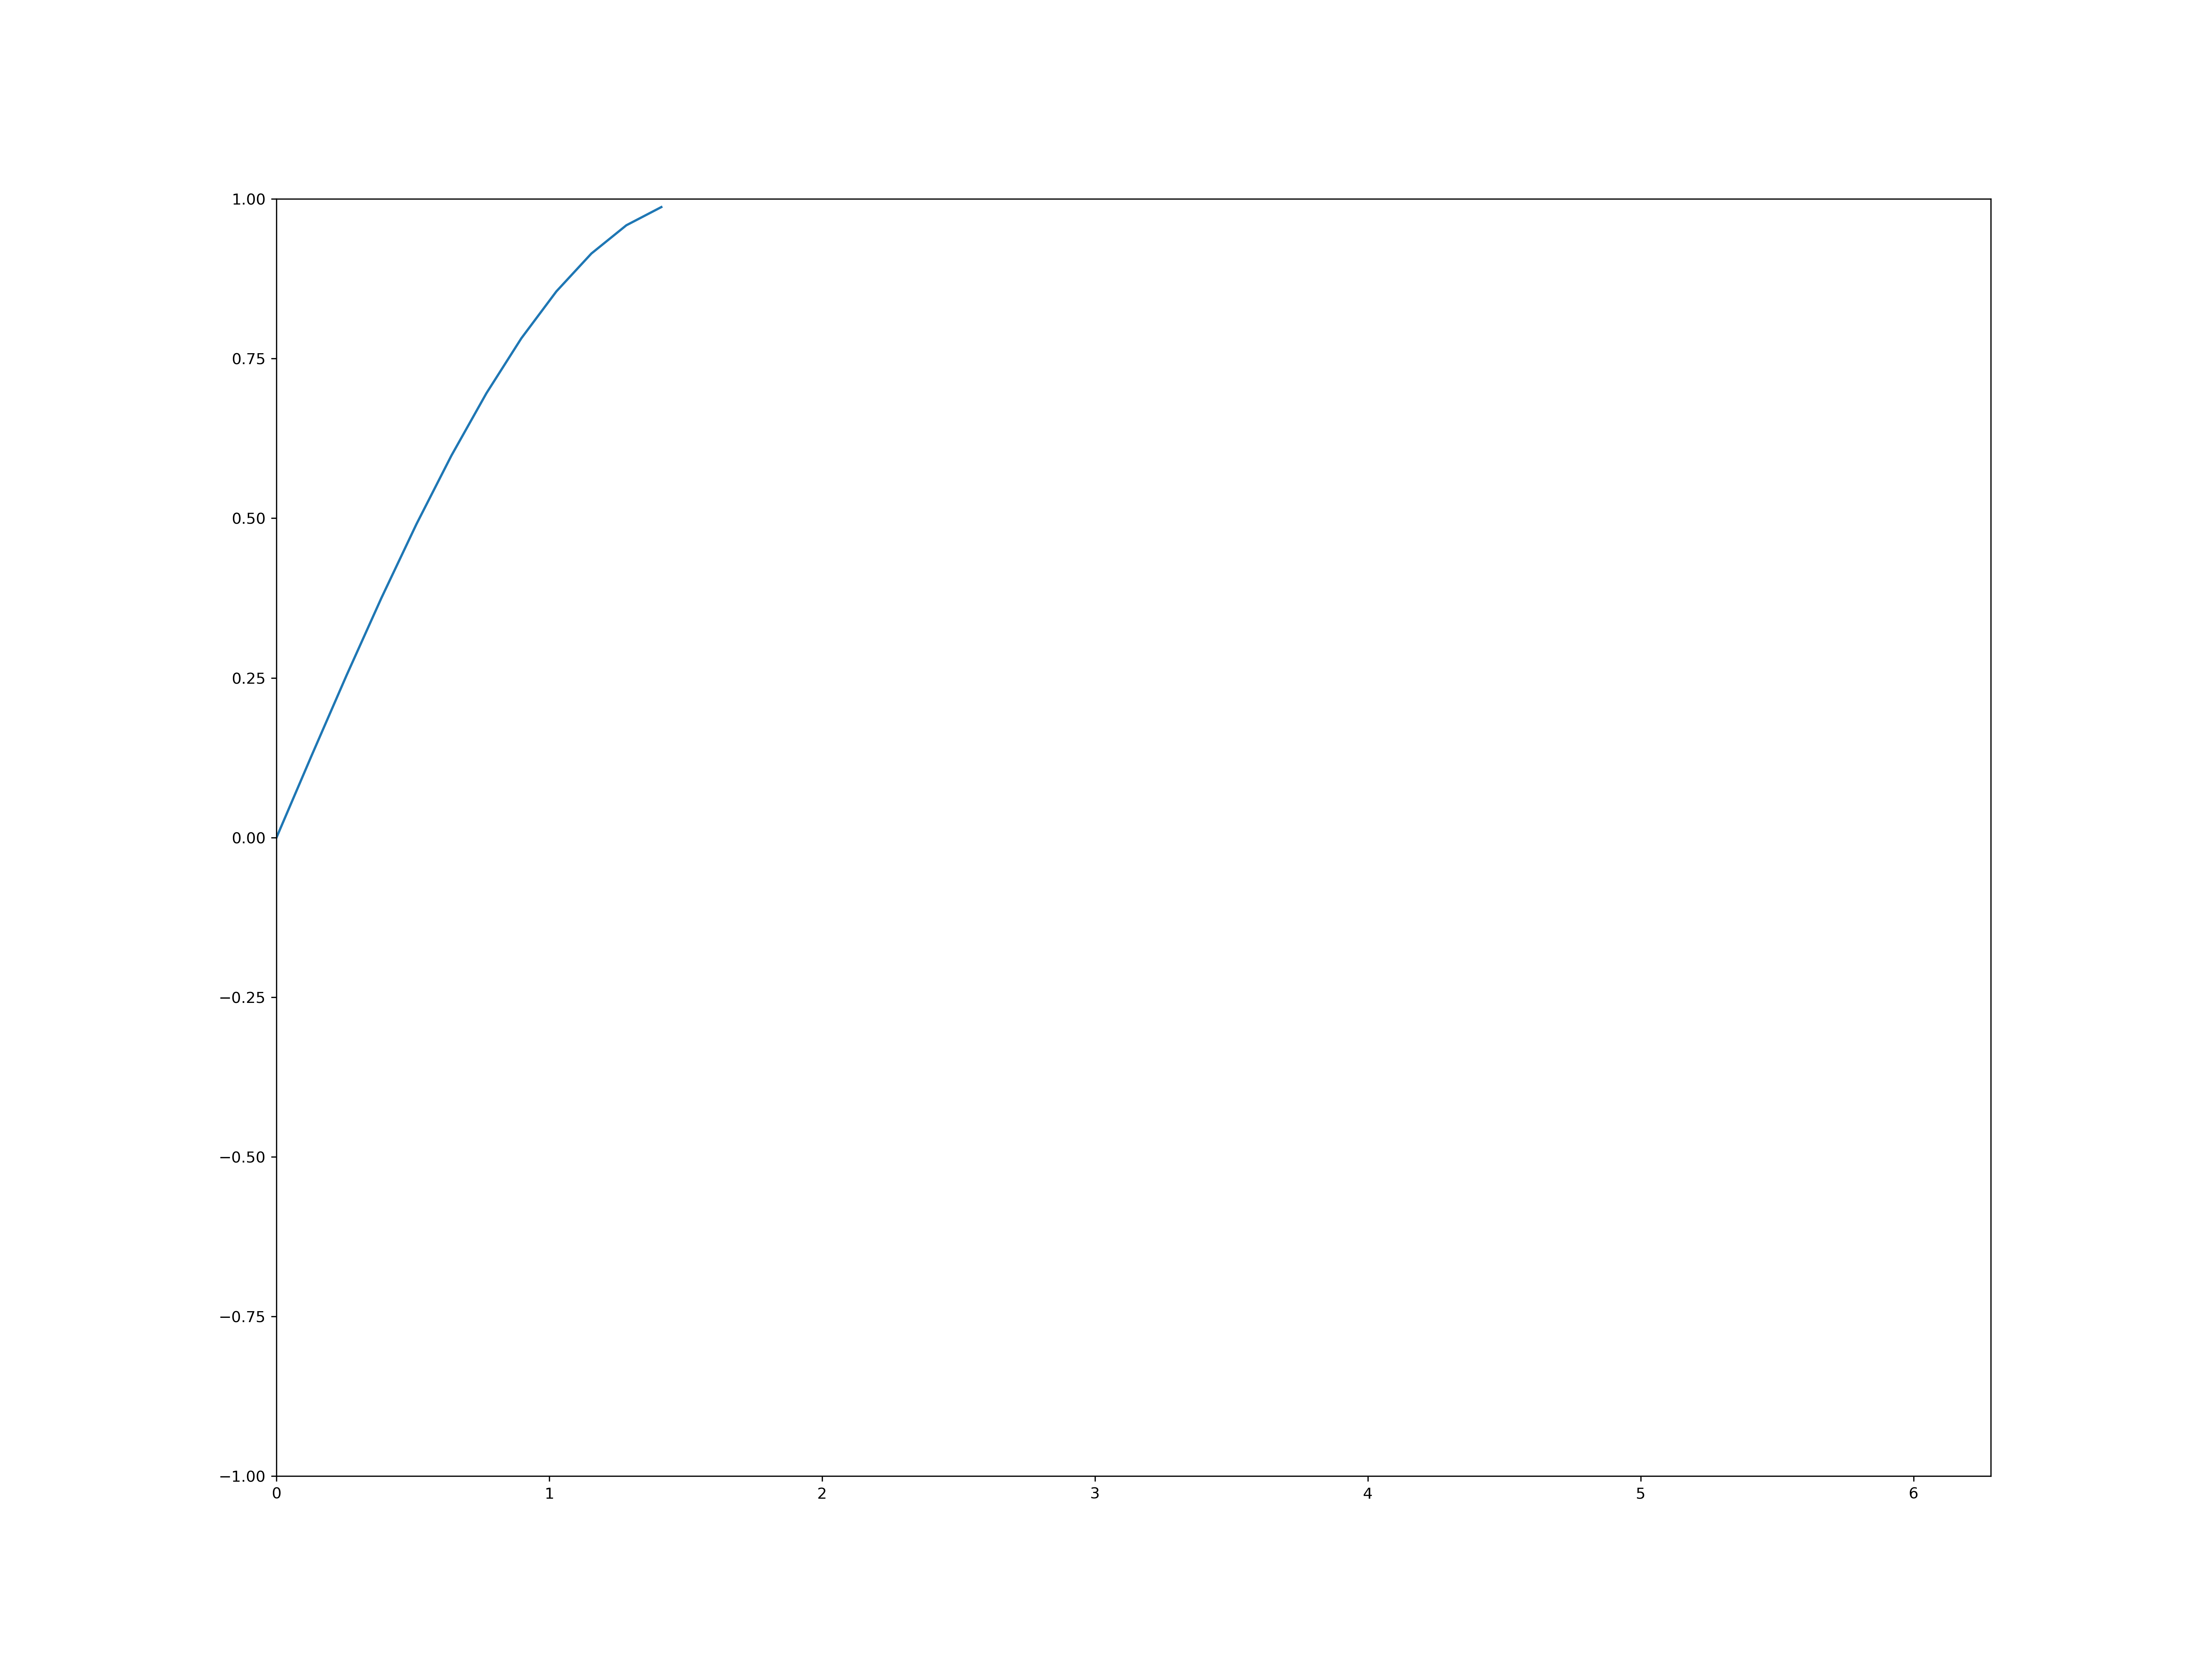

AttributeError: 'FuncAnimation' object has no attribute 'to_html5'

In [178]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_html5())